In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

submissionFile = pd.read_csv("sample_submission.csv")

In [32]:
#Combine test and train into one file
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, data.shape)

(95662, 17) (45019, 16) (140681, 17)


In [33]:
data.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value,source
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256,UGX,CustomerId_4406,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000,train
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256,UGX,CustomerId_4406,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20,train
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256,UGX,CustomerId_4683,0.0,2,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500,train
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256,UGX,CustomerId_988,0.0,2,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800,train
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256,UGX,CustomerId_988,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644,train


In [34]:
data["Credit_Debit"] = data['Amount'].apply(lambda x: "Credit" if x<0 else "Debit")

In [35]:
#Drop the columns
data.drop(['CountryCode','CurrencyCode','BatchId','AccountId',
           'SubscriptionId','CustomerId','TransactionId','TransactionStartTime','Amount'],axis=1,inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140681 entries, 0 to 140680
Data columns (total 9 columns):
ChannelId          140681 non-null object
FraudResult        95662 non-null float64
PricingStrategy    140681 non-null int64
ProductCategory    140681 non-null object
ProductId          140681 non-null object
ProviderId         140681 non-null object
Value              140681 non-null int64
source             140681 non-null object
Credit_Debit       140681 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 9.7+ MB


In [37]:
data.ChannelId.unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5',
       'ChannelId_4'], dtype=object)

In [38]:
data.PricingStrategy.value_counts()

2    117426
4     20043
1      2559
0       653
Name: PricingStrategy, dtype: int64

In [39]:
data.ProductCategory.value_counts()

financial_services    67105
airtime               65950
utility_bill           2660
data_bundles           2527
tv                     1738
movies                  253
ticket                  232
retail                  184
transport                30
other                     2
Name: ProductCategory, dtype: int64

In [40]:
data.ProviderId.value_counts()

ProviderId_4    56445
ProviderId_6    50007
ProviderId_5    21519
ProviderId_1     8034
ProviderId_3     4652
ProviderId_2       24
Name: ProviderId, dtype: int64

In [41]:
from feature_engine import categorical_encoders as ce

ohe_enc = ce.OneHotCategoricalEncoder(
    top_categories=None,
    variables=["ProviderId", "ProductCategory", "ProductId", "ChannelId","Credit_Debit"],
    drop_last=False)

ohe_enc.fit(data)
data = ohe_enc.transform(data)
ohe_enc.encoder_dict_

{'ProviderId': array(['ProviderId_6', 'ProviderId_4', 'ProviderId_1', 'ProviderId_5',
        'ProviderId_3', 'ProviderId_2'], dtype=object),
 'ProductCategory': array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
        'tv', 'transport', 'ticket', 'movies', 'other', 'retail'],
       dtype=object),
 'ProductId': array(['ProductId_10', 'ProductId_6', 'ProductId_1', 'ProductId_21',
        'ProductId_3', 'ProductId_15', 'ProductId_11', 'ProductId_19',
        'ProductId_4', 'ProductId_5', 'ProductId_20', 'ProductId_9',
        'ProductId_24', 'ProductId_14', 'ProductId_2', 'ProductId_13',
        'ProductId_22', 'ProductId_8', 'ProductId_7', 'ProductId_27',
        'ProductId_12', 'ProductId_16', 'ProductId_23', 'ProductId_26',
        'ProductId_25', 'ProductId_18', 'ProductId_17'], dtype=object),
 'ChannelId': array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5',
        'ChannelId_4'], dtype=object),
 'Credit_Debit': array(['Debit', 'Credit'], dtype

In [42]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [43]:
#Drop unnecessary columns:
labels = train.FraudResult

test.drop(['FraudResult','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [44]:
train.head()

,FraudResult,PricingStrategy,Value,ProviderId_ProviderId_6,ProviderId_ProviderId_4,ProviderId_ProviderId_1,ProviderId_ProviderId_5,ProviderId_ProviderId_3,ProviderId_ProviderId_2,ProductCategory_airtime,...,ProductId_ProductId_25,ProductId_ProductId_18,ProductId_ProductId_17,ChannelId_ChannelId_3,ChannelId_ChannelId_2,ChannelId_ChannelId_1,ChannelId_ChannelId_5,ChannelId_ChannelId_4,Credit_Debit_Debit,Credit_Debit_Credit
0,0.0,2,1000,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0.0,2,20,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.0,2,500,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.0,2,21800,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.0,2,644,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
test.head()

,PricingStrategy,Value,ProviderId_ProviderId_6,ProviderId_ProviderId_4,ProviderId_ProviderId_1,ProviderId_ProviderId_5,ProviderId_ProviderId_3,ProviderId_ProviderId_2,ProductCategory_airtime,ProductCategory_financial_services,...,ProductId_ProductId_25,ProductId_ProductId_18,ProductId_ProductId_17,ChannelId_ChannelId_3,ChannelId_ChannelId_2,ChannelId_ChannelId_1,ChannelId_ChannelId_5,ChannelId_ChannelId_4,Credit_Debit_Debit,Credit_Debit_Credit
95662,4,1000,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
95663,2,2000,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
95664,2,50,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
95665,4,3000,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
95666,2,60,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [80]:
import numpy as np
import pandas as pd
import warnings

## Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Sklearn Libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, classification_report, recall_score, precision_score, accuracy_score, precision_recall_curve

# Define random state
random_state = 2018
np.random.seed(random_state)
warnings.filterwarnings('ignore')

In [47]:
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 14
    }

plt.rc('font', **font)

In [48]:
label_count = data.groupby('FraudResult', as_index = False).count()

class_name = list(label_count['FraudResult'])
count = list(label_count['PricingStrategy'])

count

[95469, 193]

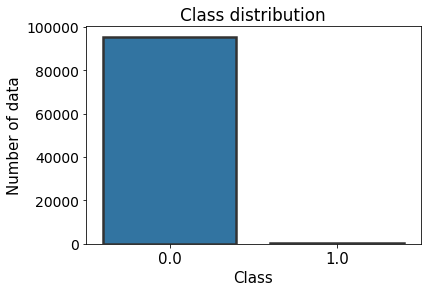

In [49]:
index = np.arange(len(class_name))
# plt.bar(class_name, count)
sns.barplot(x=class_name, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_name, fontsize=15)
plt.title('Class distribution')
plt.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.25, random_state=0)  
X_train.shape, X_test.shape

((71746, 53), (23916, 53))

In [100]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
sns.set_style("whitegrid")




#------------------------Build LightGBM Model-----------------------
train_data=lgb.Dataset(X_train_smote, y_train_smote)

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.07],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# View the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

# Run the grid
grid.fit(X_train_smote, y_train_smote)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
predictions_lgbm_prob = lgbm.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

#--------------------------Print accuracy measures and variable importances----------------------
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()



Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.4min finished


{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.07, 'n_estimators': 8, 'num_leaves': 20, 'objective': 'binary', 'random_state': 501, 'subsample': 0.7}
1.0
Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 5, 'num_leaves': 20, 'learning_rate': 0.07, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.64, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}


In [40]:
prediction = lgbm.predict(test)
prediction = np.where(prediction > 0.5, 1, 0)

submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submissionlgbm.csv', index=False)

In [102]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [ ]:
# xg_cl = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.01,subsample=0.55,n_estimators=200, seed=123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.01,n_estimators=5,subsample=0.2)
eval_set = [(X_train["Value"], y_train), (X_test["Value"], y_test)]
xg_cl.fit(X_train, y_train,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)

ValueError: feature_names mismatch: ['PricingStrategy', 'Value', 'ProviderId_ProviderId_6', 'ProviderId_ProviderId_4', 'ProviderId_ProviderId_1', 'ProviderId_ProviderId_5', 'ProviderId_ProviderId_3', 'ProviderId_ProviderId_2', 'ProductCategory_airtime', 'ProductCategory_financial_services', 'ProductCategory_utility_bill', 'ProductCategory_data_bundles', 'ProductCategory_tv', 'ProductCategory_transport', 'ProductCategory_ticket', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_retail', 'ProductId_ProductId_10', 'ProductId_ProductId_6', 'ProductId_ProductId_1', 'ProductId_ProductId_21', 'ProductId_ProductId_3', 'ProductId_ProductId_15', 'ProductId_ProductId_11', 'ProductId_ProductId_19', 'ProductId_ProductId_4', 'ProductId_ProductId_5', 'ProductId_ProductId_20', 'ProductId_ProductId_9', 'ProductId_ProductId_24', 'ProductId_ProductId_14', 'ProductId_ProductId_2', 'ProductId_ProductId_13', 'ProductId_ProductId_22', 'ProductId_ProductId_8', 'ProductId_ProductId_7', 'ProductId_ProductId_27', 'ProductId_ProductId_12', 'ProductId_ProductId_16', 'ProductId_ProductId_23', 'ProductId_ProductId_26', 'ProductId_ProductId_25', 'ProductId_ProductId_18', 'ProductId_ProductId_17', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_1', 'ChannelId_ChannelId_5', 'ChannelId_ChannelId_4', 'Credit_Debit_Debit', 'Credit_Debit_Credit'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667', 'f668', 'f669', 'f670', 'f671', 'f672', 'f673', 'f674', 'f675', 'f676', 'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685', 'f686', 'f687', 'f688', 'f689', 'f690', 'f691', 'f692', 'f693', 'f694', 'f695', 'f696', 'f697', 'f698', 'f699', 'f700', 'f701', 'f702', 'f703', 'f704', 'f705', 'f706', 'f707', 'f708', 'f709', 'f710', 'f711', 'f712', 'f713', 'f714', 'f715', 'f716', 'f717', 'f718', 'f719', 'f720', 'f721', 'f722', 'f723', 'f724', 'f725', 'f726', 'f727', 'f728', 'f729', 'f730', 'f731', 'f732', 'f733', 'f734', 'f735', 'f736', 'f737', 'f738', 'f739', 'f740', 'f741', 'f742', 'f743', 'f744', 'f745', 'f746', 'f747', 'f748', 'f749', 'f750', 'f751', 'f752', 'f753', 'f754', 'f755', 'f756', 'f757', 'f758', 'f759', 'f760', 'f761', 'f762', 'f763', 'f764', 'f765', 'f766', 'f767', 'f768', 'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778', 'f779', 'f780', 'f781', 'f782', 'f783', 'f784', 'f785', 'f786', 'f787', 'f788', 'f789', 'f790', 'f791', 'f792', 'f793', 'f794', 'f795', 'f796', 'f797', 'f798', 'f799', 'f800', 'f801', 'f802', 'f803', 'f804', 'f805', 'f806', 'f807', 'f808', 'f809', 'f810', 'f811', 'f812', 'f813', 'f814', 'f815', 'f816', 'f817', 'f818', 'f819', 'f820', 'f821', 'f822', 'f823', 'f824', 'f825', 'f826', 'f827', 'f828', 'f829', 'f830', 'f831', 'f832', 'f833', 'f834', 'f835', 'f836', 'f837', 'f838', 'f839', 'f840', 'f841', 'f842', 'f843', 'f844', 'f845', 'f846', 'f847', 'f848', 'f849', 'f850', 'f851', 'f852', 'f853', 'f854', 'f855', 'f856', 'f857', 'f858', 'f859', 'f860', 'f861', 'f862', 'f863', 'f864', 'f865', 'f866', 'f867', 'f868', 'f869', 'f870', 'f871', 'f872', 'f873', 'f874', 'f875', 'f876', 'f877', 'f878', 'f879', 'f880', 'f881', 'f882', 'f883', 'f884', 'f885', 'f886', 'f887', 'f888', 'f889', 'f890', 'f891', 'f892', 'f893', 'f894', 'f895', 'f896', 'f897', 'f898', 'f899', 'f900', 'f901', 'f902', 'f903', 'f904', 'f905', 'f906', 'f907', 'f908', 'f909', 'f910', 'f911', 'f912', 'f913', 'f914', 'f915', 'f916', 'f917', 'f918', 'f919', 'f920', 'f921', 'f922', 'f923', 'f924', 'f925', 'f926', 'f927', 'f928', 'f929', 'f930', 'f931', 'f932', 'f933', 'f934', 'f935', 'f936', 'f937', 'f938', 'f939', 'f940', 'f941', 'f942', 'f943', 'f944', 'f945', 'f946', 'f947', 'f948', 'f949', 'f950', 'f951', 'f952', 'f953', 'f954', 'f955', 'f956', 'f957', 'f958', 'f959', 'f960', 'f961', 'f962', 'f963', 'f964', 'f965', 'f966', 'f967', 'f968', 'f969', 'f970', 'f971', 'f972', 'f973', 'f974', 'f975', 'f976', 'f977', 'f978', 'f979', 'f980', 'f981', 'f982', 'f983', 'f984', 'f985', 'f986', 'f987', 'f988', 'f989', 'f990', 'f991', 'f992', 'f993', 'f994', 'f995', 'f996', 'f997', 'f998', 'f999', 'f1000', 'f1001', 'f1002', 'f1003', 'f1004', 'f1005', 'f1006', 'f1007', 'f1008', 'f1009', 'f1010', 'f1011', 'f1012', 'f1013', 'f1014', 'f1015', 'f1016', 'f1017', 'f1018', 'f1019', 'f1020', 'f1021', 'f1022', 'f1023', 'f1024', 'f1025', 'f1026', 'f1027', 'f1028', 'f1029', 'f1030', 'f1031', 'f1032', 'f1033', 'f1034', 'f1035', 'f1036', 'f1037', 'f1038', 'f1039', 'f1040', 'f1041', 'f1042', 'f1043', 'f1044', 'f1045', 'f1046', 'f1047', 'f1048', 'f1049', 'f1050', 'f1051', 'f1052', 'f1053', 'f1054', 'f1055', 'f1056', 'f1057', 'f1058', 'f1059', 'f1060', 'f1061', 'f1062', 'f1063', 'f1064', 'f1065', 'f1066', 'f1067', 'f1068', 'f1069', 'f1070', 'f1071', 'f1072', 'f1073', 'f1074', 'f1075', 'f1076', 'f1077', 'f1078', 'f1079', 'f1080', 'f1081', 'f1082', 'f1083', 'f1084', 'f1085', 'f1086', 'f1087', 'f1088', 'f1089', 'f1090', 'f1091', 'f1092', 'f1093', 'f1094', 'f1095', 'f1096', 'f1097', 'f1098', 'f1099', 'f1100', 'f1101', 'f1102', 'f1103', 'f1104', 'f1105', 'f1106', 'f1107', 'f1108', 'f1109', 'f1110', 'f1111', 'f1112', 'f1113', 'f1114', 'f1115', 'f1116', 'f1117', 'f1118', 'f1119', 'f1120', 'f1121', 'f1122', 'f1123', 'f1124', 'f1125', 'f1126', 'f1127', 'f1128', 'f1129', 'f1130', 'f1131', 'f1132', 'f1133', 'f1134', 'f1135', 'f1136', 'f1137', 'f1138', 'f1139', 'f1140', 'f1141', 'f1142', 'f1143', 'f1144', 'f1145', 'f1146', 'f1147', 'f1148', 'f1149', 'f1150', 'f1151', 'f1152', 'f1153', 'f1154', 'f1155', 'f1156', 'f1157', 'f1158', 'f1159', 'f1160', 'f1161', 'f1162', 'f1163', 'f1164', 'f1165', 'f1166', 'f1167', 'f1168', 'f1169', 'f1170', 'f1171', 'f1172', 'f1173', 'f1174', 'f1175', 'f1176', 'f1177', 'f1178', 'f1179', 'f1180', 'f1181', 'f1182', 'f1183', 'f1184', 'f1185', 'f1186', 'f1187', 'f1188', 'f1189', 'f1190', 'f1191', 'f1192', 'f1193', 'f1194', 'f1195', 'f1196', 'f1197', 'f1198', 'f1199', 'f1200', 'f1201', 'f1202', 'f1203', 'f1204', 'f1205', 'f1206', 'f1207', 'f1208', 'f1209', 'f1210', 'f1211', 'f1212', 'f1213', 'f1214', 'f1215', 'f1216', 'f1217', 'f1218', 'f1219', 'f1220', 'f1221', 'f1222', 'f1223', 'f1224', 'f1225', 'f1226', 'f1227', 'f1228', 'f1229', 'f1230', 'f1231', 'f1232', 'f1233', 'f1234', 'f1235', 'f1236', 'f1237', 'f1238', 'f1239', 'f1240', 'f1241', 'f1242', 'f1243', 'f1244', 'f1245', 'f1246', 'f1247', 'f1248', 'f1249', 'f1250', 'f1251', 'f1252', 'f1253', 'f1254', 'f1255', 'f1256', 'f1257', 'f1258', 'f1259', 'f1260', 'f1261', 'f1262', 'f1263', 'f1264', 'f1265', 'f1266', 'f1267', 'f1268', 'f1269', 'f1270', 'f1271', 'f1272', 'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278', 'f1279', 'f1280', 'f1281', 'f1282', 'f1283', 'f1284', 'f1285', 'f1286', 'f1287', 'f1288', 'f1289', 'f1290', 'f1291', 'f1292', 'f1293', 'f1294', 'f1295', 'f1296', 'f1297', 'f1298', 'f1299', 'f1300', 'f1301', 'f1302', 'f1303', 'f1304', 'f1305', 'f1306', 'f1307', 'f1308', 'f1309', 'f1310', 'f1311', 'f1312', 'f1313', 'f1314', 'f1315', 'f1316', 'f1317', 'f1318', 'f1319', 'f1320', 'f1321', 'f1322', 'f1323', 'f1324', 'f1325', 'f1326', 'f1327', 'f1328', 'f1329', 'f1330', 'f1331', 'f1332', 'f1333', 'f1334', 'f1335', 'f1336', 'f1337', 'f1338', 'f1339', 'f1340', 'f1341', 'f1342', 'f1343', 'f1344', 'f1345', 'f1346', 'f1347', 'f1348', 'f1349', 'f1350', 'f1351', 'f1352', 'f1353', 'f1354', 'f1355', 'f1356', 'f1357', 'f1358', 'f1359', 'f1360', 'f1361', 'f1362', 'f1363', 'f1364', 'f1365', 'f1366', 'f1367', 'f1368', 'f1369', 'f1370', 'f1371', 'f1372', 'f1373', 'f1374', 'f1375', 'f1376', 'f1377', 'f1378', 'f1379', 'f1380', 'f1381', 'f1382', 'f1383', 'f1384', 'f1385', 'f1386', 'f1387', 'f1388', 'f1389', 'f1390', 'f1391', 'f1392', 'f1393', 'f1394', 'f1395', 'f1396', 'f1397', 'f1398', 'f1399', 'f1400', 'f1401', 'f1402', 'f1403', 'f1404', 'f1405', 'f1406', 'f1407', 'f1408', 'f1409', 'f1410', 'f1411', 'f1412', 'f1413', 'f1414', 'f1415', 'f1416', 'f1417', 'f1418', 'f1419', 'f1420', 'f1421', 'f1422', 'f1423', 'f1424', 'f1425', 'f1426', 'f1427', 'f1428', 'f1429', 'f1430', 'f1431', 'f1432', 'f1433', 'f1434', 'f1435', 'f1436', 'f1437', 'f1438', 'f1439', 'f1440', 'f1441', 'f1442', 'f1443', 'f1444', 'f1445', 'f1446', 'f1447', 'f1448', 'f1449', 'f1450', 'f1451', 'f1452', 'f1453', 'f1454', 'f1455', 'f1456', 'f1457', 'f1458', 'f1459', 'f1460', 'f1461', 'f1462', 'f1463', 'f1464', 'f1465', 'f1466', 'f1467', 'f1468', 'f1469', 'f1470', 'f1471', 'f1472', 'f1473', 'f1474', 'f1475', 'f1476', 'f1477', 'f1478', 'f1479', 'f1480', 'f1481', 'f1482', 'f1483', 'f1484', 'f1485', 'f1486', 'f1487', 'f1488', 'f1489', 'f1490', 'f1491', 'f1492', 'f1493', 'f1494', 'f1495', 'f1496', 'f1497', 'f1498', 'f1499', 'f1500', 'f1501', 'f1502', 'f1503', 'f1504', 'f1505', 'f1506', 'f1507', 'f1508', 'f1509', 'f1510', 'f1511', 'f1512', 'f1513', 'f1514', 'f1515', 'f1516', 'f1517', 'f1518', 'f1519', 'f1520', 'f1521', 'f1522', 'f1523', 'f1524', 'f1525', 'f1526', 'f1527', 'f1528', 'f1529', 'f1530', 'f1531', 'f1532', 'f1533', 'f1534', 'f1535', 'f1536', 'f1537', 'f1538', 'f1539', 'f1540', 'f1541', 'f1542', 'f1543', 'f1544', 'f1545', 'f1546', 'f1547', 'f1548', 'f1549', 'f1550', 'f1551', 'f1552', 'f1553', 'f1554', 'f1555', 'f1556', 'f1557', 'f1558', 'f1559', 'f1560', 'f1561', 'f1562', 'f1563', 'f1564', 'f1565', 'f1566', 'f1567', 'f1568', 'f1569', 'f1570', 'f1571', 'f1572', 'f1573', 'f1574', 'f1575', 'f1576', 'f1577', 'f1578', 'f1579', 'f1580', 'f1581', 'f1582', 'f1583', 'f1584', 'f1585', 'f1586', 'f1587', 'f1588', 'f1589', 'f1590', 'f1591', 'f1592', 'f1593', 'f1594', 'f1595', 'f1596', 'f1597', 'f1598', 'f1599', 'f1600', 'f1601', 'f1602', 'f1603', 'f1604', 'f1605', 'f1606', 'f1607', 'f1608', 'f1609', 'f1610', 'f1611', 'f1612', 'f1613', 'f1614', 'f1615', 'f1616', 'f1617', 'f1618', 'f1619', 'f1620', 'f1621', 'f1622', 'f1623', 'f1624', 'f1625', 'f1626', 'f1627', 'f1628', 'f1629', 'f1630', 'f1631', 'f1632', 'f1633', 'f1634', 'f1635', 'f1636', 'f1637', 'f1638', 'f1639', 'f1640', 'f1641', 'f1642', 'f1643', 'f1644', 'f1645', 'f1646', 'f1647', 'f1648', 'f1649', 'f1650', 'f1651', 'f1652', 'f1653', 'f1654', 'f1655', 'f1656', 'f1657', 'f1658', 'f1659', 'f1660', 'f1661', 'f1662', 'f1663', 'f1664', 'f1665', 'f1666', 'f1667', 'f1668', 'f1669', 'f1670', 'f1671', 'f1672', 'f1673', 'f1674', 'f1675', 'f1676', 'f1677', 'f1678', 'f1679', 'f1680', 'f1681', 'f1682', 'f1683', 'f1684', 'f1685', 'f1686', 'f1687', 'f1688', 'f1689', 'f1690', 'f1691', 'f1692', 'f1693', 'f1694', 'f1695', 'f1696', 'f1697', 'f1698', 'f1699', 'f1700', 'f1701', 'f1702', 'f1703', 'f1704', 'f1705', 'f1706', 'f1707', 'f1708', 'f1709', 'f1710', 'f1711', 'f1712', 'f1713', 'f1714', 'f1715', 'f1716', 'f1717', 'f1718', 'f1719', 'f1720', 'f1721', 'f1722', 'f1723', 'f1724', 'f1725', 'f1726', 'f1727', 'f1728', 'f1729', 'f1730', 'f1731', 'f1732', 'f1733', 'f1734', 'f1735', 'f1736', 'f1737', 'f1738', 'f1739', 'f1740', 'f1741', 'f1742', 'f1743', 'f1744', 'f1745', 'f1746', 'f1747', 'f1748', 'f1749', 'f1750', 'f1751', 'f1752', 'f1753', 'f1754', 'f1755', 'f1756', 'f1757', 'f1758', 'f1759', 'f1760', 'f1761', 'f1762', 'f1763', 'f1764', 'f1765', 'f1766', 'f1767', 'f1768', 'f1769', 'f1770', 'f1771', 'f1772', 'f1773', 'f1774', 'f1775', 'f1776', 'f1777', 'f1778', 'f1779', 'f1780', 'f1781', 'f1782', 'f1783', 'f1784', 'f1785', 'f1786', 'f1787', 'f1788', 'f1789', 'f1790', 'f1791', 'f1792', 'f1793', 'f1794', 'f1795', 'f1796', 'f1797', 'f1798', 'f1799', 'f1800', 'f1801', 'f1802', 'f1803', 'f1804', 'f1805', 'f1806', 'f1807', 'f1808', 'f1809', 'f1810', 'f1811', 'f1812', 'f1813', 'f1814', 'f1815', 'f1816', 'f1817', 'f1818', 'f1819', 'f1820', 'f1821', 'f1822', 'f1823', 'f1824', 'f1825', 'f1826', 'f1827', 'f1828', 'f1829', 'f1830', 'f1831', 'f1832', 'f1833', 'f1834', 'f1835', 'f1836', 'f1837', 'f1838', 'f1839', 'f1840', 'f1841', 'f1842', 'f1843', 'f1844', 'f1845', 'f1846', 'f1847', 'f1848', 'f1849', 'f1850', 'f1851', 'f1852', 'f1853', 'f1854', 'f1855', 'f1856', 'f1857', 'f1858', 'f1859', 'f1860', 'f1861', 'f1862', 'f1863', 'f1864', 'f1865', 'f1866', 'f1867', 'f1868', 'f1869', 'f1870', 'f1871', 'f1872', 'f1873', 'f1874', 'f1875', 'f1876', 'f1877', 'f1878', 'f1879', 'f1880', 'f1881', 'f1882', 'f1883', 'f1884', 'f1885', 'f1886', 'f1887', 'f1888', 'f1889', 'f1890', 'f1891', 'f1892', 'f1893', 'f1894', 'f1895', 'f1896', 'f1897', 'f1898', 'f1899', 'f1900', 'f1901', 'f1902', 'f1903', 'f1904', 'f1905', 'f1906', 'f1907', 'f1908', 'f1909', 'f1910', 'f1911', 'f1912', 'f1913', 'f1914', 'f1915', 'f1916', 'f1917', 'f1918', 'f1919', 'f1920', 'f1921', 'f1922', 'f1923', 'f1924', 'f1925', 'f1926', 'f1927', 'f1928', 'f1929', 'f1930', 'f1931', 'f1932', 'f1933', 'f1934', 'f1935', 'f1936', 'f1937', 'f1938', 'f1939', 'f1940', 'f1941', 'f1942', 'f1943', 'f1944', 'f1945', 'f1946', 'f1947', 'f1948', 'f1949', 'f1950', 'f1951', 'f1952', 'f1953', 'f1954', 'f1955', 'f1956', 'f1957', 'f1958', 'f1959', 'f1960', 'f1961', 'f1962', 'f1963', 'f1964', 'f1965', 'f1966', 'f1967', 'f1968', 'f1969', 'f1970', 'f1971', 'f1972', 'f1973', 'f1974', 'f1975', 'f1976', 'f1977', 'f1978', 'f1979', 'f1980', 'f1981', 'f1982', 'f1983', 'f1984', 'f1985', 'f1986', 'f1987', 'f1988', 'f1989', 'f1990', 'f1991', 'f1992', 'f1993', 'f1994', 'f1995', 'f1996', 'f1997', 'f1998', 'f1999', 'f2000', 'f2001', 'f2002', 'f2003', 'f2004', 'f2005', 'f2006', 'f2007', 'f2008', 'f2009', 'f2010', 'f2011', 'f2012', 'f2013', 'f2014', 'f2015', 'f2016', 'f2017', 'f2018', 'f2019', 'f2020', 'f2021', 'f2022', 'f2023', 'f2024', 'f2025', 'f2026', 'f2027', 'f2028', 'f2029', 'f2030', 'f2031', 'f2032', 'f2033', 'f2034', 'f2035', 'f2036', 'f2037', 'f2038', 'f2039', 'f2040', 'f2041', 'f2042', 'f2043', 'f2044', 'f2045', 'f2046', 'f2047', 'f2048', 'f2049', 'f2050', 'f2051', 'f2052', 'f2053', 'f2054', 'f2055', 'f2056', 'f2057', 'f2058', 'f2059', 'f2060', 'f2061', 'f2062', 'f2063', 'f2064', 'f2065', 'f2066', 'f2067', 'f2068', 'f2069', 'f2070', 'f2071', 'f2072', 'f2073', 'f2074', 'f2075', 'f2076', 'f2077', 'f2078', 'f2079', 'f2080', 'f2081', 'f2082', 'f2083', 'f2084', 'f2085', 'f2086', 'f2087', 'f2088', 'f2089', 'f2090', 'f2091', 'f2092', 'f2093', 'f2094', 'f2095', 'f2096', 'f2097', 'f2098', 'f2099', 'f2100', 'f2101', 'f2102', 'f2103', 'f2104', 'f2105', 'f2106', 'f2107', 'f2108', 'f2109', 'f2110', 'f2111', 'f2112', 'f2113', 'f2114', 'f2115', 'f2116', 'f2117', 'f2118', 'f2119', 'f2120', 'f2121', 'f2122', 'f2123', 'f2124', 'f2125', 'f2126', 'f2127', 'f2128', 'f2129', 'f2130', 'f2131', 'f2132', 'f2133', 'f2134', 'f2135', 'f2136', 'f2137', 'f2138', 'f2139', 'f2140', 'f2141', 'f2142', 'f2143', 'f2144', 'f2145', 'f2146', 'f2147', 'f2148', 'f2149', 'f2150', 'f2151', 'f2152', 'f2153', 'f2154', 'f2155', 'f2156', 'f2157', 'f2158', 'f2159', 'f2160', 'f2161', 'f2162', 'f2163', 'f2164', 'f2165', 'f2166', 'f2167', 'f2168', 'f2169', 'f2170', 'f2171', 'f2172', 'f2173', 'f2174', 'f2175', 'f2176', 'f2177', 'f2178', 'f2179', 'f2180', 'f2181', 'f2182', 'f2183', 'f2184', 'f2185', 'f2186', 'f2187', 'f2188', 'f2189', 'f2190', 'f2191', 'f2192', 'f2193', 'f2194', 'f2195', 'f2196', 'f2197', 'f2198', 'f2199', 'f2200', 'f2201', 'f2202', 'f2203', 'f2204', 'f2205', 'f2206', 'f2207', 'f2208', 'f2209', 'f2210', 'f2211', 'f2212', 'f2213', 'f2214', 'f2215', 'f2216', 'f2217', 'f2218', 'f2219', 'f2220', 'f2221', 'f2222', 'f2223', 'f2224', 'f2225', 'f2226', 'f2227', 'f2228', 'f2229', 'f2230', 'f2231', 'f2232', 'f2233', 'f2234', 'f2235', 'f2236', 'f2237', 'f2238', 'f2239', 'f2240', 'f2241', 'f2242', 'f2243', 'f2244', 'f2245', 'f2246', 'f2247', 'f2248', 'f2249', 'f2250', 'f2251', 'f2252', 'f2253', 'f2254', 'f2255', 'f2256', 'f2257', 'f2258', 'f2259', 'f2260', 'f2261', 'f2262', 'f2263', 'f2264', 'f2265', 'f2266', 'f2267', 'f2268', 'f2269', 'f2270', 'f2271', 'f2272', 'f2273', 'f2274', 'f2275', 'f2276', 'f2277', 'f2278', 'f2279', 'f2280', 'f2281', 'f2282', 'f2283', 'f2284', 'f2285', 'f2286', 'f2287', 'f2288', 'f2289', 'f2290', 'f2291', 'f2292', 'f2293', 'f2294', 'f2295', 'f2296', 'f2297', 'f2298', 'f2299', 'f2300', 'f2301', 'f2302', 'f2303', 'f2304', 'f2305', 'f2306', 'f2307', 'f2308', 'f2309', 'f2310', 'f2311', 'f2312', 'f2313', 'f2314', 'f2315', 'f2316', 'f2317', 'f2318', 'f2319', 'f2320', 'f2321', 'f2322', 'f2323', 'f2324', 'f2325', 'f2326', 'f2327', 'f2328', 'f2329', 'f2330', 'f2331', 'f2332', 'f2333', 'f2334', 'f2335', 'f2336', 'f2337', 'f2338', 'f2339', 'f2340', 'f2341', 'f2342', 'f2343', 'f2344', 'f2345', 'f2346', 'f2347', 'f2348', 'f2349', 'f2350', 'f2351', 'f2352', 'f2353', 'f2354', 'f2355', 'f2356', 'f2357', 'f2358', 'f2359', 'f2360', 'f2361', 'f2362', 'f2363', 'f2364', 'f2365', 'f2366', 'f2367', 'f2368', 'f2369', 'f2370', 'f2371', 'f2372', 'f2373', 'f2374', 'f2375', 'f2376', 'f2377', 'f2378', 'f2379', 'f2380', 'f2381', 'f2382', 'f2383', 'f2384', 'f2385', 'f2386', 'f2387', 'f2388', 'f2389', 'f2390', 'f2391', 'f2392', 'f2393', 'f2394', 'f2395', 'f2396', 'f2397', 'f2398', 'f2399', 'f2400', 'f2401', 'f2402', 'f2403', 'f2404', 'f2405', 'f2406', 'f2407', 'f2408', 'f2409', 'f2410', 'f2411', 'f2412', 'f2413', 'f2414', 'f2415', 'f2416', 'f2417', 'f2418', 'f2419', 'f2420', 'f2421', 'f2422', 'f2423', 'f2424', 'f2425', 'f2426', 'f2427', 'f2428', 'f2429', 'f2430', 'f2431', 'f2432', 'f2433', 'f2434', 'f2435', 'f2436', 'f2437', 'f2438', 'f2439', 'f2440', 'f2441', 'f2442', 'f2443', 'f2444', 'f2445', 'f2446', 'f2447', 'f2448', 'f2449', 'f2450', 'f2451', 'f2452', 'f2453', 'f2454', 'f2455', 'f2456', 'f2457', 'f2458', 'f2459', 'f2460', 'f2461', 'f2462', 'f2463', 'f2464', 'f2465', 'f2466', 'f2467', 'f2468', 'f2469', 'f2470', 'f2471', 'f2472', 'f2473', 'f2474', 'f2475', 'f2476', 'f2477', 'f2478', 'f2479', 'f2480', 'f2481', 'f2482', 'f2483', 'f2484', 'f2485', 'f2486', 'f2487', 'f2488', 'f2489', 'f2490', 'f2491', 'f2492', 'f2493', 'f2494', 'f2495', 'f2496', 'f2497', 'f2498', 'f2499', 'f2500', 'f2501', 'f2502', 'f2503', 'f2504', 'f2505', 'f2506', 'f2507', 'f2508', 'f2509', 'f2510', 'f2511', 'f2512', 'f2513', 'f2514', 'f2515', 'f2516', 'f2517', 'f2518', 'f2519', 'f2520', 'f2521', 'f2522', 'f2523', 'f2524', 'f2525', 'f2526', 'f2527', 'f2528', 'f2529', 'f2530', 'f2531', 'f2532', 'f2533', 'f2534', 'f2535', 'f2536', 'f2537', 'f2538', 'f2539', 'f2540', 'f2541', 'f2542', 'f2543', 'f2544', 'f2545', 'f2546', 'f2547', 'f2548', 'f2549', 'f2550', 'f2551', 'f2552', 'f2553', 'f2554', 'f2555', 'f2556', 'f2557', 'f2558', 'f2559', 'f2560', 'f2561', 'f2562', 'f2563', 'f2564', 'f2565', 'f2566', 'f2567', 'f2568', 'f2569', 'f2570', 'f2571', 'f2572', 'f2573', 'f2574', 'f2575', 'f2576', 'f2577', 'f2578', 'f2579', 'f2580', 'f2581', 'f2582', 'f2583', 'f2584', 'f2585', 'f2586', 'f2587', 'f2588', 'f2589', 'f2590', 'f2591', 'f2592', 'f2593', 'f2594', 'f2595', 'f2596', 'f2597', 'f2598', 'f2599', 'f2600', 'f2601', 'f2602', 'f2603', 'f2604', 'f2605', 'f2606', 'f2607', 'f2608', 'f2609', 'f2610', 'f2611', 'f2612', 'f2613', 'f2614', 'f2615', 'f2616', 'f2617', 'f2618', 'f2619', 'f2620', 'f2621', 'f2622', 'f2623', 'f2624', 'f2625', 'f2626', 'f2627', 'f2628', 'f2629', 'f2630', 'f2631', 'f2632', 'f2633', 'f2634', 'f2635', 'f2636', 'f2637', 'f2638', 'f2639', 'f2640', 'f2641', 'f2642', 'f2643', 'f2644', 'f2645', 'f2646', 'f2647', 'f2648', 'f2649', 'f2650', 'f2651', 'f2652', 'f2653', 'f2654', 'f2655', 'f2656', 'f2657', 'f2658', 'f2659', 'f2660', 'f2661', 'f2662', 'f2663', 'f2664', 'f2665', 'f2666', 'f2667', 'f2668', 'f2669', 'f2670', 'f2671', 'f2672', 'f2673', 'f2674', 'f2675', 'f2676', 'f2677', 'f2678', 'f2679', 'f2680', 'f2681', 'f2682', 'f2683', 'f2684', 'f2685', 'f2686', 'f2687', 'f2688', 'f2689', 'f2690', 'f2691', 'f2692', 'f2693', 'f2694', 'f2695', 'f2696', 'f2697', 'f2698', 'f2699', 'f2700', 'f2701', 'f2702', 'f2703', 'f2704', 'f2705', 'f2706', 'f2707', 'f2708', 'f2709', 'f2710', 'f2711', 'f2712', 'f2713', 'f2714', 'f2715', 'f2716', 'f2717', 'f2718', 'f2719', 'f2720', 'f2721', 'f2722', 'f2723', 'f2724', 'f2725', 'f2726', 'f2727', 'f2728', 'f2729', 'f2730', 'f2731', 'f2732', 'f2733', 'f2734', 'f2735', 'f2736', 'f2737', 'f2738', 'f2739', 'f2740', 'f2741', 'f2742', 'f2743', 'f2744', 'f2745', 'f2746', 'f2747', 'f2748', 'f2749', 'f2750', 'f2751', 'f2752', 'f2753', 'f2754', 'f2755', 'f2756', 'f2757', 'f2758', 'f2759', 'f2760', 'f2761', 'f2762', 'f2763', 'f2764', 'f2765', 'f2766', 'f2767', 'f2768', 'f2769', 'f2770', 'f2771', 'f2772', 'f2773', 'f2774', 'f2775', 'f2776', 'f2777', 'f2778', 'f2779', 'f2780', 'f2781', 'f2782', 'f2783', 'f2784', 'f2785', 'f2786', 'f2787', 'f2788', 'f2789', 'f2790', 'f2791', 'f2792', 'f2793', 'f2794', 'f2795', 'f2796', 'f2797', 'f2798', 'f2799', 'f2800', 'f2801', 'f2802', 'f2803', 'f2804', 'f2805', 'f2806', 'f2807', 'f2808', 'f2809', 'f2810', 'f2811', 'f2812', 'f2813', 'f2814', 'f2815', 'f2816', 'f2817', 'f2818', 'f2819', 'f2820', 'f2821', 'f2822', 'f2823', 'f2824', 'f2825', 'f2826', 'f2827', 'f2828', 'f2829', 'f2830', 'f2831', 'f2832', 'f2833', 'f2834', 'f2835', 'f2836', 'f2837', 'f2838', 'f2839', 'f2840', 'f2841', 'f2842', 'f2843', 'f2844', 'f2845', 'f2846', 'f2847', 'f2848', 'f2849', 'f2850', 'f2851', 'f2852', 'f2853', 'f2854', 'f2855', 'f2856', 'f2857', 'f2858', 'f2859', 'f2860', 'f2861', 'f2862', 'f2863', 'f2864', 'f2865', 'f2866', 'f2867', 'f2868', 'f2869', 'f2870', 'f2871', 'f2872', 'f2873', 'f2874', 'f2875', 'f2876', 'f2877', 'f2878', 'f2879', 'f2880', 'f2881', 'f2882', 'f2883', 'f2884', 'f2885', 'f2886', 'f2887', 'f2888', 'f2889', 'f2890', 'f2891', 'f2892', 'f2893', 'f2894', 'f2895', 'f2896', 'f2897', 'f2898', 'f2899', 'f2900', 'f2901', 'f2902', 'f2903', 'f2904', 'f2905', 'f2906', 'f2907', 'f2908', 'f2909', 'f2910', 'f2911', 'f2912', 'f2913', 'f2914', 'f2915', 'f2916', 'f2917', 'f2918', 'f2919', 'f2920', 'f2921', 'f2922', 'f2923', 'f2924', 'f2925', 'f2926', 'f2927', 'f2928', 'f2929', 'f2930', 'f2931', 'f2932', 'f2933', 'f2934', 'f2935', 'f2936', 'f2937', 'f2938', 'f2939', 'f2940', 'f2941', 'f2942', 'f2943', 'f2944', 'f2945', 'f2946', 'f2947', 'f2948', 'f2949', 'f2950', 'f2951', 'f2952', 'f2953', 'f2954', 'f2955', 'f2956', 'f2957', 'f2958', 'f2959', 'f2960', 'f2961', 'f2962', 'f2963', 'f2964', 'f2965', 'f2966', 'f2967', 'f2968', 'f2969', 'f2970', 'f2971', 'f2972', 'f2973', 'f2974', 'f2975', 'f2976', 'f2977', 'f2978', 'f2979', 'f2980', 'f2981', 'f2982', 'f2983', 'f2984', 'f2985', 'f2986', 'f2987', 'f2988', 'f2989', 'f2990', 'f2991', 'f2992', 'f2993', 'f2994', 'f2995', 'f2996', 'f2997', 'f2998', 'f2999', 'f3000', 'f3001', 'f3002', 'f3003', 'f3004', 'f3005', 'f3006', 'f3007', 'f3008', 'f3009', 'f3010', 'f3011', 'f3012', 'f3013', 'f3014', 'f3015', 'f3016', 'f3017', 'f3018', 'f3019', 'f3020', 'f3021', 'f3022', 'f3023', 'f3024', 'f3025', 'f3026', 'f3027', 'f3028', 'f3029', 'f3030', 'f3031', 'f3032', 'f3033', 'f3034', 'f3035', 'f3036', 'f3037', 'f3038', 'f3039', 'f3040', 'f3041', 'f3042', 'f3043', 'f3044', 'f3045', 'f3046', 'f3047', 'f3048', 'f3049', 'f3050', 'f3051', 'f3052', 'f3053', 'f3054', 'f3055', 'f3056', 'f3057', 'f3058', 'f3059', 'f3060', 'f3061', 'f3062', 'f3063', 'f3064', 'f3065', 'f3066', 'f3067', 'f3068', 'f3069', 'f3070', 'f3071', 'f3072', 'f3073', 'f3074', 'f3075', 'f3076', 'f3077', 'f3078', 'f3079', 'f3080', 'f3081', 'f3082', 'f3083', 'f3084', 'f3085', 'f3086', 'f3087', 'f3088', 'f3089', 'f3090', 'f3091', 'f3092', 'f3093', 'f3094', 'f3095', 'f3096', 'f3097', 'f3098', 'f3099', 'f3100', 'f3101', 'f3102', 'f3103', 'f3104', 'f3105', 'f3106', 'f3107', 'f3108', 'f3109', 'f3110', 'f3111', 'f3112', 'f3113', 'f3114', 'f3115', 'f3116', 'f3117', 'f3118', 'f3119', 'f3120', 'f3121', 'f3122', 'f3123', 'f3124', 'f3125', 'f3126', 'f3127', 'f3128', 'f3129', 'f3130', 'f3131', 'f3132', 'f3133', 'f3134', 'f3135', 'f3136', 'f3137', 'f3138', 'f3139', 'f3140', 'f3141', 'f3142', 'f3143', 'f3144', 'f3145', 'f3146', 'f3147', 'f3148', 'f3149', 'f3150', 'f3151', 'f3152', 'f3153', 'f3154', 'f3155', 'f3156', 'f3157', 'f3158', 'f3159', 'f3160', 'f3161', 'f3162', 'f3163', 'f3164', 'f3165', 'f3166', 'f3167', 'f3168', 'f3169', 'f3170', 'f3171', 'f3172', 'f3173', 'f3174', 'f3175', 'f3176', 'f3177', 'f3178', 'f3179', 'f3180', 'f3181', 'f3182', 'f3183', 'f3184', 'f3185', 'f3186', 'f3187', 'f3188', 'f3189', 'f3190', 'f3191', 'f3192', 'f3193', 'f3194', 'f3195', 'f3196', 'f3197', 'f3198', 'f3199', 'f3200', 'f3201', 'f3202', 'f3203', 'f3204', 'f3205', 'f3206', 'f3207', 'f3208', 'f3209', 'f3210', 'f3211', 'f3212', 'f3213', 'f3214', 'f3215', 'f3216', 'f3217', 'f3218', 'f3219', 'f3220', 'f3221', 'f3222', 'f3223', 'f3224', 'f3225', 'f3226', 'f3227', 'f3228', 'f3229', 'f3230', 'f3231', 'f3232', 'f3233', 'f3234', 'f3235', 'f3236', 'f3237', 'f3238', 'f3239', 'f3240', 'f3241', 'f3242', 'f3243', 'f3244', 'f3245', 'f3246', 'f3247', 'f3248', 'f3249', 'f3250', 'f3251', 'f3252', 'f3253', 'f3254', 'f3255', 'f3256', 'f3257', 'f3258', 'f3259', 'f3260', 'f3261', 'f3262', 'f3263', 'f3264', 'f3265', 'f3266', 'f3267', 'f3268', 'f3269', 'f3270', 'f3271', 'f3272', 'f3273', 'f3274', 'f3275', 'f3276', 'f3277', 'f3278', 'f3279', 'f3280', 'f3281', 'f3282', 'f3283', 'f3284', 'f3285', 'f3286', 'f3287', 'f3288', 'f3289', 'f3290', 'f3291', 'f3292', 'f3293', 'f3294', 'f3295', 'f3296', 'f3297', 'f3298', 'f3299', 'f3300', 'f3301', 'f3302', 'f3303', 'f3304', 'f3305', 'f3306', 'f3307', 'f3308', 'f3309', 'f3310', 'f3311', 'f3312', 'f3313', 'f3314', 'f3315', 'f3316', 'f3317', 'f3318', 'f3319', 'f3320', 'f3321', 'f3322', 'f3323', 'f3324', 'f3325', 'f3326', 'f3327', 'f3328', 'f3329', 'f3330', 'f3331', 'f3332', 'f3333', 'f3334', 'f3335', 'f3336', 'f3337', 'f3338', 'f3339', 'f3340', 'f3341', 'f3342', 'f3343', 'f3344', 'f3345', 'f3346', 'f3347', 'f3348', 'f3349', 'f3350', 'f3351', 'f3352', 'f3353', 'f3354', 'f3355', 'f3356', 'f3357', 'f3358', 'f3359', 'f3360', 'f3361', 'f3362', 'f3363', 'f3364', 'f3365', 'f3366', 'f3367', 'f3368', 'f3369', 'f3370', 'f3371', 'f3372', 'f3373', 'f3374', 'f3375', 'f3376', 'f3377', 'f3378', 'f3379', 'f3380', 'f3381', 'f3382', 'f3383', 'f3384', 'f3385', 'f3386', 'f3387', 'f3388', 'f3389', 'f3390', 'f3391', 'f3392', 'f3393', 'f3394', 'f3395', 'f3396', 'f3397', 'f3398', 'f3399', 'f3400', 'f3401', 'f3402', 'f3403', 'f3404', 'f3405', 'f3406', 'f3407', 'f3408', 'f3409', 'f3410', 'f3411', 'f3412', 'f3413', 'f3414', 'f3415', 'f3416', 'f3417', 'f3418', 'f3419', 'f3420', 'f3421', 'f3422', 'f3423', 'f3424', 'f3425', 'f3426', 'f3427', 'f3428', 'f3429', 'f3430', 'f3431', 'f3432', 'f3433', 'f3434', 'f3435', 'f3436', 'f3437', 'f3438', 'f3439', 'f3440', 'f3441', 'f3442', 'f3443', 'f3444', 'f3445', 'f3446', 'f3447', 'f3448', 'f3449', 'f3450', 'f3451', 'f3452', 'f3453', 'f3454', 'f3455', 'f3456', 'f3457', 'f3458', 'f3459', 'f3460', 'f3461', 'f3462', 'f3463', 'f3464', 'f3465', 'f3466', 'f3467', 'f3468', 'f3469', 'f3470', 'f3471', 'f3472', 'f3473', 'f3474', 'f3475', 'f3476', 'f3477', 'f3478', 'f3479', 'f3480', 'f3481', 'f3482', 'f3483', 'f3484', 'f3485', 'f3486', 'f3487', 'f3488', 'f3489', 'f3490', 'f3491', 'f3492', 'f3493', 'f3494', 'f3495', 'f3496', 'f3497', 'f3498', 'f3499', 'f3500', 'f3501', 'f3502', 'f3503', 'f3504', 'f3505', 'f3506', 'f3507', 'f3508', 'f3509', 'f3510', 'f3511', 'f3512', 'f3513', 'f3514', 'f3515', 'f3516', 'f3517', 'f3518', 'f3519', 'f3520', 'f3521', 'f3522', 'f3523', 'f3524', 'f3525', 'f3526', 'f3527', 'f3528', 'f3529', 'f3530', 'f3531', 'f3532', 'f3533', 'f3534', 'f3535', 'f3536', 'f3537', 'f3538', 'f3539', 'f3540', 'f3541', 'f3542', 'f3543', 'f3544', 'f3545', 'f3546', 'f3547', 'f3548', 'f3549', 'f3550', 'f3551', 'f3552', 'f3553', 'f3554', 'f3555', 'f3556', 'f3557', 'f3558', 'f3559', 'f3560', 'f3561', 'f3562', 'f3563', 'f3564', 'f3565', 'f3566', 'f3567', 'f3568', 'f3569', 'f3570', 'f3571', 'f3572', 'f3573', 'f3574', 'f3575', 'f3576', 'f3577', 'f3578', 'f3579', 'f3580', 'f3581', 'f3582', 'f3583', 'f3584', 'f3585', 'f3586', 'f3587', 'f3588', 'f3589', 'f3590', 'f3591', 'f3592', 'f3593', 'f3594', 'f3595', 'f3596', 'f3597', 'f3598', 'f3599', 'f3600', 'f3601', 'f3602', 'f3603', 'f3604', 'f3605', 'f3606', 'f3607', 'f3608', 'f3609', 'f3610', 'f3611', 'f3612', 'f3613', 'f3614', 'f3615', 'f3616', 'f3617', 'f3618', 'f3619', 'f3620', 'f3621', 'f3622', 'f3623', 'f3624', 'f3625', 'f3626', 'f3627', 'f3628', 'f3629', 'f3630', 'f3631', 'f3632', 'f3633', 'f3634', 'f3635', 'f3636', 'f3637', 'f3638', 'f3639', 'f3640', 'f3641', 'f3642', 'f3643', 'f3644', 'f3645', 'f3646', 'f3647', 'f3648', 'f3649', 'f3650', 'f3651', 'f3652', 'f3653', 'f3654', 'f3655', 'f3656', 'f3657', 'f3658', 'f3659', 'f3660', 'f3661', 'f3662', 'f3663', 'f3664', 'f3665', 'f3666', 'f3667', 'f3668', 'f3669', 'f3670', 'f3671', 'f3672', 'f3673', 'f3674', 'f3675', 'f3676', 'f3677', 'f3678', 'f3679', 'f3680', 'f3681', 'f3682', 'f3683', 'f3684', 'f3685', 'f3686', 'f3687', 'f3688', 'f3689', 'f3690', 'f3691', 'f3692', 'f3693', 'f3694', 'f3695', 'f3696', 'f3697', 'f3698', 'f3699', 'f3700', 'f3701', 'f3702', 'f3703', 'f3704', 'f3705', 'f3706', 'f3707', 'f3708', 'f3709', 'f3710', 'f3711', 'f3712', 'f3713', 'f3714', 'f3715', 'f3716', 'f3717', 'f3718', 'f3719', 'f3720', 'f3721', 'f3722', 'f3723', 'f3724', 'f3725', 'f3726', 'f3727', 'f3728', 'f3729', 'f3730', 'f3731', 'f3732', 'f3733', 'f3734', 'f3735', 'f3736', 'f3737', 'f3738', 'f3739', 'f3740', 'f3741', 'f3742', 'f3743', 'f3744', 'f3745', 'f3746', 'f3747', 'f3748', 'f3749', 'f3750', 'f3751', 'f3752', 'f3753', 'f3754', 'f3755', 'f3756', 'f3757', 'f3758', 'f3759', 'f3760', 'f3761', 'f3762', 'f3763', 'f3764', 'f3765', 'f3766', 'f3767', 'f3768', 'f3769', 'f3770', 'f3771', 'f3772', 'f3773', 'f3774', 'f3775', 'f3776', 'f3777', 'f3778', 'f3779', 'f3780', 'f3781', 'f3782', 'f3783', 'f3784', 'f3785', 'f3786', 'f3787', 'f3788', 'f3789', 'f3790', 'f3791', 'f3792', 'f3793', 'f3794', 'f3795', 'f3796', 'f3797', 'f3798', 'f3799', 'f3800', 'f3801', 'f3802', 'f3803', 'f3804', 'f3805', 'f3806', 'f3807', 'f3808', 'f3809', 'f3810', 'f3811', 'f3812', 'f3813', 'f3814', 'f3815', 'f3816', 'f3817', 'f3818', 'f3819', 'f3820', 'f3821', 'f3822', 'f3823', 'f3824', 'f3825', 'f3826', 'f3827', 'f3828', 'f3829', 'f3830', 'f3831', 'f3832', 'f3833', 'f3834', 'f3835', 'f3836', 'f3837', 'f3838', 'f3839', 'f3840', 'f3841', 'f3842', 'f3843', 'f3844', 'f3845', 'f3846', 'f3847', 'f3848', 'f3849', 'f3850', 'f3851', 'f3852', 'f3853', 'f3854', 'f3855', 'f3856', 'f3857', 'f3858', 'f3859', 'f3860', 'f3861', 'f3862', 'f3863', 'f3864', 'f3865', 'f3866', 'f3867', 'f3868', 'f3869', 'f3870', 'f3871', 'f3872', 'f3873', 'f3874', 'f3875', 'f3876', 'f3877', 'f3878', 'f3879', 'f3880', 'f3881', 'f3882', 'f3883', 'f3884', 'f3885', 'f3886', 'f3887', 'f3888', 'f3889', 'f3890', 'f3891', 'f3892', 'f3893', 'f3894', 'f3895', 'f3896', 'f3897', 'f3898', 'f3899', 'f3900', 'f3901', 'f3902', 'f3903', 'f3904', 'f3905', 'f3906', 'f3907', 'f3908', 'f3909', 'f3910', 'f3911', 'f3912', 'f3913', 'f3914', 'f3915', 'f3916', 'f3917', 'f3918', 'f3919', 'f3920', 'f3921', 'f3922', 'f3923', 'f3924', 'f3925', 'f3926', 'f3927', 'f3928', 'f3929', 'f3930', 'f3931', 'f3932', 'f3933', 'f3934', 'f3935', 'f3936', 'f3937', 'f3938', 'f3939', 'f3940', 'f3941', 'f3942', 'f3943', 'f3944', 'f3945', 'f3946', 'f3947', 'f3948', 'f3949', 'f3950', 'f3951', 'f3952', 'f3953', 'f3954', 'f3955', 'f3956', 'f3957', 'f3958', 'f3959', 'f3960', 'f3961', 'f3962', 'f3963', 'f3964', 'f3965', 'f3966', 'f3967', 'f3968', 'f3969', 'f3970', 'f3971', 'f3972', 'f3973', 'f3974', 'f3975', 'f3976', 'f3977', 'f3978', 'f3979', 'f3980', 'f3981', 'f3982', 'f3983', 'f3984', 'f3985', 'f3986', 'f3987', 'f3988', 'f3989', 'f3990', 'f3991', 'f3992', 'f3993', 'f3994', 'f3995', 'f3996', 'f3997', 'f3998', 'f3999', 'f4000', 'f4001', 'f4002', 'f4003', 'f4004', 'f4005', 'f4006', 'f4007', 'f4008', 'f4009', 'f4010', 'f4011', 'f4012', 'f4013', 'f4014', 'f4015', 'f4016', 'f4017', 'f4018', 'f4019', 'f4020', 'f4021', 'f4022', 'f4023', 'f4024', 'f4025', 'f4026', 'f4027', 'f4028', 'f4029', 'f4030', 'f4031', 'f4032', 'f4033', 'f4034', 'f4035', 'f4036', 'f4037', 'f4038', 'f4039', 'f4040', 'f4041', 'f4042', 'f4043', 'f4044', 'f4045', 'f4046', 'f4047', 'f4048', 'f4049', 'f4050', 'f4051', 'f4052', 'f4053', 'f4054', 'f4055', 'f4056', 'f4057', 'f4058', 'f4059', 'f4060', 'f4061', 'f4062', 'f4063', 'f4064', 'f4065', 'f4066', 'f4067', 'f4068', 'f4069', 'f4070', 'f4071', 'f4072', 'f4073', 'f4074', 'f4075', 'f4076', 'f4077', 'f4078', 'f4079', 'f4080', 'f4081', 'f4082', 'f4083', 'f4084', 'f4085', 'f4086', 'f4087', 'f4088', 'f4089', 'f4090', 'f4091', 'f4092', 'f4093', 'f4094', 'f4095', 'f4096', 'f4097', 'f4098', 'f4099', 'f4100', 'f4101', 'f4102', 'f4103', 'f4104', 'f4105', 'f4106', 'f4107', 'f4108', 'f4109', 'f4110', 'f4111', 'f4112', 'f4113', 'f4114', 'f4115', 'f4116', 'f4117', 'f4118', 'f4119', 'f4120', 'f4121', 'f4122', 'f4123', 'f4124', 'f4125', 'f4126', 'f4127', 'f4128', 'f4129', 'f4130', 'f4131', 'f4132', 'f4133', 'f4134', 'f4135', 'f4136', 'f4137', 'f4138', 'f4139', 'f4140', 'f4141', 'f4142', 'f4143', 'f4144', 'f4145', 'f4146', 'f4147', 'f4148', 'f4149', 'f4150', 'f4151', 'f4152', 'f4153', 'f4154', 'f4155', 'f4156', 'f4157', 'f4158', 'f4159', 'f4160', 'f4161', 'f4162', 'f4163', 'f4164', 'f4165', 'f4166', 'f4167', 'f4168', 'f4169', 'f4170', 'f4171', 'f4172', 'f4173', 'f4174', 'f4175', 'f4176', 'f4177', 'f4178', 'f4179', 'f4180', 'f4181', 'f4182', 'f4183', 'f4184', 'f4185', 'f4186', 'f4187', 'f4188', 'f4189', 'f4190', 'f4191', 'f4192', 'f4193', 'f4194', 'f4195', 'f4196', 'f4197', 'f4198', 'f4199', 'f4200', 'f4201', 'f4202', 'f4203', 'f4204', 'f4205', 'f4206', 'f4207', 'f4208', 'f4209', 'f4210', 'f4211', 'f4212', 'f4213', 'f4214', 'f4215', 'f4216', 'f4217', 'f4218', 'f4219', 'f4220', 'f4221', 'f4222', 'f4223', 'f4224', 'f4225', 'f4226', 'f4227', 'f4228', 'f4229', 'f4230', 'f4231', 'f4232', 'f4233', 'f4234', 'f4235', 'f4236', 'f4237', 'f4238', 'f4239', 'f4240', 'f4241', 'f4242', 'f4243', 'f4244', 'f4245', 'f4246', 'f4247', 'f4248', 'f4249', 'f4250', 'f4251', 'f4252', 'f4253', 'f4254', 'f4255', 'f4256', 'f4257', 'f4258', 'f4259', 'f4260', 'f4261', 'f4262', 'f4263', 'f4264', 'f4265', 'f4266', 'f4267', 'f4268', 'f4269', 'f4270', 'f4271', 'f4272', 'f4273', 'f4274', 'f4275', 'f4276', 'f4277', 'f4278', 'f4279', 'f4280', 'f4281', 'f4282', 'f4283', 'f4284', 'f4285', 'f4286', 'f4287', 'f4288', 'f4289', 'f4290', 'f4291', 'f4292', 'f4293', 'f4294', 'f4295', 'f4296', 'f4297', 'f4298', 'f4299', 'f4300', 'f4301', 'f4302', 'f4303', 'f4304', 'f4305', 'f4306', 'f4307', 'f4308', 'f4309', 'f4310', 'f4311', 'f4312', 'f4313', 'f4314', 'f4315', 'f4316', 'f4317', 'f4318', 'f4319', 'f4320', 'f4321', 'f4322', 'f4323', 'f4324', 'f4325', 'f4326', 'f4327', 'f4328', 'f4329', 'f4330', 'f4331', 'f4332', 'f4333', 'f4334', 'f4335', 'f4336', 'f4337', 'f4338', 'f4339', 'f4340', 'f4341', 'f4342', 'f4343', 'f4344', 'f4345', 'f4346', 'f4347', 'f4348', 'f4349', 'f4350', 'f4351', 'f4352', 'f4353', 'f4354', 'f4355', 'f4356', 'f4357', 'f4358', 'f4359', 'f4360', 'f4361', 'f4362', 'f4363', 'f4364', 'f4365', 'f4366', 'f4367', 'f4368', 'f4369', 'f4370', 'f4371', 'f4372', 'f4373', 'f4374', 'f4375', 'f4376', 'f4377', 'f4378', 'f4379', 'f4380', 'f4381', 'f4382', 'f4383', 'f4384', 'f4385', 'f4386', 'f4387', 'f4388', 'f4389', 'f4390', 'f4391', 'f4392', 'f4393', 'f4394', 'f4395', 'f4396', 'f4397', 'f4398', 'f4399', 'f4400', 'f4401', 'f4402', 'f4403', 'f4404', 'f4405', 'f4406', 'f4407', 'f4408', 'f4409', 'f4410', 'f4411', 'f4412', 'f4413', 'f4414', 'f4415', 'f4416', 'f4417', 'f4418', 'f4419', 'f4420', 'f4421', 'f4422', 'f4423', 'f4424', 'f4425', 'f4426', 'f4427', 'f4428', 'f4429', 'f4430', 'f4431', 'f4432', 'f4433', 'f4434', 'f4435', 'f4436', 'f4437', 'f4438', 'f4439', 'f4440', 'f4441', 'f4442', 'f4443', 'f4444', 'f4445', 'f4446', 'f4447', 'f4448', 'f4449', 'f4450', 'f4451', 'f4452', 'f4453', 'f4454', 'f4455', 'f4456', 'f4457', 'f4458', 'f4459', 'f4460', 'f4461', 'f4462', 'f4463', 'f4464', 'f4465', 'f4466', 'f4467', 'f4468', 'f4469', 'f4470', 'f4471', 'f4472', 'f4473', 'f4474', 'f4475', 'f4476', 'f4477', 'f4478', 'f4479', 'f4480', 'f4481', 'f4482', 'f4483', 'f4484', 'f4485', 'f4486', 'f4487', 'f4488', 'f4489', 'f4490', 'f4491', 'f4492', 'f4493', 'f4494', 'f4495', 'f4496', 'f4497', 'f4498', 'f4499', 'f4500', 'f4501', 'f4502', 'f4503', 'f4504', 'f4505', 'f4506', 'f4507', 'f4508', 'f4509', 'f4510', 'f4511', 'f4512', 'f4513', 'f4514', 'f4515', 'f4516', 'f4517', 'f4518', 'f4519', 'f4520', 'f4521', 'f4522', 'f4523', 'f4524', 'f4525', 'f4526', 'f4527', 'f4528', 'f4529', 'f4530', 'f4531', 'f4532', 'f4533', 'f4534', 'f4535', 'f4536', 'f4537', 'f4538', 'f4539', 'f4540', 'f4541', 'f4542', 'f4543', 'f4544', 'f4545', 'f4546', 'f4547', 'f4548', 'f4549', 'f4550', 'f4551', 'f4552', 'f4553', 'f4554', 'f4555', 'f4556', 'f4557', 'f4558', 'f4559', 'f4560', 'f4561', 'f4562', 'f4563', 'f4564', 'f4565', 'f4566', 'f4567', 'f4568', 'f4569', 'f4570', 'f4571', 'f4572', 'f4573', 'f4574', 'f4575', 'f4576', 'f4577', 'f4578', 'f4579', 'f4580', 'f4581', 'f4582', 'f4583', 'f4584', 'f4585', 'f4586', 'f4587', 'f4588', 'f4589', 'f4590', 'f4591', 'f4592', 'f4593', 'f4594', 'f4595', 'f4596', 'f4597', 'f4598', 'f4599', 'f4600', 'f4601', 'f4602', 'f4603', 'f4604', 'f4605', 'f4606', 'f4607', 'f4608', 'f4609', 'f4610', 'f4611', 'f4612', 'f4613', 'f4614', 'f4615', 'f4616', 'f4617', 'f4618', 'f4619', 'f4620', 'f4621', 'f4622', 'f4623', 'f4624', 'f4625', 'f4626', 'f4627', 'f4628', 'f4629', 'f4630', 'f4631', 'f4632', 'f4633', 'f4634', 'f4635', 'f4636', 'f4637', 'f4638', 'f4639', 'f4640', 'f4641', 'f4642', 'f4643', 'f4644', 'f4645', 'f4646', 'f4647', 'f4648', 'f4649', 'f4650', 'f4651', 'f4652', 'f4653', 'f4654', 'f4655', 'f4656', 'f4657', 'f4658', 'f4659', 'f4660', 'f4661', 'f4662', 'f4663', 'f4664', 'f4665', 'f4666', 'f4667', 'f4668', 'f4669', 'f4670', 'f4671', 'f4672', 'f4673', 'f4674', 'f4675', 'f4676', 'f4677', 'f4678', 'f4679', 'f4680', 'f4681', 'f4682', 'f4683', 'f4684', 'f4685', 'f4686', 'f4687', 'f4688', 'f4689', 'f4690', 'f4691', 'f4692', 'f4693', 'f4694', 'f4695', 'f4696', 'f4697', 'f4698', 'f4699', 'f4700', 'f4701', 'f4702', 'f4703', 'f4704', 'f4705', 'f4706', 'f4707', 'f4708', 'f4709', 'f4710', 'f4711', 'f4712', 'f4713', 'f4714', 'f4715', 'f4716', 'f4717', 'f4718', 'f4719', 'f4720', 'f4721', 'f4722', 'f4723', 'f4724', 'f4725', 'f4726', 'f4727', 'f4728', 'f4729', 'f4730', 'f4731', 'f4732', 'f4733', 'f4734', 'f4735', 'f4736', 'f4737', 'f4738', 'f4739', 'f4740', 'f4741', 'f4742', 'f4743', 'f4744', 'f4745', 'f4746', 'f4747', 'f4748', 'f4749', 'f4750', 'f4751', 'f4752', 'f4753', 'f4754', 'f4755', 'f4756', 'f4757', 'f4758', 'f4759', 'f4760', 'f4761', 'f4762', 'f4763', 'f4764', 'f4765', 'f4766', 'f4767', 'f4768', 'f4769', 'f4770', 'f4771', 'f4772', 'f4773', 'f4774', 'f4775', 'f4776', 'f4777', 'f4778', 'f4779', 'f4780', 'f4781', 'f4782', 'f4783', 'f4784', 'f4785', 'f4786', 'f4787', 'f4788', 'f4789', 'f4790', 'f4791', 'f4792', 'f4793', 'f4794', 'f4795', 'f4796', 'f4797', 'f4798', 'f4799', 'f4800', 'f4801', 'f4802', 'f4803', 'f4804', 'f4805', 'f4806', 'f4807', 'f4808', 'f4809', 'f4810', 'f4811', 'f4812', 'f4813', 'f4814', 'f4815', 'f4816', 'f4817', 'f4818', 'f4819', 'f4820', 'f4821', 'f4822', 'f4823', 'f4824', 'f4825', 'f4826', 'f4827', 'f4828', 'f4829', 'f4830', 'f4831', 'f4832', 'f4833', 'f4834', 'f4835', 'f4836', 'f4837', 'f4838', 'f4839', 'f4840', 'f4841', 'f4842', 'f4843', 'f4844', 'f4845', 'f4846', 'f4847', 'f4848', 'f4849', 'f4850', 'f4851', 'f4852', 'f4853', 'f4854', 'f4855', 'f4856', 'f4857', 'f4858', 'f4859', 'f4860', 'f4861', 'f4862', 'f4863', 'f4864', 'f4865', 'f4866', 'f4867', 'f4868', 'f4869', 'f4870', 'f4871', 'f4872', 'f4873', 'f4874', 'f4875', 'f4876', 'f4877', 'f4878', 'f4879', 'f4880', 'f4881', 'f4882', 'f4883', 'f4884', 'f4885', 'f4886', 'f4887', 'f4888', 'f4889', 'f4890', 'f4891', 'f4892', 'f4893', 'f4894', 'f4895', 'f4896', 'f4897', 'f4898', 'f4899', 'f4900', 'f4901', 'f4902', 'f4903', 'f4904', 'f4905', 'f4906', 'f4907', 'f4908', 'f4909', 'f4910', 'f4911', 'f4912', 'f4913', 'f4914', 'f4915', 'f4916', 'f4917', 'f4918', 'f4919', 'f4920', 'f4921', 'f4922', 'f4923', 'f4924', 'f4925', 'f4926', 'f4927', 'f4928', 'f4929', 'f4930', 'f4931', 'f4932', 'f4933', 'f4934', 'f4935', 'f4936', 'f4937', 'f4938', 'f4939', 'f4940', 'f4941', 'f4942', 'f4943', 'f4944', 'f4945', 'f4946', 'f4947', 'f4948', 'f4949', 'f4950', 'f4951', 'f4952', 'f4953', 'f4954', 'f4955', 'f4956', 'f4957', 'f4958', 'f4959', 'f4960', 'f4961', 'f4962', 'f4963', 'f4964', 'f4965', 'f4966', 'f4967', 'f4968', 'f4969', 'f4970', 'f4971', 'f4972', 'f4973', 'f4974', 'f4975', 'f4976', 'f4977', 'f4978', 'f4979', 'f4980', 'f4981', 'f4982', 'f4983', 'f4984', 'f4985', 'f4986', 'f4987', 'f4988', 'f4989', 'f4990', 'f4991', 'f4992', 'f4993', 'f4994', 'f4995', 'f4996', 'f4997', 'f4998', 'f4999', 'f5000', 'f5001', 'f5002', 'f5003', 'f5004', 'f5005', 'f5006', 'f5007', 'f5008', 'f5009', 'f5010', 'f5011', 'f5012', 'f5013', 'f5014', 'f5015', 'f5016', 'f5017', 'f5018', 'f5019', 'f5020', 'f5021', 'f5022', 'f5023', 'f5024', 'f5025', 'f5026', 'f5027', 'f5028', 'f5029', 'f5030', 'f5031', 'f5032', 'f5033', 'f5034', 'f5035', 'f5036', 'f5037', 'f5038', 'f5039', 'f5040', 'f5041', 'f5042', 'f5043', 'f5044', 'f5045', 'f5046', 'f5047', 'f5048', 'f5049', 'f5050', 'f5051', 'f5052', 'f5053', 'f5054', 'f5055', 'f5056', 'f5057', 'f5058', 'f5059', 'f5060', 'f5061', 'f5062', 'f5063', 'f5064', 'f5065', 'f5066', 'f5067', 'f5068', 'f5069', 'f5070', 'f5071', 'f5072', 'f5073', 'f5074', 'f5075', 'f5076', 'f5077', 'f5078', 'f5079', 'f5080', 'f5081', 'f5082', 'f5083', 'f5084', 'f5085', 'f5086', 'f5087', 'f5088', 'f5089', 'f5090', 'f5091', 'f5092', 'f5093', 'f5094', 'f5095', 'f5096', 'f5097', 'f5098', 'f5099', 'f5100', 'f5101', 'f5102', 'f5103', 'f5104', 'f5105', 'f5106', 'f5107', 'f5108', 'f5109', 'f5110', 'f5111', 'f5112', 'f5113', 'f5114', 'f5115', 'f5116', 'f5117', 'f5118', 'f5119', 'f5120', 'f5121', 'f5122', 'f5123', 'f5124', 'f5125', 'f5126', 'f5127', 'f5128', 'f5129', 'f5130', 'f5131', 'f5132', 'f5133', 'f5134', 'f5135', 'f5136', 'f5137', 'f5138', 'f5139', 'f5140', 'f5141', 'f5142', 'f5143', 'f5144', 'f5145', 'f5146', 'f5147', 'f5148', 'f5149', 'f5150', 'f5151', 'f5152', 'f5153', 'f5154', 'f5155', 'f5156', 'f5157', 'f5158', 'f5159', 'f5160', 'f5161', 'f5162', 'f5163', 'f5164', 'f5165', 'f5166', 'f5167', 'f5168', 'f5169', 'f5170', 'f5171', 'f5172', 'f5173', 'f5174', 'f5175', 'f5176', 'f5177', 'f5178', 'f5179', 'f5180', 'f5181', 'f5182', 'f5183', 'f5184', 'f5185', 'f5186', 'f5187', 'f5188', 'f5189', 'f5190', 'f5191', 'f5192', 'f5193', 'f5194', 'f5195', 'f5196', 'f5197', 'f5198', 'f5199', 'f5200', 'f5201', 'f5202', 'f5203', 'f5204', 'f5205', 'f5206', 'f5207', 'f5208', 'f5209', 'f5210', 'f5211', 'f5212', 'f5213', 'f5214', 'f5215', 'f5216', 'f5217', 'f5218', 'f5219', 'f5220', 'f5221', 'f5222', 'f5223', 'f5224', 'f5225', 'f5226', 'f5227', 'f5228', 'f5229', 'f5230', 'f5231', 'f5232', 'f5233', 'f5234', 'f5235', 'f5236', 'f5237', 'f5238', 'f5239', 'f5240', 'f5241', 'f5242', 'f5243', 'f5244', 'f5245', 'f5246', 'f5247', 'f5248', 'f5249', 'f5250', 'f5251', 'f5252', 'f5253', 'f5254', 'f5255', 'f5256', 'f5257', 'f5258', 'f5259', 'f5260', 'f5261', 'f5262', 'f5263', 'f5264', 'f5265', 'f5266', 'f5267', 'f5268', 'f5269', 'f5270', 'f5271', 'f5272', 'f5273', 'f5274', 'f5275', 'f5276', 'f5277', 'f5278', 'f5279', 'f5280', 'f5281', 'f5282', 'f5283', 'f5284', 'f5285', 'f5286', 'f5287', 'f5288', 'f5289', 'f5290', 'f5291', 'f5292', 'f5293', 'f5294', 'f5295', 'f5296', 'f5297', 'f5298', 'f5299', 'f5300', 'f5301', 'f5302', 'f5303', 'f5304', 'f5305', 'f5306', 'f5307', 'f5308', 'f5309', 'f5310', 'f5311', 'f5312', 'f5313', 'f5314', 'f5315', 'f5316', 'f5317', 'f5318', 'f5319', 'f5320', 'f5321', 'f5322', 'f5323', 'f5324', 'f5325', 'f5326', 'f5327', 'f5328', 'f5329', 'f5330', 'f5331', 'f5332', 'f5333', 'f5334', 'f5335', 'f5336', 'f5337', 'f5338', 'f5339', 'f5340', 'f5341', 'f5342', 'f5343', 'f5344', 'f5345', 'f5346', 'f5347', 'f5348', 'f5349', 'f5350', 'f5351', 'f5352', 'f5353', 'f5354', 'f5355', 'f5356', 'f5357', 'f5358', 'f5359', 'f5360', 'f5361', 'f5362', 'f5363', 'f5364', 'f5365', 'f5366', 'f5367', 'f5368', 'f5369', 'f5370', 'f5371', 'f5372', 'f5373', 'f5374', 'f5375', 'f5376', 'f5377', 'f5378', 'f5379', 'f5380', 'f5381', 'f5382', 'f5383', 'f5384', 'f5385', 'f5386', 'f5387', 'f5388', 'f5389', 'f5390', 'f5391', 'f5392', 'f5393', 'f5394', 'f5395', 'f5396', 'f5397', 'f5398', 'f5399', 'f5400', 'f5401', 'f5402', 'f5403', 'f5404', 'f5405', 'f5406', 'f5407', 'f5408', 'f5409', 'f5410', 'f5411', 'f5412', 'f5413', 'f5414', 'f5415', 'f5416', 'f5417', 'f5418', 'f5419', 'f5420', 'f5421', 'f5422', 'f5423', 'f5424', 'f5425', 'f5426', 'f5427', 'f5428', 'f5429', 'f5430', 'f5431', 'f5432', 'f5433', 'f5434', 'f5435', 'f5436', 'f5437', 'f5438', 'f5439', 'f5440', 'f5441', 'f5442', 'f5443', 'f5444', 'f5445', 'f5446', 'f5447', 'f5448', 'f5449', 'f5450', 'f5451', 'f5452', 'f5453', 'f5454', 'f5455', 'f5456', 'f5457', 'f5458', 'f5459', 'f5460', 'f5461', 'f5462', 'f5463', 'f5464', 'f5465', 'f5466', 'f5467', 'f5468', 'f5469', 'f5470', 'f5471', 'f5472', 'f5473', 'f5474', 'f5475', 'f5476', 'f5477', 'f5478', 'f5479', 'f5480', 'f5481', 'f5482', 'f5483', 'f5484', 'f5485', 'f5486', 'f5487', 'f5488', 'f5489', 'f5490', 'f5491', 'f5492', 'f5493', 'f5494', 'f5495', 'f5496', 'f5497', 'f5498', 'f5499', 'f5500', 'f5501', 'f5502', 'f5503', 'f5504', 'f5505', 'f5506', 'f5507', 'f5508', 'f5509', 'f5510', 'f5511', 'f5512', 'f5513', 'f5514', 'f5515', 'f5516', 'f5517', 'f5518', 'f5519', 'f5520', 'f5521', 'f5522', 'f5523', 'f5524', 'f5525', 'f5526', 'f5527', 'f5528', 'f5529', 'f5530', 'f5531', 'f5532', 'f5533', 'f5534', 'f5535', 'f5536', 'f5537', 'f5538', 'f5539', 'f5540', 'f5541', 'f5542', 'f5543', 'f5544', 'f5545', 'f5546', 'f5547', 'f5548', 'f5549', 'f5550', 'f5551', 'f5552', 'f5553', 'f5554', 'f5555', 'f5556', 'f5557', 'f5558', 'f5559', 'f5560', 'f5561', 'f5562', 'f5563', 'f5564', 'f5565', 'f5566', 'f5567', 'f5568', 'f5569', 'f5570', 'f5571', 'f5572', 'f5573', 'f5574', 'f5575', 'f5576', 'f5577', 'f5578', 'f5579', 'f5580', 'f5581', 'f5582', 'f5583', 'f5584', 'f5585', 'f5586', 'f5587', 'f5588', 'f5589', 'f5590', 'f5591', 'f5592', 'f5593', 'f5594', 'f5595', 'f5596', 'f5597', 'f5598', 'f5599', 'f5600', 'f5601', 'f5602', 'f5603', 'f5604', 'f5605', 'f5606', 'f5607', 'f5608', 'f5609', 'f5610', 'f5611', 'f5612', 'f5613', 'f5614', 'f5615', 'f5616', 'f5617', 'f5618', 'f5619', 'f5620', 'f5621', 'f5622', 'f5623', 'f5624', 'f5625', 'f5626', 'f5627', 'f5628', 'f5629', 'f5630', 'f5631', 'f5632', 'f5633', 'f5634', 'f5635', 'f5636', 'f5637', 'f5638', 'f5639', 'f5640', 'f5641', 'f5642', 'f5643', 'f5644', 'f5645', 'f5646', 'f5647', 'f5648', 'f5649', 'f5650', 'f5651', 'f5652', 'f5653', 'f5654', 'f5655', 'f5656', 'f5657', 'f5658', 'f5659', 'f5660', 'f5661', 'f5662', 'f5663', 'f5664', 'f5665', 'f5666', 'f5667', 'f5668', 'f5669', 'f5670', 'f5671', 'f5672', 'f5673', 'f5674', 'f5675', 'f5676', 'f5677', 'f5678', 'f5679', 'f5680', 'f5681', 'f5682', 'f5683', 'f5684', 'f5685', 'f5686', 'f5687', 'f5688', 'f5689', 'f5690', 'f5691', 'f5692', 'f5693', 'f5694', 'f5695', 'f5696', 'f5697', 'f5698', 'f5699', 'f5700', 'f5701', 'f5702', 'f5703', 'f5704', 'f5705', 'f5706', 'f5707', 'f5708', 'f5709', 'f5710', 'f5711', 'f5712', 'f5713', 'f5714', 'f5715', 'f5716', 'f5717', 'f5718', 'f5719', 'f5720', 'f5721', 'f5722', 'f5723', 'f5724', 'f5725', 'f5726', 'f5727', 'f5728', 'f5729', 'f5730', 'f5731', 'f5732', 'f5733', 'f5734', 'f5735', 'f5736', 'f5737', 'f5738', 'f5739', 'f5740', 'f5741', 'f5742', 'f5743', 'f5744', 'f5745', 'f5746', 'f5747', 'f5748', 'f5749', 'f5750', 'f5751', 'f5752', 'f5753', 'f5754', 'f5755', 'f5756', 'f5757', 'f5758', 'f5759', 'f5760', 'f5761', 'f5762', 'f5763', 'f5764', 'f5765', 'f5766', 'f5767', 'f5768', 'f5769', 'f5770', 'f5771', 'f5772', 'f5773', 'f5774', 'f5775', 'f5776', 'f5777', 'f5778', 'f5779', 'f5780', 'f5781', 'f5782', 'f5783', 'f5784', 'f5785', 'f5786', 'f5787', 'f5788', 'f5789', 'f5790', 'f5791', 'f5792', 'f5793', 'f5794', 'f5795', 'f5796', 'f5797', 'f5798', 'f5799', 'f5800', 'f5801', 'f5802', 'f5803', 'f5804', 'f5805', 'f5806', 'f5807', 'f5808', 'f5809', 'f5810', 'f5811', 'f5812', 'f5813', 'f5814', 'f5815', 'f5816', 'f5817', 'f5818', 'f5819', 'f5820', 'f5821', 'f5822', 'f5823', 'f5824', 'f5825', 'f5826', 'f5827', 'f5828', 'f5829', 'f5830', 'f5831', 'f5832', 'f5833', 'f5834', 'f5835', 'f5836', 'f5837', 'f5838', 'f5839', 'f5840', 'f5841', 'f5842', 'f5843', 'f5844', 'f5845', 'f5846', 'f5847', 'f5848', 'f5849', 'f5850', 'f5851', 'f5852', 'f5853', 'f5854', 'f5855', 'f5856', 'f5857', 'f5858', 'f5859', 'f5860', 'f5861', 'f5862', 'f5863', 'f5864', 'f5865', 'f5866', 'f5867', 'f5868', 'f5869', 'f5870', 'f5871', 'f5872', 'f5873', 'f5874', 'f5875', 'f5876', 'f5877', 'f5878', 'f5879', 'f5880', 'f5881', 'f5882', 'f5883', 'f5884', 'f5885', 'f5886', 'f5887', 'f5888', 'f5889', 'f5890', 'f5891', 'f5892', 'f5893', 'f5894', 'f5895', 'f5896', 'f5897', 'f5898', 'f5899', 'f5900', 'f5901', 'f5902', 'f5903', 'f5904', 'f5905', 'f5906', 'f5907', 'f5908', 'f5909', 'f5910', 'f5911', 'f5912', 'f5913', 'f5914', 'f5915', 'f5916', 'f5917', 'f5918', 'f5919', 'f5920', 'f5921', 'f5922', 'f5923', 'f5924', 'f5925', 'f5926', 'f5927', 'f5928', 'f5929', 'f5930', 'f5931', 'f5932', 'f5933', 'f5934', 'f5935', 'f5936', 'f5937', 'f5938', 'f5939', 'f5940', 'f5941', 'f5942', 'f5943', 'f5944', 'f5945', 'f5946', 'f5947', 'f5948', 'f5949', 'f5950', 'f5951', 'f5952', 'f5953', 'f5954', 'f5955', 'f5956', 'f5957', 'f5958', 'f5959', 'f5960', 'f5961', 'f5962', 'f5963', 'f5964', 'f5965', 'f5966', 'f5967', 'f5968', 'f5969', 'f5970', 'f5971', 'f5972', 'f5973', 'f5974', 'f5975', 'f5976', 'f5977', 'f5978', 'f5979', 'f5980', 'f5981', 'f5982', 'f5983', 'f5984', 'f5985', 'f5986', 'f5987', 'f5988', 'f5989', 'f5990', 'f5991', 'f5992', 'f5993', 'f5994', 'f5995', 'f5996', 'f5997', 'f5998', 'f5999', 'f6000', 'f6001', 'f6002', 'f6003', 'f6004', 'f6005', 'f6006', 'f6007', 'f6008', 'f6009', 'f6010', 'f6011', 'f6012', 'f6013', 'f6014', 'f6015', 'f6016', 'f6017', 'f6018', 'f6019', 'f6020', 'f6021', 'f6022', 'f6023', 'f6024', 'f6025', 'f6026', 'f6027', 'f6028', 'f6029', 'f6030', 'f6031', 'f6032', 'f6033', 'f6034', 'f6035', 'f6036', 'f6037', 'f6038', 'f6039', 'f6040', 'f6041', 'f6042', 'f6043', 'f6044', 'f6045', 'f6046', 'f6047', 'f6048', 'f6049', 'f6050', 'f6051', 'f6052', 'f6053', 'f6054', 'f6055', 'f6056', 'f6057', 'f6058', 'f6059', 'f6060', 'f6061', 'f6062', 'f6063', 'f6064', 'f6065', 'f6066', 'f6067', 'f6068', 'f6069', 'f6070', 'f6071', 'f6072', 'f6073', 'f6074', 'f6075', 'f6076', 'f6077', 'f6078', 'f6079', 'f6080', 'f6081', 'f6082', 'f6083', 'f6084', 'f6085', 'f6086', 'f6087', 'f6088', 'f6089', 'f6090', 'f6091', 'f6092', 'f6093', 'f6094', 'f6095', 'f6096', 'f6097', 'f6098', 'f6099', 'f6100', 'f6101', 'f6102', 'f6103', 'f6104', 'f6105', 'f6106', 'f6107', 'f6108', 'f6109', 'f6110', 'f6111', 'f6112', 'f6113', 'f6114', 'f6115', 'f6116', 'f6117', 'f6118', 'f6119', 'f6120', 'f6121', 'f6122', 'f6123', 'f6124', 'f6125', 'f6126', 'f6127', 'f6128', 'f6129', 'f6130', 'f6131', 'f6132', 'f6133', 'f6134', 'f6135', 'f6136', 'f6137', 'f6138', 'f6139', 'f6140', 'f6141', 'f6142', 'f6143', 'f6144', 'f6145', 'f6146', 'f6147', 'f6148', 'f6149', 'f6150', 'f6151', 'f6152', 'f6153', 'f6154', 'f6155', 'f6156', 'f6157', 'f6158', 'f6159', 'f6160', 'f6161', 'f6162', 'f6163', 'f6164', 'f6165', 'f6166', 'f6167', 'f6168', 'f6169', 'f6170', 'f6171', 'f6172', 'f6173', 'f6174', 'f6175', 'f6176', 'f6177', 'f6178', 'f6179', 'f6180', 'f6181', 'f6182', 'f6183', 'f6184', 'f6185', 'f6186', 'f6187', 'f6188', 'f6189', 'f6190', 'f6191', 'f6192', 'f6193', 'f6194', 'f6195', 'f6196', 'f6197', 'f6198', 'f6199', 'f6200', 'f6201', 'f6202', 'f6203', 'f6204', 'f6205', 'f6206', 'f6207', 'f6208', 'f6209', 'f6210', 'f6211', 'f6212', 'f6213', 'f6214', 'f6215', 'f6216', 'f6217', 'f6218', 'f6219', 'f6220', 'f6221', 'f6222', 'f6223', 'f6224', 'f6225', 'f6226', 'f6227', 'f6228', 'f6229', 'f6230', 'f6231', 'f6232', 'f6233', 'f6234', 'f6235', 'f6236', 'f6237', 'f6238', 'f6239', 'f6240', 'f6241', 'f6242', 'f6243', 'f6244', 'f6245', 'f6246', 'f6247', 'f6248', 'f6249', 'f6250', 'f6251', 'f6252', 'f6253', 'f6254', 'f6255', 'f6256', 'f6257', 'f6258', 'f6259', 'f6260', 'f6261', 'f6262', 'f6263', 'f6264', 'f6265', 'f6266', 'f6267', 'f6268', 'f6269', 'f6270', 'f6271', 'f6272', 'f6273', 'f6274', 'f6275', 'f6276', 'f6277', 'f6278', 'f6279', 'f6280', 'f6281', 'f6282', 'f6283', 'f6284', 'f6285', 'f6286', 'f6287', 'f6288', 'f6289', 'f6290', 'f6291', 'f6292', 'f6293', 'f6294', 'f6295', 'f6296', 'f6297', 'f6298', 'f6299', 'f6300', 'f6301', 'f6302', 'f6303', 'f6304', 'f6305', 'f6306', 'f6307', 'f6308', 'f6309', 'f6310', 'f6311', 'f6312', 'f6313', 'f6314', 'f6315', 'f6316', 'f6317', 'f6318', 'f6319', 'f6320', 'f6321', 'f6322', 'f6323', 'f6324', 'f6325', 'f6326', 'f6327', 'f6328', 'f6329', 'f6330', 'f6331', 'f6332', 'f6333', 'f6334', 'f6335', 'f6336', 'f6337', 'f6338', 'f6339', 'f6340', 'f6341', 'f6342', 'f6343', 'f6344', 'f6345', 'f6346', 'f6347', 'f6348', 'f6349', 'f6350', 'f6351', 'f6352', 'f6353', 'f6354', 'f6355', 'f6356', 'f6357', 'f6358', 'f6359', 'f6360', 'f6361', 'f6362', 'f6363', 'f6364', 'f6365', 'f6366', 'f6367', 'f6368', 'f6369', 'f6370', 'f6371', 'f6372', 'f6373', 'f6374', 'f6375', 'f6376', 'f6377', 'f6378', 'f6379', 'f6380', 'f6381', 'f6382', 'f6383', 'f6384', 'f6385', 'f6386', 'f6387', 'f6388', 'f6389', 'f6390', 'f6391', 'f6392', 'f6393', 'f6394', 'f6395', 'f6396', 'f6397', 'f6398', 'f6399', 'f6400', 'f6401', 'f6402', 'f6403', 'f6404', 'f6405', 'f6406', 'f6407', 'f6408', 'f6409', 'f6410', 'f6411', 'f6412', 'f6413', 'f6414', 'f6415', 'f6416', 'f6417', 'f6418', 'f6419', 'f6420', 'f6421', 'f6422', 'f6423', 'f6424', 'f6425', 'f6426', 'f6427', 'f6428', 'f6429', 'f6430', 'f6431', 'f6432', 'f6433', 'f6434', 'f6435', 'f6436', 'f6437', 'f6438', 'f6439', 'f6440', 'f6441', 'f6442', 'f6443', 'f6444', 'f6445', 'f6446', 'f6447', 'f6448', 'f6449', 'f6450', 'f6451', 'f6452', 'f6453', 'f6454', 'f6455', 'f6456', 'f6457', 'f6458', 'f6459', 'f6460', 'f6461', 'f6462', 'f6463', 'f6464', 'f6465', 'f6466', 'f6467', 'f6468', 'f6469', 'f6470', 'f6471', 'f6472', 'f6473', 'f6474', 'f6475', 'f6476', 'f6477', 'f6478', 'f6479', 'f6480', 'f6481', 'f6482', 'f6483', 'f6484', 'f6485', 'f6486', 'f6487', 'f6488', 'f6489', 'f6490', 'f6491', 'f6492', 'f6493', 'f6494', 'f6495', 'f6496', 'f6497', 'f6498', 'f6499', 'f6500', 'f6501', 'f6502', 'f6503', 'f6504', 'f6505', 'f6506', 'f6507', 'f6508', 'f6509', 'f6510', 'f6511', 'f6512', 'f6513', 'f6514', 'f6515', 'f6516', 'f6517', 'f6518', 'f6519', 'f6520', 'f6521', 'f6522', 'f6523', 'f6524', 'f6525', 'f6526', 'f6527', 'f6528', 'f6529', 'f6530', 'f6531', 'f6532', 'f6533', 'f6534', 'f6535', 'f6536', 'f6537', 'f6538', 'f6539', 'f6540', 'f6541', 'f6542', 'f6543', 'f6544', 'f6545', 'f6546', 'f6547', 'f6548', 'f6549', 'f6550', 'f6551', 'f6552', 'f6553', 'f6554', 'f6555', 'f6556', 'f6557', 'f6558', 'f6559', 'f6560', 'f6561', 'f6562', 'f6563', 'f6564', 'f6565', 'f6566', 'f6567', 'f6568', 'f6569', 'f6570', 'f6571', 'f6572', 'f6573', 'f6574', 'f6575', 'f6576', 'f6577', 'f6578', 'f6579', 'f6580', 'f6581', 'f6582', 'f6583', 'f6584', 'f6585', 'f6586', 'f6587', 'f6588', 'f6589', 'f6590', 'f6591', 'f6592', 'f6593', 'f6594', 'f6595', 'f6596', 'f6597', 'f6598', 'f6599', 'f6600', 'f6601', 'f6602', 'f6603', 'f6604', 'f6605', 'f6606', 'f6607', 'f6608', 'f6609', 'f6610', 'f6611', 'f6612', 'f6613', 'f6614', 'f6615', 'f6616', 'f6617', 'f6618', 'f6619', 'f6620', 'f6621', 'f6622', 'f6623', 'f6624', 'f6625', 'f6626', 'f6627', 'f6628', 'f6629', 'f6630', 'f6631', 'f6632', 'f6633', 'f6634', 'f6635', 'f6636', 'f6637', 'f6638', 'f6639', 'f6640', 'f6641', 'f6642', 'f6643', 'f6644', 'f6645', 'f6646', 'f6647', 'f6648', 'f6649', 'f6650', 'f6651', 'f6652', 'f6653', 'f6654', 'f6655', 'f6656', 'f6657', 'f6658', 'f6659', 'f6660', 'f6661', 'f6662', 'f6663', 'f6664', 'f6665', 'f6666', 'f6667', 'f6668', 'f6669', 'f6670', 'f6671', 'f6672', 'f6673', 'f6674', 'f6675', 'f6676', 'f6677', 'f6678', 'f6679', 'f6680', 'f6681', 'f6682', 'f6683', 'f6684', 'f6685', 'f6686', 'f6687', 'f6688', 'f6689', 'f6690', 'f6691', 'f6692', 'f6693', 'f6694', 'f6695', 'f6696', 'f6697', 'f6698', 'f6699', 'f6700', 'f6701', 'f6702', 'f6703', 'f6704', 'f6705', 'f6706', 'f6707', 'f6708', 'f6709', 'f6710', 'f6711', 'f6712', 'f6713', 'f6714', 'f6715', 'f6716', 'f6717', 'f6718', 'f6719', 'f6720', 'f6721', 'f6722', 'f6723', 'f6724', 'f6725', 'f6726', 'f6727', 'f6728', 'f6729', 'f6730', 'f6731', 'f6732', 'f6733', 'f6734', 'f6735', 'f6736', 'f6737', 'f6738', 'f6739', 'f6740', 'f6741', 'f6742', 'f6743', 'f6744', 'f6745', 'f6746', 'f6747', 'f6748', 'f6749', 'f6750', 'f6751', 'f6752', 'f6753', 'f6754', 'f6755', 'f6756', 'f6757', 'f6758', 'f6759', 'f6760', 'f6761', 'f6762', 'f6763', 'f6764', 'f6765', 'f6766', 'f6767', 'f6768', 'f6769', 'f6770', 'f6771', 'f6772', 'f6773', 'f6774', 'f6775', 'f6776', 'f6777', 'f6778', 'f6779', 'f6780', 'f6781', 'f6782', 'f6783', 'f6784', 'f6785', 'f6786', 'f6787', 'f6788', 'f6789', 'f6790', 'f6791', 'f6792', 'f6793', 'f6794', 'f6795', 'f6796', 'f6797', 'f6798', 'f6799', 'f6800', 'f6801', 'f6802', 'f6803', 'f6804', 'f6805', 'f6806', 'f6807', 'f6808', 'f6809', 'f6810', 'f6811', 'f6812', 'f6813', 'f6814', 'f6815', 'f6816', 'f6817', 'f6818', 'f6819', 'f6820', 'f6821', 'f6822', 'f6823', 'f6824', 'f6825', 'f6826', 'f6827', 'f6828', 'f6829', 'f6830', 'f6831', 'f6832', 'f6833', 'f6834', 'f6835', 'f6836', 'f6837', 'f6838', 'f6839', 'f6840', 'f6841', 'f6842', 'f6843', 'f6844', 'f6845', 'f6846', 'f6847', 'f6848', 'f6849', 'f6850', 'f6851', 'f6852', 'f6853', 'f6854', 'f6855', 'f6856', 'f6857', 'f6858', 'f6859', 'f6860', 'f6861', 'f6862', 'f6863', 'f6864', 'f6865', 'f6866', 'f6867', 'f6868', 'f6869', 'f6870', 'f6871', 'f6872', 'f6873', 'f6874', 'f6875', 'f6876', 'f6877', 'f6878', 'f6879', 'f6880', 'f6881', 'f6882', 'f6883', 'f6884', 'f6885', 'f6886', 'f6887', 'f6888', 'f6889', 'f6890', 'f6891', 'f6892', 'f6893', 'f6894', 'f6895', 'f6896', 'f6897', 'f6898', 'f6899', 'f6900', 'f6901', 'f6902', 'f6903', 'f6904', 'f6905', 'f6906', 'f6907', 'f6908', 'f6909', 'f6910', 'f6911', 'f6912', 'f6913', 'f6914', 'f6915', 'f6916', 'f6917', 'f6918', 'f6919', 'f6920', 'f6921', 'f6922', 'f6923', 'f6924', 'f6925', 'f6926', 'f6927', 'f6928', 'f6929', 'f6930', 'f6931', 'f6932', 'f6933', 'f6934', 'f6935', 'f6936', 'f6937', 'f6938', 'f6939', 'f6940', 'f6941', 'f6942', 'f6943', 'f6944', 'f6945', 'f6946', 'f6947', 'f6948', 'f6949', 'f6950', 'f6951', 'f6952', 'f6953', 'f6954', 'f6955', 'f6956', 'f6957', 'f6958', 'f6959', 'f6960', 'f6961', 'f6962', 'f6963', 'f6964', 'f6965', 'f6966', 'f6967', 'f6968', 'f6969', 'f6970', 'f6971', 'f6972', 'f6973', 'f6974', 'f6975', 'f6976', 'f6977', 'f6978', 'f6979', 'f6980', 'f6981', 'f6982', 'f6983', 'f6984', 'f6985', 'f6986', 'f6987', 'f6988', 'f6989', 'f6990', 'f6991', 'f6992', 'f6993', 'f6994', 'f6995', 'f6996', 'f6997', 'f6998', 'f6999', 'f7000', 'f7001', 'f7002', 'f7003', 'f7004', 'f7005', 'f7006', 'f7007', 'f7008', 'f7009', 'f7010', 'f7011', 'f7012', 'f7013', 'f7014', 'f7015', 'f7016', 'f7017', 'f7018', 'f7019', 'f7020', 'f7021', 'f7022', 'f7023', 'f7024', 'f7025', 'f7026', 'f7027', 'f7028', 'f7029', 'f7030', 'f7031', 'f7032', 'f7033', 'f7034', 'f7035', 'f7036', 'f7037', 'f7038', 'f7039', 'f7040', 'f7041', 'f7042', 'f7043', 'f7044', 'f7045', 'f7046', 'f7047', 'f7048', 'f7049', 'f7050', 'f7051', 'f7052', 'f7053', 'f7054', 'f7055', 'f7056', 'f7057', 'f7058', 'f7059', 'f7060', 'f7061', 'f7062', 'f7063', 'f7064', 'f7065', 'f7066', 'f7067', 'f7068', 'f7069', 'f7070', 'f7071', 'f7072', 'f7073', 'f7074', 'f7075', 'f7076', 'f7077', 'f7078', 'f7079', 'f7080', 'f7081', 'f7082', 'f7083', 'f7084', 'f7085', 'f7086', 'f7087', 'f7088', 'f7089', 'f7090', 'f7091', 'f7092', 'f7093', 'f7094', 'f7095', 'f7096', 'f7097', 'f7098', 'f7099', 'f7100', 'f7101', 'f7102', 'f7103', 'f7104', 'f7105', 'f7106', 'f7107', 'f7108', 'f7109', 'f7110', 'f7111', 'f7112', 'f7113', 'f7114', 'f7115', 'f7116', 'f7117', 'f7118', 'f7119', 'f7120', 'f7121', 'f7122', 'f7123', 'f7124', 'f7125', 'f7126', 'f7127', 'f7128', 'f7129', 'f7130', 'f7131', 'f7132', 'f7133', 'f7134', 'f7135', 'f7136', 'f7137', 'f7138', 'f7139', 'f7140', 'f7141', 'f7142', 'f7143', 'f7144', 'f7145', 'f7146', 'f7147', 'f7148', 'f7149', 'f7150', 'f7151', 'f7152', 'f7153', 'f7154', 'f7155', 'f7156', 'f7157', 'f7158', 'f7159', 'f7160', 'f7161', 'f7162', 'f7163', 'f7164', 'f7165', 'f7166', 'f7167', 'f7168', 'f7169', 'f7170', 'f7171', 'f7172', 'f7173', 'f7174', 'f7175', 'f7176', 'f7177', 'f7178', 'f7179', 'f7180', 'f7181', 'f7182', 'f7183', 'f7184', 'f7185', 'f7186', 'f7187', 'f7188', 'f7189', 'f7190', 'f7191', 'f7192', 'f7193', 'f7194', 'f7195', 'f7196', 'f7197', 'f7198', 'f7199', 'f7200', 'f7201', 'f7202', 'f7203', 'f7204', 'f7205', 'f7206', 'f7207', 'f7208', 'f7209', 'f7210', 'f7211', 'f7212', 'f7213', 'f7214', 'f7215', 'f7216', 'f7217', 'f7218', 'f7219', 'f7220', 'f7221', 'f7222', 'f7223', 'f7224', 'f7225', 'f7226', 'f7227', 'f7228', 'f7229', 'f7230', 'f7231', 'f7232', 'f7233', 'f7234', 'f7235', 'f7236', 'f7237', 'f7238', 'f7239', 'f7240', 'f7241', 'f7242', 'f7243', 'f7244', 'f7245', 'f7246', 'f7247', 'f7248', 'f7249', 'f7250', 'f7251', 'f7252', 'f7253', 'f7254', 'f7255', 'f7256', 'f7257', 'f7258', 'f7259', 'f7260', 'f7261', 'f7262', 'f7263', 'f7264', 'f7265', 'f7266', 'f7267', 'f7268', 'f7269', 'f7270', 'f7271', 'f7272', 'f7273', 'f7274', 'f7275', 'f7276', 'f7277', 'f7278', 'f7279', 'f7280', 'f7281', 'f7282', 'f7283', 'f7284', 'f7285', 'f7286', 'f7287', 'f7288', 'f7289', 'f7290', 'f7291', 'f7292', 'f7293', 'f7294', 'f7295', 'f7296', 'f7297', 'f7298', 'f7299', 'f7300', 'f7301', 'f7302', 'f7303', 'f7304', 'f7305', 'f7306', 'f7307', 'f7308', 'f7309', 'f7310', 'f7311', 'f7312', 'f7313', 'f7314', 'f7315', 'f7316', 'f7317', 'f7318', 'f7319', 'f7320', 'f7321', 'f7322', 'f7323', 'f7324', 'f7325', 'f7326', 'f7327', 'f7328', 'f7329', 'f7330', 'f7331', 'f7332', 'f7333', 'f7334', 'f7335', 'f7336', 'f7337', 'f7338', 'f7339', 'f7340', 'f7341', 'f7342', 'f7343', 'f7344', 'f7345', 'f7346', 'f7347', 'f7348', 'f7349', 'f7350', 'f7351', 'f7352', 'f7353', 'f7354', 'f7355', 'f7356', 'f7357', 'f7358', 'f7359', 'f7360', 'f7361', 'f7362', 'f7363', 'f7364', 'f7365', 'f7366', 'f7367', 'f7368', 'f7369', 'f7370', 'f7371', 'f7372', 'f7373', 'f7374', 'f7375', 'f7376', 'f7377', 'f7378', 'f7379', 'f7380', 'f7381', 'f7382', 'f7383', 'f7384', 'f7385', 'f7386', 'f7387', 'f7388', 'f7389', 'f7390', 'f7391', 'f7392', 'f7393', 'f7394', 'f7395', 'f7396', 'f7397', 'f7398', 'f7399', 'f7400', 'f7401', 'f7402', 'f7403', 'f7404', 'f7405', 'f7406', 'f7407', 'f7408', 'f7409', 'f7410', 'f7411', 'f7412', 'f7413', 'f7414', 'f7415', 'f7416', 'f7417', 'f7418', 'f7419', 'f7420', 'f7421', 'f7422', 'f7423', 'f7424', 'f7425', 'f7426', 'f7427', 'f7428', 'f7429', 'f7430', 'f7431', 'f7432', 'f7433', 'f7434', 'f7435', 'f7436', 'f7437', 'f7438', 'f7439', 'f7440', 'f7441', 'f7442', 'f7443', 'f7444', 'f7445', 'f7446', 'f7447', 'f7448', 'f7449', 'f7450', 'f7451', 'f7452', 'f7453', 'f7454', 'f7455', 'f7456', 'f7457', 'f7458', 'f7459', 'f7460', 'f7461', 'f7462', 'f7463', 'f7464', 'f7465', 'f7466', 'f7467', 'f7468', 'f7469', 'f7470', 'f7471', 'f7472', 'f7473', 'f7474', 'f7475', 'f7476', 'f7477', 'f7478', 'f7479', 'f7480', 'f7481', 'f7482', 'f7483', 'f7484', 'f7485', 'f7486', 'f7487', 'f7488', 'f7489', 'f7490', 'f7491', 'f7492', 'f7493', 'f7494', 'f7495', 'f7496', 'f7497', 'f7498', 'f7499', 'f7500', 'f7501', 'f7502', 'f7503', 'f7504', 'f7505', 'f7506', 'f7507', 'f7508', 'f7509', 'f7510', 'f7511', 'f7512', 'f7513', 'f7514', 'f7515', 'f7516', 'f7517', 'f7518', 'f7519', 'f7520', 'f7521', 'f7522', 'f7523', 'f7524', 'f7525', 'f7526', 'f7527', 'f7528', 'f7529', 'f7530', 'f7531', 'f7532', 'f7533', 'f7534', 'f7535', 'f7536', 'f7537', 'f7538', 'f7539', 'f7540', 'f7541', 'f7542', 'f7543', 'f7544', 'f7545', 'f7546', 'f7547', 'f7548', 'f7549', 'f7550', 'f7551', 'f7552', 'f7553', 'f7554', 'f7555', 'f7556', 'f7557', 'f7558', 'f7559', 'f7560', 'f7561', 'f7562', 'f7563', 'f7564', 'f7565', 'f7566', 'f7567', 'f7568', 'f7569', 'f7570', 'f7571', 'f7572', 'f7573', 'f7574', 'f7575', 'f7576', 'f7577', 'f7578', 'f7579', 'f7580', 'f7581', 'f7582', 'f7583', 'f7584', 'f7585', 'f7586', 'f7587', 'f7588', 'f7589', 'f7590', 'f7591', 'f7592', 'f7593', 'f7594', 'f7595', 'f7596', 'f7597', 'f7598', 'f7599', 'f7600', 'f7601', 'f7602', 'f7603', 'f7604', 'f7605', 'f7606', 'f7607', 'f7608', 'f7609', 'f7610', 'f7611', 'f7612', 'f7613', 'f7614', 'f7615', 'f7616', 'f7617', 'f7618', 'f7619', 'f7620', 'f7621', 'f7622', 'f7623', 'f7624', 'f7625', 'f7626', 'f7627', 'f7628', 'f7629', 'f7630', 'f7631', 'f7632', 'f7633', 'f7634', 'f7635', 'f7636', 'f7637', 'f7638', 'f7639', 'f7640', 'f7641', 'f7642', 'f7643', 'f7644', 'f7645', 'f7646', 'f7647', 'f7648', 'f7649', 'f7650', 'f7651', 'f7652', 'f7653', 'f7654', 'f7655', 'f7656', 'f7657', 'f7658', 'f7659', 'f7660', 'f7661', 'f7662', 'f7663', 'f7664', 'f7665', 'f7666', 'f7667', 'f7668', 'f7669', 'f7670', 'f7671', 'f7672', 'f7673', 'f7674', 'f7675', 'f7676', 'f7677', 'f7678', 'f7679', 'f7680', 'f7681', 'f7682', 'f7683', 'f7684', 'f7685', 'f7686', 'f7687', 'f7688', 'f7689', 'f7690', 'f7691', 'f7692', 'f7693', 'f7694', 'f7695', 'f7696', 'f7697', 'f7698', 'f7699', 'f7700', 'f7701', 'f7702', 'f7703', 'f7704', 'f7705', 'f7706', 'f7707', 'f7708', 'f7709', 'f7710', 'f7711', 'f7712', 'f7713', 'f7714', 'f7715', 'f7716', 'f7717', 'f7718', 'f7719', 'f7720', 'f7721', 'f7722', 'f7723', 'f7724', 'f7725', 'f7726', 'f7727', 'f7728', 'f7729', 'f7730', 'f7731', 'f7732', 'f7733', 'f7734', 'f7735', 'f7736', 'f7737', 'f7738', 'f7739', 'f7740', 'f7741', 'f7742', 'f7743', 'f7744', 'f7745', 'f7746', 'f7747', 'f7748', 'f7749', 'f7750', 'f7751', 'f7752', 'f7753', 'f7754', 'f7755', 'f7756', 'f7757', 'f7758', 'f7759', 'f7760', 'f7761', 'f7762', 'f7763', 'f7764', 'f7765', 'f7766', 'f7767', 'f7768', 'f7769', 'f7770', 'f7771', 'f7772', 'f7773', 'f7774', 'f7775', 'f7776', 'f7777', 'f7778', 'f7779', 'f7780', 'f7781', 'f7782', 'f7783', 'f7784', 'f7785', 'f7786', 'f7787', 'f7788', 'f7789', 'f7790', 'f7791', 'f7792', 'f7793', 'f7794', 'f7795', 'f7796', 'f7797', 'f7798', 'f7799', 'f7800', 'f7801', 'f7802', 'f7803', 'f7804', 'f7805', 'f7806', 'f7807', 'f7808', 'f7809', 'f7810', 'f7811', 'f7812', 'f7813', 'f7814', 'f7815', 'f7816', 'f7817', 'f7818', 'f7819', 'f7820', 'f7821', 'f7822', 'f7823', 'f7824', 'f7825', 'f7826', 'f7827', 'f7828', 'f7829', 'f7830', 'f7831', 'f7832', 'f7833', 'f7834', 'f7835', 'f7836', 'f7837', 'f7838', 'f7839', 'f7840', 'f7841', 'f7842', 'f7843', 'f7844', 'f7845', 'f7846', 'f7847', 'f7848', 'f7849', 'f7850', 'f7851', 'f7852', 'f7853', 'f7854', 'f7855', 'f7856', 'f7857', 'f7858', 'f7859', 'f7860', 'f7861', 'f7862', 'f7863', 'f7864', 'f7865', 'f7866', 'f7867', 'f7868', 'f7869', 'f7870', 'f7871', 'f7872', 'f7873', 'f7874', 'f7875', 'f7876', 'f7877', 'f7878', 'f7879', 'f7880', 'f7881', 'f7882', 'f7883', 'f7884', 'f7885', 'f7886', 'f7887', 'f7888', 'f7889', 'f7890', 'f7891', 'f7892', 'f7893', 'f7894', 'f7895', 'f7896', 'f7897', 'f7898', 'f7899', 'f7900', 'f7901', 'f7902', 'f7903', 'f7904', 'f7905', 'f7906', 'f7907', 'f7908', 'f7909', 'f7910', 'f7911', 'f7912', 'f7913', 'f7914', 'f7915', 'f7916', 'f7917', 'f7918', 'f7919', 'f7920', 'f7921', 'f7922', 'f7923', 'f7924', 'f7925', 'f7926', 'f7927', 'f7928', 'f7929', 'f7930', 'f7931', 'f7932', 'f7933', 'f7934', 'f7935', 'f7936', 'f7937', 'f7938', 'f7939', 'f7940', 'f7941', 'f7942', 'f7943', 'f7944', 'f7945', 'f7946', 'f7947', 'f7948', 'f7949', 'f7950', 'f7951', 'f7952', 'f7953', 'f7954', 'f7955', 'f7956', 'f7957', 'f7958', 'f7959', 'f7960', 'f7961', 'f7962', 'f7963', 'f7964', 'f7965', 'f7966', 'f7967', 'f7968', 'f7969', 'f7970', 'f7971', 'f7972', 'f7973', 'f7974', 'f7975', 'f7976', 'f7977', 'f7978', 'f7979', 'f7980', 'f7981', 'f7982', 'f7983', 'f7984', 'f7985', 'f7986', 'f7987', 'f7988', 'f7989', 'f7990', 'f7991', 'f7992', 'f7993', 'f7994', 'f7995', 'f7996', 'f7997', 'f7998', 'f7999', 'f8000', 'f8001', 'f8002', 'f8003', 'f8004', 'f8005', 'f8006', 'f8007', 'f8008', 'f8009', 'f8010', 'f8011', 'f8012', 'f8013', 'f8014', 'f8015', 'f8016', 'f8017', 'f8018', 'f8019', 'f8020', 'f8021', 'f8022', 'f8023', 'f8024', 'f8025', 'f8026', 'f8027', 'f8028', 'f8029', 'f8030', 'f8031', 'f8032', 'f8033', 'f8034', 'f8035', 'f8036', 'f8037', 'f8038', 'f8039', 'f8040', 'f8041', 'f8042', 'f8043', 'f8044', 'f8045', 'f8046', 'f8047', 'f8048', 'f8049', 'f8050', 'f8051', 'f8052', 'f8053', 'f8054', 'f8055', 'f8056', 'f8057', 'f8058', 'f8059', 'f8060', 'f8061', 'f8062', 'f8063', 'f8064', 'f8065', 'f8066', 'f8067', 'f8068', 'f8069', 'f8070', 'f8071', 'f8072', 'f8073', 'f8074', 'f8075', 'f8076', 'f8077', 'f8078', 'f8079', 'f8080', 'f8081', 'f8082', 'f8083', 'f8084', 'f8085', 'f8086', 'f8087', 'f8088', 'f8089', 'f8090', 'f8091', 'f8092', 'f8093', 'f8094', 'f8095', 'f8096', 'f8097', 'f8098', 'f8099', 'f8100', 'f8101', 'f8102', 'f8103', 'f8104', 'f8105', 'f8106', 'f8107', 'f8108', 'f8109', 'f8110', 'f8111', 'f8112', 'f8113', 'f8114', 'f8115', 'f8116', 'f8117', 'f8118', 'f8119', 'f8120', 'f8121', 'f8122', 'f8123', 'f8124', 'f8125', 'f8126', 'f8127', 'f8128', 'f8129', 'f8130', 'f8131', 'f8132', 'f8133', 'f8134', 'f8135', 'f8136', 'f8137', 'f8138', 'f8139', 'f8140', 'f8141', 'f8142', 'f8143', 'f8144', 'f8145', 'f8146', 'f8147', 'f8148', 'f8149', 'f8150', 'f8151', 'f8152', 'f8153', 'f8154', 'f8155', 'f8156', 'f8157', 'f8158', 'f8159', 'f8160', 'f8161', 'f8162', 'f8163', 'f8164', 'f8165', 'f8166', 'f8167', 'f8168', 'f8169', 'f8170', 'f8171', 'f8172', 'f8173', 'f8174', 'f8175', 'f8176', 'f8177', 'f8178', 'f8179', 'f8180', 'f8181', 'f8182', 'f8183', 'f8184', 'f8185', 'f8186', 'f8187', 'f8188', 'f8189', 'f8190', 'f8191', 'f8192', 'f8193', 'f8194', 'f8195', 'f8196', 'f8197', 'f8198', 'f8199', 'f8200', 'f8201', 'f8202', 'f8203', 'f8204', 'f8205', 'f8206', 'f8207', 'f8208', 'f8209', 'f8210', 'f8211', 'f8212', 'f8213', 'f8214', 'f8215', 'f8216', 'f8217', 'f8218', 'f8219', 'f8220', 'f8221', 'f8222', 'f8223', 'f8224', 'f8225', 'f8226', 'f8227', 'f8228', 'f8229', 'f8230', 'f8231', 'f8232', 'f8233', 'f8234', 'f8235', 'f8236', 'f8237', 'f8238', 'f8239', 'f8240', 'f8241', 'f8242', 'f8243', 'f8244', 'f8245', 'f8246', 'f8247', 'f8248', 'f8249', 'f8250', 'f8251', 'f8252', 'f8253', 'f8254', 'f8255', 'f8256', 'f8257', 'f8258', 'f8259', 'f8260', 'f8261', 'f8262', 'f8263', 'f8264', 'f8265', 'f8266', 'f8267', 'f8268', 'f8269', 'f8270', 'f8271', 'f8272', 'f8273', 'f8274', 'f8275', 'f8276', 'f8277', 'f8278', 'f8279', 'f8280', 'f8281', 'f8282', 'f8283', 'f8284', 'f8285', 'f8286', 'f8287', 'f8288', 'f8289', 'f8290', 'f8291', 'f8292', 'f8293', 'f8294', 'f8295', 'f8296', 'f8297', 'f8298', 'f8299', 'f8300', 'f8301', 'f8302', 'f8303', 'f8304', 'f8305', 'f8306', 'f8307', 'f8308', 'f8309', 'f8310', 'f8311', 'f8312', 'f8313', 'f8314', 'f8315', 'f8316', 'f8317', 'f8318', 'f8319', 'f8320', 'f8321', 'f8322', 'f8323', 'f8324', 'f8325', 'f8326', 'f8327', 'f8328', 'f8329', 'f8330', 'f8331', 'f8332', 'f8333', 'f8334', 'f8335', 'f8336', 'f8337', 'f8338', 'f8339', 'f8340', 'f8341', 'f8342', 'f8343', 'f8344', 'f8345', 'f8346', 'f8347', 'f8348', 'f8349', 'f8350', 'f8351', 'f8352', 'f8353', 'f8354', 'f8355', 'f8356', 'f8357', 'f8358', 'f8359', 'f8360', 'f8361', 'f8362', 'f8363', 'f8364', 'f8365', 'f8366', 'f8367', 'f8368', 'f8369', 'f8370', 'f8371', 'f8372', 'f8373', 'f8374', 'f8375', 'f8376', 'f8377', 'f8378', 'f8379', 'f8380', 'f8381', 'f8382', 'f8383', 'f8384', 'f8385', 'f8386', 'f8387', 'f8388', 'f8389', 'f8390', 'f8391', 'f8392', 'f8393', 'f8394', 'f8395', 'f8396', 'f8397', 'f8398', 'f8399', 'f8400', 'f8401', 'f8402', 'f8403', 'f8404', 'f8405', 'f8406', 'f8407', 'f8408', 'f8409', 'f8410', 'f8411', 'f8412', 'f8413', 'f8414', 'f8415', 'f8416', 'f8417', 'f8418', 'f8419', 'f8420', 'f8421', 'f8422', 'f8423', 'f8424', 'f8425', 'f8426', 'f8427', 'f8428', 'f8429', 'f8430', 'f8431', 'f8432', 'f8433', 'f8434', 'f8435', 'f8436', 'f8437', 'f8438', 'f8439', 'f8440', 'f8441', 'f8442', 'f8443', 'f8444', 'f8445', 'f8446', 'f8447', 'f8448', 'f8449', 'f8450', 'f8451', 'f8452', 'f8453', 'f8454', 'f8455', 'f8456', 'f8457', 'f8458', 'f8459', 'f8460', 'f8461', 'f8462', 'f8463', 'f8464', 'f8465', 'f8466', 'f8467', 'f8468', 'f8469', 'f8470', 'f8471', 'f8472', 'f8473', 'f8474', 'f8475', 'f8476', 'f8477', 'f8478', 'f8479', 'f8480', 'f8481', 'f8482', 'f8483', 'f8484', 'f8485', 'f8486', 'f8487', 'f8488', 'f8489', 'f8490', 'f8491', 'f8492', 'f8493', 'f8494', 'f8495', 'f8496', 'f8497', 'f8498', 'f8499', 'f8500', 'f8501', 'f8502', 'f8503', 'f8504', 'f8505', 'f8506', 'f8507', 'f8508', 'f8509', 'f8510', 'f8511', 'f8512', 'f8513', 'f8514', 'f8515', 'f8516', 'f8517', 'f8518', 'f8519', 'f8520', 'f8521', 'f8522', 'f8523', 'f8524', 'f8525', 'f8526', 'f8527', 'f8528', 'f8529', 'f8530', 'f8531', 'f8532', 'f8533', 'f8534', 'f8535', 'f8536', 'f8537', 'f8538', 'f8539', 'f8540', 'f8541', 'f8542', 'f8543', 'f8544', 'f8545', 'f8546', 'f8547', 'f8548', 'f8549', 'f8550', 'f8551', 'f8552', 'f8553', 'f8554', 'f8555', 'f8556', 'f8557', 'f8558', 'f8559', 'f8560', 'f8561', 'f8562', 'f8563', 'f8564', 'f8565', 'f8566', 'f8567', 'f8568', 'f8569', 'f8570', 'f8571', 'f8572', 'f8573', 'f8574', 'f8575', 'f8576', 'f8577', 'f8578', 'f8579', 'f8580', 'f8581', 'f8582', 'f8583', 'f8584', 'f8585', 'f8586', 'f8587', 'f8588', 'f8589', 'f8590', 'f8591', 'f8592', 'f8593', 'f8594', 'f8595', 'f8596', 'f8597', 'f8598', 'f8599', 'f8600', 'f8601', 'f8602', 'f8603', 'f8604', 'f8605', 'f8606', 'f8607', 'f8608', 'f8609', 'f8610', 'f8611', 'f8612', 'f8613', 'f8614', 'f8615', 'f8616', 'f8617', 'f8618', 'f8619', 'f8620', 'f8621', 'f8622', 'f8623', 'f8624', 'f8625', 'f8626', 'f8627', 'f8628', 'f8629', 'f8630', 'f8631', 'f8632', 'f8633', 'f8634', 'f8635', 'f8636', 'f8637', 'f8638', 'f8639', 'f8640', 'f8641', 'f8642', 'f8643', 'f8644', 'f8645', 'f8646', 'f8647', 'f8648', 'f8649', 'f8650', 'f8651', 'f8652', 'f8653', 'f8654', 'f8655', 'f8656', 'f8657', 'f8658', 'f8659', 'f8660', 'f8661', 'f8662', 'f8663', 'f8664', 'f8665', 'f8666', 'f8667', 'f8668', 'f8669', 'f8670', 'f8671', 'f8672', 'f8673', 'f8674', 'f8675', 'f8676', 'f8677', 'f8678', 'f8679', 'f8680', 'f8681', 'f8682', 'f8683', 'f8684', 'f8685', 'f8686', 'f8687', 'f8688', 'f8689', 'f8690', 'f8691', 'f8692', 'f8693', 'f8694', 'f8695', 'f8696', 'f8697', 'f8698', 'f8699', 'f8700', 'f8701', 'f8702', 'f8703', 'f8704', 'f8705', 'f8706', 'f8707', 'f8708', 'f8709', 'f8710', 'f8711', 'f8712', 'f8713', 'f8714', 'f8715', 'f8716', 'f8717', 'f8718', 'f8719', 'f8720', 'f8721', 'f8722', 'f8723', 'f8724', 'f8725', 'f8726', 'f8727', 'f8728', 'f8729', 'f8730', 'f8731', 'f8732', 'f8733', 'f8734', 'f8735', 'f8736', 'f8737', 'f8738', 'f8739', 'f8740', 'f8741', 'f8742', 'f8743', 'f8744', 'f8745', 'f8746', 'f8747', 'f8748', 'f8749', 'f8750', 'f8751', 'f8752', 'f8753', 'f8754', 'f8755', 'f8756', 'f8757', 'f8758', 'f8759', 'f8760', 'f8761', 'f8762', 'f8763', 'f8764', 'f8765', 'f8766', 'f8767', 'f8768', 'f8769', 'f8770', 'f8771', 'f8772', 'f8773', 'f8774', 'f8775', 'f8776', 'f8777', 'f8778', 'f8779', 'f8780', 'f8781', 'f8782', 'f8783', 'f8784', 'f8785', 'f8786', 'f8787', 'f8788', 'f8789', 'f8790', 'f8791', 'f8792', 'f8793', 'f8794', 'f8795', 'f8796', 'f8797', 'f8798', 'f8799', 'f8800', 'f8801', 'f8802', 'f8803', 'f8804', 'f8805', 'f8806', 'f8807', 'f8808', 'f8809', 'f8810', 'f8811', 'f8812', 'f8813', 'f8814', 'f8815', 'f8816', 'f8817', 'f8818', 'f8819', 'f8820', 'f8821', 'f8822', 'f8823', 'f8824', 'f8825', 'f8826', 'f8827', 'f8828', 'f8829', 'f8830', 'f8831', 'f8832', 'f8833', 'f8834', 'f8835', 'f8836', 'f8837', 'f8838', 'f8839', 'f8840', 'f8841', 'f8842', 'f8843', 'f8844', 'f8845', 'f8846', 'f8847', 'f8848', 'f8849', 'f8850', 'f8851', 'f8852', 'f8853', 'f8854', 'f8855', 'f8856', 'f8857', 'f8858', 'f8859', 'f8860', 'f8861', 'f8862', 'f8863', 'f8864', 'f8865', 'f8866', 'f8867', 'f8868', 'f8869', 'f8870', 'f8871', 'f8872', 'f8873', 'f8874', 'f8875', 'f8876', 'f8877', 'f8878', 'f8879', 'f8880', 'f8881', 'f8882', 'f8883', 'f8884', 'f8885', 'f8886', 'f8887', 'f8888', 'f8889', 'f8890', 'f8891', 'f8892', 'f8893', 'f8894', 'f8895', 'f8896', 'f8897', 'f8898', 'f8899', 'f8900', 'f8901', 'f8902', 'f8903', 'f8904', 'f8905', 'f8906', 'f8907', 'f8908', 'f8909', 'f8910', 'f8911', 'f8912', 'f8913', 'f8914', 'f8915', 'f8916', 'f8917', 'f8918', 'f8919', 'f8920', 'f8921', 'f8922', 'f8923', 'f8924', 'f8925', 'f8926', 'f8927', 'f8928', 'f8929', 'f8930', 'f8931', 'f8932', 'f8933', 'f8934', 'f8935', 'f8936', 'f8937', 'f8938', 'f8939', 'f8940', 'f8941', 'f8942', 'f8943', 'f8944', 'f8945', 'f8946', 'f8947', 'f8948', 'f8949', 'f8950', 'f8951', 'f8952', 'f8953', 'f8954', 'f8955', 'f8956', 'f8957', 'f8958', 'f8959', 'f8960', 'f8961', 'f8962', 'f8963', 'f8964', 'f8965', 'f8966', 'f8967', 'f8968', 'f8969', 'f8970', 'f8971', 'f8972', 'f8973', 'f8974', 'f8975', 'f8976', 'f8977', 'f8978', 'f8979', 'f8980', 'f8981', 'f8982', 'f8983', 'f8984', 'f8985', 'f8986', 'f8987', 'f8988', 'f8989', 'f8990', 'f8991', 'f8992', 'f8993', 'f8994', 'f8995', 'f8996', 'f8997', 'f8998', 'f8999', 'f9000', 'f9001', 'f9002', 'f9003', 'f9004', 'f9005', 'f9006', 'f9007', 'f9008', 'f9009', 'f9010', 'f9011', 'f9012', 'f9013', 'f9014', 'f9015', 'f9016', 'f9017', 'f9018', 'f9019', 'f9020', 'f9021', 'f9022', 'f9023', 'f9024', 'f9025', 'f9026', 'f9027', 'f9028', 'f9029', 'f9030', 'f9031', 'f9032', 'f9033', 'f9034', 'f9035', 'f9036', 'f9037', 'f9038', 'f9039', 'f9040', 'f9041', 'f9042', 'f9043', 'f9044', 'f9045', 'f9046', 'f9047', 'f9048', 'f9049', 'f9050', 'f9051', 'f9052', 'f9053', 'f9054', 'f9055', 'f9056', 'f9057', 'f9058', 'f9059', 'f9060', 'f9061', 'f9062', 'f9063', 'f9064', 'f9065', 'f9066', 'f9067', 'f9068', 'f9069', 'f9070', 'f9071', 'f9072', 'f9073', 'f9074', 'f9075', 'f9076', 'f9077', 'f9078', 'f9079', 'f9080', 'f9081', 'f9082', 'f9083', 'f9084', 'f9085', 'f9086', 'f9087', 'f9088', 'f9089', 'f9090', 'f9091', 'f9092', 'f9093', 'f9094', 'f9095', 'f9096', 'f9097', 'f9098', 'f9099', 'f9100', 'f9101', 'f9102', 'f9103', 'f9104', 'f9105', 'f9106', 'f9107', 'f9108', 'f9109', 'f9110', 'f9111', 'f9112', 'f9113', 'f9114', 'f9115', 'f9116', 'f9117', 'f9118', 'f9119', 'f9120', 'f9121', 'f9122', 'f9123', 'f9124', 'f9125', 'f9126', 'f9127', 'f9128', 'f9129', 'f9130', 'f9131', 'f9132', 'f9133', 'f9134', 'f9135', 'f9136', 'f9137', 'f9138', 'f9139', 'f9140', 'f9141', 'f9142', 'f9143', 'f9144', 'f9145', 'f9146', 'f9147', 'f9148', 'f9149', 'f9150', 'f9151', 'f9152', 'f9153', 'f9154', 'f9155', 'f9156', 'f9157', 'f9158', 'f9159', 'f9160', 'f9161', 'f9162', 'f9163', 'f9164', 'f9165', 'f9166', 'f9167', 'f9168', 'f9169', 'f9170', 'f9171', 'f9172', 'f9173', 'f9174', 'f9175', 'f9176', 'f9177', 'f9178', 'f9179', 'f9180', 'f9181', 'f9182', 'f9183', 'f9184', 'f9185', 'f9186', 'f9187', 'f9188', 'f9189', 'f9190', 'f9191', 'f9192', 'f9193', 'f9194', 'f9195', 'f9196', 'f9197', 'f9198', 'f9199', 'f9200', 'f9201', 'f9202', 'f9203', 'f9204', 'f9205', 'f9206', 'f9207', 'f9208', 'f9209', 'f9210', 'f9211', 'f9212', 'f9213', 'f9214', 'f9215', 'f9216', 'f9217', 'f9218', 'f9219', 'f9220', 'f9221', 'f9222', 'f9223', 'f9224', 'f9225', 'f9226', 'f9227', 'f9228', 'f9229', 'f9230', 'f9231', 'f9232', 'f9233', 'f9234', 'f9235', 'f9236', 'f9237', 'f9238', 'f9239', 'f9240', 'f9241', 'f9242', 'f9243', 'f9244', 'f9245', 'f9246', 'f9247', 'f9248', 'f9249', 'f9250', 'f9251', 'f9252', 'f9253', 'f9254', 'f9255', 'f9256', 'f9257', 'f9258', 'f9259', 'f9260', 'f9261', 'f9262', 'f9263', 'f9264', 'f9265', 'f9266', 'f9267', 'f9268', 'f9269', 'f9270', 'f9271', 'f9272', 'f9273', 'f9274', 'f9275', 'f9276', 'f9277', 'f9278', 'f9279', 'f9280', 'f9281', 'f9282', 'f9283', 'f9284', 'f9285', 'f9286', 'f9287', 'f9288', 'f9289', 'f9290', 'f9291', 'f9292', 'f9293', 'f9294', 'f9295', 'f9296', 'f9297', 'f9298', 'f9299', 'f9300', 'f9301', 'f9302', 'f9303', 'f9304', 'f9305', 'f9306', 'f9307', 'f9308', 'f9309', 'f9310', 'f9311', 'f9312', 'f9313', 'f9314', 'f9315', 'f9316', 'f9317', 'f9318', 'f9319', 'f9320', 'f9321', 'f9322', 'f9323', 'f9324', 'f9325', 'f9326', 'f9327', 'f9328', 'f9329', 'f9330', 'f9331', 'f9332', 'f9333', 'f9334', 'f9335', 'f9336', 'f9337', 'f9338', 'f9339', 'f9340', 'f9341', 'f9342', 'f9343', 'f9344', 'f9345', 'f9346', 'f9347', 'f9348', 'f9349', 'f9350', 'f9351', 'f9352', 'f9353', 'f9354', 'f9355', 'f9356', 'f9357', 'f9358', 'f9359', 'f9360', 'f9361', 'f9362', 'f9363', 'f9364', 'f9365', 'f9366', 'f9367', 'f9368', 'f9369', 'f9370', 'f9371', 'f9372', 'f9373', 'f9374', 'f9375', 'f9376', 'f9377', 'f9378', 'f9379', 'f9380', 'f9381', 'f9382', 'f9383', 'f9384', 'f9385', 'f9386', 'f9387', 'f9388', 'f9389', 'f9390', 'f9391', 'f9392', 'f9393', 'f9394', 'f9395', 'f9396', 'f9397', 'f9398', 'f9399', 'f9400', 'f9401', 'f9402', 'f9403', 'f9404', 'f9405', 'f9406', 'f9407', 'f9408', 'f9409', 'f9410', 'f9411', 'f9412', 'f9413', 'f9414', 'f9415', 'f9416', 'f9417', 'f9418', 'f9419', 'f9420', 'f9421', 'f9422', 'f9423', 'f9424', 'f9425', 'f9426', 'f9427', 'f9428', 'f9429', 'f9430', 'f9431', 'f9432', 'f9433', 'f9434', 'f9435', 'f9436', 'f9437', 'f9438', 'f9439', 'f9440', 'f9441', 'f9442', 'f9443', 'f9444', 'f9445', 'f9446', 'f9447', 'f9448', 'f9449', 'f9450', 'f9451', 'f9452', 'f9453', 'f9454', 'f9455', 'f9456', 'f9457', 'f9458', 'f9459', 'f9460', 'f9461', 'f9462', 'f9463', 'f9464', 'f9465', 'f9466', 'f9467', 'f9468', 'f9469', 'f9470', 'f9471', 'f9472', 'f9473', 'f9474', 'f9475', 'f9476', 'f9477', 'f9478', 'f9479', 'f9480', 'f9481', 'f9482', 'f9483', 'f9484', 'f9485', 'f9486', 'f9487', 'f9488', 'f9489', 'f9490', 'f9491', 'f9492', 'f9493', 'f9494', 'f9495', 'f9496', 'f9497', 'f9498', 'f9499', 'f9500', 'f9501', 'f9502', 'f9503', 'f9504', 'f9505', 'f9506', 'f9507', 'f9508', 'f9509', 'f9510', 'f9511', 'f9512', 'f9513', 'f9514', 'f9515', 'f9516', 'f9517', 'f9518', 'f9519', 'f9520', 'f9521', 'f9522', 'f9523', 'f9524', 'f9525', 'f9526', 'f9527', 'f9528', 'f9529', 'f9530', 'f9531', 'f9532', 'f9533', 'f9534', 'f9535', 'f9536', 'f9537', 'f9538', 'f9539', 'f9540', 'f9541', 'f9542', 'f9543', 'f9544', 'f9545', 'f9546', 'f9547', 'f9548', 'f9549', 'f9550', 'f9551', 'f9552', 'f9553', 'f9554', 'f9555', 'f9556', 'f9557', 'f9558', 'f9559', 'f9560', 'f9561', 'f9562', 'f9563', 'f9564', 'f9565', 'f9566', 'f9567', 'f9568', 'f9569', 'f9570', 'f9571', 'f9572', 'f9573', 'f9574', 'f9575', 'f9576', 'f9577', 'f9578', 'f9579', 'f9580', 'f9581', 'f9582', 'f9583', 'f9584', 'f9585', 'f9586', 'f9587', 'f9588', 'f9589', 'f9590', 'f9591', 'f9592', 'f9593', 'f9594', 'f9595', 'f9596', 'f9597', 'f9598', 'f9599', 'f9600', 'f9601', 'f9602', 'f9603', 'f9604', 'f9605', 'f9606', 'f9607', 'f9608', 'f9609', 'f9610', 'f9611', 'f9612', 'f9613', 'f9614', 'f9615', 'f9616', 'f9617', 'f9618', 'f9619', 'f9620', 'f9621', 'f9622', 'f9623', 'f9624', 'f9625', 'f9626', 'f9627', 'f9628', 'f9629', 'f9630', 'f9631', 'f9632', 'f9633', 'f9634', 'f9635', 'f9636', 'f9637', 'f9638', 'f9639', 'f9640', 'f9641', 'f9642', 'f9643', 'f9644', 'f9645', 'f9646', 'f9647', 'f9648', 'f9649', 'f9650', 'f9651', 'f9652', 'f9653', 'f9654', 'f9655', 'f9656', 'f9657', 'f9658', 'f9659', 'f9660', 'f9661', 'f9662', 'f9663', 'f9664', 'f9665', 'f9666', 'f9667', 'f9668', 'f9669', 'f9670', 'f9671', 'f9672', 'f9673', 'f9674', 'f9675', 'f9676', 'f9677', 'f9678', 'f9679', 'f9680', 'f9681', 'f9682', 'f9683', 'f9684', 'f9685', 'f9686', 'f9687', 'f9688', 'f9689', 'f9690', 'f9691', 'f9692', 'f9693', 'f9694', 'f9695', 'f9696', 'f9697', 'f9698', 'f9699', 'f9700', 'f9701', 'f9702', 'f9703', 'f9704', 'f9705', 'f9706', 'f9707', 'f9708', 'f9709', 'f9710', 'f9711', 'f9712', 'f9713', 'f9714', 'f9715', 'f9716', 'f9717', 'f9718', 'f9719', 'f9720', 'f9721', 'f9722', 'f9723', 'f9724', 'f9725', 'f9726', 'f9727', 'f9728', 'f9729', 'f9730', 'f9731', 'f9732', 'f9733', 'f9734', 'f9735', 'f9736', 'f9737', 'f9738', 'f9739', 'f9740', 'f9741', 'f9742', 'f9743', 'f9744', 'f9745', 'f9746', 'f9747', 'f9748', 'f9749', 'f9750', 'f9751', 'f9752', 'f9753', 'f9754', 'f9755', 'f9756', 'f9757', 'f9758', 'f9759', 'f9760', 'f9761', 'f9762', 'f9763', 'f9764', 'f9765', 'f9766', 'f9767', 'f9768', 'f9769', 'f9770', 'f9771', 'f9772', 'f9773', 'f9774', 'f9775', 'f9776', 'f9777', 'f9778', 'f9779', 'f9780', 'f9781', 'f9782', 'f9783', 'f9784', 'f9785', 'f9786', 'f9787', 'f9788', 'f9789', 'f9790', 'f9791', 'f9792', 'f9793', 'f9794', 'f9795', 'f9796', 'f9797', 'f9798', 'f9799', 'f9800', 'f9801', 'f9802', 'f9803', 'f9804', 'f9805', 'f9806', 'f9807', 'f9808', 'f9809', 'f9810', 'f9811', 'f9812', 'f9813', 'f9814', 'f9815', 'f9816', 'f9817', 'f9818', 'f9819', 'f9820', 'f9821', 'f9822', 'f9823', 'f9824', 'f9825', 'f9826', 'f9827', 'f9828', 'f9829', 'f9830', 'f9831', 'f9832', 'f9833', 'f9834', 'f9835', 'f9836', 'f9837', 'f9838', 'f9839', 'f9840', 'f9841', 'f9842', 'f9843', 'f9844', 'f9845', 'f9846', 'f9847', 'f9848', 'f9849', 'f9850', 'f9851', 'f9852', 'f9853', 'f9854', 'f9855', 'f9856', 'f9857', 'f9858', 'f9859', 'f9860', 'f9861', 'f9862', 'f9863', 'f9864', 'f9865', 'f9866', 'f9867', 'f9868', 'f9869', 'f9870', 'f9871', 'f9872', 'f9873', 'f9874', 'f9875', 'f9876', 'f9877', 'f9878', 'f9879', 'f9880', 'f9881', 'f9882', 'f9883', 'f9884', 'f9885', 'f9886', 'f9887', 'f9888', 'f9889', 'f9890', 'f9891', 'f9892', 'f9893', 'f9894', 'f9895', 'f9896', 'f9897', 'f9898', 'f9899', 'f9900', 'f9901', 'f9902', 'f9903', 'f9904', 'f9905', 'f9906', 'f9907', 'f9908', 'f9909', 'f9910', 'f9911', 'f9912', 'f9913', 'f9914', 'f9915', 'f9916', 'f9917', 'f9918', 'f9919', 'f9920', 'f9921', 'f9922', 'f9923', 'f9924', 'f9925', 'f9926', 'f9927', 'f9928', 'f9929', 'f9930', 'f9931', 'f9932', 'f9933', 'f9934', 'f9935', 'f9936', 'f9937', 'f9938', 'f9939', 'f9940', 'f9941', 'f9942', 'f9943', 'f9944', 'f9945', 'f9946', 'f9947', 'f9948', 'f9949', 'f9950', 'f9951', 'f9952', 'f9953', 'f9954', 'f9955', 'f9956', 'f9957', 'f9958', 'f9959', 'f9960', 'f9961', 'f9962', 'f9963', 'f9964', 'f9965', 'f9966', 'f9967', 'f9968', 'f9969', 'f9970', 'f9971', 'f9972', 'f9973', 'f9974', 'f9975', 'f9976', 'f9977', 'f9978', 'f9979', 'f9980', 'f9981', 'f9982', 'f9983', 'f9984', 'f9985', 'f9986', 'f9987', 'f9988', 'f9989', 'f9990', 'f9991', 'f9992', 'f9993', 'f9994', 'f9995', 'f9996', 'f9997', 'f9998', 'f9999', 'f10000', 'f10001', 'f10002', 'f10003', 'f10004', 'f10005', 'f10006', 'f10007', 'f10008', 'f10009', 'f10010', 'f10011', 'f10012', 'f10013', 'f10014', 'f10015', 'f10016', 'f10017', 'f10018', 'f10019', 'f10020', 'f10021', 'f10022', 'f10023', 'f10024', 'f10025', 'f10026', 'f10027', 'f10028', 'f10029', 'f10030', 'f10031', 'f10032', 'f10033', 'f10034', 'f10035', 'f10036', 'f10037', 'f10038', 'f10039', 'f10040', 'f10041', 'f10042', 'f10043', 'f10044', 'f10045', 'f10046', 'f10047', 'f10048', 'f10049', 'f10050', 'f10051', 'f10052', 'f10053', 'f10054', 'f10055', 'f10056', 'f10057', 'f10058', 'f10059', 'f10060', 'f10061', 'f10062', 'f10063', 'f10064', 'f10065', 'f10066', 'f10067', 'f10068', 'f10069', 'f10070', 'f10071', 'f10072', 'f10073', 'f10074', 'f10075', 'f10076', 'f10077', 'f10078', 'f10079', 'f10080', 'f10081', 'f10082', 'f10083', 'f10084', 'f10085', 'f10086', 'f10087', 'f10088', 'f10089', 'f10090', 'f10091', 'f10092', 'f10093', 'f10094', 'f10095', 'f10096', 'f10097', 'f10098', 'f10099', 'f10100', 'f10101', 'f10102', 'f10103', 'f10104', 'f10105', 'f10106', 'f10107', 'f10108', 'f10109', 'f10110', 'f10111', 'f10112', 'f10113', 'f10114', 'f10115', 'f10116', 'f10117', 'f10118', 'f10119', 'f10120', 'f10121', 'f10122', 'f10123', 'f10124', 'f10125', 'f10126', 'f10127', 'f10128', 'f10129', 'f10130', 'f10131', 'f10132', 'f10133', 'f10134', 'f10135', 'f10136', 'f10137', 'f10138', 'f10139', 'f10140', 'f10141', 'f10142', 'f10143', 'f10144', 'f10145', 'f10146', 'f10147', 'f10148', 'f10149', 'f10150', 'f10151', 'f10152', 'f10153', 'f10154', 'f10155', 'f10156', 'f10157', 'f10158', 'f10159', 'f10160', 'f10161', 'f10162', 'f10163', 'f10164', 'f10165', 'f10166', 'f10167', 'f10168', 'f10169', 'f10170', 'f10171', 'f10172', 'f10173', 'f10174', 'f10175', 'f10176', 'f10177', 'f10178', 'f10179', 'f10180', 'f10181', 'f10182', 'f10183', 'f10184', 'f10185', 'f10186', 'f10187', 'f10188', 'f10189', 'f10190', 'f10191', 'f10192', 'f10193', 'f10194', 'f10195', 'f10196', 'f10197', 'f10198', 'f10199', 'f10200', 'f10201', 'f10202', 'f10203', 'f10204', 'f10205', 'f10206', 'f10207', 'f10208', 'f10209', 'f10210', 'f10211', 'f10212', 'f10213', 'f10214', 'f10215', 'f10216', 'f10217', 'f10218', 'f10219', 'f10220', 'f10221', 'f10222', 'f10223', 'f10224', 'f10225', 'f10226', 'f10227', 'f10228', 'f10229', 'f10230', 'f10231', 'f10232', 'f10233', 'f10234', 'f10235', 'f10236', 'f10237', 'f10238', 'f10239', 'f10240', 'f10241', 'f10242', 'f10243', 'f10244', 'f10245', 'f10246', 'f10247', 'f10248', 'f10249', 'f10250', 'f10251', 'f10252', 'f10253', 'f10254', 'f10255', 'f10256', 'f10257', 'f10258', 'f10259', 'f10260', 'f10261', 'f10262', 'f10263', 'f10264', 'f10265', 'f10266', 'f10267', 'f10268', 'f10269', 'f10270', 'f10271', 'f10272', 'f10273', 'f10274', 'f10275', 'f10276', 'f10277', 'f10278', 'f10279', 'f10280', 'f10281', 'f10282', 'f10283', 'f10284', 'f10285', 'f10286', 'f10287', 'f10288', 'f10289', 'f10290', 'f10291', 'f10292', 'f10293', 'f10294', 'f10295', 'f10296', 'f10297', 'f10298', 'f10299', 'f10300', 'f10301', 'f10302', 'f10303', 'f10304', 'f10305', 'f10306', 'f10307', 'f10308', 'f10309', 'f10310', 'f10311', 'f10312', 'f10313', 'f10314', 'f10315', 'f10316', 'f10317', 'f10318', 'f10319', 'f10320', 'f10321', 'f10322', 'f10323', 'f10324', 'f10325', 'f10326', 'f10327', 'f10328', 'f10329', 'f10330', 'f10331', 'f10332', 'f10333', 'f10334', 'f10335', 'f10336', 'f10337', 'f10338', 'f10339', 'f10340', 'f10341', 'f10342', 'f10343', 'f10344', 'f10345', 'f10346', 'f10347', 'f10348', 'f10349', 'f10350', 'f10351', 'f10352', 'f10353', 'f10354', 'f10355', 'f10356', 'f10357', 'f10358', 'f10359', 'f10360', 'f10361', 'f10362', 'f10363', 'f10364', 'f10365', 'f10366', 'f10367', 'f10368', 'f10369', 'f10370', 'f10371', 'f10372', 'f10373', 'f10374', 'f10375', 'f10376', 'f10377', 'f10378', 'f10379', 'f10380', 'f10381', 'f10382', 'f10383', 'f10384', 'f10385', 'f10386', 'f10387', 'f10388', 'f10389', 'f10390', 'f10391', 'f10392', 'f10393', 'f10394', 'f10395', 'f10396', 'f10397', 'f10398', 'f10399', 'f10400', 'f10401', 'f10402', 'f10403', 'f10404', 'f10405', 'f10406', 'f10407', 'f10408', 'f10409', 'f10410', 'f10411', 'f10412', 'f10413', 'f10414', 'f10415', 'f10416', 'f10417', 'f10418', 'f10419', 'f10420', 'f10421', 'f10422', 'f10423', 'f10424', 'f10425', 'f10426', 'f10427', 'f10428', 'f10429', 'f10430', 'f10431', 'f10432', 'f10433', 'f10434', 'f10435', 'f10436', 'f10437', 'f10438', 'f10439', 'f10440', 'f10441', 'f10442', 'f10443', 'f10444', 'f10445', 'f10446', 'f10447', 'f10448', 'f10449', 'f10450', 'f10451', 'f10452', 'f10453', 'f10454', 'f10455', 'f10456', 'f10457', 'f10458', 'f10459', 'f10460', 'f10461', 'f10462', 'f10463', 'f10464', 'f10465', 'f10466', 'f10467', 'f10468', 'f10469', 'f10470', 'f10471', 'f10472', 'f10473', 'f10474', 'f10475', 'f10476', 'f10477', 'f10478', 'f10479', 'f10480', 'f10481', 'f10482', 'f10483', 'f10484', 'f10485', 'f10486', 'f10487', 'f10488', 'f10489', 'f10490', 'f10491', 'f10492', 'f10493', 'f10494', 'f10495', 'f10496', 'f10497', 'f10498', 'f10499', 'f10500', 'f10501', 'f10502', 'f10503', 'f10504', 'f10505', 'f10506', 'f10507', 'f10508', 'f10509', 'f10510', 'f10511', 'f10512', 'f10513', 'f10514', 'f10515', 'f10516', 'f10517', 'f10518', 'f10519', 'f10520', 'f10521', 'f10522', 'f10523', 'f10524', 'f10525', 'f10526', 'f10527', 'f10528', 'f10529', 'f10530', 'f10531', 'f10532', 'f10533', 'f10534', 'f10535', 'f10536', 'f10537', 'f10538', 'f10539', 'f10540', 'f10541', 'f10542', 'f10543', 'f10544', 'f10545', 'f10546', 'f10547', 'f10548', 'f10549', 'f10550', 'f10551', 'f10552', 'f10553', 'f10554', 'f10555', 'f10556', 'f10557', 'f10558', 'f10559', 'f10560', 'f10561', 'f10562', 'f10563', 'f10564', 'f10565', 'f10566', 'f10567', 'f10568', 'f10569', 'f10570', 'f10571', 'f10572', 'f10573', 'f10574', 'f10575', 'f10576', 'f10577', 'f10578', 'f10579', 'f10580', 'f10581', 'f10582', 'f10583', 'f10584', 'f10585', 'f10586', 'f10587', 'f10588', 'f10589', 'f10590', 'f10591', 'f10592', 'f10593', 'f10594', 'f10595', 'f10596', 'f10597', 'f10598', 'f10599', 'f10600', 'f10601', 'f10602', 'f10603', 'f10604', 'f10605', 'f10606', 'f10607', 'f10608', 'f10609', 'f10610', 'f10611', 'f10612', 'f10613', 'f10614', 'f10615', 'f10616', 'f10617', 'f10618', 'f10619', 'f10620', 'f10621', 'f10622', 'f10623', 'f10624', 'f10625', 'f10626', 'f10627', 'f10628', 'f10629', 'f10630', 'f10631', 'f10632', 'f10633', 'f10634', 'f10635', 'f10636', 'f10637', 'f10638', 'f10639', 'f10640', 'f10641', 'f10642', 'f10643', 'f10644', 'f10645', 'f10646', 'f10647', 'f10648', 'f10649', 'f10650', 'f10651', 'f10652', 'f10653', 'f10654', 'f10655', 'f10656', 'f10657', 'f10658', 'f10659', 'f10660', 'f10661', 'f10662', 'f10663', 'f10664', 'f10665', 'f10666', 'f10667', 'f10668', 'f10669', 'f10670', 'f10671', 'f10672', 'f10673', 'f10674', 'f10675', 'f10676', 'f10677', 'f10678', 'f10679', 'f10680', 'f10681', 'f10682', 'f10683', 'f10684', 'f10685', 'f10686', 'f10687', 'f10688', 'f10689', 'f10690', 'f10691', 'f10692', 'f10693', 'f10694', 'f10695', 'f10696', 'f10697', 'f10698', 'f10699', 'f10700', 'f10701', 'f10702', 'f10703', 'f10704', 'f10705', 'f10706', 'f10707', 'f10708', 'f10709', 'f10710', 'f10711', 'f10712', 'f10713', 'f10714', 'f10715', 'f10716', 'f10717', 'f10718', 'f10719', 'f10720', 'f10721', 'f10722', 'f10723', 'f10724', 'f10725', 'f10726', 'f10727', 'f10728', 'f10729', 'f10730', 'f10731', 'f10732', 'f10733', 'f10734', 'f10735', 'f10736', 'f10737', 'f10738', 'f10739', 'f10740', 'f10741', 'f10742', 'f10743', 'f10744', 'f10745', 'f10746', 'f10747', 'f10748', 'f10749', 'f10750', 'f10751', 'f10752', 'f10753', 'f10754', 'f10755', 'f10756', 'f10757', 'f10758', 'f10759', 'f10760', 'f10761', 'f10762', 'f10763', 'f10764', 'f10765', 'f10766', 'f10767', 'f10768', 'f10769', 'f10770', 'f10771', 'f10772', 'f10773', 'f10774', 'f10775', 'f10776', 'f10777', 'f10778', 'f10779', 'f10780', 'f10781', 'f10782', 'f10783', 'f10784', 'f10785', 'f10786', 'f10787', 'f10788', 'f10789', 'f10790', 'f10791', 'f10792', 'f10793', 'f10794', 'f10795', 'f10796', 'f10797', 'f10798', 'f10799', 'f10800', 'f10801', 'f10802', 'f10803', 'f10804', 'f10805', 'f10806', 'f10807', 'f10808', 'f10809', 'f10810', 'f10811', 'f10812', 'f10813', 'f10814', 'f10815', 'f10816', 'f10817', 'f10818', 'f10819', 'f10820', 'f10821', 'f10822', 'f10823', 'f10824', 'f10825', 'f10826', 'f10827', 'f10828', 'f10829', 'f10830', 'f10831', 'f10832', 'f10833', 'f10834', 'f10835', 'f10836', 'f10837', 'f10838', 'f10839', 'f10840', 'f10841', 'f10842', 'f10843', 'f10844', 'f10845', 'f10846', 'f10847', 'f10848', 'f10849', 'f10850', 'f10851', 'f10852', 'f10853', 'f10854', 'f10855', 'f10856', 'f10857', 'f10858', 'f10859', 'f10860', 'f10861', 'f10862', 'f10863', 'f10864', 'f10865', 'f10866', 'f10867', 'f10868', 'f10869', 'f10870', 'f10871', 'f10872', 'f10873', 'f10874', 'f10875', 'f10876', 'f10877', 'f10878', 'f10879', 'f10880', 'f10881', 'f10882', 'f10883', 'f10884', 'f10885', 'f10886', 'f10887', 'f10888', 'f10889', 'f10890', 'f10891', 'f10892', 'f10893', 'f10894', 'f10895', 'f10896', 'f10897', 'f10898', 'f10899', 'f10900', 'f10901', 'f10902', 'f10903', 'f10904', 'f10905', 'f10906', 'f10907', 'f10908', 'f10909', 'f10910', 'f10911', 'f10912', 'f10913', 'f10914', 'f10915', 'f10916', 'f10917', 'f10918', 'f10919', 'f10920', 'f10921', 'f10922', 'f10923', 'f10924', 'f10925', 'f10926', 'f10927', 'f10928', 'f10929', 'f10930', 'f10931', 'f10932', 'f10933', 'f10934', 'f10935', 'f10936', 'f10937', 'f10938', 'f10939', 'f10940', 'f10941', 'f10942', 'f10943', 'f10944', 'f10945', 'f10946', 'f10947', 'f10948', 'f10949', 'f10950', 'f10951', 'f10952', 'f10953', 'f10954', 'f10955', 'f10956', 'f10957', 'f10958', 'f10959', 'f10960', 'f10961', 'f10962', 'f10963', 'f10964', 'f10965', 'f10966', 'f10967', 'f10968', 'f10969', 'f10970', 'f10971', 'f10972', 'f10973', 'f10974', 'f10975', 'f10976', 'f10977', 'f10978', 'f10979', 'f10980', 'f10981', 'f10982', 'f10983', 'f10984', 'f10985', 'f10986', 'f10987', 'f10988', 'f10989', 'f10990', 'f10991', 'f10992', 'f10993', 'f10994', 'f10995', 'f10996', 'f10997', 'f10998', 'f10999', 'f11000', 'f11001', 'f11002', 'f11003', 'f11004', 'f11005', 'f11006', 'f11007', 'f11008', 'f11009', 'f11010', 'f11011', 'f11012', 'f11013', 'f11014', 'f11015', 'f11016', 'f11017', 'f11018', 'f11019', 'f11020', 'f11021', 'f11022', 'f11023', 'f11024', 'f11025', 'f11026', 'f11027', 'f11028', 'f11029', 'f11030', 'f11031', 'f11032', 'f11033', 'f11034', 'f11035', 'f11036', 'f11037', 'f11038', 'f11039', 'f11040', 'f11041', 'f11042', 'f11043', 'f11044', 'f11045', 'f11046', 'f11047', 'f11048', 'f11049', 'f11050', 'f11051', 'f11052', 'f11053', 'f11054', 'f11055', 'f11056', 'f11057', 'f11058', 'f11059', 'f11060', 'f11061', 'f11062', 'f11063', 'f11064', 'f11065', 'f11066', 'f11067', 'f11068', 'f11069', 'f11070', 'f11071', 'f11072', 'f11073', 'f11074', 'f11075', 'f11076', 'f11077', 'f11078', 'f11079', 'f11080', 'f11081', 'f11082', 'f11083', 'f11084', 'f11085', 'f11086', 'f11087', 'f11088', 'f11089', 'f11090', 'f11091', 'f11092', 'f11093', 'f11094', 'f11095', 'f11096', 'f11097', 'f11098', 'f11099', 'f11100', 'f11101', 'f11102', 'f11103', 'f11104', 'f11105', 'f11106', 'f11107', 'f11108', 'f11109', 'f11110', 'f11111', 'f11112', 'f11113', 'f11114', 'f11115', 'f11116', 'f11117', 'f11118', 'f11119', 'f11120', 'f11121', 'f11122', 'f11123', 'f11124', 'f11125', 'f11126', 'f11127', 'f11128', 'f11129', 'f11130', 'f11131', 'f11132', 'f11133', 'f11134', 'f11135', 'f11136', 'f11137', 'f11138', 'f11139', 'f11140', 'f11141', 'f11142', 'f11143', 'f11144', 'f11145', 'f11146', 'f11147', 'f11148', 'f11149', 'f11150', 'f11151', 'f11152', 'f11153', 'f11154', 'f11155', 'f11156', 'f11157', 'f11158', 'f11159', 'f11160', 'f11161', 'f11162', 'f11163', 'f11164', 'f11165', 'f11166', 'f11167', 'f11168', 'f11169', 'f11170', 'f11171', 'f11172', 'f11173', 'f11174', 'f11175', 'f11176', 'f11177', 'f11178', 'f11179', 'f11180', 'f11181', 'f11182', 'f11183', 'f11184', 'f11185', 'f11186', 'f11187', 'f11188', 'f11189', 'f11190', 'f11191', 'f11192', 'f11193', 'f11194', 'f11195', 'f11196', 'f11197', 'f11198', 'f11199', 'f11200', 'f11201', 'f11202', 'f11203', 'f11204', 'f11205', 'f11206', 'f11207', 'f11208', 'f11209', 'f11210', 'f11211', 'f11212', 'f11213', 'f11214', 'f11215', 'f11216', 'f11217', 'f11218', 'f11219', 'f11220', 'f11221', 'f11222', 'f11223', 'f11224', 'f11225', 'f11226', 'f11227', 'f11228', 'f11229', 'f11230', 'f11231', 'f11232', 'f11233', 'f11234', 'f11235', 'f11236', 'f11237', 'f11238', 'f11239', 'f11240', 'f11241', 'f11242', 'f11243', 'f11244', 'f11245', 'f11246', 'f11247', 'f11248', 'f11249', 'f11250', 'f11251', 'f11252', 'f11253', 'f11254', 'f11255', 'f11256', 'f11257', 'f11258', 'f11259', 'f11260', 'f11261', 'f11262', 'f11263', 'f11264', 'f11265', 'f11266', 'f11267', 'f11268', 'f11269', 'f11270', 'f11271', 'f11272', 'f11273', 'f11274', 'f11275', 'f11276', 'f11277', 'f11278', 'f11279', 'f11280', 'f11281', 'f11282', 'f11283', 'f11284', 'f11285', 'f11286', 'f11287', 'f11288', 'f11289', 'f11290', 'f11291', 'f11292', 'f11293', 'f11294', 'f11295', 'f11296', 'f11297', 'f11298', 'f11299', 'f11300', 'f11301', 'f11302', 'f11303', 'f11304', 'f11305', 'f11306', 'f11307', 'f11308', 'f11309', 'f11310', 'f11311', 'f11312', 'f11313', 'f11314', 'f11315', 'f11316', 'f11317', 'f11318', 'f11319', 'f11320', 'f11321', 'f11322', 'f11323', 'f11324', 'f11325', 'f11326', 'f11327', 'f11328', 'f11329', 'f11330', 'f11331', 'f11332', 'f11333', 'f11334', 'f11335', 'f11336', 'f11337', 'f11338', 'f11339', 'f11340', 'f11341', 'f11342', 'f11343', 'f11344', 'f11345', 'f11346', 'f11347', 'f11348', 'f11349', 'f11350', 'f11351', 'f11352', 'f11353', 'f11354', 'f11355', 'f11356', 'f11357', 'f11358', 'f11359', 'f11360', 'f11361', 'f11362', 'f11363', 'f11364', 'f11365', 'f11366', 'f11367', 'f11368', 'f11369', 'f11370', 'f11371', 'f11372', 'f11373', 'f11374', 'f11375', 'f11376', 'f11377', 'f11378', 'f11379', 'f11380', 'f11381', 'f11382', 'f11383', 'f11384', 'f11385', 'f11386', 'f11387', 'f11388', 'f11389', 'f11390', 'f11391', 'f11392', 'f11393', 'f11394', 'f11395', 'f11396', 'f11397', 'f11398', 'f11399', 'f11400', 'f11401', 'f11402', 'f11403', 'f11404', 'f11405', 'f11406', 'f11407', 'f11408', 'f11409', 'f11410', 'f11411', 'f11412', 'f11413', 'f11414', 'f11415', 'f11416', 'f11417', 'f11418', 'f11419', 'f11420', 'f11421', 'f11422', 'f11423', 'f11424', 'f11425', 'f11426', 'f11427', 'f11428', 'f11429', 'f11430', 'f11431', 'f11432', 'f11433', 'f11434', 'f11435', 'f11436', 'f11437', 'f11438', 'f11439', 'f11440', 'f11441', 'f11442', 'f11443', 'f11444', 'f11445', 'f11446', 'f11447', 'f11448', 'f11449', 'f11450', 'f11451', 'f11452', 'f11453', 'f11454', 'f11455', 'f11456', 'f11457', 'f11458', 'f11459', 'f11460', 'f11461', 'f11462', 'f11463', 'f11464', 'f11465', 'f11466', 'f11467', 'f11468', 'f11469', 'f11470', 'f11471', 'f11472', 'f11473', 'f11474', 'f11475', 'f11476', 'f11477', 'f11478', 'f11479', 'f11480', 'f11481', 'f11482', 'f11483', 'f11484', 'f11485', 'f11486', 'f11487', 'f11488', 'f11489', 'f11490', 'f11491', 'f11492', 'f11493', 'f11494', 'f11495', 'f11496', 'f11497', 'f11498', 'f11499', 'f11500', 'f11501', 'f11502', 'f11503', 'f11504', 'f11505', 'f11506', 'f11507', 'f11508', 'f11509', 'f11510', 'f11511', 'f11512', 'f11513', 'f11514', 'f11515', 'f11516', 'f11517', 'f11518', 'f11519', 'f11520', 'f11521', 'f11522', 'f11523', 'f11524', 'f11525', 'f11526', 'f11527', 'f11528', 'f11529', 'f11530', 'f11531', 'f11532', 'f11533', 'f11534', 'f11535', 'f11536', 'f11537', 'f11538', 'f11539', 'f11540', 'f11541', 'f11542', 'f11543', 'f11544', 'f11545', 'f11546', 'f11547', 'f11548', 'f11549', 'f11550', 'f11551', 'f11552', 'f11553', 'f11554', 'f11555', 'f11556', 'f11557', 'f11558', 'f11559', 'f11560', 'f11561', 'f11562', 'f11563', 'f11564', 'f11565', 'f11566', 'f11567', 'f11568', 'f11569', 'f11570', 'f11571', 'f11572', 'f11573', 'f11574', 'f11575', 'f11576', 'f11577', 'f11578', 'f11579', 'f11580', 'f11581', 'f11582', 'f11583', 'f11584', 'f11585', 'f11586', 'f11587', 'f11588', 'f11589', 'f11590', 'f11591', 'f11592', 'f11593', 'f11594', 'f11595', 'f11596', 'f11597', 'f11598', 'f11599', 'f11600', 'f11601', 'f11602', 'f11603', 'f11604', 'f11605', 'f11606', 'f11607', 'f11608', 'f11609', 'f11610', 'f11611', 'f11612', 'f11613', 'f11614', 'f11615', 'f11616', 'f11617', 'f11618', 'f11619', 'f11620', 'f11621', 'f11622', 'f11623', 'f11624', 'f11625', 'f11626', 'f11627', 'f11628', 'f11629', 'f11630', 'f11631', 'f11632', 'f11633', 'f11634', 'f11635', 'f11636', 'f11637', 'f11638', 'f11639', 'f11640', 'f11641', 'f11642', 'f11643', 'f11644', 'f11645', 'f11646', 'f11647', 'f11648', 'f11649', 'f11650', 'f11651', 'f11652', 'f11653', 'f11654', 'f11655', 'f11656', 'f11657', 'f11658', 'f11659', 'f11660', 'f11661', 'f11662', 'f11663', 'f11664', 'f11665', 'f11666', 'f11667', 'f11668', 'f11669', 'f11670', 'f11671', 'f11672', 'f11673', 'f11674', 'f11675', 'f11676', 'f11677', 'f11678', 'f11679', 'f11680', 'f11681', 'f11682', 'f11683', 'f11684', 'f11685', 'f11686', 'f11687', 'f11688', 'f11689', 'f11690', 'f11691', 'f11692', 'f11693', 'f11694', 'f11695', 'f11696', 'f11697', 'f11698', 'f11699', 'f11700', 'f11701', 'f11702', 'f11703', 'f11704', 'f11705', 'f11706', 'f11707', 'f11708', 'f11709', 'f11710', 'f11711', 'f11712', 'f11713', 'f11714', 'f11715', 'f11716', 'f11717', 'f11718', 'f11719', 'f11720', 'f11721', 'f11722', 'f11723', 'f11724', 'f11725', 'f11726', 'f11727', 'f11728', 'f11729', 'f11730', 'f11731', 'f11732', 'f11733', 'f11734', 'f11735', 'f11736', 'f11737', 'f11738', 'f11739', 'f11740', 'f11741', 'f11742', 'f11743', 'f11744', 'f11745', 'f11746', 'f11747', 'f11748', 'f11749', 'f11750', 'f11751', 'f11752', 'f11753', 'f11754', 'f11755', 'f11756', 'f11757', 'f11758', 'f11759', 'f11760', 'f11761', 'f11762', 'f11763', 'f11764', 'f11765', 'f11766', 'f11767', 'f11768', 'f11769', 'f11770', 'f11771', 'f11772', 'f11773', 'f11774', 'f11775', 'f11776', 'f11777', 'f11778', 'f11779', 'f11780', 'f11781', 'f11782', 'f11783', 'f11784', 'f11785', 'f11786', 'f11787', 'f11788', 'f11789', 'f11790', 'f11791', 'f11792', 'f11793', 'f11794', 'f11795', 'f11796', 'f11797', 'f11798', 'f11799', 'f11800', 'f11801', 'f11802', 'f11803', 'f11804', 'f11805', 'f11806', 'f11807', 'f11808', 'f11809', 'f11810', 'f11811', 'f11812', 'f11813', 'f11814', 'f11815', 'f11816', 'f11817', 'f11818', 'f11819', 'f11820', 'f11821', 'f11822', 'f11823', 'f11824', 'f11825', 'f11826', 'f11827', 'f11828', 'f11829', 'f11830', 'f11831', 'f11832', 'f11833', 'f11834', 'f11835', 'f11836', 'f11837', 'f11838', 'f11839', 'f11840', 'f11841', 'f11842', 'f11843', 'f11844', 'f11845', 'f11846', 'f11847', 'f11848', 'f11849', 'f11850', 'f11851', 'f11852', 'f11853', 'f11854', 'f11855', 'f11856', 'f11857', 'f11858', 'f11859', 'f11860', 'f11861', 'f11862', 'f11863', 'f11864', 'f11865', 'f11866', 'f11867', 'f11868', 'f11869', 'f11870', 'f11871', 'f11872', 'f11873', 'f11874', 'f11875', 'f11876', 'f11877', 'f11878', 'f11879', 'f11880', 'f11881', 'f11882', 'f11883', 'f11884', 'f11885', 'f11886', 'f11887', 'f11888', 'f11889', 'f11890', 'f11891', 'f11892', 'f11893', 'f11894', 'f11895', 'f11896', 'f11897', 'f11898', 'f11899', 'f11900', 'f11901', 'f11902', 'f11903', 'f11904', 'f11905', 'f11906', 'f11907', 'f11908', 'f11909', 'f11910', 'f11911', 'f11912', 'f11913', 'f11914', 'f11915', 'f11916', 'f11917', 'f11918', 'f11919', 'f11920', 'f11921', 'f11922', 'f11923', 'f11924', 'f11925', 'f11926', 'f11927', 'f11928', 'f11929', 'f11930', 'f11931', 'f11932', 'f11933', 'f11934', 'f11935', 'f11936', 'f11937', 'f11938', 'f11939', 'f11940', 'f11941', 'f11942', 'f11943', 'f11944', 'f11945', 'f11946', 'f11947', 'f11948', 'f11949', 'f11950', 'f11951', 'f11952', 'f11953', 'f11954', 'f11955', 'f11956', 'f11957', 'f11958', 'f11959', 'f11960', 'f11961', 'f11962', 'f11963', 'f11964', 'f11965', 'f11966', 'f11967', 'f11968', 'f11969', 'f11970', 'f11971', 'f11972', 'f11973', 'f11974', 'f11975', 'f11976', 'f11977', 'f11978', 'f11979', 'f11980', 'f11981', 'f11982', 'f11983', 'f11984', 'f11985', 'f11986', 'f11987', 'f11988', 'f11989', 'f11990', 'f11991', 'f11992', 'f11993', 'f11994', 'f11995', 'f11996', 'f11997', 'f11998', 'f11999', 'f12000', 'f12001', 'f12002', 'f12003', 'f12004', 'f12005', 'f12006', 'f12007', 'f12008', 'f12009', 'f12010', 'f12011', 'f12012', 'f12013', 'f12014', 'f12015', 'f12016', 'f12017', 'f12018', 'f12019', 'f12020', 'f12021', 'f12022', 'f12023', 'f12024', 'f12025', 'f12026', 'f12027', 'f12028', 'f12029', 'f12030', 'f12031', 'f12032', 'f12033', 'f12034', 'f12035', 'f12036', 'f12037', 'f12038', 'f12039', 'f12040', 'f12041', 'f12042', 'f12043', 'f12044', 'f12045', 'f12046', 'f12047', 'f12048', 'f12049', 'f12050', 'f12051', 'f12052', 'f12053', 'f12054', 'f12055', 'f12056', 'f12057', 'f12058', 'f12059', 'f12060', 'f12061', 'f12062', 'f12063', 'f12064', 'f12065', 'f12066', 'f12067', 'f12068', 'f12069', 'f12070', 'f12071', 'f12072', 'f12073', 'f12074', 'f12075', 'f12076', 'f12077', 'f12078', 'f12079', 'f12080', 'f12081', 'f12082', 'f12083', 'f12084', 'f12085', 'f12086', 'f12087', 'f12088', 'f12089', 'f12090', 'f12091', 'f12092', 'f12093', 'f12094', 'f12095', 'f12096', 'f12097', 'f12098', 'f12099', 'f12100', 'f12101', 'f12102', 'f12103', 'f12104', 'f12105', 'f12106', 'f12107', 'f12108', 'f12109', 'f12110', 'f12111', 'f12112', 'f12113', 'f12114', 'f12115', 'f12116', 'f12117', 'f12118', 'f12119', 'f12120', 'f12121', 'f12122', 'f12123', 'f12124', 'f12125', 'f12126', 'f12127', 'f12128', 'f12129', 'f12130', 'f12131', 'f12132', 'f12133', 'f12134', 'f12135', 'f12136', 'f12137', 'f12138', 'f12139', 'f12140', 'f12141', 'f12142', 'f12143', 'f12144', 'f12145', 'f12146', 'f12147', 'f12148', 'f12149', 'f12150', 'f12151', 'f12152', 'f12153', 'f12154', 'f12155', 'f12156', 'f12157', 'f12158', 'f12159', 'f12160', 'f12161', 'f12162', 'f12163', 'f12164', 'f12165', 'f12166', 'f12167', 'f12168', 'f12169', 'f12170', 'f12171', 'f12172', 'f12173', 'f12174', 'f12175', 'f12176', 'f12177', 'f12178', 'f12179', 'f12180', 'f12181', 'f12182', 'f12183', 'f12184', 'f12185', 'f12186', 'f12187', 'f12188', 'f12189', 'f12190', 'f12191', 'f12192', 'f12193', 'f12194', 'f12195', 'f12196', 'f12197', 'f12198', 'f12199', 'f12200', 'f12201', 'f12202', 'f12203', 'f12204', 'f12205', 'f12206', 'f12207', 'f12208', 'f12209', 'f12210', 'f12211', 'f12212', 'f12213', 'f12214', 'f12215', 'f12216', 'f12217', 'f12218', 'f12219', 'f12220', 'f12221', 'f12222', 'f12223', 'f12224', 'f12225', 'f12226', 'f12227', 'f12228', 'f12229', 'f12230', 'f12231', 'f12232', 'f12233', 'f12234', 'f12235', 'f12236', 'f12237', 'f12238', 'f12239', 'f12240', 'f12241', 'f12242', 'f12243', 'f12244', 'f12245', 'f12246', 'f12247', 'f12248', 'f12249', 'f12250', 'f12251', 'f12252', 'f12253', 'f12254', 'f12255', 'f12256', 'f12257', 'f12258', 'f12259', 'f12260', 'f12261', 'f12262', 'f12263', 'f12264', 'f12265', 'f12266', 'f12267', 'f12268', 'f12269', 'f12270', 'f12271', 'f12272', 'f12273', 'f12274', 'f12275', 'f12276', 'f12277', 'f12278', 'f12279', 'f12280', 'f12281', 'f12282', 'f12283', 'f12284', 'f12285', 'f12286', 'f12287', 'f12288', 'f12289', 'f12290', 'f12291', 'f12292', 'f12293', 'f12294', 'f12295', 'f12296', 'f12297', 'f12298', 'f12299', 'f12300', 'f12301', 'f12302', 'f12303', 'f12304', 'f12305', 'f12306', 'f12307', 'f12308', 'f12309', 'f12310', 'f12311', 'f12312', 'f12313', 'f12314', 'f12315', 'f12316', 'f12317', 'f12318', 'f12319', 'f12320', 'f12321', 'f12322', 'f12323', 'f12324', 'f12325', 'f12326', 'f12327', 'f12328', 'f12329', 'f12330', 'f12331', 'f12332', 'f12333', 'f12334', 'f12335', 'f12336', 'f12337', 'f12338', 'f12339', 'f12340', 'f12341', 'f12342', 'f12343', 'f12344', 'f12345', 'f12346', 'f12347', 'f12348', 'f12349', 'f12350', 'f12351', 'f12352', 'f12353', 'f12354', 'f12355', 'f12356', 'f12357', 'f12358', 'f12359', 'f12360', 'f12361', 'f12362', 'f12363', 'f12364', 'f12365', 'f12366', 'f12367', 'f12368', 'f12369', 'f12370', 'f12371', 'f12372', 'f12373', 'f12374', 'f12375', 'f12376', 'f12377', 'f12378', 'f12379', 'f12380', 'f12381', 'f12382', 'f12383', 'f12384', 'f12385', 'f12386', 'f12387', 'f12388', 'f12389', 'f12390', 'f12391', 'f12392', 'f12393', 'f12394', 'f12395', 'f12396', 'f12397', 'f12398', 'f12399', 'f12400', 'f12401', 'f12402', 'f12403', 'f12404', 'f12405', 'f12406', 'f12407', 'f12408', 'f12409', 'f12410', 'f12411', 'f12412', 'f12413', 'f12414', 'f12415', 'f12416', 'f12417', 'f12418', 'f12419', 'f12420', 'f12421', 'f12422', 'f12423', 'f12424', 'f12425', 'f12426', 'f12427', 'f12428', 'f12429', 'f12430', 'f12431', 'f12432', 'f12433', 'f12434', 'f12435', 'f12436', 'f12437', 'f12438', 'f12439', 'f12440', 'f12441', 'f12442', 'f12443', 'f12444', 'f12445', 'f12446', 'f12447', 'f12448', 'f12449', 'f12450', 'f12451', 'f12452', 'f12453', 'f12454', 'f12455', 'f12456', 'f12457', 'f12458', 'f12459', 'f12460', 'f12461', 'f12462', 'f12463', 'f12464', 'f12465', 'f12466', 'f12467', 'f12468', 'f12469', 'f12470', 'f12471', 'f12472', 'f12473', 'f12474', 'f12475', 'f12476', 'f12477', 'f12478', 'f12479', 'f12480', 'f12481', 'f12482', 'f12483', 'f12484', 'f12485', 'f12486', 'f12487', 'f12488', 'f12489', 'f12490', 'f12491', 'f12492', 'f12493', 'f12494', 'f12495', 'f12496', 'f12497', 'f12498', 'f12499', 'f12500', 'f12501', 'f12502', 'f12503', 'f12504', 'f12505', 'f12506', 'f12507', 'f12508', 'f12509', 'f12510', 'f12511', 'f12512', 'f12513', 'f12514', 'f12515', 'f12516', 'f12517', 'f12518', 'f12519', 'f12520', 'f12521', 'f12522', 'f12523', 'f12524', 'f12525', 'f12526', 'f12527', 'f12528', 'f12529', 'f12530', 'f12531', 'f12532', 'f12533', 'f12534', 'f12535', 'f12536', 'f12537', 'f12538', 'f12539', 'f12540', 'f12541', 'f12542', 'f12543', 'f12544', 'f12545', 'f12546', 'f12547', 'f12548', 'f12549', 'f12550', 'f12551', 'f12552', 'f12553', 'f12554', 'f12555', 'f12556', 'f12557', 'f12558', 'f12559', 'f12560', 'f12561', 'f12562', 'f12563', 'f12564', 'f12565', 'f12566', 'f12567', 'f12568', 'f12569', 'f12570', 'f12571', 'f12572', 'f12573', 'f12574', 'f12575', 'f12576', 'f12577', 'f12578', 'f12579', 'f12580', 'f12581', 'f12582', 'f12583', 'f12584', 'f12585', 'f12586', 'f12587', 'f12588', 'f12589', 'f12590', 'f12591', 'f12592', 'f12593', 'f12594', 'f12595', 'f12596', 'f12597', 'f12598', 'f12599', 'f12600', 'f12601', 'f12602', 'f12603', 'f12604', 'f12605', 'f12606', 'f12607', 'f12608', 'f12609', 'f12610', 'f12611', 'f12612', 'f12613', 'f12614', 'f12615', 'f12616', 'f12617', 'f12618', 'f12619', 'f12620', 'f12621', 'f12622', 'f12623', 'f12624', 'f12625', 'f12626', 'f12627', 'f12628', 'f12629', 'f12630', 'f12631', 'f12632', 'f12633', 'f12634', 'f12635', 'f12636', 'f12637', 'f12638', 'f12639', 'f12640', 'f12641', 'f12642', 'f12643', 'f12644', 'f12645', 'f12646', 'f12647', 'f12648', 'f12649', 'f12650', 'f12651', 'f12652', 'f12653', 'f12654', 'f12655', 'f12656', 'f12657', 'f12658', 'f12659', 'f12660', 'f12661', 'f12662', 'f12663', 'f12664', 'f12665', 'f12666', 'f12667', 'f12668', 'f12669', 'f12670', 'f12671', 'f12672', 'f12673', 'f12674', 'f12675', 'f12676', 'f12677', 'f12678', 'f12679', 'f12680', 'f12681', 'f12682', 'f12683', 'f12684', 'f12685', 'f12686', 'f12687', 'f12688', 'f12689', 'f12690', 'f12691', 'f12692', 'f12693', 'f12694', 'f12695', 'f12696', 'f12697', 'f12698', 'f12699', 'f12700', 'f12701', 'f12702', 'f12703', 'f12704', 'f12705', 'f12706', 'f12707', 'f12708', 'f12709', 'f12710', 'f12711', 'f12712', 'f12713', 'f12714', 'f12715', 'f12716', 'f12717', 'f12718', 'f12719', 'f12720', 'f12721', 'f12722', 'f12723', 'f12724', 'f12725', 'f12726', 'f12727', 'f12728', 'f12729', 'f12730', 'f12731', 'f12732', 'f12733', 'f12734', 'f12735', 'f12736', 'f12737', 'f12738', 'f12739', 'f12740', 'f12741', 'f12742', 'f12743', 'f12744', 'f12745', 'f12746', 'f12747', 'f12748', 'f12749', 'f12750', 'f12751', 'f12752', 'f12753', 'f12754', 'f12755', 'f12756', 'f12757', 'f12758', 'f12759', 'f12760', 'f12761', 'f12762', 'f12763', 'f12764', 'f12765', 'f12766', 'f12767', 'f12768', 'f12769', 'f12770', 'f12771', 'f12772', 'f12773', 'f12774', 'f12775', 'f12776', 'f12777', 'f12778', 'f12779', 'f12780', 'f12781', 'f12782', 'f12783', 'f12784', 'f12785', 'f12786', 'f12787', 'f12788', 'f12789', 'f12790', 'f12791', 'f12792', 'f12793', 'f12794', 'f12795', 'f12796', 'f12797', 'f12798', 'f12799', 'f12800', 'f12801', 'f12802', 'f12803', 'f12804', 'f12805', 'f12806', 'f12807', 'f12808', 'f12809', 'f12810', 'f12811', 'f12812', 'f12813', 'f12814', 'f12815', 'f12816', 'f12817', 'f12818', 'f12819', 'f12820', 'f12821', 'f12822', 'f12823', 'f12824', 'f12825', 'f12826', 'f12827', 'f12828', 'f12829', 'f12830', 'f12831', 'f12832', 'f12833', 'f12834', 'f12835', 'f12836', 'f12837', 'f12838', 'f12839', 'f12840', 'f12841', 'f12842', 'f12843', 'f12844', 'f12845', 'f12846', 'f12847', 'f12848', 'f12849', 'f12850', 'f12851', 'f12852', 'f12853', 'f12854', 'f12855', 'f12856', 'f12857', 'f12858', 'f12859', 'f12860', 'f12861', 'f12862', 'f12863', 'f12864', 'f12865', 'f12866', 'f12867', 'f12868', 'f12869', 'f12870', 'f12871', 'f12872', 'f12873', 'f12874', 'f12875', 'f12876', 'f12877', 'f12878', 'f12879', 'f12880', 'f12881', 'f12882', 'f12883', 'f12884', 'f12885', 'f12886', 'f12887', 'f12888', 'f12889', 'f12890', 'f12891', 'f12892', 'f12893', 'f12894', 'f12895', 'f12896', 'f12897', 'f12898', 'f12899', 'f12900', 'f12901', 'f12902', 'f12903', 'f12904', 'f12905', 'f12906', 'f12907', 'f12908', 'f12909', 'f12910', 'f12911', 'f12912', 'f12913', 'f12914', 'f12915', 'f12916', 'f12917', 'f12918', 'f12919', 'f12920', 'f12921', 'f12922', 'f12923', 'f12924', 'f12925', 'f12926', 'f12927', 'f12928', 'f12929', 'f12930', 'f12931', 'f12932', 'f12933', 'f12934', 'f12935', 'f12936', 'f12937', 'f12938', 'f12939', 'f12940', 'f12941', 'f12942', 'f12943', 'f12944', 'f12945', 'f12946', 'f12947', 'f12948', 'f12949', 'f12950', 'f12951', 'f12952', 'f12953', 'f12954', 'f12955', 'f12956', 'f12957', 'f12958', 'f12959', 'f12960', 'f12961', 'f12962', 'f12963', 'f12964', 'f12965', 'f12966', 'f12967', 'f12968', 'f12969', 'f12970', 'f12971', 'f12972', 'f12973', 'f12974', 'f12975', 'f12976', 'f12977', 'f12978', 'f12979', 'f12980', 'f12981', 'f12982', 'f12983', 'f12984', 'f12985', 'f12986', 'f12987', 'f12988', 'f12989', 'f12990', 'f12991', 'f12992', 'f12993', 'f12994', 'f12995', 'f12996', 'f12997', 'f12998', 'f12999', 'f13000', 'f13001', 'f13002', 'f13003', 'f13004', 'f13005', 'f13006', 'f13007', 'f13008', 'f13009', 'f13010', 'f13011', 'f13012', 'f13013', 'f13014', 'f13015', 'f13016', 'f13017', 'f13018', 'f13019', 'f13020', 'f13021', 'f13022', 'f13023', 'f13024', 'f13025', 'f13026', 'f13027', 'f13028', 'f13029', 'f13030', 'f13031', 'f13032', 'f13033', 'f13034', 'f13035', 'f13036', 'f13037', 'f13038', 'f13039', 'f13040', 'f13041', 'f13042', 'f13043', 'f13044', 'f13045', 'f13046', 'f13047', 'f13048', 'f13049', 'f13050', 'f13051', 'f13052', 'f13053', 'f13054', 'f13055', 'f13056', 'f13057', 'f13058', 'f13059', 'f13060', 'f13061', 'f13062', 'f13063', 'f13064', 'f13065', 'f13066', 'f13067', 'f13068', 'f13069', 'f13070', 'f13071', 'f13072', 'f13073', 'f13074', 'f13075', 'f13076', 'f13077', 'f13078', 'f13079', 'f13080', 'f13081', 'f13082', 'f13083', 'f13084', 'f13085', 'f13086', 'f13087', 'f13088', 'f13089', 'f13090', 'f13091', 'f13092', 'f13093', 'f13094', 'f13095', 'f13096', 'f13097', 'f13098', 'f13099', 'f13100', 'f13101', 'f13102', 'f13103', 'f13104', 'f13105', 'f13106', 'f13107', 'f13108', 'f13109', 'f13110', 'f13111', 'f13112', 'f13113', 'f13114', 'f13115', 'f13116', 'f13117', 'f13118', 'f13119', 'f13120', 'f13121', 'f13122', 'f13123', 'f13124', 'f13125', 'f13126', 'f13127', 'f13128', 'f13129', 'f13130', 'f13131', 'f13132', 'f13133', 'f13134', 'f13135', 'f13136', 'f13137', 'f13138', 'f13139', 'f13140', 'f13141', 'f13142', 'f13143', 'f13144', 'f13145', 'f13146', 'f13147', 'f13148', 'f13149', 'f13150', 'f13151', 'f13152', 'f13153', 'f13154', 'f13155', 'f13156', 'f13157', 'f13158', 'f13159', 'f13160', 'f13161', 'f13162', 'f13163', 'f13164', 'f13165', 'f13166', 'f13167', 'f13168', 'f13169', 'f13170', 'f13171', 'f13172', 'f13173', 'f13174', 'f13175', 'f13176', 'f13177', 'f13178', 'f13179', 'f13180', 'f13181', 'f13182', 'f13183', 'f13184', 'f13185', 'f13186', 'f13187', 'f13188', 'f13189', 'f13190', 'f13191', 'f13192', 'f13193', 'f13194', 'f13195', 'f13196', 'f13197', 'f13198', 'f13199', 'f13200', 'f13201', 'f13202', 'f13203', 'f13204', 'f13205', 'f13206', 'f13207', 'f13208', 'f13209', 'f13210', 'f13211', 'f13212', 'f13213', 'f13214', 'f13215', 'f13216', 'f13217', 'f13218', 'f13219', 'f13220', 'f13221', 'f13222', 'f13223', 'f13224', 'f13225', 'f13226', 'f13227', 'f13228', 'f13229', 'f13230', 'f13231', 'f13232', 'f13233', 'f13234', 'f13235', 'f13236', 'f13237', 'f13238', 'f13239', 'f13240', 'f13241', 'f13242', 'f13243', 'f13244', 'f13245', 'f13246', 'f13247', 'f13248', 'f13249', 'f13250', 'f13251', 'f13252', 'f13253', 'f13254', 'f13255', 'f13256', 'f13257', 'f13258', 'f13259', 'f13260', 'f13261', 'f13262', 'f13263', 'f13264', 'f13265', 'f13266', 'f13267', 'f13268', 'f13269', 'f13270', 'f13271', 'f13272', 'f13273', 'f13274', 'f13275', 'f13276', 'f13277', 'f13278', 'f13279', 'f13280', 'f13281', 'f13282', 'f13283', 'f13284', 'f13285', 'f13286', 'f13287', 'f13288', 'f13289', 'f13290', 'f13291', 'f13292', 'f13293', 'f13294', 'f13295', 'f13296', 'f13297', 'f13298', 'f13299', 'f13300', 'f13301', 'f13302', 'f13303', 'f13304', 'f13305', 'f13306', 'f13307', 'f13308', 'f13309', 'f13310', 'f13311', 'f13312', 'f13313', 'f13314', 'f13315', 'f13316', 'f13317', 'f13318', 'f13319', 'f13320', 'f13321', 'f13322', 'f13323', 'f13324', 'f13325', 'f13326', 'f13327', 'f13328', 'f13329', 'f13330', 'f13331', 'f13332', 'f13333', 'f13334', 'f13335', 'f13336', 'f13337', 'f13338', 'f13339', 'f13340', 'f13341', 'f13342', 'f13343', 'f13344', 'f13345', 'f13346', 'f13347', 'f13348', 'f13349', 'f13350', 'f13351', 'f13352', 'f13353', 'f13354', 'f13355', 'f13356', 'f13357', 'f13358', 'f13359', 'f13360', 'f13361', 'f13362', 'f13363', 'f13364', 'f13365', 'f13366', 'f13367', 'f13368', 'f13369', 'f13370', 'f13371', 'f13372', 'f13373', 'f13374', 'f13375', 'f13376', 'f13377', 'f13378', 'f13379', 'f13380', 'f13381', 'f13382', 'f13383', 'f13384', 'f13385', 'f13386', 'f13387', 'f13388', 'f13389', 'f13390', 'f13391', 'f13392', 'f13393', 'f13394', 'f13395', 'f13396', 'f13397', 'f13398', 'f13399', 'f13400', 'f13401', 'f13402', 'f13403', 'f13404', 'f13405', 'f13406', 'f13407', 'f13408', 'f13409', 'f13410', 'f13411', 'f13412', 'f13413', 'f13414', 'f13415', 'f13416', 'f13417', 'f13418', 'f13419', 'f13420', 'f13421', 'f13422', 'f13423', 'f13424', 'f13425', 'f13426', 'f13427', 'f13428', 'f13429', 'f13430', 'f13431', 'f13432', 'f13433', 'f13434', 'f13435', 'f13436', 'f13437', 'f13438', 'f13439', 'f13440', 'f13441', 'f13442', 'f13443', 'f13444', 'f13445', 'f13446', 'f13447', 'f13448', 'f13449', 'f13450', 'f13451', 'f13452', 'f13453', 'f13454', 'f13455', 'f13456', 'f13457', 'f13458', 'f13459', 'f13460', 'f13461', 'f13462', 'f13463', 'f13464', 'f13465', 'f13466', 'f13467', 'f13468', 'f13469', 'f13470', 'f13471', 'f13472', 'f13473', 'f13474', 'f13475', 'f13476', 'f13477', 'f13478', 'f13479', 'f13480', 'f13481', 'f13482', 'f13483', 'f13484', 'f13485', 'f13486', 'f13487', 'f13488', 'f13489', 'f13490', 'f13491', 'f13492', 'f13493', 'f13494', 'f13495', 'f13496', 'f13497', 'f13498', 'f13499', 'f13500', 'f13501', 'f13502', 'f13503', 'f13504', 'f13505', 'f13506', 'f13507', 'f13508', 'f13509', 'f13510', 'f13511', 'f13512', 'f13513', 'f13514', 'f13515', 'f13516', 'f13517', 'f13518', 'f13519', 'f13520', 'f13521', 'f13522', 'f13523', 'f13524', 'f13525', 'f13526', 'f13527', 'f13528', 'f13529', 'f13530', 'f13531', 'f13532', 'f13533', 'f13534', 'f13535', 'f13536', 'f13537', 'f13538', 'f13539', 'f13540', 'f13541', 'f13542', 'f13543', 'f13544', 'f13545', 'f13546', 'f13547', 'f13548', 'f13549', 'f13550', 'f13551', 'f13552', 'f13553', 'f13554', 'f13555', 'f13556', 'f13557', 'f13558', 'f13559', 'f13560', 'f13561', 'f13562', 'f13563', 'f13564', 'f13565', 'f13566', 'f13567', 'f13568', 'f13569', 'f13570', 'f13571', 'f13572', 'f13573', 'f13574', 'f13575', 'f13576', 'f13577', 'f13578', 'f13579', 'f13580', 'f13581', 'f13582', 'f13583', 'f13584', 'f13585', 'f13586', 'f13587', 'f13588', 'f13589', 'f13590', 'f13591', 'f13592', 'f13593', 'f13594', 'f13595', 'f13596', 'f13597', 'f13598', 'f13599', 'f13600', 'f13601', 'f13602', 'f13603', 'f13604', 'f13605', 'f13606', 'f13607', 'f13608', 'f13609', 'f13610', 'f13611', 'f13612', 'f13613', 'f13614', 'f13615', 'f13616', 'f13617', 'f13618', 'f13619', 'f13620', 'f13621', 'f13622', 'f13623', 'f13624', 'f13625', 'f13626', 'f13627', 'f13628', 'f13629', 'f13630', 'f13631', 'f13632', 'f13633', 'f13634', 'f13635', 'f13636', 'f13637', 'f13638', 'f13639', 'f13640', 'f13641', 'f13642', 'f13643', 'f13644', 'f13645', 'f13646', 'f13647', 'f13648', 'f13649', 'f13650', 'f13651', 'f13652', 'f13653', 'f13654', 'f13655', 'f13656', 'f13657', 'f13658', 'f13659', 'f13660', 'f13661', 'f13662', 'f13663', 'f13664', 'f13665', 'f13666', 'f13667', 'f13668', 'f13669', 'f13670', 'f13671', 'f13672', 'f13673', 'f13674', 'f13675', 'f13676', 'f13677', 'f13678', 'f13679', 'f13680', 'f13681', 'f13682', 'f13683', 'f13684', 'f13685', 'f13686', 'f13687', 'f13688', 'f13689', 'f13690', 'f13691', 'f13692', 'f13693', 'f13694', 'f13695', 'f13696', 'f13697', 'f13698', 'f13699', 'f13700', 'f13701', 'f13702', 'f13703', 'f13704', 'f13705', 'f13706', 'f13707', 'f13708', 'f13709', 'f13710', 'f13711', 'f13712', 'f13713', 'f13714', 'f13715', 'f13716', 'f13717', 'f13718', 'f13719', 'f13720', 'f13721', 'f13722', 'f13723', 'f13724', 'f13725', 'f13726', 'f13727', 'f13728', 'f13729', 'f13730', 'f13731', 'f13732', 'f13733', 'f13734', 'f13735', 'f13736', 'f13737', 'f13738', 'f13739', 'f13740', 'f13741', 'f13742', 'f13743', 'f13744', 'f13745', 'f13746', 'f13747', 'f13748', 'f13749', 'f13750', 'f13751', 'f13752', 'f13753', 'f13754', 'f13755', 'f13756', 'f13757', 'f13758', 'f13759', 'f13760', 'f13761', 'f13762', 'f13763', 'f13764', 'f13765', 'f13766', 'f13767', 'f13768', 'f13769', 'f13770', 'f13771', 'f13772', 'f13773', 'f13774', 'f13775', 'f13776', 'f13777', 'f13778', 'f13779', 'f13780', 'f13781', 'f13782', 'f13783', 'f13784', 'f13785', 'f13786', 'f13787', 'f13788', 'f13789', 'f13790', 'f13791', 'f13792', 'f13793', 'f13794', 'f13795', 'f13796', 'f13797', 'f13798', 'f13799', 'f13800', 'f13801', 'f13802', 'f13803', 'f13804', 'f13805', 'f13806', 'f13807', 'f13808', 'f13809', 'f13810', 'f13811', 'f13812', 'f13813', 'f13814', 'f13815', 'f13816', 'f13817', 'f13818', 'f13819', 'f13820', 'f13821', 'f13822', 'f13823', 'f13824', 'f13825', 'f13826', 'f13827', 'f13828', 'f13829', 'f13830', 'f13831', 'f13832', 'f13833', 'f13834', 'f13835', 'f13836', 'f13837', 'f13838', 'f13839', 'f13840', 'f13841', 'f13842', 'f13843', 'f13844', 'f13845', 'f13846', 'f13847', 'f13848', 'f13849', 'f13850', 'f13851', 'f13852', 'f13853', 'f13854', 'f13855', 'f13856', 'f13857', 'f13858', 'f13859', 'f13860', 'f13861', 'f13862', 'f13863', 'f13864', 'f13865', 'f13866', 'f13867', 'f13868', 'f13869', 'f13870', 'f13871', 'f13872', 'f13873', 'f13874', 'f13875', 'f13876', 'f13877', 'f13878', 'f13879', 'f13880', 'f13881', 'f13882', 'f13883', 'f13884', 'f13885', 'f13886', 'f13887', 'f13888', 'f13889', 'f13890', 'f13891', 'f13892', 'f13893', 'f13894', 'f13895', 'f13896', 'f13897', 'f13898', 'f13899', 'f13900', 'f13901', 'f13902', 'f13903', 'f13904', 'f13905', 'f13906', 'f13907', 'f13908', 'f13909', 'f13910', 'f13911', 'f13912', 'f13913', 'f13914', 'f13915', 'f13916', 'f13917', 'f13918', 'f13919', 'f13920', 'f13921', 'f13922', 'f13923', 'f13924', 'f13925', 'f13926', 'f13927', 'f13928', 'f13929', 'f13930', 'f13931', 'f13932', 'f13933', 'f13934', 'f13935', 'f13936', 'f13937', 'f13938', 'f13939', 'f13940', 'f13941', 'f13942', 'f13943', 'f13944', 'f13945', 'f13946', 'f13947', 'f13948', 'f13949', 'f13950', 'f13951', 'f13952', 'f13953', 'f13954', 'f13955', 'f13956', 'f13957', 'f13958', 'f13959', 'f13960', 'f13961', 'f13962', 'f13963', 'f13964', 'f13965', 'f13966', 'f13967', 'f13968', 'f13969', 'f13970', 'f13971', 'f13972', 'f13973', 'f13974', 'f13975', 'f13976', 'f13977', 'f13978', 'f13979', 'f13980', 'f13981', 'f13982', 'f13983', 'f13984', 'f13985', 'f13986', 'f13987', 'f13988', 'f13989', 'f13990', 'f13991', 'f13992', 'f13993', 'f13994', 'f13995', 'f13996', 'f13997', 'f13998', 'f13999', 'f14000', 'f14001', 'f14002', 'f14003', 'f14004', 'f14005', 'f14006', 'f14007', 'f14008', 'f14009', 'f14010', 'f14011', 'f14012', 'f14013', 'f14014', 'f14015', 'f14016', 'f14017', 'f14018', 'f14019', 'f14020', 'f14021', 'f14022', 'f14023', 'f14024', 'f14025', 'f14026', 'f14027', 'f14028', 'f14029', 'f14030', 'f14031', 'f14032', 'f14033', 'f14034', 'f14035', 'f14036', 'f14037', 'f14038', 'f14039', 'f14040', 'f14041', 'f14042', 'f14043', 'f14044', 'f14045', 'f14046', 'f14047', 'f14048', 'f14049', 'f14050', 'f14051', 'f14052', 'f14053', 'f14054', 'f14055', 'f14056', 'f14057', 'f14058', 'f14059', 'f14060', 'f14061', 'f14062', 'f14063', 'f14064', 'f14065', 'f14066', 'f14067', 'f14068', 'f14069', 'f14070', 'f14071', 'f14072', 'f14073', 'f14074', 'f14075', 'f14076', 'f14077', 'f14078', 'f14079', 'f14080', 'f14081', 'f14082', 'f14083', 'f14084', 'f14085', 'f14086', 'f14087', 'f14088', 'f14089', 'f14090', 'f14091', 'f14092', 'f14093', 'f14094', 'f14095', 'f14096', 'f14097', 'f14098', 'f14099', 'f14100', 'f14101', 'f14102', 'f14103', 'f14104', 'f14105', 'f14106', 'f14107', 'f14108', 'f14109', 'f14110', 'f14111', 'f14112', 'f14113', 'f14114', 'f14115', 'f14116', 'f14117', 'f14118', 'f14119', 'f14120', 'f14121', 'f14122', 'f14123', 'f14124', 'f14125', 'f14126', 'f14127', 'f14128', 'f14129', 'f14130', 'f14131', 'f14132', 'f14133', 'f14134', 'f14135', 'f14136', 'f14137', 'f14138', 'f14139', 'f14140', 'f14141', 'f14142', 'f14143', 'f14144', 'f14145', 'f14146', 'f14147', 'f14148', 'f14149', 'f14150', 'f14151', 'f14152', 'f14153', 'f14154', 'f14155', 'f14156', 'f14157', 'f14158', 'f14159', 'f14160', 'f14161', 'f14162', 'f14163', 'f14164', 'f14165', 'f14166', 'f14167', 'f14168', 'f14169', 'f14170', 'f14171', 'f14172', 'f14173', 'f14174', 'f14175', 'f14176', 'f14177', 'f14178', 'f14179', 'f14180', 'f14181', 'f14182', 'f14183', 'f14184', 'f14185', 'f14186', 'f14187', 'f14188', 'f14189', 'f14190', 'f14191', 'f14192', 'f14193', 'f14194', 'f14195', 'f14196', 'f14197', 'f14198', 'f14199', 'f14200', 'f14201', 'f14202', 'f14203', 'f14204', 'f14205', 'f14206', 'f14207', 'f14208', 'f14209', 'f14210', 'f14211', 'f14212', 'f14213', 'f14214', 'f14215', 'f14216', 'f14217', 'f14218', 'f14219', 'f14220', 'f14221', 'f14222', 'f14223', 'f14224', 'f14225', 'f14226', 'f14227', 'f14228', 'f14229', 'f14230', 'f14231', 'f14232', 'f14233', 'f14234', 'f14235', 'f14236', 'f14237', 'f14238', 'f14239', 'f14240', 'f14241', 'f14242', 'f14243', 'f14244', 'f14245', 'f14246', 'f14247', 'f14248', 'f14249', 'f14250', 'f14251', 'f14252', 'f14253', 'f14254', 'f14255', 'f14256', 'f14257', 'f14258', 'f14259', 'f14260', 'f14261', 'f14262', 'f14263', 'f14264', 'f14265', 'f14266', 'f14267', 'f14268', 'f14269', 'f14270', 'f14271', 'f14272', 'f14273', 'f14274', 'f14275', 'f14276', 'f14277', 'f14278', 'f14279', 'f14280', 'f14281', 'f14282', 'f14283', 'f14284', 'f14285', 'f14286', 'f14287', 'f14288', 'f14289', 'f14290', 'f14291', 'f14292', 'f14293', 'f14294', 'f14295', 'f14296', 'f14297', 'f14298', 'f14299', 'f14300', 'f14301', 'f14302', 'f14303', 'f14304', 'f14305', 'f14306', 'f14307', 'f14308', 'f14309', 'f14310', 'f14311', 'f14312', 'f14313', 'f14314', 'f14315', 'f14316', 'f14317', 'f14318', 'f14319', 'f14320', 'f14321', 'f14322', 'f14323', 'f14324', 'f14325', 'f14326', 'f14327', 'f14328', 'f14329', 'f14330', 'f14331', 'f14332', 'f14333', 'f14334', 'f14335', 'f14336', 'f14337', 'f14338', 'f14339', 'f14340', 'f14341', 'f14342', 'f14343', 'f14344', 'f14345', 'f14346', 'f14347', 'f14348', 'f14349', 'f14350', 'f14351', 'f14352', 'f14353', 'f14354', 'f14355', 'f14356', 'f14357', 'f14358', 'f14359', 'f14360', 'f14361', 'f14362', 'f14363', 'f14364', 'f14365', 'f14366', 'f14367', 'f14368', 'f14369', 'f14370', 'f14371', 'f14372', 'f14373', 'f14374', 'f14375', 'f14376', 'f14377', 'f14378', 'f14379', 'f14380', 'f14381', 'f14382', 'f14383', 'f14384', 'f14385', 'f14386', 'f14387', 'f14388', 'f14389', 'f14390', 'f14391', 'f14392', 'f14393', 'f14394', 'f14395', 'f14396', 'f14397', 'f14398', 'f14399', 'f14400', 'f14401', 'f14402', 'f14403', 'f14404', 'f14405', 'f14406', 'f14407', 'f14408', 'f14409', 'f14410', 'f14411', 'f14412', 'f14413', 'f14414', 'f14415', 'f14416', 'f14417', 'f14418', 'f14419', 'f14420', 'f14421', 'f14422', 'f14423', 'f14424', 'f14425', 'f14426', 'f14427', 'f14428', 'f14429', 'f14430', 'f14431', 'f14432', 'f14433', 'f14434', 'f14435', 'f14436', 'f14437', 'f14438', 'f14439', 'f14440', 'f14441', 'f14442', 'f14443', 'f14444', 'f14445', 'f14446', 'f14447', 'f14448', 'f14449', 'f14450', 'f14451', 'f14452', 'f14453', 'f14454', 'f14455', 'f14456', 'f14457', 'f14458', 'f14459', 'f14460', 'f14461', 'f14462', 'f14463', 'f14464', 'f14465', 'f14466', 'f14467', 'f14468', 'f14469', 'f14470', 'f14471', 'f14472', 'f14473', 'f14474', 'f14475', 'f14476', 'f14477', 'f14478', 'f14479', 'f14480', 'f14481', 'f14482', 'f14483', 'f14484', 'f14485', 'f14486', 'f14487', 'f14488', 'f14489', 'f14490', 'f14491', 'f14492', 'f14493', 'f14494', 'f14495', 'f14496', 'f14497', 'f14498', 'f14499', 'f14500', 'f14501', 'f14502', 'f14503', 'f14504', 'f14505', 'f14506', 'f14507', 'f14508', 'f14509', 'f14510', 'f14511', 'f14512', 'f14513', 'f14514', 'f14515', 'f14516', 'f14517', 'f14518', 'f14519', 'f14520', 'f14521', 'f14522', 'f14523', 'f14524', 'f14525', 'f14526', 'f14527', 'f14528', 'f14529', 'f14530', 'f14531', 'f14532', 'f14533', 'f14534', 'f14535', 'f14536', 'f14537', 'f14538', 'f14539', 'f14540', 'f14541', 'f14542', 'f14543', 'f14544', 'f14545', 'f14546', 'f14547', 'f14548', 'f14549', 'f14550', 'f14551', 'f14552', 'f14553', 'f14554', 'f14555', 'f14556', 'f14557', 'f14558', 'f14559', 'f14560', 'f14561', 'f14562', 'f14563', 'f14564', 'f14565', 'f14566', 'f14567', 'f14568', 'f14569', 'f14570', 'f14571', 'f14572', 'f14573', 'f14574', 'f14575', 'f14576', 'f14577', 'f14578', 'f14579', 'f14580', 'f14581', 'f14582', 'f14583', 'f14584', 'f14585', 'f14586', 'f14587', 'f14588', 'f14589', 'f14590', 'f14591', 'f14592', 'f14593', 'f14594', 'f14595', 'f14596', 'f14597', 'f14598', 'f14599', 'f14600', 'f14601', 'f14602', 'f14603', 'f14604', 'f14605', 'f14606', 'f14607', 'f14608', 'f14609', 'f14610', 'f14611', 'f14612', 'f14613', 'f14614', 'f14615', 'f14616', 'f14617', 'f14618', 'f14619', 'f14620', 'f14621', 'f14622', 'f14623', 'f14624', 'f14625', 'f14626', 'f14627', 'f14628', 'f14629', 'f14630', 'f14631', 'f14632', 'f14633', 'f14634', 'f14635', 'f14636', 'f14637', 'f14638', 'f14639', 'f14640', 'f14641', 'f14642', 'f14643', 'f14644', 'f14645', 'f14646', 'f14647', 'f14648', 'f14649', 'f14650', 'f14651', 'f14652', 'f14653', 'f14654', 'f14655', 'f14656', 'f14657', 'f14658', 'f14659', 'f14660', 'f14661', 'f14662', 'f14663', 'f14664', 'f14665', 'f14666', 'f14667', 'f14668', 'f14669', 'f14670', 'f14671', 'f14672', 'f14673', 'f14674', 'f14675', 'f14676', 'f14677', 'f14678', 'f14679', 'f14680', 'f14681', 'f14682', 'f14683', 'f14684', 'f14685', 'f14686', 'f14687', 'f14688', 'f14689', 'f14690', 'f14691', 'f14692', 'f14693', 'f14694', 'f14695', 'f14696', 'f14697', 'f14698', 'f14699', 'f14700', 'f14701', 'f14702', 'f14703', 'f14704', 'f14705', 'f14706', 'f14707', 'f14708', 'f14709', 'f14710', 'f14711', 'f14712', 'f14713', 'f14714', 'f14715', 'f14716', 'f14717', 'f14718', 'f14719', 'f14720', 'f14721', 'f14722', 'f14723', 'f14724', 'f14725', 'f14726', 'f14727', 'f14728', 'f14729', 'f14730', 'f14731', 'f14732', 'f14733', 'f14734', 'f14735', 'f14736', 'f14737', 'f14738', 'f14739', 'f14740', 'f14741', 'f14742', 'f14743', 'f14744', 'f14745', 'f14746', 'f14747', 'f14748', 'f14749', 'f14750', 'f14751', 'f14752', 'f14753', 'f14754', 'f14755', 'f14756', 'f14757', 'f14758', 'f14759', 'f14760', 'f14761', 'f14762', 'f14763', 'f14764', 'f14765', 'f14766', 'f14767', 'f14768', 'f14769', 'f14770', 'f14771', 'f14772', 'f14773', 'f14774', 'f14775', 'f14776', 'f14777', 'f14778', 'f14779', 'f14780', 'f14781', 'f14782', 'f14783', 'f14784', 'f14785', 'f14786', 'f14787', 'f14788', 'f14789', 'f14790', 'f14791', 'f14792', 'f14793', 'f14794', 'f14795', 'f14796', 'f14797', 'f14798', 'f14799', 'f14800', 'f14801', 'f14802', 'f14803', 'f14804', 'f14805', 'f14806', 'f14807', 'f14808', 'f14809', 'f14810', 'f14811', 'f14812', 'f14813', 'f14814', 'f14815', 'f14816', 'f14817', 'f14818', 'f14819', 'f14820', 'f14821', 'f14822', 'f14823', 'f14824', 'f14825', 'f14826', 'f14827', 'f14828', 'f14829', 'f14830', 'f14831', 'f14832', 'f14833', 'f14834', 'f14835', 'f14836', 'f14837', 'f14838', 'f14839', 'f14840', 'f14841', 'f14842', 'f14843', 'f14844', 'f14845', 'f14846', 'f14847', 'f14848', 'f14849', 'f14850', 'f14851', 'f14852', 'f14853', 'f14854', 'f14855', 'f14856', 'f14857', 'f14858', 'f14859', 'f14860', 'f14861', 'f14862', 'f14863', 'f14864', 'f14865', 'f14866', 'f14867', 'f14868', 'f14869', 'f14870', 'f14871', 'f14872', 'f14873', 'f14874', 'f14875', 'f14876', 'f14877', 'f14878', 'f14879', 'f14880', 'f14881', 'f14882', 'f14883', 'f14884', 'f14885', 'f14886', 'f14887', 'f14888', 'f14889', 'f14890', 'f14891', 'f14892', 'f14893', 'f14894', 'f14895', 'f14896', 'f14897', 'f14898', 'f14899', 'f14900', 'f14901', 'f14902', 'f14903', 'f14904', 'f14905', 'f14906', 'f14907', 'f14908', 'f14909', 'f14910', 'f14911', 'f14912', 'f14913', 'f14914', 'f14915', 'f14916', 'f14917', 'f14918', 'f14919', 'f14920', 'f14921', 'f14922', 'f14923', 'f14924', 'f14925', 'f14926', 'f14927', 'f14928', 'f14929', 'f14930', 'f14931', 'f14932', 'f14933', 'f14934', 'f14935', 'f14936', 'f14937', 'f14938', 'f14939', 'f14940', 'f14941', 'f14942', 'f14943', 'f14944', 'f14945', 'f14946', 'f14947', 'f14948', 'f14949', 'f14950', 'f14951', 'f14952', 'f14953', 'f14954', 'f14955', 'f14956', 'f14957', 'f14958', 'f14959', 'f14960', 'f14961', 'f14962', 'f14963', 'f14964', 'f14965', 'f14966', 'f14967', 'f14968', 'f14969', 'f14970', 'f14971', 'f14972', 'f14973', 'f14974', 'f14975', 'f14976', 'f14977', 'f14978', 'f14979', 'f14980', 'f14981', 'f14982', 'f14983', 'f14984', 'f14985', 'f14986', 'f14987', 'f14988', 'f14989', 'f14990', 'f14991', 'f14992', 'f14993', 'f14994', 'f14995', 'f14996', 'f14997', 'f14998', 'f14999', 'f15000', 'f15001', 'f15002', 'f15003', 'f15004', 'f15005', 'f15006', 'f15007', 'f15008', 'f15009', 'f15010', 'f15011', 'f15012', 'f15013', 'f15014', 'f15015', 'f15016', 'f15017', 'f15018', 'f15019', 'f15020', 'f15021', 'f15022', 'f15023', 'f15024', 'f15025', 'f15026', 'f15027', 'f15028', 'f15029', 'f15030', 'f15031', 'f15032', 'f15033', 'f15034', 'f15035', 'f15036', 'f15037', 'f15038', 'f15039', 'f15040', 'f15041', 'f15042', 'f15043', 'f15044', 'f15045', 'f15046', 'f15047', 'f15048', 'f15049', 'f15050', 'f15051', 'f15052', 'f15053', 'f15054', 'f15055', 'f15056', 'f15057', 'f15058', 'f15059', 'f15060', 'f15061', 'f15062', 'f15063', 'f15064', 'f15065', 'f15066', 'f15067', 'f15068', 'f15069', 'f15070', 'f15071', 'f15072', 'f15073', 'f15074', 'f15075', 'f15076', 'f15077', 'f15078', 'f15079', 'f15080', 'f15081', 'f15082', 'f15083', 'f15084', 'f15085', 'f15086', 'f15087', 'f15088', 'f15089', 'f15090', 'f15091', 'f15092', 'f15093', 'f15094', 'f15095', 'f15096', 'f15097', 'f15098', 'f15099', 'f15100', 'f15101', 'f15102', 'f15103', 'f15104', 'f15105', 'f15106', 'f15107', 'f15108', 'f15109', 'f15110', 'f15111', 'f15112', 'f15113', 'f15114', 'f15115', 'f15116', 'f15117', 'f15118', 'f15119', 'f15120', 'f15121', 'f15122', 'f15123', 'f15124', 'f15125', 'f15126', 'f15127', 'f15128', 'f15129', 'f15130', 'f15131', 'f15132', 'f15133', 'f15134', 'f15135', 'f15136', 'f15137', 'f15138', 'f15139', 'f15140', 'f15141', 'f15142', 'f15143', 'f15144', 'f15145', 'f15146', 'f15147', 'f15148', 'f15149', 'f15150', 'f15151', 'f15152', 'f15153', 'f15154', 'f15155', 'f15156', 'f15157', 'f15158', 'f15159', 'f15160', 'f15161', 'f15162', 'f15163', 'f15164', 'f15165', 'f15166', 'f15167', 'f15168', 'f15169', 'f15170', 'f15171', 'f15172', 'f15173', 'f15174', 'f15175', 'f15176', 'f15177', 'f15178', 'f15179', 'f15180', 'f15181', 'f15182', 'f15183', 'f15184', 'f15185', 'f15186', 'f15187', 'f15188', 'f15189', 'f15190', 'f15191', 'f15192', 'f15193', 'f15194', 'f15195', 'f15196', 'f15197', 'f15198', 'f15199', 'f15200', 'f15201', 'f15202', 'f15203', 'f15204', 'f15205', 'f15206', 'f15207', 'f15208', 'f15209', 'f15210', 'f15211', 'f15212', 'f15213', 'f15214', 'f15215', 'f15216', 'f15217', 'f15218', 'f15219', 'f15220', 'f15221', 'f15222', 'f15223', 'f15224', 'f15225', 'f15226', 'f15227', 'f15228', 'f15229', 'f15230', 'f15231', 'f15232', 'f15233', 'f15234', 'f15235', 'f15236', 'f15237', 'f15238', 'f15239', 'f15240', 'f15241', 'f15242', 'f15243', 'f15244', 'f15245', 'f15246', 'f15247', 'f15248', 'f15249', 'f15250', 'f15251', 'f15252', 'f15253', 'f15254', 'f15255', 'f15256', 'f15257', 'f15258', 'f15259', 'f15260', 'f15261', 'f15262', 'f15263', 'f15264', 'f15265', 'f15266', 'f15267', 'f15268', 'f15269', 'f15270', 'f15271', 'f15272', 'f15273', 'f15274', 'f15275', 'f15276', 'f15277', 'f15278', 'f15279', 'f15280', 'f15281', 'f15282', 'f15283', 'f15284', 'f15285', 'f15286', 'f15287', 'f15288', 'f15289', 'f15290', 'f15291', 'f15292', 'f15293', 'f15294', 'f15295', 'f15296', 'f15297', 'f15298', 'f15299', 'f15300', 'f15301', 'f15302', 'f15303', 'f15304', 'f15305', 'f15306', 'f15307', 'f15308', 'f15309', 'f15310', 'f15311', 'f15312', 'f15313', 'f15314', 'f15315', 'f15316', 'f15317', 'f15318', 'f15319', 'f15320', 'f15321', 'f15322', 'f15323', 'f15324', 'f15325', 'f15326', 'f15327', 'f15328', 'f15329', 'f15330', 'f15331', 'f15332', 'f15333', 'f15334', 'f15335', 'f15336', 'f15337', 'f15338', 'f15339', 'f15340', 'f15341', 'f15342', 'f15343', 'f15344', 'f15345', 'f15346', 'f15347', 'f15348', 'f15349', 'f15350', 'f15351', 'f15352', 'f15353', 'f15354', 'f15355', 'f15356', 'f15357', 'f15358', 'f15359', 'f15360', 'f15361', 'f15362', 'f15363', 'f15364', 'f15365', 'f15366', 'f15367', 'f15368', 'f15369', 'f15370', 'f15371', 'f15372', 'f15373', 'f15374', 'f15375', 'f15376', 'f15377', 'f15378', 'f15379', 'f15380', 'f15381', 'f15382', 'f15383', 'f15384', 'f15385', 'f15386', 'f15387', 'f15388', 'f15389', 'f15390', 'f15391', 'f15392', 'f15393', 'f15394', 'f15395', 'f15396', 'f15397', 'f15398', 'f15399', 'f15400', 'f15401', 'f15402', 'f15403', 'f15404', 'f15405', 'f15406', 'f15407', 'f15408', 'f15409', 'f15410', 'f15411', 'f15412', 'f15413', 'f15414', 'f15415', 'f15416', 'f15417', 'f15418', 'f15419', 'f15420', 'f15421', 'f15422', 'f15423', 'f15424', 'f15425', 'f15426', 'f15427', 'f15428', 'f15429', 'f15430', 'f15431', 'f15432', 'f15433', 'f15434', 'f15435', 'f15436', 'f15437', 'f15438', 'f15439', 'f15440', 'f15441', 'f15442', 'f15443', 'f15444', 'f15445', 'f15446', 'f15447', 'f15448', 'f15449', 'f15450', 'f15451', 'f15452', 'f15453', 'f15454', 'f15455', 'f15456', 'f15457', 'f15458', 'f15459', 'f15460', 'f15461', 'f15462', 'f15463', 'f15464', 'f15465', 'f15466', 'f15467', 'f15468', 'f15469', 'f15470', 'f15471', 'f15472', 'f15473', 'f15474', 'f15475', 'f15476', 'f15477', 'f15478', 'f15479', 'f15480', 'f15481', 'f15482', 'f15483', 'f15484', 'f15485', 'f15486', 'f15487', 'f15488', 'f15489', 'f15490', 'f15491', 'f15492', 'f15493', 'f15494', 'f15495', 'f15496', 'f15497', 'f15498', 'f15499', 'f15500', 'f15501', 'f15502', 'f15503', 'f15504', 'f15505', 'f15506', 'f15507', 'f15508', 'f15509', 'f15510', 'f15511', 'f15512', 'f15513', 'f15514', 'f15515', 'f15516', 'f15517', 'f15518', 'f15519', 'f15520', 'f15521', 'f15522', 'f15523', 'f15524', 'f15525', 'f15526', 'f15527', 'f15528', 'f15529', 'f15530', 'f15531', 'f15532', 'f15533', 'f15534', 'f15535', 'f15536', 'f15537', 'f15538', 'f15539', 'f15540', 'f15541', 'f15542', 'f15543', 'f15544', 'f15545', 'f15546', 'f15547', 'f15548', 'f15549', 'f15550', 'f15551', 'f15552', 'f15553', 'f15554', 'f15555', 'f15556', 'f15557', 'f15558', 'f15559', 'f15560', 'f15561', 'f15562', 'f15563', 'f15564', 'f15565', 'f15566', 'f15567', 'f15568', 'f15569', 'f15570', 'f15571', 'f15572', 'f15573', 'f15574', 'f15575', 'f15576', 'f15577', 'f15578', 'f15579', 'f15580', 'f15581', 'f15582', 'f15583', 'f15584', 'f15585', 'f15586', 'f15587', 'f15588', 'f15589', 'f15590', 'f15591', 'f15592', 'f15593', 'f15594', 'f15595', 'f15596', 'f15597', 'f15598', 'f15599', 'f15600', 'f15601', 'f15602', 'f15603', 'f15604', 'f15605', 'f15606', 'f15607', 'f15608', 'f15609', 'f15610', 'f15611', 'f15612', 'f15613', 'f15614', 'f15615', 'f15616', 'f15617', 'f15618', 'f15619', 'f15620', 'f15621', 'f15622', 'f15623', 'f15624', 'f15625', 'f15626', 'f15627', 'f15628', 'f15629', 'f15630', 'f15631', 'f15632', 'f15633', 'f15634', 'f15635', 'f15636', 'f15637', 'f15638', 'f15639', 'f15640', 'f15641', 'f15642', 'f15643', 'f15644', 'f15645', 'f15646', 'f15647', 'f15648', 'f15649', 'f15650', 'f15651', 'f15652', 'f15653', 'f15654', 'f15655', 'f15656', 'f15657', 'f15658', 'f15659', 'f15660', 'f15661', 'f15662', 'f15663', 'f15664', 'f15665', 'f15666', 'f15667', 'f15668', 'f15669', 'f15670', 'f15671', 'f15672', 'f15673', 'f15674', 'f15675', 'f15676', 'f15677', 'f15678', 'f15679', 'f15680', 'f15681', 'f15682', 'f15683', 'f15684', 'f15685', 'f15686', 'f15687', 'f15688', 'f15689', 'f15690', 'f15691', 'f15692', 'f15693', 'f15694', 'f15695', 'f15696', 'f15697', 'f15698', 'f15699', 'f15700', 'f15701', 'f15702', 'f15703', 'f15704', 'f15705', 'f15706', 'f15707', 'f15708', 'f15709', 'f15710', 'f15711', 'f15712', 'f15713', 'f15714', 'f15715', 'f15716', 'f15717', 'f15718', 'f15719', 'f15720', 'f15721', 'f15722', 'f15723', 'f15724', 'f15725', 'f15726', 'f15727', 'f15728', 'f15729', 'f15730', 'f15731', 'f15732', 'f15733', 'f15734', 'f15735', 'f15736', 'f15737', 'f15738', 'f15739', 'f15740', 'f15741', 'f15742', 'f15743', 'f15744', 'f15745', 'f15746', 'f15747', 'f15748', 'f15749', 'f15750', 'f15751', 'f15752', 'f15753', 'f15754', 'f15755', 'f15756', 'f15757', 'f15758', 'f15759', 'f15760', 'f15761', 'f15762', 'f15763', 'f15764', 'f15765', 'f15766', 'f15767', 'f15768', 'f15769', 'f15770', 'f15771', 'f15772', 'f15773', 'f15774', 'f15775', 'f15776', 'f15777', 'f15778', 'f15779', 'f15780', 'f15781', 'f15782', 'f15783', 'f15784', 'f15785', 'f15786', 'f15787', 'f15788', 'f15789', 'f15790', 'f15791', 'f15792', 'f15793', 'f15794', 'f15795', 'f15796', 'f15797', 'f15798', 'f15799', 'f15800', 'f15801', 'f15802', 'f15803', 'f15804', 'f15805', 'f15806', 'f15807', 'f15808', 'f15809', 'f15810', 'f15811', 'f15812', 'f15813', 'f15814', 'f15815', 'f15816', 'f15817', 'f15818', 'f15819', 'f15820', 'f15821', 'f15822', 'f15823', 'f15824', 'f15825', 'f15826', 'f15827', 'f15828', 'f15829', 'f15830', 'f15831', 'f15832', 'f15833', 'f15834', 'f15835', 'f15836', 'f15837', 'f15838', 'f15839', 'f15840', 'f15841', 'f15842', 'f15843', 'f15844', 'f15845', 'f15846', 'f15847', 'f15848', 'f15849', 'f15850', 'f15851', 'f15852', 'f15853', 'f15854', 'f15855', 'f15856', 'f15857', 'f15858', 'f15859', 'f15860', 'f15861', 'f15862', 'f15863', 'f15864', 'f15865', 'f15866', 'f15867', 'f15868', 'f15869', 'f15870', 'f15871', 'f15872', 'f15873', 'f15874', 'f15875', 'f15876', 'f15877', 'f15878', 'f15879', 'f15880', 'f15881', 'f15882', 'f15883', 'f15884', 'f15885', 'f15886', 'f15887', 'f15888', 'f15889', 'f15890', 'f15891', 'f15892', 'f15893', 'f15894', 'f15895', 'f15896', 'f15897', 'f15898', 'f15899', 'f15900', 'f15901', 'f15902', 'f15903', 'f15904', 'f15905', 'f15906', 'f15907', 'f15908', 'f15909', 'f15910', 'f15911', 'f15912', 'f15913', 'f15914', 'f15915', 'f15916', 'f15917', 'f15918', 'f15919', 'f15920', 'f15921', 'f15922', 'f15923', 'f15924', 'f15925', 'f15926', 'f15927', 'f15928', 'f15929', 'f15930', 'f15931', 'f15932', 'f15933', 'f15934', 'f15935', 'f15936', 'f15937', 'f15938', 'f15939', 'f15940', 'f15941', 'f15942', 'f15943', 'f15944', 'f15945', 'f15946', 'f15947', 'f15948', 'f15949', 'f15950', 'f15951', 'f15952', 'f15953', 'f15954', 'f15955', 'f15956', 'f15957', 'f15958', 'f15959', 'f15960', 'f15961', 'f15962', 'f15963', 'f15964', 'f15965', 'f15966', 'f15967', 'f15968', 'f15969', 'f15970', 'f15971', 'f15972', 'f15973', 'f15974', 'f15975', 'f15976', 'f15977', 'f15978', 'f15979', 'f15980', 'f15981', 'f15982', 'f15983', 'f15984', 'f15985', 'f15986', 'f15987', 'f15988', 'f15989', 'f15990', 'f15991', 'f15992', 'f15993', 'f15994', 'f15995', 'f15996', 'f15997', 'f15998', 'f15999', 'f16000', 'f16001', 'f16002', 'f16003', 'f16004', 'f16005', 'f16006', 'f16007', 'f16008', 'f16009', 'f16010', 'f16011', 'f16012', 'f16013', 'f16014', 'f16015', 'f16016', 'f16017', 'f16018', 'f16019', 'f16020', 'f16021', 'f16022', 'f16023', 'f16024', 'f16025', 'f16026', 'f16027', 'f16028', 'f16029', 'f16030', 'f16031', 'f16032', 'f16033', 'f16034', 'f16035', 'f16036', 'f16037', 'f16038', 'f16039', 'f16040', 'f16041', 'f16042', 'f16043', 'f16044', 'f16045', 'f16046', 'f16047', 'f16048', 'f16049', 'f16050', 'f16051', 'f16052', 'f16053', 'f16054', 'f16055', 'f16056', 'f16057', 'f16058', 'f16059', 'f16060', 'f16061', 'f16062', 'f16063', 'f16064', 'f16065', 'f16066', 'f16067', 'f16068', 'f16069', 'f16070', 'f16071', 'f16072', 'f16073', 'f16074', 'f16075', 'f16076', 'f16077', 'f16078', 'f16079', 'f16080', 'f16081', 'f16082', 'f16083', 'f16084', 'f16085', 'f16086', 'f16087', 'f16088', 'f16089', 'f16090', 'f16091', 'f16092', 'f16093', 'f16094', 'f16095', 'f16096', 'f16097', 'f16098', 'f16099', 'f16100', 'f16101', 'f16102', 'f16103', 'f16104', 'f16105', 'f16106', 'f16107', 'f16108', 'f16109', 'f16110', 'f16111', 'f16112', 'f16113', 'f16114', 'f16115', 'f16116', 'f16117', 'f16118', 'f16119', 'f16120', 'f16121', 'f16122', 'f16123', 'f16124', 'f16125', 'f16126', 'f16127', 'f16128', 'f16129', 'f16130', 'f16131', 'f16132', 'f16133', 'f16134', 'f16135', 'f16136', 'f16137', 'f16138', 'f16139', 'f16140', 'f16141', 'f16142', 'f16143', 'f16144', 'f16145', 'f16146', 'f16147', 'f16148', 'f16149', 'f16150', 'f16151', 'f16152', 'f16153', 'f16154', 'f16155', 'f16156', 'f16157', 'f16158', 'f16159', 'f16160', 'f16161', 'f16162', 'f16163', 'f16164', 'f16165', 'f16166', 'f16167', 'f16168', 'f16169', 'f16170', 'f16171', 'f16172', 'f16173', 'f16174', 'f16175', 'f16176', 'f16177', 'f16178', 'f16179', 'f16180', 'f16181', 'f16182', 'f16183', 'f16184', 'f16185', 'f16186', 'f16187', 'f16188', 'f16189', 'f16190', 'f16191', 'f16192', 'f16193', 'f16194', 'f16195', 'f16196', 'f16197', 'f16198', 'f16199', 'f16200', 'f16201', 'f16202', 'f16203', 'f16204', 'f16205', 'f16206', 'f16207', 'f16208', 'f16209', 'f16210', 'f16211', 'f16212', 'f16213', 'f16214', 'f16215', 'f16216', 'f16217', 'f16218', 'f16219', 'f16220', 'f16221', 'f16222', 'f16223', 'f16224', 'f16225', 'f16226', 'f16227', 'f16228', 'f16229', 'f16230', 'f16231', 'f16232', 'f16233', 'f16234', 'f16235', 'f16236', 'f16237', 'f16238', 'f16239', 'f16240', 'f16241', 'f16242', 'f16243', 'f16244', 'f16245', 'f16246', 'f16247', 'f16248', 'f16249', 'f16250', 'f16251', 'f16252', 'f16253', 'f16254', 'f16255', 'f16256', 'f16257', 'f16258', 'f16259', 'f16260', 'f16261', 'f16262', 'f16263', 'f16264', 'f16265', 'f16266', 'f16267', 'f16268', 'f16269', 'f16270', 'f16271', 'f16272', 'f16273', 'f16274', 'f16275', 'f16276', 'f16277', 'f16278', 'f16279', 'f16280', 'f16281', 'f16282', 'f16283', 'f16284', 'f16285', 'f16286', 'f16287', 'f16288', 'f16289', 'f16290', 'f16291', 'f16292', 'f16293', 'f16294', 'f16295', 'f16296', 'f16297', 'f16298', 'f16299', 'f16300', 'f16301', 'f16302', 'f16303', 'f16304', 'f16305', 'f16306', 'f16307', 'f16308', 'f16309', 'f16310', 'f16311', 'f16312', 'f16313', 'f16314', 'f16315', 'f16316', 'f16317', 'f16318', 'f16319', 'f16320', 'f16321', 'f16322', 'f16323', 'f16324', 'f16325', 'f16326', 'f16327', 'f16328', 'f16329', 'f16330', 'f16331', 'f16332', 'f16333', 'f16334', 'f16335', 'f16336', 'f16337', 'f16338', 'f16339', 'f16340', 'f16341', 'f16342', 'f16343', 'f16344', 'f16345', 'f16346', 'f16347', 'f16348', 'f16349', 'f16350', 'f16351', 'f16352', 'f16353', 'f16354', 'f16355', 'f16356', 'f16357', 'f16358', 'f16359', 'f16360', 'f16361', 'f16362', 'f16363', 'f16364', 'f16365', 'f16366', 'f16367', 'f16368', 'f16369', 'f16370', 'f16371', 'f16372', 'f16373', 'f16374', 'f16375', 'f16376', 'f16377', 'f16378', 'f16379', 'f16380', 'f16381', 'f16382', 'f16383', 'f16384', 'f16385', 'f16386', 'f16387', 'f16388', 'f16389', 'f16390', 'f16391', 'f16392', 'f16393', 'f16394', 'f16395', 'f16396', 'f16397', 'f16398', 'f16399', 'f16400', 'f16401', 'f16402', 'f16403', 'f16404', 'f16405', 'f16406', 'f16407', 'f16408', 'f16409', 'f16410', 'f16411', 'f16412', 'f16413', 'f16414', 'f16415', 'f16416', 'f16417', 'f16418', 'f16419', 'f16420', 'f16421', 'f16422', 'f16423', 'f16424', 'f16425', 'f16426', 'f16427', 'f16428', 'f16429', 'f16430', 'f16431', 'f16432', 'f16433', 'f16434', 'f16435', 'f16436', 'f16437', 'f16438', 'f16439', 'f16440', 'f16441', 'f16442', 'f16443', 'f16444', 'f16445', 'f16446', 'f16447', 'f16448', 'f16449', 'f16450', 'f16451', 'f16452', 'f16453', 'f16454', 'f16455', 'f16456', 'f16457', 'f16458', 'f16459', 'f16460', 'f16461', 'f16462', 'f16463', 'f16464', 'f16465', 'f16466', 'f16467', 'f16468', 'f16469', 'f16470', 'f16471', 'f16472', 'f16473', 'f16474', 'f16475', 'f16476', 'f16477', 'f16478', 'f16479', 'f16480', 'f16481', 'f16482', 'f16483', 'f16484', 'f16485', 'f16486', 'f16487', 'f16488', 'f16489', 'f16490', 'f16491', 'f16492', 'f16493', 'f16494', 'f16495', 'f16496', 'f16497', 'f16498', 'f16499', 'f16500', 'f16501', 'f16502', 'f16503', 'f16504', 'f16505', 'f16506', 'f16507', 'f16508', 'f16509', 'f16510', 'f16511', 'f16512', 'f16513', 'f16514', 'f16515', 'f16516', 'f16517', 'f16518', 'f16519', 'f16520', 'f16521', 'f16522', 'f16523', 'f16524', 'f16525', 'f16526', 'f16527', 'f16528', 'f16529', 'f16530', 'f16531', 'f16532', 'f16533', 'f16534', 'f16535', 'f16536', 'f16537', 'f16538', 'f16539', 'f16540', 'f16541', 'f16542', 'f16543', 'f16544', 'f16545', 'f16546', 'f16547', 'f16548', 'f16549', 'f16550', 'f16551', 'f16552', 'f16553', 'f16554', 'f16555', 'f16556', 'f16557', 'f16558', 'f16559', 'f16560', 'f16561', 'f16562', 'f16563', 'f16564', 'f16565', 'f16566', 'f16567', 'f16568', 'f16569', 'f16570', 'f16571', 'f16572', 'f16573', 'f16574', 'f16575', 'f16576', 'f16577', 'f16578', 'f16579', 'f16580', 'f16581', 'f16582', 'f16583', 'f16584', 'f16585', 'f16586', 'f16587', 'f16588', 'f16589', 'f16590', 'f16591', 'f16592', 'f16593', 'f16594', 'f16595', 'f16596', 'f16597', 'f16598', 'f16599', 'f16600', 'f16601', 'f16602', 'f16603', 'f16604', 'f16605', 'f16606', 'f16607', 'f16608', 'f16609', 'f16610', 'f16611', 'f16612', 'f16613', 'f16614', 'f16615', 'f16616', 'f16617', 'f16618', 'f16619', 'f16620', 'f16621', 'f16622', 'f16623', 'f16624', 'f16625', 'f16626', 'f16627', 'f16628', 'f16629', 'f16630', 'f16631', 'f16632', 'f16633', 'f16634', 'f16635', 'f16636', 'f16637', 'f16638', 'f16639', 'f16640', 'f16641', 'f16642', 'f16643', 'f16644', 'f16645', 'f16646', 'f16647', 'f16648', 'f16649', 'f16650', 'f16651', 'f16652', 'f16653', 'f16654', 'f16655', 'f16656', 'f16657', 'f16658', 'f16659', 'f16660', 'f16661', 'f16662', 'f16663', 'f16664', 'f16665', 'f16666', 'f16667', 'f16668', 'f16669', 'f16670', 'f16671', 'f16672', 'f16673', 'f16674', 'f16675', 'f16676', 'f16677', 'f16678', 'f16679', 'f16680', 'f16681', 'f16682', 'f16683', 'f16684', 'f16685', 'f16686', 'f16687', 'f16688', 'f16689', 'f16690', 'f16691', 'f16692', 'f16693', 'f16694', 'f16695', 'f16696', 'f16697', 'f16698', 'f16699', 'f16700', 'f16701', 'f16702', 'f16703', 'f16704', 'f16705', 'f16706', 'f16707', 'f16708', 'f16709', 'f16710', 'f16711', 'f16712', 'f16713', 'f16714', 'f16715', 'f16716', 'f16717', 'f16718', 'f16719', 'f16720', 'f16721', 'f16722', 'f16723', 'f16724', 'f16725', 'f16726', 'f16727', 'f16728', 'f16729', 'f16730', 'f16731', 'f16732', 'f16733', 'f16734', 'f16735', 'f16736', 'f16737', 'f16738', 'f16739', 'f16740', 'f16741', 'f16742', 'f16743', 'f16744', 'f16745', 'f16746', 'f16747', 'f16748', 'f16749', 'f16750', 'f16751', 'f16752', 'f16753', 'f16754', 'f16755', 'f16756', 'f16757', 'f16758', 'f16759', 'f16760', 'f16761', 'f16762', 'f16763', 'f16764', 'f16765', 'f16766', 'f16767', 'f16768', 'f16769', 'f16770', 'f16771', 'f16772', 'f16773', 'f16774', 'f16775', 'f16776', 'f16777', 'f16778', 'f16779', 'f16780', 'f16781', 'f16782', 'f16783', 'f16784', 'f16785', 'f16786', 'f16787', 'f16788', 'f16789', 'f16790', 'f16791', 'f16792', 'f16793', 'f16794', 'f16795', 'f16796', 'f16797', 'f16798', 'f16799', 'f16800', 'f16801', 'f16802', 'f16803', 'f16804', 'f16805', 'f16806', 'f16807', 'f16808', 'f16809', 'f16810', 'f16811', 'f16812', 'f16813', 'f16814', 'f16815', 'f16816', 'f16817', 'f16818', 'f16819', 'f16820', 'f16821', 'f16822', 'f16823', 'f16824', 'f16825', 'f16826', 'f16827', 'f16828', 'f16829', 'f16830', 'f16831', 'f16832', 'f16833', 'f16834', 'f16835', 'f16836', 'f16837', 'f16838', 'f16839', 'f16840', 'f16841', 'f16842', 'f16843', 'f16844', 'f16845', 'f16846', 'f16847', 'f16848', 'f16849', 'f16850', 'f16851', 'f16852', 'f16853', 'f16854', 'f16855', 'f16856', 'f16857', 'f16858', 'f16859', 'f16860', 'f16861', 'f16862', 'f16863', 'f16864', 'f16865', 'f16866', 'f16867', 'f16868', 'f16869', 'f16870', 'f16871', 'f16872', 'f16873', 'f16874', 'f16875', 'f16876', 'f16877', 'f16878', 'f16879', 'f16880', 'f16881', 'f16882', 'f16883', 'f16884', 'f16885', 'f16886', 'f16887', 'f16888', 'f16889', 'f16890', 'f16891', 'f16892', 'f16893', 'f16894', 'f16895', 'f16896', 'f16897', 'f16898', 'f16899', 'f16900', 'f16901', 'f16902', 'f16903', 'f16904', 'f16905', 'f16906', 'f16907', 'f16908', 'f16909', 'f16910', 'f16911', 'f16912', 'f16913', 'f16914', 'f16915', 'f16916', 'f16917', 'f16918', 'f16919', 'f16920', 'f16921', 'f16922', 'f16923', 'f16924', 'f16925', 'f16926', 'f16927', 'f16928', 'f16929', 'f16930', 'f16931', 'f16932', 'f16933', 'f16934', 'f16935', 'f16936', 'f16937', 'f16938', 'f16939', 'f16940', 'f16941', 'f16942', 'f16943', 'f16944', 'f16945', 'f16946', 'f16947', 'f16948', 'f16949', 'f16950', 'f16951', 'f16952', 'f16953', 'f16954', 'f16955', 'f16956', 'f16957', 'f16958', 'f16959', 'f16960', 'f16961', 'f16962', 'f16963', 'f16964', 'f16965', 'f16966', 'f16967', 'f16968', 'f16969', 'f16970', 'f16971', 'f16972', 'f16973', 'f16974', 'f16975', 'f16976', 'f16977', 'f16978', 'f16979', 'f16980', 'f16981', 'f16982', 'f16983', 'f16984', 'f16985', 'f16986', 'f16987', 'f16988', 'f16989', 'f16990', 'f16991', 'f16992', 'f16993', 'f16994', 'f16995', 'f16996', 'f16997', 'f16998', 'f16999', 'f17000', 'f17001', 'f17002', 'f17003', 'f17004', 'f17005', 'f17006', 'f17007', 'f17008', 'f17009', 'f17010', 'f17011', 'f17012', 'f17013', 'f17014', 'f17015', 'f17016', 'f17017', 'f17018', 'f17019', 'f17020', 'f17021', 'f17022', 'f17023', 'f17024', 'f17025', 'f17026', 'f17027', 'f17028', 'f17029', 'f17030', 'f17031', 'f17032', 'f17033', 'f17034', 'f17035', 'f17036', 'f17037', 'f17038', 'f17039', 'f17040', 'f17041', 'f17042', 'f17043', 'f17044', 'f17045', 'f17046', 'f17047', 'f17048', 'f17049', 'f17050', 'f17051', 'f17052', 'f17053', 'f17054', 'f17055', 'f17056', 'f17057', 'f17058', 'f17059', 'f17060', 'f17061', 'f17062', 'f17063', 'f17064', 'f17065', 'f17066', 'f17067', 'f17068', 'f17069', 'f17070', 'f17071', 'f17072', 'f17073', 'f17074', 'f17075', 'f17076', 'f17077', 'f17078', 'f17079', 'f17080', 'f17081', 'f17082', 'f17083', 'f17084', 'f17085', 'f17086', 'f17087', 'f17088', 'f17089', 'f17090', 'f17091', 'f17092', 'f17093', 'f17094', 'f17095', 'f17096', 'f17097', 'f17098', 'f17099', 'f17100', 'f17101', 'f17102', 'f17103', 'f17104', 'f17105', 'f17106', 'f17107', 'f17108', 'f17109', 'f17110', 'f17111', 'f17112', 'f17113', 'f17114', 'f17115', 'f17116', 'f17117', 'f17118', 'f17119', 'f17120', 'f17121', 'f17122', 'f17123', 'f17124', 'f17125', 'f17126', 'f17127', 'f17128', 'f17129', 'f17130', 'f17131', 'f17132', 'f17133', 'f17134', 'f17135', 'f17136', 'f17137', 'f17138', 'f17139', 'f17140', 'f17141', 'f17142', 'f17143', 'f17144', 'f17145', 'f17146', 'f17147', 'f17148', 'f17149', 'f17150', 'f17151', 'f17152', 'f17153', 'f17154', 'f17155', 'f17156', 'f17157', 'f17158', 'f17159', 'f17160', 'f17161', 'f17162', 'f17163', 'f17164', 'f17165', 'f17166', 'f17167', 'f17168', 'f17169', 'f17170', 'f17171', 'f17172', 'f17173', 'f17174', 'f17175', 'f17176', 'f17177', 'f17178', 'f17179', 'f17180', 'f17181', 'f17182', 'f17183', 'f17184', 'f17185', 'f17186', 'f17187', 'f17188', 'f17189', 'f17190', 'f17191', 'f17192', 'f17193', 'f17194', 'f17195', 'f17196', 'f17197', 'f17198', 'f17199', 'f17200', 'f17201', 'f17202', 'f17203', 'f17204', 'f17205', 'f17206', 'f17207', 'f17208', 'f17209', 'f17210', 'f17211', 'f17212', 'f17213', 'f17214', 'f17215', 'f17216', 'f17217', 'f17218', 'f17219', 'f17220', 'f17221', 'f17222', 'f17223', 'f17224', 'f17225', 'f17226', 'f17227', 'f17228', 'f17229', 'f17230', 'f17231', 'f17232', 'f17233', 'f17234', 'f17235', 'f17236', 'f17237', 'f17238', 'f17239', 'f17240', 'f17241', 'f17242', 'f17243', 'f17244', 'f17245', 'f17246', 'f17247', 'f17248', 'f17249', 'f17250', 'f17251', 'f17252', 'f17253', 'f17254', 'f17255', 'f17256', 'f17257', 'f17258', 'f17259', 'f17260', 'f17261', 'f17262', 'f17263', 'f17264', 'f17265', 'f17266', 'f17267', 'f17268', 'f17269', 'f17270', 'f17271', 'f17272', 'f17273', 'f17274', 'f17275', 'f17276', 'f17277', 'f17278', 'f17279', 'f17280', 'f17281', 'f17282', 'f17283', 'f17284', 'f17285', 'f17286', 'f17287', 'f17288', 'f17289', 'f17290', 'f17291', 'f17292', 'f17293', 'f17294', 'f17295', 'f17296', 'f17297', 'f17298', 'f17299', 'f17300', 'f17301', 'f17302', 'f17303', 'f17304', 'f17305', 'f17306', 'f17307', 'f17308', 'f17309', 'f17310', 'f17311', 'f17312', 'f17313', 'f17314', 'f17315', 'f17316', 'f17317', 'f17318', 'f17319', 'f17320', 'f17321', 'f17322', 'f17323', 'f17324', 'f17325', 'f17326', 'f17327', 'f17328', 'f17329', 'f17330', 'f17331', 'f17332', 'f17333', 'f17334', 'f17335', 'f17336', 'f17337', 'f17338', 'f17339', 'f17340', 'f17341', 'f17342', 'f17343', 'f17344', 'f17345', 'f17346', 'f17347', 'f17348', 'f17349', 'f17350', 'f17351', 'f17352', 'f17353', 'f17354', 'f17355', 'f17356', 'f17357', 'f17358', 'f17359', 'f17360', 'f17361', 'f17362', 'f17363', 'f17364', 'f17365', 'f17366', 'f17367', 'f17368', 'f17369', 'f17370', 'f17371', 'f17372', 'f17373', 'f17374', 'f17375', 'f17376', 'f17377', 'f17378', 'f17379', 'f17380', 'f17381', 'f17382', 'f17383', 'f17384', 'f17385', 'f17386', 'f17387', 'f17388', 'f17389', 'f17390', 'f17391', 'f17392', 'f17393', 'f17394', 'f17395', 'f17396', 'f17397', 'f17398', 'f17399', 'f17400', 'f17401', 'f17402', 'f17403', 'f17404', 'f17405', 'f17406', 'f17407', 'f17408', 'f17409', 'f17410', 'f17411', 'f17412', 'f17413', 'f17414', 'f17415', 'f17416', 'f17417', 'f17418', 'f17419', 'f17420', 'f17421', 'f17422', 'f17423', 'f17424', 'f17425', 'f17426', 'f17427', 'f17428', 'f17429', 'f17430', 'f17431', 'f17432', 'f17433', 'f17434', 'f17435', 'f17436', 'f17437', 'f17438', 'f17439', 'f17440', 'f17441', 'f17442', 'f17443', 'f17444', 'f17445', 'f17446', 'f17447', 'f17448', 'f17449', 'f17450', 'f17451', 'f17452', 'f17453', 'f17454', 'f17455', 'f17456', 'f17457', 'f17458', 'f17459', 'f17460', 'f17461', 'f17462', 'f17463', 'f17464', 'f17465', 'f17466', 'f17467', 'f17468', 'f17469', 'f17470', 'f17471', 'f17472', 'f17473', 'f17474', 'f17475', 'f17476', 'f17477', 'f17478', 'f17479', 'f17480', 'f17481', 'f17482', 'f17483', 'f17484', 'f17485', 'f17486', 'f17487', 'f17488', 'f17489', 'f17490', 'f17491', 'f17492', 'f17493', 'f17494', 'f17495', 'f17496', 'f17497', 'f17498', 'f17499', 'f17500', 'f17501', 'f17502', 'f17503', 'f17504', 'f17505', 'f17506', 'f17507', 'f17508', 'f17509', 'f17510', 'f17511', 'f17512', 'f17513', 'f17514', 'f17515', 'f17516', 'f17517', 'f17518', 'f17519', 'f17520', 'f17521', 'f17522', 'f17523', 'f17524', 'f17525', 'f17526', 'f17527', 'f17528', 'f17529', 'f17530', 'f17531', 'f17532', 'f17533', 'f17534', 'f17535', 'f17536', 'f17537', 'f17538', 'f17539', 'f17540', 'f17541', 'f17542', 'f17543', 'f17544', 'f17545', 'f17546', 'f17547', 'f17548', 'f17549', 'f17550', 'f17551', 'f17552', 'f17553', 'f17554', 'f17555', 'f17556', 'f17557', 'f17558', 'f17559', 'f17560', 'f17561', 'f17562', 'f17563', 'f17564', 'f17565', 'f17566', 'f17567', 'f17568', 'f17569', 'f17570', 'f17571', 'f17572', 'f17573', 'f17574', 'f17575', 'f17576', 'f17577', 'f17578', 'f17579', 'f17580', 'f17581', 'f17582', 'f17583', 'f17584', 'f17585', 'f17586', 'f17587', 'f17588', 'f17589', 'f17590', 'f17591', 'f17592', 'f17593', 'f17594', 'f17595', 'f17596', 'f17597', 'f17598', 'f17599', 'f17600', 'f17601', 'f17602', 'f17603', 'f17604', 'f17605', 'f17606', 'f17607', 'f17608', 'f17609', 'f17610', 'f17611', 'f17612', 'f17613', 'f17614', 'f17615', 'f17616', 'f17617', 'f17618', 'f17619', 'f17620', 'f17621', 'f17622', 'f17623', 'f17624', 'f17625', 'f17626', 'f17627', 'f17628', 'f17629', 'f17630', 'f17631', 'f17632', 'f17633', 'f17634', 'f17635', 'f17636', 'f17637', 'f17638', 'f17639', 'f17640', 'f17641', 'f17642', 'f17643', 'f17644', 'f17645', 'f17646', 'f17647', 'f17648', 'f17649', 'f17650', 'f17651', 'f17652', 'f17653', 'f17654', 'f17655', 'f17656', 'f17657', 'f17658', 'f17659', 'f17660', 'f17661', 'f17662', 'f17663', 'f17664', 'f17665', 'f17666', 'f17667', 'f17668', 'f17669', 'f17670', 'f17671', 'f17672', 'f17673', 'f17674', 'f17675', 'f17676', 'f17677', 'f17678', 'f17679', 'f17680', 'f17681', 'f17682', 'f17683', 'f17684', 'f17685', 'f17686', 'f17687', 'f17688', 'f17689', 'f17690', 'f17691', 'f17692', 'f17693', 'f17694', 'f17695', 'f17696', 'f17697', 'f17698', 'f17699', 'f17700', 'f17701', 'f17702', 'f17703', 'f17704', 'f17705', 'f17706', 'f17707', 'f17708', 'f17709', 'f17710', 'f17711', 'f17712', 'f17713', 'f17714', 'f17715', 'f17716', 'f17717', 'f17718', 'f17719', 'f17720', 'f17721', 'f17722', 'f17723', 'f17724', 'f17725', 'f17726', 'f17727', 'f17728', 'f17729', 'f17730', 'f17731', 'f17732', 'f17733', 'f17734', 'f17735', 'f17736', 'f17737', 'f17738', 'f17739', 'f17740', 'f17741', 'f17742', 'f17743', 'f17744', 'f17745', 'f17746', 'f17747', 'f17748', 'f17749', 'f17750', 'f17751', 'f17752', 'f17753', 'f17754', 'f17755', 'f17756', 'f17757', 'f17758', 'f17759', 'f17760', 'f17761', 'f17762', 'f17763', 'f17764', 'f17765', 'f17766', 'f17767', 'f17768', 'f17769', 'f17770', 'f17771', 'f17772', 'f17773', 'f17774', 'f17775', 'f17776', 'f17777', 'f17778', 'f17779', 'f17780', 'f17781', 'f17782', 'f17783', 'f17784', 'f17785', 'f17786', 'f17787', 'f17788', 'f17789', 'f17790', 'f17791', 'f17792', 'f17793', 'f17794', 'f17795', 'f17796', 'f17797', 'f17798', 'f17799', 'f17800', 'f17801', 'f17802', 'f17803', 'f17804', 'f17805', 'f17806', 'f17807', 'f17808', 'f17809', 'f17810', 'f17811', 'f17812', 'f17813', 'f17814', 'f17815', 'f17816', 'f17817', 'f17818', 'f17819', 'f17820', 'f17821', 'f17822', 'f17823', 'f17824', 'f17825', 'f17826', 'f17827', 'f17828', 'f17829', 'f17830', 'f17831', 'f17832', 'f17833', 'f17834', 'f17835', 'f17836', 'f17837', 'f17838', 'f17839', 'f17840', 'f17841', 'f17842', 'f17843', 'f17844', 'f17845', 'f17846', 'f17847', 'f17848', 'f17849', 'f17850', 'f17851', 'f17852', 'f17853', 'f17854', 'f17855', 'f17856', 'f17857', 'f17858', 'f17859', 'f17860', 'f17861', 'f17862', 'f17863', 'f17864', 'f17865', 'f17866', 'f17867', 'f17868', 'f17869', 'f17870', 'f17871', 'f17872', 'f17873', 'f17874', 'f17875', 'f17876', 'f17877', 'f17878', 'f17879', 'f17880', 'f17881', 'f17882', 'f17883', 'f17884', 'f17885', 'f17886', 'f17887', 'f17888', 'f17889', 'f17890', 'f17891', 'f17892', 'f17893', 'f17894', 'f17895', 'f17896', 'f17897', 'f17898', 'f17899', 'f17900', 'f17901', 'f17902', 'f17903', 'f17904', 'f17905', 'f17906', 'f17907', 'f17908', 'f17909', 'f17910', 'f17911', 'f17912', 'f17913', 'f17914', 'f17915', 'f17916', 'f17917', 'f17918', 'f17919', 'f17920', 'f17921', 'f17922', 'f17923', 'f17924', 'f17925', 'f17926', 'f17927', 'f17928', 'f17929', 'f17930', 'f17931', 'f17932', 'f17933', 'f17934', 'f17935', 'f17936', 'f17937', 'f17938', 'f17939', 'f17940', 'f17941', 'f17942', 'f17943', 'f17944', 'f17945', 'f17946', 'f17947', 'f17948', 'f17949', 'f17950', 'f17951', 'f17952', 'f17953', 'f17954', 'f17955', 'f17956', 'f17957', 'f17958', 'f17959', 'f17960', 'f17961', 'f17962', 'f17963', 'f17964', 'f17965', 'f17966', 'f17967', 'f17968', 'f17969', 'f17970', 'f17971', 'f17972', 'f17973', 'f17974', 'f17975', 'f17976', 'f17977', 'f17978', 'f17979', 'f17980', 'f17981', 'f17982', 'f17983', 'f17984', 'f17985', 'f17986', 'f17987', 'f17988', 'f17989', 'f17990', 'f17991', 'f17992', 'f17993', 'f17994', 'f17995', 'f17996', 'f17997', 'f17998', 'f17999', 'f18000', 'f18001', 'f18002', 'f18003', 'f18004', 'f18005', 'f18006', 'f18007', 'f18008', 'f18009', 'f18010', 'f18011', 'f18012', 'f18013', 'f18014', 'f18015', 'f18016', 'f18017', 'f18018', 'f18019', 'f18020', 'f18021', 'f18022', 'f18023', 'f18024', 'f18025', 'f18026', 'f18027', 'f18028', 'f18029', 'f18030', 'f18031', 'f18032', 'f18033', 'f18034', 'f18035', 'f18036', 'f18037', 'f18038', 'f18039', 'f18040', 'f18041', 'f18042', 'f18043', 'f18044', 'f18045', 'f18046', 'f18047', 'f18048', 'f18049', 'f18050', 'f18051', 'f18052', 'f18053', 'f18054', 'f18055', 'f18056', 'f18057', 'f18058', 'f18059', 'f18060', 'f18061', 'f18062', 'f18063', 'f18064', 'f18065', 'f18066', 'f18067', 'f18068', 'f18069', 'f18070', 'f18071', 'f18072', 'f18073', 'f18074', 'f18075', 'f18076', 'f18077', 'f18078', 'f18079', 'f18080', 'f18081', 'f18082', 'f18083', 'f18084', 'f18085', 'f18086', 'f18087', 'f18088', 'f18089', 'f18090', 'f18091', 'f18092', 'f18093', 'f18094', 'f18095', 'f18096', 'f18097', 'f18098', 'f18099', 'f18100', 'f18101', 'f18102', 'f18103', 'f18104', 'f18105', 'f18106', 'f18107', 'f18108', 'f18109', 'f18110', 'f18111', 'f18112', 'f18113', 'f18114', 'f18115', 'f18116', 'f18117', 'f18118', 'f18119', 'f18120', 'f18121', 'f18122', 'f18123', 'f18124', 'f18125', 'f18126', 'f18127', 'f18128', 'f18129', 'f18130', 'f18131', 'f18132', 'f18133', 'f18134', 'f18135', 'f18136', 'f18137', 'f18138', 'f18139', 'f18140', 'f18141', 'f18142', 'f18143', 'f18144', 'f18145', 'f18146', 'f18147', 'f18148', 'f18149', 'f18150', 'f18151', 'f18152', 'f18153', 'f18154', 'f18155', 'f18156', 'f18157', 'f18158', 'f18159', 'f18160', 'f18161', 'f18162', 'f18163', 'f18164', 'f18165', 'f18166', 'f18167', 'f18168', 'f18169', 'f18170', 'f18171', 'f18172', 'f18173', 'f18174', 'f18175', 'f18176', 'f18177', 'f18178', 'f18179', 'f18180', 'f18181', 'f18182', 'f18183', 'f18184', 'f18185', 'f18186', 'f18187', 'f18188', 'f18189', 'f18190', 'f18191', 'f18192', 'f18193', 'f18194', 'f18195', 'f18196', 'f18197', 'f18198', 'f18199', 'f18200', 'f18201', 'f18202', 'f18203', 'f18204', 'f18205', 'f18206', 'f18207', 'f18208', 'f18209', 'f18210', 'f18211', 'f18212', 'f18213', 'f18214', 'f18215', 'f18216', 'f18217', 'f18218', 'f18219', 'f18220', 'f18221', 'f18222', 'f18223', 'f18224', 'f18225', 'f18226', 'f18227', 'f18228', 'f18229', 'f18230', 'f18231', 'f18232', 'f18233', 'f18234', 'f18235', 'f18236', 'f18237', 'f18238', 'f18239', 'f18240', 'f18241', 'f18242', 'f18243', 'f18244', 'f18245', 'f18246', 'f18247', 'f18248', 'f18249', 'f18250', 'f18251', 'f18252', 'f18253', 'f18254', 'f18255', 'f18256', 'f18257', 'f18258', 'f18259', 'f18260', 'f18261', 'f18262', 'f18263', 'f18264', 'f18265', 'f18266', 'f18267', 'f18268', 'f18269', 'f18270', 'f18271', 'f18272', 'f18273', 'f18274', 'f18275', 'f18276', 'f18277', 'f18278', 'f18279', 'f18280', 'f18281', 'f18282', 'f18283', 'f18284', 'f18285', 'f18286', 'f18287', 'f18288', 'f18289', 'f18290', 'f18291', 'f18292', 'f18293', 'f18294', 'f18295', 'f18296', 'f18297', 'f18298', 'f18299', 'f18300', 'f18301', 'f18302', 'f18303', 'f18304', 'f18305', 'f18306', 'f18307', 'f18308', 'f18309', 'f18310', 'f18311', 'f18312', 'f18313', 'f18314', 'f18315', 'f18316', 'f18317', 'f18318', 'f18319', 'f18320', 'f18321', 'f18322', 'f18323', 'f18324', 'f18325', 'f18326', 'f18327', 'f18328', 'f18329', 'f18330', 'f18331', 'f18332', 'f18333', 'f18334', 'f18335', 'f18336', 'f18337', 'f18338', 'f18339', 'f18340', 'f18341', 'f18342', 'f18343', 'f18344', 'f18345', 'f18346', 'f18347', 'f18348', 'f18349', 'f18350', 'f18351', 'f18352', 'f18353', 'f18354', 'f18355', 'f18356', 'f18357', 'f18358', 'f18359', 'f18360', 'f18361', 'f18362', 'f18363', 'f18364', 'f18365', 'f18366', 'f18367', 'f18368', 'f18369', 'f18370', 'f18371', 'f18372', 'f18373', 'f18374', 'f18375', 'f18376', 'f18377', 'f18378', 'f18379', 'f18380', 'f18381', 'f18382', 'f18383', 'f18384', 'f18385', 'f18386', 'f18387', 'f18388', 'f18389', 'f18390', 'f18391', 'f18392', 'f18393', 'f18394', 'f18395', 'f18396', 'f18397', 'f18398', 'f18399', 'f18400', 'f18401', 'f18402', 'f18403', 'f18404', 'f18405', 'f18406', 'f18407', 'f18408', 'f18409', 'f18410', 'f18411', 'f18412', 'f18413', 'f18414', 'f18415', 'f18416', 'f18417', 'f18418', 'f18419', 'f18420', 'f18421', 'f18422', 'f18423', 'f18424', 'f18425', 'f18426', 'f18427', 'f18428', 'f18429', 'f18430', 'f18431', 'f18432', 'f18433', 'f18434', 'f18435', 'f18436', 'f18437', 'f18438', 'f18439', 'f18440', 'f18441', 'f18442', 'f18443', 'f18444', 'f18445', 'f18446', 'f18447', 'f18448', 'f18449', 'f18450', 'f18451', 'f18452', 'f18453', 'f18454', 'f18455', 'f18456', 'f18457', 'f18458', 'f18459', 'f18460', 'f18461', 'f18462', 'f18463', 'f18464', 'f18465', 'f18466', 'f18467', 'f18468', 'f18469', 'f18470', 'f18471', 'f18472', 'f18473', 'f18474', 'f18475', 'f18476', 'f18477', 'f18478', 'f18479', 'f18480', 'f18481', 'f18482', 'f18483', 'f18484', 'f18485', 'f18486', 'f18487', 'f18488', 'f18489', 'f18490', 'f18491', 'f18492', 'f18493', 'f18494', 'f18495', 'f18496', 'f18497', 'f18498', 'f18499', 'f18500', 'f18501', 'f18502', 'f18503', 'f18504', 'f18505', 'f18506', 'f18507', 'f18508', 'f18509', 'f18510', 'f18511', 'f18512', 'f18513', 'f18514', 'f18515', 'f18516', 'f18517', 'f18518', 'f18519', 'f18520', 'f18521', 'f18522', 'f18523', 'f18524', 'f18525', 'f18526', 'f18527', 'f18528', 'f18529', 'f18530', 'f18531', 'f18532', 'f18533', 'f18534', 'f18535', 'f18536', 'f18537', 'f18538', 'f18539', 'f18540', 'f18541', 'f18542', 'f18543', 'f18544', 'f18545', 'f18546', 'f18547', 'f18548', 'f18549', 'f18550', 'f18551', 'f18552', 'f18553', 'f18554', 'f18555', 'f18556', 'f18557', 'f18558', 'f18559', 'f18560', 'f18561', 'f18562', 'f18563', 'f18564', 'f18565', 'f18566', 'f18567', 'f18568', 'f18569', 'f18570', 'f18571', 'f18572', 'f18573', 'f18574', 'f18575', 'f18576', 'f18577', 'f18578', 'f18579', 'f18580', 'f18581', 'f18582', 'f18583', 'f18584', 'f18585', 'f18586', 'f18587', 'f18588', 'f18589', 'f18590', 'f18591', 'f18592', 'f18593', 'f18594', 'f18595', 'f18596', 'f18597', 'f18598', 'f18599', 'f18600', 'f18601', 'f18602', 'f18603', 'f18604', 'f18605', 'f18606', 'f18607', 'f18608', 'f18609', 'f18610', 'f18611', 'f18612', 'f18613', 'f18614', 'f18615', 'f18616', 'f18617', 'f18618', 'f18619', 'f18620', 'f18621', 'f18622', 'f18623', 'f18624', 'f18625', 'f18626', 'f18627', 'f18628', 'f18629', 'f18630', 'f18631', 'f18632', 'f18633', 'f18634', 'f18635', 'f18636', 'f18637', 'f18638', 'f18639', 'f18640', 'f18641', 'f18642', 'f18643', 'f18644', 'f18645', 'f18646', 'f18647', 'f18648', 'f18649', 'f18650', 'f18651', 'f18652', 'f18653', 'f18654', 'f18655', 'f18656', 'f18657', 'f18658', 'f18659', 'f18660', 'f18661', 'f18662', 'f18663', 'f18664', 'f18665', 'f18666', 'f18667', 'f18668', 'f18669', 'f18670', 'f18671', 'f18672', 'f18673', 'f18674', 'f18675', 'f18676', 'f18677', 'f18678', 'f18679', 'f18680', 'f18681', 'f18682', 'f18683', 'f18684', 'f18685', 'f18686', 'f18687', 'f18688', 'f18689', 'f18690', 'f18691', 'f18692', 'f18693', 'f18694', 'f18695', 'f18696', 'f18697', 'f18698', 'f18699', 'f18700', 'f18701', 'f18702', 'f18703', 'f18704', 'f18705', 'f18706', 'f18707', 'f18708', 'f18709', 'f18710', 'f18711', 'f18712', 'f18713', 'f18714', 'f18715', 'f18716', 'f18717', 'f18718', 'f18719', 'f18720', 'f18721', 'f18722', 'f18723', 'f18724', 'f18725', 'f18726', 'f18727', 'f18728', 'f18729', 'f18730', 'f18731', 'f18732', 'f18733', 'f18734', 'f18735', 'f18736', 'f18737', 'f18738', 'f18739', 'f18740', 'f18741', 'f18742', 'f18743', 'f18744', 'f18745', 'f18746', 'f18747', 'f18748', 'f18749', 'f18750', 'f18751', 'f18752', 'f18753', 'f18754', 'f18755', 'f18756', 'f18757', 'f18758', 'f18759', 'f18760', 'f18761', 'f18762', 'f18763', 'f18764', 'f18765', 'f18766', 'f18767', 'f18768', 'f18769', 'f18770', 'f18771', 'f18772', 'f18773', 'f18774', 'f18775', 'f18776', 'f18777', 'f18778', 'f18779', 'f18780', 'f18781', 'f18782', 'f18783', 'f18784', 'f18785', 'f18786', 'f18787', 'f18788', 'f18789', 'f18790', 'f18791', 'f18792', 'f18793', 'f18794', 'f18795', 'f18796', 'f18797', 'f18798', 'f18799', 'f18800', 'f18801', 'f18802', 'f18803', 'f18804', 'f18805', 'f18806', 'f18807', 'f18808', 'f18809', 'f18810', 'f18811', 'f18812', 'f18813', 'f18814', 'f18815', 'f18816', 'f18817', 'f18818', 'f18819', 'f18820', 'f18821', 'f18822', 'f18823', 'f18824', 'f18825', 'f18826', 'f18827', 'f18828', 'f18829', 'f18830', 'f18831', 'f18832', 'f18833', 'f18834', 'f18835', 'f18836', 'f18837', 'f18838', 'f18839', 'f18840', 'f18841', 'f18842', 'f18843', 'f18844', 'f18845', 'f18846', 'f18847', 'f18848', 'f18849', 'f18850', 'f18851', 'f18852', 'f18853', 'f18854', 'f18855', 'f18856', 'f18857', 'f18858', 'f18859', 'f18860', 'f18861', 'f18862', 'f18863', 'f18864', 'f18865', 'f18866', 'f18867', 'f18868', 'f18869', 'f18870', 'f18871', 'f18872', 'f18873', 'f18874', 'f18875', 'f18876', 'f18877', 'f18878', 'f18879', 'f18880', 'f18881', 'f18882', 'f18883', 'f18884', 'f18885', 'f18886', 'f18887', 'f18888', 'f18889', 'f18890', 'f18891', 'f18892', 'f18893', 'f18894', 'f18895', 'f18896', 'f18897', 'f18898', 'f18899', 'f18900', 'f18901', 'f18902', 'f18903', 'f18904', 'f18905', 'f18906', 'f18907', 'f18908', 'f18909', 'f18910', 'f18911', 'f18912', 'f18913', 'f18914', 'f18915', 'f18916', 'f18917', 'f18918', 'f18919', 'f18920', 'f18921', 'f18922', 'f18923', 'f18924', 'f18925', 'f18926', 'f18927', 'f18928', 'f18929', 'f18930', 'f18931', 'f18932', 'f18933', 'f18934', 'f18935', 'f18936', 'f18937', 'f18938', 'f18939', 'f18940', 'f18941', 'f18942', 'f18943', 'f18944', 'f18945', 'f18946', 'f18947', 'f18948', 'f18949', 'f18950', 'f18951', 'f18952', 'f18953', 'f18954', 'f18955', 'f18956', 'f18957', 'f18958', 'f18959', 'f18960', 'f18961', 'f18962', 'f18963', 'f18964', 'f18965', 'f18966', 'f18967', 'f18968', 'f18969', 'f18970', 'f18971', 'f18972', 'f18973', 'f18974', 'f18975', 'f18976', 'f18977', 'f18978', 'f18979', 'f18980', 'f18981', 'f18982', 'f18983', 'f18984', 'f18985', 'f18986', 'f18987', 'f18988', 'f18989', 'f18990', 'f18991', 'f18992', 'f18993', 'f18994', 'f18995', 'f18996', 'f18997', 'f18998', 'f18999', 'f19000', 'f19001', 'f19002', 'f19003', 'f19004', 'f19005', 'f19006', 'f19007', 'f19008', 'f19009', 'f19010', 'f19011', 'f19012', 'f19013', 'f19014', 'f19015', 'f19016', 'f19017', 'f19018', 'f19019', 'f19020', 'f19021', 'f19022', 'f19023', 'f19024', 'f19025', 'f19026', 'f19027', 'f19028', 'f19029', 'f19030', 'f19031', 'f19032', 'f19033', 'f19034', 'f19035', 'f19036', 'f19037', 'f19038', 'f19039', 'f19040', 'f19041', 'f19042', 'f19043', 'f19044', 'f19045', 'f19046', 'f19047', 'f19048', 'f19049', 'f19050', 'f19051', 'f19052', 'f19053', 'f19054', 'f19055', 'f19056', 'f19057', 'f19058', 'f19059', 'f19060', 'f19061', 'f19062', 'f19063', 'f19064', 'f19065', 'f19066', 'f19067', 'f19068', 'f19069', 'f19070', 'f19071', 'f19072', 'f19073', 'f19074', 'f19075', 'f19076', 'f19077', 'f19078', 'f19079', 'f19080', 'f19081', 'f19082', 'f19083', 'f19084', 'f19085', 'f19086', 'f19087', 'f19088', 'f19089', 'f19090', 'f19091', 'f19092', 'f19093', 'f19094', 'f19095', 'f19096', 'f19097', 'f19098', 'f19099', 'f19100', 'f19101', 'f19102', 'f19103', 'f19104', 'f19105', 'f19106', 'f19107', 'f19108', 'f19109', 'f19110', 'f19111', 'f19112', 'f19113', 'f19114', 'f19115', 'f19116', 'f19117', 'f19118', 'f19119', 'f19120', 'f19121', 'f19122', 'f19123', 'f19124', 'f19125', 'f19126', 'f19127', 'f19128', 'f19129', 'f19130', 'f19131', 'f19132', 'f19133', 'f19134', 'f19135', 'f19136', 'f19137', 'f19138', 'f19139', 'f19140', 'f19141', 'f19142', 'f19143', 'f19144', 'f19145', 'f19146', 'f19147', 'f19148', 'f19149', 'f19150', 'f19151', 'f19152', 'f19153', 'f19154', 'f19155', 'f19156', 'f19157', 'f19158', 'f19159', 'f19160', 'f19161', 'f19162', 'f19163', 'f19164', 'f19165', 'f19166', 'f19167', 'f19168', 'f19169', 'f19170', 'f19171', 'f19172', 'f19173', 'f19174', 'f19175', 'f19176', 'f19177', 'f19178', 'f19179', 'f19180', 'f19181', 'f19182', 'f19183', 'f19184', 'f19185', 'f19186', 'f19187', 'f19188', 'f19189', 'f19190', 'f19191', 'f19192', 'f19193', 'f19194', 'f19195', 'f19196', 'f19197', 'f19198', 'f19199', 'f19200', 'f19201', 'f19202', 'f19203', 'f19204', 'f19205', 'f19206', 'f19207', 'f19208', 'f19209', 'f19210', 'f19211', 'f19212', 'f19213', 'f19214', 'f19215', 'f19216', 'f19217', 'f19218', 'f19219', 'f19220', 'f19221', 'f19222', 'f19223', 'f19224', 'f19225', 'f19226', 'f19227', 'f19228', 'f19229', 'f19230', 'f19231', 'f19232', 'f19233', 'f19234', 'f19235', 'f19236', 'f19237', 'f19238', 'f19239', 'f19240', 'f19241', 'f19242', 'f19243', 'f19244', 'f19245', 'f19246', 'f19247', 'f19248', 'f19249', 'f19250', 'f19251', 'f19252', 'f19253', 'f19254', 'f19255', 'f19256', 'f19257', 'f19258', 'f19259', 'f19260', 'f19261', 'f19262', 'f19263', 'f19264', 'f19265', 'f19266', 'f19267', 'f19268', 'f19269', 'f19270', 'f19271', 'f19272', 'f19273', 'f19274', 'f19275', 'f19276', 'f19277', 'f19278', 'f19279', 'f19280', 'f19281', 'f19282', 'f19283', 'f19284', 'f19285', 'f19286', 'f19287', 'f19288', 'f19289', 'f19290', 'f19291', 'f19292', 'f19293', 'f19294', 'f19295', 'f19296', 'f19297', 'f19298', 'f19299', 'f19300', 'f19301', 'f19302', 'f19303', 'f19304', 'f19305', 'f19306', 'f19307', 'f19308', 'f19309', 'f19310', 'f19311', 'f19312', 'f19313', 'f19314', 'f19315', 'f19316', 'f19317', 'f19318', 'f19319', 'f19320', 'f19321', 'f19322', 'f19323', 'f19324', 'f19325', 'f19326', 'f19327', 'f19328', 'f19329', 'f19330', 'f19331', 'f19332', 'f19333', 'f19334', 'f19335', 'f19336', 'f19337', 'f19338', 'f19339', 'f19340', 'f19341', 'f19342', 'f19343', 'f19344', 'f19345', 'f19346', 'f19347', 'f19348', 'f19349', 'f19350', 'f19351', 'f19352', 'f19353', 'f19354', 'f19355', 'f19356', 'f19357', 'f19358', 'f19359', 'f19360', 'f19361', 'f19362', 'f19363', 'f19364', 'f19365', 'f19366', 'f19367', 'f19368', 'f19369', 'f19370', 'f19371', 'f19372', 'f19373', 'f19374', 'f19375', 'f19376', 'f19377', 'f19378', 'f19379', 'f19380', 'f19381', 'f19382', 'f19383', 'f19384', 'f19385', 'f19386', 'f19387', 'f19388', 'f19389', 'f19390', 'f19391', 'f19392', 'f19393', 'f19394', 'f19395', 'f19396', 'f19397', 'f19398', 'f19399', 'f19400', 'f19401', 'f19402', 'f19403', 'f19404', 'f19405', 'f19406', 'f19407', 'f19408', 'f19409', 'f19410', 'f19411', 'f19412', 'f19413', 'f19414', 'f19415', 'f19416', 'f19417', 'f19418', 'f19419', 'f19420', 'f19421', 'f19422', 'f19423', 'f19424', 'f19425', 'f19426', 'f19427', 'f19428', 'f19429', 'f19430', 'f19431', 'f19432', 'f19433', 'f19434', 'f19435', 'f19436', 'f19437', 'f19438', 'f19439', 'f19440', 'f19441', 'f19442', 'f19443', 'f19444', 'f19445', 'f19446', 'f19447', 'f19448', 'f19449', 'f19450', 'f19451', 'f19452', 'f19453', 'f19454', 'f19455', 'f19456', 'f19457', 'f19458', 'f19459', 'f19460', 'f19461', 'f19462', 'f19463', 'f19464', 'f19465', 'f19466', 'f19467', 'f19468', 'f19469', 'f19470', 'f19471', 'f19472', 'f19473', 'f19474', 'f19475', 'f19476', 'f19477', 'f19478', 'f19479', 'f19480', 'f19481', 'f19482', 'f19483', 'f19484', 'f19485', 'f19486', 'f19487', 'f19488', 'f19489', 'f19490', 'f19491', 'f19492', 'f19493', 'f19494', 'f19495', 'f19496', 'f19497', 'f19498', 'f19499', 'f19500', 'f19501', 'f19502', 'f19503', 'f19504', 'f19505', 'f19506', 'f19507', 'f19508', 'f19509', 'f19510', 'f19511', 'f19512', 'f19513', 'f19514', 'f19515', 'f19516', 'f19517', 'f19518', 'f19519', 'f19520', 'f19521', 'f19522', 'f19523', 'f19524', 'f19525', 'f19526', 'f19527', 'f19528', 'f19529', 'f19530', 'f19531', 'f19532', 'f19533', 'f19534', 'f19535', 'f19536', 'f19537', 'f19538', 'f19539', 'f19540', 'f19541', 'f19542', 'f19543', 'f19544', 'f19545', 'f19546', 'f19547', 'f19548', 'f19549', 'f19550', 'f19551', 'f19552', 'f19553', 'f19554', 'f19555', 'f19556', 'f19557', 'f19558', 'f19559', 'f19560', 'f19561', 'f19562', 'f19563', 'f19564', 'f19565', 'f19566', 'f19567', 'f19568', 'f19569', 'f19570', 'f19571', 'f19572', 'f19573', 'f19574', 'f19575', 'f19576', 'f19577', 'f19578', 'f19579', 'f19580', 'f19581', 'f19582', 'f19583', 'f19584', 'f19585', 'f19586', 'f19587', 'f19588', 'f19589', 'f19590', 'f19591', 'f19592', 'f19593', 'f19594', 'f19595', 'f19596', 'f19597', 'f19598', 'f19599', 'f19600', 'f19601', 'f19602', 'f19603', 'f19604', 'f19605', 'f19606', 'f19607', 'f19608', 'f19609', 'f19610', 'f19611', 'f19612', 'f19613', 'f19614', 'f19615', 'f19616', 'f19617', 'f19618', 'f19619', 'f19620', 'f19621', 'f19622', 'f19623', 'f19624', 'f19625', 'f19626', 'f19627', 'f19628', 'f19629', 'f19630', 'f19631', 'f19632', 'f19633', 'f19634', 'f19635', 'f19636', 'f19637', 'f19638', 'f19639', 'f19640', 'f19641', 'f19642', 'f19643', 'f19644', 'f19645', 'f19646', 'f19647', 'f19648', 'f19649', 'f19650', 'f19651', 'f19652', 'f19653', 'f19654', 'f19655', 'f19656', 'f19657', 'f19658', 'f19659', 'f19660', 'f19661', 'f19662', 'f19663', 'f19664', 'f19665', 'f19666', 'f19667', 'f19668', 'f19669', 'f19670', 'f19671', 'f19672', 'f19673', 'f19674', 'f19675', 'f19676', 'f19677', 'f19678', 'f19679', 'f19680', 'f19681', 'f19682', 'f19683', 'f19684', 'f19685', 'f19686', 'f19687', 'f19688', 'f19689', 'f19690', 'f19691', 'f19692', 'f19693', 'f19694', 'f19695', 'f19696', 'f19697', 'f19698', 'f19699', 'f19700', 'f19701', 'f19702', 'f19703', 'f19704', 'f19705', 'f19706', 'f19707', 'f19708', 'f19709', 'f19710', 'f19711', 'f19712', 'f19713', 'f19714', 'f19715', 'f19716', 'f19717', 'f19718', 'f19719', 'f19720', 'f19721', 'f19722', 'f19723', 'f19724', 'f19725', 'f19726', 'f19727', 'f19728', 'f19729', 'f19730', 'f19731', 'f19732', 'f19733', 'f19734', 'f19735', 'f19736', 'f19737', 'f19738', 'f19739', 'f19740', 'f19741', 'f19742', 'f19743', 'f19744', 'f19745', 'f19746', 'f19747', 'f19748', 'f19749', 'f19750', 'f19751', 'f19752', 'f19753', 'f19754', 'f19755', 'f19756', 'f19757', 'f19758', 'f19759', 'f19760', 'f19761', 'f19762', 'f19763', 'f19764', 'f19765', 'f19766', 'f19767', 'f19768', 'f19769', 'f19770', 'f19771', 'f19772', 'f19773', 'f19774', 'f19775', 'f19776', 'f19777', 'f19778', 'f19779', 'f19780', 'f19781', 'f19782', 'f19783', 'f19784', 'f19785', 'f19786', 'f19787', 'f19788', 'f19789', 'f19790', 'f19791', 'f19792', 'f19793', 'f19794', 'f19795', 'f19796', 'f19797', 'f19798', 'f19799', 'f19800', 'f19801', 'f19802', 'f19803', 'f19804', 'f19805', 'f19806', 'f19807', 'f19808', 'f19809', 'f19810', 'f19811', 'f19812', 'f19813', 'f19814', 'f19815', 'f19816', 'f19817', 'f19818', 'f19819', 'f19820', 'f19821', 'f19822', 'f19823', 'f19824', 'f19825', 'f19826', 'f19827', 'f19828', 'f19829', 'f19830', 'f19831', 'f19832', 'f19833', 'f19834', 'f19835', 'f19836', 'f19837', 'f19838', 'f19839', 'f19840', 'f19841', 'f19842', 'f19843', 'f19844', 'f19845', 'f19846', 'f19847', 'f19848', 'f19849', 'f19850', 'f19851', 'f19852', 'f19853', 'f19854', 'f19855', 'f19856', 'f19857', 'f19858', 'f19859', 'f19860', 'f19861', 'f19862', 'f19863', 'f19864', 'f19865', 'f19866', 'f19867', 'f19868', 'f19869', 'f19870', 'f19871', 'f19872', 'f19873', 'f19874', 'f19875', 'f19876', 'f19877', 'f19878', 'f19879', 'f19880', 'f19881', 'f19882', 'f19883', 'f19884', 'f19885', 'f19886', 'f19887', 'f19888', 'f19889', 'f19890', 'f19891', 'f19892', 'f19893', 'f19894', 'f19895', 'f19896', 'f19897', 'f19898', 'f19899', 'f19900', 'f19901', 'f19902', 'f19903', 'f19904', 'f19905', 'f19906', 'f19907', 'f19908', 'f19909', 'f19910', 'f19911', 'f19912', 'f19913', 'f19914', 'f19915', 'f19916', 'f19917', 'f19918', 'f19919', 'f19920', 'f19921', 'f19922', 'f19923', 'f19924', 'f19925', 'f19926', 'f19927', 'f19928', 'f19929', 'f19930', 'f19931', 'f19932', 'f19933', 'f19934', 'f19935', 'f19936', 'f19937', 'f19938', 'f19939', 'f19940', 'f19941', 'f19942', 'f19943', 'f19944', 'f19945', 'f19946', 'f19947', 'f19948', 'f19949', 'f19950', 'f19951', 'f19952', 'f19953', 'f19954', 'f19955', 'f19956', 'f19957', 'f19958', 'f19959', 'f19960', 'f19961', 'f19962', 'f19963', 'f19964', 'f19965', 'f19966', 'f19967', 'f19968', 'f19969', 'f19970', 'f19971', 'f19972', 'f19973', 'f19974', 'f19975', 'f19976', 'f19977', 'f19978', 'f19979', 'f19980', 'f19981', 'f19982', 'f19983', 'f19984', 'f19985', 'f19986', 'f19987', 'f19988', 'f19989', 'f19990', 'f19991', 'f19992', 'f19993', 'f19994', 'f19995', 'f19996', 'f19997', 'f19998', 'f19999', 'f20000', 'f20001', 'f20002', 'f20003', 'f20004', 'f20005', 'f20006', 'f20007', 'f20008', 'f20009', 'f20010', 'f20011', 'f20012', 'f20013', 'f20014', 'f20015', 'f20016', 'f20017', 'f20018', 'f20019', 'f20020', 'f20021', 'f20022', 'f20023', 'f20024', 'f20025', 'f20026', 'f20027', 'f20028', 'f20029', 'f20030', 'f20031', 'f20032', 'f20033', 'f20034', 'f20035', 'f20036', 'f20037', 'f20038', 'f20039', 'f20040', 'f20041', 'f20042', 'f20043', 'f20044', 'f20045', 'f20046', 'f20047', 'f20048', 'f20049', 'f20050', 'f20051', 'f20052', 'f20053', 'f20054', 'f20055', 'f20056', 'f20057', 'f20058', 'f20059', 'f20060', 'f20061', 'f20062', 'f20063', 'f20064', 'f20065', 'f20066', 'f20067', 'f20068', 'f20069', 'f20070', 'f20071', 'f20072', 'f20073', 'f20074', 'f20075', 'f20076', 'f20077', 'f20078', 'f20079', 'f20080', 'f20081', 'f20082', 'f20083', 'f20084', 'f20085', 'f20086', 'f20087', 'f20088', 'f20089', 'f20090', 'f20091', 'f20092', 'f20093', 'f20094', 'f20095', 'f20096', 'f20097', 'f20098', 'f20099', 'f20100', 'f20101', 'f20102', 'f20103', 'f20104', 'f20105', 'f20106', 'f20107', 'f20108', 'f20109', 'f20110', 'f20111', 'f20112', 'f20113', 'f20114', 'f20115', 'f20116', 'f20117', 'f20118', 'f20119', 'f20120', 'f20121', 'f20122', 'f20123', 'f20124', 'f20125', 'f20126', 'f20127', 'f20128', 'f20129', 'f20130', 'f20131', 'f20132', 'f20133', 'f20134', 'f20135', 'f20136', 'f20137', 'f20138', 'f20139', 'f20140', 'f20141', 'f20142', 'f20143', 'f20144', 'f20145', 'f20146', 'f20147', 'f20148', 'f20149', 'f20150', 'f20151', 'f20152', 'f20153', 'f20154', 'f20155', 'f20156', 'f20157', 'f20158', 'f20159', 'f20160', 'f20161', 'f20162', 'f20163', 'f20164', 'f20165', 'f20166', 'f20167', 'f20168', 'f20169', 'f20170', 'f20171', 'f20172', 'f20173', 'f20174', 'f20175', 'f20176', 'f20177', 'f20178', 'f20179', 'f20180', 'f20181', 'f20182', 'f20183', 'f20184', 'f20185', 'f20186', 'f20187', 'f20188', 'f20189', 'f20190', 'f20191', 'f20192', 'f20193', 'f20194', 'f20195', 'f20196', 'f20197', 'f20198', 'f20199', 'f20200', 'f20201', 'f20202', 'f20203', 'f20204', 'f20205', 'f20206', 'f20207', 'f20208', 'f20209', 'f20210', 'f20211', 'f20212', 'f20213', 'f20214', 'f20215', 'f20216', 'f20217', 'f20218', 'f20219', 'f20220', 'f20221', 'f20222', 'f20223', 'f20224', 'f20225', 'f20226', 'f20227', 'f20228', 'f20229', 'f20230', 'f20231', 'f20232', 'f20233', 'f20234', 'f20235', 'f20236', 'f20237', 'f20238', 'f20239', 'f20240', 'f20241', 'f20242', 'f20243', 'f20244', 'f20245', 'f20246', 'f20247', 'f20248', 'f20249', 'f20250', 'f20251', 'f20252', 'f20253', 'f20254', 'f20255', 'f20256', 'f20257', 'f20258', 'f20259', 'f20260', 'f20261', 'f20262', 'f20263', 'f20264', 'f20265', 'f20266', 'f20267', 'f20268', 'f20269', 'f20270', 'f20271', 'f20272', 'f20273', 'f20274', 'f20275', 'f20276', 'f20277', 'f20278', 'f20279', 'f20280', 'f20281', 'f20282', 'f20283', 'f20284', 'f20285', 'f20286', 'f20287', 'f20288', 'f20289', 'f20290', 'f20291', 'f20292', 'f20293', 'f20294', 'f20295', 'f20296', 'f20297', 'f20298', 'f20299', 'f20300', 'f20301', 'f20302', 'f20303', 'f20304', 'f20305', 'f20306', 'f20307', 'f20308', 'f20309', 'f20310', 'f20311', 'f20312', 'f20313', 'f20314', 'f20315', 'f20316', 'f20317', 'f20318', 'f20319', 'f20320', 'f20321', 'f20322', 'f20323', 'f20324', 'f20325', 'f20326', 'f20327', 'f20328', 'f20329', 'f20330', 'f20331', 'f20332', 'f20333', 'f20334', 'f20335', 'f20336', 'f20337', 'f20338', 'f20339', 'f20340', 'f20341', 'f20342', 'f20343', 'f20344', 'f20345', 'f20346', 'f20347', 'f20348', 'f20349', 'f20350', 'f20351', 'f20352', 'f20353', 'f20354', 'f20355', 'f20356', 'f20357', 'f20358', 'f20359', 'f20360', 'f20361', 'f20362', 'f20363', 'f20364', 'f20365', 'f20366', 'f20367', 'f20368', 'f20369', 'f20370', 'f20371', 'f20372', 'f20373', 'f20374', 'f20375', 'f20376', 'f20377', 'f20378', 'f20379', 'f20380', 'f20381', 'f20382', 'f20383', 'f20384', 'f20385', 'f20386', 'f20387', 'f20388', 'f20389', 'f20390', 'f20391', 'f20392', 'f20393', 'f20394', 'f20395', 'f20396', 'f20397', 'f20398', 'f20399', 'f20400', 'f20401', 'f20402', 'f20403', 'f20404', 'f20405', 'f20406', 'f20407', 'f20408', 'f20409', 'f20410', 'f20411', 'f20412', 'f20413', 'f20414', 'f20415', 'f20416', 'f20417', 'f20418', 'f20419', 'f20420', 'f20421', 'f20422', 'f20423', 'f20424', 'f20425', 'f20426', 'f20427', 'f20428', 'f20429', 'f20430', 'f20431', 'f20432', 'f20433', 'f20434', 'f20435', 'f20436', 'f20437', 'f20438', 'f20439', 'f20440', 'f20441', 'f20442', 'f20443', 'f20444', 'f20445', 'f20446', 'f20447', 'f20448', 'f20449', 'f20450', 'f20451', 'f20452', 'f20453', 'f20454', 'f20455', 'f20456', 'f20457', 'f20458', 'f20459', 'f20460', 'f20461', 'f20462', 'f20463', 'f20464', 'f20465', 'f20466', 'f20467', 'f20468', 'f20469', 'f20470', 'f20471', 'f20472', 'f20473', 'f20474', 'f20475', 'f20476', 'f20477', 'f20478', 'f20479', 'f20480', 'f20481', 'f20482', 'f20483', 'f20484', 'f20485', 'f20486', 'f20487', 'f20488', 'f20489', 'f20490', 'f20491', 'f20492', 'f20493', 'f20494', 'f20495', 'f20496', 'f20497', 'f20498', 'f20499', 'f20500', 'f20501', 'f20502', 'f20503', 'f20504', 'f20505', 'f20506', 'f20507', 'f20508', 'f20509', 'f20510', 'f20511', 'f20512', 'f20513', 'f20514', 'f20515', 'f20516', 'f20517', 'f20518', 'f20519', 'f20520', 'f20521', 'f20522', 'f20523', 'f20524', 'f20525', 'f20526', 'f20527', 'f20528', 'f20529', 'f20530', 'f20531', 'f20532', 'f20533', 'f20534', 'f20535', 'f20536', 'f20537', 'f20538', 'f20539', 'f20540', 'f20541', 'f20542', 'f20543', 'f20544', 'f20545', 'f20546', 'f20547', 'f20548', 'f20549', 'f20550', 'f20551', 'f20552', 'f20553', 'f20554', 'f20555', 'f20556', 'f20557', 'f20558', 'f20559', 'f20560', 'f20561', 'f20562', 'f20563', 'f20564', 'f20565', 'f20566', 'f20567', 'f20568', 'f20569', 'f20570', 'f20571', 'f20572', 'f20573', 'f20574', 'f20575', 'f20576', 'f20577', 'f20578', 'f20579', 'f20580', 'f20581', 'f20582', 'f20583', 'f20584', 'f20585', 'f20586', 'f20587', 'f20588', 'f20589', 'f20590', 'f20591', 'f20592', 'f20593', 'f20594', 'f20595', 'f20596', 'f20597', 'f20598', 'f20599', 'f20600', 'f20601', 'f20602', 'f20603', 'f20604', 'f20605', 'f20606', 'f20607', 'f20608', 'f20609', 'f20610', 'f20611', 'f20612', 'f20613', 'f20614', 'f20615', 'f20616', 'f20617', 'f20618', 'f20619', 'f20620', 'f20621', 'f20622', 'f20623', 'f20624', 'f20625', 'f20626', 'f20627', 'f20628', 'f20629', 'f20630', 'f20631', 'f20632', 'f20633', 'f20634', 'f20635', 'f20636', 'f20637', 'f20638', 'f20639', 'f20640', 'f20641', 'f20642', 'f20643', 'f20644', 'f20645', 'f20646', 'f20647', 'f20648', 'f20649', 'f20650', 'f20651', 'f20652', 'f20653', 'f20654', 'f20655', 'f20656', 'f20657', 'f20658', 'f20659', 'f20660', 'f20661', 'f20662', 'f20663', 'f20664', 'f20665', 'f20666', 'f20667', 'f20668', 'f20669', 'f20670', 'f20671', 'f20672', 'f20673', 'f20674', 'f20675', 'f20676', 'f20677', 'f20678', 'f20679', 'f20680', 'f20681', 'f20682', 'f20683', 'f20684', 'f20685', 'f20686', 'f20687', 'f20688', 'f20689', 'f20690', 'f20691', 'f20692', 'f20693', 'f20694', 'f20695', 'f20696', 'f20697', 'f20698', 'f20699', 'f20700', 'f20701', 'f20702', 'f20703', 'f20704', 'f20705', 'f20706', 'f20707', 'f20708', 'f20709', 'f20710', 'f20711', 'f20712', 'f20713', 'f20714', 'f20715', 'f20716', 'f20717', 'f20718', 'f20719', 'f20720', 'f20721', 'f20722', 'f20723', 'f20724', 'f20725', 'f20726', 'f20727', 'f20728', 'f20729', 'f20730', 'f20731', 'f20732', 'f20733', 'f20734', 'f20735', 'f20736', 'f20737', 'f20738', 'f20739', 'f20740', 'f20741', 'f20742', 'f20743', 'f20744', 'f20745', 'f20746', 'f20747', 'f20748', 'f20749', 'f20750', 'f20751', 'f20752', 'f20753', 'f20754', 'f20755', 'f20756', 'f20757', 'f20758', 'f20759', 'f20760', 'f20761', 'f20762', 'f20763', 'f20764', 'f20765', 'f20766', 'f20767', 'f20768', 'f20769', 'f20770', 'f20771', 'f20772', 'f20773', 'f20774', 'f20775', 'f20776', 'f20777', 'f20778', 'f20779', 'f20780', 'f20781', 'f20782', 'f20783', 'f20784', 'f20785', 'f20786', 'f20787', 'f20788', 'f20789', 'f20790', 'f20791', 'f20792', 'f20793', 'f20794', 'f20795', 'f20796', 'f20797', 'f20798', 'f20799', 'f20800', 'f20801', 'f20802', 'f20803', 'f20804', 'f20805', 'f20806', 'f20807', 'f20808', 'f20809', 'f20810', 'f20811', 'f20812', 'f20813', 'f20814', 'f20815', 'f20816', 'f20817', 'f20818', 'f20819', 'f20820', 'f20821', 'f20822', 'f20823', 'f20824', 'f20825', 'f20826', 'f20827', 'f20828', 'f20829', 'f20830', 'f20831', 'f20832', 'f20833', 'f20834', 'f20835', 'f20836', 'f20837', 'f20838', 'f20839', 'f20840', 'f20841', 'f20842', 'f20843', 'f20844', 'f20845', 'f20846', 'f20847', 'f20848', 'f20849', 'f20850', 'f20851', 'f20852', 'f20853', 'f20854', 'f20855', 'f20856', 'f20857', 'f20858', 'f20859', 'f20860', 'f20861', 'f20862', 'f20863', 'f20864', 'f20865', 'f20866', 'f20867', 'f20868', 'f20869', 'f20870', 'f20871', 'f20872', 'f20873', 'f20874', 'f20875', 'f20876', 'f20877', 'f20878', 'f20879', 'f20880', 'f20881', 'f20882', 'f20883', 'f20884', 'f20885', 'f20886', 'f20887', 'f20888', 'f20889', 'f20890', 'f20891', 'f20892', 'f20893', 'f20894', 'f20895', 'f20896', 'f20897', 'f20898', 'f20899', 'f20900', 'f20901', 'f20902', 'f20903', 'f20904', 'f20905', 'f20906', 'f20907', 'f20908', 'f20909', 'f20910', 'f20911', 'f20912', 'f20913', 'f20914', 'f20915', 'f20916', 'f20917', 'f20918', 'f20919', 'f20920', 'f20921', 'f20922', 'f20923', 'f20924', 'f20925', 'f20926', 'f20927', 'f20928', 'f20929', 'f20930', 'f20931', 'f20932', 'f20933', 'f20934', 'f20935', 'f20936', 'f20937', 'f20938', 'f20939', 'f20940', 'f20941', 'f20942', 'f20943', 'f20944', 'f20945', 'f20946', 'f20947', 'f20948', 'f20949', 'f20950', 'f20951', 'f20952', 'f20953', 'f20954', 'f20955', 'f20956', 'f20957', 'f20958', 'f20959', 'f20960', 'f20961', 'f20962', 'f20963', 'f20964', 'f20965', 'f20966', 'f20967', 'f20968', 'f20969', 'f20970', 'f20971', 'f20972', 'f20973', 'f20974', 'f20975', 'f20976', 'f20977', 'f20978', 'f20979', 'f20980', 'f20981', 'f20982', 'f20983', 'f20984', 'f20985', 'f20986', 'f20987', 'f20988', 'f20989', 'f20990', 'f20991', 'f20992', 'f20993', 'f20994', 'f20995', 'f20996', 'f20997', 'f20998', 'f20999', 'f21000', 'f21001', 'f21002', 'f21003', 'f21004', 'f21005', 'f21006', 'f21007', 'f21008', 'f21009', 'f21010', 'f21011', 'f21012', 'f21013', 'f21014', 'f21015', 'f21016', 'f21017', 'f21018', 'f21019', 'f21020', 'f21021', 'f21022', 'f21023', 'f21024', 'f21025', 'f21026', 'f21027', 'f21028', 'f21029', 'f21030', 'f21031', 'f21032', 'f21033', 'f21034', 'f21035', 'f21036', 'f21037', 'f21038', 'f21039', 'f21040', 'f21041', 'f21042', 'f21043', 'f21044', 'f21045', 'f21046', 'f21047', 'f21048', 'f21049', 'f21050', 'f21051', 'f21052', 'f21053', 'f21054', 'f21055', 'f21056', 'f21057', 'f21058', 'f21059', 'f21060', 'f21061', 'f21062', 'f21063', 'f21064', 'f21065', 'f21066', 'f21067', 'f21068', 'f21069', 'f21070', 'f21071', 'f21072', 'f21073', 'f21074', 'f21075', 'f21076', 'f21077', 'f21078', 'f21079', 'f21080', 'f21081', 'f21082', 'f21083', 'f21084', 'f21085', 'f21086', 'f21087', 'f21088', 'f21089', 'f21090', 'f21091', 'f21092', 'f21093', 'f21094', 'f21095', 'f21096', 'f21097', 'f21098', 'f21099', 'f21100', 'f21101', 'f21102', 'f21103', 'f21104', 'f21105', 'f21106', 'f21107', 'f21108', 'f21109', 'f21110', 'f21111', 'f21112', 'f21113', 'f21114', 'f21115', 'f21116', 'f21117', 'f21118', 'f21119', 'f21120', 'f21121', 'f21122', 'f21123', 'f21124', 'f21125', 'f21126', 'f21127', 'f21128', 'f21129', 'f21130', 'f21131', 'f21132', 'f21133', 'f21134', 'f21135', 'f21136', 'f21137', 'f21138', 'f21139', 'f21140', 'f21141', 'f21142', 'f21143', 'f21144', 'f21145', 'f21146', 'f21147', 'f21148', 'f21149', 'f21150', 'f21151', 'f21152', 'f21153', 'f21154', 'f21155', 'f21156', 'f21157', 'f21158', 'f21159', 'f21160', 'f21161', 'f21162', 'f21163', 'f21164', 'f21165', 'f21166', 'f21167', 'f21168', 'f21169', 'f21170', 'f21171', 'f21172', 'f21173', 'f21174', 'f21175', 'f21176', 'f21177', 'f21178', 'f21179', 'f21180', 'f21181', 'f21182', 'f21183', 'f21184', 'f21185', 'f21186', 'f21187', 'f21188', 'f21189', 'f21190', 'f21191', 'f21192', 'f21193', 'f21194', 'f21195', 'f21196', 'f21197', 'f21198', 'f21199', 'f21200', 'f21201', 'f21202', 'f21203', 'f21204', 'f21205', 'f21206', 'f21207', 'f21208', 'f21209', 'f21210', 'f21211', 'f21212', 'f21213', 'f21214', 'f21215', 'f21216', 'f21217', 'f21218', 'f21219', 'f21220', 'f21221', 'f21222', 'f21223', 'f21224', 'f21225', 'f21226', 'f21227', 'f21228', 'f21229', 'f21230', 'f21231', 'f21232', 'f21233', 'f21234', 'f21235', 'f21236', 'f21237', 'f21238', 'f21239', 'f21240', 'f21241', 'f21242', 'f21243', 'f21244', 'f21245', 'f21246', 'f21247', 'f21248', 'f21249', 'f21250', 'f21251', 'f21252', 'f21253', 'f21254', 'f21255', 'f21256', 'f21257', 'f21258', 'f21259', 'f21260', 'f21261', 'f21262', 'f21263', 'f21264', 'f21265', 'f21266', 'f21267', 'f21268', 'f21269', 'f21270', 'f21271', 'f21272', 'f21273', 'f21274', 'f21275', 'f21276', 'f21277', 'f21278', 'f21279', 'f21280', 'f21281', 'f21282', 'f21283', 'f21284', 'f21285', 'f21286', 'f21287', 'f21288', 'f21289', 'f21290', 'f21291', 'f21292', 'f21293', 'f21294', 'f21295', 'f21296', 'f21297', 'f21298', 'f21299', 'f21300', 'f21301', 'f21302', 'f21303', 'f21304', 'f21305', 'f21306', 'f21307', 'f21308', 'f21309', 'f21310', 'f21311', 'f21312', 'f21313', 'f21314', 'f21315', 'f21316', 'f21317', 'f21318', 'f21319', 'f21320', 'f21321', 'f21322', 'f21323', 'f21324', 'f21325', 'f21326', 'f21327', 'f21328', 'f21329', 'f21330', 'f21331', 'f21332', 'f21333', 'f21334', 'f21335', 'f21336', 'f21337', 'f21338', 'f21339', 'f21340', 'f21341', 'f21342', 'f21343', 'f21344', 'f21345', 'f21346', 'f21347', 'f21348', 'f21349', 'f21350', 'f21351', 'f21352', 'f21353', 'f21354', 'f21355', 'f21356', 'f21357', 'f21358', 'f21359', 'f21360', 'f21361', 'f21362', 'f21363', 'f21364', 'f21365', 'f21366', 'f21367', 'f21368', 'f21369', 'f21370', 'f21371', 'f21372', 'f21373', 'f21374', 'f21375', 'f21376', 'f21377', 'f21378', 'f21379', 'f21380', 'f21381', 'f21382', 'f21383', 'f21384', 'f21385', 'f21386', 'f21387', 'f21388', 'f21389', 'f21390', 'f21391', 'f21392', 'f21393', 'f21394', 'f21395', 'f21396', 'f21397', 'f21398', 'f21399', 'f21400', 'f21401', 'f21402', 'f21403', 'f21404', 'f21405', 'f21406', 'f21407', 'f21408', 'f21409', 'f21410', 'f21411', 'f21412', 'f21413', 'f21414', 'f21415', 'f21416', 'f21417', 'f21418', 'f21419', 'f21420', 'f21421', 'f21422', 'f21423', 'f21424', 'f21425', 'f21426', 'f21427', 'f21428', 'f21429', 'f21430', 'f21431', 'f21432', 'f21433', 'f21434', 'f21435', 'f21436', 'f21437', 'f21438', 'f21439', 'f21440', 'f21441', 'f21442', 'f21443', 'f21444', 'f21445', 'f21446', 'f21447', 'f21448', 'f21449', 'f21450', 'f21451', 'f21452', 'f21453', 'f21454', 'f21455', 'f21456', 'f21457', 'f21458', 'f21459', 'f21460', 'f21461', 'f21462', 'f21463', 'f21464', 'f21465', 'f21466', 'f21467', 'f21468', 'f21469', 'f21470', 'f21471', 'f21472', 'f21473', 'f21474', 'f21475', 'f21476', 'f21477', 'f21478', 'f21479', 'f21480', 'f21481', 'f21482', 'f21483', 'f21484', 'f21485', 'f21486', 'f21487', 'f21488', 'f21489', 'f21490', 'f21491', 'f21492', 'f21493', 'f21494', 'f21495', 'f21496', 'f21497', 'f21498', 'f21499', 'f21500', 'f21501', 'f21502', 'f21503', 'f21504', 'f21505', 'f21506', 'f21507', 'f21508', 'f21509', 'f21510', 'f21511', 'f21512', 'f21513', 'f21514', 'f21515', 'f21516', 'f21517', 'f21518', 'f21519', 'f21520', 'f21521', 'f21522', 'f21523', 'f21524', 'f21525', 'f21526', 'f21527', 'f21528', 'f21529', 'f21530', 'f21531', 'f21532', 'f21533', 'f21534', 'f21535', 'f21536', 'f21537', 'f21538', 'f21539', 'f21540', 'f21541', 'f21542', 'f21543', 'f21544', 'f21545', 'f21546', 'f21547', 'f21548', 'f21549', 'f21550', 'f21551', 'f21552', 'f21553', 'f21554', 'f21555', 'f21556', 'f21557', 'f21558', 'f21559', 'f21560', 'f21561', 'f21562', 'f21563', 'f21564', 'f21565', 'f21566', 'f21567', 'f21568', 'f21569', 'f21570', 'f21571', 'f21572', 'f21573', 'f21574', 'f21575', 'f21576', 'f21577', 'f21578', 'f21579', 'f21580', 'f21581', 'f21582', 'f21583', 'f21584', 'f21585', 'f21586', 'f21587', 'f21588', 'f21589', 'f21590', 'f21591', 'f21592', 'f21593', 'f21594', 'f21595', 'f21596', 'f21597', 'f21598', 'f21599', 'f21600', 'f21601', 'f21602', 'f21603', 'f21604', 'f21605', 'f21606', 'f21607', 'f21608', 'f21609', 'f21610', 'f21611', 'f21612', 'f21613', 'f21614', 'f21615', 'f21616', 'f21617', 'f21618', 'f21619', 'f21620', 'f21621', 'f21622', 'f21623', 'f21624', 'f21625', 'f21626', 'f21627', 'f21628', 'f21629', 'f21630', 'f21631', 'f21632', 'f21633', 'f21634', 'f21635', 'f21636', 'f21637', 'f21638', 'f21639', 'f21640', 'f21641', 'f21642', 'f21643', 'f21644', 'f21645', 'f21646', 'f21647', 'f21648', 'f21649', 'f21650', 'f21651', 'f21652', 'f21653', 'f21654', 'f21655', 'f21656', 'f21657', 'f21658', 'f21659', 'f21660', 'f21661', 'f21662', 'f21663', 'f21664', 'f21665', 'f21666', 'f21667', 'f21668', 'f21669', 'f21670', 'f21671', 'f21672', 'f21673', 'f21674', 'f21675', 'f21676', 'f21677', 'f21678', 'f21679', 'f21680', 'f21681', 'f21682', 'f21683', 'f21684', 'f21685', 'f21686', 'f21687', 'f21688', 'f21689', 'f21690', 'f21691', 'f21692', 'f21693', 'f21694', 'f21695', 'f21696', 'f21697', 'f21698', 'f21699', 'f21700', 'f21701', 'f21702', 'f21703', 'f21704', 'f21705', 'f21706', 'f21707', 'f21708', 'f21709', 'f21710', 'f21711', 'f21712', 'f21713', 'f21714', 'f21715', 'f21716', 'f21717', 'f21718', 'f21719', 'f21720', 'f21721', 'f21722', 'f21723', 'f21724', 'f21725', 'f21726', 'f21727', 'f21728', 'f21729', 'f21730', 'f21731', 'f21732', 'f21733', 'f21734', 'f21735', 'f21736', 'f21737', 'f21738', 'f21739', 'f21740', 'f21741', 'f21742', 'f21743', 'f21744', 'f21745', 'f21746', 'f21747', 'f21748', 'f21749', 'f21750', 'f21751', 'f21752', 'f21753', 'f21754', 'f21755', 'f21756', 'f21757', 'f21758', 'f21759', 'f21760', 'f21761', 'f21762', 'f21763', 'f21764', 'f21765', 'f21766', 'f21767', 'f21768', 'f21769', 'f21770', 'f21771', 'f21772', 'f21773', 'f21774', 'f21775', 'f21776', 'f21777', 'f21778', 'f21779', 'f21780', 'f21781', 'f21782', 'f21783', 'f21784', 'f21785', 'f21786', 'f21787', 'f21788', 'f21789', 'f21790', 'f21791', 'f21792', 'f21793', 'f21794', 'f21795', 'f21796', 'f21797', 'f21798', 'f21799', 'f21800', 'f21801', 'f21802', 'f21803', 'f21804', 'f21805', 'f21806', 'f21807', 'f21808', 'f21809', 'f21810', 'f21811', 'f21812', 'f21813', 'f21814', 'f21815', 'f21816', 'f21817', 'f21818', 'f21819', 'f21820', 'f21821', 'f21822', 'f21823', 'f21824', 'f21825', 'f21826', 'f21827', 'f21828', 'f21829', 'f21830', 'f21831', 'f21832', 'f21833', 'f21834', 'f21835', 'f21836', 'f21837', 'f21838', 'f21839', 'f21840', 'f21841', 'f21842', 'f21843', 'f21844', 'f21845', 'f21846', 'f21847', 'f21848', 'f21849', 'f21850', 'f21851', 'f21852', 'f21853', 'f21854', 'f21855', 'f21856', 'f21857', 'f21858', 'f21859', 'f21860', 'f21861', 'f21862', 'f21863', 'f21864', 'f21865', 'f21866', 'f21867', 'f21868', 'f21869', 'f21870', 'f21871', 'f21872', 'f21873', 'f21874', 'f21875', 'f21876', 'f21877', 'f21878', 'f21879', 'f21880', 'f21881', 'f21882', 'f21883', 'f21884', 'f21885', 'f21886', 'f21887', 'f21888', 'f21889', 'f21890', 'f21891', 'f21892', 'f21893', 'f21894', 'f21895', 'f21896', 'f21897', 'f21898', 'f21899', 'f21900', 'f21901', 'f21902', 'f21903', 'f21904', 'f21905', 'f21906', 'f21907', 'f21908', 'f21909', 'f21910', 'f21911', 'f21912', 'f21913', 'f21914', 'f21915', 'f21916', 'f21917', 'f21918', 'f21919', 'f21920', 'f21921', 'f21922', 'f21923', 'f21924', 'f21925', 'f21926', 'f21927', 'f21928', 'f21929', 'f21930', 'f21931', 'f21932', 'f21933', 'f21934', 'f21935', 'f21936', 'f21937', 'f21938', 'f21939', 'f21940', 'f21941', 'f21942', 'f21943', 'f21944', 'f21945', 'f21946', 'f21947', 'f21948', 'f21949', 'f21950', 'f21951', 'f21952', 'f21953', 'f21954', 'f21955', 'f21956', 'f21957', 'f21958', 'f21959', 'f21960', 'f21961', 'f21962', 'f21963', 'f21964', 'f21965', 'f21966', 'f21967', 'f21968', 'f21969', 'f21970', 'f21971', 'f21972', 'f21973', 'f21974', 'f21975', 'f21976', 'f21977', 'f21978', 'f21979', 'f21980', 'f21981', 'f21982', 'f21983', 'f21984', 'f21985', 'f21986', 'f21987', 'f21988', 'f21989', 'f21990', 'f21991', 'f21992', 'f21993', 'f21994', 'f21995', 'f21996', 'f21997', 'f21998', 'f21999', 'f22000', 'f22001', 'f22002', 'f22003', 'f22004', 'f22005', 'f22006', 'f22007', 'f22008', 'f22009', 'f22010', 'f22011', 'f22012', 'f22013', 'f22014', 'f22015', 'f22016', 'f22017', 'f22018', 'f22019', 'f22020', 'f22021', 'f22022', 'f22023', 'f22024', 'f22025', 'f22026', 'f22027', 'f22028', 'f22029', 'f22030', 'f22031', 'f22032', 'f22033', 'f22034', 'f22035', 'f22036', 'f22037', 'f22038', 'f22039', 'f22040', 'f22041', 'f22042', 'f22043', 'f22044', 'f22045', 'f22046', 'f22047', 'f22048', 'f22049', 'f22050', 'f22051', 'f22052', 'f22053', 'f22054', 'f22055', 'f22056', 'f22057', 'f22058', 'f22059', 'f22060', 'f22061', 'f22062', 'f22063', 'f22064', 'f22065', 'f22066', 'f22067', 'f22068', 'f22069', 'f22070', 'f22071', 'f22072', 'f22073', 'f22074', 'f22075', 'f22076', 'f22077', 'f22078', 'f22079', 'f22080', 'f22081', 'f22082', 'f22083', 'f22084', 'f22085', 'f22086', 'f22087', 'f22088', 'f22089', 'f22090', 'f22091', 'f22092', 'f22093', 'f22094', 'f22095', 'f22096', 'f22097', 'f22098', 'f22099', 'f22100', 'f22101', 'f22102', 'f22103', 'f22104', 'f22105', 'f22106', 'f22107', 'f22108', 'f22109', 'f22110', 'f22111', 'f22112', 'f22113', 'f22114', 'f22115', 'f22116', 'f22117', 'f22118', 'f22119', 'f22120', 'f22121', 'f22122', 'f22123', 'f22124', 'f22125', 'f22126', 'f22127', 'f22128', 'f22129', 'f22130', 'f22131', 'f22132', 'f22133', 'f22134', 'f22135', 'f22136', 'f22137', 'f22138', 'f22139', 'f22140', 'f22141', 'f22142', 'f22143', 'f22144', 'f22145', 'f22146', 'f22147', 'f22148', 'f22149', 'f22150', 'f22151', 'f22152', 'f22153', 'f22154', 'f22155', 'f22156', 'f22157', 'f22158', 'f22159', 'f22160', 'f22161', 'f22162', 'f22163', 'f22164', 'f22165', 'f22166', 'f22167', 'f22168', 'f22169', 'f22170', 'f22171', 'f22172', 'f22173', 'f22174', 'f22175', 'f22176', 'f22177', 'f22178', 'f22179', 'f22180', 'f22181', 'f22182', 'f22183', 'f22184', 'f22185', 'f22186', 'f22187', 'f22188', 'f22189', 'f22190', 'f22191', 'f22192', 'f22193', 'f22194', 'f22195', 'f22196', 'f22197', 'f22198', 'f22199', 'f22200', 'f22201', 'f22202', 'f22203', 'f22204', 'f22205', 'f22206', 'f22207', 'f22208', 'f22209', 'f22210', 'f22211', 'f22212', 'f22213', 'f22214', 'f22215', 'f22216', 'f22217', 'f22218', 'f22219', 'f22220', 'f22221', 'f22222', 'f22223', 'f22224', 'f22225', 'f22226', 'f22227', 'f22228', 'f22229', 'f22230', 'f22231', 'f22232', 'f22233', 'f22234', 'f22235', 'f22236', 'f22237', 'f22238', 'f22239', 'f22240', 'f22241', 'f22242', 'f22243', 'f22244', 'f22245', 'f22246', 'f22247', 'f22248', 'f22249', 'f22250', 'f22251', 'f22252', 'f22253', 'f22254', 'f22255', 'f22256', 'f22257', 'f22258', 'f22259', 'f22260', 'f22261', 'f22262', 'f22263', 'f22264', 'f22265', 'f22266', 'f22267', 'f22268', 'f22269', 'f22270', 'f22271', 'f22272', 'f22273', 'f22274', 'f22275', 'f22276', 'f22277', 'f22278', 'f22279', 'f22280', 'f22281', 'f22282', 'f22283', 'f22284', 'f22285', 'f22286', 'f22287', 'f22288', 'f22289', 'f22290', 'f22291', 'f22292', 'f22293', 'f22294', 'f22295', 'f22296', 'f22297', 'f22298', 'f22299', 'f22300', 'f22301', 'f22302', 'f22303', 'f22304', 'f22305', 'f22306', 'f22307', 'f22308', 'f22309', 'f22310', 'f22311', 'f22312', 'f22313', 'f22314', 'f22315', 'f22316', 'f22317', 'f22318', 'f22319', 'f22320', 'f22321', 'f22322', 'f22323', 'f22324', 'f22325', 'f22326', 'f22327', 'f22328', 'f22329', 'f22330', 'f22331', 'f22332', 'f22333', 'f22334', 'f22335', 'f22336', 'f22337', 'f22338', 'f22339', 'f22340', 'f22341', 'f22342', 'f22343', 'f22344', 'f22345', 'f22346', 'f22347', 'f22348', 'f22349', 'f22350', 'f22351', 'f22352', 'f22353', 'f22354', 'f22355', 'f22356', 'f22357', 'f22358', 'f22359', 'f22360', 'f22361', 'f22362', 'f22363', 'f22364', 'f22365', 'f22366', 'f22367', 'f22368', 'f22369', 'f22370', 'f22371', 'f22372', 'f22373', 'f22374', 'f22375', 'f22376', 'f22377', 'f22378', 'f22379', 'f22380', 'f22381', 'f22382', 'f22383', 'f22384', 'f22385', 'f22386', 'f22387', 'f22388', 'f22389', 'f22390', 'f22391', 'f22392', 'f22393', 'f22394', 'f22395', 'f22396', 'f22397', 'f22398', 'f22399', 'f22400', 'f22401', 'f22402', 'f22403', 'f22404', 'f22405', 'f22406', 'f22407', 'f22408', 'f22409', 'f22410', 'f22411', 'f22412', 'f22413', 'f22414', 'f22415', 'f22416', 'f22417', 'f22418', 'f22419', 'f22420', 'f22421', 'f22422', 'f22423', 'f22424', 'f22425', 'f22426', 'f22427', 'f22428', 'f22429', 'f22430', 'f22431', 'f22432', 'f22433', 'f22434', 'f22435', 'f22436', 'f22437', 'f22438', 'f22439', 'f22440', 'f22441', 'f22442', 'f22443', 'f22444', 'f22445', 'f22446', 'f22447', 'f22448', 'f22449', 'f22450', 'f22451', 'f22452', 'f22453', 'f22454', 'f22455', 'f22456', 'f22457', 'f22458', 'f22459', 'f22460', 'f22461', 'f22462', 'f22463', 'f22464', 'f22465', 'f22466', 'f22467', 'f22468', 'f22469', 'f22470', 'f22471', 'f22472', 'f22473', 'f22474', 'f22475', 'f22476', 'f22477', 'f22478', 'f22479', 'f22480', 'f22481', 'f22482', 'f22483', 'f22484', 'f22485', 'f22486', 'f22487', 'f22488', 'f22489', 'f22490', 'f22491', 'f22492', 'f22493', 'f22494', 'f22495', 'f22496', 'f22497', 'f22498', 'f22499', 'f22500', 'f22501', 'f22502', 'f22503', 'f22504', 'f22505', 'f22506', 'f22507', 'f22508', 'f22509', 'f22510', 'f22511', 'f22512', 'f22513', 'f22514', 'f22515', 'f22516', 'f22517', 'f22518', 'f22519', 'f22520', 'f22521', 'f22522', 'f22523', 'f22524', 'f22525', 'f22526', 'f22527', 'f22528', 'f22529', 'f22530', 'f22531', 'f22532', 'f22533', 'f22534', 'f22535', 'f22536', 'f22537', 'f22538', 'f22539', 'f22540', 'f22541', 'f22542', 'f22543', 'f22544', 'f22545', 'f22546', 'f22547', 'f22548', 'f22549', 'f22550', 'f22551', 'f22552', 'f22553', 'f22554', 'f22555', 'f22556', 'f22557', 'f22558', 'f22559', 'f22560', 'f22561', 'f22562', 'f22563', 'f22564', 'f22565', 'f22566', 'f22567', 'f22568', 'f22569', 'f22570', 'f22571', 'f22572', 'f22573', 'f22574', 'f22575', 'f22576', 'f22577', 'f22578', 'f22579', 'f22580', 'f22581', 'f22582', 'f22583', 'f22584', 'f22585', 'f22586', 'f22587', 'f22588', 'f22589', 'f22590', 'f22591', 'f22592', 'f22593', 'f22594', 'f22595', 'f22596', 'f22597', 'f22598', 'f22599', 'f22600', 'f22601', 'f22602', 'f22603', 'f22604', 'f22605', 'f22606', 'f22607', 'f22608', 'f22609', 'f22610', 'f22611', 'f22612', 'f22613', 'f22614', 'f22615', 'f22616', 'f22617', 'f22618', 'f22619', 'f22620', 'f22621', 'f22622', 'f22623', 'f22624', 'f22625', 'f22626', 'f22627', 'f22628', 'f22629', 'f22630', 'f22631', 'f22632', 'f22633', 'f22634', 'f22635', 'f22636', 'f22637', 'f22638', 'f22639', 'f22640', 'f22641', 'f22642', 'f22643', 'f22644', 'f22645', 'f22646', 'f22647', 'f22648', 'f22649', 'f22650', 'f22651', 'f22652', 'f22653', 'f22654', 'f22655', 'f22656', 'f22657', 'f22658', 'f22659', 'f22660', 'f22661', 'f22662', 'f22663', 'f22664', 'f22665', 'f22666', 'f22667', 'f22668', 'f22669', 'f22670', 'f22671', 'f22672', 'f22673', 'f22674', 'f22675', 'f22676', 'f22677', 'f22678', 'f22679', 'f22680', 'f22681', 'f22682', 'f22683', 'f22684', 'f22685', 'f22686', 'f22687', 'f22688', 'f22689', 'f22690', 'f22691', 'f22692', 'f22693', 'f22694', 'f22695', 'f22696', 'f22697', 'f22698', 'f22699', 'f22700', 'f22701', 'f22702', 'f22703', 'f22704', 'f22705', 'f22706', 'f22707', 'f22708', 'f22709', 'f22710', 'f22711', 'f22712', 'f22713', 'f22714', 'f22715', 'f22716', 'f22717', 'f22718', 'f22719', 'f22720', 'f22721', 'f22722', 'f22723', 'f22724', 'f22725', 'f22726', 'f22727', 'f22728', 'f22729', 'f22730', 'f22731', 'f22732', 'f22733', 'f22734', 'f22735', 'f22736', 'f22737', 'f22738', 'f22739', 'f22740', 'f22741', 'f22742', 'f22743', 'f22744', 'f22745', 'f22746', 'f22747', 'f22748', 'f22749', 'f22750', 'f22751', 'f22752', 'f22753', 'f22754', 'f22755', 'f22756', 'f22757', 'f22758', 'f22759', 'f22760', 'f22761', 'f22762', 'f22763', 'f22764', 'f22765', 'f22766', 'f22767', 'f22768', 'f22769', 'f22770', 'f22771', 'f22772', 'f22773', 'f22774', 'f22775', 'f22776', 'f22777', 'f22778', 'f22779', 'f22780', 'f22781', 'f22782', 'f22783', 'f22784', 'f22785', 'f22786', 'f22787', 'f22788', 'f22789', 'f22790', 'f22791', 'f22792', 'f22793', 'f22794', 'f22795', 'f22796', 'f22797', 'f22798', 'f22799', 'f22800', 'f22801', 'f22802', 'f22803', 'f22804', 'f22805', 'f22806', 'f22807', 'f22808', 'f22809', 'f22810', 'f22811', 'f22812', 'f22813', 'f22814', 'f22815', 'f22816', 'f22817', 'f22818', 'f22819', 'f22820', 'f22821', 'f22822', 'f22823', 'f22824', 'f22825', 'f22826', 'f22827', 'f22828', 'f22829', 'f22830', 'f22831', 'f22832', 'f22833', 'f22834', 'f22835', 'f22836', 'f22837', 'f22838', 'f22839', 'f22840', 'f22841', 'f22842', 'f22843', 'f22844', 'f22845', 'f22846', 'f22847', 'f22848', 'f22849', 'f22850', 'f22851', 'f22852', 'f22853', 'f22854', 'f22855', 'f22856', 'f22857', 'f22858', 'f22859', 'f22860', 'f22861', 'f22862', 'f22863', 'f22864', 'f22865', 'f22866', 'f22867', 'f22868', 'f22869', 'f22870', 'f22871', 'f22872', 'f22873', 'f22874', 'f22875', 'f22876', 'f22877', 'f22878', 'f22879', 'f22880', 'f22881', 'f22882', 'f22883', 'f22884', 'f22885', 'f22886', 'f22887', 'f22888', 'f22889', 'f22890', 'f22891', 'f22892', 'f22893', 'f22894', 'f22895', 'f22896', 'f22897', 'f22898', 'f22899', 'f22900', 'f22901', 'f22902', 'f22903', 'f22904', 'f22905', 'f22906', 'f22907', 'f22908', 'f22909', 'f22910', 'f22911', 'f22912', 'f22913', 'f22914', 'f22915', 'f22916', 'f22917', 'f22918', 'f22919', 'f22920', 'f22921', 'f22922', 'f22923', 'f22924', 'f22925', 'f22926', 'f22927', 'f22928', 'f22929', 'f22930', 'f22931', 'f22932', 'f22933', 'f22934', 'f22935', 'f22936', 'f22937', 'f22938', 'f22939', 'f22940', 'f22941', 'f22942', 'f22943', 'f22944', 'f22945', 'f22946', 'f22947', 'f22948', 'f22949', 'f22950', 'f22951', 'f22952', 'f22953', 'f22954', 'f22955', 'f22956', 'f22957', 'f22958', 'f22959', 'f22960', 'f22961', 'f22962', 'f22963', 'f22964', 'f22965', 'f22966', 'f22967', 'f22968', 'f22969', 'f22970', 'f22971', 'f22972', 'f22973', 'f22974', 'f22975', 'f22976', 'f22977', 'f22978', 'f22979', 'f22980', 'f22981', 'f22982', 'f22983', 'f22984', 'f22985', 'f22986', 'f22987', 'f22988', 'f22989', 'f22990', 'f22991', 'f22992', 'f22993', 'f22994', 'f22995', 'f22996', 'f22997', 'f22998', 'f22999', 'f23000', 'f23001', 'f23002', 'f23003', 'f23004', 'f23005', 'f23006', 'f23007', 'f23008', 'f23009', 'f23010', 'f23011', 'f23012', 'f23013', 'f23014', 'f23015', 'f23016', 'f23017', 'f23018', 'f23019', 'f23020', 'f23021', 'f23022', 'f23023', 'f23024', 'f23025', 'f23026', 'f23027', 'f23028', 'f23029', 'f23030', 'f23031', 'f23032', 'f23033', 'f23034', 'f23035', 'f23036', 'f23037', 'f23038', 'f23039', 'f23040', 'f23041', 'f23042', 'f23043', 'f23044', 'f23045', 'f23046', 'f23047', 'f23048', 'f23049', 'f23050', 'f23051', 'f23052', 'f23053', 'f23054', 'f23055', 'f23056', 'f23057', 'f23058', 'f23059', 'f23060', 'f23061', 'f23062', 'f23063', 'f23064', 'f23065', 'f23066', 'f23067', 'f23068', 'f23069', 'f23070', 'f23071', 'f23072', 'f23073', 'f23074', 'f23075', 'f23076', 'f23077', 'f23078', 'f23079', 'f23080', 'f23081', 'f23082', 'f23083', 'f23084', 'f23085', 'f23086', 'f23087', 'f23088', 'f23089', 'f23090', 'f23091', 'f23092', 'f23093', 'f23094', 'f23095', 'f23096', 'f23097', 'f23098', 'f23099', 'f23100', 'f23101', 'f23102', 'f23103', 'f23104', 'f23105', 'f23106', 'f23107', 'f23108', 'f23109', 'f23110', 'f23111', 'f23112', 'f23113', 'f23114', 'f23115', 'f23116', 'f23117', 'f23118', 'f23119', 'f23120', 'f23121', 'f23122', 'f23123', 'f23124', 'f23125', 'f23126', 'f23127', 'f23128', 'f23129', 'f23130', 'f23131', 'f23132', 'f23133', 'f23134', 'f23135', 'f23136', 'f23137', 'f23138', 'f23139', 'f23140', 'f23141', 'f23142', 'f23143', 'f23144', 'f23145', 'f23146', 'f23147', 'f23148', 'f23149', 'f23150', 'f23151', 'f23152', 'f23153', 'f23154', 'f23155', 'f23156', 'f23157', 'f23158', 'f23159', 'f23160', 'f23161', 'f23162', 'f23163', 'f23164', 'f23165', 'f23166', 'f23167', 'f23168', 'f23169', 'f23170', 'f23171', 'f23172', 'f23173', 'f23174', 'f23175', 'f23176', 'f23177', 'f23178', 'f23179', 'f23180', 'f23181', 'f23182', 'f23183', 'f23184', 'f23185', 'f23186', 'f23187', 'f23188', 'f23189', 'f23190', 'f23191', 'f23192', 'f23193', 'f23194', 'f23195', 'f23196', 'f23197', 'f23198', 'f23199', 'f23200', 'f23201', 'f23202', 'f23203', 'f23204', 'f23205', 'f23206', 'f23207', 'f23208', 'f23209', 'f23210', 'f23211', 'f23212', 'f23213', 'f23214', 'f23215', 'f23216', 'f23217', 'f23218', 'f23219', 'f23220', 'f23221', 'f23222', 'f23223', 'f23224', 'f23225', 'f23226', 'f23227', 'f23228', 'f23229', 'f23230', 'f23231', 'f23232', 'f23233', 'f23234', 'f23235', 'f23236', 'f23237', 'f23238', 'f23239', 'f23240', 'f23241', 'f23242', 'f23243', 'f23244', 'f23245', 'f23246', 'f23247', 'f23248', 'f23249', 'f23250', 'f23251', 'f23252', 'f23253', 'f23254', 'f23255', 'f23256', 'f23257', 'f23258', 'f23259', 'f23260', 'f23261', 'f23262', 'f23263', 'f23264', 'f23265', 'f23266', 'f23267', 'f23268', 'f23269', 'f23270', 'f23271', 'f23272', 'f23273', 'f23274', 'f23275', 'f23276', 'f23277', 'f23278', 'f23279', 'f23280', 'f23281', 'f23282', 'f23283', 'f23284', 'f23285', 'f23286', 'f23287', 'f23288', 'f23289', 'f23290', 'f23291', 'f23292', 'f23293', 'f23294', 'f23295', 'f23296', 'f23297', 'f23298', 'f23299', 'f23300', 'f23301', 'f23302', 'f23303', 'f23304', 'f23305', 'f23306', 'f23307', 'f23308', 'f23309', 'f23310', 'f23311', 'f23312', 'f23313', 'f23314', 'f23315', 'f23316', 'f23317', 'f23318', 'f23319', 'f23320', 'f23321', 'f23322', 'f23323', 'f23324', 'f23325', 'f23326', 'f23327', 'f23328', 'f23329', 'f23330', 'f23331', 'f23332', 'f23333', 'f23334', 'f23335', 'f23336', 'f23337', 'f23338', 'f23339', 'f23340', 'f23341', 'f23342', 'f23343', 'f23344', 'f23345', 'f23346', 'f23347', 'f23348', 'f23349', 'f23350', 'f23351', 'f23352', 'f23353', 'f23354', 'f23355', 'f23356', 'f23357', 'f23358', 'f23359', 'f23360', 'f23361', 'f23362', 'f23363', 'f23364', 'f23365', 'f23366', 'f23367', 'f23368', 'f23369', 'f23370', 'f23371', 'f23372', 'f23373', 'f23374', 'f23375', 'f23376', 'f23377', 'f23378', 'f23379', 'f23380', 'f23381', 'f23382', 'f23383', 'f23384', 'f23385', 'f23386', 'f23387', 'f23388', 'f23389', 'f23390', 'f23391', 'f23392', 'f23393', 'f23394', 'f23395', 'f23396', 'f23397', 'f23398', 'f23399', 'f23400', 'f23401', 'f23402', 'f23403', 'f23404', 'f23405', 'f23406', 'f23407', 'f23408', 'f23409', 'f23410', 'f23411', 'f23412', 'f23413', 'f23414', 'f23415', 'f23416', 'f23417', 'f23418', 'f23419', 'f23420', 'f23421', 'f23422', 'f23423', 'f23424', 'f23425', 'f23426', 'f23427', 'f23428', 'f23429', 'f23430', 'f23431', 'f23432', 'f23433', 'f23434', 'f23435', 'f23436', 'f23437', 'f23438', 'f23439', 'f23440', 'f23441', 'f23442', 'f23443', 'f23444', 'f23445', 'f23446', 'f23447', 'f23448', 'f23449', 'f23450', 'f23451', 'f23452', 'f23453', 'f23454', 'f23455', 'f23456', 'f23457', 'f23458', 'f23459', 'f23460', 'f23461', 'f23462', 'f23463', 'f23464', 'f23465', 'f23466', 'f23467', 'f23468', 'f23469', 'f23470', 'f23471', 'f23472', 'f23473', 'f23474', 'f23475', 'f23476', 'f23477', 'f23478', 'f23479', 'f23480', 'f23481', 'f23482', 'f23483', 'f23484', 'f23485', 'f23486', 'f23487', 'f23488', 'f23489', 'f23490', 'f23491', 'f23492', 'f23493', 'f23494', 'f23495', 'f23496', 'f23497', 'f23498', 'f23499', 'f23500', 'f23501', 'f23502', 'f23503', 'f23504', 'f23505', 'f23506', 'f23507', 'f23508', 'f23509', 'f23510', 'f23511', 'f23512', 'f23513', 'f23514', 'f23515', 'f23516', 'f23517', 'f23518', 'f23519', 'f23520', 'f23521', 'f23522', 'f23523', 'f23524', 'f23525', 'f23526', 'f23527', 'f23528', 'f23529', 'f23530', 'f23531', 'f23532', 'f23533', 'f23534', 'f23535', 'f23536', 'f23537', 'f23538', 'f23539', 'f23540', 'f23541', 'f23542', 'f23543', 'f23544', 'f23545', 'f23546', 'f23547', 'f23548', 'f23549', 'f23550', 'f23551', 'f23552', 'f23553', 'f23554', 'f23555', 'f23556', 'f23557', 'f23558', 'f23559', 'f23560', 'f23561', 'f23562', 'f23563', 'f23564', 'f23565', 'f23566', 'f23567', 'f23568', 'f23569', 'f23570', 'f23571', 'f23572', 'f23573', 'f23574', 'f23575', 'f23576', 'f23577', 'f23578', 'f23579', 'f23580', 'f23581', 'f23582', 'f23583', 'f23584', 'f23585', 'f23586', 'f23587', 'f23588', 'f23589', 'f23590', 'f23591', 'f23592', 'f23593', 'f23594', 'f23595', 'f23596', 'f23597', 'f23598', 'f23599', 'f23600', 'f23601', 'f23602', 'f23603', 'f23604', 'f23605', 'f23606', 'f23607', 'f23608', 'f23609', 'f23610', 'f23611', 'f23612', 'f23613', 'f23614', 'f23615', 'f23616', 'f23617', 'f23618', 'f23619', 'f23620', 'f23621', 'f23622', 'f23623', 'f23624', 'f23625', 'f23626', 'f23627', 'f23628', 'f23629', 'f23630', 'f23631', 'f23632', 'f23633', 'f23634', 'f23635', 'f23636', 'f23637', 'f23638', 'f23639', 'f23640', 'f23641', 'f23642', 'f23643', 'f23644', 'f23645', 'f23646', 'f23647', 'f23648', 'f23649', 'f23650', 'f23651', 'f23652', 'f23653', 'f23654', 'f23655', 'f23656', 'f23657', 'f23658', 'f23659', 'f23660', 'f23661', 'f23662', 'f23663', 'f23664', 'f23665', 'f23666', 'f23667', 'f23668', 'f23669', 'f23670', 'f23671', 'f23672', 'f23673', 'f23674', 'f23675', 'f23676', 'f23677', 'f23678', 'f23679', 'f23680', 'f23681', 'f23682', 'f23683', 'f23684', 'f23685', 'f23686', 'f23687', 'f23688', 'f23689', 'f23690', 'f23691', 'f23692', 'f23693', 'f23694', 'f23695', 'f23696', 'f23697', 'f23698', 'f23699', 'f23700', 'f23701', 'f23702', 'f23703', 'f23704', 'f23705', 'f23706', 'f23707', 'f23708', 'f23709', 'f23710', 'f23711', 'f23712', 'f23713', 'f23714', 'f23715', 'f23716', 'f23717', 'f23718', 'f23719', 'f23720', 'f23721', 'f23722', 'f23723', 'f23724', 'f23725', 'f23726', 'f23727', 'f23728', 'f23729', 'f23730', 'f23731', 'f23732', 'f23733', 'f23734', 'f23735', 'f23736', 'f23737', 'f23738', 'f23739', 'f23740', 'f23741', 'f23742', 'f23743', 'f23744', 'f23745', 'f23746', 'f23747', 'f23748', 'f23749', 'f23750', 'f23751', 'f23752', 'f23753', 'f23754', 'f23755', 'f23756', 'f23757', 'f23758', 'f23759', 'f23760', 'f23761', 'f23762', 'f23763', 'f23764', 'f23765', 'f23766', 'f23767', 'f23768', 'f23769', 'f23770', 'f23771', 'f23772', 'f23773', 'f23774', 'f23775', 'f23776', 'f23777', 'f23778', 'f23779', 'f23780', 'f23781', 'f23782', 'f23783', 'f23784', 'f23785', 'f23786', 'f23787', 'f23788', 'f23789', 'f23790', 'f23791', 'f23792', 'f23793', 'f23794', 'f23795', 'f23796', 'f23797', 'f23798', 'f23799', 'f23800', 'f23801', 'f23802', 'f23803', 'f23804', 'f23805', 'f23806', 'f23807', 'f23808', 'f23809', 'f23810', 'f23811', 'f23812', 'f23813', 'f23814', 'f23815', 'f23816', 'f23817', 'f23818', 'f23819', 'f23820', 'f23821', 'f23822', 'f23823', 'f23824', 'f23825', 'f23826', 'f23827', 'f23828', 'f23829', 'f23830', 'f23831', 'f23832', 'f23833', 'f23834', 'f23835', 'f23836', 'f23837', 'f23838', 'f23839', 'f23840', 'f23841', 'f23842', 'f23843', 'f23844', 'f23845', 'f23846', 'f23847', 'f23848', 'f23849', 'f23850', 'f23851', 'f23852', 'f23853', 'f23854', 'f23855', 'f23856', 'f23857', 'f23858', 'f23859', 'f23860', 'f23861', 'f23862', 'f23863', 'f23864', 'f23865', 'f23866', 'f23867', 'f23868', 'f23869', 'f23870', 'f23871', 'f23872', 'f23873', 'f23874', 'f23875', 'f23876', 'f23877', 'f23878', 'f23879', 'f23880', 'f23881', 'f23882', 'f23883', 'f23884', 'f23885', 'f23886', 'f23887', 'f23888', 'f23889', 'f23890', 'f23891', 'f23892', 'f23893', 'f23894', 'f23895', 'f23896', 'f23897', 'f23898', 'f23899', 'f23900', 'f23901', 'f23902', 'f23903', 'f23904', 'f23905', 'f23906', 'f23907', 'f23908', 'f23909', 'f23910', 'f23911', 'f23912', 'f23913', 'f23914', 'f23915', 'f23916', 'f23917', 'f23918', 'f23919', 'f23920', 'f23921', 'f23922', 'f23923', 'f23924', 'f23925', 'f23926', 'f23927', 'f23928', 'f23929', 'f23930', 'f23931', 'f23932', 'f23933', 'f23934', 'f23935', 'f23936', 'f23937', 'f23938', 'f23939', 'f23940', 'f23941', 'f23942', 'f23943', 'f23944', 'f23945', 'f23946', 'f23947', 'f23948', 'f23949', 'f23950', 'f23951', 'f23952', 'f23953', 'f23954', 'f23955', 'f23956', 'f23957', 'f23958', 'f23959', 'f23960', 'f23961', 'f23962', 'f23963', 'f23964', 'f23965', 'f23966', 'f23967', 'f23968', 'f23969', 'f23970', 'f23971', 'f23972', 'f23973', 'f23974', 'f23975', 'f23976', 'f23977', 'f23978', 'f23979', 'f23980', 'f23981', 'f23982', 'f23983', 'f23984', 'f23985', 'f23986', 'f23987', 'f23988', 'f23989', 'f23990', 'f23991', 'f23992', 'f23993', 'f23994', 'f23995', 'f23996', 'f23997', 'f23998', 'f23999', 'f24000', 'f24001', 'f24002', 'f24003', 'f24004', 'f24005', 'f24006', 'f24007', 'f24008', 'f24009', 'f24010', 'f24011', 'f24012', 'f24013', 'f24014', 'f24015', 'f24016', 'f24017', 'f24018', 'f24019', 'f24020', 'f24021', 'f24022', 'f24023', 'f24024', 'f24025', 'f24026', 'f24027', 'f24028', 'f24029', 'f24030', 'f24031', 'f24032', 'f24033', 'f24034', 'f24035', 'f24036', 'f24037', 'f24038', 'f24039', 'f24040', 'f24041', 'f24042', 'f24043', 'f24044', 'f24045', 'f24046', 'f24047', 'f24048', 'f24049', 'f24050', 'f24051', 'f24052', 'f24053', 'f24054', 'f24055', 'f24056', 'f24057', 'f24058', 'f24059', 'f24060', 'f24061', 'f24062', 'f24063', 'f24064', 'f24065', 'f24066', 'f24067', 'f24068', 'f24069', 'f24070', 'f24071', 'f24072', 'f24073', 'f24074', 'f24075', 'f24076', 'f24077', 'f24078', 'f24079', 'f24080', 'f24081', 'f24082', 'f24083', 'f24084', 'f24085', 'f24086', 'f24087', 'f24088', 'f24089', 'f24090', 'f24091', 'f24092', 'f24093', 'f24094', 'f24095', 'f24096', 'f24097', 'f24098', 'f24099', 'f24100', 'f24101', 'f24102', 'f24103', 'f24104', 'f24105', 'f24106', 'f24107', 'f24108', 'f24109', 'f24110', 'f24111', 'f24112', 'f24113', 'f24114', 'f24115', 'f24116', 'f24117', 'f24118', 'f24119', 'f24120', 'f24121', 'f24122', 'f24123', 'f24124', 'f24125', 'f24126', 'f24127', 'f24128', 'f24129', 'f24130', 'f24131', 'f24132', 'f24133', 'f24134', 'f24135', 'f24136', 'f24137', 'f24138', 'f24139', 'f24140', 'f24141', 'f24142', 'f24143', 'f24144', 'f24145', 'f24146', 'f24147', 'f24148', 'f24149', 'f24150', 'f24151', 'f24152', 'f24153', 'f24154', 'f24155', 'f24156', 'f24157', 'f24158', 'f24159', 'f24160', 'f24161', 'f24162', 'f24163', 'f24164', 'f24165', 'f24166', 'f24167', 'f24168', 'f24169', 'f24170', 'f24171', 'f24172', 'f24173', 'f24174', 'f24175', 'f24176', 'f24177', 'f24178', 'f24179', 'f24180', 'f24181', 'f24182', 'f24183', 'f24184', 'f24185', 'f24186', 'f24187', 'f24188', 'f24189', 'f24190', 'f24191', 'f24192', 'f24193', 'f24194', 'f24195', 'f24196', 'f24197', 'f24198', 'f24199', 'f24200', 'f24201', 'f24202', 'f24203', 'f24204', 'f24205', 'f24206', 'f24207', 'f24208', 'f24209', 'f24210', 'f24211', 'f24212', 'f24213', 'f24214', 'f24215', 'f24216', 'f24217', 'f24218', 'f24219', 'f24220', 'f24221', 'f24222', 'f24223', 'f24224', 'f24225', 'f24226', 'f24227', 'f24228', 'f24229', 'f24230', 'f24231', 'f24232', 'f24233', 'f24234', 'f24235', 'f24236', 'f24237', 'f24238', 'f24239', 'f24240', 'f24241', 'f24242', 'f24243', 'f24244', 'f24245', 'f24246', 'f24247', 'f24248', 'f24249', 'f24250', 'f24251', 'f24252', 'f24253', 'f24254', 'f24255', 'f24256', 'f24257', 'f24258', 'f24259', 'f24260', 'f24261', 'f24262', 'f24263', 'f24264', 'f24265', 'f24266', 'f24267', 'f24268', 'f24269', 'f24270', 'f24271', 'f24272', 'f24273', 'f24274', 'f24275', 'f24276', 'f24277', 'f24278', 'f24279', 'f24280', 'f24281', 'f24282', 'f24283', 'f24284', 'f24285', 'f24286', 'f24287', 'f24288', 'f24289', 'f24290', 'f24291', 'f24292', 'f24293', 'f24294', 'f24295', 'f24296', 'f24297', 'f24298', 'f24299', 'f24300', 'f24301', 'f24302', 'f24303', 'f24304', 'f24305', 'f24306', 'f24307', 'f24308', 'f24309', 'f24310', 'f24311', 'f24312', 'f24313', 'f24314', 'f24315', 'f24316', 'f24317', 'f24318', 'f24319', 'f24320', 'f24321', 'f24322', 'f24323', 'f24324', 'f24325', 'f24326', 'f24327', 'f24328', 'f24329', 'f24330', 'f24331', 'f24332', 'f24333', 'f24334', 'f24335', 'f24336', 'f24337', 'f24338', 'f24339', 'f24340', 'f24341', 'f24342', 'f24343', 'f24344', 'f24345', 'f24346', 'f24347', 'f24348', 'f24349', 'f24350', 'f24351', 'f24352', 'f24353', 'f24354', 'f24355', 'f24356', 'f24357', 'f24358', 'f24359', 'f24360', 'f24361', 'f24362', 'f24363', 'f24364', 'f24365', 'f24366', 'f24367', 'f24368', 'f24369', 'f24370', 'f24371', 'f24372', 'f24373', 'f24374', 'f24375', 'f24376', 'f24377', 'f24378', 'f24379', 'f24380', 'f24381', 'f24382', 'f24383', 'f24384', 'f24385', 'f24386', 'f24387', 'f24388', 'f24389', 'f24390', 'f24391', 'f24392', 'f24393', 'f24394', 'f24395', 'f24396', 'f24397', 'f24398', 'f24399', 'f24400', 'f24401', 'f24402', 'f24403', 'f24404', 'f24405', 'f24406', 'f24407', 'f24408', 'f24409', 'f24410', 'f24411', 'f24412', 'f24413', 'f24414', 'f24415', 'f24416', 'f24417', 'f24418', 'f24419', 'f24420', 'f24421', 'f24422', 'f24423', 'f24424', 'f24425', 'f24426', 'f24427', 'f24428', 'f24429', 'f24430', 'f24431', 'f24432', 'f24433', 'f24434', 'f24435', 'f24436', 'f24437', 'f24438', 'f24439', 'f24440', 'f24441', 'f24442', 'f24443', 'f24444', 'f24445', 'f24446', 'f24447', 'f24448', 'f24449', 'f24450', 'f24451', 'f24452', 'f24453', 'f24454', 'f24455', 'f24456', 'f24457', 'f24458', 'f24459', 'f24460', 'f24461', 'f24462', 'f24463', 'f24464', 'f24465', 'f24466', 'f24467', 'f24468', 'f24469', 'f24470', 'f24471', 'f24472', 'f24473', 'f24474', 'f24475', 'f24476', 'f24477', 'f24478', 'f24479', 'f24480', 'f24481', 'f24482', 'f24483', 'f24484', 'f24485', 'f24486', 'f24487', 'f24488', 'f24489', 'f24490', 'f24491', 'f24492', 'f24493', 'f24494', 'f24495', 'f24496', 'f24497', 'f24498', 'f24499', 'f24500', 'f24501', 'f24502', 'f24503', 'f24504', 'f24505', 'f24506', 'f24507', 'f24508', 'f24509', 'f24510', 'f24511', 'f24512', 'f24513', 'f24514', 'f24515', 'f24516', 'f24517', 'f24518', 'f24519', 'f24520', 'f24521', 'f24522', 'f24523', 'f24524', 'f24525', 'f24526', 'f24527', 'f24528', 'f24529', 'f24530', 'f24531', 'f24532', 'f24533', 'f24534', 'f24535', 'f24536', 'f24537', 'f24538', 'f24539', 'f24540', 'f24541', 'f24542', 'f24543', 'f24544', 'f24545', 'f24546', 'f24547', 'f24548', 'f24549', 'f24550', 'f24551', 'f24552', 'f24553', 'f24554', 'f24555', 'f24556', 'f24557', 'f24558', 'f24559', 'f24560', 'f24561', 'f24562', 'f24563', 'f24564', 'f24565', 'f24566', 'f24567', 'f24568', 'f24569', 'f24570', 'f24571', 'f24572', 'f24573', 'f24574', 'f24575', 'f24576', 'f24577', 'f24578', 'f24579', 'f24580', 'f24581', 'f24582', 'f24583', 'f24584', 'f24585', 'f24586', 'f24587', 'f24588', 'f24589', 'f24590', 'f24591', 'f24592', 'f24593', 'f24594', 'f24595', 'f24596', 'f24597', 'f24598', 'f24599', 'f24600', 'f24601', 'f24602', 'f24603', 'f24604', 'f24605', 'f24606', 'f24607', 'f24608', 'f24609', 'f24610', 'f24611', 'f24612', 'f24613', 'f24614', 'f24615', 'f24616', 'f24617', 'f24618', 'f24619', 'f24620', 'f24621', 'f24622', 'f24623', 'f24624', 'f24625', 'f24626', 'f24627', 'f24628', 'f24629', 'f24630', 'f24631', 'f24632', 'f24633', 'f24634', 'f24635', 'f24636', 'f24637', 'f24638', 'f24639', 'f24640', 'f24641', 'f24642', 'f24643', 'f24644', 'f24645', 'f24646', 'f24647', 'f24648', 'f24649', 'f24650', 'f24651', 'f24652', 'f24653', 'f24654', 'f24655', 'f24656', 'f24657', 'f24658', 'f24659', 'f24660', 'f24661', 'f24662', 'f24663', 'f24664', 'f24665', 'f24666', 'f24667', 'f24668', 'f24669', 'f24670', 'f24671', 'f24672', 'f24673', 'f24674', 'f24675', 'f24676', 'f24677', 'f24678', 'f24679', 'f24680', 'f24681', 'f24682', 'f24683', 'f24684', 'f24685', 'f24686', 'f24687', 'f24688', 'f24689', 'f24690', 'f24691', 'f24692', 'f24693', 'f24694', 'f24695', 'f24696', 'f24697', 'f24698', 'f24699', 'f24700', 'f24701', 'f24702', 'f24703', 'f24704', 'f24705', 'f24706', 'f24707', 'f24708', 'f24709', 'f24710', 'f24711', 'f24712', 'f24713', 'f24714', 'f24715', 'f24716', 'f24717', 'f24718', 'f24719', 'f24720', 'f24721', 'f24722', 'f24723', 'f24724', 'f24725', 'f24726', 'f24727', 'f24728', 'f24729', 'f24730', 'f24731', 'f24732', 'f24733', 'f24734', 'f24735', 'f24736', 'f24737', 'f24738', 'f24739', 'f24740', 'f24741', 'f24742', 'f24743', 'f24744', 'f24745', 'f24746', 'f24747', 'f24748', 'f24749', 'f24750', 'f24751', 'f24752', 'f24753', 'f24754', 'f24755', 'f24756', 'f24757', 'f24758', 'f24759', 'f24760', 'f24761', 'f24762', 'f24763', 'f24764', 'f24765', 'f24766', 'f24767', 'f24768', 'f24769', 'f24770', 'f24771', 'f24772', 'f24773', 'f24774', 'f24775', 'f24776', 'f24777', 'f24778', 'f24779', 'f24780', 'f24781', 'f24782', 'f24783', 'f24784', 'f24785', 'f24786', 'f24787', 'f24788', 'f24789', 'f24790', 'f24791', 'f24792', 'f24793', 'f24794', 'f24795', 'f24796', 'f24797', 'f24798', 'f24799', 'f24800', 'f24801', 'f24802', 'f24803', 'f24804', 'f24805', 'f24806', 'f24807', 'f24808', 'f24809', 'f24810', 'f24811', 'f24812', 'f24813', 'f24814', 'f24815', 'f24816', 'f24817', 'f24818', 'f24819', 'f24820', 'f24821', 'f24822', 'f24823', 'f24824', 'f24825', 'f24826', 'f24827', 'f24828', 'f24829', 'f24830', 'f24831', 'f24832', 'f24833', 'f24834', 'f24835', 'f24836', 'f24837', 'f24838', 'f24839', 'f24840', 'f24841', 'f24842', 'f24843', 'f24844', 'f24845', 'f24846', 'f24847', 'f24848', 'f24849', 'f24850', 'f24851', 'f24852', 'f24853', 'f24854', 'f24855', 'f24856', 'f24857', 'f24858', 'f24859', 'f24860', 'f24861', 'f24862', 'f24863', 'f24864', 'f24865', 'f24866', 'f24867', 'f24868', 'f24869', 'f24870', 'f24871', 'f24872', 'f24873', 'f24874', 'f24875', 'f24876', 'f24877', 'f24878', 'f24879', 'f24880', 'f24881', 'f24882', 'f24883', 'f24884', 'f24885', 'f24886', 'f24887', 'f24888', 'f24889', 'f24890', 'f24891', 'f24892', 'f24893', 'f24894', 'f24895', 'f24896', 'f24897', 'f24898', 'f24899', 'f24900', 'f24901', 'f24902', 'f24903', 'f24904', 'f24905', 'f24906', 'f24907', 'f24908', 'f24909', 'f24910', 'f24911', 'f24912', 'f24913', 'f24914', 'f24915', 'f24916', 'f24917', 'f24918', 'f24919', 'f24920', 'f24921', 'f24922', 'f24923', 'f24924', 'f24925', 'f24926', 'f24927', 'f24928', 'f24929', 'f24930', 'f24931', 'f24932', 'f24933', 'f24934', 'f24935', 'f24936', 'f24937', 'f24938', 'f24939', 'f24940', 'f24941', 'f24942', 'f24943', 'f24944', 'f24945', 'f24946', 'f24947', 'f24948', 'f24949', 'f24950', 'f24951', 'f24952', 'f24953', 'f24954', 'f24955', 'f24956', 'f24957', 'f24958', 'f24959', 'f24960', 'f24961', 'f24962', 'f24963', 'f24964', 'f24965', 'f24966', 'f24967', 'f24968', 'f24969', 'f24970', 'f24971', 'f24972', 'f24973', 'f24974', 'f24975', 'f24976', 'f24977', 'f24978', 'f24979', 'f24980', 'f24981', 'f24982', 'f24983', 'f24984', 'f24985', 'f24986', 'f24987', 'f24988', 'f24989', 'f24990', 'f24991', 'f24992', 'f24993', 'f24994', 'f24995', 'f24996', 'f24997', 'f24998', 'f24999', 'f25000', 'f25001', 'f25002', 'f25003', 'f25004', 'f25005', 'f25006', 'f25007', 'f25008', 'f25009', 'f25010', 'f25011', 'f25012', 'f25013', 'f25014', 'f25015', 'f25016', 'f25017', 'f25018', 'f25019', 'f25020', 'f25021', 'f25022', 'f25023', 'f25024', 'f25025', 'f25026', 'f25027', 'f25028', 'f25029', 'f25030', 'f25031', 'f25032', 'f25033', 'f25034', 'f25035', 'f25036', 'f25037', 'f25038', 'f25039', 'f25040', 'f25041', 'f25042', 'f25043', 'f25044', 'f25045', 'f25046', 'f25047', 'f25048', 'f25049', 'f25050', 'f25051', 'f25052', 'f25053', 'f25054', 'f25055', 'f25056', 'f25057', 'f25058', 'f25059', 'f25060', 'f25061', 'f25062', 'f25063', 'f25064', 'f25065', 'f25066', 'f25067', 'f25068', 'f25069', 'f25070', 'f25071', 'f25072', 'f25073', 'f25074', 'f25075', 'f25076', 'f25077', 'f25078', 'f25079', 'f25080', 'f25081', 'f25082', 'f25083', 'f25084', 'f25085', 'f25086', 'f25087', 'f25088', 'f25089', 'f25090', 'f25091', 'f25092', 'f25093', 'f25094', 'f25095', 'f25096', 'f25097', 'f25098', 'f25099', 'f25100', 'f25101', 'f25102', 'f25103', 'f25104', 'f25105', 'f25106', 'f25107', 'f25108', 'f25109', 'f25110', 'f25111', 'f25112', 'f25113', 'f25114', 'f25115', 'f25116', 'f25117', 'f25118', 'f25119', 'f25120', 'f25121', 'f25122', 'f25123', 'f25124', 'f25125', 'f25126', 'f25127', 'f25128', 'f25129', 'f25130', 'f25131', 'f25132', 'f25133', 'f25134', 'f25135', 'f25136', 'f25137', 'f25138', 'f25139', 'f25140', 'f25141', 'f25142', 'f25143', 'f25144', 'f25145', 'f25146', 'f25147', 'f25148', 'f25149', 'f25150', 'f25151', 'f25152', 'f25153', 'f25154', 'f25155', 'f25156', 'f25157', 'f25158', 'f25159', 'f25160', 'f25161', 'f25162', 'f25163', 'f25164', 'f25165', 'f25166', 'f25167', 'f25168', 'f25169', 'f25170', 'f25171', 'f25172', 'f25173', 'f25174', 'f25175', 'f25176', 'f25177', 'f25178', 'f25179', 'f25180', 'f25181', 'f25182', 'f25183', 'f25184', 'f25185', 'f25186', 'f25187', 'f25188', 'f25189', 'f25190', 'f25191', 'f25192', 'f25193', 'f25194', 'f25195', 'f25196', 'f25197', 'f25198', 'f25199', 'f25200', 'f25201', 'f25202', 'f25203', 'f25204', 'f25205', 'f25206', 'f25207', 'f25208', 'f25209', 'f25210', 'f25211', 'f25212', 'f25213', 'f25214', 'f25215', 'f25216', 'f25217', 'f25218', 'f25219', 'f25220', 'f25221', 'f25222', 'f25223', 'f25224', 'f25225', 'f25226', 'f25227', 'f25228', 'f25229', 'f25230', 'f25231', 'f25232', 'f25233', 'f25234', 'f25235', 'f25236', 'f25237', 'f25238', 'f25239', 'f25240', 'f25241', 'f25242', 'f25243', 'f25244', 'f25245', 'f25246', 'f25247', 'f25248', 'f25249', 'f25250', 'f25251', 'f25252', 'f25253', 'f25254', 'f25255', 'f25256', 'f25257', 'f25258', 'f25259', 'f25260', 'f25261', 'f25262', 'f25263', 'f25264', 'f25265', 'f25266', 'f25267', 'f25268', 'f25269', 'f25270', 'f25271', 'f25272', 'f25273', 'f25274', 'f25275', 'f25276', 'f25277', 'f25278', 'f25279', 'f25280', 'f25281', 'f25282', 'f25283', 'f25284', 'f25285', 'f25286', 'f25287', 'f25288', 'f25289', 'f25290', 'f25291', 'f25292', 'f25293', 'f25294', 'f25295', 'f25296', 'f25297', 'f25298', 'f25299', 'f25300', 'f25301', 'f25302', 'f25303', 'f25304', 'f25305', 'f25306', 'f25307', 'f25308', 'f25309', 'f25310', 'f25311', 'f25312', 'f25313', 'f25314', 'f25315', 'f25316', 'f25317', 'f25318', 'f25319', 'f25320', 'f25321', 'f25322', 'f25323', 'f25324', 'f25325', 'f25326', 'f25327', 'f25328', 'f25329', 'f25330', 'f25331', 'f25332', 'f25333', 'f25334', 'f25335', 'f25336', 'f25337', 'f25338', 'f25339', 'f25340', 'f25341', 'f25342', 'f25343', 'f25344', 'f25345', 'f25346', 'f25347', 'f25348', 'f25349', 'f25350', 'f25351', 'f25352', 'f25353', 'f25354', 'f25355', 'f25356', 'f25357', 'f25358', 'f25359', 'f25360', 'f25361', 'f25362', 'f25363', 'f25364', 'f25365', 'f25366', 'f25367', 'f25368', 'f25369', 'f25370', 'f25371', 'f25372', 'f25373', 'f25374', 'f25375', 'f25376', 'f25377', 'f25378', 'f25379', 'f25380', 'f25381', 'f25382', 'f25383', 'f25384', 'f25385', 'f25386', 'f25387', 'f25388', 'f25389', 'f25390', 'f25391', 'f25392', 'f25393', 'f25394', 'f25395', 'f25396', 'f25397', 'f25398', 'f25399', 'f25400', 'f25401', 'f25402', 'f25403', 'f25404', 'f25405', 'f25406', 'f25407', 'f25408', 'f25409', 'f25410', 'f25411', 'f25412', 'f25413', 'f25414', 'f25415', 'f25416', 'f25417', 'f25418', 'f25419', 'f25420', 'f25421', 'f25422', 'f25423', 'f25424', 'f25425', 'f25426', 'f25427', 'f25428', 'f25429', 'f25430', 'f25431', 'f25432', 'f25433', 'f25434', 'f25435', 'f25436', 'f25437', 'f25438', 'f25439', 'f25440', 'f25441', 'f25442', 'f25443', 'f25444', 'f25445', 'f25446', 'f25447', 'f25448', 'f25449', 'f25450', 'f25451', 'f25452', 'f25453', 'f25454', 'f25455', 'f25456', 'f25457', 'f25458', 'f25459', 'f25460', 'f25461', 'f25462', 'f25463', 'f25464', 'f25465', 'f25466', 'f25467', 'f25468', 'f25469', 'f25470', 'f25471', 'f25472', 'f25473', 'f25474', 'f25475', 'f25476', 'f25477', 'f25478', 'f25479', 'f25480', 'f25481', 'f25482', 'f25483', 'f25484', 'f25485', 'f25486', 'f25487', 'f25488', 'f25489', 'f25490', 'f25491', 'f25492', 'f25493', 'f25494', 'f25495', 'f25496', 'f25497', 'f25498', 'f25499', 'f25500', 'f25501', 'f25502', 'f25503', 'f25504', 'f25505', 'f25506', 'f25507', 'f25508', 'f25509', 'f25510', 'f25511', 'f25512', 'f25513', 'f25514', 'f25515', 'f25516', 'f25517', 'f25518', 'f25519', 'f25520', 'f25521', 'f25522', 'f25523', 'f25524', 'f25525', 'f25526', 'f25527', 'f25528', 'f25529', 'f25530', 'f25531', 'f25532', 'f25533', 'f25534', 'f25535', 'f25536', 'f25537', 'f25538', 'f25539', 'f25540', 'f25541', 'f25542', 'f25543', 'f25544', 'f25545', 'f25546', 'f25547', 'f25548', 'f25549', 'f25550', 'f25551', 'f25552', 'f25553', 'f25554', 'f25555', 'f25556', 'f25557', 'f25558', 'f25559', 'f25560', 'f25561', 'f25562', 'f25563', 'f25564', 'f25565', 'f25566', 'f25567', 'f25568', 'f25569', 'f25570', 'f25571', 'f25572', 'f25573', 'f25574', 'f25575', 'f25576', 'f25577', 'f25578', 'f25579', 'f25580', 'f25581', 'f25582', 'f25583', 'f25584', 'f25585', 'f25586', 'f25587', 'f25588', 'f25589', 'f25590', 'f25591', 'f25592', 'f25593', 'f25594', 'f25595', 'f25596', 'f25597', 'f25598', 'f25599', 'f25600', 'f25601', 'f25602', 'f25603', 'f25604', 'f25605', 'f25606', 'f25607', 'f25608', 'f25609', 'f25610', 'f25611', 'f25612', 'f25613', 'f25614', 'f25615', 'f25616', 'f25617', 'f25618', 'f25619', 'f25620', 'f25621', 'f25622', 'f25623', 'f25624', 'f25625', 'f25626', 'f25627', 'f25628', 'f25629', 'f25630', 'f25631', 'f25632', 'f25633', 'f25634', 'f25635', 'f25636', 'f25637', 'f25638', 'f25639', 'f25640', 'f25641', 'f25642', 'f25643', 'f25644', 'f25645', 'f25646', 'f25647', 'f25648', 'f25649', 'f25650', 'f25651', 'f25652', 'f25653', 'f25654', 'f25655', 'f25656', 'f25657', 'f25658', 'f25659', 'f25660', 'f25661', 'f25662', 'f25663', 'f25664', 'f25665', 'f25666', 'f25667', 'f25668', 'f25669', 'f25670', 'f25671', 'f25672', 'f25673', 'f25674', 'f25675', 'f25676', 'f25677', 'f25678', 'f25679', 'f25680', 'f25681', 'f25682', 'f25683', 'f25684', 'f25685', 'f25686', 'f25687', 'f25688', 'f25689', 'f25690', 'f25691', 'f25692', 'f25693', 'f25694', 'f25695', 'f25696', 'f25697', 'f25698', 'f25699', 'f25700', 'f25701', 'f25702', 'f25703', 'f25704', 'f25705', 'f25706', 'f25707', 'f25708', 'f25709', 'f25710', 'f25711', 'f25712', 'f25713', 'f25714', 'f25715', 'f25716', 'f25717', 'f25718', 'f25719', 'f25720', 'f25721', 'f25722', 'f25723', 'f25724', 'f25725', 'f25726', 'f25727', 'f25728', 'f25729', 'f25730', 'f25731', 'f25732', 'f25733', 'f25734', 'f25735', 'f25736', 'f25737', 'f25738', 'f25739', 'f25740', 'f25741', 'f25742', 'f25743', 'f25744', 'f25745', 'f25746', 'f25747', 'f25748', 'f25749', 'f25750', 'f25751', 'f25752', 'f25753', 'f25754', 'f25755', 'f25756', 'f25757', 'f25758', 'f25759', 'f25760', 'f25761', 'f25762', 'f25763', 'f25764', 'f25765', 'f25766', 'f25767', 'f25768', 'f25769', 'f25770', 'f25771', 'f25772', 'f25773', 'f25774', 'f25775', 'f25776', 'f25777', 'f25778', 'f25779', 'f25780', 'f25781', 'f25782', 'f25783', 'f25784', 'f25785', 'f25786', 'f25787', 'f25788', 'f25789', 'f25790', 'f25791', 'f25792', 'f25793', 'f25794', 'f25795', 'f25796', 'f25797', 'f25798', 'f25799', 'f25800', 'f25801', 'f25802', 'f25803', 'f25804', 'f25805', 'f25806', 'f25807', 'f25808', 'f25809', 'f25810', 'f25811', 'f25812', 'f25813', 'f25814', 'f25815', 'f25816', 'f25817', 'f25818', 'f25819', 'f25820', 'f25821', 'f25822', 'f25823', 'f25824', 'f25825', 'f25826', 'f25827', 'f25828', 'f25829', 'f25830', 'f25831', 'f25832', 'f25833', 'f25834', 'f25835', 'f25836', 'f25837', 'f25838', 'f25839', 'f25840', 'f25841', 'f25842', 'f25843', 'f25844', 'f25845', 'f25846', 'f25847', 'f25848', 'f25849', 'f25850', 'f25851', 'f25852', 'f25853', 'f25854', 'f25855', 'f25856', 'f25857', 'f25858', 'f25859', 'f25860', 'f25861', 'f25862', 'f25863', 'f25864', 'f25865', 'f25866', 'f25867', 'f25868', 'f25869', 'f25870', 'f25871', 'f25872', 'f25873', 'f25874', 'f25875', 'f25876', 'f25877', 'f25878', 'f25879', 'f25880', 'f25881', 'f25882', 'f25883', 'f25884', 'f25885', 'f25886', 'f25887', 'f25888', 'f25889', 'f25890', 'f25891', 'f25892', 'f25893', 'f25894', 'f25895', 'f25896', 'f25897', 'f25898', 'f25899', 'f25900', 'f25901', 'f25902', 'f25903', 'f25904', 'f25905', 'f25906', 'f25907', 'f25908', 'f25909', 'f25910', 'f25911', 'f25912', 'f25913', 'f25914', 'f25915', 'f25916', 'f25917', 'f25918', 'f25919', 'f25920', 'f25921', 'f25922', 'f25923', 'f25924', 'f25925', 'f25926', 'f25927', 'f25928', 'f25929', 'f25930', 'f25931', 'f25932', 'f25933', 'f25934', 'f25935', 'f25936', 'f25937', 'f25938', 'f25939', 'f25940', 'f25941', 'f25942', 'f25943', 'f25944', 'f25945', 'f25946', 'f25947', 'f25948', 'f25949', 'f25950', 'f25951', 'f25952', 'f25953', 'f25954', 'f25955', 'f25956', 'f25957', 'f25958', 'f25959', 'f25960', 'f25961', 'f25962', 'f25963', 'f25964', 'f25965', 'f25966', 'f25967', 'f25968', 'f25969', 'f25970', 'f25971', 'f25972', 'f25973', 'f25974', 'f25975', 'f25976', 'f25977', 'f25978', 'f25979', 'f25980', 'f25981', 'f25982', 'f25983', 'f25984', 'f25985', 'f25986', 'f25987', 'f25988', 'f25989', 'f25990', 'f25991', 'f25992', 'f25993', 'f25994', 'f25995', 'f25996', 'f25997', 'f25998', 'f25999', 'f26000', 'f26001', 'f26002', 'f26003', 'f26004', 'f26005', 'f26006', 'f26007', 'f26008', 'f26009', 'f26010', 'f26011', 'f26012', 'f26013', 'f26014', 'f26015', 'f26016', 'f26017', 'f26018', 'f26019', 'f26020', 'f26021', 'f26022', 'f26023', 'f26024', 'f26025', 'f26026', 'f26027', 'f26028', 'f26029', 'f26030', 'f26031', 'f26032', 'f26033', 'f26034', 'f26035', 'f26036', 'f26037', 'f26038', 'f26039', 'f26040', 'f26041', 'f26042', 'f26043', 'f26044', 'f26045', 'f26046', 'f26047', 'f26048', 'f26049', 'f26050', 'f26051', 'f26052', 'f26053', 'f26054', 'f26055', 'f26056', 'f26057', 'f26058', 'f26059', 'f26060', 'f26061', 'f26062', 'f26063', 'f26064', 'f26065', 'f26066', 'f26067', 'f26068', 'f26069', 'f26070', 'f26071', 'f26072', 'f26073', 'f26074', 'f26075', 'f26076', 'f26077', 'f26078', 'f26079', 'f26080', 'f26081', 'f26082', 'f26083', 'f26084', 'f26085', 'f26086', 'f26087', 'f26088', 'f26089', 'f26090', 'f26091', 'f26092', 'f26093', 'f26094', 'f26095', 'f26096', 'f26097', 'f26098', 'f26099', 'f26100', 'f26101', 'f26102', 'f26103', 'f26104', 'f26105', 'f26106', 'f26107', 'f26108', 'f26109', 'f26110', 'f26111', 'f26112', 'f26113', 'f26114', 'f26115', 'f26116', 'f26117', 'f26118', 'f26119', 'f26120', 'f26121', 'f26122', 'f26123', 'f26124', 'f26125', 'f26126', 'f26127', 'f26128', 'f26129', 'f26130', 'f26131', 'f26132', 'f26133', 'f26134', 'f26135', 'f26136', 'f26137', 'f26138', 'f26139', 'f26140', 'f26141', 'f26142', 'f26143', 'f26144', 'f26145', 'f26146', 'f26147', 'f26148', 'f26149', 'f26150', 'f26151', 'f26152', 'f26153', 'f26154', 'f26155', 'f26156', 'f26157', 'f26158', 'f26159', 'f26160', 'f26161', 'f26162', 'f26163', 'f26164', 'f26165', 'f26166', 'f26167', 'f26168', 'f26169', 'f26170', 'f26171', 'f26172', 'f26173', 'f26174', 'f26175', 'f26176', 'f26177', 'f26178', 'f26179', 'f26180', 'f26181', 'f26182', 'f26183', 'f26184', 'f26185', 'f26186', 'f26187', 'f26188', 'f26189', 'f26190', 'f26191', 'f26192', 'f26193', 'f26194', 'f26195', 'f26196', 'f26197', 'f26198', 'f26199', 'f26200', 'f26201', 'f26202', 'f26203', 'f26204', 'f26205', 'f26206', 'f26207', 'f26208', 'f26209', 'f26210', 'f26211', 'f26212', 'f26213', 'f26214', 'f26215', 'f26216', 'f26217', 'f26218', 'f26219', 'f26220', 'f26221', 'f26222', 'f26223', 'f26224', 'f26225', 'f26226', 'f26227', 'f26228', 'f26229', 'f26230', 'f26231', 'f26232', 'f26233', 'f26234', 'f26235', 'f26236', 'f26237', 'f26238', 'f26239', 'f26240', 'f26241', 'f26242', 'f26243', 'f26244', 'f26245', 'f26246', 'f26247', 'f26248', 'f26249', 'f26250', 'f26251', 'f26252', 'f26253', 'f26254', 'f26255', 'f26256', 'f26257', 'f26258', 'f26259', 'f26260', 'f26261', 'f26262', 'f26263', 'f26264', 'f26265', 'f26266', 'f26267', 'f26268', 'f26269', 'f26270', 'f26271', 'f26272', 'f26273', 'f26274', 'f26275', 'f26276', 'f26277', 'f26278', 'f26279', 'f26280', 'f26281', 'f26282', 'f26283', 'f26284', 'f26285', 'f26286', 'f26287', 'f26288', 'f26289', 'f26290', 'f26291', 'f26292', 'f26293', 'f26294', 'f26295', 'f26296', 'f26297', 'f26298', 'f26299', 'f26300', 'f26301', 'f26302', 'f26303', 'f26304', 'f26305', 'f26306', 'f26307', 'f26308', 'f26309', 'f26310', 'f26311', 'f26312', 'f26313', 'f26314', 'f26315', 'f26316', 'f26317', 'f26318', 'f26319', 'f26320', 'f26321', 'f26322', 'f26323', 'f26324', 'f26325', 'f26326', 'f26327', 'f26328', 'f26329', 'f26330', 'f26331', 'f26332', 'f26333', 'f26334', 'f26335', 'f26336', 'f26337', 'f26338', 'f26339', 'f26340', 'f26341', 'f26342', 'f26343', 'f26344', 'f26345', 'f26346', 'f26347', 'f26348', 'f26349', 'f26350', 'f26351', 'f26352', 'f26353', 'f26354', 'f26355', 'f26356', 'f26357', 'f26358', 'f26359', 'f26360', 'f26361', 'f26362', 'f26363', 'f26364', 'f26365', 'f26366', 'f26367', 'f26368', 'f26369', 'f26370', 'f26371', 'f26372', 'f26373', 'f26374', 'f26375', 'f26376', 'f26377', 'f26378', 'f26379', 'f26380', 'f26381', 'f26382', 'f26383', 'f26384', 'f26385', 'f26386', 'f26387', 'f26388', 'f26389', 'f26390', 'f26391', 'f26392', 'f26393', 'f26394', 'f26395', 'f26396', 'f26397', 'f26398', 'f26399', 'f26400', 'f26401', 'f26402', 'f26403', 'f26404', 'f26405', 'f26406', 'f26407', 'f26408', 'f26409', 'f26410', 'f26411', 'f26412', 'f26413', 'f26414', 'f26415', 'f26416', 'f26417', 'f26418', 'f26419', 'f26420', 'f26421', 'f26422', 'f26423', 'f26424', 'f26425', 'f26426', 'f26427', 'f26428', 'f26429', 'f26430', 'f26431', 'f26432', 'f26433', 'f26434', 'f26435', 'f26436', 'f26437', 'f26438', 'f26439', 'f26440', 'f26441', 'f26442', 'f26443', 'f26444', 'f26445', 'f26446', 'f26447', 'f26448', 'f26449', 'f26450', 'f26451', 'f26452', 'f26453', 'f26454', 'f26455', 'f26456', 'f26457', 'f26458', 'f26459', 'f26460', 'f26461', 'f26462', 'f26463', 'f26464', 'f26465', 'f26466', 'f26467', 'f26468', 'f26469', 'f26470', 'f26471', 'f26472', 'f26473', 'f26474', 'f26475', 'f26476', 'f26477', 'f26478', 'f26479', 'f26480', 'f26481', 'f26482', 'f26483', 'f26484', 'f26485', 'f26486', 'f26487', 'f26488', 'f26489', 'f26490', 'f26491', 'f26492', 'f26493', 'f26494', 'f26495', 'f26496', 'f26497', 'f26498', 'f26499', 'f26500', 'f26501', 'f26502', 'f26503', 'f26504', 'f26505', 'f26506', 'f26507', 'f26508', 'f26509', 'f26510', 'f26511', 'f26512', 'f26513', 'f26514', 'f26515', 'f26516', 'f26517', 'f26518', 'f26519', 'f26520', 'f26521', 'f26522', 'f26523', 'f26524', 'f26525', 'f26526', 'f26527', 'f26528', 'f26529', 'f26530', 'f26531', 'f26532', 'f26533', 'f26534', 'f26535', 'f26536', 'f26537', 'f26538', 'f26539', 'f26540', 'f26541', 'f26542', 'f26543', 'f26544', 'f26545', 'f26546', 'f26547', 'f26548', 'f26549', 'f26550', 'f26551', 'f26552', 'f26553', 'f26554', 'f26555', 'f26556', 'f26557', 'f26558', 'f26559', 'f26560', 'f26561', 'f26562', 'f26563', 'f26564', 'f26565', 'f26566', 'f26567', 'f26568', 'f26569', 'f26570', 'f26571', 'f26572', 'f26573', 'f26574', 'f26575', 'f26576', 'f26577', 'f26578', 'f26579', 'f26580', 'f26581', 'f26582', 'f26583', 'f26584', 'f26585', 'f26586', 'f26587', 'f26588', 'f26589', 'f26590', 'f26591', 'f26592', 'f26593', 'f26594', 'f26595', 'f26596', 'f26597', 'f26598', 'f26599', 'f26600', 'f26601', 'f26602', 'f26603', 'f26604', 'f26605', 'f26606', 'f26607', 'f26608', 'f26609', 'f26610', 'f26611', 'f26612', 'f26613', 'f26614', 'f26615', 'f26616', 'f26617', 'f26618', 'f26619', 'f26620', 'f26621', 'f26622', 'f26623', 'f26624', 'f26625', 'f26626', 'f26627', 'f26628', 'f26629', 'f26630', 'f26631', 'f26632', 'f26633', 'f26634', 'f26635', 'f26636', 'f26637', 'f26638', 'f26639', 'f26640', 'f26641', 'f26642', 'f26643', 'f26644', 'f26645', 'f26646', 'f26647', 'f26648', 'f26649', 'f26650', 'f26651', 'f26652', 'f26653', 'f26654', 'f26655', 'f26656', 'f26657', 'f26658', 'f26659', 'f26660', 'f26661', 'f26662', 'f26663', 'f26664', 'f26665', 'f26666', 'f26667', 'f26668', 'f26669', 'f26670', 'f26671', 'f26672', 'f26673', 'f26674', 'f26675', 'f26676', 'f26677', 'f26678', 'f26679', 'f26680', 'f26681', 'f26682', 'f26683', 'f26684', 'f26685', 'f26686', 'f26687', 'f26688', 'f26689', 'f26690', 'f26691', 'f26692', 'f26693', 'f26694', 'f26695', 'f26696', 'f26697', 'f26698', 'f26699', 'f26700', 'f26701', 'f26702', 'f26703', 'f26704', 'f26705', 'f26706', 'f26707', 'f26708', 'f26709', 'f26710', 'f26711', 'f26712', 'f26713', 'f26714', 'f26715', 'f26716', 'f26717', 'f26718', 'f26719', 'f26720', 'f26721', 'f26722', 'f26723', 'f26724', 'f26725', 'f26726', 'f26727', 'f26728', 'f26729', 'f26730', 'f26731', 'f26732', 'f26733', 'f26734', 'f26735', 'f26736', 'f26737', 'f26738', 'f26739', 'f26740', 'f26741', 'f26742', 'f26743', 'f26744', 'f26745', 'f26746', 'f26747', 'f26748', 'f26749', 'f26750', 'f26751', 'f26752', 'f26753', 'f26754', 'f26755', 'f26756', 'f26757', 'f26758', 'f26759', 'f26760', 'f26761', 'f26762', 'f26763', 'f26764', 'f26765', 'f26766', 'f26767', 'f26768', 'f26769', 'f26770', 'f26771', 'f26772', 'f26773', 'f26774', 'f26775', 'f26776', 'f26777', 'f26778', 'f26779', 'f26780', 'f26781', 'f26782', 'f26783', 'f26784', 'f26785', 'f26786', 'f26787', 'f26788', 'f26789', 'f26790', 'f26791', 'f26792', 'f26793', 'f26794', 'f26795', 'f26796', 'f26797', 'f26798', 'f26799', 'f26800', 'f26801', 'f26802', 'f26803', 'f26804', 'f26805', 'f26806', 'f26807', 'f26808', 'f26809', 'f26810', 'f26811', 'f26812', 'f26813', 'f26814', 'f26815', 'f26816', 'f26817', 'f26818', 'f26819', 'f26820', 'f26821', 'f26822', 'f26823', 'f26824', 'f26825', 'f26826', 'f26827', 'f26828', 'f26829', 'f26830', 'f26831', 'f26832', 'f26833', 'f26834', 'f26835', 'f26836', 'f26837', 'f26838', 'f26839', 'f26840', 'f26841', 'f26842', 'f26843', 'f26844', 'f26845', 'f26846', 'f26847', 'f26848', 'f26849', 'f26850', 'f26851', 'f26852', 'f26853', 'f26854', 'f26855', 'f26856', 'f26857', 'f26858', 'f26859', 'f26860', 'f26861', 'f26862', 'f26863', 'f26864', 'f26865', 'f26866', 'f26867', 'f26868', 'f26869', 'f26870', 'f26871', 'f26872', 'f26873', 'f26874', 'f26875', 'f26876', 'f26877', 'f26878', 'f26879', 'f26880', 'f26881', 'f26882', 'f26883', 'f26884', 'f26885', 'f26886', 'f26887', 'f26888', 'f26889', 'f26890', 'f26891', 'f26892', 'f26893', 'f26894', 'f26895', 'f26896', 'f26897', 'f26898', 'f26899', 'f26900', 'f26901', 'f26902', 'f26903', 'f26904', 'f26905', 'f26906', 'f26907', 'f26908', 'f26909', 'f26910', 'f26911', 'f26912', 'f26913', 'f26914', 'f26915', 'f26916', 'f26917', 'f26918', 'f26919', 'f26920', 'f26921', 'f26922', 'f26923', 'f26924', 'f26925', 'f26926', 'f26927', 'f26928', 'f26929', 'f26930', 'f26931', 'f26932', 'f26933', 'f26934', 'f26935', 'f26936', 'f26937', 'f26938', 'f26939', 'f26940', 'f26941', 'f26942', 'f26943', 'f26944', 'f26945', 'f26946', 'f26947', 'f26948', 'f26949', 'f26950', 'f26951', 'f26952', 'f26953', 'f26954', 'f26955', 'f26956', 'f26957', 'f26958', 'f26959', 'f26960', 'f26961', 'f26962', 'f26963', 'f26964', 'f26965', 'f26966', 'f26967', 'f26968', 'f26969', 'f26970', 'f26971', 'f26972', 'f26973', 'f26974', 'f26975', 'f26976', 'f26977', 'f26978', 'f26979', 'f26980', 'f26981', 'f26982', 'f26983', 'f26984', 'f26985', 'f26986', 'f26987', 'f26988', 'f26989', 'f26990', 'f26991', 'f26992', 'f26993', 'f26994', 'f26995', 'f26996', 'f26997', 'f26998', 'f26999', 'f27000', 'f27001', 'f27002', 'f27003', 'f27004', 'f27005', 'f27006', 'f27007', 'f27008', 'f27009', 'f27010', 'f27011', 'f27012', 'f27013', 'f27014', 'f27015', 'f27016', 'f27017', 'f27018', 'f27019', 'f27020', 'f27021', 'f27022', 'f27023', 'f27024', 'f27025', 'f27026', 'f27027', 'f27028', 'f27029', 'f27030', 'f27031', 'f27032', 'f27033', 'f27034', 'f27035', 'f27036', 'f27037', 'f27038', 'f27039', 'f27040', 'f27041', 'f27042', 'f27043', 'f27044', 'f27045', 'f27046', 'f27047', 'f27048', 'f27049', 'f27050', 'f27051', 'f27052', 'f27053', 'f27054', 'f27055', 'f27056', 'f27057', 'f27058', 'f27059', 'f27060', 'f27061', 'f27062', 'f27063', 'f27064', 'f27065', 'f27066', 'f27067', 'f27068', 'f27069', 'f27070', 'f27071', 'f27072', 'f27073', 'f27074', 'f27075', 'f27076', 'f27077', 'f27078', 'f27079', 'f27080', 'f27081', 'f27082', 'f27083', 'f27084', 'f27085', 'f27086', 'f27087', 'f27088', 'f27089', 'f27090', 'f27091', 'f27092', 'f27093', 'f27094', 'f27095', 'f27096', 'f27097', 'f27098', 'f27099', 'f27100', 'f27101', 'f27102', 'f27103', 'f27104', 'f27105', 'f27106', 'f27107', 'f27108', 'f27109', 'f27110', 'f27111', 'f27112', 'f27113', 'f27114', 'f27115', 'f27116', 'f27117', 'f27118', 'f27119', 'f27120', 'f27121', 'f27122', 'f27123', 'f27124', 'f27125', 'f27126', 'f27127', 'f27128', 'f27129', 'f27130', 'f27131', 'f27132', 'f27133', 'f27134', 'f27135', 'f27136', 'f27137', 'f27138', 'f27139', 'f27140', 'f27141', 'f27142', 'f27143', 'f27144', 'f27145', 'f27146', 'f27147', 'f27148', 'f27149', 'f27150', 'f27151', 'f27152', 'f27153', 'f27154', 'f27155', 'f27156', 'f27157', 'f27158', 'f27159', 'f27160', 'f27161', 'f27162', 'f27163', 'f27164', 'f27165', 'f27166', 'f27167', 'f27168', 'f27169', 'f27170', 'f27171', 'f27172', 'f27173', 'f27174', 'f27175', 'f27176', 'f27177', 'f27178', 'f27179', 'f27180', 'f27181', 'f27182', 'f27183', 'f27184', 'f27185', 'f27186', 'f27187', 'f27188', 'f27189', 'f27190', 'f27191', 'f27192', 'f27193', 'f27194', 'f27195', 'f27196', 'f27197', 'f27198', 'f27199', 'f27200', 'f27201', 'f27202', 'f27203', 'f27204', 'f27205', 'f27206', 'f27207', 'f27208', 'f27209', 'f27210', 'f27211', 'f27212', 'f27213', 'f27214', 'f27215', 'f27216', 'f27217', 'f27218', 'f27219', 'f27220', 'f27221', 'f27222', 'f27223', 'f27224', 'f27225', 'f27226', 'f27227', 'f27228', 'f27229', 'f27230', 'f27231', 'f27232', 'f27233', 'f27234', 'f27235', 'f27236', 'f27237', 'f27238', 'f27239', 'f27240', 'f27241', 'f27242', 'f27243', 'f27244', 'f27245', 'f27246', 'f27247', 'f27248', 'f27249', 'f27250', 'f27251', 'f27252', 'f27253', 'f27254', 'f27255', 'f27256', 'f27257', 'f27258', 'f27259', 'f27260', 'f27261', 'f27262', 'f27263', 'f27264', 'f27265', 'f27266', 'f27267', 'f27268', 'f27269', 'f27270', 'f27271', 'f27272', 'f27273', 'f27274', 'f27275', 'f27276', 'f27277', 'f27278', 'f27279', 'f27280', 'f27281', 'f27282', 'f27283', 'f27284', 'f27285', 'f27286', 'f27287', 'f27288', 'f27289', 'f27290', 'f27291', 'f27292', 'f27293', 'f27294', 'f27295', 'f27296', 'f27297', 'f27298', 'f27299', 'f27300', 'f27301', 'f27302', 'f27303', 'f27304', 'f27305', 'f27306', 'f27307', 'f27308', 'f27309', 'f27310', 'f27311', 'f27312', 'f27313', 'f27314', 'f27315', 'f27316', 'f27317', 'f27318', 'f27319', 'f27320', 'f27321', 'f27322', 'f27323', 'f27324', 'f27325', 'f27326', 'f27327', 'f27328', 'f27329', 'f27330', 'f27331', 'f27332', 'f27333', 'f27334', 'f27335', 'f27336', 'f27337', 'f27338', 'f27339', 'f27340', 'f27341', 'f27342', 'f27343', 'f27344', 'f27345', 'f27346', 'f27347', 'f27348', 'f27349', 'f27350', 'f27351', 'f27352', 'f27353', 'f27354', 'f27355', 'f27356', 'f27357', 'f27358', 'f27359', 'f27360', 'f27361', 'f27362', 'f27363', 'f27364', 'f27365', 'f27366', 'f27367', 'f27368', 'f27369', 'f27370', 'f27371', 'f27372', 'f27373', 'f27374', 'f27375', 'f27376', 'f27377', 'f27378', 'f27379', 'f27380', 'f27381', 'f27382', 'f27383', 'f27384', 'f27385', 'f27386', 'f27387', 'f27388', 'f27389', 'f27390', 'f27391', 'f27392', 'f27393', 'f27394', 'f27395', 'f27396', 'f27397', 'f27398', 'f27399', 'f27400', 'f27401', 'f27402', 'f27403', 'f27404', 'f27405', 'f27406', 'f27407', 'f27408', 'f27409', 'f27410', 'f27411', 'f27412', 'f27413', 'f27414', 'f27415', 'f27416', 'f27417', 'f27418', 'f27419', 'f27420', 'f27421', 'f27422', 'f27423', 'f27424', 'f27425', 'f27426', 'f27427', 'f27428', 'f27429', 'f27430', 'f27431', 'f27432', 'f27433', 'f27434', 'f27435', 'f27436', 'f27437', 'f27438', 'f27439', 'f27440', 'f27441', 'f27442', 'f27443', 'f27444', 'f27445', 'f27446', 'f27447', 'f27448', 'f27449', 'f27450', 'f27451', 'f27452', 'f27453', 'f27454', 'f27455', 'f27456', 'f27457', 'f27458', 'f27459', 'f27460', 'f27461', 'f27462', 'f27463', 'f27464', 'f27465', 'f27466', 'f27467', 'f27468', 'f27469', 'f27470', 'f27471', 'f27472', 'f27473', 'f27474', 'f27475', 'f27476', 'f27477', 'f27478', 'f27479', 'f27480', 'f27481', 'f27482', 'f27483', 'f27484', 'f27485', 'f27486', 'f27487', 'f27488', 'f27489', 'f27490', 'f27491', 'f27492', 'f27493', 'f27494', 'f27495', 'f27496', 'f27497', 'f27498', 'f27499', 'f27500', 'f27501', 'f27502', 'f27503', 'f27504', 'f27505', 'f27506', 'f27507', 'f27508', 'f27509', 'f27510', 'f27511', 'f27512', 'f27513', 'f27514', 'f27515', 'f27516', 'f27517', 'f27518', 'f27519', 'f27520', 'f27521', 'f27522', 'f27523', 'f27524', 'f27525', 'f27526', 'f27527', 'f27528', 'f27529', 'f27530', 'f27531', 'f27532', 'f27533', 'f27534', 'f27535', 'f27536', 'f27537', 'f27538', 'f27539', 'f27540', 'f27541', 'f27542', 'f27543', 'f27544', 'f27545', 'f27546', 'f27547', 'f27548', 'f27549', 'f27550', 'f27551', 'f27552', 'f27553', 'f27554', 'f27555', 'f27556', 'f27557', 'f27558', 'f27559', 'f27560', 'f27561', 'f27562', 'f27563', 'f27564', 'f27565', 'f27566', 'f27567', 'f27568', 'f27569', 'f27570', 'f27571', 'f27572', 'f27573', 'f27574', 'f27575', 'f27576', 'f27577', 'f27578', 'f27579', 'f27580', 'f27581', 'f27582', 'f27583', 'f27584', 'f27585', 'f27586', 'f27587', 'f27588', 'f27589', 'f27590', 'f27591', 'f27592', 'f27593', 'f27594', 'f27595', 'f27596', 'f27597', 'f27598', 'f27599', 'f27600', 'f27601', 'f27602', 'f27603', 'f27604', 'f27605', 'f27606', 'f27607', 'f27608', 'f27609', 'f27610', 'f27611', 'f27612', 'f27613', 'f27614', 'f27615', 'f27616', 'f27617', 'f27618', 'f27619', 'f27620', 'f27621', 'f27622', 'f27623', 'f27624', 'f27625', 'f27626', 'f27627', 'f27628', 'f27629', 'f27630', 'f27631', 'f27632', 'f27633', 'f27634', 'f27635', 'f27636', 'f27637', 'f27638', 'f27639', 'f27640', 'f27641', 'f27642', 'f27643', 'f27644', 'f27645', 'f27646', 'f27647', 'f27648', 'f27649', 'f27650', 'f27651', 'f27652', 'f27653', 'f27654', 'f27655', 'f27656', 'f27657', 'f27658', 'f27659', 'f27660', 'f27661', 'f27662', 'f27663', 'f27664', 'f27665', 'f27666', 'f27667', 'f27668', 'f27669', 'f27670', 'f27671', 'f27672', 'f27673', 'f27674', 'f27675', 'f27676', 'f27677', 'f27678', 'f27679', 'f27680', 'f27681', 'f27682', 'f27683', 'f27684', 'f27685', 'f27686', 'f27687', 'f27688', 'f27689', 'f27690', 'f27691', 'f27692', 'f27693', 'f27694', 'f27695', 'f27696', 'f27697', 'f27698', 'f27699', 'f27700', 'f27701', 'f27702', 'f27703', 'f27704', 'f27705', 'f27706', 'f27707', 'f27708', 'f27709', 'f27710', 'f27711', 'f27712', 'f27713', 'f27714', 'f27715', 'f27716', 'f27717', 'f27718', 'f27719', 'f27720', 'f27721', 'f27722', 'f27723', 'f27724', 'f27725', 'f27726', 'f27727', 'f27728', 'f27729', 'f27730', 'f27731', 'f27732', 'f27733', 'f27734', 'f27735', 'f27736', 'f27737', 'f27738', 'f27739', 'f27740', 'f27741', 'f27742', 'f27743', 'f27744', 'f27745', 'f27746', 'f27747', 'f27748', 'f27749', 'f27750', 'f27751', 'f27752', 'f27753', 'f27754', 'f27755', 'f27756', 'f27757', 'f27758', 'f27759', 'f27760', 'f27761', 'f27762', 'f27763', 'f27764', 'f27765', 'f27766', 'f27767', 'f27768', 'f27769', 'f27770', 'f27771', 'f27772', 'f27773', 'f27774', 'f27775', 'f27776', 'f27777', 'f27778', 'f27779', 'f27780', 'f27781', 'f27782', 'f27783', 'f27784', 'f27785', 'f27786', 'f27787', 'f27788', 'f27789', 'f27790', 'f27791', 'f27792', 'f27793', 'f27794', 'f27795', 'f27796', 'f27797', 'f27798', 'f27799', 'f27800', 'f27801', 'f27802', 'f27803', 'f27804', 'f27805', 'f27806', 'f27807', 'f27808', 'f27809', 'f27810', 'f27811', 'f27812', 'f27813', 'f27814', 'f27815', 'f27816', 'f27817', 'f27818', 'f27819', 'f27820', 'f27821', 'f27822', 'f27823', 'f27824', 'f27825', 'f27826', 'f27827', 'f27828', 'f27829', 'f27830', 'f27831', 'f27832', 'f27833', 'f27834', 'f27835', 'f27836', 'f27837', 'f27838', 'f27839', 'f27840', 'f27841', 'f27842', 'f27843', 'f27844', 'f27845', 'f27846', 'f27847', 'f27848', 'f27849', 'f27850', 'f27851', 'f27852', 'f27853', 'f27854', 'f27855', 'f27856', 'f27857', 'f27858', 'f27859', 'f27860', 'f27861', 'f27862', 'f27863', 'f27864', 'f27865', 'f27866', 'f27867', 'f27868', 'f27869', 'f27870', 'f27871', 'f27872', 'f27873', 'f27874', 'f27875', 'f27876', 'f27877', 'f27878', 'f27879', 'f27880', 'f27881', 'f27882', 'f27883', 'f27884', 'f27885', 'f27886', 'f27887', 'f27888', 'f27889', 'f27890', 'f27891', 'f27892', 'f27893', 'f27894', 'f27895', 'f27896', 'f27897', 'f27898', 'f27899', 'f27900', 'f27901', 'f27902', 'f27903', 'f27904', 'f27905', 'f27906', 'f27907', 'f27908', 'f27909', 'f27910', 'f27911', 'f27912', 'f27913', 'f27914', 'f27915', 'f27916', 'f27917', 'f27918', 'f27919', 'f27920', 'f27921', 'f27922', 'f27923', 'f27924', 'f27925', 'f27926', 'f27927', 'f27928', 'f27929', 'f27930', 'f27931', 'f27932', 'f27933', 'f27934', 'f27935', 'f27936', 'f27937', 'f27938', 'f27939', 'f27940', 'f27941', 'f27942', 'f27943', 'f27944', 'f27945', 'f27946', 'f27947', 'f27948', 'f27949', 'f27950', 'f27951', 'f27952', 'f27953', 'f27954', 'f27955', 'f27956', 'f27957', 'f27958', 'f27959', 'f27960', 'f27961', 'f27962', 'f27963', 'f27964', 'f27965', 'f27966', 'f27967', 'f27968', 'f27969', 'f27970', 'f27971', 'f27972', 'f27973', 'f27974', 'f27975', 'f27976', 'f27977', 'f27978', 'f27979', 'f27980', 'f27981', 'f27982', 'f27983', 'f27984', 'f27985', 'f27986', 'f27987', 'f27988', 'f27989', 'f27990', 'f27991', 'f27992', 'f27993', 'f27994', 'f27995', 'f27996', 'f27997', 'f27998', 'f27999', 'f28000', 'f28001', 'f28002', 'f28003', 'f28004', 'f28005', 'f28006', 'f28007', 'f28008', 'f28009', 'f28010', 'f28011', 'f28012', 'f28013', 'f28014', 'f28015', 'f28016', 'f28017', 'f28018', 'f28019', 'f28020', 'f28021', 'f28022', 'f28023', 'f28024', 'f28025', 'f28026', 'f28027', 'f28028', 'f28029', 'f28030', 'f28031', 'f28032', 'f28033', 'f28034', 'f28035', 'f28036', 'f28037', 'f28038', 'f28039', 'f28040', 'f28041', 'f28042', 'f28043', 'f28044', 'f28045', 'f28046', 'f28047', 'f28048', 'f28049', 'f28050', 'f28051', 'f28052', 'f28053', 'f28054', 'f28055', 'f28056', 'f28057', 'f28058', 'f28059', 'f28060', 'f28061', 'f28062', 'f28063', 'f28064', 'f28065', 'f28066', 'f28067', 'f28068', 'f28069', 'f28070', 'f28071', 'f28072', 'f28073', 'f28074', 'f28075', 'f28076', 'f28077', 'f28078', 'f28079', 'f28080', 'f28081', 'f28082', 'f28083', 'f28084', 'f28085', 'f28086', 'f28087', 'f28088', 'f28089', 'f28090', 'f28091', 'f28092', 'f28093', 'f28094', 'f28095', 'f28096', 'f28097', 'f28098', 'f28099', 'f28100', 'f28101', 'f28102', 'f28103', 'f28104', 'f28105', 'f28106', 'f28107', 'f28108', 'f28109', 'f28110', 'f28111', 'f28112', 'f28113', 'f28114', 'f28115', 'f28116', 'f28117', 'f28118', 'f28119', 'f28120', 'f28121', 'f28122', 'f28123', 'f28124', 'f28125', 'f28126', 'f28127', 'f28128', 'f28129', 'f28130', 'f28131', 'f28132', 'f28133', 'f28134', 'f28135', 'f28136', 'f28137', 'f28138', 'f28139', 'f28140', 'f28141', 'f28142', 'f28143', 'f28144', 'f28145', 'f28146', 'f28147', 'f28148', 'f28149', 'f28150', 'f28151', 'f28152', 'f28153', 'f28154', 'f28155', 'f28156', 'f28157', 'f28158', 'f28159', 'f28160', 'f28161', 'f28162', 'f28163', 'f28164', 'f28165', 'f28166', 'f28167', 'f28168', 'f28169', 'f28170', 'f28171', 'f28172', 'f28173', 'f28174', 'f28175', 'f28176', 'f28177', 'f28178', 'f28179', 'f28180', 'f28181', 'f28182', 'f28183', 'f28184', 'f28185', 'f28186', 'f28187', 'f28188', 'f28189', 'f28190', 'f28191', 'f28192', 'f28193', 'f28194', 'f28195', 'f28196', 'f28197', 'f28198', 'f28199', 'f28200', 'f28201', 'f28202', 'f28203', 'f28204', 'f28205', 'f28206', 'f28207', 'f28208', 'f28209', 'f28210', 'f28211', 'f28212', 'f28213', 'f28214', 'f28215', 'f28216', 'f28217', 'f28218', 'f28219', 'f28220', 'f28221', 'f28222', 'f28223', 'f28224', 'f28225', 'f28226', 'f28227', 'f28228', 'f28229', 'f28230', 'f28231', 'f28232', 'f28233', 'f28234', 'f28235', 'f28236', 'f28237', 'f28238', 'f28239', 'f28240', 'f28241', 'f28242', 'f28243', 'f28244', 'f28245', 'f28246', 'f28247', 'f28248', 'f28249', 'f28250', 'f28251', 'f28252', 'f28253', 'f28254', 'f28255', 'f28256', 'f28257', 'f28258', 'f28259', 'f28260', 'f28261', 'f28262', 'f28263', 'f28264', 'f28265', 'f28266', 'f28267', 'f28268', 'f28269', 'f28270', 'f28271', 'f28272', 'f28273', 'f28274', 'f28275', 'f28276', 'f28277', 'f28278', 'f28279', 'f28280', 'f28281', 'f28282', 'f28283', 'f28284', 'f28285', 'f28286', 'f28287', 'f28288', 'f28289', 'f28290', 'f28291', 'f28292', 'f28293', 'f28294', 'f28295', 'f28296', 'f28297', 'f28298', 'f28299', 'f28300', 'f28301', 'f28302', 'f28303', 'f28304', 'f28305', 'f28306', 'f28307', 'f28308', 'f28309', 'f28310', 'f28311', 'f28312', 'f28313', 'f28314', 'f28315', 'f28316', 'f28317', 'f28318', 'f28319', 'f28320', 'f28321', 'f28322', 'f28323', 'f28324', 'f28325', 'f28326', 'f28327', 'f28328', 'f28329', 'f28330', 'f28331', 'f28332', 'f28333', 'f28334', 'f28335', 'f28336', 'f28337', 'f28338', 'f28339', 'f28340', 'f28341', 'f28342', 'f28343', 'f28344', 'f28345', 'f28346', 'f28347', 'f28348', 'f28349', 'f28350', 'f28351', 'f28352', 'f28353', 'f28354', 'f28355', 'f28356', 'f28357', 'f28358', 'f28359', 'f28360', 'f28361', 'f28362', 'f28363', 'f28364', 'f28365', 'f28366', 'f28367', 'f28368', 'f28369', 'f28370', 'f28371', 'f28372', 'f28373', 'f28374', 'f28375', 'f28376', 'f28377', 'f28378', 'f28379', 'f28380', 'f28381', 'f28382', 'f28383', 'f28384', 'f28385', 'f28386', 'f28387', 'f28388', 'f28389', 'f28390', 'f28391', 'f28392', 'f28393', 'f28394', 'f28395', 'f28396', 'f28397', 'f28398', 'f28399', 'f28400', 'f28401', 'f28402', 'f28403', 'f28404', 'f28405', 'f28406', 'f28407', 'f28408', 'f28409', 'f28410', 'f28411', 'f28412', 'f28413', 'f28414', 'f28415', 'f28416', 'f28417', 'f28418', 'f28419', 'f28420', 'f28421', 'f28422', 'f28423', 'f28424', 'f28425', 'f28426', 'f28427', 'f28428', 'f28429', 'f28430', 'f28431', 'f28432', 'f28433', 'f28434', 'f28435', 'f28436', 'f28437', 'f28438', 'f28439', 'f28440', 'f28441', 'f28442', 'f28443', 'f28444', 'f28445', 'f28446', 'f28447', 'f28448', 'f28449', 'f28450', 'f28451', 'f28452', 'f28453', 'f28454', 'f28455', 'f28456', 'f28457', 'f28458', 'f28459', 'f28460', 'f28461', 'f28462', 'f28463', 'f28464', 'f28465', 'f28466', 'f28467', 'f28468', 'f28469', 'f28470', 'f28471', 'f28472', 'f28473', 'f28474', 'f28475', 'f28476', 'f28477', 'f28478', 'f28479', 'f28480', 'f28481', 'f28482', 'f28483', 'f28484', 'f28485', 'f28486', 'f28487', 'f28488', 'f28489', 'f28490', 'f28491', 'f28492', 'f28493', 'f28494', 'f28495', 'f28496', 'f28497', 'f28498', 'f28499', 'f28500', 'f28501', 'f28502', 'f28503', 'f28504', 'f28505', 'f28506', 'f28507', 'f28508', 'f28509', 'f28510', 'f28511', 'f28512', 'f28513', 'f28514', 'f28515', 'f28516', 'f28517', 'f28518', 'f28519', 'f28520', 'f28521', 'f28522', 'f28523', 'f28524', 'f28525', 'f28526', 'f28527', 'f28528', 'f28529', 'f28530', 'f28531', 'f28532', 'f28533', 'f28534', 'f28535', 'f28536', 'f28537', 'f28538', 'f28539', 'f28540', 'f28541', 'f28542', 'f28543', 'f28544', 'f28545', 'f28546', 'f28547', 'f28548', 'f28549', 'f28550', 'f28551', 'f28552', 'f28553', 'f28554', 'f28555', 'f28556', 'f28557', 'f28558', 'f28559', 'f28560', 'f28561', 'f28562', 'f28563', 'f28564', 'f28565', 'f28566', 'f28567', 'f28568', 'f28569', 'f28570', 'f28571', 'f28572', 'f28573', 'f28574', 'f28575', 'f28576', 'f28577', 'f28578', 'f28579', 'f28580', 'f28581', 'f28582', 'f28583', 'f28584', 'f28585', 'f28586', 'f28587', 'f28588', 'f28589', 'f28590', 'f28591', 'f28592', 'f28593', 'f28594', 'f28595', 'f28596', 'f28597', 'f28598', 'f28599', 'f28600', 'f28601', 'f28602', 'f28603', 'f28604', 'f28605', 'f28606', 'f28607', 'f28608', 'f28609', 'f28610', 'f28611', 'f28612', 'f28613', 'f28614', 'f28615', 'f28616', 'f28617', 'f28618', 'f28619', 'f28620', 'f28621', 'f28622', 'f28623', 'f28624', 'f28625', 'f28626', 'f28627', 'f28628', 'f28629', 'f28630', 'f28631', 'f28632', 'f28633', 'f28634', 'f28635', 'f28636', 'f28637', 'f28638', 'f28639', 'f28640', 'f28641', 'f28642', 'f28643', 'f28644', 'f28645', 'f28646', 'f28647', 'f28648', 'f28649', 'f28650', 'f28651', 'f28652', 'f28653', 'f28654', 'f28655', 'f28656', 'f28657', 'f28658', 'f28659', 'f28660', 'f28661', 'f28662', 'f28663', 'f28664', 'f28665', 'f28666', 'f28667', 'f28668', 'f28669', 'f28670', 'f28671', 'f28672', 'f28673', 'f28674', 'f28675', 'f28676', 'f28677', 'f28678', 'f28679', 'f28680', 'f28681', 'f28682', 'f28683', 'f28684', 'f28685', 'f28686', 'f28687', 'f28688', 'f28689', 'f28690', 'f28691', 'f28692', 'f28693', 'f28694', 'f28695', 'f28696', 'f28697', 'f28698', 'f28699', 'f28700', 'f28701', 'f28702', 'f28703', 'f28704', 'f28705', 'f28706', 'f28707', 'f28708', 'f28709', 'f28710', 'f28711', 'f28712', 'f28713', 'f28714', 'f28715', 'f28716', 'f28717', 'f28718', 'f28719', 'f28720', 'f28721', 'f28722', 'f28723', 'f28724', 'f28725', 'f28726', 'f28727', 'f28728', 'f28729', 'f28730', 'f28731', 'f28732', 'f28733', 'f28734', 'f28735', 'f28736', 'f28737', 'f28738', 'f28739', 'f28740', 'f28741', 'f28742', 'f28743', 'f28744', 'f28745', 'f28746', 'f28747', 'f28748', 'f28749', 'f28750', 'f28751', 'f28752', 'f28753', 'f28754', 'f28755', 'f28756', 'f28757', 'f28758', 'f28759', 'f28760', 'f28761', 'f28762', 'f28763', 'f28764', 'f28765', 'f28766', 'f28767', 'f28768', 'f28769', 'f28770', 'f28771', 'f28772', 'f28773', 'f28774', 'f28775', 'f28776', 'f28777', 'f28778', 'f28779', 'f28780', 'f28781', 'f28782', 'f28783', 'f28784', 'f28785', 'f28786', 'f28787', 'f28788', 'f28789', 'f28790', 'f28791', 'f28792', 'f28793', 'f28794', 'f28795', 'f28796', 'f28797', 'f28798', 'f28799', 'f28800', 'f28801', 'f28802', 'f28803', 'f28804', 'f28805', 'f28806', 'f28807', 'f28808', 'f28809', 'f28810', 'f28811', 'f28812', 'f28813', 'f28814', 'f28815', 'f28816', 'f28817', 'f28818', 'f28819', 'f28820', 'f28821', 'f28822', 'f28823', 'f28824', 'f28825', 'f28826', 'f28827', 'f28828', 'f28829', 'f28830', 'f28831', 'f28832', 'f28833', 'f28834', 'f28835', 'f28836', 'f28837', 'f28838', 'f28839', 'f28840', 'f28841', 'f28842', 'f28843', 'f28844', 'f28845', 'f28846', 'f28847', 'f28848', 'f28849', 'f28850', 'f28851', 'f28852', 'f28853', 'f28854', 'f28855', 'f28856', 'f28857', 'f28858', 'f28859', 'f28860', 'f28861', 'f28862', 'f28863', 'f28864', 'f28865', 'f28866', 'f28867', 'f28868', 'f28869', 'f28870', 'f28871', 'f28872', 'f28873', 'f28874', 'f28875', 'f28876', 'f28877', 'f28878', 'f28879', 'f28880', 'f28881', 'f28882', 'f28883', 'f28884', 'f28885', 'f28886', 'f28887', 'f28888', 'f28889', 'f28890', 'f28891', 'f28892', 'f28893', 'f28894', 'f28895', 'f28896', 'f28897', 'f28898', 'f28899', 'f28900', 'f28901', 'f28902', 'f28903', 'f28904', 'f28905', 'f28906', 'f28907', 'f28908', 'f28909', 'f28910', 'f28911', 'f28912', 'f28913', 'f28914', 'f28915', 'f28916', 'f28917', 'f28918', 'f28919', 'f28920', 'f28921', 'f28922', 'f28923', 'f28924', 'f28925', 'f28926', 'f28927', 'f28928', 'f28929', 'f28930', 'f28931', 'f28932', 'f28933', 'f28934', 'f28935', 'f28936', 'f28937', 'f28938', 'f28939', 'f28940', 'f28941', 'f28942', 'f28943', 'f28944', 'f28945', 'f28946', 'f28947', 'f28948', 'f28949', 'f28950', 'f28951', 'f28952', 'f28953', 'f28954', 'f28955', 'f28956', 'f28957', 'f28958', 'f28959', 'f28960', 'f28961', 'f28962', 'f28963', 'f28964', 'f28965', 'f28966', 'f28967', 'f28968', 'f28969', 'f28970', 'f28971', 'f28972', 'f28973', 'f28974', 'f28975', 'f28976', 'f28977', 'f28978', 'f28979', 'f28980', 'f28981', 'f28982', 'f28983', 'f28984', 'f28985', 'f28986', 'f28987', 'f28988', 'f28989', 'f28990', 'f28991', 'f28992', 'f28993', 'f28994', 'f28995', 'f28996', 'f28997', 'f28998', 'f28999', 'f29000', 'f29001', 'f29002', 'f29003', 'f29004', 'f29005', 'f29006', 'f29007', 'f29008', 'f29009', 'f29010', 'f29011', 'f29012', 'f29013', 'f29014', 'f29015', 'f29016', 'f29017', 'f29018', 'f29019', 'f29020', 'f29021', 'f29022', 'f29023', 'f29024', 'f29025', 'f29026', 'f29027', 'f29028', 'f29029', 'f29030', 'f29031', 'f29032', 'f29033', 'f29034', 'f29035', 'f29036', 'f29037', 'f29038', 'f29039', 'f29040', 'f29041', 'f29042', 'f29043', 'f29044', 'f29045', 'f29046', 'f29047', 'f29048', 'f29049', 'f29050', 'f29051', 'f29052', 'f29053', 'f29054', 'f29055', 'f29056', 'f29057', 'f29058', 'f29059', 'f29060', 'f29061', 'f29062', 'f29063', 'f29064', 'f29065', 'f29066', 'f29067', 'f29068', 'f29069', 'f29070', 'f29071', 'f29072', 'f29073', 'f29074', 'f29075', 'f29076', 'f29077', 'f29078', 'f29079', 'f29080', 'f29081', 'f29082', 'f29083', 'f29084', 'f29085', 'f29086', 'f29087', 'f29088', 'f29089', 'f29090', 'f29091', 'f29092', 'f29093', 'f29094', 'f29095', 'f29096', 'f29097', 'f29098', 'f29099', 'f29100', 'f29101', 'f29102', 'f29103', 'f29104', 'f29105', 'f29106', 'f29107', 'f29108', 'f29109', 'f29110', 'f29111', 'f29112', 'f29113', 'f29114', 'f29115', 'f29116', 'f29117', 'f29118', 'f29119', 'f29120', 'f29121', 'f29122', 'f29123', 'f29124', 'f29125', 'f29126', 'f29127', 'f29128', 'f29129', 'f29130', 'f29131', 'f29132', 'f29133', 'f29134', 'f29135', 'f29136', 'f29137', 'f29138', 'f29139', 'f29140', 'f29141', 'f29142', 'f29143', 'f29144', 'f29145', 'f29146', 'f29147', 'f29148', 'f29149', 'f29150', 'f29151', 'f29152', 'f29153', 'f29154', 'f29155', 'f29156', 'f29157', 'f29158', 'f29159', 'f29160', 'f29161', 'f29162', 'f29163', 'f29164', 'f29165', 'f29166', 'f29167', 'f29168', 'f29169', 'f29170', 'f29171', 'f29172', 'f29173', 'f29174', 'f29175', 'f29176', 'f29177', 'f29178', 'f29179', 'f29180', 'f29181', 'f29182', 'f29183', 'f29184', 'f29185', 'f29186', 'f29187', 'f29188', 'f29189', 'f29190', 'f29191', 'f29192', 'f29193', 'f29194', 'f29195', 'f29196', 'f29197', 'f29198', 'f29199', 'f29200', 'f29201', 'f29202', 'f29203', 'f29204', 'f29205', 'f29206', 'f29207', 'f29208', 'f29209', 'f29210', 'f29211', 'f29212', 'f29213', 'f29214', 'f29215', 'f29216', 'f29217', 'f29218', 'f29219', 'f29220', 'f29221', 'f29222', 'f29223', 'f29224', 'f29225', 'f29226', 'f29227', 'f29228', 'f29229', 'f29230', 'f29231', 'f29232', 'f29233', 'f29234', 'f29235', 'f29236', 'f29237', 'f29238', 'f29239', 'f29240', 'f29241', 'f29242', 'f29243', 'f29244', 'f29245', 'f29246', 'f29247', 'f29248', 'f29249', 'f29250', 'f29251', 'f29252', 'f29253', 'f29254', 'f29255', 'f29256', 'f29257', 'f29258', 'f29259', 'f29260', 'f29261', 'f29262', 'f29263', 'f29264', 'f29265', 'f29266', 'f29267', 'f29268', 'f29269', 'f29270', 'f29271', 'f29272', 'f29273', 'f29274', 'f29275', 'f29276', 'f29277', 'f29278', 'f29279', 'f29280', 'f29281', 'f29282', 'f29283', 'f29284', 'f29285', 'f29286', 'f29287', 'f29288', 'f29289', 'f29290', 'f29291', 'f29292', 'f29293', 'f29294', 'f29295', 'f29296', 'f29297', 'f29298', 'f29299', 'f29300', 'f29301', 'f29302', 'f29303', 'f29304', 'f29305', 'f29306', 'f29307', 'f29308', 'f29309', 'f29310', 'f29311', 'f29312', 'f29313', 'f29314', 'f29315', 'f29316', 'f29317', 'f29318', 'f29319', 'f29320', 'f29321', 'f29322', 'f29323', 'f29324', 'f29325', 'f29326', 'f29327', 'f29328', 'f29329', 'f29330', 'f29331', 'f29332', 'f29333', 'f29334', 'f29335', 'f29336', 'f29337', 'f29338', 'f29339', 'f29340', 'f29341', 'f29342', 'f29343', 'f29344', 'f29345', 'f29346', 'f29347', 'f29348', 'f29349', 'f29350', 'f29351', 'f29352', 'f29353', 'f29354', 'f29355', 'f29356', 'f29357', 'f29358', 'f29359', 'f29360', 'f29361', 'f29362', 'f29363', 'f29364', 'f29365', 'f29366', 'f29367', 'f29368', 'f29369', 'f29370', 'f29371', 'f29372', 'f29373', 'f29374', 'f29375', 'f29376', 'f29377', 'f29378', 'f29379', 'f29380', 'f29381', 'f29382', 'f29383', 'f29384', 'f29385', 'f29386', 'f29387', 'f29388', 'f29389', 'f29390', 'f29391', 'f29392', 'f29393', 'f29394', 'f29395', 'f29396', 'f29397', 'f29398', 'f29399', 'f29400', 'f29401', 'f29402', 'f29403', 'f29404', 'f29405', 'f29406', 'f29407', 'f29408', 'f29409', 'f29410', 'f29411', 'f29412', 'f29413', 'f29414', 'f29415', 'f29416', 'f29417', 'f29418', 'f29419', 'f29420', 'f29421', 'f29422', 'f29423', 'f29424', 'f29425', 'f29426', 'f29427', 'f29428', 'f29429', 'f29430', 'f29431', 'f29432', 'f29433', 'f29434', 'f29435', 'f29436', 'f29437', 'f29438', 'f29439', 'f29440', 'f29441', 'f29442', 'f29443', 'f29444', 'f29445', 'f29446', 'f29447', 'f29448', 'f29449', 'f29450', 'f29451', 'f29452', 'f29453', 'f29454', 'f29455', 'f29456', 'f29457', 'f29458', 'f29459', 'f29460', 'f29461', 'f29462', 'f29463', 'f29464', 'f29465', 'f29466', 'f29467', 'f29468', 'f29469', 'f29470', 'f29471', 'f29472', 'f29473', 'f29474', 'f29475', 'f29476', 'f29477', 'f29478', 'f29479', 'f29480', 'f29481', 'f29482', 'f29483', 'f29484', 'f29485', 'f29486', 'f29487', 'f29488', 'f29489', 'f29490', 'f29491', 'f29492', 'f29493', 'f29494', 'f29495', 'f29496', 'f29497', 'f29498', 'f29499', 'f29500', 'f29501', 'f29502', 'f29503', 'f29504', 'f29505', 'f29506', 'f29507', 'f29508', 'f29509', 'f29510', 'f29511', 'f29512', 'f29513', 'f29514', 'f29515', 'f29516', 'f29517', 'f29518', 'f29519', 'f29520', 'f29521', 'f29522', 'f29523', 'f29524', 'f29525', 'f29526', 'f29527', 'f29528', 'f29529', 'f29530', 'f29531', 'f29532', 'f29533', 'f29534', 'f29535', 'f29536', 'f29537', 'f29538', 'f29539', 'f29540', 'f29541', 'f29542', 'f29543', 'f29544', 'f29545', 'f29546', 'f29547', 'f29548', 'f29549', 'f29550', 'f29551', 'f29552', 'f29553', 'f29554', 'f29555', 'f29556', 'f29557', 'f29558', 'f29559', 'f29560', 'f29561', 'f29562', 'f29563', 'f29564', 'f29565', 'f29566', 'f29567', 'f29568', 'f29569', 'f29570', 'f29571', 'f29572', 'f29573', 'f29574', 'f29575', 'f29576', 'f29577', 'f29578', 'f29579', 'f29580', 'f29581', 'f29582', 'f29583', 'f29584', 'f29585', 'f29586', 'f29587', 'f29588', 'f29589', 'f29590', 'f29591', 'f29592', 'f29593', 'f29594', 'f29595', 'f29596', 'f29597', 'f29598', 'f29599', 'f29600', 'f29601', 'f29602', 'f29603', 'f29604', 'f29605', 'f29606', 'f29607', 'f29608', 'f29609', 'f29610', 'f29611', 'f29612', 'f29613', 'f29614', 'f29615', 'f29616', 'f29617', 'f29618', 'f29619', 'f29620', 'f29621', 'f29622', 'f29623', 'f29624', 'f29625', 'f29626', 'f29627', 'f29628', 'f29629', 'f29630', 'f29631', 'f29632', 'f29633', 'f29634', 'f29635', 'f29636', 'f29637', 'f29638', 'f29639', 'f29640', 'f29641', 'f29642', 'f29643', 'f29644', 'f29645', 'f29646', 'f29647', 'f29648', 'f29649', 'f29650', 'f29651', 'f29652', 'f29653', 'f29654', 'f29655', 'f29656', 'f29657', 'f29658', 'f29659', 'f29660', 'f29661', 'f29662', 'f29663', 'f29664', 'f29665', 'f29666', 'f29667', 'f29668', 'f29669', 'f29670', 'f29671', 'f29672', 'f29673', 'f29674', 'f29675', 'f29676', 'f29677', 'f29678', 'f29679', 'f29680', 'f29681', 'f29682', 'f29683', 'f29684', 'f29685', 'f29686', 'f29687', 'f29688', 'f29689', 'f29690', 'f29691', 'f29692', 'f29693', 'f29694', 'f29695', 'f29696', 'f29697', 'f29698', 'f29699', 'f29700', 'f29701', 'f29702', 'f29703', 'f29704', 'f29705', 'f29706', 'f29707', 'f29708', 'f29709', 'f29710', 'f29711', 'f29712', 'f29713', 'f29714', 'f29715', 'f29716', 'f29717', 'f29718', 'f29719', 'f29720', 'f29721', 'f29722', 'f29723', 'f29724', 'f29725', 'f29726', 'f29727', 'f29728', 'f29729', 'f29730', 'f29731', 'f29732', 'f29733', 'f29734', 'f29735', 'f29736', 'f29737', 'f29738', 'f29739', 'f29740', 'f29741', 'f29742', 'f29743', 'f29744', 'f29745', 'f29746', 'f29747', 'f29748', 'f29749', 'f29750', 'f29751', 'f29752', 'f29753', 'f29754', 'f29755', 'f29756', 'f29757', 'f29758', 'f29759', 'f29760', 'f29761', 'f29762', 'f29763', 'f29764', 'f29765', 'f29766', 'f29767', 'f29768', 'f29769', 'f29770', 'f29771', 'f29772', 'f29773', 'f29774', 'f29775', 'f29776', 'f29777', 'f29778', 'f29779', 'f29780', 'f29781', 'f29782', 'f29783', 'f29784', 'f29785', 'f29786', 'f29787', 'f29788', 'f29789', 'f29790', 'f29791', 'f29792', 'f29793', 'f29794', 'f29795', 'f29796', 'f29797', 'f29798', 'f29799', 'f29800', 'f29801', 'f29802', 'f29803', 'f29804', 'f29805', 'f29806', 'f29807', 'f29808', 'f29809', 'f29810', 'f29811', 'f29812', 'f29813', 'f29814', 'f29815', 'f29816', 'f29817', 'f29818', 'f29819', 'f29820', 'f29821', 'f29822', 'f29823', 'f29824', 'f29825', 'f29826', 'f29827', 'f29828', 'f29829', 'f29830', 'f29831', 'f29832', 'f29833', 'f29834', 'f29835', 'f29836', 'f29837', 'f29838', 'f29839', 'f29840', 'f29841', 'f29842', 'f29843', 'f29844', 'f29845', 'f29846', 'f29847', 'f29848', 'f29849', 'f29850', 'f29851', 'f29852', 'f29853', 'f29854', 'f29855', 'f29856', 'f29857', 'f29858', 'f29859', 'f29860', 'f29861', 'f29862', 'f29863', 'f29864', 'f29865', 'f29866', 'f29867', 'f29868', 'f29869', 'f29870', 'f29871', 'f29872', 'f29873', 'f29874', 'f29875', 'f29876', 'f29877', 'f29878', 'f29879', 'f29880', 'f29881', 'f29882', 'f29883', 'f29884', 'f29885', 'f29886', 'f29887', 'f29888', 'f29889', 'f29890', 'f29891', 'f29892', 'f29893', 'f29894', 'f29895', 'f29896', 'f29897', 'f29898', 'f29899', 'f29900', 'f29901', 'f29902', 'f29903', 'f29904', 'f29905', 'f29906', 'f29907', 'f29908', 'f29909', 'f29910', 'f29911', 'f29912', 'f29913', 'f29914', 'f29915', 'f29916', 'f29917', 'f29918', 'f29919', 'f29920', 'f29921', 'f29922', 'f29923', 'f29924', 'f29925', 'f29926', 'f29927', 'f29928', 'f29929', 'f29930', 'f29931', 'f29932', 'f29933', 'f29934', 'f29935', 'f29936', 'f29937', 'f29938', 'f29939', 'f29940', 'f29941', 'f29942', 'f29943', 'f29944', 'f29945', 'f29946', 'f29947', 'f29948', 'f29949', 'f29950', 'f29951', 'f29952', 'f29953', 'f29954', 'f29955', 'f29956', 'f29957', 'f29958', 'f29959', 'f29960', 'f29961', 'f29962', 'f29963', 'f29964', 'f29965', 'f29966', 'f29967', 'f29968', 'f29969', 'f29970', 'f29971', 'f29972', 'f29973', 'f29974', 'f29975', 'f29976', 'f29977', 'f29978', 'f29979', 'f29980', 'f29981', 'f29982', 'f29983', 'f29984', 'f29985', 'f29986', 'f29987', 'f29988', 'f29989', 'f29990', 'f29991', 'f29992', 'f29993', 'f29994', 'f29995', 'f29996', 'f29997', 'f29998', 'f29999', 'f30000', 'f30001', 'f30002', 'f30003', 'f30004', 'f30005', 'f30006', 'f30007', 'f30008', 'f30009', 'f30010', 'f30011', 'f30012', 'f30013', 'f30014', 'f30015', 'f30016', 'f30017', 'f30018', 'f30019', 'f30020', 'f30021', 'f30022', 'f30023', 'f30024', 'f30025', 'f30026', 'f30027', 'f30028', 'f30029', 'f30030', 'f30031', 'f30032', 'f30033', 'f30034', 'f30035', 'f30036', 'f30037', 'f30038', 'f30039', 'f30040', 'f30041', 'f30042', 'f30043', 'f30044', 'f30045', 'f30046', 'f30047', 'f30048', 'f30049', 'f30050', 'f30051', 'f30052', 'f30053', 'f30054', 'f30055', 'f30056', 'f30057', 'f30058', 'f30059', 'f30060', 'f30061', 'f30062', 'f30063', 'f30064', 'f30065', 'f30066', 'f30067', 'f30068', 'f30069', 'f30070', 'f30071', 'f30072', 'f30073', 'f30074', 'f30075', 'f30076', 'f30077', 'f30078', 'f30079', 'f30080', 'f30081', 'f30082', 'f30083', 'f30084', 'f30085', 'f30086', 'f30087', 'f30088', 'f30089', 'f30090', 'f30091', 'f30092', 'f30093', 'f30094', 'f30095', 'f30096', 'f30097', 'f30098', 'f30099', 'f30100', 'f30101', 'f30102', 'f30103', 'f30104', 'f30105', 'f30106', 'f30107', 'f30108', 'f30109', 'f30110', 'f30111', 'f30112', 'f30113', 'f30114', 'f30115', 'f30116', 'f30117', 'f30118', 'f30119', 'f30120', 'f30121', 'f30122', 'f30123', 'f30124', 'f30125', 'f30126', 'f30127', 'f30128', 'f30129', 'f30130', 'f30131', 'f30132', 'f30133', 'f30134', 'f30135', 'f30136', 'f30137', 'f30138', 'f30139', 'f30140', 'f30141', 'f30142', 'f30143', 'f30144', 'f30145', 'f30146', 'f30147', 'f30148', 'f30149', 'f30150', 'f30151', 'f30152', 'f30153', 'f30154', 'f30155', 'f30156', 'f30157', 'f30158', 'f30159', 'f30160', 'f30161', 'f30162', 'f30163', 'f30164', 'f30165', 'f30166', 'f30167', 'f30168', 'f30169', 'f30170', 'f30171', 'f30172', 'f30173', 'f30174', 'f30175', 'f30176', 'f30177', 'f30178', 'f30179', 'f30180', 'f30181', 'f30182', 'f30183', 'f30184', 'f30185', 'f30186', 'f30187', 'f30188', 'f30189', 'f30190', 'f30191', 'f30192', 'f30193', 'f30194', 'f30195', 'f30196', 'f30197', 'f30198', 'f30199', 'f30200', 'f30201', 'f30202', 'f30203', 'f30204', 'f30205', 'f30206', 'f30207', 'f30208', 'f30209', 'f30210', 'f30211', 'f30212', 'f30213', 'f30214', 'f30215', 'f30216', 'f30217', 'f30218', 'f30219', 'f30220', 'f30221', 'f30222', 'f30223', 'f30224', 'f30225', 'f30226', 'f30227', 'f30228', 'f30229', 'f30230', 'f30231', 'f30232', 'f30233', 'f30234', 'f30235', 'f30236', 'f30237', 'f30238', 'f30239', 'f30240', 'f30241', 'f30242', 'f30243', 'f30244', 'f30245', 'f30246', 'f30247', 'f30248', 'f30249', 'f30250', 'f30251', 'f30252', 'f30253', 'f30254', 'f30255', 'f30256', 'f30257', 'f30258', 'f30259', 'f30260', 'f30261', 'f30262', 'f30263', 'f30264', 'f30265', 'f30266', 'f30267', 'f30268', 'f30269', 'f30270', 'f30271', 'f30272', 'f30273', 'f30274', 'f30275', 'f30276', 'f30277', 'f30278', 'f30279', 'f30280', 'f30281', 'f30282', 'f30283', 'f30284', 'f30285', 'f30286', 'f30287', 'f30288', 'f30289', 'f30290', 'f30291', 'f30292', 'f30293', 'f30294', 'f30295', 'f30296', 'f30297', 'f30298', 'f30299', 'f30300', 'f30301', 'f30302', 'f30303', 'f30304', 'f30305', 'f30306', 'f30307', 'f30308', 'f30309', 'f30310', 'f30311', 'f30312', 'f30313', 'f30314', 'f30315', 'f30316', 'f30317', 'f30318', 'f30319', 'f30320', 'f30321', 'f30322', 'f30323', 'f30324', 'f30325', 'f30326', 'f30327', 'f30328', 'f30329', 'f30330', 'f30331', 'f30332', 'f30333', 'f30334', 'f30335', 'f30336', 'f30337', 'f30338', 'f30339', 'f30340', 'f30341', 'f30342', 'f30343', 'f30344', 'f30345', 'f30346', 'f30347', 'f30348', 'f30349', 'f30350', 'f30351', 'f30352', 'f30353', 'f30354', 'f30355', 'f30356', 'f30357', 'f30358', 'f30359', 'f30360', 'f30361', 'f30362', 'f30363', 'f30364', 'f30365', 'f30366', 'f30367', 'f30368', 'f30369', 'f30370', 'f30371', 'f30372', 'f30373', 'f30374', 'f30375', 'f30376', 'f30377', 'f30378', 'f30379', 'f30380', 'f30381', 'f30382', 'f30383', 'f30384', 'f30385', 'f30386', 'f30387', 'f30388', 'f30389', 'f30390', 'f30391', 'f30392', 'f30393', 'f30394', 'f30395', 'f30396', 'f30397', 'f30398', 'f30399', 'f30400', 'f30401', 'f30402', 'f30403', 'f30404', 'f30405', 'f30406', 'f30407', 'f30408', 'f30409', 'f30410', 'f30411', 'f30412', 'f30413', 'f30414', 'f30415', 'f30416', 'f30417', 'f30418', 'f30419', 'f30420', 'f30421', 'f30422', 'f30423', 'f30424', 'f30425', 'f30426', 'f30427', 'f30428', 'f30429', 'f30430', 'f30431', 'f30432', 'f30433', 'f30434', 'f30435', 'f30436', 'f30437', 'f30438', 'f30439', 'f30440', 'f30441', 'f30442', 'f30443', 'f30444', 'f30445', 'f30446', 'f30447', 'f30448', 'f30449', 'f30450', 'f30451', 'f30452', 'f30453', 'f30454', 'f30455', 'f30456', 'f30457', 'f30458', 'f30459', 'f30460', 'f30461', 'f30462', 'f30463', 'f30464', 'f30465', 'f30466', 'f30467', 'f30468', 'f30469', 'f30470', 'f30471', 'f30472', 'f30473', 'f30474', 'f30475', 'f30476', 'f30477', 'f30478', 'f30479', 'f30480', 'f30481', 'f30482', 'f30483', 'f30484', 'f30485', 'f30486', 'f30487', 'f30488', 'f30489', 'f30490', 'f30491', 'f30492', 'f30493', 'f30494', 'f30495', 'f30496', 'f30497', 'f30498', 'f30499', 'f30500', 'f30501', 'f30502', 'f30503', 'f30504', 'f30505', 'f30506', 'f30507', 'f30508', 'f30509', 'f30510', 'f30511', 'f30512', 'f30513', 'f30514', 'f30515', 'f30516', 'f30517', 'f30518', 'f30519', 'f30520', 'f30521', 'f30522', 'f30523', 'f30524', 'f30525', 'f30526', 'f30527', 'f30528', 'f30529', 'f30530', 'f30531', 'f30532', 'f30533', 'f30534', 'f30535', 'f30536', 'f30537', 'f30538', 'f30539', 'f30540', 'f30541', 'f30542', 'f30543', 'f30544', 'f30545', 'f30546', 'f30547', 'f30548', 'f30549', 'f30550', 'f30551', 'f30552', 'f30553', 'f30554', 'f30555', 'f30556', 'f30557', 'f30558', 'f30559', 'f30560', 'f30561', 'f30562', 'f30563', 'f30564', 'f30565', 'f30566', 'f30567', 'f30568', 'f30569', 'f30570', 'f30571', 'f30572', 'f30573', 'f30574', 'f30575', 'f30576', 'f30577', 'f30578', 'f30579', 'f30580', 'f30581', 'f30582', 'f30583', 'f30584', 'f30585', 'f30586', 'f30587', 'f30588', 'f30589', 'f30590', 'f30591', 'f30592', 'f30593', 'f30594', 'f30595', 'f30596', 'f30597', 'f30598', 'f30599', 'f30600', 'f30601', 'f30602', 'f30603', 'f30604', 'f30605', 'f30606', 'f30607', 'f30608', 'f30609', 'f30610', 'f30611', 'f30612', 'f30613', 'f30614', 'f30615', 'f30616', 'f30617', 'f30618', 'f30619', 'f30620', 'f30621', 'f30622', 'f30623', 'f30624', 'f30625', 'f30626', 'f30627', 'f30628', 'f30629', 'f30630', 'f30631', 'f30632', 'f30633', 'f30634', 'f30635', 'f30636', 'f30637', 'f30638', 'f30639', 'f30640', 'f30641', 'f30642', 'f30643', 'f30644', 'f30645', 'f30646', 'f30647', 'f30648', 'f30649', 'f30650', 'f30651', 'f30652', 'f30653', 'f30654', 'f30655', 'f30656', 'f30657', 'f30658', 'f30659', 'f30660', 'f30661', 'f30662', 'f30663', 'f30664', 'f30665', 'f30666', 'f30667', 'f30668', 'f30669', 'f30670', 'f30671', 'f30672', 'f30673', 'f30674', 'f30675', 'f30676', 'f30677', 'f30678', 'f30679', 'f30680', 'f30681', 'f30682', 'f30683', 'f30684', 'f30685', 'f30686', 'f30687', 'f30688', 'f30689', 'f30690', 'f30691', 'f30692', 'f30693', 'f30694', 'f30695', 'f30696', 'f30697', 'f30698', 'f30699', 'f30700', 'f30701', 'f30702', 'f30703', 'f30704', 'f30705', 'f30706', 'f30707', 'f30708', 'f30709', 'f30710', 'f30711', 'f30712', 'f30713', 'f30714', 'f30715', 'f30716', 'f30717', 'f30718', 'f30719', 'f30720', 'f30721', 'f30722', 'f30723', 'f30724', 'f30725', 'f30726', 'f30727', 'f30728', 'f30729', 'f30730', 'f30731', 'f30732', 'f30733', 'f30734', 'f30735', 'f30736', 'f30737', 'f30738', 'f30739', 'f30740', 'f30741', 'f30742', 'f30743', 'f30744', 'f30745', 'f30746', 'f30747', 'f30748', 'f30749', 'f30750', 'f30751', 'f30752', 'f30753', 'f30754', 'f30755', 'f30756', 'f30757', 'f30758', 'f30759', 'f30760', 'f30761', 'f30762', 'f30763', 'f30764', 'f30765', 'f30766', 'f30767', 'f30768', 'f30769', 'f30770', 'f30771', 'f30772', 'f30773', 'f30774', 'f30775', 'f30776', 'f30777', 'f30778', 'f30779', 'f30780', 'f30781', 'f30782', 'f30783', 'f30784', 'f30785', 'f30786', 'f30787', 'f30788', 'f30789', 'f30790', 'f30791', 'f30792', 'f30793', 'f30794', 'f30795', 'f30796', 'f30797', 'f30798', 'f30799', 'f30800', 'f30801', 'f30802', 'f30803', 'f30804', 'f30805', 'f30806', 'f30807', 'f30808', 'f30809', 'f30810', 'f30811', 'f30812', 'f30813', 'f30814', 'f30815', 'f30816', 'f30817', 'f30818', 'f30819', 'f30820', 'f30821', 'f30822', 'f30823', 'f30824', 'f30825', 'f30826', 'f30827', 'f30828', 'f30829', 'f30830', 'f30831', 'f30832', 'f30833', 'f30834', 'f30835', 'f30836', 'f30837', 'f30838', 'f30839', 'f30840', 'f30841', 'f30842', 'f30843', 'f30844', 'f30845', 'f30846', 'f30847', 'f30848', 'f30849', 'f30850', 'f30851', 'f30852', 'f30853', 'f30854', 'f30855', 'f30856', 'f30857', 'f30858', 'f30859', 'f30860', 'f30861', 'f30862', 'f30863', 'f30864', 'f30865', 'f30866', 'f30867', 'f30868', 'f30869', 'f30870', 'f30871', 'f30872', 'f30873', 'f30874', 'f30875', 'f30876', 'f30877', 'f30878', 'f30879', 'f30880', 'f30881', 'f30882', 'f30883', 'f30884', 'f30885', 'f30886', 'f30887', 'f30888', 'f30889', 'f30890', 'f30891', 'f30892', 'f30893', 'f30894', 'f30895', 'f30896', 'f30897', 'f30898', 'f30899', 'f30900', 'f30901', 'f30902', 'f30903', 'f30904', 'f30905', 'f30906', 'f30907', 'f30908', 'f30909', 'f30910', 'f30911', 'f30912', 'f30913', 'f30914', 'f30915', 'f30916', 'f30917', 'f30918', 'f30919', 'f30920', 'f30921', 'f30922', 'f30923', 'f30924', 'f30925', 'f30926', 'f30927', 'f30928', 'f30929', 'f30930', 'f30931', 'f30932', 'f30933', 'f30934', 'f30935', 'f30936', 'f30937', 'f30938', 'f30939', 'f30940', 'f30941', 'f30942', 'f30943', 'f30944', 'f30945', 'f30946', 'f30947', 'f30948', 'f30949', 'f30950', 'f30951', 'f30952', 'f30953', 'f30954', 'f30955', 'f30956', 'f30957', 'f30958', 'f30959', 'f30960', 'f30961', 'f30962', 'f30963', 'f30964', 'f30965', 'f30966', 'f30967', 'f30968', 'f30969', 'f30970', 'f30971', 'f30972', 'f30973', 'f30974', 'f30975', 'f30976', 'f30977', 'f30978', 'f30979', 'f30980', 'f30981', 'f30982', 'f30983', 'f30984', 'f30985', 'f30986', 'f30987', 'f30988', 'f30989', 'f30990', 'f30991', 'f30992', 'f30993', 'f30994', 'f30995', 'f30996', 'f30997', 'f30998', 'f30999', 'f31000', 'f31001', 'f31002', 'f31003', 'f31004', 'f31005', 'f31006', 'f31007', 'f31008', 'f31009', 'f31010', 'f31011', 'f31012', 'f31013', 'f31014', 'f31015', 'f31016', 'f31017', 'f31018', 'f31019', 'f31020', 'f31021', 'f31022', 'f31023', 'f31024', 'f31025', 'f31026', 'f31027', 'f31028', 'f31029', 'f31030', 'f31031', 'f31032', 'f31033', 'f31034', 'f31035', 'f31036', 'f31037', 'f31038', 'f31039', 'f31040', 'f31041', 'f31042', 'f31043', 'f31044', 'f31045', 'f31046', 'f31047', 'f31048', 'f31049', 'f31050', 'f31051', 'f31052', 'f31053', 'f31054', 'f31055', 'f31056', 'f31057', 'f31058', 'f31059', 'f31060', 'f31061', 'f31062', 'f31063', 'f31064', 'f31065', 'f31066', 'f31067', 'f31068', 'f31069', 'f31070', 'f31071', 'f31072', 'f31073', 'f31074', 'f31075', 'f31076', 'f31077', 'f31078', 'f31079', 'f31080', 'f31081', 'f31082', 'f31083', 'f31084', 'f31085', 'f31086', 'f31087', 'f31088', 'f31089', 'f31090', 'f31091', 'f31092', 'f31093', 'f31094', 'f31095', 'f31096', 'f31097', 'f31098', 'f31099', 'f31100', 'f31101', 'f31102', 'f31103', 'f31104', 'f31105', 'f31106', 'f31107', 'f31108', 'f31109', 'f31110', 'f31111', 'f31112', 'f31113', 'f31114', 'f31115', 'f31116', 'f31117', 'f31118', 'f31119', 'f31120', 'f31121', 'f31122', 'f31123', 'f31124', 'f31125', 'f31126', 'f31127', 'f31128', 'f31129', 'f31130', 'f31131', 'f31132', 'f31133', 'f31134', 'f31135', 'f31136', 'f31137', 'f31138', 'f31139', 'f31140', 'f31141', 'f31142', 'f31143', 'f31144', 'f31145', 'f31146', 'f31147', 'f31148', 'f31149', 'f31150', 'f31151', 'f31152', 'f31153', 'f31154', 'f31155', 'f31156', 'f31157', 'f31158', 'f31159', 'f31160', 'f31161', 'f31162', 'f31163', 'f31164', 'f31165', 'f31166', 'f31167', 'f31168', 'f31169', 'f31170', 'f31171', 'f31172', 'f31173', 'f31174', 'f31175', 'f31176', 'f31177', 'f31178', 'f31179', 'f31180', 'f31181', 'f31182', 'f31183', 'f31184', 'f31185', 'f31186', 'f31187', 'f31188', 'f31189', 'f31190', 'f31191', 'f31192', 'f31193', 'f31194', 'f31195', 'f31196', 'f31197', 'f31198', 'f31199', 'f31200', 'f31201', 'f31202', 'f31203', 'f31204', 'f31205', 'f31206', 'f31207', 'f31208', 'f31209', 'f31210', 'f31211', 'f31212', 'f31213', 'f31214', 'f31215', 'f31216', 'f31217', 'f31218', 'f31219', 'f31220', 'f31221', 'f31222', 'f31223', 'f31224', 'f31225', 'f31226', 'f31227', 'f31228', 'f31229', 'f31230', 'f31231', 'f31232', 'f31233', 'f31234', 'f31235', 'f31236', 'f31237', 'f31238', 'f31239', 'f31240', 'f31241', 'f31242', 'f31243', 'f31244', 'f31245', 'f31246', 'f31247', 'f31248', 'f31249', 'f31250', 'f31251', 'f31252', 'f31253', 'f31254', 'f31255', 'f31256', 'f31257', 'f31258', 'f31259', 'f31260', 'f31261', 'f31262', 'f31263', 'f31264', 'f31265', 'f31266', 'f31267', 'f31268', 'f31269', 'f31270', 'f31271', 'f31272', 'f31273', 'f31274', 'f31275', 'f31276', 'f31277', 'f31278', 'f31279', 'f31280', 'f31281', 'f31282', 'f31283', 'f31284', 'f31285', 'f31286', 'f31287', 'f31288', 'f31289', 'f31290', 'f31291', 'f31292', 'f31293', 'f31294', 'f31295', 'f31296', 'f31297', 'f31298', 'f31299', 'f31300', 'f31301', 'f31302', 'f31303', 'f31304', 'f31305', 'f31306', 'f31307', 'f31308', 'f31309', 'f31310', 'f31311', 'f31312', 'f31313', 'f31314', 'f31315', 'f31316', 'f31317', 'f31318', 'f31319', 'f31320', 'f31321', 'f31322', 'f31323', 'f31324', 'f31325', 'f31326', 'f31327', 'f31328', 'f31329', 'f31330', 'f31331', 'f31332', 'f31333', 'f31334', 'f31335', 'f31336', 'f31337', 'f31338', 'f31339', 'f31340', 'f31341', 'f31342', 'f31343', 'f31344', 'f31345', 'f31346', 'f31347', 'f31348', 'f31349', 'f31350', 'f31351', 'f31352', 'f31353', 'f31354', 'f31355', 'f31356', 'f31357', 'f31358', 'f31359', 'f31360', 'f31361', 'f31362', 'f31363', 'f31364', 'f31365', 'f31366', 'f31367', 'f31368', 'f31369', 'f31370', 'f31371', 'f31372', 'f31373', 'f31374', 'f31375', 'f31376', 'f31377', 'f31378', 'f31379', 'f31380', 'f31381', 'f31382', 'f31383', 'f31384', 'f31385', 'f31386', 'f31387', 'f31388', 'f31389', 'f31390', 'f31391', 'f31392', 'f31393', 'f31394', 'f31395', 'f31396', 'f31397', 'f31398', 'f31399', 'f31400', 'f31401', 'f31402', 'f31403', 'f31404', 'f31405', 'f31406', 'f31407', 'f31408', 'f31409', 'f31410', 'f31411', 'f31412', 'f31413', 'f31414', 'f31415', 'f31416', 'f31417', 'f31418', 'f31419', 'f31420', 'f31421', 'f31422', 'f31423', 'f31424', 'f31425', 'f31426', 'f31427', 'f31428', 'f31429', 'f31430', 'f31431', 'f31432', 'f31433', 'f31434', 'f31435', 'f31436', 'f31437', 'f31438', 'f31439', 'f31440', 'f31441', 'f31442', 'f31443', 'f31444', 'f31445', 'f31446', 'f31447', 'f31448', 'f31449', 'f31450', 'f31451', 'f31452', 'f31453', 'f31454', 'f31455', 'f31456', 'f31457', 'f31458', 'f31459', 'f31460', 'f31461', 'f31462', 'f31463', 'f31464', 'f31465', 'f31466', 'f31467', 'f31468', 'f31469', 'f31470', 'f31471', 'f31472', 'f31473', 'f31474', 'f31475', 'f31476', 'f31477', 'f31478', 'f31479', 'f31480', 'f31481', 'f31482', 'f31483', 'f31484', 'f31485', 'f31486', 'f31487', 'f31488', 'f31489', 'f31490', 'f31491', 'f31492', 'f31493', 'f31494', 'f31495', 'f31496', 'f31497', 'f31498', 'f31499', 'f31500', 'f31501', 'f31502', 'f31503', 'f31504', 'f31505', 'f31506', 'f31507', 'f31508', 'f31509', 'f31510', 'f31511', 'f31512', 'f31513', 'f31514', 'f31515', 'f31516', 'f31517', 'f31518', 'f31519', 'f31520', 'f31521', 'f31522', 'f31523', 'f31524', 'f31525', 'f31526', 'f31527', 'f31528', 'f31529', 'f31530', 'f31531', 'f31532', 'f31533', 'f31534', 'f31535', 'f31536', 'f31537', 'f31538', 'f31539', 'f31540', 'f31541', 'f31542', 'f31543', 'f31544', 'f31545', 'f31546', 'f31547', 'f31548', 'f31549', 'f31550', 'f31551', 'f31552', 'f31553', 'f31554', 'f31555', 'f31556', 'f31557', 'f31558', 'f31559', 'f31560', 'f31561', 'f31562', 'f31563', 'f31564', 'f31565', 'f31566', 'f31567', 'f31568', 'f31569', 'f31570', 'f31571', 'f31572', 'f31573', 'f31574', 'f31575', 'f31576', 'f31577', 'f31578', 'f31579', 'f31580', 'f31581', 'f31582', 'f31583', 'f31584', 'f31585', 'f31586', 'f31587', 'f31588', 'f31589', 'f31590', 'f31591', 'f31592', 'f31593', 'f31594', 'f31595', 'f31596', 'f31597', 'f31598', 'f31599', 'f31600', 'f31601', 'f31602', 'f31603', 'f31604', 'f31605', 'f31606', 'f31607', 'f31608', 'f31609', 'f31610', 'f31611', 'f31612', 'f31613', 'f31614', 'f31615', 'f31616', 'f31617', 'f31618', 'f31619', 'f31620', 'f31621', 'f31622', 'f31623', 'f31624', 'f31625', 'f31626', 'f31627', 'f31628', 'f31629', 'f31630', 'f31631', 'f31632', 'f31633', 'f31634', 'f31635', 'f31636', 'f31637', 'f31638', 'f31639', 'f31640', 'f31641', 'f31642', 'f31643', 'f31644', 'f31645', 'f31646', 'f31647', 'f31648', 'f31649', 'f31650', 'f31651', 'f31652', 'f31653', 'f31654', 'f31655', 'f31656', 'f31657', 'f31658', 'f31659', 'f31660', 'f31661', 'f31662', 'f31663', 'f31664', 'f31665', 'f31666', 'f31667', 'f31668', 'f31669', 'f31670', 'f31671', 'f31672', 'f31673', 'f31674', 'f31675', 'f31676', 'f31677', 'f31678', 'f31679', 'f31680', 'f31681', 'f31682', 'f31683', 'f31684', 'f31685', 'f31686', 'f31687', 'f31688', 'f31689', 'f31690', 'f31691', 'f31692', 'f31693', 'f31694', 'f31695', 'f31696', 'f31697', 'f31698', 'f31699', 'f31700', 'f31701', 'f31702', 'f31703', 'f31704', 'f31705', 'f31706', 'f31707', 'f31708', 'f31709', 'f31710', 'f31711', 'f31712', 'f31713', 'f31714', 'f31715', 'f31716', 'f31717', 'f31718', 'f31719', 'f31720', 'f31721', 'f31722', 'f31723', 'f31724', 'f31725', 'f31726', 'f31727', 'f31728', 'f31729', 'f31730', 'f31731', 'f31732', 'f31733', 'f31734', 'f31735', 'f31736', 'f31737', 'f31738', 'f31739', 'f31740', 'f31741', 'f31742', 'f31743', 'f31744', 'f31745', 'f31746', 'f31747', 'f31748', 'f31749', 'f31750', 'f31751', 'f31752', 'f31753', 'f31754', 'f31755', 'f31756', 'f31757', 'f31758', 'f31759', 'f31760', 'f31761', 'f31762', 'f31763', 'f31764', 'f31765', 'f31766', 'f31767', 'f31768', 'f31769', 'f31770', 'f31771', 'f31772', 'f31773', 'f31774', 'f31775', 'f31776', 'f31777', 'f31778', 'f31779', 'f31780', 'f31781', 'f31782', 'f31783', 'f31784', 'f31785', 'f31786', 'f31787', 'f31788', 'f31789', 'f31790', 'f31791', 'f31792', 'f31793', 'f31794', 'f31795', 'f31796', 'f31797', 'f31798', 'f31799', 'f31800', 'f31801', 'f31802', 'f31803', 'f31804', 'f31805', 'f31806', 'f31807', 'f31808', 'f31809', 'f31810', 'f31811', 'f31812', 'f31813', 'f31814', 'f31815', 'f31816', 'f31817', 'f31818', 'f31819', 'f31820', 'f31821', 'f31822', 'f31823', 'f31824', 'f31825', 'f31826', 'f31827', 'f31828', 'f31829', 'f31830', 'f31831', 'f31832', 'f31833', 'f31834', 'f31835', 'f31836', 'f31837', 'f31838', 'f31839', 'f31840', 'f31841', 'f31842', 'f31843', 'f31844', 'f31845', 'f31846', 'f31847', 'f31848', 'f31849', 'f31850', 'f31851', 'f31852', 'f31853', 'f31854', 'f31855', 'f31856', 'f31857', 'f31858', 'f31859', 'f31860', 'f31861', 'f31862', 'f31863', 'f31864', 'f31865', 'f31866', 'f31867', 'f31868', 'f31869', 'f31870', 'f31871', 'f31872', 'f31873', 'f31874', 'f31875', 'f31876', 'f31877', 'f31878', 'f31879', 'f31880', 'f31881', 'f31882', 'f31883', 'f31884', 'f31885', 'f31886', 'f31887', 'f31888', 'f31889', 'f31890', 'f31891', 'f31892', 'f31893', 'f31894', 'f31895', 'f31896', 'f31897', 'f31898', 'f31899', 'f31900', 'f31901', 'f31902', 'f31903', 'f31904', 'f31905', 'f31906', 'f31907', 'f31908', 'f31909', 'f31910', 'f31911', 'f31912', 'f31913', 'f31914', 'f31915', 'f31916', 'f31917', 'f31918', 'f31919', 'f31920', 'f31921', 'f31922', 'f31923', 'f31924', 'f31925', 'f31926', 'f31927', 'f31928', 'f31929', 'f31930', 'f31931', 'f31932', 'f31933', 'f31934', 'f31935', 'f31936', 'f31937', 'f31938', 'f31939', 'f31940', 'f31941', 'f31942', 'f31943', 'f31944', 'f31945', 'f31946', 'f31947', 'f31948', 'f31949', 'f31950', 'f31951', 'f31952', 'f31953', 'f31954', 'f31955', 'f31956', 'f31957', 'f31958', 'f31959', 'f31960', 'f31961', 'f31962', 'f31963', 'f31964', 'f31965', 'f31966', 'f31967', 'f31968', 'f31969', 'f31970', 'f31971', 'f31972', 'f31973', 'f31974', 'f31975', 'f31976', 'f31977', 'f31978', 'f31979', 'f31980', 'f31981', 'f31982', 'f31983', 'f31984', 'f31985', 'f31986', 'f31987', 'f31988', 'f31989', 'f31990', 'f31991', 'f31992', 'f31993', 'f31994', 'f31995', 'f31996', 'f31997', 'f31998', 'f31999', 'f32000', 'f32001', 'f32002', 'f32003', 'f32004', 'f32005', 'f32006', 'f32007', 'f32008', 'f32009', 'f32010', 'f32011', 'f32012', 'f32013', 'f32014', 'f32015', 'f32016', 'f32017', 'f32018', 'f32019', 'f32020', 'f32021', 'f32022', 'f32023', 'f32024', 'f32025', 'f32026', 'f32027', 'f32028', 'f32029', 'f32030', 'f32031', 'f32032', 'f32033', 'f32034', 'f32035', 'f32036', 'f32037', 'f32038', 'f32039', 'f32040', 'f32041', 'f32042', 'f32043', 'f32044', 'f32045', 'f32046', 'f32047', 'f32048', 'f32049', 'f32050', 'f32051', 'f32052', 'f32053', 'f32054', 'f32055', 'f32056', 'f32057', 'f32058', 'f32059', 'f32060', 'f32061', 'f32062', 'f32063', 'f32064', 'f32065', 'f32066', 'f32067', 'f32068', 'f32069', 'f32070', 'f32071', 'f32072', 'f32073', 'f32074', 'f32075', 'f32076', 'f32077', 'f32078', 'f32079', 'f32080', 'f32081', 'f32082', 'f32083', 'f32084', 'f32085', 'f32086', 'f32087', 'f32088', 'f32089', 'f32090', 'f32091', 'f32092', 'f32093', 'f32094', 'f32095', 'f32096', 'f32097', 'f32098', 'f32099', 'f32100', 'f32101', 'f32102', 'f32103', 'f32104', 'f32105', 'f32106', 'f32107', 'f32108', 'f32109', 'f32110', 'f32111', 'f32112', 'f32113', 'f32114', 'f32115', 'f32116', 'f32117', 'f32118', 'f32119', 'f32120', 'f32121', 'f32122', 'f32123', 'f32124', 'f32125', 'f32126', 'f32127', 'f32128', 'f32129', 'f32130', 'f32131', 'f32132', 'f32133', 'f32134', 'f32135', 'f32136', 'f32137', 'f32138', 'f32139', 'f32140', 'f32141', 'f32142', 'f32143', 'f32144', 'f32145', 'f32146', 'f32147', 'f32148', 'f32149', 'f32150', 'f32151', 'f32152', 'f32153', 'f32154', 'f32155', 'f32156', 'f32157', 'f32158', 'f32159', 'f32160', 'f32161', 'f32162', 'f32163', 'f32164', 'f32165', 'f32166', 'f32167', 'f32168', 'f32169', 'f32170', 'f32171', 'f32172', 'f32173', 'f32174', 'f32175', 'f32176', 'f32177', 'f32178', 'f32179', 'f32180', 'f32181', 'f32182', 'f32183', 'f32184', 'f32185', 'f32186', 'f32187', 'f32188', 'f32189', 'f32190', 'f32191', 'f32192', 'f32193', 'f32194', 'f32195', 'f32196', 'f32197', 'f32198', 'f32199', 'f32200', 'f32201', 'f32202', 'f32203', 'f32204', 'f32205', 'f32206', 'f32207', 'f32208', 'f32209', 'f32210', 'f32211', 'f32212', 'f32213', 'f32214', 'f32215', 'f32216', 'f32217', 'f32218', 'f32219', 'f32220', 'f32221', 'f32222', 'f32223', 'f32224', 'f32225', 'f32226', 'f32227', 'f32228', 'f32229', 'f32230', 'f32231', 'f32232', 'f32233', 'f32234', 'f32235', 'f32236', 'f32237', 'f32238', 'f32239', 'f32240', 'f32241', 'f32242', 'f32243', 'f32244', 'f32245', 'f32246', 'f32247', 'f32248', 'f32249', 'f32250', 'f32251', 'f32252', 'f32253', 'f32254', 'f32255', 'f32256', 'f32257', 'f32258', 'f32259', 'f32260', 'f32261', 'f32262', 'f32263', 'f32264', 'f32265', 'f32266', 'f32267', 'f32268', 'f32269', 'f32270', 'f32271', 'f32272', 'f32273', 'f32274', 'f32275', 'f32276', 'f32277', 'f32278', 'f32279', 'f32280', 'f32281', 'f32282', 'f32283', 'f32284', 'f32285', 'f32286', 'f32287', 'f32288', 'f32289', 'f32290', 'f32291', 'f32292', 'f32293', 'f32294', 'f32295', 'f32296', 'f32297', 'f32298', 'f32299', 'f32300', 'f32301', 'f32302', 'f32303', 'f32304', 'f32305', 'f32306', 'f32307', 'f32308', 'f32309', 'f32310', 'f32311', 'f32312', 'f32313', 'f32314', 'f32315', 'f32316', 'f32317', 'f32318', 'f32319', 'f32320', 'f32321', 'f32322', 'f32323', 'f32324', 'f32325', 'f32326', 'f32327', 'f32328', 'f32329', 'f32330', 'f32331', 'f32332', 'f32333', 'f32334', 'f32335', 'f32336', 'f32337', 'f32338', 'f32339', 'f32340', 'f32341', 'f32342', 'f32343', 'f32344', 'f32345', 'f32346', 'f32347', 'f32348', 'f32349', 'f32350', 'f32351', 'f32352', 'f32353', 'f32354', 'f32355', 'f32356', 'f32357', 'f32358', 'f32359', 'f32360', 'f32361', 'f32362', 'f32363', 'f32364', 'f32365', 'f32366', 'f32367', 'f32368', 'f32369', 'f32370', 'f32371', 'f32372', 'f32373', 'f32374', 'f32375', 'f32376', 'f32377', 'f32378', 'f32379', 'f32380', 'f32381', 'f32382', 'f32383', 'f32384', 'f32385', 'f32386', 'f32387', 'f32388', 'f32389', 'f32390', 'f32391', 'f32392', 'f32393', 'f32394', 'f32395', 'f32396', 'f32397', 'f32398', 'f32399', 'f32400', 'f32401', 'f32402', 'f32403', 'f32404', 'f32405', 'f32406', 'f32407', 'f32408', 'f32409', 'f32410', 'f32411', 'f32412', 'f32413', 'f32414', 'f32415', 'f32416', 'f32417', 'f32418', 'f32419', 'f32420', 'f32421', 'f32422', 'f32423', 'f32424', 'f32425', 'f32426', 'f32427', 'f32428', 'f32429', 'f32430', 'f32431', 'f32432', 'f32433', 'f32434', 'f32435', 'f32436', 'f32437', 'f32438', 'f32439', 'f32440', 'f32441', 'f32442', 'f32443', 'f32444', 'f32445', 'f32446', 'f32447', 'f32448', 'f32449', 'f32450', 'f32451', 'f32452', 'f32453', 'f32454', 'f32455', 'f32456', 'f32457', 'f32458', 'f32459', 'f32460', 'f32461', 'f32462', 'f32463', 'f32464', 'f32465', 'f32466', 'f32467', 'f32468', 'f32469', 'f32470', 'f32471', 'f32472', 'f32473', 'f32474', 'f32475', 'f32476', 'f32477', 'f32478', 'f32479', 'f32480', 'f32481', 'f32482', 'f32483', 'f32484', 'f32485', 'f32486', 'f32487', 'f32488', 'f32489', 'f32490', 'f32491', 'f32492', 'f32493', 'f32494', 'f32495', 'f32496', 'f32497', 'f32498', 'f32499', 'f32500', 'f32501', 'f32502', 'f32503', 'f32504', 'f32505', 'f32506', 'f32507', 'f32508', 'f32509', 'f32510', 'f32511', 'f32512', 'f32513', 'f32514', 'f32515', 'f32516', 'f32517', 'f32518', 'f32519', 'f32520', 'f32521', 'f32522', 'f32523', 'f32524', 'f32525', 'f32526', 'f32527', 'f32528', 'f32529', 'f32530', 'f32531', 'f32532', 'f32533', 'f32534', 'f32535', 'f32536', 'f32537', 'f32538', 'f32539', 'f32540', 'f32541', 'f32542', 'f32543', 'f32544', 'f32545', 'f32546', 'f32547', 'f32548', 'f32549', 'f32550', 'f32551', 'f32552', 'f32553', 'f32554', 'f32555', 'f32556', 'f32557', 'f32558', 'f32559', 'f32560', 'f32561', 'f32562', 'f32563', 'f32564', 'f32565', 'f32566', 'f32567', 'f32568', 'f32569', 'f32570', 'f32571', 'f32572', 'f32573', 'f32574', 'f32575', 'f32576', 'f32577', 'f32578', 'f32579', 'f32580', 'f32581', 'f32582', 'f32583', 'f32584', 'f32585', 'f32586', 'f32587', 'f32588', 'f32589', 'f32590', 'f32591', 'f32592', 'f32593', 'f32594', 'f32595', 'f32596', 'f32597', 'f32598', 'f32599', 'f32600', 'f32601', 'f32602', 'f32603', 'f32604', 'f32605', 'f32606', 'f32607', 'f32608', 'f32609', 'f32610', 'f32611', 'f32612', 'f32613', 'f32614', 'f32615', 'f32616', 'f32617', 'f32618', 'f32619', 'f32620', 'f32621', 'f32622', 'f32623', 'f32624', 'f32625', 'f32626', 'f32627', 'f32628', 'f32629', 'f32630', 'f32631', 'f32632', 'f32633', 'f32634', 'f32635', 'f32636', 'f32637', 'f32638', 'f32639', 'f32640', 'f32641', 'f32642', 'f32643', 'f32644', 'f32645', 'f32646', 'f32647', 'f32648', 'f32649', 'f32650', 'f32651', 'f32652', 'f32653', 'f32654', 'f32655', 'f32656', 'f32657', 'f32658', 'f32659', 'f32660', 'f32661', 'f32662', 'f32663', 'f32664', 'f32665', 'f32666', 'f32667', 'f32668', 'f32669', 'f32670', 'f32671', 'f32672', 'f32673', 'f32674', 'f32675', 'f32676', 'f32677', 'f32678', 'f32679', 'f32680', 'f32681', 'f32682', 'f32683', 'f32684', 'f32685', 'f32686', 'f32687', 'f32688', 'f32689', 'f32690', 'f32691', 'f32692', 'f32693', 'f32694', 'f32695', 'f32696', 'f32697', 'f32698', 'f32699', 'f32700', 'f32701', 'f32702', 'f32703', 'f32704', 'f32705', 'f32706', 'f32707', 'f32708', 'f32709', 'f32710', 'f32711', 'f32712', 'f32713', 'f32714', 'f32715', 'f32716', 'f32717', 'f32718', 'f32719', 'f32720', 'f32721', 'f32722', 'f32723', 'f32724', 'f32725', 'f32726', 'f32727', 'f32728', 'f32729', 'f32730', 'f32731', 'f32732', 'f32733', 'f32734', 'f32735', 'f32736', 'f32737', 'f32738', 'f32739', 'f32740', 'f32741', 'f32742', 'f32743', 'f32744', 'f32745', 'f32746', 'f32747', 'f32748', 'f32749', 'f32750', 'f32751', 'f32752', 'f32753', 'f32754', 'f32755', 'f32756', 'f32757', 'f32758', 'f32759', 'f32760', 'f32761', 'f32762', 'f32763', 'f32764', 'f32765', 'f32766', 'f32767', 'f32768', 'f32769', 'f32770', 'f32771', 'f32772', 'f32773', 'f32774', 'f32775', 'f32776', 'f32777', 'f32778', 'f32779', 'f32780', 'f32781', 'f32782', 'f32783', 'f32784', 'f32785', 'f32786', 'f32787', 'f32788', 'f32789', 'f32790', 'f32791', 'f32792', 'f32793', 'f32794', 'f32795', 'f32796', 'f32797', 'f32798', 'f32799', 'f32800', 'f32801', 'f32802', 'f32803', 'f32804', 'f32805', 'f32806', 'f32807', 'f32808', 'f32809', 'f32810', 'f32811', 'f32812', 'f32813', 'f32814', 'f32815', 'f32816', 'f32817', 'f32818', 'f32819', 'f32820', 'f32821', 'f32822', 'f32823', 'f32824', 'f32825', 'f32826', 'f32827', 'f32828', 'f32829', 'f32830', 'f32831', 'f32832', 'f32833', 'f32834', 'f32835', 'f32836', 'f32837', 'f32838', 'f32839', 'f32840', 'f32841', 'f32842', 'f32843', 'f32844', 'f32845', 'f32846', 'f32847', 'f32848', 'f32849', 'f32850', 'f32851', 'f32852', 'f32853', 'f32854', 'f32855', 'f32856', 'f32857', 'f32858', 'f32859', 'f32860', 'f32861', 'f32862', 'f32863', 'f32864', 'f32865', 'f32866', 'f32867', 'f32868', 'f32869', 'f32870', 'f32871', 'f32872', 'f32873', 'f32874', 'f32875', 'f32876', 'f32877', 'f32878', 'f32879', 'f32880', 'f32881', 'f32882', 'f32883', 'f32884', 'f32885', 'f32886', 'f32887', 'f32888', 'f32889', 'f32890', 'f32891', 'f32892', 'f32893', 'f32894', 'f32895', 'f32896', 'f32897', 'f32898', 'f32899', 'f32900', 'f32901', 'f32902', 'f32903', 'f32904', 'f32905', 'f32906', 'f32907', 'f32908', 'f32909', 'f32910', 'f32911', 'f32912', 'f32913', 'f32914', 'f32915', 'f32916', 'f32917', 'f32918', 'f32919', 'f32920', 'f32921', 'f32922', 'f32923', 'f32924', 'f32925', 'f32926', 'f32927', 'f32928', 'f32929', 'f32930', 'f32931', 'f32932', 'f32933', 'f32934', 'f32935', 'f32936', 'f32937', 'f32938', 'f32939', 'f32940', 'f32941', 'f32942', 'f32943', 'f32944', 'f32945', 'f32946', 'f32947', 'f32948', 'f32949', 'f32950', 'f32951', 'f32952', 'f32953', 'f32954', 'f32955', 'f32956', 'f32957', 'f32958', 'f32959', 'f32960', 'f32961', 'f32962', 'f32963', 'f32964', 'f32965', 'f32966', 'f32967', 'f32968', 'f32969', 'f32970', 'f32971', 'f32972', 'f32973', 'f32974', 'f32975', 'f32976', 'f32977', 'f32978', 'f32979', 'f32980', 'f32981', 'f32982', 'f32983', 'f32984', 'f32985', 'f32986', 'f32987', 'f32988', 'f32989', 'f32990', 'f32991', 'f32992', 'f32993', 'f32994', 'f32995', 'f32996', 'f32997', 'f32998', 'f32999', 'f33000', 'f33001', 'f33002', 'f33003', 'f33004', 'f33005', 'f33006', 'f33007', 'f33008', 'f33009', 'f33010', 'f33011', 'f33012', 'f33013', 'f33014', 'f33015', 'f33016', 'f33017', 'f33018', 'f33019', 'f33020', 'f33021', 'f33022', 'f33023', 'f33024', 'f33025', 'f33026', 'f33027', 'f33028', 'f33029', 'f33030', 'f33031', 'f33032', 'f33033', 'f33034', 'f33035', 'f33036', 'f33037', 'f33038', 'f33039', 'f33040', 'f33041', 'f33042', 'f33043', 'f33044', 'f33045', 'f33046', 'f33047', 'f33048', 'f33049', 'f33050', 'f33051', 'f33052', 'f33053', 'f33054', 'f33055', 'f33056', 'f33057', 'f33058', 'f33059', 'f33060', 'f33061', 'f33062', 'f33063', 'f33064', 'f33065', 'f33066', 'f33067', 'f33068', 'f33069', 'f33070', 'f33071', 'f33072', 'f33073', 'f33074', 'f33075', 'f33076', 'f33077', 'f33078', 'f33079', 'f33080', 'f33081', 'f33082', 'f33083', 'f33084', 'f33085', 'f33086', 'f33087', 'f33088', 'f33089', 'f33090', 'f33091', 'f33092', 'f33093', 'f33094', 'f33095', 'f33096', 'f33097', 'f33098', 'f33099', 'f33100', 'f33101', 'f33102', 'f33103', 'f33104', 'f33105', 'f33106', 'f33107', 'f33108', 'f33109', 'f33110', 'f33111', 'f33112', 'f33113', 'f33114', 'f33115', 'f33116', 'f33117', 'f33118', 'f33119', 'f33120', 'f33121', 'f33122', 'f33123', 'f33124', 'f33125', 'f33126', 'f33127', 'f33128', 'f33129', 'f33130', 'f33131', 'f33132', 'f33133', 'f33134', 'f33135', 'f33136', 'f33137', 'f33138', 'f33139', 'f33140', 'f33141', 'f33142', 'f33143', 'f33144', 'f33145', 'f33146', 'f33147', 'f33148', 'f33149', 'f33150', 'f33151', 'f33152', 'f33153', 'f33154', 'f33155', 'f33156', 'f33157', 'f33158', 'f33159', 'f33160', 'f33161', 'f33162', 'f33163', 'f33164', 'f33165', 'f33166', 'f33167', 'f33168', 'f33169', 'f33170', 'f33171', 'f33172', 'f33173', 'f33174', 'f33175', 'f33176', 'f33177', 'f33178', 'f33179', 'f33180', 'f33181', 'f33182', 'f33183', 'f33184', 'f33185', 'f33186', 'f33187', 'f33188', 'f33189', 'f33190', 'f33191', 'f33192', 'f33193', 'f33194', 'f33195', 'f33196', 'f33197', 'f33198', 'f33199', 'f33200', 'f33201', 'f33202', 'f33203', 'f33204', 'f33205', 'f33206', 'f33207', 'f33208', 'f33209', 'f33210', 'f33211', 'f33212', 'f33213', 'f33214', 'f33215', 'f33216', 'f33217', 'f33218', 'f33219', 'f33220', 'f33221', 'f33222', 'f33223', 'f33224', 'f33225', 'f33226', 'f33227', 'f33228', 'f33229', 'f33230', 'f33231', 'f33232', 'f33233', 'f33234', 'f33235', 'f33236', 'f33237', 'f33238', 'f33239', 'f33240', 'f33241', 'f33242', 'f33243', 'f33244', 'f33245', 'f33246', 'f33247', 'f33248', 'f33249', 'f33250', 'f33251', 'f33252', 'f33253', 'f33254', 'f33255', 'f33256', 'f33257', 'f33258', 'f33259', 'f33260', 'f33261', 'f33262', 'f33263', 'f33264', 'f33265', 'f33266', 'f33267', 'f33268', 'f33269', 'f33270', 'f33271', 'f33272', 'f33273', 'f33274', 'f33275', 'f33276', 'f33277', 'f33278', 'f33279', 'f33280', 'f33281', 'f33282', 'f33283', 'f33284', 'f33285', 'f33286', 'f33287', 'f33288', 'f33289', 'f33290', 'f33291', 'f33292', 'f33293', 'f33294', 'f33295', 'f33296', 'f33297', 'f33298', 'f33299', 'f33300', 'f33301', 'f33302', 'f33303', 'f33304', 'f33305', 'f33306', 'f33307', 'f33308', 'f33309', 'f33310', 'f33311', 'f33312', 'f33313', 'f33314', 'f33315', 'f33316', 'f33317', 'f33318', 'f33319', 'f33320', 'f33321', 'f33322', 'f33323', 'f33324', 'f33325', 'f33326', 'f33327', 'f33328', 'f33329', 'f33330', 'f33331', 'f33332', 'f33333', 'f33334', 'f33335', 'f33336', 'f33337', 'f33338', 'f33339', 'f33340', 'f33341', 'f33342', 'f33343', 'f33344', 'f33345', 'f33346', 'f33347', 'f33348', 'f33349', 'f33350', 'f33351', 'f33352', 'f33353', 'f33354', 'f33355', 'f33356', 'f33357', 'f33358', 'f33359', 'f33360', 'f33361', 'f33362', 'f33363', 'f33364', 'f33365', 'f33366', 'f33367', 'f33368', 'f33369', 'f33370', 'f33371', 'f33372', 'f33373', 'f33374', 'f33375', 'f33376', 'f33377', 'f33378', 'f33379', 'f33380', 'f33381', 'f33382', 'f33383', 'f33384', 'f33385', 'f33386', 'f33387', 'f33388', 'f33389', 'f33390', 'f33391', 'f33392', 'f33393', 'f33394', 'f33395', 'f33396', 'f33397', 'f33398', 'f33399', 'f33400', 'f33401', 'f33402', 'f33403', 'f33404', 'f33405', 'f33406', 'f33407', 'f33408', 'f33409', 'f33410', 'f33411', 'f33412', 'f33413', 'f33414', 'f33415', 'f33416', 'f33417', 'f33418', 'f33419', 'f33420', 'f33421', 'f33422', 'f33423', 'f33424', 'f33425', 'f33426', 'f33427', 'f33428', 'f33429', 'f33430', 'f33431', 'f33432', 'f33433', 'f33434', 'f33435', 'f33436', 'f33437', 'f33438', 'f33439', 'f33440', 'f33441', 'f33442', 'f33443', 'f33444', 'f33445', 'f33446', 'f33447', 'f33448', 'f33449', 'f33450', 'f33451', 'f33452', 'f33453', 'f33454', 'f33455', 'f33456', 'f33457', 'f33458', 'f33459', 'f33460', 'f33461', 'f33462', 'f33463', 'f33464', 'f33465', 'f33466', 'f33467', 'f33468', 'f33469', 'f33470', 'f33471', 'f33472', 'f33473', 'f33474', 'f33475', 'f33476', 'f33477', 'f33478', 'f33479', 'f33480', 'f33481', 'f33482', 'f33483', 'f33484', 'f33485', 'f33486', 'f33487', 'f33488', 'f33489', 'f33490', 'f33491', 'f33492', 'f33493', 'f33494', 'f33495', 'f33496', 'f33497', 'f33498', 'f33499', 'f33500', 'f33501', 'f33502', 'f33503', 'f33504', 'f33505', 'f33506', 'f33507', 'f33508', 'f33509', 'f33510', 'f33511', 'f33512', 'f33513', 'f33514', 'f33515', 'f33516', 'f33517', 'f33518', 'f33519', 'f33520', 'f33521', 'f33522', 'f33523', 'f33524', 'f33525', 'f33526', 'f33527', 'f33528', 'f33529', 'f33530', 'f33531', 'f33532', 'f33533', 'f33534', 'f33535', 'f33536', 'f33537', 'f33538', 'f33539', 'f33540', 'f33541', 'f33542', 'f33543', 'f33544', 'f33545', 'f33546', 'f33547', 'f33548', 'f33549', 'f33550', 'f33551', 'f33552', 'f33553', 'f33554', 'f33555', 'f33556', 'f33557', 'f33558', 'f33559', 'f33560', 'f33561', 'f33562', 'f33563', 'f33564', 'f33565', 'f33566', 'f33567', 'f33568', 'f33569', 'f33570', 'f33571', 'f33572', 'f33573', 'f33574', 'f33575', 'f33576', 'f33577', 'f33578', 'f33579', 'f33580', 'f33581', 'f33582', 'f33583', 'f33584', 'f33585', 'f33586', 'f33587', 'f33588', 'f33589', 'f33590', 'f33591', 'f33592', 'f33593', 'f33594', 'f33595', 'f33596', 'f33597', 'f33598', 'f33599', 'f33600', 'f33601', 'f33602', 'f33603', 'f33604', 'f33605', 'f33606', 'f33607', 'f33608', 'f33609', 'f33610', 'f33611', 'f33612', 'f33613', 'f33614', 'f33615', 'f33616', 'f33617', 'f33618', 'f33619', 'f33620', 'f33621', 'f33622', 'f33623', 'f33624', 'f33625', 'f33626', 'f33627', 'f33628', 'f33629', 'f33630', 'f33631', 'f33632', 'f33633', 'f33634', 'f33635', 'f33636', 'f33637', 'f33638', 'f33639', 'f33640', 'f33641', 'f33642', 'f33643', 'f33644', 'f33645', 'f33646', 'f33647', 'f33648', 'f33649', 'f33650', 'f33651', 'f33652', 'f33653', 'f33654', 'f33655', 'f33656', 'f33657', 'f33658', 'f33659', 'f33660', 'f33661', 'f33662', 'f33663', 'f33664', 'f33665', 'f33666', 'f33667', 'f33668', 'f33669', 'f33670', 'f33671', 'f33672', 'f33673', 'f33674', 'f33675', 'f33676', 'f33677', 'f33678', 'f33679', 'f33680', 'f33681', 'f33682', 'f33683', 'f33684', 'f33685', 'f33686', 'f33687', 'f33688', 'f33689', 'f33690', 'f33691', 'f33692', 'f33693', 'f33694', 'f33695', 'f33696', 'f33697', 'f33698', 'f33699', 'f33700', 'f33701', 'f33702', 'f33703', 'f33704', 'f33705', 'f33706', 'f33707', 'f33708', 'f33709', 'f33710', 'f33711', 'f33712', 'f33713', 'f33714', 'f33715', 'f33716', 'f33717', 'f33718', 'f33719', 'f33720', 'f33721', 'f33722', 'f33723', 'f33724', 'f33725', 'f33726', 'f33727', 'f33728', 'f33729', 'f33730', 'f33731', 'f33732', 'f33733', 'f33734', 'f33735', 'f33736', 'f33737', 'f33738', 'f33739', 'f33740', 'f33741', 'f33742', 'f33743', 'f33744', 'f33745', 'f33746', 'f33747', 'f33748', 'f33749', 'f33750', 'f33751', 'f33752', 'f33753', 'f33754', 'f33755', 'f33756', 'f33757', 'f33758', 'f33759', 'f33760', 'f33761', 'f33762', 'f33763', 'f33764', 'f33765', 'f33766', 'f33767', 'f33768', 'f33769', 'f33770', 'f33771', 'f33772', 'f33773', 'f33774', 'f33775', 'f33776', 'f33777', 'f33778', 'f33779', 'f33780', 'f33781', 'f33782', 'f33783', 'f33784', 'f33785', 'f33786', 'f33787', 'f33788', 'f33789', 'f33790', 'f33791', 'f33792', 'f33793', 'f33794', 'f33795', 'f33796', 'f33797', 'f33798', 'f33799', 'f33800', 'f33801', 'f33802', 'f33803', 'f33804', 'f33805', 'f33806', 'f33807', 'f33808', 'f33809', 'f33810', 'f33811', 'f33812', 'f33813', 'f33814', 'f33815', 'f33816', 'f33817', 'f33818', 'f33819', 'f33820', 'f33821', 'f33822', 'f33823', 'f33824', 'f33825', 'f33826', 'f33827', 'f33828', 'f33829', 'f33830', 'f33831', 'f33832', 'f33833', 'f33834', 'f33835', 'f33836', 'f33837', 'f33838', 'f33839', 'f33840', 'f33841', 'f33842', 'f33843', 'f33844', 'f33845', 'f33846', 'f33847', 'f33848', 'f33849', 'f33850', 'f33851', 'f33852', 'f33853', 'f33854', 'f33855', 'f33856', 'f33857', 'f33858', 'f33859', 'f33860', 'f33861', 'f33862', 'f33863', 'f33864', 'f33865', 'f33866', 'f33867', 'f33868', 'f33869', 'f33870', 'f33871', 'f33872', 'f33873', 'f33874', 'f33875', 'f33876', 'f33877', 'f33878', 'f33879', 'f33880', 'f33881', 'f33882', 'f33883', 'f33884', 'f33885', 'f33886', 'f33887', 'f33888', 'f33889', 'f33890', 'f33891', 'f33892', 'f33893', 'f33894', 'f33895', 'f33896', 'f33897', 'f33898', 'f33899', 'f33900', 'f33901', 'f33902', 'f33903', 'f33904', 'f33905', 'f33906', 'f33907', 'f33908', 'f33909', 'f33910', 'f33911', 'f33912', 'f33913', 'f33914', 'f33915', 'f33916', 'f33917', 'f33918', 'f33919', 'f33920', 'f33921', 'f33922', 'f33923', 'f33924', 'f33925', 'f33926', 'f33927', 'f33928', 'f33929', 'f33930', 'f33931', 'f33932', 'f33933', 'f33934', 'f33935', 'f33936', 'f33937', 'f33938', 'f33939', 'f33940', 'f33941', 'f33942', 'f33943', 'f33944', 'f33945', 'f33946', 'f33947', 'f33948', 'f33949', 'f33950', 'f33951', 'f33952', 'f33953', 'f33954', 'f33955', 'f33956', 'f33957', 'f33958', 'f33959', 'f33960', 'f33961', 'f33962', 'f33963', 'f33964', 'f33965', 'f33966', 'f33967', 'f33968', 'f33969', 'f33970', 'f33971', 'f33972', 'f33973', 'f33974', 'f33975', 'f33976', 'f33977', 'f33978', 'f33979', 'f33980', 'f33981', 'f33982', 'f33983', 'f33984', 'f33985', 'f33986', 'f33987', 'f33988', 'f33989', 'f33990', 'f33991', 'f33992', 'f33993', 'f33994', 'f33995', 'f33996', 'f33997', 'f33998', 'f33999', 'f34000', 'f34001', 'f34002', 'f34003', 'f34004', 'f34005', 'f34006', 'f34007', 'f34008', 'f34009', 'f34010', 'f34011', 'f34012', 'f34013', 'f34014', 'f34015', 'f34016', 'f34017', 'f34018', 'f34019', 'f34020', 'f34021', 'f34022', 'f34023', 'f34024', 'f34025', 'f34026', 'f34027', 'f34028', 'f34029', 'f34030', 'f34031', 'f34032', 'f34033', 'f34034', 'f34035', 'f34036', 'f34037', 'f34038', 'f34039', 'f34040', 'f34041', 'f34042', 'f34043', 'f34044', 'f34045', 'f34046', 'f34047', 'f34048', 'f34049', 'f34050', 'f34051', 'f34052', 'f34053', 'f34054', 'f34055', 'f34056', 'f34057', 'f34058', 'f34059', 'f34060', 'f34061', 'f34062', 'f34063', 'f34064', 'f34065', 'f34066', 'f34067', 'f34068', 'f34069', 'f34070', 'f34071', 'f34072', 'f34073', 'f34074', 'f34075', 'f34076', 'f34077', 'f34078', 'f34079', 'f34080', 'f34081', 'f34082', 'f34083', 'f34084', 'f34085', 'f34086', 'f34087', 'f34088', 'f34089', 'f34090', 'f34091', 'f34092', 'f34093', 'f34094', 'f34095', 'f34096', 'f34097', 'f34098', 'f34099', 'f34100', 'f34101', 'f34102', 'f34103', 'f34104', 'f34105', 'f34106', 'f34107', 'f34108', 'f34109', 'f34110', 'f34111', 'f34112', 'f34113', 'f34114', 'f34115', 'f34116', 'f34117', 'f34118', 'f34119', 'f34120', 'f34121', 'f34122', 'f34123', 'f34124', 'f34125', 'f34126', 'f34127', 'f34128', 'f34129', 'f34130', 'f34131', 'f34132', 'f34133', 'f34134', 'f34135', 'f34136', 'f34137', 'f34138', 'f34139', 'f34140', 'f34141', 'f34142', 'f34143', 'f34144', 'f34145', 'f34146', 'f34147', 'f34148', 'f34149', 'f34150', 'f34151', 'f34152', 'f34153', 'f34154', 'f34155', 'f34156', 'f34157', 'f34158', 'f34159', 'f34160', 'f34161', 'f34162', 'f34163', 'f34164', 'f34165', 'f34166', 'f34167', 'f34168', 'f34169', 'f34170', 'f34171', 'f34172', 'f34173', 'f34174', 'f34175', 'f34176', 'f34177', 'f34178', 'f34179', 'f34180', 'f34181', 'f34182', 'f34183', 'f34184', 'f34185', 'f34186', 'f34187', 'f34188', 'f34189', 'f34190', 'f34191', 'f34192', 'f34193', 'f34194', 'f34195', 'f34196', 'f34197', 'f34198', 'f34199', 'f34200', 'f34201', 'f34202', 'f34203', 'f34204', 'f34205', 'f34206', 'f34207', 'f34208', 'f34209', 'f34210', 'f34211', 'f34212', 'f34213', 'f34214', 'f34215', 'f34216', 'f34217', 'f34218', 'f34219', 'f34220', 'f34221', 'f34222', 'f34223', 'f34224', 'f34225', 'f34226', 'f34227', 'f34228', 'f34229', 'f34230', 'f34231', 'f34232', 'f34233', 'f34234', 'f34235', 'f34236', 'f34237', 'f34238', 'f34239', 'f34240', 'f34241', 'f34242', 'f34243', 'f34244', 'f34245', 'f34246', 'f34247', 'f34248', 'f34249', 'f34250', 'f34251', 'f34252', 'f34253', 'f34254', 'f34255', 'f34256', 'f34257', 'f34258', 'f34259', 'f34260', 'f34261', 'f34262', 'f34263', 'f34264', 'f34265', 'f34266', 'f34267', 'f34268', 'f34269', 'f34270', 'f34271', 'f34272', 'f34273', 'f34274', 'f34275', 'f34276', 'f34277', 'f34278', 'f34279', 'f34280', 'f34281', 'f34282', 'f34283', 'f34284', 'f34285', 'f34286', 'f34287', 'f34288', 'f34289', 'f34290', 'f34291', 'f34292', 'f34293', 'f34294', 'f34295', 'f34296', 'f34297', 'f34298', 'f34299', 'f34300', 'f34301', 'f34302', 'f34303', 'f34304', 'f34305', 'f34306', 'f34307', 'f34308', 'f34309', 'f34310', 'f34311', 'f34312', 'f34313', 'f34314', 'f34315', 'f34316', 'f34317', 'f34318', 'f34319', 'f34320', 'f34321', 'f34322', 'f34323', 'f34324', 'f34325', 'f34326', 'f34327', 'f34328', 'f34329', 'f34330', 'f34331', 'f34332', 'f34333', 'f34334', 'f34335', 'f34336', 'f34337', 'f34338', 'f34339', 'f34340', 'f34341', 'f34342', 'f34343', 'f34344', 'f34345', 'f34346', 'f34347', 'f34348', 'f34349', 'f34350', 'f34351', 'f34352', 'f34353', 'f34354', 'f34355', 'f34356', 'f34357', 'f34358', 'f34359', 'f34360', 'f34361', 'f34362', 'f34363', 'f34364', 'f34365', 'f34366', 'f34367', 'f34368', 'f34369', 'f34370', 'f34371', 'f34372', 'f34373', 'f34374', 'f34375', 'f34376', 'f34377', 'f34378', 'f34379', 'f34380', 'f34381', 'f34382', 'f34383', 'f34384', 'f34385', 'f34386', 'f34387', 'f34388', 'f34389', 'f34390', 'f34391', 'f34392', 'f34393', 'f34394', 'f34395', 'f34396', 'f34397', 'f34398', 'f34399', 'f34400', 'f34401', 'f34402', 'f34403', 'f34404', 'f34405', 'f34406', 'f34407', 'f34408', 'f34409', 'f34410', 'f34411', 'f34412', 'f34413', 'f34414', 'f34415', 'f34416', 'f34417', 'f34418', 'f34419', 'f34420', 'f34421', 'f34422', 'f34423', 'f34424', 'f34425', 'f34426', 'f34427', 'f34428', 'f34429', 'f34430', 'f34431', 'f34432', 'f34433', 'f34434', 'f34435', 'f34436', 'f34437', 'f34438', 'f34439', 'f34440', 'f34441', 'f34442', 'f34443', 'f34444', 'f34445', 'f34446', 'f34447', 'f34448', 'f34449', 'f34450', 'f34451', 'f34452', 'f34453', 'f34454', 'f34455', 'f34456', 'f34457', 'f34458', 'f34459', 'f34460', 'f34461', 'f34462', 'f34463', 'f34464', 'f34465', 'f34466', 'f34467', 'f34468', 'f34469', 'f34470', 'f34471', 'f34472', 'f34473', 'f34474', 'f34475', 'f34476', 'f34477', 'f34478', 'f34479', 'f34480', 'f34481', 'f34482', 'f34483', 'f34484', 'f34485', 'f34486', 'f34487', 'f34488', 'f34489', 'f34490', 'f34491', 'f34492', 'f34493', 'f34494', 'f34495', 'f34496', 'f34497', 'f34498', 'f34499', 'f34500', 'f34501', 'f34502', 'f34503', 'f34504', 'f34505', 'f34506', 'f34507', 'f34508', 'f34509', 'f34510', 'f34511', 'f34512', 'f34513', 'f34514', 'f34515', 'f34516', 'f34517', 'f34518', 'f34519', 'f34520', 'f34521', 'f34522', 'f34523', 'f34524', 'f34525', 'f34526', 'f34527', 'f34528', 'f34529', 'f34530', 'f34531', 'f34532', 'f34533', 'f34534', 'f34535', 'f34536', 'f34537', 'f34538', 'f34539', 'f34540', 'f34541', 'f34542', 'f34543', 'f34544', 'f34545', 'f34546', 'f34547', 'f34548', 'f34549', 'f34550', 'f34551', 'f34552', 'f34553', 'f34554', 'f34555', 'f34556', 'f34557', 'f34558', 'f34559', 'f34560', 'f34561', 'f34562', 'f34563', 'f34564', 'f34565', 'f34566', 'f34567', 'f34568', 'f34569', 'f34570', 'f34571', 'f34572', 'f34573', 'f34574', 'f34575', 'f34576', 'f34577', 'f34578', 'f34579', 'f34580', 'f34581', 'f34582', 'f34583', 'f34584', 'f34585', 'f34586', 'f34587', 'f34588', 'f34589', 'f34590', 'f34591', 'f34592', 'f34593', 'f34594', 'f34595', 'f34596', 'f34597', 'f34598', 'f34599', 'f34600', 'f34601', 'f34602', 'f34603', 'f34604', 'f34605', 'f34606', 'f34607', 'f34608', 'f34609', 'f34610', 'f34611', 'f34612', 'f34613', 'f34614', 'f34615', 'f34616', 'f34617', 'f34618', 'f34619', 'f34620', 'f34621', 'f34622', 'f34623', 'f34624', 'f34625', 'f34626', 'f34627', 'f34628', 'f34629', 'f34630', 'f34631', 'f34632', 'f34633', 'f34634', 'f34635', 'f34636', 'f34637', 'f34638', 'f34639', 'f34640', 'f34641', 'f34642', 'f34643', 'f34644', 'f34645', 'f34646', 'f34647', 'f34648', 'f34649', 'f34650', 'f34651', 'f34652', 'f34653', 'f34654', 'f34655', 'f34656', 'f34657', 'f34658', 'f34659', 'f34660', 'f34661', 'f34662', 'f34663', 'f34664', 'f34665', 'f34666', 'f34667', 'f34668', 'f34669', 'f34670', 'f34671', 'f34672', 'f34673', 'f34674', 'f34675', 'f34676', 'f34677', 'f34678', 'f34679', 'f34680', 'f34681', 'f34682', 'f34683', 'f34684', 'f34685', 'f34686', 'f34687', 'f34688', 'f34689', 'f34690', 'f34691', 'f34692', 'f34693', 'f34694', 'f34695', 'f34696', 'f34697', 'f34698', 'f34699', 'f34700', 'f34701', 'f34702', 'f34703', 'f34704', 'f34705', 'f34706', 'f34707', 'f34708', 'f34709', 'f34710', 'f34711', 'f34712', 'f34713', 'f34714', 'f34715', 'f34716', 'f34717', 'f34718', 'f34719', 'f34720', 'f34721', 'f34722', 'f34723', 'f34724', 'f34725', 'f34726', 'f34727', 'f34728', 'f34729', 'f34730', 'f34731', 'f34732', 'f34733', 'f34734', 'f34735', 'f34736', 'f34737', 'f34738', 'f34739', 'f34740', 'f34741', 'f34742', 'f34743', 'f34744', 'f34745', 'f34746', 'f34747', 'f34748', 'f34749', 'f34750', 'f34751', 'f34752', 'f34753', 'f34754', 'f34755', 'f34756', 'f34757', 'f34758', 'f34759', 'f34760', 'f34761', 'f34762', 'f34763', 'f34764', 'f34765', 'f34766', 'f34767', 'f34768', 'f34769', 'f34770', 'f34771', 'f34772', 'f34773', 'f34774', 'f34775', 'f34776', 'f34777', 'f34778', 'f34779', 'f34780', 'f34781', 'f34782', 'f34783', 'f34784', 'f34785', 'f34786', 'f34787', 'f34788', 'f34789', 'f34790', 'f34791', 'f34792', 'f34793', 'f34794', 'f34795', 'f34796', 'f34797', 'f34798', 'f34799', 'f34800', 'f34801', 'f34802', 'f34803', 'f34804', 'f34805', 'f34806', 'f34807', 'f34808', 'f34809', 'f34810', 'f34811', 'f34812', 'f34813', 'f34814', 'f34815', 'f34816', 'f34817', 'f34818', 'f34819', 'f34820', 'f34821', 'f34822', 'f34823', 'f34824', 'f34825', 'f34826', 'f34827', 'f34828', 'f34829', 'f34830', 'f34831', 'f34832', 'f34833', 'f34834', 'f34835', 'f34836', 'f34837', 'f34838', 'f34839', 'f34840', 'f34841', 'f34842', 'f34843', 'f34844', 'f34845', 'f34846', 'f34847', 'f34848', 'f34849', 'f34850', 'f34851', 'f34852', 'f34853', 'f34854', 'f34855', 'f34856', 'f34857', 'f34858', 'f34859', 'f34860', 'f34861', 'f34862', 'f34863', 'f34864', 'f34865', 'f34866', 'f34867', 'f34868', 'f34869', 'f34870', 'f34871', 'f34872', 'f34873', 'f34874', 'f34875', 'f34876', 'f34877', 'f34878', 'f34879', 'f34880', 'f34881', 'f34882', 'f34883', 'f34884', 'f34885', 'f34886', 'f34887', 'f34888', 'f34889', 'f34890', 'f34891', 'f34892', 'f34893', 'f34894', 'f34895', 'f34896', 'f34897', 'f34898', 'f34899', 'f34900', 'f34901', 'f34902', 'f34903', 'f34904', 'f34905', 'f34906', 'f34907', 'f34908', 'f34909', 'f34910', 'f34911', 'f34912', 'f34913', 'f34914', 'f34915', 'f34916', 'f34917', 'f34918', 'f34919', 'f34920', 'f34921', 'f34922', 'f34923', 'f34924', 'f34925', 'f34926', 'f34927', 'f34928', 'f34929', 'f34930', 'f34931', 'f34932', 'f34933', 'f34934', 'f34935', 'f34936', 'f34937', 'f34938', 'f34939', 'f34940', 'f34941', 'f34942', 'f34943', 'f34944', 'f34945', 'f34946', 'f34947', 'f34948', 'f34949', 'f34950', 'f34951', 'f34952', 'f34953', 'f34954', 'f34955', 'f34956', 'f34957', 'f34958', 'f34959', 'f34960', 'f34961', 'f34962', 'f34963', 'f34964', 'f34965', 'f34966', 'f34967', 'f34968', 'f34969', 'f34970', 'f34971', 'f34972', 'f34973', 'f34974', 'f34975', 'f34976', 'f34977', 'f34978', 'f34979', 'f34980', 'f34981', 'f34982', 'f34983', 'f34984', 'f34985', 'f34986', 'f34987', 'f34988', 'f34989', 'f34990', 'f34991', 'f34992', 'f34993', 'f34994', 'f34995', 'f34996', 'f34997', 'f34998', 'f34999', 'f35000', 'f35001', 'f35002', 'f35003', 'f35004', 'f35005', 'f35006', 'f35007', 'f35008', 'f35009', 'f35010', 'f35011', 'f35012', 'f35013', 'f35014', 'f35015', 'f35016', 'f35017', 'f35018', 'f35019', 'f35020', 'f35021', 'f35022', 'f35023', 'f35024', 'f35025', 'f35026', 'f35027', 'f35028', 'f35029', 'f35030', 'f35031', 'f35032', 'f35033', 'f35034', 'f35035', 'f35036', 'f35037', 'f35038', 'f35039', 'f35040', 'f35041', 'f35042', 'f35043', 'f35044', 'f35045', 'f35046', 'f35047', 'f35048', 'f35049', 'f35050', 'f35051', 'f35052', 'f35053', 'f35054', 'f35055', 'f35056', 'f35057', 'f35058', 'f35059', 'f35060', 'f35061', 'f35062', 'f35063', 'f35064', 'f35065', 'f35066', 'f35067', 'f35068', 'f35069', 'f35070', 'f35071', 'f35072', 'f35073', 'f35074', 'f35075', 'f35076', 'f35077', 'f35078', 'f35079', 'f35080', 'f35081', 'f35082', 'f35083', 'f35084', 'f35085', 'f35086', 'f35087', 'f35088', 'f35089', 'f35090', 'f35091', 'f35092', 'f35093', 'f35094', 'f35095', 'f35096', 'f35097', 'f35098', 'f35099', 'f35100', 'f35101', 'f35102', 'f35103', 'f35104', 'f35105', 'f35106', 'f35107', 'f35108', 'f35109', 'f35110', 'f35111', 'f35112', 'f35113', 'f35114', 'f35115', 'f35116', 'f35117', 'f35118', 'f35119', 'f35120', 'f35121', 'f35122', 'f35123', 'f35124', 'f35125', 'f35126', 'f35127', 'f35128', 'f35129', 'f35130', 'f35131', 'f35132', 'f35133', 'f35134', 'f35135', 'f35136', 'f35137', 'f35138', 'f35139', 'f35140', 'f35141', 'f35142', 'f35143', 'f35144', 'f35145', 'f35146', 'f35147', 'f35148', 'f35149', 'f35150', 'f35151', 'f35152', 'f35153', 'f35154', 'f35155', 'f35156', 'f35157', 'f35158', 'f35159', 'f35160', 'f35161', 'f35162', 'f35163', 'f35164', 'f35165', 'f35166', 'f35167', 'f35168', 'f35169', 'f35170', 'f35171', 'f35172', 'f35173', 'f35174', 'f35175', 'f35176', 'f35177', 'f35178', 'f35179', 'f35180', 'f35181', 'f35182', 'f35183', 'f35184', 'f35185', 'f35186', 'f35187', 'f35188', 'f35189', 'f35190', 'f35191', 'f35192', 'f35193', 'f35194', 'f35195', 'f35196', 'f35197', 'f35198', 'f35199', 'f35200', 'f35201', 'f35202', 'f35203', 'f35204', 'f35205', 'f35206', 'f35207', 'f35208', 'f35209', 'f35210', 'f35211', 'f35212', 'f35213', 'f35214', 'f35215', 'f35216', 'f35217', 'f35218', 'f35219', 'f35220', 'f35221', 'f35222', 'f35223', 'f35224', 'f35225', 'f35226', 'f35227', 'f35228', 'f35229', 'f35230', 'f35231', 'f35232', 'f35233', 'f35234', 'f35235', 'f35236', 'f35237', 'f35238', 'f35239', 'f35240', 'f35241', 'f35242', 'f35243', 'f35244', 'f35245', 'f35246', 'f35247', 'f35248', 'f35249', 'f35250', 'f35251', 'f35252', 'f35253', 'f35254', 'f35255', 'f35256', 'f35257', 'f35258', 'f35259', 'f35260', 'f35261', 'f35262', 'f35263', 'f35264', 'f35265', 'f35266', 'f35267', 'f35268', 'f35269', 'f35270', 'f35271', 'f35272', 'f35273', 'f35274', 'f35275', 'f35276', 'f35277', 'f35278', 'f35279', 'f35280', 'f35281', 'f35282', 'f35283', 'f35284', 'f35285', 'f35286', 'f35287', 'f35288', 'f35289', 'f35290', 'f35291', 'f35292', 'f35293', 'f35294', 'f35295', 'f35296', 'f35297', 'f35298', 'f35299', 'f35300', 'f35301', 'f35302', 'f35303', 'f35304', 'f35305', 'f35306', 'f35307', 'f35308', 'f35309', 'f35310', 'f35311', 'f35312', 'f35313', 'f35314', 'f35315', 'f35316', 'f35317', 'f35318', 'f35319', 'f35320', 'f35321', 'f35322', 'f35323', 'f35324', 'f35325', 'f35326', 'f35327', 'f35328', 'f35329', 'f35330', 'f35331', 'f35332', 'f35333', 'f35334', 'f35335', 'f35336', 'f35337', 'f35338', 'f35339', 'f35340', 'f35341', 'f35342', 'f35343', 'f35344', 'f35345', 'f35346', 'f35347', 'f35348', 'f35349', 'f35350', 'f35351', 'f35352', 'f35353', 'f35354', 'f35355', 'f35356', 'f35357', 'f35358', 'f35359', 'f35360', 'f35361', 'f35362', 'f35363', 'f35364', 'f35365', 'f35366', 'f35367', 'f35368', 'f35369', 'f35370', 'f35371', 'f35372', 'f35373', 'f35374', 'f35375', 'f35376', 'f35377', 'f35378', 'f35379', 'f35380', 'f35381', 'f35382', 'f35383', 'f35384', 'f35385', 'f35386', 'f35387', 'f35388', 'f35389', 'f35390', 'f35391', 'f35392', 'f35393', 'f35394', 'f35395', 'f35396', 'f35397', 'f35398', 'f35399', 'f35400', 'f35401', 'f35402', 'f35403', 'f35404', 'f35405', 'f35406', 'f35407', 'f35408', 'f35409', 'f35410', 'f35411', 'f35412', 'f35413', 'f35414', 'f35415', 'f35416', 'f35417', 'f35418', 'f35419', 'f35420', 'f35421', 'f35422', 'f35423', 'f35424', 'f35425', 'f35426', 'f35427', 'f35428', 'f35429', 'f35430', 'f35431', 'f35432', 'f35433', 'f35434', 'f35435', 'f35436', 'f35437', 'f35438', 'f35439', 'f35440', 'f35441', 'f35442', 'f35443', 'f35444', 'f35445', 'f35446', 'f35447', 'f35448', 'f35449', 'f35450', 'f35451', 'f35452', 'f35453', 'f35454', 'f35455', 'f35456', 'f35457', 'f35458', 'f35459', 'f35460', 'f35461', 'f35462', 'f35463', 'f35464', 'f35465', 'f35466', 'f35467', 'f35468', 'f35469', 'f35470', 'f35471', 'f35472', 'f35473', 'f35474', 'f35475', 'f35476', 'f35477', 'f35478', 'f35479', 'f35480', 'f35481', 'f35482', 'f35483', 'f35484', 'f35485', 'f35486', 'f35487', 'f35488', 'f35489', 'f35490', 'f35491', 'f35492', 'f35493', 'f35494', 'f35495', 'f35496', 'f35497', 'f35498', 'f35499', 'f35500', 'f35501', 'f35502', 'f35503', 'f35504', 'f35505', 'f35506', 'f35507', 'f35508', 'f35509', 'f35510', 'f35511', 'f35512', 'f35513', 'f35514', 'f35515', 'f35516', 'f35517', 'f35518', 'f35519', 'f35520', 'f35521', 'f35522', 'f35523', 'f35524', 'f35525', 'f35526', 'f35527', 'f35528', 'f35529', 'f35530', 'f35531', 'f35532', 'f35533', 'f35534', 'f35535', 'f35536', 'f35537', 'f35538', 'f35539', 'f35540', 'f35541', 'f35542', 'f35543', 'f35544', 'f35545', 'f35546', 'f35547', 'f35548', 'f35549', 'f35550', 'f35551', 'f35552', 'f35553', 'f35554', 'f35555', 'f35556', 'f35557', 'f35558', 'f35559', 'f35560', 'f35561', 'f35562', 'f35563', 'f35564', 'f35565', 'f35566', 'f35567', 'f35568', 'f35569', 'f35570', 'f35571', 'f35572', 'f35573', 'f35574', 'f35575', 'f35576', 'f35577', 'f35578', 'f35579', 'f35580', 'f35581', 'f35582', 'f35583', 'f35584', 'f35585', 'f35586', 'f35587', 'f35588', 'f35589', 'f35590', 'f35591', 'f35592', 'f35593', 'f35594', 'f35595', 'f35596', 'f35597', 'f35598', 'f35599', 'f35600', 'f35601', 'f35602', 'f35603', 'f35604', 'f35605', 'f35606', 'f35607', 'f35608', 'f35609', 'f35610', 'f35611', 'f35612', 'f35613', 'f35614', 'f35615', 'f35616', 'f35617', 'f35618', 'f35619', 'f35620', 'f35621', 'f35622', 'f35623', 'f35624', 'f35625', 'f35626', 'f35627', 'f35628', 'f35629', 'f35630', 'f35631', 'f35632', 'f35633', 'f35634', 'f35635', 'f35636', 'f35637', 'f35638', 'f35639', 'f35640', 'f35641', 'f35642', 'f35643', 'f35644', 'f35645', 'f35646', 'f35647', 'f35648', 'f35649', 'f35650', 'f35651', 'f35652', 'f35653', 'f35654', 'f35655', 'f35656', 'f35657', 'f35658', 'f35659', 'f35660', 'f35661', 'f35662', 'f35663', 'f35664', 'f35665', 'f35666', 'f35667', 'f35668', 'f35669', 'f35670', 'f35671', 'f35672', 'f35673', 'f35674', 'f35675', 'f35676', 'f35677', 'f35678', 'f35679', 'f35680', 'f35681', 'f35682', 'f35683', 'f35684', 'f35685', 'f35686', 'f35687', 'f35688', 'f35689', 'f35690', 'f35691', 'f35692', 'f35693', 'f35694', 'f35695', 'f35696', 'f35697', 'f35698', 'f35699', 'f35700', 'f35701', 'f35702', 'f35703', 'f35704', 'f35705', 'f35706', 'f35707', 'f35708', 'f35709', 'f35710', 'f35711', 'f35712', 'f35713', 'f35714', 'f35715', 'f35716', 'f35717', 'f35718', 'f35719', 'f35720', 'f35721', 'f35722', 'f35723', 'f35724', 'f35725', 'f35726', 'f35727', 'f35728', 'f35729', 'f35730', 'f35731', 'f35732', 'f35733', 'f35734', 'f35735', 'f35736', 'f35737', 'f35738', 'f35739', 'f35740', 'f35741', 'f35742', 'f35743', 'f35744', 'f35745', 'f35746', 'f35747', 'f35748', 'f35749', 'f35750', 'f35751', 'f35752', 'f35753', 'f35754', 'f35755', 'f35756', 'f35757', 'f35758', 'f35759', 'f35760', 'f35761', 'f35762', 'f35763', 'f35764', 'f35765', 'f35766', 'f35767', 'f35768', 'f35769', 'f35770', 'f35771', 'f35772', 'f35773', 'f35774', 'f35775', 'f35776', 'f35777', 'f35778', 'f35779', 'f35780', 'f35781', 'f35782', 'f35783', 'f35784', 'f35785', 'f35786', 'f35787', 'f35788', 'f35789', 'f35790', 'f35791', 'f35792', 'f35793', 'f35794', 'f35795', 'f35796', 'f35797', 'f35798', 'f35799', 'f35800', 'f35801', 'f35802', 'f35803', 'f35804', 'f35805', 'f35806', 'f35807', 'f35808', 'f35809', 'f35810', 'f35811', 'f35812', 'f35813', 'f35814', 'f35815', 'f35816', 'f35817', 'f35818', 'f35819', 'f35820', 'f35821', 'f35822', 'f35823', 'f35824', 'f35825', 'f35826', 'f35827', 'f35828', 'f35829', 'f35830', 'f35831', 'f35832', 'f35833', 'f35834', 'f35835', 'f35836', 'f35837', 'f35838', 'f35839', 'f35840', 'f35841', 'f35842', 'f35843', 'f35844', 'f35845', 'f35846', 'f35847', 'f35848', 'f35849', 'f35850', 'f35851', 'f35852', 'f35853', 'f35854', 'f35855', 'f35856', 'f35857', 'f35858', 'f35859', 'f35860', 'f35861', 'f35862', 'f35863', 'f35864', 'f35865', 'f35866', 'f35867', 'f35868', 'f35869', 'f35870', 'f35871', 'f35872', 'f35873', 'f35874', 'f35875', 'f35876', 'f35877', 'f35878', 'f35879', 'f35880', 'f35881', 'f35882', 'f35883', 'f35884', 'f35885', 'f35886', 'f35887', 'f35888', 'f35889', 'f35890', 'f35891', 'f35892', 'f35893', 'f35894', 'f35895', 'f35896', 'f35897', 'f35898', 'f35899', 'f35900', 'f35901', 'f35902', 'f35903', 'f35904', 'f35905', 'f35906', 'f35907', 'f35908', 'f35909', 'f35910', 'f35911', 'f35912', 'f35913', 'f35914', 'f35915', 'f35916', 'f35917', 'f35918', 'f35919', 'f35920', 'f35921', 'f35922', 'f35923', 'f35924', 'f35925', 'f35926', 'f35927', 'f35928', 'f35929', 'f35930', 'f35931', 'f35932', 'f35933', 'f35934', 'f35935', 'f35936', 'f35937', 'f35938', 'f35939', 'f35940', 'f35941', 'f35942', 'f35943', 'f35944', 'f35945', 'f35946', 'f35947', 'f35948', 'f35949', 'f35950', 'f35951', 'f35952', 'f35953', 'f35954', 'f35955', 'f35956', 'f35957', 'f35958', 'f35959', 'f35960', 'f35961', 'f35962', 'f35963', 'f35964', 'f35965', 'f35966', 'f35967', 'f35968', 'f35969', 'f35970', 'f35971', 'f35972', 'f35973', 'f35974', 'f35975', 'f35976', 'f35977', 'f35978', 'f35979', 'f35980', 'f35981', 'f35982', 'f35983', 'f35984', 'f35985', 'f35986', 'f35987', 'f35988', 'f35989', 'f35990', 'f35991', 'f35992', 'f35993', 'f35994', 'f35995', 'f35996', 'f35997', 'f35998', 'f35999', 'f36000', 'f36001', 'f36002', 'f36003', 'f36004', 'f36005', 'f36006', 'f36007', 'f36008', 'f36009', 'f36010', 'f36011', 'f36012', 'f36013', 'f36014', 'f36015', 'f36016', 'f36017', 'f36018', 'f36019', 'f36020', 'f36021', 'f36022', 'f36023', 'f36024', 'f36025', 'f36026', 'f36027', 'f36028', 'f36029', 'f36030', 'f36031', 'f36032', 'f36033', 'f36034', 'f36035', 'f36036', 'f36037', 'f36038', 'f36039', 'f36040', 'f36041', 'f36042', 'f36043', 'f36044', 'f36045', 'f36046', 'f36047', 'f36048', 'f36049', 'f36050', 'f36051', 'f36052', 'f36053', 'f36054', 'f36055', 'f36056', 'f36057', 'f36058', 'f36059', 'f36060', 'f36061', 'f36062', 'f36063', 'f36064', 'f36065', 'f36066', 'f36067', 'f36068', 'f36069', 'f36070', 'f36071', 'f36072', 'f36073', 'f36074', 'f36075', 'f36076', 'f36077', 'f36078', 'f36079', 'f36080', 'f36081', 'f36082', 'f36083', 'f36084', 'f36085', 'f36086', 'f36087', 'f36088', 'f36089', 'f36090', 'f36091', 'f36092', 'f36093', 'f36094', 'f36095', 'f36096', 'f36097', 'f36098', 'f36099', 'f36100', 'f36101', 'f36102', 'f36103', 'f36104', 'f36105', 'f36106', 'f36107', 'f36108', 'f36109', 'f36110', 'f36111', 'f36112', 'f36113', 'f36114', 'f36115', 'f36116', 'f36117', 'f36118', 'f36119', 'f36120', 'f36121', 'f36122', 'f36123', 'f36124', 'f36125', 'f36126', 'f36127', 'f36128', 'f36129', 'f36130', 'f36131', 'f36132', 'f36133', 'f36134', 'f36135', 'f36136', 'f36137', 'f36138', 'f36139', 'f36140', 'f36141', 'f36142', 'f36143', 'f36144', 'f36145', 'f36146', 'f36147', 'f36148', 'f36149', 'f36150', 'f36151', 'f36152', 'f36153', 'f36154', 'f36155', 'f36156', 'f36157', 'f36158', 'f36159', 'f36160', 'f36161', 'f36162', 'f36163', 'f36164', 'f36165', 'f36166', 'f36167', 'f36168', 'f36169', 'f36170', 'f36171', 'f36172', 'f36173', 'f36174', 'f36175', 'f36176', 'f36177', 'f36178', 'f36179', 'f36180', 'f36181', 'f36182', 'f36183', 'f36184', 'f36185', 'f36186', 'f36187', 'f36188', 'f36189', 'f36190', 'f36191', 'f36192', 'f36193', 'f36194', 'f36195', 'f36196', 'f36197', 'f36198', 'f36199', 'f36200', 'f36201', 'f36202', 'f36203', 'f36204', 'f36205', 'f36206', 'f36207', 'f36208', 'f36209', 'f36210', 'f36211', 'f36212', 'f36213', 'f36214', 'f36215', 'f36216', 'f36217', 'f36218', 'f36219', 'f36220', 'f36221', 'f36222', 'f36223', 'f36224', 'f36225', 'f36226', 'f36227', 'f36228', 'f36229', 'f36230', 'f36231', 'f36232', 'f36233', 'f36234', 'f36235', 'f36236', 'f36237', 'f36238', 'f36239', 'f36240', 'f36241', 'f36242', 'f36243', 'f36244', 'f36245', 'f36246', 'f36247', 'f36248', 'f36249', 'f36250', 'f36251', 'f36252', 'f36253', 'f36254', 'f36255', 'f36256', 'f36257', 'f36258', 'f36259', 'f36260', 'f36261', 'f36262', 'f36263', 'f36264', 'f36265', 'f36266', 'f36267', 'f36268', 'f36269', 'f36270', 'f36271', 'f36272', 'f36273', 'f36274', 'f36275', 'f36276', 'f36277', 'f36278', 'f36279', 'f36280', 'f36281', 'f36282', 'f36283', 'f36284', 'f36285', 'f36286', 'f36287', 'f36288', 'f36289', 'f36290', 'f36291', 'f36292', 'f36293', 'f36294', 'f36295', 'f36296', 'f36297', 'f36298', 'f36299', 'f36300', 'f36301', 'f36302', 'f36303', 'f36304', 'f36305', 'f36306', 'f36307', 'f36308', 'f36309', 'f36310', 'f36311', 'f36312', 'f36313', 'f36314', 'f36315', 'f36316', 'f36317', 'f36318', 'f36319', 'f36320', 'f36321', 'f36322', 'f36323', 'f36324', 'f36325', 'f36326', 'f36327', 'f36328', 'f36329', 'f36330', 'f36331', 'f36332', 'f36333', 'f36334', 'f36335', 'f36336', 'f36337', 'f36338', 'f36339', 'f36340', 'f36341', 'f36342', 'f36343', 'f36344', 'f36345', 'f36346', 'f36347', 'f36348', 'f36349', 'f36350', 'f36351', 'f36352', 'f36353', 'f36354', 'f36355', 'f36356', 'f36357', 'f36358', 'f36359', 'f36360', 'f36361', 'f36362', 'f36363', 'f36364', 'f36365', 'f36366', 'f36367', 'f36368', 'f36369', 'f36370', 'f36371', 'f36372', 'f36373', 'f36374', 'f36375', 'f36376', 'f36377', 'f36378', 'f36379', 'f36380', 'f36381', 'f36382', 'f36383', 'f36384', 'f36385', 'f36386', 'f36387', 'f36388', 'f36389', 'f36390', 'f36391', 'f36392', 'f36393', 'f36394', 'f36395', 'f36396', 'f36397', 'f36398', 'f36399', 'f36400', 'f36401', 'f36402', 'f36403', 'f36404', 'f36405', 'f36406', 'f36407', 'f36408', 'f36409', 'f36410', 'f36411', 'f36412', 'f36413', 'f36414', 'f36415', 'f36416', 'f36417', 'f36418', 'f36419', 'f36420', 'f36421', 'f36422', 'f36423', 'f36424', 'f36425', 'f36426', 'f36427', 'f36428', 'f36429', 'f36430', 'f36431', 'f36432', 'f36433', 'f36434', 'f36435', 'f36436', 'f36437', 'f36438', 'f36439', 'f36440', 'f36441', 'f36442', 'f36443', 'f36444', 'f36445', 'f36446', 'f36447', 'f36448', 'f36449', 'f36450', 'f36451', 'f36452', 'f36453', 'f36454', 'f36455', 'f36456', 'f36457', 'f36458', 'f36459', 'f36460', 'f36461', 'f36462', 'f36463', 'f36464', 'f36465', 'f36466', 'f36467', 'f36468', 'f36469', 'f36470', 'f36471', 'f36472', 'f36473', 'f36474', 'f36475', 'f36476', 'f36477', 'f36478', 'f36479', 'f36480', 'f36481', 'f36482', 'f36483', 'f36484', 'f36485', 'f36486', 'f36487', 'f36488', 'f36489', 'f36490', 'f36491', 'f36492', 'f36493', 'f36494', 'f36495', 'f36496', 'f36497', 'f36498', 'f36499', 'f36500', 'f36501', 'f36502', 'f36503', 'f36504', 'f36505', 'f36506', 'f36507', 'f36508', 'f36509', 'f36510', 'f36511', 'f36512', 'f36513', 'f36514', 'f36515', 'f36516', 'f36517', 'f36518', 'f36519', 'f36520', 'f36521', 'f36522', 'f36523', 'f36524', 'f36525', 'f36526', 'f36527', 'f36528', 'f36529', 'f36530', 'f36531', 'f36532', 'f36533', 'f36534', 'f36535', 'f36536', 'f36537', 'f36538', 'f36539', 'f36540', 'f36541', 'f36542', 'f36543', 'f36544', 'f36545', 'f36546', 'f36547', 'f36548', 'f36549', 'f36550', 'f36551', 'f36552', 'f36553', 'f36554', 'f36555', 'f36556', 'f36557', 'f36558', 'f36559', 'f36560', 'f36561', 'f36562', 'f36563', 'f36564', 'f36565', 'f36566', 'f36567', 'f36568', 'f36569', 'f36570', 'f36571', 'f36572', 'f36573', 'f36574', 'f36575', 'f36576', 'f36577', 'f36578', 'f36579', 'f36580', 'f36581', 'f36582', 'f36583', 'f36584', 'f36585', 'f36586', 'f36587', 'f36588', 'f36589', 'f36590', 'f36591', 'f36592', 'f36593', 'f36594', 'f36595', 'f36596', 'f36597', 'f36598', 'f36599', 'f36600', 'f36601', 'f36602', 'f36603', 'f36604', 'f36605', 'f36606', 'f36607', 'f36608', 'f36609', 'f36610', 'f36611', 'f36612', 'f36613', 'f36614', 'f36615', 'f36616', 'f36617', 'f36618', 'f36619', 'f36620', 'f36621', 'f36622', 'f36623', 'f36624', 'f36625', 'f36626', 'f36627', 'f36628', 'f36629', 'f36630', 'f36631', 'f36632', 'f36633', 'f36634', 'f36635', 'f36636', 'f36637', 'f36638', 'f36639', 'f36640', 'f36641', 'f36642', 'f36643', 'f36644', 'f36645', 'f36646', 'f36647', 'f36648', 'f36649', 'f36650', 'f36651', 'f36652', 'f36653', 'f36654', 'f36655', 'f36656', 'f36657', 'f36658', 'f36659', 'f36660', 'f36661', 'f36662', 'f36663', 'f36664', 'f36665', 'f36666', 'f36667', 'f36668', 'f36669', 'f36670', 'f36671', 'f36672', 'f36673', 'f36674', 'f36675', 'f36676', 'f36677', 'f36678', 'f36679', 'f36680', 'f36681', 'f36682', 'f36683', 'f36684', 'f36685', 'f36686', 'f36687', 'f36688', 'f36689', 'f36690', 'f36691', 'f36692', 'f36693', 'f36694', 'f36695', 'f36696', 'f36697', 'f36698', 'f36699', 'f36700', 'f36701', 'f36702', 'f36703', 'f36704', 'f36705', 'f36706', 'f36707', 'f36708', 'f36709', 'f36710', 'f36711', 'f36712', 'f36713', 'f36714', 'f36715', 'f36716', 'f36717', 'f36718', 'f36719', 'f36720', 'f36721', 'f36722', 'f36723', 'f36724', 'f36725', 'f36726', 'f36727', 'f36728', 'f36729', 'f36730', 'f36731', 'f36732', 'f36733', 'f36734', 'f36735', 'f36736', 'f36737', 'f36738', 'f36739', 'f36740', 'f36741', 'f36742', 'f36743', 'f36744', 'f36745', 'f36746', 'f36747', 'f36748', 'f36749', 'f36750', 'f36751', 'f36752', 'f36753', 'f36754', 'f36755', 'f36756', 'f36757', 'f36758', 'f36759', 'f36760', 'f36761', 'f36762', 'f36763', 'f36764', 'f36765', 'f36766', 'f36767', 'f36768', 'f36769', 'f36770', 'f36771', 'f36772', 'f36773', 'f36774', 'f36775', 'f36776', 'f36777', 'f36778', 'f36779', 'f36780', 'f36781', 'f36782', 'f36783', 'f36784', 'f36785', 'f36786', 'f36787', 'f36788', 'f36789', 'f36790', 'f36791', 'f36792', 'f36793', 'f36794', 'f36795', 'f36796', 'f36797', 'f36798', 'f36799', 'f36800', 'f36801', 'f36802', 'f36803', 'f36804', 'f36805', 'f36806', 'f36807', 'f36808', 'f36809', 'f36810', 'f36811', 'f36812', 'f36813', 'f36814', 'f36815', 'f36816', 'f36817', 'f36818', 'f36819', 'f36820', 'f36821', 'f36822', 'f36823', 'f36824', 'f36825', 'f36826', 'f36827', 'f36828', 'f36829', 'f36830', 'f36831', 'f36832', 'f36833', 'f36834', 'f36835', 'f36836', 'f36837', 'f36838', 'f36839', 'f36840', 'f36841', 'f36842', 'f36843', 'f36844', 'f36845', 'f36846', 'f36847', 'f36848', 'f36849', 'f36850', 'f36851', 'f36852', 'f36853', 'f36854', 'f36855', 'f36856', 'f36857', 'f36858', 'f36859', 'f36860', 'f36861', 'f36862', 'f36863', 'f36864', 'f36865', 'f36866', 'f36867', 'f36868', 'f36869', 'f36870', 'f36871', 'f36872', 'f36873', 'f36874', 'f36875', 'f36876', 'f36877', 'f36878', 'f36879', 'f36880', 'f36881', 'f36882', 'f36883', 'f36884', 'f36885', 'f36886', 'f36887', 'f36888', 'f36889', 'f36890', 'f36891', 'f36892', 'f36893', 'f36894', 'f36895', 'f36896', 'f36897', 'f36898', 'f36899', 'f36900', 'f36901', 'f36902', 'f36903', 'f36904', 'f36905', 'f36906', 'f36907', 'f36908', 'f36909', 'f36910', 'f36911', 'f36912', 'f36913', 'f36914', 'f36915', 'f36916', 'f36917', 'f36918', 'f36919', 'f36920', 'f36921', 'f36922', 'f36923', 'f36924', 'f36925', 'f36926', 'f36927', 'f36928', 'f36929', 'f36930', 'f36931', 'f36932', 'f36933', 'f36934', 'f36935', 'f36936', 'f36937', 'f36938', 'f36939', 'f36940', 'f36941', 'f36942', 'f36943', 'f36944', 'f36945', 'f36946', 'f36947', 'f36948', 'f36949', 'f36950', 'f36951', 'f36952', 'f36953', 'f36954', 'f36955', 'f36956', 'f36957', 'f36958', 'f36959', 'f36960', 'f36961', 'f36962', 'f36963', 'f36964', 'f36965', 'f36966', 'f36967', 'f36968', 'f36969', 'f36970', 'f36971', 'f36972', 'f36973', 'f36974', 'f36975', 'f36976', 'f36977', 'f36978', 'f36979', 'f36980', 'f36981', 'f36982', 'f36983', 'f36984', 'f36985', 'f36986', 'f36987', 'f36988', 'f36989', 'f36990', 'f36991', 'f36992', 'f36993', 'f36994', 'f36995', 'f36996', 'f36997', 'f36998', 'f36999', 'f37000', 'f37001', 'f37002', 'f37003', 'f37004', 'f37005', 'f37006', 'f37007', 'f37008', 'f37009', 'f37010', 'f37011', 'f37012', 'f37013', 'f37014', 'f37015', 'f37016', 'f37017', 'f37018', 'f37019', 'f37020', 'f37021', 'f37022', 'f37023', 'f37024', 'f37025', 'f37026', 'f37027', 'f37028', 'f37029', 'f37030', 'f37031', 'f37032', 'f37033', 'f37034', 'f37035', 'f37036', 'f37037', 'f37038', 'f37039', 'f37040', 'f37041', 'f37042', 'f37043', 'f37044', 'f37045', 'f37046', 'f37047', 'f37048', 'f37049', 'f37050', 'f37051', 'f37052', 'f37053', 'f37054', 'f37055', 'f37056', 'f37057', 'f37058', 'f37059', 'f37060', 'f37061', 'f37062', 'f37063', 'f37064', 'f37065', 'f37066', 'f37067', 'f37068', 'f37069', 'f37070', 'f37071', 'f37072', 'f37073', 'f37074', 'f37075', 'f37076', 'f37077', 'f37078', 'f37079', 'f37080', 'f37081', 'f37082', 'f37083', 'f37084', 'f37085', 'f37086', 'f37087', 'f37088', 'f37089', 'f37090', 'f37091', 'f37092', 'f37093', 'f37094', 'f37095', 'f37096', 'f37097', 'f37098', 'f37099', 'f37100', 'f37101', 'f37102', 'f37103', 'f37104', 'f37105', 'f37106', 'f37107', 'f37108', 'f37109', 'f37110', 'f37111', 'f37112', 'f37113', 'f37114', 'f37115', 'f37116', 'f37117', 'f37118', 'f37119', 'f37120', 'f37121', 'f37122', 'f37123', 'f37124', 'f37125', 'f37126', 'f37127', 'f37128', 'f37129', 'f37130', 'f37131', 'f37132', 'f37133', 'f37134', 'f37135', 'f37136', 'f37137', 'f37138', 'f37139', 'f37140', 'f37141', 'f37142', 'f37143', 'f37144', 'f37145', 'f37146', 'f37147', 'f37148', 'f37149', 'f37150', 'f37151', 'f37152', 'f37153', 'f37154', 'f37155', 'f37156', 'f37157', 'f37158', 'f37159', 'f37160', 'f37161', 'f37162', 'f37163', 'f37164', 'f37165', 'f37166', 'f37167', 'f37168', 'f37169', 'f37170', 'f37171', 'f37172', 'f37173', 'f37174', 'f37175', 'f37176', 'f37177', 'f37178', 'f37179', 'f37180', 'f37181', 'f37182', 'f37183', 'f37184', 'f37185', 'f37186', 'f37187', 'f37188', 'f37189', 'f37190', 'f37191', 'f37192', 'f37193', 'f37194', 'f37195', 'f37196', 'f37197', 'f37198', 'f37199', 'f37200', 'f37201', 'f37202', 'f37203', 'f37204', 'f37205', 'f37206', 'f37207', 'f37208', 'f37209', 'f37210', 'f37211', 'f37212', 'f37213', 'f37214', 'f37215', 'f37216', 'f37217', 'f37218', 'f37219', 'f37220', 'f37221', 'f37222', 'f37223', 'f37224', 'f37225', 'f37226', 'f37227', 'f37228', 'f37229', 'f37230', 'f37231', 'f37232', 'f37233', 'f37234', 'f37235', 'f37236', 'f37237', 'f37238', 'f37239', 'f37240', 'f37241', 'f37242', 'f37243', 'f37244', 'f37245', 'f37246', 'f37247', 'f37248', 'f37249', 'f37250', 'f37251', 'f37252', 'f37253', 'f37254', 'f37255', 'f37256', 'f37257', 'f37258', 'f37259', 'f37260', 'f37261', 'f37262', 'f37263', 'f37264', 'f37265', 'f37266', 'f37267', 'f37268', 'f37269', 'f37270', 'f37271', 'f37272', 'f37273', 'f37274', 'f37275', 'f37276', 'f37277', 'f37278', 'f37279', 'f37280', 'f37281', 'f37282', 'f37283', 'f37284', 'f37285', 'f37286', 'f37287', 'f37288', 'f37289', 'f37290', 'f37291', 'f37292', 'f37293', 'f37294', 'f37295', 'f37296', 'f37297', 'f37298', 'f37299', 'f37300', 'f37301', 'f37302', 'f37303', 'f37304', 'f37305', 'f37306', 'f37307', 'f37308', 'f37309', 'f37310', 'f37311', 'f37312', 'f37313', 'f37314', 'f37315', 'f37316', 'f37317', 'f37318', 'f37319', 'f37320', 'f37321', 'f37322', 'f37323', 'f37324', 'f37325', 'f37326', 'f37327', 'f37328', 'f37329', 'f37330', 'f37331', 'f37332', 'f37333', 'f37334', 'f37335', 'f37336', 'f37337', 'f37338', 'f37339', 'f37340', 'f37341', 'f37342', 'f37343', 'f37344', 'f37345', 'f37346', 'f37347', 'f37348', 'f37349', 'f37350', 'f37351', 'f37352', 'f37353', 'f37354', 'f37355', 'f37356', 'f37357', 'f37358', 'f37359', 'f37360', 'f37361', 'f37362', 'f37363', 'f37364', 'f37365', 'f37366', 'f37367', 'f37368', 'f37369', 'f37370', 'f37371', 'f37372', 'f37373', 'f37374', 'f37375', 'f37376', 'f37377', 'f37378', 'f37379', 'f37380', 'f37381', 'f37382', 'f37383', 'f37384', 'f37385', 'f37386', 'f37387', 'f37388', 'f37389', 'f37390', 'f37391', 'f37392', 'f37393', 'f37394', 'f37395', 'f37396', 'f37397', 'f37398', 'f37399', 'f37400', 'f37401', 'f37402', 'f37403', 'f37404', 'f37405', 'f37406', 'f37407', 'f37408', 'f37409', 'f37410', 'f37411', 'f37412', 'f37413', 'f37414', 'f37415', 'f37416', 'f37417', 'f37418', 'f37419', 'f37420', 'f37421', 'f37422', 'f37423', 'f37424', 'f37425', 'f37426', 'f37427', 'f37428', 'f37429', 'f37430', 'f37431', 'f37432', 'f37433', 'f37434', 'f37435', 'f37436', 'f37437', 'f37438', 'f37439', 'f37440', 'f37441', 'f37442', 'f37443', 'f37444', 'f37445', 'f37446', 'f37447', 'f37448', 'f37449', 'f37450', 'f37451', 'f37452', 'f37453', 'f37454', 'f37455', 'f37456', 'f37457', 'f37458', 'f37459', 'f37460', 'f37461', 'f37462', 'f37463', 'f37464', 'f37465', 'f37466', 'f37467', 'f37468', 'f37469', 'f37470', 'f37471', 'f37472', 'f37473', 'f37474', 'f37475', 'f37476', 'f37477', 'f37478', 'f37479', 'f37480', 'f37481', 'f37482', 'f37483', 'f37484', 'f37485', 'f37486', 'f37487', 'f37488', 'f37489', 'f37490', 'f37491', 'f37492', 'f37493', 'f37494', 'f37495', 'f37496', 'f37497', 'f37498', 'f37499', 'f37500', 'f37501', 'f37502', 'f37503', 'f37504', 'f37505', 'f37506', 'f37507', 'f37508', 'f37509', 'f37510', 'f37511', 'f37512', 'f37513', 'f37514', 'f37515', 'f37516', 'f37517', 'f37518', 'f37519', 'f37520', 'f37521', 'f37522', 'f37523', 'f37524', 'f37525', 'f37526', 'f37527', 'f37528', 'f37529', 'f37530', 'f37531', 'f37532', 'f37533', 'f37534', 'f37535', 'f37536', 'f37537', 'f37538', 'f37539', 'f37540', 'f37541', 'f37542', 'f37543', 'f37544', 'f37545', 'f37546', 'f37547', 'f37548', 'f37549', 'f37550', 'f37551', 'f37552', 'f37553', 'f37554', 'f37555', 'f37556', 'f37557', 'f37558', 'f37559', 'f37560', 'f37561', 'f37562', 'f37563', 'f37564', 'f37565', 'f37566', 'f37567', 'f37568', 'f37569', 'f37570', 'f37571', 'f37572', 'f37573', 'f37574', 'f37575', 'f37576', 'f37577', 'f37578', 'f37579', 'f37580', 'f37581', 'f37582', 'f37583', 'f37584', 'f37585', 'f37586', 'f37587', 'f37588', 'f37589', 'f37590', 'f37591', 'f37592', 'f37593', 'f37594', 'f37595', 'f37596', 'f37597', 'f37598', 'f37599', 'f37600', 'f37601', 'f37602', 'f37603', 'f37604', 'f37605', 'f37606', 'f37607', 'f37608', 'f37609', 'f37610', 'f37611', 'f37612', 'f37613', 'f37614', 'f37615', 'f37616', 'f37617', 'f37618', 'f37619', 'f37620', 'f37621', 'f37622', 'f37623', 'f37624', 'f37625', 'f37626', 'f37627', 'f37628', 'f37629', 'f37630', 'f37631', 'f37632', 'f37633', 'f37634', 'f37635', 'f37636', 'f37637', 'f37638', 'f37639', 'f37640', 'f37641', 'f37642', 'f37643', 'f37644', 'f37645', 'f37646', 'f37647', 'f37648', 'f37649', 'f37650', 'f37651', 'f37652', 'f37653', 'f37654', 'f37655', 'f37656', 'f37657', 'f37658', 'f37659', 'f37660', 'f37661', 'f37662', 'f37663', 'f37664', 'f37665', 'f37666', 'f37667', 'f37668', 'f37669', 'f37670', 'f37671', 'f37672', 'f37673', 'f37674', 'f37675', 'f37676', 'f37677', 'f37678', 'f37679', 'f37680', 'f37681', 'f37682', 'f37683', 'f37684', 'f37685', 'f37686', 'f37687', 'f37688', 'f37689', 'f37690', 'f37691', 'f37692', 'f37693', 'f37694', 'f37695', 'f37696', 'f37697', 'f37698', 'f37699', 'f37700', 'f37701', 'f37702', 'f37703', 'f37704', 'f37705', 'f37706', 'f37707', 'f37708', 'f37709', 'f37710', 'f37711', 'f37712', 'f37713', 'f37714', 'f37715', 'f37716', 'f37717', 'f37718', 'f37719', 'f37720', 'f37721', 'f37722', 'f37723', 'f37724', 'f37725', 'f37726', 'f37727', 'f37728', 'f37729', 'f37730', 'f37731', 'f37732', 'f37733', 'f37734', 'f37735', 'f37736', 'f37737', 'f37738', 'f37739', 'f37740', 'f37741', 'f37742', 'f37743', 'f37744', 'f37745', 'f37746', 'f37747', 'f37748', 'f37749', 'f37750', 'f37751', 'f37752', 'f37753', 'f37754', 'f37755', 'f37756', 'f37757', 'f37758', 'f37759', 'f37760', 'f37761', 'f37762', 'f37763', 'f37764', 'f37765', 'f37766', 'f37767', 'f37768', 'f37769', 'f37770', 'f37771', 'f37772', 'f37773', 'f37774', 'f37775', 'f37776', 'f37777', 'f37778', 'f37779', 'f37780', 'f37781', 'f37782', 'f37783', 'f37784', 'f37785', 'f37786', 'f37787', 'f37788', 'f37789', 'f37790', 'f37791', 'f37792', 'f37793', 'f37794', 'f37795', 'f37796', 'f37797', 'f37798', 'f37799', 'f37800', 'f37801', 'f37802', 'f37803', 'f37804', 'f37805', 'f37806', 'f37807', 'f37808', 'f37809', 'f37810', 'f37811', 'f37812', 'f37813', 'f37814', 'f37815', 'f37816', 'f37817', 'f37818', 'f37819', 'f37820', 'f37821', 'f37822', 'f37823', 'f37824', 'f37825', 'f37826', 'f37827', 'f37828', 'f37829', 'f37830', 'f37831', 'f37832', 'f37833', 'f37834', 'f37835', 'f37836', 'f37837', 'f37838', 'f37839', 'f37840', 'f37841', 'f37842', 'f37843', 'f37844', 'f37845', 'f37846', 'f37847', 'f37848', 'f37849', 'f37850', 'f37851', 'f37852', 'f37853', 'f37854', 'f37855', 'f37856', 'f37857', 'f37858', 'f37859', 'f37860', 'f37861', 'f37862', 'f37863', 'f37864', 'f37865', 'f37866', 'f37867', 'f37868', 'f37869', 'f37870', 'f37871', 'f37872', 'f37873', 'f37874', 'f37875', 'f37876', 'f37877', 'f37878', 'f37879', 'f37880', 'f37881', 'f37882', 'f37883', 'f37884', 'f37885', 'f37886', 'f37887', 'f37888', 'f37889', 'f37890', 'f37891', 'f37892', 'f37893', 'f37894', 'f37895', 'f37896', 'f37897', 'f37898', 'f37899', 'f37900', 'f37901', 'f37902', 'f37903', 'f37904', 'f37905', 'f37906', 'f37907', 'f37908', 'f37909', 'f37910', 'f37911', 'f37912', 'f37913', 'f37914', 'f37915', 'f37916', 'f37917', 'f37918', 'f37919', 'f37920', 'f37921', 'f37922', 'f37923', 'f37924', 'f37925', 'f37926', 'f37927', 'f37928', 'f37929', 'f37930', 'f37931', 'f37932', 'f37933', 'f37934', 'f37935', 'f37936', 'f37937', 'f37938', 'f37939', 'f37940', 'f37941', 'f37942', 'f37943', 'f37944', 'f37945', 'f37946', 'f37947', 'f37948', 'f37949', 'f37950', 'f37951', 'f37952', 'f37953', 'f37954', 'f37955', 'f37956', 'f37957', 'f37958', 'f37959', 'f37960', 'f37961', 'f37962', 'f37963', 'f37964', 'f37965', 'f37966', 'f37967', 'f37968', 'f37969', 'f37970', 'f37971', 'f37972', 'f37973', 'f37974', 'f37975', 'f37976', 'f37977', 'f37978', 'f37979', 'f37980', 'f37981', 'f37982', 'f37983', 'f37984', 'f37985', 'f37986', 'f37987', 'f37988', 'f37989', 'f37990', 'f37991', 'f37992', 'f37993', 'f37994', 'f37995', 'f37996', 'f37997', 'f37998', 'f37999', 'f38000', 'f38001', 'f38002', 'f38003', 'f38004', 'f38005', 'f38006', 'f38007', 'f38008', 'f38009', 'f38010', 'f38011', 'f38012', 'f38013', 'f38014', 'f38015', 'f38016', 'f38017', 'f38018', 'f38019', 'f38020', 'f38021', 'f38022', 'f38023', 'f38024', 'f38025', 'f38026', 'f38027', 'f38028', 'f38029', 'f38030', 'f38031', 'f38032', 'f38033', 'f38034', 'f38035', 'f38036', 'f38037', 'f38038', 'f38039', 'f38040', 'f38041', 'f38042', 'f38043', 'f38044', 'f38045', 'f38046', 'f38047', 'f38048', 'f38049', 'f38050', 'f38051', 'f38052', 'f38053', 'f38054', 'f38055', 'f38056', 'f38057', 'f38058', 'f38059', 'f38060', 'f38061', 'f38062', 'f38063', 'f38064', 'f38065', 'f38066', 'f38067', 'f38068', 'f38069', 'f38070', 'f38071', 'f38072', 'f38073', 'f38074', 'f38075', 'f38076', 'f38077', 'f38078', 'f38079', 'f38080', 'f38081', 'f38082', 'f38083', 'f38084', 'f38085', 'f38086', 'f38087', 'f38088', 'f38089', 'f38090', 'f38091', 'f38092', 'f38093', 'f38094', 'f38095', 'f38096', 'f38097', 'f38098', 'f38099', 'f38100', 'f38101', 'f38102', 'f38103', 'f38104', 'f38105', 'f38106', 'f38107', 'f38108', 'f38109', 'f38110', 'f38111', 'f38112', 'f38113', 'f38114', 'f38115', 'f38116', 'f38117', 'f38118', 'f38119', 'f38120', 'f38121', 'f38122', 'f38123', 'f38124', 'f38125', 'f38126', 'f38127', 'f38128', 'f38129', 'f38130', 'f38131', 'f38132', 'f38133', 'f38134', 'f38135', 'f38136', 'f38137', 'f38138', 'f38139', 'f38140', 'f38141', 'f38142', 'f38143', 'f38144', 'f38145', 'f38146', 'f38147', 'f38148', 'f38149', 'f38150', 'f38151', 'f38152', 'f38153', 'f38154', 'f38155', 'f38156', 'f38157', 'f38158', 'f38159', 'f38160', 'f38161', 'f38162', 'f38163', 'f38164', 'f38165', 'f38166', 'f38167', 'f38168', 'f38169', 'f38170', 'f38171', 'f38172', 'f38173', 'f38174', 'f38175', 'f38176', 'f38177', 'f38178', 'f38179', 'f38180', 'f38181', 'f38182', 'f38183', 'f38184', 'f38185', 'f38186', 'f38187', 'f38188', 'f38189', 'f38190', 'f38191', 'f38192', 'f38193', 'f38194', 'f38195', 'f38196', 'f38197', 'f38198', 'f38199', 'f38200', 'f38201', 'f38202', 'f38203', 'f38204', 'f38205', 'f38206', 'f38207', 'f38208', 'f38209', 'f38210', 'f38211', 'f38212', 'f38213', 'f38214', 'f38215', 'f38216', 'f38217', 'f38218', 'f38219', 'f38220', 'f38221', 'f38222', 'f38223', 'f38224', 'f38225', 'f38226', 'f38227', 'f38228', 'f38229', 'f38230', 'f38231', 'f38232', 'f38233', 'f38234', 'f38235', 'f38236', 'f38237', 'f38238', 'f38239', 'f38240', 'f38241', 'f38242', 'f38243', 'f38244', 'f38245', 'f38246', 'f38247', 'f38248', 'f38249', 'f38250', 'f38251', 'f38252', 'f38253', 'f38254', 'f38255', 'f38256', 'f38257', 'f38258', 'f38259', 'f38260', 'f38261', 'f38262', 'f38263', 'f38264', 'f38265', 'f38266', 'f38267', 'f38268', 'f38269', 'f38270', 'f38271', 'f38272', 'f38273', 'f38274', 'f38275', 'f38276', 'f38277', 'f38278', 'f38279', 'f38280', 'f38281', 'f38282', 'f38283', 'f38284', 'f38285', 'f38286', 'f38287', 'f38288', 'f38289', 'f38290', 'f38291', 'f38292', 'f38293', 'f38294', 'f38295', 'f38296', 'f38297', 'f38298', 'f38299', 'f38300', 'f38301', 'f38302', 'f38303', 'f38304', 'f38305', 'f38306', 'f38307', 'f38308', 'f38309', 'f38310', 'f38311', 'f38312', 'f38313', 'f38314', 'f38315', 'f38316', 'f38317', 'f38318', 'f38319', 'f38320', 'f38321', 'f38322', 'f38323', 'f38324', 'f38325', 'f38326', 'f38327', 'f38328', 'f38329', 'f38330', 'f38331', 'f38332', 'f38333', 'f38334', 'f38335', 'f38336', 'f38337', 'f38338', 'f38339', 'f38340', 'f38341', 'f38342', 'f38343', 'f38344', 'f38345', 'f38346', 'f38347', 'f38348', 'f38349', 'f38350', 'f38351', 'f38352', 'f38353', 'f38354', 'f38355', 'f38356', 'f38357', 'f38358', 'f38359', 'f38360', 'f38361', 'f38362', 'f38363', 'f38364', 'f38365', 'f38366', 'f38367', 'f38368', 'f38369', 'f38370', 'f38371', 'f38372', 'f38373', 'f38374', 'f38375', 'f38376', 'f38377', 'f38378', 'f38379', 'f38380', 'f38381', 'f38382', 'f38383', 'f38384', 'f38385', 'f38386', 'f38387', 'f38388', 'f38389', 'f38390', 'f38391', 'f38392', 'f38393', 'f38394', 'f38395', 'f38396', 'f38397', 'f38398', 'f38399', 'f38400', 'f38401', 'f38402', 'f38403', 'f38404', 'f38405', 'f38406', 'f38407', 'f38408', 'f38409', 'f38410', 'f38411', 'f38412', 'f38413', 'f38414', 'f38415', 'f38416', 'f38417', 'f38418', 'f38419', 'f38420', 'f38421', 'f38422', 'f38423', 'f38424', 'f38425', 'f38426', 'f38427', 'f38428', 'f38429', 'f38430', 'f38431', 'f38432', 'f38433', 'f38434', 'f38435', 'f38436', 'f38437', 'f38438', 'f38439', 'f38440', 'f38441', 'f38442', 'f38443', 'f38444', 'f38445', 'f38446', 'f38447', 'f38448', 'f38449', 'f38450', 'f38451', 'f38452', 'f38453', 'f38454', 'f38455', 'f38456', 'f38457', 'f38458', 'f38459', 'f38460', 'f38461', 'f38462', 'f38463', 'f38464', 'f38465', 'f38466', 'f38467', 'f38468', 'f38469', 'f38470', 'f38471', 'f38472', 'f38473', 'f38474', 'f38475', 'f38476', 'f38477', 'f38478', 'f38479', 'f38480', 'f38481', 'f38482', 'f38483', 'f38484', 'f38485', 'f38486', 'f38487', 'f38488', 'f38489', 'f38490', 'f38491', 'f38492', 'f38493', 'f38494', 'f38495', 'f38496', 'f38497', 'f38498', 'f38499', 'f38500', 'f38501', 'f38502', 'f38503', 'f38504', 'f38505', 'f38506', 'f38507', 'f38508', 'f38509', 'f38510', 'f38511', 'f38512', 'f38513', 'f38514', 'f38515', 'f38516', 'f38517', 'f38518', 'f38519', 'f38520', 'f38521', 'f38522', 'f38523', 'f38524', 'f38525', 'f38526', 'f38527', 'f38528', 'f38529', 'f38530', 'f38531', 'f38532', 'f38533', 'f38534', 'f38535', 'f38536', 'f38537', 'f38538', 'f38539', 'f38540', 'f38541', 'f38542', 'f38543', 'f38544', 'f38545', 'f38546', 'f38547', 'f38548', 'f38549', 'f38550', 'f38551', 'f38552', 'f38553', 'f38554', 'f38555', 'f38556', 'f38557', 'f38558', 'f38559', 'f38560', 'f38561', 'f38562', 'f38563', 'f38564', 'f38565', 'f38566', 'f38567', 'f38568', 'f38569', 'f38570', 'f38571', 'f38572', 'f38573', 'f38574', 'f38575', 'f38576', 'f38577', 'f38578', 'f38579', 'f38580', 'f38581', 'f38582', 'f38583', 'f38584', 'f38585', 'f38586', 'f38587', 'f38588', 'f38589', 'f38590', 'f38591', 'f38592', 'f38593', 'f38594', 'f38595', 'f38596', 'f38597', 'f38598', 'f38599', 'f38600', 'f38601', 'f38602', 'f38603', 'f38604', 'f38605', 'f38606', 'f38607', 'f38608', 'f38609', 'f38610', 'f38611', 'f38612', 'f38613', 'f38614', 'f38615', 'f38616', 'f38617', 'f38618', 'f38619', 'f38620', 'f38621', 'f38622', 'f38623', 'f38624', 'f38625', 'f38626', 'f38627', 'f38628', 'f38629', 'f38630', 'f38631', 'f38632', 'f38633', 'f38634', 'f38635', 'f38636', 'f38637', 'f38638', 'f38639', 'f38640', 'f38641', 'f38642', 'f38643', 'f38644', 'f38645', 'f38646', 'f38647', 'f38648', 'f38649', 'f38650', 'f38651', 'f38652', 'f38653', 'f38654', 'f38655', 'f38656', 'f38657', 'f38658', 'f38659', 'f38660', 'f38661', 'f38662', 'f38663', 'f38664', 'f38665', 'f38666', 'f38667', 'f38668', 'f38669', 'f38670', 'f38671', 'f38672', 'f38673', 'f38674', 'f38675', 'f38676', 'f38677', 'f38678', 'f38679', 'f38680', 'f38681', 'f38682', 'f38683', 'f38684', 'f38685', 'f38686', 'f38687', 'f38688', 'f38689', 'f38690', 'f38691', 'f38692', 'f38693', 'f38694', 'f38695', 'f38696', 'f38697', 'f38698', 'f38699', 'f38700', 'f38701', 'f38702', 'f38703', 'f38704', 'f38705', 'f38706', 'f38707', 'f38708', 'f38709', 'f38710', 'f38711', 'f38712', 'f38713', 'f38714', 'f38715', 'f38716', 'f38717', 'f38718', 'f38719', 'f38720', 'f38721', 'f38722', 'f38723', 'f38724', 'f38725', 'f38726', 'f38727', 'f38728', 'f38729', 'f38730', 'f38731', 'f38732', 'f38733', 'f38734', 'f38735', 'f38736', 'f38737', 'f38738', 'f38739', 'f38740', 'f38741', 'f38742', 'f38743', 'f38744', 'f38745', 'f38746', 'f38747', 'f38748', 'f38749', 'f38750', 'f38751', 'f38752', 'f38753', 'f38754', 'f38755', 'f38756', 'f38757', 'f38758', 'f38759', 'f38760', 'f38761', 'f38762', 'f38763', 'f38764', 'f38765', 'f38766', 'f38767', 'f38768', 'f38769', 'f38770', 'f38771', 'f38772', 'f38773', 'f38774', 'f38775', 'f38776', 'f38777', 'f38778', 'f38779', 'f38780', 'f38781', 'f38782', 'f38783', 'f38784', 'f38785', 'f38786', 'f38787', 'f38788', 'f38789', 'f38790', 'f38791', 'f38792', 'f38793', 'f38794', 'f38795', 'f38796', 'f38797', 'f38798', 'f38799', 'f38800', 'f38801', 'f38802', 'f38803', 'f38804', 'f38805', 'f38806', 'f38807', 'f38808', 'f38809', 'f38810', 'f38811', 'f38812', 'f38813', 'f38814', 'f38815', 'f38816', 'f38817', 'f38818', 'f38819', 'f38820', 'f38821', 'f38822', 'f38823', 'f38824', 'f38825', 'f38826', 'f38827', 'f38828', 'f38829', 'f38830', 'f38831', 'f38832', 'f38833', 'f38834', 'f38835', 'f38836', 'f38837', 'f38838', 'f38839', 'f38840', 'f38841', 'f38842', 'f38843', 'f38844', 'f38845', 'f38846', 'f38847', 'f38848', 'f38849', 'f38850', 'f38851', 'f38852', 'f38853', 'f38854', 'f38855', 'f38856', 'f38857', 'f38858', 'f38859', 'f38860', 'f38861', 'f38862', 'f38863', 'f38864', 'f38865', 'f38866', 'f38867', 'f38868', 'f38869', 'f38870', 'f38871', 'f38872', 'f38873', 'f38874', 'f38875', 'f38876', 'f38877', 'f38878', 'f38879', 'f38880', 'f38881', 'f38882', 'f38883', 'f38884', 'f38885', 'f38886', 'f38887', 'f38888', 'f38889', 'f38890', 'f38891', 'f38892', 'f38893', 'f38894', 'f38895', 'f38896', 'f38897', 'f38898', 'f38899', 'f38900', 'f38901', 'f38902', 'f38903', 'f38904', 'f38905', 'f38906', 'f38907', 'f38908', 'f38909', 'f38910', 'f38911', 'f38912', 'f38913', 'f38914', 'f38915', 'f38916', 'f38917', 'f38918', 'f38919', 'f38920', 'f38921', 'f38922', 'f38923', 'f38924', 'f38925', 'f38926', 'f38927', 'f38928', 'f38929', 'f38930', 'f38931', 'f38932', 'f38933', 'f38934', 'f38935', 'f38936', 'f38937', 'f38938', 'f38939', 'f38940', 'f38941', 'f38942', 'f38943', 'f38944', 'f38945', 'f38946', 'f38947', 'f38948', 'f38949', 'f38950', 'f38951', 'f38952', 'f38953', 'f38954', 'f38955', 'f38956', 'f38957', 'f38958', 'f38959', 'f38960', 'f38961', 'f38962', 'f38963', 'f38964', 'f38965', 'f38966', 'f38967', 'f38968', 'f38969', 'f38970', 'f38971', 'f38972', 'f38973', 'f38974', 'f38975', 'f38976', 'f38977', 'f38978', 'f38979', 'f38980', 'f38981', 'f38982', 'f38983', 'f38984', 'f38985', 'f38986', 'f38987', 'f38988', 'f38989', 'f38990', 'f38991', 'f38992', 'f38993', 'f38994', 'f38995', 'f38996', 'f38997', 'f38998', 'f38999', 'f39000', 'f39001', 'f39002', 'f39003', 'f39004', 'f39005', 'f39006', 'f39007', 'f39008', 'f39009', 'f39010', 'f39011', 'f39012', 'f39013', 'f39014', 'f39015', 'f39016', 'f39017', 'f39018', 'f39019', 'f39020', 'f39021', 'f39022', 'f39023', 'f39024', 'f39025', 'f39026', 'f39027', 'f39028', 'f39029', 'f39030', 'f39031', 'f39032', 'f39033', 'f39034', 'f39035', 'f39036', 'f39037', 'f39038', 'f39039', 'f39040', 'f39041', 'f39042', 'f39043', 'f39044', 'f39045', 'f39046', 'f39047', 'f39048', 'f39049', 'f39050', 'f39051', 'f39052', 'f39053', 'f39054', 'f39055', 'f39056', 'f39057', 'f39058', 'f39059', 'f39060', 'f39061', 'f39062', 'f39063', 'f39064', 'f39065', 'f39066', 'f39067', 'f39068', 'f39069', 'f39070', 'f39071', 'f39072', 'f39073', 'f39074', 'f39075', 'f39076', 'f39077', 'f39078', 'f39079', 'f39080', 'f39081', 'f39082', 'f39083', 'f39084', 'f39085', 'f39086', 'f39087', 'f39088', 'f39089', 'f39090', 'f39091', 'f39092', 'f39093', 'f39094', 'f39095', 'f39096', 'f39097', 'f39098', 'f39099', 'f39100', 'f39101', 'f39102', 'f39103', 'f39104', 'f39105', 'f39106', 'f39107', 'f39108', 'f39109', 'f39110', 'f39111', 'f39112', 'f39113', 'f39114', 'f39115', 'f39116', 'f39117', 'f39118', 'f39119', 'f39120', 'f39121', 'f39122', 'f39123', 'f39124', 'f39125', 'f39126', 'f39127', 'f39128', 'f39129', 'f39130', 'f39131', 'f39132', 'f39133', 'f39134', 'f39135', 'f39136', 'f39137', 'f39138', 'f39139', 'f39140', 'f39141', 'f39142', 'f39143', 'f39144', 'f39145', 'f39146', 'f39147', 'f39148', 'f39149', 'f39150', 'f39151', 'f39152', 'f39153', 'f39154', 'f39155', 'f39156', 'f39157', 'f39158', 'f39159', 'f39160', 'f39161', 'f39162', 'f39163', 'f39164', 'f39165', 'f39166', 'f39167', 'f39168', 'f39169', 'f39170', 'f39171', 'f39172', 'f39173', 'f39174', 'f39175', 'f39176', 'f39177', 'f39178', 'f39179', 'f39180', 'f39181', 'f39182', 'f39183', 'f39184', 'f39185', 'f39186', 'f39187', 'f39188', 'f39189', 'f39190', 'f39191', 'f39192', 'f39193', 'f39194', 'f39195', 'f39196', 'f39197', 'f39198', 'f39199', 'f39200', 'f39201', 'f39202', 'f39203', 'f39204', 'f39205', 'f39206', 'f39207', 'f39208', 'f39209', 'f39210', 'f39211', 'f39212', 'f39213', 'f39214', 'f39215', 'f39216', 'f39217', 'f39218', 'f39219', 'f39220', 'f39221', 'f39222', 'f39223', 'f39224', 'f39225', 'f39226', 'f39227', 'f39228', 'f39229', 'f39230', 'f39231', 'f39232', 'f39233', 'f39234', 'f39235', 'f39236', 'f39237', 'f39238', 'f39239', 'f39240', 'f39241', 'f39242', 'f39243', 'f39244', 'f39245', 'f39246', 'f39247', 'f39248', 'f39249', 'f39250', 'f39251', 'f39252', 'f39253', 'f39254', 'f39255', 'f39256', 'f39257', 'f39258', 'f39259', 'f39260', 'f39261', 'f39262', 'f39263', 'f39264', 'f39265', 'f39266', 'f39267', 'f39268', 'f39269', 'f39270', 'f39271', 'f39272', 'f39273', 'f39274', 'f39275', 'f39276', 'f39277', 'f39278', 'f39279', 'f39280', 'f39281', 'f39282', 'f39283', 'f39284', 'f39285', 'f39286', 'f39287', 'f39288', 'f39289', 'f39290', 'f39291', 'f39292', 'f39293', 'f39294', 'f39295', 'f39296', 'f39297', 'f39298', 'f39299', 'f39300', 'f39301', 'f39302', 'f39303', 'f39304', 'f39305', 'f39306', 'f39307', 'f39308', 'f39309', 'f39310', 'f39311', 'f39312', 'f39313', 'f39314', 'f39315', 'f39316', 'f39317', 'f39318', 'f39319', 'f39320', 'f39321', 'f39322', 'f39323', 'f39324', 'f39325', 'f39326', 'f39327', 'f39328', 'f39329', 'f39330', 'f39331', 'f39332', 'f39333', 'f39334', 'f39335', 'f39336', 'f39337', 'f39338', 'f39339', 'f39340', 'f39341', 'f39342', 'f39343', 'f39344', 'f39345', 'f39346', 'f39347', 'f39348', 'f39349', 'f39350', 'f39351', 'f39352', 'f39353', 'f39354', 'f39355', 'f39356', 'f39357', 'f39358', 'f39359', 'f39360', 'f39361', 'f39362', 'f39363', 'f39364', 'f39365', 'f39366', 'f39367', 'f39368', 'f39369', 'f39370', 'f39371', 'f39372', 'f39373', 'f39374', 'f39375', 'f39376', 'f39377', 'f39378', 'f39379', 'f39380', 'f39381', 'f39382', 'f39383', 'f39384', 'f39385', 'f39386', 'f39387', 'f39388', 'f39389', 'f39390', 'f39391', 'f39392', 'f39393', 'f39394', 'f39395', 'f39396', 'f39397', 'f39398', 'f39399', 'f39400', 'f39401', 'f39402', 'f39403', 'f39404', 'f39405', 'f39406', 'f39407', 'f39408', 'f39409', 'f39410', 'f39411', 'f39412', 'f39413', 'f39414', 'f39415', 'f39416', 'f39417', 'f39418', 'f39419', 'f39420', 'f39421', 'f39422', 'f39423', 'f39424', 'f39425', 'f39426', 'f39427', 'f39428', 'f39429', 'f39430', 'f39431', 'f39432', 'f39433', 'f39434', 'f39435', 'f39436', 'f39437', 'f39438', 'f39439', 'f39440', 'f39441', 'f39442', 'f39443', 'f39444', 'f39445', 'f39446', 'f39447', 'f39448', 'f39449', 'f39450', 'f39451', 'f39452', 'f39453', 'f39454', 'f39455', 'f39456', 'f39457', 'f39458', 'f39459', 'f39460', 'f39461', 'f39462', 'f39463', 'f39464', 'f39465', 'f39466', 'f39467', 'f39468', 'f39469', 'f39470', 'f39471', 'f39472', 'f39473', 'f39474', 'f39475', 'f39476', 'f39477', 'f39478', 'f39479', 'f39480', 'f39481', 'f39482', 'f39483', 'f39484', 'f39485', 'f39486', 'f39487', 'f39488', 'f39489', 'f39490', 'f39491', 'f39492', 'f39493', 'f39494', 'f39495', 'f39496', 'f39497', 'f39498', 'f39499', 'f39500', 'f39501', 'f39502', 'f39503', 'f39504', 'f39505', 'f39506', 'f39507', 'f39508', 'f39509', 'f39510', 'f39511', 'f39512', 'f39513', 'f39514', 'f39515', 'f39516', 'f39517', 'f39518', 'f39519', 'f39520', 'f39521', 'f39522', 'f39523', 'f39524', 'f39525', 'f39526', 'f39527', 'f39528', 'f39529', 'f39530', 'f39531', 'f39532', 'f39533', 'f39534', 'f39535', 'f39536', 'f39537', 'f39538', 'f39539', 'f39540', 'f39541', 'f39542', 'f39543', 'f39544', 'f39545', 'f39546', 'f39547', 'f39548', 'f39549', 'f39550', 'f39551', 'f39552', 'f39553', 'f39554', 'f39555', 'f39556', 'f39557', 'f39558', 'f39559', 'f39560', 'f39561', 'f39562', 'f39563', 'f39564', 'f39565', 'f39566', 'f39567', 'f39568', 'f39569', 'f39570', 'f39571', 'f39572', 'f39573', 'f39574', 'f39575', 'f39576', 'f39577', 'f39578', 'f39579', 'f39580', 'f39581', 'f39582', 'f39583', 'f39584', 'f39585', 'f39586', 'f39587', 'f39588', 'f39589', 'f39590', 'f39591', 'f39592', 'f39593', 'f39594', 'f39595', 'f39596', 'f39597', 'f39598', 'f39599', 'f39600', 'f39601', 'f39602', 'f39603', 'f39604', 'f39605', 'f39606', 'f39607', 'f39608', 'f39609', 'f39610', 'f39611', 'f39612', 'f39613', 'f39614', 'f39615', 'f39616', 'f39617', 'f39618', 'f39619', 'f39620', 'f39621', 'f39622', 'f39623', 'f39624', 'f39625', 'f39626', 'f39627', 'f39628', 'f39629', 'f39630', 'f39631', 'f39632', 'f39633', 'f39634', 'f39635', 'f39636', 'f39637', 'f39638', 'f39639', 'f39640', 'f39641', 'f39642', 'f39643', 'f39644', 'f39645', 'f39646', 'f39647', 'f39648', 'f39649', 'f39650', 'f39651', 'f39652', 'f39653', 'f39654', 'f39655', 'f39656', 'f39657', 'f39658', 'f39659', 'f39660', 'f39661', 'f39662', 'f39663', 'f39664', 'f39665', 'f39666', 'f39667', 'f39668', 'f39669', 'f39670', 'f39671', 'f39672', 'f39673', 'f39674', 'f39675', 'f39676', 'f39677', 'f39678', 'f39679', 'f39680', 'f39681', 'f39682', 'f39683', 'f39684', 'f39685', 'f39686', 'f39687', 'f39688', 'f39689', 'f39690', 'f39691', 'f39692', 'f39693', 'f39694', 'f39695', 'f39696', 'f39697', 'f39698', 'f39699', 'f39700', 'f39701', 'f39702', 'f39703', 'f39704', 'f39705', 'f39706', 'f39707', 'f39708', 'f39709', 'f39710', 'f39711', 'f39712', 'f39713', 'f39714', 'f39715', 'f39716', 'f39717', 'f39718', 'f39719', 'f39720', 'f39721', 'f39722', 'f39723', 'f39724', 'f39725', 'f39726', 'f39727', 'f39728', 'f39729', 'f39730', 'f39731', 'f39732', 'f39733', 'f39734', 'f39735', 'f39736', 'f39737', 'f39738', 'f39739', 'f39740', 'f39741', 'f39742', 'f39743', 'f39744', 'f39745', 'f39746', 'f39747', 'f39748', 'f39749', 'f39750', 'f39751', 'f39752', 'f39753', 'f39754', 'f39755', 'f39756', 'f39757', 'f39758', 'f39759', 'f39760', 'f39761', 'f39762', 'f39763', 'f39764', 'f39765', 'f39766', 'f39767', 'f39768', 'f39769', 'f39770', 'f39771', 'f39772', 'f39773', 'f39774', 'f39775', 'f39776', 'f39777', 'f39778', 'f39779', 'f39780', 'f39781', 'f39782', 'f39783', 'f39784', 'f39785', 'f39786', 'f39787', 'f39788', 'f39789', 'f39790', 'f39791', 'f39792', 'f39793', 'f39794', 'f39795', 'f39796', 'f39797', 'f39798', 'f39799', 'f39800', 'f39801', 'f39802', 'f39803', 'f39804', 'f39805', 'f39806', 'f39807', 'f39808', 'f39809', 'f39810', 'f39811', 'f39812', 'f39813', 'f39814', 'f39815', 'f39816', 'f39817', 'f39818', 'f39819', 'f39820', 'f39821', 'f39822', 'f39823', 'f39824', 'f39825', 'f39826', 'f39827', 'f39828', 'f39829', 'f39830', 'f39831', 'f39832', 'f39833', 'f39834', 'f39835', 'f39836', 'f39837', 'f39838', 'f39839', 'f39840', 'f39841', 'f39842', 'f39843', 'f39844', 'f39845', 'f39846', 'f39847', 'f39848', 'f39849', 'f39850', 'f39851', 'f39852', 'f39853', 'f39854', 'f39855', 'f39856', 'f39857', 'f39858', 'f39859', 'f39860', 'f39861', 'f39862', 'f39863', 'f39864', 'f39865', 'f39866', 'f39867', 'f39868', 'f39869', 'f39870', 'f39871', 'f39872', 'f39873', 'f39874', 'f39875', 'f39876', 'f39877', 'f39878', 'f39879', 'f39880', 'f39881', 'f39882', 'f39883', 'f39884', 'f39885', 'f39886', 'f39887', 'f39888', 'f39889', 'f39890', 'f39891', 'f39892', 'f39893', 'f39894', 'f39895', 'f39896', 'f39897', 'f39898', 'f39899', 'f39900', 'f39901', 'f39902', 'f39903', 'f39904', 'f39905', 'f39906', 'f39907', 'f39908', 'f39909', 'f39910', 'f39911', 'f39912', 'f39913', 'f39914', 'f39915', 'f39916', 'f39917', 'f39918', 'f39919', 'f39920', 'f39921', 'f39922', 'f39923', 'f39924', 'f39925', 'f39926', 'f39927', 'f39928', 'f39929', 'f39930', 'f39931', 'f39932', 'f39933', 'f39934', 'f39935', 'f39936', 'f39937', 'f39938', 'f39939', 'f39940', 'f39941', 'f39942', 'f39943', 'f39944', 'f39945', 'f39946', 'f39947', 'f39948', 'f39949', 'f39950', 'f39951', 'f39952', 'f39953', 'f39954', 'f39955', 'f39956', 'f39957', 'f39958', 'f39959', 'f39960', 'f39961', 'f39962', 'f39963', 'f39964', 'f39965', 'f39966', 'f39967', 'f39968', 'f39969', 'f39970', 'f39971', 'f39972', 'f39973', 'f39974', 'f39975', 'f39976', 'f39977', 'f39978', 'f39979', 'f39980', 'f39981', 'f39982', 'f39983', 'f39984', 'f39985', 'f39986', 'f39987', 'f39988', 'f39989', 'f39990', 'f39991', 'f39992', 'f39993', 'f39994', 'f39995', 'f39996', 'f39997', 'f39998', 'f39999', 'f40000', 'f40001', 'f40002', 'f40003', 'f40004', 'f40005', 'f40006', 'f40007', 'f40008', 'f40009', 'f40010', 'f40011', 'f40012', 'f40013', 'f40014', 'f40015', 'f40016', 'f40017', 'f40018', 'f40019', 'f40020', 'f40021', 'f40022', 'f40023', 'f40024', 'f40025', 'f40026', 'f40027', 'f40028', 'f40029', 'f40030', 'f40031', 'f40032', 'f40033', 'f40034', 'f40035', 'f40036', 'f40037', 'f40038', 'f40039', 'f40040', 'f40041', 'f40042', 'f40043', 'f40044', 'f40045', 'f40046', 'f40047', 'f40048', 'f40049', 'f40050', 'f40051', 'f40052', 'f40053', 'f40054', 'f40055', 'f40056', 'f40057', 'f40058', 'f40059', 'f40060', 'f40061', 'f40062', 'f40063', 'f40064', 'f40065', 'f40066', 'f40067', 'f40068', 'f40069', 'f40070', 'f40071', 'f40072', 'f40073', 'f40074', 'f40075', 'f40076', 'f40077', 'f40078', 'f40079', 'f40080', 'f40081', 'f40082', 'f40083', 'f40084', 'f40085', 'f40086', 'f40087', 'f40088', 'f40089', 'f40090', 'f40091', 'f40092', 'f40093', 'f40094', 'f40095', 'f40096', 'f40097', 'f40098', 'f40099', 'f40100', 'f40101', 'f40102', 'f40103', 'f40104', 'f40105', 'f40106', 'f40107', 'f40108', 'f40109', 'f40110', 'f40111', 'f40112', 'f40113', 'f40114', 'f40115', 'f40116', 'f40117', 'f40118', 'f40119', 'f40120', 'f40121', 'f40122', 'f40123', 'f40124', 'f40125', 'f40126', 'f40127', 'f40128', 'f40129', 'f40130', 'f40131', 'f40132', 'f40133', 'f40134', 'f40135', 'f40136', 'f40137', 'f40138', 'f40139', 'f40140', 'f40141', 'f40142', 'f40143', 'f40144', 'f40145', 'f40146', 'f40147', 'f40148', 'f40149', 'f40150', 'f40151', 'f40152', 'f40153', 'f40154', 'f40155', 'f40156', 'f40157', 'f40158', 'f40159', 'f40160', 'f40161', 'f40162', 'f40163', 'f40164', 'f40165', 'f40166', 'f40167', 'f40168', 'f40169', 'f40170', 'f40171', 'f40172', 'f40173', 'f40174', 'f40175', 'f40176', 'f40177', 'f40178', 'f40179', 'f40180', 'f40181', 'f40182', 'f40183', 'f40184', 'f40185', 'f40186', 'f40187', 'f40188', 'f40189', 'f40190', 'f40191', 'f40192', 'f40193', 'f40194', 'f40195', 'f40196', 'f40197', 'f40198', 'f40199', 'f40200', 'f40201', 'f40202', 'f40203', 'f40204', 'f40205', 'f40206', 'f40207', 'f40208', 'f40209', 'f40210', 'f40211', 'f40212', 'f40213', 'f40214', 'f40215', 'f40216', 'f40217', 'f40218', 'f40219', 'f40220', 'f40221', 'f40222', 'f40223', 'f40224', 'f40225', 'f40226', 'f40227', 'f40228', 'f40229', 'f40230', 'f40231', 'f40232', 'f40233', 'f40234', 'f40235', 'f40236', 'f40237', 'f40238', 'f40239', 'f40240', 'f40241', 'f40242', 'f40243', 'f40244', 'f40245', 'f40246', 'f40247', 'f40248', 'f40249', 'f40250', 'f40251', 'f40252', 'f40253', 'f40254', 'f40255', 'f40256', 'f40257', 'f40258', 'f40259', 'f40260', 'f40261', 'f40262', 'f40263', 'f40264', 'f40265', 'f40266', 'f40267', 'f40268', 'f40269', 'f40270', 'f40271', 'f40272', 'f40273', 'f40274', 'f40275', 'f40276', 'f40277', 'f40278', 'f40279', 'f40280', 'f40281', 'f40282', 'f40283', 'f40284', 'f40285', 'f40286', 'f40287', 'f40288', 'f40289', 'f40290', 'f40291', 'f40292', 'f40293', 'f40294', 'f40295', 'f40296', 'f40297', 'f40298', 'f40299', 'f40300', 'f40301', 'f40302', 'f40303', 'f40304', 'f40305', 'f40306', 'f40307', 'f40308', 'f40309', 'f40310', 'f40311', 'f40312', 'f40313', 'f40314', 'f40315', 'f40316', 'f40317', 'f40318', 'f40319', 'f40320', 'f40321', 'f40322', 'f40323', 'f40324', 'f40325', 'f40326', 'f40327', 'f40328', 'f40329', 'f40330', 'f40331', 'f40332', 'f40333', 'f40334', 'f40335', 'f40336', 'f40337', 'f40338', 'f40339', 'f40340', 'f40341', 'f40342', 'f40343', 'f40344', 'f40345', 'f40346', 'f40347', 'f40348', 'f40349', 'f40350', 'f40351', 'f40352', 'f40353', 'f40354', 'f40355', 'f40356', 'f40357', 'f40358', 'f40359', 'f40360', 'f40361', 'f40362', 'f40363', 'f40364', 'f40365', 'f40366', 'f40367', 'f40368', 'f40369', 'f40370', 'f40371', 'f40372', 'f40373', 'f40374', 'f40375', 'f40376', 'f40377', 'f40378', 'f40379', 'f40380', 'f40381', 'f40382', 'f40383', 'f40384', 'f40385', 'f40386', 'f40387', 'f40388', 'f40389', 'f40390', 'f40391', 'f40392', 'f40393', 'f40394', 'f40395', 'f40396', 'f40397', 'f40398', 'f40399', 'f40400', 'f40401', 'f40402', 'f40403', 'f40404', 'f40405', 'f40406', 'f40407', 'f40408', 'f40409', 'f40410', 'f40411', 'f40412', 'f40413', 'f40414', 'f40415', 'f40416', 'f40417', 'f40418', 'f40419', 'f40420', 'f40421', 'f40422', 'f40423', 'f40424', 'f40425', 'f40426', 'f40427', 'f40428', 'f40429', 'f40430', 'f40431', 'f40432', 'f40433', 'f40434', 'f40435', 'f40436', 'f40437', 'f40438', 'f40439', 'f40440', 'f40441', 'f40442', 'f40443', 'f40444', 'f40445', 'f40446', 'f40447', 'f40448', 'f40449', 'f40450', 'f40451', 'f40452', 'f40453', 'f40454', 'f40455', 'f40456', 'f40457', 'f40458', 'f40459', 'f40460', 'f40461', 'f40462', 'f40463', 'f40464', 'f40465', 'f40466', 'f40467', 'f40468', 'f40469', 'f40470', 'f40471', 'f40472', 'f40473', 'f40474', 'f40475', 'f40476', 'f40477', 'f40478', 'f40479', 'f40480', 'f40481', 'f40482', 'f40483', 'f40484', 'f40485', 'f40486', 'f40487', 'f40488', 'f40489', 'f40490', 'f40491', 'f40492', 'f40493', 'f40494', 'f40495', 'f40496', 'f40497', 'f40498', 'f40499', 'f40500', 'f40501', 'f40502', 'f40503', 'f40504', 'f40505', 'f40506', 'f40507', 'f40508', 'f40509', 'f40510', 'f40511', 'f40512', 'f40513', 'f40514', 'f40515', 'f40516', 'f40517', 'f40518', 'f40519', 'f40520', 'f40521', 'f40522', 'f40523', 'f40524', 'f40525', 'f40526', 'f40527', 'f40528', 'f40529', 'f40530', 'f40531', 'f40532', 'f40533', 'f40534', 'f40535', 'f40536', 'f40537', 'f40538', 'f40539', 'f40540', 'f40541', 'f40542', 'f40543', 'f40544', 'f40545', 'f40546', 'f40547', 'f40548', 'f40549', 'f40550', 'f40551', 'f40552', 'f40553', 'f40554', 'f40555', 'f40556', 'f40557', 'f40558', 'f40559', 'f40560', 'f40561', 'f40562', 'f40563', 'f40564', 'f40565', 'f40566', 'f40567', 'f40568', 'f40569', 'f40570', 'f40571', 'f40572', 'f40573', 'f40574', 'f40575', 'f40576', 'f40577', 'f40578', 'f40579', 'f40580', 'f40581', 'f40582', 'f40583', 'f40584', 'f40585', 'f40586', 'f40587', 'f40588', 'f40589', 'f40590', 'f40591', 'f40592', 'f40593', 'f40594', 'f40595', 'f40596', 'f40597', 'f40598', 'f40599', 'f40600', 'f40601', 'f40602', 'f40603', 'f40604', 'f40605', 'f40606', 'f40607', 'f40608', 'f40609', 'f40610', 'f40611', 'f40612', 'f40613', 'f40614', 'f40615', 'f40616', 'f40617', 'f40618', 'f40619', 'f40620', 'f40621', 'f40622', 'f40623', 'f40624', 'f40625', 'f40626', 'f40627', 'f40628', 'f40629', 'f40630', 'f40631', 'f40632', 'f40633', 'f40634', 'f40635', 'f40636', 'f40637', 'f40638', 'f40639', 'f40640', 'f40641', 'f40642', 'f40643', 'f40644', 'f40645', 'f40646', 'f40647', 'f40648', 'f40649', 'f40650', 'f40651', 'f40652', 'f40653', 'f40654', 'f40655', 'f40656', 'f40657', 'f40658', 'f40659', 'f40660', 'f40661', 'f40662', 'f40663', 'f40664', 'f40665', 'f40666', 'f40667', 'f40668', 'f40669', 'f40670', 'f40671', 'f40672', 'f40673', 'f40674', 'f40675', 'f40676', 'f40677', 'f40678', 'f40679', 'f40680', 'f40681', 'f40682', 'f40683', 'f40684', 'f40685', 'f40686', 'f40687', 'f40688', 'f40689', 'f40690', 'f40691', 'f40692', 'f40693', 'f40694', 'f40695', 'f40696', 'f40697', 'f40698', 'f40699', 'f40700', 'f40701', 'f40702', 'f40703', 'f40704', 'f40705', 'f40706', 'f40707', 'f40708', 'f40709', 'f40710', 'f40711', 'f40712', 'f40713', 'f40714', 'f40715', 'f40716', 'f40717', 'f40718', 'f40719', 'f40720', 'f40721', 'f40722', 'f40723', 'f40724', 'f40725', 'f40726', 'f40727', 'f40728', 'f40729', 'f40730', 'f40731', 'f40732', 'f40733', 'f40734', 'f40735', 'f40736', 'f40737', 'f40738', 'f40739', 'f40740', 'f40741', 'f40742', 'f40743', 'f40744', 'f40745', 'f40746', 'f40747', 'f40748', 'f40749', 'f40750', 'f40751', 'f40752', 'f40753', 'f40754', 'f40755', 'f40756', 'f40757', 'f40758', 'f40759', 'f40760', 'f40761', 'f40762', 'f40763', 'f40764', 'f40765', 'f40766', 'f40767', 'f40768', 'f40769', 'f40770', 'f40771', 'f40772', 'f40773', 'f40774', 'f40775', 'f40776', 'f40777', 'f40778', 'f40779', 'f40780', 'f40781', 'f40782', 'f40783', 'f40784', 'f40785', 'f40786', 'f40787', 'f40788', 'f40789', 'f40790', 'f40791', 'f40792', 'f40793', 'f40794', 'f40795', 'f40796', 'f40797', 'f40798', 'f40799', 'f40800', 'f40801', 'f40802', 'f40803', 'f40804', 'f40805', 'f40806', 'f40807', 'f40808', 'f40809', 'f40810', 'f40811', 'f40812', 'f40813', 'f40814', 'f40815', 'f40816', 'f40817', 'f40818', 'f40819', 'f40820', 'f40821', 'f40822', 'f40823', 'f40824', 'f40825', 'f40826', 'f40827', 'f40828', 'f40829', 'f40830', 'f40831', 'f40832', 'f40833', 'f40834', 'f40835', 'f40836', 'f40837', 'f40838', 'f40839', 'f40840', 'f40841', 'f40842', 'f40843', 'f40844', 'f40845', 'f40846', 'f40847', 'f40848', 'f40849', 'f40850', 'f40851', 'f40852', 'f40853', 'f40854', 'f40855', 'f40856', 'f40857', 'f40858', 'f40859', 'f40860', 'f40861', 'f40862', 'f40863', 'f40864', 'f40865', 'f40866', 'f40867', 'f40868', 'f40869', 'f40870', 'f40871', 'f40872', 'f40873', 'f40874', 'f40875', 'f40876', 'f40877', 'f40878', 'f40879', 'f40880', 'f40881', 'f40882', 'f40883', 'f40884', 'f40885', 'f40886', 'f40887', 'f40888', 'f40889', 'f40890', 'f40891', 'f40892', 'f40893', 'f40894', 'f40895', 'f40896', 'f40897', 'f40898', 'f40899', 'f40900', 'f40901', 'f40902', 'f40903', 'f40904', 'f40905', 'f40906', 'f40907', 'f40908', 'f40909', 'f40910', 'f40911', 'f40912', 'f40913', 'f40914', 'f40915', 'f40916', 'f40917', 'f40918', 'f40919', 'f40920', 'f40921', 'f40922', 'f40923', 'f40924', 'f40925', 'f40926', 'f40927', 'f40928', 'f40929', 'f40930', 'f40931', 'f40932', 'f40933', 'f40934', 'f40935', 'f40936', 'f40937', 'f40938', 'f40939', 'f40940', 'f40941', 'f40942', 'f40943', 'f40944', 'f40945', 'f40946', 'f40947', 'f40948', 'f40949', 'f40950', 'f40951', 'f40952', 'f40953', 'f40954', 'f40955', 'f40956', 'f40957', 'f40958', 'f40959', 'f40960', 'f40961', 'f40962', 'f40963', 'f40964', 'f40965', 'f40966', 'f40967', 'f40968', 'f40969', 'f40970', 'f40971', 'f40972', 'f40973', 'f40974', 'f40975', 'f40976', 'f40977', 'f40978', 'f40979', 'f40980', 'f40981', 'f40982', 'f40983', 'f40984', 'f40985', 'f40986', 'f40987', 'f40988', 'f40989', 'f40990', 'f40991', 'f40992', 'f40993', 'f40994', 'f40995', 'f40996', 'f40997', 'f40998', 'f40999', 'f41000', 'f41001', 'f41002', 'f41003', 'f41004', 'f41005', 'f41006', 'f41007', 'f41008', 'f41009', 'f41010', 'f41011', 'f41012', 'f41013', 'f41014', 'f41015', 'f41016', 'f41017', 'f41018', 'f41019', 'f41020', 'f41021', 'f41022', 'f41023', 'f41024', 'f41025', 'f41026', 'f41027', 'f41028', 'f41029', 'f41030', 'f41031', 'f41032', 'f41033', 'f41034', 'f41035', 'f41036', 'f41037', 'f41038', 'f41039', 'f41040', 'f41041', 'f41042', 'f41043', 'f41044', 'f41045', 'f41046', 'f41047', 'f41048', 'f41049', 'f41050', 'f41051', 'f41052', 'f41053', 'f41054', 'f41055', 'f41056', 'f41057', 'f41058', 'f41059', 'f41060', 'f41061', 'f41062', 'f41063', 'f41064', 'f41065', 'f41066', 'f41067', 'f41068', 'f41069', 'f41070', 'f41071', 'f41072', 'f41073', 'f41074', 'f41075', 'f41076', 'f41077', 'f41078', 'f41079', 'f41080', 'f41081', 'f41082', 'f41083', 'f41084', 'f41085', 'f41086', 'f41087', 'f41088', 'f41089', 'f41090', 'f41091', 'f41092', 'f41093', 'f41094', 'f41095', 'f41096', 'f41097', 'f41098', 'f41099', 'f41100', 'f41101', 'f41102', 'f41103', 'f41104', 'f41105', 'f41106', 'f41107', 'f41108', 'f41109', 'f41110', 'f41111', 'f41112', 'f41113', 'f41114', 'f41115', 'f41116', 'f41117', 'f41118', 'f41119', 'f41120', 'f41121', 'f41122', 'f41123', 'f41124', 'f41125', 'f41126', 'f41127', 'f41128', 'f41129', 'f41130', 'f41131', 'f41132', 'f41133', 'f41134', 'f41135', 'f41136', 'f41137', 'f41138', 'f41139', 'f41140', 'f41141', 'f41142', 'f41143', 'f41144', 'f41145', 'f41146', 'f41147', 'f41148', 'f41149', 'f41150', 'f41151', 'f41152', 'f41153', 'f41154', 'f41155', 'f41156', 'f41157', 'f41158', 'f41159', 'f41160', 'f41161', 'f41162', 'f41163', 'f41164', 'f41165', 'f41166', 'f41167', 'f41168', 'f41169', 'f41170', 'f41171', 'f41172', 'f41173', 'f41174', 'f41175', 'f41176', 'f41177', 'f41178', 'f41179', 'f41180', 'f41181', 'f41182', 'f41183', 'f41184', 'f41185', 'f41186', 'f41187', 'f41188', 'f41189', 'f41190', 'f41191', 'f41192', 'f41193', 'f41194', 'f41195', 'f41196', 'f41197', 'f41198', 'f41199', 'f41200', 'f41201', 'f41202', 'f41203', 'f41204', 'f41205', 'f41206', 'f41207', 'f41208', 'f41209', 'f41210', 'f41211', 'f41212', 'f41213', 'f41214', 'f41215', 'f41216', 'f41217', 'f41218', 'f41219', 'f41220', 'f41221', 'f41222', 'f41223', 'f41224', 'f41225', 'f41226', 'f41227', 'f41228', 'f41229', 'f41230', 'f41231', 'f41232', 'f41233', 'f41234', 'f41235', 'f41236', 'f41237', 'f41238', 'f41239', 'f41240', 'f41241', 'f41242', 'f41243', 'f41244', 'f41245', 'f41246', 'f41247', 'f41248', 'f41249', 'f41250', 'f41251', 'f41252', 'f41253', 'f41254', 'f41255', 'f41256', 'f41257', 'f41258', 'f41259', 'f41260', 'f41261', 'f41262', 'f41263', 'f41264', 'f41265', 'f41266', 'f41267', 'f41268', 'f41269', 'f41270', 'f41271', 'f41272', 'f41273', 'f41274', 'f41275', 'f41276', 'f41277', 'f41278', 'f41279', 'f41280', 'f41281', 'f41282', 'f41283', 'f41284', 'f41285', 'f41286', 'f41287', 'f41288', 'f41289', 'f41290', 'f41291', 'f41292', 'f41293', 'f41294', 'f41295', 'f41296', 'f41297', 'f41298', 'f41299', 'f41300', 'f41301', 'f41302', 'f41303', 'f41304', 'f41305', 'f41306', 'f41307', 'f41308', 'f41309', 'f41310', 'f41311', 'f41312', 'f41313', 'f41314', 'f41315', 'f41316', 'f41317', 'f41318', 'f41319', 'f41320', 'f41321', 'f41322', 'f41323', 'f41324', 'f41325', 'f41326', 'f41327', 'f41328', 'f41329', 'f41330', 'f41331', 'f41332', 'f41333', 'f41334', 'f41335', 'f41336', 'f41337', 'f41338', 'f41339', 'f41340', 'f41341', 'f41342', 'f41343', 'f41344', 'f41345', 'f41346', 'f41347', 'f41348', 'f41349', 'f41350', 'f41351', 'f41352', 'f41353', 'f41354', 'f41355', 'f41356', 'f41357', 'f41358', 'f41359', 'f41360', 'f41361', 'f41362', 'f41363', 'f41364', 'f41365', 'f41366', 'f41367', 'f41368', 'f41369', 'f41370', 'f41371', 'f41372', 'f41373', 'f41374', 'f41375', 'f41376', 'f41377', 'f41378', 'f41379', 'f41380', 'f41381', 'f41382', 'f41383', 'f41384', 'f41385', 'f41386', 'f41387', 'f41388', 'f41389', 'f41390', 'f41391', 'f41392', 'f41393', 'f41394', 'f41395', 'f41396', 'f41397', 'f41398', 'f41399', 'f41400', 'f41401', 'f41402', 'f41403', 'f41404', 'f41405', 'f41406', 'f41407', 'f41408', 'f41409', 'f41410', 'f41411', 'f41412', 'f41413', 'f41414', 'f41415', 'f41416', 'f41417', 'f41418', 'f41419', 'f41420', 'f41421', 'f41422', 'f41423', 'f41424', 'f41425', 'f41426', 'f41427', 'f41428', 'f41429', 'f41430', 'f41431', 'f41432', 'f41433', 'f41434', 'f41435', 'f41436', 'f41437', 'f41438', 'f41439', 'f41440', 'f41441', 'f41442', 'f41443', 'f41444', 'f41445', 'f41446', 'f41447', 'f41448', 'f41449', 'f41450', 'f41451', 'f41452', 'f41453', 'f41454', 'f41455', 'f41456', 'f41457', 'f41458', 'f41459', 'f41460', 'f41461', 'f41462', 'f41463', 'f41464', 'f41465', 'f41466', 'f41467', 'f41468', 'f41469', 'f41470', 'f41471', 'f41472', 'f41473', 'f41474', 'f41475', 'f41476', 'f41477', 'f41478', 'f41479', 'f41480', 'f41481', 'f41482', 'f41483', 'f41484', 'f41485', 'f41486', 'f41487', 'f41488', 'f41489', 'f41490', 'f41491', 'f41492', 'f41493', 'f41494', 'f41495', 'f41496', 'f41497', 'f41498', 'f41499', 'f41500', 'f41501', 'f41502', 'f41503', 'f41504', 'f41505', 'f41506', 'f41507', 'f41508', 'f41509', 'f41510', 'f41511', 'f41512', 'f41513', 'f41514', 'f41515', 'f41516', 'f41517', 'f41518', 'f41519', 'f41520', 'f41521', 'f41522', 'f41523', 'f41524', 'f41525', 'f41526', 'f41527', 'f41528', 'f41529', 'f41530', 'f41531', 'f41532', 'f41533', 'f41534', 'f41535', 'f41536', 'f41537', 'f41538', 'f41539', 'f41540', 'f41541', 'f41542', 'f41543', 'f41544', 'f41545', 'f41546', 'f41547', 'f41548', 'f41549', 'f41550', 'f41551', 'f41552', 'f41553', 'f41554', 'f41555', 'f41556', 'f41557', 'f41558', 'f41559', 'f41560', 'f41561', 'f41562', 'f41563', 'f41564', 'f41565', 'f41566', 'f41567', 'f41568', 'f41569', 'f41570', 'f41571', 'f41572', 'f41573', 'f41574', 'f41575', 'f41576', 'f41577', 'f41578', 'f41579', 'f41580', 'f41581', 'f41582', 'f41583', 'f41584', 'f41585', 'f41586', 'f41587', 'f41588', 'f41589', 'f41590', 'f41591', 'f41592', 'f41593', 'f41594', 'f41595', 'f41596', 'f41597', 'f41598', 'f41599', 'f41600', 'f41601', 'f41602', 'f41603', 'f41604', 'f41605', 'f41606', 'f41607', 'f41608', 'f41609', 'f41610', 'f41611', 'f41612', 'f41613', 'f41614', 'f41615', 'f41616', 'f41617', 'f41618', 'f41619', 'f41620', 'f41621', 'f41622', 'f41623', 'f41624', 'f41625', 'f41626', 'f41627', 'f41628', 'f41629', 'f41630', 'f41631', 'f41632', 'f41633', 'f41634', 'f41635', 'f41636', 'f41637', 'f41638', 'f41639', 'f41640', 'f41641', 'f41642', 'f41643', 'f41644', 'f41645', 'f41646', 'f41647', 'f41648', 'f41649', 'f41650', 'f41651', 'f41652', 'f41653', 'f41654', 'f41655', 'f41656', 'f41657', 'f41658', 'f41659', 'f41660', 'f41661', 'f41662', 'f41663', 'f41664', 'f41665', 'f41666', 'f41667', 'f41668', 'f41669', 'f41670', 'f41671', 'f41672', 'f41673', 'f41674', 'f41675', 'f41676', 'f41677', 'f41678', 'f41679', 'f41680', 'f41681', 'f41682', 'f41683', 'f41684', 'f41685', 'f41686', 'f41687', 'f41688', 'f41689', 'f41690', 'f41691', 'f41692', 'f41693', 'f41694', 'f41695', 'f41696', 'f41697', 'f41698', 'f41699', 'f41700', 'f41701', 'f41702', 'f41703', 'f41704', 'f41705', 'f41706', 'f41707', 'f41708', 'f41709', 'f41710', 'f41711', 'f41712', 'f41713', 'f41714', 'f41715', 'f41716', 'f41717', 'f41718', 'f41719', 'f41720', 'f41721', 'f41722', 'f41723', 'f41724', 'f41725', 'f41726', 'f41727', 'f41728', 'f41729', 'f41730', 'f41731', 'f41732', 'f41733', 'f41734', 'f41735', 'f41736', 'f41737', 'f41738', 'f41739', 'f41740', 'f41741', 'f41742', 'f41743', 'f41744', 'f41745', 'f41746', 'f41747', 'f41748', 'f41749', 'f41750', 'f41751', 'f41752', 'f41753', 'f41754', 'f41755', 'f41756', 'f41757', 'f41758', 'f41759', 'f41760', 'f41761', 'f41762', 'f41763', 'f41764', 'f41765', 'f41766', 'f41767', 'f41768', 'f41769', 'f41770', 'f41771', 'f41772', 'f41773', 'f41774', 'f41775', 'f41776', 'f41777', 'f41778', 'f41779', 'f41780', 'f41781', 'f41782', 'f41783', 'f41784', 'f41785', 'f41786', 'f41787', 'f41788', 'f41789', 'f41790', 'f41791', 'f41792', 'f41793', 'f41794', 'f41795', 'f41796', 'f41797', 'f41798', 'f41799', 'f41800', 'f41801', 'f41802', 'f41803', 'f41804', 'f41805', 'f41806', 'f41807', 'f41808', 'f41809', 'f41810', 'f41811', 'f41812', 'f41813', 'f41814', 'f41815', 'f41816', 'f41817', 'f41818', 'f41819', 'f41820', 'f41821', 'f41822', 'f41823', 'f41824', 'f41825', 'f41826', 'f41827', 'f41828', 'f41829', 'f41830', 'f41831', 'f41832', 'f41833', 'f41834', 'f41835', 'f41836', 'f41837', 'f41838', 'f41839', 'f41840', 'f41841', 'f41842', 'f41843', 'f41844', 'f41845', 'f41846', 'f41847', 'f41848', 'f41849', 'f41850', 'f41851', 'f41852', 'f41853', 'f41854', 'f41855', 'f41856', 'f41857', 'f41858', 'f41859', 'f41860', 'f41861', 'f41862', 'f41863', 'f41864', 'f41865', 'f41866', 'f41867', 'f41868', 'f41869', 'f41870', 'f41871', 'f41872', 'f41873', 'f41874', 'f41875', 'f41876', 'f41877', 'f41878', 'f41879', 'f41880', 'f41881', 'f41882', 'f41883', 'f41884', 'f41885', 'f41886', 'f41887', 'f41888', 'f41889', 'f41890', 'f41891', 'f41892', 'f41893', 'f41894', 'f41895', 'f41896', 'f41897', 'f41898', 'f41899', 'f41900', 'f41901', 'f41902', 'f41903', 'f41904', 'f41905', 'f41906', 'f41907', 'f41908', 'f41909', 'f41910', 'f41911', 'f41912', 'f41913', 'f41914', 'f41915', 'f41916', 'f41917', 'f41918', 'f41919', 'f41920', 'f41921', 'f41922', 'f41923', 'f41924', 'f41925', 'f41926', 'f41927', 'f41928', 'f41929', 'f41930', 'f41931', 'f41932', 'f41933', 'f41934', 'f41935', 'f41936', 'f41937', 'f41938', 'f41939', 'f41940', 'f41941', 'f41942', 'f41943', 'f41944', 'f41945', 'f41946', 'f41947', 'f41948', 'f41949', 'f41950', 'f41951', 'f41952', 'f41953', 'f41954', 'f41955', 'f41956', 'f41957', 'f41958', 'f41959', 'f41960', 'f41961', 'f41962', 'f41963', 'f41964', 'f41965', 'f41966', 'f41967', 'f41968', 'f41969', 'f41970', 'f41971', 'f41972', 'f41973', 'f41974', 'f41975', 'f41976', 'f41977', 'f41978', 'f41979', 'f41980', 'f41981', 'f41982', 'f41983', 'f41984', 'f41985', 'f41986', 'f41987', 'f41988', 'f41989', 'f41990', 'f41991', 'f41992', 'f41993', 'f41994', 'f41995', 'f41996', 'f41997', 'f41998', 'f41999', 'f42000', 'f42001', 'f42002', 'f42003', 'f42004', 'f42005', 'f42006', 'f42007', 'f42008', 'f42009', 'f42010', 'f42011', 'f42012', 'f42013', 'f42014', 'f42015', 'f42016', 'f42017', 'f42018', 'f42019', 'f42020', 'f42021', 'f42022', 'f42023', 'f42024', 'f42025', 'f42026', 'f42027', 'f42028', 'f42029', 'f42030', 'f42031', 'f42032', 'f42033', 'f42034', 'f42035', 'f42036', 'f42037', 'f42038', 'f42039', 'f42040', 'f42041', 'f42042', 'f42043', 'f42044', 'f42045', 'f42046', 'f42047', 'f42048', 'f42049', 'f42050', 'f42051', 'f42052', 'f42053', 'f42054', 'f42055', 'f42056', 'f42057', 'f42058', 'f42059', 'f42060', 'f42061', 'f42062', 'f42063', 'f42064', 'f42065', 'f42066', 'f42067', 'f42068', 'f42069', 'f42070', 'f42071', 'f42072', 'f42073', 'f42074', 'f42075', 'f42076', 'f42077', 'f42078', 'f42079', 'f42080', 'f42081', 'f42082', 'f42083', 'f42084', 'f42085', 'f42086', 'f42087', 'f42088', 'f42089', 'f42090', 'f42091', 'f42092', 'f42093', 'f42094', 'f42095', 'f42096', 'f42097', 'f42098', 'f42099', 'f42100', 'f42101', 'f42102', 'f42103', 'f42104', 'f42105', 'f42106', 'f42107', 'f42108', 'f42109', 'f42110', 'f42111', 'f42112', 'f42113', 'f42114', 'f42115', 'f42116', 'f42117', 'f42118', 'f42119', 'f42120', 'f42121', 'f42122', 'f42123', 'f42124', 'f42125', 'f42126', 'f42127', 'f42128', 'f42129', 'f42130', 'f42131', 'f42132', 'f42133', 'f42134', 'f42135', 'f42136', 'f42137', 'f42138', 'f42139', 'f42140', 'f42141', 'f42142', 'f42143', 'f42144', 'f42145', 'f42146', 'f42147', 'f42148', 'f42149', 'f42150', 'f42151', 'f42152', 'f42153', 'f42154', 'f42155', 'f42156', 'f42157', 'f42158', 'f42159', 'f42160', 'f42161', 'f42162', 'f42163', 'f42164', 'f42165', 'f42166', 'f42167', 'f42168', 'f42169', 'f42170', 'f42171', 'f42172', 'f42173', 'f42174', 'f42175', 'f42176', 'f42177', 'f42178', 'f42179', 'f42180', 'f42181', 'f42182', 'f42183', 'f42184', 'f42185', 'f42186', 'f42187', 'f42188', 'f42189', 'f42190', 'f42191', 'f42192', 'f42193', 'f42194', 'f42195', 'f42196', 'f42197', 'f42198', 'f42199', 'f42200', 'f42201', 'f42202', 'f42203', 'f42204', 'f42205', 'f42206', 'f42207', 'f42208', 'f42209', 'f42210', 'f42211', 'f42212', 'f42213', 'f42214', 'f42215', 'f42216', 'f42217', 'f42218', 'f42219', 'f42220', 'f42221', 'f42222', 'f42223', 'f42224', 'f42225', 'f42226', 'f42227', 'f42228', 'f42229', 'f42230', 'f42231', 'f42232', 'f42233', 'f42234', 'f42235', 'f42236', 'f42237', 'f42238', 'f42239', 'f42240', 'f42241', 'f42242', 'f42243', 'f42244', 'f42245', 'f42246', 'f42247', 'f42248', 'f42249', 'f42250', 'f42251', 'f42252', 'f42253', 'f42254', 'f42255', 'f42256', 'f42257', 'f42258', 'f42259', 'f42260', 'f42261', 'f42262', 'f42263', 'f42264', 'f42265', 'f42266', 'f42267', 'f42268', 'f42269', 'f42270', 'f42271', 'f42272', 'f42273', 'f42274', 'f42275', 'f42276', 'f42277', 'f42278', 'f42279', 'f42280', 'f42281', 'f42282', 'f42283', 'f42284', 'f42285', 'f42286', 'f42287', 'f42288', 'f42289', 'f42290', 'f42291', 'f42292', 'f42293', 'f42294', 'f42295', 'f42296', 'f42297', 'f42298', 'f42299', 'f42300', 'f42301', 'f42302', 'f42303', 'f42304', 'f42305', 'f42306', 'f42307', 'f42308', 'f42309', 'f42310', 'f42311', 'f42312', 'f42313', 'f42314', 'f42315', 'f42316', 'f42317', 'f42318', 'f42319', 'f42320', 'f42321', 'f42322', 'f42323', 'f42324', 'f42325', 'f42326', 'f42327', 'f42328', 'f42329', 'f42330', 'f42331', 'f42332', 'f42333', 'f42334', 'f42335', 'f42336', 'f42337', 'f42338', 'f42339', 'f42340', 'f42341', 'f42342', 'f42343', 'f42344', 'f42345', 'f42346', 'f42347', 'f42348', 'f42349', 'f42350', 'f42351', 'f42352', 'f42353', 'f42354', 'f42355', 'f42356', 'f42357', 'f42358', 'f42359', 'f42360', 'f42361', 'f42362', 'f42363', 'f42364', 'f42365', 'f42366', 'f42367', 'f42368', 'f42369', 'f42370', 'f42371', 'f42372', 'f42373', 'f42374', 'f42375', 'f42376', 'f42377', 'f42378', 'f42379', 'f42380', 'f42381', 'f42382', 'f42383', 'f42384', 'f42385', 'f42386', 'f42387', 'f42388', 'f42389', 'f42390', 'f42391', 'f42392', 'f42393', 'f42394', 'f42395', 'f42396', 'f42397', 'f42398', 'f42399', 'f42400', 'f42401', 'f42402', 'f42403', 'f42404', 'f42405', 'f42406', 'f42407', 'f42408', 'f42409', 'f42410', 'f42411', 'f42412', 'f42413', 'f42414', 'f42415', 'f42416', 'f42417', 'f42418', 'f42419', 'f42420', 'f42421', 'f42422', 'f42423', 'f42424', 'f42425', 'f42426', 'f42427', 'f42428', 'f42429', 'f42430', 'f42431', 'f42432', 'f42433', 'f42434', 'f42435', 'f42436', 'f42437', 'f42438', 'f42439', 'f42440', 'f42441', 'f42442', 'f42443', 'f42444', 'f42445', 'f42446', 'f42447', 'f42448', 'f42449', 'f42450', 'f42451', 'f42452', 'f42453', 'f42454', 'f42455', 'f42456', 'f42457', 'f42458', 'f42459', 'f42460', 'f42461', 'f42462', 'f42463', 'f42464', 'f42465', 'f42466', 'f42467', 'f42468', 'f42469', 'f42470', 'f42471', 'f42472', 'f42473', 'f42474', 'f42475', 'f42476', 'f42477', 'f42478', 'f42479', 'f42480', 'f42481', 'f42482', 'f42483', 'f42484', 'f42485', 'f42486', 'f42487', 'f42488', 'f42489', 'f42490', 'f42491', 'f42492', 'f42493', 'f42494', 'f42495', 'f42496', 'f42497', 'f42498', 'f42499', 'f42500', 'f42501', 'f42502', 'f42503', 'f42504', 'f42505', 'f42506', 'f42507', 'f42508', 'f42509', 'f42510', 'f42511', 'f42512', 'f42513', 'f42514', 'f42515', 'f42516', 'f42517', 'f42518', 'f42519', 'f42520', 'f42521', 'f42522', 'f42523', 'f42524', 'f42525', 'f42526', 'f42527', 'f42528', 'f42529', 'f42530', 'f42531', 'f42532', 'f42533', 'f42534', 'f42535', 'f42536', 'f42537', 'f42538', 'f42539', 'f42540', 'f42541', 'f42542', 'f42543', 'f42544', 'f42545', 'f42546', 'f42547', 'f42548', 'f42549', 'f42550', 'f42551', 'f42552', 'f42553', 'f42554', 'f42555', 'f42556', 'f42557', 'f42558', 'f42559', 'f42560', 'f42561', 'f42562', 'f42563', 'f42564', 'f42565', 'f42566', 'f42567', 'f42568', 'f42569', 'f42570', 'f42571', 'f42572', 'f42573', 'f42574', 'f42575', 'f42576', 'f42577', 'f42578', 'f42579', 'f42580', 'f42581', 'f42582', 'f42583', 'f42584', 'f42585', 'f42586', 'f42587', 'f42588', 'f42589', 'f42590', 'f42591', 'f42592', 'f42593', 'f42594', 'f42595', 'f42596', 'f42597', 'f42598', 'f42599', 'f42600', 'f42601', 'f42602', 'f42603', 'f42604', 'f42605', 'f42606', 'f42607', 'f42608', 'f42609', 'f42610', 'f42611', 'f42612', 'f42613', 'f42614', 'f42615', 'f42616', 'f42617', 'f42618', 'f42619', 'f42620', 'f42621', 'f42622', 'f42623', 'f42624', 'f42625', 'f42626', 'f42627', 'f42628', 'f42629', 'f42630', 'f42631', 'f42632', 'f42633', 'f42634', 'f42635', 'f42636', 'f42637', 'f42638', 'f42639', 'f42640', 'f42641', 'f42642', 'f42643', 'f42644', 'f42645', 'f42646', 'f42647', 'f42648', 'f42649', 'f42650', 'f42651', 'f42652', 'f42653', 'f42654', 'f42655', 'f42656', 'f42657', 'f42658', 'f42659', 'f42660', 'f42661', 'f42662', 'f42663', 'f42664', 'f42665', 'f42666', 'f42667', 'f42668', 'f42669', 'f42670', 'f42671', 'f42672', 'f42673', 'f42674', 'f42675', 'f42676', 'f42677', 'f42678', 'f42679', 'f42680', 'f42681', 'f42682', 'f42683', 'f42684', 'f42685', 'f42686', 'f42687', 'f42688', 'f42689', 'f42690', 'f42691', 'f42692', 'f42693', 'f42694', 'f42695', 'f42696', 'f42697', 'f42698', 'f42699', 'f42700', 'f42701', 'f42702', 'f42703', 'f42704', 'f42705', 'f42706', 'f42707', 'f42708', 'f42709', 'f42710', 'f42711', 'f42712', 'f42713', 'f42714', 'f42715', 'f42716', 'f42717', 'f42718', 'f42719', 'f42720', 'f42721', 'f42722', 'f42723', 'f42724', 'f42725', 'f42726', 'f42727', 'f42728', 'f42729', 'f42730', 'f42731', 'f42732', 'f42733', 'f42734', 'f42735', 'f42736', 'f42737', 'f42738', 'f42739', 'f42740', 'f42741', 'f42742', 'f42743', 'f42744', 'f42745', 'f42746', 'f42747', 'f42748', 'f42749', 'f42750', 'f42751', 'f42752', 'f42753', 'f42754', 'f42755', 'f42756', 'f42757', 'f42758', 'f42759', 'f42760', 'f42761', 'f42762', 'f42763', 'f42764', 'f42765', 'f42766', 'f42767', 'f42768', 'f42769', 'f42770', 'f42771', 'f42772', 'f42773', 'f42774', 'f42775', 'f42776', 'f42777', 'f42778', 'f42779', 'f42780', 'f42781', 'f42782', 'f42783', 'f42784', 'f42785', 'f42786', 'f42787', 'f42788', 'f42789', 'f42790', 'f42791', 'f42792', 'f42793', 'f42794', 'f42795', 'f42796', 'f42797', 'f42798', 'f42799', 'f42800', 'f42801', 'f42802', 'f42803', 'f42804', 'f42805', 'f42806', 'f42807', 'f42808', 'f42809', 'f42810', 'f42811', 'f42812', 'f42813', 'f42814', 'f42815', 'f42816', 'f42817', 'f42818', 'f42819', 'f42820', 'f42821', 'f42822', 'f42823', 'f42824', 'f42825', 'f42826', 'f42827', 'f42828', 'f42829', 'f42830', 'f42831', 'f42832', 'f42833', 'f42834', 'f42835', 'f42836', 'f42837', 'f42838', 'f42839', 'f42840', 'f42841', 'f42842', 'f42843', 'f42844', 'f42845', 'f42846', 'f42847', 'f42848', 'f42849', 'f42850', 'f42851', 'f42852', 'f42853', 'f42854', 'f42855', 'f42856', 'f42857', 'f42858', 'f42859', 'f42860', 'f42861', 'f42862', 'f42863', 'f42864', 'f42865', 'f42866', 'f42867', 'f42868', 'f42869', 'f42870', 'f42871', 'f42872', 'f42873', 'f42874', 'f42875', 'f42876', 'f42877', 'f42878', 'f42879', 'f42880', 'f42881', 'f42882', 'f42883', 'f42884', 'f42885', 'f42886', 'f42887', 'f42888', 'f42889', 'f42890', 'f42891', 'f42892', 'f42893', 'f42894', 'f42895', 'f42896', 'f42897', 'f42898', 'f42899', 'f42900', 'f42901', 'f42902', 'f42903', 'f42904', 'f42905', 'f42906', 'f42907', 'f42908', 'f42909', 'f42910', 'f42911', 'f42912', 'f42913', 'f42914', 'f42915', 'f42916', 'f42917', 'f42918', 'f42919', 'f42920', 'f42921', 'f42922', 'f42923', 'f42924', 'f42925', 'f42926', 'f42927', 'f42928', 'f42929', 'f42930', 'f42931', 'f42932', 'f42933', 'f42934', 'f42935', 'f42936', 'f42937', 'f42938', 'f42939', 'f42940', 'f42941', 'f42942', 'f42943', 'f42944', 'f42945', 'f42946', 'f42947', 'f42948', 'f42949', 'f42950', 'f42951', 'f42952', 'f42953', 'f42954', 'f42955', 'f42956', 'f42957', 'f42958', 'f42959', 'f42960', 'f42961', 'f42962', 'f42963', 'f42964', 'f42965', 'f42966', 'f42967', 'f42968', 'f42969', 'f42970', 'f42971', 'f42972', 'f42973', 'f42974', 'f42975', 'f42976', 'f42977', 'f42978', 'f42979', 'f42980', 'f42981', 'f42982', 'f42983', 'f42984', 'f42985', 'f42986', 'f42987', 'f42988', 'f42989', 'f42990', 'f42991', 'f42992', 'f42993', 'f42994', 'f42995', 'f42996', 'f42997', 'f42998', 'f42999', 'f43000', 'f43001', 'f43002', 'f43003', 'f43004', 'f43005', 'f43006', 'f43007', 'f43008', 'f43009', 'f43010', 'f43011', 'f43012', 'f43013', 'f43014', 'f43015', 'f43016', 'f43017', 'f43018', 'f43019', 'f43020', 'f43021', 'f43022', 'f43023', 'f43024', 'f43025', 'f43026', 'f43027', 'f43028', 'f43029', 'f43030', 'f43031', 'f43032', 'f43033', 'f43034', 'f43035', 'f43036', 'f43037', 'f43038', 'f43039', 'f43040', 'f43041', 'f43042', 'f43043', 'f43044', 'f43045', 'f43046', 'f43047', 'f43048', 'f43049', 'f43050', 'f43051', 'f43052', 'f43053', 'f43054', 'f43055', 'f43056', 'f43057', 'f43058', 'f43059', 'f43060', 'f43061', 'f43062', 'f43063', 'f43064', 'f43065', 'f43066', 'f43067', 'f43068', 'f43069', 'f43070', 'f43071', 'f43072', 'f43073', 'f43074', 'f43075', 'f43076', 'f43077', 'f43078', 'f43079', 'f43080', 'f43081', 'f43082', 'f43083', 'f43084', 'f43085', 'f43086', 'f43087', 'f43088', 'f43089', 'f43090', 'f43091', 'f43092', 'f43093', 'f43094', 'f43095', 'f43096', 'f43097', 'f43098', 'f43099', 'f43100', 'f43101', 'f43102', 'f43103', 'f43104', 'f43105', 'f43106', 'f43107', 'f43108', 'f43109', 'f43110', 'f43111', 'f43112', 'f43113', 'f43114', 'f43115', 'f43116', 'f43117', 'f43118', 'f43119', 'f43120', 'f43121', 'f43122', 'f43123', 'f43124', 'f43125', 'f43126', 'f43127', 'f43128', 'f43129', 'f43130', 'f43131', 'f43132', 'f43133', 'f43134', 'f43135', 'f43136', 'f43137', 'f43138', 'f43139', 'f43140', 'f43141', 'f43142', 'f43143', 'f43144', 'f43145', 'f43146', 'f43147', 'f43148', 'f43149', 'f43150', 'f43151', 'f43152', 'f43153', 'f43154', 'f43155', 'f43156', 'f43157', 'f43158', 'f43159', 'f43160', 'f43161', 'f43162', 'f43163', 'f43164', 'f43165', 'f43166', 'f43167', 'f43168', 'f43169', 'f43170', 'f43171', 'f43172', 'f43173', 'f43174', 'f43175', 'f43176', 'f43177', 'f43178', 'f43179', 'f43180', 'f43181', 'f43182', 'f43183', 'f43184', 'f43185', 'f43186', 'f43187', 'f43188', 'f43189', 'f43190', 'f43191', 'f43192', 'f43193', 'f43194', 'f43195', 'f43196', 'f43197', 'f43198', 'f43199', 'f43200', 'f43201', 'f43202', 'f43203', 'f43204', 'f43205', 'f43206', 'f43207', 'f43208', 'f43209', 'f43210', 'f43211', 'f43212', 'f43213', 'f43214', 'f43215', 'f43216', 'f43217', 'f43218', 'f43219', 'f43220', 'f43221', 'f43222', 'f43223', 'f43224', 'f43225', 'f43226', 'f43227', 'f43228', 'f43229', 'f43230', 'f43231', 'f43232', 'f43233', 'f43234', 'f43235', 'f43236', 'f43237', 'f43238', 'f43239', 'f43240', 'f43241', 'f43242', 'f43243', 'f43244', 'f43245', 'f43246', 'f43247', 'f43248', 'f43249', 'f43250', 'f43251', 'f43252', 'f43253', 'f43254', 'f43255', 'f43256', 'f43257', 'f43258', 'f43259', 'f43260', 'f43261', 'f43262', 'f43263', 'f43264', 'f43265', 'f43266', 'f43267', 'f43268', 'f43269', 'f43270', 'f43271', 'f43272', 'f43273', 'f43274', 'f43275', 'f43276', 'f43277', 'f43278', 'f43279', 'f43280', 'f43281', 'f43282', 'f43283', 'f43284', 'f43285', 'f43286', 'f43287', 'f43288', 'f43289', 'f43290', 'f43291', 'f43292', 'f43293', 'f43294', 'f43295', 'f43296', 'f43297', 'f43298', 'f43299', 'f43300', 'f43301', 'f43302', 'f43303', 'f43304', 'f43305', 'f43306', 'f43307', 'f43308', 'f43309', 'f43310', 'f43311', 'f43312', 'f43313', 'f43314', 'f43315', 'f43316', 'f43317', 'f43318', 'f43319', 'f43320', 'f43321', 'f43322', 'f43323', 'f43324', 'f43325', 'f43326', 'f43327', 'f43328', 'f43329', 'f43330', 'f43331', 'f43332', 'f43333', 'f43334', 'f43335', 'f43336', 'f43337', 'f43338', 'f43339', 'f43340', 'f43341', 'f43342', 'f43343', 'f43344', 'f43345', 'f43346', 'f43347', 'f43348', 'f43349', 'f43350', 'f43351', 'f43352', 'f43353', 'f43354', 'f43355', 'f43356', 'f43357', 'f43358', 'f43359', 'f43360', 'f43361', 'f43362', 'f43363', 'f43364', 'f43365', 'f43366', 'f43367', 'f43368', 'f43369', 'f43370', 'f43371', 'f43372', 'f43373', 'f43374', 'f43375', 'f43376', 'f43377', 'f43378', 'f43379', 'f43380', 'f43381', 'f43382', 'f43383', 'f43384', 'f43385', 'f43386', 'f43387', 'f43388', 'f43389', 'f43390', 'f43391', 'f43392', 'f43393', 'f43394', 'f43395', 'f43396', 'f43397', 'f43398', 'f43399', 'f43400', 'f43401', 'f43402', 'f43403', 'f43404', 'f43405', 'f43406', 'f43407', 'f43408', 'f43409', 'f43410', 'f43411', 'f43412', 'f43413', 'f43414', 'f43415', 'f43416', 'f43417', 'f43418', 'f43419', 'f43420', 'f43421', 'f43422', 'f43423', 'f43424', 'f43425', 'f43426', 'f43427', 'f43428', 'f43429', 'f43430', 'f43431', 'f43432', 'f43433', 'f43434', 'f43435', 'f43436', 'f43437', 'f43438', 'f43439', 'f43440', 'f43441', 'f43442', 'f43443', 'f43444', 'f43445', 'f43446', 'f43447', 'f43448', 'f43449', 'f43450', 'f43451', 'f43452', 'f43453', 'f43454', 'f43455', 'f43456', 'f43457', 'f43458', 'f43459', 'f43460', 'f43461', 'f43462', 'f43463', 'f43464', 'f43465', 'f43466', 'f43467', 'f43468', 'f43469', 'f43470', 'f43471', 'f43472', 'f43473', 'f43474', 'f43475', 'f43476', 'f43477', 'f43478', 'f43479', 'f43480', 'f43481', 'f43482', 'f43483', 'f43484', 'f43485', 'f43486', 'f43487', 'f43488', 'f43489', 'f43490', 'f43491', 'f43492', 'f43493', 'f43494', 'f43495', 'f43496', 'f43497', 'f43498', 'f43499', 'f43500', 'f43501', 'f43502', 'f43503', 'f43504', 'f43505', 'f43506', 'f43507', 'f43508', 'f43509', 'f43510', 'f43511', 'f43512', 'f43513', 'f43514', 'f43515', 'f43516', 'f43517', 'f43518', 'f43519', 'f43520', 'f43521', 'f43522', 'f43523', 'f43524', 'f43525', 'f43526', 'f43527', 'f43528', 'f43529', 'f43530', 'f43531', 'f43532', 'f43533', 'f43534', 'f43535', 'f43536', 'f43537', 'f43538', 'f43539', 'f43540', 'f43541', 'f43542', 'f43543', 'f43544', 'f43545', 'f43546', 'f43547', 'f43548', 'f43549', 'f43550', 'f43551', 'f43552', 'f43553', 'f43554', 'f43555', 'f43556', 'f43557', 'f43558', 'f43559', 'f43560', 'f43561', 'f43562', 'f43563', 'f43564', 'f43565', 'f43566', 'f43567', 'f43568', 'f43569', 'f43570', 'f43571', 'f43572', 'f43573', 'f43574', 'f43575', 'f43576', 'f43577', 'f43578', 'f43579', 'f43580', 'f43581', 'f43582', 'f43583', 'f43584', 'f43585', 'f43586', 'f43587', 'f43588', 'f43589', 'f43590', 'f43591', 'f43592', 'f43593', 'f43594', 'f43595', 'f43596', 'f43597', 'f43598', 'f43599', 'f43600', 'f43601', 'f43602', 'f43603', 'f43604', 'f43605', 'f43606', 'f43607', 'f43608', 'f43609', 'f43610', 'f43611', 'f43612', 'f43613', 'f43614', 'f43615', 'f43616', 'f43617', 'f43618', 'f43619', 'f43620', 'f43621', 'f43622', 'f43623', 'f43624', 'f43625', 'f43626', 'f43627', 'f43628', 'f43629', 'f43630', 'f43631', 'f43632', 'f43633', 'f43634', 'f43635', 'f43636', 'f43637', 'f43638', 'f43639', 'f43640', 'f43641', 'f43642', 'f43643', 'f43644', 'f43645', 'f43646', 'f43647', 'f43648', 'f43649', 'f43650', 'f43651', 'f43652', 'f43653', 'f43654', 'f43655', 'f43656', 'f43657', 'f43658', 'f43659', 'f43660', 'f43661', 'f43662', 'f43663', 'f43664', 'f43665', 'f43666', 'f43667', 'f43668', 'f43669', 'f43670', 'f43671', 'f43672', 'f43673', 'f43674', 'f43675', 'f43676', 'f43677', 'f43678', 'f43679', 'f43680', 'f43681', 'f43682', 'f43683', 'f43684', 'f43685', 'f43686', 'f43687', 'f43688', 'f43689', 'f43690', 'f43691', 'f43692', 'f43693', 'f43694', 'f43695', 'f43696', 'f43697', 'f43698', 'f43699', 'f43700', 'f43701', 'f43702', 'f43703', 'f43704', 'f43705', 'f43706', 'f43707', 'f43708', 'f43709', 'f43710', 'f43711', 'f43712', 'f43713', 'f43714', 'f43715', 'f43716', 'f43717', 'f43718', 'f43719', 'f43720', 'f43721', 'f43722', 'f43723', 'f43724', 'f43725', 'f43726', 'f43727', 'f43728', 'f43729', 'f43730', 'f43731', 'f43732', 'f43733', 'f43734', 'f43735', 'f43736', 'f43737', 'f43738', 'f43739', 'f43740', 'f43741', 'f43742', 'f43743', 'f43744', 'f43745', 'f43746', 'f43747', 'f43748', 'f43749', 'f43750', 'f43751', 'f43752', 'f43753', 'f43754', 'f43755', 'f43756', 'f43757', 'f43758', 'f43759', 'f43760', 'f43761', 'f43762', 'f43763', 'f43764', 'f43765', 'f43766', 'f43767', 'f43768', 'f43769', 'f43770', 'f43771', 'f43772', 'f43773', 'f43774', 'f43775', 'f43776', 'f43777', 'f43778', 'f43779', 'f43780', 'f43781', 'f43782', 'f43783', 'f43784', 'f43785', 'f43786', 'f43787', 'f43788', 'f43789', 'f43790', 'f43791', 'f43792', 'f43793', 'f43794', 'f43795', 'f43796', 'f43797', 'f43798', 'f43799', 'f43800', 'f43801', 'f43802', 'f43803', 'f43804', 'f43805', 'f43806', 'f43807', 'f43808', 'f43809', 'f43810', 'f43811', 'f43812', 'f43813', 'f43814', 'f43815', 'f43816', 'f43817', 'f43818', 'f43819', 'f43820', 'f43821', 'f43822', 'f43823', 'f43824', 'f43825', 'f43826', 'f43827', 'f43828', 'f43829', 'f43830', 'f43831', 'f43832', 'f43833', 'f43834', 'f43835', 'f43836', 'f43837', 'f43838', 'f43839', 'f43840', 'f43841', 'f43842', 'f43843', 'f43844', 'f43845', 'f43846', 'f43847', 'f43848', 'f43849', 'f43850', 'f43851', 'f43852', 'f43853', 'f43854', 'f43855', 'f43856', 'f43857', 'f43858', 'f43859', 'f43860', 'f43861', 'f43862', 'f43863', 'f43864', 'f43865', 'f43866', 'f43867', 'f43868', 'f43869', 'f43870', 'f43871', 'f43872', 'f43873', 'f43874', 'f43875', 'f43876', 'f43877', 'f43878', 'f43879', 'f43880', 'f43881', 'f43882', 'f43883', 'f43884', 'f43885', 'f43886', 'f43887', 'f43888', 'f43889', 'f43890', 'f43891', 'f43892', 'f43893', 'f43894', 'f43895', 'f43896', 'f43897', 'f43898', 'f43899', 'f43900', 'f43901', 'f43902', 'f43903', 'f43904', 'f43905', 'f43906', 'f43907', 'f43908', 'f43909', 'f43910', 'f43911', 'f43912', 'f43913', 'f43914', 'f43915', 'f43916', 'f43917', 'f43918', 'f43919', 'f43920', 'f43921', 'f43922', 'f43923', 'f43924', 'f43925', 'f43926', 'f43927', 'f43928', 'f43929', 'f43930', 'f43931', 'f43932', 'f43933', 'f43934', 'f43935', 'f43936', 'f43937', 'f43938', 'f43939', 'f43940', 'f43941', 'f43942', 'f43943', 'f43944', 'f43945', 'f43946', 'f43947', 'f43948', 'f43949', 'f43950', 'f43951', 'f43952', 'f43953', 'f43954', 'f43955', 'f43956', 'f43957', 'f43958', 'f43959', 'f43960', 'f43961', 'f43962', 'f43963', 'f43964', 'f43965', 'f43966', 'f43967', 'f43968', 'f43969', 'f43970', 'f43971', 'f43972', 'f43973', 'f43974', 'f43975', 'f43976', 'f43977', 'f43978', 'f43979', 'f43980', 'f43981', 'f43982', 'f43983', 'f43984', 'f43985', 'f43986', 'f43987', 'f43988', 'f43989', 'f43990', 'f43991', 'f43992', 'f43993', 'f43994', 'f43995', 'f43996', 'f43997', 'f43998', 'f43999', 'f44000', 'f44001', 'f44002', 'f44003', 'f44004', 'f44005', 'f44006', 'f44007', 'f44008', 'f44009', 'f44010', 'f44011', 'f44012', 'f44013', 'f44014', 'f44015', 'f44016', 'f44017', 'f44018', 'f44019', 'f44020', 'f44021', 'f44022', 'f44023', 'f44024', 'f44025', 'f44026', 'f44027', 'f44028', 'f44029', 'f44030', 'f44031', 'f44032', 'f44033', 'f44034', 'f44035', 'f44036', 'f44037', 'f44038', 'f44039', 'f44040', 'f44041', 'f44042', 'f44043', 'f44044', 'f44045', 'f44046', 'f44047', 'f44048', 'f44049', 'f44050', 'f44051', 'f44052', 'f44053', 'f44054', 'f44055', 'f44056', 'f44057', 'f44058', 'f44059', 'f44060', 'f44061', 'f44062', 'f44063', 'f44064', 'f44065', 'f44066', 'f44067', 'f44068', 'f44069', 'f44070', 'f44071', 'f44072', 'f44073', 'f44074', 'f44075', 'f44076', 'f44077', 'f44078', 'f44079', 'f44080', 'f44081', 'f44082', 'f44083', 'f44084', 'f44085', 'f44086', 'f44087', 'f44088', 'f44089', 'f44090', 'f44091', 'f44092', 'f44093', 'f44094', 'f44095', 'f44096', 'f44097', 'f44098', 'f44099', 'f44100', 'f44101', 'f44102', 'f44103', 'f44104', 'f44105', 'f44106', 'f44107', 'f44108', 'f44109', 'f44110', 'f44111', 'f44112', 'f44113', 'f44114', 'f44115', 'f44116', 'f44117', 'f44118', 'f44119', 'f44120', 'f44121', 'f44122', 'f44123', 'f44124', 'f44125', 'f44126', 'f44127', 'f44128', 'f44129', 'f44130', 'f44131', 'f44132', 'f44133', 'f44134', 'f44135', 'f44136', 'f44137', 'f44138', 'f44139', 'f44140', 'f44141', 'f44142', 'f44143', 'f44144', 'f44145', 'f44146', 'f44147', 'f44148', 'f44149', 'f44150', 'f44151', 'f44152', 'f44153', 'f44154', 'f44155', 'f44156', 'f44157', 'f44158', 'f44159', 'f44160', 'f44161', 'f44162', 'f44163', 'f44164', 'f44165', 'f44166', 'f44167', 'f44168', 'f44169', 'f44170', 'f44171', 'f44172', 'f44173', 'f44174', 'f44175', 'f44176', 'f44177', 'f44178', 'f44179', 'f44180', 'f44181', 'f44182', 'f44183', 'f44184', 'f44185', 'f44186', 'f44187', 'f44188', 'f44189', 'f44190', 'f44191', 'f44192', 'f44193', 'f44194', 'f44195', 'f44196', 'f44197', 'f44198', 'f44199', 'f44200', 'f44201', 'f44202', 'f44203', 'f44204', 'f44205', 'f44206', 'f44207', 'f44208', 'f44209', 'f44210', 'f44211', 'f44212', 'f44213', 'f44214', 'f44215', 'f44216', 'f44217', 'f44218', 'f44219', 'f44220', 'f44221', 'f44222', 'f44223', 'f44224', 'f44225', 'f44226', 'f44227', 'f44228', 'f44229', 'f44230', 'f44231', 'f44232', 'f44233', 'f44234', 'f44235', 'f44236', 'f44237', 'f44238', 'f44239', 'f44240', 'f44241', 'f44242', 'f44243', 'f44244', 'f44245', 'f44246', 'f44247', 'f44248', 'f44249', 'f44250', 'f44251', 'f44252', 'f44253', 'f44254', 'f44255', 'f44256', 'f44257', 'f44258', 'f44259', 'f44260', 'f44261', 'f44262', 'f44263', 'f44264', 'f44265', 'f44266', 'f44267', 'f44268', 'f44269', 'f44270', 'f44271', 'f44272', 'f44273', 'f44274', 'f44275', 'f44276', 'f44277', 'f44278', 'f44279', 'f44280', 'f44281', 'f44282', 'f44283', 'f44284', 'f44285', 'f44286', 'f44287', 'f44288', 'f44289', 'f44290', 'f44291', 'f44292', 'f44293', 'f44294', 'f44295', 'f44296', 'f44297', 'f44298', 'f44299', 'f44300', 'f44301', 'f44302', 'f44303', 'f44304', 'f44305', 'f44306', 'f44307', 'f44308', 'f44309', 'f44310', 'f44311', 'f44312', 'f44313', 'f44314', 'f44315', 'f44316', 'f44317', 'f44318', 'f44319', 'f44320', 'f44321', 'f44322', 'f44323', 'f44324', 'f44325', 'f44326', 'f44327', 'f44328', 'f44329', 'f44330', 'f44331', 'f44332', 'f44333', 'f44334', 'f44335', 'f44336', 'f44337', 'f44338', 'f44339', 'f44340', 'f44341', 'f44342', 'f44343', 'f44344', 'f44345', 'f44346', 'f44347', 'f44348', 'f44349', 'f44350', 'f44351', 'f44352', 'f44353', 'f44354', 'f44355', 'f44356', 'f44357', 'f44358', 'f44359', 'f44360', 'f44361', 'f44362', 'f44363', 'f44364', 'f44365', 'f44366', 'f44367', 'f44368', 'f44369', 'f44370', 'f44371', 'f44372', 'f44373', 'f44374', 'f44375', 'f44376', 'f44377', 'f44378', 'f44379', 'f44380', 'f44381', 'f44382', 'f44383', 'f44384', 'f44385', 'f44386', 'f44387', 'f44388', 'f44389', 'f44390', 'f44391', 'f44392', 'f44393', 'f44394', 'f44395', 'f44396', 'f44397', 'f44398', 'f44399', 'f44400', 'f44401', 'f44402', 'f44403', 'f44404', 'f44405', 'f44406', 'f44407', 'f44408', 'f44409', 'f44410', 'f44411', 'f44412', 'f44413', 'f44414', 'f44415', 'f44416', 'f44417', 'f44418', 'f44419', 'f44420', 'f44421', 'f44422', 'f44423', 'f44424', 'f44425', 'f44426', 'f44427', 'f44428', 'f44429', 'f44430', 'f44431', 'f44432', 'f44433', 'f44434', 'f44435', 'f44436', 'f44437', 'f44438', 'f44439', 'f44440', 'f44441', 'f44442', 'f44443', 'f44444', 'f44445', 'f44446', 'f44447', 'f44448', 'f44449', 'f44450', 'f44451', 'f44452', 'f44453', 'f44454', 'f44455', 'f44456', 'f44457', 'f44458', 'f44459', 'f44460', 'f44461', 'f44462', 'f44463', 'f44464', 'f44465', 'f44466', 'f44467', 'f44468', 'f44469', 'f44470', 'f44471', 'f44472', 'f44473', 'f44474', 'f44475', 'f44476', 'f44477', 'f44478', 'f44479', 'f44480', 'f44481', 'f44482', 'f44483', 'f44484', 'f44485', 'f44486', 'f44487', 'f44488', 'f44489', 'f44490', 'f44491', 'f44492', 'f44493', 'f44494', 'f44495', 'f44496', 'f44497', 'f44498', 'f44499', 'f44500', 'f44501', 'f44502', 'f44503', 'f44504', 'f44505', 'f44506', 'f44507', 'f44508', 'f44509', 'f44510', 'f44511', 'f44512', 'f44513', 'f44514', 'f44515', 'f44516', 'f44517', 'f44518', 'f44519', 'f44520', 'f44521', 'f44522', 'f44523', 'f44524', 'f44525', 'f44526', 'f44527', 'f44528', 'f44529', 'f44530', 'f44531', 'f44532', 'f44533', 'f44534', 'f44535', 'f44536', 'f44537', 'f44538', 'f44539', 'f44540', 'f44541', 'f44542', 'f44543', 'f44544', 'f44545', 'f44546', 'f44547', 'f44548', 'f44549', 'f44550', 'f44551', 'f44552', 'f44553', 'f44554', 'f44555', 'f44556', 'f44557', 'f44558', 'f44559', 'f44560', 'f44561', 'f44562', 'f44563', 'f44564', 'f44565', 'f44566', 'f44567', 'f44568', 'f44569', 'f44570', 'f44571', 'f44572', 'f44573', 'f44574', 'f44575', 'f44576', 'f44577', 'f44578', 'f44579', 'f44580', 'f44581', 'f44582', 'f44583', 'f44584', 'f44585', 'f44586', 'f44587', 'f44588', 'f44589', 'f44590', 'f44591', 'f44592', 'f44593', 'f44594', 'f44595', 'f44596', 'f44597', 'f44598', 'f44599', 'f44600', 'f44601', 'f44602', 'f44603', 'f44604', 'f44605', 'f44606', 'f44607', 'f44608', 'f44609', 'f44610', 'f44611', 'f44612', 'f44613', 'f44614', 'f44615', 'f44616', 'f44617', 'f44618', 'f44619', 'f44620', 'f44621', 'f44622', 'f44623', 'f44624', 'f44625', 'f44626', 'f44627', 'f44628', 'f44629', 'f44630', 'f44631', 'f44632', 'f44633', 'f44634', 'f44635', 'f44636', 'f44637', 'f44638', 'f44639', 'f44640', 'f44641', 'f44642', 'f44643', 'f44644', 'f44645', 'f44646', 'f44647', 'f44648', 'f44649', 'f44650', 'f44651', 'f44652', 'f44653', 'f44654', 'f44655', 'f44656', 'f44657', 'f44658', 'f44659', 'f44660', 'f44661', 'f44662', 'f44663', 'f44664', 'f44665', 'f44666', 'f44667', 'f44668', 'f44669', 'f44670', 'f44671', 'f44672', 'f44673', 'f44674', 'f44675', 'f44676', 'f44677', 'f44678', 'f44679', 'f44680', 'f44681', 'f44682', 'f44683', 'f44684', 'f44685', 'f44686', 'f44687', 'f44688', 'f44689', 'f44690', 'f44691', 'f44692', 'f44693', 'f44694', 'f44695', 'f44696', 'f44697', 'f44698', 'f44699', 'f44700', 'f44701', 'f44702', 'f44703', 'f44704', 'f44705', 'f44706', 'f44707', 'f44708', 'f44709', 'f44710', 'f44711', 'f44712', 'f44713', 'f44714', 'f44715', 'f44716', 'f44717', 'f44718', 'f44719', 'f44720', 'f44721', 'f44722', 'f44723', 'f44724', 'f44725', 'f44726', 'f44727', 'f44728', 'f44729', 'f44730', 'f44731', 'f44732', 'f44733', 'f44734', 'f44735', 'f44736', 'f44737', 'f44738', 'f44739', 'f44740', 'f44741', 'f44742', 'f44743', 'f44744', 'f44745', 'f44746', 'f44747', 'f44748', 'f44749', 'f44750', 'f44751', 'f44752', 'f44753', 'f44754', 'f44755', 'f44756', 'f44757', 'f44758', 'f44759', 'f44760', 'f44761', 'f44762', 'f44763', 'f44764', 'f44765', 'f44766', 'f44767', 'f44768', 'f44769', 'f44770', 'f44771', 'f44772', 'f44773', 'f44774', 'f44775', 'f44776', 'f44777', 'f44778', 'f44779', 'f44780', 'f44781', 'f44782', 'f44783', 'f44784', 'f44785', 'f44786', 'f44787', 'f44788', 'f44789', 'f44790', 'f44791', 'f44792', 'f44793', 'f44794', 'f44795', 'f44796', 'f44797', 'f44798', 'f44799', 'f44800', 'f44801', 'f44802', 'f44803', 'f44804', 'f44805', 'f44806', 'f44807', 'f44808', 'f44809', 'f44810', 'f44811', 'f44812', 'f44813', 'f44814', 'f44815', 'f44816', 'f44817', 'f44818', 'f44819', 'f44820', 'f44821', 'f44822', 'f44823', 'f44824', 'f44825', 'f44826', 'f44827', 'f44828', 'f44829', 'f44830', 'f44831', 'f44832', 'f44833', 'f44834', 'f44835', 'f44836', 'f44837', 'f44838', 'f44839', 'f44840', 'f44841', 'f44842', 'f44843', 'f44844', 'f44845', 'f44846', 'f44847', 'f44848', 'f44849', 'f44850', 'f44851', 'f44852', 'f44853', 'f44854', 'f44855', 'f44856', 'f44857', 'f44858', 'f44859', 'f44860', 'f44861', 'f44862', 'f44863', 'f44864', 'f44865', 'f44866', 'f44867', 'f44868', 'f44869', 'f44870', 'f44871', 'f44872', 'f44873', 'f44874', 'f44875', 'f44876', 'f44877', 'f44878', 'f44879', 'f44880', 'f44881', 'f44882', 'f44883', 'f44884', 'f44885', 'f44886', 'f44887', 'f44888', 'f44889', 'f44890', 'f44891', 'f44892', 'f44893', 'f44894', 'f44895', 'f44896', 'f44897', 'f44898', 'f44899', 'f44900', 'f44901', 'f44902', 'f44903', 'f44904', 'f44905', 'f44906', 'f44907', 'f44908', 'f44909', 'f44910', 'f44911', 'f44912', 'f44913', 'f44914', 'f44915', 'f44916', 'f44917', 'f44918', 'f44919', 'f44920', 'f44921', 'f44922', 'f44923', 'f44924', 'f44925', 'f44926', 'f44927', 'f44928', 'f44929', 'f44930', 'f44931', 'f44932', 'f44933', 'f44934', 'f44935', 'f44936', 'f44937', 'f44938', 'f44939', 'f44940', 'f44941', 'f44942', 'f44943', 'f44944', 'f44945', 'f44946', 'f44947', 'f44948', 'f44949', 'f44950', 'f44951', 'f44952', 'f44953', 'f44954', 'f44955', 'f44956', 'f44957', 'f44958', 'f44959', 'f44960', 'f44961', 'f44962', 'f44963', 'f44964', 'f44965', 'f44966', 'f44967', 'f44968', 'f44969', 'f44970', 'f44971', 'f44972', 'f44973', 'f44974', 'f44975', 'f44976', 'f44977', 'f44978', 'f44979', 'f44980', 'f44981', 'f44982', 'f44983', 'f44984', 'f44985', 'f44986', 'f44987', 'f44988', 'f44989', 'f44990', 'f44991', 'f44992', 'f44993', 'f44994', 'f44995', 'f44996', 'f44997', 'f44998', 'f44999', 'f45000', 'f45001', 'f45002', 'f45003', 'f45004', 'f45005', 'f45006', 'f45007', 'f45008', 'f45009', 'f45010', 'f45011', 'f45012', 'f45013', 'f45014', 'f45015', 'f45016', 'f45017', 'f45018', 'f45019', 'f45020', 'f45021', 'f45022', 'f45023', 'f45024', 'f45025', 'f45026', 'f45027', 'f45028', 'f45029', 'f45030', 'f45031', 'f45032', 'f45033', 'f45034', 'f45035', 'f45036', 'f45037', 'f45038', 'f45039', 'f45040', 'f45041', 'f45042', 'f45043', 'f45044', 'f45045', 'f45046', 'f45047', 'f45048', 'f45049', 'f45050', 'f45051', 'f45052', 'f45053', 'f45054', 'f45055', 'f45056', 'f45057', 'f45058', 'f45059', 'f45060', 'f45061', 'f45062', 'f45063', 'f45064', 'f45065', 'f45066', 'f45067', 'f45068', 'f45069', 'f45070', 'f45071', 'f45072', 'f45073', 'f45074', 'f45075', 'f45076', 'f45077', 'f45078', 'f45079', 'f45080', 'f45081', 'f45082', 'f45083', 'f45084', 'f45085', 'f45086', 'f45087', 'f45088', 'f45089', 'f45090', 'f45091', 'f45092', 'f45093', 'f45094', 'f45095', 'f45096', 'f45097', 'f45098', 'f45099', 'f45100', 'f45101', 'f45102', 'f45103', 'f45104', 'f45105', 'f45106', 'f45107', 'f45108', 'f45109', 'f45110', 'f45111', 'f45112', 'f45113', 'f45114', 'f45115', 'f45116', 'f45117', 'f45118', 'f45119', 'f45120', 'f45121', 'f45122', 'f45123', 'f45124', 'f45125', 'f45126', 'f45127', 'f45128', 'f45129', 'f45130', 'f45131', 'f45132', 'f45133', 'f45134', 'f45135', 'f45136', 'f45137', 'f45138', 'f45139', 'f45140', 'f45141', 'f45142', 'f45143', 'f45144', 'f45145', 'f45146', 'f45147', 'f45148', 'f45149', 'f45150', 'f45151', 'f45152', 'f45153', 'f45154', 'f45155', 'f45156', 'f45157', 'f45158', 'f45159', 'f45160', 'f45161', 'f45162', 'f45163', 'f45164', 'f45165', 'f45166', 'f45167', 'f45168', 'f45169', 'f45170', 'f45171', 'f45172', 'f45173', 'f45174', 'f45175', 'f45176', 'f45177', 'f45178', 'f45179', 'f45180', 'f45181', 'f45182', 'f45183', 'f45184', 'f45185', 'f45186', 'f45187', 'f45188', 'f45189', 'f45190', 'f45191', 'f45192', 'f45193', 'f45194', 'f45195', 'f45196', 'f45197', 'f45198', 'f45199', 'f45200', 'f45201', 'f45202', 'f45203', 'f45204', 'f45205', 'f45206', 'f45207', 'f45208', 'f45209', 'f45210', 'f45211', 'f45212', 'f45213', 'f45214', 'f45215', 'f45216', 'f45217', 'f45218', 'f45219', 'f45220', 'f45221', 'f45222', 'f45223', 'f45224', 'f45225', 'f45226', 'f45227', 'f45228', 'f45229', 'f45230', 'f45231', 'f45232', 'f45233', 'f45234', 'f45235', 'f45236', 'f45237', 'f45238', 'f45239', 'f45240', 'f45241', 'f45242', 'f45243', 'f45244', 'f45245', 'f45246', 'f45247', 'f45248', 'f45249', 'f45250', 'f45251', 'f45252', 'f45253', 'f45254', 'f45255', 'f45256', 'f45257', 'f45258', 'f45259', 'f45260', 'f45261', 'f45262', 'f45263', 'f45264', 'f45265', 'f45266', 'f45267', 'f45268', 'f45269', 'f45270', 'f45271', 'f45272', 'f45273', 'f45274', 'f45275', 'f45276', 'f45277', 'f45278', 'f45279', 'f45280', 'f45281', 'f45282', 'f45283', 'f45284', 'f45285', 'f45286', 'f45287', 'f45288', 'f45289', 'f45290', 'f45291', 'f45292', 'f45293', 'f45294', 'f45295', 'f45296', 'f45297', 'f45298', 'f45299', 'f45300', 'f45301', 'f45302', 'f45303', 'f45304', 'f45305', 'f45306', 'f45307', 'f45308', 'f45309', 'f45310', 'f45311', 'f45312', 'f45313', 'f45314', 'f45315', 'f45316', 'f45317', 'f45318', 'f45319', 'f45320', 'f45321', 'f45322', 'f45323', 'f45324', 'f45325', 'f45326', 'f45327', 'f45328', 'f45329', 'f45330', 'f45331', 'f45332', 'f45333', 'f45334', 'f45335', 'f45336', 'f45337', 'f45338', 'f45339', 'f45340', 'f45341', 'f45342', 'f45343', 'f45344', 'f45345', 'f45346', 'f45347', 'f45348', 'f45349', 'f45350', 'f45351', 'f45352', 'f45353', 'f45354', 'f45355', 'f45356', 'f45357', 'f45358', 'f45359', 'f45360', 'f45361', 'f45362', 'f45363', 'f45364', 'f45365', 'f45366', 'f45367', 'f45368', 'f45369', 'f45370', 'f45371', 'f45372', 'f45373', 'f45374', 'f45375', 'f45376', 'f45377', 'f45378', 'f45379', 'f45380', 'f45381', 'f45382', 'f45383', 'f45384', 'f45385', 'f45386', 'f45387', 'f45388', 'f45389', 'f45390', 'f45391', 'f45392', 'f45393', 'f45394', 'f45395', 'f45396', 'f45397', 'f45398', 'f45399', 'f45400', 'f45401', 'f45402', 'f45403', 'f45404', 'f45405', 'f45406', 'f45407', 'f45408', 'f45409', 'f45410', 'f45411', 'f45412', 'f45413', 'f45414', 'f45415', 'f45416', 'f45417', 'f45418', 'f45419', 'f45420', 'f45421', 'f45422', 'f45423', 'f45424', 'f45425', 'f45426', 'f45427', 'f45428', 'f45429', 'f45430', 'f45431', 'f45432', 'f45433', 'f45434', 'f45435', 'f45436', 'f45437', 'f45438', 'f45439', 'f45440', 'f45441', 'f45442', 'f45443', 'f45444', 'f45445', 'f45446', 'f45447', 'f45448', 'f45449', 'f45450', 'f45451', 'f45452', 'f45453', 'f45454', 'f45455', 'f45456', 'f45457', 'f45458', 'f45459', 'f45460', 'f45461', 'f45462', 'f45463', 'f45464', 'f45465', 'f45466', 'f45467', 'f45468', 'f45469', 'f45470', 'f45471', 'f45472', 'f45473', 'f45474', 'f45475', 'f45476', 'f45477', 'f45478', 'f45479', 'f45480', 'f45481', 'f45482', 'f45483', 'f45484', 'f45485', 'f45486', 'f45487', 'f45488', 'f45489', 'f45490', 'f45491', 'f45492', 'f45493', 'f45494', 'f45495', 'f45496', 'f45497', 'f45498', 'f45499', 'f45500', 'f45501', 'f45502', 'f45503', 'f45504', 'f45505', 'f45506', 'f45507', 'f45508', 'f45509', 'f45510', 'f45511', 'f45512', 'f45513', 'f45514', 'f45515', 'f45516', 'f45517', 'f45518', 'f45519', 'f45520', 'f45521', 'f45522', 'f45523', 'f45524', 'f45525', 'f45526', 'f45527', 'f45528', 'f45529', 'f45530', 'f45531', 'f45532', 'f45533', 'f45534', 'f45535', 'f45536', 'f45537', 'f45538', 'f45539', 'f45540', 'f45541', 'f45542', 'f45543', 'f45544', 'f45545', 'f45546', 'f45547', 'f45548', 'f45549', 'f45550', 'f45551', 'f45552', 'f45553', 'f45554', 'f45555', 'f45556', 'f45557', 'f45558', 'f45559', 'f45560', 'f45561', 'f45562', 'f45563', 'f45564', 'f45565', 'f45566', 'f45567', 'f45568', 'f45569', 'f45570', 'f45571', 'f45572', 'f45573', 'f45574', 'f45575', 'f45576', 'f45577', 'f45578', 'f45579', 'f45580', 'f45581', 'f45582', 'f45583', 'f45584', 'f45585', 'f45586', 'f45587', 'f45588', 'f45589', 'f45590', 'f45591', 'f45592', 'f45593', 'f45594', 'f45595', 'f45596', 'f45597', 'f45598', 'f45599', 'f45600', 'f45601', 'f45602', 'f45603', 'f45604', 'f45605', 'f45606', 'f45607', 'f45608', 'f45609', 'f45610', 'f45611', 'f45612', 'f45613', 'f45614', 'f45615', 'f45616', 'f45617', 'f45618', 'f45619', 'f45620', 'f45621', 'f45622', 'f45623', 'f45624', 'f45625', 'f45626', 'f45627', 'f45628', 'f45629', 'f45630', 'f45631', 'f45632', 'f45633', 'f45634', 'f45635', 'f45636', 'f45637', 'f45638', 'f45639', 'f45640', 'f45641', 'f45642', 'f45643', 'f45644', 'f45645', 'f45646', 'f45647', 'f45648', 'f45649', 'f45650', 'f45651', 'f45652', 'f45653', 'f45654', 'f45655', 'f45656', 'f45657', 'f45658', 'f45659', 'f45660', 'f45661', 'f45662', 'f45663', 'f45664', 'f45665', 'f45666', 'f45667', 'f45668', 'f45669', 'f45670', 'f45671', 'f45672', 'f45673', 'f45674', 'f45675', 'f45676', 'f45677', 'f45678', 'f45679', 'f45680', 'f45681', 'f45682', 'f45683', 'f45684', 'f45685', 'f45686', 'f45687', 'f45688', 'f45689', 'f45690', 'f45691', 'f45692', 'f45693', 'f45694', 'f45695', 'f45696', 'f45697', 'f45698', 'f45699', 'f45700', 'f45701', 'f45702', 'f45703', 'f45704', 'f45705', 'f45706', 'f45707', 'f45708', 'f45709', 'f45710', 'f45711', 'f45712', 'f45713', 'f45714', 'f45715', 'f45716', 'f45717', 'f45718', 'f45719', 'f45720', 'f45721', 'f45722', 'f45723', 'f45724', 'f45725', 'f45726', 'f45727', 'f45728', 'f45729', 'f45730', 'f45731', 'f45732', 'f45733', 'f45734', 'f45735', 'f45736', 'f45737', 'f45738', 'f45739', 'f45740', 'f45741', 'f45742', 'f45743', 'f45744', 'f45745', 'f45746', 'f45747', 'f45748', 'f45749', 'f45750', 'f45751', 'f45752', 'f45753', 'f45754', 'f45755', 'f45756', 'f45757', 'f45758', 'f45759', 'f45760', 'f45761', 'f45762', 'f45763', 'f45764', 'f45765', 'f45766', 'f45767', 'f45768', 'f45769', 'f45770', 'f45771', 'f45772', 'f45773', 'f45774', 'f45775', 'f45776', 'f45777', 'f45778', 'f45779', 'f45780', 'f45781', 'f45782', 'f45783', 'f45784', 'f45785', 'f45786', 'f45787', 'f45788', 'f45789', 'f45790', 'f45791', 'f45792', 'f45793', 'f45794', 'f45795', 'f45796', 'f45797', 'f45798', 'f45799', 'f45800', 'f45801', 'f45802', 'f45803', 'f45804', 'f45805', 'f45806', 'f45807', 'f45808', 'f45809', 'f45810', 'f45811', 'f45812', 'f45813', 'f45814', 'f45815', 'f45816', 'f45817', 'f45818', 'f45819', 'f45820', 'f45821', 'f45822', 'f45823', 'f45824', 'f45825', 'f45826', 'f45827', 'f45828', 'f45829', 'f45830', 'f45831', 'f45832', 'f45833', 'f45834', 'f45835', 'f45836', 'f45837', 'f45838', 'f45839', 'f45840', 'f45841', 'f45842', 'f45843', 'f45844', 'f45845', 'f45846', 'f45847', 'f45848', 'f45849', 'f45850', 'f45851', 'f45852', 'f45853', 'f45854', 'f45855', 'f45856', 'f45857', 'f45858', 'f45859', 'f45860', 'f45861', 'f45862', 'f45863', 'f45864', 'f45865', 'f45866', 'f45867', 'f45868', 'f45869', 'f45870', 'f45871', 'f45872', 'f45873', 'f45874', 'f45875', 'f45876', 'f45877', 'f45878', 'f45879', 'f45880', 'f45881', 'f45882', 'f45883', 'f45884', 'f45885', 'f45886', 'f45887', 'f45888', 'f45889', 'f45890', 'f45891', 'f45892', 'f45893', 'f45894', 'f45895', 'f45896', 'f45897', 'f45898', 'f45899', 'f45900', 'f45901', 'f45902', 'f45903', 'f45904', 'f45905', 'f45906', 'f45907', 'f45908', 'f45909', 'f45910', 'f45911', 'f45912', 'f45913', 'f45914', 'f45915', 'f45916', 'f45917', 'f45918', 'f45919', 'f45920', 'f45921', 'f45922', 'f45923', 'f45924', 'f45925', 'f45926', 'f45927', 'f45928', 'f45929', 'f45930', 'f45931', 'f45932', 'f45933', 'f45934', 'f45935', 'f45936', 'f45937', 'f45938', 'f45939', 'f45940', 'f45941', 'f45942', 'f45943', 'f45944', 'f45945', 'f45946', 'f45947', 'f45948', 'f45949', 'f45950', 'f45951', 'f45952', 'f45953', 'f45954', 'f45955', 'f45956', 'f45957', 'f45958', 'f45959', 'f45960', 'f45961', 'f45962', 'f45963', 'f45964', 'f45965', 'f45966', 'f45967', 'f45968', 'f45969', 'f45970', 'f45971', 'f45972', 'f45973', 'f45974', 'f45975', 'f45976', 'f45977', 'f45978', 'f45979', 'f45980', 'f45981', 'f45982', 'f45983', 'f45984', 'f45985', 'f45986', 'f45987', 'f45988', 'f45989', 'f45990', 'f45991', 'f45992', 'f45993', 'f45994', 'f45995', 'f45996', 'f45997', 'f45998', 'f45999', 'f46000', 'f46001', 'f46002', 'f46003', 'f46004', 'f46005', 'f46006', 'f46007', 'f46008', 'f46009', 'f46010', 'f46011', 'f46012', 'f46013', 'f46014', 'f46015', 'f46016', 'f46017', 'f46018', 'f46019', 'f46020', 'f46021', 'f46022', 'f46023', 'f46024', 'f46025', 'f46026', 'f46027', 'f46028', 'f46029', 'f46030', 'f46031', 'f46032', 'f46033', 'f46034', 'f46035', 'f46036', 'f46037', 'f46038', 'f46039', 'f46040', 'f46041', 'f46042', 'f46043', 'f46044', 'f46045', 'f46046', 'f46047', 'f46048', 'f46049', 'f46050', 'f46051', 'f46052', 'f46053', 'f46054', 'f46055', 'f46056', 'f46057', 'f46058', 'f46059', 'f46060', 'f46061', 'f46062', 'f46063', 'f46064', 'f46065', 'f46066', 'f46067', 'f46068', 'f46069', 'f46070', 'f46071', 'f46072', 'f46073', 'f46074', 'f46075', 'f46076', 'f46077', 'f46078', 'f46079', 'f46080', 'f46081', 'f46082', 'f46083', 'f46084', 'f46085', 'f46086', 'f46087', 'f46088', 'f46089', 'f46090', 'f46091', 'f46092', 'f46093', 'f46094', 'f46095', 'f46096', 'f46097', 'f46098', 'f46099', 'f46100', 'f46101', 'f46102', 'f46103', 'f46104', 'f46105', 'f46106', 'f46107', 'f46108', 'f46109', 'f46110', 'f46111', 'f46112', 'f46113', 'f46114', 'f46115', 'f46116', 'f46117', 'f46118', 'f46119', 'f46120', 'f46121', 'f46122', 'f46123', 'f46124', 'f46125', 'f46126', 'f46127', 'f46128', 'f46129', 'f46130', 'f46131', 'f46132', 'f46133', 'f46134', 'f46135', 'f46136', 'f46137', 'f46138', 'f46139', 'f46140', 'f46141', 'f46142', 'f46143', 'f46144', 'f46145', 'f46146', 'f46147', 'f46148', 'f46149', 'f46150', 'f46151', 'f46152', 'f46153', 'f46154', 'f46155', 'f46156', 'f46157', 'f46158', 'f46159', 'f46160', 'f46161', 'f46162', 'f46163', 'f46164', 'f46165', 'f46166', 'f46167', 'f46168', 'f46169', 'f46170', 'f46171', 'f46172', 'f46173', 'f46174', 'f46175', 'f46176', 'f46177', 'f46178', 'f46179', 'f46180', 'f46181', 'f46182', 'f46183', 'f46184', 'f46185', 'f46186', 'f46187', 'f46188', 'f46189', 'f46190', 'f46191', 'f46192', 'f46193', 'f46194', 'f46195', 'f46196', 'f46197', 'f46198', 'f46199', 'f46200', 'f46201', 'f46202', 'f46203', 'f46204', 'f46205', 'f46206', 'f46207', 'f46208', 'f46209', 'f46210', 'f46211', 'f46212', 'f46213', 'f46214', 'f46215', 'f46216', 'f46217', 'f46218', 'f46219', 'f46220', 'f46221', 'f46222', 'f46223', 'f46224', 'f46225', 'f46226', 'f46227', 'f46228', 'f46229', 'f46230', 'f46231', 'f46232', 'f46233', 'f46234', 'f46235', 'f46236', 'f46237', 'f46238', 'f46239', 'f46240', 'f46241', 'f46242', 'f46243', 'f46244', 'f46245', 'f46246', 'f46247', 'f46248', 'f46249', 'f46250', 'f46251', 'f46252', 'f46253', 'f46254', 'f46255', 'f46256', 'f46257', 'f46258', 'f46259', 'f46260', 'f46261', 'f46262', 'f46263', 'f46264', 'f46265', 'f46266', 'f46267', 'f46268', 'f46269', 'f46270', 'f46271', 'f46272', 'f46273', 'f46274', 'f46275', 'f46276', 'f46277', 'f46278', 'f46279', 'f46280', 'f46281', 'f46282', 'f46283', 'f46284', 'f46285', 'f46286', 'f46287', 'f46288', 'f46289', 'f46290', 'f46291', 'f46292', 'f46293', 'f46294', 'f46295', 'f46296', 'f46297', 'f46298', 'f46299', 'f46300', 'f46301', 'f46302', 'f46303', 'f46304', 'f46305', 'f46306', 'f46307', 'f46308', 'f46309', 'f46310', 'f46311', 'f46312', 'f46313', 'f46314', 'f46315', 'f46316', 'f46317', 'f46318', 'f46319', 'f46320', 'f46321', 'f46322', 'f46323', 'f46324', 'f46325', 'f46326', 'f46327', 'f46328', 'f46329', 'f46330', 'f46331', 'f46332', 'f46333', 'f46334', 'f46335', 'f46336', 'f46337', 'f46338', 'f46339', 'f46340', 'f46341', 'f46342', 'f46343', 'f46344', 'f46345', 'f46346', 'f46347', 'f46348', 'f46349', 'f46350', 'f46351', 'f46352', 'f46353', 'f46354', 'f46355', 'f46356', 'f46357', 'f46358', 'f46359', 'f46360', 'f46361', 'f46362', 'f46363', 'f46364', 'f46365', 'f46366', 'f46367', 'f46368', 'f46369', 'f46370', 'f46371', 'f46372', 'f46373', 'f46374', 'f46375', 'f46376', 'f46377', 'f46378', 'f46379', 'f46380', 'f46381', 'f46382', 'f46383', 'f46384', 'f46385', 'f46386', 'f46387', 'f46388', 'f46389', 'f46390', 'f46391', 'f46392', 'f46393', 'f46394', 'f46395', 'f46396', 'f46397', 'f46398', 'f46399', 'f46400', 'f46401', 'f46402', 'f46403', 'f46404', 'f46405', 'f46406', 'f46407', 'f46408', 'f46409', 'f46410', 'f46411', 'f46412', 'f46413', 'f46414', 'f46415', 'f46416', 'f46417', 'f46418', 'f46419', 'f46420', 'f46421', 'f46422', 'f46423', 'f46424', 'f46425', 'f46426', 'f46427', 'f46428', 'f46429', 'f46430', 'f46431', 'f46432', 'f46433', 'f46434', 'f46435', 'f46436', 'f46437', 'f46438', 'f46439', 'f46440', 'f46441', 'f46442', 'f46443', 'f46444', 'f46445', 'f46446', 'f46447', 'f46448', 'f46449', 'f46450', 'f46451', 'f46452', 'f46453', 'f46454', 'f46455', 'f46456', 'f46457', 'f46458', 'f46459', 'f46460', 'f46461', 'f46462', 'f46463', 'f46464', 'f46465', 'f46466', 'f46467', 'f46468', 'f46469', 'f46470', 'f46471', 'f46472', 'f46473', 'f46474', 'f46475', 'f46476', 'f46477', 'f46478', 'f46479', 'f46480', 'f46481', 'f46482', 'f46483', 'f46484', 'f46485', 'f46486', 'f46487', 'f46488', 'f46489', 'f46490', 'f46491', 'f46492', 'f46493', 'f46494', 'f46495', 'f46496', 'f46497', 'f46498', 'f46499', 'f46500', 'f46501', 'f46502', 'f46503', 'f46504', 'f46505', 'f46506', 'f46507', 'f46508', 'f46509', 'f46510', 'f46511', 'f46512', 'f46513', 'f46514', 'f46515', 'f46516', 'f46517', 'f46518', 'f46519', 'f46520', 'f46521', 'f46522', 'f46523', 'f46524', 'f46525', 'f46526', 'f46527', 'f46528', 'f46529', 'f46530', 'f46531', 'f46532', 'f46533', 'f46534', 'f46535', 'f46536', 'f46537', 'f46538', 'f46539', 'f46540', 'f46541', 'f46542', 'f46543', 'f46544', 'f46545', 'f46546', 'f46547', 'f46548', 'f46549', 'f46550', 'f46551', 'f46552', 'f46553', 'f46554', 'f46555', 'f46556', 'f46557', 'f46558', 'f46559', 'f46560', 'f46561', 'f46562', 'f46563', 'f46564', 'f46565', 'f46566', 'f46567', 'f46568', 'f46569', 'f46570', 'f46571', 'f46572', 'f46573', 'f46574', 'f46575', 'f46576', 'f46577', 'f46578', 'f46579', 'f46580', 'f46581', 'f46582', 'f46583', 'f46584', 'f46585', 'f46586', 'f46587', 'f46588', 'f46589', 'f46590', 'f46591', 'f46592', 'f46593', 'f46594', 'f46595', 'f46596', 'f46597', 'f46598', 'f46599', 'f46600', 'f46601', 'f46602', 'f46603', 'f46604', 'f46605', 'f46606', 'f46607', 'f46608', 'f46609', 'f46610', 'f46611', 'f46612', 'f46613', 'f46614', 'f46615', 'f46616', 'f46617', 'f46618', 'f46619', 'f46620', 'f46621', 'f46622', 'f46623', 'f46624', 'f46625', 'f46626', 'f46627', 'f46628', 'f46629', 'f46630', 'f46631', 'f46632', 'f46633', 'f46634', 'f46635', 'f46636', 'f46637', 'f46638', 'f46639', 'f46640', 'f46641', 'f46642', 'f46643', 'f46644', 'f46645', 'f46646', 'f46647', 'f46648', 'f46649', 'f46650', 'f46651', 'f46652', 'f46653', 'f46654', 'f46655', 'f46656', 'f46657', 'f46658', 'f46659', 'f46660', 'f46661', 'f46662', 'f46663', 'f46664', 'f46665', 'f46666', 'f46667', 'f46668', 'f46669', 'f46670', 'f46671', 'f46672', 'f46673', 'f46674', 'f46675', 'f46676', 'f46677', 'f46678', 'f46679', 'f46680', 'f46681', 'f46682', 'f46683', 'f46684', 'f46685', 'f46686', 'f46687', 'f46688', 'f46689', 'f46690', 'f46691', 'f46692', 'f46693', 'f46694', 'f46695', 'f46696', 'f46697', 'f46698', 'f46699', 'f46700', 'f46701', 'f46702', 'f46703', 'f46704', 'f46705', 'f46706', 'f46707', 'f46708', 'f46709', 'f46710', 'f46711', 'f46712', 'f46713', 'f46714', 'f46715', 'f46716', 'f46717', 'f46718', 'f46719', 'f46720', 'f46721', 'f46722', 'f46723', 'f46724', 'f46725', 'f46726', 'f46727', 'f46728', 'f46729', 'f46730', 'f46731', 'f46732', 'f46733', 'f46734', 'f46735', 'f46736', 'f46737', 'f46738', 'f46739', 'f46740', 'f46741', 'f46742', 'f46743', 'f46744', 'f46745', 'f46746', 'f46747', 'f46748', 'f46749', 'f46750', 'f46751', 'f46752', 'f46753', 'f46754', 'f46755', 'f46756', 'f46757', 'f46758', 'f46759', 'f46760', 'f46761', 'f46762', 'f46763', 'f46764', 'f46765', 'f46766', 'f46767', 'f46768', 'f46769', 'f46770', 'f46771', 'f46772', 'f46773', 'f46774', 'f46775', 'f46776', 'f46777', 'f46778', 'f46779', 'f46780', 'f46781', 'f46782', 'f46783', 'f46784', 'f46785', 'f46786', 'f46787', 'f46788', 'f46789', 'f46790', 'f46791', 'f46792', 'f46793', 'f46794', 'f46795', 'f46796', 'f46797', 'f46798', 'f46799', 'f46800', 'f46801', 'f46802', 'f46803', 'f46804', 'f46805', 'f46806', 'f46807', 'f46808', 'f46809', 'f46810', 'f46811', 'f46812', 'f46813', 'f46814', 'f46815', 'f46816', 'f46817', 'f46818', 'f46819', 'f46820', 'f46821', 'f46822', 'f46823', 'f46824', 'f46825', 'f46826', 'f46827', 'f46828', 'f46829', 'f46830', 'f46831', 'f46832', 'f46833', 'f46834', 'f46835', 'f46836', 'f46837', 'f46838', 'f46839', 'f46840', 'f46841', 'f46842', 'f46843', 'f46844', 'f46845', 'f46846', 'f46847', 'f46848', 'f46849', 'f46850', 'f46851', 'f46852', 'f46853', 'f46854', 'f46855', 'f46856', 'f46857', 'f46858', 'f46859', 'f46860', 'f46861', 'f46862', 'f46863', 'f46864', 'f46865', 'f46866', 'f46867', 'f46868', 'f46869', 'f46870', 'f46871', 'f46872', 'f46873', 'f46874', 'f46875', 'f46876', 'f46877', 'f46878', 'f46879', 'f46880', 'f46881', 'f46882', 'f46883', 'f46884', 'f46885', 'f46886', 'f46887', 'f46888', 'f46889', 'f46890', 'f46891', 'f46892', 'f46893', 'f46894', 'f46895', 'f46896', 'f46897', 'f46898', 'f46899', 'f46900', 'f46901', 'f46902', 'f46903', 'f46904', 'f46905', 'f46906', 'f46907', 'f46908', 'f46909', 'f46910', 'f46911', 'f46912', 'f46913', 'f46914', 'f46915', 'f46916', 'f46917', 'f46918', 'f46919', 'f46920', 'f46921', 'f46922', 'f46923', 'f46924', 'f46925', 'f46926', 'f46927', 'f46928', 'f46929', 'f46930', 'f46931', 'f46932', 'f46933', 'f46934', 'f46935', 'f46936', 'f46937', 'f46938', 'f46939', 'f46940', 'f46941', 'f46942', 'f46943', 'f46944', 'f46945', 'f46946', 'f46947', 'f46948', 'f46949', 'f46950', 'f46951', 'f46952', 'f46953', 'f46954', 'f46955', 'f46956', 'f46957', 'f46958', 'f46959', 'f46960', 'f46961', 'f46962', 'f46963', 'f46964', 'f46965', 'f46966', 'f46967', 'f46968', 'f46969', 'f46970', 'f46971', 'f46972', 'f46973', 'f46974', 'f46975', 'f46976', 'f46977', 'f46978', 'f46979', 'f46980', 'f46981', 'f46982', 'f46983', 'f46984', 'f46985', 'f46986', 'f46987', 'f46988', 'f46989', 'f46990', 'f46991', 'f46992', 'f46993', 'f46994', 'f46995', 'f46996', 'f46997', 'f46998', 'f46999', 'f47000', 'f47001', 'f47002', 'f47003', 'f47004', 'f47005', 'f47006', 'f47007', 'f47008', 'f47009', 'f47010', 'f47011', 'f47012', 'f47013', 'f47014', 'f47015', 'f47016', 'f47017', 'f47018', 'f47019', 'f47020', 'f47021', 'f47022', 'f47023', 'f47024', 'f47025', 'f47026', 'f47027', 'f47028', 'f47029', 'f47030', 'f47031', 'f47032', 'f47033', 'f47034', 'f47035', 'f47036', 'f47037', 'f47038', 'f47039', 'f47040', 'f47041', 'f47042', 'f47043', 'f47044', 'f47045', 'f47046', 'f47047', 'f47048', 'f47049', 'f47050', 'f47051', 'f47052', 'f47053', 'f47054', 'f47055', 'f47056', 'f47057', 'f47058', 'f47059', 'f47060', 'f47061', 'f47062', 'f47063', 'f47064', 'f47065', 'f47066', 'f47067', 'f47068', 'f47069', 'f47070', 'f47071', 'f47072', 'f47073', 'f47074', 'f47075', 'f47076', 'f47077', 'f47078', 'f47079', 'f47080', 'f47081', 'f47082', 'f47083', 'f47084', 'f47085', 'f47086', 'f47087', 'f47088', 'f47089', 'f47090', 'f47091', 'f47092', 'f47093', 'f47094', 'f47095', 'f47096', 'f47097', 'f47098', 'f47099', 'f47100', 'f47101', 'f47102', 'f47103', 'f47104', 'f47105', 'f47106', 'f47107', 'f47108', 'f47109', 'f47110', 'f47111', 'f47112', 'f47113', 'f47114', 'f47115', 'f47116', 'f47117', 'f47118', 'f47119', 'f47120', 'f47121', 'f47122', 'f47123', 'f47124', 'f47125', 'f47126', 'f47127', 'f47128', 'f47129', 'f47130', 'f47131', 'f47132', 'f47133', 'f47134', 'f47135', 'f47136', 'f47137', 'f47138', 'f47139', 'f47140', 'f47141', 'f47142', 'f47143', 'f47144', 'f47145', 'f47146', 'f47147', 'f47148', 'f47149', 'f47150', 'f47151', 'f47152', 'f47153', 'f47154', 'f47155', 'f47156', 'f47157', 'f47158', 'f47159', 'f47160', 'f47161', 'f47162', 'f47163', 'f47164', 'f47165', 'f47166', 'f47167', 'f47168', 'f47169', 'f47170', 'f47171', 'f47172', 'f47173', 'f47174', 'f47175', 'f47176', 'f47177', 'f47178', 'f47179', 'f47180', 'f47181', 'f47182', 'f47183', 'f47184', 'f47185', 'f47186', 'f47187', 'f47188', 'f47189', 'f47190', 'f47191', 'f47192', 'f47193', 'f47194', 'f47195', 'f47196', 'f47197', 'f47198', 'f47199', 'f47200', 'f47201', 'f47202', 'f47203', 'f47204', 'f47205', 'f47206', 'f47207', 'f47208', 'f47209', 'f47210', 'f47211', 'f47212', 'f47213', 'f47214', 'f47215', 'f47216', 'f47217', 'f47218', 'f47219', 'f47220', 'f47221', 'f47222', 'f47223', 'f47224', 'f47225', 'f47226', 'f47227', 'f47228', 'f47229', 'f47230', 'f47231', 'f47232', 'f47233', 'f47234', 'f47235', 'f47236', 'f47237', 'f47238', 'f47239', 'f47240', 'f47241', 'f47242', 'f47243', 'f47244', 'f47245', 'f47246', 'f47247', 'f47248', 'f47249', 'f47250', 'f47251', 'f47252', 'f47253', 'f47254', 'f47255', 'f47256', 'f47257', 'f47258', 'f47259', 'f47260', 'f47261', 'f47262', 'f47263', 'f47264', 'f47265', 'f47266', 'f47267', 'f47268', 'f47269', 'f47270', 'f47271', 'f47272', 'f47273', 'f47274', 'f47275', 'f47276', 'f47277', 'f47278', 'f47279', 'f47280', 'f47281', 'f47282', 'f47283', 'f47284', 'f47285', 'f47286', 'f47287', 'f47288', 'f47289', 'f47290', 'f47291', 'f47292', 'f47293', 'f47294', 'f47295', 'f47296', 'f47297', 'f47298', 'f47299', 'f47300', 'f47301', 'f47302', 'f47303', 'f47304', 'f47305', 'f47306', 'f47307', 'f47308', 'f47309', 'f47310', 'f47311', 'f47312', 'f47313', 'f47314', 'f47315', 'f47316', 'f47317', 'f47318', 'f47319', 'f47320', 'f47321', 'f47322', 'f47323', 'f47324', 'f47325', 'f47326', 'f47327', 'f47328', 'f47329', 'f47330', 'f47331', 'f47332', 'f47333', 'f47334', 'f47335', 'f47336', 'f47337', 'f47338', 'f47339', 'f47340', 'f47341', 'f47342', 'f47343', 'f47344', 'f47345', 'f47346', 'f47347', 'f47348', 'f47349', 'f47350', 'f47351', 'f47352', 'f47353', 'f47354', 'f47355', 'f47356', 'f47357', 'f47358', 'f47359', 'f47360', 'f47361', 'f47362', 'f47363', 'f47364', 'f47365', 'f47366', 'f47367', 'f47368', 'f47369', 'f47370', 'f47371', 'f47372', 'f47373', 'f47374', 'f47375', 'f47376', 'f47377', 'f47378', 'f47379', 'f47380', 'f47381', 'f47382', 'f47383', 'f47384', 'f47385', 'f47386', 'f47387', 'f47388', 'f47389', 'f47390', 'f47391', 'f47392', 'f47393', 'f47394', 'f47395', 'f47396', 'f47397', 'f47398', 'f47399', 'f47400', 'f47401', 'f47402', 'f47403', 'f47404', 'f47405', 'f47406', 'f47407', 'f47408', 'f47409', 'f47410', 'f47411', 'f47412', 'f47413', 'f47414', 'f47415', 'f47416', 'f47417', 'f47418', 'f47419', 'f47420', 'f47421', 'f47422', 'f47423', 'f47424', 'f47425', 'f47426', 'f47427', 'f47428', 'f47429', 'f47430', 'f47431', 'f47432', 'f47433', 'f47434', 'f47435', 'f47436', 'f47437', 'f47438', 'f47439', 'f47440', 'f47441', 'f47442', 'f47443', 'f47444', 'f47445', 'f47446', 'f47447', 'f47448', 'f47449', 'f47450', 'f47451', 'f47452', 'f47453', 'f47454', 'f47455', 'f47456', 'f47457', 'f47458', 'f47459', 'f47460', 'f47461', 'f47462', 'f47463', 'f47464', 'f47465', 'f47466', 'f47467', 'f47468', 'f47469', 'f47470', 'f47471', 'f47472', 'f47473', 'f47474', 'f47475', 'f47476', 'f47477', 'f47478', 'f47479', 'f47480', 'f47481', 'f47482', 'f47483', 'f47484', 'f47485', 'f47486', 'f47487', 'f47488', 'f47489', 'f47490', 'f47491', 'f47492', 'f47493', 'f47494', 'f47495', 'f47496', 'f47497', 'f47498', 'f47499', 'f47500', 'f47501', 'f47502', 'f47503', 'f47504', 'f47505', 'f47506', 'f47507', 'f47508', 'f47509', 'f47510', 'f47511', 'f47512', 'f47513', 'f47514', 'f47515', 'f47516', 'f47517', 'f47518', 'f47519', 'f47520', 'f47521', 'f47522', 'f47523', 'f47524', 'f47525', 'f47526', 'f47527', 'f47528', 'f47529', 'f47530', 'f47531', 'f47532', 'f47533', 'f47534', 'f47535', 'f47536', 'f47537', 'f47538', 'f47539', 'f47540', 'f47541', 'f47542', 'f47543', 'f47544', 'f47545', 'f47546', 'f47547', 'f47548', 'f47549', 'f47550', 'f47551', 'f47552', 'f47553', 'f47554', 'f47555', 'f47556', 'f47557', 'f47558', 'f47559', 'f47560', 'f47561', 'f47562', 'f47563', 'f47564', 'f47565', 'f47566', 'f47567', 'f47568', 'f47569', 'f47570', 'f47571', 'f47572', 'f47573', 'f47574', 'f47575', 'f47576', 'f47577', 'f47578', 'f47579', 'f47580', 'f47581', 'f47582', 'f47583', 'f47584', 'f47585', 'f47586', 'f47587', 'f47588', 'f47589', 'f47590', 'f47591', 'f47592', 'f47593', 'f47594', 'f47595', 'f47596', 'f47597', 'f47598', 'f47599', 'f47600', 'f47601', 'f47602', 'f47603', 'f47604', 'f47605', 'f47606', 'f47607', 'f47608', 'f47609', 'f47610', 'f47611', 'f47612', 'f47613', 'f47614', 'f47615', 'f47616', 'f47617', 'f47618', 'f47619', 'f47620', 'f47621', 'f47622', 'f47623', 'f47624', 'f47625', 'f47626', 'f47627', 'f47628', 'f47629', 'f47630', 'f47631', 'f47632', 'f47633', 'f47634', 'f47635', 'f47636', 'f47637', 'f47638', 'f47639', 'f47640', 'f47641', 'f47642', 'f47643', 'f47644', 'f47645', 'f47646', 'f47647', 'f47648', 'f47649', 'f47650', 'f47651', 'f47652', 'f47653', 'f47654', 'f47655', 'f47656', 'f47657', 'f47658', 'f47659', 'f47660', 'f47661', 'f47662', 'f47663', 'f47664', 'f47665', 'f47666', 'f47667', 'f47668', 'f47669', 'f47670', 'f47671', 'f47672', 'f47673', 'f47674', 'f47675', 'f47676', 'f47677', 'f47678', 'f47679', 'f47680', 'f47681', 'f47682', 'f47683', 'f47684', 'f47685', 'f47686', 'f47687', 'f47688', 'f47689', 'f47690', 'f47691', 'f47692', 'f47693', 'f47694', 'f47695', 'f47696', 'f47697', 'f47698', 'f47699', 'f47700', 'f47701', 'f47702', 'f47703', 'f47704', 'f47705', 'f47706', 'f47707', 'f47708', 'f47709', 'f47710', 'f47711', 'f47712', 'f47713', 'f47714', 'f47715', 'f47716', 'f47717', 'f47718', 'f47719', 'f47720', 'f47721', 'f47722', 'f47723', 'f47724', 'f47725', 'f47726', 'f47727', 'f47728', 'f47729', 'f47730', 'f47731', 'f47732', 'f47733', 'f47734', 'f47735', 'f47736', 'f47737', 'f47738', 'f47739', 'f47740', 'f47741', 'f47742', 'f47743', 'f47744', 'f47745', 'f47746', 'f47747', 'f47748', 'f47749', 'f47750', 'f47751', 'f47752', 'f47753', 'f47754', 'f47755', 'f47756', 'f47757', 'f47758', 'f47759', 'f47760', 'f47761', 'f47762', 'f47763', 'f47764', 'f47765', 'f47766', 'f47767', 'f47768', 'f47769', 'f47770', 'f47771', 'f47772', 'f47773', 'f47774', 'f47775', 'f47776', 'f47777', 'f47778', 'f47779', 'f47780', 'f47781', 'f47782', 'f47783', 'f47784', 'f47785', 'f47786', 'f47787', 'f47788', 'f47789', 'f47790', 'f47791', 'f47792', 'f47793', 'f47794', 'f47795', 'f47796', 'f47797', 'f47798', 'f47799', 'f47800', 'f47801', 'f47802', 'f47803', 'f47804', 'f47805', 'f47806', 'f47807', 'f47808', 'f47809', 'f47810', 'f47811', 'f47812', 'f47813', 'f47814', 'f47815', 'f47816', 'f47817', 'f47818', 'f47819', 'f47820', 'f47821', 'f47822', 'f47823', 'f47824', 'f47825', 'f47826', 'f47827', 'f47828', 'f47829', 'f47830', 'f47831', 'f47832', 'f47833', 'f47834', 'f47835', 'f47836', 'f47837', 'f47838', 'f47839', 'f47840', 'f47841', 'f47842', 'f47843', 'f47844', 'f47845', 'f47846', 'f47847', 'f47848', 'f47849', 'f47850', 'f47851', 'f47852', 'f47853', 'f47854', 'f47855', 'f47856', 'f47857', 'f47858', 'f47859', 'f47860', 'f47861', 'f47862', 'f47863', 'f47864', 'f47865', 'f47866', 'f47867', 'f47868', 'f47869', 'f47870', 'f47871', 'f47872', 'f47873', 'f47874', 'f47875', 'f47876', 'f47877', 'f47878', 'f47879', 'f47880', 'f47881', 'f47882', 'f47883', 'f47884', 'f47885', 'f47886', 'f47887', 'f47888', 'f47889', 'f47890', 'f47891', 'f47892', 'f47893', 'f47894', 'f47895', 'f47896', 'f47897', 'f47898', 'f47899', 'f47900', 'f47901', 'f47902', 'f47903', 'f47904', 'f47905', 'f47906', 'f47907', 'f47908', 'f47909', 'f47910', 'f47911', 'f47912', 'f47913', 'f47914', 'f47915', 'f47916', 'f47917', 'f47918', 'f47919', 'f47920', 'f47921', 'f47922', 'f47923', 'f47924', 'f47925', 'f47926', 'f47927', 'f47928', 'f47929', 'f47930', 'f47931', 'f47932', 'f47933', 'f47934', 'f47935', 'f47936', 'f47937', 'f47938', 'f47939', 'f47940', 'f47941', 'f47942', 'f47943', 'f47944', 'f47945', 'f47946', 'f47947', 'f47948', 'f47949', 'f47950', 'f47951', 'f47952', 'f47953', 'f47954', 'f47955', 'f47956', 'f47957', 'f47958', 'f47959', 'f47960', 'f47961', 'f47962', 'f47963', 'f47964', 'f47965', 'f47966', 'f47967', 'f47968', 'f47969', 'f47970', 'f47971', 'f47972', 'f47973', 'f47974', 'f47975', 'f47976', 'f47977', 'f47978', 'f47979', 'f47980', 'f47981', 'f47982', 'f47983', 'f47984', 'f47985', 'f47986', 'f47987', 'f47988', 'f47989', 'f47990', 'f47991', 'f47992', 'f47993', 'f47994', 'f47995', 'f47996', 'f47997', 'f47998', 'f47999', 'f48000', 'f48001', 'f48002', 'f48003', 'f48004', 'f48005', 'f48006', 'f48007', 'f48008', 'f48009', 'f48010', 'f48011', 'f48012', 'f48013', 'f48014', 'f48015', 'f48016', 'f48017', 'f48018', 'f48019', 'f48020', 'f48021', 'f48022', 'f48023', 'f48024', 'f48025', 'f48026', 'f48027', 'f48028', 'f48029', 'f48030', 'f48031', 'f48032', 'f48033', 'f48034', 'f48035', 'f48036', 'f48037', 'f48038', 'f48039', 'f48040', 'f48041', 'f48042', 'f48043', 'f48044', 'f48045', 'f48046', 'f48047', 'f48048', 'f48049', 'f48050', 'f48051', 'f48052', 'f48053', 'f48054', 'f48055', 'f48056', 'f48057', 'f48058', 'f48059', 'f48060', 'f48061', 'f48062', 'f48063', 'f48064', 'f48065', 'f48066', 'f48067', 'f48068', 'f48069', 'f48070', 'f48071', 'f48072', 'f48073', 'f48074', 'f48075', 'f48076', 'f48077', 'f48078', 'f48079', 'f48080', 'f48081', 'f48082', 'f48083', 'f48084', 'f48085', 'f48086', 'f48087', 'f48088', 'f48089', 'f48090', 'f48091', 'f48092', 'f48093', 'f48094', 'f48095', 'f48096', 'f48097', 'f48098', 'f48099', 'f48100', 'f48101', 'f48102', 'f48103', 'f48104', 'f48105', 'f48106', 'f48107', 'f48108', 'f48109', 'f48110', 'f48111', 'f48112', 'f48113', 'f48114', 'f48115', 'f48116', 'f48117', 'f48118', 'f48119', 'f48120', 'f48121', 'f48122', 'f48123', 'f48124', 'f48125', 'f48126', 'f48127', 'f48128', 'f48129', 'f48130', 'f48131', 'f48132', 'f48133', 'f48134', 'f48135', 'f48136', 'f48137', 'f48138', 'f48139', 'f48140', 'f48141', 'f48142', 'f48143', 'f48144', 'f48145', 'f48146', 'f48147', 'f48148', 'f48149', 'f48150', 'f48151', 'f48152', 'f48153', 'f48154', 'f48155', 'f48156', 'f48157', 'f48158', 'f48159', 'f48160', 'f48161', 'f48162', 'f48163', 'f48164', 'f48165', 'f48166', 'f48167', 'f48168', 'f48169', 'f48170', 'f48171', 'f48172', 'f48173', 'f48174', 'f48175', 'f48176', 'f48177', 'f48178', 'f48179', 'f48180', 'f48181', 'f48182', 'f48183', 'f48184', 'f48185', 'f48186', 'f48187', 'f48188', 'f48189', 'f48190', 'f48191', 'f48192', 'f48193', 'f48194', 'f48195', 'f48196', 'f48197', 'f48198', 'f48199', 'f48200', 'f48201', 'f48202', 'f48203', 'f48204', 'f48205', 'f48206', 'f48207', 'f48208', 'f48209', 'f48210', 'f48211', 'f48212', 'f48213', 'f48214', 'f48215', 'f48216', 'f48217', 'f48218', 'f48219', 'f48220', 'f48221', 'f48222', 'f48223', 'f48224', 'f48225', 'f48226', 'f48227', 'f48228', 'f48229', 'f48230', 'f48231', 'f48232', 'f48233', 'f48234', 'f48235', 'f48236', 'f48237', 'f48238', 'f48239', 'f48240', 'f48241', 'f48242', 'f48243', 'f48244', 'f48245', 'f48246', 'f48247', 'f48248', 'f48249', 'f48250', 'f48251', 'f48252', 'f48253', 'f48254', 'f48255', 'f48256', 'f48257', 'f48258', 'f48259', 'f48260', 'f48261', 'f48262', 'f48263', 'f48264', 'f48265', 'f48266', 'f48267', 'f48268', 'f48269', 'f48270', 'f48271', 'f48272', 'f48273', 'f48274', 'f48275', 'f48276', 'f48277', 'f48278', 'f48279', 'f48280', 'f48281', 'f48282', 'f48283', 'f48284', 'f48285', 'f48286', 'f48287', 'f48288', 'f48289', 'f48290', 'f48291', 'f48292', 'f48293', 'f48294', 'f48295', 'f48296', 'f48297', 'f48298', 'f48299', 'f48300', 'f48301', 'f48302', 'f48303', 'f48304', 'f48305', 'f48306', 'f48307', 'f48308', 'f48309', 'f48310', 'f48311', 'f48312', 'f48313', 'f48314', 'f48315', 'f48316', 'f48317', 'f48318', 'f48319', 'f48320', 'f48321', 'f48322', 'f48323', 'f48324', 'f48325', 'f48326', 'f48327', 'f48328', 'f48329', 'f48330', 'f48331', 'f48332', 'f48333', 'f48334', 'f48335', 'f48336', 'f48337', 'f48338', 'f48339', 'f48340', 'f48341', 'f48342', 'f48343', 'f48344', 'f48345', 'f48346', 'f48347', 'f48348', 'f48349', 'f48350', 'f48351', 'f48352', 'f48353', 'f48354', 'f48355', 'f48356', 'f48357', 'f48358', 'f48359', 'f48360', 'f48361', 'f48362', 'f48363', 'f48364', 'f48365', 'f48366', 'f48367', 'f48368', 'f48369', 'f48370', 'f48371', 'f48372', 'f48373', 'f48374', 'f48375', 'f48376', 'f48377', 'f48378', 'f48379', 'f48380', 'f48381', 'f48382', 'f48383', 'f48384', 'f48385', 'f48386', 'f48387', 'f48388', 'f48389', 'f48390', 'f48391', 'f48392', 'f48393', 'f48394', 'f48395', 'f48396', 'f48397', 'f48398', 'f48399', 'f48400', 'f48401', 'f48402', 'f48403', 'f48404', 'f48405', 'f48406', 'f48407', 'f48408', 'f48409', 'f48410', 'f48411', 'f48412', 'f48413', 'f48414', 'f48415', 'f48416', 'f48417', 'f48418', 'f48419', 'f48420', 'f48421', 'f48422', 'f48423', 'f48424', 'f48425', 'f48426', 'f48427', 'f48428', 'f48429', 'f48430', 'f48431', 'f48432', 'f48433', 'f48434', 'f48435', 'f48436', 'f48437', 'f48438', 'f48439', 'f48440', 'f48441', 'f48442', 'f48443', 'f48444', 'f48445', 'f48446', 'f48447', 'f48448', 'f48449', 'f48450', 'f48451', 'f48452', 'f48453', 'f48454', 'f48455', 'f48456', 'f48457', 'f48458', 'f48459', 'f48460', 'f48461', 'f48462', 'f48463', 'f48464', 'f48465', 'f48466', 'f48467', 'f48468', 'f48469', 'f48470', 'f48471', 'f48472', 'f48473', 'f48474', 'f48475', 'f48476', 'f48477', 'f48478', 'f48479', 'f48480', 'f48481', 'f48482', 'f48483', 'f48484', 'f48485', 'f48486', 'f48487', 'f48488', 'f48489', 'f48490', 'f48491', 'f48492', 'f48493', 'f48494', 'f48495', 'f48496', 'f48497', 'f48498', 'f48499', 'f48500', 'f48501', 'f48502', 'f48503', 'f48504', 'f48505', 'f48506', 'f48507', 'f48508', 'f48509', 'f48510', 'f48511', 'f48512', 'f48513', 'f48514', 'f48515', 'f48516', 'f48517', 'f48518', 'f48519', 'f48520', 'f48521', 'f48522', 'f48523', 'f48524', 'f48525', 'f48526', 'f48527', 'f48528', 'f48529', 'f48530', 'f48531', 'f48532', 'f48533', 'f48534', 'f48535', 'f48536', 'f48537', 'f48538', 'f48539', 'f48540', 'f48541', 'f48542', 'f48543', 'f48544', 'f48545', 'f48546', 'f48547', 'f48548', 'f48549', 'f48550', 'f48551', 'f48552', 'f48553', 'f48554', 'f48555', 'f48556', 'f48557', 'f48558', 'f48559', 'f48560', 'f48561', 'f48562', 'f48563', 'f48564', 'f48565', 'f48566', 'f48567', 'f48568', 'f48569', 'f48570', 'f48571', 'f48572', 'f48573', 'f48574', 'f48575', 'f48576', 'f48577', 'f48578', 'f48579', 'f48580', 'f48581', 'f48582', 'f48583', 'f48584', 'f48585', 'f48586', 'f48587', 'f48588', 'f48589', 'f48590', 'f48591', 'f48592', 'f48593', 'f48594', 'f48595', 'f48596', 'f48597', 'f48598', 'f48599', 'f48600', 'f48601', 'f48602', 'f48603', 'f48604', 'f48605', 'f48606', 'f48607', 'f48608', 'f48609', 'f48610', 'f48611', 'f48612', 'f48613', 'f48614', 'f48615', 'f48616', 'f48617', 'f48618', 'f48619', 'f48620', 'f48621', 'f48622', 'f48623', 'f48624', 'f48625', 'f48626', 'f48627', 'f48628', 'f48629', 'f48630', 'f48631', 'f48632', 'f48633', 'f48634', 'f48635', 'f48636', 'f48637', 'f48638', 'f48639', 'f48640', 'f48641', 'f48642', 'f48643', 'f48644', 'f48645', 'f48646', 'f48647', 'f48648', 'f48649', 'f48650', 'f48651', 'f48652', 'f48653', 'f48654', 'f48655', 'f48656', 'f48657', 'f48658', 'f48659', 'f48660', 'f48661', 'f48662', 'f48663', 'f48664', 'f48665', 'f48666', 'f48667', 'f48668', 'f48669', 'f48670', 'f48671', 'f48672', 'f48673', 'f48674', 'f48675', 'f48676', 'f48677', 'f48678', 'f48679', 'f48680', 'f48681', 'f48682', 'f48683', 'f48684', 'f48685', 'f48686', 'f48687', 'f48688', 'f48689', 'f48690', 'f48691', 'f48692', 'f48693', 'f48694', 'f48695', 'f48696', 'f48697', 'f48698', 'f48699', 'f48700', 'f48701', 'f48702', 'f48703', 'f48704', 'f48705', 'f48706', 'f48707', 'f48708', 'f48709', 'f48710', 'f48711', 'f48712', 'f48713', 'f48714', 'f48715', 'f48716', 'f48717', 'f48718', 'f48719', 'f48720', 'f48721', 'f48722', 'f48723', 'f48724', 'f48725', 'f48726', 'f48727', 'f48728', 'f48729', 'f48730', 'f48731', 'f48732', 'f48733', 'f48734', 'f48735', 'f48736', 'f48737', 'f48738', 'f48739', 'f48740', 'f48741', 'f48742', 'f48743', 'f48744', 'f48745', 'f48746', 'f48747', 'f48748', 'f48749', 'f48750', 'f48751', 'f48752', 'f48753', 'f48754', 'f48755', 'f48756', 'f48757', 'f48758', 'f48759', 'f48760', 'f48761', 'f48762', 'f48763', 'f48764', 'f48765', 'f48766', 'f48767', 'f48768', 'f48769', 'f48770', 'f48771', 'f48772', 'f48773', 'f48774', 'f48775', 'f48776', 'f48777', 'f48778', 'f48779', 'f48780', 'f48781', 'f48782', 'f48783', 'f48784', 'f48785', 'f48786', 'f48787', 'f48788', 'f48789', 'f48790', 'f48791', 'f48792', 'f48793', 'f48794', 'f48795', 'f48796', 'f48797', 'f48798', 'f48799', 'f48800', 'f48801', 'f48802', 'f48803', 'f48804', 'f48805', 'f48806', 'f48807', 'f48808', 'f48809', 'f48810', 'f48811', 'f48812', 'f48813', 'f48814', 'f48815', 'f48816', 'f48817', 'f48818', 'f48819', 'f48820', 'f48821', 'f48822', 'f48823', 'f48824', 'f48825', 'f48826', 'f48827', 'f48828', 'f48829', 'f48830', 'f48831', 'f48832', 'f48833', 'f48834', 'f48835', 'f48836', 'f48837', 'f48838', 'f48839', 'f48840', 'f48841', 'f48842', 'f48843', 'f48844', 'f48845', 'f48846', 'f48847', 'f48848', 'f48849', 'f48850', 'f48851', 'f48852', 'f48853', 'f48854', 'f48855', 'f48856', 'f48857', 'f48858', 'f48859', 'f48860', 'f48861', 'f48862', 'f48863', 'f48864', 'f48865', 'f48866', 'f48867', 'f48868', 'f48869', 'f48870', 'f48871', 'f48872', 'f48873', 'f48874', 'f48875', 'f48876', 'f48877', 'f48878', 'f48879', 'f48880', 'f48881', 'f48882', 'f48883', 'f48884', 'f48885', 'f48886', 'f48887', 'f48888', 'f48889', 'f48890', 'f48891', 'f48892', 'f48893', 'f48894', 'f48895', 'f48896', 'f48897', 'f48898', 'f48899', 'f48900', 'f48901', 'f48902', 'f48903', 'f48904', 'f48905', 'f48906', 'f48907', 'f48908', 'f48909', 'f48910', 'f48911', 'f48912', 'f48913', 'f48914', 'f48915', 'f48916', 'f48917', 'f48918', 'f48919', 'f48920', 'f48921', 'f48922', 'f48923', 'f48924', 'f48925', 'f48926', 'f48927', 'f48928', 'f48929', 'f48930', 'f48931', 'f48932', 'f48933', 'f48934', 'f48935', 'f48936', 'f48937', 'f48938', 'f48939', 'f48940', 'f48941', 'f48942', 'f48943', 'f48944', 'f48945', 'f48946', 'f48947', 'f48948', 'f48949', 'f48950', 'f48951', 'f48952', 'f48953', 'f48954', 'f48955', 'f48956', 'f48957', 'f48958', 'f48959', 'f48960', 'f48961', 'f48962', 'f48963', 'f48964', 'f48965', 'f48966', 'f48967', 'f48968', 'f48969', 'f48970', 'f48971', 'f48972', 'f48973', 'f48974', 'f48975', 'f48976', 'f48977', 'f48978', 'f48979', 'f48980', 'f48981', 'f48982', 'f48983', 'f48984', 'f48985', 'f48986', 'f48987', 'f48988', 'f48989', 'f48990', 'f48991', 'f48992', 'f48993', 'f48994', 'f48995', 'f48996', 'f48997', 'f48998', 'f48999', 'f49000', 'f49001', 'f49002', 'f49003', 'f49004', 'f49005', 'f49006', 'f49007', 'f49008', 'f49009', 'f49010', 'f49011', 'f49012', 'f49013', 'f49014', 'f49015', 'f49016', 'f49017', 'f49018', 'f49019', 'f49020', 'f49021', 'f49022', 'f49023', 'f49024', 'f49025', 'f49026', 'f49027', 'f49028', 'f49029', 'f49030', 'f49031', 'f49032', 'f49033', 'f49034', 'f49035', 'f49036', 'f49037', 'f49038', 'f49039', 'f49040', 'f49041', 'f49042', 'f49043', 'f49044', 'f49045', 'f49046', 'f49047', 'f49048', 'f49049', 'f49050', 'f49051', 'f49052', 'f49053', 'f49054', 'f49055', 'f49056', 'f49057', 'f49058', 'f49059', 'f49060', 'f49061', 'f49062', 'f49063', 'f49064', 'f49065', 'f49066', 'f49067', 'f49068', 'f49069', 'f49070', 'f49071', 'f49072', 'f49073', 'f49074', 'f49075', 'f49076', 'f49077', 'f49078', 'f49079', 'f49080', 'f49081', 'f49082', 'f49083', 'f49084', 'f49085', 'f49086', 'f49087', 'f49088', 'f49089', 'f49090', 'f49091', 'f49092', 'f49093', 'f49094', 'f49095', 'f49096', 'f49097', 'f49098', 'f49099', 'f49100', 'f49101', 'f49102', 'f49103', 'f49104', 'f49105', 'f49106', 'f49107', 'f49108', 'f49109', 'f49110', 'f49111', 'f49112', 'f49113', 'f49114', 'f49115', 'f49116', 'f49117', 'f49118', 'f49119', 'f49120', 'f49121', 'f49122', 'f49123', 'f49124', 'f49125', 'f49126', 'f49127', 'f49128', 'f49129', 'f49130', 'f49131', 'f49132', 'f49133', 'f49134', 'f49135', 'f49136', 'f49137', 'f49138', 'f49139', 'f49140', 'f49141', 'f49142', 'f49143', 'f49144', 'f49145', 'f49146', 'f49147', 'f49148', 'f49149', 'f49150', 'f49151', 'f49152', 'f49153', 'f49154', 'f49155', 'f49156', 'f49157', 'f49158', 'f49159', 'f49160', 'f49161', 'f49162', 'f49163', 'f49164', 'f49165', 'f49166', 'f49167', 'f49168', 'f49169', 'f49170', 'f49171', 'f49172', 'f49173', 'f49174', 'f49175', 'f49176', 'f49177', 'f49178', 'f49179', 'f49180', 'f49181', 'f49182', 'f49183', 'f49184', 'f49185', 'f49186', 'f49187', 'f49188', 'f49189', 'f49190', 'f49191', 'f49192', 'f49193', 'f49194', 'f49195', 'f49196', 'f49197', 'f49198', 'f49199', 'f49200', 'f49201', 'f49202', 'f49203', 'f49204', 'f49205', 'f49206', 'f49207', 'f49208', 'f49209', 'f49210', 'f49211', 'f49212', 'f49213', 'f49214', 'f49215', 'f49216', 'f49217', 'f49218', 'f49219', 'f49220', 'f49221', 'f49222', 'f49223', 'f49224', 'f49225', 'f49226', 'f49227', 'f49228', 'f49229', 'f49230', 'f49231', 'f49232', 'f49233', 'f49234', 'f49235', 'f49236', 'f49237', 'f49238', 'f49239', 'f49240', 'f49241', 'f49242', 'f49243', 'f49244', 'f49245', 'f49246', 'f49247', 'f49248', 'f49249', 'f49250', 'f49251', 'f49252', 'f49253', 'f49254', 'f49255', 'f49256', 'f49257', 'f49258', 'f49259', 'f49260', 'f49261', 'f49262', 'f49263', 'f49264', 'f49265', 'f49266', 'f49267', 'f49268', 'f49269', 'f49270', 'f49271', 'f49272', 'f49273', 'f49274', 'f49275', 'f49276', 'f49277', 'f49278', 'f49279', 'f49280', 'f49281', 'f49282', 'f49283', 'f49284', 'f49285', 'f49286', 'f49287', 'f49288', 'f49289', 'f49290', 'f49291', 'f49292', 'f49293', 'f49294', 'f49295', 'f49296', 'f49297', 'f49298', 'f49299', 'f49300', 'f49301', 'f49302', 'f49303', 'f49304', 'f49305', 'f49306', 'f49307', 'f49308', 'f49309', 'f49310', 'f49311', 'f49312', 'f49313', 'f49314', 'f49315', 'f49316', 'f49317', 'f49318', 'f49319', 'f49320', 'f49321', 'f49322', 'f49323', 'f49324', 'f49325', 'f49326', 'f49327', 'f49328', 'f49329', 'f49330', 'f49331', 'f49332', 'f49333', 'f49334', 'f49335', 'f49336', 'f49337', 'f49338', 'f49339', 'f49340', 'f49341', 'f49342', 'f49343', 'f49344', 'f49345', 'f49346', 'f49347', 'f49348', 'f49349', 'f49350', 'f49351', 'f49352', 'f49353', 'f49354', 'f49355', 'f49356', 'f49357', 'f49358', 'f49359', 'f49360', 'f49361', 'f49362', 'f49363', 'f49364', 'f49365', 'f49366', 'f49367', 'f49368', 'f49369', 'f49370', 'f49371', 'f49372', 'f49373', 'f49374', 'f49375', 'f49376', 'f49377', 'f49378', 'f49379', 'f49380', 'f49381', 'f49382', 'f49383', 'f49384', 'f49385', 'f49386', 'f49387', 'f49388', 'f49389', 'f49390', 'f49391', 'f49392', 'f49393', 'f49394', 'f49395', 'f49396', 'f49397', 'f49398', 'f49399', 'f49400', 'f49401', 'f49402', 'f49403', 'f49404', 'f49405', 'f49406', 'f49407', 'f49408', 'f49409', 'f49410', 'f49411', 'f49412', 'f49413', 'f49414', 'f49415', 'f49416', 'f49417', 'f49418', 'f49419', 'f49420', 'f49421', 'f49422', 'f49423', 'f49424', 'f49425', 'f49426', 'f49427', 'f49428', 'f49429', 'f49430', 'f49431', 'f49432', 'f49433', 'f49434', 'f49435', 'f49436', 'f49437', 'f49438', 'f49439', 'f49440', 'f49441', 'f49442', 'f49443', 'f49444', 'f49445', 'f49446', 'f49447', 'f49448', 'f49449', 'f49450', 'f49451', 'f49452', 'f49453', 'f49454', 'f49455', 'f49456', 'f49457', 'f49458', 'f49459', 'f49460', 'f49461', 'f49462', 'f49463', 'f49464', 'f49465', 'f49466', 'f49467', 'f49468', 'f49469', 'f49470', 'f49471', 'f49472', 'f49473', 'f49474', 'f49475', 'f49476', 'f49477', 'f49478', 'f49479', 'f49480', 'f49481', 'f49482', 'f49483', 'f49484', 'f49485', 'f49486', 'f49487', 'f49488', 'f49489', 'f49490', 'f49491', 'f49492', 'f49493', 'f49494', 'f49495', 'f49496', 'f49497', 'f49498', 'f49499', 'f49500', 'f49501', 'f49502', 'f49503', 'f49504', 'f49505', 'f49506', 'f49507', 'f49508', 'f49509', 'f49510', 'f49511', 'f49512', 'f49513', 'f49514', 'f49515', 'f49516', 'f49517', 'f49518', 'f49519', 'f49520', 'f49521', 'f49522', 'f49523', 'f49524', 'f49525', 'f49526', 'f49527', 'f49528', 'f49529', 'f49530', 'f49531', 'f49532', 'f49533', 'f49534', 'f49535', 'f49536', 'f49537', 'f49538', 'f49539', 'f49540', 'f49541', 'f49542', 'f49543', 'f49544', 'f49545', 'f49546', 'f49547', 'f49548', 'f49549', 'f49550', 'f49551', 'f49552', 'f49553', 'f49554', 'f49555', 'f49556', 'f49557', 'f49558', 'f49559', 'f49560', 'f49561', 'f49562', 'f49563', 'f49564', 'f49565', 'f49566', 'f49567', 'f49568', 'f49569', 'f49570', 'f49571', 'f49572', 'f49573', 'f49574', 'f49575', 'f49576', 'f49577', 'f49578', 'f49579', 'f49580', 'f49581', 'f49582', 'f49583', 'f49584', 'f49585', 'f49586', 'f49587', 'f49588', 'f49589', 'f49590', 'f49591', 'f49592', 'f49593', 'f49594', 'f49595', 'f49596', 'f49597', 'f49598', 'f49599', 'f49600', 'f49601', 'f49602', 'f49603', 'f49604', 'f49605', 'f49606', 'f49607', 'f49608', 'f49609', 'f49610', 'f49611', 'f49612', 'f49613', 'f49614', 'f49615', 'f49616', 'f49617', 'f49618', 'f49619', 'f49620', 'f49621', 'f49622', 'f49623', 'f49624', 'f49625', 'f49626', 'f49627', 'f49628', 'f49629', 'f49630', 'f49631', 'f49632', 'f49633', 'f49634', 'f49635', 'f49636', 'f49637', 'f49638', 'f49639', 'f49640', 'f49641', 'f49642', 'f49643', 'f49644', 'f49645', 'f49646', 'f49647', 'f49648', 'f49649', 'f49650', 'f49651', 'f49652', 'f49653', 'f49654', 'f49655', 'f49656', 'f49657', 'f49658', 'f49659', 'f49660', 'f49661', 'f49662', 'f49663', 'f49664', 'f49665', 'f49666', 'f49667', 'f49668', 'f49669', 'f49670', 'f49671', 'f49672', 'f49673', 'f49674', 'f49675', 'f49676', 'f49677', 'f49678', 'f49679', 'f49680', 'f49681', 'f49682', 'f49683', 'f49684', 'f49685', 'f49686', 'f49687', 'f49688', 'f49689', 'f49690', 'f49691', 'f49692', 'f49693', 'f49694', 'f49695', 'f49696', 'f49697', 'f49698', 'f49699', 'f49700', 'f49701', 'f49702', 'f49703', 'f49704', 'f49705', 'f49706', 'f49707', 'f49708', 'f49709', 'f49710', 'f49711', 'f49712', 'f49713', 'f49714', 'f49715', 'f49716', 'f49717', 'f49718', 'f49719', 'f49720', 'f49721', 'f49722', 'f49723', 'f49724', 'f49725', 'f49726', 'f49727', 'f49728', 'f49729', 'f49730', 'f49731', 'f49732', 'f49733', 'f49734', 'f49735', 'f49736', 'f49737', 'f49738', 'f49739', 'f49740', 'f49741', 'f49742', 'f49743', 'f49744', 'f49745', 'f49746', 'f49747', 'f49748', 'f49749', 'f49750', 'f49751', 'f49752', 'f49753', 'f49754', 'f49755', 'f49756', 'f49757', 'f49758', 'f49759', 'f49760', 'f49761', 'f49762', 'f49763', 'f49764', 'f49765', 'f49766', 'f49767', 'f49768', 'f49769', 'f49770', 'f49771', 'f49772', 'f49773', 'f49774', 'f49775', 'f49776', 'f49777', 'f49778', 'f49779', 'f49780', 'f49781', 'f49782', 'f49783', 'f49784', 'f49785', 'f49786', 'f49787', 'f49788', 'f49789', 'f49790', 'f49791', 'f49792', 'f49793', 'f49794', 'f49795', 'f49796', 'f49797', 'f49798', 'f49799', 'f49800', 'f49801', 'f49802', 'f49803', 'f49804', 'f49805', 'f49806', 'f49807', 'f49808', 'f49809', 'f49810', 'f49811', 'f49812', 'f49813', 'f49814', 'f49815', 'f49816', 'f49817', 'f49818', 'f49819', 'f49820', 'f49821', 'f49822', 'f49823', 'f49824', 'f49825', 'f49826', 'f49827', 'f49828', 'f49829', 'f49830', 'f49831', 'f49832', 'f49833', 'f49834', 'f49835', 'f49836', 'f49837', 'f49838', 'f49839', 'f49840', 'f49841', 'f49842', 'f49843', 'f49844', 'f49845', 'f49846', 'f49847', 'f49848', 'f49849', 'f49850', 'f49851', 'f49852', 'f49853', 'f49854', 'f49855', 'f49856', 'f49857', 'f49858', 'f49859', 'f49860', 'f49861', 'f49862', 'f49863', 'f49864', 'f49865', 'f49866', 'f49867', 'f49868', 'f49869', 'f49870', 'f49871', 'f49872', 'f49873', 'f49874', 'f49875', 'f49876', 'f49877', 'f49878', 'f49879', 'f49880', 'f49881', 'f49882', 'f49883', 'f49884', 'f49885', 'f49886', 'f49887', 'f49888', 'f49889', 'f49890', 'f49891', 'f49892', 'f49893', 'f49894', 'f49895', 'f49896', 'f49897', 'f49898', 'f49899', 'f49900', 'f49901', 'f49902', 'f49903', 'f49904', 'f49905', 'f49906', 'f49907', 'f49908', 'f49909', 'f49910', 'f49911', 'f49912', 'f49913', 'f49914', 'f49915', 'f49916', 'f49917', 'f49918', 'f49919', 'f49920', 'f49921', 'f49922', 'f49923', 'f49924', 'f49925', 'f49926', 'f49927', 'f49928', 'f49929', 'f49930', 'f49931', 'f49932', 'f49933', 'f49934', 'f49935', 'f49936', 'f49937', 'f49938', 'f49939', 'f49940', 'f49941', 'f49942', 'f49943', 'f49944', 'f49945', 'f49946', 'f49947', 'f49948', 'f49949', 'f49950', 'f49951', 'f49952', 'f49953', 'f49954', 'f49955', 'f49956', 'f49957', 'f49958', 'f49959', 'f49960', 'f49961', 'f49962', 'f49963', 'f49964', 'f49965', 'f49966', 'f49967', 'f49968', 'f49969', 'f49970', 'f49971', 'f49972', 'f49973', 'f49974', 'f49975', 'f49976', 'f49977', 'f49978', 'f49979', 'f49980', 'f49981', 'f49982', 'f49983', 'f49984', 'f49985', 'f49986', 'f49987', 'f49988', 'f49989', 'f49990', 'f49991', 'f49992', 'f49993', 'f49994', 'f49995', 'f49996', 'f49997', 'f49998', 'f49999', 'f50000', 'f50001', 'f50002', 'f50003', 'f50004', 'f50005', 'f50006', 'f50007', 'f50008', 'f50009', 'f50010', 'f50011', 'f50012', 'f50013', 'f50014', 'f50015', 'f50016', 'f50017', 'f50018', 'f50019', 'f50020', 'f50021', 'f50022', 'f50023', 'f50024', 'f50025', 'f50026', 'f50027', 'f50028', 'f50029', 'f50030', 'f50031', 'f50032', 'f50033', 'f50034', 'f50035', 'f50036', 'f50037', 'f50038', 'f50039', 'f50040', 'f50041', 'f50042', 'f50043', 'f50044', 'f50045', 'f50046', 'f50047', 'f50048', 'f50049', 'f50050', 'f50051', 'f50052', 'f50053', 'f50054', 'f50055', 'f50056', 'f50057', 'f50058', 'f50059', 'f50060', 'f50061', 'f50062', 'f50063', 'f50064', 'f50065', 'f50066', 'f50067', 'f50068', 'f50069', 'f50070', 'f50071', 'f50072', 'f50073', 'f50074', 'f50075', 'f50076', 'f50077', 'f50078', 'f50079', 'f50080', 'f50081', 'f50082', 'f50083', 'f50084', 'f50085', 'f50086', 'f50087', 'f50088', 'f50089', 'f50090', 'f50091', 'f50092', 'f50093', 'f50094', 'f50095', 'f50096', 'f50097', 'f50098', 'f50099', 'f50100', 'f50101', 'f50102', 'f50103', 'f50104', 'f50105', 'f50106', 'f50107', 'f50108', 'f50109', 'f50110', 'f50111', 'f50112', 'f50113', 'f50114', 'f50115', 'f50116', 'f50117', 'f50118', 'f50119', 'f50120', 'f50121', 'f50122', 'f50123', 'f50124', 'f50125', 'f50126', 'f50127', 'f50128', 'f50129', 'f50130', 'f50131', 'f50132', 'f50133', 'f50134', 'f50135', 'f50136', 'f50137', 'f50138', 'f50139', 'f50140', 'f50141', 'f50142', 'f50143', 'f50144', 'f50145', 'f50146', 'f50147', 'f50148', 'f50149', 'f50150', 'f50151', 'f50152', 'f50153', 'f50154', 'f50155', 'f50156', 'f50157', 'f50158', 'f50159', 'f50160', 'f50161', 'f50162', 'f50163', 'f50164', 'f50165', 'f50166', 'f50167', 'f50168', 'f50169', 'f50170', 'f50171', 'f50172', 'f50173', 'f50174', 'f50175', 'f50176', 'f50177', 'f50178', 'f50179', 'f50180', 'f50181', 'f50182', 'f50183', 'f50184', 'f50185', 'f50186', 'f50187', 'f50188', 'f50189', 'f50190', 'f50191', 'f50192', 'f50193', 'f50194', 'f50195', 'f50196', 'f50197', 'f50198', 'f50199', 'f50200', 'f50201', 'f50202', 'f50203', 'f50204', 'f50205', 'f50206', 'f50207', 'f50208', 'f50209', 'f50210', 'f50211', 'f50212', 'f50213', 'f50214', 'f50215', 'f50216', 'f50217', 'f50218', 'f50219', 'f50220', 'f50221', 'f50222', 'f50223', 'f50224', 'f50225', 'f50226', 'f50227', 'f50228', 'f50229', 'f50230', 'f50231', 'f50232', 'f50233', 'f50234', 'f50235', 'f50236', 'f50237', 'f50238', 'f50239', 'f50240', 'f50241', 'f50242', 'f50243', 'f50244', 'f50245', 'f50246', 'f50247', 'f50248', 'f50249', 'f50250', 'f50251', 'f50252', 'f50253', 'f50254', 'f50255', 'f50256', 'f50257', 'f50258', 'f50259', 'f50260', 'f50261', 'f50262', 'f50263', 'f50264', 'f50265', 'f50266', 'f50267', 'f50268', 'f50269', 'f50270', 'f50271', 'f50272', 'f50273', 'f50274', 'f50275', 'f50276', 'f50277', 'f50278', 'f50279', 'f50280', 'f50281', 'f50282', 'f50283', 'f50284', 'f50285', 'f50286', 'f50287', 'f50288', 'f50289', 'f50290', 'f50291', 'f50292', 'f50293', 'f50294', 'f50295', 'f50296', 'f50297', 'f50298', 'f50299', 'f50300', 'f50301', 'f50302', 'f50303', 'f50304', 'f50305', 'f50306', 'f50307', 'f50308', 'f50309', 'f50310', 'f50311', 'f50312', 'f50313', 'f50314', 'f50315', 'f50316', 'f50317', 'f50318', 'f50319', 'f50320', 'f50321', 'f50322', 'f50323', 'f50324', 'f50325', 'f50326', 'f50327', 'f50328', 'f50329', 'f50330', 'f50331', 'f50332', 'f50333', 'f50334', 'f50335', 'f50336', 'f50337', 'f50338', 'f50339', 'f50340', 'f50341', 'f50342', 'f50343', 'f50344', 'f50345', 'f50346', 'f50347', 'f50348', 'f50349', 'f50350', 'f50351', 'f50352', 'f50353', 'f50354', 'f50355', 'f50356', 'f50357', 'f50358', 'f50359', 'f50360', 'f50361', 'f50362', 'f50363', 'f50364', 'f50365', 'f50366', 'f50367', 'f50368', 'f50369', 'f50370', 'f50371', 'f50372', 'f50373', 'f50374', 'f50375', 'f50376', 'f50377', 'f50378', 'f50379', 'f50380', 'f50381', 'f50382', 'f50383', 'f50384', 'f50385', 'f50386', 'f50387', 'f50388', 'f50389', 'f50390', 'f50391', 'f50392', 'f50393', 'f50394', 'f50395', 'f50396', 'f50397', 'f50398', 'f50399', 'f50400', 'f50401', 'f50402', 'f50403', 'f50404', 'f50405', 'f50406', 'f50407', 'f50408', 'f50409', 'f50410', 'f50411', 'f50412', 'f50413', 'f50414', 'f50415', 'f50416', 'f50417', 'f50418', 'f50419', 'f50420', 'f50421', 'f50422', 'f50423', 'f50424', 'f50425', 'f50426', 'f50427', 'f50428', 'f50429', 'f50430', 'f50431', 'f50432', 'f50433', 'f50434', 'f50435', 'f50436', 'f50437', 'f50438', 'f50439', 'f50440', 'f50441', 'f50442', 'f50443', 'f50444', 'f50445', 'f50446', 'f50447', 'f50448', 'f50449', 'f50450', 'f50451', 'f50452', 'f50453', 'f50454', 'f50455', 'f50456', 'f50457', 'f50458', 'f50459', 'f50460', 'f50461', 'f50462', 'f50463', 'f50464', 'f50465', 'f50466', 'f50467', 'f50468', 'f50469', 'f50470', 'f50471', 'f50472', 'f50473', 'f50474', 'f50475', 'f50476', 'f50477', 'f50478', 'f50479', 'f50480', 'f50481', 'f50482', 'f50483', 'f50484', 'f50485', 'f50486', 'f50487', 'f50488', 'f50489', 'f50490', 'f50491', 'f50492', 'f50493', 'f50494', 'f50495', 'f50496', 'f50497', 'f50498', 'f50499', 'f50500', 'f50501', 'f50502', 'f50503', 'f50504', 'f50505', 'f50506', 'f50507', 'f50508', 'f50509', 'f50510', 'f50511', 'f50512', 'f50513', 'f50514', 'f50515', 'f50516', 'f50517', 'f50518', 'f50519', 'f50520', 'f50521', 'f50522', 'f50523', 'f50524', 'f50525', 'f50526', 'f50527', 'f50528', 'f50529', 'f50530', 'f50531', 'f50532', 'f50533', 'f50534', 'f50535', 'f50536', 'f50537', 'f50538', 'f50539', 'f50540', 'f50541', 'f50542', 'f50543', 'f50544', 'f50545', 'f50546', 'f50547', 'f50548', 'f50549', 'f50550', 'f50551', 'f50552', 'f50553', 'f50554', 'f50555', 'f50556', 'f50557', 'f50558', 'f50559', 'f50560', 'f50561', 'f50562', 'f50563', 'f50564', 'f50565', 'f50566', 'f50567', 'f50568', 'f50569', 'f50570', 'f50571', 'f50572', 'f50573', 'f50574', 'f50575', 'f50576', 'f50577', 'f50578', 'f50579', 'f50580', 'f50581', 'f50582', 'f50583', 'f50584', 'f50585', 'f50586', 'f50587', 'f50588', 'f50589', 'f50590', 'f50591', 'f50592', 'f50593', 'f50594', 'f50595', 'f50596', 'f50597', 'f50598', 'f50599', 'f50600', 'f50601', 'f50602', 'f50603', 'f50604', 'f50605', 'f50606', 'f50607', 'f50608', 'f50609', 'f50610', 'f50611', 'f50612', 'f50613', 'f50614', 'f50615', 'f50616', 'f50617', 'f50618', 'f50619', 'f50620', 'f50621', 'f50622', 'f50623', 'f50624', 'f50625', 'f50626', 'f50627', 'f50628', 'f50629', 'f50630', 'f50631', 'f50632', 'f50633', 'f50634', 'f50635', 'f50636', 'f50637', 'f50638', 'f50639', 'f50640', 'f50641', 'f50642', 'f50643', 'f50644', 'f50645', 'f50646', 'f50647', 'f50648', 'f50649', 'f50650', 'f50651', 'f50652', 'f50653', 'f50654', 'f50655', 'f50656', 'f50657', 'f50658', 'f50659', 'f50660', 'f50661', 'f50662', 'f50663', 'f50664', 'f50665', 'f50666', 'f50667', 'f50668', 'f50669', 'f50670', 'f50671', 'f50672', 'f50673', 'f50674', 'f50675', 'f50676', 'f50677', 'f50678', 'f50679', 'f50680', 'f50681', 'f50682', 'f50683', 'f50684', 'f50685', 'f50686', 'f50687', 'f50688', 'f50689', 'f50690', 'f50691', 'f50692', 'f50693', 'f50694', 'f50695', 'f50696', 'f50697', 'f50698', 'f50699', 'f50700', 'f50701', 'f50702', 'f50703', 'f50704', 'f50705', 'f50706', 'f50707', 'f50708', 'f50709', 'f50710', 'f50711', 'f50712', 'f50713', 'f50714', 'f50715', 'f50716', 'f50717', 'f50718', 'f50719', 'f50720', 'f50721', 'f50722', 'f50723', 'f50724', 'f50725', 'f50726', 'f50727', 'f50728', 'f50729', 'f50730', 'f50731', 'f50732', 'f50733', 'f50734', 'f50735', 'f50736', 'f50737', 'f50738', 'f50739', 'f50740', 'f50741', 'f50742', 'f50743', 'f50744', 'f50745', 'f50746', 'f50747', 'f50748', 'f50749', 'f50750', 'f50751', 'f50752', 'f50753', 'f50754', 'f50755', 'f50756', 'f50757', 'f50758', 'f50759', 'f50760', 'f50761', 'f50762', 'f50763', 'f50764', 'f50765', 'f50766', 'f50767', 'f50768', 'f50769', 'f50770', 'f50771', 'f50772', 'f50773', 'f50774', 'f50775', 'f50776', 'f50777', 'f50778', 'f50779', 'f50780', 'f50781', 'f50782', 'f50783', 'f50784', 'f50785', 'f50786', 'f50787', 'f50788', 'f50789', 'f50790', 'f50791', 'f50792', 'f50793', 'f50794', 'f50795', 'f50796', 'f50797', 'f50798', 'f50799', 'f50800', 'f50801', 'f50802', 'f50803', 'f50804', 'f50805', 'f50806', 'f50807', 'f50808', 'f50809', 'f50810', 'f50811', 'f50812', 'f50813', 'f50814', 'f50815', 'f50816', 'f50817', 'f50818', 'f50819', 'f50820', 'f50821', 'f50822', 'f50823', 'f50824', 'f50825', 'f50826', 'f50827', 'f50828', 'f50829', 'f50830', 'f50831', 'f50832', 'f50833', 'f50834', 'f50835', 'f50836', 'f50837', 'f50838', 'f50839', 'f50840', 'f50841', 'f50842', 'f50843', 'f50844', 'f50845', 'f50846', 'f50847', 'f50848', 'f50849', 'f50850', 'f50851', 'f50852', 'f50853', 'f50854', 'f50855', 'f50856', 'f50857', 'f50858', 'f50859', 'f50860', 'f50861', 'f50862', 'f50863', 'f50864', 'f50865', 'f50866', 'f50867', 'f50868', 'f50869', 'f50870', 'f50871', 'f50872', 'f50873', 'f50874', 'f50875', 'f50876', 'f50877', 'f50878', 'f50879', 'f50880', 'f50881', 'f50882', 'f50883', 'f50884', 'f50885', 'f50886', 'f50887', 'f50888', 'f50889', 'f50890', 'f50891', 'f50892', 'f50893', 'f50894', 'f50895', 'f50896', 'f50897', 'f50898', 'f50899', 'f50900', 'f50901', 'f50902', 'f50903', 'f50904', 'f50905', 'f50906', 'f50907', 'f50908', 'f50909', 'f50910', 'f50911', 'f50912', 'f50913', 'f50914', 'f50915', 'f50916', 'f50917', 'f50918', 'f50919', 'f50920', 'f50921', 'f50922', 'f50923', 'f50924', 'f50925', 'f50926', 'f50927', 'f50928', 'f50929', 'f50930', 'f50931', 'f50932', 'f50933', 'f50934', 'f50935', 'f50936', 'f50937', 'f50938', 'f50939', 'f50940', 'f50941', 'f50942', 'f50943', 'f50944', 'f50945', 'f50946', 'f50947', 'f50948', 'f50949', 'f50950', 'f50951', 'f50952', 'f50953', 'f50954', 'f50955', 'f50956', 'f50957', 'f50958', 'f50959', 'f50960', 'f50961', 'f50962', 'f50963', 'f50964', 'f50965', 'f50966', 'f50967', 'f50968', 'f50969', 'f50970', 'f50971', 'f50972', 'f50973', 'f50974', 'f50975', 'f50976', 'f50977', 'f50978', 'f50979', 'f50980', 'f50981', 'f50982', 'f50983', 'f50984', 'f50985', 'f50986', 'f50987', 'f50988', 'f50989', 'f50990', 'f50991', 'f50992', 'f50993', 'f50994', 'f50995', 'f50996', 'f50997', 'f50998', 'f50999', 'f51000', 'f51001', 'f51002', 'f51003', 'f51004', 'f51005', 'f51006', 'f51007', 'f51008', 'f51009', 'f51010', 'f51011', 'f51012', 'f51013', 'f51014', 'f51015', 'f51016', 'f51017', 'f51018', 'f51019', 'f51020', 'f51021', 'f51022', 'f51023', 'f51024', 'f51025', 'f51026', 'f51027', 'f51028', 'f51029', 'f51030', 'f51031', 'f51032', 'f51033', 'f51034', 'f51035', 'f51036', 'f51037', 'f51038', 'f51039', 'f51040', 'f51041', 'f51042', 'f51043', 'f51044', 'f51045', 'f51046', 'f51047', 'f51048', 'f51049', 'f51050', 'f51051', 'f51052', 'f51053', 'f51054', 'f51055', 'f51056', 'f51057', 'f51058', 'f51059', 'f51060', 'f51061', 'f51062', 'f51063', 'f51064', 'f51065', 'f51066', 'f51067', 'f51068', 'f51069', 'f51070', 'f51071', 'f51072', 'f51073', 'f51074', 'f51075', 'f51076', 'f51077', 'f51078', 'f51079', 'f51080', 'f51081', 'f51082', 'f51083', 'f51084', 'f51085', 'f51086', 'f51087', 'f51088', 'f51089', 'f51090', 'f51091', 'f51092', 'f51093', 'f51094', 'f51095', 'f51096', 'f51097', 'f51098', 'f51099', 'f51100', 'f51101', 'f51102', 'f51103', 'f51104', 'f51105', 'f51106', 'f51107', 'f51108', 'f51109', 'f51110', 'f51111', 'f51112', 'f51113', 'f51114', 'f51115', 'f51116', 'f51117', 'f51118', 'f51119', 'f51120', 'f51121', 'f51122', 'f51123', 'f51124', 'f51125', 'f51126', 'f51127', 'f51128', 'f51129', 'f51130', 'f51131', 'f51132', 'f51133', 'f51134', 'f51135', 'f51136', 'f51137', 'f51138', 'f51139', 'f51140', 'f51141', 'f51142', 'f51143', 'f51144', 'f51145', 'f51146', 'f51147', 'f51148', 'f51149', 'f51150', 'f51151', 'f51152', 'f51153', 'f51154', 'f51155', 'f51156', 'f51157', 'f51158', 'f51159', 'f51160', 'f51161', 'f51162', 'f51163', 'f51164', 'f51165', 'f51166', 'f51167', 'f51168', 'f51169', 'f51170', 'f51171', 'f51172', 'f51173', 'f51174', 'f51175', 'f51176', 'f51177', 'f51178', 'f51179', 'f51180', 'f51181', 'f51182', 'f51183', 'f51184', 'f51185', 'f51186', 'f51187', 'f51188', 'f51189', 'f51190', 'f51191', 'f51192', 'f51193', 'f51194', 'f51195', 'f51196', 'f51197', 'f51198', 'f51199', 'f51200', 'f51201', 'f51202', 'f51203', 'f51204', 'f51205', 'f51206', 'f51207', 'f51208', 'f51209', 'f51210', 'f51211', 'f51212', 'f51213', 'f51214', 'f51215', 'f51216', 'f51217', 'f51218', 'f51219', 'f51220', 'f51221', 'f51222', 'f51223', 'f51224', 'f51225', 'f51226', 'f51227', 'f51228', 'f51229', 'f51230', 'f51231', 'f51232', 'f51233', 'f51234', 'f51235', 'f51236', 'f51237', 'f51238', 'f51239', 'f51240', 'f51241', 'f51242', 'f51243', 'f51244', 'f51245', 'f51246', 'f51247', 'f51248', 'f51249', 'f51250', 'f51251', 'f51252', 'f51253', 'f51254', 'f51255', 'f51256', 'f51257', 'f51258', 'f51259', 'f51260', 'f51261', 'f51262', 'f51263', 'f51264', 'f51265', 'f51266', 'f51267', 'f51268', 'f51269', 'f51270', 'f51271', 'f51272', 'f51273', 'f51274', 'f51275', 'f51276', 'f51277', 'f51278', 'f51279', 'f51280', 'f51281', 'f51282', 'f51283', 'f51284', 'f51285', 'f51286', 'f51287', 'f51288', 'f51289', 'f51290', 'f51291', 'f51292', 'f51293', 'f51294', 'f51295', 'f51296', 'f51297', 'f51298', 'f51299', 'f51300', 'f51301', 'f51302', 'f51303', 'f51304', 'f51305', 'f51306', 'f51307', 'f51308', 'f51309', 'f51310', 'f51311', 'f51312', 'f51313', 'f51314', 'f51315', 'f51316', 'f51317', 'f51318', 'f51319', 'f51320', 'f51321', 'f51322', 'f51323', 'f51324', 'f51325', 'f51326', 'f51327', 'f51328', 'f51329', 'f51330', 'f51331', 'f51332', 'f51333', 'f51334', 'f51335', 'f51336', 'f51337', 'f51338', 'f51339', 'f51340', 'f51341', 'f51342', 'f51343', 'f51344', 'f51345', 'f51346', 'f51347', 'f51348', 'f51349', 'f51350', 'f51351', 'f51352', 'f51353', 'f51354', 'f51355', 'f51356', 'f51357', 'f51358', 'f51359', 'f51360', 'f51361', 'f51362', 'f51363', 'f51364', 'f51365', 'f51366', 'f51367', 'f51368', 'f51369', 'f51370', 'f51371', 'f51372', 'f51373', 'f51374', 'f51375', 'f51376', 'f51377', 'f51378', 'f51379', 'f51380', 'f51381', 'f51382', 'f51383', 'f51384', 'f51385', 'f51386', 'f51387', 'f51388', 'f51389', 'f51390', 'f51391', 'f51392', 'f51393', 'f51394', 'f51395', 'f51396', 'f51397', 'f51398', 'f51399', 'f51400', 'f51401', 'f51402', 'f51403', 'f51404', 'f51405', 'f51406', 'f51407', 'f51408', 'f51409', 'f51410', 'f51411', 'f51412', 'f51413', 'f51414', 'f51415', 'f51416', 'f51417', 'f51418', 'f51419', 'f51420', 'f51421', 'f51422', 'f51423', 'f51424', 'f51425', 'f51426', 'f51427', 'f51428', 'f51429', 'f51430', 'f51431', 'f51432', 'f51433', 'f51434', 'f51435', 'f51436', 'f51437', 'f51438', 'f51439', 'f51440', 'f51441', 'f51442', 'f51443', 'f51444', 'f51445', 'f51446', 'f51447', 'f51448', 'f51449', 'f51450', 'f51451', 'f51452', 'f51453', 'f51454', 'f51455', 'f51456', 'f51457', 'f51458', 'f51459', 'f51460', 'f51461', 'f51462', 'f51463', 'f51464', 'f51465', 'f51466', 'f51467', 'f51468', 'f51469', 'f51470', 'f51471', 'f51472', 'f51473', 'f51474', 'f51475', 'f51476', 'f51477', 'f51478', 'f51479', 'f51480', 'f51481', 'f51482', 'f51483', 'f51484', 'f51485', 'f51486', 'f51487', 'f51488', 'f51489', 'f51490', 'f51491', 'f51492', 'f51493', 'f51494', 'f51495', 'f51496', 'f51497', 'f51498', 'f51499', 'f51500', 'f51501', 'f51502', 'f51503', 'f51504', 'f51505', 'f51506', 'f51507', 'f51508', 'f51509', 'f51510', 'f51511', 'f51512', 'f51513', 'f51514', 'f51515', 'f51516', 'f51517', 'f51518', 'f51519', 'f51520', 'f51521', 'f51522', 'f51523', 'f51524', 'f51525', 'f51526', 'f51527', 'f51528', 'f51529', 'f51530', 'f51531', 'f51532', 'f51533', 'f51534', 'f51535', 'f51536', 'f51537', 'f51538', 'f51539', 'f51540', 'f51541', 'f51542', 'f51543', 'f51544', 'f51545', 'f51546', 'f51547', 'f51548', 'f51549', 'f51550', 'f51551', 'f51552', 'f51553', 'f51554', 'f51555', 'f51556', 'f51557', 'f51558', 'f51559', 'f51560', 'f51561', 'f51562', 'f51563', 'f51564', 'f51565', 'f51566', 'f51567', 'f51568', 'f51569', 'f51570', 'f51571', 'f51572', 'f51573', 'f51574', 'f51575', 'f51576', 'f51577', 'f51578', 'f51579', 'f51580', 'f51581', 'f51582', 'f51583', 'f51584', 'f51585', 'f51586', 'f51587', 'f51588', 'f51589', 'f51590', 'f51591', 'f51592', 'f51593', 'f51594', 'f51595', 'f51596', 'f51597', 'f51598', 'f51599', 'f51600', 'f51601', 'f51602', 'f51603', 'f51604', 'f51605', 'f51606', 'f51607', 'f51608', 'f51609', 'f51610', 'f51611', 'f51612', 'f51613', 'f51614', 'f51615', 'f51616', 'f51617', 'f51618', 'f51619', 'f51620', 'f51621', 'f51622', 'f51623', 'f51624', 'f51625', 'f51626', 'f51627', 'f51628', 'f51629', 'f51630', 'f51631', 'f51632', 'f51633', 'f51634', 'f51635', 'f51636', 'f51637', 'f51638', 'f51639', 'f51640', 'f51641', 'f51642', 'f51643', 'f51644', 'f51645', 'f51646', 'f51647', 'f51648', 'f51649', 'f51650', 'f51651', 'f51652', 'f51653', 'f51654', 'f51655', 'f51656', 'f51657', 'f51658', 'f51659', 'f51660', 'f51661', 'f51662', 'f51663', 'f51664', 'f51665', 'f51666', 'f51667', 'f51668', 'f51669', 'f51670', 'f51671', 'f51672', 'f51673', 'f51674', 'f51675', 'f51676', 'f51677', 'f51678', 'f51679', 'f51680', 'f51681', 'f51682', 'f51683', 'f51684', 'f51685', 'f51686', 'f51687', 'f51688', 'f51689', 'f51690', 'f51691', 'f51692', 'f51693', 'f51694', 'f51695', 'f51696', 'f51697', 'f51698', 'f51699', 'f51700', 'f51701', 'f51702', 'f51703', 'f51704', 'f51705', 'f51706', 'f51707', 'f51708', 'f51709', 'f51710', 'f51711', 'f51712', 'f51713', 'f51714', 'f51715', 'f51716', 'f51717', 'f51718', 'f51719', 'f51720', 'f51721', 'f51722', 'f51723', 'f51724', 'f51725', 'f51726', 'f51727', 'f51728', 'f51729', 'f51730', 'f51731', 'f51732', 'f51733', 'f51734', 'f51735', 'f51736', 'f51737', 'f51738', 'f51739', 'f51740', 'f51741', 'f51742', 'f51743', 'f51744', 'f51745', 'f51746', 'f51747', 'f51748', 'f51749', 'f51750', 'f51751', 'f51752', 'f51753', 'f51754', 'f51755', 'f51756', 'f51757', 'f51758', 'f51759', 'f51760', 'f51761', 'f51762', 'f51763', 'f51764', 'f51765', 'f51766', 'f51767', 'f51768', 'f51769', 'f51770', 'f51771', 'f51772', 'f51773', 'f51774', 'f51775', 'f51776', 'f51777', 'f51778', 'f51779', 'f51780', 'f51781', 'f51782', 'f51783', 'f51784', 'f51785', 'f51786', 'f51787', 'f51788', 'f51789', 'f51790', 'f51791', 'f51792', 'f51793', 'f51794', 'f51795', 'f51796', 'f51797', 'f51798', 'f51799', 'f51800', 'f51801', 'f51802', 'f51803', 'f51804', 'f51805', 'f51806', 'f51807', 'f51808', 'f51809', 'f51810', 'f51811', 'f51812', 'f51813', 'f51814', 'f51815', 'f51816', 'f51817', 'f51818', 'f51819', 'f51820', 'f51821', 'f51822', 'f51823', 'f51824', 'f51825', 'f51826', 'f51827', 'f51828', 'f51829', 'f51830', 'f51831', 'f51832', 'f51833', 'f51834', 'f51835', 'f51836', 'f51837', 'f51838', 'f51839', 'f51840', 'f51841', 'f51842', 'f51843', 'f51844', 'f51845', 'f51846', 'f51847', 'f51848', 'f51849', 'f51850', 'f51851', 'f51852', 'f51853', 'f51854', 'f51855', 'f51856', 'f51857', 'f51858', 'f51859', 'f51860', 'f51861', 'f51862', 'f51863', 'f51864', 'f51865', 'f51866', 'f51867', 'f51868', 'f51869', 'f51870', 'f51871', 'f51872', 'f51873', 'f51874', 'f51875', 'f51876', 'f51877', 'f51878', 'f51879', 'f51880', 'f51881', 'f51882', 'f51883', 'f51884', 'f51885', 'f51886', 'f51887', 'f51888', 'f51889', 'f51890', 'f51891', 'f51892', 'f51893', 'f51894', 'f51895', 'f51896', 'f51897', 'f51898', 'f51899', 'f51900', 'f51901', 'f51902', 'f51903', 'f51904', 'f51905', 'f51906', 'f51907', 'f51908', 'f51909', 'f51910', 'f51911', 'f51912', 'f51913', 'f51914', 'f51915', 'f51916', 'f51917', 'f51918', 'f51919', 'f51920', 'f51921', 'f51922', 'f51923', 'f51924', 'f51925', 'f51926', 'f51927', 'f51928', 'f51929', 'f51930', 'f51931', 'f51932', 'f51933', 'f51934', 'f51935', 'f51936', 'f51937', 'f51938', 'f51939', 'f51940', 'f51941', 'f51942', 'f51943', 'f51944', 'f51945', 'f51946', 'f51947', 'f51948', 'f51949', 'f51950', 'f51951', 'f51952', 'f51953', 'f51954', 'f51955', 'f51956', 'f51957', 'f51958', 'f51959', 'f51960', 'f51961', 'f51962', 'f51963', 'f51964', 'f51965', 'f51966', 'f51967', 'f51968', 'f51969', 'f51970', 'f51971', 'f51972', 'f51973', 'f51974', 'f51975', 'f51976', 'f51977', 'f51978', 'f51979', 'f51980', 'f51981', 'f51982', 'f51983', 'f51984', 'f51985', 'f51986', 'f51987', 'f51988', 'f51989', 'f51990', 'f51991', 'f51992', 'f51993', 'f51994', 'f51995', 'f51996', 'f51997', 'f51998', 'f51999', 'f52000', 'f52001', 'f52002', 'f52003', 'f52004', 'f52005', 'f52006', 'f52007', 'f52008', 'f52009', 'f52010', 'f52011', 'f52012', 'f52013', 'f52014', 'f52015', 'f52016', 'f52017', 'f52018', 'f52019', 'f52020', 'f52021', 'f52022', 'f52023', 'f52024', 'f52025', 'f52026', 'f52027', 'f52028', 'f52029', 'f52030', 'f52031', 'f52032', 'f52033', 'f52034', 'f52035', 'f52036', 'f52037', 'f52038', 'f52039', 'f52040', 'f52041', 'f52042', 'f52043', 'f52044', 'f52045', 'f52046', 'f52047', 'f52048', 'f52049', 'f52050', 'f52051', 'f52052', 'f52053', 'f52054', 'f52055', 'f52056', 'f52057', 'f52058', 'f52059', 'f52060', 'f52061', 'f52062', 'f52063', 'f52064', 'f52065', 'f52066', 'f52067', 'f52068', 'f52069', 'f52070', 'f52071', 'f52072', 'f52073', 'f52074', 'f52075', 'f52076', 'f52077', 'f52078', 'f52079', 'f52080', 'f52081', 'f52082', 'f52083', 'f52084', 'f52085', 'f52086', 'f52087', 'f52088', 'f52089', 'f52090', 'f52091', 'f52092', 'f52093', 'f52094', 'f52095', 'f52096', 'f52097', 'f52098', 'f52099', 'f52100', 'f52101', 'f52102', 'f52103', 'f52104', 'f52105', 'f52106', 'f52107', 'f52108', 'f52109', 'f52110', 'f52111', 'f52112', 'f52113', 'f52114', 'f52115', 'f52116', 'f52117', 'f52118', 'f52119', 'f52120', 'f52121', 'f52122', 'f52123', 'f52124', 'f52125', 'f52126', 'f52127', 'f52128', 'f52129', 'f52130', 'f52131', 'f52132', 'f52133', 'f52134', 'f52135', 'f52136', 'f52137', 'f52138', 'f52139', 'f52140', 'f52141', 'f52142', 'f52143', 'f52144', 'f52145', 'f52146', 'f52147', 'f52148', 'f52149', 'f52150', 'f52151', 'f52152', 'f52153', 'f52154', 'f52155', 'f52156', 'f52157', 'f52158', 'f52159', 'f52160', 'f52161', 'f52162', 'f52163', 'f52164', 'f52165', 'f52166', 'f52167', 'f52168', 'f52169', 'f52170', 'f52171', 'f52172', 'f52173', 'f52174', 'f52175', 'f52176', 'f52177', 'f52178', 'f52179', 'f52180', 'f52181', 'f52182', 'f52183', 'f52184', 'f52185', 'f52186', 'f52187', 'f52188', 'f52189', 'f52190', 'f52191', 'f52192', 'f52193', 'f52194', 'f52195', 'f52196', 'f52197', 'f52198', 'f52199', 'f52200', 'f52201', 'f52202', 'f52203', 'f52204', 'f52205', 'f52206', 'f52207', 'f52208', 'f52209', 'f52210', 'f52211', 'f52212', 'f52213', 'f52214', 'f52215', 'f52216', 'f52217', 'f52218', 'f52219', 'f52220', 'f52221', 'f52222', 'f52223', 'f52224', 'f52225', 'f52226', 'f52227', 'f52228', 'f52229', 'f52230', 'f52231', 'f52232', 'f52233', 'f52234', 'f52235', 'f52236', 'f52237', 'f52238', 'f52239', 'f52240', 'f52241', 'f52242', 'f52243', 'f52244', 'f52245', 'f52246', 'f52247', 'f52248', 'f52249', 'f52250', 'f52251', 'f52252', 'f52253', 'f52254', 'f52255', 'f52256', 'f52257', 'f52258', 'f52259', 'f52260', 'f52261', 'f52262', 'f52263', 'f52264', 'f52265', 'f52266', 'f52267', 'f52268', 'f52269', 'f52270', 'f52271', 'f52272', 'f52273', 'f52274', 'f52275', 'f52276', 'f52277', 'f52278', 'f52279', 'f52280', 'f52281', 'f52282', 'f52283', 'f52284', 'f52285', 'f52286', 'f52287', 'f52288', 'f52289', 'f52290', 'f52291', 'f52292', 'f52293', 'f52294', 'f52295', 'f52296', 'f52297', 'f52298', 'f52299', 'f52300', 'f52301', 'f52302', 'f52303', 'f52304', 'f52305', 'f52306', 'f52307', 'f52308', 'f52309', 'f52310', 'f52311', 'f52312', 'f52313', 'f52314', 'f52315', 'f52316', 'f52317', 'f52318', 'f52319', 'f52320', 'f52321', 'f52322', 'f52323', 'f52324', 'f52325', 'f52326', 'f52327', 'f52328', 'f52329', 'f52330', 'f52331', 'f52332', 'f52333', 'f52334', 'f52335', 'f52336', 'f52337', 'f52338', 'f52339', 'f52340', 'f52341', 'f52342', 'f52343', 'f52344', 'f52345', 'f52346', 'f52347', 'f52348', 'f52349', 'f52350', 'f52351', 'f52352', 'f52353', 'f52354', 'f52355', 'f52356', 'f52357', 'f52358', 'f52359', 'f52360', 'f52361', 'f52362', 'f52363', 'f52364', 'f52365', 'f52366', 'f52367', 'f52368', 'f52369', 'f52370', 'f52371', 'f52372', 'f52373', 'f52374', 'f52375', 'f52376', 'f52377', 'f52378', 'f52379', 'f52380', 'f52381', 'f52382', 'f52383', 'f52384', 'f52385', 'f52386', 'f52387', 'f52388', 'f52389', 'f52390', 'f52391', 'f52392', 'f52393', 'f52394', 'f52395', 'f52396', 'f52397', 'f52398', 'f52399', 'f52400', 'f52401', 'f52402', 'f52403', 'f52404', 'f52405', 'f52406', 'f52407', 'f52408', 'f52409', 'f52410', 'f52411', 'f52412', 'f52413', 'f52414', 'f52415', 'f52416', 'f52417', 'f52418', 'f52419', 'f52420', 'f52421', 'f52422', 'f52423', 'f52424', 'f52425', 'f52426', 'f52427', 'f52428', 'f52429', 'f52430', 'f52431', 'f52432', 'f52433', 'f52434', 'f52435', 'f52436', 'f52437', 'f52438', 'f52439', 'f52440', 'f52441', 'f52442', 'f52443', 'f52444', 'f52445', 'f52446', 'f52447', 'f52448', 'f52449', 'f52450', 'f52451', 'f52452', 'f52453', 'f52454', 'f52455', 'f52456', 'f52457', 'f52458', 'f52459', 'f52460', 'f52461', 'f52462', 'f52463', 'f52464', 'f52465', 'f52466', 'f52467', 'f52468', 'f52469', 'f52470', 'f52471', 'f52472', 'f52473', 'f52474', 'f52475', 'f52476', 'f52477', 'f52478', 'f52479', 'f52480', 'f52481', 'f52482', 'f52483', 'f52484', 'f52485', 'f52486', 'f52487', 'f52488', 'f52489', 'f52490', 'f52491', 'f52492', 'f52493', 'f52494', 'f52495', 'f52496', 'f52497', 'f52498', 'f52499', 'f52500', 'f52501', 'f52502', 'f52503', 'f52504', 'f52505', 'f52506', 'f52507', 'f52508', 'f52509', 'f52510', 'f52511', 'f52512', 'f52513', 'f52514', 'f52515', 'f52516', 'f52517', 'f52518', 'f52519', 'f52520', 'f52521', 'f52522', 'f52523', 'f52524', 'f52525', 'f52526', 'f52527', 'f52528', 'f52529', 'f52530', 'f52531', 'f52532', 'f52533', 'f52534', 'f52535', 'f52536', 'f52537', 'f52538', 'f52539', 'f52540', 'f52541', 'f52542', 'f52543', 'f52544', 'f52545', 'f52546', 'f52547', 'f52548', 'f52549', 'f52550', 'f52551', 'f52552', 'f52553', 'f52554', 'f52555', 'f52556', 'f52557', 'f52558', 'f52559', 'f52560', 'f52561', 'f52562', 'f52563', 'f52564', 'f52565', 'f52566', 'f52567', 'f52568', 'f52569', 'f52570', 'f52571', 'f52572', 'f52573', 'f52574', 'f52575', 'f52576', 'f52577', 'f52578', 'f52579', 'f52580', 'f52581', 'f52582', 'f52583', 'f52584', 'f52585', 'f52586', 'f52587', 'f52588', 'f52589', 'f52590', 'f52591', 'f52592', 'f52593', 'f52594', 'f52595', 'f52596', 'f52597', 'f52598', 'f52599', 'f52600', 'f52601', 'f52602', 'f52603', 'f52604', 'f52605', 'f52606', 'f52607', 'f52608', 'f52609', 'f52610', 'f52611', 'f52612', 'f52613', 'f52614', 'f52615', 'f52616', 'f52617', 'f52618', 'f52619', 'f52620', 'f52621', 'f52622', 'f52623', 'f52624', 'f52625', 'f52626', 'f52627', 'f52628', 'f52629', 'f52630', 'f52631', 'f52632', 'f52633', 'f52634', 'f52635', 'f52636', 'f52637', 'f52638', 'f52639', 'f52640', 'f52641', 'f52642', 'f52643', 'f52644', 'f52645', 'f52646', 'f52647', 'f52648', 'f52649', 'f52650', 'f52651', 'f52652', 'f52653', 'f52654', 'f52655', 'f52656', 'f52657', 'f52658', 'f52659', 'f52660', 'f52661', 'f52662', 'f52663', 'f52664', 'f52665', 'f52666', 'f52667', 'f52668', 'f52669', 'f52670', 'f52671', 'f52672', 'f52673', 'f52674', 'f52675', 'f52676', 'f52677', 'f52678', 'f52679', 'f52680', 'f52681', 'f52682', 'f52683', 'f52684', 'f52685', 'f52686', 'f52687', 'f52688', 'f52689', 'f52690', 'f52691', 'f52692', 'f52693', 'f52694', 'f52695', 'f52696', 'f52697', 'f52698', 'f52699', 'f52700', 'f52701', 'f52702', 'f52703', 'f52704', 'f52705', 'f52706', 'f52707', 'f52708', 'f52709', 'f52710', 'f52711', 'f52712', 'f52713', 'f52714', 'f52715', 'f52716', 'f52717', 'f52718', 'f52719', 'f52720', 'f52721', 'f52722', 'f52723', 'f52724', 'f52725', 'f52726', 'f52727', 'f52728', 'f52729', 'f52730', 'f52731', 'f52732', 'f52733', 'f52734', 'f52735', 'f52736', 'f52737', 'f52738', 'f52739', 'f52740', 'f52741', 'f52742', 'f52743', 'f52744', 'f52745', 'f52746', 'f52747', 'f52748', 'f52749', 'f52750', 'f52751', 'f52752', 'f52753', 'f52754', 'f52755', 'f52756', 'f52757', 'f52758', 'f52759', 'f52760', 'f52761', 'f52762', 'f52763', 'f52764', 'f52765', 'f52766', 'f52767', 'f52768', 'f52769', 'f52770', 'f52771', 'f52772', 'f52773', 'f52774', 'f52775', 'f52776', 'f52777', 'f52778', 'f52779', 'f52780', 'f52781', 'f52782', 'f52783', 'f52784', 'f52785', 'f52786', 'f52787', 'f52788', 'f52789', 'f52790', 'f52791', 'f52792', 'f52793', 'f52794', 'f52795', 'f52796', 'f52797', 'f52798', 'f52799', 'f52800', 'f52801', 'f52802', 'f52803', 'f52804', 'f52805', 'f52806', 'f52807', 'f52808', 'f52809', 'f52810', 'f52811', 'f52812', 'f52813', 'f52814', 'f52815', 'f52816', 'f52817', 'f52818', 'f52819', 'f52820', 'f52821', 'f52822', 'f52823', 'f52824', 'f52825', 'f52826', 'f52827', 'f52828', 'f52829', 'f52830', 'f52831', 'f52832', 'f52833', 'f52834', 'f52835', 'f52836', 'f52837', 'f52838', 'f52839', 'f52840', 'f52841', 'f52842', 'f52843', 'f52844', 'f52845', 'f52846', 'f52847', 'f52848', 'f52849', 'f52850', 'f52851', 'f52852', 'f52853', 'f52854', 'f52855', 'f52856', 'f52857', 'f52858', 'f52859', 'f52860', 'f52861', 'f52862', 'f52863', 'f52864', 'f52865', 'f52866', 'f52867', 'f52868', 'f52869', 'f52870', 'f52871', 'f52872', 'f52873', 'f52874', 'f52875', 'f52876', 'f52877', 'f52878', 'f52879', 'f52880', 'f52881', 'f52882', 'f52883', 'f52884', 'f52885', 'f52886', 'f52887', 'f52888', 'f52889', 'f52890', 'f52891', 'f52892', 'f52893', 'f52894', 'f52895', 'f52896', 'f52897', 'f52898', 'f52899', 'f52900', 'f52901', 'f52902', 'f52903', 'f52904', 'f52905', 'f52906', 'f52907', 'f52908', 'f52909', 'f52910', 'f52911', 'f52912', 'f52913', 'f52914', 'f52915', 'f52916', 'f52917', 'f52918', 'f52919', 'f52920', 'f52921', 'f52922', 'f52923', 'f52924', 'f52925', 'f52926', 'f52927', 'f52928', 'f52929', 'f52930', 'f52931', 'f52932', 'f52933', 'f52934', 'f52935', 'f52936', 'f52937', 'f52938', 'f52939', 'f52940', 'f52941', 'f52942', 'f52943', 'f52944', 'f52945', 'f52946', 'f52947', 'f52948', 'f52949', 'f52950', 'f52951', 'f52952', 'f52953', 'f52954', 'f52955', 'f52956', 'f52957', 'f52958', 'f52959', 'f52960', 'f52961', 'f52962', 'f52963', 'f52964', 'f52965', 'f52966', 'f52967', 'f52968', 'f52969', 'f52970', 'f52971', 'f52972', 'f52973', 'f52974', 'f52975', 'f52976', 'f52977', 'f52978', 'f52979', 'f52980', 'f52981', 'f52982', 'f52983', 'f52984', 'f52985', 'f52986', 'f52987', 'f52988', 'f52989', 'f52990', 'f52991', 'f52992', 'f52993', 'f52994', 'f52995', 'f52996', 'f52997', 'f52998', 'f52999', 'f53000', 'f53001', 'f53002', 'f53003', 'f53004', 'f53005', 'f53006', 'f53007', 'f53008', 'f53009', 'f53010', 'f53011', 'f53012', 'f53013', 'f53014', 'f53015', 'f53016', 'f53017', 'f53018', 'f53019', 'f53020', 'f53021', 'f53022', 'f53023', 'f53024', 'f53025', 'f53026', 'f53027', 'f53028', 'f53029', 'f53030', 'f53031', 'f53032', 'f53033', 'f53034', 'f53035', 'f53036', 'f53037', 'f53038', 'f53039', 'f53040', 'f53041', 'f53042', 'f53043', 'f53044', 'f53045', 'f53046', 'f53047', 'f53048', 'f53049', 'f53050', 'f53051', 'f53052', 'f53053', 'f53054', 'f53055', 'f53056', 'f53057', 'f53058', 'f53059', 'f53060', 'f53061', 'f53062', 'f53063', 'f53064', 'f53065', 'f53066', 'f53067', 'f53068', 'f53069', 'f53070', 'f53071', 'f53072', 'f53073', 'f53074', 'f53075', 'f53076', 'f53077', 'f53078', 'f53079', 'f53080', 'f53081', 'f53082', 'f53083', 'f53084', 'f53085', 'f53086', 'f53087', 'f53088', 'f53089', 'f53090', 'f53091', 'f53092', 'f53093', 'f53094', 'f53095', 'f53096', 'f53097', 'f53098', 'f53099', 'f53100', 'f53101', 'f53102', 'f53103', 'f53104', 'f53105', 'f53106', 'f53107', 'f53108', 'f53109', 'f53110', 'f53111', 'f53112', 'f53113', 'f53114', 'f53115', 'f53116', 'f53117', 'f53118', 'f53119', 'f53120', 'f53121', 'f53122', 'f53123', 'f53124', 'f53125', 'f53126', 'f53127', 'f53128', 'f53129', 'f53130', 'f53131', 'f53132', 'f53133', 'f53134', 'f53135', 'f53136', 'f53137', 'f53138', 'f53139', 'f53140', 'f53141', 'f53142', 'f53143', 'f53144', 'f53145', 'f53146', 'f53147', 'f53148', 'f53149', 'f53150', 'f53151', 'f53152', 'f53153', 'f53154', 'f53155', 'f53156', 'f53157', 'f53158', 'f53159', 'f53160', 'f53161', 'f53162', 'f53163', 'f53164', 'f53165', 'f53166', 'f53167', 'f53168', 'f53169', 'f53170', 'f53171', 'f53172', 'f53173', 'f53174', 'f53175', 'f53176', 'f53177', 'f53178', 'f53179', 'f53180', 'f53181', 'f53182', 'f53183', 'f53184', 'f53185', 'f53186', 'f53187', 'f53188', 'f53189', 'f53190', 'f53191', 'f53192', 'f53193', 'f53194', 'f53195', 'f53196', 'f53197', 'f53198', 'f53199', 'f53200', 'f53201', 'f53202', 'f53203', 'f53204', 'f53205', 'f53206', 'f53207', 'f53208', 'f53209', 'f53210', 'f53211', 'f53212', 'f53213', 'f53214', 'f53215', 'f53216', 'f53217', 'f53218', 'f53219', 'f53220', 'f53221', 'f53222', 'f53223', 'f53224', 'f53225', 'f53226', 'f53227', 'f53228', 'f53229', 'f53230', 'f53231', 'f53232', 'f53233', 'f53234', 'f53235', 'f53236', 'f53237', 'f53238', 'f53239', 'f53240', 'f53241', 'f53242', 'f53243', 'f53244', 'f53245', 'f53246', 'f53247', 'f53248', 'f53249', 'f53250', 'f53251', 'f53252', 'f53253', 'f53254', 'f53255', 'f53256', 'f53257', 'f53258', 'f53259', 'f53260', 'f53261', 'f53262', 'f53263', 'f53264', 'f53265', 'f53266', 'f53267', 'f53268', 'f53269', 'f53270', 'f53271', 'f53272', 'f53273', 'f53274', 'f53275', 'f53276', 'f53277', 'f53278', 'f53279', 'f53280', 'f53281', 'f53282', 'f53283', 'f53284', 'f53285', 'f53286', 'f53287', 'f53288', 'f53289', 'f53290', 'f53291', 'f53292', 'f53293', 'f53294', 'f53295', 'f53296', 'f53297', 'f53298', 'f53299', 'f53300', 'f53301', 'f53302', 'f53303', 'f53304', 'f53305', 'f53306', 'f53307', 'f53308', 'f53309', 'f53310', 'f53311', 'f53312', 'f53313', 'f53314', 'f53315', 'f53316', 'f53317', 'f53318', 'f53319', 'f53320', 'f53321', 'f53322', 'f53323', 'f53324', 'f53325', 'f53326', 'f53327', 'f53328', 'f53329', 'f53330', 'f53331', 'f53332', 'f53333', 'f53334', 'f53335', 'f53336', 'f53337', 'f53338', 'f53339', 'f53340', 'f53341', 'f53342', 'f53343', 'f53344', 'f53345', 'f53346', 'f53347', 'f53348', 'f53349', 'f53350', 'f53351', 'f53352', 'f53353', 'f53354', 'f53355', 'f53356', 'f53357', 'f53358', 'f53359', 'f53360', 'f53361', 'f53362', 'f53363', 'f53364', 'f53365', 'f53366', 'f53367', 'f53368', 'f53369', 'f53370', 'f53371', 'f53372', 'f53373', 'f53374', 'f53375', 'f53376', 'f53377', 'f53378', 'f53379', 'f53380', 'f53381', 'f53382', 'f53383', 'f53384', 'f53385', 'f53386', 'f53387', 'f53388', 'f53389', 'f53390', 'f53391', 'f53392', 'f53393', 'f53394', 'f53395', 'f53396', 'f53397', 'f53398', 'f53399', 'f53400', 'f53401', 'f53402', 'f53403', 'f53404', 'f53405', 'f53406', 'f53407', 'f53408', 'f53409', 'f53410', 'f53411', 'f53412', 'f53413', 'f53414', 'f53415', 'f53416', 'f53417', 'f53418', 'f53419', 'f53420', 'f53421', 'f53422', 'f53423', 'f53424', 'f53425', 'f53426', 'f53427', 'f53428', 'f53429', 'f53430', 'f53431', 'f53432', 'f53433', 'f53434', 'f53435', 'f53436', 'f53437', 'f53438', 'f53439', 'f53440', 'f53441', 'f53442', 'f53443', 'f53444', 'f53445', 'f53446', 'f53447', 'f53448', 'f53449', 'f53450', 'f53451', 'f53452', 'f53453', 'f53454', 'f53455', 'f53456', 'f53457', 'f53458', 'f53459', 'f53460', 'f53461', 'f53462', 'f53463', 'f53464', 'f53465', 'f53466', 'f53467', 'f53468', 'f53469', 'f53470', 'f53471', 'f53472', 'f53473', 'f53474', 'f53475', 'f53476', 'f53477', 'f53478', 'f53479', 'f53480', 'f53481', 'f53482', 'f53483', 'f53484', 'f53485', 'f53486', 'f53487', 'f53488', 'f53489', 'f53490', 'f53491', 'f53492', 'f53493', 'f53494', 'f53495', 'f53496', 'f53497', 'f53498', 'f53499', 'f53500', 'f53501', 'f53502', 'f53503', 'f53504', 'f53505', 'f53506', 'f53507', 'f53508', 'f53509', 'f53510', 'f53511', 'f53512', 'f53513', 'f53514', 'f53515', 'f53516', 'f53517', 'f53518', 'f53519', 'f53520', 'f53521', 'f53522', 'f53523', 'f53524', 'f53525', 'f53526', 'f53527', 'f53528', 'f53529', 'f53530', 'f53531', 'f53532', 'f53533', 'f53534', 'f53535', 'f53536', 'f53537', 'f53538', 'f53539', 'f53540', 'f53541', 'f53542', 'f53543', 'f53544', 'f53545', 'f53546', 'f53547', 'f53548', 'f53549', 'f53550', 'f53551', 'f53552', 'f53553', 'f53554', 'f53555', 'f53556', 'f53557', 'f53558', 'f53559', 'f53560', 'f53561', 'f53562', 'f53563', 'f53564', 'f53565', 'f53566', 'f53567', 'f53568', 'f53569', 'f53570', 'f53571', 'f53572', 'f53573', 'f53574', 'f53575', 'f53576', 'f53577', 'f53578', 'f53579', 'f53580', 'f53581', 'f53582', 'f53583', 'f53584', 'f53585', 'f53586', 'f53587', 'f53588', 'f53589', 'f53590', 'f53591', 'f53592', 'f53593', 'f53594', 'f53595', 'f53596', 'f53597', 'f53598', 'f53599', 'f53600', 'f53601', 'f53602', 'f53603', 'f53604', 'f53605', 'f53606', 'f53607', 'f53608', 'f53609', 'f53610', 'f53611', 'f53612', 'f53613', 'f53614', 'f53615', 'f53616', 'f53617', 'f53618', 'f53619', 'f53620', 'f53621', 'f53622', 'f53623', 'f53624', 'f53625', 'f53626', 'f53627', 'f53628', 'f53629', 'f53630', 'f53631', 'f53632', 'f53633', 'f53634', 'f53635', 'f53636', 'f53637', 'f53638', 'f53639', 'f53640', 'f53641', 'f53642', 'f53643', 'f53644', 'f53645', 'f53646', 'f53647', 'f53648', 'f53649', 'f53650', 'f53651', 'f53652', 'f53653', 'f53654', 'f53655', 'f53656', 'f53657', 'f53658', 'f53659', 'f53660', 'f53661', 'f53662', 'f53663', 'f53664', 'f53665', 'f53666', 'f53667', 'f53668', 'f53669', 'f53670', 'f53671', 'f53672', 'f53673', 'f53674', 'f53675', 'f53676', 'f53677', 'f53678', 'f53679', 'f53680', 'f53681', 'f53682', 'f53683', 'f53684', 'f53685', 'f53686', 'f53687', 'f53688', 'f53689', 'f53690', 'f53691', 'f53692', 'f53693', 'f53694', 'f53695', 'f53696', 'f53697', 'f53698', 'f53699', 'f53700', 'f53701', 'f53702', 'f53703', 'f53704', 'f53705', 'f53706', 'f53707', 'f53708', 'f53709', 'f53710', 'f53711', 'f53712', 'f53713', 'f53714', 'f53715', 'f53716', 'f53717', 'f53718', 'f53719', 'f53720', 'f53721', 'f53722', 'f53723', 'f53724', 'f53725', 'f53726', 'f53727', 'f53728', 'f53729', 'f53730', 'f53731', 'f53732', 'f53733', 'f53734', 'f53735', 'f53736', 'f53737', 'f53738', 'f53739', 'f53740', 'f53741', 'f53742', 'f53743', 'f53744', 'f53745', 'f53746', 'f53747', 'f53748', 'f53749', 'f53750', 'f53751', 'f53752', 'f53753', 'f53754', 'f53755', 'f53756', 'f53757', 'f53758', 'f53759', 'f53760', 'f53761', 'f53762', 'f53763', 'f53764', 'f53765', 'f53766', 'f53767', 'f53768', 'f53769', 'f53770', 'f53771', 'f53772', 'f53773', 'f53774', 'f53775', 'f53776', 'f53777', 'f53778', 'f53779', 'f53780', 'f53781', 'f53782', 'f53783', 'f53784', 'f53785', 'f53786', 'f53787', 'f53788', 'f53789', 'f53790', 'f53791', 'f53792', 'f53793', 'f53794', 'f53795', 'f53796', 'f53797', 'f53798', 'f53799', 'f53800', 'f53801', 'f53802', 'f53803', 'f53804', 'f53805', 'f53806', 'f53807', 'f53808', 'f53809', 'f53810', 'f53811', 'f53812', 'f53813', 'f53814', 'f53815', 'f53816', 'f53817', 'f53818', 'f53819', 'f53820', 'f53821', 'f53822', 'f53823', 'f53824', 'f53825', 'f53826', 'f53827', 'f53828', 'f53829', 'f53830', 'f53831', 'f53832', 'f53833', 'f53834', 'f53835', 'f53836', 'f53837', 'f53838', 'f53839', 'f53840', 'f53841', 'f53842', 'f53843', 'f53844', 'f53845', 'f53846', 'f53847', 'f53848', 'f53849', 'f53850', 'f53851', 'f53852', 'f53853', 'f53854', 'f53855', 'f53856', 'f53857', 'f53858', 'f53859', 'f53860', 'f53861', 'f53862', 'f53863', 'f53864', 'f53865', 'f53866', 'f53867', 'f53868', 'f53869', 'f53870', 'f53871', 'f53872', 'f53873', 'f53874', 'f53875', 'f53876', 'f53877', 'f53878', 'f53879', 'f53880', 'f53881', 'f53882', 'f53883', 'f53884', 'f53885', 'f53886', 'f53887', 'f53888', 'f53889', 'f53890', 'f53891', 'f53892', 'f53893', 'f53894', 'f53895', 'f53896', 'f53897', 'f53898', 'f53899', 'f53900', 'f53901', 'f53902', 'f53903', 'f53904', 'f53905', 'f53906', 'f53907', 'f53908', 'f53909', 'f53910', 'f53911', 'f53912', 'f53913', 'f53914', 'f53915', 'f53916', 'f53917', 'f53918', 'f53919', 'f53920', 'f53921', 'f53922', 'f53923', 'f53924', 'f53925', 'f53926', 'f53927', 'f53928', 'f53929', 'f53930', 'f53931', 'f53932', 'f53933', 'f53934', 'f53935', 'f53936', 'f53937', 'f53938', 'f53939', 'f53940', 'f53941', 'f53942', 'f53943', 'f53944', 'f53945', 'f53946', 'f53947', 'f53948', 'f53949', 'f53950', 'f53951', 'f53952', 'f53953', 'f53954', 'f53955', 'f53956', 'f53957', 'f53958', 'f53959', 'f53960', 'f53961', 'f53962', 'f53963', 'f53964', 'f53965', 'f53966', 'f53967', 'f53968', 'f53969', 'f53970', 'f53971', 'f53972', 'f53973', 'f53974', 'f53975', 'f53976', 'f53977', 'f53978', 'f53979', 'f53980', 'f53981', 'f53982', 'f53983', 'f53984', 'f53985', 'f53986', 'f53987', 'f53988', 'f53989', 'f53990', 'f53991', 'f53992', 'f53993', 'f53994', 'f53995', 'f53996', 'f53997', 'f53998', 'f53999', 'f54000', 'f54001', 'f54002', 'f54003', 'f54004', 'f54005', 'f54006', 'f54007', 'f54008', 'f54009', 'f54010', 'f54011', 'f54012', 'f54013', 'f54014', 'f54015', 'f54016', 'f54017', 'f54018', 'f54019', 'f54020', 'f54021', 'f54022', 'f54023', 'f54024', 'f54025', 'f54026', 'f54027', 'f54028', 'f54029', 'f54030', 'f54031', 'f54032', 'f54033', 'f54034', 'f54035', 'f54036', 'f54037', 'f54038', 'f54039', 'f54040', 'f54041', 'f54042', 'f54043', 'f54044', 'f54045', 'f54046', 'f54047', 'f54048', 'f54049', 'f54050', 'f54051', 'f54052', 'f54053', 'f54054', 'f54055', 'f54056', 'f54057', 'f54058', 'f54059', 'f54060', 'f54061', 'f54062', 'f54063', 'f54064', 'f54065', 'f54066', 'f54067', 'f54068', 'f54069', 'f54070', 'f54071', 'f54072', 'f54073', 'f54074', 'f54075', 'f54076', 'f54077', 'f54078', 'f54079', 'f54080', 'f54081', 'f54082', 'f54083', 'f54084', 'f54085', 'f54086', 'f54087', 'f54088', 'f54089', 'f54090', 'f54091', 'f54092', 'f54093', 'f54094', 'f54095', 'f54096', 'f54097', 'f54098', 'f54099', 'f54100', 'f54101', 'f54102', 'f54103', 'f54104', 'f54105', 'f54106', 'f54107', 'f54108', 'f54109', 'f54110', 'f54111', 'f54112', 'f54113', 'f54114', 'f54115', 'f54116', 'f54117', 'f54118', 'f54119', 'f54120', 'f54121', 'f54122', 'f54123', 'f54124', 'f54125', 'f54126', 'f54127', 'f54128', 'f54129', 'f54130', 'f54131', 'f54132', 'f54133', 'f54134', 'f54135', 'f54136', 'f54137', 'f54138', 'f54139', 'f54140', 'f54141', 'f54142', 'f54143', 'f54144', 'f54145', 'f54146', 'f54147', 'f54148', 'f54149', 'f54150', 'f54151', 'f54152', 'f54153', 'f54154', 'f54155', 'f54156', 'f54157', 'f54158', 'f54159', 'f54160', 'f54161', 'f54162', 'f54163', 'f54164', 'f54165', 'f54166', 'f54167', 'f54168', 'f54169', 'f54170', 'f54171', 'f54172', 'f54173', 'f54174', 'f54175', 'f54176', 'f54177', 'f54178', 'f54179', 'f54180', 'f54181', 'f54182', 'f54183', 'f54184', 'f54185', 'f54186', 'f54187', 'f54188', 'f54189', 'f54190', 'f54191', 'f54192', 'f54193', 'f54194', 'f54195', 'f54196', 'f54197', 'f54198', 'f54199', 'f54200', 'f54201', 'f54202', 'f54203', 'f54204', 'f54205', 'f54206', 'f54207', 'f54208', 'f54209', 'f54210', 'f54211', 'f54212', 'f54213', 'f54214', 'f54215', 'f54216', 'f54217', 'f54218', 'f54219', 'f54220', 'f54221', 'f54222', 'f54223', 'f54224', 'f54225', 'f54226', 'f54227', 'f54228', 'f54229', 'f54230', 'f54231', 'f54232', 'f54233', 'f54234', 'f54235', 'f54236', 'f54237', 'f54238', 'f54239', 'f54240', 'f54241', 'f54242', 'f54243', 'f54244', 'f54245', 'f54246', 'f54247', 'f54248', 'f54249', 'f54250', 'f54251', 'f54252', 'f54253', 'f54254', 'f54255', 'f54256', 'f54257', 'f54258', 'f54259', 'f54260', 'f54261', 'f54262', 'f54263', 'f54264', 'f54265', 'f54266', 'f54267', 'f54268', 'f54269', 'f54270', 'f54271', 'f54272', 'f54273', 'f54274', 'f54275', 'f54276', 'f54277', 'f54278', 'f54279', 'f54280', 'f54281', 'f54282', 'f54283', 'f54284', 'f54285', 'f54286', 'f54287', 'f54288', 'f54289', 'f54290', 'f54291', 'f54292', 'f54293', 'f54294', 'f54295', 'f54296', 'f54297', 'f54298', 'f54299', 'f54300', 'f54301', 'f54302', 'f54303', 'f54304', 'f54305', 'f54306', 'f54307', 'f54308', 'f54309', 'f54310', 'f54311', 'f54312', 'f54313', 'f54314', 'f54315', 'f54316', 'f54317', 'f54318', 'f54319', 'f54320', 'f54321', 'f54322', 'f54323', 'f54324', 'f54325', 'f54326', 'f54327', 'f54328', 'f54329', 'f54330', 'f54331', 'f54332', 'f54333', 'f54334', 'f54335', 'f54336', 'f54337', 'f54338', 'f54339', 'f54340', 'f54341', 'f54342', 'f54343', 'f54344', 'f54345', 'f54346', 'f54347', 'f54348', 'f54349', 'f54350', 'f54351', 'f54352', 'f54353', 'f54354', 'f54355', 'f54356', 'f54357', 'f54358', 'f54359', 'f54360', 'f54361', 'f54362', 'f54363', 'f54364', 'f54365', 'f54366', 'f54367', 'f54368', 'f54369', 'f54370', 'f54371', 'f54372', 'f54373', 'f54374', 'f54375', 'f54376', 'f54377', 'f54378', 'f54379', 'f54380', 'f54381', 'f54382', 'f54383', 'f54384', 'f54385', 'f54386', 'f54387', 'f54388', 'f54389', 'f54390', 'f54391', 'f54392', 'f54393', 'f54394', 'f54395', 'f54396', 'f54397', 'f54398', 'f54399', 'f54400', 'f54401', 'f54402', 'f54403', 'f54404', 'f54405', 'f54406', 'f54407', 'f54408', 'f54409', 'f54410', 'f54411', 'f54412', 'f54413', 'f54414', 'f54415', 'f54416', 'f54417', 'f54418', 'f54419', 'f54420', 'f54421', 'f54422', 'f54423', 'f54424', 'f54425', 'f54426', 'f54427', 'f54428', 'f54429', 'f54430', 'f54431', 'f54432', 'f54433', 'f54434', 'f54435', 'f54436', 'f54437', 'f54438', 'f54439', 'f54440', 'f54441', 'f54442', 'f54443', 'f54444', 'f54445', 'f54446', 'f54447', 'f54448', 'f54449', 'f54450', 'f54451', 'f54452', 'f54453', 'f54454', 'f54455', 'f54456', 'f54457', 'f54458', 'f54459', 'f54460', 'f54461', 'f54462', 'f54463', 'f54464', 'f54465', 'f54466', 'f54467', 'f54468', 'f54469', 'f54470', 'f54471', 'f54472', 'f54473', 'f54474', 'f54475', 'f54476', 'f54477', 'f54478', 'f54479', 'f54480', 'f54481', 'f54482', 'f54483', 'f54484', 'f54485', 'f54486', 'f54487', 'f54488', 'f54489', 'f54490', 'f54491', 'f54492', 'f54493', 'f54494', 'f54495', 'f54496', 'f54497', 'f54498', 'f54499', 'f54500', 'f54501', 'f54502', 'f54503', 'f54504', 'f54505', 'f54506', 'f54507', 'f54508', 'f54509', 'f54510', 'f54511', 'f54512', 'f54513', 'f54514', 'f54515', 'f54516', 'f54517', 'f54518', 'f54519', 'f54520', 'f54521', 'f54522', 'f54523', 'f54524', 'f54525', 'f54526', 'f54527', 'f54528', 'f54529', 'f54530', 'f54531', 'f54532', 'f54533', 'f54534', 'f54535', 'f54536', 'f54537', 'f54538', 'f54539', 'f54540', 'f54541', 'f54542', 'f54543', 'f54544', 'f54545', 'f54546', 'f54547', 'f54548', 'f54549', 'f54550', 'f54551', 'f54552', 'f54553', 'f54554', 'f54555', 'f54556', 'f54557', 'f54558', 'f54559', 'f54560', 'f54561', 'f54562', 'f54563', 'f54564', 'f54565', 'f54566', 'f54567', 'f54568', 'f54569', 'f54570', 'f54571', 'f54572', 'f54573', 'f54574', 'f54575', 'f54576', 'f54577', 'f54578', 'f54579', 'f54580', 'f54581', 'f54582', 'f54583', 'f54584', 'f54585', 'f54586', 'f54587', 'f54588', 'f54589', 'f54590', 'f54591', 'f54592', 'f54593', 'f54594', 'f54595', 'f54596', 'f54597', 'f54598', 'f54599', 'f54600', 'f54601', 'f54602', 'f54603', 'f54604', 'f54605', 'f54606', 'f54607', 'f54608', 'f54609', 'f54610', 'f54611', 'f54612', 'f54613', 'f54614', 'f54615', 'f54616', 'f54617', 'f54618', 'f54619', 'f54620', 'f54621', 'f54622', 'f54623', 'f54624', 'f54625', 'f54626', 'f54627', 'f54628', 'f54629', 'f54630', 'f54631', 'f54632', 'f54633', 'f54634', 'f54635', 'f54636', 'f54637', 'f54638', 'f54639', 'f54640', 'f54641', 'f54642', 'f54643', 'f54644', 'f54645', 'f54646', 'f54647', 'f54648', 'f54649', 'f54650', 'f54651', 'f54652', 'f54653', 'f54654', 'f54655', 'f54656', 'f54657', 'f54658', 'f54659', 'f54660', 'f54661', 'f54662', 'f54663', 'f54664', 'f54665', 'f54666', 'f54667', 'f54668', 'f54669', 'f54670', 'f54671', 'f54672', 'f54673', 'f54674', 'f54675', 'f54676', 'f54677', 'f54678', 'f54679', 'f54680', 'f54681', 'f54682', 'f54683', 'f54684', 'f54685', 'f54686', 'f54687', 'f54688', 'f54689', 'f54690', 'f54691', 'f54692', 'f54693', 'f54694', 'f54695', 'f54696', 'f54697', 'f54698', 'f54699', 'f54700', 'f54701', 'f54702', 'f54703', 'f54704', 'f54705', 'f54706', 'f54707', 'f54708', 'f54709', 'f54710', 'f54711', 'f54712', 'f54713', 'f54714', 'f54715', 'f54716', 'f54717', 'f54718', 'f54719', 'f54720', 'f54721', 'f54722', 'f54723', 'f54724', 'f54725', 'f54726', 'f54727', 'f54728', 'f54729', 'f54730', 'f54731', 'f54732', 'f54733', 'f54734', 'f54735', 'f54736', 'f54737', 'f54738', 'f54739', 'f54740', 'f54741', 'f54742', 'f54743', 'f54744', 'f54745', 'f54746', 'f54747', 'f54748', 'f54749', 'f54750', 'f54751', 'f54752', 'f54753', 'f54754', 'f54755', 'f54756', 'f54757', 'f54758', 'f54759', 'f54760', 'f54761', 'f54762', 'f54763', 'f54764', 'f54765', 'f54766', 'f54767', 'f54768', 'f54769', 'f54770', 'f54771', 'f54772', 'f54773', 'f54774', 'f54775', 'f54776', 'f54777', 'f54778', 'f54779', 'f54780', 'f54781', 'f54782', 'f54783', 'f54784', 'f54785', 'f54786', 'f54787', 'f54788', 'f54789', 'f54790', 'f54791', 'f54792', 'f54793', 'f54794', 'f54795', 'f54796', 'f54797', 'f54798', 'f54799', 'f54800', 'f54801', 'f54802', 'f54803', 'f54804', 'f54805', 'f54806', 'f54807', 'f54808', 'f54809', 'f54810', 'f54811', 'f54812', 'f54813', 'f54814', 'f54815', 'f54816', 'f54817', 'f54818', 'f54819', 'f54820', 'f54821', 'f54822', 'f54823', 'f54824', 'f54825', 'f54826', 'f54827', 'f54828', 'f54829', 'f54830', 'f54831', 'f54832', 'f54833', 'f54834', 'f54835', 'f54836', 'f54837', 'f54838', 'f54839', 'f54840', 'f54841', 'f54842', 'f54843', 'f54844', 'f54845', 'f54846', 'f54847', 'f54848', 'f54849', 'f54850', 'f54851', 'f54852', 'f54853', 'f54854', 'f54855', 'f54856', 'f54857', 'f54858', 'f54859', 'f54860', 'f54861', 'f54862', 'f54863', 'f54864', 'f54865', 'f54866', 'f54867', 'f54868', 'f54869', 'f54870', 'f54871', 'f54872', 'f54873', 'f54874', 'f54875', 'f54876', 'f54877', 'f54878', 'f54879', 'f54880', 'f54881', 'f54882', 'f54883', 'f54884', 'f54885', 'f54886', 'f54887', 'f54888', 'f54889', 'f54890', 'f54891', 'f54892', 'f54893', 'f54894', 'f54895', 'f54896', 'f54897', 'f54898', 'f54899', 'f54900', 'f54901', 'f54902', 'f54903', 'f54904', 'f54905', 'f54906', 'f54907', 'f54908', 'f54909', 'f54910', 'f54911', 'f54912', 'f54913', 'f54914', 'f54915', 'f54916', 'f54917', 'f54918', 'f54919', 'f54920', 'f54921', 'f54922', 'f54923', 'f54924', 'f54925', 'f54926', 'f54927', 'f54928', 'f54929', 'f54930', 'f54931', 'f54932', 'f54933', 'f54934', 'f54935', 'f54936', 'f54937', 'f54938', 'f54939', 'f54940', 'f54941', 'f54942', 'f54943', 'f54944', 'f54945', 'f54946', 'f54947', 'f54948', 'f54949', 'f54950', 'f54951', 'f54952', 'f54953', 'f54954', 'f54955', 'f54956', 'f54957', 'f54958', 'f54959', 'f54960', 'f54961', 'f54962', 'f54963', 'f54964', 'f54965', 'f54966', 'f54967', 'f54968', 'f54969', 'f54970', 'f54971', 'f54972', 'f54973', 'f54974', 'f54975', 'f54976', 'f54977', 'f54978', 'f54979', 'f54980', 'f54981', 'f54982', 'f54983', 'f54984', 'f54985', 'f54986', 'f54987', 'f54988', 'f54989', 'f54990', 'f54991', 'f54992', 'f54993', 'f54994', 'f54995', 'f54996', 'f54997', 'f54998', 'f54999', 'f55000', 'f55001', 'f55002', 'f55003', 'f55004', 'f55005', 'f55006', 'f55007', 'f55008', 'f55009', 'f55010', 'f55011', 'f55012', 'f55013', 'f55014', 'f55015', 'f55016', 'f55017', 'f55018', 'f55019', 'f55020', 'f55021', 'f55022', 'f55023', 'f55024', 'f55025', 'f55026', 'f55027', 'f55028', 'f55029', 'f55030', 'f55031', 'f55032', 'f55033', 'f55034', 'f55035', 'f55036', 'f55037', 'f55038', 'f55039', 'f55040', 'f55041', 'f55042', 'f55043', 'f55044', 'f55045', 'f55046', 'f55047', 'f55048', 'f55049', 'f55050', 'f55051', 'f55052', 'f55053', 'f55054', 'f55055', 'f55056', 'f55057', 'f55058', 'f55059', 'f55060', 'f55061', 'f55062', 'f55063', 'f55064', 'f55065', 'f55066', 'f55067', 'f55068', 'f55069', 'f55070', 'f55071', 'f55072', 'f55073', 'f55074', 'f55075', 'f55076', 'f55077', 'f55078', 'f55079', 'f55080', 'f55081', 'f55082', 'f55083', 'f55084', 'f55085', 'f55086', 'f55087', 'f55088', 'f55089', 'f55090', 'f55091', 'f55092', 'f55093', 'f55094', 'f55095', 'f55096', 'f55097', 'f55098', 'f55099', 'f55100', 'f55101', 'f55102', 'f55103', 'f55104', 'f55105', 'f55106', 'f55107', 'f55108', 'f55109', 'f55110', 'f55111', 'f55112', 'f55113', 'f55114', 'f55115', 'f55116', 'f55117', 'f55118', 'f55119', 'f55120', 'f55121', 'f55122', 'f55123', 'f55124', 'f55125', 'f55126', 'f55127', 'f55128', 'f55129', 'f55130', 'f55131', 'f55132', 'f55133', 'f55134', 'f55135', 'f55136', 'f55137', 'f55138', 'f55139', 'f55140', 'f55141', 'f55142', 'f55143', 'f55144', 'f55145', 'f55146', 'f55147', 'f55148', 'f55149', 'f55150', 'f55151', 'f55152', 'f55153', 'f55154', 'f55155', 'f55156', 'f55157', 'f55158', 'f55159', 'f55160', 'f55161', 'f55162', 'f55163', 'f55164', 'f55165', 'f55166', 'f55167', 'f55168', 'f55169', 'f55170', 'f55171', 'f55172', 'f55173', 'f55174', 'f55175', 'f55176', 'f55177', 'f55178', 'f55179', 'f55180', 'f55181', 'f55182', 'f55183', 'f55184', 'f55185', 'f55186', 'f55187', 'f55188', 'f55189', 'f55190', 'f55191', 'f55192', 'f55193', 'f55194', 'f55195', 'f55196', 'f55197', 'f55198', 'f55199', 'f55200', 'f55201', 'f55202', 'f55203', 'f55204', 'f55205', 'f55206', 'f55207', 'f55208', 'f55209', 'f55210', 'f55211', 'f55212', 'f55213', 'f55214', 'f55215', 'f55216', 'f55217', 'f55218', 'f55219', 'f55220', 'f55221', 'f55222', 'f55223', 'f55224', 'f55225', 'f55226', 'f55227', 'f55228', 'f55229', 'f55230', 'f55231', 'f55232', 'f55233', 'f55234', 'f55235', 'f55236', 'f55237', 'f55238', 'f55239', 'f55240', 'f55241', 'f55242', 'f55243', 'f55244', 'f55245', 'f55246', 'f55247', 'f55248', 'f55249', 'f55250', 'f55251', 'f55252', 'f55253', 'f55254', 'f55255', 'f55256', 'f55257', 'f55258', 'f55259', 'f55260', 'f55261', 'f55262', 'f55263', 'f55264', 'f55265', 'f55266', 'f55267', 'f55268', 'f55269', 'f55270', 'f55271', 'f55272', 'f55273', 'f55274', 'f55275', 'f55276', 'f55277', 'f55278', 'f55279', 'f55280', 'f55281', 'f55282', 'f55283', 'f55284', 'f55285', 'f55286', 'f55287', 'f55288', 'f55289', 'f55290', 'f55291', 'f55292', 'f55293', 'f55294', 'f55295', 'f55296', 'f55297', 'f55298', 'f55299', 'f55300', 'f55301', 'f55302', 'f55303', 'f55304', 'f55305', 'f55306', 'f55307', 'f55308', 'f55309', 'f55310', 'f55311', 'f55312', 'f55313', 'f55314', 'f55315', 'f55316', 'f55317', 'f55318', 'f55319', 'f55320', 'f55321', 'f55322', 'f55323', 'f55324', 'f55325', 'f55326', 'f55327', 'f55328', 'f55329', 'f55330', 'f55331', 'f55332', 'f55333', 'f55334', 'f55335', 'f55336', 'f55337', 'f55338', 'f55339', 'f55340', 'f55341', 'f55342', 'f55343', 'f55344', 'f55345', 'f55346', 'f55347', 'f55348', 'f55349', 'f55350', 'f55351', 'f55352', 'f55353', 'f55354', 'f55355', 'f55356', 'f55357', 'f55358', 'f55359', 'f55360', 'f55361', 'f55362', 'f55363', 'f55364', 'f55365', 'f55366', 'f55367', 'f55368', 'f55369', 'f55370', 'f55371', 'f55372', 'f55373', 'f55374', 'f55375', 'f55376', 'f55377', 'f55378', 'f55379', 'f55380', 'f55381', 'f55382', 'f55383', 'f55384', 'f55385', 'f55386', 'f55387', 'f55388', 'f55389', 'f55390', 'f55391', 'f55392', 'f55393', 'f55394', 'f55395', 'f55396', 'f55397', 'f55398', 'f55399', 'f55400', 'f55401', 'f55402', 'f55403', 'f55404', 'f55405', 'f55406', 'f55407', 'f55408', 'f55409', 'f55410', 'f55411', 'f55412', 'f55413', 'f55414', 'f55415', 'f55416', 'f55417', 'f55418', 'f55419', 'f55420', 'f55421', 'f55422', 'f55423', 'f55424', 'f55425', 'f55426', 'f55427', 'f55428', 'f55429', 'f55430', 'f55431', 'f55432', 'f55433', 'f55434', 'f55435', 'f55436', 'f55437', 'f55438', 'f55439', 'f55440', 'f55441', 'f55442', 'f55443', 'f55444', 'f55445', 'f55446', 'f55447', 'f55448', 'f55449', 'f55450', 'f55451', 'f55452', 'f55453', 'f55454', 'f55455', 'f55456', 'f55457', 'f55458', 'f55459', 'f55460', 'f55461', 'f55462', 'f55463', 'f55464', 'f55465', 'f55466', 'f55467', 'f55468', 'f55469', 'f55470', 'f55471', 'f55472', 'f55473', 'f55474', 'f55475', 'f55476', 'f55477', 'f55478', 'f55479', 'f55480', 'f55481', 'f55482', 'f55483', 'f55484', 'f55485', 'f55486', 'f55487', 'f55488', 'f55489', 'f55490', 'f55491', 'f55492', 'f55493', 'f55494', 'f55495', 'f55496', 'f55497', 'f55498', 'f55499', 'f55500', 'f55501', 'f55502', 'f55503', 'f55504', 'f55505', 'f55506', 'f55507', 'f55508', 'f55509', 'f55510', 'f55511', 'f55512', 'f55513', 'f55514', 'f55515', 'f55516', 'f55517', 'f55518', 'f55519', 'f55520', 'f55521', 'f55522', 'f55523', 'f55524', 'f55525', 'f55526', 'f55527', 'f55528', 'f55529', 'f55530', 'f55531', 'f55532', 'f55533', 'f55534', 'f55535', 'f55536', 'f55537', 'f55538', 'f55539', 'f55540', 'f55541', 'f55542', 'f55543', 'f55544', 'f55545', 'f55546', 'f55547', 'f55548', 'f55549', 'f55550', 'f55551', 'f55552', 'f55553', 'f55554', 'f55555', 'f55556', 'f55557', 'f55558', 'f55559', 'f55560', 'f55561', 'f55562', 'f55563', 'f55564', 'f55565', 'f55566', 'f55567', 'f55568', 'f55569', 'f55570', 'f55571', 'f55572', 'f55573', 'f55574', 'f55575', 'f55576', 'f55577', 'f55578', 'f55579', 'f55580', 'f55581', 'f55582', 'f55583', 'f55584', 'f55585', 'f55586', 'f55587', 'f55588', 'f55589', 'f55590', 'f55591', 'f55592', 'f55593', 'f55594', 'f55595', 'f55596', 'f55597', 'f55598', 'f55599', 'f55600', 'f55601', 'f55602', 'f55603', 'f55604', 'f55605', 'f55606', 'f55607', 'f55608', 'f55609', 'f55610', 'f55611', 'f55612', 'f55613', 'f55614', 'f55615', 'f55616', 'f55617', 'f55618', 'f55619', 'f55620', 'f55621', 'f55622', 'f55623', 'f55624', 'f55625', 'f55626', 'f55627', 'f55628', 'f55629', 'f55630', 'f55631', 'f55632', 'f55633', 'f55634', 'f55635', 'f55636', 'f55637', 'f55638', 'f55639', 'f55640', 'f55641', 'f55642', 'f55643', 'f55644', 'f55645', 'f55646', 'f55647', 'f55648', 'f55649', 'f55650', 'f55651', 'f55652', 'f55653', 'f55654', 'f55655', 'f55656', 'f55657', 'f55658', 'f55659', 'f55660', 'f55661', 'f55662', 'f55663', 'f55664', 'f55665', 'f55666', 'f55667', 'f55668', 'f55669', 'f55670', 'f55671', 'f55672', 'f55673', 'f55674', 'f55675', 'f55676', 'f55677', 'f55678', 'f55679', 'f55680', 'f55681', 'f55682', 'f55683', 'f55684', 'f55685', 'f55686', 'f55687', 'f55688', 'f55689', 'f55690', 'f55691', 'f55692', 'f55693', 'f55694', 'f55695', 'f55696', 'f55697', 'f55698', 'f55699', 'f55700', 'f55701', 'f55702', 'f55703', 'f55704', 'f55705', 'f55706', 'f55707', 'f55708', 'f55709', 'f55710', 'f55711', 'f55712', 'f55713', 'f55714', 'f55715', 'f55716', 'f55717', 'f55718', 'f55719', 'f55720', 'f55721', 'f55722', 'f55723', 'f55724', 'f55725', 'f55726', 'f55727', 'f55728', 'f55729', 'f55730', 'f55731', 'f55732', 'f55733', 'f55734', 'f55735', 'f55736', 'f55737', 'f55738', 'f55739', 'f55740', 'f55741', 'f55742', 'f55743', 'f55744', 'f55745', 'f55746', 'f55747', 'f55748', 'f55749', 'f55750', 'f55751', 'f55752', 'f55753', 'f55754', 'f55755', 'f55756', 'f55757', 'f55758', 'f55759', 'f55760', 'f55761', 'f55762', 'f55763', 'f55764', 'f55765', 'f55766', 'f55767', 'f55768', 'f55769', 'f55770', 'f55771', 'f55772', 'f55773', 'f55774', 'f55775', 'f55776', 'f55777', 'f55778', 'f55779', 'f55780', 'f55781', 'f55782', 'f55783', 'f55784', 'f55785', 'f55786', 'f55787', 'f55788', 'f55789', 'f55790', 'f55791', 'f55792', 'f55793', 'f55794', 'f55795', 'f55796', 'f55797', 'f55798', 'f55799', 'f55800', 'f55801', 'f55802', 'f55803', 'f55804', 'f55805', 'f55806', 'f55807', 'f55808', 'f55809', 'f55810', 'f55811', 'f55812', 'f55813', 'f55814', 'f55815', 'f55816', 'f55817', 'f55818', 'f55819', 'f55820', 'f55821', 'f55822', 'f55823', 'f55824', 'f55825', 'f55826', 'f55827', 'f55828', 'f55829', 'f55830', 'f55831', 'f55832', 'f55833', 'f55834', 'f55835', 'f55836', 'f55837', 'f55838', 'f55839', 'f55840', 'f55841', 'f55842', 'f55843', 'f55844', 'f55845', 'f55846', 'f55847', 'f55848', 'f55849', 'f55850', 'f55851', 'f55852', 'f55853', 'f55854', 'f55855', 'f55856', 'f55857', 'f55858', 'f55859', 'f55860', 'f55861', 'f55862', 'f55863', 'f55864', 'f55865', 'f55866', 'f55867', 'f55868', 'f55869', 'f55870', 'f55871', 'f55872', 'f55873', 'f55874', 'f55875', 'f55876', 'f55877', 'f55878', 'f55879', 'f55880', 'f55881', 'f55882', 'f55883', 'f55884', 'f55885', 'f55886', 'f55887', 'f55888', 'f55889', 'f55890', 'f55891', 'f55892', 'f55893', 'f55894', 'f55895', 'f55896', 'f55897', 'f55898', 'f55899', 'f55900', 'f55901', 'f55902', 'f55903', 'f55904', 'f55905', 'f55906', 'f55907', 'f55908', 'f55909', 'f55910', 'f55911', 'f55912', 'f55913', 'f55914', 'f55915', 'f55916', 'f55917', 'f55918', 'f55919', 'f55920', 'f55921', 'f55922', 'f55923', 'f55924', 'f55925', 'f55926', 'f55927', 'f55928', 'f55929', 'f55930', 'f55931', 'f55932', 'f55933', 'f55934', 'f55935', 'f55936', 'f55937', 'f55938', 'f55939', 'f55940', 'f55941', 'f55942', 'f55943', 'f55944', 'f55945', 'f55946', 'f55947', 'f55948', 'f55949', 'f55950', 'f55951', 'f55952', 'f55953', 'f55954', 'f55955', 'f55956', 'f55957', 'f55958', 'f55959', 'f55960', 'f55961', 'f55962', 'f55963', 'f55964', 'f55965', 'f55966', 'f55967', 'f55968', 'f55969', 'f55970', 'f55971', 'f55972', 'f55973', 'f55974', 'f55975', 'f55976', 'f55977', 'f55978', 'f55979', 'f55980', 'f55981', 'f55982', 'f55983', 'f55984', 'f55985', 'f55986', 'f55987', 'f55988', 'f55989', 'f55990', 'f55991', 'f55992', 'f55993', 'f55994', 'f55995', 'f55996', 'f55997', 'f55998', 'f55999', 'f56000', 'f56001', 'f56002', 'f56003', 'f56004', 'f56005', 'f56006', 'f56007', 'f56008', 'f56009', 'f56010', 'f56011', 'f56012', 'f56013', 'f56014', 'f56015', 'f56016', 'f56017', 'f56018', 'f56019', 'f56020', 'f56021', 'f56022', 'f56023', 'f56024', 'f56025', 'f56026', 'f56027', 'f56028', 'f56029', 'f56030', 'f56031', 'f56032', 'f56033', 'f56034', 'f56035', 'f56036', 'f56037', 'f56038', 'f56039', 'f56040', 'f56041', 'f56042', 'f56043', 'f56044', 'f56045', 'f56046', 'f56047', 'f56048', 'f56049', 'f56050', 'f56051', 'f56052', 'f56053', 'f56054', 'f56055', 'f56056', 'f56057', 'f56058', 'f56059', 'f56060', 'f56061', 'f56062', 'f56063', 'f56064', 'f56065', 'f56066', 'f56067', 'f56068', 'f56069', 'f56070', 'f56071', 'f56072', 'f56073', 'f56074', 'f56075', 'f56076', 'f56077', 'f56078', 'f56079', 'f56080', 'f56081', 'f56082', 'f56083', 'f56084', 'f56085', 'f56086', 'f56087', 'f56088', 'f56089', 'f56090', 'f56091', 'f56092', 'f56093', 'f56094', 'f56095', 'f56096', 'f56097', 'f56098', 'f56099', 'f56100', 'f56101', 'f56102', 'f56103', 'f56104', 'f56105', 'f56106', 'f56107', 'f56108', 'f56109', 'f56110', 'f56111', 'f56112', 'f56113', 'f56114', 'f56115', 'f56116', 'f56117', 'f56118', 'f56119', 'f56120', 'f56121', 'f56122', 'f56123', 'f56124', 'f56125', 'f56126', 'f56127', 'f56128', 'f56129', 'f56130', 'f56131', 'f56132', 'f56133', 'f56134', 'f56135', 'f56136', 'f56137', 'f56138', 'f56139', 'f56140', 'f56141', 'f56142', 'f56143', 'f56144', 'f56145', 'f56146', 'f56147', 'f56148', 'f56149', 'f56150', 'f56151', 'f56152', 'f56153', 'f56154', 'f56155', 'f56156', 'f56157', 'f56158', 'f56159', 'f56160', 'f56161', 'f56162', 'f56163', 'f56164', 'f56165', 'f56166', 'f56167', 'f56168', 'f56169', 'f56170', 'f56171', 'f56172', 'f56173', 'f56174', 'f56175', 'f56176', 'f56177', 'f56178', 'f56179', 'f56180', 'f56181', 'f56182', 'f56183', 'f56184', 'f56185', 'f56186', 'f56187', 'f56188', 'f56189', 'f56190', 'f56191', 'f56192', 'f56193', 'f56194', 'f56195', 'f56196', 'f56197', 'f56198', 'f56199', 'f56200', 'f56201', 'f56202', 'f56203', 'f56204', 'f56205', 'f56206', 'f56207', 'f56208', 'f56209', 'f56210', 'f56211', 'f56212', 'f56213', 'f56214', 'f56215', 'f56216', 'f56217', 'f56218', 'f56219', 'f56220', 'f56221', 'f56222', 'f56223', 'f56224', 'f56225', 'f56226', 'f56227', 'f56228', 'f56229', 'f56230', 'f56231', 'f56232', 'f56233', 'f56234', 'f56235', 'f56236', 'f56237', 'f56238', 'f56239', 'f56240', 'f56241', 'f56242', 'f56243', 'f56244', 'f56245', 'f56246', 'f56247', 'f56248', 'f56249', 'f56250', 'f56251', 'f56252', 'f56253', 'f56254', 'f56255', 'f56256', 'f56257', 'f56258', 'f56259', 'f56260', 'f56261', 'f56262', 'f56263', 'f56264', 'f56265', 'f56266', 'f56267', 'f56268', 'f56269', 'f56270', 'f56271', 'f56272', 'f56273', 'f56274', 'f56275', 'f56276', 'f56277', 'f56278', 'f56279', 'f56280', 'f56281', 'f56282', 'f56283', 'f56284', 'f56285', 'f56286', 'f56287', 'f56288', 'f56289', 'f56290', 'f56291', 'f56292', 'f56293', 'f56294', 'f56295', 'f56296', 'f56297', 'f56298', 'f56299', 'f56300', 'f56301', 'f56302', 'f56303', 'f56304', 'f56305', 'f56306', 'f56307', 'f56308', 'f56309', 'f56310', 'f56311', 'f56312', 'f56313', 'f56314', 'f56315', 'f56316', 'f56317', 'f56318', 'f56319', 'f56320', 'f56321', 'f56322', 'f56323', 'f56324', 'f56325', 'f56326', 'f56327', 'f56328', 'f56329', 'f56330', 'f56331', 'f56332', 'f56333', 'f56334', 'f56335', 'f56336', 'f56337', 'f56338', 'f56339', 'f56340', 'f56341', 'f56342', 'f56343', 'f56344', 'f56345', 'f56346', 'f56347', 'f56348', 'f56349', 'f56350', 'f56351', 'f56352', 'f56353', 'f56354', 'f56355', 'f56356', 'f56357', 'f56358', 'f56359', 'f56360', 'f56361', 'f56362', 'f56363', 'f56364', 'f56365', 'f56366', 'f56367', 'f56368', 'f56369', 'f56370', 'f56371', 'f56372', 'f56373', 'f56374', 'f56375', 'f56376', 'f56377', 'f56378', 'f56379', 'f56380', 'f56381', 'f56382', 'f56383', 'f56384', 'f56385', 'f56386', 'f56387', 'f56388', 'f56389', 'f56390', 'f56391', 'f56392', 'f56393', 'f56394', 'f56395', 'f56396', 'f56397', 'f56398', 'f56399', 'f56400', 'f56401', 'f56402', 'f56403', 'f56404', 'f56405', 'f56406', 'f56407', 'f56408', 'f56409', 'f56410', 'f56411', 'f56412', 'f56413', 'f56414', 'f56415', 'f56416', 'f56417', 'f56418', 'f56419', 'f56420', 'f56421', 'f56422', 'f56423', 'f56424', 'f56425', 'f56426', 'f56427', 'f56428', 'f56429', 'f56430', 'f56431', 'f56432', 'f56433', 'f56434', 'f56435', 'f56436', 'f56437', 'f56438', 'f56439', 'f56440', 'f56441', 'f56442', 'f56443', 'f56444', 'f56445', 'f56446', 'f56447', 'f56448', 'f56449', 'f56450', 'f56451', 'f56452', 'f56453', 'f56454', 'f56455', 'f56456', 'f56457', 'f56458', 'f56459', 'f56460', 'f56461', 'f56462', 'f56463', 'f56464', 'f56465', 'f56466', 'f56467', 'f56468', 'f56469', 'f56470', 'f56471', 'f56472', 'f56473', 'f56474', 'f56475', 'f56476', 'f56477', 'f56478', 'f56479', 'f56480', 'f56481', 'f56482', 'f56483', 'f56484', 'f56485', 'f56486', 'f56487', 'f56488', 'f56489', 'f56490', 'f56491', 'f56492', 'f56493', 'f56494', 'f56495', 'f56496', 'f56497', 'f56498', 'f56499', 'f56500', 'f56501', 'f56502', 'f56503', 'f56504', 'f56505', 'f56506', 'f56507', 'f56508', 'f56509', 'f56510', 'f56511', 'f56512', 'f56513', 'f56514', 'f56515', 'f56516', 'f56517', 'f56518', 'f56519', 'f56520', 'f56521', 'f56522', 'f56523', 'f56524', 'f56525', 'f56526', 'f56527', 'f56528', 'f56529', 'f56530', 'f56531', 'f56532', 'f56533', 'f56534', 'f56535', 'f56536', 'f56537', 'f56538', 'f56539', 'f56540', 'f56541', 'f56542', 'f56543', 'f56544', 'f56545', 'f56546', 'f56547', 'f56548', 'f56549', 'f56550', 'f56551', 'f56552', 'f56553', 'f56554', 'f56555', 'f56556', 'f56557', 'f56558', 'f56559', 'f56560', 'f56561', 'f56562', 'f56563', 'f56564', 'f56565', 'f56566', 'f56567', 'f56568', 'f56569', 'f56570', 'f56571', 'f56572', 'f56573', 'f56574', 'f56575', 'f56576', 'f56577', 'f56578', 'f56579', 'f56580', 'f56581', 'f56582', 'f56583', 'f56584', 'f56585', 'f56586', 'f56587', 'f56588', 'f56589', 'f56590', 'f56591', 'f56592', 'f56593', 'f56594', 'f56595', 'f56596', 'f56597', 'f56598', 'f56599', 'f56600', 'f56601', 'f56602', 'f56603', 'f56604', 'f56605', 'f56606', 'f56607', 'f56608', 'f56609', 'f56610', 'f56611', 'f56612', 'f56613', 'f56614', 'f56615', 'f56616', 'f56617', 'f56618', 'f56619', 'f56620', 'f56621', 'f56622', 'f56623', 'f56624', 'f56625', 'f56626', 'f56627', 'f56628', 'f56629', 'f56630', 'f56631', 'f56632', 'f56633', 'f56634', 'f56635', 'f56636', 'f56637', 'f56638', 'f56639', 'f56640', 'f56641', 'f56642', 'f56643', 'f56644', 'f56645', 'f56646', 'f56647', 'f56648', 'f56649', 'f56650', 'f56651', 'f56652', 'f56653', 'f56654', 'f56655', 'f56656', 'f56657', 'f56658', 'f56659', 'f56660', 'f56661', 'f56662', 'f56663', 'f56664', 'f56665', 'f56666', 'f56667', 'f56668', 'f56669', 'f56670', 'f56671', 'f56672', 'f56673', 'f56674', 'f56675', 'f56676', 'f56677', 'f56678', 'f56679', 'f56680', 'f56681', 'f56682', 'f56683', 'f56684', 'f56685', 'f56686', 'f56687', 'f56688', 'f56689', 'f56690', 'f56691', 'f56692', 'f56693', 'f56694', 'f56695', 'f56696', 'f56697', 'f56698', 'f56699', 'f56700', 'f56701', 'f56702', 'f56703', 'f56704', 'f56705', 'f56706', 'f56707', 'f56708', 'f56709', 'f56710', 'f56711', 'f56712', 'f56713', 'f56714', 'f56715', 'f56716', 'f56717', 'f56718', 'f56719', 'f56720', 'f56721', 'f56722', 'f56723', 'f56724', 'f56725', 'f56726', 'f56727', 'f56728', 'f56729', 'f56730', 'f56731', 'f56732', 'f56733', 'f56734', 'f56735', 'f56736', 'f56737', 'f56738', 'f56739', 'f56740', 'f56741', 'f56742', 'f56743', 'f56744', 'f56745', 'f56746', 'f56747', 'f56748', 'f56749', 'f56750', 'f56751', 'f56752', 'f56753', 'f56754', 'f56755', 'f56756', 'f56757', 'f56758', 'f56759', 'f56760', 'f56761', 'f56762', 'f56763', 'f56764', 'f56765', 'f56766', 'f56767', 'f56768', 'f56769', 'f56770', 'f56771', 'f56772', 'f56773', 'f56774', 'f56775', 'f56776', 'f56777', 'f56778', 'f56779', 'f56780', 'f56781', 'f56782', 'f56783', 'f56784', 'f56785', 'f56786', 'f56787', 'f56788', 'f56789', 'f56790', 'f56791', 'f56792', 'f56793', 'f56794', 'f56795', 'f56796', 'f56797', 'f56798', 'f56799', 'f56800', 'f56801', 'f56802', 'f56803', 'f56804', 'f56805', 'f56806', 'f56807', 'f56808', 'f56809', 'f56810', 'f56811', 'f56812', 'f56813', 'f56814', 'f56815', 'f56816', 'f56817', 'f56818', 'f56819', 'f56820', 'f56821', 'f56822', 'f56823', 'f56824', 'f56825', 'f56826', 'f56827', 'f56828', 'f56829', 'f56830', 'f56831', 'f56832', 'f56833', 'f56834', 'f56835', 'f56836', 'f56837', 'f56838', 'f56839', 'f56840', 'f56841', 'f56842', 'f56843', 'f56844', 'f56845', 'f56846', 'f56847', 'f56848', 'f56849', 'f56850', 'f56851', 'f56852', 'f56853', 'f56854', 'f56855', 'f56856', 'f56857', 'f56858', 'f56859', 'f56860', 'f56861', 'f56862', 'f56863', 'f56864', 'f56865', 'f56866', 'f56867', 'f56868', 'f56869', 'f56870', 'f56871', 'f56872', 'f56873', 'f56874', 'f56875', 'f56876', 'f56877', 'f56878', 'f56879', 'f56880', 'f56881', 'f56882', 'f56883', 'f56884', 'f56885', 'f56886', 'f56887', 'f56888', 'f56889', 'f56890', 'f56891', 'f56892', 'f56893', 'f56894', 'f56895', 'f56896', 'f56897', 'f56898', 'f56899', 'f56900', 'f56901', 'f56902', 'f56903', 'f56904', 'f56905', 'f56906', 'f56907', 'f56908', 'f56909', 'f56910', 'f56911', 'f56912', 'f56913', 'f56914', 'f56915', 'f56916', 'f56917', 'f56918', 'f56919', 'f56920', 'f56921', 'f56922', 'f56923', 'f56924', 'f56925', 'f56926', 'f56927', 'f56928', 'f56929', 'f56930', 'f56931', 'f56932', 'f56933', 'f56934', 'f56935', 'f56936', 'f56937', 'f56938', 'f56939', 'f56940', 'f56941', 'f56942', 'f56943', 'f56944', 'f56945', 'f56946', 'f56947', 'f56948', 'f56949', 'f56950', 'f56951', 'f56952', 'f56953', 'f56954', 'f56955', 'f56956', 'f56957', 'f56958', 'f56959', 'f56960', 'f56961', 'f56962', 'f56963', 'f56964', 'f56965', 'f56966', 'f56967', 'f56968', 'f56969', 'f56970', 'f56971', 'f56972', 'f56973', 'f56974', 'f56975', 'f56976', 'f56977', 'f56978', 'f56979', 'f56980', 'f56981', 'f56982', 'f56983', 'f56984', 'f56985', 'f56986', 'f56987', 'f56988', 'f56989', 'f56990', 'f56991', 'f56992', 'f56993', 'f56994', 'f56995', 'f56996', 'f56997', 'f56998', 'f56999', 'f57000', 'f57001', 'f57002', 'f57003', 'f57004', 'f57005', 'f57006', 'f57007', 'f57008', 'f57009', 'f57010', 'f57011', 'f57012', 'f57013', 'f57014', 'f57015', 'f57016', 'f57017', 'f57018', 'f57019', 'f57020', 'f57021', 'f57022', 'f57023', 'f57024', 'f57025', 'f57026', 'f57027', 'f57028', 'f57029', 'f57030', 'f57031', 'f57032', 'f57033', 'f57034', 'f57035', 'f57036', 'f57037', 'f57038', 'f57039', 'f57040', 'f57041', 'f57042', 'f57043', 'f57044', 'f57045', 'f57046', 'f57047', 'f57048', 'f57049', 'f57050', 'f57051', 'f57052', 'f57053', 'f57054', 'f57055', 'f57056', 'f57057', 'f57058', 'f57059', 'f57060', 'f57061', 'f57062', 'f57063', 'f57064', 'f57065', 'f57066', 'f57067', 'f57068', 'f57069', 'f57070', 'f57071', 'f57072', 'f57073', 'f57074', 'f57075', 'f57076', 'f57077', 'f57078', 'f57079', 'f57080', 'f57081', 'f57082', 'f57083', 'f57084', 'f57085', 'f57086', 'f57087', 'f57088', 'f57089', 'f57090', 'f57091', 'f57092', 'f57093', 'f57094', 'f57095', 'f57096', 'f57097', 'f57098', 'f57099', 'f57100', 'f57101', 'f57102', 'f57103', 'f57104', 'f57105', 'f57106', 'f57107', 'f57108', 'f57109', 'f57110', 'f57111', 'f57112', 'f57113', 'f57114', 'f57115', 'f57116', 'f57117', 'f57118', 'f57119', 'f57120', 'f57121', 'f57122', 'f57123', 'f57124', 'f57125', 'f57126', 'f57127', 'f57128', 'f57129', 'f57130', 'f57131', 'f57132', 'f57133', 'f57134', 'f57135', 'f57136', 'f57137', 'f57138', 'f57139', 'f57140', 'f57141', 'f57142', 'f57143', 'f57144', 'f57145', 'f57146', 'f57147', 'f57148', 'f57149', 'f57150', 'f57151', 'f57152', 'f57153', 'f57154', 'f57155', 'f57156', 'f57157', 'f57158', 'f57159', 'f57160', 'f57161', 'f57162', 'f57163', 'f57164', 'f57165', 'f57166', 'f57167', 'f57168', 'f57169', 'f57170', 'f57171', 'f57172', 'f57173', 'f57174', 'f57175', 'f57176', 'f57177', 'f57178', 'f57179', 'f57180', 'f57181', 'f57182', 'f57183', 'f57184', 'f57185', 'f57186', 'f57187', 'f57188', 'f57189', 'f57190', 'f57191', 'f57192', 'f57193', 'f57194', 'f57195', 'f57196', 'f57197', 'f57198', 'f57199', 'f57200', 'f57201', 'f57202', 'f57203', 'f57204', 'f57205', 'f57206', 'f57207', 'f57208', 'f57209', 'f57210', 'f57211', 'f57212', 'f57213', 'f57214', 'f57215', 'f57216', 'f57217', 'f57218', 'f57219', 'f57220', 'f57221', 'f57222', 'f57223', 'f57224', 'f57225', 'f57226', 'f57227', 'f57228', 'f57229', 'f57230', 'f57231', 'f57232', 'f57233', 'f57234', 'f57235', 'f57236', 'f57237', 'f57238', 'f57239', 'f57240', 'f57241', 'f57242', 'f57243', 'f57244', 'f57245', 'f57246', 'f57247', 'f57248', 'f57249', 'f57250', 'f57251', 'f57252', 'f57253', 'f57254', 'f57255', 'f57256', 'f57257', 'f57258', 'f57259', 'f57260', 'f57261', 'f57262', 'f57263', 'f57264', 'f57265', 'f57266', 'f57267', 'f57268', 'f57269', 'f57270', 'f57271', 'f57272', 'f57273', 'f57274', 'f57275', 'f57276', 'f57277', 'f57278', 'f57279', 'f57280', 'f57281', 'f57282', 'f57283', 'f57284', 'f57285', 'f57286', 'f57287', 'f57288', 'f57289', 'f57290', 'f57291', 'f57292', 'f57293', 'f57294', 'f57295', 'f57296', 'f57297', 'f57298', 'f57299', 'f57300', 'f57301', 'f57302', 'f57303', 'f57304', 'f57305', 'f57306', 'f57307', 'f57308', 'f57309', 'f57310', 'f57311', 'f57312', 'f57313', 'f57314', 'f57315', 'f57316', 'f57317', 'f57318', 'f57319', 'f57320', 'f57321', 'f57322', 'f57323', 'f57324', 'f57325', 'f57326', 'f57327', 'f57328', 'f57329', 'f57330', 'f57331', 'f57332', 'f57333', 'f57334', 'f57335', 'f57336', 'f57337', 'f57338', 'f57339', 'f57340', 'f57341', 'f57342', 'f57343', 'f57344', 'f57345', 'f57346', 'f57347', 'f57348', 'f57349', 'f57350', 'f57351', 'f57352', 'f57353', 'f57354', 'f57355', 'f57356', 'f57357', 'f57358', 'f57359', 'f57360', 'f57361', 'f57362', 'f57363', 'f57364', 'f57365', 'f57366', 'f57367', 'f57368', 'f57369', 'f57370', 'f57371', 'f57372', 'f57373', 'f57374', 'f57375', 'f57376', 'f57377', 'f57378', 'f57379', 'f57380', 'f57381', 'f57382', 'f57383', 'f57384', 'f57385', 'f57386', 'f57387', 'f57388', 'f57389', 'f57390', 'f57391', 'f57392', 'f57393', 'f57394', 'f57395', 'f57396', 'f57397', 'f57398', 'f57399', 'f57400', 'f57401', 'f57402', 'f57403', 'f57404', 'f57405', 'f57406', 'f57407', 'f57408', 'f57409', 'f57410', 'f57411', 'f57412', 'f57413', 'f57414', 'f57415', 'f57416', 'f57417', 'f57418', 'f57419', 'f57420', 'f57421', 'f57422', 'f57423', 'f57424', 'f57425', 'f57426', 'f57427', 'f57428', 'f57429', 'f57430', 'f57431', 'f57432', 'f57433', 'f57434', 'f57435', 'f57436', 'f57437', 'f57438', 'f57439', 'f57440', 'f57441', 'f57442', 'f57443', 'f57444', 'f57445', 'f57446', 'f57447', 'f57448', 'f57449', 'f57450', 'f57451', 'f57452', 'f57453', 'f57454', 'f57455', 'f57456', 'f57457', 'f57458', 'f57459', 'f57460', 'f57461', 'f57462', 'f57463', 'f57464', 'f57465', 'f57466', 'f57467', 'f57468', 'f57469', 'f57470', 'f57471', 'f57472', 'f57473', 'f57474', 'f57475', 'f57476', 'f57477', 'f57478', 'f57479', 'f57480', 'f57481', 'f57482', 'f57483', 'f57484', 'f57485', 'f57486', 'f57487', 'f57488', 'f57489', 'f57490', 'f57491', 'f57492', 'f57493', 'f57494', 'f57495', 'f57496', 'f57497', 'f57498', 'f57499', 'f57500', 'f57501', 'f57502', 'f57503', 'f57504', 'f57505', 'f57506', 'f57507', 'f57508', 'f57509', 'f57510', 'f57511', 'f57512', 'f57513', 'f57514', 'f57515', 'f57516', 'f57517', 'f57518', 'f57519', 'f57520', 'f57521', 'f57522', 'f57523', 'f57524', 'f57525', 'f57526', 'f57527', 'f57528', 'f57529', 'f57530', 'f57531', 'f57532', 'f57533', 'f57534', 'f57535', 'f57536', 'f57537', 'f57538', 'f57539', 'f57540', 'f57541', 'f57542', 'f57543', 'f57544', 'f57545', 'f57546', 'f57547', 'f57548', 'f57549', 'f57550', 'f57551', 'f57552', 'f57553', 'f57554', 'f57555', 'f57556', 'f57557', 'f57558', 'f57559', 'f57560', 'f57561', 'f57562', 'f57563', 'f57564', 'f57565', 'f57566', 'f57567', 'f57568', 'f57569', 'f57570', 'f57571', 'f57572', 'f57573', 'f57574', 'f57575', 'f57576', 'f57577', 'f57578', 'f57579', 'f57580', 'f57581', 'f57582', 'f57583', 'f57584', 'f57585', 'f57586', 'f57587', 'f57588', 'f57589', 'f57590', 'f57591', 'f57592', 'f57593', 'f57594', 'f57595', 'f57596', 'f57597', 'f57598', 'f57599', 'f57600', 'f57601', 'f57602', 'f57603', 'f57604', 'f57605', 'f57606', 'f57607', 'f57608', 'f57609', 'f57610', 'f57611', 'f57612', 'f57613', 'f57614', 'f57615', 'f57616', 'f57617', 'f57618', 'f57619', 'f57620', 'f57621', 'f57622', 'f57623', 'f57624', 'f57625', 'f57626', 'f57627', 'f57628', 'f57629', 'f57630', 'f57631', 'f57632', 'f57633', 'f57634', 'f57635', 'f57636', 'f57637', 'f57638', 'f57639', 'f57640', 'f57641', 'f57642', 'f57643', 'f57644', 'f57645', 'f57646', 'f57647', 'f57648', 'f57649', 'f57650', 'f57651', 'f57652', 'f57653', 'f57654', 'f57655', 'f57656', 'f57657', 'f57658', 'f57659', 'f57660', 'f57661', 'f57662', 'f57663', 'f57664', 'f57665', 'f57666', 'f57667', 'f57668', 'f57669', 'f57670', 'f57671', 'f57672', 'f57673', 'f57674', 'f57675', 'f57676', 'f57677', 'f57678', 'f57679', 'f57680', 'f57681', 'f57682', 'f57683', 'f57684', 'f57685', 'f57686', 'f57687', 'f57688', 'f57689', 'f57690', 'f57691', 'f57692', 'f57693', 'f57694', 'f57695', 'f57696', 'f57697', 'f57698', 'f57699', 'f57700', 'f57701', 'f57702', 'f57703', 'f57704', 'f57705', 'f57706', 'f57707', 'f57708', 'f57709', 'f57710', 'f57711', 'f57712', 'f57713', 'f57714', 'f57715', 'f57716', 'f57717', 'f57718', 'f57719', 'f57720', 'f57721', 'f57722', 'f57723', 'f57724', 'f57725', 'f57726', 'f57727', 'f57728', 'f57729', 'f57730', 'f57731', 'f57732', 'f57733', 'f57734', 'f57735', 'f57736', 'f57737', 'f57738', 'f57739', 'f57740', 'f57741', 'f57742', 'f57743', 'f57744', 'f57745', 'f57746', 'f57747', 'f57748', 'f57749', 'f57750', 'f57751', 'f57752', 'f57753', 'f57754', 'f57755', 'f57756', 'f57757', 'f57758', 'f57759', 'f57760', 'f57761', 'f57762', 'f57763', 'f57764', 'f57765', 'f57766', 'f57767', 'f57768', 'f57769', 'f57770', 'f57771', 'f57772', 'f57773', 'f57774', 'f57775', 'f57776', 'f57777', 'f57778', 'f57779', 'f57780', 'f57781', 'f57782', 'f57783', 'f57784', 'f57785', 'f57786', 'f57787', 'f57788', 'f57789', 'f57790', 'f57791', 'f57792', 'f57793', 'f57794', 'f57795', 'f57796', 'f57797', 'f57798', 'f57799', 'f57800', 'f57801', 'f57802', 'f57803', 'f57804', 'f57805', 'f57806', 'f57807', 'f57808', 'f57809', 'f57810', 'f57811', 'f57812', 'f57813', 'f57814', 'f57815', 'f57816', 'f57817', 'f57818', 'f57819', 'f57820', 'f57821', 'f57822', 'f57823', 'f57824', 'f57825', 'f57826', 'f57827', 'f57828', 'f57829', 'f57830', 'f57831', 'f57832', 'f57833', 'f57834', 'f57835', 'f57836', 'f57837', 'f57838', 'f57839', 'f57840', 'f57841', 'f57842', 'f57843', 'f57844', 'f57845', 'f57846', 'f57847', 'f57848', 'f57849', 'f57850', 'f57851', 'f57852', 'f57853', 'f57854', 'f57855', 'f57856', 'f57857', 'f57858', 'f57859', 'f57860', 'f57861', 'f57862', 'f57863', 'f57864', 'f57865', 'f57866', 'f57867', 'f57868', 'f57869', 'f57870', 'f57871', 'f57872', 'f57873', 'f57874', 'f57875', 'f57876', 'f57877', 'f57878', 'f57879', 'f57880', 'f57881', 'f57882', 'f57883', 'f57884', 'f57885', 'f57886', 'f57887', 'f57888', 'f57889', 'f57890', 'f57891', 'f57892', 'f57893', 'f57894', 'f57895', 'f57896', 'f57897', 'f57898', 'f57899', 'f57900', 'f57901', 'f57902', 'f57903', 'f57904', 'f57905', 'f57906', 'f57907', 'f57908', 'f57909', 'f57910', 'f57911', 'f57912', 'f57913', 'f57914', 'f57915', 'f57916', 'f57917', 'f57918', 'f57919', 'f57920', 'f57921', 'f57922', 'f57923', 'f57924', 'f57925', 'f57926', 'f57927', 'f57928', 'f57929', 'f57930', 'f57931', 'f57932', 'f57933', 'f57934', 'f57935', 'f57936', 'f57937', 'f57938', 'f57939', 'f57940', 'f57941', 'f57942', 'f57943', 'f57944', 'f57945', 'f57946', 'f57947', 'f57948', 'f57949', 'f57950', 'f57951', 'f57952', 'f57953', 'f57954', 'f57955', 'f57956', 'f57957', 'f57958', 'f57959', 'f57960', 'f57961', 'f57962', 'f57963', 'f57964', 'f57965', 'f57966', 'f57967', 'f57968', 'f57969', 'f57970', 'f57971', 'f57972', 'f57973', 'f57974', 'f57975', 'f57976', 'f57977', 'f57978', 'f57979', 'f57980', 'f57981', 'f57982', 'f57983', 'f57984', 'f57985', 'f57986', 'f57987', 'f57988', 'f57989', 'f57990', 'f57991', 'f57992', 'f57993', 'f57994', 'f57995', 'f57996', 'f57997', 'f57998', 'f57999', 'f58000', 'f58001', 'f58002', 'f58003', 'f58004', 'f58005', 'f58006', 'f58007', 'f58008', 'f58009', 'f58010', 'f58011', 'f58012', 'f58013', 'f58014', 'f58015', 'f58016', 'f58017', 'f58018', 'f58019', 'f58020', 'f58021', 'f58022', 'f58023', 'f58024', 'f58025', 'f58026', 'f58027', 'f58028', 'f58029', 'f58030', 'f58031', 'f58032', 'f58033', 'f58034', 'f58035', 'f58036', 'f58037', 'f58038', 'f58039', 'f58040', 'f58041', 'f58042', 'f58043', 'f58044', 'f58045', 'f58046', 'f58047', 'f58048', 'f58049', 'f58050', 'f58051', 'f58052', 'f58053', 'f58054', 'f58055', 'f58056', 'f58057', 'f58058', 'f58059', 'f58060', 'f58061', 'f58062', 'f58063', 'f58064', 'f58065', 'f58066', 'f58067', 'f58068', 'f58069', 'f58070', 'f58071', 'f58072', 'f58073', 'f58074', 'f58075', 'f58076', 'f58077', 'f58078', 'f58079', 'f58080', 'f58081', 'f58082', 'f58083', 'f58084', 'f58085', 'f58086', 'f58087', 'f58088', 'f58089', 'f58090', 'f58091', 'f58092', 'f58093', 'f58094', 'f58095', 'f58096', 'f58097', 'f58098', 'f58099', 'f58100', 'f58101', 'f58102', 'f58103', 'f58104', 'f58105', 'f58106', 'f58107', 'f58108', 'f58109', 'f58110', 'f58111', 'f58112', 'f58113', 'f58114', 'f58115', 'f58116', 'f58117', 'f58118', 'f58119', 'f58120', 'f58121', 'f58122', 'f58123', 'f58124', 'f58125', 'f58126', 'f58127', 'f58128', 'f58129', 'f58130', 'f58131', 'f58132', 'f58133', 'f58134', 'f58135', 'f58136', 'f58137', 'f58138', 'f58139', 'f58140', 'f58141', 'f58142', 'f58143', 'f58144', 'f58145', 'f58146', 'f58147', 'f58148', 'f58149', 'f58150', 'f58151', 'f58152', 'f58153', 'f58154', 'f58155', 'f58156', 'f58157', 'f58158', 'f58159', 'f58160', 'f58161', 'f58162', 'f58163', 'f58164', 'f58165', 'f58166', 'f58167', 'f58168', 'f58169', 'f58170', 'f58171', 'f58172', 'f58173', 'f58174', 'f58175', 'f58176', 'f58177', 'f58178', 'f58179', 'f58180', 'f58181', 'f58182', 'f58183', 'f58184', 'f58185', 'f58186', 'f58187', 'f58188', 'f58189', 'f58190', 'f58191', 'f58192', 'f58193', 'f58194', 'f58195', 'f58196', 'f58197', 'f58198', 'f58199', 'f58200', 'f58201', 'f58202', 'f58203', 'f58204', 'f58205', 'f58206', 'f58207', 'f58208', 'f58209', 'f58210', 'f58211', 'f58212', 'f58213', 'f58214', 'f58215', 'f58216', 'f58217', 'f58218', 'f58219', 'f58220', 'f58221', 'f58222', 'f58223', 'f58224', 'f58225', 'f58226', 'f58227', 'f58228', 'f58229', 'f58230', 'f58231', 'f58232', 'f58233', 'f58234', 'f58235', 'f58236', 'f58237', 'f58238', 'f58239', 'f58240', 'f58241', 'f58242', 'f58243', 'f58244', 'f58245', 'f58246', 'f58247', 'f58248', 'f58249', 'f58250', 'f58251', 'f58252', 'f58253', 'f58254', 'f58255', 'f58256', 'f58257', 'f58258', 'f58259', 'f58260', 'f58261', 'f58262', 'f58263', 'f58264', 'f58265', 'f58266', 'f58267', 'f58268', 'f58269', 'f58270', 'f58271', 'f58272', 'f58273', 'f58274', 'f58275', 'f58276', 'f58277', 'f58278', 'f58279', 'f58280', 'f58281', 'f58282', 'f58283', 'f58284', 'f58285', 'f58286', 'f58287', 'f58288', 'f58289', 'f58290', 'f58291', 'f58292', 'f58293', 'f58294', 'f58295', 'f58296', 'f58297', 'f58298', 'f58299', 'f58300', 'f58301', 'f58302', 'f58303', 'f58304', 'f58305', 'f58306', 'f58307', 'f58308', 'f58309', 'f58310', 'f58311', 'f58312', 'f58313', 'f58314', 'f58315', 'f58316', 'f58317', 'f58318', 'f58319', 'f58320', 'f58321', 'f58322', 'f58323', 'f58324', 'f58325', 'f58326', 'f58327', 'f58328', 'f58329', 'f58330', 'f58331', 'f58332', 'f58333', 'f58334', 'f58335', 'f58336', 'f58337', 'f58338', 'f58339', 'f58340', 'f58341', 'f58342', 'f58343', 'f58344', 'f58345', 'f58346', 'f58347', 'f58348', 'f58349', 'f58350', 'f58351', 'f58352', 'f58353', 'f58354', 'f58355', 'f58356', 'f58357', 'f58358', 'f58359', 'f58360', 'f58361', 'f58362', 'f58363', 'f58364', 'f58365', 'f58366', 'f58367', 'f58368', 'f58369', 'f58370', 'f58371', 'f58372', 'f58373', 'f58374', 'f58375', 'f58376', 'f58377', 'f58378', 'f58379', 'f58380', 'f58381', 'f58382', 'f58383', 'f58384', 'f58385', 'f58386', 'f58387', 'f58388', 'f58389', 'f58390', 'f58391', 'f58392', 'f58393', 'f58394', 'f58395', 'f58396', 'f58397', 'f58398', 'f58399', 'f58400', 'f58401', 'f58402', 'f58403', 'f58404', 'f58405', 'f58406', 'f58407', 'f58408', 'f58409', 'f58410', 'f58411', 'f58412', 'f58413', 'f58414', 'f58415', 'f58416', 'f58417', 'f58418', 'f58419', 'f58420', 'f58421', 'f58422', 'f58423', 'f58424', 'f58425', 'f58426', 'f58427', 'f58428', 'f58429', 'f58430', 'f58431', 'f58432', 'f58433', 'f58434', 'f58435', 'f58436', 'f58437', 'f58438', 'f58439', 'f58440', 'f58441', 'f58442', 'f58443', 'f58444', 'f58445', 'f58446', 'f58447', 'f58448', 'f58449', 'f58450', 'f58451', 'f58452', 'f58453', 'f58454', 'f58455', 'f58456', 'f58457', 'f58458', 'f58459', 'f58460', 'f58461', 'f58462', 'f58463', 'f58464', 'f58465', 'f58466', 'f58467', 'f58468', 'f58469', 'f58470', 'f58471', 'f58472', 'f58473', 'f58474', 'f58475', 'f58476', 'f58477', 'f58478', 'f58479', 'f58480', 'f58481', 'f58482', 'f58483', 'f58484', 'f58485', 'f58486', 'f58487', 'f58488', 'f58489', 'f58490', 'f58491', 'f58492', 'f58493', 'f58494', 'f58495', 'f58496', 'f58497', 'f58498', 'f58499', 'f58500', 'f58501', 'f58502', 'f58503', 'f58504', 'f58505', 'f58506', 'f58507', 'f58508', 'f58509', 'f58510', 'f58511', 'f58512', 'f58513', 'f58514', 'f58515', 'f58516', 'f58517', 'f58518', 'f58519', 'f58520', 'f58521', 'f58522', 'f58523', 'f58524', 'f58525', 'f58526', 'f58527', 'f58528', 'f58529', 'f58530', 'f58531', 'f58532', 'f58533', 'f58534', 'f58535', 'f58536', 'f58537', 'f58538', 'f58539', 'f58540', 'f58541', 'f58542', 'f58543', 'f58544', 'f58545', 'f58546', 'f58547', 'f58548', 'f58549', 'f58550', 'f58551', 'f58552', 'f58553', 'f58554', 'f58555', 'f58556', 'f58557', 'f58558', 'f58559', 'f58560', 'f58561', 'f58562', 'f58563', 'f58564', 'f58565', 'f58566', 'f58567', 'f58568', 'f58569', 'f58570', 'f58571', 'f58572', 'f58573', 'f58574', 'f58575', 'f58576', 'f58577', 'f58578', 'f58579', 'f58580', 'f58581', 'f58582', 'f58583', 'f58584', 'f58585', 'f58586', 'f58587', 'f58588', 'f58589', 'f58590', 'f58591', 'f58592', 'f58593', 'f58594', 'f58595', 'f58596', 'f58597', 'f58598', 'f58599', 'f58600', 'f58601', 'f58602', 'f58603', 'f58604', 'f58605', 'f58606', 'f58607', 'f58608', 'f58609', 'f58610', 'f58611', 'f58612', 'f58613', 'f58614', 'f58615', 'f58616', 'f58617', 'f58618', 'f58619', 'f58620', 'f58621', 'f58622', 'f58623', 'f58624', 'f58625', 'f58626', 'f58627', 'f58628', 'f58629', 'f58630', 'f58631', 'f58632', 'f58633', 'f58634', 'f58635', 'f58636', 'f58637', 'f58638', 'f58639', 'f58640', 'f58641', 'f58642', 'f58643', 'f58644', 'f58645', 'f58646', 'f58647', 'f58648', 'f58649', 'f58650', 'f58651', 'f58652', 'f58653', 'f58654', 'f58655', 'f58656', 'f58657', 'f58658', 'f58659', 'f58660', 'f58661', 'f58662', 'f58663', 'f58664', 'f58665', 'f58666', 'f58667', 'f58668', 'f58669', 'f58670', 'f58671', 'f58672', 'f58673', 'f58674', 'f58675', 'f58676', 'f58677', 'f58678', 'f58679', 'f58680', 'f58681', 'f58682', 'f58683', 'f58684', 'f58685', 'f58686', 'f58687', 'f58688', 'f58689', 'f58690', 'f58691', 'f58692', 'f58693', 'f58694', 'f58695', 'f58696', 'f58697', 'f58698', 'f58699', 'f58700', 'f58701', 'f58702', 'f58703', 'f58704', 'f58705', 'f58706', 'f58707', 'f58708', 'f58709', 'f58710', 'f58711', 'f58712', 'f58713', 'f58714', 'f58715', 'f58716', 'f58717', 'f58718', 'f58719', 'f58720', 'f58721', 'f58722', 'f58723', 'f58724', 'f58725', 'f58726', 'f58727', 'f58728', 'f58729', 'f58730', 'f58731', 'f58732', 'f58733', 'f58734', 'f58735', 'f58736', 'f58737', 'f58738', 'f58739', 'f58740', 'f58741', 'f58742', 'f58743', 'f58744', 'f58745', 'f58746', 'f58747', 'f58748', 'f58749', 'f58750', 'f58751', 'f58752', 'f58753', 'f58754', 'f58755', 'f58756', 'f58757', 'f58758', 'f58759', 'f58760', 'f58761', 'f58762', 'f58763', 'f58764', 'f58765', 'f58766', 'f58767', 'f58768', 'f58769', 'f58770', 'f58771', 'f58772', 'f58773', 'f58774', 'f58775', 'f58776', 'f58777', 'f58778', 'f58779', 'f58780', 'f58781', 'f58782', 'f58783', 'f58784', 'f58785', 'f58786', 'f58787', 'f58788', 'f58789', 'f58790', 'f58791', 'f58792', 'f58793', 'f58794', 'f58795', 'f58796', 'f58797', 'f58798', 'f58799', 'f58800', 'f58801', 'f58802', 'f58803', 'f58804', 'f58805', 'f58806', 'f58807', 'f58808', 'f58809', 'f58810', 'f58811', 'f58812', 'f58813', 'f58814', 'f58815', 'f58816', 'f58817', 'f58818', 'f58819', 'f58820', 'f58821', 'f58822', 'f58823', 'f58824', 'f58825', 'f58826', 'f58827', 'f58828', 'f58829', 'f58830', 'f58831', 'f58832', 'f58833', 'f58834', 'f58835', 'f58836', 'f58837', 'f58838', 'f58839', 'f58840', 'f58841', 'f58842', 'f58843', 'f58844', 'f58845', 'f58846', 'f58847', 'f58848', 'f58849', 'f58850', 'f58851', 'f58852', 'f58853', 'f58854', 'f58855', 'f58856', 'f58857', 'f58858', 'f58859', 'f58860', 'f58861', 'f58862', 'f58863', 'f58864', 'f58865', 'f58866', 'f58867', 'f58868', 'f58869', 'f58870', 'f58871', 'f58872', 'f58873', 'f58874', 'f58875', 'f58876', 'f58877', 'f58878', 'f58879', 'f58880', 'f58881', 'f58882', 'f58883', 'f58884', 'f58885', 'f58886', 'f58887', 'f58888', 'f58889', 'f58890', 'f58891', 'f58892', 'f58893', 'f58894', 'f58895', 'f58896', 'f58897', 'f58898', 'f58899', 'f58900', 'f58901', 'f58902', 'f58903', 'f58904', 'f58905', 'f58906', 'f58907', 'f58908', 'f58909', 'f58910', 'f58911', 'f58912', 'f58913', 'f58914', 'f58915', 'f58916', 'f58917', 'f58918', 'f58919', 'f58920', 'f58921', 'f58922', 'f58923', 'f58924', 'f58925', 'f58926', 'f58927', 'f58928', 'f58929', 'f58930', 'f58931', 'f58932', 'f58933', 'f58934', 'f58935', 'f58936', 'f58937', 'f58938', 'f58939', 'f58940', 'f58941', 'f58942', 'f58943', 'f58944', 'f58945', 'f58946', 'f58947', 'f58948', 'f58949', 'f58950', 'f58951', 'f58952', 'f58953', 'f58954', 'f58955', 'f58956', 'f58957', 'f58958', 'f58959', 'f58960', 'f58961', 'f58962', 'f58963', 'f58964', 'f58965', 'f58966', 'f58967', 'f58968', 'f58969', 'f58970', 'f58971', 'f58972', 'f58973', 'f58974', 'f58975', 'f58976', 'f58977', 'f58978', 'f58979', 'f58980', 'f58981', 'f58982', 'f58983', 'f58984', 'f58985', 'f58986', 'f58987', 'f58988', 'f58989', 'f58990', 'f58991', 'f58992', 'f58993', 'f58994', 'f58995', 'f58996', 'f58997', 'f58998', 'f58999', 'f59000', 'f59001', 'f59002', 'f59003', 'f59004', 'f59005', 'f59006', 'f59007', 'f59008', 'f59009', 'f59010', 'f59011', 'f59012', 'f59013', 'f59014', 'f59015', 'f59016', 'f59017', 'f59018', 'f59019', 'f59020', 'f59021', 'f59022', 'f59023', 'f59024', 'f59025', 'f59026', 'f59027', 'f59028', 'f59029', 'f59030', 'f59031', 'f59032', 'f59033', 'f59034', 'f59035', 'f59036', 'f59037', 'f59038', 'f59039', 'f59040', 'f59041', 'f59042', 'f59043', 'f59044', 'f59045', 'f59046', 'f59047', 'f59048', 'f59049', 'f59050', 'f59051', 'f59052', 'f59053', 'f59054', 'f59055', 'f59056', 'f59057', 'f59058', 'f59059', 'f59060', 'f59061', 'f59062', 'f59063', 'f59064', 'f59065', 'f59066', 'f59067', 'f59068', 'f59069', 'f59070', 'f59071', 'f59072', 'f59073', 'f59074', 'f59075', 'f59076', 'f59077', 'f59078', 'f59079', 'f59080', 'f59081', 'f59082', 'f59083', 'f59084', 'f59085', 'f59086', 'f59087', 'f59088', 'f59089', 'f59090', 'f59091', 'f59092', 'f59093', 'f59094', 'f59095', 'f59096', 'f59097', 'f59098', 'f59099', 'f59100', 'f59101', 'f59102', 'f59103', 'f59104', 'f59105', 'f59106', 'f59107', 'f59108', 'f59109', 'f59110', 'f59111', 'f59112', 'f59113', 'f59114', 'f59115', 'f59116', 'f59117', 'f59118', 'f59119', 'f59120', 'f59121', 'f59122', 'f59123', 'f59124', 'f59125', 'f59126', 'f59127', 'f59128', 'f59129', 'f59130', 'f59131', 'f59132', 'f59133', 'f59134', 'f59135', 'f59136', 'f59137', 'f59138', 'f59139', 'f59140', 'f59141', 'f59142', 'f59143', 'f59144', 'f59145', 'f59146', 'f59147', 'f59148', 'f59149', 'f59150', 'f59151', 'f59152', 'f59153', 'f59154', 'f59155', 'f59156', 'f59157', 'f59158', 'f59159', 'f59160', 'f59161', 'f59162', 'f59163', 'f59164', 'f59165', 'f59166', 'f59167', 'f59168', 'f59169', 'f59170', 'f59171', 'f59172', 'f59173', 'f59174', 'f59175', 'f59176', 'f59177', 'f59178', 'f59179', 'f59180', 'f59181', 'f59182', 'f59183', 'f59184', 'f59185', 'f59186', 'f59187', 'f59188', 'f59189', 'f59190', 'f59191', 'f59192', 'f59193', 'f59194', 'f59195', 'f59196', 'f59197', 'f59198', 'f59199', 'f59200', 'f59201', 'f59202', 'f59203', 'f59204', 'f59205', 'f59206', 'f59207', 'f59208', 'f59209', 'f59210', 'f59211', 'f59212', 'f59213', 'f59214', 'f59215', 'f59216', 'f59217', 'f59218', 'f59219', 'f59220', 'f59221', 'f59222', 'f59223', 'f59224', 'f59225', 'f59226', 'f59227', 'f59228', 'f59229', 'f59230', 'f59231', 'f59232', 'f59233', 'f59234', 'f59235', 'f59236', 'f59237', 'f59238', 'f59239', 'f59240', 'f59241', 'f59242', 'f59243', 'f59244', 'f59245', 'f59246', 'f59247', 'f59248', 'f59249', 'f59250', 'f59251', 'f59252', 'f59253', 'f59254', 'f59255', 'f59256', 'f59257', 'f59258', 'f59259', 'f59260', 'f59261', 'f59262', 'f59263', 'f59264', 'f59265', 'f59266', 'f59267', 'f59268', 'f59269', 'f59270', 'f59271', 'f59272', 'f59273', 'f59274', 'f59275', 'f59276', 'f59277', 'f59278', 'f59279', 'f59280', 'f59281', 'f59282', 'f59283', 'f59284', 'f59285', 'f59286', 'f59287', 'f59288', 'f59289', 'f59290', 'f59291', 'f59292', 'f59293', 'f59294', 'f59295', 'f59296', 'f59297', 'f59298', 'f59299', 'f59300', 'f59301', 'f59302', 'f59303', 'f59304', 'f59305', 'f59306', 'f59307', 'f59308', 'f59309', 'f59310', 'f59311', 'f59312', 'f59313', 'f59314', 'f59315', 'f59316', 'f59317', 'f59318', 'f59319', 'f59320', 'f59321', 'f59322', 'f59323', 'f59324', 'f59325', 'f59326', 'f59327', 'f59328', 'f59329', 'f59330', 'f59331', 'f59332', 'f59333', 'f59334', 'f59335', 'f59336', 'f59337', 'f59338', 'f59339', 'f59340', 'f59341', 'f59342', 'f59343', 'f59344', 'f59345', 'f59346', 'f59347', 'f59348', 'f59349', 'f59350', 'f59351', 'f59352', 'f59353', 'f59354', 'f59355', 'f59356', 'f59357', 'f59358', 'f59359', 'f59360', 'f59361', 'f59362', 'f59363', 'f59364', 'f59365', 'f59366', 'f59367', 'f59368', 'f59369', 'f59370', 'f59371', 'f59372', 'f59373', 'f59374', 'f59375', 'f59376', 'f59377', 'f59378', 'f59379', 'f59380', 'f59381', 'f59382', 'f59383', 'f59384', 'f59385', 'f59386', 'f59387', 'f59388', 'f59389', 'f59390', 'f59391', 'f59392', 'f59393', 'f59394', 'f59395', 'f59396', 'f59397', 'f59398', 'f59399', 'f59400', 'f59401', 'f59402', 'f59403', 'f59404', 'f59405', 'f59406', 'f59407', 'f59408', 'f59409', 'f59410', 'f59411', 'f59412', 'f59413', 'f59414', 'f59415', 'f59416', 'f59417', 'f59418', 'f59419', 'f59420', 'f59421', 'f59422', 'f59423', 'f59424', 'f59425', 'f59426', 'f59427', 'f59428', 'f59429', 'f59430', 'f59431', 'f59432', 'f59433', 'f59434', 'f59435', 'f59436', 'f59437', 'f59438', 'f59439', 'f59440', 'f59441', 'f59442', 'f59443', 'f59444', 'f59445', 'f59446', 'f59447', 'f59448', 'f59449', 'f59450', 'f59451', 'f59452', 'f59453', 'f59454', 'f59455', 'f59456', 'f59457', 'f59458', 'f59459', 'f59460', 'f59461', 'f59462', 'f59463', 'f59464', 'f59465', 'f59466', 'f59467', 'f59468', 'f59469', 'f59470', 'f59471', 'f59472', 'f59473', 'f59474', 'f59475', 'f59476', 'f59477', 'f59478', 'f59479', 'f59480', 'f59481', 'f59482', 'f59483', 'f59484', 'f59485', 'f59486', 'f59487', 'f59488', 'f59489', 'f59490', 'f59491', 'f59492', 'f59493', 'f59494', 'f59495', 'f59496', 'f59497', 'f59498', 'f59499', 'f59500', 'f59501', 'f59502', 'f59503', 'f59504', 'f59505', 'f59506', 'f59507', 'f59508', 'f59509', 'f59510', 'f59511', 'f59512', 'f59513', 'f59514', 'f59515', 'f59516', 'f59517', 'f59518', 'f59519', 'f59520', 'f59521', 'f59522', 'f59523', 'f59524', 'f59525', 'f59526', 'f59527', 'f59528', 'f59529', 'f59530', 'f59531', 'f59532', 'f59533', 'f59534', 'f59535', 'f59536', 'f59537', 'f59538', 'f59539', 'f59540', 'f59541', 'f59542', 'f59543', 'f59544', 'f59545', 'f59546', 'f59547', 'f59548', 'f59549', 'f59550', 'f59551', 'f59552', 'f59553', 'f59554', 'f59555', 'f59556', 'f59557', 'f59558', 'f59559', 'f59560', 'f59561', 'f59562', 'f59563', 'f59564', 'f59565', 'f59566', 'f59567', 'f59568', 'f59569', 'f59570', 'f59571', 'f59572', 'f59573', 'f59574', 'f59575', 'f59576', 'f59577', 'f59578', 'f59579', 'f59580', 'f59581', 'f59582', 'f59583', 'f59584', 'f59585', 'f59586', 'f59587', 'f59588', 'f59589', 'f59590', 'f59591', 'f59592', 'f59593', 'f59594', 'f59595', 'f59596', 'f59597', 'f59598', 'f59599', 'f59600', 'f59601', 'f59602', 'f59603', 'f59604', 'f59605', 'f59606', 'f59607', 'f59608', 'f59609', 'f59610', 'f59611', 'f59612', 'f59613', 'f59614', 'f59615', 'f59616', 'f59617', 'f59618', 'f59619', 'f59620', 'f59621', 'f59622', 'f59623', 'f59624', 'f59625', 'f59626', 'f59627', 'f59628', 'f59629', 'f59630', 'f59631', 'f59632', 'f59633', 'f59634', 'f59635', 'f59636', 'f59637', 'f59638', 'f59639', 'f59640', 'f59641', 'f59642', 'f59643', 'f59644', 'f59645', 'f59646', 'f59647', 'f59648', 'f59649', 'f59650', 'f59651', 'f59652', 'f59653', 'f59654', 'f59655', 'f59656', 'f59657', 'f59658', 'f59659', 'f59660', 'f59661', 'f59662', 'f59663', 'f59664', 'f59665', 'f59666', 'f59667', 'f59668', 'f59669', 'f59670', 'f59671', 'f59672', 'f59673', 'f59674', 'f59675', 'f59676', 'f59677', 'f59678', 'f59679', 'f59680', 'f59681', 'f59682', 'f59683', 'f59684', 'f59685', 'f59686', 'f59687', 'f59688', 'f59689', 'f59690', 'f59691', 'f59692', 'f59693', 'f59694', 'f59695', 'f59696', 'f59697', 'f59698', 'f59699', 'f59700', 'f59701', 'f59702', 'f59703', 'f59704', 'f59705', 'f59706', 'f59707', 'f59708', 'f59709', 'f59710', 'f59711', 'f59712', 'f59713', 'f59714', 'f59715', 'f59716', 'f59717', 'f59718', 'f59719', 'f59720', 'f59721', 'f59722', 'f59723', 'f59724', 'f59725', 'f59726', 'f59727', 'f59728', 'f59729', 'f59730', 'f59731', 'f59732', 'f59733', 'f59734', 'f59735', 'f59736', 'f59737', 'f59738', 'f59739', 'f59740', 'f59741', 'f59742', 'f59743', 'f59744', 'f59745', 'f59746', 'f59747', 'f59748', 'f59749', 'f59750', 'f59751', 'f59752', 'f59753', 'f59754', 'f59755', 'f59756', 'f59757', 'f59758', 'f59759', 'f59760', 'f59761', 'f59762', 'f59763', 'f59764', 'f59765', 'f59766', 'f59767', 'f59768', 'f59769', 'f59770', 'f59771', 'f59772', 'f59773', 'f59774', 'f59775', 'f59776', 'f59777', 'f59778', 'f59779', 'f59780', 'f59781', 'f59782', 'f59783', 'f59784', 'f59785', 'f59786', 'f59787', 'f59788', 'f59789', 'f59790', 'f59791', 'f59792', 'f59793', 'f59794', 'f59795', 'f59796', 'f59797', 'f59798', 'f59799', 'f59800', 'f59801', 'f59802', 'f59803', 'f59804', 'f59805', 'f59806', 'f59807', 'f59808', 'f59809', 'f59810', 'f59811', 'f59812', 'f59813', 'f59814', 'f59815', 'f59816', 'f59817', 'f59818', 'f59819', 'f59820', 'f59821', 'f59822', 'f59823', 'f59824', 'f59825', 'f59826', 'f59827', 'f59828', 'f59829', 'f59830', 'f59831', 'f59832', 'f59833', 'f59834', 'f59835', 'f59836', 'f59837', 'f59838', 'f59839', 'f59840', 'f59841', 'f59842', 'f59843', 'f59844', 'f59845', 'f59846', 'f59847', 'f59848', 'f59849', 'f59850', 'f59851', 'f59852', 'f59853', 'f59854', 'f59855', 'f59856', 'f59857', 'f59858', 'f59859', 'f59860', 'f59861', 'f59862', 'f59863', 'f59864', 'f59865', 'f59866', 'f59867', 'f59868', 'f59869', 'f59870', 'f59871', 'f59872', 'f59873', 'f59874', 'f59875', 'f59876', 'f59877', 'f59878', 'f59879', 'f59880', 'f59881', 'f59882', 'f59883', 'f59884', 'f59885', 'f59886', 'f59887', 'f59888', 'f59889', 'f59890', 'f59891', 'f59892', 'f59893', 'f59894', 'f59895', 'f59896', 'f59897', 'f59898', 'f59899', 'f59900', 'f59901', 'f59902', 'f59903', 'f59904', 'f59905', 'f59906', 'f59907', 'f59908', 'f59909', 'f59910', 'f59911', 'f59912', 'f59913', 'f59914', 'f59915', 'f59916', 'f59917', 'f59918', 'f59919', 'f59920', 'f59921', 'f59922', 'f59923', 'f59924', 'f59925', 'f59926', 'f59927', 'f59928', 'f59929', 'f59930', 'f59931', 'f59932', 'f59933', 'f59934', 'f59935', 'f59936', 'f59937', 'f59938', 'f59939', 'f59940', 'f59941', 'f59942', 'f59943', 'f59944', 'f59945', 'f59946', 'f59947', 'f59948', 'f59949', 'f59950', 'f59951', 'f59952', 'f59953', 'f59954', 'f59955', 'f59956', 'f59957', 'f59958', 'f59959', 'f59960', 'f59961', 'f59962', 'f59963', 'f59964', 'f59965', 'f59966', 'f59967', 'f59968', 'f59969', 'f59970', 'f59971', 'f59972', 'f59973', 'f59974', 'f59975', 'f59976', 'f59977', 'f59978', 'f59979', 'f59980', 'f59981', 'f59982', 'f59983', 'f59984', 'f59985', 'f59986', 'f59987', 'f59988', 'f59989', 'f59990', 'f59991', 'f59992', 'f59993', 'f59994', 'f59995', 'f59996', 'f59997', 'f59998', 'f59999', 'f60000', 'f60001', 'f60002', 'f60003', 'f60004', 'f60005', 'f60006', 'f60007', 'f60008', 'f60009', 'f60010', 'f60011', 'f60012', 'f60013', 'f60014', 'f60015', 'f60016', 'f60017', 'f60018', 'f60019', 'f60020', 'f60021', 'f60022', 'f60023', 'f60024', 'f60025', 'f60026', 'f60027', 'f60028', 'f60029', 'f60030', 'f60031', 'f60032', 'f60033', 'f60034', 'f60035', 'f60036', 'f60037', 'f60038', 'f60039', 'f60040', 'f60041', 'f60042', 'f60043', 'f60044', 'f60045', 'f60046', 'f60047', 'f60048', 'f60049', 'f60050', 'f60051', 'f60052', 'f60053', 'f60054', 'f60055', 'f60056', 'f60057', 'f60058', 'f60059', 'f60060', 'f60061', 'f60062', 'f60063', 'f60064', 'f60065', 'f60066', 'f60067', 'f60068', 'f60069', 'f60070', 'f60071', 'f60072', 'f60073', 'f60074', 'f60075', 'f60076', 'f60077', 'f60078', 'f60079', 'f60080', 'f60081', 'f60082', 'f60083', 'f60084', 'f60085', 'f60086', 'f60087', 'f60088', 'f60089', 'f60090', 'f60091', 'f60092', 'f60093', 'f60094', 'f60095', 'f60096', 'f60097', 'f60098', 'f60099', 'f60100', 'f60101', 'f60102', 'f60103', 'f60104', 'f60105', 'f60106', 'f60107', 'f60108', 'f60109', 'f60110', 'f60111', 'f60112', 'f60113', 'f60114', 'f60115', 'f60116', 'f60117', 'f60118', 'f60119', 'f60120', 'f60121', 'f60122', 'f60123', 'f60124', 'f60125', 'f60126', 'f60127', 'f60128', 'f60129', 'f60130', 'f60131', 'f60132', 'f60133', 'f60134', 'f60135', 'f60136', 'f60137', 'f60138', 'f60139', 'f60140', 'f60141', 'f60142', 'f60143', 'f60144', 'f60145', 'f60146', 'f60147', 'f60148', 'f60149', 'f60150', 'f60151', 'f60152', 'f60153', 'f60154', 'f60155', 'f60156', 'f60157', 'f60158', 'f60159', 'f60160', 'f60161', 'f60162', 'f60163', 'f60164', 'f60165', 'f60166', 'f60167', 'f60168', 'f60169', 'f60170', 'f60171', 'f60172', 'f60173', 'f60174', 'f60175', 'f60176', 'f60177', 'f60178', 'f60179', 'f60180', 'f60181', 'f60182', 'f60183', 'f60184', 'f60185', 'f60186', 'f60187', 'f60188', 'f60189', 'f60190', 'f60191', 'f60192', 'f60193', 'f60194', 'f60195', 'f60196', 'f60197', 'f60198', 'f60199', 'f60200', 'f60201', 'f60202', 'f60203', 'f60204', 'f60205', 'f60206', 'f60207', 'f60208', 'f60209', 'f60210', 'f60211', 'f60212', 'f60213', 'f60214', 'f60215', 'f60216', 'f60217', 'f60218', 'f60219', 'f60220', 'f60221', 'f60222', 'f60223', 'f60224', 'f60225', 'f60226', 'f60227', 'f60228', 'f60229', 'f60230', 'f60231', 'f60232', 'f60233', 'f60234', 'f60235', 'f60236', 'f60237', 'f60238', 'f60239', 'f60240', 'f60241', 'f60242', 'f60243', 'f60244', 'f60245', 'f60246', 'f60247', 'f60248', 'f60249', 'f60250', 'f60251', 'f60252', 'f60253', 'f60254', 'f60255', 'f60256', 'f60257', 'f60258', 'f60259', 'f60260', 'f60261', 'f60262', 'f60263', 'f60264', 'f60265', 'f60266', 'f60267', 'f60268', 'f60269', 'f60270', 'f60271', 'f60272', 'f60273', 'f60274', 'f60275', 'f60276', 'f60277', 'f60278', 'f60279', 'f60280', 'f60281', 'f60282', 'f60283', 'f60284', 'f60285', 'f60286', 'f60287', 'f60288', 'f60289', 'f60290', 'f60291', 'f60292', 'f60293', 'f60294', 'f60295', 'f60296', 'f60297', 'f60298', 'f60299', 'f60300', 'f60301', 'f60302', 'f60303', 'f60304', 'f60305', 'f60306', 'f60307', 'f60308', 'f60309', 'f60310', 'f60311', 'f60312', 'f60313', 'f60314', 'f60315', 'f60316', 'f60317', 'f60318', 'f60319', 'f60320', 'f60321', 'f60322', 'f60323', 'f60324', 'f60325', 'f60326', 'f60327', 'f60328', 'f60329', 'f60330', 'f60331', 'f60332', 'f60333', 'f60334', 'f60335', 'f60336', 'f60337', 'f60338', 'f60339', 'f60340', 'f60341', 'f60342', 'f60343', 'f60344', 'f60345', 'f60346', 'f60347', 'f60348', 'f60349', 'f60350', 'f60351', 'f60352', 'f60353', 'f60354', 'f60355', 'f60356', 'f60357', 'f60358', 'f60359', 'f60360', 'f60361', 'f60362', 'f60363', 'f60364', 'f60365', 'f60366', 'f60367', 'f60368', 'f60369', 'f60370', 'f60371', 'f60372', 'f60373', 'f60374', 'f60375', 'f60376', 'f60377', 'f60378', 'f60379', 'f60380', 'f60381', 'f60382', 'f60383', 'f60384', 'f60385', 'f60386', 'f60387', 'f60388', 'f60389', 'f60390', 'f60391', 'f60392', 'f60393', 'f60394', 'f60395', 'f60396', 'f60397', 'f60398', 'f60399', 'f60400', 'f60401', 'f60402', 'f60403', 'f60404', 'f60405', 'f60406', 'f60407', 'f60408', 'f60409', 'f60410', 'f60411', 'f60412', 'f60413', 'f60414', 'f60415', 'f60416', 'f60417', 'f60418', 'f60419', 'f60420', 'f60421', 'f60422', 'f60423', 'f60424', 'f60425', 'f60426', 'f60427', 'f60428', 'f60429', 'f60430', 'f60431', 'f60432', 'f60433', 'f60434', 'f60435', 'f60436', 'f60437', 'f60438', 'f60439', 'f60440', 'f60441', 'f60442', 'f60443', 'f60444', 'f60445', 'f60446', 'f60447', 'f60448', 'f60449', 'f60450', 'f60451', 'f60452', 'f60453', 'f60454', 'f60455', 'f60456', 'f60457', 'f60458', 'f60459', 'f60460', 'f60461', 'f60462', 'f60463', 'f60464', 'f60465', 'f60466', 'f60467', 'f60468', 'f60469', 'f60470', 'f60471', 'f60472', 'f60473', 'f60474', 'f60475', 'f60476', 'f60477', 'f60478', 'f60479', 'f60480', 'f60481', 'f60482', 'f60483', 'f60484', 'f60485', 'f60486', 'f60487', 'f60488', 'f60489', 'f60490', 'f60491', 'f60492', 'f60493', 'f60494', 'f60495', 'f60496', 'f60497', 'f60498', 'f60499', 'f60500', 'f60501', 'f60502', 'f60503', 'f60504', 'f60505', 'f60506', 'f60507', 'f60508', 'f60509', 'f60510', 'f60511', 'f60512', 'f60513', 'f60514', 'f60515', 'f60516', 'f60517', 'f60518', 'f60519', 'f60520', 'f60521', 'f60522', 'f60523', 'f60524', 'f60525', 'f60526', 'f60527', 'f60528', 'f60529', 'f60530', 'f60531', 'f60532', 'f60533', 'f60534', 'f60535', 'f60536', 'f60537', 'f60538', 'f60539', 'f60540', 'f60541', 'f60542', 'f60543', 'f60544', 'f60545', 'f60546', 'f60547', 'f60548', 'f60549', 'f60550', 'f60551', 'f60552', 'f60553', 'f60554', 'f60555', 'f60556', 'f60557', 'f60558', 'f60559', 'f60560', 'f60561', 'f60562', 'f60563', 'f60564', 'f60565', 'f60566', 'f60567', 'f60568', 'f60569', 'f60570', 'f60571', 'f60572', 'f60573', 'f60574', 'f60575', 'f60576', 'f60577', 'f60578', 'f60579', 'f60580', 'f60581', 'f60582', 'f60583', 'f60584', 'f60585', 'f60586', 'f60587', 'f60588', 'f60589', 'f60590', 'f60591', 'f60592', 'f60593', 'f60594', 'f60595', 'f60596', 'f60597', 'f60598', 'f60599', 'f60600', 'f60601', 'f60602', 'f60603', 'f60604', 'f60605', 'f60606', 'f60607', 'f60608', 'f60609', 'f60610', 'f60611', 'f60612', 'f60613', 'f60614', 'f60615', 'f60616', 'f60617', 'f60618', 'f60619', 'f60620', 'f60621', 'f60622', 'f60623', 'f60624', 'f60625', 'f60626', 'f60627', 'f60628', 'f60629', 'f60630', 'f60631', 'f60632', 'f60633', 'f60634', 'f60635', 'f60636', 'f60637', 'f60638', 'f60639', 'f60640', 'f60641', 'f60642', 'f60643', 'f60644', 'f60645', 'f60646', 'f60647', 'f60648', 'f60649', 'f60650', 'f60651', 'f60652', 'f60653', 'f60654', 'f60655', 'f60656', 'f60657', 'f60658', 'f60659', 'f60660', 'f60661', 'f60662', 'f60663', 'f60664', 'f60665', 'f60666', 'f60667', 'f60668', 'f60669', 'f60670', 'f60671', 'f60672', 'f60673', 'f60674', 'f60675', 'f60676', 'f60677', 'f60678', 'f60679', 'f60680', 'f60681', 'f60682', 'f60683', 'f60684', 'f60685', 'f60686', 'f60687', 'f60688', 'f60689', 'f60690', 'f60691', 'f60692', 'f60693', 'f60694', 'f60695', 'f60696', 'f60697', 'f60698', 'f60699', 'f60700', 'f60701', 'f60702', 'f60703', 'f60704', 'f60705', 'f60706', 'f60707', 'f60708', 'f60709', 'f60710', 'f60711', 'f60712', 'f60713', 'f60714', 'f60715', 'f60716', 'f60717', 'f60718', 'f60719', 'f60720', 'f60721', 'f60722', 'f60723', 'f60724', 'f60725', 'f60726', 'f60727', 'f60728', 'f60729', 'f60730', 'f60731', 'f60732', 'f60733', 'f60734', 'f60735', 'f60736', 'f60737', 'f60738', 'f60739', 'f60740', 'f60741', 'f60742', 'f60743', 'f60744', 'f60745', 'f60746', 'f60747', 'f60748', 'f60749', 'f60750', 'f60751', 'f60752', 'f60753', 'f60754', 'f60755', 'f60756', 'f60757', 'f60758', 'f60759', 'f60760', 'f60761', 'f60762', 'f60763', 'f60764', 'f60765', 'f60766', 'f60767', 'f60768', 'f60769', 'f60770', 'f60771', 'f60772', 'f60773', 'f60774', 'f60775', 'f60776', 'f60777', 'f60778', 'f60779', 'f60780', 'f60781', 'f60782', 'f60783', 'f60784', 'f60785', 'f60786', 'f60787', 'f60788', 'f60789', 'f60790', 'f60791', 'f60792', 'f60793', 'f60794', 'f60795', 'f60796', 'f60797', 'f60798', 'f60799', 'f60800', 'f60801', 'f60802', 'f60803', 'f60804', 'f60805', 'f60806', 'f60807', 'f60808', 'f60809', 'f60810', 'f60811', 'f60812', 'f60813', 'f60814', 'f60815', 'f60816', 'f60817', 'f60818', 'f60819', 'f60820', 'f60821', 'f60822', 'f60823', 'f60824', 'f60825', 'f60826', 'f60827', 'f60828', 'f60829', 'f60830', 'f60831', 'f60832', 'f60833', 'f60834', 'f60835', 'f60836', 'f60837', 'f60838', 'f60839', 'f60840', 'f60841', 'f60842', 'f60843', 'f60844', 'f60845', 'f60846', 'f60847', 'f60848', 'f60849', 'f60850', 'f60851', 'f60852', 'f60853', 'f60854', 'f60855', 'f60856', 'f60857', 'f60858', 'f60859', 'f60860', 'f60861', 'f60862', 'f60863', 'f60864', 'f60865', 'f60866', 'f60867', 'f60868', 'f60869', 'f60870', 'f60871', 'f60872', 'f60873', 'f60874', 'f60875', 'f60876', 'f60877', 'f60878', 'f60879', 'f60880', 'f60881', 'f60882', 'f60883', 'f60884', 'f60885', 'f60886', 'f60887', 'f60888', 'f60889', 'f60890', 'f60891', 'f60892', 'f60893', 'f60894', 'f60895', 'f60896', 'f60897', 'f60898', 'f60899', 'f60900', 'f60901', 'f60902', 'f60903', 'f60904', 'f60905', 'f60906', 'f60907', 'f60908', 'f60909', 'f60910', 'f60911', 'f60912', 'f60913', 'f60914', 'f60915', 'f60916', 'f60917', 'f60918', 'f60919', 'f60920', 'f60921', 'f60922', 'f60923', 'f60924', 'f60925', 'f60926', 'f60927', 'f60928', 'f60929', 'f60930', 'f60931', 'f60932', 'f60933', 'f60934', 'f60935', 'f60936', 'f60937', 'f60938', 'f60939', 'f60940', 'f60941', 'f60942', 'f60943', 'f60944', 'f60945', 'f60946', 'f60947', 'f60948', 'f60949', 'f60950', 'f60951', 'f60952', 'f60953', 'f60954', 'f60955', 'f60956', 'f60957', 'f60958', 'f60959', 'f60960', 'f60961', 'f60962', 'f60963', 'f60964', 'f60965', 'f60966', 'f60967', 'f60968', 'f60969', 'f60970', 'f60971', 'f60972', 'f60973', 'f60974', 'f60975', 'f60976', 'f60977', 'f60978', 'f60979', 'f60980', 'f60981', 'f60982', 'f60983', 'f60984', 'f60985', 'f60986', 'f60987', 'f60988', 'f60989', 'f60990', 'f60991', 'f60992', 'f60993', 'f60994', 'f60995', 'f60996', 'f60997', 'f60998', 'f60999', 'f61000', 'f61001', 'f61002', 'f61003', 'f61004', 'f61005', 'f61006', 'f61007', 'f61008', 'f61009', 'f61010', 'f61011', 'f61012', 'f61013', 'f61014', 'f61015', 'f61016', 'f61017', 'f61018', 'f61019', 'f61020', 'f61021', 'f61022', 'f61023', 'f61024', 'f61025', 'f61026', 'f61027', 'f61028', 'f61029', 'f61030', 'f61031', 'f61032', 'f61033', 'f61034', 'f61035', 'f61036', 'f61037', 'f61038', 'f61039', 'f61040', 'f61041', 'f61042', 'f61043', 'f61044', 'f61045', 'f61046', 'f61047', 'f61048', 'f61049', 'f61050', 'f61051', 'f61052', 'f61053', 'f61054', 'f61055', 'f61056', 'f61057', 'f61058', 'f61059', 'f61060', 'f61061', 'f61062', 'f61063', 'f61064', 'f61065', 'f61066', 'f61067', 'f61068', 'f61069', 'f61070', 'f61071', 'f61072', 'f61073', 'f61074', 'f61075', 'f61076', 'f61077', 'f61078', 'f61079', 'f61080', 'f61081', 'f61082', 'f61083', 'f61084', 'f61085', 'f61086', 'f61087', 'f61088', 'f61089', 'f61090', 'f61091', 'f61092', 'f61093', 'f61094', 'f61095', 'f61096', 'f61097', 'f61098', 'f61099', 'f61100', 'f61101', 'f61102', 'f61103', 'f61104', 'f61105', 'f61106', 'f61107', 'f61108', 'f61109', 'f61110', 'f61111', 'f61112', 'f61113', 'f61114', 'f61115', 'f61116', 'f61117', 'f61118', 'f61119', 'f61120', 'f61121', 'f61122', 'f61123', 'f61124', 'f61125', 'f61126', 'f61127', 'f61128', 'f61129', 'f61130', 'f61131', 'f61132', 'f61133', 'f61134', 'f61135', 'f61136', 'f61137', 'f61138', 'f61139', 'f61140', 'f61141', 'f61142', 'f61143', 'f61144', 'f61145', 'f61146', 'f61147', 'f61148', 'f61149', 'f61150', 'f61151', 'f61152', 'f61153', 'f61154', 'f61155', 'f61156', 'f61157', 'f61158', 'f61159', 'f61160', 'f61161', 'f61162', 'f61163', 'f61164', 'f61165', 'f61166', 'f61167', 'f61168', 'f61169', 'f61170', 'f61171', 'f61172', 'f61173', 'f61174', 'f61175', 'f61176', 'f61177', 'f61178', 'f61179', 'f61180', 'f61181', 'f61182', 'f61183', 'f61184', 'f61185', 'f61186', 'f61187', 'f61188', 'f61189', 'f61190', 'f61191', 'f61192', 'f61193', 'f61194', 'f61195', 'f61196', 'f61197', 'f61198', 'f61199', 'f61200', 'f61201', 'f61202', 'f61203', 'f61204', 'f61205', 'f61206', 'f61207', 'f61208', 'f61209', 'f61210', 'f61211', 'f61212', 'f61213', 'f61214', 'f61215', 'f61216', 'f61217', 'f61218', 'f61219', 'f61220', 'f61221', 'f61222', 'f61223', 'f61224', 'f61225', 'f61226', 'f61227', 'f61228', 'f61229', 'f61230', 'f61231', 'f61232', 'f61233', 'f61234', 'f61235', 'f61236', 'f61237', 'f61238', 'f61239', 'f61240', 'f61241', 'f61242', 'f61243', 'f61244', 'f61245', 'f61246', 'f61247', 'f61248', 'f61249', 'f61250', 'f61251', 'f61252', 'f61253', 'f61254', 'f61255', 'f61256', 'f61257', 'f61258', 'f61259', 'f61260', 'f61261', 'f61262', 'f61263', 'f61264', 'f61265', 'f61266', 'f61267', 'f61268', 'f61269', 'f61270', 'f61271', 'f61272', 'f61273', 'f61274', 'f61275', 'f61276', 'f61277', 'f61278', 'f61279', 'f61280', 'f61281', 'f61282', 'f61283', 'f61284', 'f61285', 'f61286', 'f61287', 'f61288', 'f61289', 'f61290', 'f61291', 'f61292', 'f61293', 'f61294', 'f61295', 'f61296', 'f61297', 'f61298', 'f61299', 'f61300', 'f61301', 'f61302', 'f61303', 'f61304', 'f61305', 'f61306', 'f61307', 'f61308', 'f61309', 'f61310', 'f61311', 'f61312', 'f61313', 'f61314', 'f61315', 'f61316', 'f61317', 'f61318', 'f61319', 'f61320', 'f61321', 'f61322', 'f61323', 'f61324', 'f61325', 'f61326', 'f61327', 'f61328', 'f61329', 'f61330', 'f61331', 'f61332', 'f61333', 'f61334', 'f61335', 'f61336', 'f61337', 'f61338', 'f61339', 'f61340', 'f61341', 'f61342', 'f61343', 'f61344', 'f61345', 'f61346', 'f61347', 'f61348', 'f61349', 'f61350', 'f61351', 'f61352', 'f61353', 'f61354', 'f61355', 'f61356', 'f61357', 'f61358', 'f61359', 'f61360', 'f61361', 'f61362', 'f61363', 'f61364', 'f61365', 'f61366', 'f61367', 'f61368', 'f61369', 'f61370', 'f61371', 'f61372', 'f61373', 'f61374', 'f61375', 'f61376', 'f61377', 'f61378', 'f61379', 'f61380', 'f61381', 'f61382', 'f61383', 'f61384', 'f61385', 'f61386', 'f61387', 'f61388', 'f61389', 'f61390', 'f61391', 'f61392', 'f61393', 'f61394', 'f61395', 'f61396', 'f61397', 'f61398', 'f61399', 'f61400', 'f61401', 'f61402', 'f61403', 'f61404', 'f61405', 'f61406', 'f61407', 'f61408', 'f61409', 'f61410', 'f61411', 'f61412', 'f61413', 'f61414', 'f61415', 'f61416', 'f61417', 'f61418', 'f61419', 'f61420', 'f61421', 'f61422', 'f61423', 'f61424', 'f61425', 'f61426', 'f61427', 'f61428', 'f61429', 'f61430', 'f61431', 'f61432', 'f61433', 'f61434', 'f61435', 'f61436', 'f61437', 'f61438', 'f61439', 'f61440', 'f61441', 'f61442', 'f61443', 'f61444', 'f61445', 'f61446', 'f61447', 'f61448', 'f61449', 'f61450', 'f61451', 'f61452', 'f61453', 'f61454', 'f61455', 'f61456', 'f61457', 'f61458', 'f61459', 'f61460', 'f61461', 'f61462', 'f61463', 'f61464', 'f61465', 'f61466', 'f61467', 'f61468', 'f61469', 'f61470', 'f61471', 'f61472', 'f61473', 'f61474', 'f61475', 'f61476', 'f61477', 'f61478', 'f61479', 'f61480', 'f61481', 'f61482', 'f61483', 'f61484', 'f61485', 'f61486', 'f61487', 'f61488', 'f61489', 'f61490', 'f61491', 'f61492', 'f61493', 'f61494', 'f61495', 'f61496', 'f61497', 'f61498', 'f61499', 'f61500', 'f61501', 'f61502', 'f61503', 'f61504', 'f61505', 'f61506', 'f61507', 'f61508', 'f61509', 'f61510', 'f61511', 'f61512', 'f61513', 'f61514', 'f61515', 'f61516', 'f61517', 'f61518', 'f61519', 'f61520', 'f61521', 'f61522', 'f61523', 'f61524', 'f61525', 'f61526', 'f61527', 'f61528', 'f61529', 'f61530', 'f61531', 'f61532', 'f61533', 'f61534', 'f61535', 'f61536', 'f61537', 'f61538', 'f61539', 'f61540', 'f61541', 'f61542', 'f61543', 'f61544', 'f61545', 'f61546', 'f61547', 'f61548', 'f61549', 'f61550', 'f61551', 'f61552', 'f61553', 'f61554', 'f61555', 'f61556', 'f61557', 'f61558', 'f61559', 'f61560', 'f61561', 'f61562', 'f61563', 'f61564', 'f61565', 'f61566', 'f61567', 'f61568', 'f61569', 'f61570', 'f61571', 'f61572', 'f61573', 'f61574', 'f61575', 'f61576', 'f61577', 'f61578', 'f61579', 'f61580', 'f61581', 'f61582', 'f61583', 'f61584', 'f61585', 'f61586', 'f61587', 'f61588', 'f61589', 'f61590', 'f61591', 'f61592', 'f61593', 'f61594', 'f61595', 'f61596', 'f61597', 'f61598', 'f61599', 'f61600', 'f61601', 'f61602', 'f61603', 'f61604', 'f61605', 'f61606', 'f61607', 'f61608', 'f61609', 'f61610', 'f61611', 'f61612', 'f61613', 'f61614', 'f61615', 'f61616', 'f61617', 'f61618', 'f61619', 'f61620', 'f61621', 'f61622', 'f61623', 'f61624', 'f61625', 'f61626', 'f61627', 'f61628', 'f61629', 'f61630', 'f61631', 'f61632', 'f61633', 'f61634', 'f61635', 'f61636', 'f61637', 'f61638', 'f61639', 'f61640', 'f61641', 'f61642', 'f61643', 'f61644', 'f61645', 'f61646', 'f61647', 'f61648', 'f61649', 'f61650', 'f61651', 'f61652', 'f61653', 'f61654', 'f61655', 'f61656', 'f61657', 'f61658', 'f61659', 'f61660', 'f61661', 'f61662', 'f61663', 'f61664', 'f61665', 'f61666', 'f61667', 'f61668', 'f61669', 'f61670', 'f61671', 'f61672', 'f61673', 'f61674', 'f61675', 'f61676', 'f61677', 'f61678', 'f61679', 'f61680', 'f61681', 'f61682', 'f61683', 'f61684', 'f61685', 'f61686', 'f61687', 'f61688', 'f61689', 'f61690', 'f61691', 'f61692', 'f61693', 'f61694', 'f61695', 'f61696', 'f61697', 'f61698', 'f61699', 'f61700', 'f61701', 'f61702', 'f61703', 'f61704', 'f61705', 'f61706', 'f61707', 'f61708', 'f61709', 'f61710', 'f61711', 'f61712', 'f61713', 'f61714', 'f61715', 'f61716', 'f61717', 'f61718', 'f61719', 'f61720', 'f61721', 'f61722', 'f61723', 'f61724', 'f61725', 'f61726', 'f61727', 'f61728', 'f61729', 'f61730', 'f61731', 'f61732', 'f61733', 'f61734', 'f61735', 'f61736', 'f61737', 'f61738', 'f61739', 'f61740', 'f61741', 'f61742', 'f61743', 'f61744', 'f61745', 'f61746', 'f61747', 'f61748', 'f61749', 'f61750', 'f61751', 'f61752', 'f61753', 'f61754', 'f61755', 'f61756', 'f61757', 'f61758', 'f61759', 'f61760', 'f61761', 'f61762', 'f61763', 'f61764', 'f61765', 'f61766', 'f61767', 'f61768', 'f61769', 'f61770', 'f61771', 'f61772', 'f61773', 'f61774', 'f61775', 'f61776', 'f61777', 'f61778', 'f61779', 'f61780', 'f61781', 'f61782', 'f61783', 'f61784', 'f61785', 'f61786', 'f61787', 'f61788', 'f61789', 'f61790', 'f61791', 'f61792', 'f61793', 'f61794', 'f61795', 'f61796', 'f61797', 'f61798', 'f61799', 'f61800', 'f61801', 'f61802', 'f61803', 'f61804', 'f61805', 'f61806', 'f61807', 'f61808', 'f61809', 'f61810', 'f61811', 'f61812', 'f61813', 'f61814', 'f61815', 'f61816', 'f61817', 'f61818', 'f61819', 'f61820', 'f61821', 'f61822', 'f61823', 'f61824', 'f61825', 'f61826', 'f61827', 'f61828', 'f61829', 'f61830', 'f61831', 'f61832', 'f61833', 'f61834', 'f61835', 'f61836', 'f61837', 'f61838', 'f61839', 'f61840', 'f61841', 'f61842', 'f61843', 'f61844', 'f61845', 'f61846', 'f61847', 'f61848', 'f61849', 'f61850', 'f61851', 'f61852', 'f61853', 'f61854', 'f61855', 'f61856', 'f61857', 'f61858', 'f61859', 'f61860', 'f61861', 'f61862', 'f61863', 'f61864', 'f61865', 'f61866', 'f61867', 'f61868', 'f61869', 'f61870', 'f61871', 'f61872', 'f61873', 'f61874', 'f61875', 'f61876', 'f61877', 'f61878', 'f61879', 'f61880', 'f61881', 'f61882', 'f61883', 'f61884', 'f61885', 'f61886', 'f61887', 'f61888', 'f61889', 'f61890', 'f61891', 'f61892', 'f61893', 'f61894', 'f61895', 'f61896', 'f61897', 'f61898', 'f61899', 'f61900', 'f61901', 'f61902', 'f61903', 'f61904', 'f61905', 'f61906', 'f61907', 'f61908', 'f61909', 'f61910', 'f61911', 'f61912', 'f61913', 'f61914', 'f61915', 'f61916', 'f61917', 'f61918', 'f61919', 'f61920', 'f61921', 'f61922', 'f61923', 'f61924', 'f61925', 'f61926', 'f61927', 'f61928', 'f61929', 'f61930', 'f61931', 'f61932', 'f61933', 'f61934', 'f61935', 'f61936', 'f61937', 'f61938', 'f61939', 'f61940', 'f61941', 'f61942', 'f61943', 'f61944', 'f61945', 'f61946', 'f61947', 'f61948', 'f61949', 'f61950', 'f61951', 'f61952', 'f61953', 'f61954', 'f61955', 'f61956', 'f61957', 'f61958', 'f61959', 'f61960', 'f61961', 'f61962', 'f61963', 'f61964', 'f61965', 'f61966', 'f61967', 'f61968', 'f61969', 'f61970', 'f61971', 'f61972', 'f61973', 'f61974', 'f61975', 'f61976', 'f61977', 'f61978', 'f61979', 'f61980', 'f61981', 'f61982', 'f61983', 'f61984', 'f61985', 'f61986', 'f61987', 'f61988', 'f61989', 'f61990', 'f61991', 'f61992', 'f61993', 'f61994', 'f61995', 'f61996', 'f61997', 'f61998', 'f61999', 'f62000', 'f62001', 'f62002', 'f62003', 'f62004', 'f62005', 'f62006', 'f62007', 'f62008', 'f62009', 'f62010', 'f62011', 'f62012', 'f62013', 'f62014', 'f62015', 'f62016', 'f62017', 'f62018', 'f62019', 'f62020', 'f62021', 'f62022', 'f62023', 'f62024', 'f62025', 'f62026', 'f62027', 'f62028', 'f62029', 'f62030', 'f62031', 'f62032', 'f62033', 'f62034', 'f62035', 'f62036', 'f62037', 'f62038', 'f62039', 'f62040', 'f62041', 'f62042', 'f62043', 'f62044', 'f62045', 'f62046', 'f62047', 'f62048', 'f62049', 'f62050', 'f62051', 'f62052', 'f62053', 'f62054', 'f62055', 'f62056', 'f62057', 'f62058', 'f62059', 'f62060', 'f62061', 'f62062', 'f62063', 'f62064', 'f62065', 'f62066', 'f62067', 'f62068', 'f62069', 'f62070', 'f62071', 'f62072', 'f62073', 'f62074', 'f62075', 'f62076', 'f62077', 'f62078', 'f62079', 'f62080', 'f62081', 'f62082', 'f62083', 'f62084', 'f62085', 'f62086', 'f62087', 'f62088', 'f62089', 'f62090', 'f62091', 'f62092', 'f62093', 'f62094', 'f62095', 'f62096', 'f62097', 'f62098', 'f62099', 'f62100', 'f62101', 'f62102', 'f62103', 'f62104', 'f62105', 'f62106', 'f62107', 'f62108', 'f62109', 'f62110', 'f62111', 'f62112', 'f62113', 'f62114', 'f62115', 'f62116', 'f62117', 'f62118', 'f62119', 'f62120', 'f62121', 'f62122', 'f62123', 'f62124', 'f62125', 'f62126', 'f62127', 'f62128', 'f62129', 'f62130', 'f62131', 'f62132', 'f62133', 'f62134', 'f62135', 'f62136', 'f62137', 'f62138', 'f62139', 'f62140', 'f62141', 'f62142', 'f62143', 'f62144', 'f62145', 'f62146', 'f62147', 'f62148', 'f62149', 'f62150', 'f62151', 'f62152', 'f62153', 'f62154', 'f62155', 'f62156', 'f62157', 'f62158', 'f62159', 'f62160', 'f62161', 'f62162', 'f62163', 'f62164', 'f62165', 'f62166', 'f62167', 'f62168', 'f62169', 'f62170', 'f62171', 'f62172', 'f62173', 'f62174', 'f62175', 'f62176', 'f62177', 'f62178', 'f62179', 'f62180', 'f62181', 'f62182', 'f62183', 'f62184', 'f62185', 'f62186', 'f62187', 'f62188', 'f62189', 'f62190', 'f62191', 'f62192', 'f62193', 'f62194', 'f62195', 'f62196', 'f62197', 'f62198', 'f62199', 'f62200', 'f62201', 'f62202', 'f62203', 'f62204', 'f62205', 'f62206', 'f62207', 'f62208', 'f62209', 'f62210', 'f62211', 'f62212', 'f62213', 'f62214', 'f62215', 'f62216', 'f62217', 'f62218', 'f62219', 'f62220', 'f62221', 'f62222', 'f62223', 'f62224', 'f62225', 'f62226', 'f62227', 'f62228', 'f62229', 'f62230', 'f62231', 'f62232', 'f62233', 'f62234', 'f62235', 'f62236', 'f62237', 'f62238', 'f62239', 'f62240', 'f62241', 'f62242', 'f62243', 'f62244', 'f62245', 'f62246', 'f62247', 'f62248', 'f62249', 'f62250', 'f62251', 'f62252', 'f62253', 'f62254', 'f62255', 'f62256', 'f62257', 'f62258', 'f62259', 'f62260', 'f62261', 'f62262', 'f62263', 'f62264', 'f62265', 'f62266', 'f62267', 'f62268', 'f62269', 'f62270', 'f62271', 'f62272', 'f62273', 'f62274', 'f62275', 'f62276', 'f62277', 'f62278', 'f62279', 'f62280', 'f62281', 'f62282', 'f62283', 'f62284', 'f62285', 'f62286', 'f62287', 'f62288', 'f62289', 'f62290', 'f62291', 'f62292', 'f62293', 'f62294', 'f62295', 'f62296', 'f62297', 'f62298', 'f62299', 'f62300', 'f62301', 'f62302', 'f62303', 'f62304', 'f62305', 'f62306', 'f62307', 'f62308', 'f62309', 'f62310', 'f62311', 'f62312', 'f62313', 'f62314', 'f62315', 'f62316', 'f62317', 'f62318', 'f62319', 'f62320', 'f62321', 'f62322', 'f62323', 'f62324', 'f62325', 'f62326', 'f62327', 'f62328', 'f62329', 'f62330', 'f62331', 'f62332', 'f62333', 'f62334', 'f62335', 'f62336', 'f62337', 'f62338', 'f62339', 'f62340', 'f62341', 'f62342', 'f62343', 'f62344', 'f62345', 'f62346', 'f62347', 'f62348', 'f62349', 'f62350', 'f62351', 'f62352', 'f62353', 'f62354', 'f62355', 'f62356', 'f62357', 'f62358', 'f62359', 'f62360', 'f62361', 'f62362', 'f62363', 'f62364', 'f62365', 'f62366', 'f62367', 'f62368', 'f62369', 'f62370', 'f62371', 'f62372', 'f62373', 'f62374', 'f62375', 'f62376', 'f62377', 'f62378', 'f62379', 'f62380', 'f62381', 'f62382', 'f62383', 'f62384', 'f62385', 'f62386', 'f62387', 'f62388', 'f62389', 'f62390', 'f62391', 'f62392', 'f62393', 'f62394', 'f62395', 'f62396', 'f62397', 'f62398', 'f62399', 'f62400', 'f62401', 'f62402', 'f62403', 'f62404', 'f62405', 'f62406', 'f62407', 'f62408', 'f62409', 'f62410', 'f62411', 'f62412', 'f62413', 'f62414', 'f62415', 'f62416', 'f62417', 'f62418', 'f62419', 'f62420', 'f62421', 'f62422', 'f62423', 'f62424', 'f62425', 'f62426', 'f62427', 'f62428', 'f62429', 'f62430', 'f62431', 'f62432', 'f62433', 'f62434', 'f62435', 'f62436', 'f62437', 'f62438', 'f62439', 'f62440', 'f62441', 'f62442', 'f62443', 'f62444', 'f62445', 'f62446', 'f62447', 'f62448', 'f62449', 'f62450', 'f62451', 'f62452', 'f62453', 'f62454', 'f62455', 'f62456', 'f62457', 'f62458', 'f62459', 'f62460', 'f62461', 'f62462', 'f62463', 'f62464', 'f62465', 'f62466', 'f62467', 'f62468', 'f62469', 'f62470', 'f62471', 'f62472', 'f62473', 'f62474', 'f62475', 'f62476', 'f62477', 'f62478', 'f62479', 'f62480', 'f62481', 'f62482', 'f62483', 'f62484', 'f62485', 'f62486', 'f62487', 'f62488', 'f62489', 'f62490', 'f62491', 'f62492', 'f62493', 'f62494', 'f62495', 'f62496', 'f62497', 'f62498', 'f62499', 'f62500', 'f62501', 'f62502', 'f62503', 'f62504', 'f62505', 'f62506', 'f62507', 'f62508', 'f62509', 'f62510', 'f62511', 'f62512', 'f62513', 'f62514', 'f62515', 'f62516', 'f62517', 'f62518', 'f62519', 'f62520', 'f62521', 'f62522', 'f62523', 'f62524', 'f62525', 'f62526', 'f62527', 'f62528', 'f62529', 'f62530', 'f62531', 'f62532', 'f62533', 'f62534', 'f62535', 'f62536', 'f62537', 'f62538', 'f62539', 'f62540', 'f62541', 'f62542', 'f62543', 'f62544', 'f62545', 'f62546', 'f62547', 'f62548', 'f62549', 'f62550', 'f62551', 'f62552', 'f62553', 'f62554', 'f62555', 'f62556', 'f62557', 'f62558', 'f62559', 'f62560', 'f62561', 'f62562', 'f62563', 'f62564', 'f62565', 'f62566', 'f62567', 'f62568', 'f62569', 'f62570', 'f62571', 'f62572', 'f62573', 'f62574', 'f62575', 'f62576', 'f62577', 'f62578', 'f62579', 'f62580', 'f62581', 'f62582', 'f62583', 'f62584', 'f62585', 'f62586', 'f62587', 'f62588', 'f62589', 'f62590', 'f62591', 'f62592', 'f62593', 'f62594', 'f62595', 'f62596', 'f62597', 'f62598', 'f62599', 'f62600', 'f62601', 'f62602', 'f62603', 'f62604', 'f62605', 'f62606', 'f62607', 'f62608', 'f62609', 'f62610', 'f62611', 'f62612', 'f62613', 'f62614', 'f62615', 'f62616', 'f62617', 'f62618', 'f62619', 'f62620', 'f62621', 'f62622', 'f62623', 'f62624', 'f62625', 'f62626', 'f62627', 'f62628', 'f62629', 'f62630', 'f62631', 'f62632', 'f62633', 'f62634', 'f62635', 'f62636', 'f62637', 'f62638', 'f62639', 'f62640', 'f62641', 'f62642', 'f62643', 'f62644', 'f62645', 'f62646', 'f62647', 'f62648', 'f62649', 'f62650', 'f62651', 'f62652', 'f62653', 'f62654', 'f62655', 'f62656', 'f62657', 'f62658', 'f62659', 'f62660', 'f62661', 'f62662', 'f62663', 'f62664', 'f62665', 'f62666', 'f62667', 'f62668', 'f62669', 'f62670', 'f62671', 'f62672', 'f62673', 'f62674', 'f62675', 'f62676', 'f62677', 'f62678', 'f62679', 'f62680', 'f62681', 'f62682', 'f62683', 'f62684', 'f62685', 'f62686', 'f62687', 'f62688', 'f62689', 'f62690', 'f62691', 'f62692', 'f62693', 'f62694', 'f62695', 'f62696', 'f62697', 'f62698', 'f62699', 'f62700', 'f62701', 'f62702', 'f62703', 'f62704', 'f62705', 'f62706', 'f62707', 'f62708', 'f62709', 'f62710', 'f62711', 'f62712', 'f62713', 'f62714', 'f62715', 'f62716', 'f62717', 'f62718', 'f62719', 'f62720', 'f62721', 'f62722', 'f62723', 'f62724', 'f62725', 'f62726', 'f62727', 'f62728', 'f62729', 'f62730', 'f62731', 'f62732', 'f62733', 'f62734', 'f62735', 'f62736', 'f62737', 'f62738', 'f62739', 'f62740', 'f62741', 'f62742', 'f62743', 'f62744', 'f62745', 'f62746', 'f62747', 'f62748', 'f62749', 'f62750', 'f62751', 'f62752', 'f62753', 'f62754', 'f62755', 'f62756', 'f62757', 'f62758', 'f62759', 'f62760', 'f62761', 'f62762', 'f62763', 'f62764', 'f62765', 'f62766', 'f62767', 'f62768', 'f62769', 'f62770', 'f62771', 'f62772', 'f62773', 'f62774', 'f62775', 'f62776', 'f62777', 'f62778', 'f62779', 'f62780', 'f62781', 'f62782', 'f62783', 'f62784', 'f62785', 'f62786', 'f62787', 'f62788', 'f62789', 'f62790', 'f62791', 'f62792', 'f62793', 'f62794', 'f62795', 'f62796', 'f62797', 'f62798', 'f62799', 'f62800', 'f62801', 'f62802', 'f62803', 'f62804', 'f62805', 'f62806', 'f62807', 'f62808', 'f62809', 'f62810', 'f62811', 'f62812', 'f62813', 'f62814', 'f62815', 'f62816', 'f62817', 'f62818', 'f62819', 'f62820', 'f62821', 'f62822', 'f62823', 'f62824', 'f62825', 'f62826', 'f62827', 'f62828', 'f62829', 'f62830', 'f62831', 'f62832', 'f62833', 'f62834', 'f62835', 'f62836', 'f62837', 'f62838', 'f62839', 'f62840', 'f62841', 'f62842', 'f62843', 'f62844', 'f62845', 'f62846', 'f62847', 'f62848', 'f62849', 'f62850', 'f62851', 'f62852', 'f62853', 'f62854', 'f62855', 'f62856', 'f62857', 'f62858', 'f62859', 'f62860', 'f62861', 'f62862', 'f62863', 'f62864', 'f62865', 'f62866', 'f62867', 'f62868', 'f62869', 'f62870', 'f62871', 'f62872', 'f62873', 'f62874', 'f62875', 'f62876', 'f62877', 'f62878', 'f62879', 'f62880', 'f62881', 'f62882', 'f62883', 'f62884', 'f62885', 'f62886', 'f62887', 'f62888', 'f62889', 'f62890', 'f62891', 'f62892', 'f62893', 'f62894', 'f62895', 'f62896', 'f62897', 'f62898', 'f62899', 'f62900', 'f62901', 'f62902', 'f62903', 'f62904', 'f62905', 'f62906', 'f62907', 'f62908', 'f62909', 'f62910', 'f62911', 'f62912', 'f62913', 'f62914', 'f62915', 'f62916', 'f62917', 'f62918', 'f62919', 'f62920', 'f62921', 'f62922', 'f62923', 'f62924', 'f62925', 'f62926', 'f62927', 'f62928', 'f62929', 'f62930', 'f62931', 'f62932', 'f62933', 'f62934', 'f62935', 'f62936', 'f62937', 'f62938', 'f62939', 'f62940', 'f62941', 'f62942', 'f62943', 'f62944', 'f62945', 'f62946', 'f62947', 'f62948', 'f62949', 'f62950', 'f62951', 'f62952', 'f62953', 'f62954', 'f62955', 'f62956', 'f62957', 'f62958', 'f62959', 'f62960', 'f62961', 'f62962', 'f62963', 'f62964', 'f62965', 'f62966', 'f62967', 'f62968', 'f62969', 'f62970', 'f62971', 'f62972', 'f62973', 'f62974', 'f62975', 'f62976', 'f62977', 'f62978', 'f62979', 'f62980', 'f62981', 'f62982', 'f62983', 'f62984', 'f62985', 'f62986', 'f62987', 'f62988', 'f62989', 'f62990', 'f62991', 'f62992', 'f62993', 'f62994', 'f62995', 'f62996', 'f62997', 'f62998', 'f62999', 'f63000', 'f63001', 'f63002', 'f63003', 'f63004', 'f63005', 'f63006', 'f63007', 'f63008', 'f63009', 'f63010', 'f63011', 'f63012', 'f63013', 'f63014', 'f63015', 'f63016', 'f63017', 'f63018', 'f63019', 'f63020', 'f63021', 'f63022', 'f63023', 'f63024', 'f63025', 'f63026', 'f63027', 'f63028', 'f63029', 'f63030', 'f63031', 'f63032', 'f63033', 'f63034', 'f63035', 'f63036', 'f63037', 'f63038', 'f63039', 'f63040', 'f63041', 'f63042', 'f63043', 'f63044', 'f63045', 'f63046', 'f63047', 'f63048', 'f63049', 'f63050', 'f63051', 'f63052', 'f63053', 'f63054', 'f63055', 'f63056', 'f63057', 'f63058', 'f63059', 'f63060', 'f63061', 'f63062', 'f63063', 'f63064', 'f63065', 'f63066', 'f63067', 'f63068', 'f63069', 'f63070', 'f63071', 'f63072', 'f63073', 'f63074', 'f63075', 'f63076', 'f63077', 'f63078', 'f63079', 'f63080', 'f63081', 'f63082', 'f63083', 'f63084', 'f63085', 'f63086', 'f63087', 'f63088', 'f63089', 'f63090', 'f63091', 'f63092', 'f63093', 'f63094', 'f63095', 'f63096', 'f63097', 'f63098', 'f63099', 'f63100', 'f63101', 'f63102', 'f63103', 'f63104', 'f63105', 'f63106', 'f63107', 'f63108', 'f63109', 'f63110', 'f63111', 'f63112', 'f63113', 'f63114', 'f63115', 'f63116', 'f63117', 'f63118', 'f63119', 'f63120', 'f63121', 'f63122', 'f63123', 'f63124', 'f63125', 'f63126', 'f63127', 'f63128', 'f63129', 'f63130', 'f63131', 'f63132', 'f63133', 'f63134', 'f63135', 'f63136', 'f63137', 'f63138', 'f63139', 'f63140', 'f63141', 'f63142', 'f63143', 'f63144', 'f63145', 'f63146', 'f63147', 'f63148', 'f63149', 'f63150', 'f63151', 'f63152', 'f63153', 'f63154', 'f63155', 'f63156', 'f63157', 'f63158', 'f63159', 'f63160', 'f63161', 'f63162', 'f63163', 'f63164', 'f63165', 'f63166', 'f63167', 'f63168', 'f63169', 'f63170', 'f63171', 'f63172', 'f63173', 'f63174', 'f63175', 'f63176', 'f63177', 'f63178', 'f63179', 'f63180', 'f63181', 'f63182', 'f63183', 'f63184', 'f63185', 'f63186', 'f63187', 'f63188', 'f63189', 'f63190', 'f63191', 'f63192', 'f63193', 'f63194', 'f63195', 'f63196', 'f63197', 'f63198', 'f63199', 'f63200', 'f63201', 'f63202', 'f63203', 'f63204', 'f63205', 'f63206', 'f63207', 'f63208', 'f63209', 'f63210', 'f63211', 'f63212', 'f63213', 'f63214', 'f63215', 'f63216', 'f63217', 'f63218', 'f63219', 'f63220', 'f63221', 'f63222', 'f63223', 'f63224', 'f63225', 'f63226', 'f63227', 'f63228', 'f63229', 'f63230', 'f63231', 'f63232', 'f63233', 'f63234', 'f63235', 'f63236', 'f63237', 'f63238', 'f63239', 'f63240', 'f63241', 'f63242', 'f63243', 'f63244', 'f63245', 'f63246', 'f63247', 'f63248', 'f63249', 'f63250', 'f63251', 'f63252', 'f63253', 'f63254', 'f63255', 'f63256', 'f63257', 'f63258', 'f63259', 'f63260', 'f63261', 'f63262', 'f63263', 'f63264', 'f63265', 'f63266', 'f63267', 'f63268', 'f63269', 'f63270', 'f63271', 'f63272', 'f63273', 'f63274', 'f63275', 'f63276', 'f63277', 'f63278', 'f63279', 'f63280', 'f63281', 'f63282', 'f63283', 'f63284', 'f63285', 'f63286', 'f63287', 'f63288', 'f63289', 'f63290', 'f63291', 'f63292', 'f63293', 'f63294', 'f63295', 'f63296', 'f63297', 'f63298', 'f63299', 'f63300', 'f63301', 'f63302', 'f63303', 'f63304', 'f63305', 'f63306', 'f63307', 'f63308', 'f63309', 'f63310', 'f63311', 'f63312', 'f63313', 'f63314', 'f63315', 'f63316', 'f63317', 'f63318', 'f63319', 'f63320', 'f63321', 'f63322', 'f63323', 'f63324', 'f63325', 'f63326', 'f63327', 'f63328', 'f63329', 'f63330', 'f63331', 'f63332', 'f63333', 'f63334', 'f63335', 'f63336', 'f63337', 'f63338', 'f63339', 'f63340', 'f63341', 'f63342', 'f63343', 'f63344', 'f63345', 'f63346', 'f63347', 'f63348', 'f63349', 'f63350', 'f63351', 'f63352', 'f63353', 'f63354', 'f63355', 'f63356', 'f63357', 'f63358', 'f63359', 'f63360', 'f63361', 'f63362', 'f63363', 'f63364', 'f63365', 'f63366', 'f63367', 'f63368', 'f63369', 'f63370', 'f63371', 'f63372', 'f63373', 'f63374', 'f63375', 'f63376', 'f63377', 'f63378', 'f63379', 'f63380', 'f63381', 'f63382', 'f63383', 'f63384', 'f63385', 'f63386', 'f63387', 'f63388', 'f63389', 'f63390', 'f63391', 'f63392', 'f63393', 'f63394', 'f63395', 'f63396', 'f63397', 'f63398', 'f63399', 'f63400', 'f63401', 'f63402', 'f63403', 'f63404', 'f63405', 'f63406', 'f63407', 'f63408', 'f63409', 'f63410', 'f63411', 'f63412', 'f63413', 'f63414', 'f63415', 'f63416', 'f63417', 'f63418', 'f63419', 'f63420', 'f63421', 'f63422', 'f63423', 'f63424', 'f63425', 'f63426', 'f63427', 'f63428', 'f63429', 'f63430', 'f63431', 'f63432', 'f63433', 'f63434', 'f63435', 'f63436', 'f63437', 'f63438', 'f63439', 'f63440', 'f63441', 'f63442', 'f63443', 'f63444', 'f63445', 'f63446', 'f63447', 'f63448', 'f63449', 'f63450', 'f63451', 'f63452', 'f63453', 'f63454', 'f63455', 'f63456', 'f63457', 'f63458', 'f63459', 'f63460', 'f63461', 'f63462', 'f63463', 'f63464', 'f63465', 'f63466', 'f63467', 'f63468', 'f63469', 'f63470', 'f63471', 'f63472', 'f63473', 'f63474', 'f63475', 'f63476', 'f63477', 'f63478', 'f63479', 'f63480', 'f63481', 'f63482', 'f63483', 'f63484', 'f63485', 'f63486', 'f63487', 'f63488', 'f63489', 'f63490', 'f63491', 'f63492', 'f63493', 'f63494', 'f63495', 'f63496', 'f63497', 'f63498', 'f63499', 'f63500', 'f63501', 'f63502', 'f63503', 'f63504', 'f63505', 'f63506', 'f63507', 'f63508', 'f63509', 'f63510', 'f63511', 'f63512', 'f63513', 'f63514', 'f63515', 'f63516', 'f63517', 'f63518', 'f63519', 'f63520', 'f63521', 'f63522', 'f63523', 'f63524', 'f63525', 'f63526', 'f63527', 'f63528', 'f63529', 'f63530', 'f63531', 'f63532', 'f63533', 'f63534', 'f63535', 'f63536', 'f63537', 'f63538', 'f63539', 'f63540', 'f63541', 'f63542', 'f63543', 'f63544', 'f63545', 'f63546', 'f63547', 'f63548', 'f63549', 'f63550', 'f63551', 'f63552', 'f63553', 'f63554', 'f63555', 'f63556', 'f63557', 'f63558', 'f63559', 'f63560', 'f63561', 'f63562', 'f63563', 'f63564', 'f63565', 'f63566', 'f63567', 'f63568', 'f63569', 'f63570', 'f63571', 'f63572', 'f63573', 'f63574', 'f63575', 'f63576', 'f63577', 'f63578', 'f63579', 'f63580', 'f63581', 'f63582', 'f63583', 'f63584', 'f63585', 'f63586', 'f63587', 'f63588', 'f63589', 'f63590', 'f63591', 'f63592', 'f63593', 'f63594', 'f63595', 'f63596', 'f63597', 'f63598', 'f63599', 'f63600', 'f63601', 'f63602', 'f63603', 'f63604', 'f63605', 'f63606', 'f63607', 'f63608', 'f63609', 'f63610', 'f63611', 'f63612', 'f63613', 'f63614', 'f63615', 'f63616', 'f63617', 'f63618', 'f63619', 'f63620', 'f63621', 'f63622', 'f63623', 'f63624', 'f63625', 'f63626', 'f63627', 'f63628', 'f63629', 'f63630', 'f63631', 'f63632', 'f63633', 'f63634', 'f63635', 'f63636', 'f63637', 'f63638', 'f63639', 'f63640', 'f63641', 'f63642', 'f63643', 'f63644', 'f63645', 'f63646', 'f63647', 'f63648', 'f63649', 'f63650', 'f63651', 'f63652', 'f63653', 'f63654', 'f63655', 'f63656', 'f63657', 'f63658', 'f63659', 'f63660', 'f63661', 'f63662', 'f63663', 'f63664', 'f63665', 'f63666', 'f63667', 'f63668', 'f63669', 'f63670', 'f63671', 'f63672', 'f63673', 'f63674', 'f63675', 'f63676', 'f63677', 'f63678', 'f63679', 'f63680', 'f63681', 'f63682', 'f63683', 'f63684', 'f63685', 'f63686', 'f63687', 'f63688', 'f63689', 'f63690', 'f63691', 'f63692', 'f63693', 'f63694', 'f63695', 'f63696', 'f63697', 'f63698', 'f63699', 'f63700', 'f63701', 'f63702', 'f63703', 'f63704', 'f63705', 'f63706', 'f63707', 'f63708', 'f63709', 'f63710', 'f63711', 'f63712', 'f63713', 'f63714', 'f63715', 'f63716', 'f63717', 'f63718', 'f63719', 'f63720', 'f63721', 'f63722', 'f63723', 'f63724', 'f63725', 'f63726', 'f63727', 'f63728', 'f63729', 'f63730', 'f63731', 'f63732', 'f63733', 'f63734', 'f63735', 'f63736', 'f63737', 'f63738', 'f63739', 'f63740', 'f63741', 'f63742', 'f63743', 'f63744', 'f63745', 'f63746', 'f63747', 'f63748', 'f63749', 'f63750', 'f63751', 'f63752', 'f63753', 'f63754', 'f63755', 'f63756', 'f63757', 'f63758', 'f63759', 'f63760', 'f63761', 'f63762', 'f63763', 'f63764', 'f63765', 'f63766', 'f63767', 'f63768', 'f63769', 'f63770', 'f63771', 'f63772', 'f63773', 'f63774', 'f63775', 'f63776', 'f63777', 'f63778', 'f63779', 'f63780', 'f63781', 'f63782', 'f63783', 'f63784', 'f63785', 'f63786', 'f63787', 'f63788', 'f63789', 'f63790', 'f63791', 'f63792', 'f63793', 'f63794', 'f63795', 'f63796', 'f63797', 'f63798', 'f63799', 'f63800', 'f63801', 'f63802', 'f63803', 'f63804', 'f63805', 'f63806', 'f63807', 'f63808', 'f63809', 'f63810', 'f63811', 'f63812', 'f63813', 'f63814', 'f63815', 'f63816', 'f63817', 'f63818', 'f63819', 'f63820', 'f63821', 'f63822', 'f63823', 'f63824', 'f63825', 'f63826', 'f63827', 'f63828', 'f63829', 'f63830', 'f63831', 'f63832', 'f63833', 'f63834', 'f63835', 'f63836', 'f63837', 'f63838', 'f63839', 'f63840', 'f63841', 'f63842', 'f63843', 'f63844', 'f63845', 'f63846', 'f63847', 'f63848', 'f63849', 'f63850', 'f63851', 'f63852', 'f63853', 'f63854', 'f63855', 'f63856', 'f63857', 'f63858', 'f63859', 'f63860', 'f63861', 'f63862', 'f63863', 'f63864', 'f63865', 'f63866', 'f63867', 'f63868', 'f63869', 'f63870', 'f63871', 'f63872', 'f63873', 'f63874', 'f63875', 'f63876', 'f63877', 'f63878', 'f63879', 'f63880', 'f63881', 'f63882', 'f63883', 'f63884', 'f63885', 'f63886', 'f63887', 'f63888', 'f63889', 'f63890', 'f63891', 'f63892', 'f63893', 'f63894', 'f63895', 'f63896', 'f63897', 'f63898', 'f63899', 'f63900', 'f63901', 'f63902', 'f63903', 'f63904', 'f63905', 'f63906', 'f63907', 'f63908', 'f63909', 'f63910', 'f63911', 'f63912', 'f63913', 'f63914', 'f63915', 'f63916', 'f63917', 'f63918', 'f63919', 'f63920', 'f63921', 'f63922', 'f63923', 'f63924', 'f63925', 'f63926', 'f63927', 'f63928', 'f63929', 'f63930', 'f63931', 'f63932', 'f63933', 'f63934', 'f63935', 'f63936', 'f63937', 'f63938', 'f63939', 'f63940', 'f63941', 'f63942', 'f63943', 'f63944', 'f63945', 'f63946', 'f63947', 'f63948', 'f63949', 'f63950', 'f63951', 'f63952', 'f63953', 'f63954', 'f63955', 'f63956', 'f63957', 'f63958', 'f63959', 'f63960', 'f63961', 'f63962', 'f63963', 'f63964', 'f63965', 'f63966', 'f63967', 'f63968', 'f63969', 'f63970', 'f63971', 'f63972', 'f63973', 'f63974', 'f63975', 'f63976', 'f63977', 'f63978', 'f63979', 'f63980', 'f63981', 'f63982', 'f63983', 'f63984', 'f63985', 'f63986', 'f63987', 'f63988', 'f63989', 'f63990', 'f63991', 'f63992', 'f63993', 'f63994', 'f63995', 'f63996', 'f63997', 'f63998', 'f63999', 'f64000', 'f64001', 'f64002', 'f64003', 'f64004', 'f64005', 'f64006', 'f64007', 'f64008', 'f64009', 'f64010', 'f64011', 'f64012', 'f64013', 'f64014', 'f64015', 'f64016', 'f64017', 'f64018', 'f64019', 'f64020', 'f64021', 'f64022', 'f64023', 'f64024', 'f64025', 'f64026', 'f64027', 'f64028', 'f64029', 'f64030', 'f64031', 'f64032', 'f64033', 'f64034', 'f64035', 'f64036', 'f64037', 'f64038', 'f64039', 'f64040', 'f64041', 'f64042', 'f64043', 'f64044', 'f64045', 'f64046', 'f64047', 'f64048', 'f64049', 'f64050', 'f64051', 'f64052', 'f64053', 'f64054', 'f64055', 'f64056', 'f64057', 'f64058', 'f64059', 'f64060', 'f64061', 'f64062', 'f64063', 'f64064', 'f64065', 'f64066', 'f64067', 'f64068', 'f64069', 'f64070', 'f64071', 'f64072', 'f64073', 'f64074', 'f64075', 'f64076', 'f64077', 'f64078', 'f64079', 'f64080', 'f64081', 'f64082', 'f64083', 'f64084', 'f64085', 'f64086', 'f64087', 'f64088', 'f64089', 'f64090', 'f64091', 'f64092', 'f64093', 'f64094', 'f64095', 'f64096', 'f64097', 'f64098', 'f64099', 'f64100', 'f64101', 'f64102', 'f64103', 'f64104', 'f64105', 'f64106', 'f64107', 'f64108', 'f64109', 'f64110', 'f64111', 'f64112', 'f64113', 'f64114', 'f64115', 'f64116', 'f64117', 'f64118', 'f64119', 'f64120', 'f64121', 'f64122', 'f64123', 'f64124', 'f64125', 'f64126', 'f64127', 'f64128', 'f64129', 'f64130', 'f64131', 'f64132', 'f64133', 'f64134', 'f64135', 'f64136', 'f64137', 'f64138', 'f64139', 'f64140', 'f64141', 'f64142', 'f64143', 'f64144', 'f64145', 'f64146', 'f64147', 'f64148', 'f64149', 'f64150', 'f64151', 'f64152', 'f64153', 'f64154', 'f64155', 'f64156', 'f64157', 'f64158', 'f64159', 'f64160', 'f64161', 'f64162', 'f64163', 'f64164', 'f64165', 'f64166', 'f64167', 'f64168', 'f64169', 'f64170', 'f64171', 'f64172', 'f64173', 'f64174', 'f64175', 'f64176', 'f64177', 'f64178', 'f64179', 'f64180', 'f64181', 'f64182', 'f64183', 'f64184', 'f64185', 'f64186', 'f64187', 'f64188', 'f64189', 'f64190', 'f64191', 'f64192', 'f64193', 'f64194', 'f64195', 'f64196', 'f64197', 'f64198', 'f64199', 'f64200', 'f64201', 'f64202', 'f64203', 'f64204', 'f64205', 'f64206', 'f64207', 'f64208', 'f64209', 'f64210', 'f64211', 'f64212', 'f64213', 'f64214', 'f64215', 'f64216', 'f64217', 'f64218', 'f64219', 'f64220', 'f64221', 'f64222', 'f64223', 'f64224', 'f64225', 'f64226', 'f64227', 'f64228', 'f64229', 'f64230', 'f64231', 'f64232', 'f64233', 'f64234', 'f64235', 'f64236', 'f64237', 'f64238', 'f64239', 'f64240', 'f64241', 'f64242', 'f64243', 'f64244', 'f64245', 'f64246', 'f64247', 'f64248', 'f64249', 'f64250', 'f64251', 'f64252', 'f64253', 'f64254', 'f64255', 'f64256', 'f64257', 'f64258', 'f64259', 'f64260', 'f64261', 'f64262', 'f64263', 'f64264', 'f64265', 'f64266', 'f64267', 'f64268', 'f64269', 'f64270', 'f64271', 'f64272', 'f64273', 'f64274', 'f64275', 'f64276', 'f64277', 'f64278', 'f64279', 'f64280', 'f64281', 'f64282', 'f64283', 'f64284', 'f64285', 'f64286', 'f64287', 'f64288', 'f64289', 'f64290', 'f64291', 'f64292', 'f64293', 'f64294', 'f64295', 'f64296', 'f64297', 'f64298', 'f64299', 'f64300', 'f64301', 'f64302', 'f64303', 'f64304', 'f64305', 'f64306', 'f64307', 'f64308', 'f64309', 'f64310', 'f64311', 'f64312', 'f64313', 'f64314', 'f64315', 'f64316', 'f64317', 'f64318', 'f64319', 'f64320', 'f64321', 'f64322', 'f64323', 'f64324', 'f64325', 'f64326', 'f64327', 'f64328', 'f64329', 'f64330', 'f64331', 'f64332', 'f64333', 'f64334', 'f64335', 'f64336', 'f64337', 'f64338', 'f64339', 'f64340', 'f64341', 'f64342', 'f64343', 'f64344', 'f64345', 'f64346', 'f64347', 'f64348', 'f64349', 'f64350', 'f64351', 'f64352', 'f64353', 'f64354', 'f64355', 'f64356', 'f64357', 'f64358', 'f64359', 'f64360', 'f64361', 'f64362', 'f64363', 'f64364', 'f64365', 'f64366', 'f64367', 'f64368', 'f64369', 'f64370', 'f64371', 'f64372', 'f64373', 'f64374', 'f64375', 'f64376', 'f64377', 'f64378', 'f64379', 'f64380', 'f64381', 'f64382', 'f64383', 'f64384', 'f64385', 'f64386', 'f64387', 'f64388', 'f64389', 'f64390', 'f64391', 'f64392', 'f64393', 'f64394', 'f64395', 'f64396', 'f64397', 'f64398', 'f64399', 'f64400', 'f64401', 'f64402', 'f64403', 'f64404', 'f64405', 'f64406', 'f64407', 'f64408', 'f64409', 'f64410', 'f64411', 'f64412', 'f64413', 'f64414', 'f64415', 'f64416', 'f64417', 'f64418', 'f64419', 'f64420', 'f64421', 'f64422', 'f64423', 'f64424', 'f64425', 'f64426', 'f64427', 'f64428', 'f64429', 'f64430', 'f64431', 'f64432', 'f64433', 'f64434', 'f64435', 'f64436', 'f64437', 'f64438', 'f64439', 'f64440', 'f64441', 'f64442', 'f64443', 'f64444', 'f64445', 'f64446', 'f64447', 'f64448', 'f64449', 'f64450', 'f64451', 'f64452', 'f64453', 'f64454', 'f64455', 'f64456', 'f64457', 'f64458', 'f64459', 'f64460', 'f64461', 'f64462', 'f64463', 'f64464', 'f64465', 'f64466', 'f64467', 'f64468', 'f64469', 'f64470', 'f64471', 'f64472', 'f64473', 'f64474', 'f64475', 'f64476', 'f64477', 'f64478', 'f64479', 'f64480', 'f64481', 'f64482', 'f64483', 'f64484', 'f64485', 'f64486', 'f64487', 'f64488', 'f64489', 'f64490', 'f64491', 'f64492', 'f64493', 'f64494', 'f64495', 'f64496', 'f64497', 'f64498', 'f64499', 'f64500', 'f64501', 'f64502', 'f64503', 'f64504', 'f64505', 'f64506', 'f64507', 'f64508', 'f64509', 'f64510', 'f64511', 'f64512', 'f64513', 'f64514', 'f64515', 'f64516', 'f64517', 'f64518', 'f64519', 'f64520', 'f64521', 'f64522', 'f64523', 'f64524', 'f64525', 'f64526', 'f64527', 'f64528', 'f64529', 'f64530', 'f64531', 'f64532', 'f64533', 'f64534', 'f64535', 'f64536', 'f64537', 'f64538', 'f64539', 'f64540', 'f64541', 'f64542', 'f64543', 'f64544', 'f64545', 'f64546', 'f64547', 'f64548', 'f64549', 'f64550', 'f64551', 'f64552', 'f64553', 'f64554', 'f64555', 'f64556', 'f64557', 'f64558', 'f64559', 'f64560', 'f64561', 'f64562', 'f64563', 'f64564', 'f64565', 'f64566', 'f64567', 'f64568', 'f64569', 'f64570', 'f64571', 'f64572', 'f64573', 'f64574', 'f64575', 'f64576', 'f64577', 'f64578', 'f64579', 'f64580', 'f64581', 'f64582', 'f64583', 'f64584', 'f64585', 'f64586', 'f64587', 'f64588', 'f64589', 'f64590', 'f64591', 'f64592', 'f64593', 'f64594', 'f64595', 'f64596', 'f64597', 'f64598', 'f64599', 'f64600', 'f64601', 'f64602', 'f64603', 'f64604', 'f64605', 'f64606', 'f64607', 'f64608', 'f64609', 'f64610', 'f64611', 'f64612', 'f64613', 'f64614', 'f64615', 'f64616', 'f64617', 'f64618', 'f64619', 'f64620', 'f64621', 'f64622', 'f64623', 'f64624', 'f64625', 'f64626', 'f64627', 'f64628', 'f64629', 'f64630', 'f64631', 'f64632', 'f64633', 'f64634', 'f64635', 'f64636', 'f64637', 'f64638', 'f64639', 'f64640', 'f64641', 'f64642', 'f64643', 'f64644', 'f64645', 'f64646', 'f64647', 'f64648', 'f64649', 'f64650', 'f64651', 'f64652', 'f64653', 'f64654', 'f64655', 'f64656', 'f64657', 'f64658', 'f64659', 'f64660', 'f64661', 'f64662', 'f64663', 'f64664', 'f64665', 'f64666', 'f64667', 'f64668', 'f64669', 'f64670', 'f64671', 'f64672', 'f64673', 'f64674', 'f64675', 'f64676', 'f64677', 'f64678', 'f64679', 'f64680', 'f64681', 'f64682', 'f64683', 'f64684', 'f64685', 'f64686', 'f64687', 'f64688', 'f64689', 'f64690', 'f64691', 'f64692', 'f64693', 'f64694', 'f64695', 'f64696', 'f64697', 'f64698', 'f64699', 'f64700', 'f64701', 'f64702', 'f64703', 'f64704', 'f64705', 'f64706', 'f64707', 'f64708', 'f64709', 'f64710', 'f64711', 'f64712', 'f64713', 'f64714', 'f64715', 'f64716', 'f64717', 'f64718', 'f64719', 'f64720', 'f64721', 'f64722', 'f64723', 'f64724', 'f64725', 'f64726', 'f64727', 'f64728', 'f64729', 'f64730', 'f64731', 'f64732', 'f64733', 'f64734', 'f64735', 'f64736', 'f64737', 'f64738', 'f64739', 'f64740', 'f64741', 'f64742', 'f64743', 'f64744', 'f64745', 'f64746', 'f64747', 'f64748', 'f64749', 'f64750', 'f64751', 'f64752', 'f64753', 'f64754', 'f64755', 'f64756', 'f64757', 'f64758', 'f64759', 'f64760', 'f64761', 'f64762', 'f64763', 'f64764', 'f64765', 'f64766', 'f64767', 'f64768', 'f64769', 'f64770', 'f64771', 'f64772', 'f64773', 'f64774', 'f64775', 'f64776', 'f64777', 'f64778', 'f64779', 'f64780', 'f64781', 'f64782', 'f64783', 'f64784', 'f64785', 'f64786', 'f64787', 'f64788', 'f64789', 'f64790', 'f64791', 'f64792', 'f64793', 'f64794', 'f64795', 'f64796', 'f64797', 'f64798', 'f64799', 'f64800', 'f64801', 'f64802', 'f64803', 'f64804', 'f64805', 'f64806', 'f64807', 'f64808', 'f64809', 'f64810', 'f64811', 'f64812', 'f64813', 'f64814', 'f64815', 'f64816', 'f64817', 'f64818', 'f64819', 'f64820', 'f64821', 'f64822', 'f64823', 'f64824', 'f64825', 'f64826', 'f64827', 'f64828', 'f64829', 'f64830', 'f64831', 'f64832', 'f64833', 'f64834', 'f64835', 'f64836', 'f64837', 'f64838', 'f64839', 'f64840', 'f64841', 'f64842', 'f64843', 'f64844', 'f64845', 'f64846', 'f64847', 'f64848', 'f64849', 'f64850', 'f64851', 'f64852', 'f64853', 'f64854', 'f64855', 'f64856', 'f64857', 'f64858', 'f64859', 'f64860', 'f64861', 'f64862', 'f64863', 'f64864', 'f64865', 'f64866', 'f64867', 'f64868', 'f64869', 'f64870', 'f64871', 'f64872', 'f64873', 'f64874', 'f64875', 'f64876', 'f64877', 'f64878', 'f64879', 'f64880', 'f64881', 'f64882', 'f64883', 'f64884', 'f64885', 'f64886', 'f64887', 'f64888', 'f64889', 'f64890', 'f64891', 'f64892', 'f64893', 'f64894', 'f64895', 'f64896', 'f64897', 'f64898', 'f64899', 'f64900', 'f64901', 'f64902', 'f64903', 'f64904', 'f64905', 'f64906', 'f64907', 'f64908', 'f64909', 'f64910', 'f64911', 'f64912', 'f64913', 'f64914', 'f64915', 'f64916', 'f64917', 'f64918', 'f64919', 'f64920', 'f64921', 'f64922', 'f64923', 'f64924', 'f64925', 'f64926', 'f64927', 'f64928', 'f64929', 'f64930', 'f64931', 'f64932', 'f64933', 'f64934', 'f64935', 'f64936', 'f64937', 'f64938', 'f64939', 'f64940', 'f64941', 'f64942', 'f64943', 'f64944', 'f64945', 'f64946', 'f64947', 'f64948', 'f64949', 'f64950', 'f64951', 'f64952', 'f64953', 'f64954', 'f64955', 'f64956', 'f64957', 'f64958', 'f64959', 'f64960', 'f64961', 'f64962', 'f64963', 'f64964', 'f64965', 'f64966', 'f64967', 'f64968', 'f64969', 'f64970', 'f64971', 'f64972', 'f64973', 'f64974', 'f64975', 'f64976', 'f64977', 'f64978', 'f64979', 'f64980', 'f64981', 'f64982', 'f64983', 'f64984', 'f64985', 'f64986', 'f64987', 'f64988', 'f64989', 'f64990', 'f64991', 'f64992', 'f64993', 'f64994', 'f64995', 'f64996', 'f64997', 'f64998', 'f64999', 'f65000', 'f65001', 'f65002', 'f65003', 'f65004', 'f65005', 'f65006', 'f65007', 'f65008', 'f65009', 'f65010', 'f65011', 'f65012', 'f65013', 'f65014', 'f65015', 'f65016', 'f65017', 'f65018', 'f65019', 'f65020', 'f65021', 'f65022', 'f65023', 'f65024', 'f65025', 'f65026', 'f65027', 'f65028', 'f65029', 'f65030', 'f65031', 'f65032', 'f65033', 'f65034', 'f65035', 'f65036', 'f65037', 'f65038', 'f65039', 'f65040', 'f65041', 'f65042', 'f65043', 'f65044', 'f65045', 'f65046', 'f65047', 'f65048', 'f65049', 'f65050', 'f65051', 'f65052', 'f65053', 'f65054', 'f65055', 'f65056', 'f65057', 'f65058', 'f65059', 'f65060', 'f65061', 'f65062', 'f65063', 'f65064', 'f65065', 'f65066', 'f65067', 'f65068', 'f65069', 'f65070', 'f65071', 'f65072', 'f65073', 'f65074', 'f65075', 'f65076', 'f65077', 'f65078', 'f65079', 'f65080', 'f65081', 'f65082', 'f65083', 'f65084', 'f65085', 'f65086', 'f65087', 'f65088', 'f65089', 'f65090', 'f65091', 'f65092', 'f65093', 'f65094', 'f65095', 'f65096', 'f65097', 'f65098', 'f65099', 'f65100', 'f65101', 'f65102', 'f65103', 'f65104', 'f65105', 'f65106', 'f65107', 'f65108', 'f65109', 'f65110', 'f65111', 'f65112', 'f65113', 'f65114', 'f65115', 'f65116', 'f65117', 'f65118', 'f65119', 'f65120', 'f65121', 'f65122', 'f65123', 'f65124', 'f65125', 'f65126', 'f65127', 'f65128', 'f65129', 'f65130', 'f65131', 'f65132', 'f65133', 'f65134', 'f65135', 'f65136', 'f65137', 'f65138', 'f65139', 'f65140', 'f65141', 'f65142', 'f65143', 'f65144', 'f65145', 'f65146', 'f65147', 'f65148', 'f65149', 'f65150', 'f65151', 'f65152', 'f65153', 'f65154', 'f65155', 'f65156', 'f65157', 'f65158', 'f65159', 'f65160', 'f65161', 'f65162', 'f65163', 'f65164', 'f65165', 'f65166', 'f65167', 'f65168', 'f65169', 'f65170', 'f65171', 'f65172', 'f65173', 'f65174', 'f65175', 'f65176', 'f65177', 'f65178', 'f65179', 'f65180', 'f65181', 'f65182', 'f65183', 'f65184', 'f65185', 'f65186', 'f65187', 'f65188', 'f65189', 'f65190', 'f65191', 'f65192', 'f65193', 'f65194', 'f65195', 'f65196', 'f65197', 'f65198', 'f65199', 'f65200', 'f65201', 'f65202', 'f65203', 'f65204', 'f65205', 'f65206', 'f65207', 'f65208', 'f65209', 'f65210', 'f65211', 'f65212', 'f65213', 'f65214', 'f65215', 'f65216', 'f65217', 'f65218', 'f65219', 'f65220', 'f65221', 'f65222', 'f65223', 'f65224', 'f65225', 'f65226', 'f65227', 'f65228', 'f65229', 'f65230', 'f65231', 'f65232', 'f65233', 'f65234', 'f65235', 'f65236', 'f65237', 'f65238', 'f65239', 'f65240', 'f65241', 'f65242', 'f65243', 'f65244', 'f65245', 'f65246', 'f65247', 'f65248', 'f65249', 'f65250', 'f65251', 'f65252', 'f65253', 'f65254', 'f65255', 'f65256', 'f65257', 'f65258', 'f65259', 'f65260', 'f65261', 'f65262', 'f65263', 'f65264', 'f65265', 'f65266', 'f65267', 'f65268', 'f65269', 'f65270', 'f65271', 'f65272', 'f65273', 'f65274', 'f65275', 'f65276', 'f65277', 'f65278', 'f65279', 'f65280', 'f65281', 'f65282', 'f65283', 'f65284', 'f65285', 'f65286', 'f65287', 'f65288', 'f65289', 'f65290', 'f65291', 'f65292', 'f65293', 'f65294', 'f65295', 'f65296', 'f65297', 'f65298', 'f65299', 'f65300', 'f65301', 'f65302', 'f65303', 'f65304', 'f65305', 'f65306', 'f65307', 'f65308', 'f65309', 'f65310', 'f65311', 'f65312', 'f65313', 'f65314', 'f65315', 'f65316', 'f65317', 'f65318', 'f65319', 'f65320', 'f65321', 'f65322', 'f65323', 'f65324', 'f65325', 'f65326', 'f65327', 'f65328', 'f65329', 'f65330', 'f65331', 'f65332', 'f65333', 'f65334', 'f65335', 'f65336', 'f65337', 'f65338', 'f65339', 'f65340', 'f65341', 'f65342', 'f65343', 'f65344', 'f65345', 'f65346', 'f65347', 'f65348', 'f65349', 'f65350', 'f65351', 'f65352', 'f65353', 'f65354', 'f65355', 'f65356', 'f65357', 'f65358', 'f65359', 'f65360', 'f65361', 'f65362', 'f65363', 'f65364', 'f65365', 'f65366', 'f65367', 'f65368', 'f65369', 'f65370', 'f65371', 'f65372', 'f65373', 'f65374', 'f65375', 'f65376', 'f65377', 'f65378', 'f65379', 'f65380', 'f65381', 'f65382', 'f65383', 'f65384', 'f65385', 'f65386', 'f65387', 'f65388', 'f65389', 'f65390', 'f65391', 'f65392', 'f65393', 'f65394', 'f65395', 'f65396', 'f65397', 'f65398', 'f65399', 'f65400', 'f65401', 'f65402', 'f65403', 'f65404', 'f65405', 'f65406', 'f65407', 'f65408', 'f65409', 'f65410', 'f65411', 'f65412', 'f65413', 'f65414', 'f65415', 'f65416', 'f65417', 'f65418', 'f65419', 'f65420', 'f65421', 'f65422', 'f65423', 'f65424', 'f65425', 'f65426', 'f65427', 'f65428', 'f65429', 'f65430', 'f65431', 'f65432', 'f65433', 'f65434', 'f65435', 'f65436', 'f65437', 'f65438', 'f65439', 'f65440', 'f65441', 'f65442', 'f65443', 'f65444', 'f65445', 'f65446', 'f65447', 'f65448', 'f65449', 'f65450', 'f65451', 'f65452', 'f65453', 'f65454', 'f65455', 'f65456', 'f65457', 'f65458', 'f65459', 'f65460', 'f65461', 'f65462', 'f65463', 'f65464', 'f65465', 'f65466', 'f65467', 'f65468', 'f65469', 'f65470', 'f65471', 'f65472', 'f65473', 'f65474', 'f65475', 'f65476', 'f65477', 'f65478', 'f65479', 'f65480', 'f65481', 'f65482', 'f65483', 'f65484', 'f65485', 'f65486', 'f65487', 'f65488', 'f65489', 'f65490', 'f65491', 'f65492', 'f65493', 'f65494', 'f65495', 'f65496', 'f65497', 'f65498', 'f65499', 'f65500', 'f65501', 'f65502', 'f65503', 'f65504', 'f65505', 'f65506', 'f65507', 'f65508', 'f65509', 'f65510', 'f65511', 'f65512', 'f65513', 'f65514', 'f65515', 'f65516', 'f65517', 'f65518', 'f65519', 'f65520', 'f65521', 'f65522', 'f65523', 'f65524', 'f65525', 'f65526', 'f65527', 'f65528', 'f65529', 'f65530', 'f65531', 'f65532', 'f65533', 'f65534', 'f65535', 'f65536', 'f65537', 'f65538', 'f65539', 'f65540', 'f65541', 'f65542', 'f65543', 'f65544', 'f65545', 'f65546', 'f65547', 'f65548', 'f65549', 'f65550', 'f65551', 'f65552', 'f65553', 'f65554', 'f65555', 'f65556', 'f65557', 'f65558', 'f65559', 'f65560', 'f65561', 'f65562', 'f65563', 'f65564', 'f65565', 'f65566', 'f65567', 'f65568', 'f65569', 'f65570', 'f65571', 'f65572', 'f65573', 'f65574', 'f65575', 'f65576', 'f65577', 'f65578', 'f65579', 'f65580', 'f65581', 'f65582', 'f65583', 'f65584', 'f65585', 'f65586', 'f65587', 'f65588', 'f65589', 'f65590', 'f65591', 'f65592', 'f65593', 'f65594', 'f65595', 'f65596', 'f65597', 'f65598', 'f65599', 'f65600', 'f65601', 'f65602', 'f65603', 'f65604', 'f65605', 'f65606', 'f65607', 'f65608', 'f65609', 'f65610', 'f65611', 'f65612', 'f65613', 'f65614', 'f65615', 'f65616', 'f65617', 'f65618', 'f65619', 'f65620', 'f65621', 'f65622', 'f65623', 'f65624', 'f65625', 'f65626', 'f65627', 'f65628', 'f65629', 'f65630', 'f65631', 'f65632', 'f65633', 'f65634', 'f65635', 'f65636', 'f65637', 'f65638', 'f65639', 'f65640', 'f65641', 'f65642', 'f65643', 'f65644', 'f65645', 'f65646', 'f65647', 'f65648', 'f65649', 'f65650', 'f65651', 'f65652', 'f65653', 'f65654', 'f65655', 'f65656', 'f65657', 'f65658', 'f65659', 'f65660', 'f65661', 'f65662', 'f65663', 'f65664', 'f65665', 'f65666', 'f65667', 'f65668', 'f65669', 'f65670', 'f65671', 'f65672', 'f65673', 'f65674', 'f65675', 'f65676', 'f65677', 'f65678', 'f65679', 'f65680', 'f65681', 'f65682', 'f65683', 'f65684', 'f65685', 'f65686', 'f65687', 'f65688', 'f65689', 'f65690', 'f65691', 'f65692', 'f65693', 'f65694', 'f65695', 'f65696', 'f65697', 'f65698', 'f65699', 'f65700', 'f65701', 'f65702', 'f65703', 'f65704', 'f65705', 'f65706', 'f65707', 'f65708', 'f65709', 'f65710', 'f65711', 'f65712', 'f65713', 'f65714', 'f65715', 'f65716', 'f65717', 'f65718', 'f65719', 'f65720', 'f65721', 'f65722', 'f65723', 'f65724', 'f65725', 'f65726', 'f65727', 'f65728', 'f65729', 'f65730', 'f65731', 'f65732', 'f65733', 'f65734', 'f65735', 'f65736', 'f65737', 'f65738', 'f65739', 'f65740', 'f65741', 'f65742', 'f65743', 'f65744', 'f65745', 'f65746', 'f65747', 'f65748', 'f65749', 'f65750', 'f65751', 'f65752', 'f65753', 'f65754', 'f65755', 'f65756', 'f65757', 'f65758', 'f65759', 'f65760', 'f65761', 'f65762', 'f65763', 'f65764', 'f65765', 'f65766', 'f65767', 'f65768', 'f65769', 'f65770', 'f65771', 'f65772', 'f65773', 'f65774', 'f65775', 'f65776', 'f65777', 'f65778', 'f65779', 'f65780', 'f65781', 'f65782', 'f65783', 'f65784', 'f65785', 'f65786', 'f65787', 'f65788', 'f65789', 'f65790', 'f65791', 'f65792', 'f65793', 'f65794', 'f65795', 'f65796', 'f65797', 'f65798', 'f65799', 'f65800', 'f65801', 'f65802', 'f65803', 'f65804', 'f65805', 'f65806', 'f65807', 'f65808', 'f65809', 'f65810', 'f65811', 'f65812', 'f65813', 'f65814', 'f65815', 'f65816', 'f65817', 'f65818', 'f65819', 'f65820', 'f65821', 'f65822', 'f65823', 'f65824', 'f65825', 'f65826', 'f65827', 'f65828', 'f65829', 'f65830', 'f65831', 'f65832', 'f65833', 'f65834', 'f65835', 'f65836', 'f65837', 'f65838', 'f65839', 'f65840', 'f65841', 'f65842', 'f65843', 'f65844', 'f65845', 'f65846', 'f65847', 'f65848', 'f65849', 'f65850', 'f65851', 'f65852', 'f65853', 'f65854', 'f65855', 'f65856', 'f65857', 'f65858', 'f65859', 'f65860', 'f65861', 'f65862', 'f65863', 'f65864', 'f65865', 'f65866', 'f65867', 'f65868', 'f65869', 'f65870', 'f65871', 'f65872', 'f65873', 'f65874', 'f65875', 'f65876', 'f65877', 'f65878', 'f65879', 'f65880', 'f65881', 'f65882', 'f65883', 'f65884', 'f65885', 'f65886', 'f65887', 'f65888', 'f65889', 'f65890', 'f65891', 'f65892', 'f65893', 'f65894', 'f65895', 'f65896', 'f65897', 'f65898', 'f65899', 'f65900', 'f65901', 'f65902', 'f65903', 'f65904', 'f65905', 'f65906', 'f65907', 'f65908', 'f65909', 'f65910', 'f65911', 'f65912', 'f65913', 'f65914', 'f65915', 'f65916', 'f65917', 'f65918', 'f65919', 'f65920', 'f65921', 'f65922', 'f65923', 'f65924', 'f65925', 'f65926', 'f65927', 'f65928', 'f65929', 'f65930', 'f65931', 'f65932', 'f65933', 'f65934', 'f65935', 'f65936', 'f65937', 'f65938', 'f65939', 'f65940', 'f65941', 'f65942', 'f65943', 'f65944', 'f65945', 'f65946', 'f65947', 'f65948', 'f65949', 'f65950', 'f65951', 'f65952', 'f65953', 'f65954', 'f65955', 'f65956', 'f65957', 'f65958', 'f65959', 'f65960', 'f65961', 'f65962', 'f65963', 'f65964', 'f65965', 'f65966', 'f65967', 'f65968', 'f65969', 'f65970', 'f65971', 'f65972', 'f65973', 'f65974', 'f65975', 'f65976', 'f65977', 'f65978', 'f65979', 'f65980', 'f65981', 'f65982', 'f65983', 'f65984', 'f65985', 'f65986', 'f65987', 'f65988', 'f65989', 'f65990', 'f65991', 'f65992', 'f65993', 'f65994', 'f65995', 'f65996', 'f65997', 'f65998', 'f65999', 'f66000', 'f66001', 'f66002', 'f66003', 'f66004', 'f66005', 'f66006', 'f66007', 'f66008', 'f66009', 'f66010', 'f66011', 'f66012', 'f66013', 'f66014', 'f66015', 'f66016', 'f66017', 'f66018', 'f66019', 'f66020', 'f66021', 'f66022', 'f66023', 'f66024', 'f66025', 'f66026', 'f66027', 'f66028', 'f66029', 'f66030', 'f66031', 'f66032', 'f66033', 'f66034', 'f66035', 'f66036', 'f66037', 'f66038', 'f66039', 'f66040', 'f66041', 'f66042', 'f66043', 'f66044', 'f66045', 'f66046', 'f66047', 'f66048', 'f66049', 'f66050', 'f66051', 'f66052', 'f66053', 'f66054', 'f66055', 'f66056', 'f66057', 'f66058', 'f66059', 'f66060', 'f66061', 'f66062', 'f66063', 'f66064', 'f66065', 'f66066', 'f66067', 'f66068', 'f66069', 'f66070', 'f66071', 'f66072', 'f66073', 'f66074', 'f66075', 'f66076', 'f66077', 'f66078', 'f66079', 'f66080', 'f66081', 'f66082', 'f66083', 'f66084', 'f66085', 'f66086', 'f66087', 'f66088', 'f66089', 'f66090', 'f66091', 'f66092', 'f66093', 'f66094', 'f66095', 'f66096', 'f66097', 'f66098', 'f66099', 'f66100', 'f66101', 'f66102', 'f66103', 'f66104', 'f66105', 'f66106', 'f66107', 'f66108', 'f66109', 'f66110', 'f66111', 'f66112', 'f66113', 'f66114', 'f66115', 'f66116', 'f66117', 'f66118', 'f66119', 'f66120', 'f66121', 'f66122', 'f66123', 'f66124', 'f66125', 'f66126', 'f66127', 'f66128', 'f66129', 'f66130', 'f66131', 'f66132', 'f66133', 'f66134', 'f66135', 'f66136', 'f66137', 'f66138', 'f66139', 'f66140', 'f66141', 'f66142', 'f66143', 'f66144', 'f66145', 'f66146', 'f66147', 'f66148', 'f66149', 'f66150', 'f66151', 'f66152', 'f66153', 'f66154', 'f66155', 'f66156', 'f66157', 'f66158', 'f66159', 'f66160', 'f66161', 'f66162', 'f66163', 'f66164', 'f66165', 'f66166', 'f66167', 'f66168', 'f66169', 'f66170', 'f66171', 'f66172', 'f66173', 'f66174', 'f66175', 'f66176', 'f66177', 'f66178', 'f66179', 'f66180', 'f66181', 'f66182', 'f66183', 'f66184', 'f66185', 'f66186', 'f66187', 'f66188', 'f66189', 'f66190', 'f66191', 'f66192', 'f66193', 'f66194', 'f66195', 'f66196', 'f66197', 'f66198', 'f66199', 'f66200', 'f66201', 'f66202', 'f66203', 'f66204', 'f66205', 'f66206', 'f66207', 'f66208', 'f66209', 'f66210', 'f66211', 'f66212', 'f66213', 'f66214', 'f66215', 'f66216', 'f66217', 'f66218', 'f66219', 'f66220', 'f66221', 'f66222', 'f66223', 'f66224', 'f66225', 'f66226', 'f66227', 'f66228', 'f66229', 'f66230', 'f66231', 'f66232', 'f66233', 'f66234', 'f66235', 'f66236', 'f66237', 'f66238', 'f66239', 'f66240', 'f66241', 'f66242', 'f66243', 'f66244', 'f66245', 'f66246', 'f66247', 'f66248', 'f66249', 'f66250', 'f66251', 'f66252', 'f66253', 'f66254', 'f66255', 'f66256', 'f66257', 'f66258', 'f66259', 'f66260', 'f66261', 'f66262', 'f66263', 'f66264', 'f66265', 'f66266', 'f66267', 'f66268', 'f66269', 'f66270', 'f66271', 'f66272', 'f66273', 'f66274', 'f66275', 'f66276', 'f66277', 'f66278', 'f66279', 'f66280', 'f66281', 'f66282', 'f66283', 'f66284', 'f66285', 'f66286', 'f66287', 'f66288', 'f66289', 'f66290', 'f66291', 'f66292', 'f66293', 'f66294', 'f66295', 'f66296', 'f66297', 'f66298', 'f66299', 'f66300', 'f66301', 'f66302', 'f66303', 'f66304', 'f66305', 'f66306', 'f66307', 'f66308', 'f66309', 'f66310', 'f66311', 'f66312', 'f66313', 'f66314', 'f66315', 'f66316', 'f66317', 'f66318', 'f66319', 'f66320', 'f66321', 'f66322', 'f66323', 'f66324', 'f66325', 'f66326', 'f66327', 'f66328', 'f66329', 'f66330', 'f66331', 'f66332', 'f66333', 'f66334', 'f66335', 'f66336', 'f66337', 'f66338', 'f66339', 'f66340', 'f66341', 'f66342', 'f66343', 'f66344', 'f66345', 'f66346', 'f66347', 'f66348', 'f66349', 'f66350', 'f66351', 'f66352', 'f66353', 'f66354', 'f66355', 'f66356', 'f66357', 'f66358', 'f66359', 'f66360', 'f66361', 'f66362', 'f66363', 'f66364', 'f66365', 'f66366', 'f66367', 'f66368', 'f66369', 'f66370', 'f66371', 'f66372', 'f66373', 'f66374', 'f66375', 'f66376', 'f66377', 'f66378', 'f66379', 'f66380', 'f66381', 'f66382', 'f66383', 'f66384', 'f66385', 'f66386', 'f66387', 'f66388', 'f66389', 'f66390', 'f66391', 'f66392', 'f66393', 'f66394', 'f66395', 'f66396', 'f66397', 'f66398', 'f66399', 'f66400', 'f66401', 'f66402', 'f66403', 'f66404', 'f66405', 'f66406', 'f66407', 'f66408', 'f66409', 'f66410', 'f66411', 'f66412', 'f66413', 'f66414', 'f66415', 'f66416', 'f66417', 'f66418', 'f66419', 'f66420', 'f66421', 'f66422', 'f66423', 'f66424', 'f66425', 'f66426', 'f66427', 'f66428', 'f66429', 'f66430', 'f66431', 'f66432', 'f66433', 'f66434', 'f66435', 'f66436', 'f66437', 'f66438', 'f66439', 'f66440', 'f66441', 'f66442', 'f66443', 'f66444', 'f66445', 'f66446', 'f66447', 'f66448', 'f66449', 'f66450', 'f66451', 'f66452', 'f66453', 'f66454', 'f66455', 'f66456', 'f66457', 'f66458', 'f66459', 'f66460', 'f66461', 'f66462', 'f66463', 'f66464', 'f66465', 'f66466', 'f66467', 'f66468', 'f66469', 'f66470', 'f66471', 'f66472', 'f66473', 'f66474', 'f66475', 'f66476', 'f66477', 'f66478', 'f66479', 'f66480', 'f66481', 'f66482', 'f66483', 'f66484', 'f66485', 'f66486', 'f66487', 'f66488', 'f66489', 'f66490', 'f66491', 'f66492', 'f66493', 'f66494', 'f66495', 'f66496', 'f66497', 'f66498', 'f66499', 'f66500', 'f66501', 'f66502', 'f66503', 'f66504', 'f66505', 'f66506', 'f66507', 'f66508', 'f66509', 'f66510', 'f66511', 'f66512', 'f66513', 'f66514', 'f66515', 'f66516', 'f66517', 'f66518', 'f66519', 'f66520', 'f66521', 'f66522', 'f66523', 'f66524', 'f66525', 'f66526', 'f66527', 'f66528', 'f66529', 'f66530', 'f66531', 'f66532', 'f66533', 'f66534', 'f66535', 'f66536', 'f66537', 'f66538', 'f66539', 'f66540', 'f66541', 'f66542', 'f66543', 'f66544', 'f66545', 'f66546', 'f66547', 'f66548', 'f66549', 'f66550', 'f66551', 'f66552', 'f66553', 'f66554', 'f66555', 'f66556', 'f66557', 'f66558', 'f66559', 'f66560', 'f66561', 'f66562', 'f66563', 'f66564', 'f66565', 'f66566', 'f66567', 'f66568', 'f66569', 'f66570', 'f66571', 'f66572', 'f66573', 'f66574', 'f66575', 'f66576', 'f66577', 'f66578', 'f66579', 'f66580', 'f66581', 'f66582', 'f66583', 'f66584', 'f66585', 'f66586', 'f66587', 'f66588', 'f66589', 'f66590', 'f66591', 'f66592', 'f66593', 'f66594', 'f66595', 'f66596', 'f66597', 'f66598', 'f66599', 'f66600', 'f66601', 'f66602', 'f66603', 'f66604', 'f66605', 'f66606', 'f66607', 'f66608', 'f66609', 'f66610', 'f66611', 'f66612', 'f66613', 'f66614', 'f66615', 'f66616', 'f66617', 'f66618', 'f66619', 'f66620', 'f66621', 'f66622', 'f66623', 'f66624', 'f66625', 'f66626', 'f66627', 'f66628', 'f66629', 'f66630', 'f66631', 'f66632', 'f66633', 'f66634', 'f66635', 'f66636', 'f66637', 'f66638', 'f66639', 'f66640', 'f66641', 'f66642', 'f66643', 'f66644', 'f66645', 'f66646', 'f66647', 'f66648', 'f66649', 'f66650', 'f66651', 'f66652', 'f66653', 'f66654', 'f66655', 'f66656', 'f66657', 'f66658', 'f66659', 'f66660', 'f66661', 'f66662', 'f66663', 'f66664', 'f66665', 'f66666', 'f66667', 'f66668', 'f66669', 'f66670', 'f66671', 'f66672', 'f66673', 'f66674', 'f66675', 'f66676', 'f66677', 'f66678', 'f66679', 'f66680', 'f66681', 'f66682', 'f66683', 'f66684', 'f66685', 'f66686', 'f66687', 'f66688', 'f66689', 'f66690', 'f66691', 'f66692', 'f66693', 'f66694', 'f66695', 'f66696', 'f66697', 'f66698', 'f66699', 'f66700', 'f66701', 'f66702', 'f66703', 'f66704', 'f66705', 'f66706', 'f66707', 'f66708', 'f66709', 'f66710', 'f66711', 'f66712', 'f66713', 'f66714', 'f66715', 'f66716', 'f66717', 'f66718', 'f66719', 'f66720', 'f66721', 'f66722', 'f66723', 'f66724', 'f66725', 'f66726', 'f66727', 'f66728', 'f66729', 'f66730', 'f66731', 'f66732', 'f66733', 'f66734', 'f66735', 'f66736', 'f66737', 'f66738', 'f66739', 'f66740', 'f66741', 'f66742', 'f66743', 'f66744', 'f66745', 'f66746', 'f66747', 'f66748', 'f66749', 'f66750', 'f66751', 'f66752', 'f66753', 'f66754', 'f66755', 'f66756', 'f66757', 'f66758', 'f66759', 'f66760', 'f66761', 'f66762', 'f66763', 'f66764', 'f66765', 'f66766', 'f66767', 'f66768', 'f66769', 'f66770', 'f66771', 'f66772', 'f66773', 'f66774', 'f66775', 'f66776', 'f66777', 'f66778', 'f66779', 'f66780', 'f66781', 'f66782', 'f66783', 'f66784', 'f66785', 'f66786', 'f66787', 'f66788', 'f66789', 'f66790', 'f66791', 'f66792', 'f66793', 'f66794', 'f66795', 'f66796', 'f66797', 'f66798', 'f66799', 'f66800', 'f66801', 'f66802', 'f66803', 'f66804', 'f66805', 'f66806', 'f66807', 'f66808', 'f66809', 'f66810', 'f66811', 'f66812', 'f66813', 'f66814', 'f66815', 'f66816', 'f66817', 'f66818', 'f66819', 'f66820', 'f66821', 'f66822', 'f66823', 'f66824', 'f66825', 'f66826', 'f66827', 'f66828', 'f66829', 'f66830', 'f66831', 'f66832', 'f66833', 'f66834', 'f66835', 'f66836', 'f66837', 'f66838', 'f66839', 'f66840', 'f66841', 'f66842', 'f66843', 'f66844', 'f66845', 'f66846', 'f66847', 'f66848', 'f66849', 'f66850', 'f66851', 'f66852', 'f66853', 'f66854', 'f66855', 'f66856', 'f66857', 'f66858', 'f66859', 'f66860', 'f66861', 'f66862', 'f66863', 'f66864', 'f66865', 'f66866', 'f66867', 'f66868', 'f66869', 'f66870', 'f66871', 'f66872', 'f66873', 'f66874', 'f66875', 'f66876', 'f66877', 'f66878', 'f66879', 'f66880', 'f66881', 'f66882', 'f66883', 'f66884', 'f66885', 'f66886', 'f66887', 'f66888', 'f66889', 'f66890', 'f66891', 'f66892', 'f66893', 'f66894', 'f66895', 'f66896', 'f66897', 'f66898', 'f66899', 'f66900', 'f66901', 'f66902', 'f66903', 'f66904', 'f66905', 'f66906', 'f66907', 'f66908', 'f66909', 'f66910', 'f66911', 'f66912', 'f66913', 'f66914', 'f66915', 'f66916', 'f66917', 'f66918', 'f66919', 'f66920', 'f66921', 'f66922', 'f66923', 'f66924', 'f66925', 'f66926', 'f66927', 'f66928', 'f66929', 'f66930', 'f66931', 'f66932', 'f66933', 'f66934', 'f66935', 'f66936', 'f66937', 'f66938', 'f66939', 'f66940', 'f66941', 'f66942', 'f66943', 'f66944', 'f66945', 'f66946', 'f66947', 'f66948', 'f66949', 'f66950', 'f66951', 'f66952', 'f66953', 'f66954', 'f66955', 'f66956', 'f66957', 'f66958', 'f66959', 'f66960', 'f66961', 'f66962', 'f66963', 'f66964', 'f66965', 'f66966', 'f66967', 'f66968', 'f66969', 'f66970', 'f66971', 'f66972', 'f66973', 'f66974', 'f66975', 'f66976', 'f66977', 'f66978', 'f66979', 'f66980', 'f66981', 'f66982', 'f66983', 'f66984', 'f66985', 'f66986', 'f66987', 'f66988', 'f66989', 'f66990', 'f66991', 'f66992', 'f66993', 'f66994', 'f66995', 'f66996', 'f66997', 'f66998', 'f66999', 'f67000', 'f67001', 'f67002', 'f67003', 'f67004', 'f67005', 'f67006', 'f67007', 'f67008', 'f67009', 'f67010', 'f67011', 'f67012', 'f67013', 'f67014', 'f67015', 'f67016', 'f67017', 'f67018', 'f67019', 'f67020', 'f67021', 'f67022', 'f67023', 'f67024', 'f67025', 'f67026', 'f67027', 'f67028', 'f67029', 'f67030', 'f67031', 'f67032', 'f67033', 'f67034', 'f67035', 'f67036', 'f67037', 'f67038', 'f67039', 'f67040', 'f67041', 'f67042', 'f67043', 'f67044', 'f67045', 'f67046', 'f67047', 'f67048', 'f67049', 'f67050', 'f67051', 'f67052', 'f67053', 'f67054', 'f67055', 'f67056', 'f67057', 'f67058', 'f67059', 'f67060', 'f67061', 'f67062', 'f67063', 'f67064', 'f67065', 'f67066', 'f67067', 'f67068', 'f67069', 'f67070', 'f67071', 'f67072', 'f67073', 'f67074', 'f67075', 'f67076', 'f67077', 'f67078', 'f67079', 'f67080', 'f67081', 'f67082', 'f67083', 'f67084', 'f67085', 'f67086', 'f67087', 'f67088', 'f67089', 'f67090', 'f67091', 'f67092', 'f67093', 'f67094', 'f67095', 'f67096', 'f67097', 'f67098', 'f67099', 'f67100', 'f67101', 'f67102', 'f67103', 'f67104', 'f67105', 'f67106', 'f67107', 'f67108', 'f67109', 'f67110', 'f67111', 'f67112', 'f67113', 'f67114', 'f67115', 'f67116', 'f67117', 'f67118', 'f67119', 'f67120', 'f67121', 'f67122', 'f67123', 'f67124', 'f67125', 'f67126', 'f67127', 'f67128', 'f67129', 'f67130', 'f67131', 'f67132', 'f67133', 'f67134', 'f67135', 'f67136', 'f67137', 'f67138', 'f67139', 'f67140', 'f67141', 'f67142', 'f67143', 'f67144', 'f67145', 'f67146', 'f67147', 'f67148', 'f67149', 'f67150', 'f67151', 'f67152', 'f67153', 'f67154', 'f67155', 'f67156', 'f67157', 'f67158', 'f67159', 'f67160', 'f67161', 'f67162', 'f67163', 'f67164', 'f67165', 'f67166', 'f67167', 'f67168', 'f67169', 'f67170', 'f67171', 'f67172', 'f67173', 'f67174', 'f67175', 'f67176', 'f67177', 'f67178', 'f67179', 'f67180', 'f67181', 'f67182', 'f67183', 'f67184', 'f67185', 'f67186', 'f67187', 'f67188', 'f67189', 'f67190', 'f67191', 'f67192', 'f67193', 'f67194', 'f67195', 'f67196', 'f67197', 'f67198', 'f67199', 'f67200', 'f67201', 'f67202', 'f67203', 'f67204', 'f67205', 'f67206', 'f67207', 'f67208', 'f67209', 'f67210', 'f67211', 'f67212', 'f67213', 'f67214', 'f67215', 'f67216', 'f67217', 'f67218', 'f67219', 'f67220', 'f67221', 'f67222', 'f67223', 'f67224', 'f67225', 'f67226', 'f67227', 'f67228', 'f67229', 'f67230', 'f67231', 'f67232', 'f67233', 'f67234', 'f67235', 'f67236', 'f67237', 'f67238', 'f67239', 'f67240', 'f67241', 'f67242', 'f67243', 'f67244', 'f67245', 'f67246', 'f67247', 'f67248', 'f67249', 'f67250', 'f67251', 'f67252', 'f67253', 'f67254', 'f67255', 'f67256', 'f67257', 'f67258', 'f67259', 'f67260', 'f67261', 'f67262', 'f67263', 'f67264', 'f67265', 'f67266', 'f67267', 'f67268', 'f67269', 'f67270', 'f67271', 'f67272', 'f67273', 'f67274', 'f67275', 'f67276', 'f67277', 'f67278', 'f67279', 'f67280', 'f67281', 'f67282', 'f67283', 'f67284', 'f67285', 'f67286', 'f67287', 'f67288', 'f67289', 'f67290', 'f67291', 'f67292', 'f67293', 'f67294', 'f67295', 'f67296', 'f67297', 'f67298', 'f67299', 'f67300', 'f67301', 'f67302', 'f67303', 'f67304', 'f67305', 'f67306', 'f67307', 'f67308', 'f67309', 'f67310', 'f67311', 'f67312', 'f67313', 'f67314', 'f67315', 'f67316', 'f67317', 'f67318', 'f67319', 'f67320', 'f67321', 'f67322', 'f67323', 'f67324', 'f67325', 'f67326', 'f67327', 'f67328', 'f67329', 'f67330', 'f67331', 'f67332', 'f67333', 'f67334', 'f67335', 'f67336', 'f67337', 'f67338', 'f67339', 'f67340', 'f67341', 'f67342', 'f67343', 'f67344', 'f67345', 'f67346', 'f67347', 'f67348', 'f67349', 'f67350', 'f67351', 'f67352', 'f67353', 'f67354', 'f67355', 'f67356', 'f67357', 'f67358', 'f67359', 'f67360', 'f67361', 'f67362', 'f67363', 'f67364', 'f67365', 'f67366', 'f67367', 'f67368', 'f67369', 'f67370', 'f67371', 'f67372', 'f67373', 'f67374', 'f67375', 'f67376', 'f67377', 'f67378', 'f67379', 'f67380', 'f67381', 'f67382', 'f67383', 'f67384', 'f67385', 'f67386', 'f67387', 'f67388', 'f67389', 'f67390', 'f67391', 'f67392', 'f67393', 'f67394', 'f67395', 'f67396', 'f67397', 'f67398', 'f67399', 'f67400', 'f67401', 'f67402', 'f67403', 'f67404', 'f67405', 'f67406', 'f67407', 'f67408', 'f67409', 'f67410', 'f67411', 'f67412', 'f67413', 'f67414', 'f67415', 'f67416', 'f67417', 'f67418', 'f67419', 'f67420', 'f67421', 'f67422', 'f67423', 'f67424', 'f67425', 'f67426', 'f67427', 'f67428', 'f67429', 'f67430', 'f67431', 'f67432', 'f67433', 'f67434', 'f67435', 'f67436', 'f67437', 'f67438', 'f67439', 'f67440', 'f67441', 'f67442', 'f67443', 'f67444', 'f67445', 'f67446', 'f67447', 'f67448', 'f67449', 'f67450', 'f67451', 'f67452', 'f67453', 'f67454', 'f67455', 'f67456', 'f67457', 'f67458', 'f67459', 'f67460', 'f67461', 'f67462', 'f67463', 'f67464', 'f67465', 'f67466', 'f67467', 'f67468', 'f67469', 'f67470', 'f67471', 'f67472', 'f67473', 'f67474', 'f67475', 'f67476', 'f67477', 'f67478', 'f67479', 'f67480', 'f67481', 'f67482', 'f67483', 'f67484', 'f67485', 'f67486', 'f67487', 'f67488', 'f67489', 'f67490', 'f67491', 'f67492', 'f67493', 'f67494', 'f67495', 'f67496', 'f67497', 'f67498', 'f67499', 'f67500', 'f67501', 'f67502', 'f67503', 'f67504', 'f67505', 'f67506', 'f67507', 'f67508', 'f67509', 'f67510', 'f67511', 'f67512', 'f67513', 'f67514', 'f67515', 'f67516', 'f67517', 'f67518', 'f67519', 'f67520', 'f67521', 'f67522', 'f67523', 'f67524', 'f67525', 'f67526', 'f67527', 'f67528', 'f67529', 'f67530', 'f67531', 'f67532', 'f67533', 'f67534', 'f67535', 'f67536', 'f67537', 'f67538', 'f67539', 'f67540', 'f67541', 'f67542', 'f67543', 'f67544', 'f67545', 'f67546', 'f67547', 'f67548', 'f67549', 'f67550', 'f67551', 'f67552', 'f67553', 'f67554', 'f67555', 'f67556', 'f67557', 'f67558', 'f67559', 'f67560', 'f67561', 'f67562', 'f67563', 'f67564', 'f67565', 'f67566', 'f67567', 'f67568', 'f67569', 'f67570', 'f67571', 'f67572', 'f67573', 'f67574', 'f67575', 'f67576', 'f67577', 'f67578', 'f67579', 'f67580', 'f67581', 'f67582', 'f67583', 'f67584', 'f67585', 'f67586', 'f67587', 'f67588', 'f67589', 'f67590', 'f67591', 'f67592', 'f67593', 'f67594', 'f67595', 'f67596', 'f67597', 'f67598', 'f67599', 'f67600', 'f67601', 'f67602', 'f67603', 'f67604', 'f67605', 'f67606', 'f67607', 'f67608', 'f67609', 'f67610', 'f67611', 'f67612', 'f67613', 'f67614', 'f67615', 'f67616', 'f67617', 'f67618', 'f67619', 'f67620', 'f67621', 'f67622', 'f67623', 'f67624', 'f67625', 'f67626', 'f67627', 'f67628', 'f67629', 'f67630', 'f67631', 'f67632', 'f67633', 'f67634', 'f67635', 'f67636', 'f67637', 'f67638', 'f67639', 'f67640', 'f67641', 'f67642', 'f67643', 'f67644', 'f67645', 'f67646', 'f67647', 'f67648', 'f67649', 'f67650', 'f67651', 'f67652', 'f67653', 'f67654', 'f67655', 'f67656', 'f67657', 'f67658', 'f67659', 'f67660', 'f67661', 'f67662', 'f67663', 'f67664', 'f67665', 'f67666', 'f67667', 'f67668', 'f67669', 'f67670', 'f67671', 'f67672', 'f67673', 'f67674', 'f67675', 'f67676', 'f67677', 'f67678', 'f67679', 'f67680', 'f67681', 'f67682', 'f67683', 'f67684', 'f67685', 'f67686', 'f67687', 'f67688', 'f67689', 'f67690', 'f67691', 'f67692', 'f67693', 'f67694', 'f67695', 'f67696', 'f67697', 'f67698', 'f67699', 'f67700', 'f67701', 'f67702', 'f67703', 'f67704', 'f67705', 'f67706', 'f67707', 'f67708', 'f67709', 'f67710', 'f67711', 'f67712', 'f67713', 'f67714', 'f67715', 'f67716', 'f67717', 'f67718', 'f67719', 'f67720', 'f67721', 'f67722', 'f67723', 'f67724', 'f67725', 'f67726', 'f67727', 'f67728', 'f67729', 'f67730', 'f67731', 'f67732', 'f67733', 'f67734', 'f67735', 'f67736', 'f67737', 'f67738', 'f67739', 'f67740', 'f67741', 'f67742', 'f67743', 'f67744', 'f67745', 'f67746', 'f67747', 'f67748', 'f67749', 'f67750', 'f67751', 'f67752', 'f67753', 'f67754', 'f67755', 'f67756', 'f67757', 'f67758', 'f67759', 'f67760', 'f67761', 'f67762', 'f67763', 'f67764', 'f67765', 'f67766', 'f67767', 'f67768', 'f67769', 'f67770', 'f67771', 'f67772', 'f67773', 'f67774', 'f67775', 'f67776', 'f67777', 'f67778', 'f67779', 'f67780', 'f67781', 'f67782', 'f67783', 'f67784', 'f67785', 'f67786', 'f67787', 'f67788', 'f67789', 'f67790', 'f67791', 'f67792', 'f67793', 'f67794', 'f67795', 'f67796', 'f67797', 'f67798', 'f67799', 'f67800', 'f67801', 'f67802', 'f67803', 'f67804', 'f67805', 'f67806', 'f67807', 'f67808', 'f67809', 'f67810', 'f67811', 'f67812', 'f67813', 'f67814', 'f67815', 'f67816', 'f67817', 'f67818', 'f67819', 'f67820', 'f67821', 'f67822', 'f67823', 'f67824', 'f67825', 'f67826', 'f67827', 'f67828', 'f67829', 'f67830', 'f67831', 'f67832', 'f67833', 'f67834', 'f67835', 'f67836', 'f67837', 'f67838', 'f67839', 'f67840', 'f67841', 'f67842', 'f67843', 'f67844', 'f67845', 'f67846', 'f67847', 'f67848', 'f67849', 'f67850', 'f67851', 'f67852', 'f67853', 'f67854', 'f67855', 'f67856', 'f67857', 'f67858', 'f67859', 'f67860', 'f67861', 'f67862', 'f67863', 'f67864', 'f67865', 'f67866', 'f67867', 'f67868', 'f67869', 'f67870', 'f67871', 'f67872', 'f67873', 'f67874', 'f67875', 'f67876', 'f67877', 'f67878', 'f67879', 'f67880', 'f67881', 'f67882', 'f67883', 'f67884', 'f67885', 'f67886', 'f67887', 'f67888', 'f67889', 'f67890', 'f67891', 'f67892', 'f67893', 'f67894', 'f67895', 'f67896', 'f67897', 'f67898', 'f67899', 'f67900', 'f67901', 'f67902', 'f67903', 'f67904', 'f67905', 'f67906', 'f67907', 'f67908', 'f67909', 'f67910', 'f67911', 'f67912', 'f67913', 'f67914', 'f67915', 'f67916', 'f67917', 'f67918', 'f67919', 'f67920', 'f67921', 'f67922', 'f67923', 'f67924', 'f67925', 'f67926', 'f67927', 'f67928', 'f67929', 'f67930', 'f67931', 'f67932', 'f67933', 'f67934', 'f67935', 'f67936', 'f67937', 'f67938', 'f67939', 'f67940', 'f67941', 'f67942', 'f67943', 'f67944', 'f67945', 'f67946', 'f67947', 'f67948', 'f67949', 'f67950', 'f67951', 'f67952', 'f67953', 'f67954', 'f67955', 'f67956', 'f67957', 'f67958', 'f67959', 'f67960', 'f67961', 'f67962', 'f67963', 'f67964', 'f67965', 'f67966', 'f67967', 'f67968', 'f67969', 'f67970', 'f67971', 'f67972', 'f67973', 'f67974', 'f67975', 'f67976', 'f67977', 'f67978', 'f67979', 'f67980', 'f67981', 'f67982', 'f67983', 'f67984', 'f67985', 'f67986', 'f67987', 'f67988', 'f67989', 'f67990', 'f67991', 'f67992', 'f67993', 'f67994', 'f67995', 'f67996', 'f67997', 'f67998', 'f67999', 'f68000', 'f68001', 'f68002', 'f68003', 'f68004', 'f68005', 'f68006', 'f68007', 'f68008', 'f68009', 'f68010', 'f68011', 'f68012', 'f68013', 'f68014', 'f68015', 'f68016', 'f68017', 'f68018', 'f68019', 'f68020', 'f68021', 'f68022', 'f68023', 'f68024', 'f68025', 'f68026', 'f68027', 'f68028', 'f68029', 'f68030', 'f68031', 'f68032', 'f68033', 'f68034', 'f68035', 'f68036', 'f68037', 'f68038', 'f68039', 'f68040', 'f68041', 'f68042', 'f68043', 'f68044', 'f68045', 'f68046', 'f68047', 'f68048', 'f68049', 'f68050', 'f68051', 'f68052', 'f68053', 'f68054', 'f68055', 'f68056', 'f68057', 'f68058', 'f68059', 'f68060', 'f68061', 'f68062', 'f68063', 'f68064', 'f68065', 'f68066', 'f68067', 'f68068', 'f68069', 'f68070', 'f68071', 'f68072', 'f68073', 'f68074', 'f68075', 'f68076', 'f68077', 'f68078', 'f68079', 'f68080', 'f68081', 'f68082', 'f68083', 'f68084', 'f68085', 'f68086', 'f68087', 'f68088', 'f68089', 'f68090', 'f68091', 'f68092', 'f68093', 'f68094', 'f68095', 'f68096', 'f68097', 'f68098', 'f68099', 'f68100', 'f68101', 'f68102', 'f68103', 'f68104', 'f68105', 'f68106', 'f68107', 'f68108', 'f68109', 'f68110', 'f68111', 'f68112', 'f68113', 'f68114', 'f68115', 'f68116', 'f68117', 'f68118', 'f68119', 'f68120', 'f68121', 'f68122', 'f68123', 'f68124', 'f68125', 'f68126', 'f68127', 'f68128', 'f68129', 'f68130', 'f68131', 'f68132', 'f68133', 'f68134', 'f68135', 'f68136', 'f68137', 'f68138', 'f68139', 'f68140', 'f68141', 'f68142', 'f68143', 'f68144', 'f68145', 'f68146', 'f68147', 'f68148', 'f68149', 'f68150', 'f68151', 'f68152', 'f68153', 'f68154', 'f68155', 'f68156', 'f68157', 'f68158', 'f68159', 'f68160', 'f68161', 'f68162', 'f68163', 'f68164', 'f68165', 'f68166', 'f68167', 'f68168', 'f68169', 'f68170', 'f68171', 'f68172', 'f68173', 'f68174', 'f68175', 'f68176', 'f68177', 'f68178', 'f68179', 'f68180', 'f68181', 'f68182', 'f68183', 'f68184', 'f68185', 'f68186', 'f68187', 'f68188', 'f68189', 'f68190', 'f68191', 'f68192', 'f68193', 'f68194', 'f68195', 'f68196', 'f68197', 'f68198', 'f68199', 'f68200', 'f68201', 'f68202', 'f68203', 'f68204', 'f68205', 'f68206', 'f68207', 'f68208', 'f68209', 'f68210', 'f68211', 'f68212', 'f68213', 'f68214', 'f68215', 'f68216', 'f68217', 'f68218', 'f68219', 'f68220', 'f68221', 'f68222', 'f68223', 'f68224', 'f68225', 'f68226', 'f68227', 'f68228', 'f68229', 'f68230', 'f68231', 'f68232', 'f68233', 'f68234', 'f68235', 'f68236', 'f68237', 'f68238', 'f68239', 'f68240', 'f68241', 'f68242', 'f68243', 'f68244', 'f68245', 'f68246', 'f68247', 'f68248', 'f68249', 'f68250', 'f68251', 'f68252', 'f68253', 'f68254', 'f68255', 'f68256', 'f68257', 'f68258', 'f68259', 'f68260', 'f68261', 'f68262', 'f68263', 'f68264', 'f68265', 'f68266', 'f68267', 'f68268', 'f68269', 'f68270', 'f68271', 'f68272', 'f68273', 'f68274', 'f68275', 'f68276', 'f68277', 'f68278', 'f68279', 'f68280', 'f68281', 'f68282', 'f68283', 'f68284', 'f68285', 'f68286', 'f68287', 'f68288', 'f68289', 'f68290', 'f68291', 'f68292', 'f68293', 'f68294', 'f68295', 'f68296', 'f68297', 'f68298', 'f68299', 'f68300', 'f68301', 'f68302', 'f68303', 'f68304', 'f68305', 'f68306', 'f68307', 'f68308', 'f68309', 'f68310', 'f68311', 'f68312', 'f68313', 'f68314', 'f68315', 'f68316', 'f68317', 'f68318', 'f68319', 'f68320', 'f68321', 'f68322', 'f68323', 'f68324', 'f68325', 'f68326', 'f68327', 'f68328', 'f68329', 'f68330', 'f68331', 'f68332', 'f68333', 'f68334', 'f68335', 'f68336', 'f68337', 'f68338', 'f68339', 'f68340', 'f68341', 'f68342', 'f68343', 'f68344', 'f68345', 'f68346', 'f68347', 'f68348', 'f68349', 'f68350', 'f68351', 'f68352', 'f68353', 'f68354', 'f68355', 'f68356', 'f68357', 'f68358', 'f68359', 'f68360', 'f68361', 'f68362', 'f68363', 'f68364', 'f68365', 'f68366', 'f68367', 'f68368', 'f68369', 'f68370', 'f68371', 'f68372', 'f68373', 'f68374', 'f68375', 'f68376', 'f68377', 'f68378', 'f68379', 'f68380', 'f68381', 'f68382', 'f68383', 'f68384', 'f68385', 'f68386', 'f68387', 'f68388', 'f68389', 'f68390', 'f68391', 'f68392', 'f68393', 'f68394', 'f68395', 'f68396', 'f68397', 'f68398', 'f68399', 'f68400', 'f68401', 'f68402', 'f68403', 'f68404', 'f68405', 'f68406', 'f68407', 'f68408', 'f68409', 'f68410', 'f68411', 'f68412', 'f68413', 'f68414', 'f68415', 'f68416', 'f68417', 'f68418', 'f68419', 'f68420', 'f68421', 'f68422', 'f68423', 'f68424', 'f68425', 'f68426', 'f68427', 'f68428', 'f68429', 'f68430', 'f68431', 'f68432', 'f68433', 'f68434', 'f68435', 'f68436', 'f68437', 'f68438', 'f68439', 'f68440', 'f68441', 'f68442', 'f68443', 'f68444', 'f68445', 'f68446', 'f68447', 'f68448', 'f68449', 'f68450', 'f68451', 'f68452', 'f68453', 'f68454', 'f68455', 'f68456', 'f68457', 'f68458', 'f68459', 'f68460', 'f68461', 'f68462', 'f68463', 'f68464', 'f68465', 'f68466', 'f68467', 'f68468', 'f68469', 'f68470', 'f68471', 'f68472', 'f68473', 'f68474', 'f68475', 'f68476', 'f68477', 'f68478', 'f68479', 'f68480', 'f68481', 'f68482', 'f68483', 'f68484', 'f68485', 'f68486', 'f68487', 'f68488', 'f68489', 'f68490', 'f68491', 'f68492', 'f68493', 'f68494', 'f68495', 'f68496', 'f68497', 'f68498', 'f68499', 'f68500', 'f68501', 'f68502', 'f68503', 'f68504', 'f68505', 'f68506', 'f68507', 'f68508', 'f68509', 'f68510', 'f68511', 'f68512', 'f68513', 'f68514', 'f68515', 'f68516', 'f68517', 'f68518', 'f68519', 'f68520', 'f68521', 'f68522', 'f68523', 'f68524', 'f68525', 'f68526', 'f68527', 'f68528', 'f68529', 'f68530', 'f68531', 'f68532', 'f68533', 'f68534', 'f68535', 'f68536', 'f68537', 'f68538', 'f68539', 'f68540', 'f68541', 'f68542', 'f68543', 'f68544', 'f68545', 'f68546', 'f68547', 'f68548', 'f68549', 'f68550', 'f68551', 'f68552', 'f68553', 'f68554', 'f68555', 'f68556', 'f68557', 'f68558', 'f68559', 'f68560', 'f68561', 'f68562', 'f68563', 'f68564', 'f68565', 'f68566', 'f68567', 'f68568', 'f68569', 'f68570', 'f68571', 'f68572', 'f68573', 'f68574', 'f68575', 'f68576', 'f68577', 'f68578', 'f68579', 'f68580', 'f68581', 'f68582', 'f68583', 'f68584', 'f68585', 'f68586', 'f68587', 'f68588', 'f68589', 'f68590', 'f68591', 'f68592', 'f68593', 'f68594', 'f68595', 'f68596', 'f68597', 'f68598', 'f68599', 'f68600', 'f68601', 'f68602', 'f68603', 'f68604', 'f68605', 'f68606', 'f68607', 'f68608', 'f68609', 'f68610', 'f68611', 'f68612', 'f68613', 'f68614', 'f68615', 'f68616', 'f68617', 'f68618', 'f68619', 'f68620', 'f68621', 'f68622', 'f68623', 'f68624', 'f68625', 'f68626', 'f68627', 'f68628', 'f68629', 'f68630', 'f68631', 'f68632', 'f68633', 'f68634', 'f68635', 'f68636', 'f68637', 'f68638', 'f68639', 'f68640', 'f68641', 'f68642', 'f68643', 'f68644', 'f68645', 'f68646', 'f68647', 'f68648', 'f68649', 'f68650', 'f68651', 'f68652', 'f68653', 'f68654', 'f68655', 'f68656', 'f68657', 'f68658', 'f68659', 'f68660', 'f68661', 'f68662', 'f68663', 'f68664', 'f68665', 'f68666', 'f68667', 'f68668', 'f68669', 'f68670', 'f68671', 'f68672', 'f68673', 'f68674', 'f68675', 'f68676', 'f68677', 'f68678', 'f68679', 'f68680', 'f68681', 'f68682', 'f68683', 'f68684', 'f68685', 'f68686', 'f68687', 'f68688', 'f68689', 'f68690', 'f68691', 'f68692', 'f68693', 'f68694', 'f68695', 'f68696', 'f68697', 'f68698', 'f68699', 'f68700', 'f68701', 'f68702', 'f68703', 'f68704', 'f68705', 'f68706', 'f68707', 'f68708', 'f68709', 'f68710', 'f68711', 'f68712', 'f68713', 'f68714', 'f68715', 'f68716', 'f68717', 'f68718', 'f68719', 'f68720', 'f68721', 'f68722', 'f68723', 'f68724', 'f68725', 'f68726', 'f68727', 'f68728', 'f68729', 'f68730', 'f68731', 'f68732', 'f68733', 'f68734', 'f68735', 'f68736', 'f68737', 'f68738', 'f68739', 'f68740', 'f68741', 'f68742', 'f68743', 'f68744', 'f68745', 'f68746', 'f68747', 'f68748', 'f68749', 'f68750', 'f68751', 'f68752', 'f68753', 'f68754', 'f68755', 'f68756', 'f68757', 'f68758', 'f68759', 'f68760', 'f68761', 'f68762', 'f68763', 'f68764', 'f68765', 'f68766', 'f68767', 'f68768', 'f68769', 'f68770', 'f68771', 'f68772', 'f68773', 'f68774', 'f68775', 'f68776', 'f68777', 'f68778', 'f68779', 'f68780', 'f68781', 'f68782', 'f68783', 'f68784', 'f68785', 'f68786', 'f68787', 'f68788', 'f68789', 'f68790', 'f68791', 'f68792', 'f68793', 'f68794', 'f68795', 'f68796', 'f68797', 'f68798', 'f68799', 'f68800', 'f68801', 'f68802', 'f68803', 'f68804', 'f68805', 'f68806', 'f68807', 'f68808', 'f68809', 'f68810', 'f68811', 'f68812', 'f68813', 'f68814', 'f68815', 'f68816', 'f68817', 'f68818', 'f68819', 'f68820', 'f68821', 'f68822', 'f68823', 'f68824', 'f68825', 'f68826', 'f68827', 'f68828', 'f68829', 'f68830', 'f68831', 'f68832', 'f68833', 'f68834', 'f68835', 'f68836', 'f68837', 'f68838', 'f68839', 'f68840', 'f68841', 'f68842', 'f68843', 'f68844', 'f68845', 'f68846', 'f68847', 'f68848', 'f68849', 'f68850', 'f68851', 'f68852', 'f68853', 'f68854', 'f68855', 'f68856', 'f68857', 'f68858', 'f68859', 'f68860', 'f68861', 'f68862', 'f68863', 'f68864', 'f68865', 'f68866', 'f68867', 'f68868', 'f68869', 'f68870', 'f68871', 'f68872', 'f68873', 'f68874', 'f68875', 'f68876', 'f68877', 'f68878', 'f68879', 'f68880', 'f68881', 'f68882', 'f68883', 'f68884', 'f68885', 'f68886', 'f68887', 'f68888', 'f68889', 'f68890', 'f68891', 'f68892', 'f68893', 'f68894', 'f68895', 'f68896', 'f68897', 'f68898', 'f68899', 'f68900', 'f68901', 'f68902', 'f68903', 'f68904', 'f68905', 'f68906', 'f68907', 'f68908', 'f68909', 'f68910', 'f68911', 'f68912', 'f68913', 'f68914', 'f68915', 'f68916', 'f68917', 'f68918', 'f68919', 'f68920', 'f68921', 'f68922', 'f68923', 'f68924', 'f68925', 'f68926', 'f68927', 'f68928', 'f68929', 'f68930', 'f68931', 'f68932', 'f68933', 'f68934', 'f68935', 'f68936', 'f68937', 'f68938', 'f68939', 'f68940', 'f68941', 'f68942', 'f68943', 'f68944', 'f68945', 'f68946', 'f68947', 'f68948', 'f68949', 'f68950', 'f68951', 'f68952', 'f68953', 'f68954', 'f68955', 'f68956', 'f68957', 'f68958', 'f68959', 'f68960', 'f68961', 'f68962', 'f68963', 'f68964', 'f68965', 'f68966', 'f68967', 'f68968', 'f68969', 'f68970', 'f68971', 'f68972', 'f68973', 'f68974', 'f68975', 'f68976', 'f68977', 'f68978', 'f68979', 'f68980', 'f68981', 'f68982', 'f68983', 'f68984', 'f68985', 'f68986', 'f68987', 'f68988', 'f68989', 'f68990', 'f68991', 'f68992', 'f68993', 'f68994', 'f68995', 'f68996', 'f68997', 'f68998', 'f68999', 'f69000', 'f69001', 'f69002', 'f69003', 'f69004', 'f69005', 'f69006', 'f69007', 'f69008', 'f69009', 'f69010', 'f69011', 'f69012', 'f69013', 'f69014', 'f69015', 'f69016', 'f69017', 'f69018', 'f69019', 'f69020', 'f69021', 'f69022', 'f69023', 'f69024', 'f69025', 'f69026', 'f69027', 'f69028', 'f69029', 'f69030', 'f69031', 'f69032', 'f69033', 'f69034', 'f69035', 'f69036', 'f69037', 'f69038', 'f69039', 'f69040', 'f69041', 'f69042', 'f69043', 'f69044', 'f69045', 'f69046', 'f69047', 'f69048', 'f69049', 'f69050', 'f69051', 'f69052', 'f69053', 'f69054', 'f69055', 'f69056', 'f69057', 'f69058', 'f69059', 'f69060', 'f69061', 'f69062', 'f69063', 'f69064', 'f69065', 'f69066', 'f69067', 'f69068', 'f69069', 'f69070', 'f69071', 'f69072', 'f69073', 'f69074', 'f69075', 'f69076', 'f69077', 'f69078', 'f69079', 'f69080', 'f69081', 'f69082', 'f69083', 'f69084', 'f69085', 'f69086', 'f69087', 'f69088', 'f69089', 'f69090', 'f69091', 'f69092', 'f69093', 'f69094', 'f69095', 'f69096', 'f69097', 'f69098', 'f69099', 'f69100', 'f69101', 'f69102', 'f69103', 'f69104', 'f69105', 'f69106', 'f69107', 'f69108', 'f69109', 'f69110', 'f69111', 'f69112', 'f69113', 'f69114', 'f69115', 'f69116', 'f69117', 'f69118', 'f69119', 'f69120', 'f69121', 'f69122', 'f69123', 'f69124', 'f69125', 'f69126', 'f69127', 'f69128', 'f69129', 'f69130', 'f69131', 'f69132', 'f69133', 'f69134', 'f69135', 'f69136', 'f69137', 'f69138', 'f69139', 'f69140', 'f69141', 'f69142', 'f69143', 'f69144', 'f69145', 'f69146', 'f69147', 'f69148', 'f69149', 'f69150', 'f69151', 'f69152', 'f69153', 'f69154', 'f69155', 'f69156', 'f69157', 'f69158', 'f69159', 'f69160', 'f69161', 'f69162', 'f69163', 'f69164', 'f69165', 'f69166', 'f69167', 'f69168', 'f69169', 'f69170', 'f69171', 'f69172', 'f69173', 'f69174', 'f69175', 'f69176', 'f69177', 'f69178', 'f69179', 'f69180', 'f69181', 'f69182', 'f69183', 'f69184', 'f69185', 'f69186', 'f69187', 'f69188', 'f69189', 'f69190', 'f69191', 'f69192', 'f69193', 'f69194', 'f69195', 'f69196', 'f69197', 'f69198', 'f69199', 'f69200', 'f69201', 'f69202', 'f69203', 'f69204', 'f69205', 'f69206', 'f69207', 'f69208', 'f69209', 'f69210', 'f69211', 'f69212', 'f69213', 'f69214', 'f69215', 'f69216', 'f69217', 'f69218', 'f69219', 'f69220', 'f69221', 'f69222', 'f69223', 'f69224', 'f69225', 'f69226', 'f69227', 'f69228', 'f69229', 'f69230', 'f69231', 'f69232', 'f69233', 'f69234', 'f69235', 'f69236', 'f69237', 'f69238', 'f69239', 'f69240', 'f69241', 'f69242', 'f69243', 'f69244', 'f69245', 'f69246', 'f69247', 'f69248', 'f69249', 'f69250', 'f69251', 'f69252', 'f69253', 'f69254', 'f69255', 'f69256', 'f69257', 'f69258', 'f69259', 'f69260', 'f69261', 'f69262', 'f69263', 'f69264', 'f69265', 'f69266', 'f69267', 'f69268', 'f69269', 'f69270', 'f69271', 'f69272', 'f69273', 'f69274', 'f69275', 'f69276', 'f69277', 'f69278', 'f69279', 'f69280', 'f69281', 'f69282', 'f69283', 'f69284', 'f69285', 'f69286', 'f69287', 'f69288', 'f69289', 'f69290', 'f69291', 'f69292', 'f69293', 'f69294', 'f69295', 'f69296', 'f69297', 'f69298', 'f69299', 'f69300', 'f69301', 'f69302', 'f69303', 'f69304', 'f69305', 'f69306', 'f69307', 'f69308', 'f69309', 'f69310', 'f69311', 'f69312', 'f69313', 'f69314', 'f69315', 'f69316', 'f69317', 'f69318', 'f69319', 'f69320', 'f69321', 'f69322', 'f69323', 'f69324', 'f69325', 'f69326', 'f69327', 'f69328', 'f69329', 'f69330', 'f69331', 'f69332', 'f69333', 'f69334', 'f69335', 'f69336', 'f69337', 'f69338', 'f69339', 'f69340', 'f69341', 'f69342', 'f69343', 'f69344', 'f69345', 'f69346', 'f69347', 'f69348', 'f69349', 'f69350', 'f69351', 'f69352', 'f69353', 'f69354', 'f69355', 'f69356', 'f69357', 'f69358', 'f69359', 'f69360', 'f69361', 'f69362', 'f69363', 'f69364', 'f69365', 'f69366', 'f69367', 'f69368', 'f69369', 'f69370', 'f69371', 'f69372', 'f69373', 'f69374', 'f69375', 'f69376', 'f69377', 'f69378', 'f69379', 'f69380', 'f69381', 'f69382', 'f69383', 'f69384', 'f69385', 'f69386', 'f69387', 'f69388', 'f69389', 'f69390', 'f69391', 'f69392', 'f69393', 'f69394', 'f69395', 'f69396', 'f69397', 'f69398', 'f69399', 'f69400', 'f69401', 'f69402', 'f69403', 'f69404', 'f69405', 'f69406', 'f69407', 'f69408', 'f69409', 'f69410', 'f69411', 'f69412', 'f69413', 'f69414', 'f69415', 'f69416', 'f69417', 'f69418', 'f69419', 'f69420', 'f69421', 'f69422', 'f69423', 'f69424', 'f69425', 'f69426', 'f69427', 'f69428', 'f69429', 'f69430', 'f69431', 'f69432', 'f69433', 'f69434', 'f69435', 'f69436', 'f69437', 'f69438', 'f69439', 'f69440', 'f69441', 'f69442', 'f69443', 'f69444', 'f69445', 'f69446', 'f69447', 'f69448', 'f69449', 'f69450', 'f69451', 'f69452', 'f69453', 'f69454', 'f69455', 'f69456', 'f69457', 'f69458', 'f69459', 'f69460', 'f69461', 'f69462', 'f69463', 'f69464', 'f69465', 'f69466', 'f69467', 'f69468', 'f69469', 'f69470', 'f69471', 'f69472', 'f69473', 'f69474', 'f69475', 'f69476', 'f69477', 'f69478', 'f69479', 'f69480', 'f69481', 'f69482', 'f69483', 'f69484', 'f69485', 'f69486', 'f69487', 'f69488', 'f69489', 'f69490', 'f69491', 'f69492', 'f69493', 'f69494', 'f69495', 'f69496', 'f69497', 'f69498', 'f69499', 'f69500', 'f69501', 'f69502', 'f69503', 'f69504', 'f69505', 'f69506', 'f69507', 'f69508', 'f69509', 'f69510', 'f69511', 'f69512', 'f69513', 'f69514', 'f69515', 'f69516', 'f69517', 'f69518', 'f69519', 'f69520', 'f69521', 'f69522', 'f69523', 'f69524', 'f69525', 'f69526', 'f69527', 'f69528', 'f69529', 'f69530', 'f69531', 'f69532', 'f69533', 'f69534', 'f69535', 'f69536', 'f69537', 'f69538', 'f69539', 'f69540', 'f69541', 'f69542', 'f69543', 'f69544', 'f69545', 'f69546', 'f69547', 'f69548', 'f69549', 'f69550', 'f69551', 'f69552', 'f69553', 'f69554', 'f69555', 'f69556', 'f69557', 'f69558', 'f69559', 'f69560', 'f69561', 'f69562', 'f69563', 'f69564', 'f69565', 'f69566', 'f69567', 'f69568', 'f69569', 'f69570', 'f69571', 'f69572', 'f69573', 'f69574', 'f69575', 'f69576', 'f69577', 'f69578', 'f69579', 'f69580', 'f69581', 'f69582', 'f69583', 'f69584', 'f69585', 'f69586', 'f69587', 'f69588', 'f69589', 'f69590', 'f69591', 'f69592', 'f69593', 'f69594', 'f69595', 'f69596', 'f69597', 'f69598', 'f69599', 'f69600', 'f69601', 'f69602', 'f69603', 'f69604', 'f69605', 'f69606', 'f69607', 'f69608', 'f69609', 'f69610', 'f69611', 'f69612', 'f69613', 'f69614', 'f69615', 'f69616', 'f69617', 'f69618', 'f69619', 'f69620', 'f69621', 'f69622', 'f69623', 'f69624', 'f69625', 'f69626', 'f69627', 'f69628', 'f69629', 'f69630', 'f69631', 'f69632', 'f69633', 'f69634', 'f69635', 'f69636', 'f69637', 'f69638', 'f69639', 'f69640', 'f69641', 'f69642', 'f69643', 'f69644', 'f69645', 'f69646', 'f69647', 'f69648', 'f69649', 'f69650', 'f69651', 'f69652', 'f69653', 'f69654', 'f69655', 'f69656', 'f69657', 'f69658', 'f69659', 'f69660', 'f69661', 'f69662', 'f69663', 'f69664', 'f69665', 'f69666', 'f69667', 'f69668', 'f69669', 'f69670', 'f69671', 'f69672', 'f69673', 'f69674', 'f69675', 'f69676', 'f69677', 'f69678', 'f69679', 'f69680', 'f69681', 'f69682', 'f69683', 'f69684', 'f69685', 'f69686', 'f69687', 'f69688', 'f69689', 'f69690', 'f69691', 'f69692', 'f69693', 'f69694', 'f69695', 'f69696', 'f69697', 'f69698', 'f69699', 'f69700', 'f69701', 'f69702', 'f69703', 'f69704', 'f69705', 'f69706', 'f69707', 'f69708', 'f69709', 'f69710', 'f69711', 'f69712', 'f69713', 'f69714', 'f69715', 'f69716', 'f69717', 'f69718', 'f69719', 'f69720', 'f69721', 'f69722', 'f69723', 'f69724', 'f69725', 'f69726', 'f69727', 'f69728', 'f69729', 'f69730', 'f69731', 'f69732', 'f69733', 'f69734', 'f69735', 'f69736', 'f69737', 'f69738', 'f69739', 'f69740', 'f69741', 'f69742', 'f69743', 'f69744', 'f69745', 'f69746', 'f69747', 'f69748', 'f69749', 'f69750', 'f69751', 'f69752', 'f69753', 'f69754', 'f69755', 'f69756', 'f69757', 'f69758', 'f69759', 'f69760', 'f69761', 'f69762', 'f69763', 'f69764', 'f69765', 'f69766', 'f69767', 'f69768', 'f69769', 'f69770', 'f69771', 'f69772', 'f69773', 'f69774', 'f69775', 'f69776', 'f69777', 'f69778', 'f69779', 'f69780', 'f69781', 'f69782', 'f69783', 'f69784', 'f69785', 'f69786', 'f69787', 'f69788', 'f69789', 'f69790', 'f69791', 'f69792', 'f69793', 'f69794', 'f69795', 'f69796', 'f69797', 'f69798', 'f69799', 'f69800', 'f69801', 'f69802', 'f69803', 'f69804', 'f69805', 'f69806', 'f69807', 'f69808', 'f69809', 'f69810', 'f69811', 'f69812', 'f69813', 'f69814', 'f69815', 'f69816', 'f69817', 'f69818', 'f69819', 'f69820', 'f69821', 'f69822', 'f69823', 'f69824', 'f69825', 'f69826', 'f69827', 'f69828', 'f69829', 'f69830', 'f69831', 'f69832', 'f69833', 'f69834', 'f69835', 'f69836', 'f69837', 'f69838', 'f69839', 'f69840', 'f69841', 'f69842', 'f69843', 'f69844', 'f69845', 'f69846', 'f69847', 'f69848', 'f69849', 'f69850', 'f69851', 'f69852', 'f69853', 'f69854', 'f69855', 'f69856', 'f69857', 'f69858', 'f69859', 'f69860', 'f69861', 'f69862', 'f69863', 'f69864', 'f69865', 'f69866', 'f69867', 'f69868', 'f69869', 'f69870', 'f69871', 'f69872', 'f69873', 'f69874', 'f69875', 'f69876', 'f69877', 'f69878', 'f69879', 'f69880', 'f69881', 'f69882', 'f69883', 'f69884', 'f69885', 'f69886', 'f69887', 'f69888', 'f69889', 'f69890', 'f69891', 'f69892', 'f69893', 'f69894', 'f69895', 'f69896', 'f69897', 'f69898', 'f69899', 'f69900', 'f69901', 'f69902', 'f69903', 'f69904', 'f69905', 'f69906', 'f69907', 'f69908', 'f69909', 'f69910', 'f69911', 'f69912', 'f69913', 'f69914', 'f69915', 'f69916', 'f69917', 'f69918', 'f69919', 'f69920', 'f69921', 'f69922', 'f69923', 'f69924', 'f69925', 'f69926', 'f69927', 'f69928', 'f69929', 'f69930', 'f69931', 'f69932', 'f69933', 'f69934', 'f69935', 'f69936', 'f69937', 'f69938', 'f69939', 'f69940', 'f69941', 'f69942', 'f69943', 'f69944', 'f69945', 'f69946', 'f69947', 'f69948', 'f69949', 'f69950', 'f69951', 'f69952', 'f69953', 'f69954', 'f69955', 'f69956', 'f69957', 'f69958', 'f69959', 'f69960', 'f69961', 'f69962', 'f69963', 'f69964', 'f69965', 'f69966', 'f69967', 'f69968', 'f69969', 'f69970', 'f69971', 'f69972', 'f69973', 'f69974', 'f69975', 'f69976', 'f69977', 'f69978', 'f69979', 'f69980', 'f69981', 'f69982', 'f69983', 'f69984', 'f69985', 'f69986', 'f69987', 'f69988', 'f69989', 'f69990', 'f69991', 'f69992', 'f69993', 'f69994', 'f69995', 'f69996', 'f69997', 'f69998', 'f69999', 'f70000', 'f70001', 'f70002', 'f70003', 'f70004', 'f70005', 'f70006', 'f70007', 'f70008', 'f70009', 'f70010', 'f70011', 'f70012', 'f70013', 'f70014', 'f70015', 'f70016', 'f70017', 'f70018', 'f70019', 'f70020', 'f70021', 'f70022', 'f70023', 'f70024', 'f70025', 'f70026', 'f70027', 'f70028', 'f70029', 'f70030', 'f70031', 'f70032', 'f70033', 'f70034', 'f70035', 'f70036', 'f70037', 'f70038', 'f70039', 'f70040', 'f70041', 'f70042', 'f70043', 'f70044', 'f70045', 'f70046', 'f70047', 'f70048', 'f70049', 'f70050', 'f70051', 'f70052', 'f70053', 'f70054', 'f70055', 'f70056', 'f70057', 'f70058', 'f70059', 'f70060', 'f70061', 'f70062', 'f70063', 'f70064', 'f70065', 'f70066', 'f70067', 'f70068', 'f70069', 'f70070', 'f70071', 'f70072', 'f70073', 'f70074', 'f70075', 'f70076', 'f70077', 'f70078', 'f70079', 'f70080', 'f70081', 'f70082', 'f70083', 'f70084', 'f70085', 'f70086', 'f70087', 'f70088', 'f70089', 'f70090', 'f70091', 'f70092', 'f70093', 'f70094', 'f70095', 'f70096', 'f70097', 'f70098', 'f70099', 'f70100', 'f70101', 'f70102', 'f70103', 'f70104', 'f70105', 'f70106', 'f70107', 'f70108', 'f70109', 'f70110', 'f70111', 'f70112', 'f70113', 'f70114', 'f70115', 'f70116', 'f70117', 'f70118', 'f70119', 'f70120', 'f70121', 'f70122', 'f70123', 'f70124', 'f70125', 'f70126', 'f70127', 'f70128', 'f70129', 'f70130', 'f70131', 'f70132', 'f70133', 'f70134', 'f70135', 'f70136', 'f70137', 'f70138', 'f70139', 'f70140', 'f70141', 'f70142', 'f70143', 'f70144', 'f70145', 'f70146', 'f70147', 'f70148', 'f70149', 'f70150', 'f70151', 'f70152', 'f70153', 'f70154', 'f70155', 'f70156', 'f70157', 'f70158', 'f70159', 'f70160', 'f70161', 'f70162', 'f70163', 'f70164', 'f70165', 'f70166', 'f70167', 'f70168', 'f70169', 'f70170', 'f70171', 'f70172', 'f70173', 'f70174', 'f70175', 'f70176', 'f70177', 'f70178', 'f70179', 'f70180', 'f70181', 'f70182', 'f70183', 'f70184', 'f70185', 'f70186', 'f70187', 'f70188', 'f70189', 'f70190', 'f70191', 'f70192', 'f70193', 'f70194', 'f70195', 'f70196', 'f70197', 'f70198', 'f70199', 'f70200', 'f70201', 'f70202', 'f70203', 'f70204', 'f70205', 'f70206', 'f70207', 'f70208', 'f70209', 'f70210', 'f70211', 'f70212', 'f70213', 'f70214', 'f70215', 'f70216', 'f70217', 'f70218', 'f70219', 'f70220', 'f70221', 'f70222', 'f70223', 'f70224', 'f70225', 'f70226', 'f70227', 'f70228', 'f70229', 'f70230', 'f70231', 'f70232', 'f70233', 'f70234', 'f70235', 'f70236', 'f70237', 'f70238', 'f70239', 'f70240', 'f70241', 'f70242', 'f70243', 'f70244', 'f70245', 'f70246', 'f70247', 'f70248', 'f70249', 'f70250', 'f70251', 'f70252', 'f70253', 'f70254', 'f70255', 'f70256', 'f70257', 'f70258', 'f70259', 'f70260', 'f70261', 'f70262', 'f70263', 'f70264', 'f70265', 'f70266', 'f70267', 'f70268', 'f70269', 'f70270', 'f70271', 'f70272', 'f70273', 'f70274', 'f70275', 'f70276', 'f70277', 'f70278', 'f70279', 'f70280', 'f70281', 'f70282', 'f70283', 'f70284', 'f70285', 'f70286', 'f70287', 'f70288', 'f70289', 'f70290', 'f70291', 'f70292', 'f70293', 'f70294', 'f70295', 'f70296', 'f70297', 'f70298', 'f70299', 'f70300', 'f70301', 'f70302', 'f70303', 'f70304', 'f70305', 'f70306', 'f70307', 'f70308', 'f70309', 'f70310', 'f70311', 'f70312', 'f70313', 'f70314', 'f70315', 'f70316', 'f70317', 'f70318', 'f70319', 'f70320', 'f70321', 'f70322', 'f70323', 'f70324', 'f70325', 'f70326', 'f70327', 'f70328', 'f70329', 'f70330', 'f70331', 'f70332', 'f70333', 'f70334', 'f70335', 'f70336', 'f70337', 'f70338', 'f70339', 'f70340', 'f70341', 'f70342', 'f70343', 'f70344', 'f70345', 'f70346', 'f70347', 'f70348', 'f70349', 'f70350', 'f70351', 'f70352', 'f70353', 'f70354', 'f70355', 'f70356', 'f70357', 'f70358', 'f70359', 'f70360', 'f70361', 'f70362', 'f70363', 'f70364', 'f70365', 'f70366', 'f70367', 'f70368', 'f70369', 'f70370', 'f70371', 'f70372', 'f70373', 'f70374', 'f70375', 'f70376', 'f70377', 'f70378', 'f70379', 'f70380', 'f70381', 'f70382', 'f70383', 'f70384', 'f70385', 'f70386', 'f70387', 'f70388', 'f70389', 'f70390', 'f70391', 'f70392', 'f70393', 'f70394', 'f70395', 'f70396', 'f70397', 'f70398', 'f70399', 'f70400', 'f70401', 'f70402', 'f70403', 'f70404', 'f70405', 'f70406', 'f70407', 'f70408', 'f70409', 'f70410', 'f70411', 'f70412', 'f70413', 'f70414', 'f70415', 'f70416', 'f70417', 'f70418', 'f70419', 'f70420', 'f70421', 'f70422', 'f70423', 'f70424', 'f70425', 'f70426', 'f70427', 'f70428', 'f70429', 'f70430', 'f70431', 'f70432', 'f70433', 'f70434', 'f70435', 'f70436', 'f70437', 'f70438', 'f70439', 'f70440', 'f70441', 'f70442', 'f70443', 'f70444', 'f70445', 'f70446', 'f70447', 'f70448', 'f70449', 'f70450', 'f70451', 'f70452', 'f70453', 'f70454', 'f70455', 'f70456', 'f70457', 'f70458', 'f70459', 'f70460', 'f70461', 'f70462', 'f70463', 'f70464', 'f70465', 'f70466', 'f70467', 'f70468', 'f70469', 'f70470', 'f70471', 'f70472', 'f70473', 'f70474', 'f70475', 'f70476', 'f70477', 'f70478', 'f70479', 'f70480', 'f70481', 'f70482', 'f70483', 'f70484', 'f70485', 'f70486', 'f70487', 'f70488', 'f70489', 'f70490', 'f70491', 'f70492', 'f70493', 'f70494', 'f70495', 'f70496', 'f70497', 'f70498', 'f70499', 'f70500', 'f70501', 'f70502', 'f70503', 'f70504', 'f70505', 'f70506', 'f70507', 'f70508', 'f70509', 'f70510', 'f70511', 'f70512', 'f70513', 'f70514', 'f70515', 'f70516', 'f70517', 'f70518', 'f70519', 'f70520', 'f70521', 'f70522', 'f70523', 'f70524', 'f70525', 'f70526', 'f70527', 'f70528', 'f70529', 'f70530', 'f70531', 'f70532', 'f70533', 'f70534', 'f70535', 'f70536', 'f70537', 'f70538', 'f70539', 'f70540', 'f70541', 'f70542', 'f70543', 'f70544', 'f70545', 'f70546', 'f70547', 'f70548', 'f70549', 'f70550', 'f70551', 'f70552', 'f70553', 'f70554', 'f70555', 'f70556', 'f70557', 'f70558', 'f70559', 'f70560', 'f70561', 'f70562', 'f70563', 'f70564', 'f70565', 'f70566', 'f70567', 'f70568', 'f70569', 'f70570', 'f70571', 'f70572', 'f70573', 'f70574', 'f70575', 'f70576', 'f70577', 'f70578', 'f70579', 'f70580', 'f70581', 'f70582', 'f70583', 'f70584', 'f70585', 'f70586', 'f70587', 'f70588', 'f70589', 'f70590', 'f70591', 'f70592', 'f70593', 'f70594', 'f70595', 'f70596', 'f70597', 'f70598', 'f70599', 'f70600', 'f70601', 'f70602', 'f70603', 'f70604', 'f70605', 'f70606', 'f70607', 'f70608', 'f70609', 'f70610', 'f70611', 'f70612', 'f70613', 'f70614', 'f70615', 'f70616', 'f70617', 'f70618', 'f70619', 'f70620', 'f70621', 'f70622', 'f70623', 'f70624', 'f70625', 'f70626', 'f70627', 'f70628', 'f70629', 'f70630', 'f70631', 'f70632', 'f70633', 'f70634', 'f70635', 'f70636', 'f70637', 'f70638', 'f70639', 'f70640', 'f70641', 'f70642', 'f70643', 'f70644', 'f70645', 'f70646', 'f70647', 'f70648', 'f70649', 'f70650', 'f70651', 'f70652', 'f70653', 'f70654', 'f70655', 'f70656', 'f70657', 'f70658', 'f70659', 'f70660', 'f70661', 'f70662', 'f70663', 'f70664', 'f70665', 'f70666', 'f70667', 'f70668', 'f70669', 'f70670', 'f70671', 'f70672', 'f70673', 'f70674', 'f70675', 'f70676', 'f70677', 'f70678', 'f70679', 'f70680', 'f70681', 'f70682', 'f70683', 'f70684', 'f70685', 'f70686', 'f70687', 'f70688', 'f70689', 'f70690', 'f70691', 'f70692', 'f70693', 'f70694', 'f70695', 'f70696', 'f70697', 'f70698', 'f70699', 'f70700', 'f70701', 'f70702', 'f70703', 'f70704', 'f70705', 'f70706', 'f70707', 'f70708', 'f70709', 'f70710', 'f70711', 'f70712', 'f70713', 'f70714', 'f70715', 'f70716', 'f70717', 'f70718', 'f70719', 'f70720', 'f70721', 'f70722', 'f70723', 'f70724', 'f70725', 'f70726', 'f70727', 'f70728', 'f70729', 'f70730', 'f70731', 'f70732', 'f70733', 'f70734', 'f70735', 'f70736', 'f70737', 'f70738', 'f70739', 'f70740', 'f70741', 'f70742', 'f70743', 'f70744', 'f70745', 'f70746', 'f70747', 'f70748', 'f70749', 'f70750', 'f70751', 'f70752', 'f70753', 'f70754', 'f70755', 'f70756', 'f70757', 'f70758', 'f70759', 'f70760', 'f70761', 'f70762', 'f70763', 'f70764', 'f70765', 'f70766', 'f70767', 'f70768', 'f70769', 'f70770', 'f70771', 'f70772', 'f70773', 'f70774', 'f70775', 'f70776', 'f70777', 'f70778', 'f70779', 'f70780', 'f70781', 'f70782', 'f70783', 'f70784', 'f70785', 'f70786', 'f70787', 'f70788', 'f70789', 'f70790', 'f70791', 'f70792', 'f70793', 'f70794', 'f70795', 'f70796', 'f70797', 'f70798', 'f70799', 'f70800', 'f70801', 'f70802', 'f70803', 'f70804', 'f70805', 'f70806', 'f70807', 'f70808', 'f70809', 'f70810', 'f70811', 'f70812', 'f70813', 'f70814', 'f70815', 'f70816', 'f70817', 'f70818', 'f70819', 'f70820', 'f70821', 'f70822', 'f70823', 'f70824', 'f70825', 'f70826', 'f70827', 'f70828', 'f70829', 'f70830', 'f70831', 'f70832', 'f70833', 'f70834', 'f70835', 'f70836', 'f70837', 'f70838', 'f70839', 'f70840', 'f70841', 'f70842', 'f70843', 'f70844', 'f70845', 'f70846', 'f70847', 'f70848', 'f70849', 'f70850', 'f70851', 'f70852', 'f70853', 'f70854', 'f70855', 'f70856', 'f70857', 'f70858', 'f70859', 'f70860', 'f70861', 'f70862', 'f70863', 'f70864', 'f70865', 'f70866', 'f70867', 'f70868', 'f70869', 'f70870', 'f70871', 'f70872', 'f70873', 'f70874', 'f70875', 'f70876', 'f70877', 'f70878', 'f70879', 'f70880', 'f70881', 'f70882', 'f70883', 'f70884', 'f70885', 'f70886', 'f70887', 'f70888', 'f70889', 'f70890', 'f70891', 'f70892', 'f70893', 'f70894', 'f70895', 'f70896', 'f70897', 'f70898', 'f70899', 'f70900', 'f70901', 'f70902', 'f70903', 'f70904', 'f70905', 'f70906', 'f70907', 'f70908', 'f70909', 'f70910', 'f70911', 'f70912', 'f70913', 'f70914', 'f70915', 'f70916', 'f70917', 'f70918', 'f70919', 'f70920', 'f70921', 'f70922', 'f70923', 'f70924', 'f70925', 'f70926', 'f70927', 'f70928', 'f70929', 'f70930', 'f70931', 'f70932', 'f70933', 'f70934', 'f70935', 'f70936', 'f70937', 'f70938', 'f70939', 'f70940', 'f70941', 'f70942', 'f70943', 'f70944', 'f70945', 'f70946', 'f70947', 'f70948', 'f70949', 'f70950', 'f70951', 'f70952', 'f70953', 'f70954', 'f70955', 'f70956', 'f70957', 'f70958', 'f70959', 'f70960', 'f70961', 'f70962', 'f70963', 'f70964', 'f70965', 'f70966', 'f70967', 'f70968', 'f70969', 'f70970', 'f70971', 'f70972', 'f70973', 'f70974', 'f70975', 'f70976', 'f70977', 'f70978', 'f70979', 'f70980', 'f70981', 'f70982', 'f70983', 'f70984', 'f70985', 'f70986', 'f70987', 'f70988', 'f70989', 'f70990', 'f70991', 'f70992', 'f70993', 'f70994', 'f70995', 'f70996', 'f70997', 'f70998', 'f70999', 'f71000', 'f71001', 'f71002', 'f71003', 'f71004', 'f71005', 'f71006', 'f71007', 'f71008', 'f71009', 'f71010', 'f71011', 'f71012', 'f71013', 'f71014', 'f71015', 'f71016', 'f71017', 'f71018', 'f71019', 'f71020', 'f71021', 'f71022', 'f71023', 'f71024', 'f71025', 'f71026', 'f71027', 'f71028', 'f71029', 'f71030', 'f71031', 'f71032', 'f71033', 'f71034', 'f71035', 'f71036', 'f71037', 'f71038', 'f71039', 'f71040', 'f71041', 'f71042', 'f71043', 'f71044', 'f71045', 'f71046', 'f71047', 'f71048', 'f71049', 'f71050', 'f71051', 'f71052', 'f71053', 'f71054', 'f71055', 'f71056', 'f71057', 'f71058', 'f71059', 'f71060', 'f71061', 'f71062', 'f71063', 'f71064', 'f71065', 'f71066', 'f71067', 'f71068', 'f71069', 'f71070', 'f71071', 'f71072', 'f71073', 'f71074', 'f71075', 'f71076', 'f71077', 'f71078', 'f71079', 'f71080', 'f71081', 'f71082', 'f71083', 'f71084', 'f71085', 'f71086', 'f71087', 'f71088', 'f71089', 'f71090', 'f71091', 'f71092', 'f71093', 'f71094', 'f71095', 'f71096', 'f71097', 'f71098', 'f71099', 'f71100', 'f71101', 'f71102', 'f71103', 'f71104', 'f71105', 'f71106', 'f71107', 'f71108', 'f71109', 'f71110', 'f71111', 'f71112', 'f71113', 'f71114', 'f71115', 'f71116', 'f71117', 'f71118', 'f71119', 'f71120', 'f71121', 'f71122', 'f71123', 'f71124', 'f71125', 'f71126', 'f71127', 'f71128', 'f71129', 'f71130', 'f71131', 'f71132', 'f71133', 'f71134', 'f71135', 'f71136', 'f71137', 'f71138', 'f71139', 'f71140', 'f71141', 'f71142', 'f71143', 'f71144', 'f71145', 'f71146', 'f71147', 'f71148', 'f71149', 'f71150', 'f71151', 'f71152', 'f71153', 'f71154', 'f71155', 'f71156', 'f71157', 'f71158', 'f71159', 'f71160', 'f71161', 'f71162', 'f71163', 'f71164', 'f71165', 'f71166', 'f71167', 'f71168', 'f71169', 'f71170', 'f71171', 'f71172', 'f71173', 'f71174', 'f71175', 'f71176', 'f71177', 'f71178', 'f71179', 'f71180', 'f71181', 'f71182', 'f71183', 'f71184', 'f71185', 'f71186', 'f71187', 'f71188', 'f71189', 'f71190', 'f71191', 'f71192', 'f71193', 'f71194', 'f71195', 'f71196', 'f71197', 'f71198', 'f71199', 'f71200', 'f71201', 'f71202', 'f71203', 'f71204', 'f71205', 'f71206', 'f71207', 'f71208', 'f71209', 'f71210', 'f71211', 'f71212', 'f71213', 'f71214', 'f71215', 'f71216', 'f71217', 'f71218', 'f71219', 'f71220', 'f71221', 'f71222', 'f71223', 'f71224', 'f71225', 'f71226', 'f71227', 'f71228', 'f71229', 'f71230', 'f71231', 'f71232', 'f71233', 'f71234', 'f71235', 'f71236', 'f71237', 'f71238', 'f71239', 'f71240', 'f71241', 'f71242', 'f71243', 'f71244', 'f71245', 'f71246', 'f71247', 'f71248', 'f71249', 'f71250', 'f71251', 'f71252', 'f71253', 'f71254', 'f71255', 'f71256', 'f71257', 'f71258', 'f71259', 'f71260', 'f71261', 'f71262', 'f71263', 'f71264', 'f71265', 'f71266', 'f71267', 'f71268', 'f71269', 'f71270', 'f71271', 'f71272', 'f71273', 'f71274', 'f71275', 'f71276', 'f71277', 'f71278', 'f71279', 'f71280', 'f71281', 'f71282', 'f71283', 'f71284', 'f71285', 'f71286', 'f71287', 'f71288', 'f71289', 'f71290', 'f71291', 'f71292', 'f71293', 'f71294', 'f71295', 'f71296', 'f71297', 'f71298', 'f71299', 'f71300', 'f71301', 'f71302', 'f71303', 'f71304', 'f71305', 'f71306', 'f71307', 'f71308', 'f71309', 'f71310', 'f71311', 'f71312', 'f71313', 'f71314', 'f71315', 'f71316', 'f71317', 'f71318', 'f71319', 'f71320', 'f71321', 'f71322', 'f71323', 'f71324', 'f71325', 'f71326', 'f71327', 'f71328', 'f71329', 'f71330', 'f71331', 'f71332', 'f71333', 'f71334', 'f71335', 'f71336', 'f71337', 'f71338', 'f71339', 'f71340', 'f71341', 'f71342', 'f71343', 'f71344', 'f71345', 'f71346', 'f71347', 'f71348', 'f71349', 'f71350', 'f71351', 'f71352', 'f71353', 'f71354', 'f71355', 'f71356', 'f71357', 'f71358', 'f71359', 'f71360', 'f71361', 'f71362', 'f71363', 'f71364', 'f71365', 'f71366', 'f71367', 'f71368', 'f71369', 'f71370', 'f71371', 'f71372', 'f71373', 'f71374', 'f71375', 'f71376', 'f71377', 'f71378', 'f71379', 'f71380', 'f71381', 'f71382', 'f71383', 'f71384', 'f71385', 'f71386', 'f71387', 'f71388', 'f71389', 'f71390', 'f71391', 'f71392', 'f71393', 'f71394', 'f71395', 'f71396', 'f71397', 'f71398', 'f71399', 'f71400', 'f71401', 'f71402', 'f71403', 'f71404', 'f71405', 'f71406', 'f71407', 'f71408', 'f71409', 'f71410', 'f71411', 'f71412', 'f71413', 'f71414', 'f71415', 'f71416', 'f71417', 'f71418', 'f71419', 'f71420', 'f71421', 'f71422', 'f71423', 'f71424', 'f71425', 'f71426', 'f71427', 'f71428', 'f71429', 'f71430', 'f71431', 'f71432', 'f71433', 'f71434', 'f71435', 'f71436', 'f71437', 'f71438', 'f71439', 'f71440', 'f71441', 'f71442', 'f71443', 'f71444', 'f71445', 'f71446', 'f71447', 'f71448', 'f71449', 'f71450', 'f71451', 'f71452', 'f71453', 'f71454', 'f71455', 'f71456', 'f71457', 'f71458', 'f71459', 'f71460', 'f71461', 'f71462', 'f71463', 'f71464', 'f71465', 'f71466', 'f71467', 'f71468', 'f71469', 'f71470', 'f71471', 'f71472', 'f71473', 'f71474', 'f71475', 'f71476', 'f71477', 'f71478', 'f71479', 'f71480', 'f71481', 'f71482', 'f71483', 'f71484', 'f71485', 'f71486', 'f71487', 'f71488', 'f71489', 'f71490', 'f71491', 'f71492', 'f71493', 'f71494', 'f71495', 'f71496', 'f71497', 'f71498', 'f71499', 'f71500', 'f71501', 'f71502', 'f71503', 'f71504', 'f71505', 'f71506', 'f71507', 'f71508', 'f71509', 'f71510', 'f71511', 'f71512', 'f71513', 'f71514', 'f71515', 'f71516', 'f71517', 'f71518', 'f71519', 'f71520', 'f71521', 'f71522', 'f71523', 'f71524', 'f71525', 'f71526', 'f71527', 'f71528', 'f71529', 'f71530', 'f71531', 'f71532', 'f71533', 'f71534', 'f71535', 'f71536', 'f71537', 'f71538', 'f71539', 'f71540', 'f71541', 'f71542', 'f71543', 'f71544', 'f71545', 'f71546', 'f71547', 'f71548', 'f71549', 'f71550', 'f71551', 'f71552', 'f71553', 'f71554', 'f71555', 'f71556', 'f71557', 'f71558', 'f71559', 'f71560', 'f71561', 'f71562', 'f71563', 'f71564', 'f71565', 'f71566', 'f71567', 'f71568', 'f71569', 'f71570', 'f71571', 'f71572', 'f71573', 'f71574', 'f71575', 'f71576', 'f71577', 'f71578', 'f71579', 'f71580', 'f71581', 'f71582', 'f71583', 'f71584', 'f71585', 'f71586', 'f71587', 'f71588', 'f71589', 'f71590', 'f71591', 'f71592', 'f71593', 'f71594', 'f71595', 'f71596', 'f71597', 'f71598', 'f71599', 'f71600', 'f71601', 'f71602', 'f71603', 'f71604', 'f71605', 'f71606', 'f71607', 'f71608', 'f71609', 'f71610', 'f71611', 'f71612', 'f71613', 'f71614', 'f71615', 'f71616', 'f71617', 'f71618', 'f71619', 'f71620', 'f71621', 'f71622', 'f71623', 'f71624', 'f71625', 'f71626', 'f71627', 'f71628', 'f71629', 'f71630', 'f71631', 'f71632', 'f71633', 'f71634', 'f71635', 'f71636', 'f71637', 'f71638', 'f71639', 'f71640', 'f71641', 'f71642', 'f71643', 'f71644', 'f71645', 'f71646', 'f71647', 'f71648', 'f71649', 'f71650', 'f71651', 'f71652', 'f71653', 'f71654', 'f71655', 'f71656', 'f71657', 'f71658', 'f71659', 'f71660', 'f71661', 'f71662', 'f71663', 'f71664', 'f71665', 'f71666', 'f71667', 'f71668', 'f71669', 'f71670', 'f71671', 'f71672', 'f71673', 'f71674', 'f71675', 'f71676', 'f71677', 'f71678', 'f71679', 'f71680', 'f71681', 'f71682', 'f71683', 'f71684', 'f71685', 'f71686', 'f71687', 'f71688', 'f71689', 'f71690', 'f71691', 'f71692', 'f71693', 'f71694', 'f71695', 'f71696', 'f71697', 'f71698', 'f71699', 'f71700', 'f71701', 'f71702', 'f71703', 'f71704', 'f71705', 'f71706', 'f71707', 'f71708', 'f71709', 'f71710', 'f71711', 'f71712', 'f71713', 'f71714', 'f71715', 'f71716', 'f71717', 'f71718', 'f71719', 'f71720', 'f71721', 'f71722', 'f71723', 'f71724', 'f71725', 'f71726', 'f71727', 'f71728', 'f71729', 'f71730', 'f71731', 'f71732', 'f71733', 'f71734', 'f71735', 'f71736', 'f71737', 'f71738', 'f71739', 'f71740', 'f71741', 'f71742', 'f71743', 'f71744', 'f71745']
expected ProductCategory_airtime, ProductCategory_retail, ProductCategory_movies, ProviderId_ProviderId_3, ProductId_ProductId_24, ProductCategory_data_bundles, ChannelId_ChannelId_5, Credit_Debit_Debit, ProductCategory_ticket, ProductCategory_utility_bill, ProviderId_ProviderId_6, Credit_Debit_Credit, ProductId_ProductId_2, ProductId_ProductId_14, ProductId_ProductId_22, ProductCategory_other, ProductId_ProductId_21, ChannelId_ChannelId_2, ProductCategory_tv, ProviderId_ProviderId_5, ProductCategory_transport, ProductId_ProductId_15, ProductId_ProductId_1, ChannelId_ChannelId_3, ProductCategory_financial_services, ProviderId_ProviderId_2, ProductId_ProductId_26, ProductId_ProductId_17, ProductId_ProductId_4, ProviderId_ProviderId_4, ProductId_ProductId_5, ProviderId_ProviderId_1, ProductId_ProductId_23, ProductId_ProductId_18, ProductId_ProductId_27, ChannelId_ChannelId_1, ProductId_ProductId_25, PricingStrategy, ProductId_ProductId_12, ProductId_ProductId_11, ProductId_ProductId_13, ProductId_ProductId_16, ProductId_ProductId_9, ProductId_ProductId_6, ProductId_ProductId_8, ProductId_ProductId_10, ProductId_ProductId_7, Value, ProductId_ProductId_3, ProductId_ProductId_20, ProductId_ProductId_19, ChannelId_ChannelId_4 in input data
training data did not have the following fields: f54439, f4860, f58756, f39563, f50529, f21415, f37999, f21193, f51854, f65308, f66707, f13866, f53560, f6395, f25411, f37547, f37963, f11447, f39567, f55247, f49064, f19206, f22166, f4436, f11355, f39955, f44498, f6341, f43344, f5189, f20861, f20198, f31938, f66312, f32130, f15596, f1713, f53959, f2942, f51998, f35762, f3254, f63131, f61520, f60597, f39255, f54486, f57961, f57576, f15275, f31821, f13703, f16410, f17009, f19713, f8306, f1946, f59729, f8961, f64561, f65949, f28258, f20363, f38183, f43311, f1810, f6028, f52358, f55484, f38272, f64744, f7985, f45937, f1302, f18356, f37994, f49323, f18570, f54594, f62104, f50087, f58160, f62502, f40025, f46396, f50863, f22410, f3694, f13382, f4808, f50930, f49519, f9692, f20870, f50179, f32753, f9980, f19333, f25896, f9196, f28374, f1615, f22960, f60675, f42835, f58161, f37012, f18544, f10054, f7792, f50718, f55262, f35481, f8244, f8841, f37268, f43352, f50315, f58446, f890, f62958, f2208, f21211, f35349, f67208, f56742, f62110, f40005, f55595, f20307, f56171, f47920, f63213, f63943, f32586, f7558, f46645, f7911, f371, f35438, f38651, f71633, f49349, f33105, f60653, f66686, f69583, f58777, f32173, f10109, f37118, f19576, f50896, f71325, f8417, f52804, f99, f31105, f58520, f65573, f66625, f53758, f27722, f52265, f48349, f22200, f36426, f32448, f24425, f33922, f15701, f23550, f69330, f24483, f26774, f39544, f65185, f15601, f70238, f32755, f67113, f43527, f54357, f68680, f53342, f38907, f19633, f22186, f29490, f45614, f7199, f21299, f52457, f41641, f61454, f34474, f16466, f57349, f67461, f66365, f59882, f20790, f28825, f22035, f10123, f24057, f50518, f5109, f17509, f603, f46813, f59152, f915, f44410, f37321, f21847, f68797, f30847, f66997, f10583, f16321, f56221, f66326, f22325, f34605, f50323, f1733, f11192, f21185, f15106, f40867, f29844, f1210, f4269, f62619, f14168, f62689, f70946, f32216, f14552, f291, f37195, f53721, f11255, f21616, f23016, f47598, f37700, f48958, f66153, f52180, f970, f50733, f20097, f42525, f32437, f32601, f19886, f34143, f69261, f13010, f56141, f62232, f31390, f8230, f44578, f55909, f56712, f43602, f68576, f60308, f60093, f70798, f12458, f2126, f37735, f32454, f65606, f12319, f52014, f4491, f16699, f2439, f19982, f49303, f70059, f35678, f46533, f54706, f65061, f895, f11435, f28210, f36723, f59542, f36268, f56963, f8126, f38790, f49417, f66398, f65865, f47882, f50196, f13156, f60442, f54001, f29187, f17345, f31285, f33314, f54060, f16683, f52592, f15877, f55104, f3102, f66599, f59298, f51997, f3790, f27541, f44351, f14179, f29186, f51719, f12165, f4502, f34150, f61738, f57518, f32204, f306, f61709, f18702, f63911, f54394, f7599, f66938, f60695, f16772, f24229, f8177, f27049, f67217, f51475, f1320, f12739, f61491, f64812, f40883, f69338, f5550, f47863, f63195, f3221, f59588, f62267, f60104, f5434, f49636, f2528, f68786, f54015, f18915, f1012, f23519, f49304, f67865, f59964, f46801, f66540, f42318, f57327, f1136, f65126, f27349, f46839, f27956, f59899, f53332, f37801, f13219, f3076, f69675, f22530, f9490, f30432, f3515, f57160, f49979, f23931, f35093, f9706, f8076, f15888, f23510, f48341, f43222, f10026, f29615, f29522, f48467, f40674, f62170, f16202, f5416, f69157, f6816, f44613, f36245, f3986, f9440, f6276, f52399, f13374, f28451, f14911, f37906, f19805, f32363, f4347, f51378, f59728, f11406, f47168, f66893, f3448, f17075, f8250, f65421, f52605, f28238, f12049, f64736, f53134, f39283, f61461, f70963, f16038, f3116, f37736, f55510, f18493, f1214, f3942, f22778, f5940, f3319, f35907, f36217, f31665, f43802, f55748, f53257, f2097, f30849, f55900, f22757, f54782, f18765, f51976, f7705, f42905, f30574, f34617, f26282, f49294, f60765, f34541, f38055, f63878, f5735, f67594, f3779, f43289, f24113, f50061, f50074, f24119, f39829, f8054, f43444, f13165, f38118, f28526, f45787, f64637, f22680, f23246, f20175, f37454, f31880, f17355, f28070, f7907, f47238, f38669, f38303, f7582, f11052, f57654, f33841, f16377, f32474, f61793, f35410, f46184, f54162, f7932, f49170, f15559, f69842, f14583, f52025, f53990, f7471, f39093, f57049, f65636, f57331, f25919, f33863, f47280, f57878, f7508, f13166, f35812, f38223, f44229, f9652, f23225, f64708, f70373, f47288, f58863, f8525, f18417, f2275, f29005, f23679, f59231, f19376, f14693, f43976, f69258, f3844, f33396, f56319, f36562, f5913, f2898, f16172, f20820, f38816, f35530, f42808, f67600, f50799, f19281, f30382, f25426, f29508, f24530, f42690, f11644, f27737, f61260, f59439, f42254, f59715, f20707, f65593, f68240, f42394, f57648, f65361, f47476, f57985, f20160, f22273, f52022, f19725, f37187, f40377, f54245, f22674, f61147, f35441, f46086, f24319, f18849, f8275, f64390, f6355, f52276, f10828, f57026, f29150, f20882, f14310, f14810, f36950, f11245, f45105, f10554, f66932, f24228, f69576, f66386, f12013, f15095, f11016, f63210, f29506, f62898, f15213, f51394, f3370, f6401, f50007, f7147, f39003, f34746, f12864, f43998, f66321, f68869, f6952, f23068, f62449, f44990, f66856, f38227, f66493, f56617, f7865, f34121, f64145, f43039, f39872, f52240, f64841, f57404, f54318, f22556, f34070, f11284, f56952, f52576, f46517, f66425, f11475, f44876, f52032, f45861, f14546, f43742, f5935, f45965, f42764, f38452, f71472, f5846, f70976, f38641, f3027, f46810, f52133, f20587, f17925, f23076, f5635, f18053, f16293, f41638, f20543, f47727, f60619, f55217, f60589, f16032, f18714, f61323, f33385, f55841, f66920, f57447, f6923, f55265, f50765, f36480, f37026, f25130, f11117, f32959, f18816, f62093, f16030, f57698, f66589, f22612, f70291, f32825, f6629, f35310, f52975, f32614, f42290, f71441, f53274, f63397, f32410, f2350, f20181, f46417, f40073, f18117, f33041, f64095, f65980, f53718, f30890, f33469, f20723, f14747, f12178, f16923, f25628, f61139, f71568, f32992, f34007, f44445, f39808, f29128, f30333, f17812, f36343, f46458, f66310, f323, f23075, f50504, f53286, f67776, f37072, f57813, f1542, f5988, f19945, f27370, f64259, f36218, f43881, f59227, f67506, f48148, f3671, f45202, f68361, f22606, f15435, f53167, f12279, f53182, f16483, f9135, f14328, f9172, f43439, f8810, f48750, f3699, f60465, f43257, f25554, f8045, f8125, f9711, f18026, f15412, f24316, f39693, f67670, f62577, f58186, f18207, f19596, f32395, f59985, f10133, f18853, f6458, f54737, f54198, f59324, f22666, f40904, f15177, f42337, f64442, f47691, f5444, f27928, f370, f14263, f66488, f69585, f37632, f69797, f25531, f35833, f17615, f40857, f28734, f3100, f16197, f65873, f39315, f63432, f37266, f58058, f41932, f47983, f27094, f48318, f52654, f68335, f42792, f64020, f15885, f22028, f67605, f19296, f7191, f5736, f4141, f36125, f62179, f63531, f10994, f30322, f31800, f46332, f52801, f69843, f37941, f5957, f41784, f62903, f50859, f45878, f32466, f41373, f18899, f1339, f45036, f49259, f40109, f47470, f56509, f52322, f15416, f37962, f13230, f34498, f48631, f9539, f52628, f2823, f28425, f5153, f7127, f20063, f48950, f20338, f48072, f27175, f53932, f40899, f21959, f32695, f10440, f36106, f58996, f22810, f14580, f65663, f68979, f57616, f44057, f7787, f46366, f56517, f12263, f18582, f28627, f2927, f30396, f18250, f61131, f62004, f40408, f49738, f42470, f4029, f65433, f24953, f35665, f58597, f48873, f41538, f38408, f18459, f65070, f35439, f69207, f67937, f50428, f50725, f28645, f69899, f29330, f29326, f12775, f50391, f70455, f65285, f44680, f68076, f70299, f66209, f57832, f57374, f26006, f26900, f30692, f19444, f27149, f68027, f69428, f58450, f5805, f42139, f68228, f30207, f27553, f53821, f1710, f38500, f4752, f66820, f52368, f48346, f13470, f53025, f8644, f5302, f57884, f20420, f43772, f7964, f70535, f61979, f55848, f5097, f8139, f14201, f36034, f49128, f11826, f19578, f24016, f24618, f59754, f33408, f2148, f59866, f20056, f41599, f50792, f58988, f32292, f34290, f62500, f13969, f49153, f53898, f63356, f64614, f65500, f50161, f57726, f28141, f42061, f55127, f5774, f28960, f67690, f38852, f20278, f5931, f70322, f34199, f20894, f26308, f16751, f43872, f63319, f43237, f23025, f70954, f37943, f16642, f43517, f18196, f19460, f7227, f40435, f58843, f69746, f7175, f34123, f14871, f39595, f39743, f20058, f6196, f37241, f989, f3823, f55961, f36865, f20253, f15777, f69763, f1060, f1441, f52913, f8771, f42028, f9257, f56925, f60890, f2833, f357, f29573, f61870, f50374, f59541, f13883, f40704, f37799, f16007, f20655, f49280, f62030, f68616, f25150, f40958, f34127, f60500, f55792, f62889, f60280, f55495, f39850, f66070, f37560, f43122, f71169, f38513, f62764, f29908, f54790, f19712, f25832, f43817, f20941, f60596, f29773, f44694, f19108, f22878, f16482, f48635, f16816, f46764, f2854, f9153, f11038, f63589, f56241, f71696, f6237, f71335, f5515, f58530, f70064, f55782, f31505, f17327, f6134, f61171, f27225, f13738, f33458, f52606, f65882, f63478, f3747, f44196, f48503, f15672, f57680, f30401, f18994, f12358, f21574, f50871, f19022, f44707, f17056, f4790, f56377, f40548, f48332, f35725, f66214, f38395, f31284, f22636, f54941, f1957, f34115, f65139, f46713, f12567, f45115, f39101, f64341, f44982, f68896, f24306, f35293, f34775, f50333, f39474, f13744, f51369, f10888, f1169, f13695, f12674, f68097, f59003, f7590, f24617, f32792, f47010, f63792, f42584, f13141, f62826, f33964, f46172, f16070, f11576, f26773, f6197, f45691, f20470, f29363, f44548, f42972, f24184, f251, f4964, f9552, f60314, f27578, f10680, f47244, f8059, f26147, f2201, f54312, f66555, f6618, f7878, f11224, f71505, f3839, f35276, f60970, f59748, f13510, f47687, f35662, f70487, f50883, f67400, f26191, f1849, f23263, f13586, f68193, f20541, f29950, f29551, f46833, f36020, f15442, f31967, f50284, f16020, f67617, f57896, f28338, f4457, f41651, f11697, f905, f7389, f14347, f5889, f54215, f13261, f30296, f2017, f45638, f62557, f62816, f40097, f13797, f63281, f54419, f3266, f25998, f49169, f5642, f61325, f65472, f44674, f9238, f7845, f44659, f44212, f65511, f7948, f48492, f66835, f47208, f16852, f10643, f26484, f26971, f5545, f42701, f71410, f33190, f41198, f5131, f16021, f32101, f64546, f14969, f13307, f14061, f13588, f45881, f29434, f24891, f54771, f19711, f32365, f19233, f5726, f56866, f33141, f24138, f39702, f54664, f3635, f4001, f46999, f33037, f32322, f71261, f70624, f46871, f21584, f15480, f47998, f22976, f43416, f3443, f58208, f59606, f55285, f11573, f52776, f22202, f36696, f28855, f15039, f35926, f60738, f63321, f56249, f67607, f16382, f11195, f58721, f20449, f68327, f34333, f6862, f17752, f11347, f18621, f58913, f41132, f4339, f9934, f37036, f25144, f65471, f15716, f30585, f46479, f65107, f61235, f20556, f23321, f18461, f54432, f9357, f58366, f49967, f3137, f3215, f67364, f39209, f26530, f11206, f71264, f21697, f66462, f4060, f57022, f47626, f20992, f1367, f18743, f67323, f36514, f36292, f55954, f29041, f23453, f10313, f15842, f34116, f33794, f2074, f69071, f19530, f34842, f17641, f24034, f22438, f19058, f8389, f8846, f71527, f48177, f1371, f24912, f63628, f23419, f30795, f42511, f50750, f69406, f25143, f63330, f61238, f58079, f46630, f63717, f53606, f11757, f62254, f63160, f53277, f52201, f31468, f2232, f59329, f4585, f18031, f29225, f37563, f55024, f15146, f36896, f53639, f63069, f25795, f40844, f61022, f57220, f55827, f64107, f1781, f15180, f2052, f69548, f43394, f61413, f69693, f31318, f41305, f2469, f63053, f13002, f8920, f3978, f17141, f29219, f44719, f26930, f5403, f9754, f48675, f67688, f57984, f20837, f29644, f32979, f1757, f34179, f42162, f3721, f59251, f58954, f30966, f34330, f62670, f62464, f29315, f9920, f25779, f28920, f46876, f65885, f38277, f26702, f67645, f34173, f1195, f817, f31539, f44295, f30825, f47805, f18748, f61538, f17721, f55350, f30384, f4157, f62827, f1941, f49101, f1728, f57849, f8100, f6043, f65842, f20428, f41150, f66955, f62603, f108, f14586, f10485, f65599, f52098, f38911, f42451, f65007, f55286, f45926, f61393, f65286, f60019, f36528, f55720, f11438, f1851, f18246, f33929, f70809, f24704, f10833, f42050, f60915, f17062, f68350, f43131, f59270, f45166, f33066, f13534, f51014, f58077, f6357, f56080, f74, f64459, f15994, f42947, f5347, f7243, f60210, f2747, f53033, f31556, f56016, f18825, f43406, f51253, f52862, f8752, f60609, f44711, f40619, f43318, f7123, f33756, f9358, f26849, f24154, f10821, f62895, f20401, f20773, f18410, f70057, f7133, f45353, f25459, f26442, f15950, f67129, f17218, f57181, f29720, f42746, f15774, f24061, f3959, f38222, f19134, f38976, f39691, f18433, f61028, f7004, f68960, f68140, f56426, f67838, f56906, f50183, f50102, f71484, f20286, f52692, f33438, f58014, f62161, f41232, f67283, f7204, f30869, f65315, f38561, f52892, f19268, f8921, f56600, f65763, f61263, f37644, f12527, f19119, f996, f10361, f35088, f68611, f66396, f37803, f54819, f59217, f57770, f51770, f58145, f7418, f40816, f41802, f18312, f60069, f482, f5581, f46955, f52705, f44998, f54511, f40260, f36288, f65173, f25114, f29003, f69248, f37796, f64587, f16607, f19136, f49312, f61511, f26642, f51072, f41701, f12231, f30007, f44160, f67856, f65189, f33541, f42135, f27199, f53689, f66528, f71014, f9246, f3353, f43130, f66547, f32480, f66491, f65877, f17038, f55095, f48733, f6190, f35918, f31111, f3662, f20684, f70993, f54003, f7210, f44174, f62940, f54901, f66615, f22079, f38134, f51368, f6305, f65811, f14570, f66346, f22229, f15737, f45634, f70019, f53885, f25777, f6755, f25269, f50546, f65602, f3557, f45310, f33732, f32303, f9898, f50790, f13499, f17713, f38468, f37207, f48248, f63049, f23047, f29160, f34569, f43719, f19347, f19657, f46627, f60761, f35937, f51637, f63440, f64764, f21882, f66670, f59264, f66957, f2369, f24280, f69336, f13208, f49855, f63880, f10777, f53335, f39072, f48373, f54626, f57752, f3136, f14576, f47831, f17592, f49563, f42423, f27666, f69191, f12320, f18088, f52187, f25007, f24378, f57740, f29433, f62659, f17021, f9218, f49030, f66223, f30184, f13670, f9620, f38419, f68220, f66077, f64093, f54458, f46925, f6266, f31416, f38611, f7140, f63388, f5872, f9064, f65587, f29058, f48176, f14701, f58237, f4743, f19817, f5678, f32349, f45910, f27354, f9863, f18106, f60241, f21241, f57918, f23891, f57773, f17070, f47110, f5965, f46390, f24421, f10989, f48233, f46213, f58668, f2510, f7900, f64571, f70146, f40926, f27420, f62663, f55054, f39535, f52071, f66368, f3522, f4892, f56165, f38186, f14674, f49673, f21954, f53981, f66702, f24910, f34301, f51781, f288, f13326, f23227, f30702, f6027, f61906, f28519, f29678, f13687, f43846, f55600, f57225, f68326, f58725, f20536, f1096, f11469, f16628, f30593, f48793, f36859, f5198, f70488, f40331, f40664, f57587, f49554, f2697, f6115, f49594, f59920, f66116, f18676, f53707, f10511, f41297, f33175, f41033, f39801, f5058, f15014, f56446, f57610, f61661, f66519, f20608, f9128, f18468, f9074, f44597, f32206, f58439, f69671, f67873, f30119, f33205, f61180, f17901, f48319, f10590, f25598, f63630, f40558, f39655, f27850, f43422, f48981, f27106, f25663, f42482, f44509, f55498, f16129, f47222, f69595, f61209, f14172, f18731, f34886, f15641, f26089, f55606, f43006, f11947, f50804, f63458, f27030, f47825, f19572, f18925, f39597, f40126, f20770, f70870, f26786, f10830, f4359, f58124, f61645, f52599, f25603, f22748, f14942, f68174, f61997, f6888, f8475, f10535, f29451, f40971, f50788, f69854, f15924, f16809, f55251, f34721, f59635, f60135, f49619, f35529, f20310, f49404, f61948, f70728, f21928, f2047, f68635, f47837, f8169, f56570, f32888, f23654, f45226, f34740, f21247, f11569, f67232, f49045, f4841, f27026, f11611, f42509, f22437, f69427, f38833, f56816, f11990, f39971, f17241, f27529, f20032, f25704, f28194, f22936, f64730, f23003, f14663, f70669, f3878, f35653, f57785, f47539, f1954, f22982, f33780, f15700, f32325, f39480, f49288, f44028, f22865, f2424, f48244, f69077, f42569, f13335, f54086, f55093, f55737, f43548, f5390, f25134, f14839, f47581, f43852, f62356, f67899, f12850, f55927, f69063, f25213, f19823, f49836, f13450, f22775, f64597, f36046, f25571, f59939, f49010, f43777, f10847, f59299, f51117, f68571, f17638, f57479, f4254, f56881, f13559, f61618, f35733, f12530, f37442, f22027, f48915, f69239, f13604, f36543, f53837, f66252, f29853, f2685, f70957, f7753, f56429, f32837, f46851, f56222, f41848, f42110, f42670, f1361, f9350, f62403, f8478, f66500, f63997, f55738, f56011, f1121, f41601, f43755, f11162, f46783, f51027, f52247, f34213, f25094, f51726, f49712, f33460, f52183, f51620, f13429, f61430, f49593, f34083, f11130, f71088, f22631, f12062, f22349, f31005, f68135, f68698, f10844, f71421, f5385, f43194, f5333, f46743, f20458, f34289, f14005, f23411, f43295, f58964, f65789, f52083, f66972, f53035, f4825, f4604, f8832, f21202, f63091, f66649, f70924, f60803, f18992, f36587, f71581, f929, f33124, f60393, f63763, f29400, f56105, f15232, f67332, f40966, f56231, f28765, f69991, f26995, f47107, f37603, f8337, f9342, f56389, f23361, f6460, f52794, f55734, f62108, f55688, f36439, f52781, f34246, f36691, f10772, f13091, f13975, f38093, f61364, f38659, f39973, f38650, f23295, f32268, f45702, f69663, f54897, f13477, f45977, f34949, f66979, f58922, f60266, f56999, f2506, f42108, f37038, f51365, f25340, f57246, f65675, f70688, f36962, f22276, f68985, f64278, f47765, f66930, f29277, f58474, f69496, f16304, f21773, f30667, f2011, f61465, f47026, f26974, f51772, f67663, f23774, f3440, f43993, f1401, f14295, f67669, f69634, f22224, f35687, f36273, f45183, f27238, f1638, f28655, f60858, f38156, f26953, f47390, f3281, f58339, f17341, f27617, f47566, f4196, f29129, f30241, f50917, f2820, f18214, f4598, f67821, f32615, f56189, f43325, f23436, f6059, f22196, f61556, f542, f38984, f57822, f60994, f21860, f39289, f36664, f10098, f36606, f54959, f34176, f28305, f64109, f18589, f22013, f19266, f13332, f56184, f1792, f59621, f60569, f8792, f15832, f3295, f20103, f30239, f7032, f31989, f69952, f42848, f51850, f11489, f52548, f63008, f71157, f70118, f37544, f43503, f39950, f23041, f66175, f53642, f1714, f47230, f3636, f2245, f10378, f8165, f53094, f62869, f46243, f65513, f43386, f40905, f5924, f16493, f55153, f2979, f4728, f66977, f56464, f46705, f66534, f44963, f4073, f17404, f19314, f71678, f2915, f33183, f58202, f984, f16858, f25202, f33198, f5261, f12206, f71583, f19020, f30599, f66849, f44847, f59482, f67401, f63770, f55540, f3560, f47335, f4879, f43188, f15280, f65110, f68804, f47372, f57844, f21801, f4982, f24111, f67571, f25570, f2807, f57640, f37612, f15091, f45317, f65571, f41068, f65560, f24581, f3073, f35168, f26575, f10626, f45812, f5038, f13643, f36756, f18721, f24456, f23170, f43634, f34258, f4130, f30413, f22161, f9494, f8813, f33979, f63885, f5132, f1429, f62550, f65149, f59784, f29641, f66635, f58187, f16804, f27516, f34755, f6229, f51991, f2753, f13343, f7949, f69274, f39901, f880, f10824, f46828, f21991, f47378, f30473, f35014, f9164, f25660, f22052, f36924, f47981, f42840, f13927, f17415, f1896, f4416, f17482, f4474, f20276, f39932, f47184, f33752, f33773, f25610, f49650, f65437, f55238, f46739, f54943, f46169, f56230, f15634, f16427, f7339, f17994, f61158, f61993, f57165, f71434, f31251, f68372, f14920, f34340, f63364, f37628, f35880, f28680, f12549, f23880, f35633, f38060, f67759, f44199, f5737, f15765, f36017, f39068, f12133, f52868, f66942, f69719, f34212, f37452, f30483, f56506, f15972, f58165, f12277, f40793, f45654, f45529, f2779, f19353, f2516, f66523, f35397, f4128, f13600, f41856, f30554, f69211, f11801, f8665, f13737, f60545, f30677, f15757, f16661, f50089, f36002, f54586, f156, f19610, f19896, f60431, f64646, f9683, f56787, f25394, f66054, f20507, f29141, f55964, f2181, f71164, f54150, f25513, f66495, f21678, f4891, f47200, f68261, f11593, f16255, f6559, f13611, f40019, f59856, f45793, f12150, f42339, f33759, f13892, f44171, f12377, f17053, f17382, f43014, f13621, f14746, f16600, f25616, f42544, f59186, f51183, f4121, f8650, f37854, f44835, f70039, f35196, f36949, f67901, f43084, f51828, f24978, f18958, f43277, f64191, f14691, f10884, f32829, f32861, f21431, f67044, f48109, f21844, f20729, f51225, f55387, f67659, f20, f66578, f42879, f45562, f11423, f55842, f19412, f16580, f42682, f27007, f51012, f19748, f717, f39382, f59301, f59957, f39884, f62849, f70804, f56817, f62814, f59832, f31907, f61388, f71460, f13576, f23883, f70092, f52971, f39931, f54579, f30901, f65106, f37630, f35197, f18542, f54848, f32595, f18267, f11589, f6989, f36634, f13694, f10355, f47647, f24321, f37878, f47663, f58852, f55744, f8956, f9403, f39262, f39174, f66168, f48106, f67263, f2427, f14361, f29614, f29683, f38885, f42188, f3997, f3121, f62434, f71419, f21243, f24944, f68915, f9225, f61778, f47495, f16592, f59015, f60591, f56579, f1126, f57317, f40689, f12147, f29305, f12863, f423, f14430, f11055, f40770, f24827, f16387, f15892, f17823, f27139, f8420, f57511, f65751, f67377, f61880, f64108, f25956, f10572, f24225, f46076, f4162, f37713, f18393, f66774, f70065, f59712, f24717, f34177, f49409, f61802, f6482, f71500, f47198, f69377, f12930, f21975, f32578, f1565, f51582, f59290, f10978, f30885, f4748, f28604, f48926, f42164, f64702, f11079, f2137, f47488, f63220, f55281, f10364, f71165, f39007, f11762, f32148, f42892, f14321, f16796, f46827, f48275, f34549, f50510, f55659, f64038, f49955, f60222, f19811, f35403, f57647, f12604, f10513, f7401, f17662, f47118, f219, f10126, f28579, f46669, f56364, f30536, f61834, f71381, f58440, f32415, f56975, f33358, f67116, f39459, f31152, f16454, f27593, f54884, f54783, f46577, f21462, f30445, f2340, f30330, f66860, f42448, f35330, f63304, f2695, f9188, f69551, f43153, f66633, f54874, f47498, f58368, f71084, f26447, f57951, f3371, f39706, f37716, f37375, f29827, f15838, f20203, f22797, f17897, f15617, f60746, f32842, f3753, f56548, f33522, f21614, f3303, f44379, f61289, f25410, f3489, f54755, f19750, f38901, f62091, f37664, f48472, f57548, f12793, f5739, f52437, f52468, f19000, f64349, f54691, f17671, f46853, f4275, f47178, f32830, f33231, f7282, f9431, f43004, f16052, f57977, f50352, f8974, f37150, f41654, f8421, f58540, f65686, f5108, f27029, f35273, f13063, f68529, f15423, f48468, f49247, f62420, f14144, f18979, f13782, f32364, f46342, f51799, f28170, f34763, f55147, f61733, f8949, f12139, f30394, f65791, f38690, f35424, f5769, f60576, f32004, f26621, f7460, f24921, f69003, f50588, f16977, f12351, f26174, f28254, f53417, f26890, f52739, f18712, f36677, f13507, f9017, f38577, f62970, f9086, f36704, f50040, f67029, f28012, f42335, f43284, f28037, f32329, f25278, f6002, f59680, f42303, f37324, f29267, f4086, f22210, f32366, f56916, f60888, f65085, f66991, f8423, f2312, f32239, f37740, f46373, f65630, f70467, f11898, f22047, f61041, f40297, f70618, f38210, f54585, f69535, f23158, f14925, f50532, f13325, f58850, f63408, f5512, f18957, f8232, f57254, f14059, f28045, f43026, f2252, f26385, f2900, f14998, f51869, f46234, f69575, f40776, f24616, f22319, f48040, f66557, f2824, f8098, f49863, f763, f63580, f68369, f51567, f52620, f29390, f58536, f22111, f32424, f2555, f39326, f33070, f9875, f42417, f41604, f34678, f16552, f27184, f28906, f50140, f17086, f39590, f65521, f11196, f12025, f22003, f59311, f6544, f47438, f64635, f32885, f33475, f27016, f41094, f39695, f60166, f42187, f28385, f40103, f56327, f52400, f33936, f29737, f45539, f45342, f42907, f69016, f4456, f14024, f46044, f46493, f65889, f37856, f60385, f49655, f26146, f59573, f71122, f7349, f36259, f68587, f13520, f52113, f44267, f57578, f19601, f71401, f39507, f35113, f58252, f28016, f66279, f30929, f11969, f13321, f49480, f14501, f6287, f68739, f67974, f58707, f21609, f10651, f25382, f24305, f34478, f17160, f3372, f15514, f61576, f31899, f65847, f4292, f26048, f10658, f17788, f33997, f11827, f70077, f5280, f64506, f16177, f8166, f26753, f19441, f10886, f47979, f65855, f12574, f66728, f19964, f41628, f32194, f1908, f9824, f4100, f26998, f63006, f68399, f69423, f38878, f18303, f29432, f47453, f35078, f36602, f18024, f9282, f25695, f2419, f58807, f3808, f54762, f19732, f40967, f58128, f48075, f68949, f2943, f58753, f16745, f68566, f18047, f44183, f59103, f46245, f10804, f52810, f12494, f41204, f45580, f63800, f21333, f23077, f32677, f17744, f5701, f19364, f29790, f32157, f55677, f952, f12313, f65935, f2704, f34147, f43988, f48418, f43917, f67193, f30673, f32049, f4324, f26629, f2051, f28849, f7962, f61613, f15903, f63128, f66725, f10870, f21905, f45454, f59011, f60663, f47301, f59625, f44914, f24010, f11424, f71470, f42667, f1120, f12729, f6935, f48928, f21974, f4729, f45640, f49485, f70570, f61658, f20944, f71002, f59673, f34389, f59137, f19719, f58921, f59693, f69938, f6926, f51120, f66623, f22777, f5059, f60061, f62448, f502, f7047, f48758, f5624, f67983, f53210, f68970, f35536, f8874, f50399, f23382, f10063, f7994, f33304, f31794, f63549, f64022, f34168, f11694, f19202, f64685, f54709, f25398, f22456, f17134, f23741, f475, f70677, f63595, f51641, f64857, f62656, f16257, f22727, f31499, f61874, f66884, f53305, f33311, f43270, f52570, f19155, f62904, f36307, f15658, f11538, f49856, f54975, f61679, f58178, f48991, f1301, f24844, f1705, f58424, f40760, f42545, f6571, f1321, f59379, f8409, f43127, f507, f17477, f26671, f8879, f33403, f31040, f34274, f71490, f7580, f39157, f2018, f2488, f40000, f50035, f28043, f69956, f55760, f17739, f62174, f3786, f27588, f42611, f65501, f25038, f6167, f34217, f56225, f44246, f20457, f43552, f38357, f13759, f39895, f55481, f16840, f32587, f29568, f17398, f24162, f18342, f2636, f44395, f48358, f13302, f71672, f19279, f2966, f8136, f63098, f31004, f4373, f43236, f24644, f21693, f55181, f47299, f70383, f52987, f9457, f8047, f53988, f20265, f53778, f68828, f3382, f20039, f23794, f43762, f208, f30166, f42074, f39723, f28585, f22416, f17955, f36724, f38150, f233, f5130, f62564, f41196, f47999, f45605, f7542, f59256, f32487, f54799, f16572, f27408, f50668, f40142, f33448, f8545, f11974, f55576, f14449, f34190, f56905, f21338, f6803, f41520, f24431, f31817, f10376, f10857, f27616, f13807, f31410, f23879, f36788, f13408, f27780, f18872, f4329, f20602, f54267, f11100, f66198, f54456, f1064, f40372, f43559, f49, f1802, f1965, f19768, f12743, f42546, f3730, f31187, f58737, f59357, f67554, f29430, f2599, f47572, f10267, f38108, f58515, f47435, f47156, f16653, f54801, f10139, f30783, f6183, f59562, f47154, f24813, f3650, f23859, f15876, f48339, f7667, f62427, f47810, f17161, f6593, f6150, f28176, f23789, f5278, f45162, f52099, f55655, f68204, f38734, f58952, f11217, f20398, f27821, f40562, f22214, f32865, f20858, f26184, f16525, f26521, f37082, f69650, f67073, f21353, f9194, f29491, f64295, f24764, f9741, f32029, f37306, f40957, f43849, f34652, f11994, f59627, f70840, f19267, f53942, f24679, f41719, f44343, f52295, f44929, f8756, f25074, f19968, f38474, f56899, f62648, f16447, f26910, f45129, f41565, f1743, f8820, f69997, f16760, f41244, f23899, f44952, f34421, f64591, f21969, f39239, f46269, f32777, f60416, f2686, f30669, f24150, f53533, f26302, f22268, f47348, f50091, f60954, f34153, f58669, f69413, f33407, f46545, f30818, f24812, f70393, f10784, f30255, f41821, f45081, f25113, f69256, f13299, f38230, f32493, f33681, f20579, f31731, f27814, f23739, f32128, f60140, f32497, f2871, f41610, f11655, f24088, f28946, f56475, f18654, f30189, f38529, f27, f32478, f34185, f30480, f65113, f8661, f24429, f68495, f11859, f47978, f20131, f7446, f45628, f33805, f41393, f37557, f42886, f57774, f57861, f28632, f67241, f60593, f49811, f47618, f42373, f2993, f48879, f21412, f40577, f32899, f4193, f47660, f63014, f70121, f8488, f8288, f45841, f65235, f27191, f34631, f20282, f11683, f22432, f62059, f49528, f22080, f52278, f46402, f23955, f40, f50252, f56411, f53203, f54841, f28615, f41213, f56621, f36929, f58432, f71729, f41879, f62402, f38068, f41199, f56216, f69590, f64900, f28706, f57120, f3604, f34200, f33259, f4736, f61833, f22622, f63147, f64532, f5212, f71578, f38080, f71618, f62776, f45247, f57197, f68083, f42807, f62389, f32286, f21274, f31441, f6674, f43109, f52578, f48906, f49518, f59829, f60799, f64814, f19568, f53109, f66907, f24365, f46153, f5420, f67334, f15227, f48382, f14133, f24820, f49140, f70356, f48226, f45815, f57812, f47718, f9386, f9152, f38574, f18938, f7600, f19352, f18010, f56418, f60239, f47938, f14851, f52815, f19366, f58812, f26286, f38371, f53826, f67209, f56917, f62630, f19477, f70727, f69041, f38434, f52017, f14961, f44391, f20827, f50731, f37935, f34988, f40288, f44522, f58978, f50984, f67111, f58740, f71242, f40050, f24577, f5128, f19608, f3896, f56903, f25631, f69216, f55665, f21268, f71295, f49803, f33617, f37155, f39953, f57301, f18788, f11114, f65972, f59069, f69980, f1452, f32108, f24167, f70271, f4564, f4602, f71690, f22771, f33608, f29293, f57314, f24176, f33051, f22113, f8316, f528, f50413, f71276, f54281, f53960, f8201, f21420, f4423, f56644, f18486, f71140, f17458, f21435, f29173, f30722, f10347, f58106, f61360, f62513, f42952, f8642, f13458, f47186, f42887, f8225, f24302, f35830, f37227, f1158, f7563, f56800, f2926, f5823, f38483, f17528, f62641, f59136, f20337, f12806, f6577, f39511, f4277, f27122, f35894, f43875, f13082, f54493, f55106, f60859, f55009, f3002, f60279, f11442, f40071, f36792, f29624, f62475, f42245, f29834, f43238, f63611, f6248, f57345, f40900, f45651, f63747, f34971, f38660, f19166, f61351, f31669, f17407, f37953, f70126, f24758, f55071, f56930, f53494, f25948, f2912, f69767, f16520, f59578, f25431, f32149, f1051, f25433, f7462, f67788, f2310, f7075, f18495, f13284, f10076, f33082, f45538, f26801, f61681, f29386, f70522, f3305, f19424, f33036, f887, f50142, f38398, f14101, f66128, f26866, f29273, f52699, f69563, f29483, f52575, f17635, f16453, f16595, f36821, f13978, f69607, f48539, f28796, f2034, f18397, f18720, f20149, f17466, f58544, f71681, f47601, f38644, f35114, f42165, f51011, f10922, f58890, f18086, f59912, f12264, f56095, f55205, f28185, f47014, f49801, f67251, f37406, f69309, f15099, f29613, f64547, f43565, f34965, f10219, f28490, f15125, f2466, f35009, f52404, f39149, f27562, f14756, f55113, f62302, f33207, f26387, f57043, f16794, f27023, f17779, f58674, f32208, f65825, f70705, f768, f62637, f58928, f19541, f5207, f15829, f37269, f23857, f63895, f4243, f45406, f42999, f24457, f46857, f3472, f55006, f30469, f17610, f63715, f32828, f27076, f17095, f9283, f15767, f46615, f60973, f1691, f3062, f1127, f26403, f32862, f17437, f39381, f50632, f55102, f6491, f41260, f6807, f16956, f48531, f45518, f49814, f32902, f68349, f46895, f56263, f36228, f60315, f46723, f17574, f43441, f9426, f3947, f14217, f22373, f66275, f35036, f61822, f44037, f54036, f13561, f49550, f33180, f33951, f40614, f27720, f28943, f17608, f40952, f107, f38394, f2520, f55380, f5138, f25714, f64999, f35916, f67610, f4295, f7551, f22234, f22664, f59799, f46329, f59619, f11686, f38541, f65000, f15524, f19521, f23763, f23967, f50579, f44569, f29464, f71125, f35300, f27845, f14659, f16295, f4655, f24205, f49043, f43228, f51238, f62311, f28310, f4730, f40953, f6546, f50914, f11098, f46491, f42931, f4989, f64294, f44579, f54836, f41615, f35856, f50919, f27557, f54933, f29125, f61069, f35062, f59924, f27712, f53361, f51077, f47556, f38016, f48053, f48433, f62956, f71239, f37573, f21437, f35442, f67548, f28720, f25321, f41914, f37571, f25189, f50130, f67673, f12326, f36559, f353, f65965, f1748, f48235, f47583, f48945, f8376, f4716, f11712, f22098, f66337, f66345, f59470, f2273, f22930, f25805, f60197, f59327, f19309, f71480, f53785, f51747, f16707, f55089, f21471, f67720, f60733, f47468, f24708, f68717, f20898, f15444, f45337, f10113, f51358, f33235, f12870, f37756, f38052, f61876, f29962, f51817, f4052, f15884, f63514, f12330, f39152, f62793, f19880, f29495, f29899, f26831, f67330, f10259, f15764, f63784, f67181, f21986, f42332, f25799, f56995, f20463, f64531, f30594, f43015, f63456, f9119, f36185, f62362, f28756, f66433, f9779, f26291, f21487, f24860, f65716, f50194, f48594, f47698, f58907, f48701, f31164, f10545, f42041, f31516, f9880, f69153, f27959, f30206, f41832, f47833, f59545, f4255, f36549, f18471, f68647, f26904, f13484, f55673, f47092, f52748, f14790, f30811, f38147, f34640, f67833, f54340, f36714, f25776, f34538, f41406, f21330, f12710, f10421, f17124, f30131, f56983, f25073, f20378, f45577, f39026, f49676, f58673, f16154, f44978, f45536, f49611, f59072, f13618, f61255, f9791, f3858, f6132, f11701, f13134, f29592, f58221, f50651, f69686, f8298, f28024, f40004, f61403, f41888, f65888, f2081, f34431, f52908, f61379, f18910, f655, f56771, f71284, f40222, f46041, f65934, f45438, f32305, f43562, f14687, f2115, f11928, f39025, f11942, f62031, f12347, f29061, f33047, f71680, f5368, f19187, f71415, f50566, f14309, f5787, f58795, f56251, f16993, f32079, f67496, f5695, f21848, f41415, f26087, f7306, f33814, f57216, f48610, f71110, f8894, f69303, f54686, f64677, f67732, f40092, f61827, f34454, f12577, f30528, f70989, f56419, f38335, f7643, f4453, f27790, f49946, f28673, f57594, f64439, f13083, f7750, f5312, f33633, f29542, f36394, f60226, f35486, f54045, f3701, f56355, f44244, f53336, f48464, f64774, f54766, f69453, f22802, f52449, f367, f10496, f58652, f9329, f13292, f44051, f52644, f28958, f62893, f48343, f25095, f56046, f40013, f67003, f23049, f64662, f28437, f18543, f21982, f14437, f27338, f41329, f71461, f10897, f63961, f26960, f11054, f59612, f24993, f58640, f37308, f5820, f40434, f43574, f51426, f24257, f71216, f15346, f42757, f28366, f65950, f4693, f67632, f35064, f5574, f66545, f54417, f62746, f69290, f5476, f17891, f64186, f66750, f5505, f47044, f53896, f67941, f44748, f56766, f30839, f30180, f32089, f70805, f23280, f49653, f50100, f679, f52412, f33024, f20374, f61381, f65359, f14208, f57078, f23378, f20376, f67411, f42006, f47929, f59677, f5507, f44481, f8562, f45763, f188, f60501, f61271, f65038, f1835, f35525, f15398, f12259, f65956, f47461, f39836, f69192, f12380, f13060, f25556, f31269, f64978, f34494, f66799, f66035, f3022, f19, f65018, f42410, f62138, f9631, f200, f4356, f47808, f25837, f35416, f11788, f40803, f60634, f13096, f20516, f63316, f25606, f68473, f7126, f53079, f66025, f1457, f31538, f38410, f10030, f8695, f14994, f50667, f51672, f10262, f42496, f66586, f5003, f816, f32071, f29566, f49586, f40195, f36578, f13560, f3968, f54329, f54540, f11416, f186, f22721, f4354, f70589, f11296, f6520, f29497, f41242, f9439, f9989, f64204, f9254, f56273, f42463, f61256, f46255, f8229, f35700, f15326, f68517, f50862, f57798, f25701, f45600, f62268, f14239, f55005, f41486, f2584, f67386, f63184, f58177, f37346, f4248, f5908, f22222, f41622, f2015, f17702, f25214, f57451, f6158, f15722, f18770, f36321, f51942, f8533, f686, f45540, f34263, f55117, f67282, f71532, f36861, f20976, f31766, f36840, f40544, f4298, f58990, f5749, f50046, f46980, f51596, f50763, f2198, f49331, f60311, f20381, f43071, f11466, f42802, f69313, f54, f37436, f43680, f50524, f37365, f38365, f4114, f70943, f37911, f24022, f17282, f30148, f14684, f38793, f41765, f26560, f48372, f49933, f41869, f26623, f44394, f70114, f41619, f19450, f15542, f50234, f29081, f47909, f14705, f63094, f59781, f61522, f37589, f31158, f4699, f56120, f35603, f47442, f28573, f67064, f32554, f62936, f52719, f2855, f52396, f51953, f42205, f45961, f52088, f21743, f4715, f59782, f11724, f359, f24732, f48280, f29011, f16989, f38253, f64132, f24587, f55967, f39311, f19059, f11301, f64505, f30211, f3832, f35478, f2616, f67932, f41588, f55872, f46108, f6598, f60599, f44673, f69038, f11617, f23369, f40354, f41419, f70199, f26475, f5458, f19998, f54487, f56670, f55260, f5670, f19575, f13026, f41926, f8253, f20972, f65838, f22709, f5634, f13047, f49452, f49164, f23872, f56010, f23304, f36138, f7840, f26945, f31396, f64144, f25700, f2463, f43328, f31675, f32001, f15356, f17701, f48582, f68627, f63427, f25222, f28458, f51822, f31590, f69436, f58048, f44469, f22178, f57764, f3309, f8790, f63993, f2834, f13452, f5911, f68709, f21188, f41341, f1190, f66138, f58031, f2948, f15316, f26760, f59908, f61886, f53865, f1470, f5725, f63191, f14222, f36611, f44514, f49625, f9466, f20971, f3689, f13145, f5933, f1050, f36175, f66139, f13622, f10234, f22698, f9561, f48266, f27003, f69724, f543, f49083, f49473, f5952, f25260, f9377, f52198, f31565, f12923, f62796, f19474, f12548, f34172, f20984, f37762, f11962, f51711, f48587, f35474, f25312, f36886, f44936, f47081, f61963, f27154, f65236, f38985, f6595, f7783, f31893, f42730, f15336, f28566, f18503, f53131, f37048, f57914, f11850, f33816, f26311, f66591, f56198, f15891, f3330, f9041, f25927, f8474, f5645, f68959, f65736, f55577, f11514, f8778, f11029, f28930, f26241, f35963, f40533, f58973, f30202, f69170, f26109, f37079, f63109, f16059, f66171, f1963, f17761, f53418, f31292, f8682, f48571, f18769, f16660, f21508, f44067, f21259, f59844, f31021, f70973, f55879, f38814, f53311, f47547, f15775, f45314, f27295, f68052, f29456, f33852, f66141, f44040, f26452, f29637, f7020, f18438, f28276, f50058, f53635, f25167, f27203, f51621, f56454, f37209, f56583, f36802, f57440, f71629, f33644, f60679, f19672, f28700, f16833, f47383, f32388, f11066, f3991, f21238, f64201, f71488, f46280, f43979, f43119, f46422, f4090, f69058, f24652, f24783, f62885, f68605, f54804, f65718, f22787, f23821, f7581, f15921, f47729, f46950, f243, f12040, f47425, f69399, f30648, f12847, f17091, f51142, f11956, f48345, f22406, f17167, f52112, f3297, f60173, f11323, f55773, f54864, f68560, f14384, f36448, f31397, f39313, f64117, f41454, f13944, f42238, f2805, f2766, f46897, f52364, f64003, f10970, f69486, f36235, f7836, f217, f18211, f33981, f33102, f49019, f7601, f47751, f49685, f5182, f44863, f27402, f52714, f19171, f31209, f8462, f70823, f62342, f51785, f4092, f2490, f9924, f57633, f36510, f57737, f11507, f51220, f57846, f35160, f50303, f61558, f23648, f63252, f31702, f52079, f181, f3795, f53815, f10955, f32556, f42859, f69285, f31170, f33534, f31168, f54247, f62861, f50877, f22283, f19676, f45239, f57983, f14019, f70042, f5073, f42036, f19946, f39301, f19284, f59380, f32908, f41536, f36341, f43662, f62470, f13167, f63269, f23273, f40030, f4300, f65312, f20792, f8719, f16219, f54161, f70405, f55860, f6921, f7384, f39163, f45848, f64935, f24149, f29560, f37067, f46703, f67382, f372, f24405, f24194, f36461, f54315, f51354, f67135, f23977, f8640, f7824, f67011, f42088, f46232, f22926, f8084, f20638, f50537, f38839, f36433, f66892, f32662, f67858, f5343, f40688, f21941, f12115, f24044, f15278, f54922, f14258, f34067, f52883, f41876, f35537, f41383, f1511, f4462, f15636, f4363, f63901, f8178, f28875, f12652, f63572, f46544, f2957, f3996, f13666, f33919, f64519, f46088, f59869, f68409, f65180, f70471, f33625, f30253, f30300, f16763, f50592, f59265, f13352, f39981, f29719, f6554, f50746, f66210, f48307, f3705, f5248, f49973, f14409, f22408, f17468, f42733, f53632, f54463, f8382, f33453, f37635, f56615, f26627, f30490, f23149, f68510, f63686, f51243, f14953, f42593, f7280, f44573, f4920, f31883, f67348, f44083, f65083, f24533, f34979, f35350, f37711, f69558, f26465, f6422, f44014, f51119, f60051, f15034, f8013, f67236, f51265, f43968, f48447, f49479, f49018, f26203, f24626, f62157, f40234, f2597, f4800, f59694, f38914, f42215, f8050, f54297, f56796, f45029, f26513, f12098, f33323, f68200, f18902, f56725, f61242, f50081, f11680, f19359, f52390, f45326, f4156, f43689, f66971, f66919, f14796, f64800, f37358, f52047, f48754, f12439, f32135, f9060, f13101, f4678, f32968, f41712, f43596, f7587, f17995, f5366, f29355, f67494, f1328, f6071, f35699, f44520, f64374, f3174, f8110, f8515, f58340, f365, f8426, f28143, f15853, f1081, f20138, f69900, f53221, f23704, f18686, f19975, f18170, f20501, f68392, f15157, f31867, f48849, f68404, f5334, f9072, f53868, f22357, f38318, f61783, f44814, f6322, f11533, f38904, f56857, f12329, f43062, f54960, f5294, f52302, f60743, f47538, f21893, f7261, f6610, f64711, f8614, f28940, f48404, f45330, f8150, f31098, f31972, f38526, f56922, f64932, f27394, f2947, f55601, f66496, f51341, f56069, f35569, f20270, f31485, f63632, f2066, f22974, f27471, f12624, f62035, f16787, f5845, f63623, f19499, f43826, f55667, f18151, f63543, f65464, f50262, f48465, f21314, f32352, f16309, f71005, f68215, f2946, f43801, f65276, f8089, f18411, f8653, f23350, f34079, f61067, f61591, f54648, f14779, f22799, f62013, f49214, f64071, f21119, f27114, f63402, f15726, f51993, f15603, f8667, f31549, f2223, f42605, f44307, f59772, f70186, f421, f8424, f25490, f29649, f39979, f58350, f55056, f34518, f66177, f1107, f36251, f54990, f12591, f1840, f28657, f61695, f23403, f21407, f37248, f31909, f5979, f58742, f69967, f3260, f70329, f39222, f37600, f22030, f59620, f2243, f18713, f17753, f28844, f51163, f23035, f35282, f57532, f42627, f49915, f14589, f17016, f28256, f29380, f37285, f60680, f31498, f54171, f39974, f20734, f12911, f27728, f4815, f5383, f64411, f62156, f18579, f46795, f16218, f64734, f5389, f62039, f14048, f53691, f12212, f63390, f29700, f15271, f3750, f50219, f50084, f24124, f48302, f43199, f44416, f53145, f70776, f45883, f1117, f17953, f12634, f13085, f15139, f48269, f31951, f36800, f44086, f65807, f6539, f20049, f64412, f2578, f52353, f50451, f12588, f49395, f24853, f59638, f58758, f66968, f10783, f71315, f50817, f1092, f70614, f65768, f31267, f20272, f9624, f17571, f25861, f53583, f68844, f71179, f6817, f15214, f37651, f39217, f30456, f68493, f4280, f64542, f10217, f5082, f21433, f31350, f64859, f31566, f23697, f56131, f56646, f48227, f55391, f70041, f33844, f5283, f22132, f37976, f65910, f27849, f36598, f11478, f9002, f9811, f22866, f6968, f63275, f59795, f51089, f51651, f13926, f14276, f46052, f44837, f15240, f4079, f22269, f966, f3258, f9331, f11595, f9100, f37433, f35375, f39492, f26444, f53636, f29111, f44084, f16423, f12720, f62756, f4821, f37076, f24367, f50261, f22270, f3338, f71737, f6997, f17997, f21069, f34893, f42095, f6139, f57990, f9832, f8967, f19002, f34511, f62791, f9129, f35670, f56160, f27382, f43681, f63742, f28881, f10879, f4093, f26266, f56745, f17470, f63048, f9388, f24974, f17102, f42084, f49649, f69494, f35193, f60359, f68947, f19989, f37383, f25507, f23708, f40194, f60063, f17145, f37176, f628, f64286, f10746, f70088, f51452, f26818, f67247, f35613, f41862, f8205, f56890, f34062, f26687, f21219, f2332, f61184, f50433, f26411, f5135, f54858, f14647, f44667, f14689, f16322, f39098, f7099, f24296, f65912, f52410, f31, f26111, f61120, f69920, f43987, f62990, f12980, f15061, f17006, f21865, f8028, f11453, f26435, f34741, f43899, f27771, f62022, f2003, f43975, f47822, f43002, f9369, f6698, f49082, f17026, f38334, f65908, f50460, f1253, f19005, f38924, f19863, f41052, f723, f12779, f14993, f42589, f3797, f25807, f40201, f14784, f24890, f35895, f71695, f7, f33098, f10744, f24595, f49570, f65970, f37276, f12451, f20042, f37094, f5281, f52947, f12785, f21166, f51463, f48006, f64354, f23206, f47458, f51877, f3759, f62456, f28529, f12692, f45466, f57925, f9236, f64989, f237, f15625, f37561, f35679, f39234, f22247, f52199, f18060, f12327, f14253, f41265, f25123, f5084, f11111, f42199, f32894, f30431, f9212, f48081, f50881, f34542, f23564, f32928, f70625, f2482, f55769, f39790, f23340, f43346, f63758, f1208, f65913, f66357, f27897, f50383, f54786, f41472, f57242, f49243, f46486, f68954, f60347, f62652, f43500, f19582, f19316, f57585, f31007, f42477, f7728, f52286, f6852, f66817, f69942, f19556, f44854, f43593, f2171, f29639, f36462, f47656, f41970, f41981, f53935, f65818, f3932, f30418, f4510, f4530, f55123, f54285, f1864, f44472, f8412, f59142, f24785, f71058, f23148, f26506, f59955, f1834, f33720, f22977, f4624, f62486, f41319, f10269, f34112, f19375, f5599, f22015, f65596, f24465, f28840, f49816, f21230, f50083, f70786, f59785, f23464, f33220, f64544, f9062, f4370, f59004, f18009, f37594, f49536, f63228, f1189, f68706, f11796, f64205, f46940, f71385, f26725, f15600, f18840, f67814, f41909, f62969, f45312, f28314, f36733, f30095, f45089, f52503, f21617, f68264, f36890, f56772, f51293, f60125, f3894, f32327, f58796, f581, f41659, f8561, f14899, f28419, f64333, f63671, f7696, f62281, f23752, f2625, f15831, f24041, f70456, f16865, f47867, f21964, f69500, f69209, f29000, f10542, f16598, f54557, f27187, f70112, f31497, f34272, f21922, f27872, f69653, f70476, f55609, f69226, f64142, f33015, f12415, f51646, f59887, f13178, f34131, f65550, f9372, f66113, f36706, f53295, f24441, f58136, f61704, f10808, f27247, f48442, f37634, f26033, f6624, f14635, f52664, f10015, f23631, f28140, f24301, f24143, f71493, f32170, f70034, f32447, f19226, f37377, f9038, f52920, f7374, f56209, f43883, f41618, f54261, f20727, f48691, f64211, f7983, f35628, f2375, f30224, f27387, f44298, f62446, f6508, f9268, f13225, f17689, f22942, f53020, f62573, f67851, f30366, f57855, f66190, f69549, f4554, f14214, f21075, f28793, f22152, f24000, f7579, f14339, f55910, f12053, f2429, f2260, f1178, f62203, f71597, f57612, f34859, f71724, f56005, f65733, f7707, f13731, f12718, f34044, f62393, f15012, f69717, f15467, f20136, f51164, f10491, f7649, f35003, f34244, f42058, f46285, f20745, f227, f31977, f36254, f9258, f67676, f25784, f25327, f58585, f2336, f60155, f6922, f49342, f20793, f69349, f19683, f48642, f45271, f10442, f17094, f64064, f41378, f17185, f25647, f5586, f63065, f19648, f70412, f42034, f44856, f57295, f11789, f30407, f68512, f40255, f11537, f47530, f59213, f46921, f7111, f335, f3619, f10952, f50361, f32984, f18824, f57236, f46069, f57477, f70551, f22937, f20436, f23919, f55690, f46010, f47903, f36243, f60581, f30683, f21634, f33059, f21788, f57253, f27678, f46786, f9508, f39899, f50758, f9019, f7310, f49507, f69497, f35868, f35089, f25741, f25419, f20591, f41371, f70285, f62404, f8854, f14052, f67619, f46527, f11741, f33574, f16301, f39084, f17192, f54134, f43225, f32512, f69566, f54069, f60759, f10786, f15541, f44991, f18164, f60514, f66740, f1603, f48295, f26013, f46294, f65657, f41842, f48671, f29200, f36644, f40102, f13754, f55036, f38379, f70259, f17420, f68371, f16112, f43041, f12521, f52688, f57164, f63886, f22562, f29196, f27072, f48250, f49551, f11295, f32266, f31361, f36603, f53749, f18993, f4664, f37554, f66704, f14494, f51388, f20715, f28435, f9870, f54965, f27981, f37169, f31224, f2505, f9206, f6428, f49361, f52465, f47569, f14715, f44871, f12423, f20759, f36666, f54422, f58838, f66848, f53123, f9103, f61943, f26887, f59975, f32655, f56226, f65450, f57819, f52623, f64810, f69998, f54507, f42311, f36190, f10065, f14278, f44580, f67585, f52456, f36135, f36116, f5829, f5103, f67834, f24268, f24947, f29399, f42637, f6510, f16450, f51638, f13617, f29504, f64799, f34912, f47126, f33219, f38884, f57356, f20164, f55924, f66891, f46477, f18407, f29377, f549, f9625, f50575, f60969, f25709, f70552, f42575, f64401, f41095, f43837, f12253, f32334, f53422, f23599, f64338, f31123, f27179, f25173, f30080, f4451, f57509, f44017, f14608, f31392, f19938, f34982, f3222, f46671, f52904, f5443, f1907, f12370, f43470, f23650, f63653, f58131, f8877, f34377, f43692, f57046, f32097, f41732, f37788, f42026, f52246, f60753, f70442, f7565, f1904, f31460, f8144, f10750, f426, f25059, f51748, f5322, f48596, f26401, f59404, f26443, f13263, f3310, f41630, f51093, f58492, f44347, f69037, f4038, f8518, f53192, f9115, f13772, f17717, f47427, f2503, f50937, f67295, f13762, f71316, f51216, f14062, f42942, f23776, f20186, f6005, f18735, f37422, f40954, f45108, f20721, f40955, f3606, f1204, f6990, f13957, f10085, f35208, f65744, f16275, f7903, f20865, f53776, f18693, f21594, f39218, f5216, f57055, f51413, f26564, f4888, f53393, f36973, f16790, f32866, f12114, f27123, f48651, f41259, f71226, f26879, f43912, f28104, f20754, f16975, f5000, f13983, f17599, f53892, f21276, f67740, f18460, f59284, f36894, f56860, f56536, f63873, f8443, f53369, f18359, f56636, f66576, f7860, f28128, f33655, f36478, f37623, f31784, f1626, f69495, f59501, f37536, f9237, f16877, f70323, f9638, f60697, f33094, f61167, f22021, f31946, f47917, f40570, f29994, f19691, f49833, f8233, f31357, f43242, f53233, f3279, f39523, f7902, f13893, f22611, f51420, f64118, f9907, f9930, f6793, f11019, f67601, f44813, f45510, f52091, f63110, f9687, f41793, f14439, f27863, f25724, f56190, f13437, f21597, f56232, f55232, f20977, f31947, f2239, f53412, f45185, f36387, f56989, f7607, f14175, f9026, f65805, f34130, f47211, f34313, f64018, f54912, f11937, f35298, f33786, f37978, f24861, f12146, f58622, f7346, f69776, f24276, f5101, f44405, f49545, f24763, f17088, f12896, f51223, f51966, f45920, f23799, f60011, f53920, f55519, f68508, f30538, f15029, f54600, f58220, f55853, f46963, f10068, f47356, f63132, f40858, f50869, f41011, f51373, f30472, f33873, f57397, f57393, f59031, f40381, f21043, f6469, f43905, f71655, f13187, f22949, f37352, f62062, f22706, f31709, f67081, f61638, f68445, f981, f8569, f70277, f34565, f50071, f10770, f70392, f11837, f37088, f46836, f18802, f61891, f26455, f9141, f15133, f48609, f47942, f5436, f48334, f6062, f71710, f59483, f69868, f71457, f49103, f6563, f50459, f48392, f3133, f43915, f50006, f64246, f9642, f40218, f30995, f26344, f36766, f47959, f67509, f37989, f30823, f60878, f7219, f36713, f53933, f55442, f43576, f41069, f15448, f53227, f35840, f3719, f35463, f33795, f15657, f65499, f46800, f4793, f22331, f51421, f17479, f66899, f56869, f30591, f61952, f50680, f14274, f16134, f3514, f43947, f9659, f22860, f56704, f66712, f50463, f31987, f57580, f58431, f67188, f15410, f35066, f26457, f51905, f10541, f36872, f59909, f59131, f49572, f49450, f33966, f30562, f65026, f11378, f41642, f70539, f29794, f13069, f51697, f16078, f7564, f6762, f10386, f2709, f39212, f5874, f11866, f14762, f48070, f38998, f16567, f50167, f51847, f54670, f67436, f37815, f17269, f5954, f31373, f6009, f71616, f56500, f57673, f64387, f16743, f54986, f60445, f23814, f51017, f50756, f51816, f8112, f55362, f21323, f14835, f10630, f68679, f47846, f41546, f762, f40236, f12194, f59512, f68, f36068, f38157, f47497, f56567, f59222, f12325, f59029, f22763, f29977, f37852, f70794, f44776, f68009, f40798, f35925, f49678, f11634, f60804, f59831, f62730, f947, f40468, f66784, f11112, f46487, f59394, f26150, f13240, f37335, f66778, f18678, f9338, f25279, f42204, f40448, f24264, f7585, f26395, f50146, f65914, f53376, f60362, f67331, f13043, f15516, f36032, f68368, f51428, f36851, f10475, f31163, f63150, f28947, f55541, f30493, f46715, f22142, f51110, f59679, f65465, f50272, f49745, f27340, f12974, f2706, f30934, f34577, f57299, f24869, f61312, f71631, f49852, f49555, f5655, f55316, f62212, f50793, f60643, f39773, f36338, f53542, f7893, f51327, f26202, f44476, f8450, f10319, f51698, f22049, f22327, f69912, f48116, f57651, f27715, f55219, f13202, f10718, f20488, f52982, f66617, f11926, f24440, f53521, f55320, f8651, f35185, f69187, f30411, f34579, f9810, f69026, f65186, f26782, f17850, f60636, f15299, f21825, f27808, f27477, f31812, f6856, f16171, f17586, f9354, f14740, f382, f67929, f65292, f19802, f48616, f67525, f49768, f58164, f45012, f58101, f25774, f67414, f21668, f31346, f56121, f54259, f64080, f34257, f7273, f48852, f11470, f18914, f48724, f70226, f17663, f59770, f2841, f15089, f9747, f10976, f15503, f10691, f41352, f6769, f53563, f6614, f37149, f47274, f44443, f37075, f59225, f35256, f40756, f9305, f70006, f32347, f53263, f53150, f63498, f54104, f43111, f11668, f18723, f3200, f37242, f28853, f9496, f63170, f39116, f13369, f17151, f11950, f20586, f40937, f26715, f45146, f33548, f55930, f68981, f10779, f48088, f8565, f67910, f22934, f15651, f499, f32805, f61165, f18059, f47067, f59211, f68115, f66444, f52028, f4260, f37859, f38667, f37717, f57221, f59258, f56842, f13763, f58049, f46619, f59556, f42742, f45414, f29675, f37748, f26046, f56558, f52314, f51138, f32815, f11199, f23048, f67489, f63954, f28154, f9645, f62914, f34321, f27803, f7657, f11138, f48255, f69034, f42622, f52767, f69464, f28303, f60436, f51692, f8774, f37873, f15115, f41057, f12410, f57678, f37817, f15348, f6274, f2650, f14137, f26265, f69422, f13817, f35763, f5902, f26020, f34702, f68499, f7940, f27683, f13573, f16506, f27416, f41624, f43216, f28610, f25035, f14424, f37693, f52957, f70321, f45742, f49468, f67846, f60453, f57371, f15817, f56837, f20190, f10144, f8836, f440, f42304, f31049, f63659, f23175, f46767, f257, f33093, f59796, f44194, f22712, f70172, f29992, f11551, f18311, f20607, f34003, f66963, f24122, f49910, f5079, f21908, f22596, f50866, f2457, f5066, f34320, f11545, f24449, f53356, f29761, f41612, f51346, f59830, f71544, f38249, f21325, f62554, f65296, f61770, f30611, f65248, f70474, f16444, f55382, f32924, f56519, f31395, f7409, f53501, f59683, f11565, f24667, f55403, f38470, f4567, f63809, f50775, f8302, f47747, f30243, f64361, f62452, f20676, f69754, f42877, f48781, f44608, f47502, f1577, f35473, f35816, f47138, f49777, f45160, f293, f4319, f16400, f47982, f61418, f33950, f5702, f44889, f45672, f4615, f34714, f38809, f57873, f21658, f59469, f65117, f21558, f7077, f30045, f21118, f49330, f10397, f31933, f44266, f46456, f42993, f51540, f48576, f7766, f26684, f56479, f30631, f33369, f44045, f11627, f28972, f68736, f29383, f27483, f37519, f38881, f48647, f50587, f2609, f36836, f33698, f34826, f4413, f11658, f40806, f63591, f44021, f19869, f48432, f1349, f64291, f65378, f21593, f10504, f45327, f69627, f64454, f17728, f64485, f53985, f1677, f55488, f38932, f35198, f66982, f41524, f60932, f2910, f22223, f56734, f4744, f38639, f29617, f6417, f48210, f49710, f56853, f3420, f53512, f3544, f63059, f55241, f34533, f42207, f35485, f52281, f51511, f14266, f32172, f49011, f26270, f58328, f42638, f65305, f66694, f36335, f71448, f68289, f62530, f23409, f1309, f22608, f12997, f52838, f20035, f17158, f17128, f49895, f177, f65691, f58228, f17032, f49275, f51864, f25954, f11949, f60975, f51940, f7245, f42624, f50282, f51493, f6309, f48428, f33999, f45043, f47540, f17267, f17979, f960, f63011, f27506, f46903, f31436, f17232, f50127, f33578, f23796, f35085, f22395, f25880, f7663, f16517, f37543, f2691, f8463, f33225, f7451, f2433, f54075, f45382, f52697, f37887, f33883, f58717, f17106, f49504, f16585, f33313, f48017, f61438, f1730, f38801, f31310, f52558, f32018, f63416, f38430, f50235, f12728, f6160, f21687, f9656, f25203, f61309, f39102, f21374, f24991, f29779, f56971, f67039, f18919, f29572, f56483, f21867, f60686, f47296, f38100, f57347, f47194, f55912, f60403, f8360, f23059, f26476, f38114, f15976, f69856, f26011, f28523, f57162, f28748, f62294, f30808, f9120, f26030, f46287, f61040, f69287, f70825, f1070, f38596, f66352, f27033, f32391, f61414, f32083, f58580, f14503, f55787, f54209, f4085, f4781, f26737, f9982, f16710, f53926, f43446, f28637, f58142, f5483, f25728, f19182, f55452, f50192, f8711, f8969, f45939, f1772, f62677, f70292, f8776, f12513, f35228, f14512, f10237, f10066, f65135, f63808, f40290, f51588, f9800, f6561, f63822, f9166, f10282, f19197, f45374, f43140, f39947, f29698, f69025, f4997, f50020, f12215, f13675, f51118, f54860, f67010, f50971, f61683, f24443, f49277, f43125, f55646, f48984, f49239, f27743, f55289, f50358, f47707, f35938, f31189, f58689, f45094, f51249, f68164, f52170, f13733, f15707, f53371, f29135, f52827, f17887, f2190, f16692, f13562, f15786, f56594, f25669, f19692, f17403, f10102, f653, f14830, f16351, f33179, f63974, f65295, f1900, f24065, f17303, f32980, f30424, f15586, f69493, f41059, f40462, f59345, f52742, f28919, f12962, f15513, f43481, f12243, f49848, f44358, f8291, f11883, f59663, f66789, f4514, f40768, f20311, f37078, f22309, f38462, f60021, f31853, f39780, f21985, f71103, f2147, f41782, f23786, f37221, f21792, f30195, f13748, f64991, f445, f30208, f54404, f8950, f63278, f36104, f56294, f69127, f46573, f46003, f15821, f8440, f29120, f40305, f38892, f17882, f28368, f10852, f28581, f46528, f18880, f30959, f66706, f46446, f6052, f71383, f36187, f20830, f19174, f39087, f60168, f44175, f67462, f57054, f25553, f16755, f6330, f23162, f60486, f16055, f43098, f58877, f44946, f22496, f35821, f21008, f44333, f3263, f53901, f49938, f61836, f68267, f9535, f12748, f21341, f49069, f49141, f62912, f43116, f10255, f4142, f69043, f16209, f29409, f48851, f31367, f27631, f10737, f67487, f36715, f4536, f25932, f51693, f6716, f9436, f20996, f12895, f66911, f16217, f52270, f14929, f25617, f2489, f33640, f2519, f26983, f66612, f68924, f27092, f50607, f17802, f31706, f18834, f71509, f30801, f10428, f57709, f1129, f11872, f59272, f60187, f53294, f23252, f33354, f68580, f18363, f53416, f39165, f61066, f49279, f61293, f23333, f60071, f15149, f30309, f64820, f70578, f36074, f39810, f45020, f10276, f6485, f10721, f42555, f26370, f38199, f61290, f31895, f14247, f24262, f27869, f6144, f15661, f37139, f52988, f43664, f50846, f57718, f66306, f37167, f63854, f62980, f13624, f15156, f33401, f35626, f48416, f26072, f59918, f64945, f33838, f40587, f28582, f70980, f49208, f63919, f69440, f36294, f38205, f62262, f56127, f57670, f49001, f37750, f36305, f38194, f13483, f41739, f45703, f9581, f13180, f25736, f49037, f32046, f46416, f64839, f33028, f34099, f49972, f59287, f60879, f10604, f42660, f66270, f17044, f2933, f64653, f36077, f33722, f65340, f33550, f10464, f19085, f35190, f25521, f27129, f1645, f37343, f23826, f20533, f35149, f53711, f45933, f70389, f50991, f70306, f38631, f34564, f63617, f42294, f35896, f11401, f606, f60976, f44362, f16260, f51033, f54659, f2462, f25009, f38046, f21072, f40564, f29401, f62542, f59050, f68710, f305, f20027, f69454, f12554, f42553, f52561, f51162, f2138, f28729, f13616, f27403, f29928, f25261, f14508, f10232, f45107, f11115, f26027, f64280, f60883, f35056, f2717, f1278, f34087, f4358, f28431, f47815, f2458, f40010, f9750, f48366, f12385, f6808, f61987, f45804, f17089, f69893, f44736, f23404, f10739, f7855, f56882, f66463, f19386, f65210, f11522, f12250, f34032, f42822, f63956, f34403, f60946, f56511, f37380, f36917, f55978, f5744, f52710, f39251, f69196, f14893, f12481, f228, f1506, f22102, f14513, f15710, f23264, f26207, f2715, f59080, f29364, f3250, f41943, f32293, f62454, f3700, f16849, f36040, f65627, f22739, f6942, f12005, f54013, f1502, f8005, f41071, f66710, f9315, f19693, f58802, f36575, f49220, f69236, f18963, f21670, f1883, f59393, f60904, f47985, f32377, f37159, f54103, f60575, f53519, f62409, f43476, f60331, f64548, f54524, f3394, f9493, f58832, f11792, f26039, f65176, f60930, f39448, f4496, f40638, f34930, f31244, f9787, f20891, f71280, f1571, f67141, f51371, f56346, f53148, f63761, f6226, f59005, f1885, f19402, f48205, f8694, f17575, f41972, f51149, f63793, f64160, f34236, f15894, f36215, f11246, f51454, f57723, f66392, f16313, f23803, f62931, f6671, f50939, f55035, f10675, f20724, f8558, f65051, f21823, f23414, f59190, f41545, f18491, f45696, f44675, f32991, f49157, f43819, f1614, f46504, f16231, f16014, f65999, f15159, f62029, f21861, f6297, f14290, f18556, f49035, f12626, f51107, f59037, f14337, f23330, f26257, f3710, f29530, f15782, f48649, f59834, f53841, f58553, f8101, f10529, f30258, f68887, f69359, f48650, f33346, f7955, f39896, f65664, f14147, f16575, f64433, f59366, f28446, f48636, f28953, f30977, f32640, f68930, f41962, f577, f43324, f46592, f6100, f3509, f14112, f21662, f54224, f64595, f24609, f58845, f29784, f25987, f395, f6626, f46103, f22073, f48989, f58110, f34560, f24788, f70657, f53561, f34437, f16051, f64641, f25951, f6176, f57280, f9191, f62621, f2431, f69011, f24312, f20195, f49761, f439, f71297, f9952, f18020, f38455, f11279, f64669, f65971, f12309, f66248, f48625, f68183, f55300, f55020, f23422, f5748, f65833, f263, f12878, f23947, f12854, f30272, f56738, f67792, f68575, f71377, f41872, f40500, f8579, f49399, f49978, f28520, f58570, f48756, f15484, f23167, f27568, f14958, f68665, f65103, f35592, f50594, f35953, f19135, f46466, f20069, f21297, f16507, f43581, f56485, f53059, f14951, f45709, f69612, f69694, f56727, f18724, f50062, f51479, f2736, f41532, f43983, f68539, f44564, f9402, f17822, f23565, f7884, f50337, f42522, f68590, f19760, f14086, f6690, f60692, f25582, f46751, f16535, f23595, f16620, f37650, f55878, f71407, f5755, f9144, f15649, f53360, f48376, f53708, f10080, f39970, f50208, f8951, f34722, f43832, f69361, f43829, f44148, f28544, f63411, f51151, f55421, f36060, f44316, f60995, f13803, f15544, f41171, f15879, f8615, f27987, f45502, f18918, f36563, f69491, f23905, f57690, f33771, f33807, f41193, f48455, f27335, f26410, f31492, f19830, f19899, f5157, f33638, f65584, f26844, f28331, f9504, f23823, f50132, f66943, f6688, f42643, f38340, f35745, f61265, f17929, f13143, f20836, f30889, f52377, f11743, f1433, f47580, f56889, f42358, f28924, f26614, f43454, f69594, f1180, f19542, f14478, f11505, f40056, f9042, f28821, f12065, f70725, f20218, f59586, f24701, f17983, f20936, f29555, f49346, f6061, f60544, f3922, f45262, f3046, f59187, f26483, f19396, f30047, f59100, f27612, f24683, f4449, f26517, f32225, f35248, f28898, f47511, f68911, f55319, f11821, f46507, f54277, f7483, f20893, f36189, f16474, f5741, f38229, f49919, f32483, f27536, f52386, f30846, f5564, f22358, f37990, f48220, f28703, f1279, f11929, f47666, f59040, f35716, f58893, f15284, f21896, f51050, f68179, f25913, f6464, f46874, f45947, f40531, f14825, f13383, f34618, f14393, f63708, f38668, f67288, f50032, f48036, f54512, f20316, f54603, f25313, f14326, f64821, f64209, f20232, f33172, f38196, f40412, f29395, f66296, f71547, f30248, f62857, f26091, f37722, f64879, f60300, f41603, f54628, f21036, f1201, f69673, f4007, f61723, f7891, f68817, f35015, f39114, f17183, f35150, f50848, f33629, f21727, f43732, f61243, f65605, f59199, f51622, f50512, f30177, f45982, f38680, f20153, f66213, f61698, f24220, f43969, f56868, f3044, f40387, f63733, f33420, f22561, f17419, f51665, f36392, f63629, f62961, f31973, f18634, f11460, f42640, f35621, f68047, f64683, f56799, f61030, f49535, f40111, f58307, f40361, f32238, f6687, f49339, f23831, f42132, f60478, f48368, f26756, f42548, f66002, f59058, f10629, f30310, f69210, f24147, f24584, f18380, f64868, f7303, f70024, f10467, f71704, f62675, f5428, f3464, f16491, f8146, f35532, f41921, f48579, f51915, f19617, f13407, f49181, f71283, f29846, f9334, f57943, f13502, f17370, f59826, f44511, f36692, f28894, f1607, f1572, f49798, f49944, f16784, f47878, f57205, f7330, f9883, f69091, f8340, f36013, f56618, f1334, f17015, f22009, f8198, f63084, f33152, f51576, f33832, f10372, f16233, f39043, f68577, f11379, f53196, f62359, f43186, f44102, f41005, f18740, f38283, f50147, f4062, f29280, f40315, f4770, f35327, f44765, f57410, f7455, f19009, f53653, f16288, f45817, f260, f8211, f12157, f17063, f27453, f53296, f20513, f15075, f16986, f64355, f44790, f58982, f42171, f826, f59094, f44534, f9944, f59359, f56945, f52720, f38089, f5949, f61659, f8636, f61440, f1613, f21404, f58870, f5398, f66292, f18037, f69388, f4282, f14113, f70781, f70603, f19769, f494, f32729, f42195, f33266, f51176, f11085, f5815, f18903, f38087, f37591, f69169, f31002, f15556, f62881, f62132, f58321, f27136, f31015, f48663, f42828, f9263, f17935, f698, f9984, f3020, f60786, f25823, f16561, f23039, f20309, f50181, f61532, f45452, f18239, f54850, f49927, f41752, f41224, f42272, f17944, f1356, f267, f66970, f65851, f12051, f17196, f43445, f46553, f57806, f59349, f21258, f55594, f3030, f43365, f25922, f48485, f37361, f40779, f52146, f15944, f66188, f33127, f42046, f10866, f60077, f59221, f387, f27108, f63867, f28022, f38953, f6370, f45308, f5269, f56201, f56873, f32335, f26956, f50417, f14836, f48145, f19332, f14849, f10287, f51717, f49242, f68882, f58531, f29018, f19263, f63520, f37973, f65504, f21996, f49372, f71592, f67333, f64272, f49020, f42180, f7022, f7820, f29030, f63952, f55696, f53303, f3761, f12064, f63780, f66988, f40988, f48794, f3702, f51239, f11014, f11040, f15808, f43598, f5014, f58441, f37641, f5192, f34690, f59367, f2676, f35118, f45265, f20254, f53078, f28387, f36476, f7035, f53013, f33027, f4965, f48147, f31100, f8214, f11599, f18353, f44108, f28113, f34341, f49453, f68366, f18803, f6528, f68929, f49211, f23540, f45329, f13471, f39708, f55004, f9018, f2981, f10325, f58868, f47382, f45411, f8827, f11628, f56234, f3187, f10070, f60711, f15848, f49177, f4077, f6085, f55822, f58324, f50001, f9550, f42160, f24438, f5532, f36978, f26533, f1639, f41369, f21140, f25818, f38609, f13150, f41234, f13168, f17847, f66995, f69335, f23415, f51473, f27223, f58840, f42235, f53577, f32531, f48736, f10005, f22145, f39235, f52212, f192, f39965, f57033, f68114, f20503, f22725, f50550, f48948, f57390, f62615, f57278, f37060, f27794, f10855, f37538, f68000, f62395, f58063, f69289, f45596, f33645, f54234, f26269, f25679, f70127, f37729, f60556, f59197, f42469, f12617, f24495, f60313, f19041, f37981, f55711, f55864, f9809, f2787, f33230, f19004, f46420, f64181, f31101, f1480, f47343, f18463, f57663, f40765, f10815, f44716, f24333, f45251, f18900, f44340, f63703, f29079, f1085, f8493, f14141, f26815, f36005, f47977, f3283, f28954, f31531, f32250, f52438, f66465, f31542, f49880, f54527, f54092, f53918, f64958, f31252, f12479, f16334, f4447, f61060, f7368, f7899, f40413, f61495, f36839, f23737, f13479, f42402, f30769, f62752, f28556, f61087, f70097, f15021, f51498, f24685, f66107, f17401, f67802, f52910, f20666, f57114, f12289, f50043, f24244, f40927, f51004, f56493, f1028, f57188, f19614, f29, f60564, f40320, f67117, f24447, f14279, f61150, f18425, f33535, f53057, f23027, f5563, f68676, f8331, f25634, f47915, f12737, f21979, f21500, f44401, f56281, f24850, f58168, f16342, f47400, f32810, f66940, f69023, f10131, f28517, f62928, f3780, f55558, f28724, f39161, f39014, f48770, f65467, f66255, f4690, f3223, f13461, f37244, f57765, f28287, f45553, f66117, f70914, f66180, f17500, f42098, f18792, f31097, f64700, f9971, f52524, f65721, f26959, f28465, f38405, f68891, f34824, f17656, f37217, f63342, f41770, f30348, f24155, f5352, f25252, f54942, f35658, f57582, f59478, f32368, f65201, f35281, f67001, f29354, f1171, f25496, f52185, f35028, f24409, f65094, f23612, f20127, f54033, f38768, f39925, f29552, f55119, f21745, f18804, f17208, f21227, f8333, f35334, f49757, f42073, f66792, f37086, f2985, f48707, f27940, f11479, f26934, f39352, f8432, f8156, f38125, f41500, f64798, f17626, f68461, f27450, f5054, f19518, f5916, f9222, f42385, f44066, f48007, f17807, f39019, f59107, f8945, f71203, f59705, f19954, f32281, f27704, f48815, f39802, f71356, f16068, f6567, f8197, f52902, f22813, f38384, f67795, f37317, f42600, f66581, f19297, f60482, f168, f38228, f4719, f52179, f48901, f17017, f28985, f64715, f18629, f26522, f36817, f52857, f32331, f68878, f67961, f33406, f49639, f33330, f65245, f67791, f40613, f68660, f20462, f12643, f54231, f66732, f63883, f20777, f1455, f48463, f62198, f53929, f19254, f6391, f9521, f6583, f16106, f49009, f43477, f37186, f45371, f38889, f52054, f52573, f27148, f8788, f45905, f46962, f29585, f17734, f60194, f18155, f14962, f46958, f69219, f6861, f25362, f40811, f37256, f135, f36028, f19624, f67221, f15793, f22671, f54567, f44882, f55409, f20091, f12602, f57426, f64495, f43553, f20935, f6502, f51684, f12067, f13403, f27457, f18075, f69970, f47197, f69690, f16098, f57782, f61470, f42340, f27439, f23181, f53223, f55504, f66766, f3845, f37652, f10199, f1425, f69305, f1853, f5974, f65313, f61129, f11421, f25256, f63101, f67433, f55415, f53470, f12245, f6154, f7048, f50300, f21562, f35299, f47039, f53640, f8503, f15615, f49039, f59916, f4741, f38043, f44035, f55683, f15653, f50402, f13, f64271, f11451, f28572, f47678, f70904, f71700, f6300, f4320, f41780, f53443, f29118, f18387, f37985, f59061, f39770, f13048, f44862, f67163, f21749, f18111, f35012, f27229, f3474, f13570, f18907, f10454, f13989, f25499, f22694, f26250, f4984, f39004, f7973, f23168, f41778, f28412, f128, f55228, f52813, f65166, f57084, f43165, f516, f65900, f5560, f32261, f32649, f36356, f67993, f11751, f66436, f48004, f38420, f45110, f43160, f50528, f6988, f5869, f13765, f26958, f20685, f55727, f22274, f47619, f4497, f67097, f16143, f9753, f40164, f53236, f30447, f52361, f14060, f44039, f6044, f19060, f43146, f13223, f42462, f64462, f69685, f45252, f16703, f30350, f3384, f11047, f38936, f47293, f49335, f22582, f42598, f70698, f59774, f39406, f7348, f30708, f48429, f54461, f63513, f57229, f4750, f45552, f45609, f68246, f71394, f55845, f57041, f43279, f42775, f31704, f3377, f26381, f66969, f20841, f56072, f36995, f37548, f21787, f61274, f67290, f50450, f6558, f54366, f61861, f69643, f39789, f54484, f59529, f10022, f68296, f13464, f20067, f24728, f55441, f5854, f17809, f9137, f69741, f30703, f32685, f18791, f17971, f68677, f11015, f25811, f4505, f8278, f57284, f18243, f52065, f42881, f5615, f70403, f25814, f64335, f22768, f36862, f13058, f46431, f4881, f12304, f11076, f6507, f4226, f32461, f46884, f61092, f36375, f40271, f16431, f49966, f62882, f62642, f63774, f25636, f69199, f66539, f19516, f63533, f42444, f17869, f46769, f29262, f63586, f30987, f31141, f54368, f20107, f57247, f32176, f50327, f62561, f31591, f557, f58409, f40941, f10763, f1751, f41413, f60533, f15991, f41900, f44812, f4869, f68674, f11481, f52771, f32853, f658, f19214, f46815, f1015, f68054, f64130, f55027, f59267, f51347, f54204, f52055, f41003, f59043, f9351, f56099, f9259, f44117, f56186, f43903, f30247, f23253, f65505, f64770, f10367, f66466, f18933, f19380, f63459, f47336, f11726, f16853, f34706, f14561, f23811, f2035, f34980, f1192, f55459, f50809, f31482, f31707, f62209, f25467, f39873, f67888, f59360, f67025, f61596, f34572, f4301, f17876, f26749, f20024, f31668, f12731, f62519, f68787, f17275, f18375, f25772, f56807, f19051, f52504, f2251, f16093, f49871, f69059, f42072, f33463, f8547, f33668, f6023, f40048, f23963, f50268, f61724, f65082, f16303, f39496, f43005, f586, f48107, f8658, f29768, f31210, f24032, f42419, f28445, f68437, f24642, f19671, f8838, f50128, f1272, f20219, f62190, f59424, f62083, f52706, f30102, f1270, f9163, f49026, f36279, f18089, f19544, f28094, f55642, f3661, f8127, f64706, f49348, f53544, f57211, f22961, f54137, f66166, f30946, f31788, f66696, f22894, f29544, f7732, f66173, f11526, f41895, f27641, f8220, f70987, f61515, f53697, f19027, f31216, f64804, f34509, f34250, f16651, f44678, f28743, f15998, f69144, f52595, f56587, f12297, f12638, f14221, f50615, f12429, f56696, f35749, f10416, f39105, f41575, f68274, f57144, f21559, f36405, f24612, f68671, f28575, f30312, f47340, f22691, f20197, f15059, f11772, f64275, f19638, f68328, f40574, f28423, f57190, f15631, f47275, f64553, f61763, f853, f4495, f49567, f66380, f12280, f35324, f36379, f13651, f18123, f29437, f55913, f36735, f59928, f67836, f522, f33509, f69765, f222, f14956, f70345, f66543, f46727, f50319, f13565, f61552, f51157, f34556, f46866, f6996, f34024, f44886, f66532, f54795, f14444, f19959, f35225, f20435, f41583, f17677, f27486, f10608, f16516, f45490, f52163, f44442, f16564, f53005, f6501, f18104, f5026, f340, f42751, f60450, f65338, f41236, f24072, f20329, f50189, f62726, f69775, f64642, f4670, f13890, f65131, f44230, f16005, f29925, f14260, f50479, f39100, f70078, f20026, f13516, f25503, f59706, f51996, f57007, f4928, f41873, f62133, f37648, f35181, f34351, f1409, f50369, f31528, f38321, f65475, f13606, f38112, f30338, f46536, f67679, f2532, f45534, f18156, f28715, f61493, f56452, f51024, f5578, f18008, f5521, f60165, f41066, f44236, f56845, f1750, f45504, f71717, f38784, f44794, f45835, f48356, f68221, f14949, f50880, f37460, f48560, f52484, f9585, f33533, f4310, f26878, f62206, f9968, f43856, f16389, f18888, f9088, f16818, f55523, f66666, f68685, f56250, f5738, f13814, f1163, f31302, f38515, f41959, f67602, f26192, f59958, f64122, f64624, f8019, f8765, f17961, f43965, f49188, f12653, f66579, f11211, f63417, f66609, f29816, f19464, f13280, f31088, f46761, f70148, f55144, f14865, f7734, f21829, f16534, f20619, f7791, f31589, f55141, f33474, f30126, f12557, f21376, f60366, f36214, f41742, f925, f17163, f35430, f26240, f39153, f49311, f8866, f29362, f24092, f56768, f4687, f6604, f63409, f50801, f13980, f37773, f38528, f41982, f30337, f37841, f16812, f33801, f5230, f64952, f34255, f32398, f69832, f67495, f60691, f63482, f36236, f58127, f32200, f851, f17428, f22242, f45209, f34396, f60171, f46663, f51276, f2916, f58235, f57239, f21812, f50379, f5489, f40648, f9183, f33980, f44634, f36631, f32113, f66335, f16536, f21092, f48165, f3004, f40343, f15409, f10332, f3645, f21628, f11662, f18838, f35398, f24766, f63121, f25561, f61921, f25959, f62345, f41590, f23051, f33402, f7956, f70534, f9812, f25693, f26875, f65747, f64501, f5589, f23285, f4059, f30158, f50845, f28057, f13334, f62880, f553, f25116, f53853, f43888, f21995, f21645, f53811, f38776, f65841, f59192, f45889, f1378, f34584, f7942, f27004, f31527, f6740, f21805, f61082, f64584, f28453, f256, f30075, f37177, f39968, f53379, f22374, f36261, f34256, f31173, f35434, f38866, f48135, f35822, f19507, f17084, f61664, f49325, f57766, f52589, f52641, f12899, f61852, f44859, f14160, f23536, f67486, f53624, f18094, f61851, f68769, f67397, f11070, f5090, f754, f62218, f35972, f7248, f60038, f20791, f27708, f25508, f63476, f3925, f52081, f17560, f16287, f31681, f30153, f62015, f21988, f55666, f14440, f23721, f55627, f48646, f157, f58478, f34887, f59432, f16837, f51944, f27662, f32960, f66862, f59443, f4009, f6616, f42113, f4831, f60192, f56790, f523, f34781, f6784, f66217, f27653, f1035, f31699, f14127, f36275, f50316, f37342, f33632, f2327, f57482, f2144, f6633, f52184, f65058, f62614, f34076, f42349, f36468, f17827, f48287, f21676, f20973, f38761, f53649, f62014, f10733, f25255, f42932, f25453, f30439, f60955, f64365, f62270, f52063, f66687, f322, f34704, f40839, f6669, f18406, f28322, f51405, f70396, f25828, f70596, f14206, f31240, f29876, f43605, f52563, f56804, f67837, f9843, f60987, f10896, f31631, f59178, f25874, f37073, f54246, f33282, f30236, f59203, f31279, f11302, f61, f16329, f64232, f52764, f63737, f53179, f53694, f4175, f29209, f18540, f27834, f27091, f25365, f3506, f18361, f66999, f70647, f37733, f41591, f41253, f20749, f24997, f459, f32054, f13686, f61259, f573, f32304, f66258, f68227, f62841, f7540, f57800, f70583, f14601, f33418, f49419, f9964, f54682, f7966, f51700, f19702, f58716, f24896, f66150, f69503, f17748, f21586, f25061, f15594, f30479, f6752, f41859, f21892, f35911, f40316, f60874, f50042, f39067, f39323, f10644, f32826, f2761, f31642, f24985, f1765, f46220, f18147, f34395, f56032, f52939, f33075, f47033, f47376, f5425, f63274, f64016, f17547, f53627, f67324, f37085, f7642, f19546, f28074, f21482, f6487, f43803, f28131, f8526, f30302, f18153, f68024, f10966, f9570, f57003, f69689, f20750, f63410, f57608, f8910, f58181, f2607, f12310, f19384, f45745, f64277, f67964, f29679, f33278, f1774, f21927, f62361, f13144, f45761, f35406, f35548, f29057, f45693, f45295, f63149, f3491, f21921, f43193, f64710, f49610, f28750, f42296, f49007, f11911, f7971, f23687, f14124, f63155, f3192, f20424, f22017, f63582, f2815, f5662, f19915, f23639, f16477, f20958, f71378, f4381, f14550, f17387, f33871, f59511, f28828, f14803, f37695, f59737, f5970, f50445, f53672, f29193, f11026, f29170, f69743, f28848, f34839, f42150, f36345, f29091, f63244, f18524, f64123, f20108, f17076, f9544, f56656, f32386, f20168, f1668, f7603, f15561, f63107, f35026, f40610, f51465, f40442, f63040, f46547, f49977, f66650, f41409, f3401, f14311, f16940, f13204, f69672, f863, f20537, f55570, f6476, f29080, f1569, f4276, f65400, f24749, f25085, f11165, f28015, f53669, f49201, f18390, f37674, f13113, f14815, f1865, f22733, f29859, f34108, f40091, f50491, f23121, f3125, f59293, f8130, f61458, f5344, f21240, f22887, f34064, f69107, f1522, f46398, f40620, f64928, f21836, f40328, f66400, f34234, f23195, f47842, f49760, f1074, f43696, f31121, f16465, f68023, f66452, f20237, f56733, f1777, f22687, f28789, f59269, f35519, f12022, f15989, f17665, f7299, f17336, f66478, f47889, f25834, f595, f27120, f27668, f56174, f64755, f64306, f38733, f58672, f26197, f4287, f41484, f6462, f14826, f56672, f62484, f9610, f27249, f60162, f36933, f22215, f41617, f60006, f45373, f43380, f8786, f60181, f59237, f43585, f24314, f59010, f33893, f20576, f56476, f22909, f42603, f3677, f39376, f68234, f58678, f44197, f69109, f42208, f21930, f30663, f71171, f4, f41335, f7662, f18571, f16934, f71439, f67657, f50671, f14495, f28421, f45320, f65677, f60953, f29244, f30404, f37895, f67317, f47864, f48620, f48681, f49832, f70089, f20909, f64360, f8386, f13242, f62072, f69709, f60099, f26082, f69929, f23309, f18344, f34633, f12816, f64013, f32518, f4668, f38920, f54734, f36645, f44190, f46309, f46040, f6446, f38877, f40219, f24464, f65474, f90, f50198, f64055, f42422, f68355, f5910, f6137, f40129, f14721, f66497, f6388, f14683, f20778, f60459, f26877, f28707, f14271, f63529, f16033, f23843, f65206, f32974, f70310, f49012, f29462, f62374, f27147, f49830, f16409, f64895, f35318, f39449, f70083, f13282, f11271, f49084, f60662, f33237, f657, f35328, f29214, f36388, f60699, f21256, f26808, f31945, f5378, f11185, f34060, f49003, f62509, f19025, f19489, f30250, f51116, f28770, f56143, f8641, f7803, f21183, f19414, f66755, f66206, f744, f43860, f26026, f38309, f61595, f43137, f13265, f69691, f57238, f66235, f10947, f34037, f31983, f7619, f15571, f43011, f25898, f70241, f18186, f22195, f60133, f35335, f69379, f33294, f33603, f30867, f71281, f56138, f37768, f7631, f30489, f45981, f38720, f28073, f25364, f59254, f37273, f68068, f54472, f23469, f15454, f43756, f45319, f43557, f18360, f52296, f5118, f69231, f162, f7537, f37809, f30395, f33703, f34929, f35083, f53506, f16433, f20628, f53458, f53788, f20360, f71259, f48178, f6379, f56140, f32730, f17504, f7755, f13354, f56795, f51098, f39646, f71498, f55574, f14744, f30448, f41077, f22376, f35261, f48574, f67465, f61828, f32189, f52102, f52161, f36722, f52325, f17247, f53720, f42460, f63452, f43526, f69945, f22045, f34210, f2880, f18191, f7505, f3796, f41325, f54890, f36061, f39750, f7812, f23452, f58806, f65449, f12721, f58711, f45023, f28957, f57568, f58824, f63641, f22941, f45866, f8947, f25423, f23393, f431, f22643, f3893, f43890, f12314, f21179, f31359, f57859, f49575, f17993, f56716, f22188, f47180, f20210, f37465, f39443, f43582, f27513, f20012, f56220, f65939, f13133, f1652, f30886, f53471, f7071, f60417, f55583, f64980, f39991, f45022, f39657, f32193, f62397, f67265, f37351, f7016, f25377, f23501, f27589, f60065, f64860, f2049, f13206, f11288, f67989, f47803, f42771, f18530, f28837, f10980, f21501, f16781, f42397, f45276, f6111, f10902, f27837, f71494, f35514, f9596, f46939, f40617, f37146, f15560, f8454, f881, f28344, f70099, f36681, f13287, f23874, f38851, f47084, f39345, f62207, f11342, f71269, f46343, f48247, f30229, f31991, f50557, f30061, f29756, f61314, f64960, f896, f29917, f7380, f51813, f61004, f49935, f51158, f27697, f9140, f12726, f29179, f21337, f54997, f5984, f10115, f30267, f54031, f61257, f45213, f22784, f55817, f43766, f35479, f5510, f36018, f56260, f15436, f20866, f34885, f33058, f29238, f36726, f68373, f56827, f21080, f66648, f62357, f50405, f56381, f32855, f64970, f36178, f30109, f4039, f13810, f45273, f42257, f70703, f24836, f29007, f37336, f56047, f10727, f20437, f39886, f2662, f14848, f19389, f24398, f52915, f69582, f67380, f38003, f48129, f47105, f62168, f42278, f69831, f56683, f16992, f20874, f27288, f40166, f20180, f17623, f47236, f49225, f57175, f33234, f41662, f50931, f51986, f27172, f37379, f18795, f12190, f34868, f55105, f46193, f31649, f29159, f29229, f51818, f67772, f18033, f61603, f17982, f41788, f23928, f11227, f11982, f10449, f49720, f20804, f63929, f39799, f30042, f34796, f55742, f5367, f31030, f71000, f57593, f12683, f61702, f46771, f15588, f558, f28178, f20805, f623, f10164, f57837, f50449, f25753, f2373, f30053, f53535, f45921, f11483, f40189, f51827, f59381, f529, f51639, f54220, f2770, f2109, f17783, f36212, f36482, f69915, f37997, f18091, f24922, f1406, f28367, f53460, f60690, f17395, f19256, f32338, f9987, f18016, f27318, f30655, f53856, f48136, f62988, f16698, f64638, f50986, f61153, f15940, f28861, f48236, f57137, f54498, f27480, f44126, f2136, f19208, f24328, f36932, f65665, f14804, f20079, f5588, f46799, f47527, f7363, f29185, f7174, f32052, f58639, f37066, f4233, f40115, f70278, f24917, f19383, f14448, f64238, f42698, f31220, f39221, f67620, f10563, f17521, f50698, f54811, f60578, f68935, f35710, f14404, f48011, f46530, f71305, f58660, f60794, f604, f53588, f6572, f14369, f1149, f2004, f21096, f14042, f44448, f44701, f51025, f6182, f36139, f65046, f36512, f51222, f70692, f35466, f42938, f59523, f71185, f14856, f37468, f43698, f47203, f63363, f29149, f59132, f59232, f52350, f71405, f68892, f67145, f32375, f14592, f53165, f33924, f52707, f4593, f14230, f71329, f48406, f22058, f71573, f43737, f35417, f41491, f35249, f6909, f1076, f17051, f26645, f43089, f47424, f47214, f10441, f31275, f40675, f21987, f24966, f12756, f33882, f30674, f38057, f39624, f62126, f7500, f17046, f61363, f50606, f39716, f49276, f42680, f47755, f44493, f36951, f21317, f5547, f39421, f46509, f34252, f57868, f59672, f27020, f68113, f35533, f66967, f4840, f64127, f24529, f28050, f4782, f40471, f55130, f17589, f55045, f33590, f6396, f11148, f24684, f44344, f70818, f20617, f6858, f22187, f8734, f54194, f42956, f26380, f52746, f57635, f25637, f6993, f29062, f53323, f44987, f26576, f3339, f49363, f2716, f3209, f61114, f53031, f28362, f20214, f6271, f35771, f31064, f67425, f9540, f102, f4600, f71420, f23234, f20141, f8457, f43635, f14431, f50501, f9705, f46589, f11338, f28149, f34485, f23714, f35844, f56316, f40968, f42844, f54183, f35566, f58635, f29189, f68622, f30824, f65335, f66567, f3388, f31099, f32453, f16089, f4726, f34055, f64766, f55869, f60707, f17533, f69804, f4388, f34681, f54427, f50893, f11010, f46412, f64161, f57324, f10433, f240, f5530, f65420, f65265, f20542, f15907, f64255, f57571, f65069, f32191, f47611, f15965, f41167, f42170, f47100, f66111, f68942, f1298, f31693, f33927, f15605, f37609, f33349, f57497, f19637, f65981, f36087, f51820, f59377, f37023, f53037, f43069, f19090, f35297, f615, f41808, f52189, f38324, f50741, f61803, f29996, f38168, f51412, f71671, f19522, f29854, f19611, f25434, f17414, f12979, f20015, f39863, f25897, f60731, f42348, f40432, f25985, f26223, f60798, f65013, f20989, f9963, f32275, f45031, f26485, f19446, f33242, f22474, f64435, f61869, f53351, f20250, f15713, f2723, f1377, f36095, f35489, f64905, f55710, f9703, f11710, f16744, f64920, f52682, f55946, f70612, f41245, f7894, f18367, f21654, f34691, f71662, f83, f37924, f67859, f25752, f48134, f51763, f11767, f1071, f8960, f31597, f22069, f20802, f23024, f22260, f62044, f32053, f43185, f48065, f67697, f4271, f1790, f54609, f48009, f1319, f50647, f34141, f70046, f69410, f40794, f58300, f23562, f70360, f6478, f31904, f8825, f33742, f10749, f60978, f25997, f36623, f37816, f15137, f33459, f70576, f10209, f56722, f28242, f9842, f21902, f29999, f8843, f67870, f15015, f631, f35527, f29724, f61473, f2418, f60045, f68262, f56668, f43207, f29926, f13877, f31286, f8987, f69030, f7343, f69084, f54020, f43669, f29539, f3122, f65177, f61102, f36316, f31739, f53328, f22994, f37368, f10593, f62426, f29898, f36790, f17212, f10878, f24824, f43720, f15705, f8748, f54091, f45658, f10752, f37325, f60488, f3488, f52765, f41249, f43400, f11988, f39870, f11074, f6635, f23726, f15629, f18893, f53555, f10663, f29520, f48195, f49595, f52538, f8606, f58887, f8259, f29682, f5020, f38403, f63153, f6371, f32624, f67531, f27852, f15171, f8222, f16635, f3111, f43572, f49940, f9606, f35910, f42813, f2048, f1405, f862, f17966, f3811, f48047, f55377, f69785, f23622, f17478, f976, f46819, f63906, f17439, f22791, f59431, f972, f21598, f70966, f51667, f3983, f9503, f47730, f7416, f43822, f63313, f55569, f44033, f1008, f42695, f47485, f49340, f68998, f22626, f27766, f16892, f25833, f36997, f51376, f45489, f53850, f25020, f51161, f58710, f7042, f17255, f28281, f8963, f66125, f44907, f14447, f14760, f25162, f12267, f19055, f68100, f24828, f44624, f28449, f22209, f28776, f33168, f42226, f593, f61564, f42563, f32109, f13677, f53147, f71708, f49826, f41269, f69601, f18241, f37426, f2368, f17686, f15445, f32818, f6564, f16563, f20473, f30458, f50584, f60062, f11222, f42120, f1983, f36160, f9488, f12387, f30491, f31091, f25080, f40018, f34469, f27719, f29379, f10514, f70638, f56855, f46742, f23627, f63845, f18266, f20442, f7502, f32759, f43654, f28974, f12384, f52546, f60178, f42316, f62749, f26359, f17262, f4166, f34515, f63892, f57656, f10523, f44899, f47750, f15234, f55444, f41156, f47025, f60518, f42158, f8014, f54336, f9715, f26510, f10843, f34482, f41695, f1924, f9451, f65933, f20258, f20465, f27544, f12684, f4200, f59460, f47338, f49172, f59025, f35029, f24180, f45055, f53869, f71530, f60800, f38930, f1421, f68841, f13337, f59009, f9803, f12738, f32665, f13146, f41676, f1687, f18845, f66863, f808, f13836, f70049, f50657, f10869, f33060, f52630, f13487, f30772, f4682, f5804, f23939, f53784, f8018, f7383, f16729, f50916, f45748, f51837, f67183, f52539, f35984, f53009, f26817, f48108, f3767, f44758, f62492, f16948, f35905, f36431, f65288, f4368, f63923, f2868, f22547, f16611, f59652, f24845, f7183, f25267, f29496, f10537, f19500, f28530, f49892, f61130, f66424, f60253, f30352, f45322, f36277, f22329, f32153, f54483, f24325, f6216, f64448, f44708, f10534, f26736, f18896, f16200, f50353, f48062, f19139, f52220, f28694, f65414, f21045, f41951, f57611, f19258, f4991, f22174, f23288, f37667, f56408, f23334, f3565, f45398, f38369, f29547, f52648, f61785, f62811, f59953, f71006, f2026, f60876, f71469, f61846, f51886, f8687, f47733, f27109, f40152, f27784, f7146, f61279, f6638, f70254, f56092, f10117, f51461, f19408, f47113, f50265, f13036, f2076, f52142, f66698, f45025, f6579, f50739, f62674, f62043, f50435, f64604, f47499, f42366, f14318, f21010, f55348, f23659, f13310, f58754, f47474, f31723, f9248, f9234, f34922, f55354, f41293, f24249, f66596, f27507, f44600, f58993, f45652, f12156, f61482, f3104, f5315, f67358, f9293, f9600, f14166, f19196, f8821, f19616, f60655, f6213, f27490, f62398, f53239, f48482, f12877, f1624, f40865, f37872, f12871, f33639, f36278, f28145, f63697, f62742, f61669, f17825, f49318, f43456, f24531, f17326, f36136, f23072, f28283, f50520, f65862, f32094, f69401, f19528, f36970, f6655, f47177, f47060, f52855, f52434, f5971, f46383, f11629, f65581, f30817, f30145, f56091, f25612, f37862, f16074, f71445, f29541, f59074, f47232, f7588, f38649, f33856, f12073, f37481, f43210, f5021, f20050, f67886, f11758, f35381, f14174, f66966, f42317, f28068, f14291, f60443, f18255, f41670, f71043, f70273, f30764, f66511, f43469, f3124, f27308, f51973, f54066, f46352, f35124, f23506, f51262, f16638, f3047, f17343, f16666, f41810, f28081, f18054, f66829, f36961, f60547, f36372, f50251, f56052, f17311, f67368, f9908, f39115, f645, f31604, f60317, f33481, f19463, f67419, f51057, f53405, f68298, f8917, f56985, f37071, f68715, f28014, f62199, f30118, f31866, f30944, f65778, f10546, f1997, f16830, f54202, f69242, f2575, f61581, f65959, f23127, f33845, f19917, f60058, f40969, f6891, f38154, f14370, f27259, f58888, f20490, f9030, f20099, f33143, f18058, f9897, f21853, f43539, f55919, f7560, f26929, f39417, f12035, f5012, f18691, f3304, f12268, f34843, f37235, f13891, f67693, f41340, f62795, f66531, f67107, f46408, f53956, f4601, f55460, f62048, f44438, f29316, f36806, f38558, f60614, f34429, f28082, f56094, f29254, f11516, f52089, f60218, f33126, f63399, f37605, f52818, f65816, f31925, f16803, f45897, f59319, f60817, f49119, f25078, f15749, f5522, f37004, f27006, f41455, f60404, f51305, f59910, f9195, f64104, f50727, f67439, f33750, f36570, f21656, f71350, f52208, f48027, f23020, f13152, f22822, f2241, f13946, f1458, f28606, f50807, f56448, f11037, f32389, f56274, f27846, f70702, f60350, f68777, f35579, f28340, f7621, f58122, f20143, f57915, f22921, f71648, f60209, f66329, f39037, f34628, f2907, f22071, f19143, f39394, f38282, f6821, f47422, f41771, f66000, f63619, f69622, f2799, f57520, f36059, f25445, f56227, f31765, f13897, f62028, f66941, f43550, f59304, f15205, f9899, f50172, f29534, f25161, f23300, f23136, f26061, f33138, f10309, f66505, f63848, f2551, f67560, f45241, f62167, f31174, f32137, f24686, f13940, f23870, f24266, f40479, f46378, f3028, f35255, f20774, f25112, f70549, f36213, f21621, f16372, f61268, f33053, f23875, f46972, f47615, f30510, f31272, f31199, f47434, f6123, f6110, f61339, f35933, f14163, f41629, f53766, f65860, f31599, f67875, f22630, f16578, f32953, f16768, f43176, f62482, f42052, f22906, f26673, f67252, f62307, f69951, f40524, f12499, f47411, f8693, f54017, f30297, f30298, f57403, f46646, f15132, f53449, f71722, f46492, f48437, f20047, f36878, f15077, f14021, f39247, f18828, f22317, f15270, f58158, f29108, f61225, f26408, f34319, f57079, f63709, f23805, f26518, f29460, f16107, f52337, f44795, f13149, f49663, f45009, f49050, f64212, f9593, f17189, f71591, f5620, f5922, f18081, f37670, f60415, f32536, f9775, f61252, f44396, f16823, f45351, f55371, f39912, f22285, f32023, f46341, f27113, f71589, f71020, f70736, f70113, f29097, f7906, f51335, f12278, f23656, f50902, f54791, f70013, f29048, f70131, f9374, f45664, f7444, f63748, f5816, f46129, f32212, f49423, f15785, f36197, f61311, f29563, f40211, f48749, f32697, f42992, f50745, f56404, f1179, f2228, f47192, f6830, f42897, f44132, f70636, f58917, f14658, f19910, f36499, f63317, f26622, f53481, f56119, f62140, f42610, f46892, f69858, f2750, f5181, f6285, f32271, f48714, f37769, f24607, f38234, f14944, f45245, f18575, f10473, f44592, f34502, f41169, f29032, f61187, f32105, f62496, f28551, f34534, f17794, f39319, f8550, f46397, f17534, f23996, f33515, f69633, f45758, f59812, f24415, f22008, f16998, f38426, f13914, f4785, f65507, f65868, f40426, f39574, f7576, f25796, f13092, f23934, f48222, f49376, f15250, f6016, f35032, f41098, f70711, f55097, f39677, f69538, f67743, f71391, f41215, f61222, f5124, f47748, f53625, f15215, f8751, f20735, f12768, f19340, f10271, f57418, f18729, f48483, f70664, f3481, f66055, f54005, f28062, f41307, f2864, f39397, f64254, f20785, f51593, f60164, f33891, f70654, f66986, f18012, f979, f25657, f29810, f59756, f57428, f21198, f42968, f15518, f36157, f37459, f66733, f14410, f71126, f26103, f70060, f16478, f33731, f70806, f27931, f20184, f70773, f58193, f21021, f26610, f61273, f28571, f30512, f45354, f25715, f32091, f22287, f32143, f46558, f742, f33227, f35563, f62647, f46056, f65424, f45144, f3085, f63442, f61523, f54049, f31035, f32127, f3356, f28395, f70961, f56904, f25390, f24489, f30324, f68318, f19387, f47916, f15960, f37819, f24821, f28077, f71556, f69591, f32162, f53088, f44143, f15195, f64378, f21513, f21427, f43226, f54909, f11690, f71594, f65558, f70056, f23577, f48939, f53287, f53774, f21791, f5844, f67285, f829, f64803, f30998, f2411, f13034, f19539, f50560, f12759, f26947, f56616, f56420, f53216, f43154, f62683, f7868, f51440, f47042, f11262, f66935, f6636, f13305, f19324, f117, f52131, f19822, f52567, f11547, f38485, f56481, f15439, f37270, f71150, f4918, f18739, f33562, f71626, f2233, f65184, f26164, f50835, f48380, f49194, f31500, f15104, f9819, f18273, f8942, f65057, f39742, f51447, f30790, f33874, f52960, f26805, f27943, f19110, f21869, f42328, f16159, f31701, f42371, f11815, f18699, f10385, f7129, f53961, f5885, f71147, f70962, f34623, f17917, f7484, f55907, f39257, f45797, f22555, f48221, f38682, f23, f70466, f43472, f67718, f33310, f69378, f66454, f51856, f7134, f59745, f16952, f15111, f8261, f21293, f46581, f29712, f22114, f42770, f43035, f24110, f15394, f48866, f61930, f37297, f70482, f56407, f21478, f35210, f8872, f21566, f5817, f27552, f46510, f26490, f40273, f26588, f11656, f54732, f11113, f27121, f10186, f32763, f35352, f31743, f55191, f48822, f29448, f33675, f12819, f54564, f19440, f24946, f17585, f26968, f26130, f54580, f22826, f54225, f49367, f68772, f59987, f17980, f64964, f49341, f2542, f67434, f5900, f5173, f69886, f12838, f33842, f31236, f30021, f66964, f48393, f14129, f1446, f1745, f3425, f11548, f46113, f69418, f25866, f22756, f22856, f43809, f2560, f46233, f37675, f62112, f12869, f9546, f29063, f70380, f53445, f62119, f3654, f27357, f8247, f1358, f6560, f34000, f30134, f31233, f49709, f10034, f9874, f17079, f41837, f5827, f12601, f17906, f1254, f3212, f4953, f6108, f21041, f70288, f61471, f7428, f1281, f59818, f43601, f71183, f53622, f55008, f28228, f71003, f3924, f42967, f62926, f20238, f43235, f15022, f33800, f71402, f866, f37461, f19278, f22367, f29626, f47141, f27116, f2091, f31849, f71417, f69823, f38313, f51212, f3092, f51893, f39154, f4047, f6678, f38325, f70563, f53482, f70169, f25416, f1101, f22388, f23852, f38777, f27891, f52174, f8024, f45324, f58562, f64621, f51758, f36155, f30046, f27979, f55150, f60816, f23133, f58815, f18219, f22386, f11336, f55778, f8153, f40490, f43463, f28907, f69342, f34987, f12695, f11572, f22284, f28468, f2585, f28641, f40266, f29036, f18538, f2901, f17681, f49635, f1084, f51703, f69930, f50899, f26423, f17867, f27927, f160, f5682, f39890, f51145, f49375, f1523, f6164, f6092, f28744, f17159, f10450, f31428, f50024, f36393, f25876, f32937, f23038, f54518, f6239, f26141, f26161, f46809, f62080, f48041, f51446, f68134, f29801, f65892, f28036, f38464, f34535, f57954, f70005, f7953, f28211, f23993, f35133, f17375, f27127, f29866, f17660, f30077, f44609, f5211, f17495, f38543, f36811, f19247, f10507, f52225, f40402, f49821, f51458, f65362, f18964, f42773, f66066, f29793, f46140, f69433, f33162, f19791, f30626, f69168, f67286, f39607, f58413, f36849, f24091, f3964, f7271, f47554, f30261, f49097, f65498, f26379, f68356, f23109, f18254, f55472, f19685, f57741, f28562, f20464, f46111, f33947, f25640, f48342, f59468, f29240, f64688, f24165, f50308, f41977, f50716, f24777, f3831, f51299, f59047, f26238, f69432, f1374, f17947, f64102, f60474, f54934, f68803, f11146, f14301, f65984, f57864, f55662, f43937, f60965, f51727, f55980, f53401, f51380, f46797, f4256, f3981, f512, f28339, f38082, f39754, f10809, f52290, f21461, f44093, f55846, f45964, f66361, f21660, f1773, f54650, f57883, f24267, f49787, f22212, f51005, f24710, f55430, f58238, f6393, f9694, f21800, f38999, f61384, f3881, f63836, f40153, f64886, f15054, f42760, f48502, f8114, f64701, f43765, f66323, f18521, f31796, f44528, f55287, f19799, f10533, f9421, f68020, f58417, f50819, f3812, f12893, f55468, f59150, f50099, f29959, f42201, f47439, f67952, f56966, f2358, f17531, f70371, f26153, f34030, f38504, f10997, f59543, f34661, f28377, f37923, f2952, f1490, f28251, f64215, f26412, f52936, f3355, f27838, f50330, f29671, f44242, f3364, f51536, f26045, f15376, f37776, f14281, f70156, f32396, f61398, f26870, f35940, f54889, f2277, f41799, f63781, f69403, f41542, f45141, f62367, f58092, f30700, f37507, f51936, f39805, f21663, f69465, f15640, f70331, f16390, f25681, f36809, f50626, f14064, f33544, f54759, f17036, f51619, f20899, f6440, f61586, f57490, f19538, f48924, f35316, f28939, f30513, f23911, f67924, f36052, f12255, f7178, f58929, f61747, f24135, f57551, f26897, f24751, f57935, f49274, f18235, f37484, f19567, f46576, f16558, f42363, f6072, f69275, f25369, f40869, f70571, f20481, f2329, f13581, f45475, f27899, f44921, f1736, f42404, f2311, f9895, f34914, f58494, f2308, f2818, f19335, f38113, f42647, f8959, f53568, f8097, f41949, f60687, f64622, f32425, f46117, f2421, f59369, f69966, f71076, f66961, f28830, f36591, f20094, f26225, f11818, f49658, f3666, f31345, f58664, f42538, f13664, f30643, f12585, f34214, f48668, f14737, f39837, f41984, f19015, f6011, f24634, f63111, f36551, f43824, f49571, f21131, f31243, f1935, f34575, f17302, f10555, f62991, f49791, f1709, f25635, f20521, f21643, f34585, f17066, f25273, f56968, f14838, f70182, f48312, f19067, f20987, f69129, f61392, f60903, f13304, f24151, f29226, f24800, f61055, f29870, f71070, f23332, f11046, f64381, f14046, f21625, f16771, f65375, f57843, f5509, f65167, f63743, f67643, f5565, f23988, f34647, f70165, f11391, f40165, f27304, f42735, f16924, f3264, f41483, f34379, f38861, f27859, f59423, f8560, f31282, f31306, f33819, f6650, f37727, f122, f36506, f17730, f69561, f28313, f49025, f62163, f69480, f58472, f69660, f19192, f44077, f66924, f1352, f2426, f15650, f25773, f56397, f40728, f15000, f13276, f29284, f44560, f50699, f52009, f6019, f337, f5666, f33201, f14497, f52416, f25355, f67683, f35559, f46030, f2120, f25488, f38042, f2869, f202, f40206, f45425, f16938, f6948, f55724, f59981, f63825, f61887, f9239, f26017, f29728, f64818, f61479, f52562, f52345, f29955, f29850, f22503, f44268, f47012, f35016, f67415, f60068, f20257, f38122, f70557, f55493, f2434, f10273, f32486, f37320, f8881, f67936, f45673, f29855, f28147, f62164, f57340, f45973, f52581, f69866, f61189, f53331, f70682, f22294, f63972, f48120, f47065, f61322, f36403, f54995, f50929, f69019, f48466, f37166, f21636, f60966, f11902, f23841, f33834, f20620, f39322, f41925, f46831, f51285, f15342, f10280, f20390, f71079, f12099, f46091, f12251, f39073, f22610, f18895, f25953, f54467, f60508, f18148, f9688, f22074, f23541, f5831, f17986, f33995, f69943, f30715, f48155, f54868, f30343, f29997, f16492, f12323, f15810, f3793, f52715, f55237, f40177, f8990, f59697, f66585, f32870, f13283, f16437, f56706, f8864, f30040, f27613, f8722, f31409, f13320, f22147, f3937, f34380, f48271, f6735, f32341, f17456, f25480, f56134, f46099, f64852, f30064, f22100, f65022, f19879, f28992, f60814, f48816, f1370, f64426, f12473, f44686, f57457, f35205, f63772, f474, f56852, f28443, f35317, f57807, f67513, f20330, f2890, f6944, f39290, f58871, f17858, f7617, f13799, f33572, f63587, f48206, f7061, f15168, f64427, f30331, f32523, f44803, f6032, f50010, f29782, f68041, f65775, f55528, f69948, f49370, f23713, f60064, f6806, f35802, f7000, f63007, f68613, f28392, f41936, f29640, f69698, f48710, f49864, f30737, f64779, f43805, f44259, f15048, f59093, f30518, f26054, f53936, f17263, f70984, f25156, f2501, f28132, f37216, f34462, f68219, f18781, f32488, f5731, f7286, f69412, f11715, f58517, f14488, f1992, f46256, f48674, f1785, f22051, f45833, f69836, f37261, f44974, f34167, f44830, f39652, f70695, f55904, f12001, f18569, f63604, f40185, f6581, f2536, f1544, f42484, f910, f38086, f44156, f38708, f38469, f3860, f8446, f12388, f51755, f40724, f53650, f69452, f26182, f43733, f66994, f69949, f59195, f40888, f3359, f35697, f48402, f9827, f47189, f66221, f20561, f19361, f60282, f16574, f71026, f28949, f16193, f18674, f31555, f23344, f18079, f17790, f8907, f48884, f21516, f51028, f19223, f61485, f3861, f8796, f27235, f46613, f9319, f46932, f33504, f15347, f37602, f57113, f62858, f53874, f9616, f43141, f35693, f10920, f37069, f43862, f14909, f69271, f34653, f33594, f70071, f53817, f7927, f35759, f22911, f9404, f4771, f48643, f30063, f23124, f32078, f1659, f8767, f23454, f667, f48828, f50471, f21173, f59969, f57569, f55699, f67225, f69511, f11610, f23990, f5915, f41278, f51329, f64027, f63219, f2155, f28402, f34918, f48197, f18777, f23561, f3952, f19010, f58718, f7049, f29285, f13303, f10635, f12553, f52734, f53194, f53545, f36892, f11392, f16714, f55124, f22801, f63362, f5553, f57134, f5810, f12055, f38181, f4043, f8674, f58878, f2339, f11412, f32258, f41362, f33542, f52600, f22211, f11390, f35415, f42475, f32711, f40832, f292, f5114, f20324, f43167, f2075, f37685, f52934, f70104, f9102, f65884, f12048, f21421, f10933, f27180, f56162, f2301, f63766, f5684, f29212, f19904, f1737, f10021, f14373, f39069, f33880, f45919, f58708, f13720, f21189, f24097, f34144, f3535, f16647, f62671, f49271, f67353, f12321, f7381, f10895, f24519, f8195, f54788, f8596, f51881, f70326, f1967, f22397, f27274, f58052, f47239, f32419, f5272, f52417, f45495, f63348, f56774, f48949, f40763, f41828, f36971, f59498, f2409, f8551, f43370, f50867, f24942, f38459, f52704, f5259, f62288, f29516, f30146, f64773, f45316, f10674, f54236, f66103, f3193, f7739, f37057, f24790, f27142, f55479, f61052, f27330, f297, f9700, f27246, f56844, f66304, f48966, f35611, f43830, f61688, f31072, f43211, f13512, f25033, f51876, f61935, f42196, f68288, f4197, f65758, f17474, f9797, f25399, f2325, f27907, f12829, f25645, f10304, f35950, f53461, f46599, f13538, f58847, f38255, f62266, f9278, f38062, f65155, f50448, f69466, f53244, f10103, f29611, f41480, f67860, f6863, f24614, f9092, f19852, f45179, f8603, f361, f57011, f10390, f47779, f66411, f30307, f22369, f6127, f50740, f45816, f45065, f31458, f25004, f5590, f8803, f27248, f61845, f24935, f25899, f68333, f36905, f4097, f49434, f58429, f66723, f47911, f28001, f71001, f1305, f29235, f48294, f15386, f11965, f23119, f70602, f6890, f23432, f27294, f13079, f35906, f28900, f36912, f52467, f38454, f18609, f28063, f42197, f643, f33605, f29963, f36312, f40916, f57091, f32719, f5194, f46258, f61932, f33062, f28061, f42650, f13904, f35451, f27716, f21899, f4219, f45579, f31182, f299, f55598, f24752, f34191, f53238, f34040, f12163, f42380, f50684, f11088, f34682, f45421, f52698, f66700, f1282, f249, f20077, f29907, f58676, f54814, f11101, f2740, f64870, f13262, f5286, f4711, f48524, f7434, f28391, f15493, f24214, f33813, f29320, f9575, f70308, f23094, f897, f46425, f41791, f39219, f15536, f23797, f42461, f24610, f29686, f34882, f19432, f57625, f35131, f28971, f42367, f5925, f33137, f50138, f8164, f52670, f63612, f39275, f15595, f10512, f28271, f9359, f13345, f14128, f54361, f42930, f42824, f65108, f13353, f57503, f5704, f43255, f21065, f60158, f26186, f8768, f49819, f55067, f3816, f27623, f1066, f56847, f12757, f17962, f66059, f56432, f67210, f28159, f30306, f26425, f13117, f22953, f49132, f71343, f6747, f33334, f31277, f52374, f45810, f30906, f25684, f68107, f3709, f64331, f53550, f64927, f39588, f11669, f716, f10610, f19344, f16096, f21144, f19159, f49656, f52260, f36781, f8476, f16908, f64213, f10892, f18806, f29499, f14579, f25591, f68085, f24996, f59805, f39977, f52001, f67519, f59466, f67898, f43147, f32307, f62790, f29015, f62316, f56082, f41200, f41119, f29749, f42009, f54610, f64087, f35283, f39807, f36258, f17786, f1793, f2745, f7704, f69086, f60503, f57298, f21, f71491, f69954, f70152, f49628, f47857, f23917, f53339, f62186, f4371, f45606, f51100, f19063, f51983, f8321, f26018, f54126, f58690, f11459, f40668, f15166, f29052, f66240, f3935, f37775, f53882, f49451, f40474, f47614, f11410, f7110, f38266, f10229, f49817, f3905, f4533, f43309, f16247, f32103, f35713, f12884, f65651, f55478, f58434, f69665, f8310, f9279, f32915, f13184, f54039, f33586, f49442, f46579, f68791, f41051, f41152, f496, f27900, f6662, f40944, f20719, f12459, f24817, f22307, f31486, f19488, f35497, f38593, f3126, f16608, f17131, f42466, f55781, f37370, f35342, f28348, f34599, f30828, f42502, f30776, f21181, f41931, f17325, f49189, f31623, f55834, f3771, f49162, f17357, f34438, f20325, f64559, f33167, f44064, f70951, f65482, f33379, f2366, f31761, f55973, f11005, f58109, f42264, f5052, f43387, f29340, f42973, f6612, f5113, f19358, f68343, f33970, f12912, f36150, f64762, f23054, f33654, f23202, f61305, f9476, f53411, f19790, f39582, f944, f29498, f11501, f11191, f50967, f15321, f51506, f8623, f15910, f15824, f65090, f56560, f4565, f42081, f47341, f8115, f65386, f11910, f26328, f2029, f66647, f64169, f23401, f21493, f4386, f24989, f35582, f36414, f62539, f490, f45434, f3043, f35909, f17678, f24179, f46350, f13524, f42641, f34082, f44022, f17101, f27156, f38429, f70892, f18386, f596, f65203, f52990, f40714, f54473, f13785, f60584, f22308, f20029, f54566, f10184, f4849, f48593, f41326, f65337, f13311, f70010, f24940, f66281, f29009, f70340, f21163, f32690, f33781, f28781, f71373, f41433, f52940, f290, f40196, f70886, f22149, f9040, f9577, f35488, f9871, f30341, f6153, f6550, f70069, f54758, f648, f49146, f35495, f20021, f25474, f67293, f3035, f32311, f31582, f60850, f31872, f21721, f1351, f12515, f15482, f65931, f44110, f45704, f67819, f1513, f6589, f63, f13205, f22517, f2357, f24324, f19315, f63512, f70480, f3143, f14792, f59917, f47282, f58456, f5860, f8875, f59827, f70620, f48729, f15866, f29310, f45808, f9978, f68110, f3553, f12395, f19373, f8343, f4816, f6649, f63112, f59718, f54229, f36110, f68250, f2199, f58615, f66402, f56718, f16791, f26486, f54100, f64026, f19804, f54981, f66447, f4589, f44220, f21734, f63795, f60269, f43541, f48641, f59479, f67782, f7992, f13364, f16037, f38707, f40179, f71728, f63982, f69130, f71233, f61108, f41934, f69067, f38591, f43478, f44513, f42672, f62418, f16554, f53864, f64931, f37659, f35071, f52058, f6447, f32333, f39400, f55077, f51642, f47578, f10767, f42852, f25226, f55867, f12293, f61945, f19469, f36984, f43821, f8536, f55914, f2872, f56703, f16166, f52732, f48121, f41426, f64566, f9497, f70348, f11913, f43966, f43304, f30525, f16854, f37789, f26812, f53590, f71337, f54945, f49469, f38613, f44665, f13159, f17602, f42501, f60014, f9829, f48799, f12269, f48595, f285, f974, f1787, f46988, f6938, f35849, f44352, f47852, f70533, f46680, f40711, f678, f21517, f66099, f67289, f40983, f4874, f27277, f17279, f20426, f39557, f12867, f2525, f67390, f14514, f17920, f50288, f56919, f53793, f66738, f64541, f3576, f54030, f3724, f40156, f65073, f13847, f36132, f41139, f46729, f19667, f15450, f18950, f39823, f27915, f40405, f17837, f23430, f14050, f28372, f47073, f43907, f64611, f65205, f24183, f47210, f48128, f49729, f63787, f54615, f25098, f61045, f44281, f8268, f23586, f70072, f23400, f66559, f47602, f9972, f18551, f63177, f3655, f41450, f65904, f63521, f41222, f26405, f3277, f44934, f61227, f56495, f39910, f19688, f31700, f38950, f38876, f34968, f16046, f7396, f36748, f27321, f49353, f18812, f8398, f59428, f16028, f62051, f5694, f71296, f41725, f55508, f27596, f51999, f2509, f40203, f56682, f56943, f36710, f3101, f51144, f35414, f27111, f34311, f14968, f39689, f22278, f53069, f64533, f41214, f64567, f47738, f19777, f30595, f49002, f39989, f374, f22040, f40160, f9467, f65930, f16527, f52658, f62731, f69162, f3611, f45603, f17207, f41240, f5647, f12846, f1348, f9532, f48667, f36093, f62729, f28125, f16109, f55883, f39208, f35820, f53365, f59173, f40375, f44254, f67466, f41380, f18108, f36336, f40253, f9525, f26714, f57662, f53404, f25802, f28602, f2829, f41928, f7491, f35797, f68281, f10667, f34095, f22564, f41350, f70279, f35604, f37804, f52451, f20474, f54184, f47945, f34449, f34178, f29046, f61163, f60076, f15712, f62782, f3756, f5250, f58791, f58820, f25446, f38041, f24300, f21394, f62725, f67187, f807, f14973, f33272, f51247, f31659, f5661, f8631, f30101, f265, f48857, f29676, f18231, f28735, f42971, f63775, f54613, f49950, f6119, f37490, f20819, f282, f410, f38753, f45057, f56554, f5071, f68025, f37050, f16930, f18042, f6450, f15739, f46575, f68410, f936, f38173, f39678, f23981, f21294, f64036, f42225, f46062, f23371, f23343, f25119, f34506, f63178, f65654, f29175, f22137, f20471, f13379, f18446, f68950, f43564, f21907, f40716, f47367, f12043, f20370, f20937, f56863, f56504, f42421, f60227, f2863, f60017, f68017, f28539, f25510, f5595, f9280, f45361, f35048, f47709, f67199, f49390, f20757, f41310, f28964, f9435, f33086, f37327, f56915, f36008, f14007, f37401, f14340, f48922, f68001, f18158, f33733, f55626, f59828, f32716, f49368, f13268, f37347, f54979, f16173, f11032, f17041, f11822, f50086, f57306, f52490, f52231, f30809, f31792, f56031, f1042, f4902, f15103, f69049, f53490, f5397, f3038, f36675, f39558, f40321, f43390, f39010, f31803, f33986, f4034, f55496, f70877, f7439, f20954, f40455, f64490, f31855, f12777, f32895, f17206, f68078, f68071, f10337, f71403, f38634, f53543, f30609, f12202, f5698, f15681, f34219, f51544, f52307, f37236, f6339, f10268, f28598, f31606, f15952, f61854, f20821, f64268, f42285, f6494, f70266, f54525, f28945, f24079, f54899, f4524, f20364, f12002, f8266, f46042, f62337, f3961, f28053, f46047, f53478, f71453, f31958, f51823, f58399, f20517, f35781, f39136, f60468, f16280, f68222, f17793, f42688, f13607, f47827, f14630, f34350, f24867, f11602, f29968, f56940, f39694, f33568, f37905, f70828, f28333, f40981, f48491, f3165, f2773, f4244, f15692, f49155, f10298, f33296, f37054, f45364, f71279, f71600, f62142, f39328, f61494, f68127, f58511, f67213, f38143, f26677, f65688, f17264, f6452, f830, f55671, f22713, f39854, f49110, f54520, f59778, f29308, f51863, f60364, f50334, f12919, f54374, f999, f21138, f34119, f69339, f31592, f47987, f11740, f25731, f69525, f58458, f17043, f12052, f55621, f41142, f36208, f66445, f41674, f33928, f54210, f69487, f43240, f41514, f1292, f59976, f70642, f53407, f9117, f67575, f23592, f22642, f28076, f48277, f11531, f26448, f49139, f12104, f3718, f10394, f69611, f5717, f56610, f68808, f23388, f9501, f7354, f52616, f59233, f71645, f67522, f25572, f35051, f47714, f10659, f49384, f68848, f2139, f67625, f22924, f45892, f61333, f57655, f15530, f37724, f22275, f8087, f32449, f36881, f47522, f45721, f36165, f69579, f30933, f6140, f20625, f61885, f58329, f62095, f67227, f32661, f41653, f1538, f41961, f63728, f69771, f61900, f18760, f68308, f3965, f49487, f43268, f51722, f42220, f4568, f12883, f47912, f20007, f59200, f60055, f5778, f35070, f45474, f16526, f20798, f1454, f3846, f50036, f59552, f15620, f67667, f4832, f3149, f16146, f24353, f60811, f10477, f41498, f575, f45823, f1528, f13641, f66083, f7098, f16054, f57572, f71251, f44755, f43172, f50173, f62069, f67507, f69040, f56071, f36161, f11341, f46806, f65456, f36685, f60900, f12804, f38648, f29623, f64011, f19295, f45455, f13000, f13061, f5618, f11368, f54095, f56079, f41901, f44750, f48829, f62651, f68788, f14818, f21146, f4789, f52141, f64562, f27137, f34417, f48063, f39628, f70797, f63078, f17171, f62512, f67270, f28787, f52566, f37374, f43224, f8955, f62978, f25229, f11760, f44257, f68112, f50742, f31674, f50539, f19622, f14986, f5788, f9735, f57464, f49283, f60779, f34822, f48315, f8587, f50649, f34761, f58317, f19047, f32666, f28126, f20775, f69644, f50485, f3737, f71741, f1855, f42194, f26909, f15969, f6620, f32314, f33151, f57683, f59951, f7327, f18484, f60050, f13469, f70631, f13674, f20129, f52863, f15869, f53878, f40047, f54076, f5628, f47413, f56457, f16870, f23997, f39107, f31453, f35331, f54023, f59653, f25192, f400, f71541, f29874, f20334, f51956, f29332, f60986, f3378, f31385, f2234, f29605, f62034, f39497, f13355, f55799, f16187, f35883, f14679, f2675, f21596, f48992, f12226, f67473, f25936, f63924, f21035, f51802, f31320, f47423, f55167, f51029, f18431, f43818, f47191, f12761, f10885, f41482, f16345, f22603, f34327, f26119, f4117, f11292, f9528, f10874, f951, f34608, f46358, f32102, f13644, f59525, f48010, f2748, f24279, f56492, f27605, f1952, f19318, f23269, f36179, f35018, f26973, f50894, f19341, f31998, f23160, f67105, f20668, f62263, f12661, f70193, f53861, f5258, f2513, f43627, f70947, f59398, f1939, f67435, f42305, f51534, f70930, f52123, f71691, f59711, f38754, f54915, f29259, f27441, f13376, f27444, f37114, f25107, f16612, f41585, f52946, f40934, f29095, f15030, f20797, f69651, f66719, f57763, f25539, f48644, f13188, f26699, f23973, f4972, f21761, f67273, f46457, f71042, f52173, f64740, f14151, f3380, f65287, f59675, f1800, f1439, f65322, f60489, f15755, f59445, f19673, f8741, f35965, f48532, f41035, f52590, f28295, f39685, f53275, f64723, f53178, f40890, f2944, f27262, f52193, f13300, f11045, f65682, f31037, f71699, f44293, f59451, f12137, f46110, f15053, f54952, f54188, f23317, f40978, f43266, f37950, f37708, f46454, f7400, f8758, f749, f36991, f65460, f25869, f60410, f53613, f20814, f7087, f51387, f25940, f15305, f38995, f63840, f16675, f46995, f59261, f41555, f50708, f41078, f18247, f66276, f43563, f21048, f69348, f35253, f13705, f2598, f3278, f44890, f18780, f21452, f66277, f61760, f50516, f50814, f28188, f5592, f18982, f5959, f7136, f13323, f10435, f40852, f57664, f24308, f65871, f22602, f11952, f59897, f41188, f27885, f56156, f45068, f32014, f16868, f44184, f3917, f70413, f30196, f9228, f30435, f2089, f54625, f45832, f19228, f40384, f49415, f51545, f70183, f5412, f3031, f30780, f35774, f31785, f36276, f16391, f47160, f8202, f20216, f28885, f62286, f15069, f30580, f19850, f967, f5324, f59228, f36415, f56144, f19478, f22498, f15420, f59854, f46239, f8388, f39035, f57154, f5867, f45716, f36588, f32872, f44775, f63932, f25298, f57558, f59399, f61737, f42559, f11036, f9233, f1669, f1942, f12942, f63039, f46114, f30666, f40001, f62999, f27705, f3406, f41560, f40096, f18558, f65542, f58828, f57963, f9405, f10307, f46061, f21504, f22991, f24360, f43874, f61502, f7223, f6627, f47617, f40875, f18185, f23359, f15145, f30024, f67557, f31089, f31994, f7980, f47486, f68745, f68764, f52086, f13912, f26314, f9442, f49810, f43157, f25857, f39561, f55309, f6950, f70134, f38612, f71044, f69706, f35087, f43711, f20532, f34697, f55811, f59540, f7950, f10634, f2826, f25614, f36651, f29457, f60469, f2794, f57072, f48769, f66091, f9126, f65782, f23442, f8133, f65263, f9130, f53271, f24139, f21842, f14743, f24640, f20606, f3530, f65582, f25210, f3483, f6936, f69161, f26906, f27021, f54794, f32008, f48632, f38310, f15074, f67018, f50077, f50578, f20968, f22497, f63675, f6014, f35980, f62024, f53488, f26090, f49725, f33187, f59710, f7629, f11388, f165, f18263, f41952, f65237, f67228, f15290, f35423, f49310, f68503, f4696, f7615, f66758, f17274, f4094, f43104, f13637, f60244, f21561, f35323, f67385, f64460, f16696, f27571, f66823, f69324, f36661, f63063, f42926, f53952, f14285, f43391, f4594, f14079, f19124, f62691, f7685, f29232, f29248, f51771, f24114, f6994, f14378, f16582, f34004, f1032, f57959, f1521, f1360, f34836, f38622, f17698, f6526, f20075, f35888, f19882, f51006, f22640, f44050, f14180, f25283, f21840, f25341, f25197, f44195, f57020, f4691, f21191, f38495, f25972, f26868, f16101, f1500, f59326, f60622, f2969, f39731, f10218, f48213, f68258, f9052, f10981, f53363, f17363, f30539, f45886, f4817, f6185, f6356, f16560, f46404, f16824, f48201, f3476, f3602, f747, f54715, f8194, f35287, f39943, f12565, f20052, f13327, f4983, f14600, f45030, f66662, f28026, f5732, f67781, f24606, f25356, f65979, f24682, f2428, f35738, f57619, f56836, f66731, f7764, f59204, f28301, f65012, f32926, f4787, f40682, f69860, f47161, f17498, f24666, f9090, f60640, f42857, f16186, f43859, f65774, f46441, f33988, f60745, f12563, f43094, f38699, f48975, f28674, f70842, f53320, f39465, f30739, f63062, f33300, f51308, f67678, f22511, f12889, f11855, f53374, f17942, f50912, f47462, f32715, f5067, f55269, f33174, f59594, f8483, f68986, f50655, f36981, f66288, f66467, f6368, f67101, f55290, f51734, f11434, f50028, f33810, f45116, f15893, f44804, f24243, f5500, f46138, f1185, f22148, f39304, f28196, f46050, f27419, f70303, f22979, f69, f12140, f5926, f7404, f17028, f22638, f64759, f69286, f14975, f11810, f878, f37637, f29114, f61967, f62576, f45038, f11885, f40108, f21386, f69659, f15489, f42491, f3962, f25449, f31383, f69762, f14119, f61096, f41115, f19302, f7479, f20367, f41942, f1640, f25090, f29044, f26099, f44270, f28498, f50764, f25632, f60625, f11236, f44583, f16205, f60785, f68852, f62116, f40635, f2569, f33717, f23615, f11177, f29392, f53949, f24858, f50945, f44633, f49869, f20224, f59496, f982, f9685, f416, f17396, f42478, f31816, f31832, f47247, f36225, f21630, f49991, f48548, f38264, f53149, f16300, f8847, f43442, f63539, f57466, f37766, f12135, f61881, f23279, f38909, f43607, f1025, f63060, f54539, f63750, f38380, f29217, f12840, f47933, f18385, f19718, f20361, f69891, f57919, f59286, f2320, f12522, f23385, f38090, f16361, f56736, f16336, f16235, f64072, f18488, f2892, f65812, f37257, f18349, f11277, f46170, f55932, f63173, f26802, f64634, f20249, f18103, f10854, f57065, f11082, f64703, f26613, f2785, f64431, f12670, f53304, f62146, f13952, f38732, f45195, f27344, f36887, f51444, f4870, f35135, f5184, f13982, f55693, f47206, f3051, f45547, f3050, f53993, f42585, f7272, f21239, f29681, f55701, f45429, f26855, f14287, f29346, f33016, f21226, f46301, f10299, f19086, f21603, f45095, f68952, f45789, f13919, f39271, f26701, f30070, f20594, f31543, f47685, f56821, f35923, f32612, f10100, f25268, f27406, f47419, f47363, f40690, f35689, f20406, f24934, f4389, f7881, f57463, f47057, f920, f43219, f64938, f1097, f32742, f33484, f41839, f65327, f41110, f62282, f68934, f66716, f63117, f70189, f1488, f40755, f36650, f12428, f43502, f35272, f19260, f68552, f72, f19262, f31262, f46066, f33091, f21127, f19034, f54555, f59914, f34187, f65732, f18305, f14063, f27115, f15719, f7003, f44303, f29600, f19533, f34981, f56760, f59255, f1023, f2129, f20392, f8280, f71031, f9428, f57535, f25428, f47361, f54855, f39405, f28279, f25275, f45318, f44857, f60238, f30746, f31462, f25762, f921, f51632, f22063, f53045, f70729, f68700, f29635, f10543, f51865, f3103, f37052, f30176, f8607, f16123, f24227, f59339, f68145, f17022, f69696, f10281, f25831, f4684, f39175, f68516, f597, f4008, f12981, f14336, f39795, f11071, f2088, f19232, f60637, f58199, f24329, f2002, f4238, f63977, f36752, f13902, f24086, f51232, f60706, f70731, f70268, f63947, f62413, f52784, f3012, f56933, f5950, f24901, f70663, f62341, f40788, f51429, f52119, f50843, f32179, f33682, f64747, f41279, f29618, f43731, f37200, f218, f57876, f69376, f21894, f47135, f19088, f12467, f47872, f49872, f7120, f15971, f14032, f10424, f1510, f2318, f51782, f906, f10392, f26210, f7510, f11906, f51970, f56699, f23323, f50253, f68188, f33485, f16997, f320, f6866, f6734, f16485, f2222, f22333, f34727, f61005, f25425, f57389, f23231, f28269, f34869, f53621, f14286, f67771, f19935, f44840, f52441, f59721, f56286, f54471, f18978, f2493, f47253, f6763, f19253, f16462, f39798, f52832, f63937, f52754, f47807, f5864, f22825, f4188, f6661, f51062, f67584, f69205, f56639, f27587, f28307, f38757, f16374, f1512, f35531, f31645, f19905, f36694, f46055, f50011, f50783, f66667, f33486, f28590, f63467, f70262, f30271, f60837, f24435, f16346, f7914, f45710, f50976, f2534, f71108, f70992, f25304, f30157, f33994, f60186, f10220, f14822, f40553, f50611, f44424, f4297, f58159, f52493, f65145, f463, f6302, f30450, f32232, f68263, f52222, f43543, f27374, f71351, f71715, f24049, f23426, f24553, f64397, f38633, f30943, f65922, f11845, f54789, f30392, f30658, f69220, f55437, f24986, f39028, f20095, f18753, f17373, f16667, f28513, f46157, f70205, f55312, f41772, f8968, f53036, f53306, f23022, f40908, f46776, f16906, f34738, f54908, f14099, f37027, f47862, f56955, f7089, f46775, f5604, f18847, f37354, f9425, f58488, f41527, f2116, f13850, f28122, f16296, f49481, f56185, f44997, f19979, f3778, f33050, f46498, f43264, f2246, f55680, f53144, f64461, f10611, f64738, f10517, f21039, f28487, f53548, f44458, f64602, f52100, f2211, f14273, f50591, f67481, f7142, f66593, f38815, f61914, f11035, f23851, f39840, f70202, f2465, f67677, f6204, f26335, f56236, f57929, f36873, f71193, f70217, f16428, f56287, f68130, f1387, f61746, f69085, f15218, f6576, f21786, f28716, f4866, f33122, f30793, f28783, f63661, f68743, f25041, f66245, f55868, f37743, f65947, f19808, f8011, f35518, f8035, f43604, f54675, f28596, f8384, f35832, f52540, f2140, f6516, f67852, f37160, f53614, f20419, f56888, f53073, f44584, f25171, f45752, f68712, f20345, f25225, f35609, f17249, f48326, f71424, f60372, f42355, f55556, f18087, f24880, f9634, f24707, f47694, f18852, f30430, f56375, f63259, f2435, f32509, f45193, f21507, f40383, f22987, f43100, f39897, f65310, f21322, f29798, f50944, f20760, f7415, f10664, f51043, f60106, f48444, f34672, f33962, f20803, f17725, f35122, f66161, f54237, f67840, f69247, f56535, f31611, f29689, f35783, f70366, f27019, f51, f36310, f66783, f34189, f35057, f20998, f36988, f59750, f9317, f206, f69620, f35887, f55743, f2071, f56939, f29914, f13723, f29356, f28286, f56709, f69000, f38576, f68888, f50015, f30505, f23143, f54152, f51310, f14256, f8797, f8339, f49076, f15679, f2755, f1383, f31580, f32696, f42368, f13698, f41807, f39232, f34510, f13629, f42810, f34268, f32047, f51800, f18670, f11916, f49406, f63372, f40460, f3686, f7670, f71571, f19274, f69190, f48229, f58301, f29509, f53261, f8199, f21090, f50453, f65794, f53513, f67008, f21481, f27176, f70772, f2971, f65197, f45357, f10151, f9045, f42721, f58625, f49366, f69070, f55929, f39701, f15678, f70667, f22199, f26253, f52223, f43280, f823, f7296, f55747, f28730, f36548, f4947, f17490, f67472, f16215, f5870, f21192, f37307, f52053, f12110, f164, f58253, f34307, f49511, f49490, f31169, f67723, f1057, f15169, f62377, f29703, f43048, f7169, f21729, f36176, f42537, f20388, f51307, f1682, f30930, f25495, f10705, f30767, f29476, f56769, f20269, f44467, f36030, f64395, f53243, f29951, f14745, f12972, f67204, f24906, f67850, f32114, f71092, f63023, f6400, f54123, f464, f19017, f66096, f18863, f3979, f10603, f26108, f19970, f60059, f63231, f68257, f55028, f19824, f52152, f71624, f36605, f30358, f26185, f63994, f15101, f52440, f70938, f14521, f1832, f4805, f3430, f50495, f39921, f51367, f40486, f3713, f67748, f7332, f20895, f42648, f14873, f8249, f9873, f1699, f4563, f29655, f49914, f63197, f11120, f47745, f13313, f16422, f39822, f26273, f5828, f37556, f21806, f39866, f20053, f27510, f30657, f40671, f17836, f17687, f44676, f15093, f12842, f27828, f7427, f29283, f19958, f57018, f16451, f4479, f39519, f23112, f14240, f12531, f6327, f15846, f23966, f71549, f24109, f34900, f61210, f35073, f24854, f28224, f14264, f9264, f18635, f57385, f40819, f15599, f11830, f4948, f52487, f68927, f13668, f2265, f57862, f44449, f17105, f56741, f15801, f16856, f43099, f53433, f173, f66845, f53702, f53661, f61455, f45843, f25878, f68102, f26807, f4508, f58751, f8828, f22430, f20188, f21063, f66041, f43361, f50295, f10147, f29591, f11176, f16646, f34029, f50773, f2550, f5450, f34240, f6792, f10019, f17700, f14243, f21278, f57062, f52004, f9333, f14366, f62252, f4366, f67626, f1559, f3508, f30048, f36130, f70830, f68953, f13922, f41124, f70644, f45101, f32300, f4675, f476, f18560, f51500, f25960, f37418, f35711, f25187, f33261, f38547, f47961, f51514, f69317, f69140, f38531, f38843, f48259, f28463, f68334, f58774, f28663, f66197, f67778, f9867, f2796, f17889, f50500, f17776, f53768, f61302, f71252, f53086, f67639, f24715, f64342, f58054, f38912, f39021, f45607, f66229, f43945, f38996, f22732, f220, f16403, f63236, f63957, f71716, f62333, f31913, f60074, f59430, f63699, f13789, f42175, f37512, f52243, f15090, f64006, f17553, f41843, f55543, f23496, f44260, f19072, f59409, f9579, f25502, f67880, f10004, f16548, f28550, f64967, f7698, f10412, f19662, f52168, f53571, f69298, f21602, f33862, f14590, f41985, f52070, f16995, f29564, f70851, f52444, f24208, f29138, f9557, f16455, f45263, f50250, f48175, f58715, f4613, f7386, f2976, f31523, f63129, f15871, f18402, f15427, f45400, f63502, f16018, f47377, f62485, f22375, f10837, f39344, f65722, f27667, f67842, f57641, f56729, f16328, f69829, f19795, f35526, f57052, f60865, f8793, f18537, f30124, f3501, f25943, f1936, f69845, f950, f14667, f49905, f63143, f48162, f17217, f40932, f56353, f41907, f48076, f54014, f59602, f20828, f41131, f43291, f34997, f8471, f13981, f40636, f30600, f61446, f32436, f65704, f46920, f45192, f46372, f29864, f46333, f51564, f68002, f9533, f35147, f3851, f60464, f28997, f62208, f39281, f44412, f44287, f62328, f61983, f62489, f5759, f35284, f10498, f46236, f54454, f7671, f10163, f31092, f53968, f22594, f35505, f46225, f1976, f21368, f58247, f56864, f22579, f24238, f71519, f31583, f71569, f12199, f55408, f20834, f9300, f33210, f48746, f66954, f48038, f57338, f26763, f40464, f36909, f63490, f65059, f44621, f6893, f42970, f29663, f44073, f37184, f23233, f30561, f30087, f8179, f66595, f13443, f9833, f13160, f15001, f56782, f2020, f30228, f43546, f42927, f20554, f35645, f16735, f45461, f24467, f30028, f13692, f2363, f23673, f15261, f42131, f40602, f38595, f30326, f33299, f36550, f16982, f70580, f9975, f32602, f36697, f57666, f31934, f57533, f58279, f4321, f24802, f34950, f19435, f43816, f57536, f67024, f49402, f1368, f7387, f10108, f49964, f1937, f54375, f65240, f1416, f6211, f14990, f10363, f63698, f6443, f4548, f61033, f38064, f17301, f6040, f17723, f69424, f41261, f59012, f29333, f9209, f12072, f18084, f45249, f4053, f29145, f65376, f5042, f43986, f14820, f12188, f34632, f59878, f62592, f64032, f41144, f66052, f71656, f33496, f40258, f33364, f11495, f42313, f70681, f56170, f53389, f7778, f71146, f54970, f14327, f23600, f71055, f23511, f10938, f10465, f67539, f62574, f20152, f58884, f40411, f2873, f54500, f32324, f2107, f43567, f41343, f41647, f40583, f45917, f34895, f96, f31692, f8581, f57312, f20080, f17524, f26952, f13598, f1134, f11600, f59839, f7589, f58723, f34254, f66388, f66653, f25448, f10568, f70416, f45677, f40964, f9289, f16614, f48811, f44841, f25836, f56512, f9586, f36743, f20913, f58210, f36039, f46179, f68428, f26914, f55331, f28349, f27615, f58599, f70133, f54450, f15961, f46067, f3568, f52768, f3203, f27498, f47496, f7215, f8056, f16135, f51471, f55121, f68465, f31443, f10285, f7954, f25220, f43450, f3574, f48385, f23685, f7506, f2742, f5895, f65530, f35288, f5166, f55315, f10245, f12311, f69304, f37428, f17710, f57002, f24635, f47204, f38243, f41178, f71013, f56632, f16550, f29357, f32367, f51503, f40269, f44975, f28948, f42513, f63301, f23310, f110, f42022, f46369, f25305, f54523, f55503, f7833, f15942, f4735, f60524, f27240, f46879, f36250, f31036, f30066, f31478, f49085, f36762, f36241, f50242, f22143, f14030, f31056, f31605, f56818, f38763, f64652, f4522, f50090, f49695, f9392, f64171, f6125, f54266, f24009, f29687, f5535, f5143, f1866, f61105, f58514, f25563, f6198, f10010, f12500, f61198, f27753, f16362, f20670, f60505, f65089, f59528, f5544, f70120, f12907, f39505, f23545, f46644, f5809, f27874, f34467, f21391, f8590, f64924, f43616, f53848, f50670, f15731, f52840, f70464, f27322, f60559, f67708, f16440, f71353, f31984, f58422, f35153, f71382, f18923, f36545, f50887, f19680, f9472, f67231, f45054, f59442, f67555, f51599, f66373, f41438, f41128, f50619, f69723, f52241, f65402, f46126, f20106, f42246, f68931, f23822, f58621, f18817, f4922, f22506, f49560, f6718, f64627, f6472, f12176, f43727, f2554, f61561, f7231, f23502, f27089, f5504, f64150, f22007, f57617, f32843, f63637, f59724, f41407, f13871, f57184, f5314, f30478, f40902, f59723, f21014, f22216, f25476, f53032, f24066, f13278, f4636, f46880, f63303, f70902, f52277, f59484, f34850, f54649, f1177, f26118, f37755, f56077, f52880, f32256, f36206, f40014, f37586, f47514, f33558, f4513, f2973, f36102, f13529, f6135, f25185, f60871, f41762, f68051, f49142, f24918, f18814, f45363, f22155, f47008, f61944, f29619, f33365, f62329, f24733, f51546, f3184, f21886, f24962, f41502, f51000, f9244, f66429, f17481, f16195, f9046, f40513, f47659, f18805, f25648, f1971, f54258, f37294, f57125, f66956, f38078, f42049, f15812, f38616, f68820, f45528, f48977, f19990, f23191, f9178, f35507, f2437, f7390, f25505, f48375, f6253, f7205, f4975, f12474, f32553, f53709, f68311, f47841, f66810, f909, f65079, f20275, f47924, f42149, f37485, f12218, f50711, f45874, f24292, f41553, f50955, f55302, f34216, f34669, f24628, f48932, f71390, f20949, f21402, f43145, f63031, f44297, f2738, f67322, f37863, f61128, f28232, f54424, f61757, f54476, f69588, f21418, f35469, f71136, f34742, f63335, f57103, f56814, f38077, f54317, f66224, f34611, f48601, f68943, f35399, f28605, f37141, f42263, f13835, f2008, f13459, f21263, f3358, f3245, f40362, f15094, f1088, f14551, f21585, f44313, f63073, f4454, f61863, f32713, f52016, f57676, f43871, f47868, f53457, f1079, f63338, f69363, f10620, f19336, f69683, f16513, f50105, f24589, f28823, f70707, f8290, f37730, f13245, f44660, f49371, f53600, f32399, f39297, f4480, f54730, f4547, f2935, f10443, f11107, f69485, f5270, f40930, f21396, f16251, f40835, f11624, f23229, f63215, f38747, f46119, f31153, f43896, f1191, f25854, f50874, f12672, f40296, f24675, f63818, f59291, f68633, f20826, f8422, f50515, f70920, f53633, f43935, f12241, f23349, f60722, f38989, f20185, f62839, f18062, f11346, f15058, f20171, f54072, f44095, f5205, f64218, f34283, f39189, f62770, f21216, f61421, f36271, f39920, f70394, f2763, f67123, f22463, f18867, f70267, f69122, f49067, f66183, f16762, f4225, f33079, f45207, f51981, f62372, f5452, f7661, f33579, f43162, f6916, f13362, f62340, f27524, f4768, f21778, f14938, f25506, f36874, f2500, f49508, f10277, f31725, f27707, f25205, f253, f14837, f53435, f58379, f45953, f2612, f28808, f10370, f68640, f36642, f36537, f54372, f26951, f38135, f32860, f13935, f49500, f6249, f54592, f41835, f5511, f54242, f36795, f18180, f71258, f57268, f67184, f63554, f68156, f33967, f6060, f30967, f26946, f36793, f68383, f5164, f9336, f24713, f58650, f36759, f55192, f61762, f5995, f56392, f15003, f11747, f20705, f36370, f15644, f54820, f68738, f11811, f43243, f18244, f47289, f1016, f56296, f1822, f30364, f62202, f27955, f213, f7229, f52101, f913, f24446, f67309, f58914, f7781, f71229, f23092, f44415, f40246, f27379, f2495, f50882, f27230, f49321, f11957, f52245, f48688, f28545, f53950, f22425, f60402, f71204, f36700, f16609, f15285, f7329, f8727, f18585, f20408, f27038, f37681, f48329, f64148, f17125, f16949, f22817, f70713, f47142, f25974, f40324, f22368, f52323, f52885, f50958, f18701, f26407, f37601, f30232, f23208, f4213, f55363, f44661, f37991, f24420, f66843, f48316, f8639, f47742, f34107, f49936, f21006, f66958, f2316, f46549, f11221, f13422, f13708, f22218, f34220, f40263, f12246, f49782, f37883, f23782, f42612, f51135, f8635, f22850, f45134, f15683, f13813, f56908, f15332, f44011, f19722, f46572, f12121, f7277, f57107, f5400, f32832, f11915, f42068, f59274, f2226, f18549, f67735, f52996, f1264, f52937, f66901, f66735, f36915, f33583, f45486, f18447, f52646, f52298, f4858, f68391, f740, f55435, f4898, f68897, f28296, f58061, f28123, f29171, f24132, f14759, f50648, f62370, f22798, f52351, f34528, f19374, f35046, f70849, f57099, f67446, f22443, f53166, f23055, f59801, f2793, f13958, f6729, f66869, f34077, f68149, f32032, f21619, f58369, f1928, f9868, f68063, f47651, f22886, f56021, f2040, f35152, f45184, f56238, f7496, f55125, f61840, f17058, f10466, f64666, f5782, f27489, f61800, f34012, f50438, f66675, f28962, f47066, f31547, f34450, f37800, f415, f3009, f18704, f30804, f49930, f28093, f8349, f59640, f24307, f39611, f50320, f57172, f54750, f34273, f45825, f51548, f49238, f66196, f68144, f13393, f9474, f59549, f68606, f405, f12296, f29567, f59118, f42269, f41277, f37185, f18800, f16728, f62503, f40484, f9011, f43027, f48056, f68271, f25246, f68830, f35144, f12443, f63264, f56609, f16543, f57674, f43781, f63472, f61750, f32599, f18830, f7720, f21583, f59416, f51522, f38312, f56664, f32301, f48143, f4867, f7265, f32296, f12181, f60435, f59952, f17049, f12657, f18738, f37615, f22476, f37549, f57453, f69069, f20102, f19783, f9667, f22442, f16951, f60776, f18745, f47129, f27309, f54720, f19636, f36451, f35792, f64358, f55732, f35177, f63135, f7211, f68807, f30423, f34303, f69186, f16337, f17590, f39338, f71309, f38441, f57722, f45463, f46219, f69036, f14531, f29646, f37922, f57928, f61431, f66925, f48990, f57550, f5454, f16487, f2364, f56886, f47969, f60263, f10569, f69431, f31955, f31265, f19128, f15273, f56669, f26228, f30246, f5068, f59166, f2338, f35333, f34322, f32522, f12063, f4285, f32740, f7232, f44309, f29823, f27592, f2968, f49078, f184, f24436, f18021, f20350, f27064, f29477, f13129, f63860, f15405, f61254, f53044, f3270, f51280, f7302, f14178, f58499, f60739, f32470, f19813, f44525, f29039, f60143, f54180, f35643, f70581, f13363, f60909, f27039, f29672, f71247, f13173, f27310, f22848, f32264, f26437, f933, f250, f5096, f31876, f42710, f63066, f34264, f31332, f65673, f9299, f68416, f60078, f10549, f123, f13846, f21424, f34732, f31490, f64207, f9857, f3065, f69624, f17964, f49805, f44577, f3649, f47402, f70015, f31520, f21714, f60943, f23128, f7934, f4509, f51187, f69370, f13732, f49632, f34948, f38560, f11841, f43382, f859, f34933, f9312, f29110, f40467, f53762, f9075, f8886, f9020, f19775, f22418, f14711, f22905, f45740, f34809, f42729, f3843, f41093, f66828, f66870, f39333, f14383, f26142, f32709, f58349, f34492, f61799, f27675, f55175, f36538, f12745, f34673, f5659, f70250, f14609, f55935, f22882, f50586, f20445, f32688, f13567, f35207, f68119, f37798, f56676, f4853, f40980, f9201, f30511, f39570, f3733, f43672, f3158, f11183, f26833, f58548, f22159, f20008, f17421, f4956, f1767, f36547, f12095, f16158, f50815, f40529, f16220, f40226, f59435, f4018, f63058, f6294, f16777, f34689, f57429, f13024, f63025, f19181, f2467, f50393, f46014, f15418, f23451, f36567, f52763, f16151, f58344, f44731, f46377, f7076, f13494, f46231, f178, f43410, f53740, f8610, f33130, f58364, f47710, f41969, f41731, f47284, f13491, f4214, f30335, f50149, f50771, f14979, f54102, f55810, f61648, f28759, f12988, f63752, f64897, f61326, f55103, f15337, f4040, f19810, f5929, f22104, f70224, f3326, f50096, f44781, f47479, f26514, f40293, f16310, f33853, f23200, f47927, f64240, f5734, f13112, f10823, f47231, f14996, f17004, f6372, f24904, f6361, f23801, f64159, f46448, f18240, f17093, f38556, f18498, f14255, f35238, f41787, f21690, f26944, f40896, f30983, f10248, f71323, f63767, f18869, f16457, f71709, f52080, f65701, f64441, f54963, f3648, f15581, f34622, f23727, f45293, f6335, f61786, f50770, f2535, f6317, f8700, f5715, f28438, f36015, f32543, f18478, f71213, f28439, f36889, f46351, f9925, f8182, f15896, f58378, f60633, f33859, f38269, f3001, f43748, f63615, f67161, f2229, f37219, f35146, f31342, f46899, f29757, f11817, f38475, f20017, f68955, f30602, f50558, f50854, f69358, f60473, f30014, f46438, f56283, f35649, f68151, f8263, f42633, f12018, f47140, f25186, f68800, f23621, f50598, f10893, f9107, f32096, f15286, f54825, f39176, f54221, f40519, f71267, f1901, f50595, f59083, f42218, f38399, f28670, f33140, f60264, f49822, f25393, f20531, f30114, f40842, f15257, f16955, f30788, f49307, f11664, f20856, f31841, f48074, f50507, f59978, f66403, f68540, f17987, f29738, f1917, f67824, f30336, f11692, f70690, f19767, f32887, f29953, f60892, f35772, f56642, f61156, f37882, f53441, f55974, f38059, f18265, f21804, f23684, f53820, f63139, f28417, f12590, f5244, f32321, f11042, f41248, f42614, f15809, f14467, f23693, f60764, f65870, f19486, f7989, f20147, f51515, f10119, f38934, f41106, f69456, f32510, f35119, f11933, f30115, f16713, f39703, f65040, f65284, f11574, f42154, f38443, f56369, f56944, f27942, f68357, f60072, f3059, f38279, f2192, f67742, f26012, f68977, f41827, f5414, f6696, f42955, f7641, f68389, f7492, f59129, f6255, f51938, f29550, f19761, f42372, f35756, f68443, f33157, f59992, f7701, f65698, f49352, f24872, f37967, f12249, f18913, f20167, f50388, f51858, f67482, f8363, f41804, f65020, f41436, f54218, f27273, f20287, f8749, f15887, f36266, f48098, f14881, f16627, f23274, f52790, f38559, f71168, f11558, f46156, f63639, f19283, f23871, f65814, f68658, f4836, f846, f11243, f45187, f31806, f56065, f60132, f19565, f54722, f15771, f14805, f37823, f56025, f40121, f60724, f21796, f58526, f11158, f20726, f17168, f48713, f56681, f39660, f57279, f14535, f30342, f40237, f49624, f68991, f55449, f56549, f43693, f22993, f33888, f27729, f42192, f36237, f12750, f55203, f57311, f35295, f12568, f59147, f24, f13108, f49261, f32284, f9131, f36088, f55198, f60523, f69608, f68975, f60312, f25994, f29967, f32456, f30841, f630, f26867, f30172, f35246, f19175, f61149, f11702, f24294, f52999, f60671, f69366, f14724, f34539, f36137, f71742, f51390, f21839, f349, f44836, f22345, f25481, f58572, f29038, f63277, f24770, f69337, f50431, f35108, f69993, f51003, f38209, f52261, f2784, f136, f6394, f14418, f19798, f29944, f59415, f22262, f70939, f40088, f6008, f32698, f7131, f58961, f9399, f14248, f62437, f4099, f11360, f13862, f62269, f38722, f32276, f5437, f39848, f15179, f25478, f28822, f44009, f45003, f53139, f34103, f67096, f66170, f23306, f24825, f2402, f70789, f66137, f31276, f66234, f13049, f54797, f45170, f62612, f873, f26280, f29199, f54611, f59884, f34720, f30821, f42449, f1648, f3742, f64823, f14283, f66062, f27647, f64556, f32809, f71083, f60834, f6940, f10420, f18439, f61499, f61897, f29975, f68244, f29070, f4767, f16962, f41937, f54859, f65875, f71526, f42452, f8309, f16913, f32550, f2960, f9679, f4740, f34938, f45076, f62130, f51009, f64193, f68016, f41945, f64040, f59385, f14754, f40643, f67354, f61044, f11764, f45061, f10842, f18295, f20314, f21903, f55512, f48084, f56793, f57534, f46340, f30242, f9379, f9455, f48826, f59961, f13257, f31759, f65620, f12318, f24247, f36220, f42146, f3482, f11133, f57786, f20440, f40501, f18260, f30916, f29877, f31055, f19405, f29576, f43545, f51718, f64696, f51408, f49405, f34006, f51879, f32116, f62761, f28219, f45688, f67050, f61871, f67344, f41360, f42576, f69251, f39009, f44152, f67370, f44930, f20656, f4846, f27856, f8500, f43798, f69076, f37689, f16623, f69276, f11356, f63610, f3201, f23169, f17938, f44479, f27250, f66219, f11943, f64739, f56862, f21961, f35480, f63910, f19105, f8482, f15623, f46165, f30192, f68421, f22026, f57759, f18428, f30852, f69031, f27674, f70420, f39422, f58277, f71132, f71129, f12550, f36007, f52588, f67940, f34490, f14284, f7834, f7848, f9416, f10963, f67102, f38966, f7355, f16972, f47806, f15429, f33762, f769, f22126, f60750, f45075, f30385, f18317, f64743, f62613, f34399, f22692, f63357, f3643, f21077, f17253, f9314, f23657, f53631, f29699, f69278, f18625, f14774, f42069, f70918, f5903, f65096, f68015, f16946, f61913, f22109, f33808, f61497, f59582, f4838, f20048, f32873, f33665, f14664, f69499, f65392, f10431, f5361, f12484, f43092, f10565, f4210, f6238, f11661, f34434, f39833, f14417, f52594, f65405, f8217, f12566, f8484, f30797, f13916, f71442, f63430, f28199, f6746, f29597, f58341, f39636, f8092, f67394, f49014, f20690, f53585, f64048, f2451, f54301, f21468, f2054, f67175, f42724, f45443, f65772, f38418, f37781, f27500, f53595, f63185, f70032, f68048, f33166, f6225, f1771, f62033, f48797, f44138, f44630, f49096, f54139, f65024, f22876, f46660, f26208, f33942, f3424, f65231, f60148, f63245, f56854, f44865, f17067, f59668, f61337, f31027, f25058, f50267, f56958, f37518, f26681, f18032, f66162, f28034, f58856, f60590, f16170, f12558, f60698, f51097, f36486, f17230, f51170, f31003, f15381, f66584, f42020, f69007, f4261, f22243, f24217, f64119, f11231, f68408, f70615, f25184, f18528, f40302, f21544, f612, f5469, f29102, f12879, f35988, f29201, f314, f8102, f62289, f46621, f22182, f39983, f37516, f53092, f6254, f22272, f59945, f34098, f32854, f16880, f21047, f53352, f69529, f21346, f49667, f55426, f47038, f63188, f54654, f10371, f4762, f35263, f5880, f11609, f60808, f2688, f16452, f20744, f27968, f11546, f37951, f4876, f45925, f71502, f931, f1411, f64915, f47949, f2030, f30199, f40604, f64052, f41896, f22917, f44233, f2282, f6670, f21703, f60134, f23644, f59391, f49391, f41861, f58089, f21151, f46855, f71256, f52436, f736, f63847, f24550, f68075, f49278, f48384, f27002, f14627, f15507, f66487, f66558, f36858, f46122, f18603, f40007, f16942, f69555, f14980, f55353, f67300, f14599, f38779, f3276, f2780, f45588, f69505, f55332, f39999, f21304, f59337, f47854, f39052, f31795, f27228, f42087, f64409, f34581, f52802, f39608, f39908, f62386, f21582, f40224, f15152, f61083, f25016, f24513, f68360, f518, f30244, f28843, f11343, f63600, f19075, f51671, f11093, f60933, f66715, f54381, f64073, f69516, f26966, f60247, f25500, f22701, f1313, f8999, f25135, f70550, f8326, f24747, f40481, f50743, f70219, f30941, f67504, f39915, f32249, f39310, f56474, f10323, f67839, f21109, f10446, f9112, f36036, f36216, f50847, f8372, f35123, f45048, f30628, f6587, f52166, f21938, f33217, f56761, f33989, f68870, f302, f2298, f13976, f15158, f60346, f19042, f58775, f30319, f50328, f70678, f27362, f6775, f61419, f38530, f8673, f45399, f67900, f52631, f44623, f17821, f28416, f29662, f29473, f1950, f11641, f68086, f39000, f60510, f22962, f38818, f1727, f53638, f34879, f47962, f9255, f39830, f35788, f40364, f12868, f33125, f62239, f68419, f34737, f52841, f67335, f61605, f64352, f11941, f15318, f6664, f43256, f16624, f43372, f67087, f51381, f21809, f19756, f16665, f20663, f52398, f30954, f69766, f25460, f70613, f18610, f2448, f49585, f62580, f64850, f64984, f57343, f50707, f33348, f26885, f3434, f23088, f39156, f43468, f29492, f22259, f57887, f9003, f30041, f29753, f231, f67832, f56962, f28635, f28801, f58955, f14946, f38568, f43760, f7806, f69004, f43982, f18592, f53789, f13842, f19379, f62236, f12538, f31931, f36509, f9469, f53812, f59886, f47368, f30186, f33315, f62942, f28202, f24093, f40440, f15807, f46604, f53843, f66779, f24929, f4486, f53272, f53645, f34513, f28983, f40730, f56179, f12225, f25767, f54223, f53972, f63181, f66898, f13896, f15905, f33081, f49644, f50063, f23914, f68367, f14183, f19833, f21849, f40040, f18497, f9406, f760, f12189, f37732, f20566, f39594, f32233, f37530, f61875, f34825, f47351, f60652, f66946, f21920, f23271, f56678, f14699, f18109, f69328, f30598, f19054, f40101, f37763, f36728, f32278, f49647, f66643, f60330, f62310, f13086, f32632, f15957, f23172, f51529, f33155, f8038, f38049, f56643, f26453, f25966, f3467, f6041, f8576, f58043, f29812, f3585, f52008, f30627, f67939, f36772, f31684, f35158, f69255, f15295, f21570, f14504, f12715, f70689, f1906, f15395, f52702, f31859, f21120, f4829, f10805, f60411, f44013, f23155, f27620, f28090, f17123, f30524, f1592, f16282, f63156, f4553, f4392, f65819, f7586, f60506, f8243, f51898, f42209, f22038, f49553, f12274, f19165, f48840, f29622, f35306, f51078, f23179, f2922, f26520, f60647, f38974, f14669, f39334, f62532, f32534, f68651, f29958, f64601, f38354, f60156, f54875, f60363, f70391, f47546, f27830, f937, f2644, f39470, f68348, f69008, f3580, f21361, f10736, f2593, f64313, f22621, f34410, f6112, f23580, f63936, f45395, f3970, f57400, f11166, f65693, f44032, f47901, f70790, f22873, f55326, f60022, f9288, f63624, f67862, f6900, f24213, f21401, f41187, f58537, f57044, f43197, f40388, f57133, f51070, f68098, f63955, f71617, f55001, f26602, f49591, f41616, f52348, f1620, f5183, f12168, f56126, f54879, f27221, f32673, f64846, f1944, f58241, f58108, f2843, f32597, f12860, f22499, f10723, f54337, f3288, f6102, f61241, f22663, f4218, f6490, f35068, f47844, f36569, f65608, f14457, f425, f39353, f33783, f21458, f4418, f46966, f57300, f37942, f53770, f66782, f37917, f23424, f13148, f39413, f16672, f59116, f59273, f22920, f64977, f4980, f51450, f15371, f254, f40949, f68886, f55356, f16770, f52010, f11541, f23475, f6895, f46085, f17011, f32754, f33610, f24103, f42274, f811, f68266, f14157, f1299, f4906, f55832, f32905, f735, f12736, f21153, f47043, f37062, f25574, f47278, f63559, f39486, f20383, f43887, f26778, f13493, f62155, f8255, f2710, f17052, f39055, f31208, f42800, f12619, f68615, f27961, f28277, f70524, f8975, f49347, f54351, f5463, f35, f30577, f17447, f6518, f49909, f3758, f37035, f7895, f42582, f62874, f68342, f30910, f30625, f14312, f13396, f34791, f15708, f23971, f40884, f61073, f54412, f48789, f46878, f3055, f3332, f9409, f57668, f9308, f23913, f70881, f39785, f53431, f1354, f1975, f55118, f45755, f60984, f8890, f19908, f53029, f59242, f39621, f30031, f19255, f23380, f26289, f19906, f28011, f4731, f5238, f58528, f25848, f65624, f11441, f28841, f25286, f29321, f47636, f48965, f39956, f47245, f65916, f54113, f41257, f5094, f41221, f17968, f22154, f1679, f62984, f2163, f29594, f39672, f57467, f30498, f1791, f63497, f13864, f7981, f9992, f44954, f69389, f6659, f22085, f55304, f63855, f70917, f44629, f17012, f31898, f10057, f51895, f30552, f14139, f40400, f5018, f26431, f54109, f8601, f44820, f57500, f22824, f24341, f24472, f54923, f33252, f16776, f1688, f7919, f1515, f31968, f6725, f65975, f60144, f26326, f46697, f14621, f19885, f45139, f46662, f51414, f23198, f5339, f36249, f50935, f17476, f7189, f7200, f52811, f58037, f27053, f46883, f24876, f8116, f48249, f13319, f43269, f61537, f70312, f11914, f18270, f46139, f21136, f61191, f60048, f56068, f35455, f27399, f64853, f69662, f18611, f42573, f8273, f59271, f60345, f12656, f45622, f61229, f25851, f9712, f67162, f49896, f38949, f49462, f45019, f18772, f69414, f23345, f67767, f38955, f34205, f12357, f64539, f42125, f68155, f32010, f61239, f50753, f28643, f28455, f49866, f12815, f34600, f59215, f54936, f59559, f224, f29603, f38566, f13549, f45161, f67965, f27932, f70377, f2895, f52955, f28773, f10993, f39637, f3323, f47455, f8717, f68415, f25444, f64494, f3497, f22203, f33482, f21016, f68908, f41683, f39658, f14656, f5167, f12697, f49297, f28499, f5357, f65977, f42013, f46574, f56843, f56318, f66384, f55970, f22992, f3507, f19349, f49258, f68881, f16658, f59591, f58693, f56158, f71189, f30671, f8645, f52921, f48032, f25813, f54852, f38391, f69158, f66443, f14729, f22261, f65488, f47633, f3129, f53836, f4367, f13436, f60190, f56633, f5983, f11260, f18458, f67186, f70439, f47415, f27706, f8915, f58629, f53256, f28558, f58975, f55401, f53121, f35599, f25789, f68883, f5030, f15349, f34734, f14773, f67615, f24030, f12978, f11017, f11404, f64235, f26303, f23890, f28399, f48189, f23829, f34369, f40827, f64223, f33588, f15202, f21965, f2287, f37495, f59096, f16306, f55075, f66021, f1711, f65076, f21440, f65656, f64229, f33371, f38723, f11209, f69167, f60631, f5327, f58134, f53425, f61179, f51977, f60204, f52941, f45927, f232, f4201, f21223, f54384, f69833, f12252, f61025, f54669, f56314, f24521, f11654, f36346, f30860, f4499, f3442, f56861, f38553, f11332, f20150, f62258, f32598, f47732, f47227, f23936, f49517, f27035, f17300, f26107, f55211, f19525, f21740, f51965, f45433, f8844, f6917, f14219, f57831, f17591, f44377, f12422, f7835, f46176, f57833, f29435, f33596, f44767, f57470, f11048, f54900, f27202, f61620, f55836, f6826, f67707, f14204, f29517, f9339, f41061, f21286, f35222, f43395, f34530, f17691, f49463, f12584, f3854, f35104, f52111, f16553, f66730, f8835, f51943, f22170, f55148, f21537, f7808, f33434, f51251, f35575, f14120, f32574, f45236, f26315, f59671, f24363, f28341, f59925, f49581, f18942, f9327, f17073, f32126, f39287, f30461, f298, f4714, f33551, f39278, f27481, f7897, f69973, f60367, f21285, f39527, f64748, f13231, f48123, f26001, f30630, f68191, f18357, f26814, f20155, f48956, f1989, f20609, f58231, f70865, f45178, f30017, f54107, f27231, f48105, f63076, f2005, f17579, f1206, f18064, f23212, f61790, f42293, f30185, f57023, f27317, f26691, f56053, f58592, f71622, f42489, f49533, f1094, f29345, f31793, f34591, f65966, f25307, f18598, f32374, f39332, f53699, f1151, f13660, f23651, f327, f30606, f10224, f30917, f11337, f23608, f14902, f23087, f42497, f8300, f23040, f4806, f70245, f34701, f35927, f36876, f1630, f4124, f39339, f56050, f13932, f46523, f8814, f1423, f7637, f66864, f36518, f50685, f63024, f22554, f20555, f16967, f61104, f10712, f27920, f50044, f16371, f54413, f49825, f63864, f65355, f71683, f59057, f66472, f7167, f22360, f26532, f52249, f48908, f14725, f29824, f46622, f12262, f68189, f40673, f62773, f88, f27847, f26685, f68345, f10724, f68684, f69001, f13948, f1631, f58244, f8358, f36526, f43630, f19639, f23912, f10762, f49941, f40891, f51344, f62743, f46816, f6538, f21265, f59473, f1233, f26809, f17699, f32841, f55582, f46171, f37055, f57015, f6260, f67648, f62922, f71201, f48403, f56006, f46278, f54328, f27984, f19506, f33186, f26235, f751, f66516, f1684, f23625, f24958, f27150, f48982, f25682, f16481, f58102, f55661, f56867, f42383, f66271, f19515, f794, f27372, f34786, f52762, f29501, f34745, f62235, f46763, f49496, f66494, f3403, f38523, f26364, f693, f17542, f52213, f31016, f70411, f47250, f65853, f24514, f1779, f14939, f58132, f812, f21972, f62211, f53087, f15717, f43297, f71326, f19023, f34916, f41950, f28609, f69688, f1561, f65435, f13120, f49684, f53603, f67191, f14334, f47024, f31660, f50200, f60522, f23174, f49600, f7910, f56505, f23163, f25601, f36689, f67700, f70220, f60081, f43793, f57885, f25689, f10074, f23254, f68268, f68168, f33511, f7382, f54119, f46996, f68695, f22096, f33631, f35942, f13811, f46757, f44632, f2447, f4296, f66331, f5837, f20391, f37821, f28429, f38378, f39447, f45080, f46728, f31734, f11244, f25881, f67212, f60666, f65992, f40823, f31567, f21652, f16538, f45261, f31763, f65874, f38176, f64297, f9691, f10459, f68470, f1242, f1857, f55364, f13481, f42065, f58389, f21456, f46765, f61919, f1747, f23493, f48460, f20863, f43251, f62952, f32502, f28845, f11233, f11562, f23354, f40618, f46445, f54760, f12103, f59122, f24237, f7519, f56812, f28137, f37168, f1359, f12120, f9284, f44371, f7209, f64693, f44951, f50840, f40745, f28981, f59532, f52938, f47176, f29705, f51871, f17928, f22305, f58859, f59427, f20062, f46736, f53772, f27299, f22563, f17904, f48263, f65055, f34521, f68880, f15618, f8294, f64261, f59095, f21068, f47816, f28979, f26351, f47216, f45257, f18577, f64428, f33775, f31467, f2658, f62778, f27759, f40368, f69894, f21018, f14, f12364, f16834, f19818, f25208, f71232, f47157, f28249, f32844, f25404, f2903, f18882, f15210, f56325, f57369, f38614, f69123, f37874, f5705, f8364, f63642, f32789, f51039, f68608, f15999, f26267, f70290, f17226, f36158, f42077, f48720, f66607, f5077, f772, f28382, f63941, f24385, f44807, f22426, f42156, f24857, f69068, f57213, f50302, f32909, f35815, f38127, f36940, f30499, f71400, f50538, f71072, f19949, f56824, f25986, f63287, f6402, f41018, f39451, f45842, f55171, f29934, f53573, f40920, f706, f21952, f25826, f60551, f56516, f20165, f45268, f7402, f20081, f39713, f39769, f54708, f27636, f4149, f52798, f39623, f15118, f16188, f39064, f51729, f62053, f49660, f9230, f15403, f45203, f70249, f4843, f37362, f26641, f49956, f65399, f53608, f17055, f12920, f26882, f34312, f48553, f26074, f56522, f41533, f62098, f69322, f26171, f66283, f7377, f13357, f61103, f71607, f52847, f45514, f32669, f23052, f43411, f16867, f54998, f64455, f13825, f28994, f4432, f1493, f30464, f58839, f10547, f8365, f14371, f26196, f38026, f1759, f21169, f27193, f54435, f3134, f19265, f45256, f40804, f56848, f17860, f28325, f57104, f57999, f34898, f3685, f1477, f13816, f64816, f67352, f36483, f39466, f65962, f40089, f57402, f68096, f32785, f15188, f19677, f53895, f43705, f47056, f39696, f69347, f23815, f49489, f17149, f31344, f48893, f34675, f52569, f61755, f65650, f69150, f45079, f14639, f54662, f66509, f38017, f9071, f40780, f21225, f35221, f7362, f42941, f67133, f60303, f48654, f68816, f9818, f13704, f18233, f68523, f67887, f28381, f13599, f28850, f55703, f29227, f55410, f17816, f37496, f19849, f36860, f40212, f16214, f13786, f8998, f23505, f455, f21448, f24830, f33340, f6958, f21795, f342, f45560, f68166, f22639, f30796, f23164, f37595, f43909, f37622, f68693, f68761, f41435, f62934, f69208, f64692, f70528, f36209, f67573, f17945, f62687, f54776, f7217, f10130, f21224, f35132, f38281, f2631, f1814, f32236, f3354, f42066, f22502, f22546, f26644, f31548, f35705, f41720, f44611, f64727, f52084, f7937, f565, f10419, f52483, f28231, f34960, f69524, f55244, f42911, f12843, f62149, f21206, f36901, f64550, f14329, f51525, f44056, f5174, f39359, f28557, f50932, f53995, f1541, f16240, f33034, f58269, f49299, f35385, f67155, f69877, f61410, f46279, f60493, f28358, f42503, f45346, f20274, f57056, f17782, f24185, f33123, f52118, f27824, f39426, f587, f12006, f56284, f45117, f38300, f43847, f41209, f50726, f23582, f26636, f37453, f8801, f40871, f27535, f45437, f52284, f10261, f4178, f13635, f33026, f7340, f65196, f24641, f55059, f45851, f9653, f46326, f66874, f20368, f21162, f57804, f46714, f4859, f59477, f65696, f55337, f57629, f34317, f53479, f57151, f22872, f31748, f61521, f64528, f24206, f46143, f55453, f61283, f41080, f36937, f60060, f52761, f28328, f18125, f32588, f33106, f20922, f53615, f19053, f58957, f2061, f23239, f69533, f23925, f9167, f1260, f6036, f11769, f51805, f11854, f35960, f62299, f53071, f4412, f24485, f60477, f35502, f29073, f64289, f19532, f25420, f61009, f16029, f20418, f9423, f55903, f9717, f40846, f40053, f42552, f60348, f54987, f57310, f9675, f10743, f28869, f48795, f55855, f27303, f15203, f31429, f46133, f7182, f56329, f34443, f18809, f44145, f37014, f57715, f13521, f1725, f20068, f24410, f7226, f59727, f12424, f50825, f42579, f42981, f60624, f50857, f9340, f13858, f54847, f51760, f30569, f68248, f62194, f44224, f57024, f23245, f51034, f70928, f33216, f44373, f37531, f60499, f53684, f41626, f65597, f567, f42213, f10682, f35764, f14143, f54543, f34873, f28757, f2063, f16121, f48077, f27893, f41890, f69136, f11605, f7691, f23376, f14389, f53646, f55154, f14195, f23375, f30304, f67551, f59550, f26950, f63020, f55314, f43674, f62664, f1357, f47353, f26122, f70565, f41991, f53828, f42788, f45017, f24239, f29088, f43521, f55809, f59864, f33902, f52287, f35602, f20156, f56969, f15551, f68103, f5572, f60835, f8468, f34344, f54733, f57196, f11782, f29469, f55854, f26124, f57233, f14238, f27600, f63462, f56409, f39238, f40948, f31905, f58259, f17614, f62474, f63524, f61726, f5413, f12636, f66560, f70594, f62175, f68696, f25856, f58719, f61477, f20574, f71104, f55816, f36784, f22219, f57986, f64452, f10792, f23855, f69125, f66350, f26176, f25008, f26167, f42498, f66044, f59245, f59922, f14289, f28442, f38296, f38823, f61974, f30096, f30181, f49789, f34293, f11636, f48823, f59806, f46900, f59364, f21929, f1597, f3053, f13366, f39320, f37183, f57748, f27093, f46793, f45473, f42141, f59314, f34663, f949, f59279, f45194, f27411, f57434, f10943, f35722, f32594, f63436, f62744, f10753, f399, f57097, f18269, f70597, f57028, f9306, f66927, f61288, f29579, f44317, f13953, f58661, f20327, f43208, f64757, f40616, f26607, f71311, f58019, f56027, f26049, f19476, f10001, f15126, f21752, f49308, f9453, f34695, f10170, f28771, f30931, f6681, f46488, f31171, f60920, f48363, f67716, f51946, f63973, f14964, f55813, f28217, f44010, f12352, f41303, f11419, f16169, f52363, f34430, f46268, f57590, f24963, f28454, f60066, f12810, f28603, f21257, f6515, f5646, f57110, f17743, f41399, f22855, f2774, f37145, f70479, f42763, f60758, f17900, f15652, f62665, f13656, f68504, f29970, f9697, f19631, f27836, f59417, f1194, f3490, f67040, f57530, f45503, f7822, f46444, f24722, f19113, f50047, f2436, f39472, f63418, f70775, f62948, f35275, f52362, f69678, f11376, f21205, f12560, f8892, f53492, f45338, f13220, f42441, f9157, f39817, f6833, f47984, f66115, f51984, f47169, f58042, f66588, f26205, f14108, f48782, f33599, f23711, f51086, f31068, f21334, f28398, f68837, f33960, f37332, f68719, f69739, f11765, f41386, f64251, f43486, f57842, f590, f13736, f20064, f44689, f61213, f12361, f24875, f1105, f1715, f6338, f22171, f58104, f61895, f13489, f23104, f2166, f37477, f57222, f6471, f21880, f50133, f5225, f9698, f64432, f69969, f41608, f14039, f11696, f11904, f15043, f64282, f3558, f49113, f44558, f10544, f17712, f68091, f70314, f19520, f15882, f3564, f7263, f10349, f15283, f60107, f9361, f25062, f226, f56791, f36927, f69701, f18984, f11893, f31237, f32403, f16192, f29276, f50841, f19074, f2122, f51391, f56770, f51063, f58768, f42629, f892, f33178, f23034, f46389, f52660, f54651, f68638, f49356, f68059, f33291, f69229, f28329, f56246, f52716, f68862, f4184, f209, f10794, f31509, f8192, f15979, f20423, f27950, f30587, f44980, f70108, f16081, f49401, f61490, f31343, f60413, f20813, f44527, f41016, f30111, f45460, f31080, f946, f462, f28000, f29033, f37761, f33799, f14374, f29759, f8637, f69172, f44450, f42817, f64046, f58619, f36983, f15964, f13055, f15437, f37671, f4242, f12050, f19536, f35659, f26986, f14138, f4206, f39141, f9145, f20226, f40489, f56439, f29264, f35337, f68909, f49102, f19735, f16006, f27069, f55245, f44588, f19433, f68224, f6912, f45191, f57565, f42493, f69214, f5313, f53760, f32476, f21150, f39803, f30704, f23381, f41993, f46015, f47171, f60386, f32850, f23410, f26704, f65036, f59659, f9265, f57909, f57694, f34597, f8081, f55770, f22205, f37625, f9866, f20341, f25457, f50631, f67239, f18671, f47586, f33322, f61090, f21414, f36092, f42517, f44727, f7394, f61686, f35528, f12373, f13776, f42965, f8782, f63463, f36568, f34630, f34049, f15901, f38756, f535, f62049, f5683, f44625, f65101, f67476, f67490, f21953, f42193, f37162, f26014, f47716, f46246, f2285, f32538, f30537, f10872, f6542, f55950, f70996, f16118, f22431, f9611, f24486, f27001, f48846, f63144, f43148, f19689, f14978, f33078, f63207, f36184, f45899, f12354, f64, f56349, f62103, f5917, f22957, f35588, f58129, f66594, f21495, f51292, f25106, f35839, f48546, f57953, f71123, f68351, f33959, f20886, f49334, f54944, f7853, f10310, f26676, f7772, f33095, f61460, f1836, f10388, f55450, f24515, f24856, f38409, f40274, f54046, f20132, f24120, f16685, f27375, f49212, f54410, f19984, f22793, f40680, f71004, f32807, f21672, f47062, f59474, f45297, f67815, f24019, f36698, f25353, f52690, f45235, f69749, f2849, f4579, f5708, f12031, f46082, f59905, f32494, f27663, f17738, f38860, f5206, f19484, f26608, f35934, f25575, f54054, f69923, f35610, f59030, f48845, f38900, f50526, f35750, f29411, f41711, f56245, f43042, f63355, f20467, f40633, f54792, f41547, f36146, f44619, f67202, f66001, f48878, f55706, f65554, f29845, f38780, f50511, f10706, f6407, f14250, f36050, f68607, f22525, f52162, f51114, f33238, f10297, f40854, f56382, f55264, f24116, f25086, f28890, f42300, f52435, f64586, f4623, f15073, f12177, f16402, f62467, f15550, f60089, f36657, f59698, f8809, f63352, f33770, f41833, f6617, f15609, f55037, f38967, f59701, f36295, f44005, f19780, f11755, f37309, f27077, f31093, f1230, f37175, f20783, f19039, f59771, f30686, f46020, f30455, f5944, f26932, f19509, f26044, f57272, f48264, f28101, f24911, f33360, f37638, f42845, f38164, f44877, f33370, f43763, f10105, f65793, f4662, f52021, f39883, f53658, f47902, f11213, f20703, f17830, f44502, f42474, f37511, f18028, f46957, f56384, f71025, f62332, f51478, f55851, f53402, f10357, f29191, f18987, f66759, f35314, f54147, f20669, f62189, f25118, f71613, f11265, f66242, f20217, f10129, f23412, f71582, f8118, f16394, f15936, f975, f62477, f55457, f18126, f28925, f54578, f44359, f11013, f18734, f27901, f65660, f21758, f68518, f39938, f69782, f36826, f54190, f41650, f13626, f19809, f37272, f49185, f14096, f16708, f20432, f30029, f35435, f43973, f51539, f70173, f32532, f24832, f46177, f33211, f32434, f64143, f43056, f43449, f3570, f47906, f55589, f21770, f33161, f26259, f52797, f21876, f26665, f32693, f16338, f27146, f28066, f3469, f3195, f375, f26276, f32750, f4312, f25047, f64750, f19924, f60851, f61660, f64521, f7168, f26718, f70871, f67198, f30728, f22788, f17013, f2573, f41503, f66191, f31354, f3623, f37861, f61336, f43350, f70494, f17918, f20961, f47371, f64507, f40200, f43908, f15756, f54809, f2090, f36633, f65680, f54647, f39177, f63608, f44989, f5472, f22540, f63687, f68325, f19225, f20128, f28466, f39263, f70493, f4182, f69825, f30834, f51337, f7399, f10000, f15328, f22922, f41792, f27810, f44119, f42966, f1841, f42116, f44869, f22945, f118, f57101, f29443, f32465, f25523, f44475, f37113, f15369, f66818, f14567, f67763, f59089, f10848, f36830, f60709, f63448, f66632, f24168, f20519, f34298, f47585, f1164, f10089, f25770, f4845, f70665, f6288, f68535, f60297, f65837, f3298, f17122, f20010, f24734, f5631, f23312, f15190, f21174, f25326, f5648, f57421, f36574, f20914, f63745, f63553, f35262, f50609, f2566, f44753, f21556, f69437, f7403, f31298, f34017, f14262, f93, f25819, f6780, f37808, f43152, f45204, f54251, f25743, f64613, f66202, f33232, f11882, f57727, f18532, f17684, f15778, f7975, f38344, f69018, f39270, f39877, f44026, f49700, f38, f17180, f58675, f49748, f67911, f14421, f39015, f71222, f4981, f43610, f28525, f38347, f34547, f37760, f52749, f9849, f24426, f45585, f810, f62205, f67889, f36048, f5408, f56527, f65786, f20417, f34285, f65230, f32433, f551, f38488, f8403, f18161, f20450, f32765, f51606, f28359, f30766, f40925, f66881, f59762, f36313, f14085, f50547, f12087, f13992, f50834, f25131, f63782, f21303, f27252, f42861, f43636, f66383, f16072, f22780, f68604, f31919, f246, f3244, f41311, f6029, f24725, f32002, f61632, f66974, f26226, f9566, f42017, f65102, f39436, f10548, f53576, f33221, f33704, f48976, f32526, f58560, f60301, f5654, f45053, f40227, f56341, f58133, f63307, f36354, f33736, f60041, f40601, f41806, f61200, f3616, f41595, f62722, f30856, f55824, f52395, f67644, f5948, f66747, f9545, f40329, f23769, f50641, f63810, f52052, f66417, f6998, f1948, f205, f5241, f44047, f54401, f64709, f57129, f8060, f60228, f61904, f24399, f39204, f51517, f58550, f35079, f20872, f23284, f33659, f27579, f49604, f6667, f13580, f30614, f64907, f64822, f57753, f47225, f25933, f7930, f39614, f62967, f51867, f25422, f48957, f13956, f40264, f9169, f6069, f3347, f27723, f41473, f43431, f14006, f31480, f29493, f63776, f15682, f28241, f36529, f53291, f27478, f55862, f42468, f7970, f65171, f60185, f16964, f42342, f71411, f18401, f50111, f61306, f8077, f41417, f26755, f61117, f46648, f8152, f15659, f25839, f70011, f36437, f30284, f50977, f61093, f30334, f55446, f68433, f7440, f15281, f26507, f5298, f17551, f1680, f5921, f42747, f51744, f62129, f43670, f36168, f3086, f42021, f5195, f57891, f69470, f15738, f28704, f65867, f696, f19360, f21715, f58005, f14523, f23363, f34878, f27988, f61111, f15761, f65233, f9531, f26913, f33497, f59907, f17884, f45679, f9939, f59986, f18490, f53728, f40555, f17817, f40693, f58860, f45700, f37142, f5392, f37254, f37631, f54574, f4306, f23906, f30380, f67371, f19566, f2667, f49420, f47500, f37417, f61442, f31371, f48996, f55186, f2266, f66450, f21347, f47635, f48223, f12478, f24892, f29307, f70584, f13753, f8067, f68630, f67559, f32492, f33662, f21358, f32651, f18351, f30374, f27960, f32317, f20896, f43749, f4677, f1762, f47481, f18095, f64600, f25056, f60251, f7436, f12618, f1563, f40241, f14505, f50757, f10731, f36717, f25295, f15344, f17893, f51910, f46673, f54433, f64664, f11384, f64216, f67299, f14487, f62546, f4946, f10456, f70382, f25950, f4844, f15322, f31691, f18618, f49036, f67540, f35831, f30212, f31533, f11382, f6548, f4839, f55615, f23950, f43171, f31102, f5102, f27409, f48461, f6813, f55017, f2595, f21637, f43726, f44255, f48927, f49727, f67052, f65429, f27395, f61057, f7289, f21379, f18320, f26694, f29785, f6939, f30485, f1721, f7457, f19142, f68138, f7997, f44483, f19339, f43182, f1706, f16341, f28865, f59607, f60606, f63680, f21685, f63391, f61335, f63282, f16318, f52683, f703, f38902, f38155, f38846, f23102, f46452, f51195, f28936, f60729, f70206, f21086, f53489, f1686, f43285, f52653, f4944, f33356, f10967, f11945, f7472, f1252, f31022, f16644, f33954, f56691, f69351, f12151, f42795, f11875, f34566, f7180, f33646, f55757, f61752, f4783, f10176, f2321, f55889, f58126, f23642, f64075, f11025, f41775, f53659, f42155, f32935, f61718, f54929, f34996, f35369, f6465, f11591, f62565, f71706, f17616, f2055, f20867, f71474, f6804, f69764, f19762, f55261, f2512, f57705, f70454, f25725, f15396, f41012, f52155, f35322, f64420, f56218, f2293, f17140, f11532, f55065, f66328, f39737, f30652, f42836, f61267, f47658, f39600, f23402, f66074, f19475, f29895, f69756, f48580, f50953, f5790, f35400, f1276, f31662, f27982, f29972, f11723, f32699, f9513, f34639, f29288, f66502, f23476, f6776, f66110, f2702, f57906, f13717, f40044, f36283, f20433, f8344, f64356, f53281, f57777, f4069, f31990, f44543, f4978, f3146, f14344, f18481, f8103, f39835, f25262, f60329, f45853, f44670, f37385, f24248, f59989, f33670, f24005, f13318, f36812, f52656, f13194, f55960, f8058, f10, f18201, f37136, f56334, f65839, f69580, f40551, f35818, f44149, f7037, f1142, f10132, f60322, f27762, f25447, f32221, f34014, f7678, f27348, f57631, f38289, f66364, f69889, f63183, f39856, f44484, f52738, f56641, f11607, f47686, f4083, f69977, f68902, f39192, f42198, f16398, f5356, f40363, f65157, f45428, f63989, f5072, f32517, f45814, f1550, f29202, f60127, f27164, f27632, f29215, f15878, f15222, f40370, f22703, f57035, f71584, f21520, f35315, f44177, f69391, f1340, f2559, f393, f51374, f8210, f8620, f70691, f28658, f58586, f10911, f48422, f63495, f35882, f10814, f16983, f70315, f69441, f2263, f58443, f63179, f56405, f44397, f47133, f6857, f14045, f21934, f24178, f26279, f63548, f71068, f40517, f14652, f55663, f29096, f21459, f63938, f61444, f62760, f45278, f25265, f16498, f27655, f10810, f47973, f46291, f58024, f32738, f49114, f48423, f28119, f40847, f1720, f45415, f2142, f29122, f39928, f62195, f15820, f67094, f8957, f34685, f69408, f67511, f10458, f22737, f62589, f22059, f2271, f14022, f29806, f7842, f33692, f52807, f30682, f42216, f48698, f20454, f19531, f5719, f827, f64405, f32246, f32263, f519, f6047, f37920, f61918, f9316, f13322, f31202, f36089, f38251, f61693, f43746, f67036, f71224, f62533, f53780, f14057, f35270, f38646, f58278, f5546, f27739, f63474, f68148, f69438, f57936, f26793, f24756, f62353, f11564, f37040, f21298, f13485, f10693, f34993, f41411, f23581, f10356, f29025, f55040, f10252, f13256, f33462, f41528, f17360, f25952, f363, f4122, f14922, f57100, f52509, f10592, f7947, f61424, f63045, f58842, f9979, f53773, f10470, f13745, f59617, f40977, f45625, f26271, f26848, f46483, f8540, f15161, f57176, f67245, f58468, f1627, f62860, f13446, f48960, f45692, f11677, f69409, f33561, f11800, f19727, f30011, f71545, f29929, f61717, f67942, f31296, f25733, f18683, f15044, f36481, f65535, f2852, f13390, f12409, f2135, f37879, f62569, f51241, f12442, f12977, f66542, f30198, f65629, f67698, f34425, f8702, f68847, f25498, f61404, f60169, f61135, f43022, f55794, f63290, f49378, f62406, f61878, f11525, f5746, f34537, f1000, f45676, f4049, f45565, f32020, f1833, f67510, f20583, f22720, f40033, f29578, f65345, f7784, f1499, f32707, f789, f70210, f1243, f19111, f18868, f9461, f61236, f14713, f23397, f35289, f38749, f31902, f38954, f17696, f56258, f37381, f14254, f54191, f56276, f201, f40691, f41988, f50676, f55839, f30974, f42539, f27953, f62160, f21851, f11976, f68290, f34201, f2481, f29653, f10621, f38552, f56878, f63280, f45644, f56303, f6161, f15393, f38028, f64636, f63992, f6377, f56421, f32520, f64456, f65703, f442, f69703, f25316, f63778, f39390, f21093, f60828, f28921, f24270, f28064, f44414, f7468, f28835, f35945, f50610, f34091, f31258, f22770, f29289, f26194, f35286, f20879, f3293, f54207, f1962, f18657, f23667, f41953, f59033, f59822, f44557, f22755, f32372, f11485, f27110, f47279, f23045, f58749, f39745, f28005, f51537, f22448, f4212, f50363, f46631, f38627, f33973, f9864, f54569, f12540, f18253, f39385, f54388, f58251, f6937, f21449, f782, f38944, f27066, f37617, f44566, f35192, f47466, f58286, f34419, f42562, f32760, f8362, f53602, f39700, f68403, f35420, f58262, f15490, f56362, f30190, f9394, f27497, f43734, f68866, f29416, f51075, f20957, f64090, f37096, f33514, f15926, f6231, f54178, f7694, f13612, f65410, f40677, f1209, f36380, f68806, f31230, f38670, f64746, f48328, f12610, f19939, f69357, f18934, f71167, f4643, f17153, f61496, f35475, f66144, f52604, f58808, f43491, f56067, f44063, f31953, f25949, f14465, f18606, f4245, f47777, f39300, f7646, f32946, f38509, f60752, f9937, f22296, f55506, f17513, f27501, f30755, f71688, f51710, f18405, f22053, f22745, f19079, f38390, f6184, f24540, f18150, f28710, f61631, f11454, f70831, f24345, f46384, f571, f56657, f68381, f37721, f3969, f69341, f69584, f40094, f38844, f40909, f59362, f15291, f11129, f71367, f30596, f47035, f38603, f61042, f7188, f35801, f58152, f44114, f15411, f29342, f52944, f60937, f28191, f46295, f68236, f36649, f6403, f47965, f25395, f11432, f14861, f24507, f41225, f44529, f35742, f58155, f24340, f58944, f10039, f65990, f65023, f3099, f4523, f12027, f14723, f12758, f57522, f12041, f25541, f46938, f38063, f12711, f65564, f16326, f15783, f44031, f52147, f59716, f64811, f48214, f9446, f25873, f34848, f40809, f45646, f43217, f58624, f64243, f51196, f247, f30318, f52056, f17281, f71674, f56572, f11377, f29807, f46654, f59307, f29325, f10213, f52806, f1628, f58013, f30815, f44651, f33734, f69395, f47397, f17074, f54756, f67542, f31780, f55831, f14959, f64182, f7334, f8104, f4745, f46961, f51101, f41000, f53219, f40676, f50957, f57180, f45118, f31886, f60820, f4764, f18181, f2099, f28518, f45123, f45289, f36098, f22896, f47117, f58394, f48190, f55772, f57528, f59493, f4622, f33952, f33911, f55209, f4674, f35194, f52007, f5619, f55448, f64919, f19300, f36232, f39473, f34634, f19844, f32656, f16640, f69981, f64008, f9661, f68159, f17120, f62243, f7550, f8317, f24559, f36252, f42286, f54262, f18074, f41089, f45876, f42029, f56350, f8897, f48572, f5941, f56398, f43392, f66959, f22821, f7445, f25843, f6208, f6438, f17081, f29166, f63872, f52859, f13596, f24558, f53705, f39512, f70478, f8856, f34522, f5024, f22988, f27107, f13099, f28309, f941, f19793, f47971, f66552, f43676, f32104, f26275, f59518, f61830, f58642, f65559, f24943, f41715, f2918, f27253, f973, f31315, f39698, f42818, f14876, f16411, f49315, f35811, f39183, f54785, f44961, f43045, f55623, f13826, f29056, f23091, f41853, f4421, f53438, f56561, f5960, f48044, f51359, f30884, f42217, f35499, f26508, f49795, f26170, f63145, f71697, f34039, f18107, f29748, f19084, f20037, f71202, f1183, f14522, f47650, f50555, f65679, f32340, f36819, f45604, f70560, f4837, f60419, f68203, f43453, f62852, f44806, f54748, f13119, f58947, f36747, f9526, f60872, f38428, f32229, f1376, f20679, f18951, f65356, f25040, f26505, f30012, f52500, f10207, f1969, f30391, f56783, f62230, f51908, f24209, f50989, f4211, f64472, f45647, f52300, f36167, f14634, f11327, f38578, f70040, f52475, f45884, f12449, f20159, f26188, f54984, f34010, f35698, f40518, f68521, f44239, f61977, f47654, f28280, f50114, f35557, f29394, f61024, f60787, f63455, f57745, f53751, f56337, f26747, f14438, f57637, f37376, f59535, f48126, f53307, f36411, f42032, f38025, f49916, f1654, f70979, f61035, f29561, f40252, f36460, f41855, f10254, f41864, f65380, f29029, f48068, f50487, f61837, f23645, f28914, f54449, f56300, f34415, f36112, f18763, f7371, f7264, f3629, f10226, f33791, f39579, f15465, f64904, f3473, f41372, f25076, f15688, f50531, f22526, f44411, f68999, f5231, f37053, f34607, f9911, f18917, f9671, f62058, f60460, f19619, f39341, f8352, f69707, f4915, f59257, f42997, f66238, f23097, f15076, f69009, f13518, f32982, f60535, f10987, f43514, f18323, f40532, f22289, f57975, f35407, f55187, f19304, f9296, f45599, f5487, f45891, f53370, f30734, f7464, f17431, f11752, f30144, f49219, f9039, f11863, f25258, f65063, f31435, f15220, f32069, f60092, f67088, f17946, f30442, f31475, f62944, f8323, f39697, f15836, f52244, f28772, f13306, f14084, f43933, f33647, f13691, f30280, f39893, f22520, f48520, f69238, f66629, f46197, f11263, f52299, f16909, f21518, f2672, f45895, f20366, f59539, f56149, f48377, f71254, f62407, f14459, f28514, f55647, f3451, f49925, f64473, f69478, f50098, f26864, f39615, f6782, f610, f58304, f29808, f2970, f22900, f10294, f21526, f49530, f29301, f20293, f60519, f25299, f58497, f1890, f5999, f6999, f64236, f25868, f54701, f23249, f13542, f37926, f64971, f46308, f7924, f8279, f27157, f67478, f35732, f9668, f43135, f70235, f55793, f10056, f51026, f6831, f34540, f42577, f26742, f23535, f58889, f2124, f17514, f20664, f12342, f50663, f39852, f24787, f66390, f66094, f23135, f31655, f51959, f46609, f10247, f52973, f42481, f22645, f18793, f64357, f46994, f12727, f13406, f62925, f8735, f29596, f20006, f43052, f49995, f70094, f47354, f24101, f60332, f54380, f64783, f6473, f36425, f10695, f17619, f3807, f48779, f30748, f52968, f33595, f33169, f28371, f8664, f47532, f51386, f18308, f54882, f45366, f41368, f7426, f41850, f54964, f23904, f46650, f59088, f38286, f62884, f19026, f5980, f64429, f60568, f19550, f55143, f3941, f62419, f67053, f11707, f36421, f9424, f22055, f37246, f5179, f16254, f34339, f22139, f35072, f34314, f9275, f13880, f69102, f48475, f43408, f46501, f32223, f30908, f50088, f71341, f64889, f3252, f50638, f1609, f35468, f52357, f45932, f34730, f31039, f51283, f64720, f32964, f23471, f68645, f11480, f48841, f3018, f33802, f37432, f45390, f48409, f6187, f59177, f46364, f59940, f33854, f14829, f16270, f36006, f27445, f32568, f60657, f47146, f40041, f49841, f21757, f21932, f12693, f18004, f49722, f30270, f29370, f8656, f38012, f67443, f10007, f62124, f12020, f24852, f19741, f1462, f64165, f52624, f55161, f36749, f69300, f69165, f40017, f1392, f28110, f24107, f48837, f23597, f27117, f71099, f18422, f55346, f36709, f67919, f58591, f23987, f30516, f34326, f69881, f15339, f24298, f62150, f3833, f411, f53674, f25515, f62096, f38662, f66347, f7152, f20459, f27152, f69961, f8697, f62799, f53180, f12213, f32228, f10754, f17296, f42921, f34249, f10609, f66501, f15047, f49457, f53999, f67448, f8804, f31532, f61488, f61781, f59022, f40732, f8572, f67651, f11922, f41006, f50410, f20818, f21775, f57685, f41370, f52611, f37395, f25308, f27290, f61221, f43815, f60084, f13475, f25738, f66291, f56406, f18705, f40473, f18133, f1660, f11137, f66616, f18759, f24382, f18388, f27598, f29657, f46655, f56206, f36517, f45431, f2614, f22090, f3511, f43904, f44715, f55920, f14065, f7235, f35726, f69519, f4629, f21445, f57136, f56665, f26609, f6230, f64101, f8033, f16249, f57032, f67541, f15664, f4649, f41979, f55342, f1911, f7866, f44977, f13730, f18588, f55455, f3228, f33767, f53114, f7819, f70195, f46182, f32318, f67744, f33531, f45856, f40353, f2279, f69744, f32211, f17722, f69080, f3438, f30624, f46907, f7292, f38828, f968, f40717, f29723, f33758, f10204, f38750, f71021, f51595, f16183, f46759, f35970, f4875, f53097, f17907, f49365, f66879, f4228, f16700, f49620, f14771, f48290, f9674, f45007, f8919, f9904, f44284, f23061, f4710, f20795, f68568, f57119, f49163, f39045, f48599, f52482, f55282, f55324, f39357, f32289, f49145, f35045, f9326, f31281, f35240, f22046, f21251, f39485, f44628, f39739, f14832, f26626, f8444, f13329, f36900, f3324, f11264, f37262, f17276, f58025, f14499, f63605, f20144, f68207, f1514, f30274, f4487, f4635, f54071, f930, f20193, f10487, f52791, f56625, f1625, f44426, f59783, f57622, f17030, f31327, f20857, f44090, f66051, f33327, f22221, f26294, f59223, f67257, f62946, f17510, f3422, f4050, f69074, f64281, f32178, f66921, f52019, f43383, f67829, f45747, f59736, f63573, f66682, f21215, f66770, f43889, f3633, f37405, f31388, f11637, f10521, f39118, f59436, f42628, f33825, f36491, f6243, f33405, f31414, f1839, f36452, f20696, f21067, f8251, f58506, f48383, f67224, f30982, f40849, f22450, f25946, f51111, f27772, f27533, f68663, f48676, f11924, f46927, f53413, f44425, f24056, f25451, f48518, f60298, f7257, f69354, f39018, f9270, f64975, f40491, f22558, f64824, f43578, f49206, f57692, f32320, f16392, f10657, f38497, f56130, f35446, f53955, f11804, f48014, f56826, f33996, f8185, f48347, f8322, f49911, f44986, f54931, f57076, f9376, f19298, f37680, f69273, f879, f28343, f43964, f47090, f27601, f16883, f49596, f27359, f1018, f38717, f23423, f20227, f29014, f13689, f23542, f53052, f17384, f56530, f22352, f51167, f9198, f17532, f54632, f42574, f14346, f1552, f18193, f39659, f43877, f46796, f34074, f69609, f52263, f47477, f9261, f4318, f28139, f12571, f7357, f11681, f33953, f7814, f49568, f3237, f12174, f4013, f36680, f43609, f32903, f33938, f33957, f15314, f67543, f42917, f7628, f12158, f59974, f68199, f54816, f26480, f68492, f14877, f25924, f45813, f51742, f57672, f44762, f40789, f1619, f22845, f12237, f56692, f64845, f56695, f55263, f1030, f60538, f58992, f42803, f36033, f8837, f14928, f65619, f24404, f61284, f5252, f49939, f63180, f55396, f10684, f20354, f15426, f61622, f49464, f63958, f71486, f30668, f37742, f36893, f49425, f57047, f64391, f32650, f56510, f64176, f60422, f3609, f14518, f30822, f19310, f39625, f11613, f4999, f34137, f51650, f12300, f26460, f24672, f41155, f19363, f36764, f55739, f17162, f10924, f48311, f58803, f26865, f56467, f57019, f64366, f34018, f66260, f38415, f34270, f14797, f27090, f68195, f62538, f6162, f61587, f36960, f29692, f5657, f16267, f23232, f46399, f11484, f33249, f6751, f26471, f9682, f71471, f47030, f48113, f65995, f37116, f15150, f6046, f58175, f26918, f47648, f52352, f4045, f55166, f59792, f56566, f27530, f44742, f14966, f31820, f35309, f26578, f32642, f40337, f11218, f14686, f17272, f40083, f33343, f11309, f22194, f2840, f42740, f41175, f43511, f52572, f16418, f32814, f20643, f34876, f15974, f24112, f13700, f14532, f49689, f51246, f31831, f21832, f6902, f63714, f44960, f3376, f68530, f52513, f30252, f67706, f65060, f7559, f54565, f58309, f11975, f63421, f40020, f39195, f41563, f53220, f52900, f45718, f54353, f25748, f47017, f34188, f408, f58274, f69581, f39501, f66301, f51071, f55407, f55485, f57029, f34853, f19978, f12240, f44555, f28476, f67350, f51558, f27143, f8995, f30240, f50503, f56508, f48850, f4044, f66404, f23761, f36758, f51155, f11212, f61280, f42378, f59811, f52129, f52498, f20983, f31552, f28260, f42913, f5591, f55591, f30136, f22489, f61453, f11927, f17367, f64956, f2210, f17666, f3365, f57427, f16022, f7153, f44463, f47331, f10148, f6828, f35203, f14049, f27840, f35617, f2359, f17216, f58276, f39427, f42718, f14265, f60225, f23122, f32443, f52650, f65706, f25918, f53187, f5215, f70100, f19401, f42338, f13161, f68196, f10191, f21560, f34835, f525, f18936, f26590, f20880, f32081, f28800, f31575, f1566, f3738, f12783, f50389, f41262, f55094, f8718, f37668, f23605, f41976, f61877, f66517, f14801, f17335, f20234, f54083, f48286, f67243, f8381, f14855, f7252, f18719, f2814, f57744, f21765, f59123, f60043, f51353, f9836, f26727, f25964, f53860, f42219, f1132, f1045, f8285, f35303, f31192, f53759, f43273, f45852, f5036, f8723, f9477, f71332, f38965, f26730, f18937, f9742, f44490, f37245, f69654, f1322, f17118, f8429, f1072, f29180, f22417, f51179, f59567, f23144, f21777, f29510, f1426, f21641, f63881, f22522, f70443, f34433, f69473, f10312, f55333, f32496, f69567, f8769, f805, f30103, f24622, f39279, f10351, f44821, f37907, f62428, f35386, f68620, f6359, f27839, f69350, f17010, f26689, f29778, f29795, f60326, f68046, f36536, f3764, f51377, f3168, f71324, f20595, f64265, f25888, f9184, f50377, f61625, f18056, f49962, f24801, f12208, f2978, f52554, f25438, f68480, f3624, f27597, f11049, f21763, f22240, f32402, f61649, f43265, f52285, f67853, f44161, f11291, f48430, f29019, f8427, f17436, f10187, f31980, f71028, f22444, f45598, f60517, f34309, f69020, f69272, f46585, f20045, f68920, f68938, f66711, f28752, f71409, f29006, f45913, f59695, f65496, f18935, f67066, f21994, f16973, f31082, f20616, f10972, f19395, f48941, f44407, f55179, f20562, f59448, f21720, f59709, f57811, f69106, f5562, f52431, f42428, f57968, f2479, f36210, f59401, f62627, f40911, f33121, f62468, f16959, f34613, f36947, f26653, f69515, f9882, f47562, f48680, f44374, f49529, f24703, f60090, f28478, f63663, f21296, f13764, f71661, f29742, f69834, f28548, f68988, f3874, f54382, f46151, f41027, f26733, f19456, f48379, f58245, f32827, f13555, f26002, f44099, f7867, f36918, f47429, f37665, f44587, f55032, f38401, f14934, f38044, f51037, f63414, f57386, f41718, f55700, f64445, f18368, f66489, f21196, f70558, f42122, f46989, f57237, f49701, f64086, f24949, f36023, f6815, f56265, f6820, f3625, f6364, f55536, f19235, f17104, f44075, f26500, f702, f59134, f66673, f58393, f65546, f64844, f42649, f30083, f36727, f40787, f65091, f71451, f14717, f18346, f41159, f12390, f28929, f23812, f61789, f12248, f57307, f60616, f56049, f61016, f48448, f30656, f19224, f25590, f47431, f2547, f59777, f38510, f71345, f25259, f32997, f54844, f63679, f2996, f14573, f51777, f33811, f75, f56924, f35734, f46228, f12054, f16164, f8566, f70960, f45830, f36498, f56489, f2185, f45128, f30005, f64458, f40885, f40230, f29921, f53529, f32646, f54528, f58059, f24748, f52673, f4705, f20235, f1100, f36382, f14072, f59207, f36592, f8537, f39788, f29368, f29656, f39650, f17890, f50728, f12824, f18174, f14809, f35127, f49033, f57012, f57667, f23120, f27446, f14700, f18477, f35632, f4133, f30928, f71516, f62233, f62246, f20114, f27827, f41042, f26187, f70237, f51042, f34233, f30376, f56987, f215, f22164, f36516, f63443, f45888, f54640, f26888, f1881, f43021, f23951, f59650, f7014, f45507, f17309, f3407, f50209, f21007, f18707, f65125, f42657, f53842, f33657, f1156, f1256, f26190, f30613, f45549, f3334, f67822, f16950, f45671, f12924, f44819, f21814, f53091, f7423, f4161, f1464, f57394, f5825, f57527, f61415, f53322, f22465, f22134, f49120, f13404, f38856, f19620, f14677, f8189, f57189, f40086, f12999, f24067, f52997, f43538, f56304, f60843, f67020, f304, f33705, f16434, f69815, f38781, f9337, f26852, f17777, f50258, f56305, f68835, f41160, f17250, f63000, f47964, f66259, f33609, f57224, f2292, f28151, f23042, f46931, f23463, f46381, f14345, f56317, f44916, f37676, f4179, f13997, f71255, f55022, f69578, f69227, f2096, f60639, f27059, f47009, f64503, f65531, f54972, f56806, f37607, f70544, f39887, f41186, f70959, f68176, f45302, f14445, f37525, f70953, f47209, f62712, f39094, f62617, f54185, f21611, f39631, f23138, f30706, f25257, f5747, f36640, f28285, f13702, f5946, f18568, f42632, f6081, f29020, f6723, f12935, f35809, f62915, f34345, f63998, f41055, f47843, f15590, f15598, f52512, f1492, f41342, f41395, f65100, f41391, f57383, f59191, f10238, f70626, f5147, f37148, f36882, f30765, f44949, f39243, f54656, f14162, f32133, f42801, f58995, f15226, f48805, f17974, f60324, f2113, f32929, f1422, f60847, f37077, f33170, f49270, f61441, f22004, f17221, f6433, f8730, f32969, f24182, f31545, f25642, f63842, f47089, f24473, f5177, f8107, f70295, f40560, f20539, f17035, f19779, f61826, f10524, f62495, f2866, f67959, f25850, f25600, f28413, f130, f12134, f37137, f27381, f13142, f23389, f12498, f66068, f71142, f12799, f39633, f23614, f33708, f65398, f51267, f7858, f43414, f60585, f36593, f43806, f1938, f56956, f32668, f39490, f43611, f39586, f40099, f2413, f55227, f15569, f62707, f44687, f10974, f23224, f46653, f29735, f62516, f53276, f66434, f26366, f59347, f40472, f4104, f10339, f14220, f39285, f8495, f6982, f14906, f40522, f32285, f16499, f30732, f9362, f54968, f29249, f55716, f63423, f13856, f25421, f22150, f10166, f16711, f57857, f63382, f49899, f15510, f29220, f34013, f12765, f19073, f6180, f49691, f19065, f37869, f46854, f46167, f71152, f8231, f49266, f49692, f48910, f38875, f18274, f69684, f10577, f67363, f67070, f28528, f12561, f53280, f5053, f68022, f66936, f26067, f27610, f14272, f8583, f28183, f45535, f18534, f5006, f51156, f47150, f23037, f51885, f24796, f31178, f63805, f5543, f37300, f55177, f46578, f43090, f56730, f64721, f28420, f45248, f47988, f69547, f53496, f30238, f29274, f63547, f56152, f20662, f56460, f24671, f54506, f61319, f69995, f9221, f70503, f7729, f16349, f12047, f39666, f43722, f64228, f2176, f18371, f25436, f43259, f58435, f61972, f14903, f44692, f18166, f54097, f64953, f51743, f5129, f8397, f58876, f69053, f5423, f63326, f38437, f67726, f13053, f63968, f48394, f23649, f37613, f44386, f22869, f62431, f2611, f14407, f29253, f56747, f1498, f64110, f11147, f61387, f6894, f11283, f18023, f6578, f22421, f27461, f42551, f47811, f3810, f40076, f35976, f13583, f23873, f30942, f19602, f58016, f300, f49989, f888, f62352, f52926, f17319, f67261, f65238, f15008, f14755, f17246, f34932, f65080, f23652, f6241, f58388, f63172, f15753, f60542, f41291, f49111, f41127, f34111, f57560, f46218, f61202, f52713, f53011, f55579, f39918, f8954, f31328, f17164, f32107, f4003, f16815, f23546, f21003, f14292, f43276, f50014, f63176, f12303, f2154, f65633, f41394, f5267, f20425, f41570, f40712, f16160, f60902, f29182, f28255, f69655, f35968, f62272, f34994, f70627, f55550, f9091, f66314, f56883, f31574, f51298, f65342, f54037, f5795, f59873, f28, f19125, f62762, f49065, f60991, f39562, f15397, f12848, f40163, f21367, f61368, f6663, f45916, f39106, f67892, f4969, f11230, f35606, f54688, f48558, f10168, f23325, f2084, f27255, f9805, f51819, f63473, f64607, f13177, f9766, f19698, f4019, f66827, f46215, f53442, f14428, f68380, f3439, f28265, f48708, f69803, f2128, f70981, f32607, f42427, f57650, f1350, f13724, f40894, f46252, f23886, f40863, f49182, f71312, f64979, f20603, f19156, f31264, f27717, f58040, f38832, f23828, f70431, f4303, f79, f44130, f35075, f49400, f50306, f62616, f9382, f12767, f29922, f30957, f27726, f64972, f38771, f68402, f49906, f33226, f34760, f12033, f18057, f21613, f63654, f63568, f44873, f6789, f23062, f5210, f37587, f28033, f69204, f39241, f42752, f58925, f60755, f8666, f65902, f19285, f57974, f48556, f10614, f53819, f62144, f37378, f44280, f14594, f12217, f17910, f14541, f57556, f23909, f56630, f57559, f14123, f63590, f64592, f4249, f4958, f35752, f7877, f12709, f62781, f51559, f52585, f11828, f69978, f69699, f48974, f1803, f6425, f64524, f40594, f60344, f22551, f23421, f66081, f62151, f28319, f2627, f45169, f7986, f36980, f45063, f11369, f65974, f41060, f18943, f20110, f23591, f36113, f66179, f61370, f67855, f13344, f8345, f55896, f42530, f69467, f40345, f4037, f19887, f5039, f34102, f45630, f27210, f4657, f65826, f592, f4472, f52709, f19170, f55374, f10365, f7238, f58099, f18546, f61955, f36612, f66948, f52143, f59308, f21741, f63933, f17831, f28503, f39826, f50812, f70400, f48871, f35172, f2656, f48725, f44360, f14402, f29533, f21883, f55847, f10350, f27219, f47119, f58926, f1734, f59382, f31185, f37013, f20496, f47749, f13585, f30303, f63925, f51899, f67156, f69295, f53744, f23480, f40213, f34218, f4775, f60343, f58535, f25046, f38606, f57430, f48798, f43060, f32495, f39453, f6015, f5513, f61616, f70080, f5074, f51533, f61715, f44209, f3520, f53605, f11860, f34505, f41251, f59584, f64712, f23862, f26937, f1869, f67574, f14821, f8805, f30462, f6414, f60853, f15589, f64552, f37330, f57344, f59553, f8978, f12723, f59534, f66034, f26625, f61134, f7114, f12886, f11805, f16831, f40079, f70801, f16395, f44505, f58956, f67710, f35892, f68526, f31914, f50059, f10932, f16208, f16820, f31963, f33442, f35639, f23327, f27882, f12790, f56060, f51764, f62809, f44671, f69151, f63515, f46886, f12161, f54793, f4150, f25329, f58088, f35956, f44321, f38540, f43858, f46012, f33069, f34676, f39679, f13013, f52603, f28148, f27272, f19244, f11946, f59664, f63226, f7776, f10366, f3550, f56574, f69569, f23244, f65647, f36164, f65921, f61700, f68436, f68861, f64835, f37451, f21199, f69844, f64415, f60310, f27614, f17499, f16522, f8787, f13423, f48513, f23539, f70810, f308, f59335, f49350, f33239, f14582, f40813, f49963, f43840, f56469, f34022, f16153, f94, f14919, f38840, f59019, f62306, f8401, f29318, f17952, f9543, f54767, f15033, f17103, f19957, f36154, f53685, f1595, f50502, f52181, f52294, f18796, f35039, f37562, f50056, f51562, f41779, f40043, f69279, f53321, f46914, f43641, f65311, f10352, f40559, f4520, f47521, f8355, f9473, f10677, f68338, f70999, f16036, f836, f13794, f64247, f35712, f58831, f4340, f63043, f2231, f7608, f35635, f42390, f56275, f14913, f54590, f38153, f14186, f10803, f49326, f46335, f11064, f66492, f34881, f67260, f4216, f10700, f67268, f35638, f18527, f20252, f17146, f19343, f65586, f63713, f63657, f30264, f60463, f6551, f21130, f58342, f36126, f9844, f41851, f64619, f69592, f36572, f57701, f27098, f53894, f66805, f25432, f5359, f17354, f37568, f34120, f38061, f71652, f1386, f4414, f34100, f70236, f43838, f36196, f40897, f6236, f36404, f46652, f35183, f48741, f33585, f36000, f61411, f58282, f801, f9058, f51449, f21684, f15446, f37331, f43364, f23965, f54496, f59661, f20823, f36974, f43417, f58223, f28832, f27841, f15018, f63540, f29740, f16073, f56501, f49564, f53790, f60635, f51696, f13995, f9343, f19570, f50573, f7164, f36976, f33769, f24260, f22759, f35164, f50386, f52882, f47673, f68550, f3595, f17280, f57939, f58906, f15379, f12797, f69233, f31598, f3450, f32344, f34427, f31799, f36420, f30121, f32038, f31517, f42988, f919, f40750, f53569, f34231, f32168, f63266, f67196, f16327, f12219, f39927, f65389, f13080, f59059, f28502, f29772, f45147, f50110, f29628, f55030, f16368, f49618, f54004, f67545, f30090, f60009, f7988, f43234, f53835, f37226, f35090, f40537, f69182, f55423, f2831, f31900, f18941, f67780, f4131, f12916, f30038, f31336, f49322, f12953, f58574, f28944, f2588, f15207, f60822, f191, f36540, f38463, f33160, f64203, f49079, f18810, f42287, f59487, f13171, f1146, f66369, f29322, f33244, f41384, f56792, f14051, f61352, f27550, f66247, f28195, f61725, f33224, f66246, f65575, f16116, f63655, f37502, f13970, f47564, f65552, f46571, f30446, f11316, f70386, f47120, f46941, f1760, f1664, f58233, f13929, f69087, f25688, f61580, f66317, f17527, f40973, f7557, f51753, f61275, f56950, f39360, f41568, f52333, f45432, f55514, f31008, f68572, f2562, f17334, f58785, f29856, f52958, f9564, f50785, f52872, f2539, f52787, f17519, f17940, f23538, f44214, f28156, f67205, f32667, f2257, f58743, f60703, f45570, f5262, f53994, f51315, f60446, f4004, f53822, f41967, f52430, f33903, f34124, f66416, f71478, f18315, f50135, f50033, f27656, f65562, f31790, f71336, f9096, f13853, f15667, f19106, f70883, f11452, f49847, f39070, f8691, f22365, f60525, f20130, f49797, f15863, f35362, f70437, f8452, f9027, f52406, f34020, f8318, f53970, f44504, f54135, f43301, f44610, f19490, f37774, f17873, f57512, f9311, f50489, f36489, f9848, f32744, f58289, f40951, f9161, f42723, f45189, f52127, f42323, f43787, f8612, f6321, f57646, f24242, f53978, f28293, f31145, f2324, f33961, f26635, f28988, f34158, f19643, f57642, f25389, f54957, f27801, f5156, f67524, f1198, f43327, f17356, f11813, f27756, f61819, f4227, f48825, f239, f10434, f66439, f56178, f55249, f48306, f30688, f3256, f70363, f30898, f29311, f48292, f50423, f42948, f21601, f32171, f40771, f44226, f8006, f8876, f13706, f64961, f4638, f60152, f22956, f16385, f4264, f26256, f7221, f46859, f26055, f402, f40739, f47980, f639, f33088, f26375, f11241, f69021, f18293, f22952, f68567, f50480, f63607, f32600, f45526, f32540, f64760, f32120, f19523, f28970, f44768, f43827, f67578, f48929, f69840, f1297, f62422, f16399, f50307, f4802, f15080, f56145, f17072, f61020, f22859, f1784, f22025, f20247, f45456, f56838, f64996, f15733, f71374, f36629, f3714, f16269, f70188, f13964, f22128, f47259, f51649, f17317, f64175, f52115, f4893, f30639, f25469, f27474, f9813, f4334, f58681, f34525, f67969, f68173, f15981, f1287, f14889, f27099, f38473, f42494, f67033, f18929, f28567, f29162, f2189, f33829, f63080, f42625, f55668, f56161, f29852, f47051, f33203, f17731, f25691, f16141, f5986, f21742, f766, f7186, f64514, f20680, f16987, f30521, f7745, f29537, f36069, f50454, f45516, f51623, f1701, f52530, f2830, f58521, f56849, f12014, f11719, f42540, f27699, f50778, f41713, f56781, f61527, f16814, f26290, f53434, f58451, f6235, f22250, f65163, f42179, f13620, f19856, f49975, f42900, f55328, f56735, f40506, f9005, f28675, f19191, f62145, f11732, f38381, f67903, f45931, f10092, f71602, f13535, f70448, f43931, f12792, f5326, f48645, f49840, f17636, f34589, f9773, f38349, f49750, f54073, f30496, f50660, f1643, f25536, f57962, f37480, f7420, f17381, f50444, f60849, f5223, f21426, f62818, f53115, f14241, f61809, f39458, f65517, f8065, f20528, f8128, f29242, f18237, f65739, f26962, f50673, f24895, f4078, f66503, f27212, f20422, f47764, f25472, f28993, f50339, f23484, f6786, f29246, f25366, f13575, f1578, f51200, f16128, f55439, f58293, f56880, f48800, f67103, f69658, f34106, f51245, f66928, f54391, f2801, f54303, f59461, f3314, f5062, f53986, f51486, f69178, f6556, f31283, f50273, f3363, f2737, f4458, f2518, f16016, f61078, f20116, f54256, f70748, f1929, f22366, f40790, f27265, f38703, f34751, f2838, f39584, f15357, f22702, f12170, f61012, f64856, f62143, f57388, f65869, f16617, f17770, f11831, f6607, f33528, f31526, f37916, f22893, f47894, f3880, f29930, f4068, f16559, f22915, f53107, f4755, f7606, f2545, f22914, f51516, f16376, f21976, f42739, f35226, f61879, f62036, f2906, f959, f25742, f2813, f50646, f53105, f46166, f35120, f7246, f43310, f48904, f25824, f32927, f55271, f25658, f38760, f47621, f65545, f598, f29871, f18844, f28187, f70496, f2100, f15555, f20145, f15687, f43713, f69010, f55475, f2604, f18535, f67249, f40182, f36669, f44310, f17194, f10940, f45558, f61358, f8148, f6919, f47080, f32482, f48535, f55129, f68839, f29817, f38896, f27063, f69356, f33545, f71166, f44335, f60889, f50752, f26386, f28654, f13492, f44276, f57733, f50246, f19866, f15861, f54516, f9437, f37237, f49552, f12179, f66132, f63850, f59595, f48998, f15763, f28418, f59813, f12808, f3024, f8663, f49974, f43319, f52986, f55561, f5037, f50786, f43466, f5781, f10853, f6342, f9291, f19382, f45868, f69847, f64902, f2963, f9411, f10685, f26921, f36466, f7982, f60054, f70062, f16367, f15902, f71679, f22018, f3082, f33260, f49332, f29523, f31615, f7080, f31891, f62750, f34526, f333, f53846, f63201, f64535, f49061, f41476, f14231, f38198, f63340, f68301, f36406, f24123, f41978, f30887, f6724, f70832, f9655, f14181, f18976, f9571, f52258, f64337, f65427, f44769, f8257, f32381, f59395, f59931, f44206, f26874, f65143, f68992, f65407, f3074, f42896, f30837, f61011, f31249, f52909, f14731, f61269, f42767, f14710, f37047, f71121, f9384, f17559, f40444, f17005, f1909, f63706, f69523, f32925, f60232, f21983, f37647, f48490, f14976, f63265, f36234, f52942, f1867, f59464, f48215, f17520, f45857, f21443, f70502, f22776, f23908, f10636, f18522, f18069, f52312, f9123, f41706, f8003, f58846, f8204, f40976, f17328, f5029, f6973, f18194, f30586, f64983, f18188, f44551, f10910, f22834, f10729, f36670, f41118, f6552, f69468, f37001, f54480, f7118, f17535, f31201, f70658, f36459, f3327, f14799, f45435, f65648, f48500, f12397, f54478, f63861, f134, f61097, f64616, f13419, f22742, f30763, f8923, f64819, f41557, f57652, f20966, f25044, f64763, f67065, f68187, f65512, f58498, f41357, f46033, f52587, f6823, f58034, f15752, f36625, f5380, f40938, f19390, f26330, f55258, f13987, f68004, f40155, f48765, f24771, f46200, f69237, f18261, f58386, f19922, f68170, f51416, f13506, f40256, f71094, f31020, f24015, f45345, f20074, f34229, f36834, f51736, f31198, f7503, f21385, f32976, f54187, f22006, f66626, f65314, f29525, f9243, f35730, f1118, f47768, f15867, f47951, f12172, f61670, f57073, f29396, f27449, f36315, f61910, f19162, f6640, f33100, f6503, f67656, f33335, f32801, f23180, f48427, f69042, f41121, f7102, f7309, f19195, f19771, f67051, f4443, f42694, f42734, f57537, f68987, f65803, f44739, f42874, f1764, f30935, f46474, f34926, f52481, f49612, f6195, f68796, f16472, f40057, f63621, f38436, f47832, f49631, f57809, f50759, f20717, f32362, f55654, f45556, f16742, f50190, f62709, f34990, f10445, f11596, f22173, f28540, f22332, f22812, f57514, f35390, f52608, f34841, f47786, f22168, f43622, f54560, f30616, f11235, f21446, f44248, f149, f450, f41911, f3088, f48874, f41658, f63627, f54193, f59971, f71392, f63651, f34461, f803, f10453, f32994, f4477, f25928, f55714, f64292, f30128, f68241, f54772, f8976, f42591, f4804, f68489, f69463, f21220, f64085, f71029, f56538, f63581, f12985, f16086, f45154, f20739, f48514, f27691, f55537, f67121, f48575, f62661, f12149, f15694, f41489, f65220, f26861, f3955, f51766, f57291, f17705, f61124, f53018, f11590, f2284, f19115, f23183, f40726, f69213, f61218, f6887, f60439, f20948, f21841, f52878, f67877, f33683, f36285, f49693, f13505, f70639, f12069, f28721, f60102, f67796, f41237, f70500, f33427, f39031, f20041, f11521, f5430, f1017, f45694, f23735, f70036, f49237, f43685, f40493, f51150, f8009, f37697, f4203, f18944, f41841, f42008, f20831, f10400, f12236, f8932, f24754, f39767, f1466, f7463, f25685, f69099, f61892, f25804, f59268, f13591, f10589, f28116, f10882, f70513, f57282, f11169, f28400, f67429, f11272, f13037, f7317, f34554, f38370, f9615, f60861, f49776, f47629, f43282, f36328, f2700, f12801, f45732, f68996, f46738, f71667, f17033, f42925, f31031, f46629, f71725, f19700, f5486, f34707, f63095, f71360, f329, f43702, f56076, f31253, f42184, f68496, f45153, f26007, f49152, f45896, f50421, f3534, f65781, f17766, f39930, f14018, f11474, f52893, f37506, f15825, f36031, f27793, f37286, f77, f46277, f3289, f58874, f13781, f58017, f35409, f20065, f59934, f14388, f22835, f20761, f53676, f63931, f32680, f67954, f43457, f45368, f15407, f29178, f5497, f2962, f20938, f23602, f22681, f70977, f63471, f662, f24920, f27182, f44299, f37431, f2732, f64115, f71428, f5146, f5567, f26761, f31438, f50169, f69753, f11513, f50962, f48763, f20191, f44874, f46198, f34604, f28984, f33587, f60771, f28805, f57094, f24615, f29312, f44827, f22615, f41689, f3375, f48157, f16284, f58011, f53715, f50605, f273, f30550, f61248, f31861, f20358, f7688, f13947, f40341, f67378, f58760, f26721, f35688, f44761, f16486, f36856, f59300, f35464, f26281, f38311, f66114, f51325, f13328, f32648, f8885, f911, f41857, f70119, f22973, f3783, f25533, f12786, f61386, f55275, f44232, f40452, f40439, f13020, f27407, f60191, f65738, f31985, f62534, f66140, f58697, f35785, f5667, f23555, f69257, f26657, f55243, f20014, f43192, f25464, f13739, f41710, f55434, f39143, f52209, f56660, f46031, f46469, f50145, f54618, f71389, f13818, f19740, f37157, f44361, f70648, f45966, f25036, f4101, f66187, f34520, f15041, f2919, f44870, f28369, f63249, f9518, f57201, f57293, f33755, f34291, f58322, f22717, f47386, f66324, f31186, f9122, f2694, f58323, f40759, f40012, f18656, f35757, f71375, f46349, f45234, f56936, f55735, f52593, f16533, f23743, f5345, f10479, f66014, f60151, f68917, f21834, f1742, f19739, f22445, f30659, f20256, f30806, f50052, f26329, f28601, f44207, f21835, f16922, f17422, f63577, f50696, f27024, f6871, f2690, f60027, f39668, f44436, f64789, f24621, f26813, f8414, f26796, f48875, f41273, f63401, f9986, f2911, f58414, f70367, f12175, f3739, f10707, f33712, f36080, f43074, f1799, f39714, f31047, f57860, f47797, f55098, f15669, f17709, f19650, f69940, f8167, f40349, f36814, f4596, f54393, f64910, f20593, f32779, f13358, f61059, f26274, f58966, f62842, f6373, f70052, f35047, f38671, f39020, f70176, f9783, f62676, f46565, f2853, f14356, f68375, f44789, f62865, f31558, f63300, f63944, f24839, f33494, f27385, f55658, f6884, f47688, f11753, f35919, f58603, f477, f41572, f11984, f28021, f32722, f35245, f55250, f34545, f29916, f40245, f61382, f11164, f57893, f15616, f47823, f4929, f25379, f25855, f1333, f56037, f12995, f8096, f10463, f25925, f41593, f45098, f19261, f12078, f18690, f22708, f26350, f33135, f49471, f53026, f22131, f661, f42910, f45413, f42837, f18276, f43985, f47460, f62672, f40984, f38898, f54085, f18146, f10597, f32939, f30214, f69822, f16330, f36027, f2845, f57659, f6283, f17452, f18441, f67449, f26493, f52335, f10382, f21177, f48944, f3502, f19221, f11626, f50365, f34610, f23793, f132, f16926, f16717, f49475, f4404, f59609, f60941, f17949, f28051, f50767, f68583, f11318, f18345, f56949, f1850, f6411, f5936, f15419, f45372, f5217, f28607, f31805, f34847, f48124, f42567, f51038, f59950, f18331, f8477, f26084, f22975, f31576, f58156, f32622, f8891, f44649, f6945, f31988, f34423, f31293, f24087, f4091, f66121, f11229, f26838, f53504, f48528, f63327, f19180, f65294, f33479, f58798, f28836, f54177, f53556, f63396, f41605, f66142, f59263, f47515, f53130, f40660, f36888, f67558, f41838, f24663, f50954, f18480, f3575, f9464, f63887, f8413, f65193, f5762, f26496, f13999, f9580, f23795, f50199, f62433, f62864, f49984, f40807, f30905, f63790, f46856, f67971, f46093, f26454, f24599, f32721, f21320, f2453, f31213, f53486, f56340, f50897, f53173, f61402, f692, f52271, f22604, f17872, f70350, f3543, f34414, f54158, f38986, f21535, f16302, f43397, f60583, f16211, f47182, f52384, f45423, f28111, f50980, f68631, f69795, f46944, f59808, f61394, f18717, f69445, f27067, f25821, f38701, f18330, f24665, f25999, f43306, f15085, f70521, f48023, f9240, f62596, f2459, f24362, f67753, f63544, f70446, f27257, f46688, f24142, f41468, f46272, f8940, f30314, f17647, f67028, f350, f15302, f13123, f8075, f44136, f39499, f59106, f37848, f50193, f11380, f29979, f29803, f2313, f13546, f37087, f39430, f38297, f15241, f41424, f70968, f18418, f27347, f39796, f45010, f35043, f54342, f59247, f18819, f51442, f3916, f54406, f55358, f64060, f11248, f25938, f60079, f64451, f14237, f7073, f57775, f59230, f7644, f22146, f18811, f62655, f58670, f20963, f45728, f29726, f52317, f14109, f60754, f6849, f36302, f70785, f15138, f63148, f66123, f98, f57223, f41935, f69913, f66803, f4173, f69676, f64416, f60481, f47381, f40878, f44446, f29415, f20395, f7794, f70190, f61034, f42256, f49044, f54077, f4463, f50220, f17238, f21137, f70645, f48573, f56700, f6846, f59458, f3219, f58714, f71449, f10953, f47643, f39416, f41039, f56393, f70820, f60397, f63286, f15780, f49934, f71151, f28361, f59238, f58374, f43925, f7313, f70964, f68060, f22288, f48923, f5626, f56802, f61901, f60470, f3561, f61772, f24285, f59676, f32723, f29440, f5525, f29511, f48742, f67279, f19976, f16501, f8380, f34152, f41825, f20019, f29147, f57326, f40541, f21647, f63584, f29666, f58898, f68454, f38367, f68359, f25893, f39005, f59943, f65268, f3929, f63271, f56653, f44766, f65130, f42894, f9707, f11105, f17692, f57793, f23668, f36320, f46623, f16988, f38783, f68834, f9852, f24376, f22121, f25511, f50104, f64133, f56877, f63227, f59688, f11307, f29890, f45092, f15475, f65694, f68509, f70646, f29659, f60195, f63361, f36777, f54680, f60944, f670, f4322, f40159, f66527, f12501, f12453, f28098, f21781, f42620, f51015, f53235, f60231, f2543, f44272, f32457, f1187, f50602, f38565, f24403, f17540, f29449, f1093, f9063, f17135, f5149, f67437, f50221, f103, f38254, f13430, f39181, f50211, f35746, f13272, f3641, f53318, f61434, f44672, f611, f47963, f67528, f13182, f55343, f32786, f36854, f14483, f58151, f37163, f17434, f971, f66951, f624, f42715, f10308, f60441, f7553, f23620, f5056, f38978, f55790, f46248, f25980, f9007, f42841, f60440, f52745, f64045, f33907, f6569, f26166, f11999, f32971, f61678, f25017, f6488, f6310, f25465, f51662, f66412, f70489, f29168, f10602, f36484, f50073, f24893, f31386, f2032, f71561, f16866, f28504, f62391, f17667, f48497, f15935, f66498, f2334, f3342, f42014, f35782, f52206, f2202, f63136, f27604, f15359, f65307, f33499, f2950, f24792, f60025, f14058, f41699, f36265, f59068, f20993, f17538, f24502, f33839, f7495, f33477, f10340, f59870, f43305, f22235, f29302, f63545, f3362, f48194, f398, f11428, f19141, f28868, f12260, f10925, f39531, f48985, f71115, f1837, f1817, f17188, f71022, f40238, f52730, f58563, f49092, f15108, f70608, f26806, f34197, f11986, f47410, f56645, f64156, f32166, f65522, f29582, f61211, f20959, f28501, f40612, f24198, f1082, f52755, f61427, f32012, f60546, f4856, f8994, f36311, f54886, f21754, f42797, f3039, f65603, f17156, f16364, f221, f37621, f51512, f54830, f6336, f65509, f40998, f39488, f58347, f7532, f16120, f60791, f10157, f39602, f52497, f1537, f50184, f16822, f58780, f16066, f9028, f46780, f29652, f17297, f64224, f37015, f41974, f46563, f3621, f10900, f70577, f6611, f28473, f50260, f25487, f27628, f38908, f47746, f8490, f21707, f806, f53963, f61500, f40437, f18820, f29324, f52515, f68689, f37972, f17, f29353, f17413, f11619, f3987, f14004, f35886, f40385, f8193, f39542, f61594, f40365, f33312, f47535, f63262, f65181, f8851, f55195, f45522, f49077, f67691, f30052, f23669, f26558, f31155, f29966, f31986, f45698, f58632, f50693, f42712, f45290, f44007, f39151, f48835, f53601, f29923, f18329, f52214, f55660, f68117, f40656, f54296, f6531, f23819, f11639, f21040, f35642, f58571, f53265, f6971, f45416, f65323, f59691, f33208, f20412, f69820, f2899, f56550, f12547, f17888, f22614, f2913, f9821, f69215, f59188, f24418, f12333, f67628, f68553, f63726, f41170, f43451, f43978, f16079, f65408, f5556, f37946, f15697, f35034, f23272, f35338, f23456, f29303, f64057, f25133, f46520, f21509, f31437, f29291, f33636, f50506, f61121, f14661, f68579, f40903, f176, f42774, f52248, f65097, f27918, f2693, f23110, f18529, f1716, f9664, f6962, f40125, f42920, f69983, f5335, f14537, f38332, f66353, f31116, f9202, f35600, f31307, f26893, f10283, f6410, f8681, f10482, f60916, f24592, f27815, f35007, f23146, f54596, f22500, f15114, f68154, f14167, f13057, f4894, f37494, f39707, f47638, f56157, f19840, f62476, f17405, f18399, f19586, f25887, f28172, f12207, f18758, f65187, f62834, f33487, f45653, f25151, f25264, f17778, f48839, f61396, f55865, f46773, f46321, f56098, f5641, f18785, f1211, f6421, f36554, f43520, f54205, f42858, f29725, f6171, f343, f47883, f30315, f28023, f57486, f38144, f29791, f1663, f37891, f51166, f3505, f6128, f4913, f63083, f51092, f71178, f67582, f31664, f24125, f9738, f12875, f36585, f926, f52103, f60458, f34947, f54685, f11486, f45334, f3856, f43524, f48473, f70859, f46541, f71540, f41655, f3772, f20385, f32467, f54739, f38231, f31622, f1418, f19288, f63212, f17397, f25890, f39540, f12849, f15898, f17503, f45243, f1960, f7187, f39201, f44062, f51617, f17984, f6889, f11736, f17283, f17065, f69331, f22230, f51360, f53467, f5364, f62147, f48340, f62050, f63762, f1672, f40175, f60388, f48773, f70338, f11402, f6732, f28462, f23665, f53055, f20492, f25397, f52445, f25747, f58022, f66894, f5141, f54634, f28080, f44540, f25737, f53921, f20100, f6537, f53915, f35694, f32226, f46734, f10671, f54203, f24173, f69814, f62023, f55530, f15020, f37414, f32990, f26872, f59180, f71520, f26168, f61797, f26688, f5835, f40428, f27284, f22724, f17600, f45356, f55850, f43485, f24427, f51801, f56054, f71215, f54226, f14714, f5818, f33108, f48808, f56957, f5451, f71008, f11523, f65005, f8455, f26647, f44429, f63392, f725, f20510, f66950, f58073, f62593, f14091, f6454, f41840, f56623, f14477, f46080, f32749, f14739, f1826, f22056, f48459, f31255, f36424, f15996, f8943, f20807, f24588, f17879, f25485, f68126, f14568, f37229, f50324, f30027, f35010, f34451, f68762, f65491, f31295, f51168, f3056, f22312, f59850, f34232, f39764, f13267, f2295, f67093, f65883, f32464, f43355, f38110, f12350, f70909, f60830, f58543, f35667, f10194, f8800, f65678, f22509, f31301, f47337, f745, f45930, f13360, f6141, f60645, f24417, f26047, f71030, f38348, f57854, f63945, f69117, f19921, f62292, f39318, f40154, f17565, f55029, f53792, f38284, f61177, f22567, f24772, f36011, f42969, f30409, f35780, f50340, f51217, f60316, f20901, f24590, f53273, f35573, f23165, f37458, f31011, f4434, f28288, f54599, f37903, f24557, f20772, f40687, f53562, f56803, f56828, f50679, f18291, f70272, f58512, f18287, f11194, f37279, f50027, f57645, f48154, f41316, f4672, f65676, f32823, f32159, f13415, f8176, f44430, f68028, f62883, f29174, f12669, f14842, f44387, f20399, f4713, f7057, f42129, f52267, f29837, f69738, f59793, f30938, f7923, f70802, f17789, f33677, f45711, f3084, f62369, f50186, f53581, f62572, f68299, f56088, f28690, f17399, f51385, f51927, f56217, f43070, f5843, f17332, f25381, f26975, f47644, f29883, f41975, f17611, f19299, f65229, f1933, f12932, f59719, f61162, f46242, f18991, f53681, f28652, f1139, f52096, f4801, f50534, f69976, f33804, f55789, f4204, f37403, f65756, f1239, f21281, f10627, f46181, f37345, f3498, f20752, f37918, f629, f65214, f1580, f56470, f65754, f6431, f33901, f32460, f6459, f26797, f70147, f4338, f60908, f42853, f13340, f7719, f16003, f12430, f10405, f57636, f58755, f24964, f27935, f19930, f51208, f59817, f11259, f7021, f48759, f57830, f5763, f28136, f52379, f36344, f62741, f66423, f3015, f4754, f52897, f17494, f18376, f2564, f39862, f48338, f40545, f63174, f59313, f23547, f67533, f34773, f51010, f29669, f1229, f43359, f66362, f48709, f51678, f61566, f28182, f52344, f60948, f55812, f34132, f18829, f44984, f40974, f36767, f47237, f65436, f43097, f45610, f43322, f23477, f56690, f13796, f15549, f57135, f43426, f33716, f70239, f35826, f61536, f62558, f25567, f44285, f66981, f46025, f50018, f7999, f20301, f56972, f6055, f16103, f50664, f64976, f14883, f12859, f28916, f50681, f1384, f65577, f67599, f25711, f855, f39387, f16673, f54687, f63431, f15973, f2093, f64554, f50808, f68732, f12068, f64400, f29767, f45018, f21891, f19857, f43730, f57339, f66333, f26062, f49690, f32537, f24286, f31375, f53183, f40140, f53528, f46820, f7206, f17593, f41363, f63127, f34817, f9355, f31783, f47452, f27946, f57142, f18479, f9891, f19404, f3827, f42137, f15402, f34441, f36309, f40652, f33480, f35672, f38137, f42668, f23504, f31770, f32442, f12119, f58698, f65129, f8149, f61281, f43629, f25493, f38623, f7804, f50961, f34288, f32087, f25154, f40539, f27563, f7181, f40446, f458, f51443, f23765, f57684, f68729, f55522, f45806, f31870, f69471, f52365, f29474, f23839, f57277, f36487, f3226, f47451, f7029, f8387, f40606, f12812, f62822, f58383, f614, f46672, f29112, f16013, f27080, f53313, f324, f32270, f35241, f46180, f45601, f58666, f53251, f50397, f5989, f38383, f59277, f11900, f52757, f10928, f25526, f46463, f44848, f8989, f41883, f58908, f7320, f52985, f4220, f45612, f55637, f15520, f23351, f53151, f68775, f46807, f56946, f11274, f24759, f5471, f36667, f61076, f52888, f48776, f63445, f50225, f46152, f47616, f2038, f21366, f65182, f1436, f13903, f62808, f24076, f29366, f506, f63791, f33793, f50230, f70787, f1584, f28536, f30882, f67768, f5388, f12888, f18165, f3000, f34295, f51451, f35977, f57392, f29371, f49809, f67827, f3869, f30482, f51836, f44219, f61172, f11652, f50826, f37925, f42357, f66724, f67592, f27425, f7190, f55000, f4557, f41592, f38740, f34814, f26839, f37669, f31184, f6960, f64998, f10354, f66241, f24293, f24516, f35447, f23368, f49556, f41313, f17815, f5249, f16496, f48321, f36071, f47886, f50403, f7150, f29586, f37898, f70734, f8605, f19161, f70817, f67338, f23894, f63251, f39740, f2348, f52545, f68687, f14607, f29012, f47436, f48495, f7288, f40415, f60766, f19445, f54526, f19555, f26075, f69926, f47251, f51628, f5664, f12138, f23707, f45714, f16969, f53663, f48881, f61428, f35701, f30317, f8368, f6773, f24240, f19172, f50536, f57796, f18679, f20228, f26472, f27902, f51699, f16083, f37618, f27640, f54736, f22213, f9816, f57217, f63097, f56468, f46908, f49386, f64233, f67255, f10028, f14491, f29937, f31753, f31928, f39078, f26249, f1700, f25801, f27868, f27922, f21023, f43290, f2743, f61730, f67453, f20980, f6219, f8307, f38287, f24565, f49513, f20740, f33297, f37970, f70670, f36596, f48615, f67598, f40024, f52288, f26899, f2473, f32217, f33667, f52116, f70260, f37274, f17587, f58051, f55083, f10051, f68919, f22032, f47116, f45344, f57981, f48357, f58316, f36986, f20013, f45993, f55467, f14736, f27017, f34595, f57947, f58713, f36531, f30756, f38320, f10713, f190, f7096, f28555, f65441, f68632, f44638, f16039, f40748, f36539, f8419, f5050, f64717, f6323, f29314, f67671, f46442, f771, f28477, f67945, f41836, f42169, f17726, f8900, f62301, f4686, f17727, f4941, f26955, f5879, f10640, f35769, f39495, f18555, f56578, f13722, f39249, f62172, f70900, f28158, f36199, f63082, f9909, f42713, f46825, f65014, f45513, f63028, f9380, f36072, f52601, f41430, f6599, f54974, f33656, f30575, f65, f20172, f16475, f4180, f5907, f30911, f26126, f61003, f6245, f24163, f44537, f62275, f4234, f31842, f6754, f4652, f53655, f33689, f68545, f17484, f31535, f13968, f51866, f67341, f61064, f9740, f39644, f66032, f55096, f1819, f59744, f56075, f48419, f12954, f64194, f65147, f71207, f31365, f4703, f29998, f32845, f3936, f22267, f34927, f1196, f38661, f71447, f28177, f31686, f34810, f33133, f21519, f36418, f23221, f1238, f45468, f41377, f60531, f15709, f3210, f63407, f22252, f61518, f27178, f58285, f43512, f22657, f23588, f38921, f48436, f42889, f49023, f43551, f40970, f52291, f57174, f45221, f47241, f7864, f68061, f5779, f26252, f34287, f47820, f50780, f40148, f40072, f47543, f41320, f26399, f7945, f4796, f31161, f16512, f33564, f61408, f54514, f7612, f23270, f67043, f31211, f70014, f10516, f25303, f9292, f38665, f42414, f36306, f26198, f41460, f70463, f38849, f41886, f65983, f65078, f67804, f36349, f54270, f8977, f18096, f54808, f45155, f69534, f71119, f50338, f49549, f41903, f33968, f15528, f6829, f18085, f18675, f25558, f42744, f11393, f7857, f65272, f70699, f43200, f6275, f20040, f33621, f23396, f36332, f40459, f21288, f42432, f10759, f7938, f64244, f8303, f34304, f34629, f27458, f51134, f32017, f61994, f40190, f15938, f43540, f3748, f4702, f1058, f52393, f15309, f4599, f31329, f7007, f18137, f64284, f26088, f12071, f65719, f68035, f8240, f7397, f30043, f52507, f19854, f45408, f25962, f49358, f60471, f64916, f50299, f7909, f49834, f58074, f5514, f27204, f53717, f61297, f70783, f43518, f17546, f33846, f14982, f70599, f24077, f58819, f28009, f70492, f16234, f49886, f49634, f26655, f32625, f43891, f46567, f52773, f18584, f36226, f56002, f43660, f18687, f49981, f12153, f35372, f14305, f43850, f68948, f38910, f25798, f58867, f37287, f38767, f66097, f48322, f6766, f16011, f45734, f38977, f29717, f20639, f25875, f55996, f34578, f51592, f59422, f13822, f17548, f3170, f67100, f49195, f26438, f52409, f11024, f64493, f67172, f42236, f61973, f38647, f33359, f2638, f15532, f50425, f53021, f14655, f29670, f57281, f31012, f52105, f53117, f69939, f3091, f9021, f23026, f12487, f24192, f51160, f66499, f69489, f3480, f7871, f14464, f19503, f36832, f6818, f46617, f51124, f12760, f34723, f36579, f28105, f47403, f43668, f33815, f54644, f57081, f45232, f66741, f34501, f43580, f71465, f18877, f4937, f6066, f55965, f13544, f68254, f37828, f23719, f20530, f24394, f49158, f64549, f13743, f36024, f64206, f24877, f62125, f24938, f58348, f70031, f13289, f39878, f41210, f56472, f14557, f29680, f15967, f26287, f16968, f58275, f42659, f47158, f49272, f50907, f59062, f3784, f40310, f37089, f35020, f29489, f13229, f40699, f45906, f30044, f11136, f26980, f6702, f17222, f66073, f66709, f56707, f53735, f48682, f47662, f69778, f8819, f13669, f6273, f21147, f17433, f17344, f38009, f1388, f4024, f46534, f16657, f65165, f41513, f31809, f38111, f48796, f2540, f9932, f33431, f66285, f58318, f8716, f4685, f2804, f8538, f6159, f32782, f45574, f71454, f3902, f52040, f35996, f66808, f2085, f61903, f10741, f45099, f9217, f29903, f2422, f50830, f27075, f18100, f43479, f30527, f16505, f45944, f32660, f66374, f66451, f13921, f20854, f25096, f60291, f17254, f36352, f65370, f68944, f38267, f16157, f51780, f26781, f53089, f11001, f61540, f39210, f58968, f1786, f54428, f54172, f23635, f19029, f14933, f6543, f27786, f23006, f14296, f11122, f27378, f34308, f9602, f25136, f67914, f14223, f14824, f20916, f69318, f16043, f40176, f52691, f9205, f22435, f14496, f6970, f19776, f9110, f4527, f28345, f58258, f59514, f62185, f42102, f62523, f71217, f38033, f53095, f51372, f28584, f34458, f49617, f24271, f25000, f9262, f31833, f51523, f56710, f42765, f53385, f15375, f25386, f7162, f24952, f37396, f18455, f35912, f23079, f71195, f66204, f70436, f21084, f49696, f49885, f25461, f65352, f59164, f4648, f53010, f27866, f40168, f67517, f34364, f29513, f28886, f1485, f63345, f61447, f69807, f60981, f4712, f34571, f3299, f10369, f65735, f70037, f48743, f45706, f541, f43292, f53989, f65708, f17031, f43882, f65159, f59239, f1670, f11395, f15065, f26591, f13923, f2200, f41062, f244, f14730, f50993, f66080, f14734, f47828, f47955, f10983, f70155, f17377, f28640, f9048, f28320, f64793, f34712, f23524, f38392, f59520, f13867, f22984, f50313, f6201, f62798, f21534, f26363, f44575, f58773, f58935, f24849, f68653, f3416, f37656, f34846, f7851, f43643, f15637, f68247, f54843, f59444, f40137, f63635, f4468, f18154, f32146, f22939, f58626, f3743, f51735, f52927, f3708, f20636, f32631, f36660, f60037, f50920, f7626, f46779, f60339, f41571, f70768, f52597, f6987, f51349, f4186, f36204, f44473, f2618, f23508, f10982, f1758, f70569, f3599, f1594, f39632, f65926, f38827, f43955, f65409, f35049, f17644, f37955, f16731, f49241, f2908, f38939, f22847, f67805, f28857, f42138, f54029, f66330, f35454, f42893, f62943, f3950, f16139, f44979, f29465, f47223, f2850, f20133, f30056, f20085, f11714, f41781, f1573, f55053, f58541, f18669, f61849, f36376, f38305, f22419, f23952, f40781, f41081, f22669, f35685, f24064, f3857, f34705, f71384, f61286, f27654, f5410, f23849, f35913, f7342, f38619, f70730, f49383, f41607, f4273, f69450, f37884, f51804, f50206, f3032, f54597, f29068, f53525, f35500, f69910, f18561, f3466, f32033, f39684, f26836, f23151, f24190, f63574, f7391, f67157, f66796, f41203, f60773, f21807, f61308, f66088, f26244, f27740, f28327, f69139, f2894, f14199, f50831, f41758, f18505, f43573, f46168, f2842, f71334, f24053, f68092, f28965, f35487, f35005, f55948, f70384, f822, f45637, f57102, f50478, f57337, f29901, f21269, f47900, f20598, f29413, f32975, f33745, f55885, f41826, f27398, f67319, f49731, f54018, f57494, f66184, f52571, f23773, f61321, f67641, f69141, f55619, f30233, f783, f28858, f43657, f10158, f22897, f25079, f46244, f64869, f17139, f62063, f55499, f6943, f20086, f68353, f20611, f36172, f63876, f47228, f53249, f62392, f35902, f25378, f43671, f3548, f47313, f6586, f21055, f62060, f8129, f20478, f64453, f62457, f5010, f40292, f42790, f18862, f41108, f29819, f68718, f10998, f13155, f36423, f69827, f53958, f13387, f29142, f50157, f51857, f35843, f23257, f57708, f11971, f47801, f60737, f48865, f52912, f18025, f63026, f67591, f345, f22193, f68007, f47850, f3569, f32219, f50665, f9961, f66305, f50735, f25332, f57982, f45417, f38423, f3728, f13787, f36910, f1536, f25800, f42504, f9302, f33425, f71249, f15592, f55940, f8747, f16813, f24967, f47170, f11807, f55721, f12890, f40719, f21262, f23984, f56118, f39030, f53587, f63444, f1099, f35510, f38825, f39997, f40864, f26563, f55051, f2111, f59994, f46616, f50624, f44198, f13416, f58465, f38891, f42697, f63036, f46006, f68272, f19101, f23554, f4539, f69443, f50828, f60429, f57623, f23706, f3271, f53610, f11731, f22103, f26708, f19120, f35854, f33390, f15333, f50498, f11768, f26632, f16843, f40469, f62373, f71268, f1694, f25768, f69882, f56357, f4387, f3923, f56229, f64368, f50486, f33833, f52388, f64925, f8180, f2876, f26220, f38774, f2203, f21702, f43198, f7064, f1365, f20182, f46058, f29771, f29661, f70880, f12598, f41878, f24574, f27386, f47776, f70280, f139, f3817, f49354, f48301, f26982, f5985, f48163, f39246, f20688, f66744, f36475, f53085, f44594, f36429, f2680, f23579, f24919, f718, f34027, f39399, f48401, f11853, f13199, f17892, f26924, f34034, f39254, f33848, f32608, f35476, f62021, f53075, f25104, f21121, f17693, f60638, f45281, f49213, f3516, f21568, f52991, f47918, f5049, f16579, f57507, f54321, f10758, f8802, f24524, f29084, f41968, f61262, f57688, f61984, f18314, f17177, f63849, f23458, f29373, f24509, f51612, f35422, f65444, f12503, f31352, f37672, f9782, f39433, f25006, f10303, f11339, f69079, f14870, f67904, f54294, f46747, f50304, f49000, f68792, f9598, f29378, f67962, f17467, f21820, f37003, f50715, f17187, f67138, f26949, f69554, f27105, f20030, f788, f42700, f8884, f33900, f70432, f33765, f71154, f6242, f33301, f31609, f33691, f11304, f1491, f42319, f56083, f55830, f49184, f31382, f17429, f41716, f50810, f18230, f38185, f189, f26134, f63826, f24451, f57964, f13955, f54197, f14907, f44150, f45397, f50710, f59294, f52093, f59216, f70233, f44201, f30757, f7430, f63665, f3197, f30862, f17175, f59453, f6194, f2524, f10047, f14126, f32596, f17393, f22512, f38204, f51640, f55313, f6772, f62314, f11981, f70587, f10645, f37833, f27554, f55641, f61899, f3152, f25532, f49603, f53213, f54971, f12667, f46304, f69522, f25568, f36045, f13370, f17814, f28891, f45493, f61249, f23289, f49671, f14308, f10181, f66067, f43774, f1010, f11413, f10905, f49136, f33592, f45643, f42838, f7008, f69094, f1637, f37310, f37470, f12125, f48791, f19710, f21203, f28767, f24089, f14228, f39851, f49074, f25164, f56414, f12575, f29323, f60268, f55180, f38491, f27036, f20920, f22665, f43287, f16863, f63966, f59407, f69502, f48885, f34863, f38288, f29403, f8283, f27096, f29881, f11002, f16874, f47664, f38161, f25191, f62338, f3423, f33992, f7703, f12776, f43678, f69390, f17948, f27158, f22837, f62787, f42492, f63113, f12894, f37133, f46570, f42416, f6345, f40744, f11142, f30641, f30568, f41165, f22292, f15304, f58352, f65065, f37164, f64388, f31529, f71230, f41831, f64054, f14617, f13104, f15714, f64467, f23751, f53495, f48042, f17400, f62447, f28542, f16117, f39368, f29447, f58610, f56423, f52989, f51873, f58682, f32834, f13779, f13791, f19066, f1655, f4429, f63380, f61823, f50164, f57731, f54362, f23302, f12425, f39168, f11430, f9584, f51396, f33331, f673, f67388, f46192, f7068, f11771, f70460, f55268, f3848, f62825, f36618, f47570, f56444, f46709, f15847, f28691, f18245, f30125, f4588, f38731, f38190, f53667, f42326, f8313, f51897, f31177, f52188, f68815, f58502, f17672, f17894, f5305, f25944, f13438, f9318, f35819, f4314, f71522, f66681, f63103, f7898, f51725, f53945, f49929, f60278, f21053, f46415, f9192, f39881, f35206, f56339, f27431, f48717, f38180, f19236, f28138, f3106, f55587, f3058, f57309, f456, f63560, f6010, f52963, f53386, f8281, f5602, f61439, f70477, f61204, f23379, f54196, f44052, f20635, f60557, f37579, f42716, f39187, f19753, f25121, f66134, f3446, f39626, f49804, f5377, f61929, f14014, f60880, f49268, f8852, f12045, f7105, f1412, f69680, f3927, f10668, f61617, f10160, f27451, f43389, f47242, f37758, f53199, f26666, f26574, f67054, f69902, f41405, f4236, f24698, f46107, f34140, f17628, f52026, f62411, f70965, f36264, f22469, f48569, f37064, f31722, f44905, f4517, f48168, f42557, f20005, f9226, f46141, f36318, f24033, f70566, f13863, f46499, f19218, f45901, f11873, f65762, f11846, f18513, f25181, f24632, f39791, f27877, f68547, f59085, f9558, f38360, f44574, f68591, f53934, f61868, f33806, f61915, f58606, f39665, f10059, f29143, f44421, f47240, f19183, f21197, f23932, f48498, f1181, f49411, f24995, f31689, f55664, f65824, f212, f8517, f60130, f14015, f19855, f34281, f3732, f24013, f64785, f26630, f1437, f57908, f61639, f38207, f36191, f52831, f59554, f599, f65309, f51688, f46323, f26327, f23435, f48552, f26317, f21901, f49742, f30058, f43149, f312, f12312, f68346, f57455, f59566, f22889, f55968, f48693, f11069, f51705, f28578, f19547, f3128, f25840, f55216, f66250, f676, f3248, f1362, f51934, f27488, f46083, f60911, f40398, f2544, f71670, f57031, f58114, f67296, f21349, f15175, f53906, f17756, f33530, f46303, f59704, f28216, f4618, f19864, f44278, f31473, f67406, f283, f40276, f37698, f51424, f47350, f65077, f59092, f62002, f68050, f67580, f12662, f5898, f1291, f34292, f30854, f40283, f9182, f35848, f69645, f48657, f24159, f11500, f18216, f45573, f1697, f67665, f69796, f44913, f10703, f48039, f8696, f53081, f46744, f32822, f32945, f31333, f47996, f35269, f45126, f9458, f13894, f635, f20824, f44620, f34558, f46075, f52035, f38599, f1616, f6770, f5402, f67608, f21904, f71262, f69759, f8069, f29027, f22688, f60912, f62052, f61711, f46550, f55489, f13392, f28135, f34872, f49197, f35182, f56400, f45938, f23526, f52018, f2123, f49888, f66611, f46612, f50948, f53912, f25083, f12872, f25744, f4311, f19773, f9478, f22019, f56488, f11648, f33197, f27261, f38681, f46778, f51083, f11966, f403, f47723, f1735, f66597, f49337, f51591, f10683, f47393, f55138, f18, f5613, f19425, f66570, f41014, f57266, f8570, f69455, f59863, f65164, f3444, f23117, f41707, f64266, f6170, f27269, f29900, f23837, f29481, f21811, f42602, f48151, f61047, f31760, f54051, f14798, f49721, f51565, f35721, f31412, f47697, f47679, f39504, f51691, f17329, f40534, f68162, f13440, f62900, f29461, f13226, f38970, f41800, f48033, f38070, f1364, f58527, f3230, f12338, f40314, f65379, f63917, f64120, f44969, f51538, f51250, f71009, f38056, f37566, f10461, f56196, f32369, f53804, f21031, f27311, f62879, f28763, f40192, f28192, f52583, f14648, f47759, f46135, f25430, f12367, f27189, f23081, f25277, f54955, f52239, f36435, f9309, f32961, f39089, f21767, f70317, f13014, f11464, f36035, f13001, f37434, f958, f19397, f8106, f70002, f16222, f29841, f31637, f6363, f63678, f26362, f55578, f36458, f29608, f53611, f59642, f54536, f32195, f42541, f21578, f22676, f43661, f42707, f5690, f55305, f19427, f5808, f63689, f6301, f65209, f7497, f21061, f42847, f37412, f3034, f19678, f28713, f4341, f70255, f31114, f5766, f2145, f20931, f18131, f22472, f3477, f45771, f4605, f58556, f20260, f41122, f60664, f51055, f31069, f19697, f58897, f37983, f32269, f57348, f32764, f46002, f18097, f55585, f60728, f7373, f3071, f6136, f6882, f15899, f34300, f42644, f45505, f36479, f5711, f40943, f27689, f68525, f45052, f248, f36364, f17680, f58094, f48304, f68623, f2416, f23266, f13988, f14413, f52499, f9759, f20109, f28650, f63305, f35050, f26356, f33581, f55283, f11979, f63368, f45392, f55750, f57554, f32572, f61732, f56876, f6145, f23185, f68533, f30292, f53228, f7353, f52391, f9855, f32227, f49240, f22130, f12465, f57952, f56200, f49976, f4659, f63318, f18218, f46302, f42123, f67918, f6842, f60527, f66708, f5442, f1617, f24884, f1998, f56104, f38129, f16806, f16017, f36745, f55293, f53716, f908, f7053, f27258, f19149, f67211, f21295, f1160, f48753, f52301, f9366, f16365, f43063, f9994, f36739, f65371, f19557, f16655, f49168, f23196, f70103, f69768, f1461, f3078, f22789, f24863, f8889, f40805, f44325, f5001, f51260, f66580, f23960, f15262, f37249, f70084, f16092, f16393, f46639, f10501, f43570, f4578, f16659, f9618, f33292, f35899, f18259, f41746, f16797, f54142, f67825, f45860, f23629, f58694, f28961, f25787, f40557, f14957, f48470, f24834, f65319, f68256, f62070, f49396, f57227, f58167, f4155, f59348, f4621, f27227, f49726, f42086, f24979, f23355, f17840, f25916, f60757, f27817, f2881, f8686, f8859, f32260, f35560, f25231, f59960, f10214, f37857, f43771, f44728, f47708, f55602, f33818, f47283, f46462, f60730, f3664, f44703, f51740, f45591, f44658, f53971, f13445, f6955, f41767, f68766, f6149, f41846, f33003, f58410, f30420, f11204, f43248, f69118, f6018, f62924, f59454, f69177, f34861, f39032, f66568, f43595, f56598, f70075, f17545, f12902, f24736, f71010, f24350, f34666, f56416, f37977, f27460, f50905, f69528, f56033, f1310, f65028, f13431, f41764, f23643, f65788, f69802, f62220, f68593, f69669, f35388, f35061, f46173, f37780, f8461, f14816, f15946, f11793, f61367, f44433, f9665, f61193, f34392, f34970, f2984, f775, f16494, f27741, f23573, f68394, f14676, f66189, f15235, f1649, f62608, f71061, f10331, f14323, f62964, f40070, f57934, f8925, f1119, f54173, f61503, f16262, f47243, f13991, f69752, f47796, f57095, f57318, f48581, f26896, f20312, f61957, f35470, f62078, f20658, f34854, f20402, f61902, f67696, f515, f49041, f53101, f60250, f62911, f49087, f4108, f14351, f26333, f33324, f49730, f49024, f60008, f44770, f3190, f54617, f31417, f53938, f47471, f41163, f48685, f7928, f12261, f62102, f9977, f48353, f8715, f51594, f43179, f18163, f47304, f38376, f55114, f25537, f25479, f6835, f65267, f29647, f40487, f67807, f35252, f55644, f66575, f33803, f23994, f42344, f16555, f10258, f18660, f55078, f24052, f64094, f70459, f68192, f32914, f30588, f19627, f579, f22359, f13490, f53043, f30290, f49548, f71732, f69277, f20946, f8466, f42093, f71612, f21700, f45631, f31273, f24534, f29402, f8001, f23775, f70170, f39580, f71682, f71184, f44237, f62634, f45517, f59413, f7613, f53886, f39167, f53096, f43164, f70343, f15400, f67701, f16163, f11622, f60942, f10006, f44447, f61832, f16531, f65344, f20568, f25237, f1778, f36474, f69201, f47391, f14578, f9487, f27980, f41047, f4661, f55014, f58489, f46974, f29553, f47845, f2474, f33147, f50244, f5767, f51566, f24873, f43317, f17632, f48094, f45682, f29839, f31028, f33664, f22297, f65730, f52279, f51849, f39348, f6448, f24655, f20951, f42089, f62890, f64969, f65565, f65625, f52800, f43736, f43009, f2541, f37421, f25870, f29295, f3013, f16758, f63118, f62466, f57595, f5977, f68825, f6825, f21254, f50535, f54453, f70799, f33270, f7640, f11653, f34787, f39121, f50969, f2224, f8737, f58421, f23978, f43715, f23613, f15135, f67666, f47034, f61991, f41070, f12589, f61667, f58312, f34832, f38373, f14665, f33565, f11581, f41596, f28577, f62331, f9946, f64536, f70662, f43155, f2932, f40282, f9933, f6756, f20709, f37093, f30429, f6030, f31146, f54939, f30039, f6354, f39029, f47674, f66456, f14443, f23574, f54292, f60641, f11261, f53477, f54873, f27791, f32947, f30460, f49137, f58607, f54503, f29101, f65771, f61138, f47681, f22144, f48549, f58305, f35755, f55908, f12940, f66855, f66821, f42796, f68146, f38811, f4286, f29991, f22819, f3504, f36495, f16605, f32831, f31890, f12266, f66804, f12539, f29047, f60999, f39892, f42488, f13135, f43974, f17800, f51762, f32559, f54411, f642, f31096, f67727, f56427, f40215, f62088, f10564, f13070, f6523, f16080, f66736, f8662, f10011, f56370, f22176, f4896, f58327, f19496, f55043, f53553, f52677, f5176, f42679, f17804, f54741, f30428, f17543, f37364, f16258, f14196, f22659, f10894, f32277, f9013, f69552, f15019, f19679, f69732, f40151, f12136, f116, f52871, f46004, f42779, f60121, f9418, f6534, f71027, f60566, f9034, f62962, f67760, f5384, f61159, f47683, f57448, f64780, f54835, f13812, f5051, f11802, f13558, f59036, f54438, f869, f1825, f31471, f50661, f22907, f68867, f25354, f46595, f16826, f17237, f67458, f60801, f20161, f14917, f61894, f10669, f43712, f37754, f35936, f358, f56192, f21384, f62192, f34888, f70767, f11587, f6658, f21273, f19394, f38232, f64367, f2989, f19641, f5070, f19936, f53617, f44772, f35395, f30741, f30684, f69498, f6058, f71635, f58000, f43489, f67800, f19068, f16557, f61116, f68912, f21336, f47046, f16514, f33714, f24059, f65259, f13634, f19409, f51455, f15334, f69396, f27527, f35778, f43612, f59336, f11891, f46, f19272, f67655, f52462, f17349, f27848, f40590, f28268, f5235, f52419, f14645, f25350, f5060, f27754, f17838, f45904, f26004, f7337, f34619, f61119, f44015, f19044, f71393, f40826, f1434, f54768, f18135, f58256, f9851, f50048, f71093, f60854, f26592, f12440, f57204, f70894, f14372, f42485, f60094, f19708, f27484, f16871, f27930, f71349, f6408, f7816, f30484, f32037, f44163, f49921, f26479, f37415, f44811, f47465, f41686, f56638, f27769, f46311, f8600, f21474, f43940, f54063, f32658, f42676, f868, f67027, f15491, f1740, f33875, f54538, f53436, f37987, f18252, f68989, f70952, f2057, f46735, f25626, f27515, f32672, f7165, f42167, f18595, f27132, f3888, f49392, f65508, f71542, f7054, f31997, f9807, f64754, f25101, f70907, f13169, f36260, f71293, f54477, f39164, f792, f59686, f8766, f5061, f64909, f36648, f60881, f61909, f66960, f10647, f24424, f42856, f21822, f48390, f41020, f26499, f17583, f40348, f65301, f14016, f32963, f28802, f32215, f69670, f16272, f58854, f22818, f22881, f62074, f4469, f70395, f11108, f15064, f71143, f51423, f62551, f48396, f25577, f37447, f46394, f60024, f34674, f12414, f54993, f6881, f8140, f23438, f20800, f63739, f19623, f38544, f1880, f60, f15320, f69083, f56084, f14726, f69429, f33006, f60091, f7633, f9808, f52665, f60368, f68850, f71379, f26728, f59853, f46554, f10999, f45770, f18749, f22508, f12463, f55234, f13495, f59761, f46849, f55544, f62715, f22481, f42655, f35458, f11290, f18452, f47106, f68864, f355, f60507, f7481, f48938, f70990, f59803, f40247, f27685, f4098, f30724, f55775, f19950, f33432, f53316, f56106, f35623, f24831, f51256, f61890, f70316, f49364, f8485, f47943, f10197, f284, f45283, f50496, f11899, f22601, f64899, f54744, f33049, f22950, f19724, f58230, f38107, f57163, f22696, f50674, f12991, f55542, f69048, f67874, f3189, f55146, f66363, f23443, f57167, f49317, f64414, f148, f26538, f16012, f65813, f53357, f18614, f18794, f58118, f64450, f29431, f12123, f32557, f36111, f52012, f7912, f49047, f18859, f37572, f6975, f61600, f34460, f61516, f26232, f3093, f17287, f59419, f71182, f42301, f42958, f5032, f66639, f46419, f54279, f57829, f22654, f51174, f26686, f27352, f10865, f68128, f21525, f69632, f56459, f61646, f68442, f68898, f44002, f55215, f67471, f15242, f41332, f53867, f55552, f9973, f52535, f3290, f31943, f21026, f12834, f29107, f42772, f65734, f66147, f45991, f50484, f52657, f7040, f50798, f39244, f41421, f6286, f59892, f52029, f45499, f60016, f38273, f46132, f51261, f44815, f9146, f37901, f38773, f4584, f51909, f54849, f21076, f8798, f63032, f31470, f14473, f22892, f25903, f15759, f35571, f28432, f68209, f2601, f61125, f45595, f21279, f727, f33946, f36053, f7771, f57308, f26255, f12143, f56059, f17148, f59935, f68458, f52313, f11597, f19524, f27747, f58140, f1726, f21052, f11250, f62876, f71605, f26663, f71614, f1106, f28378, f51768, f21571, f13642, f5453, f63871, f17754, f70684, f49747, f15558, f68320, f42352, f14386, f6495, f13427, f52917, f44565, f11625, f23807, f70197, f47320, f32446, f32641, f16045, f235, f51207, f26331, f33870, f29089, f65156, f60100, f65858, f31234, f5346, f9214, f17289, f37359, f1794, f26988, f37598, f12605, f54907, f55084, f4541, f71701, f63035, f8004, f56990, f52202, f49183, f27694, f36057, f44055, f16253, f52380, f58267, f26432, f67687, f17383, f39060, f56688, f30426, f17970, f71380, f53406, f30497, f65927, f8246, f64025, f23008, f27914, f11739, f44933, f32610, f36066, f7470, f8395, f3500, f29990, f40645, f27718, f58671, f50416, f1815, f37194, f20002, f7028, f29109, f61960, f61873, f29157, f35998, f36084, f69740, f29426, f62012, f3110, f60088, f28223, f42794, f13447, f70274, f31051, f53794, f28354, f50136, f19837, f55019, f48218, f8295, f69884, f15874, f43118, f48817, f15287, f53282, f47268, f15947, f64834, f44328, f20711, f71503, f4592, f13683, f38260, f67747, f17385, f18316, f5531, f61654, f40496, f25931, f13828, f35673, f27964, f36501, f6886, f47324, f26800, f11278, f7328, f69704, f12393, f31610, f27369, f36274, f24689, f64083, f29334, f26492, f2027, f18889, f70465, f25281, f67564, f34574, f20932, f45743, f37084, f47582, f42500, f1449, f48702, f23715, f41657, f71109, f466, f14918, f38031, f65318, f25127, f55622, f18055, f55624, f39273, f52274, f50117, f30814, f56180, f53948, f49210, f5002, f14863, f11691, f36533, f70606, f51608, f578, f7051, f45250, f33289, f55829, f12408, f64942, f55656, f55026, f10599, f31733, f9885, f33090, f12488, f13701, f45422, f25886, f18632, f65903, f15319, f21359, f55427, f69033, f55213, f43326, f814, f13433, f53549, f17331, f21491, f71433, f13391, f31519, f52502, f12607, f70837, f42393, f54519, f14814, f3527, f2905, f14650, f67923, f26787, f30093, f10053, f10628, f14146, f4316, f48802, f57252, f26248, f14077, f68123, f43078, f33624, f24437, f60700, f30802, f42936, f37532, f22623, f37706, f65354, f16547, f58912, f37526, f11862, f54495, f59538, f57627, f14936, f70610, f71101, f50064, f307, f46115, f60806, f15956, f14808, f67960, f40535, f57603, f36935, f22022, f57261, f65274, f16749, f44018, f66726, f6099, f11418, f17029, f63106, f42092, f3698, f56717, f44251, f65795, f18077, f2341, f23670, f11210, f67457, f22485, f54383, f14294, f9799, f71071, f18727, f64219, f22067, f26230, f30907, f21724, f35077, f10594, f41849, f8935, f46051, f26884, f27151, f54598, f19986, f48066, f42686, f41875, f33065, f68131, f48453, f70022, f5200, f11612, f24548, f59196, f37018, f42012, f22660, f26841, f35200, f3003, f30618, f26341, f46440, f14406, f70740, f52479, f56797, f62215, f63302, f69194, f39216, f66786, f18604, f2990, f27695, f58739, f50108, f10278, f20704, f4281, f16676, f20447, f26556, f44796, f22565, f28044, f41085, f54192, f50414, f47224, f43710, f3840, f64279, f25519, f24397, f45379, f26850, f55438, f39982, f45298, f12315, f40333, f7821, f22632, f61989, f25338, f54359, f58873, f36145, f33277, f52172, f26338, f4439, f16242, f57212, f60807, f37000, f56496, f25522, f50069, f45935, f26639, f61512, f18768, f63232, f45217, f71639, f5150, f15310, f21030, f51660, f24941, f58486, f55899, f25559, f18017, f4177, f22086, f4694, f62736, f67079, f39687, f13579, f44492, f60047, f53125, f55808, f64285, f21665, f39266, f37391, f12129, f48413, f3956, f26367, f41283, f50838, f47162, f66904, f16100, f15288, f59572, f7331, f46687, f50997, f13050, f2056, f12096, f17024, f40882, f22985, f43533, f5710, f9001, f18998, f28764, f64825, f8093, f948, f4862, f47940, f54276, f59045, f55689, f7155, f44523, f17462, f14943, f34334, f20034, f42324, f47173, f41103, f20493, f23445, f35394, f70898, f255, f13100, f30803, f51614, f60979, f31503, f43203, f19784, f31828, f28227, f15909, f30279, f41822, f18129, f59007, f24816, f35884, f11031, f47684, f29943, f20741, f51173, f19406, f33918, f61298, f58397, f68481, f69345, f14843, f55236, f6353, f3907, f12559, f55361, f14031, f21831, f29752, f64126, f13658, f63926, f20076, f23606, f27611, f49715, f71127, f61668, f34945, f14025, f3077, f2, f51058, f23854, f53911, f5431, f52097, f2705, f24046, f12836, f59281, f44556, f58604, f46270, f20906, f19937, f10748, f16594, f21280, f22473, f20078, f32774, f34315, f21167, f4343, f55947, f58999, f55532, f54724, f385, f1234, f51738, f38447, f46789, f34658, f71745, f24510, f31067, f12470, f25971, f33023, f37382, f17785, f1635, f42346, f10081, f15297, f38071, f37759, f1953, f40921, f63182, f14245, f39718, f23681, f33388, f52953, f50113, f13900, f34422, f8930, f69883, f44500, f55838, f13162, f13653, f7424, f49223, f6867, f54195, f57892, f739, f8812, f18157, f44065, f41939, f5849, f43869, f22191, f47935, f27865, f59763, f40476, f65199, f9541, f39373, f32086, f48100, f20755, f68726, f51476, f35319, f195, f32291, f58045, f1570, f25712, f19772, f29643, f34253, f65086, f32758, f63853, f22734, f49209, f29745, f31366, f33223, f18813, f65321, f42244, f9295, f21113, f56139, f4372, f58507, f51713, f55136, f56661, f14697, f46936, f31223, f63734, f33700, f47821, f48411, f52965, f19972, f15173, f54470, f18541, f39502, f62380, f20495, f7810, f8183, f62469, f554, f54397, f341, f7467, f10995, f37584, f37864, f58469, f9185, f51439, f11125, f21692, f53714, f22695, f56588, f15269, f27242, f34764, f3492, f33501, f48869, f25039, f9649, f68643, f6432, f1753, f20843, f18013, f29887, f64256, f15473, f31132, f38946, f27341, f62607, f28013, f63395, f34445, f834, f444, f7293, f10665, f27800, f9325, f17050, f57351, f21579, f69504, f8553, f11734, f66621, f55513, f14569, f49474, f56513, f48374, f49459, f25347, f38252, f40828, f23866, f47188, f39198, f20386, f42228, f4985, f15695, f27181, f6731, f52976, f22381, f6878, f21004, f20326, f13780, f16545, f58380, f61170, f27198, f7788, f27456, f56301, f33831, f62027, f17930, f30107, f67702, f60394, f46455, f65600, f35214, f45244, f28069, f23825, f2242, f45084, f45325, f9938, f66042, f69325, f49948, f62458, f63075, f38148, f12678, f13608, f67527, f15495, f12496, f63813, f66131, f4908, f6869, f55745, f39199, f15583, f38658, f55178, f38514, f16500, f70419, f50923, f52823, f9486, f63429, f32045, f9444, f37699, f42550, f69417, f44752, f50629, f35931, f49150, f50364, f29739, f63646, f44179, f59682, f56285, f54344, f61498, f61956, f25942, f34718, f9150, f27924, f40392, f10082, f19348, f774, f56907, f59815, f59942, f54532, f41511, f22549, f59289, f27339, f64725, f65986, f34527, f10868, f17492, f35740, f56394, f14047, f8728, f54133, f31678, f30059, f38466, f52808, f49408, f39514, f12118, f15370, f27283, f38867, f43948, f39690, f48721, f49544, f19458, f10341, f55159, f35800, f520, f11803, f34305, f68972, f71302, f55454, f50654, f58930, f26996, f18715, f50975, f67142, f70174, f37095, f58899, f13185, f15388, f40162, f34148, f44864, f48964, f20200, f16438, f69509, f45778, f25088, f11795, f49540, f6684, f16320, f38174, f47070, f39735, f58656, f38964, f9749, f40679, f56030, f34149, f5730, f19744, f4718, f12504, f68894, f5833, f63034, f22220, f70101, f9831, f61701, f18952, f10315, f46913, f64862, f871, f42251, f39593, f8083, f39674, f588, f44643, f59773, f18284, f20169, f63749, f45882, f41328, f59008, f27161, f52354, f55352, f1175, f68637, f26845, f30091, f52780, f48634, f15378, f30081, f60202, f5418, f14134, f48921, f13649, f9401, f60070, f49032, f19560, f39936, f8592, f35110, f25296, f70375, f67867, f38957, f41774, f43608, f63803, f34946, f41589, f59353, f13768, f503, f26942, f27673, f37061, f68129, f5523, f4291, f26211, f29086, f21492, f32733, f54216, f51778, f50160, f18134, f50603, f12874, f33915, f26445, f45537, f58308, f4882, f21364, f37328, f71117, f46561, f64643, f252, f12307, f68464, f31026, f31843, f14249, f23010, f59183, f70755, f25103, f11657, f41789, f71560, f57969, f67523, f15324, f12763, f8676, f22314, f19178, f70997, f67777, f5542, f33361, f8618, f63832, f65928, f9965, f68836, f41698, f43743, f48954, f29442, f7085, f22207, f58741, f5612, f47675, f53731, f1296, f34331, f5622, f30872, f57255, f7723, f62308, f56503, f63157, f61251, f64012, f31446, f45873, f7687, f37527, f25838, f41464, f34959, f70028, f60603, f66233, f54548, f52640, f39832, f32163, f2206, f68475, f54061, f13605, f17406, f62271, f15327, f23489, f37790, f32397, f23386, f64564, f10956, f53259, f4135, f16589, f24210, f41046, f62200, f60565, f71105, f21267, f4221, f22796, f46013, f4803, f42176, f21632, f11582, f41045, f44081, f66590, f50446, f66185, f10358, f13841, f48172, f51513, f10326, f49573, f52998, f40441, f65891, f12641, f27350, f45028, f46240, f47221, f12273, f7196, f49319, f15982, f33991, f26810, f5821, f11907, f48530, f61127, f53245, f1021, f5457, f42229, f45309, f63814, f61277, f14405, f23265, f60236, f14952, f54927, f11207, f32423, f69293, f21626, f620, f32339, f36941, f62009, f37718, f68031, f24767, f26999, f29825, f32772, f31363, f1262, f58294, f62846, f68382, f31235, f40940, f49711, f43121, f8853, f17487, f1661, f37238, f13255, f65384, f55066, f20940, f269, f3663, f33423, f40063, f9637, f50241, f37658, f69312, f63037, f16695, f19513, f55152, f39722, f14000, f7163, f3080, f9865, f54861, f17441, f36541, f58911, f38294, f57375, f15574, f17155, f44646, f51435, f11220, f33080, f55997, f26388, f63991, f34609, f36493, f7658, f37765, f71685, f29788, f30777, f19436, f27360, f46098, f39926, f53186, f42878, f13473, f50691, f54489, f14110, f30592, f69240, f9651, f31228, f41763, f63811, f67244, f13954, f32273, f34280, f15224, f19603, f17926, f37303, f46146, f51552, f30576, f45481, f4064, f41276, f62766, f1775, f69837, f54937, f61228, f4430, f67068, f13593, f6675, f4442, f58298, f56541, f64129, f65141, f11630, f24481, f26824, f33383, f28714, f51229, f25287, f71272, f10907, f65032, f41757, f10561, f46161, f49609, f17720, f10023, f22662, f60267, f59032, f24153, f28712, f38800, f71145, f2811, f1327, f28682, f58473, f33912, f7269, f66757, f6927, f46870, f28950, f50054, f58733, f25783, f64377, f39487, f4379, f4852, f66372, f35823, f34122, f4749, f8346, f3943, f28705, f54364, f62514, f31085, f2294, f16148, f59441, f23921, f2408, f13951, f31906, f61636, f31348, f44400, f24269, f30707, f7351, f43833, f33491, f56723, f64837, f16939, f65242, f9235, f31572, f57444, f68794, f60846, f3801, f66992, f33236, f44760, f63257, f51784, f9031, f12975, f58154, f68141, f45720, f55990, f4494, f15374, f70978, f9101, f36038, f71477, f44720, f67203, f38919, f3622, f35777, f29797, f48486, f56533, f53325, f41064, f56850, f59700, f29980, f33660, f15353, f39051, f51985, f2991, f24536, f37649, f39197, f69333, f26568, f34346, f54582, f66996, f59654, f992, f29851, f31673, f60390, f54778, f41239, f23460, f21623, f38200, f12766, f37585, f5234, f33593, f31034, f51023, f62993, f68229, f41287, f71734, f42681, f49993, f61814, f8437, f2565, f39041, f14212, f62562, f38073, f61841, f68670, f61014, f40478, f42743, f42692, f54309, f3720, f37108, f28809, f53207, f2333, f15384, f21531, f23558, f63001, f19210, f12023, f280, f43, f46453, f24291, f51001, f15908, f54335, f26024, f19259, f20565, f67128, f39964, f32547, f40488, f14102, f17299, f133, f8078, f9313, f3658, f47907, f28662, f44947, f32664, f17707, f15865, f8708, f26135, f49958, f48170, f35547, f3392, f58684, f4769, f30997, f10500, f70660, f35779, f69035, f68822, f41148, f62930, f2347, f25105, f9776, f36242, f47782, f59396, f34976, f27388, f1245, f33505, f70861, f17750, f44265, f44585, f4646, f64469, f29127, f7655, f47004, f66654, f20070, f66358, f54745, f39616, f39589, f32525, f35074, f47449, f17856, f70410, f57828, f31561, f5263, f32009, f7115, f16060, f17166, f22405, f46933, f31585, f38471, f54475, f18839, f7572, f71443, f30020, f54354, f6695, f34493, f41390, f42766, f45086, f59628, f14984, f16413, f16759, f31508, f53951, f40199, f7522, f22163, f62445, f20335, f50720, f52134, f44474, f41554, f29633, f6850, f48130, f70209, f672, f50259, f54700, f27925, f46116, f48125, f44070, f32856, f58116, f28521, f19778, f13040, f14649, f38806, f47396, f13497, f13139, f36378, f54440, f43764, f26127, f34401, f62902, f20328, f10926, f21454, f37260, f14794, f14509, f6251, f10018, f17496, f71266, f61226, f14190, f63077, f47149, f58039, f56248, f17950, f7918, f49179, f24937, f64399, f33076, f44948, f33375, f3186, f68498, f18590, f19888, f69587, f28048, f26079, f61203, f37830, f53163, f70203, f70300, f19168, f47226, f31107, f20633, f12290, f66933, f8341, f31360, f9919, f60255, f23767, f16206, f2781, f33150, f56988, f65946, f15534, f43556, f64348, f52972, f24145, f58965, f59874, f15165, f52501, f19241, f9872, f68259, f14670, f28505, f48706, f44552, f50332, f37339, f35974, f40319, f42587, f43204, f61287, f32383, f18808, f56124, f10138, f23362, f65017, f32160, f63114, f14090, f13217, f57681, f41811, f51838, f64651, f3706, f30945, f67878, f49807, f48638, f65714, f48410, f10288, f60149, f4115, f15440, f66409, f180, f31422, f69283, f10192, f51921, f8494, f61291, f22412, f13317, f36558, f62545, f70370, f22181, f29984, f47134, f64690, f58896, f39179, f9734, f25620, f28424, f32630, f60741, f20615, f45214, f7825, f33553, f55461, f57848, f2581, f62553, f70611, f46018, f51148, f14135, f41721, f28600, f71299, f43498, f17791, f50974, f47541, f2059, f6956, f25585, f25766, f32413, f64661, f64269, f30221, f11060, f39146, f59163, f12079, f45472, f7611, f39736, f57946, f68871, f28294, f7437, f54402, f65724, f17857, f44918, f45056, f13771, f54232, f58611, f12835, f50761, f10474, f45282, f3954, f30035, f70333, f21900, f49456, f64373, f62247, f20582, f52051, f70856, f11159, f21234, f19951, f8329, f54928, f34453, f39429, f24601, f20970, f25070, f29502, f19912, f53278, f1993, f32987, f61062, f33268, f39990, f27633, f4571, f18011, f39939, f14155, f65591, f17864, f47217, f3485, f61751, f66885, f36676, f26571, f68451, f39128, f25578, f43658, f21970, f32354, f56195, f48111, f36107, f20731, f1763, f66551, f45050, f66473, f13480, f5475, f22165, f43655, f8161, f18607, f9854, f54141, f65120, f66598, f44995, f3632, f48487, f47459, f28904, f54718, f47667, f48690, f47308, f54264, f22535, f720, f52157, f60934, f46310, f20290, f28956, f35971, f44823, f23923, f16095, f27332, f23512, f11923, f69002, f21515, f6851, f27574, f51580, f11887, f22428, f63242, f61036, f50829, f37258, f69711, f34700, f67259, f11534, f40249, f44300, f8061, f60825, f16603, f57724, f43892, f18403, f10008, f8394, f59637, f34473, f41868, f13411, f1516, f4259, f17136, f38837, f6630, f31356, f62906, f55531, f8436, f16587, f19095, f49766, f24600, f67492, f40325, f55875, f12421, f53693, f13087, f15129, f8080, f60913, f30744, f37904, f30474, f32199, f43115, f38741, f40122, f71236, f37957, f62114, f55267, f57450, f52925, f2276, f62745, f70150, f85, f23338, f15292, f10873, f45378, f22160, f8458, f31110, f310, f66791, f40702, f70330, f23864, f12382, f28797, f35584, f38382, f31154, f46519, f60611, f10050, f59151, f16890, f26318, f22635, f9274, f28913, f46949, f45182, f27520, f13728, f16384, f64128, f30383, f19511, f48905, f70283, f61916, f64950, f20610, f32485, f62994, f65425, f6048, f4482, f872, f36219, f68538, f34160, f25639, f31261, f61623, f56176, f46970, f38346, f48127, f9636, f13960, f31932, f40873, f32819, f1621, f32121, f52085, f32874, f62937, f59515, f32140, f52613, f62684, f28806, f26553, f1931, f23217, f22251, f17657, f786, f2583, f43191, f11087, f57725, f43351, f35556, f59333, f55837, f13757, f55858, f8720, f55419, f62757, f14364, f35951, f15704, f17679, f4195, f44709, f63839, f65742, f14121, f4656, f32197, f2454, f67731, f7780, f44122, f1575, f3660, f32073, f46702, f7019, f25686, f58596, f67977, f35267, f11744, f23129, f71344, f19362, f34448, f13646, f41801, f62954, f12398, f64009, f25057, f41226, f5757, f29707, f51466, f11152, f53367, f57526, f59875, f43010, f49108, f67422, f15216, f392, f40853, f15062, f18547, f48606, f58004, f26162, f45583, f36566, f58513, f1987, f62877, f42658, f52423, f47819, f70680, f18622, f24408, f66685, f45197, f65275, f21881, f54729, f59026, f25285, f60884, f8063, f36522, f26178, f28814, f51021, f65820, f52866, f61684, f44322, f49516, f4722, f25211, f26199, f26133, f43962, f46365, f21549, f53620, f48091, f21309, f60813, f56436, f17340, f42343, f44289, f60381, f10584, f24263, f63196, f27266, f58799, f19393, f30299, f47904, f3872, f56015, f16180, f14427, f10069, f55292, f33064, f40242, f18636, f29317, f51947, f20211, f55861, f58172, f66024, f45375, f22050, f38438, f50290, f32131, f34362, f53474, f63041, f24197, f43025, f45657, f30603, f8744, f22253, f65178, f37541, f35274, f58363, f38972, f14320, f24776, f11935, f31937, f32040, f9708, f54238, f32533, f43990, f27957, f45786, f36410, f31724, f37738, f58411, f63337, f26300, f58529, f36899, f37143, f33430, f62026, f34789, f68982, f54672, f59117, f43688, f837, f18139, f17799, f889, f40069, f50075, f8616, f21207, f28482, f54464, f20640, f27280, f27894, f7870, f70012, f49790, f71277, f24299, f27811, f19229, f47960, f14003, f15317, f9099, f28990, f43980, f1829, f6738, f25557, f62054, f57661, f7039, f58881, f10960, f45557, f62717, f35657, f54144, f71517, f8549, f60784, f30629, f25926, f24950, f39294, f26125, f67084, f2494, f60356, f23585, f58882, f11835, f46911, f65659, f9892, f27826, f16641, f49178, f25407, f19014, f63978, f48568, f71548, f9587, f45240, f36284, f33320, f23228, f9125, f25177, f59937, f38988, f32243, f49440, f16404, f8552, f41759, f44793, f59504, f19470, f19534, f54746, f18485, f48243, f61583, f24659, f23678, f57424, f137, f70683, f6646, f19189, f17117, f41090, f17762, f26898, f60235, f65228, f71057, f30389, f56344, f23014, f27665, f26227, f34860, f66637, f23303, f56590, f35917, f315, f28316, f47321, f69560, f67110, f50821, f55901, f33158, f6504, f29418, f23459, f34769, f37178, f25409, f29239, f3337, f18221, f28738, f51319, f44079, f31378, f68231, f31559, f38171, f22112, f27591, f20852, f48731, f22402, f27875, f20453, f69459, f12009, f30710, f61315, f3583, f68505, f10046, f68859, f65243, f2809, f3910, f6525, f56941, f42053, f3982, f18197, f46896, f4384, f51935, f6399, f17841, f26981, f49945, f63757, f37881, f48361, f58433, f31440, f60855, f55111, f67994, f53582, f43691, f25060, f3123, f65254, f59097, f6931, f3770, f4103, f36367, f58078, f59090, f60418, f62127, f38467, f24452, f1782, f65963, f14093, f32123, f36056, f5123, f18306, f68673, f726, f13012, f44271, f13908, f23216, f3105, f62927, f25803, f32771, f70511, f51504, f53637, f23213, f32944, f48288, f19558, f4885, f71282, f1823, f7116, f17277, f32059, f42413, f66761, f18901, f508, f43724, f4328, f16566, f54396, f67609, f17442, f23915, f71321, f49557, f22578, f11881, f71463, f44380, f25958, f13648, f39476, f69731, f59837, f17981, f17485, f59455, f68430, f43230, f41998, f54753, f27435, f50623, f22337, f35053, f30400, f15183, f15277, f22838, f58872, f45340, f22591, f35097, f1152, f18396, f48913, f11282, f68873, f69996, f61144, f53515, f33721, f11560, f67922, f454, f42356, f67328, f35574, f52610, f64320, f28198, f36922, f17258, f66378, f16943, f23551, f28510, f997, f25707, f36211, f59373, f23986, f26740, f33507, f38237, f4970, f33039, f8254, f19286, f17870, f38787, f42769, f65723, f25067, f30154, f23661, f54980, f12106, f19943, f10041, f38130, f27783, f38179, f7725, f40379, f2317, f17875, f69931, f68284, f57924, f67152, f62443, f55521, f26724, f28779, f9462, f37021, f47595, f69263, f29260, f62284, f36635, f46395, f55395, f44381, f8914, f6455, f44549, f25311, f10616, f6247, f18112, f2302, f10107, f46142, f14624, f23725, f66218, f8151, f1034, f67090, f31530, f68678, f29241, f47533, f47329, f54658, f20504, f52510, f70051, f45795, f42048, f26040, f58595, f71669, f50700, f59140, f70800, f63916, f49416, f65618, f34519, f11851, f4576, f23515, f15338, f42749, f31300, f69600, f12044, f45543, f51848, f1554, f25565, f23658, f66100, f1148, f26117, f63557, f44925, f903, f29472, f68026, f7873, f52584, f59649, f16792, f52684, f24070, f35357, f71431, f39012, f64578, f40860, f47399, f8312, f6899, f6928, f45024, f64311, f32710, f24855, f43487, f14847, f64096, f214, f56335, f49233, f58614, f52194, f22064, f49788, f55049, f65281, f38689, f29286, f53704, f21058, f35978, f45062, f7722, f33241, f17664, f54547, f60977, f50472, f61459, f30844, f32342, f10136, f11331, f30062, f37429, f15792, f63959, f12535, f60644, f7442, f22068, f9220, f47130, f7517, f38679, f3390, f3413, f9902, f7358, f56948, f5100, f54754, f46183, f30581, f63229, f7979, f24739, f51888, f39494, f39440, f67553, f8119, f13224, f47893, f13755, f44539, f27857, f12677, f29813, f51555, f36987, f8020, f45675, f44356, f45442, f66151, f62792, f14268, f21945, f5712, f22427, f62090, f50367, f35459, f4278, f13920, f23632, f63072, f40291, f545, f10037, f29867, f5144, f2885, f28901, f10490, f41338, f23884, f7104, f68295, f6340, f14277, f67403, f22095, f30891, f43308, f15045, f14130, f50382, f63542, f7714, f69115, f69736, f68370, f16245, f15433, f15086, f44012, f42781, f41743, f14054, f16748, f54429, f13394, f66553, f40136, f54421, f17223, f22127, f36416, f44679, f46449, f48899, f53539, f12915, f56048, f41181, f58987, f70243, f6840, f30985, f51600, f40912, f35427, f51342, f12435, f31962, f26059, f17211, f33971, f40710, f2729, f31400, f25973, f60956, f41946, f54407, f17703, f64376, f6580, f57315, f39733, f57116, f40130, f66980, f70469, f2487, f17718, f19660, f62117, f6232, f71397, f24058, f53540, f19322, f8272, f64742, f47369, f58398, f27293, f51929, f17640, f30213, f49027, f38098, f21352, f114, f39526, f47104, f38537, f8964, f52924, f34954, f51841, f11583, f66155, f39337, f785, f32213, f38549, f4751, f70406, f19071, f56675, f52145, f8745, f8688, f38804, f16686, f12454, f38755, f64005, f53725, f13151, f29045, f22940, f14463, f17025, f64615, f19527, f52617, f61065, f26137, f24487, f3608, f9847, f64871, f30405, f8021, f29360, f56361, f31122, f49218, f68515, f57296, f3387, f48971, f8260, f14560, f3017, f62214, f18249, f45533, f2992, f5649, f66572, f19876, f46470, f50522, f69809, f52466, f5474, f50614, f15948, f18510, f67104, f11437, f25408, f21709, f47798, f21104, f26825, f5943, f67797, f57799, f18948, f50597, f26954, f52751, f4960, f68868, f67170, f11688, f69947, f51647, f18737, f31338, f38261, f32604, f40713, f57126, f70512, f35554, f12366, f71208, f8404, f40338, f7065, f50474, f4335, f26819, f16246, f50233, f63807, f20177, f52447, f32244, f33985, f2628, f22324, f14780, f870, f42506, f19370, f53626, f59397, f61018, f53014, f38081, f58885, f67675, f21682, f56834, f23189, f37930, f18334, f16979, f33293, f67409, f22232, f27211, f67956, f69061, f11539, f6654, f24384, f67646, f71186, f3646, f67881, f39786, f29292, f21444, f5409, f32839, f46411, f45963, f46084, f9527, f3006, f64137, f9710, f51180, f42960, f34909, f9492, f16, f36492, f50889, f70974, f37423, f68331, f20762, f8763, f39160, f56062, f29777, f2661, f49994, f65955, f66251, f4192, f60257, f1612, f6913, f2972, f51572, f61176, f32328, f39747, f49665, f52930, f41190, f7890, f8175, f6683, f3626, f4620, f6313, f71495, f2589, f64369, f60387, f70045, f30953, f62505, f7156, f51528, f66006, f26440, f38132, f12084, f25497, f70244, f4695, f40625, f7632, f21719, f36122, f7686, f5851, f69720, f52903, f48788, f27448, f66811, f43008, f68813, f35761, f51314, f33606, f34170, f40431, f30924, f58325, f60184, f23372, f57420, f57241, f61560, f17642, f25673, f29831, f40935, f10374, f38356, f69808, f5745, f69935, f62136, f68793, f11168, f865, f48012, f65640, f34248, f44550, f22521, f45850, f30133, f70307, f38119, f63489, f71627, f1038, f61206, f16125, f13709, f46934, f13615, f17771, f45974, f39749, f15258, f38519, f45339, f53345, f63134, f8111, f40939, f39962, f53913, f42983, f10689, f12102, f9298, f3478, f32290, f70548, f42003, f55911, f17460, f3145, f32890, f65153, f13410, f9588, f32768, f35027, f39317, f68212, f45331, f21915, f3605, f32576, f46846, f63820, f69393, f41100, f63480, f11473, f18279, f37315, f39728, f58370, f15367, f12943, f39812, f54479, f32164, f600, f40695, f12336, f43943, f39951, f58546, f7197, f67730, f58702, f22459, f10174, f31507, f37792, f49654, f7208, f15676, f46073, f54588, f44222, f15505, f65557, f31616, f38562, f5354, f18520, f26215, f42595, f27523, f24444, f4207, f61769, f57783, f21756, f38339, f43839, f47023, f51532, f54622, f68186, f38105, f53452, f63334, f49917, f67297, f59713, f30975, f30754, f63187, f18733, f70017, f10708, f68087, f48454, f13286, f2921, f11455, f41230, f40923, f71190, f46538, f47037, f19045, f1520, f22518, f43623, f41995, f4257, f8173, f34066, f22597, f42909, f11520, f54145, f43404, f66391, f48637, f45618, f8996, f40686, f5089, f43549, f2087, f32849, f50620, f49769, f54522, f30168, f29828, f60620, f33087, f34557, f29796, f25163, f45559, f52846, f46552, f15136, f27559, f34284, f4640, f38993, f46261, f52075, f53609, f12281, f45725, f24983, f35021, f64504, f43057, f41794, f29708, f57649, f68163, f1251, f46512, f48537, f47717, f55807, f5411, f37090, f53397, f625, f2817, f34109, f34983, f52634, f2810, f46274, f24687, f48293, f42351, f27947, f51928, f70986, f37224, f56008, f52753, f31581, f53922, f24987, f50960, f47074, f28273, f54080, f64593, f2362, f3766, f50755, f7544, f27214, f14210, f62076, f31551, f7176, f47456, f51469, f995, f5800, f41829, f45127, f34118, f58644, f25031, f46745, f56247, f51052, f64888, f12485, f8862, f51133, f60673, f40016, f15553, f7359, f35640, f38094, f52870, f70913, f63851, f10293, f25665, f30215, f54898, f55379, f37838, f17432, f62828, f60449, f64092, f8070, f66470, f56262, f6386, f56235, f59633, f46070, f15570, f18078, f56482, f46392, f16024, f45457, f17834, f276, f57443, f31860, f437, f46600, f56825, f57395, f19421, f13509, f54334, f58400, f35681, f4559, f36347, f22672, f44461, f22951, f26352, f63618, f58977, f13868, f32462, f48185, f37255, f42531, f41733, f68767, f17648, f42455, f53982, f25961, f63816, f45186, f37995, f7124, f19618, f46607, f34593, f14905, f51979, f45386, f57602, f65202, f64113, f23604, f63475, f62768, f29872, f62909, f28507, f28995, f56058, f8845, f41330, f6860, f26402, f70766, f16935, f27573, f38259, f12982, f1029, f21355, f26301, f58261, f12519, f62622, f6873, f69449, f29065, f24651, f25168, f4263, f59358, f28613, f53008, f10451, f54902, f2175, f2640, f46525, f36282, f47699, f1478, f61463, f1886, f34412, f59410, f59510, f66985, f344, f12687, f41688, f46605, f10233, f2980, f12368, f58727, f21944, f61792, f49579, f62376, f33110, f20489, f10211, f1267, f57889, f4041, f26943, f21059, f68472, f20560, f51749, f52532, f53396, f59475, f41281, f56942, f34175, f51159, f15760, f16204, f62065, f6498, f35199, f70425, f66102, f42091, f22138, f23473, f60632, f17493, f41116, f27396, f37201, f67752, f57381, f61545, f43699, f66148, f56373, f22470, f65672, f44247, f31814, f36267, f27436, f20484, f37715, f10728, f51964, f44112, f8519, f57523, f47542, f46320, f17741, f20624, f874, f33452, f56874, f29706, f32645, f8625, f65190, f7388, f70927, f46929, f4445, f9297, f35358, f50921, f64276, f9219, f59505, f49894, f49257, f38730, f62529, f49686, f64511, f7135, f36488, f31524, f30566, f25439, f32253, f61559, f64802, f8781, f5133, f65579, f53447, f35162, f32931, f35175, f71045, f40692, f43796, f25562, f13848, f59684, f67981, f58007, f20365, f1467, f54842, f69160, f45915, f33387, f51821, f64867, f48479, f8953, f67746, f51670, f60898, f6737, f36584, f65674, f42096, f23946, f14192, f31871, f44109, f49224, f48662, f68073, f13815, f62488, f64384, f3740, f8830, f1656, f29445, f22097, f62384, f58549, f68612, f38572, f40542, f41067, f67266, f22091, f54893, f52814, f1583, f63707, f48355, f60579, f28353, f23390, f58437, f28931, f25087, f51061, f4460, f39046, f27566, f48665, f38788, f3205, f30753, f57810, f14783, f23090, f55366, f21015, f52733, f67895, f53206, f12126, f62300, f21910, f43393, f42572, f34986, f69869, f3049, f57778, f28142, f39113, f4051, f43951, f6292, f32272, f37031, f16359, f18339, f15060, f63823, f37450, f63339, f48542, f21331, f5723, f10314, f14358, f46149, f54239, f3815, f24961, f45994, f62690, f25580, f36823, f57304, f59630, f35142, f22254, f42895, f15920, f36779, f63381, f37153, f29119, f21580, f23005, f63370, f4660, f20660, f43744, f35025, f5884, f23897, f68111, f7697, f45410, f54604, f35637, f46393, f29055, f60375, f22483, f66060, f43769, f50581, f27626, f66341, f7304, f29507, f54250, f14482, f31650, f19080, f34356, f5318, f62442, f51900, f6957, f20279, f33188, f68482, f64665, f17064, f12814, f40313, f58135, f18922, f6497, f5407, f9792, f16757, f33276, f19126, f14733, f30775, f3282, f35871, f40254, f17389, f32132, f9422, f8729, f59696, f51627, f62788, f5446, f58555, f63415, f52203, f10173, f1393, f8390, f68388, f61186, f65743, f3864, f57564, f27190, f11123, f64125, f31656, f28595, f51105, f6701, f49301, f28880, f68779, f11518, f32431, f6329, f45680, f26697, f28129, f33618, f41112, f27048, f23490, f40284, f9726, f2806, f23373, f69461, f26948, f6686, f19674, f38830, f18716, f25618, f58949, f11761, f30955, f37290, f56175, f3335, f65785, f16960, f35799, f29879, f22318, f47357, f17115, f44004, f14841, f31969, f31894, f15364, f41295, f62628, f59170, f68341, f11311, f42745, f40550, f55976, f7602, f2225, f57779, f1394, f39224, f7170, f41492, f31915, f60928, f5201, f57488, f3934, f8411, f15684, f47414, f20028, f23472, f14236, f16622, f4411, f21291, f1059, f29427, f2289, f38590, f32490, f64826, f59218, f34386, f26977, f44685, f47791, f14197, f18228, f9879, f21229, f41317, f44652, f50650, f62735, f51076, f23768, f10929, f22718, f10536, f47640, f17270, f4955, f62845, f6097, f46667, f39295, f49381, f5163, f66421, f49680, f51543, f62820, f23142, f32345, f8685, f61112, f63029, f18764, f23695, f57363, f15626, f65261, f23141, f15247, f46046, f24335, f59824, f16406, f14850, f11043, f7958, f42891, f63888, f68798, f50165, f52864, f758, f49884, f31648, f44908, f16379, f27316, f68158, f2812, f11592, f7511, f18644, f69506, f57249, f13186, f22538, f41834, f8789, f48156, f60716, f55686, f26616, f53857, f62582, f18168, f45986, f61476, f62945, f66307, f69202, f31076, f37097, f71649, f9346, f12061, f55327, f48522, f68692, f55399, f70139, f20409, f27896, f63464, f27009, f47923, f14764, f16468, f25644, f37189, f4143, f19480, f22641, f59400, f12837, f70023, f8016, f15223, f60882, f37173, f6689, f45568, f45849, f10996, f63551, f52480, f61160, f8982, f55863, f57372, f34952, f42459, f5285, f50936, f70715, f35396, f30108, f22533, f11446, f36075, f51683, f32936, f52760, f11409, f36324, f37899, f52867, f16090, f65843, f21587, f47877, f40538, f47095, f3412, f48814, f37932, f38138, f2561, f57186, f24131, f2033, f48719, f37787, f4199, f35141, f17001, f59941, f3041, f4107, f9595, f45008, f46235, f53083, f18626, f22772, f27173, f55752, f63371, f47212, f30859, f49592, f68124, f4780, f70038, f67811, f8599, f69189, f9538, f23728, f67206, f49445, f904, f68255, f5439, f48458, f62810, f33694, f41092, f67274, f31815, f25544, f55135, f62038, f65932, f18043, f30104, f38716, f20020, f35508, f30752, f69737, f68251, f23929, f11073, f30622, f46068, f7311, f41600, f26915, f56449, f51839, f57226, f70795, f56870, f29151, f52636, f12037, f28768, f9590, f6404, f55613, f68305, f32620, f71422, f41126, f12536, f43597, f56163, f57742, f50380, f34771, f62957, f25514, f3291, f9999, f64694, f12230, f4784, f21300, f34532, f44754, f64926, f68322, f13939, f28245, f11824, f68900, f48692, f7759, f44605, f6954, f41899, f11083, f71062, f49095, f58270, f68757, f49542, f6268, f47516, f43294, f25003, f20498, f1868, f49055, f10531, f69173, f71511, f18202, f44897, f8373, f737, f70744, f66057, f10579, f1739, f48895, f35612, f19264, f57124, f50990, f24219, f18362, f27196, f49154, f65264, f34896, f32528, f61266, f24527, f20546, f12356, f10975, f20288, f35111, f59560, f35115, f51892, f55708, f32043, f63405, f21802, f30992, f3411, f48987, f56719, f54378, f55922, f12502, f45885, f6959, f42260, f70055, f27415, f24177, f13519, f60262, f69760, f43473, f31879, f58701, f19462, f24295, f25594, f34967, f11709, f26163, f38177, f15711, f46730, f65011, f3452, f23468, f28054, f63194, f50824, f42214, f5276, f49844, f10492, f9889, f19526, f43403, f33240, f3889, f31654, f3974, f69784, f5508, f44489, f18236, f26374, f22460, f6416, f42267, f49205, f53230, f10116, f46189, f15628, f19160, f12647, f11362, f58637, f37811, f10430, f18280, f66192, f63625, f47093, f43963, f47769, f45561, f71306, f62045, f44269, f52031, f38905, f69197, f864, f46725, f24637, f43458, f31546, f64081, f58608, f65483, f41515, f29335, f49780, f4290, f58779, f820, f13959, f27496, f54827, f32689, f44030, f43999, f59426, f64929, f10300, f10476, f19590, f39145, f24551, f34072, f45890, f40371, f23294, f30660, f65200, f49338, f49985, f56466, f49786, f32100, f42883, f57431, f46685, f35625, f1197, f4577, f11983, f36520, f43492, f20921, f47937, f25889, f43128, f19736, f59963, f54298, f64831, f41512, f7312, f50642, f23552, f59662, f3749, f32592, f10025, f28966, f61085, f45210, f3912, f46706, f44336, f5584, f7711, f66669, f59135, f22457, f25894, f1598, f32306, f10725, f24528, f39552, f9695, f31115, f1651, f57588, f44531, f69932, f46707, f40684, f2692, f12365, f64776, f42915, f4489, f2878, f3162, f64222, f23833, f30375, f40591, f54356, f20322, f54719, f31323, f22589, f6903, f5784, f58211, f15766, f19201, f47358, f44054, f70175, f68435, f11682, f67178, f18160, f55981, f20202, f12948, f487, f18143, f16779, f55188, f2028, f9673, f28407, f5485, f62253, f12526, f31151, f38874, f31196, f45854, f69859, f24809, f53967, f8779, f8238, f59184, f51485, f61807, f57495, f13746, f8190, f14515, f33571, f44249, f54254, f28278, f34512, f54871, f45777, f57948, f40945, f25627, f37912, f14433, f37099, f26583, f61771, f242, f12514, f64241, f29985, f37663, f303, f43283, f49509, f6467, f9415, f15538, f46136, f39428, f6714, f20718, f45571, f23940, f43647, f30553, f20632, f4353, f11487, f11763, f48519, f67214, f9869, f54627, f27291, f61744, f23250, f49996, f54683, f50940, f28778, f38545, f6841, f70586, f33666, f57996, f57657, f20585, f64258, f40447, f35247, f43144, f61533, f65253, f36977, f56559, f16479, f2839, f59174, f37151, f9391, f15578, f52907, f46451, f36838, f53391, f21186, f36515, f45525, f45784, f63272, f68260, f69565, f28631, f63986, f23729, f43761, f58790, f62887, f45686, f60600, f53226, f59266, f53916, f58974, f31608, f69667, f69148, f49626, f68778, f24702, f66485, f47536, f12845, f32481, f44451, f37299, f32876, f33613, f51585, f32824, f70216, f35365, f20371, f66886, f32762, f64105, f18613, f2023, f39088, f24098, f18003, f13655, f61652, f50959, f52825, f63141, f49699, f26468, f8274, f52422, f16408, f24309, f32491, f38983, f53387, f59988, f31104, f18904, f24803, f25021, f69143, f11980, f70117, f11645, f19853, f30865, f60237, f61554, f50998, f49071, f17878, f69113, f37277, f56994, f22392, f63204, f60229, f66163, f60114, f40631, f40843, f34193, f53355, f33669, f1347, f27629, f25054, f71100, f62228, f65592, f16473, f44503, f25778, f50562, f28928, f33866, f338, f32082, f47954, f40607, f20313, f17557, f70770, f48273, f35995, f67475, f9630, f40502, f47754, f23958, f64560, f71588, f42982, f54227, f12968, f41870, f26581, f20339, f11202, f58206, f48526, f41567, f47437, f59194, f13361, f46338, f3220, f16583, f22751, f44111, f1966, f10016, f58459, f66236, f27297, f39437, f45988, f23738, f48930, f21935, f49733, f36688, f4455, f30074, f46212, f21595, f70305, f7841, f56437, f60642, f64491, f15079, f26337, f28481, f14009, f24108, f27479, f53102, f16286, f45509, f2086, f54408, f61722, f60496, f39734, f33246, f50544, f38247, f36397, f38022, f3572, f46515, f58833, f71318, f35878, f51271, f12984, f9660, f43592, f3208, f854, f15365, f10817, f15438, f26723, f66939, f41135, f40593, f20285, f44846, f26129, f67516, f58609, f63295, f48241, f39772, f54616, f59125, f54593, f14233, f21360, f33045, f62585, f32717, f37691, f46829, f5310, f43615, f49305, f66076, f68755, f51689, f25633, f26719, f51448, f29897, f40870, f68055, f56996, f28252, f53063, f35814, f40350, f19040, f7693, f59915, f68941, f46590, f56859, f824, f50729, f18006, f46915, f7575, f41773, f36124, f37440, f35099, f11425, f11216, f8901, f41990, f25155, f28989, f22271, f64131, f35944, f2521, f70105, f61615, f39071, f19703, f66459, f14619, f70374, f27495, f42703, f16664, f64830, f57978, f18927, f11457, f38620, f65958, f51361, f23365, f8739, f11141, f42330, f48862, f55201, f1479, f384, f26320, f60256, f49336, f20448, f43376, f55995, f19738, f46984, f67695, f25443, f41687, f61038, f28702, f76, f3180, f38323, f13584, f15977, f61689, f4136, f48207, f71665, f65291, f67812, f70555, f64901, f19821, f37690, f15167, f9109, f27361, f61597, f59644, f51761, f29398, f35325, f48048, f18857, f52340, f5740, f26095, f24387, f62968, f32692, f50065, f53607, f55717, f287, f4352, f12966, f26212, f13547, f54642, f45685, f50224, f1223, f53090, f54313, f741, f47385, f60748, f31511, f70030, f57970, f44783, f29835, f23690, f55235, f3329, f62632, f19388, f60877, f7507, f57912, f49633, f37032, f69874, f44816, f66605, f40913, f42221, f5031, f61694, f32288, f19094, f59076, f4401, f41255, f59843, f45665, f39351, f46858, f59947, f6375, f6597, f41529, f27646, f61857, f14455, f28625, f16460, f62183, f25963, f2819, f43989, f45632, f57980, f15654, f54930, f20589, f38152, f10841, f11842, f42631, f43113, f49901, f47789, f53366, f62540, f2655, f18624, f35543, f40783, f29674, f71512, f12659, f5502, f52359, f62921, f70869, f39670, f54735, f26775, f49253, f7874, f52591, f35483, f2802, f36203, f30500, f23598, f49246, f4450, f8328, f19893, f63773, f36485, f42325, f16298, f37357, f13414, f40605, f27438, f50115, f16065, f16704, f43621, f30218, f33285, f30468, f41337, f5607, f23723, f44491, f50533, f14904, f47136, f50441, f55239, f59352, f61467, f28410, f33917, f20280, f17324, f68449, f70251, f45471, f53395, f47421, f57802, f57195, f48169, f38192, f37794, f32591, f3855, f44988, f34378, f61642, f5134, f12773, f54513, f3232, f46461, f57039, f1280, f47866, f70697, f67072, f8187, f41206, f17351, f53580, f5947, f19117, f54717, f50346, f65996, f22633, f9860, f7432, f26096, f5801, f53022, f37408, f70769, f69526, f22766, f22861, f57063, f60113, f41365, f63532, f12100, f29658, f52013, f12239, f15990, f15098, f15209, f27976, f41517, f33373, f59972, f31225, f23290, f9454, f60588, f22116, f67635, f17371, f68849, f70860, f55880, f39063, f32761, f45826, f60936, f761, f22767, f63990, f1995, f665, f54451, f15230, f61188, f32934, f25664, f5159, f14788, f66548, f57156, f32202, f22875, f22572, f41648, f48504, f60124, f8597, f42528, f34862, f65828, f34662, f54268, f16636, f37847, f5956, f25019, f28543, f46664, f14314, f50232, f57050, f43409, f5065, f43293, f69787, f66660, f47111, f33512, f33386, f12969, f55502, f50525, f15584, f34985, f15323, f48445, f62747, f39180, f66079, f36383, f15997, f20746, f32546, f24148, f16503, f64728, f2756, f15735, f48313, f11471, f64691, f9390, f28475, f14864, f55917, f8237, f25763, f9303, f28214, f59639, f38433, f51399, f52186, f24488, f53082, f62740, f6057, f24460, f13924, f62522, f70264, f23989, f70497, f22948, f29423, f1003, f37851, f64383, f2391, f36609, f66850, f69773, f16504, f26604, f45969, f29480, f11365, f8171, f46704, f57583, f30010, f34750, f30709, f54535, f20573, f48501, f69314, f56417, f29610, f22424, f27356, f40433, f33785, f51737, f47359, f38142, f14751, f35232, f64630, f25217, f30245, f35949, f51433, f51932, f33148, f71085, f7090, f18169, f46822, f37174, f63054, f43278, f42336, f45597, f51798, f56177, f22239, f26450, f26783, f64477, f64784, f47856, f35211, f64522, f7230, f46597, f28118, f26165, f33523, f9365, f52349, f52318, f48389, f54181, f2161, f45449, f20838, f29290, f33812, f42671, f16697, f1255, f51807, f52627, f6865, f8472, f62698, f1887, f21141, f10134, f42634, f51845, f43262, f58940, f70936, f61896, f22928, f22233, f27735, f44759, f68313, f69124, f28820, f64500, f20245, f59248, f19651, f53710, f60530, f58685, f58752, f41423, f16232, f15151, f47665, f1958, f35031, f34071, f8736, f64499, f66064, f42435, f19629, f1848, f10045, f8628, f56293, f16663, f60774, f6293, f52171, f69373, f26652, f50868, f70168, f1756, f486, f35939, f65324, f61542, f5246, f39906, f28653, f60273, f11832, f41058, f67410, f37975, f70381, f40407, f59495, f22311, f21589, f31305, f14675, f56387, f9647, f64752, f41581, f66072, f64943, f58067, f27795, f388, f20206, f3445, f47913, f16191, f61759, f35453, f13031, f4835, f41223, f7241, f45219, f30397, f45149, f60988, f66775, f29952, f5617, f30782, f67857, f39372, f41666, f22955, f31786, f22122, f49851, f19305, f45441, f14010, f29243, f45211, f45047, f61624, f40470, f64444, f48399, f39132, f67012, f68826, f32406, f71091, f21292, f64858, f18638, f7148, f8467, f21465, f30504, f56606, f58384, f530, f33701, f13336, f44723, f31456, f10773, f15476, f47668, f32817, f18175, f67630, f18092, f19889, f54763, f18797, f14442, f9035, f15696, f20637, f61741, f14604, f35040, f30672, f23754, f64737, f26979, f24036, f51880, f63716, f38745, f5811, f32417, f30740, f56896, f47016, f37250, f50934, f70876, f20124, f47151, f67843, f11420, f2288, f30720, f31274, f3985, f443, f51483, f20942, f29733, f17898, f13137, f19942, f61850, f33620, f15120, f19926, f58075, f66771, f1920, f46482, f39236, f13179, f71396, f9197, f59576, f61942, f49202, f28447, f61539, f5752, f70897, f64343, f2065, f63158, f29918, f942, f47847, f61644, f63875, f56085, f4475, f4266, f61787, f4826, f38563, f5424, f17810, f4215, f14571, f30082, f12197, f37239, f59412, f47379, f41216, f67357, f22728, f39002, f62148, f26923, f11294, f45488, f46489, f40268, f35538, f37966, f70778, f25371, f27672, f20652, f62018, f63099, f70248, f13420, f41753, f39013, f14955, f34828, f46414, f5375, f30049, f57927, f26180, f7512, f37927, f36721, f48026, f59490, f47394, f63146, f2645, f11784, f4027, f43112, f54529, f4424, f35065, f2671, f38109, f47306, f47829, f65697, f2082, f47041, f23516, f51723, f18581, f32724, f7801, f23305, f19764, f10399, f59860, f65064, f33855, f24945, f38053, f70826, f31402, f29278, f22871, f16061, f50281, f10711, f13551, f52550, f5158, f354, f21103, f68573, f14095, f19220, f3096, f5881, f66695, f59733, f57425, f52858, f35201, f51496, f26183, f12233, f56122, f58939, f23788, f29152, f30481, f20661, f31661, f32778, f43534, f60543, f50285, f55791, f4082, f19820, f65717, f47622, f40507, f28963, f65403, f48652, f61729, f15624, f36797, f2546, f48058, f45950, f5255, f53692, f51106, f41960, f70001, f54812, f23850, f42731, f41956, f33649, f893, f45689, f47504, f18248, f18454, f5188, f19338, f68275, f62279, f64347, f61592, f21565, f48583, f39550, f40418, f15267, f24332, f7112, f68644, f53302, f24038, f71386, f28909, f34660, f24356, f2356, f21529, f40052, f61466, f1124, f30670, f47029, f57597, f48819, f68598, f17427, f23347, f66426, f43223, f53698, f27913, f2652, f57111, f28160, f36850, f51425, f6434, f60940, f41769, f12937, f34413, f38029, f48541, f12007, f15417, f29154, f4614, f5658, f45446, f36430, f60031, f58303, f61818, f1916, f71698, f26692, f23497, f48903, f25723, f24769, f44710, f68426, f36911, f48533, f20714, f60111, f53171, f39150, f49379, f56125, f66878, f20897, f71414, f67277, f22158, f49260, f69321, f47848, f51992, f17988, f11091, f31878, f30171, f2617, f50404, f17936, f23399, f47347, f9434, f46327, f20319, f68214, f5202, f4459, f14868, f55266, f488, f59208, f61524, f63662, f20817, f32473, f49482, f39129, f67714, f5994, f66011, f478, f15187, f15455, f68486, f50418, f14563, f25227, f39075, f32422, f20117, f45496, f27993, f8188, f34819, f4556, f58645, f2180, f1586, f62848, f33254, f22550, f4110, f3581, f18911, f19294, f27068, f50178, f1599, f54129, f44920, f3687, f68703, f24320, f44640, f17142, f198, f20781, f43825, f30858, f63903, f21301, f34686, f23107, f35419, f48359, f50432, f31009, f31957, f55471, f722, f58829, f10818, f69610, f8248, f18427, f44494, f63292, f1535, f1447, f39641, f67789, f31874, f17861, f63677, f47758, f8911, f41049, f8039, f69382, f57203, f58483, f13238, f64257, f35629, f66263, f21681, f8568, f13963, f63562, f36647, f38630, f7125, f38886, f20162, f60725, f68039, f13062, f21413, f41002, f71181, f66158, f2739, f18167, f32973, f48659, f70774, f39576, f36449, f687, f3374, f30909, f41023, f69835, f26310, f70747, f56203, f69999, f42253, f48911, f46436, f51031, f70812, f31577, f4569, f7555, f50439, f13395, f21107, f7920, f7356, f27169, f32933, f57973, f22627, f10043, f19069, f20540, f56545, f19952, f13330, f28019, f1330, f23157, f47763, f20284, f6741, f15655, f42223, f1473, f21649, f33673, f64671, f50690, f28306, f49717, f20631, f57561, f65829, f30494, f42299, f28689, f49302, f33828, f38742, f66089, f49296, f9349, f32074, f42297, f55469, f6644, f28436, f15221, f55749, f16718, f58173, f3269, f44732, f48209, f67365, f14303, f15479, f17937, f70336, f48435, f69241, f394, f44562, f15984, f25825, f55820, f30778, f9177, f57320, f65887, f31996, f55060, f56443, f67536, f32788, f50904, f8267, f52974, f65880, f25891, f20515, f15895, f68940, f22902, f69992, f16690, f44091, f71156, f64030, f15851, f27472, f51323, f22634, f60032, f59425, f7896, f28332, f25043, f39705, f41796, f15466, f70256, f44341, f18517, f64253, f64854, f26128, f19368, f67955, f22541, f58720, f43281, f42516, f63089, f31839, f28696, f6905, f38431, f20840, f65025, f31351, f6064, f49369, f3682, f29331, f56014, f4369, f60906, f53084, f28186, f35042, f53502, f36944, f7247, f28986, f54341, f59374, f28164, f1644, f9367, f22120, f47584, f12038, f61864, f2959, f23636, f64949, f14897, f10585, f18297, f18883, f70671, f18578, f7651, f36969, f20713, f50228, f17130, f38005, f58692, f25764, f58430, f22583, f43362, f3033, f23116, f70901, f5770, f20952, f30470, f9247, f21604, f25977, f32299, f55938, f27679, f63889, f40404, f29884, f55100, f51502, f19216, f47756, f65227, f902, f61548, f35591, f58983, f55999, f15141, f64468, f34251, f60118, f16747, f24050, f55635, f70732, f4194, f63869, f43173, f32683, f13556, f55174, f41860, f9563, f69029, f12017, f17853, f10091, f25023, f24361, f7145, f41499, f29946, f48314, f15769, f49589, f7119, f29177, f583, f48757, f62894, f58146, f19018, f12746, f44666, f2888, f40907, f58651, f2699, f38929, f2153, f38397, f32584, f5932, f45482, f59042, f37921, f69404, f17654, f5162, f67538, f30874, f46314, f55323, f24973, f66705, f56596, f53067, f29296, f1249, f37122, f26511, f1396, f25247, f9654, f23930, f15243, f21524, f17960, f17027, f67460, f58331, f66440, f29328, f36256, f64103, f11006, f67376, f64489, f63721, f24105, f10171, f32346, f67356, f30209, f66646, f21648, f1671, f69014, f46852, f23277, f347, f67306, f58869, f48790, f27738, f28243, f48597, f48833, f30736, f45655, f33257, f70132, f63138, f10180, f31010, f37419, f49959, f51066, f55055, f64034, f10574, f40082, f60495, f18779, f71237, f5577, f57368, f23236, f1397, f6314, f55133, f30749, f33449, f14602, f38888, f30665, f33352, f35041, f11722, f41817, f15986, f9159, f34192, f55893, f65767, f8704, f38916, f70562, f35307, f69513, f65320, f4066, f26744, f1752, f26883, f41696, f47711, f70674, f4441, f2486, f20296, f51505, f20985, f57644, f33443, f7341, f40861, f52461, f9065, f60425, f39661, f34917, f31671, f21002, f25929, f65095, f397, f66668, f49598, f50009, f68617, f25662, f61898, f54545, f31956, f4160, f21362, f45412, f24459, f62085, f69944, f9304, f12744, f43714, f2955, f63616, f53877, f34694, f44713, f53800, f8746, f44368, f47290, f31732, f4105, f39976, f28165, f53347, f65973, f63918, f20369, f49990, f63466, f2527, f43620, f61779, f32857, f61912, f5011, f47115, f62662, f66194, f52675, f12950, f71304, f17697, f46144, f68714, f59105, f17554, f13784, f17394, f626, f35356, f35060, f35292, f60580, f33899, f7094, f1988, f54101, f5340, f43613, f58382, f53414, f19275, f52789, f67124, f41466, f6642, f8731, f52413, f46209, f49118, f27779, f38727, f40509, f49089, f43566, f42100, f5813, f35589, f29607, f69630, f11540, f63626, f43142, f69652, f64287, f44003, f23210, f39889, f50318, f2953, f33056, f11787, f23028, f20384, f61094, f4438, f34562, f71320, f14777, f37369, f47276, f15612, f8264, f11349, f13508, f18960, f31322, f55085, f30549, f20476, f3400, f32590, f41539, f27307, f36229, f43448, f25032, f46063, f33492, f53289, f52618, f40498, f52192, f15382, f52918, f41040, f71352, f42016, f1002, f38216, f45370, f14461, f64954, f44176, f4504, f37820, f63759, f54011, f8332, f66381, f69096, f45684, f30100, f16756, f62688, f11062, f9356, f15511, f10785, f71292, f15293, f7244, f3090, f7571, f6142, f51177, f54165, f58623, f25400, f62405, f4886, f64336, f11561, f42674, f31078, f28784, f29467, f2256, f49228, f58290, f46345, f40323, f4058, f8245, f29721, f35202, f52442, f41173, f36386, f32958, f51541, f67169, f6077, f5199, f42224, f64136, f38582, f35876, f30612, f67927, f66506, f60167, f30127, f28201, f45158, f36333, f43820, f62556, f50240, f57801, f43750, f20246, f61058, f34065, f17818, f70444, f35890, f63124, f1075, f319, f53670, f70428, f10324, f14259, f67890, f51079, f25375, f71646, f59429, f52428, f40721, f51872, f65031, f4546, f30113, f62989, f69082, f19137, f21079, f69193, f38836, f68280, f19087, f62871, f66658, f20183, f61448, f63055, f67650, f67447, f51542, f998, f10826, f34906, f19865, f52316, f60160, f43329, f50123, f13066, f32904, f51108, f14150, f480, f65144, f21142, f42230, f3008, f43250, f17235, f49576, f50634, f24060, f49068, f6657, f56336, f10084, f71039, f19100, f65978, f26527, f33754, f61389, f15208, f22675, f29306, f50002, f60693, f39414, f46199, f53747, f1113, f4864, f32095, f49151, f40204, f52873, f44664, f29945, f18916, f56687, f19257, f50329, f55715, f66529, f23260, f61964, f66846, f32882, f40026, f46313, f46700, f45731, f50621, f7614, f5848, f10676, f6545, f59927, f52200, f13140, f44747, f61784, f66343, f57149, f64270, f60672, f1138, f64631, f30110, f1949, f30492, f15432, f37009, f16902, f26792, f50426, f1874, f31823, f4721, f27702, f14232, f13792, f38451, f44193, f64037, f60537, f62075, f11794, f32245, f14392, f4398, f11050, f30589, f50373, f62703, f43348, f30406, f56035, f33827, f41272, f26512, f29297, f26008, f34749, f62113, f64565, f40566, f31971, f68932, f46823, f20575, f51994, f50013, f23318, f50513, f16347, f60219, f65368, f9335, f70429, f69661, f67428, f46987, f42071, f41989, f1891, f37028, f64689, f18212, f26654, f70983, f70263, f70451, f42755, f58162, f18616, f53000, f16424, f25175, f23503, f44338, f23103, f31029, f68021, f12166, f70537, f24649, f5440, f41053, f24027, f12880, f51409, f22527, f44192, f20672, f10251, f44942, f63799, f39423, f11896, f34161, f68476, f44833, f49080, f2712, f18383, f45829, f71218, f44282, f26421, f28608, f40547, f170, f43298, f589, f5350, f37356, f20596, f24241, f12622, f20263, f23885, f31493, f58612, f36871, f4191, f18027, f2721, f16161, f31455, f65495, f61169, f67310, f68104, f24221, f15517, f62583, f57270, f48577, f11445, f4267, f69411, f60379, f45636, f31148, f38600, f59060, f42027, f61612, f7777, f40993, f11143, f67951, f60115, f63115, f62780, f36804, f30054, f44487, f49004, f65993, f32701, f34117, f36813, f40300, f50873, f13798, f36943, f48683, f21669, f13633, f15006, f25797, f55722, f8647, f11608, f64410, f47594, f41334, f23672, f18304, f66336, f22543, f2648, f41805, f6430, f18381, f552, f29338, f51153, f4208, f10140, f18294, f21949, f38505, f69352, f56109, f119, f58153, f33723, f8216, f2204, f50039, f65247, f40374, f44712, f59288, f28264, f16344, f65547, f47888, f36906, f13201, f51244, f42111, f36301, f50748, f64154, f31884, f40520, f60328, f10165, f15776, f28058, f30089, f51074, f46792, f13439, f35059, f36686, f11992, f20911, f44801, f50094, f57121, f36998, f61224, f68019, f48102, f38564, f31578, f31965, f54093, f40761, f9468, f5633, f3596, f4938, f5700, f56324, f71112, f41625, f8037, f21874, f58559, f37296, f35359, f48567, f33730, f20084, f61816, f66717, f48310, f37818, f2660, f64579, f34393, f13015, f14187, f38088, f45259, f6800, f58477, f31712, f159, f20239, f50019, f54445, f66135, f28769, f28580, f54704, f49931, f19980, f33233, f22439, f56539, f44216, f18955, f1112, f49492, f57152, f60571, f52901, f65840, f38351, f11749, f2237, f51990, f38307, f55675, f29026, f35125, f59903, f15638, f594, f25775, f62678, f66022, f14454, f26415, f66149, f2012, f65802, f40074, f23836, f25489, f5892, f20208, f43666, f36919, f34269, f51550, f12490, f20189, f60451, f17868, f31940, f46079, f71364, f18292, f25555, f67281, f6513, f54108, f46546, f63120, f57496, f71319, f27565, f14967, f11897, f43996, f2072, f54695, f5540, f23853, f16709, f9511, f11383, f40141, f46123, f51401, f55986, f28065, f54350, f2523, f42172, f15811, f26857, f38480, f55325, f14420, f43828, f53703, f36096, f56374, f16565, f66348, f56984, f69284, f11972, f62008, f16136, f44881, f8191, f3990, f7929, f14377, f18436, f57761, f25367, f3081, f11892, f58098, f51445, f25982, f44228, f1241, f11321, f30522, f25055, f20477, f32950, f54358, f2337, f26377, f1186, f4116, f22600, f17927, f14940, f41930, f4365, f13132, f9985, f32070, f21235, f52210, f56182, f13488, f6020, f22033, f4380, f60560, f50212, f64695, f25646, f2924, f46078, f46993, f56471, f34081, f41398, f4437, f42418, f43918, f41054, f13158, f27313, f43231, f47772, f9180, f29050, f70675, f28758, f38724, f39159, f2965, f13116, f46658, f56261, f38979, f27289, f32735, f46495, f68407, f38218, f62590, f58010, f67984, f7990, f15837, f51974, f6080, f35567, f69126, f63695, f4994, f32562, f49174, f66159, f34936, f24393, f236, f42261, f15968, f61486, f14067, f38718, f56831, f9662, f49770, f66397, f2975, f8883, f20694, f40075, f52094, f25978, f4042, f39762, f51861, f49293, f49774, f38583, f5855, f10806, f54041, f52614, f8785, f23259, f41158, f13029, f40596, f22447, f68802, f51248, f35443, f65524, f15933, f17465, f15804, f33119, f497, f33054, f32766, f20289, f68364, f21533, f28193, f54347, f13834, f1970, f7504, f23700, f18650, f65740, f4111, f39058, f3176, f29272, f25450, f30022, f56666, f532, f4014, f32025, f54211, f52275, f22201, f53201, f34336, f38038, f27209, f42855, f57840, f69402, f25675, f47167, f41420, f8400, f48860, f68993, f24499, f66483, f11405, f20151, f67339, f52034, f23418, f55786, f60612, f47972, f62435, f21738, f28352, f36607, f23878, f51065, f50465, f31705, f30978, f50362, f3651, f41479, f1385, f17958, f38322, f17694, f70874, f16268, f1558, f41606, f802, f38285, f24278, f48933, f45958, f57459, f48469, f61707, f35542, f28874, f19205, f11033, f57106, f1312, f14753, f20356, f12901, f39307, f64809, f22586, f41481, f3322, f32463, f35189, f63884, f51186, f43848, f53456, f69925, f30830, f38292, f1495, f48896, f56753, f58320, f70527, f52622, f54775, f71289, f11918, f15198, f62154, f22361, f37914, f11829, f18424, f48809, f19838, f43959, f55704, f43174, f56884, f39140, f9432, f51980, f27975, f30235, f35044, f37449, f33602, f47404, f68239, f56322, f22226, f48509, f24115, f43628, f57880, f48613, f40504, f41509, f6191, f10295, f50398, f47839, f43686, f28534, f412, f32803, f48827, f53738, f40815, f53122, f69642, f25348, f46732, f15868, f40367, f31335, f30231, f29938, f34388, f30662, f43864, f27428, f42038, f21677, f9482, f9768, f28968, f42124, f25442, f45788, f38120, f11790, f62073, f31747, f27787, f56777, f10206, f17197, f6648, f18956, f51343, f719, f5580, f52224, f52110, f42042, f19903, f66674, f28937, f36342, f1283, f18990, f25209, f64208, f8379, f6165, f47508, f17564, f50644, f2776, f45576, f53455, f47480, f44642, f57877, f20601, f23067, f51434, f36524, f44076, f1006, f13249, f30262, f40743, f5928, f19577, f8633, f18747, f51181, f66063, f20240, f48035, f60796, f59982, f30000, f61859, f68974, f21430, f67325, f27692, f12355, f28457, f47926, f14100, f54800, f49432, f18854, f20057, f6584, f37835, f32564, f12882, f70434, f5987, f27809, f54491, f53253, f20712, f21943, f53046, f48216, f21483, f28484, f31568, f34207, f43088, f58786, f44485, f65907, f4435, f70709, f44404, f57890, f28244, f49749, f70240, f70518, f8617, f32875, f38166, f30347, f29358, f46901, f57013, f17008, f11366, f11932, f18124, f52076, f14353, f19118, f55607, f10958, f43315, f1304, f3155, f13350, f48588, f2382, f13901, f17526, f43249, f50818, f60497, f9786, f6168, f65033, f55003, f57932, f39553, f12457, f47908, f9232, f20520, f47891, f49854, f42799, f28786, f69514, f68265, f25120, f70542, f53872, f6733, f15035, f46902, f6872, f55697, f9134, f71552, f54764, f42090, f61146, f59414, f1456, f63806, f7360, f10178, f2291, f11374, f10235, f14154, f41446, f36996, f65134, f62873, f40369, f38982, f65336, f20120, f44334, f2281, f14910, f2626, f53767, f856, f37233, f45087, f20848, f14538, f60406, f22827, f40045, f19273, f43855, f52914, f71535, f4087, f18557, f67715, f66798, f64538, f12345, f62728, f24712, f56720, f20649, f49661, f32144, f1398, f37535, f1342, f68771, f66767, f24696, f60334, f66309, f62204, f57168, f41633, f47000, f45491, f53189, f14191, f10408, f34849, f40887, f39264, f67264, f4232, f51109, f38244, f30638, f4733, f40526, f16237, f54831, f37964, f15744, f29751, f20924, f15088, f17582, f65538, f37968, f46022, f28599, f44538, f65823, f9407, f56547, f7072, f12708, f51051, f15102, f16961, f24959, f1996, f12305, f31207, f1284, f26063, f65896, f20486, f37747, f8276, f40217, f15779, f20196, f61400, f10908, f43922, f3318, f14789, f60335, f23717, f18694, f9121, f29732, f70841, f43807, f41795, f9769, f21731, f64321, f1451, f18391, f36535, f3836, f5651, f33283, f2476, f28087, f37074, f57579, f18906, f7465, f14800, f37540, f24570, f47123, f47430, f44944, f429, f33764, f58375, f47475, f44250, f44353, f50861, f28356, f48276, f40161, f55317, f60035, f46251, f35017, f16463, f33776, f66195, f10832, f38121, f37212, f37323, f33809, f50734, f2354, f56038, f60376, f14703, f22595, f24337, f24063, f64021, f38350, f14681, f68049, f47800, f28127, f41195, f49449, f43927, f26565, f42753, f19505, f66078, f16786, f1380, f52860, f41958, f64756, f67340, f56237, f15552, f24549, f52951, f17320, f19451, f44157, f60199, f4734, f23004, f63358, f34352, f68202, f1237, f59418, f67450, f19875, f38201, f40117, f33177, f42890, f7554, f34921, f70053, f28697, f17423, f68814, f34552, f4899, f17174, f47052, f51701, f29351, f56022, f20902, f44788, f4012, f25385, f23640, f59507, f16730, f22849, f57419, f68707, f19519, f50415, f18597, f4428, f66691, f4395, f3973, f33554, f61240, f10230, f68967, f42885, f43385, f40339, f199, f28230, f28749, f10984, f45847, f58236, f37329, f66145, f9995, f23655, f60355, f65278, f35954, f70935, f33470, f470, f9704, f21365, f3054, f4940, f42395, f34845, f69137, f8753, f39565, f7203, f12628, f44402, f29820, f55341, f31868, f11034, f23106, f48959, f5693, f49952, f43568, f8385, f24837, f23533, f3042, f2315, f69301, f67871, f9410, f11770, f40380, f24676, f62399, f58356, f67074, f21572, f53567, f35859, f21231, f35364, f8393, f67031, f49943, f42384, f37, f10652, f43785, f29299, f15791, f50994, f65152, f25091, f1695, f18631, f32280, f49493, f64806, f37827, f39347, f17924, f61619, f68365, f1323, f28629, f56456, f27485, f59742, f4654, f13241, f61995, f70819, f46781, f58334, f12372, f59825, f47813, f44000, f42161, f35748, f33540, f19167, f95, f33275, f36597, f52778, f4231, f70956, f7023, f10292, f41401, f66944, f10859, f18662, f15301, f48002, f47407, f70335, f8574, f69733, f50543, f7034, f3953, f7828, f14685, f42270, f52785, f37958, f14595, f47948, f46601, f11102, f32657, f44263, f7925, f57566, f14593, f20089, f68339, f28621, f31620, f65909, f24020, f12346, f52426, f47077, f56272, f20046, f53103, f15122, f2150, f9790, f24386, f56650, f39171, f66777, f49582, f60777, f3678, f36012, f49875, f2643, f11797, f41143, f69308, f57441, f43333, f7880, f23440, f3524, f44724, f52463, f9427, f54157, f41147, f44348, f45188, f55713, f7100, f46922, f31845, f45501, f71557, f32378, f34182, f10104, f158, f30833, f47147, f14565, f2789, f47155, f58967, f69482, f61481, f57329, f42258, f29557, f10991, f18222, f58460, f67218, f70854, f50068, f32408, f14349, f15097, f32380, f61939, f53807, f64114, f58686, f28085, f58047, f52821, f67725, f22129, f1200, f56376, f50488, f27833, f32158, f50712, f51887, f35188, f23331, f56445, f64449, f12789, f32675, f16122, f17737, f11809, f43884, f26829, f46891, f1314, f7715, f38010, f18639, f61462, f59402, f23481, f63068, f60626, f30572, f43440, f19655, f12676, f32175, f49439, f20066, f30894, f16569, f67713, f28927, f36801, f60276, f56737, f3079, f7972, f67979, f8948, f10617, f175, f21477, f68344, f46977, f1856, f9448, f20342, f38915, f38404, f2110, f60180, f66432, f2286, f14542, f13084, f43086, f35922, f51188, f58593, f56823, f55906, f28459, f63801, f11554, f48200, f46316, f62081, f16221, f38032, f44462, f34928, f47787, f55392, f70941, f24258, f42863, f28133, f70873, f33566, f11373, f26941, f7735, f45403, f900, f46011, f48854, f11689, f48813, f58390, f18114, f34042, f4884, f23335, f29574, f25200, f49138, f5256, f10409, f53946, f53247, f44786, f57075, f33728, f57359, f58248, f27823, f47990, f13295, f3669, f70673, f37109, f17522, f47993, f67246, f11103, f32218, f48673, f40386, f19640, f5467, f1240, f17048, f9991, f49651, f42241, f37193, f26305, f36298, f38527, f64911, f54300, f31640, f36078, f605, f1048, f35387, f54022, f53943, f54403, f5877, f53518, f33428, f63796, f32404, f68387, f27750, f11666, f44928, f52541, f42191, f8523, f54244, f1471, f23240, f6847, f10641, f36614, f19351, f32751, f12270, f32489, f44464, f25990, f5754, f60000, f63385, f19918, f71739, f28379, f31147, f32235, f67638, f26902, f44545, f47001, f46187, f19514, f30286, f8147, f46710, f53124, f64173, f10509, f39537, f43873, f54176, f50570, f14103, f30120, f68765, f36690, f62304, f40782, f51198, f11008, f40580, f46904, f45875, f18014, f52774, f45396, f31513, f60836, f23817, f35412, f57415, f23218, f66896, f23053, f60778, f2937, f47148, f31494, f34475, f59330, f11184, f38791, f29051, f16050, f61811, f37834, f62490, f69916, f44582, f24546, f11095, f30960, f32177, f6318, f16687, f29414, f46318, f44319, f12741, f17473, f3769, f66842, f28896, f18429, f35230, f66010, f48936, f31426, f34915, f31926, f38489, f44554, f61748, f61691, f10330, f1546, f46109, f4738, f23046, f58207, f69965, f57586, f57624, f55728, f23674, f52667, f10515, f55270, f10811, f15313, f63137, f1432, f39777, f32110, f60296, f31083, f40994, f51233, f60528, f4583, f30205, f196, f5482, f47905, f2216, f13409, f27417, f43646, f65940, f10083, f52273, f939, f67035, f64028, f36877, f27183, f7935, f22667, f28153, f259, f23762, f36994, f11041, f55347, f42696, f8353, f62221, f49510, f35212, f23433, f45987, f48953, f916, f70247, f51894, f11614, f7882, f40037, f16259, f38532, f6810, f53798, f54595, f15529, f53904, f24083, f24104, f3614, f52844, f45404, f42030, f8520, f818, f52836, f51812, f48629, f11987, f36174, f66880, f66311, f22752, f41504, f47743, f2713, f50796, f67550, f54668, f16469, f16817, f71437, f61436, f15548, f18061, f42259, f57707, f61810, f4106, f25042, f37954, f42473, f24908, f55299, f69971, f39325, f24265, f13994, f56887, f22328, f12685, f58771, f62364, f37034, f31942, f71456, f18071, f54573, f60844, f42741, f39220, f17097, f2019, f51846, f68741, f61598, f62001, f43438, f38635, f3533, f39945, f42101, f65707, f26064, f70093, f28636, f52280, f69727, f65084, f55636, f53062, f9617, f71050, f44902, f52140, f69253, f23830, f53338, f53012, f58948, f47653, f41992, f33342, f62977, f42819, f31491, f64317, f9519, f3711, f47579, f47494, f5768, f25069, f32022, f20271, f29964, f41107, f64918, f964, f65195, f6039, f69730, f11867, f66282, f27201, f4959, f26600, f30993, f9449, f66176, f64626, f5579, f22736, f45756, f59303, f32795, f29931, f2954, f14597, f68858, f1525, f35096, f44440, f46325, f18335, f47550, f62064, f12645, f9565, f70929, f44398, f16009, f67775, f29077, f21405, f36778, f2101, f31935, f55298, f46467, f19064, f68596, f8559, f2670, f31450, f34343, f61908, f23827, f2134, f55373, f7526, f21350, f9794, f34620, f42426, f46118, f60868, f56146, f21712, f9906, f44599, f61361, f38416, f60175, f70852, f69826, f11468, f3119, f36322, f71563, f54723, f20101, f7441, f53218, f30604, f68563, f17410, f68833, f9569, f50559, f36674, f15070, f41611, f55819, f24331, f33488, f42565, f54122, f57630, f42860, f19574, f69054, f37624, f47642, f23482, f48119, f68225, f35305, f16767, f25550, f4794, f68074, f67809, f31877, f68122, f40414, f49133, f49890, f14148, f17488, f19238, f38736, f38442, f25441, f52343, f31695, f28415, f53064, f37868, f58613, f7184, f24810, f17245, f35121, f21730, f15922, f57384, f56271, f38226, f18128, f61253, f66627, f28583, f54252, f30926, f18002, f18593, f33763, f47145, f36725, f46359, f41041, f48694, f17819, f38169, f40257, f67037, f1539, f46283, f30607, f28357, f19891, f44834, f26358, f70919, f4030, f26277, f18789, f26675, f33377, f48772, f52043, f53879, f62611, f13389, f21128, f8535, f44872, f7193, f20822, f35581, f33537, f49980, f23192, f41892, f48462, f62122, f69957, f32745, f42307, f39813, f38652, f22947, f19635, f33202, f48451, f68386, f57166, f46830, f44071, f70151, f6087, f7198, f57728, f39367, f1077, f52522, f42105, f16668, f13503, f55939, f37409, f4914, f57365, f57096, f29503, f59564, f42040, f28109, f57153, f71210, f38202, f39853, f25885, f68423, f60982, f16650, f43336, f15237, f43747, f34710, f40647, f55225, f6795, f68558, f32813, f63976, f18871, f51586, f709, f53487, f17675, f57921, f14158, f69985, f45967, f11843, f62638, f45335, f10751, f19046, f43532, f49495, f44799, f60682, f54405, f5534, f27373, f50092, f68093, f2010, f35728, f19955, f59809, f71220, f71538, f25456, f39286, f14087, f8236, f52609, f55223, f49765, f51126, f30001, f47700, f68809, f24282, f16674, f66697, f11706, f62128, f1884, f16681, f20764, f1044, f28659, f37542, f28623, f39904, f31892, f16893, f153, f25452, f6802, f65570, f70743, f37752, f49616, f61420, f30188, f48232, f2731, f42237, f53845, f24936, f39765, f56078, f14636, f54074, f24230, f67424, f46210, f36820, f36173, f61301, f36105, f5539, f44682, f38845, f35363, f62042, f48414, f28922, f41609, f50034, f1474, f59880, f28532, f46496, f14343, f68142, f29915, f41168, f35332, f65050, f71570, f56462, f34531, f51096, f59913, f61437, f61324, f64610, f8898, f27365, f30466, f40584, f51987, f18680, f71365, f37889, f48774, f5650, f28284, f52854, f4427, f44615, f41274, f15206, f37505, f45554, f69640, f42843, f65493, f6193, f30559, f10945, f67823, f52895, f52378, f33012, f17939, f49198, f49662, f18208, f18355, f36470, f60096, f49121, f9678, f39725, f31136, f12707, f19204, f64187, f60667, f47599, f45006, f9861, f65466, f17649, f33350, f18145, f60651, f70179, f65188, f45615, f9950, f52851, f46964, f8226, f53909, f12827, f57600, f60554, f52074, f7121, f11877, f51227, f28826, f39008, f54009, f53462, f42535, f49062, f38386, f64167, f55031, f58182, f14446, f4901, f8109, f44893, f47307, f26233, f50659, f24275, f2883, f56153, f24924, f51259, f17372, f7213, f65256, f10348, f5219, f9720, f31221, f71114, f50769, f17855, f4933, f10402, f10379, f59959, f68601, f36432, f8571, f24822, f34355, f3312, f2580, f36916, f38189, f19282, f16356, f61318, f60217, f1588, f27992, f30761, f35171, f51470, f23603, f46178, f54169, f29704, f47298, f69666, f48161, f25808, f65364, f69052, f46518, f11871, f63727, f4067, f62365, f171, f4647, f58905, f15856, f44465, f17186, f47859, f17154, f25871, f37616, f32061, f17127, f47005, f5819, f50461, f27939, f47002, f8983, f4551, f39363, f59902, f30138, f35841, f50797, f58568, f54208, f59765, f28396, f40209, f58371, f26933, f47677, f19878, f42962, f32896, f3007, f7361, f22781, f11269, f16381, f4315, f42308, f48284, f65438, f2582, f70109, f41677, f36741, f63353, f71694, f61656, f64573, f182, f65270, f18602, f33176, f9066, f41957, f35709, f53787, f28102, f66082, f10439, f6870, f16252, f533, f31238, f44798, f55381, f43603, f52950, f54056, f57515, f67745, f32901, f48049, f24018, f38069, f63420, f29811, f48970, f46542, f31065, f61815, f47766, f56671, f7763, f51531, f3333, f59283, f17835, f68890, f22899, f8522, f21393, f52817, f4681, f38594, f2758, f48604, f55389, f56379, f59788, f53188, f50738, f32066, f39188, f67957, f28248, f8980, f57845, f5342, f53472, f23012, f20000, f289, f9113, f11153, f25318, f5034, f57930, f71726, f469, f40233, f37626, f56264, f63638, f45358, f11494, f30065, f12080, f51615, f26859, f9077, f2244, f1014, f55517, f17313, f16031, f31911, f20651, f3224, f50996, f15685, f19925, f9175, f19188, f5968, f60145, f50675, f41414, f28485, f12689, f63256, f61843, f55933, f57871, f23740, f67349, f54263, f63676, f28008, f60562, f24757, f68652, f34387, f65897, f31419, f5477, f26382, f37223, f19337, f24556, f35964, f53854, f66207, f67618, f9368, f16094, f43246, f63519, f15579, f46912, f71608, f53111, f51272, f3805, f55761, f57244, f15663, f34754, f52237, f35176, f56934, f69446, f71240, f32252, f44635, f2478, f25518, f32623, f59437, f22933, f34230, f24462, f58704, f11370, f27011, f50554, f25829, f53591, f42816, f49669, f44225, f62786, f1343, f57117, f60627, f51218, f55629, f33007, f49926, f18209, f4907, f15931, f59002, f49838, f56674, f26711, f3188, f54780, f70724, f21082, f24933, f24525, f20623, f52779, f39230, f16162, f26605, f71308, f59055, f26446, f21830, f61985, f59098, f33153, f63729, f33021, f18395, f6389, f40592, f51088, f4176, f54846, f55169, f11257, f15172, f352, f9016, f53852, f19535, f64655, f18545, f24647, f37785, f9181, f58315, f65385, f12913, f30964, f5117, f63454, f31374, f17923, f63523, f31959, f71524, f30163, f10127, f71435, f38478, f63970, f56938, f53941, f34165, f69479, f47417, f69228, f58097, f13741, f58203, f1073, f50301, f1193, f35540, f55611, f66269, f67920, f31063, f62639, f31560, f36413, f6966, f40922, f54633, f13309, f48853, f68084, f39861, f33684, f68285, f17430, f13347, f47472, f33245, f16105, f7052, f49040, f3274, f14184, f30234, f7798, f23297, f51605, f23724, f52521, f17321, f47529, f52516, f65615, f54240, f69434, f32182, f56081, f59571, f70777, f4350, f67947, f23820, f47520, f45027, f61452, f61553, f24643, f58448, f66019, f1553, f63527, f5353, f68121, f26204, f4036, f49799, f20927, f67262, f58408, f14131, f55413, f23114, f63237, f6991, f6409, f36025, f24522, f36263, f47576, f7996, f14008, f3754, f48261, f4076, f59944, f37283, f71733, f68519, f57820, f25630, f71642, f6924, f38496, f46959, f49521, f42010, f30200, f47989, f57988, f11808, f48586, f62697, f25651, f40390, f34877, f13874, f59480, f41318, f57060, f44645, f53162, f5934, f65431, f39885, f68502, f47639, f25052, f40653, f18067, f2194, f21538, f18928, f48764, f61606, f70717, f53763, f30398, f14316, f55120, f43930, f21569, f37682, f27074, f61245, f63704, f64594, f514, f7009, f57567, f30449, f28072, f71467, f12771, f34487, f18977, f66058, f13401, f9460, f25629, f53205, f43588, f61450, f52686, f12308, f18516, f32802, f64986, f7177, f49999, f12455, f30791, f61300, f63434, f50066, f22620, f28384, f46201, f6383, f45198, f13845, f27638, f49637, f57557, f15619, f67080, f20505, f27145, f47270, f71199, f26487, f6203, f35384, f69425, f15063, f39258, f6824, f58137, f39987, f11844, f13849, f56070, f24445, f27452, f35744, f5393, f21948, f27778, f70018, f9069, f3966, f23974, f36097, f40762, f39370, f22997, f30408, f55047, f49627, f65773, f51103, f55652, f64605, f50148, f14886, f56425, f7443, f51263, f36182, f58080, f35290, f26189, f45922, f2274, f50256, f34553, f37259, f45242, f19249, f31769, f44533, f40851, f21345, f20508, f2025, f47031, f47219, f54705, f28495, f19571, f731, f19755, f9430, f35313, f6157, f17624, f71566, f46330, f29132, f31726, f66983, f34840, f68657, f23756, f22707, f28905, f1131, f14224, f8163, f54702, f62579, f65938, f484, f53098, f2749, f38278, f41387, f42067, f10686, f52564, f66464, f12772, f31287, f34573, f44612, f12780, f28742, f32201, f70402, f52949, f34616, f51016, f52962, f25194, f7284, f40423, f36055, f64866, f67634, f49622, f46642, f41685, f16416, f43708, f27102, f16656, f45066, f11443, f56767, f536, f62089, f71371, f11848, f48268, f27218, f43462, f59861, f39794, f1641, f33678, f7157, f30293, f7025, f12717, f12770, f16497, f53723, f60971, f63005, f70035, f54911, f28762, f35576, f65944, f29882, f13368, f37063, f56677, f8209, f13216, f32898, f33421, f36183, f19591, f47215, f48282, f15488, f60938, f17019, f4163, f38425, f47175, f17612, f35789, f22790, f63494, f20590, f28257, f65112, f16898, f20809, f50987, f64000, f14632, f47997, f5479, f18685, f57987, f69315, f68291, f46651, f19293, f53756, f63868, f29208, f7737, f5360, f2733, f14322, f31119, f63186, f46842, f21784, f42596, f7240, f38587, f58823, f27608, f29631, f47218, f29158, f7785, f47975, f28538, f34262, f15007, f40979, f62255, f49491, f10413, f37846, f27609, f45724, f10124, f7406, f29776, f11659, f9242, f11725, f47620, f40065, f5196, f67863, f3999, f41844, f59120, f18562, f34655, f25241, f14500, f18289, f59034, f51313, f22575, f15389, f8159, f56343, f57543, f61331, f59521, f22398, f40696, f8823, f28686, f26603, f37129, f30269, f26931, f63016, f23449, f69181, f68984, f33563, f12520, f34671, f64520, f21532, f4109, f67606, f16071, f60455, f9926, f3785, f21232, f55456, f55080, f37558, f31324, f41920, f30130, f21785, f64973, f25996, f50925, f34904, f51634, f30999, f53415, f31362, f1220, f33305, f13380, f27634, f62453, f17661, f22449, f21089, f50966, f18751, f38772, f62257, f22879, f48228, f45222, f39598, f57037, f9500, f67579, f33761, f12284, f62913, f21117, f69320, f25602, f8137, f34798, f6588, f36844, f28364, f34821, f63393, f68434, f45719, f13528, f25403, f58938, f44234, f21826, f28213, f40872, f20054, f39024, f69075, f7031, f47196, f61753, f51902, f21855, f27134, f22378, f61002, f8501, f71553, f22970, f48173, f275, f12090, f17392, f36142, f37564, f51995, f30368, f37961, f25351, f37443, f54661, f39961, f61219, f8709, f13950, f5308, f27499, f3913, f42142, f38692, f10880, f12866, f3752, f8208, f62521, f31203, f22704, f68851, f38765, f53350, f56564, f68005, f44215, f62518, f14768, f17969, f39127, f57009, f1431, f50277, f41134, f3890, f8690, f64598, f1712, f68565, f46131, f50709, f41336, f21772, f34536, f50057, f48252, f52676, f48715, f25697, f62499, f20630, f22255, f9936, f64370, f46196, f60989, f35981, f18744, f9323, f36768, f48386, f15362, f48920, f6331, f2395, f53030, f14900, f18005, f52717, f22570, f29438, f29156, f52121, f53154, f63308, f9479, f31767, f20905, f5685, f31521, f35979, f35404, f34614, f42704, f56480, f26416, f49775, f26935, f25930, f38045, f34402, f38051, f1604, f24523, f7530, f47895, f3892, f59962, f852, f57922, f8367, f55768, f69816, f67764, f70971, f22198, f3926, f68697, f31239, f54914, f67077, f16515, f54544, f41029, f11894, f66533, f39995, f66763, f59388, f46991, f42543, f18926, f19765, f14027, f14507, f26389, f8850, f58524, f68448, f68588, f66033, f65241, f37575, f54666, f70347, f7548, f53969, f65997, f9471, f585, f8048, f1801, f49203, f18891, f27188, f31337, f58240, f63359, f39016, f20567, f46262, f30541, f19416, f20199, f11615, f10834, f60910, f63260, f27312, f2053, f60201, f33134, f33288, f60138, f44684, f1910, f31541, f1427, f16152, f45176, f12787, f30879, f10522, f47059, f65936, f57757, f25939, f7740, f40786, f70047, f7253, f41233, f57938, f7322, f9900, f9941, f69593, f14252, f27101, f26670, f37068, f7259, f61550, f9771, f11647, f48592, f59851, f45264, f57090, f64423, f21028, f778, f70141, f44470, f57746, f59467, f49467, f1410, f24508, f31241, f22057, f4809, f41637, f23184, f32732, f58296, f68082, f14246, f3590, f4822, f71219, f6946, f18041, f52177, f14229, f41816, f13823, f71120, f28506, f47373, f27462, f66355, f14013, f15646, f67733, f65331, f50342, f55416, f40244, f54286, f36719, f15845, f5125, f15643, f3725, f57194, f32995, f46263, f43789, f45801, f62673, f34038, f8882, f38444, f26144, f52420, f61340, f28491, f3847, f25551, f39717, f21108, f51765, f55212, f28324, f52752, f60927, f41552, f60002, f27008, f32796, f9713, f31518, f31266, f6282, f16766, f43977, f33884, f61611, f61950, f45384, f2613, f57245, f40528, f18205, f64791, f2603, f24160, f54423, f36100, f16789, f61938, f13721, f9174, f58056, f48025, f57916, f65757, f29382, f35426, f39663, f56595, f71507, f59306, f17863, f18659, f37714, f51741, f61838, f20892, f16348, f40134, f58461, f27883, f48863, f30159, f7984, f51456, f8668, f48570, f15274, f35277, f650, f43066, f51775, f21380, f43738, f42902, f10876, f22532, f7006, f71317, f10801, f54563, f29989, f35101, f43868, f48254, f39316, f12897, f38794, f28163, f29263, f62092, f111, f17951, f9878, f39410, f54885, f56520, f19814, f59569, f66340, f3171, f6880, f34376, f47753, f40987, f47444, f34318, f23298, f42429, f17390, f21457, f48943, f39158, f36956, f13937, f44466, f32439, f35684, f17588, f42362, f64227, f66095, f42306, f666, f65217, f19203, f68649, f27929, f47003, f5673, f39849, f58841, f45469, f43388, f47342, f16888, f26000, f24471, f56879, f37386, f9139, f64645, f41082, f11839, f6827, f55546, f57712, f65062, f5083, f63789, f57042, f58638, f34601, f7137, f32019, f4313, f25152, f24835, f47152, f31019, f6809, f67405, f48771, f26151, f64149, f17002, f50494, f36818, f19564, f2385, f26466, f18333, f48499, f54260, f50095, f13930, f54531, f50949, f29792, f6202, f15720, f8034, f28311, f41924, f7850, f19612, f69270, f15092, f32962, f56268, f35215, f37425, f21436, f26713, f48752, f35304, f17449, f61721, f43577, f27538, f46096, f65169, f12286, f46618, f20986, f34964, f56253, f17536, f14853, f4916, f24401, f7775, f13552, f5027, f1435, f2022, f56057, f63829, f6427, f68542, f28035, f11868, f39125, f26239, f61088, f11858, f55645, f5718, f16810, f14613, f35986, f40170, f11578, f13434, f7255, f67913, f26316, f68823, f22286, f23518, f38615, f68956, f50702, f10714, f60957, f58891, f12389, f39916, f3891, f65989, f63710, f216, f57328, f6707, f9, f24080, f34384, f51048, f14170, f15005, f62184, f29059, f23757, f13636, f19328, f67313, f16911, f19392, f54743, f66065, f1341, f48457, f16339, f33923, f6262, f43537, f50427, f21009, f7113, f1353, f5850, f61053, f7618, f7062, f10508, f49512, f20043, f44855, f51115, f25012, f14628, f46802, f33743, f66228, f70969, f36119, f15147, f30378, f56440, f42103, f23132, f56302, f67915, f9955, f31472, f57711, f296, f39131, f2998, f55859, f10142, f69323, f64398, f29389, f8408, f30827, f63217, f29484, f32869, f44275, f30006, f26110, f39784, f461, f54058, f4360, f66164, f52024, f22769, f5799, f46298, f30798, f46362, f70123, f51197, f69244, f52061, f9942, f43942, f47726, f39654, f45626, f28500, f4590, f60245, f23549, f7056, f39303, f8649, f30640, f11704, f19132, f32891, f18278, f12019, f56168, f45142, f62986, f50730, f30661, f55160, f70829, f66446, f10964, f47549, f29487, f53260, f63086, f12010, f40298, f7692, f65121, f14474, f65611, f45436, f6486, f55941, f66287, f61017, f69798, f36992, f34892, f8713, f4095, f15872, f17956, f49437, f26648, f5842, f28935, f4723, f20700, f24630, f32455, f35517, f28754, f23877, f34984, f41918, f51686, f43865, f14300, f66836, f56112, f9881, f17518, f20389, f11511, f35993, f10771, f65198, f13200, f41228, f59923, f47934, f57897, f11023, f63536, f10761, f23845, f28910, f52669, f1860, f49166, f42011, f52060, f41353, f35437, f42578, f37654, f71595, f39683, f1489, f56326, f7539, f11936, f30365, f33612, f53830, f28612, f60073, f24662, f3971, f60432, f26312, f38240, f55511, f39392, f43019, f42364, f46717, f67445, f17915, f69332, f5228, f62586, f65395, f12450, f18220, f4190, f63246, f66601, f35877, f67755, f36127, f4348, f15943, f60292, f26406, f69507, f47725, f13718, f49947, f48864, f5329, f25401, f55590, f51789, f1052, f70931, f55650, f54501, f46661, f65302, f6522, f21479, f4452, f62995, f35258, f11930, f21098, f3871, f8262, f13426, f22024, f660, f67112, f35973, f45649, f48095, f7256, f34621, f32684, f43921, f39903, f48139, f42804, f60389, f11996, f33894, f59579, f9459, f47271, f26441, f30925, f10002, f24882, f16227, f53849, f19419, f37940, f34035, f12507, f55440, f39675, f55740, f1959, f1286, f11394, f71301, f27015, f45617, f41099, f59066, f67013, f8447, f10632, f36738, f16518, f11603, f35371, f11491, f35524, f60856, f61651, f10532, f54437, f39839, f67454, f40588, f31294, f69679, f25957, f14566, f62859, f59212, f36407, f30947, f24284, f1568, f60894, f53546, f39194, f13183, f32921, f51049, f7573, f13170, f64325, f13821, f10042, f15800, f45754, f55163, f63914, f54275, f25905, f21939, f37337, f8511, f1199, f23787, f42446, f8573, f17798, f36391, f58539, f22077, f22322, f45136, f19442, f19792, f3235, f55826, f10795, f5742, f64184, f51205, f36201, f58924, f41803, f21992, f23237, f179, f4046, f12688, f3067, f44060, f13925, f70982, f12992, f33976, f62444, f59780, f4473, f36565, f5142, f62888, f50003, f6295, f71250, f26748, f57481, f46106, f8122, f35239, f44596, f60821, f56004, f63154, f55011, f49159, f49328, f35714, f52402, f61343, f24990, f59356, f49561, f23444, f34129, f64466, f24555, f59082, f61432, f16305, f31070, f44240, f24370, f57875, f58196, f17489, f65761, f37225, f18706, f49235, f33857, f29651, f70000, f18835, f7689, f17047, f14879, f25676, f24189, f15009, f46888, f748, f41048, f57581, f55012, f7082, f65054, f40855, f6031, f67467, f15656, f38362, f65346, f3199, f19114, f28088, f27986, f34440, f63142, f32469, f24392, f20506, f43653, f50118, f18775, f53050, f39022, f36115, f69104, f17202, f42554, f35278, f19794, f33433, f26353, f49176, f16383, f39329, f61982, f29518, f41488, f8311, f26221, f21184, f59847, f7648, f16248, f48239, f34367, f64617, f62040, f21097, f3559, f4025, f26972, f30653, f31432, f41741, f58314, f67799, f55944, f41728, f63702, f20584, f27504, f64195, f19150, f52874, f42392, f54415, f12379, f25238, f49478, f4786, f39378, f9087, f49031, f12234, f40225, f53748, f69174, f27703, f31358, f70853, f11139, f19449, f44950, f3207, f60592, f3765, f60896, f43843, f13248, f55905, f27342, f54273, f23835, f23722, f58500, f12917, f65066, f30156, f42433, f14791, f54243, f68570, f41656, f68147, f2187, f57004, f51191, f30344, f9886, f49255, f18504, f66216, f45805, f10914, f51274, f66671, f47049, f26056, f57989, f41289, f55497, f67032, f48182, f71468, f68182, f44357, f67938, f24491, f51254, f34559, f11144, f63202, f24793, f69946, f59143, f21389, f70154, f6934, f31059, f5127, f63744, f34470, f23219, f58201, f12433, f22836, f30009, f27853, f7976, f26624, f47027, f44526, f45464, f28932, f9378, f39528, f57325, f68070, f63341, f13293, f24623, f38862, f25110, f68983, f27994, f4138, f12210, f20414, f31811, f38290, f10871, f31852, f61192, f64847, f52485, f36, f46324, f10014, f50918, f16366, f59325, f4378, f45659, f10939, f56307, f65671, f65282, f25188, f26334, f71630, f62105, f33944, f69415, f10655, f11729, f4072, f63631, f36019, f66998, f53598, f1375, f66071, f67976, f42119, f4408, f26678, f61653, f70352, f11150, f22011, f27326, f8277, f57198, f57005, f65211, f68319, f26830, f43504, f20347, f68307, f5858, f24650, f27558, f34645, f49345, f45359, f70184, f22904, f37552, f65260, f22107, f25793, f17042, f67369, f35644, f55447, f37267, f9147, f58865, f29892, f21088, f54716, f15864, f3313, f13033, f38618, f62765, f2270, f39869, f52167, f62066, f15457, f22436, f53399, f71593, f18162, f3272, f10831, f61862, f21895, f30268, f33092, f44423, f24779, f43808, f24347, f39362, f32967, f1842, f18818, f55259, f60001, f14299, f27972, f15032, f36555, f45753, f8986, f34405, f23900, f45976, f41627, f59309, f60485, f30086, f36477, f44332, f68427, f43073, f59201, f66112, f21253, f12600, f61217, f41738, f25788, f56211, f4511, f45515, f15585, f48452, f46147, f71590, f1247, f5668, f41120, f45171, f47102, f12855, f28788, f50943, f6423, f65563, f15355, f61075, f54630, f42812, f60283, f20642, f64894, f60233, f15300, f23255, f14678, f22895, f71651, f24680, f66628, f56478, f13006, f52579, f13805, f45001, f8357, f46424, f20769, f52770, f1828, f15983, f12612, f57362, f22298, f40999, f62432, f57879, f70433, f64230, f11773, f57294, f33864, f62011, f52453, f41644, f19242, f58581, f61230, f35593, f60685, f44029, f63769, f63311, f49005, f67549, f9736, f42630, f68506, f6470, f34323, f51154, f48270, f60582, f60157, f21683, f51104, f70815, f47264, f32605, f16511, f60153, f10256, f48104, f37578, f5794, f4932, f19529, f28746, f28683, f55562, f13539, f46885, f11214, f15805, f42590, f51862, f67680, f24982, f42561, f14118, f10673, f61578, f40406, f68463, f49015, f64603, f66764, f69142, f60789, f60951, f36975, f6711, f48167, f66989, f38570, f22829, f64966, f46427, f5085, f67816, f14456, f50822, f29648, f6796, f19129, f71546, f22099, f18029, f5076, f52346, f23709, f13417, f14960, f38769, f57827, f65273, f66004, f37105, f58793, f43783, f52839, f64111, f858, f32441, f70516, f9921, f17643, f20298, f62734, f23523, f48697, f17537, f69805, f32706, f49230, f18442, f29216, f40366, f50860, f47838, f60863, f41578, f21453, f26712, f34923, f56066, f6736, f11178, f24085, f14040, f60572, f66844, f65257, f27234, f59647, f26667, f18324, f26319, f14660, f46656, f21161, f70975, f32220, f45762, f70461, f7645, f11529, f60914, f19078, f60240, f28708, f61570, f22370, f31694, f38047, f71476, f5680, f29805, f25026, f27292, f66953, f32811, f45343, f67417, f52833, f223, f52414, f37949, f20382, f70074, f52964, f7489, f21155, f27746, f62414, f35378, f18489, f52305, f29983, f46162, f58958, f10656, f3704, f27278, f39935, f32863, f44663, f14585, f38751, f42025, f60270, f1114, f3741, f29388, f45929, f70719, f52268, f56371, f53816, f10099, f49783, f70401, f6415, f70532, f15245, f52242, f12994, f47483, f21249, f43129, f40734, f44339, f24364, f50505, f18189, f25435, f7347, f65004, f16174, f48559, f38589, f30560, f53514, f45096, f68109, f7108, f45465, f42708, f69748, f41321, f15307, f61609, f63681, f31754, f68238, f6854, f52703, f63597, f6449, f62507, f54367, f45355, f37483, f44985, f66290, f27346, f7717, f3746, f4355, f5697, f23203, f26637, f6270, f59615, f47318, f69614, f46360, f4992, f6218, f30543, f52308, f17172, f61844, f27819, f19963, f48605, f9840, f10959, f66318, f40061, f45205, f23230, f20871, f5555, f4603, f7562, f30787, f55158, f11431, f69638, f66834, f54024, f20671, f70694, f4961, f28411, f55987, f70672, f1812, f767, f2401, f52952, f5923, f2647, f9732, f47649, f15522, f31465, f35889, f16435, f24047, f15485, f28911, f46760, f36065, f64303, f42140, f11476, f21182, f34135, f17099, f41441, f40376, f3366, f53058, f56012, f53928, f62537, f40312, f31095, f13928, f35449, f38406, f41355, f70116, f58781, f27721, f13233, f16616, f58564, f21313, f58332, f25694, f46214, f47790, f67916, f14891, f31188, f5320, f52527, f7002, f3668, f56526, f11198, f70003, f32031, f67301, f3819, f11492, f19569, f28229, f30175, f27043, f70284, f11179, f32880, f15184, f13631, f54681, f49718, f12193, f19199, f43241, f9321, f71081, f2386, f29031, f12613, f45484, f30105, f40373, f59193, f42722, f55518, f31646, f26664, f6166, f31103, f35760, f48219, f46898, f26572, f50344, f55994, f17659, f46973, f42289, f53652, f56360, f5886, f14727, f41526, f360, f24716, f10077, f48578, f32705, f57695, f53169, f57064, f61456, f49753, f16085, f22404, f55303, f15540, f37937, f26919, f31752, f60374, f53234, f58558, f57208, f50737, f9562, f8991, f24977, f7754, f52050, f9894, f68818, f70388, f50653, f682, f49923, f46942, f49759, f43313, f54817, f68958, f33101, f35805, f57228, f24369, f41983, f44499, f57604, f48712, f11300, f61754, f2141, f66253, f67416, f7513, f11240, f35594, f21713, f23074, f20788, f47255, f28207, f25179, f12614, f15545, f34940, f70, f47401, f3463, f27432, f45760, f55254, f6220, f66418, f33194, f3825, f31995, f9758, f48767, f6524, f62763, f37639, f30610, f51460, f42912, f67134, f71231, f44342, f56788, f63879, f62806, f39986, f23096, f4016, f60918, f54572, f39960, f2173, f71064, f64440, f66303, f65293, f9499, f62767, f37011, f7593, f67902, f53268, f12831, f5862, f23784, f22888, f2131, f4658, f16838, f19403, f47941, f47851, f27864, f33851, f28941, f55783, f71731, f11687, f3179, f15383, f26601, f63777, f48367, f8757, f40757, f29341, f58257, f10032, f64660, f41306, f11786, f29094, f57540, f16354, f40817, f43599, f8529, f46569, f31850, f63208, f29580, f46562, f40454, f61514, f61941, f45827, f40834, f11745, f39475, f53713, f45975, f15747, f20626, f48626, f46666, f19415, f67637, f60119, f840, f20982, f40346, f52796, f48735, f70027, f15953, f13640, f55966, f11276, f18703, f29815, f6017, f52954, f65348, f20176, f58763, f56311, f9168, f57898, f3939, f43016, f54059, f42940, f66889, f39815, f27854, f67749, f15995, f20907, f50326, f67568, f60461, f1548, f40332, f64382, f19786, f34715, f17054, f62349, f57734, f25195, f23633, f23646, f65850, f14672, f30476, f36442, f38721, f29255, f30015, f11462, f18646, f58659, f46850, f39954, f12927, f36308, f18457, f23800, f25293, f66915, f2449, f51868, f34238, f40127, f17416, f17874, f61712, f34085, f65479, f52264, f857, f47432, f69921, f50915, f44844, f9098, f13541, f2958, f25746, f46746, f41594, f37666, f64091, f57010, f39293, f63198, f62363, f55240, f36870, f6798, f23901, f70311, f27985, f38637, f52191, f40644, f15504, f29911, f46379, f33652, f5585, f14765, f62644, f33525, f38506, f46593, f32501, f30507, f57584, f39967, f37205, f32575, f7454, f32678, f37389, f65777, f17138, f39940, f60621, f58532, f45287, f37473, f55339, f56279, f14411, f64731, f58931, f61049, f33788, f64947, f43739, f54802, f19006, f45111, f37489, f27512, f20439, f34555, f49351, f33518, f40694, f45779, f64981, f5009, f9294, f33209, f35631, f50191, f24396, f60424, f35360, f62853, f20255, f65830, f59862, f22342, f65642, f39768, f44165, f57070, f21736, f63310, f70409, f63206, f12633, f1311, f21858, f31923, f49588, f38859, f43209, f55603, f4126, f26209, f68923, f34696, f25128, f51273, f16568, f67652, f69564, f12232, f38674, f994, f52553, f64974, f11328, f48164, f71598, f35669, f8086, f12706, f5145, f27206, f4484, f56967, f32654, f44704, f8085, f25760, f53662, f50900, f36170, f38917, f56637, f13190, f11542, f71359, f58732, f48506, f44536, f15515, f5598, f55945, f41333, f48238, f31807, f24566, f4812, f18989, f44202, f24706, f16887, f12545, f17577, f16471, f21037, f39669, f33930, f68450, f62134, f67537, f35184, f67944, f25549, f4919, f47075, f53432, f56635, f57638, f20115, f64962, f30875, f35264, f10560, f39560, f55755, f1582, f67165, f3379, f40582, f59234, f28952, f39108, f45983, f10452, f14991, f41010, f4814, f65377, f42592, f33993, f23985, f23434, f47153, f40032, f21546, f53074, f65008, f21699, f25670, f7364, f42609, f5040, f7708, f10891, f26260, f71483, f58959, f12900, f20023, f37865, f65702, f4302, f66053, f46429, f53129, f26732, f25100, f24932, f18921, f69060, f52795, f13128, f35134, f31165, f5814, f56061, f2623, f43923, f58573, f52747, f44283, f53410, f19367, f57380, f60980, f55891, f43707, f30915, f31425, f40791, f23731, f26567, f70415, f62497, f36695, f39647, f60183, f8505, f49965, f7852, f30632, f22852, f5033, f66656, f2629, f12699, f49652, f39929, f67404, f59618, f15056, f33943, f50045, f3529, f23398, f3887, f39775, f3147, f169, f22531, f49502, f45150, f47887, f12630, f67438, f32468, f55390, f35807, f34480, f42980, f4375, f45907, f18099, f59226, f62710, f10860, f62297, f27876, f11620, f34736, f20641, f11960, f60487, f33557, f55871, f38624, f54447, f62264, f32942, f66395, f37022, f44898, f52178, f9559, f56715, f36192, f63093, f53890, f37814, f20691, f45960, f26978, f26158, f48265, f39859, f36571, f7546, f32196, f39776, f38448, f15272, f47450, f5226, f50941, f3809, f63859, f55898, f5214, f1450, f6918, f47792, f3577, f8905, f5722, f61008, f55173, f63909, f71111, f52812, f25323, f33017, f61848, f52217, f21112, f15026, f24223, f39253, f10265, f61010, f36760, f65419, f17729, f11643, f59841, f34799, f58972, f55277, f33199, f31124, f48484, f18986, f16425, f41573, f24121, f60870, f31679, f61743, f50469, f61965, f39635, f45780, f3218, f58242, f16088, f4308, f11814, f29875, f64179, f12447, f36716, f48478, f23630, f40946, f70200, f53855, f59175, f10766, f37545, f16156, f32781, f66663, f7916, f41220, f63511, f65638, f1258, f41766, f59751, f29298, f67174, f46158, f6362, f62700, f35675, f10699, f59930, f6240, f39305, f37606, f36693, f22809, f33384, f47418, f45648, f1205, f42944, f34880, f52253, f16114, f43941, f41948, f52326, f13035, f7817, f17895, f5190, f22590, f45727, f19184, f31638, f14854, f30067, f18045, f4123, f35596, f67098, f15199, f38167, f57354, f41664, f69734, f56708, f12552, f36521, f52165, f42465, f69950, f55684, f8619, f10526, f37510, f47362, f47011, f34598, f65622, f56433, f27027, f391, f56872, f31632, f64307, f13059, f65116, f34310, f54932, f56778, f60224, f58198, f59513, f71200, f13824, f61812, f27584, f47881, f13808, f55866, f48378, f28408, f26826, f18204, f46511, f52195, f52477, f44372, f42570, f20903, f23313, f28250, f2342, f27383, f45633, f23567, f39746, f64434, f21808, f2902, f30621, f54035, f3612, f39202, f66008, f42864, f68973, f56000, f52272, f14324, f42298, f56894, f42923, f932, f30555, f17459, f33634, f70903, f61534, f36523, f49539, f21195, f37134, f6079, f9301, f47830, f28785, f65779, f70163, f18307, f13467, f28226, f6177, f71053, f16360, f71601, f53430, f4791, f13645, f65470, f24737, f45506, f46665, f63751, f3246, f42391, f44103, f36063, f66028, f18511, f43399, f47137, f25535, f44884, f8632, f4070, f22967, f56045, f27319, f55, f7392, f39541, f50264, f70490, f7597, f7326, f71198, f49244, f65670, f49708, f56491, f16872, f70630, f68201, f40540, f10889, f45590, f16855, f15949, f37196, f64486, f19313, f14293, f28236, f63056, f3673, f57274, f33067, f39291, f19851, f4337, f50567, f44204, f22853, f25608, f9389, f50080, f62547, f47879, f58600, f12989, f21541, f58359, f66769, f2574, f28878, f13174, f25099, f16276, f63461, f38146, f10968, f13126, f53619, f34833, f52234, f60392, f27087, f18098, f16524, f69745, f50876, f56582, f18502, f14610, f68582, f23766, f40015, f20919, f62439, f57721, f4631, f41385, f55297, f59722, f21875, f35186, f18649, f36444, f52505, f20868, f14280, f54554, f67253, f60780, f53592, f20344, f14712, f24290, f15610, f42447, f56622, f58442, f66172, f46089, f21554, f15366, f1818, f27384, f32283, f52769, f65514, f65594, f25212, f44935, f66622, f70414, f13996, f31544, f52000, f41495, f53507, f4000, f29868, f4917, f14094, f51255, f25339, f19911, f24388, f3280, f60921, f68282, f8491, f65239, f41113, f5498, f5091, f27505, f45992, f65306, f54179, f45641, f36684, f46289, f13602, f51629, f32616, f22340, f46535, f15527, f47220, f7093, f35773, f22347, f1749, f44722, f15107, f19032, f21438, f49017, f33696, f55649, f69572, f28938, f62701, f7268, f51056, f62109, f16705, f9253, f12826, f12781, f36181, f3253, f20682, f26217, f50878, f69963, f70293, f22740, f37694, f52078, f66356, f58360, f22927, f56342, f70325, f9529, f30813, f60271, f45280, f36377, f55162, f50682, f38427, f66727, f41947, f35341, f34865, f49057, f10387, f71479, f33978, f61464, f2121, f10867, f53979, f12807, f47409, f68095, f36070, f42616, f36286, f3727, f39261, f8228, f37441, f37091, f48034, f21863, f3904, f22990, f50754, f46476, f33969, f15460, f1678, f38508, f21783, f56386, f56219, f5341, f24846, f52327, f58454, f68661, f49883, f55424, f44323, f25579, f15308, f36198, f66422, f66729, f36815, f9054, f50216, f25001, f21750, f11742, f44764, f49937, f43047, f56856, f57105, f66193, f16244, f25245, f64570, f22864, f28803, f12324, f29754, f2346, f26965, f7656, f19923, f52672, f15724, f28430, f34033, f71361, f8543, f70863, f63643, f43379, f52822, f28134, f53056, f15509, f35578, f24636, f46334, f59590, f3262, f59574, f19940, f59315, f27660, f5517, f26159, f71438, f9381, f55207, f66838, f59702, f51112, f22658, f53594, f5743, f10321, f17295, f16297, f51882, f9176, f54851, f41125, f30369, f8934, f44614, f63164, f58452, f64457, f47281, f24215, f5528, f33333, f32092, f19345, f24571, f42521, f68487, f41531, f60112, f18615, f50833, f59292, f12030, f19194, f21447, f40465, f68554, f32957, f12413, f40615, f35165, f51320, f6979, f37662, f51236, f70896, f55730, f10740, f62312, f51137, f6475, f39498, f3437, f7809, f12582, f43625, f15966, f22306, f54200, f39366, f37777, f8692, f53324, f34931, f19646, f48387, f62919, f48080, f52931, f37915, f57607, f27644, f31257, f34812, f67980, f5878, f38602, f48745, f23248, f3436, f32034, f38642, f29117, f56280, f48686, f25859, f63314, f9701, f28818, f28709, f18121, f5551, f34719, f40523, f32326, f7679, f37475, f24232, f59798, f56592, f18238, f50387, f63297, f67830, f16882, f24611, f1294, f1527, f19481, f32041, f14111, f32011, f23703, f54233, f37684, f59365, f61976, f20336, f14381, f25405, f619, f54217, f14588, f31330, f28852, f37188, f19867, f33332, f30278, f22649, f41101, f54090, f17839, f55432, f977, f11638, f50297, f62057, f10858, f38188, f49657, f26042, f37182, f17294, f38691, f44154, f54026, f49248, f36147, f38353, f23529, f53765, f19948, f19653, f8624, f48493, f68337, f41036, f26504, f8555, f18563, f24965, f61780, f540, f54062, f28531, f43177, f42979, f19668, f45074, f50635, f48679, f1986, f21605, f16415, f59376, f44235, f33727, f26776, f12938, f34171, f5621, f65037, f21383, f31639, f5967, f24928, f46288, f31750, f11670, f67973, f13587, f9450, f2344, f1899, f6985, f58038, f9551, f56461, f20849, f24014, f59149, f14235, f2393, f62891, f61705, f63373, f30805, f9789, f57525, f35948, f50747, f4529, f49887, f63705, f58377, f37017, f27941, f26463, f23710, f63403, f63021, f11219, f12833, f29444, f59023, f2016, f16581, f28561, f34090, f38265, f57732, f71137, f438, f6615, f36702, f48640, f24412, f68235, f56244, f60116, f23479, f12885, f49881, f15204, f66230, f34391, f28360, f43169, f14935, f55849, f63108, f14037, f9310, f40918, f51808, f8486, f43037, f5448, f22656, f43639, f60770, f21050, f13693, f14342, f18321, f53279, f59259, f20142, f63555, f1166, f20523, f46376, f42354, f61563, f1978, f43076, f44787, f38158, f63446, f61425, f38961, f8721, f16250, f23509, f56359, f11157, f62511, f46982, f33520, f53802, f4968, f42486, f58036, f68746, f10950, f55039, f16929, f67907, f47254, f64231, f48699, f24726, f24738, f71705, f20487, f63225, f69416, f3828, f21827, f10797, f58219, f3060, f49006, f69722, f4448, f7417, f43751, f67908, f12042, f23258, f9536, f49732, f32438, f52687, f62669, f5776, f15897, f35549, f61924, f27305, f11864, f28727, f25289, f35265, f6451, f5015, f17034, f43501, f23881, f49160, f62401, f32530, f67, f52721, f37024, f40585, f3781, f6284, f37444, f15906, f19974, f68750, f12714, f60207, f43347, f63602, f36505, f53080, f36852, f68167, f52042, f19186, f26298, f36456, f24074, f3551, f61037, f25790, f46733, f37252, f69028, f19916, f52856, f41063, f11314, f59547, f15130, f22440, f45083, f52124, f50151, f59472, f36867, f60931, f34500, f8962, f43358, f47624, f57894, f54115, f1838, f37843, f64733, f64726, f49300, f55653, f42934, f10923, f25234, f69888, f9438, f18465, f56034, f1288, f1043, f5611, f12404, f12608, f13647, f41270, f37553, f40670, f1095, f48832, f33084, f54120, f66945, f69605, f46731, f62679, f41296, f33367, f58834, f46701, f10791, f35436, f57917, f21260, f61925, f30836, f57409, f37124, f68045, f15932, f65525, f18296, f31744, f21768, f45478, f574, f24520, f27776, f4689, f49407, f57123, f64221, f489, f57141, f12116, f9729, f42519, f8430, f20308, f48112, f34097, f10730, f8586, f20305, f27315, f10778, f19634, f71452, f3083, f20452, f24768, f43168, f27749, f70054, f37117, f47735, f69853, f7627, f34780, f60623, f3369, f52331, f44824, f12244, f20825, f29106, f30422, f14614, f66631, f45566, f5013, f47233, f49957, f13110, f24885, f36601, f12762, f23366, f62604, f56961, f66226, f7768, f24984, f55985, f69758, f56473, f54230, f70950, f51779, f45227, f10236, f37945, f4374, f61341, f3988, f28461, f22534, f7666, f62491, f68354, f71580, f51282, f70289, f12466, f36720, f52232, f42059, f67995, f3468, f47164, f31885, f14527, f42166, f46596, f6819, f17780, f53526, f57057, f21114, f31618, f66752, f15260, f26908, f60286, f18001, f23688, f13121, f26922, f2567, f46382, f63116, f59280, f55256, f70161, f6436, f51702, f7139, f15904, f59749, f23095, f53746, f14194, f531, f67158, f66092, f27492, f1137, f61063, f26038, f36632, f1089, f6347, f28467, f22048, f51663, f30349, f64833, f56865, f8269, f13627, f3945, f25884, f46824, f44791, f35148, f25501, f51437, f24631, f48274, f39292, f31593, f17862, f61483, f68922, f13800, f7030, f12735, f51794, f4586, f17288, f1143, f32736, f69050, f23256, f68210, f37728, f57487, f3546, f62976, f70070, f60866, f9648, f70604, f59558, f43286, f2299, f42239, f22115, f28718, f39482, f66833, f27799, f60015, f21473, f49828, f51035, f21664, f55733, f27447, f52911, f21094, f35340, f31657, f11778, f62528, f33650, f24439, f50938, f65566, f40495, f47874, f64557, f38126, f41445, f12086, f27624, f50978, f14097, f32635, f66858, f30971, f39846, f41863, f55526, f57760, f6492, f34941, f7762, f6643, f49316, f295, f40515, f57472, f47139, f2430, f53984, f59993, f23778, f17069, f22986, f71087, f13032, f33777, f28955, f34907, f8726, f44714, f26433, f19153, f64606, f25755, f56832, f64402, f28933, f2757, f6797, f5104, f57502, f60026, f23021, f41702, f51019, f33107, f37390, f43569, f18572, f3541, f68773, f69166, f13726, f21244, f10506, f39875, f26788, f22486, f68551, f45586, f5807, f32558, f43170, f18310, f10877, f16991, f53070, f54460, f9276, f15002, f4951, f30003, f19082, f15795, f58191, f64406, f28915, f49149, f22372, f40330, f1013, f70417, f46603, f57433, f31466, f31713, f51806, f30597, f28007, f68805, f17121, f26218, f113, f28882, f60586, f5045, f28751, f39648, f40549, f24234, f9470, f68139, f33905, f70491, f11642, f33711, f12665, f70621, f12475, f43001, f26891, f10175, f40145, f65951, f50719, f5492, f11305, f26076, f8867, f59013, f21321, f33527, f51431, f43700, f31979, f1509, f12339, f22492, f57158, f57289, f62135, f33824, f46608, f41760, f49454, f6078, f60003, f70129, f6666, f34972, f24907, f64396, f16194, f44868, f20092, f55633, f26, f24017, f39057, f35107, f44607, f48477, f12796, f33627, f40131, f30584, f10653, f681, f64443, f69280, f2711, f59900, f12593, f29420, f44744, f7480, f7951, f58402, f56895, f5920, f8670, f45962, f30433, f36958, f29913, f63771, f70632, f31908, f60702, f60628, f69841, f45519, f60447, f24931, f39651, f16207, f60265, f48131, f38066, f68731, f31454, f7408, f70753, f66693, f69637, f25221, f42815, f22350, f49597, f16063, f36118, f20969, f4747, f20394, f34924, f66407, f20534, f18961, f67468, f58801, f71080, f56705, f17446, f48085, f61220, f622, f52625, f27160, f1269, f18426, f68654, f66906, f36086, f13979, f54631, f914, f16034, f65533, f7543, f60399, f62979, f13839, f29949, f63332, f33389, f53527, f14435, f39577, f39741, f10383, f6131, f66410, f47229, f21644, f50985, f21868, f14400, f9918, f8513, f11266, f23907, f27878, f48525, f52668, f21027, f31053, f17558, f31406, f6574, f33457, f16489, f23063, f56758, f12340, f32930, f23858, f32539, f22903, f20592, f18327, f1147, f66554, f37467, f15142, f42652, f12809, f10396, f28737, f41286, f42933, f45656, f64724, f67146, f20291, f68724, f71116, f20212, f48211, f64305, f37569, f1083, f68056, f31822, f29650, f11317, f50263, f17572, f38518, f53197, f20083, f57913, f6848, f24233, f22783, f35570, f64482, f57867, f42283, f19607, f22842, f10607, f46844, f70390, f7298, f63647, f24422, f57570, f37604, f15212, f24062, f21711, f12960, f28233, f55852, f33687, f40049, f45798, f55892, f57435, f17424, f67631, f50576, f60742, f15461, f28270, f44301, f12961, f70218, f32500, f669, f22963, f30254, f31433, f11067, f22335, f8157, f14972, f1768, f29121, f61233, f61858, f25084, f25183, f2398, f1508, f63320, f21708, f58986, f39816, f32145, f49763, f17182, f5772, f36193, f18337, f16289, f9996, f16185, f13671, f22054, f44626, f18940, f61385, f66268, f5171, f16212, f43183, f8219, f37130, f12376, f31150, f15647, f25726, f14489, f39649, f3227, f42571, f10694, f43725, f51598, f69682, f51750, f67248, f19157, f27487, f9352, f430, f60040, f38737, f36428, f60802, f6148, f7267, f4031, f35382, f43108, f780, f32392, f5501, f14519, f66254, f26573, f12101, f41180, f54973, f44457, f19030, f48140, f1227, f43201, f71135, f1689, f39721, f17173, f27162, f67717, f26491, f38928, f65658, f8936, f68556, f53847, f44617, f22351, f30848, f41162, f66832, f66866, f26080, f48191, f1123, f26022, f19473, f61369, f29814, f11403, f66299, f53248, f8927, f21178, f27969, f41882, f10415, f39811, f28032, f23416, f49584, f59046, f56568, f55295, f18500, f36643, f40278, f40630, f40751, f58002, f60391, f65800, f1228, f4492, f47256, f22529, f4309, f49100, f45880, f50811, f62797, f50031, f6631, f60452, f9509, f20544, f69955, f25363, f56312, f21887, f50443, f54459, f27050, f28879, f21078, f29969, f68541, f16097, f21646, f33567, f49904, f43758, f34856, f65485, f42249, f13023, f54903, f23753, f49107, f67237, f34031, f45140, f60718, f49867, f57364, f4331, f34802, f67773, f55777, f37211, f24547, f38826, f56041, f22338, f61655, f69879, f23968, f29939, f41587, f26649, f67512, f42908, f18652, f7385, f36422, f62350, f63898, f42365, f26757, f12227, f674, f39882, f14038, f8442, f19928, f10296, f55010, f18416, f12862, f51008, f42599, f65687, f53687, f61776, f41211, f20578, f55384, f63413, f5213, f33097, f49488, f67869, f5964, f58147, f1326, f19104, f42104, f28695, f8356, f12564, f55048, f2043, f68524, f51989, f25491, f58946, f773, f25092, f45872, f34529, f8992, f67968, f59275, f481, f6764, f55638, f70159, f60502, f7869, f50355, f64308, f22029, f68438, f17803, f63030, f601, f32508, f44211, f40657, f18412, f12700, f19626, f1579, f9433, f15421, f66367, f30980, f63904, f41756, f825, f70222, f43307, f66375, f52881, f43684, f2724, f68603, f70906, f7591, f33584, f38374, f23486, f4183, f20689, f24172, f23336, f26068, f15955, f25727, f31936, f12861, f22320, f32057, f5676, f47928, f53270, f68118, f404, f9823, f61562, f17805, f66526, f6188, f15642, f63741, f64339, f39667, f36238, f58601, f37152, f31741, f48561, f50125, f63406, f42064, f15959, f57899, f60177, f63100, f53858, f17137, f44706, f12925, f47086, f68872, f34615, f25923, f56288, f10520, f13118, f34481, f53476, f35520, f44743, f6178, f59253, f17674, f39521, f8239, f12369, f25169, f41388, f36845, f69006, f12483, f5706, f25111, f59519, f57720, f31588, f67882, f32513, f18884, f56749, f34816, f10266, f4274, f61971, f30008, f53754, f65423, f44771, f36610, f63070, f45840, f24028, f37660, f37521, f51122, f4304, f56413, f17668, f39984, f1685, f34382, f65700, f844, f12401, f8396, f28824, f43038, f54153, f13833, f65852, f33680, f28155, f66284, f67375, f24980, f19652, f68564, f60805, f36608, f47898, f40171, f12755, f19960, f47834, f53444, f6668, f38807, f29344, f66573, f45072, f47061, f20850, f42759, f32918, f44147, f11132, f2624, f5122, f52448, f23015, f29602, f9912, f55784, f20244, f43091, f28107, f40621, f51896, f63837, f67060, f24035, f28497, f59747, f60327, f30637, f28642, f22832, f25300, f21051, f37576, f40055, f64363, f64097, f14055, f10654, f23844, f3914, f24003, f53003, f14603, f65280, f30921, f49960, f1847, f10863, f8168, f34998, f46772, f68978, f65439, f32883, f67661, f9887, f43944, f36637, f3115, f53222, f32868, f54065, f6000, f36968, f51128, f1122, f25170, f69047, f64741, f27607, f49681, f31716, f24778, f26779, f37876, f23589, f67820, f40856, f42862, f53965, f17954, f69742, f36385, f53753, f37334, f13662, f40836, f57416, f54034, f58302, f55959, f65848, f6532, f38271, f38752, f41, f69405, f54657, f44146, f70749, f51690, f70720, f60812, f66530, f49072, f25343, f44690, f33450, f14297, f13378, f35117, f22944, f32186, f5688, f2305, f32076, f1465, f12555, f39299, f29590, f68781, f25509, f13766, f31714, f17506, f2606, f47297, f69786, f12094, f69022, f41747, f54828, f59148, f15456, f6976, f38083, f58283, f48937, f5204, f67197, f57474, f20908, f48618, f28644, f60080, f8817, f58933, f41544, f9138, f67005, f42480, f16131, f8762, f55616, f53884, f5793, f59581, f55202, f30654, f1216, f7251, f57780, f65681, f27251, f14001, f27892, f4385, f66802, f53825, f8407, f60792, f16432, f31442, f19919, f42850, f66847, f51728, f53344, f13462, f48184, f70372, f4777, f34956, f51501, f11718, f20033, f61194, f54124, f29419, f60899, f27895, f55835, f52153, f59797, f58213, f70298, f15827, f38952, f26469, f38962, f37570, f46355, f50652, f68536, f65075, f53997, f62223, f6676, f50226, f58883, f49231, f62396, f45941, f66815, f15690, f45908, f21111, f1898, f34583, f50713, f64121, f781, f11465, f21884, f63967, f5307, f68180, f4129, f11477, f71007, f10979, f43687, f65690, f49997, f55969, f21411, f60208, f3194, f1476, f20213, f39711, f64777, f48114, f59508, f63468, f1222, f44507, f41189, f70095, f57178, f44365, f11535, f34864, f35100, f64330, f18827, f19716, f5496, f65543, f59848, f71223, f47858, f31819, f22020, f20599, f32626, f59112, f28017, f28672, f12460, f8775, f46281, f65446, f64153, f7770, f12462, f39834, f37504, f57053, f51237, f57966, f26032, f64172, f45708, f33718, f6709, f47914, f66664, f14117, f42057, f31445, f40147, f1225, f35618, f51073, f70517, f10838, f26413, f26984, f13571, f65490, f29685, f2765, f30651, f45942, f26821, f17448, f8375, f11530, f16785, f31762, f1769, f36904, f44367, f56910, f57250, f57869, f58117, f7092, f6381, f12595, f69262, f36131, f45767, f62987, f40265, f10346, f1116, f8234, f24805, f46307, f43924, f24604, f5506, f15083, f25414, f27494, f62196, f5338, f15229, f24670, f68885, f4151, f14709, f66050, f40960, f67336, f183, f20953, f62823, f11985, f38581, f55397, f37128, f18475, f57287, f36630, f9190, f26200, f53791, f39215, f2044, f26222, f39260, f25947, f21250, f20535, f66104, f39564, f43780, f12145, f18034, f710, f32050, f9456, f32027, f14611, f3427, f38959, f1188, f40193, f70679, f20738, f55025, f53319, f29571, f10747, f10345, f24203, f64078, f14486, f63386, f17625, f47967, f57957, f41602, f69618, f40382, f9639, f2549, f15633, f26436, f71727, f17848, f38486, f32548, f50076, f35646, f3503, f37326, f7888, f43632, f67849, f59440, f15925, f45894, f31175, f39377, f48961, f50122, f67226, f24051, f34978, f49942, f4419, f13074, f61920, f44337, f59983, f60939, f10539, f67392, f12204, f40814, f61474, f48547, f64371, f46602, f48089, f6325, f28486, f41471, f13831, f26083, f48855, f63636, f22537, f68578, f67222, f22257, f28819, f60701, f7675, f48285, f24914, f20923, f63350, f33258, f38654, f51679, f58830, f50687, f13498, f9015, f41469, f54667, f67590, f6506, f13801, f33725, f23001, f31061, f13564, f38785, f33729, f48474, f71606, f6665, f15822, f3715, f33796, f17651, f20518, f65749, f64067, f55771, f12292, f2253, f50155, f49818, f54985, f69905, f17989, f65585, f44999, f7595, f34858, f32881, f21428, f13097, f640, f42499, f23517, f38709, f33156, f51653, f34667, f61953, f59176, f66976, f27097, f54839, f56713, f16196, f18319, f65692, f70816, f2939, f9951, f19008, f10642, f20268, f11189, f29625, f27752, f33510, f633, f27079, f69596, f30563, f52661, f48160, f64264, f43314, f71398, f38625, f13913, f13778, f66934, f57693, f46328, f19099, f743, f61962, f29932, f15533, f66075, f15451, f30962, f30216, f60577, f18837, f20434, f69147, f54807, f891, f31138, f53737, f42062, f34479, f15306, f38092, f61506, f42618, f56159, f15721, f11895, f58551, f47083, f25713, f48320, f62863, f55183, f47273, f56858, f70949, f19430, f51468, f3428, f16077, f21843, f57960, f22574, f34275, f59965, f54325, f5221, f22217, f13610, f42961, f7369, f20446, f5777, f38858, f36205, f53015, f64002, f57082, f24923, f24794, f60509, f69100, f28308, f1795, f457, f69195, f57524, f31573, f58281, f45002, f55681, f63140, f49743, f19179, f27546, f29769, f15606, f17080, f51704, f44006, f66703, f51795, f58194, f45172, f65987, f25470, f37291, f8816, f13022, f44559, f50174, f45091, f21416, f63819, f7726, f14414, f42247, f46207, f38943, f30471, f3435, f65982, f42182, f65976, f50182, f36564, f52756, f19455, f51081, f13195, f55246, f32445, f21200, f33940, f27645, f30169, f54676, f60401, f50542, f44512, f40077, f53297, f66020, f57542, f20881, f17529, f51731, f41730, f23457, f54118, f26306, f54025, f71097, f2734, f14637, f24535, f40821, f21409, f43499, f51975, f38191, f51695, f47704, f63644, f58260, f30881, f39620, f19381, f30976, f68432, f62248, f53450, f12004, f66160, f9641, f23474, f57, f4426, f59926, f36323, f9627, f58423, f43367, f49659, f3882, f36925, f58485, f36907, f14332, f65461, f45945, f53730, f539, f4531, f1389, f8712, f29636, f53028, f25048, f34815, f54561, f65146, f53503, f10819, f8858, f67092, f67515, f2184, f70899, f69093, f58416, f37749, f9447, f13843, f14852, f241, f21490, f24004, f40623, f46947, f8025, f41522, f65246, f39403, f66272, f30487, f69828, f7811, f34342, f55575, f27724, f63723, f24231, f69573, f5927, f8213, f33306, f48894, f2548, f45839, f51988, f50292, f47091, f60831, f49306, f69421, f54948, f23699, f238, f31389, f46539, f51352, f32169, f33749, f339, f15358, f65534, f35796, f66618, f44602, f33072, f65081, f67345, f16053, f65044, f7024, f38687, f65468, f47958, f12205, f43260, f18668, f4757, f47871, f17525, f62120, f19097, f18199, f8557, f50350, f46990, f39288, f19103, f22774, f1259, f21914, f7861, f54434, f33338, f40773, f49897, f52486, f16040, f22070, f28078, f27118, f58338, f57933, f65527, f4760, f20236, f58634, f68646, f16459, f50618, f35784, f2314, f12081, f16925, f12381, f45122, f62326, f42467, f22652, f34650, f21527, f25969, f9690, f15934, f12955, f68639, f34779, f64640, f51407, f56929, f16588, f19164, f43483, f27775, f1019, f6122, f30412, f55474, f13885, f70102, f26552, f34806, f39457, f39825, f38301, f53947, f70435, f23916, f31368, f7132, f42820, f52994, f37388, f36884, f19585, f43690, f36021, f46190, f15067, f39445, f34489, f60277, f6600, f59071, f40829, f30514, f46981, f15773, f65074, f66354, f69078, f69702, f12141, f41030, f24714, f677, f64903, f65249, f48563, f18116, f27870, f4470, f55571, f62277, f45697, f69908, f70242, f17305, f13829, f36409, f15298, f17129, f26497, f50565, f2046, f32319, f10484, f53552, f11175, f69728, f1646, f45871, f16238, f68208, f71340, f61056, f44115, f54278, f25357, f11588, f11570, f46503, f30050, f11313, f17567, f65041, f18851, f10722, f34477, f26871, f34059, f47652, f52726, f4587, f23238, f48008, f49902, f58616, f46337, f48388, f28039, f20140, f22673, f24915, f54508, f61237, f5625, f41065, f44178, f54222, f35723, f38517, f55895, f42439, f11575, f26529, f51140, f52525, f57606, f32313, f65964, f69861, f42608, f49746, f44478, f64007, f2847, f2133, f6228, f54499, f10064, f11429, f31206, f53940, f33858, f13008, f52160, f41109, f52389, f62055, f9204, f30079, f65893, f57017, f67427, f5075, f12774, f11890, f51102, f9022, f54517, f11888, f69095, f53146, f3196, f45200, f47804, f34400, f31782, f2630, f21728, f63658, f18000, f12223, f29589, f51933, f7654, f23941, f30619, f30129, f1844, f38869, f63057, f25592, f64170, f70457, f2798, f65745, f46072, f4144, f25117, f61070, f65748, f19326, f12556, f25756, f26449, f46437, f57858, f58523, f9751, f70349, f48768, f8012, f70157, f67861, f3946, f53047, f48727, f52372, f30956, f55492, f31827, f42784, f70593, f11190, f32150, f24492, f50762, f19311, f40059, f15186, f57632, f13563, f32878, f7634, f41347, f34420, f18183, f26698, f6986, f7695, f56310, f59645, f61212, f3879, f22462, f21019, f21888, f9136, f31711, f17176, f0, f39099, f56901, f8350, f10530, f50293, f39525, f44966, f67320, f30141, f22684, f39587, f46691, f2498, f31042, f27820, f65737, f19902, f56964, f25002, f43103, f29294, f2009, f41613, f25588, f32757, f66319, f9127, f47007, f40737, f16965, f65445, f24251, f5750, f40859, f3301, f48335, f47587, f59282, f51922, f49309, f59919, f5379, f55057, f21176, f23466, f64704, f62631, f30681, f7393, f5187, f40133, f34349, f53132, f54779, f34418, f16142, f43718, f44100, f26029, f55957, f10887, f56086, f43093, f42127, f20674, f14534, f56697, f41136, f27364, f16639, f1912, f67007, f5637, f53679, f1277, f9397, f29163, f5007, f41013, f19222, f10571, f43834, f12272, f58962, f68997, f38890, f33790, f44517, f50706, f3267, f53264, f3340, f61980, f17580, f35159, f15201, f50025, f8174, f56569, f204, f62643, f66753, f8833, f37608, f56819, f30623, f41243, f39819, f12615, f32440, f32704, f20295, f45393, f22467, f62227, f70640, f58989, f37092, f46750, f64298, f32192, f69907, f35081, f5969, f11080, f43139, f2230, f35126, f70364, f6263, f43321, f24224, f57573, f17977, f54387, f71248, f65332, f2982, f44385, f59601, f10210, f25344, f6628, f13756, f28121, f26679, f40874, f26214, f1496, f11126, f13697, f45381, f45230, f24326, f38477, f68720, f65503, f15803, f18939, f14752, f53604, f56295, f59378, f51549, f25975, f40697, f7345, f10861, f52848, f53992, f50517, f63650, f62180, f13716, f61999, f36500, f3352, f50561, f5465, f10395, f30878, f19743, f48534, f9199, f64438, f45085, f71059, f33251, f37154, f18347, f33444, f57382, f69962, f9917, f3841, f63233, f35004, f47380, f44118, f42785, f3325, f63541, f43729, f21798, f58263, f54684, f54213, f31647, f11251, f18192, f14558, f47114, f22629, f48696, f54894, f48677, f2783, f4998, f52678, f36769, f48621, f13442, f38178, f65191, f42080, f27298, f22037, f52392, f4570, f7684, f18093, f54607, f52038, f34756, f44656, f14034, f51480, f17851, f23653, f22999, f70735, f29863, f64887, f26494, f25391, f67361, f55549, f37120, f71048, f22380, f55322, f20220, f6105, f23734, f34782, f29642, f60321, f32985, f16914, f18318, f29569, f31407, f26213, f55182, f2423, f31740, f12782, f32265, f5533, f41700, f60705, f35969, f10329, f36687, f49054, f10553, f59766, f13003, f64481, f29281, f42834, f61433, f59840, f28761, f14104, f24573, f30937, f23861, f8402, f55134, f51441, f44261, f10444, f63724, f54583, f11361, f6517, f17157, f12853, f39252, f5355, f66438, f22399, f69296, f61118, f17584, f47063, f2600, f24554, f52476, f55279, f70269, f51339, f30291, f28302, f63506, f14930, f8425, f70082, f66918, f6717, f15917, f61391, f33154, f65001, f53666, f68190, f4717, f16243, f51143, f5699, f31474, f7154, f2471, f28569, f48021, f57093, f59833, f17682, f23876, f69235, f6748, f38782, f30419, f41813, f15254, f6839, f18082, f68865, f55894, f70296, f66937, f64464, f5297, f37633, f37886, f6771, f29384, f30758, f31087, f56921, f33921, f64404, f13574, f35402, f42663, f3357, f67783, f61362, f50335, f63438, f64134, f67787, f48086, f23867, f53333, f18372, f41694, f39821, f28450, f60864, f19301, f19895, f70885, f34813, f54311, f38139, f3775, f8007, f3109, f49756, f30779, f35608, f7521, f62600, f63567, f66839, f22092, f62815, f14932, f32471, f62981, f35348, f29787, f43079, f55780, f66909, f33455, f57979, f9957, f54111, f53925, f54290, f22005, f44749, f12173, f38021, f64237, f48296, f56518, f7520, f34009, f64995, f69898, f9081, f47956, f10985, f68286, f58150, f64807, f5856, f21126, f34432, f50239, f15084, f49165, f8818, f61166, f18264, f13936, f24753, f68961, f3512, f33399, f69628, f67045, f24375, f47072, f44036, f58784, f29783, f40038, f69545, f6992, f18697, f63798, f52114, f6435, f44691, f70995, f30023, f52460, f71485, f3154, f14763, f54988, f1530, f43012, f26123, f32519, f39847, f54488, f46875, f30353, f63491, f13654, f42677, f57214, f37919, f57791, f70653, f47491, f46230, f11018, f20011, f66795, f31502, f43106, f23235, f10965, f46712, f26789, f49236, f37824, f14643, f45623, f37427, f61338, f49264, f42097, f64686, f38584, f64872, f33792, f65492, f13147, f37992, f53362, f42727, f4673, f63288, f35509, f44699, f49707, f10742, f30551, f35846, f62594, f70779, f39080, f32064, f16932, f12957, f9644, f62455, f61154, f23406, f50749, f28671, f40188, f29821, f55604, f31718, f1873, f39432, f45781, f64315, f71387, f8287, f3011, f45818, f53870, f49436, f47561, f15, f17204, f47974, f28741, f317, f13338, f62041, f63085, f23226, f39226, f41649, f51884, f57994, f23980, f55657, f4006, f15483, f49640, f21790, f54505, f57376, f4431, f17714, f45037, f26034, f34196, f42004, f2861, f64141, f7055, f37745, f42732, f44828, f6838, f58291, f37702, f6874, f22415, f71238, f14795, f39126, f49226, f4240, f18217, f12905, f69901, f61805, f22290, f17365, f39814, f56576, f39464, f69589, f35683, f18975, f63469, f49824, f3217, f14859, f19993, f67518, f54442, f27263, f42060, f51382, f2077, f1731, f69057, f63404, f65071, f1235, f67556, f61061, f1049, f8922, f12066, f6192, f51508, f65042, f19953, f43031, f58225, f12576, f607, f13711, f12542, f3381, f16920, f1109, f44311, f63325, f34, f31720, f7005, f30676, f33600, f42094, f41117, f48810, f25331, f66556, f47632, f61794, f44885, f37313, f55311, f2371, f60248, f61907, f22394, f31729, f25199, f55483, f38817, f55087, f41174, f70137, f45971, f43790, f8418, f47193, f56039, f10306, f19331, f2553, f32357, f45208, f64714, f36319, f50950, f59500, f39173, f12299, f53465, f689, f23311, f42202, f51312, f7405, f14069, f68845, f34724, f16761, f9245, f64583, f60555, f61214, f36621, f41356, f28977, f44078, f52638, f34069, f43778, f58113, f29843, f36502, f61435, f20943, f3346, f21797, f10423, f10948, f23619, f22293, f22300, f46716, f25232, f59997, f33222, f56003, f42200, f55926, f33376, f60719, f10097, f25981, f11096, f38219, f138, f40240, f22650, f42662, f5119, f71134, f14011, f41028, f54946, f42846, f49362, f64515, f2404, f18587, f40235, f65114, f63984, f24960, f53629, f57484, f54148, f58578, f141, f8027, f51193, f3806, f49932, f32922, f34792, f42512, f41447, f54474, f57366, f43606, f8684, f27412, f40062, f6114, f64017, f32996, f36291, f71274, f26397, f49642, f49949, f27302, f5455, f70609, f48417, f34748, f2931, f66852, f6315, f41176, f10128, f67722, f4979, f8010, f35572, f46305, f13530, f33426, f19606, f55934, f58351, f29638, f50530, f28130, f57445, f46059, f22758, f16190, f55796, f46798, f10448, f64340, f17339, f68744, f29257, f28166, f2432, f37580, f17544, f65304, f2722, f63477, f2191, f39902, f38797, f19021, f20201, f34266, f34870, f50851, f38020, f70162, f27835, f18049, f26543, f33009, f27271, f37653, f52701, f38298, f25863, f47557, f21502, f69343, f11660, f47249, f8305, f8548, f51427, f65194, f4706, f57769, f4023, f18664, f59229, f28488, f51911, f10062, f3957, f24493, f10455, f37737, f20697, f16702, f51906, f70328, f66047, f42951, f20359, f68879, f11140, f29261, f40659, f17018, f48093, f32739, f4168, f24511, f7751, f1761, f17107, f42109, f12128, f35173, f63731, f35827, f71475, f54542, f68895, f22651, f55404, f58557, f23085, f59171, f56044, f31250, f34991, f57729, f31844, f31772, f26391, f12640, f21000, f2361, f26541, f5665, f33366, f29861, f30786, f64301, f23357, f46918, f52421, f24545, f70368, f5796, f21221, f1556, f6444, f37322, f50589, f38034, f65476, f10615, f40650, f54570, f24562, f2238, f31960, f54332, f39827, f23834, f12644, f2608, f69386, f31448, f37156, f52320, f22916, f47440, f61541, f23071, f16445, f68194, f59334, f28323, f42556, f8629, f15154, f58095, f47600, f32359, f14831, f31260, f38413, f48883, f53883, f64842, f35260, f23543, f52066, f66431, f6540, f12702, f6056, f420, f51275, f43427, f36880, f66023, f8105, f59836, f7425, f34045, f17132, f28811, f51053, f11733, f18642, f16378, f9905, f14772, f65452, f49907, f16443, f20497, f55070, f47050, f8072, f1827, f22885, f62079, f37316, f27464, f11375, f40118, f31830, f64019, f7993, f68177, f43013, f35702, f45453, f40110, f40046, f21590, f24775, f49148, f49971, f30687, f33517, f56701, f49992, f42240, f38099, f44866, f22682, f30361, f12060, f1755, f8487, f71245, f67737, f20405, f50188, f33145, f10720, f65035, f70910, f7549, f6783, f12597, f17061, f21942, f17286, f9512, f64817, f68033, f17913, f9080, f65481, f46610, f66525, f23147, f58466, f19947, f8162, f46254, f57771, f52338, f16910, f9523, f52450, f46064, f50180, f52663, f21486, f57030, f69791, f7854, f21170, f63387, f13125, f70628, f35655, f6765, f82, f12682, f19827, f31683, f35137, f44518, f63389, f20393, f56689, f24253, f20559, f36556, f29595, f2983, f5309, f55284, f19227, f7965, f1696, f16884, f9124, f49173, f41294, f11512, f31006, f37083, f61917, f9608, f63768, f23838, f12754, f15406, f65725, f8206, f41475, f35958, f38975, f4377, f20349, f12057, f47326, f42581, f28089, f4766, f38212, f52803, f2703, f11977, f11568, f51756, f54612, f19561, f33308, f8878, f42079, f71138, f6385, f838, f10072, f38103, f67431, f53686, f45995, f69646, f52869, f59859, f37844, f18864, f18756, f64146, f12941, f31666, f39468, f46357, f55351, f44008, f25137, f24025, f70814, f29130, f34925, f56024, f48623, f22795, f70607, f1336, f47159, f4075, f71291, f2367, f44107, f24140, f52424, f9387, f53142, f54636, f47395, f61940, f71313, f33685, f64177, f49256, f45479, f27031, f22935, f33826, f24719, f71575, f62323, f3398, f56115, f20918, f7815, f65350, f7747, f70004, f17609, f71423, f29406, f53505, f42321, f1344, f53138, f56228, f12934, f54079, f51234, f66564, f70652, f49329, f4911, f40259, f2403, f19914, f9770, f27430, f37893, f3547, f23865, f60660, f48471, f33672, f63765, f29210, f12039, f22477, f14012, f13609, f66701, f41845, f1585, f52238, f32198, f5600, f50229, f46223, f26957, f37220, f22854, f38676, f34457, f45165, f31246, f58726, f4799, f51724, f59929, f63447, f58918, f39619, f46101, f53225, f17039, f55937, f49171, f33935, f65957, f69606, f35219, f38685, f54199, f67238, f68067, f36921, f34011, f1011, f44125, f49290, f3830, f5161, f17179, f7761, f18448, f3601, f12316, f44185, f53829, f59857, f9945, f60444, f15978, f16047, f44016, f63983, f70867, f32267, f4977, f31514, f1420, f5643, f18722, f10093, f48022, f66608, f36639, f68711, f16335, f10239, f63254, f37319, f22265, f27133, f49687, f33889, f69887, f32310, f18313, f50724, f63537, f35561, f68656, f36946, f33057, f39536, f49898, f52850, f65667, f69371, f49583, f43991, f27509, f38039, f36103, f71187, f28570, f21833, f60790, f31280, f6726, f67624, f40511, f69934, f64656, f24349, f25309, f14140, f44043, f49431, f1218, f63620, f3089, f20766, f6406, f25158, f24955, f69420, f44800, f67393, f21289, f17607, f34225, f65502, f59699, f24695, f53177, f9953, f63667, f10662, f30099, f5644, f46887, f66873, f19122, f62714, f73, f11515, f51875, f66124, f50832, f12753, f6053, f13905, f3799, f17849, f29709, f10190, f7498, f45130, f4217, f14029, f63516, f26828, f34834, f39907, f60714, f55634, f41442, f47, f31625, f59119, f50278, f28049, f38573, f13882, f38865, f13377, f19062, f20466, f14882, f6653, f29022, f40360, f15954, f63343, f9047, f55220, f69128, f63835, f45800, f49648, f26638, f23514, f16860, f24323, f4665, f62201, f46134, f57491, f10495, f58804, f58333, f14432, f31430, f5160, f10257, f1813, f336, f41954, f38963, f53288, f48, f51459, f3587, f954, f70546, f12671, f3178, f47263, f6877, f42183, f21054, f68937, f2610, f47692, f13213, f13222, f44312, f49607, f8660, f52469, f8439, f69155, f60336, f33435, f4172, f44155, f51087, f44187, f66550, f14282, f31501, f7876, f64885, f1681, f23483, f30530, f45383, f11499, f62635, f36920, f67452, f41487, f29425, f54992, f13898, f15231, f30251, f35128, f39431, f1927, f26785, f4974, f30583, f10845, f62327, f43300, f66887, f57506, f35234, f26261, f63071, f39493, f697, f3877, f43735, f42868, f69375, f70275, f47507, f25624, f58633, f55918, f67970, f26349, f51204, f28464, f16127, f19789, f20667, f59182, f4535, f65917, f22379, f65170, f13840, f70796, f57436, f58447, f49873, f59210, f53508, f67176, f52375, f44486, f20410, f1307, f53016, f19766, f2376, f49694, f6715, f10418, f6307, f28326, f69857, f10027, f321, f13942, f45550, f9213, f39023, f13809, f8141, f16000, f4406, f16862, f60674, f7660, f67567, f4555, f46583, f55021, f7561, f17751, f34580, f59678, f3531, f22393, f8330, f68424, f60654, f12971, f69234, f62972, f36453, f1063, f26680, f35000, f27671, f422, f58904, f66890, f62713, f48740, f55101, f27637, f13277, f67131, f18120, f753, f23623, f60110, f14874, f24039, f43970, f27861, f48538, f71489, f34831, f22141, f13589, f9417, f49682, f39398, f28059, f2159, f23927, f43795, f46259, f70536, f18444, f27051, f5265, f16821, f34204, f69268, f61207, f50154, f68811, f71643, f31789, f8335, f65715, f4923, f41866, f58778, f54803, f60249, f37934, f17229, f51321, f3095, f6527, f30691, f70418, f61247, f45681, f46434, f37597, f15889, f38987, f54114, f67063, f14860, f33419, f2377, f43645, f66126, f18275, f10927, f54468, f5193, f22913, f44273, f43354, f11700, f6641, f22581, f26606, f53797, f60154, f53372, f66351, f11173, f55814, f52329, f22227, f13270, f59343, f7647, f40575, f34050, f37214, f41776, f40812, f58821, f58425, f15422, f58746, f65685, f64138, f45629, f15140, f33589, f62755, f23856, f55702, f20146, f67689, f69212, f55252, f33526, f69448, f48408, f35614, f53675, f2169, f39402, f44693, f67500, f63684, f44459, f37688, f47740, f20812, f1816, f58792, f40709, f43900, f54805, f48507, f51226, f28055, f35339, f31349, f68418, f13972, f39998, f58427, f49413, f52615, f20917, f48016, f38960, f64877, f51304, f63691, f14115, f7233, f45730, f50836, f17523, f9170, f13076, f3112, f30731, f49531, f34133, f45014, f2220, f63366, f7017, f58519, f11000, f60924, f52057, f39462, f63504, f14606, f20875, f33489, f4732, f60034, f49874, f37213, f20577, f39972, f40436, f17801, f28515, f2152, f56007, f51774, f35879, f3341, f30359, f29113, f34215, f49643, f55274, f2205, f10216, f66480, f70484, f37487, f12407, f91, f63400, f60602, f10222, f6163, f55648, f54713, f3517, f64147, f12909, f17933, f19091, f49106, f8815, f53266, f3025, f61489, f71660, f58941, f14153, f41734, f45785, f10788, f44370, f56805, f39581, f13861, f64668, f35370, f29838, f13601, f70506, f62807, f4519, f26264, f44924, f5909, f49388, f53364, f34788, f10389, f40424, f70231, f38711, f68064, f48240, f26474, f28731, f52382, f51618, f65298, f27241, f54307, f9510, f54125, f37402, f50214, f42359, f56562, f21110, f32515, f18080, f8270, f45070, f38713, f49951, f7541, f6694, f56835, f25429, f15958, f5945, f21913, f39809, f40950, f70495, f26969, f12187, f21673, f68352, f39203, f60875, f23491, f20912, f27275, f56183, f32820, f10317, f34110, f24236, f69146, f57379, f22910, f16879, f35982, f54360, f52805, f1329, f66442, f10562, f15706, f4669, f50736, f14641, f59051, f65998, f15474, f50238, f39643, f62571, f58994, f6217, f30164, f41050, f64332, f69012, f44883, f24818, f3885, f63804, f16648, f36281, f69813, f8532, f53155, f22231, f4326, f24865, f23895, f39516, f35448, f636, f68799, f69518, f9108, f42232, f70086, f13749, f56108, f70893, f45592, f60023, f18476, f44041, f54693, f8678, f53547, f64288, f22136, f43218, f3120, f7789, f62032, f1453, f45088, f67818, f54420, f18774, f9154, f37956, f47127, f34784, f35564, f21056, f40877, f28071, f32112, f13107, f56965, f17629, f60952, f28240, f62355, f63294, f46005, f44669, f41823, f9853, f44444, f47345, f56580, f34486, f26709, f59689, f6964, f15890, f62525, f33949, f56726, f58138, f65519, f3399, f14125, f58249, f26555, f14543, f57192, f18996, f47088, f62835, f30106, f21261, f23534, f12983, f46628, f35251, f43360, f7616, f28162, f50156, f3045, f19663, f41418, f66797, f8707, f40764, f36231, f16315, f7485, f20468, f18728, f61710, f17646, f6953, f18981, f55989, f32585, f25282, f24727, f24216, f22060, f47567, f24740, f10697, f5876, f53429, f70358, f16677, f31887, f55538, f57251, f18666, f28483, f10581, f16495, f36883, f45546, f16841, f44418, f46388, f17921, f25970, f15050, f1346, f47094, f26876, f11330, f21387, f54392, f28404, f61685, f634, f64681, f9043, f32036, f40429, f21105, f20512, f17248, f1956, f57824, f67470, f16420, f17020, f43425, f22912, f66923, f17695, f63200, f54608, f9752, f23863, f10849, f57132, f6691, f30465, f40573, f42984, f63834, f64687, f27599, f69982, f25786, f43263, f22830, f49987, f55476, f20093, f34659, f19695, f13124, f20221, f53136, f48902, f48283, f43132, f49049, f31369, f2533, f18617, f25517, f43465, f2951, f25545, f8634, f12800, f42315, f14834, f71692, f32653, f39123, f66638, f39231, f66475, f31364, f24497, f64582, f38684, f11557, f59823, f66471, f60122, f2438, f29197, f56056, f12024, f66029, f621, f813, f23166, f40359, f16307, f52309, f23324, f62739, f29601, f23733, f29265, f21217, f45803, f47068, f22805, f46348, f35092, f5696, f65297, f30275, f49281, f24730, f12029, f6006, f48732, f29140, f53309, f3302, f24366, f7287, f53419, f15127, f68277, f37734, f21252, f3181, f23638, f63064, f13884, f12438, f30339, f70656, f41397, f66280, f10690, f40510, f46092, f47187, f33707, f51732, f19219, f34080, f11580, f9480, f10384, f62938, f17622, f35565, f35091, f23291, f68069, f42078, f15354, f4268, f23500, f55018, f38004, f56114, f68012, f45440, f5982, f46555, f56074, f69206, f9646, f18152, f31627, f62295, f21666, f68420, f61015, f28512, f58970, f22804, f20810, f56833, f12562, f60272, f34228, f39463, f70629, f14164, f15462, f36744, f31677, f45532, f45237, f64196, f35268, f35477, f12183, f19151, f48838, f41349, f68032, f38319, f61292, f11003, f58628, f33817, f14081, f17284, f9029, f44510, f28018, f47970, f16064, f33467, f26799, f35676, f50458, f50359, f55674, f53761, f24402, f36369, f21679, f19016, f10638, f1104, f26309, f47325, f64267, f43110, f13067, f42206, f33869, f39327, f10478, f30888, f8497, f26321, f64217, f17673, f27709, f12008, f41558, f49193, f34093, f35302, f48317, f52303, f31457, f1150, f19589, f8354, f36009, f66854, f16971, f37044, f52514, f38172, f49403, f6594, f765, f60252, f8282, f8338, f65645, f13820, f70194, f24660, f48299, f44124, f68310, f62866, f56313, f43841, f33695, f68705, f56959, f48258, f69327, f7411, f70784, f25983, f8498, f17133, f40733, f59433, f60694, f6214, f43215, f51809, f21327, f6367, f3320, f27055, f66768, f35985, f48844, f51419, f28611, f4653, f57131, f57814, f2995, f17445, f57643, f43136, f56210, f56602, f9974, f21017, f9412, f27764, f1273, f46185, f42823, f56064, f68395, f61377, f63902, f67049, f43835, f71271, f12852, f46979, f68694, f46034, f58216, f42871, f33345, f13239, f33071, f63601, f14142, f6366, f61626, f2668, f16317, f70426, f5636, f17845, f54976, f29660, f19487, f22266, f65784, f8984, f49447, f4610, f36436, f4317, f37102, f38579, f680, f6719, f54798, f20071, f68276, f63234, f5896, f18858, f38331, f18548, f28120, f36123, f8, f65668, f55170, f9762, f46832, f54714, f7314, f64480, f22996, f62101, f40723, f36866, f30013, f51610, f59901, f31339, f39755, f29479, f59867, f71015, f59585, f17307, f59596, f16850, f45707, f34759, f51340, f47064, f50037, f25735, f64334, f25524, f31540, f15508, f49524, f43919, f14970, f12525, f45156, f20173, f20281, f50849, f36789, f36339, f1415, f59063, f18966, f68013, f34026, f2669, f44589, f24864, f58462, f37870, f13719, f46191, f54920, f67326, f70718, f4471, f22840, f41166, f61080, f64782, f68108, f37407, f70708, f18140, f21033, f58709, f64089, f57626, f24277, f16273, f22699, f32542, f31633, f50171, f36221, f64252, f71508, f58569, f25207, f39617, f29468, f62645, f35552, f6553, f39155, f44320, f7577, f23339, f63609, f71376, f23750, f17985, f27731, f30034, f18924, f39963, f6619, f26631, f57539, f20910, f3717, f21139, f44700, f1590, f7844, f30277, f36180, f20348, f15329, f64465, f23370, f16430, f16788, f43080, f7673, f35873, f16599, f16110, f34404, f23320, f25690, f68730, f41745, f2425, f26741, f45523, f13051, f40205, f21073, f8732, f57788, f46494, f12616, f55962, f43949, f48369, f60242, f64923, f9097, f54757, f71095, f2728, f19007, f21540, f69553, f25263, f16738, f14188, f60141, f42884, f35539, f48602, f27320, f55612, f58880, f69922, f11869, f5526, f59368, f10182, f14564, f793, f42898, f32093, f22782, f14367, f24395, f47199, f55072, f29223, f24691, f57417, f69674, f64729, f23961, f14105, f58761, f57316, f59608, f33849, f56347, f42412, f16736, f961, f20121, f6083, f60492, f55218, f31846, f39074, f11167, f17511, f68511, f550, f64882, f29762, f5764, f6512, f978, f40729, f30617, f35987, f3294, f59375, f18142, f36010, f53813, f18559, f20413, f43221, f61928, f70319, f16352, f534, f32700, f52366, f19211, f13413, f9629, f14587, f19927, f50475, f51085, f68514, f54212, f5427, f31738, f27264, f53368, f24746, f68776, f56290, f7829, f39229, f57797, f35460, f57183, f70585, f21794, f14071, f1168, f10969, f26324, f39059, f70895, f13312, f67526, f33052, f57016, f68243, f50499, f54186, f61374, f18832, f45352, f58493, f8017, f5191, f2587, f23528, f20659, f5251, f11358, f61068, f44477, f59641, f30873, f30571, f14218, f47174, f46208, f33351, f14688, f54457, f54906, f10941, f48412, f59052, f5536, f30340, f2255, f25159, f38899, f33910, f3967, f16615, f24804, f65343, f4746, f14556, f39119, f21573, f42445, f38422, f71501, f1337, f47592, f23492, f31603, f47869, f1391, f14207, f31978, f70556, f7473, f35747, f23156, f26104, f48045, f19909, f24318, f65809, f25912, f33247, f28100, f7011, f18409, f36128, f51583, f62462, f12712, f13886, f14720, f28684, f33630, f25548, f71664, f61164, f59741, f35798, f55568, f60046, f52766, f48787, f13672, f30440, f42613, f18398, f42869, f38511, f50412, f17369, f52666, f68044, f56986, f21591, f22908, f13665, f13545, f14396, f46155, f41392, f20618, f28025, f20461, f47053, f13790, f15296, f16778, f70757, f42666, f12947, f29148, f64580, f2754, f28699, f20742, f36408, f22981, f15068, f38345, f36787, f40280, f63896, f8689, f58853, f36773, f34683, f64632, f60962, f42991, f27871, f62319, f7744, f67216, f19881, f25068, f41179, f28124, f66174, f50153, f45112, f59819, f68667, f47705, f32085, f23902, f16256, f27325, f23692, f30055, f55746, f29136, f66232, f25274, f30410, f43804, f62240, f45859, f21653, f21846, f31721, f7058, f10527, f65866, f56063, f56358, f34237, f15668, f59488, f8342, f67302, f5328, f57085, f28693, f45572, f61768, f31594, f13710, f17605, f71118, f2997, f40505, f57083, f67002, f71510, f33549, f21984, f27345, f57703, f64827, f53384, f38643, f67420, f29500, f48591, f39112, f51611, f49286, f67200, f63151, f19193, f34808, f27748, f10149, f6477, f56110, f468, f64403, f68304, f34783, f18242, f56892, f42075, f24358, f39200, f7790, f18048, f9958, f6212, f36141, f53208, f57677, f71628, f45661, f41912, f31127, f56612, f10551, f49534, f63224, f69793, f66476, f31854, f65752, f14412, f63940, f34406, f35516, f64563, f14211, f69657, f953, f43920, f39612, f20550, f25564, f31046, f65222, f22441, f26837, f21706, f40678, f70862, f56148, f62421, f7225, f57516, f17312, f68682, f48617, f230, f30173, f49771, f40572, f53690, f58706, f66613, f4566, f59108, f4692, f62599, f48217, f25025, f18565, f25708, f30436, f65462, f19107, f21123, f37198, f4850, f10768, f10864, f41490, f45858, f48848, f16480, f61304, f26050, f51094, f31802, f34271, f25780, f28300, f40021, f56714, f58212, f45135, f6592, f45613, f18464, f26420, f45620, f1629, f34837, f50348, f50927, f3518, f43418, f68323, f62524, f55873, f66399, f62649, f51842, f4813, f39613, f49858, f64350, f55501, f6575, f41905, f24564, f27572, f38490, f64044, f67758, f16199, f5629, f15639, f32919, f47573, f7922, f37243, f12931, f27519, f70327, f19173, f56764, f48146, f35250, f12464, f70761, f17516, f16278, f44992, f1729, f44495, f61359, f12400, f33274, f52109, f65815, f23920, f37127, f24505, f42549, f31489, f65487, f10570, f20782, f52834, f20243, f41548, f37657, f37786, f23869, f2132, f34866, f36041, f35957, f70486, f24840, f39524, f8931, f35962, f16621, f36842, f12015, f53618, f21499, f25835, f64893, f35227, f51350, f50890, f37497, f49849, f5172, f63674, f33746, f62351, f52865, f57471, f45828, f18415, f30421, f31768, f56029, f21947, f32297, f66186, f70225, f43261, f54637, f23105, f45177, f49577, f7128, f14379, f48003, f5394, f26355, f49839, f16613, f11449, f14053, f62751, f7070, f3898, f55370, f16510, f18434, f18766, f51432, f66394, f57911, f67004, f50791, f54770, f24255, f69469, f37140, f71046, f770, f36658, f63538, f23568, f62804, f12445, f40985, f48566, f39513, f57193, f16847, f39729, f62829, f12216, f24368, f16994, f61788, f49360, f31033, f68460, f9859, f34937, f61867, f13707, f65174, f81, f1882, f22316, f2538, f70232, f9082, f40963, f63598, f48030, f57292, f29786, f21489, f36824, f69203, f11180, f33321, f64761, f53660, f57787, f13114, f9896, f14043, f49526, f23583, f35847, f37902, f71675, f3159, f50311, f38853, f49698, f46435, f38501, f50354, f21475, f35116, f21351, f40895, f46045, f39539, f61175, f53160, f13316, f39911, f48718, f67664, f2778, f8575, f9739, f618, f28588, f69426, f47267, f59707, f30427, f39250, f11061, f12970, f25392, f37284, f33772, f21124, f53017, f346, f18730, f61487, f36200, f912, f23417, f32006, f22524, f31077, f71576, f52474, f47131, f54832, f43471, f63346, f40456, f11798, f44354, f4619, f44553, f39937, f9817, f50879, f328, f12294, f13044, f31869, f37683, f52959, f8585, f12221, f50933, f61231, f55825, f46873, f7665, f66746, f65489, f50514, f2070, f62336, f37802, f1261, f8507, f18030, f33250, f29231, f38521, f59361, f59205, f63664, f21704, f39671, f9495, f29188, f48783, f43791, f6350, f35084, f18932, f46400, f2639, f28220, f62037, f21270, f30203, f6974, f44917, f5016, f40961, f54425, f59551, f16861, f43741, f43496, f5494, f51645, f40810, f40833, f57795, f14304, f35914, f50163, f42842, f6277, f71065, f10120, f2862, f3659, f51557, f32058, f8740, f13275, f36827, f62998, f55369, f66458, f27100, f55695, f70387, f57398, f70752, f24874, f56649, f229, f57377, f53991, f36244, f30645, f11699, f16182, f16864, f57313, f55480, f64220, f50872, f66720, f6969, f3734, f28899, f65119, f62817, f18343, f29361, f14098, f68306, f41396, f42959, f19592, f56191, f67284, f69619, f51569, f30927, f1331, f38256, f2795, f4628, f58503, f14915, f6774, f67318, f50968, f4512, f31954, f50497, f70408, f15042, f58662, f46266, f58209, f62245, f52547, f12663, f17685, f69032, f63002, f61307, f55679, f13259, f23013, f36503, f39379, f17541, f48488, f21890, f4132, f7779, f42996, f17082, f45277, f45957, f66780, f16773, f8090, f62360, f29144, f43124, f11145, f43870, f26964, f8299, f16294, f67546, f21100, f2068, f33502, f38546, f31837, f7475, f17843, f48880, f62086, f33112, f8015, f47519, f50368, f57940, f61155, f29774, f13465, f12256, f32514, f48309, f44355, f24661, f12444, f32816, f35553, f19870, f67144, f27777, f52339, f53954, f69184, f51041, f5331, f35990, f48907, f51712, f33679, f4119, f58953, f60108, f1419, f20332, f25415, f38575, f20900, f65836, f53308, f38883, f7796, f34774, f23682, f42243, f12282, f23352, f18066, f28618, f20317, f24001, f71738, f54379, f19354, f53840, f65140, f5780, f42464, f67990, f45369, f41783, f55712, f58703, f24608, f3821, f44516, f65574, f53237, f55196, f40525, f21005, f31334, f16662, f647, f3794, f14862, f12769, f16957, f49081, f38525, f9413, f62830, f46439, f70144, f8773, f21190, f19512, f49073, f23720, f16042, f64699, f39193, f44390, f40706, f19471, f41298, f11372, f67736, f35767, f34778, f3598, f55334, f38997, f883, f65388, f43030, f11840, f13767, f45347, f25534, f70021, f31717, f26169, f48336, f40784, f36227, f51398, f42425, f67017, f17573, f66437, f30351, f31756, f27619, f40808, f68440, f53733, f22618, f21354, f60340, f31658, f39800, f26519, f63812, f22552, f25525, f55963, f39356, f53440, f67426, f30393, f5136, f9179, f31370, f48780, f17000, f25937, f49167, f64509, f44151, f55233, f38329, f42147, f45291, f56252, f6925, f2508, f68172, f26542, f37058, f33029, f41448, f7712, f30520, f14574, f58064, f3607, f11856, f28390, f14741, f33392, f59516, f43894, f54265, f11303, f63507, f3526, f31569, f52158, f11084, f17316, f67056, f28067, f54796, f55402, f13773, f55465, f22189, f48078, f71158, f26987, f38131, f71034, f69577, f67817, f5775, f18392, f54891, f57547, f33113, f27005, f33044, f46960, f62907, f48912, f12271, f37710, f62541, f46204, f69072, f1140, f3835, f61975, f47013, f22471, f53491, f49903, f56019, f59991, f62724, f2215, f53509, f33461, f59626, f38981, f53484, f54377, f59568, f52783, f31810, f24188, f70136, f37138, f35813, f25921, f935, f30996, f32411, f50144, f28866, f40197, f22106, f49796, f17071, f46678, f31013, f33798, f70765, f55564, f19816, f44957, f58480, f42783, f51487, f5185, f32731, f5679, f50017, f47574, f26617, f70098, f59354, f27802, f64684, f21470, f9778, f33658, f15276, f16619, f24807, f39120, f39879, f1303, f6757, f37065, f1219, f4516, f53403, f52064, f12302, f38128, f66199, f42453, f59717, f53803, f50371, f67384, f39134, f12434, f39371, f55698, f64476, f4415, f1977, f34224, f57169, f22246, f33263, f6721, f29920, f7015, f34875, f8256, f70228, f10244, f54027, f56172, f67704, f5594, f67256, f21194, f56912, f58271, f35955, f59086, f36668, f5728, f2777, f12322, f436, f12637, f54426, f34154, f38445, f42279, f26143, f3198, f31735, f50207, f57206, f69103, f58254, f40866, f68675, f64112, f67136, f11563, f23962, f28533, f125, f10765, f21667, f8108, f47534, f11776, f54919, f17501, f22346, f12603, f38213, f3919, f58942, f67762, f65588, f25901, f11524, f68742, f39343, f49670, f31248, f28726, f71253, f70153, f50378, f52458, f47406, f59755, f59371, f1567, f35445, f52552, f68501, f49924, f57086, f36655, f61927, f51499, f14530, f67614, f70167, f53572, f35067, f65394, f3204, f49034, f68081, f2470, f32308, f55870, f6722, f8608, f62479, f55676, f27818, f54857, f18894, f25667, f14092, f2468, f51556, f66325, f37479, f70483, f15112, f20061, f5557, f32287, f12182, f9032, f22807, f71205, f14718, f61100, f38906, f49998, f46559, f28918, f50351, f46035, f63130, f39760, f67082, f54078, f50085, f24699, f25337, f21248, f18232, f26348, f49056, f26640, f7143, f35450, f27400, f61666, f59810, f57803, f22968, f63253, f25935, f24948, f991, f51694, f70845, f3183, f68846, f294, f38857, f27014, f54663, f53119, f26660, f24008, f35828, f62650, f894, f4327, f9483, f20416, f52095, f55487, f55500, f25599, f27279, f41505, f10957, f6344, f54446, f37439, f14408, f70107, f29645, f39282, f29722, f7045, f42568, f69664, f18462, f52843, f11099, f16167, f26584, f12298, f17899, f2497, f8203, f63696, f55255, f25754, f32893, f34328, f65831, f3931, f65341, f36004, f43810, f51477, f36457, f32569, f41559, f40124, f46522, f17483, f34456, f13650, f57784, f4362, f19497, f52067, f26843, f17813, f66154, f25466, f14735, f58027, f21106, f70361, f50884, f66332, f27843, f4993, f49161, f37344, f16140, f60126, f7448, f56551, f51553, f14335, f70739, f63333, f66490, f3571, f26462, f33757, f2219, f47552, f38688, f34550, f59198, f66831, f66461, f23575, f35795, f39868, f58365, f70449, f54504, f34664, f20720, f51633, f2537, f34790, f60333, f21442, f34260, f4558, f9806, f25324, f41416, f31773, f51252, f10437, f69975, f65937, f53775, f11324, f20613, f11417, f23050, f41154, f37059, f51773, f31685, f25180, f59041, f41523, f22697, f9273, f58096, f1876, f7352, f26285, f2330, f48246, f44976, f42085, f38938, f56487, f55090, f15256, f22514, f22959, f57179, f33336, f10519, f27887, f15144, f66837, f47880, f721, f1744, f41574, f25, f38263, f20928, f55242, f70357, f50886, f33411, f47272, f6978, f35013, f54282, f8117, f41088, f9757, f14506, f33256, f66773, f7921, f42398, f56320, f6065, f35932, f35577, f43728, f17318, f55902, f62640, f66739, f71611, f70061, f64551, f14872, f70530, f32044, f9640, f11759, f9556, f64618, f6156, f23718, f53312, f66684, f34157, f52154, f55086, f1623, f11517, f62515, f36855, f48057, f60161, f52596, f2579, f13915, f51937, f51462, f44956, f46943, f50477, f62965, f20545, f57269, f54007, f64380, f14517, f43586, f68618, f60457, f61749, f69246, f11325, f33516, f34226, f51509, f40725, f66760, f70043, f71528, f27537, f44393, f1407, f45809, f1111, f11713, f39642, f61884, f46460, f6155, f39538, f32972, f30259, f5672, f36374, f6601, f40327, f58166, f60839, f50628, f13761, f69294, f28902, f35731, f21870, f53241, f52643, f13526, f2197, f21074, f62115, f67552, f40064, f50551, f11785, f21779, f33837, f34955, f21381, f51630, f2867, f38270, f9148, f53176, f46202, f22867, f46077, f22390, f4617, f60511, f62305, f31881, f27371, f55991, f68223, f10494, f3868, f26615, f19217, f34768, f64987, f28591, f59252, f22747, f39759, f14885, f67751, f69183, f32361, f23618, f492, f69818, f46403, f19303, f21464, f23465, f38375, f11991, f70441, f67897, f35851, f49794, f58765, f33212, f14785, f16800, f2835, f38117, f1248, f3866, f7438, f13931, f2024, f38326, f9962, f18051, f42295, f2687, f526, f40665, f6790, f6328, f18684, f66822, f16701, f37837, f53630, f67254, f24391, f12963, f46625, f759, f43494, f69941, f3911, f49918, f21172, f51855, f34516, f33778, f67756, f22831, f19092, f36841, f65226, f44831, f46841, f61575, f57130, f70554, f7677, f42594, f16261, f23044, f54089, f37539, f64590, f22291, f33341, f3287, f16519, f40880, f39704, f69599, f65515, f53159, f54363, f67810, f20469, f62892, f24430, f65039, f7456, f23032, f47994, f52005, f23893, f29804, f46633, f8448, f37892, f48431, f37687, f68759, f34086, f51345, f58648, f60775, f40085, f71160, f6590, f70198, f29545, f39634, f56748, f58998, f713, f10704, f4921, f50396, f6645, f16844, f71069, f7338, f9802, f13017, f17515, f70212, f38364, f45201, f20112, f66641, f3107, f31737, f13093, f22185, f48988, f34641, f21160, f29974, f31672, f16546, f70875, f57767, f27713, f68609, f31856, f23527, f46296, f6778, f34590, f35145, f45114, f5429, f24455, f842, f38085, f70579, f45401, f44721, f41705, f63534, f51172, f15582, f20491, f19422, f3144, f50856, f56597, f413, f9597, f18567, f47899, f46693, f19969, f65806, f14315, f8053, f66912, f63987, f32773, f2392, f6038, f962, f5571, f40667, f26534, f29849, f29667, f57517, f46407, f68824, f33836, f54921, f67115, f54365, f49954, f16502, f26263, f57087, f35898, f68417, f43413, f17251, f58932, f43928, f36144, f61599, f62173, f63501, f26206, f71354, f50447, f58023, f46817, f68471, f54333, f2387, f22119, f63797, f52700, f38850, f31130, f34975, f25368, f13247, f14401, f5005, f63858, f19280, f6837, f7144, f68253, f54331, f60704, f5865, f69623, f36507, f234, f57378, f3631, f18179, f39978, f24482, f34844, f59489, f28685, f2304, f56173, f45301, f50343, f30896, f69360, f18878, f13793, f61992, f65299, f3776, f43706, f71654, f9249, f46532, f65614, f6656, f50669, f28999, f46478, f18673, f22482, f34005, f43189, f38274, f33181, f45943, f12921, f54558, f22954, f57739, f43786, f46164, f55013, f46385, f4325, f33941, f48967, f70282, f14498, f20343, f11239, f22480, f53164, f37900, f47702, f47897, f39782, f42159, f53665, f29017, f23395, f64304, f58542, f10851, f69398, f16311, f5573, f30743, f43178, f5296, f59998, f11106, f28516, f11258, f26759, f53801, f2261, f30256, f37959, f66577, f406, f3617, f25248, f32527, f46374, f22779, f53809, f2767, f23329, f32147, f10678, f21722, f47309, f19573, f65087, f71659, f25333, f30508, f43120, f47464, f18972, f30712, f24075, f12169, f66469, f23387, f25643, f1543, f65746, f39980, f42377, f33868, f42882, f63450, f18908, f42262, f16429, f58705, f13532, f26633, f31159, f68860, f47630, f32336, f66382, f41910, f64293, f13715, f30415, f42683, f31961, f64855, f32784, f66793, f52681, f33043, f6324, f60007, f22118, f2632, f48962, f3903, f27650, f63981, f14769, f43530, f39841, f15970, f23675, f43932, f45102, f37208, f56331, f62082, f61970, f49086, f9935, f45764, f24678, f36042, f45388, f34428, f50913, f46054, f15850, f36613, f8742, f47303, f58764, f1738, f13682, f34061, f34276, f68303, f4152, f50888, f64849, f43054, f473, f30078, f22039, f67083, f9095, f15648, f12112, f12184, f24894, f48872, f49505, f57956, f62963, f65056, f44217, f61526, f34439, f10146, f20758, f59634, f65942, f20604, f54441, f62344, f31079, f66713, f35345, f29016, f56412, f28304, f13136, f38457, f63165, f5203, f23125, f40184, f59790, f40356, f15531, f36913, f48723, f9910, f30950, f2816, f50372, f9672, f56898, f20978, f30402, f57240, f50266, f36156, f3820, f44158, f21737, f49052, f51914, f65179, f52311, f7799, f30565, f7827, f27208, f40060, f67709, f58068, f23086, f71288, f62429, f4478, f11163, f62609, f46017, f11708, f22012, f9721, f13527, f19019, f56909, f67633, f57413, f8160, f26383, f11665, f16470, f39425, f26193, f5242, f17469, f65661, f19109, f47885, f23566, f35291, f17304, f42210, f69735, f47596, f49115, f54443, f57373, f17758, f63592, f6533, f47392, f28470, f9774, f23818, f4332, f62153, f70850, f3064, f31824, f12802, f25717, f7275, f32418, f33768, f34692, f41123, f11959, f69062, f5663, f11857, f50564, f13211, f59463, f46540, f26473, f47484, f57360, f70704, f69474, f9506, f40093, f20853, f4262, f40820, f30697, f58381, f46505, f19758, f34648, f67872, f61557, f70696, f28725, f39424, f15723, f59014, f46471, f65328, f61141, f24596, f8895, f28496, f34180, f30876, f6320, f22628, f60712, f16584, f46361, f48071, f10429, f24407, f19615, f52381, f53060, f57219, f49180, f62251, f22433, f16412, f17098, f71440, f30191, f7478, f1250, f16739, f27254, f7767, f27949, f51231, f351, f29074, f32783, f2095, f12394, f28179, f54614, f2188, f24503, f26990, f23139, f46695, f45759, f47931, f9699, f70700, f47950, f69788, f61246, f46699, f17877, f32970, f57660, f58353, f15117, f60907, f12876, f31950, f61590, f14553, f68795, f54121, f65890, f41231, f49430, f52712, f15185, f14620, f45867, f24926, f60438, f53377, f1564, f54751, f10660, f11509, f55168, f2651, f22179, f71106, f9744, f1153, f69101, f53448, f62046, f63451, f68716, f12375, f7782, f4137, f59598, f56992, f65224, f59000, f59305, f7805, f42866, f59800, f60049, f6904, f50345, f68893, f65551, f53232, f58984, f8777, f36496, f32846, f26752, f63175, f41185, f12701, f26889, f22411, f55707, f16439, f33958, f67813, f42331, f50464, f62844, f7079, f41402, f46053, f32152, f50124, f6296, f28261, f68459, f71406, f32659, f33830, f29134, f56166, f41345, f18413, f1275, f16875, f21771, f28589, f35237, f51903, f67413, f54006, f51507, f26858, f15913, f8155, f50312, f39407, f34966, f26424, f30327, f10497, f43175, f62473, f23078, f42651, f26539, f35521, f37503, f33262, f14776, f2227, f57406, f64788, f52216, f1232, f48584, f20780, f31381, f55788, f56810, f547, f59276, f60044, f42151, f61782, f15702, f51721, f18369, f45004, f71687, f39267, f18073, f20431, f66015, f46410, f23647, f67998, f33019, f38027, f41072, f15750, f9835, f51370, f19543, f55630, f29763, f61234, f2062, f17438, f65710, f6227, f53262, f66903, f64680, f70933, f47505, f44601, f69088, f1605, f40722, f44049, f57048, f3098, f5627, f34677, f41884, f60437, f39242, f65447, f10780, f48132, f42212, f35837, f6493, f66349, f51171, f45542, f15191, f41084, f43443, f47487, f33416, f66714, f41086, f17225, f38007, f53805, f65128, f67681, f45864, f48397, f47285, f21480, f6759, f7107, f41389, f29598, f61571, f46346, f8527, f34247, f71067, f7001, f62680, f28375, f1722, f46867, f7843, f1968, f12283, f12506, f63583, f45663, f27567, f14559, f34383, f60467, f45998, f24690, f54646, f13298, f58900, f50569, f15988, f45954, f44993, f4772, f11510, f34951, f39724, f1231, f10719, f23118, f35054, f52582, f23569, f23446, f29184, f66561, f61282, f71366, f69550, f48391, f19248, f26224, f40401, f3127, f11847, f32185, f36653, f27433, f55335, f5295, f39276, f7760, f48598, f66824, f45420, f34464, f84, f11286, f46978, f65613, f27327, f40251, f32775, f17508, f21937, f27905, f39681, f46624, f40772, f40104, f42693, f26834, f46719, f7529, f55458, f49486, f44896, f1830, f34184, f15770, f28681, f32026, f33945, f43782, f7731, f41304, f33876, f27232, f50613, f9517, f59946, f2591, f51521, f49357, f2069, f57260, f54913, f56951, f41999, f5348, f26035, f46299, f14914, f64202, f35472, f50995, f26461, f12631, f26847, f9056, f26451, f35024, f52230, f57756, f59295, f67953, f6568, f55142, f66679, f18897, f38789, f60354, f71413, f63622, f64483, f45544, f41463, f65111, f2568, f64099, f39393, f28020, f5596, f36299, f46635, f62771, f27045, f62805, f69919, f22998, f63457, f65634, f68889, f42280, f24841, f63033, f64670, f55063, f71537, f21175, f42333, f16155, f62668, f45044, f22354, f691, f4854, f47689, f44891, f27829, f150, f29701, f71586, f19468, f50640, f69789, f26297, f67057, f50633, f11396, f64543, f3453, f30903, f3331, f10601, f31579, f70890, f47623, f49048, f57092, f58579, f32427, f44294, f11838, f40947, f43018, f60747, f21159, f31156, f16895, f45541, f4361, f27010, f22678, f68003, f70294, f62727, f66273, f14033, f55165, f8142, f52255, f15312, f36627, f30371, f33456, f8410, f16937, f16819, f69570, f65418, f835, f34995, f60659, f28235, f34028, f15071, f32821, f25140, f7370, f55608, f12026, f24532, f30893, f22153, f38432, f7141, f32385, f55610, f25573, f20553, f34206, f43480, f44182, f56923, f28892, f3630, f36427, f53923, f54189, f668, f43402, f44637, f27700, f2117, f2080, f779, f66264, f25625, f32671, f33468, f55751, f46095, f62508, f26093, f11340, f18886, f28115, f23887, f40357, f22389, f49355, f40228, f59692, f9142, f24212, f68584, f572, f35456, f70355, f44167, f10591, f16722, f45069, f8865, f32741, f11728, f10035, f48450, f60983, f4927, f29832, f55272, f36582, f12752, f57895, f24735, f48510, f52652, f54112, f51720, f63660, f55797, f33706, f10227, f47388, f33998, f29233, f66507, f16798, f48614, f37610, f32752, f33648, f6378, f13227, f58602, f48955, f1325, f58090, f55886, f13130, f18445, f11353, f26085, f68610, f1445, f6146, f43339, f16706, f39471, f52557, f11281, f27171, f49099, f28541, f61178, f18350, f15506, f65373, f28766, f42805, f32484, f67015, f58855, f24416, f43916, f11252, f15121, f26152, f14749, f36188, f38067, f56255, f51790, f65528, f25512, f4229, f50347, f67596, f25759, f29988, f70453, f9251, f28167, f29042, f60200, f60561, f43423, f50227, f65434, f5095, f29961, f7700, f38666, f29131, f41440, f41477, f53750, f47205, f34543, f40286, f6906, f48843, f38479, f21145, f47720, f63905, f36257, f54068, f8286, f10942, f30542, f5714, f6174, f25244, f45545, f59127, f326, f2143, f15519, f44389, f65898, f3788, f39688, f25093, f45032, f15554, f34398, f33032, f40098, f50409, f37936, f56754, f8630, f36389, f44955, f56102, f16886, f4125, f64319, f14706, f25841, f57138, f9764, f27323, f14947, f4145, f35881, f42420, f3166, f26803, f56902, f69677, f12543, f16324, f43961, f60959, f49222, f21328, f8143, f70438, f7596, f27207, f46926, f62087, f1482, f60540, f52219, f19231, f2522, f22566, f6791, f59646, f29167, f36152, f31779, f8235, f11450, f54327, f31118, f30143, f40173, f43049, f53193, f44655, f1372, f19043, f31775, f29270, f12976, f18846, f47389, f59110, f3432, f24202, f29043, f71504, f26668, f69871, f58355, f14395, f52211, f24653, f21371, f62463, f10284, f15564, f1973, f61039, f68957, f55925, f8794, f51324, f44734, f69045, f61115, f66876, f36771, f16669, f23326, f33280, f41019, f4113, f29271, f34075, f62487, f18856, f27528, f1172, f32954, f21382, f68910, f11348, f13725, f14397, f30784, f43196, f57834, f57841, f69635, f901, f45802, f63284, f15028, f23153, f24838, f28190, f30183, f63969, f57599, f29766, f45462, f34041, f32080, f47853, f49767, f24976, f5445, f60396, f61137, f28594, f36730, f11559, f53939, f8871, f15431, f13630, f49580, f5791, f19726, f27061, f14145, f44024, f4209, f9353, f18594, f67786, f41375, f13568, f11623, f471, f46998, f17210, f6680, f70111, f24106, f54248, f39418, f62802, f35157, f58848, f9702, f9083, f17078, f21024, f54761, f7741, f34772, f21348, f9171, f6109, f53267, f54740, f21463, f66017, f4284, f4181, f42689, f3386, f66300, f16331, f29040, f59020, f62193, f6267, f39461, f66085, f38476, f59302, f41348, f56338, f8435, f31231, f36083, f70573, f35465, f54490, f67194, f38449, f3822, f38358, f53742, f41408, f62549, f70915, f37002, f14786, f13625, f66136, f34523, f13444, f22495, f923, f3900, f11958, f54731, f36358, f40512, f36718, f5279, f71703, f55509, f23461, f20123, f44852, f928, f37731, f60793, f63694, f54916, f57790, f62867, f49559, f4396, f61573, f39090, f17215, f70044, f30325, f29746, f10566, f49621, f16023, f6093, f8289, f45073, f46194, f6091, f11092, f67154, f62366, f45487, f35462, f58857, f53038, f14880, f26459, f54084, f43800, f2664, f15193, f69783, f25671, f28161, f11823, f37305, f65669, f38494, f58065, f59111, f42163, f1895, f44349, f1428, f8391, f23030, f5538, f12469, f19781, f39820, f54140, f9393, f16323, f60294, f41663, f53215, f35355, f66039, f21744, f8714, f34239, f66806, f20869, f65428, f37119, f45159, f46910, f10155, f52905, f16597, f35743, f3206, f22705, f60211, f48439, f44631, f15428, f31982, f51091, f39766, f64875, f24866, f21417, f11577, f26398, f19237, f19599, f4871, f7046, f9049, f46861, f51635, f5686, f22983, f5687, f52282, f11298, f21469, f50823, f53532, f16405, f19966, f66655, f32099, f20306, f13851, f6929, f22281, f54556, f1862, f57357, f9419, f58936, f70230, f66816, f16869, f16801, f14988, f39383, f48550, f71707, f26409, f43000, f1979, f44825, f14778, f37123, f61889, f50376, f29485, f58266, f49527, f7913, f56208, f13684, f30459, f4165, f9055, f47634, f16401, f51032, f12891, f67547, f31834, f37016, f36885, f49953, f33400, f36577, f45033, f3578, f71492, f44875, f43419, f4873, f27337, f46490, f69777, f39380, f62654, f57257, f33307, f59814, f55394, f50406, f20748, f45723, f30386, f67067, f47524, f3665, f34684, f44826, f19763, f24814, f47773, f65473, f51912, f11285, f8869, f64620, f45407, f330, f38821, f17391, f4021, f54655, f56658, f61412, f32734, f46524, f7545, f69757, f4376, f54482, f58482, f51578, f60033, f68854, f2646, f5168, f44326, f7583, f43939, f2930, f12317, f70998, f62303, f16285, f7892, f19276, f61634, f36272, f13359, f62719, f23935, f12201, f37371, f45168, f35619, f35651, f36552, f27792, f14044, f46909, f37853, f41669, f627, f21025, f22542, f42705, f64815, f25844, f23742, f13986, f64994, f32900, f18576, f37509, f67894, f31481, f35724, f21467, f17451, f38778, f29198, f19325, f11879, f34596, f6089, f60220, f17759, f30579, f67785, f23982, f6186, f16104, f24674, f13028, f12964, f20647, f35616, f52411, f63336, f62971, f16358, f424, f46587, f49117, f18995, f55828, f17896, f8082, f46668, f20529, f70378, f10835, f56752, f58407, f33963, f66857, f839, f56841, f47785, f21066, f42935, f33116, f58395, f69266, f3791, f38598, f63645, f86, f18823, f33887, f66482, f10078, f29035, f38295, f57972, f58699, f24972, f25815, f29137, f15930, f53255, f32712, f30311, f3637, f1999, f26570, f63666, f59235, f17411, f47448, f19439, f43430, f62737, f42945, f48655, f43554, f3317, f24582, f10883, f35891, f46375, f66046, f1633, f38316, f66265, f28175, f70733, f35677, f4307, f38621, f53076, f59167, f43432, f9716, f54853, f10088, f24625, f62563, f35377, f39591, f40705, f34373, f23140, f23066, f71113, f9743, f30467, f2209, f24700, f46174, f46331, f69959, f49460, f54042, f31715, f6779, f35492, f31941, f18968, f13998, f1443, f31399, f42888, f15452, f14382, f62234, f38522, f17943, f47069, f58148, f4930, f65366, f47802, f71515, f21210, f44606, f61026, f45120, f14476, f18149, f41665, f22700, f24654, f24593, f24658, f29190, f15038, f43083, f13889, f41004, f13105, f64162, f4609, f6337, f32644, f41229, f2296, f62759, f25319, f45791, f1683, f6279, f68249, f9094, f70843, f4174, f23686, f54314, f50853, f53314, f4727, f8479, f15459, f69603, f58767, f32000, f14629, f44970, f25146, f45270, f56798, f50109, f67926, f18771, f39365, f50, f46339, f22208, f68462, f31405, f15263, f65183, f47728, f3852, f62732, f11711, f26700, f55109, f37456, f35583, f20055, f1533, f13500, f39673, f64053, f20702, f12108, f36202, f71011, f24705, f18474, f65088, f22313, f36843, f53373, f12247, f51139, f25638, f64214, f28509, f30871, f23521, f44650, f46969, f40285, f38726, f13210, f56728, f23286, f41044, f58376, f3958, f34162, f31143, f42811, f67118, f44926, f46997, f54690, f53292, f31355, f41157, f61641, f63205, f2666, f35366, f5963, f10172, f14827, f9993, f51561, f25291, f43934, f15470, f62975, f23571, f12821, f24543, f57058, f1692, f142, f16397, f40149, f55639, f56129, f51030, f17852, f68569, f62855, f51018, f17774, f33547, f4798, f64484, f20708, f37191, f24633, f51658, f32593, f68406, f15718, f51831, f50722, f67047, f15568, f50617, f3549, f11075, f37392, f22295, f12517, f8840, f6562, f20732, f56101, f62493, f44576, f4223, f64948, f52788, f64936, f26234, f58123, f62738, f36511, f27657, f61665, f22588, f47277, f26307, f38193, f41301, f27531, f50490, f21324, f50694, f28549, f47366, f4606, f14028, f1673, f9489, f26562, f65123, f41854, f23736, f34332, f62905, f9604, f15279, f70756, f1804, f53975, f2788, f63038, f13065, f37482, f9173, f64797, f59124, f54571, f5656, f14941, f373, f51047, f67884, f35674, f9609, f53446, f12939, f64326, f20072, f46754, f39774, f40208, f61774, f64675, f7533, f3118, f12159, f38242, f30698, f52478, f7669, f47523, f2586, f12155, f46276, f40571, f27539, f22494, f1053, f37832, f10913, f65283, f36679, f41818, f35037, f63027, f59070, f18200, f22429, f44453, f35515, f59524, f13713, f15013, f61244, f49254, f20695, f62471, f274, f27174, f49199, f3938, f23772, f8530, f44911, f54055, f2307, f34679, f41667, f27680, f69225, f57036, f8284, f21164, f21528, f61682, f45796, f37180, f46081, f31477, f64498, f53152, f59202, f25097, f16355, f8415, f46401, f18645, f18912, f31452, f10112, f56036, f35534, f59898, f60030, f30751, f31125, f3697, f43767, f19482, f33934, f64351, f27224, f56155, f64941, f55340, f55759, f5990, f46632, f42276, f53381, f68522, f68921, f10977, f57675, f4476, f39831, f41940, f33914, f41790, f15732, f42035, f67000, f20851, f51362, f64004, f16062, f1562, f41290, f68819, f18035, f821, f35216, f39082, f29716, f69334, f44189, f40067, f8567, f31952, f23137, f16419, f16996, f64188, f27586, f1039, f11968, f34838, f5942, f69159, f3249, f1215, f25147, f67315, f70201, f24055, f51840, f25702, f66984, f47352, f51357, f47760, f61806, f22036, f2259, f55108, f16027, f53104, f850, f26052, f57965, f36542, f14331, f34259, f1115, f1926, f66048, f62382, f18487, f9601, f47454, f23832, f36153, f69098, f11506, f19420, f29372, f4779, f33559, f41323, f15131, f62813, f30486, f55884, f42990, f38115, f61775, f52429, f16630, f30913, f32702, f66680, f46221, f10538, f45924, f46753, f62261, f2790, f332, f12456, f65895, f9414, f31043, f5401, f61299, f31413, f1693, f31550, f7149, f65204, f40990, f32254, f12482, f54822, f11116, f35280, f58396, f64152, f42043, f8671, f49751, f69175, f55330, f25437, f8822, f33325, f44845, f22753, f67992, f51530, f13476, f6124, f3471, f24913, f18277, f20411, f14415, f44166, f44915, f61168, f34084, f5421, f63634, f21032, f29718, f48300, f70792, f15754, f25678, f35829, f31536, f2235, f16229, f6376, f7905, f70955, f791, f7531, f6947, f14974, f34999, f12956, f53175, f12416, f29250, f44329, f48821, f29514, f40334, f49741, f52723, f11579, f22344, f50411, f10241, f48785, f68628, f68080, f45272, f25223, f29960, f11889, f32230, f55529, f58695, f42495, f44923, f57686, f61334, f48887, f62686, f28108, f11436, f31708, f11750, f55355, f22613, f43401, f69864, f29391, f32348, f4054, f33643, f34713, f38678, f5043, f27862, f68010, f58605, f10432, f36626, f31479, f58643, f13513, f29702, f8985, f34903, f26682, f13472, f35019, f19485, f44279, f62681, f37677, f33975, f49862, f64639, f53964, f8655, f16380, f52250, f44208, f67508, f33641, f26136, f65607, f42916, f66544, f49122, f6875, f13089, f271, f51294, f5966, f51733, f38481, f20073, f6484, f59115, f21423, f16637, f38706, f29475, f16825, f43405, f44097, f61588, f36737, f28456, f18969, f31447, f53900, f32355, f12396, f54462, f51654, f63481, f32877, f7398, f54087, f49646, f33508, f39053, f21748, f34587, f28376, f56891, f70758, f10061, f44735, f71307, f6961, f24645, f33604, f26862, f70320, f44302, f50842, f49970, f37282, f63500, f2657, f3579, f9549, f5372, f19551, f41205, f37931, f23798, f51415, f52629, f36303, f4382, f63161, f33347, f45497, f52922, f20801, f12580, f43067, f66569, f60483, f44042, f18973, f44521, f1797, f8683, f70033, f54343, f40972, f7173, f58688, f40608, f49736, f64512, f29780, f61174, f40595, f59979, f55857, f47860, f20321, f5484, f69066, f70958, f47607, f21993, f27170, f29126, f21171, f36373, f70972, f59735, f61145, f2496, f37806, f9187, f26503, f50965, f8791, f25011, f16004, f3255, f64751, f24099, f69138, f14338, f41722, f46159, f44784, f8602, f33513, f13550, f40198, f66031, f40672, f13967, f69779, f62441, f10407, f19720, f25917, f11621, f18127, f32055, f43123, f48018, f15404, f58357, f6054, f24084, f18449, f7749, f47645, f3239, f8675, f30578, f6120, f42255, f34496, f36765, f37278, f815, f13007, f21042, f64832, f19721, f63838, f14355, f18453, f4010, f35601, f43220, f33243, f20990, f1940, f65486, f33715, f11616, f4926, f62379, f46584, f30675, f67566, f23083, f2619, f10764, f18661, f44809, f57730, f53680, f14333, f71298, f48133, f70623, f43587, f3538, f51046, f40351, f59636, f61572, f60549, f19681, f63755, f56563, f19563, f59408, f27761, f51189, f35504, f65422, f71273, f62854, f38224, f59113, f67019, f16115, f1345, f15911, f14056, f11320, f19410, f24006, f56515, f60587, f59241, f41258, f3763, f49343, f35863, f62910, f6351, f5116, f52556, f6456, f40830, f24797, f10438, f43357, f50827, f3225, f15577, f57501, f23702, f28876, f5610, f31601, f57321, f17342, f27065, f51676, f580, f23002, f28370, f48744, f36993, f37314, f10802, f37551, f3261, f42403, f61215, f3300, f13859, f35824, f25320, f21372, f23680, f19510, f43334, f62423, f47957, f36595, f3418, f69458, f42870, f31291, f65003, f26816, f1545, f30197, f20563, f55360, f1162, f44245, f4305, f6045, f33753, f48870, f31774, f48159, f38197, f48589, f41623, f61954, f46226, f13367, f24956, f39583, f27270, f21854, f3555, f60234, f27548, f34514, f11448, f21897, f39546, f26856, f42854, f7743, f22403, f47682, f34463, f53106, f18959, f61140, f36561, f18762, f65798, f27812, f53834, f25165, f56913, f56378, f3928, f39342, f17745, f5035, f50630, f63588, f12851, f68269, f56298, f67835, f46227, f22303, f62480, f12973, f17003, f27926, f49124, f24808, f62692, f2394, f30718, f32330, f45869, f27236, f5826, f71650, f63044, f38813, f36326, f16680, f11675, f7074, f42928, f32952, f28117, f39040, f39645, f27195, f65886, f22568, f51878, f11151, f40106, f43138, f45292, f57202, f58810, f60188, f60383, f27627, f69297, f3117, f21966, f28180, f42534, f27763, f28717, f48557, f52415, f432, f27805, f58457, f52048, f58800, f20839, f20283, f40850, f64588, f59340, f22874, f21973, f59321, f67381, f54821, f28668, f3321, f21911, f71644, f3915, f8698, f40202, f31682, f52718, f32940, f12936, f15408, f23111, f32549, f8564, f52090, f24578, f60325, f15537, f59039, f10468, f38725, f56740, f40410, f58361, f61813, f15037, f58744, f35790, f1366, f29053, f30810, f46009, f53899, f197, f51584, f25587, f31219, f1399, f2349, f42487, f65455, f37894, f34901, f49131, f11849, f798, f3684, f32181, f38091, f3404, f67966, f6265, f37199, f19323, f16124, f15040, f7260, f32797, f1484, f42711, f31423, f10156, f29512, f66256, f37979, f49287, f57407, f68237, f28181, f66220, f50608, f5406, f6907, f46023, f12730, f60295, f5883, f14436, f47593, f29428, f46838, f1207, f55993, f2300, f55200, f28524, f41217, f19230, f49144, f29021, f61981, f63268, f66106, f32917, f12811, f58026, f40609, f63585, f29978, f56659, f32210, f32350, f24992, f32566, f59001, f8643, f11072, f6050, f71523, f59494, f26121, f23177, f26769, f64937, f3475, f45494, f5154, f69163, f43531, f16885, f24627, f9051, f47328, f71246, f16426, f25166, f71730, f19158, f68457, f53066, f28639, f9612, f50683, f40845, f37555, f19992, f60550, f49470, f64151, f16292, f2502, f9815, f51472, f50672, f2179, f52, f39748, f37537, f62210, f23131, f7036, f11673, f56686, f18552, f46956, f17337, f5798, f29829, f40318, f26058, f26690, f43675, f53072, f30506, f22648, f39529, f47794, f16008, f13933, f5891, f6727, f22280, f460, f20527, f60448, f51393, f30225, f8489, f44277, f48481, f52454, f32134, f14023, f63230, f1475, f2441, f3610, f1770, f44792, f30316, f13832, f38096, f55563, f54398, f37588, f22336, f21819, f7285, f29090, f21143, f1159, f42055, f52533, f58901, f7957, f54696, f66045, f41777, f70180, f56809, f54416, f70515, f5369, f47545, f71286, f32180, f18931, f67623, f45035, f32573, f38640, f23487, f53833, f1022, f5905, f16724, f55425, f40250, f40391, f31041, f57901, f30032, f28667, f17426, f17347, f52164, f841, f10898, f21635, f31229, f59021, f6761, f46406, f36330, f63018, f34488, f56239, f58204, f67502, f59789, f56450, f56154, f70177, f23241, f24287, f27734, f56604, f54149, f45275, f44262, f29375, f19944, f15481, f19983, f45483, f26751, f23360, f2633, f21496, f52015, f11345, f42345, f28239, f59685, f15985, f31290, f42134, f38735, f66156, f40848, f37620, f4708, f17461, f16740, f11200, f10246, f25822, f11488, f49868, f54219, f47365, f61021, f42524, f47646, f51680, f70423, f55971, f23439, f57498, f69903, f41425, f3460, f63732, f16901, f58909, f4503, f59101, f44434, f39752, f69846, f37866, f9370, f19013, f69780, f38677, f18757, f56624, f55107, f17126, f21099, f39992, f43464, f56308, f61872, f3114, f33601, f61173, f25650, f44292, f69484, f51184, f22523, f44173, f15425, f40561, f56223, f45090, f2094, f7222, f37202, f19453, f19346, f7636, f13122, f7625, f20060, f36163, f10003, f69344, f9073, f35845, f20675, f36169, f52446, f66069, f58985, f69617, f59450, f53383, f14391, f33436, f43024, f21980, f57997, f18068, f63263, f44072, f50794, f36638, f11766, f14528, f40419, f67418, f67577, f37596, f8710, f26706, f45670, f20962, f68309, f58677, f43072, f53566, f60430, f54738, f60109, f11359, f47489, f21639, f20725, f21510, f43926, f30165, f37492, f13198, f8196, f44170, f44586, f46679, f48305, f56498, f55099, f33635, f7224, f47528, f42963, f39845, f40599, f3241, f34089, f7738, f58894, f69149, f55952, f56430, f57446, f1667, f60842, f19701, f20524, f47261, f46845, f10328, f37051, f35793, f27990, f51551, f45106, f41639, f52967, f11411, f45984, f559, f5559, f58794, f6535, f71227, f46882, f4205, f37500, f36003, f38072, f43695, f48208, f55016, f39182, f28448, f67719, f36853, f32611, f70741, f64283, f29218, f11225, f39409, f13990, f45391, f57330, f67692, f1776, f10422, f13381, f51281, f71338, f63779, f2477, f28028, f65713, f59168, f28027, f54012, f60082, f24026, f58176, f14806, f30037, f560, f35870, f37910, f58103, f60895, f35586, f69994, f69364, f37042, f3850, f58455, f65333, f34156, f40530, f50101, f60815, f34335, f19431, f28422, f22000, f59577, f10990, f33615, f69909, f18509, f23938, f9573, f39444, f7325, f25125, f45923, f71163, f40581, f21218, f10726, f25516, f69116, f1622, f29441, f36934, f70257, f42678, f62430, f18283, f35431, f20784, f59153, f25649, f5606, f41427, f52891, f15796, f19759, f69097, f17824, f18836, f37172, f45968, f70827, f71619, f5386, f5887, f6250, f32897, f3014, f7018, f59933, f63081, f23000, f10709, f19369, f6728, f9445, f19594, f7609, f64878, f48079, f62118, f34465, f39676, f51579, f45157, f50103, f64010, f67430, f40022, f41736, f49051, f6637, f44972, f30529, f64767, f67398, f22094, f25406, f51297, f65553, f11870, f1442, f52360, f31449, f49988, f25198, f37098, f26283, f5824, f61152, f62242, f1128, f13297, f1846, f50992, f20956, f21319, f9574, f24090, f4407, f67166, f70650, f37341, f71550, f67770, f42986, f11170, f61671, f59589, f6172, f33897, f53004, f25346, f7236, f9988, f51917, f42669, f51955, f34407, f35852, f39824, f18782, f51978, f64527, f8088, f36412, f147, f32920, f71551, f33740, f15340, f59949, f10425, f57575, f62789, f53966, f53671, f53349, f51090, f22785, f18887, f12524, f40458, f54052, f12696, f32075, f15784, f63435, f22653, f66882, f47257, f61773, f20438, f26537, f6785, f42656, f65154, f11940, f49501, f36953, f42186, f8880, f5376, f51652, f61528, f57589, f20415, f66853, f3172, f52929, f32504, f66737, f13652, f30495, f57341, f44496, f6965, f8928, f43332, f31974, f47590, f66587, f63525, f15526, f18286, f58292, f54541, f45360, f46074, f49029, f31162, f379, f51510, f24859, f52978, f54576, f62216, f16108, f17359, f9364, f69790, f56840, f36847, f33472, f60886, f67893, f9583, f71416, f14572, f39489, f53116, f64328, f4759, f35329, f25589, f19147, f40416, f8783, f9893, f16530, f8873, f30843, f48755, f58745, f26418, f10613, f68884, f34638, f9676, f61767, f32222, f41494, f1069, f2707, f57639, f30564, f2006, f16737, f8621, f21392, f57614, f9396, f55365, f58728, f29470, f28337, f40738, f64082, f49116, f42106, f17256, f30532, f67441, f50926, f60769, f54159, f64649, f61796, f21850, f8374, f7488, f64828, f25810, f39605, f68393, f35513, f40107, f33196, f14908, f44973, f4761, f58653, f21557, f12651, f21857, f28660, f37104, f39076, f3177, f401, f19842, f53463, f42645, f152, f25336, f11650, f41785, f2039, f61856, f4828, f50223, f36246, f61126, f7335, f70872, f32800, f16769, f49414, f56383, f35630, f11651, f38887, f68774, f70385, f41919, f1932, f20122, f44698, f11275, f51706, f60370, f39639, f47693, f9224, f24054, f27844, f27581, f32748, f22891, f35961, f71693, f33626, f54028, f34546, f3513, f3603, f42082, f42203, f58748, f15781, f62265, f62702, f49672, f54606, f59752, f5639, f32007, f71711, f38927, f9603, f63897, f48117, f33984, f19656, f55038, f57805, f32024, f4235, f13075, f33860, f60395, f25718, f38487, f65034, f23470, f59240, f26524, f48947, f67016, f14728, f14209, f12646, f50981, f50375, f67931, f120, f32251, f5558, f30590, f70276, f19307, f42322, f45311, f55052, f7452, f53739, f41576, f14453, f44532, f796, f60541, f21290, f30991, f12873, f1657, f24975, f510, f41017, f25201, f60408, f48005, f27343, f54032, f55949, f53511, f36091, f67291, f23662, f24968, f42839, f10540, f4120, f43034, f57182, f10875, f60869, f38990, f24081, f51833, f31922, f27825, f2887, f6596, f58862, f4855, f65390, f8481, f14748, f21306, f28291, f4252, f6138, f20375, f10153, f26569, f35810, f30030, f56918, f10596, f6753, f39500, f9801, f3484, f34354, f22980, f65009, f10912, f26094, f9795, f70572, f66342, f11917, f39092, f70643, f10502, f42532, f22686, f68077, f66910, f56215, f45377, f31703, f45067, f57408, f31379, f69185, f57396, f61261, f56458, f16216, f51577, f28253, f44627, f55301, f31444, f12113, f25812, f53212, f55002, f64525, f55206, f40138, f8451, f14149, f25072, f51488, f36300, f8861, f13553, f8929, f10552, f68648, f17618, f36239, f32373, f44741, f23201, f5208, f35921, f24315, f60123, f1027, f51960, f69927, f36101, f33011, f36829, f46001, f52782, f44773, f65396, f13993, f66212, f40508, f2836, f16184, f46868, f29848, f14787, f1945, f27730, f13221, f40183, f15611, f55076, f61143, f41459, f34227, f65150, f43528, f57544, f3556, f45267, f27454, f28565, f33898, f2445, f13196, f46057, f14888, f53202, f27363, f17298, f608, f65192, f47597, f10242, f34211, f46250, f20526, f44779, f40287, f11127, f5025, f40144, f59583, f45303, f52568, f38439, f43415, f4056, f69904, f71314, f45253, f4394, f15282, f60005, f3582, f58787, f32694, f63360, f37372, f40876, f40663, f63908, f65631, f1925, f42865, f25027, f60985, f26926, f26060, f16370, f46128, f61101, f14462, f50545, f53726, f61727, f53246, f16907, f24254, f29894, f21332, f70281, f43102, f45448, f36863, f18783, f9745, f27245, f33877, f37355, f41727, f33142, f44419, f8541, f43897, f51214, f50468, f38873, f63603, f28633, f50187, f60304, f41726, f59938, f33974, f28535, f4996, f55288, f60782, f42665, f63255, f22918, f10154, f25867, f30634, f46946, f58861, f25494, f19754, f51147, f62917, f3493, f39237, f14429, f71572, f40191, f69217, f27367, f28335, f14171, f54865, f66636, f25547, f5139, f50656, f2326, f61883, f63579, f10071, f38880, f43910, f37640, f71603, f9287, f34104, f3588, f30642, f32477, f17330, f12341, f58412, f17601, f60159, f39272, f43784, f34823, f57346, f53584, f3367, f53752, f37965, f9718, f68101, f53741, f23031, f57333, f65497, f46238, f51657, f57851, f9997, f9913, f33500, f37719, f4403, f13788, f15546, f7598, f38001, f12191, f41114, f21564, f52786, f7944, f10789, f1809, f30265, f10290, f34294, f63046, f3712, f34113, f25569, f7097, f67879, f39135, f44169, f21629, f55185, f3995, f22919, f16407, f23065, f7859, f2914, f47722, f25206, f18725, f39596, f13038, f43956, f10480, f58200, f61574, f52452, f40589, f35624, f66322, f39844, f5569, f55466, f38738, f55126, f45865, f16625, f1780, f26313, f43936, f57243, f15621, f34758, f68723, f15200, f18695, f32358, f54818, f14434, f8849, f18801, f30851, f47627, f6609, f52489, f53893, f13934, f46711, f66018, f53930, f27770, f41201, f51571, f64930, f13281, f68840, f69311, f2875, f16846, f6536, f32639, f67934, f62581, f14479, f6333, f59580, f7412, f7567, f12764, f29905, f65303, f61756, f54043, f69974, f39386, f24744, f3644, f25053, f26009, f62850, f21746, f1324, f35758, f50596, f64908, f59787, f61329, f8733, f35680, f51136, f30033, f53423, f828, f51121, f63074, f25081, f146, f31289, f27057, f40777, f36590, f31439, f13679, f55491, f21242, f49674, f8855, f46862, f641, f45323, f9748, f71052, f5362, f23176, f40113, f19437, f23462, f37980, f59099, f51332, f39630, f56528, f26811, f43673, f48689, f69870, f58246, f62800, f6489, f31194, f10202, f2938, f38389, f43652, f55464, f27543, f11552, f7308, f14288, f17630, f40081, f9785, f25376, f62334, f36490, f45952, f55876, f42268, f40438, f62949, f25314, f7908, f59624, f22, f41184, f16458, f22454, f59533, f63863, f43618, f39336, f44542, f67499, f57074, f57045, f54138, f43046, f63484, f47387, f47551, f47672, f64985, f22167, f43337, f68914, f19859, f56399, f57716, f15361, f39662, f14203, f65357, f20763, f19077, f28732, f37181, f5268, f63351, f9429, f28628, f49820, f62339, f49602, f54677, f31710, f47793, f42457, f49853, f27590, f20796, f22868, f58814, f37793, f1746, f68752, f34757, f63783, f15725, f7518, f30260, f63203, f54466, f68283, f43150, f49734, f33191, f26092, f21543, f56620, f39491, f4272, f4333, f51924, f48726, f31976, f16532, f27437, f724, f70185, f376, f21134, f48856, f10986, f17690, f38291, f57248, f59434, f16783, f52369, f69490, f52602, f31742, f57469, f42786, f12596, f29556, f59341, f29933, f32451, f27816, f56647, f24750, f63874, f26116, f43640, f24887, f62699, f54182, f48400, f32122, f69986, f71615, f40627, f46726, f62851, f5548, f3984, f35860, f41207, f24458, f61208, f63329, f52517, f59363, f64200, f11921, f60781, f3247, f57399, f71637, f68758, f22087, f60945, f36455, f55844, f42, f28388, f42756, f40422, f39450, f38040, f17991, f57000, f25904, f12572, f57865, f50482, f272, f53408, f27159, f7486, f63270, f51338, f39130, f54305, f33309, f30069, f49815, f6152, f41814, f3441, f60891, f26743, f48153, f65132, f13232, f63433, f28574, f51648, f23450, f21057, f29222, f33410, f54869, f16521, f39656, f18178, f64786, f22972, f45458, f51095, f57903, f62324, f24498, f24377, f17417, f47071, f39147, f49291, f67921, f27576, f1300, f13855, f24669, f33395, f61399, f34145, f40309, f26430, f35703, f57098, f30819, f18710, f23197, f41917, f63193, f17380, f19684, f17655, f22808, f67272, f13388, f16490, f51791, f34770, f47302, f2896, f47121, f63786, f34524, f65856, f28537, f30308, f5232, f28452, f27983, f56113, f35620, f27782, f5093, f41428, f5993, f39309, f955, f21212, f36615, f44639, f60203, f21168, f54956, f67160, f55486, f11299, f48186, f22043, f68995, f53530, f42606, f70751, f59731, f26917, f4532, f50291, f23060, f60293, f17315, f60230, f29365, f11806, f15123, f43050, f53388, f47370, f51883, f19831, f62241, f29693, f40919, f32913, f4189, f30288, f14694, f50215, f4575, f10301, f4634, f9929, f32505, f70722, f14484, f14811, f50988, f35444, f52221, f2278, f23268, f12195, f70710, f69713, f34665, f53041, f8755, f21753, f66883, f26488, f26021, f35082, f37858, f33454, f32746, f60594, f70145, f63754, f22177, f25028, f50688, f56090, f12965, f59390, f27124, f22010, f64379, f31847, f18651, f19001, f23889, f50563, f48122, f30018, f53764, f5992, f56982, f6901, f19807, f31090, f34358, f26284, f59669, f26139, f28593, f71579, f53437, f64676, f62368, f27639, f57439, f71358, f29359, f20925, f4515, f5300, f24196, f48371, f63740, f32426, f13402, f26376, f35903, f656, f28197, f51597, f7109, f40801, f48203, f53158, f55062, f24272, f36440, f45531, f22722, f32981, f37514, f24400, f55308, f8937, f53844, f60717, f3744, f65168, f46264, f14575, f53905, f55874, f16528, f28980, f30187, f68053, f19312, f29350, f40995, f43296, f362, f57161, f35666, f58184, f29627, f12198, f43753, f49630, f32907, f21305, f7552, f22553, f61821, f53459, f35842, f40802, f16643, f58001, f15066, f44392, f53019, f69830, f31912, f19287, f1666, f12335, f6652, f52266, f644, f31964, f14555, f54302, f30515, f61949, f52156, f31848, f23570, f25290, f60420, f31512, f27104, f61484, f64183, f41550, f69508, f67711, f46826, f25979, f66809, f61635, f70864, f65753, f7730, f5044, f55798, f64436, f16633, f23970, f66468, f1501, f8327, f25233, f55567, f12858, f40628, f70846, f2372, f60259, f46380, f50243, f14089, f56813, f57476, f67106, f17633, f5756, f30117, f15593, f33607, f58811, f35392, f24765, f28471, f45077, f64316, f50236, f1047, f20472, f44188, f12648, f36775, f35707, f19038, f48015, f18962, f52464, f15492, f61310, f9605, f28146, f52215, f45026, f48648, f22971, f795, f17886, f19549, f4102, f46418, f44027, f17285, f52861, f69806, f58667, f56424, f12817, f12228, f24303, f9203, f53743, f56851, f53485, f53795, f22883, f55672, f2207, f4171, f57302, f48517, f39330, f70187, f14306, f30605, f39603, f12343, f22458, f62660, f25988, f8944, f59883, f23358, f58647, f45735, f18354, f40080, f69990, f65160, f33002, f58189, f47676, f59, f59181, f4501, f14193, f58020, f10198, f47968, f17973, f27796, f49739, f44153, f7422, f30346, f24042, f53517, f60947, f23322, f48174, f6981, f51853, f64672, f22348, f28394, f14539, f67808, f64250, f38215, f70128, f27904, f38458, f49192, f2297, f62947, f30357, f29531, f12599, f6608, f6720, f18755, f55692, f27912, f19973, f20455, f16746, f55044, f66441, f47058, f18379, f62016, f14707, f48253, f65689, f47202, f26346, f6951, f41871, f61547, f6457, f13254, f34105, f41252, f51190, f29309, f24354, f19932, f41933, f25719, f54784, f53724, f22501, f68785, f27052, f50310, f61098, f16591, f54694, f29408, f25877, f44571, f46657, f9931, f14002, f71063, f10264, f18215, f15143, f58255, f25108, f7477, f71073, f33005, f57361, f28084, f66040, f3409, f51152, f3762, f13729, f16764, f17650, f30620, f38250, f36334, f27473, f59879, f50717, f24897, f5175, f42334, f50616, f13207, f14999, f57061, f57485, f62225, f37107, f68090, f69517, f66119, f67563, f51366, f28401, f2822, f2417, f65569, f65635, f69647, f27725, f69540, f38023, f25249, f44460, f17569, f19605, f51803, f53209, f33726, f44291, f53250, f54863, f57562, f68106, f27205, f70334, f36926, f10106, f22515, f1174, f36952, f42007, f16147, f64049, f24186, f22965, f63009, f39894, f45498, f1145, f61023, f43505, f43058, f23186, f40797, f71529, f43254, f45567, f71702, f38000, f53880, f66676, f15945, f27676, f58554, f7650, f13569, f12154, f924, f42791, f68065, f54494, f25138, f36604, f33738, f1574, f43373, f17866, f24372, f6932, f62100, f30694, f53871, f37533, f1858, f52725, f33189, f16750, f1581, f23842, f13115, f70788, f51746, f33835, f58490, f24095, f1005, f51757, f9686, f67848, f45332, f34203, f59386, f62832, f16741, f27215, f17645, f16733, f34851, f4612, f19800, f25920, f31624, f18224, f45152, f65234, f67069, f18681, f41684, f38225, f2514, f8099, f17620, f15363, f16226, f62330, f32312, f36177, f67114, f29237, f57609, f37619, f25215, f70509, f38502, f5660, f19185, f69065, f31142, f167, f12075, f47661, f63273, f61795, f21837, f55194, f485, f30362, f61584, f34602, f48963, f62417, f30868, f45951, f17480, f9162, f32571, f23601, f65072, f25858, f36740, f59485, f14983, f35326, f51213, f35103, f16765, f65666, f52432, f2730, f39061, f37779, f53499, f12570, f67078, f44058, f45821, f14615, f6291, f58105, f63915, f66289, f49541, f16509, f24900, f25018, f52731, f58879, f47300, f22362, f43020, f33404, f47098, f3169, f71464, f61480, f11134, f37723, f1165, f12642, f27622, f55208, f63670, f30060, f38258, f51125, f13090, f13301, f9777, f10169, f12276, f69712, f59967, f61303, f6794, f1820, f8158, f40146, f30345, f40174, f70164, f42424, f15768, f55560, f69223, f26717, f25696, f59526, f19413, f33128, f36348, f58762, f64792, f10223, f22863, f36966, f68876, f8371, f56020, f11601, f13659, f50162, f36682, f38601, f5330, f29654, f18070, f52045, f71599, f26247, f68747, f7652, f64098, f37210, f48889, f5721, f64526, f37704, f7474, f57866, f17530, f52356, f14884, f12003, f31424, f29840, f49968, f56259, f70575, f71194, f38516, f19116, f66338, f46188, f39169, f56242, f65223, f15557, f10012, f6206, f21968, f4028, f9093, f61734, f17358, f35865, f1494, f10518, f4819, f1217, f27851, f32541, f63563, f48739, f62837, f67219, f31340, f9696, f57976, f14738, f14704, f67329, f799, f3175, f53976, f49772, f60823, f52877, f67794, f14275, f20001, f1503, f21222, f67130, f44644, f22355, f55803, f4464, f56979, f70916, f11078, f26100, f70008, f24246, f22236, f56297, f21403, f33295, f63499, f48914, f34889, f1919, f60772, f71077, f3897, f38947, f54834, f44878, f2929, f58627, f16241, f30220, f25482, f54295, f8361, f40095, f10049, f19391, f60307, f25945, f43247, f19289, f19874, f47606, f46894, f4650, f30257, f60713, f38030, f38235, f5349, f69716, f33766, f3462, f2491, f472, f64077, f22571, f13056, f68634, f8258, f37933, f71684, f23214, f37469, f12000, f27664, f7733, f69867, f43697, f36754, f50197, f3960, f69863, f57856, f57689, f6098, f17440, f6530, f22820, f10781, f27732, f61530, f58712, f14640, f51453, f65369, f36755, f18786, f41024, f48670, f4739, f16386, f38604, f55972, f57665, f63999, f59130, f6634, f245, f50280, f55278, f1845, f15881, f70096, f55069, f15992, f25605, f23628, f16067, f4035, f50141, f58264, f38302, f1532, f1557, f65649, f60428, f10840, f55116, f15830, f8627, f22711, f68856, f6051, f47316, f59703, f60380, f71604, f4283, f45426, f53466, f67360, f44530, f69282, f64674, f51926, f64260, f6892, f7083, f21655, f10044, f19356, f39900, f25402, f65372, f33446, f32384, f6897, f28883, f67119, f11973, f4289, f59570, f11490, f11948, f25538, f25683, f27867, f29098, f30123, f8120, f20241, f29710, f6252, f20225, f32030, f38683, f49252, f67793, f14638, f49455, f55378, f11089, f43757, f60972, f3859, f69460, f30544, f7059, f21577, f63209, f2923, f2615, f62283, f44683, f28978, f19123, f59868, f28508, f8870, f23995, f35753, f70878, f19140, f58836, f61716, f45979, f2092, f67137, f58288, f8506, f32279, f32956, f45103, f58920, f52693, f31764, f35729, f66993, f35512, f39865, f30735, f16523, f7622, f50286, f48711, f24428, f26101, f63088, f11556, f30785, f918, f57118, f39346, f30519, f43650, f71278, f32088, f19666, f31510, f58163, f68936, f39170, f5449, f46634, f10038, f64047, f495, f5, f56289, f7968, f29581, f38937, f15315, f56150, f16049, f48050, f2897, f12495, f33441, f54621, f63831, f67935, f21335, f33185, f10335, f55338, f16928, f58144, f5170, f58445, f28991, f63802, f44959, f43885, f12142, f26823, f29247, f67321, f27410, f56363, f22786, f39481, f41091, f58991, f62056, f9347, f55888, f44274, f62280, f38796, f67668, f364, f3683, f66415, f21762, f64041, f11415, f25745, f3647, f51203, f27376, f38803, f39988, f71404, f54774, f67769, f56893, f27760, f37783, f42275, f42248, f69218, f39478, f13399, f47544, f17792, f53575, f30685, f38412, f20443, f61604, f37986, f20205, f41564, f51675, f4776, f65415, f15740, f18885, f71346, f56434, f12658, f43134, f67305, f67109, f22484, f11939, f36985, f39952, f18172, f68398, f14426, f11247, f13875, f5899, f18419, f53200, f30696, f37565, f23840, f58902, f44213, f8184, f544, f45467, f44524, f24476, f41457, f15680, f35991, f55581, f50407, f23194, f26073, f31970, f4765, f29076, f7620, f31607, f12192, f47703, f8351, f31641, f42458, f62510, f33374, f14177, f15523, f42833, f20833, f42250, f53284, f45877, f26594, f63893, f19517, f28626, f55257, f62003, f4147, f17781, f18414, f685, f19154, f29860, f14965, f45500, f27044, f46889, f45887, f46905, f29203, f38520, f36796, f21725, f51714, f41284, f54400, f7653, f29584, f40795, f71331, f67534, f26523, f43356, f2290, f8029, f12632, f17631, f64959, f52685, f65411, f8480, f63221, f2642, f53420, f41299, f53701, f52645, f71012, f29548, f31778, f62960, f27434, f36054, f12391, f48212, f22816, f40767, f69616, f46860, f34612, f20997, f44315, f40554, f44210, f68901, f20407, f22076, f67535, f43536, f25292, f58003, f23499, f36928, f50928, f21923, f30713, f43023, f33318, f39858, f67192, f15591, f26550, f48703, f4990, f30690, f59660, f22478, f66987, f15814, f21701, f58087, f17711, f55705, f68946, f64518, f10393, f59079, f57821, f51844, f17883, f24970, f27952, f60873, f38385, f20483, f17854, f37744, f66294, f47506, f57256, f27518, f46865, f42121, f66634, f45294, f40936, f5962, f48110, f49565, f55605, f35218, f49800, f41458, f53977, f24218, f35038, f52612, f45996, f56523, f21686, f43844, f71265, f45836, f44879, f51402, f51851, f16626, f21576, f56514, f19452, f50692, f62591, f22072, f10353, f5243, f53862, f15264, f65731, f467, f39066, f11172, f47054, f53113, f22762, f41361, f66917, f65878, f19621, f69387, f3257, f70058, f41729, f12437, f65454, f43312, f13806, f58510, f43436, f46872, f9465, f63248, f9277, f41256, f53191, f28546, f27084, f6625, f30729, f70564, f21575, f28774, f11385, f71565, f46774, f16308, f47021, f26703, f46000, f68217, f28812, f10576, f41692, f1103, f42580, f66101, f18325, f48512, f29743, f64362, f5336, f38499, f65652, f13638, f64273, f4022, f59936, f36094, f6397, f39374, f11663, f56351, f13077, f65393, f14549, f6215, f53353, f17366, f34708, f15153, f49438, f7237, f24336, f17967, f36148, f69656, f39787, f13962, f41312, f29902, f10992, f13041, f70473, f46265, f31571, f23943, f41212, f43342, f17512, f68621, f17260, f33412, f17007, f24297, f52635, f42699, f43957, f54271, f69267, f5529, f27329, f11746, f61986, f70706, f57552, f47992, f29211, f27128, f40307, f39779, f9481, f9680, f55565, f3789, f2974, f45521, f36368, f43366, f11604, f66749, f24697, f34444, f19198, f4461, f51228, f22794, f13348, f18633, f57942, f48545, f4724, f34370, f61676, f38512, f35997, f51968, f4945, f58496, f64043, f63374, f19459, f46766, f57545, f50051, f63833, f24638, f6256, f25527, f62318, f30771, f41432, f27995, f27797, f25757, f7786, f13661, f55482, f57886, f26293, f15980, f64537, f23056, f16549, f17775, f63017, f28782, f34223, f31270, f4534, f25653, f32838, f28289, f46967, f9193, f69839, f49503, f59344, f6280, f34592, f60696, f12794, f36753, f68965, f64023, f5806, f57658, f39509, f54904, f50210, f23392, f53824, f66408, f13632, f6879, f9084, f15929, f50175, f11631, f51064, f47939, f39843, f31999, f53426, f51709, f22593, f34891, f62006, f11925, f32871, f41097, f55877, f43180, f24127, f48381, f70207, f20981, f42706, f54935, f34594, f58770, f63365, f40128, f65985, f37849, f11193, f48055, f27131, f26674, f5841, f3160, f36948, f68316, f45846, f70944, f13804, f13613, f36253, f38002, f36708, f60529, f51519, f21455, f62753, f38698, f1087, f35195, f538, f10052, f16596, f35668, f60723, f60274, f11344, f13456, f54082, f58306, f65067, f42789, f51941, f63575, f23610, f71024, f1674, f19839, f10243, f3285, f39933, f37498, f48362, f3414, f16693, f40034, f10493, f41354, f11154, f53919, f6441, f52772, f29799, f47603, f50864, f42083, f62256, f35862, f58797, f48421, f69876, f65404, f35661, f8031, f68441, f22617, f25909, f42233, f51590, f41280, f5470, f25178, f40841, f26835, f29947, f57177, f51300, f25540, f6106, f45650, f849, f15951, f45042, f61808, f1040, f3814, f87, f25530, f7321, f60819, f42222, f9658, f62847, f4895, f13742, f16904, f49021, f55336, f56299, f31222, f10499, f25157, f60342, f1861, f13098, f35690, f23073, f31212, f28380, f36402, f43893, f49525, f47563, f20031, f63169, f58224, f67497, f17243, f38617, f2683, f4607, f11022, f18930, f18285, f42974, f27475, f27521, f19052, f16715, f14605, f53510, f5358, f68971, f2213, f27970, f18352, f17568, f16082, f56256, f44378, f62137, f31023, f9266, f21862, f38941, f10906, f15189, f44508, f17090, f49677, f40087, f44778, f58449, f65208, f64898, f66661, f5456, f29527, f37111, f2067, f37437, f1914, f33267, f5426, f21680, f40629, f45820, f39946, f46670, f33014, f48456, f32714, f20292, f28647, f28996, f69394, f13870, f56447, f5973, f17975, f28912, f61328, f13346, f2303, f30973, f54050, f58021, f59158, f69602, f54497, f35943, f28740, f65556, f4910, f30249, f64921, f56947, f44958, f44116, f46405, f6223, f15797, f688, f53168, f41254, f1184, f69875, f70339, f63930, f50527, f4170, f7594, f43902, f64982, f13197, f71037, f18689, f40626, f67120, f44286, f16604, f37008, f2444, f69121, f41485, f49538, f17881, f70746, f65232, f990, f40029, f17259, f53808, f26766, f31176, f24988, f34297, f7318, f19898, f64934, f18518, f48564, f31140, f28592, f8301, f38918, f23154, f32459, f57025, f56254, f140, f13888, f23215, f52565, f55977, f13592, f22192, f30281, f37020, f60650, f46163, f39191, f30266, f7395, f2762, f42876, f49831, f21547, f57679, f47082, f35001, f60103, f56366, f16130, f34491, f68688, f10338, f20654, f34051, f32864, f63159, f21512, f19209, f1202, f35166, f60958, f60284, f70369, f53061, f15613, f55122, f54255, f22461, f49697, f47818, f59995, f59262, f11527, f13572, f49878, f41858, f69705, f52418, f52639, f2106, f42998, f44346, f36166, f60299, f2576, f18531, f46516, f44133, f52983, f43461, f50195, f32674, f3993, f637, f21266, f7837, f65029, f68681, f71735, f4633, f14257, f9969, f23780, f286, f66800, f6843, f23152, f4700, f23287, f12148, f17201, f22031, f39699, f5840, f28554, f11886, f42675, f58971, f10899, f33539, f51411, f23802, f24781, f51302, f4346, f34725, f37416, f27083, f37464, f58310, f68905, f44535, f25968, f67346, f31525, f29387, f12222, f64024, f71677, f12532, f17846, f15197, f56693, f44134, f7534, f45635, f17556, f54813, f60520, f65383, f47265, f33895, f62950, f18865, f927, f16915, f19991, f60179, f47443, f2622, f15823, f38366, f62347, f57305, f50325, f50875, f65252, f71107, f29463, f60656, f69812, f29337, f25317, f16539, f42389, f69649, f38894, f54106, f57736, f65334, f21545, f17109, f19102, f52092, f26851, f19705, f35136, f70879, f45269, f33555, f27517, f1062, f35433, f11995, f45216, f55843, f18421, f42518, f34277, f4561, f36761, f41461, f65960, f8008, f13460, f18300, f9677, f27056, f33739, f61380, f38893, f30094, f20187, f38759, f48407, f10559, f32351, f21029, f9730, f35130, f49543, f59758, f48824, f27625, f4148, f59842, f66405, f10619, f71636, f16102, f48656, f59491, f57358, f24448, f12122, f61969, f43158, f54867, f46694, f36026, f58963, f35418, f30647, f17444, f5481, f1390, f24811, f58337, f6699, f16353, f58588, f66086, f19537, f31910, f70666, f39104, f64190, f13977, f19988, f59687, f22966, f65529, f30057, f24007, f70721, f3040, f37215, f37739, f48751, f13246, f58071, f68094, f17957, f19860, f20693, f4642, f44938, f41902, f38748, f30201, f13371, f24925, f21156, f16782, f21946, f23587, f34693, f63552, f14997, f8754, f37232, f6424, f21651, f48565, f44892, f63760, f20979, f78, f66182, f66549, f52401, f59499, f24245, f23944, f52528, f44441, f28775, f5516, f61376, f7084, f25071, f26784, f20421, f57492, f23964, f54038, f46387, f25383, f71610, f61451, f24374, f46919, f50704, f9542, f49013, f5789, f4015, f4081, f31014, f2934, f43117, f32993, f43619, f15693, f60783, f61706, f33068, f21989, f4507, f25045, f52150, f55294, f60254, f66538, f49754, f70332, f1741, f69849, f29060, f67168, f42456, f29691, f2021, f9269, f36473, f52259, f56794, f62624, f66742, f43166, f24157, f71174, f50134, f39993, f30747, f1805, f59613, f34088, f45774, f3292, f65494, f18065, f61406, f62997, f29935, f27220, f21148, f45362, f29348, f10881, f35869, f49716, f36864, f68037, f64659, f62636, f24815, f22353, f26634, f52899, f11876, f27690, f63047, f67479, f59078, f57323, f37645, f32941, f51384, f54370, f8750, f22931, f3202, f51609, f43349, f5374, f7952, f33867, f58729, f65948, f53700, f46808, f29565, f17716, f53378, f22151, f39306, f63096, f29349, f56097, f67085, f26419, f17195, f62566, f68857, f21429, f44383, f60057, f47744, f39783, f23205, f39196, f21536, f49702, f50041, f26886, f36121, f68385, f49221, f43190, f44364, f68659, f38948, f65463, f37463, f5847, f61697, f50021, f46548, f7566, f69392, f69056, f27334, f8134, f60412, f58910, f28460, f59746, f45402, f15236, f70891, f28079, f57700, f32376, f2412, f6437, f53889, f2370, f29731, f8909, f8679, f22321, f68315, f59506, f20300, f52252, f43776, f56306, f23813, f31758, f18190, f21650, f69254, f13971, f46863, f36443, f35523, f35597, f60243, f68968, f30084, f32911, f62908, f40563, f30820, f29865, f38980, f11953, f56277, f56571, f19148, f48398, f8646, f68690, f54829, f52724, f36445, f32255, f45898, f52205, f27476, f36497, f28259, f41202, f68152, f2720, f5064, f26722, f51520, f3573, f11155, f45845, f59597, f59984, f68842, f36530, f62896, f26113, f30892, f33787, f64487, f63119, f19872, f14612, f3838, f11820, f42542, f53888, f29536, f1982, f57621, f28297, f43600, f65954, f51796, f61825, f12489, f25243, f40996, f62923, f42939, f26010, f46090, f60287, f3023, f5882, f62285, f66781, f43638, f20297, f40661, f66562, f40220, f19729, f41755, f15430, f49359, f47172, f37778, f34811, f11989, f38097, f15182, f32560, f62387, f16019, f49385, f40393, f9916, f34365, f62629, f55164, f66571, f35006, f18630, f65776, f18619, f67750, f25335, f45451, f37703, f52229, f47166, f54485, f64968, f18506, f7674, f5803, f31617, f38534, f7407, f19138, f47355, f47613, f46722, f14017, f67179, f58552, f45750, f34043, f42128, f11961, f12986, f63079, f13019, f10692, f15565, f14923, f15900, f35607, f70265, f63419, f54048, f48181, f60998, f12332, f35351, f34651, f3918, f64880, f34776, f1915, f38124, f10457, f57950, f30989, f44290, f41083, f19632, f21675, f23064, f11267, f14471, f51916, f1852, f35647, f16375, f50476, f40042, f51235, f64946, f70649, f46037, f20277, f40600, f64088, f56839, f18905, f53683, f27879, f62165, f2114, f18564, f50395, f1110, f28472, f68619, f56204, f44702, f51242, f498, f3930, f13751, f61657, f36360, f70932, f34073, f39917, f40466, f6566, f67233, f39054, f41714, f25560, f33977, f34374, f9755, f25330, f14775, f10359, f13769, f23892, f32682, f6836, f63939, f9890, f53439, f47087, f54623, f65426, f53876, f729, f61633, f7742, f15441, f40567, f40758, f3385, f49038, f68390, f68528, f51279, f62693, f66211, f21755, f17688, f25242, f30727, f69848, f54568, f65759, f20627, f22592, f31808, f9622, f28434, f41889, f36464, f63857, f11550, f1902, f62388, f15580, f21070, f51395, f8453, f18945, f44668, f15176, f23328, f21001, f27933, f51626, f60136, f27822, f1634, f62658, f47018, f69890, f31128, f65598, f16752, f47855, f37701, f49227, f40565, f39914, f68066, f20736, f71019, f61405, f18909, f43271, f8051, f67408, f58120, f2870, f66420, f66393, f56542, f22605, f20767, f18038, f45005, f54096, f31949, f34731, f47946, f17408, f42353, f64735, f36654, f68760, f29092, f34586, f53736, f13525, f14742, f63963, f63614, f19271, f20883, f48639, f63899, f65617, f66227, f19682, f67987, f13016, f7207, f564, f30076, f4422, f24274, f22839, f25148, f23319, f37030, f52735, f40425, f37476, f24352, f41830, f47737, f54698, f3921, f922, f42438, f58170, f50254, f12929, f60862, f67724, f37203, f31903, f9681, f45225, f52826, f48370, f59406, f19251, f34717, f29529, f71663, f44023, f2679, f32916, f60833, f3410, f26332, f48144, f70686, f65172, f44941, f27465, f26927, f6639, f29268, f24585, f4134, f31696, f4351, f33760, f3813, f27429, f28215, f48590, f58280, f32966, f33642, f47892, f11553, f55625, f1067, f33616, f53497, f16725, f60105, f57021, f44221, f45737, f43490, f3072, f22679, f36090, f1463, f71089, f61349, f11833, f47286, f38306, f15164, f2381, f16775, f26179, f52542, f68137, f5438, f43288, f10060, f58518, f9784, f54629, f52370, f34687, f62535, f70171, f46450, f1903, f28792, f22475, f58589, f43659, f2577, f8582, f42143, f69260, f4251, f67514, f3731, f12680, f33083, f15294, f7234, f66521, f70192, f2007, f58463, f16291, f70140, f10121, f3349, f2759, f45246, f57826, f28678, f26036, f33611, f46391, f9014, f43906, f46124, f27618, f42044, f65662, f52793, f39454, f24580, f65541, f39682, f18742, f33920, f15587, f651, f63565, f1608, f24512, f31380, f13274, f24175, f17190, f18637, f30026, f35682, f24957, f30227, f71016, f40223, f5839, f43338, f42292, f58018, f55800, f36269, f15912, f49465, f61507, f3818, f28755, f33214, f27973, f56648, f25864, f1001, f19861, f13775, f14198, f33674, f12639, f16476, f57696, f42684, f51852, f6708, f11777, f46426, f57157, f5126, f52743, f10215, f66651, f65879, f22599, f19417, f19554, f30969, f20873, f63163, f69865, f23593, f56380, f44488, f8181, f39506, f38931, f3865, f46594, f2396, f23093, f6788, f49441, f27138, f38710, f36617, f49267, f17266, f11775, f34163, f41208, f50697, f69316, f47305, f19215, f31728, f43460, f44919, f53818, f45959, f36938, f49216, f63493, f20934, f27391, f25860, f37280, f57122, f7201, f25122, f17068, f26157, f28982, f19920, f50721, f20499, f44129, f56589, f38402, f46686, f65397, f25359, f7501, f27736, f17914, f62017, f67972, f24191, f41751, f27978, f36729, f10375, f44832, f39162, f48192, f18019, f31653, f26846, f22491, f34435, f30287, f70945, f7490, f19669, f9524, f26611, f50294, f37445, f31427, f28263, f36471, f34627, f13734, f63293, f62106, f48103, f71124, f42281, f57352, f2654, f3757, f9981, f27000, f33109, f60678, f67562, f10648, f52151, f33948, f71721, f31776, f5582, f39142, f29842, f8924, f21607, f40427, f71436, f55805, f59383, f847, f1046, f2221, f6466, f23082, f45902, f28552, f54509, f65727, f47577, f64673, f27580, f55801, f34818, f43267, f61296, f35622, f12822, f57872, f23959, f25473, f41470, f39530, f36875, f45738, f30984, f65537, f301, f57755, f54287, f40624, f10937, f17941, f58487, f32444, f36652, f13294, f33182, f36954, f50218, f41635, f50903, f7904, f43823, f7889, f22738, f21803, f56785, f22800, f47558, f56431, f61934, f40862, f36902, f1653, f42720, f45701, f49735, f19169, f39227, f36469, f33111, f47433, f52149, f6911, f56698, f23017, f13424, f71228, f46160, f18826, f26299, f22862, f41966, f42904, f29206, f28723, f33035, f52820, f24381, f51392, f1647, f9670, f24620, f43077, f9502, f21618, f5753, f40666, f34963, f45137, f68668, f25228, f33339, f33598, f3539, f21275, f4707, f70742, f39096, f15547, f39905, f52387, f1675, f5245, f70142, f33284, f23261, f24071, f62774, f24259, f4651, f5209, f7493, f25652, f70882, f67682, f57546, f22407, f37797, f66546, f34476, f40105, f46029, f2212, f43813, f39097, f20482, f19495, f18226, f5861, f50600, f27881, f36857, f70889, f30002, f30217, f17826, f25483, f40637, f19319, f67095, f64192, f19987, f5299, f15919, f31331, f54918, f44994, f23779, f50855, f41652, f44922, f67006, f11012, f9332, f25349, f15011, f28917, f14631, f53156, f43258, f20930, f22302, f281, f20304, f43275, f35421, f6346, f15252, f41275, f56605, f41809, f49282, f55955, f4545, f57462, f30608, f4026, f35735, f43363, f26236, f27788, f25149, f63377, f69885, f26003, f39756, f28872, f42954, f65443, f19728, f54304, f20799, f13603, f59666, f34733, f64470, f70601, f20683, f70462, f29374, f70888, f13045, f11020, f24187, f39664, f67250, f17092, f48669, f66108, f49263, f9078, f58735, f44729, f46556, f4697, f9252, f40409, f13018, f41582, f39027, f39744, f18508, f9420, f14896, f51295, f683, f2768, f65021, f9373, f4518, f60466, f60163, f44098, f32787, f16919, f46986, f47384, f22744, f3627, f8308, f19644, f40430, f16571, f61205, f42653, f51211, f62794, f70811, f27256, f6026, f34777, f43412, f33686, f31469, f55462, f43555, f67171, f69430, f3005, f23809, f68990, f5275, f24023, f23488, f60827, f5975, f56529, f43929, f54067, f59214, f70833, f26268, f28330, f60893, f12541, f17903, f17475, f14931, f66762, f44452, f23701, f28030, f28003, f37825, f4679, f38220, f30193, f29339, f59310, f10055, f14385, f61739, f61342, f66859, f10903, f69134, f21312, f2594, f50231, f19994, f19877, f48527, f17443, f33265, f62696, f4967, f12629, f67022, f41496, f45492, f15632, f23377, f69488, f15597, f29327, f38942, f11063, f47332, f14524, f10951, f45699, f62229, f49900, f30501, f51613, f28494, f57538, f29104, f52966, f66652, f46814, f42288, f44953, f28753, f70181, f32606, f1947, f41761, f9780, f46526, f67654, f100, f53042, f12362, f50636, f12012, f54537, f47469, f52607, f24851, f65093, f3787, f68945, f54502, f3589, f4202, f6116, f63756, f14840, f9578, f9530, f36314, f45051, f7192, f19028, f31613, f17617, f59802, f12371, f33316, f378, f11836, f41566, f8609, f22061, f17909, f70398, f70923, f58658, f43032, f39517, f15916, f4393, f59064, f20786, f48748, f43880, f48024, f2460, f62176, f35541, f63882, f34989, f54170, f58766, f68245, f67402, f49740, f45040, f52898, f70545, f24496, f29161, f15745, f48952, f17552, f53077, f54021, f60532, f63354, f51099, f25468, f43560, f28638, f26477, f36589, f65644, f27040, f50082, f38355, f6143, f30085, f7838, f3229, f69089, f29385, f30503, f7933, f64242, f6521, f51958, f35321, f38605, f41111, f2775, f64245, f53500, f41906, f61330, f63971, f46247, f65548, f5197, f9395, f28171, f56391, f30895, f61922, f18879, f58783, f54870, f704, f46290, f22490, f13910, f32780, f47292, f30558, f33422, f6812, f54143, f59670, f48919, f15268, f21610, f48738, f21916, f30540, f13582, f28656, f37840, f5017, f29124, f10661, f64225, f10272, f55979, f71191, f19961, f52496, f61357, f25219, f61106, f25294, f45231, f41364, f10225, f42054, f54991, f65510, f14716, f45662, f62504, f53782, f65765, f28114, f29155, f31190, f50429, f18773, f64840, f71740, f64155, f39434, f36270, f29535, f29213, f5433, f38762, f50983, f20768, f18553, f7101, f15105, f14425, f50257, f61316, f10373, f32988, f56151, f38548, f66801, f35770, f48350, f11319, f65623, f30219, f66603, f59835, f35692, f18653, f27237, f13269, f6207, f31247, f39335, f64056, f27268, f5785, f19933, f32498, f51336, f51870, f60960, f59730, f21020, f25911, f13215, f33908, f15255, f59656, f7574, f4818, f36022, f3026, f13453, f21688, f48607, f3391, f55764, f68447, f17911, f41740, f41987, f43952, f27909, f69380, f70337, f10962, f24826, f8359, f13760, f48279, f12830, f13172, f55718, f50274, f44696, f65127, f29397, f11386, f68664, f10401, f17418, f38054, f68782, f6685, f64290, f24343, f66026, f20995, f53040, f69770, f21476, f39265, f34624, f53564, f50625, f45336, f55429, f43519, f24569, f63648, f15251, f11865, f27034, f21550, f19454, f65769, f52332, f12813, f15918, f63962, f15790, f65609, f12537, f35550, f9118, f4446, f8091, f36982, f33192, f22451, f2452, f11407, f39178, f31304, f2884, f35650, f57945, f7862, f68042, f42347, f44231, f34548, f501, f50850, f3638, f28106, f29069, f5491, f8043, f20036, f39314, f33451, f71372, f50612, f21620, f3628, f65047, f5958, f49827, f56937, f569, f23220, f23207, f13235, f46249, f68749, f12996, f20808, f38308, f22105, f58404, f59734, f42114, f6151, f25218, f68827, f35885, f43143, f26832, f54299, f11028, f13021, f29532, f10090, f70215, f41640, f32633, f32516, f55463, f12162, f22746, f66359, f5140, f29256, f2406, f11584, f1381, f38956, f20105, f62872, f22075, f37581, f40754, f15414, f59885, f27532, f58481, f25817, f26292, f27954, f52889, f695, f9443, f14205, f51923, f8780, f35915, f64474, f3415, f40597, f6269, f32370, f68821, f9669, f35294, f5432, f50800, f64394, f71098, f20835, f17594, f10240, f41704, f49251, f53734, f39778, f21981, f65002, f57155, f47467, f27890, f5152, f28347, f24930, f67173, f24799, f5783, f12196, f23447, f4861, f60490, f14468, f11426, f50271, f71153, f33840, f19598, f42126, f56711, f9756, f42533, f63753, f20229, f32859, f18256, f35590, f33447, f56524, f5028, f52842, f66900, f10646, f14352, f31496, f30329, f16878, f10135, f41138, f34078, f67831, f32652, f52560, f63830, f64329, f53118, f51457, f11351, f60377, f63398, f30742, f2483, f30864, f66165, f66178, f44822, f13271, f9592, f49928, f13688, f42949, f46677, f16314, f68171, f70813, f5623, f69936, f60974, f40747, f46636, f35257, f69374, f44547, f62019, f69259, f63649, f44053, f50152, f31025, f58479, f44399, f33149, f54711, f40221, f11021, f5991, f12238, f10799, f25528, f59725, f16551, f4868, f62708, f14020, f29087, f34446, f33744, f20135, f59690, f45041, f66657, f47482, f56757, f5912, f31341, f8459, f52011, f1524, f264, f5247, f31483, f32743, f48257, f57971, f45980, f25034, f71144, f58060, f71426, f3803, f23478, f30116, f41923, f58179, f51400, f18967, f66926, f15813, f63309, f63844, f65808, f43159, f65821, f31242, f39213, f67484, f37007, f12209, f24786, f34101, f6308, f69852, f26596, f69481, f7410, f10687, f13486, f42793, f37984, f68211, f3268, f1355, f31563, f10595, f48942, f69928, f69604, f10472, f36108, f54399, f68636, f47323, f52175, f5836, f43775, f7668, f18718, f68500, f49865, f58405, f28942, f29575, f49793, f44838, f16213, f13250, f58789, f34181, f41104, f69119, f48054, f51581, f60170, f9568, f9589, f58538, f71473, f42472, f68400, f17450, f57438, f55329, f43447, f62460, f59331, f2355, f26501, f12074, f10404, f34934, f59966, f54905, f70991, f268, f13228, f50583, f60036, f50924, f54953, f46447, f68543, f26102, f70793, f16165, f31131, f39442, f51490, f20090, f26154, f64497, f46794, f51165, f10503, f58091, f63856, f37784, f36534, f59838, f64663, f40654, f28318, f34944, f58816, f16828, f61109, f61199, f32315, f29758, f6326, f46659, f16953, f31515, f6883, f67876, f29221, f28846, f18122, f23976, f65961, f3153, f29715, f11135, f46529, f64530, f6369, f20701, f43901, f53558, f44139, f26791, f27511, f18965, f24605, f60526, f42787, f67864, f60539, f986, f28029, f4863, f29833, f63578, f28576, f71686, f8622, f28060, f3862, f52923, f67587, f24969, f70701, f68832, f50203, f45715, f64437, f35535, f42471, f8556, f50119, f49601, f65207, f3351, f2832, f39709, f26548, f63453, f40355, f13678, f22237, f9151, f28851, f22065, f46785, f5466, f69264, f7069, f44468, f67308, f31017, f25417, f49387, f2328, f1934, f1517, f18443, f37222, f41026, f3139, f55779, f42406, f55490, f57513, f70376, f3236, f20600, f41516, f20776, f38338, f40187, f48441, f6585, f33445, f4889, f63718, f44903, f60574, f16936, f45064, f12621, f47715, f27831, f49389, f57187, f56267, f19751, f7461, f42798, f58343, f24288, f48973, f9834, f70526, f39228, f16808, f42411, f57468, f6358, f49497, f56685, f1921, f43302, f591, f67421, f36663, f7218, f1055, f56521, f41580, f10231, f71668, f4952, f10757, f5593, f57653, f20806, f12448, f15464, f31836, f65822, f67854, f59297, f4139, f35751, f52849, f43299, f68491, f11357, f47085, f44657, f33184, f63951, f71362, f19843, f34942, f8315, f59743, f28047, f45934, f45190, f38079, f45376, f51563, f23023, f36972, f37144, f58696, f20692, f17871, f48308, f30454, f53647, f6075, f50356, f39144, f8215, f37100, f59757, f7266, f19828, f55823, f13011, f60290, f21759, f34348, f49705, f71051, f4239, f29587, f12803, f40527, f63505, f47405, f40281, f54581, f67583, f33146, f31751, f34905, f48489, f32234, f63570, f26340, f24538, f34056, f45990, f671, f50038, f40023, f32, f27112, f63785, f32544, f10822, f51494, f32506, f1020, f52473, f6744, f63788, f26936, f39640, f18118, f41852, f46945, f57923, f4246, f13009, f16793, f14912, f22339, f11427, f49558, f19600, f32115, f29559, f65219, f17111, f18523, f28587, f23374, f11502, f22815, f71518, f32065, f31316, f70025, f30845, f64478, f70605, f59481, f8842, f32274, f41735, f10776, f49207, f56557, f21615, f53108, f58444, f17502, f71082, f19479, f68488, f60684, f61690, f52120, f37996, f57747, f51492, f52269, f44850, f10716, f62465, f62415, f63980, f33136, f42957, f40568, f32138, f42136, f52036, f34884, f53534, f33538, f15666, f48059, f40800, f16839, f258, f22083, f52321, f12130, f27745, f27491, f71102, f10790, f40576, f17598, f14626, f2165, f33710, f54064, f28586, f6004, f50357, f4641, f447, f699, f18784, f25672, f35076, f56451, f63701, f25015, f61313, f24711, f58265, f28334, f59767, f67883, f11458, f27999, f60341, f13985, f63496, f71459, f18920, f26242, f524, f18866, f49098, f58594, f5464, f19858, f25806, f60598, f60762, f20570, f33253, f2389, f7961, f27997, f52824, f44375, f50795, f47953, f28409, f16281, f20266, f28646, f12733, f61607, f67359, f45299, f56395, f6104, f28393, f49532, f64248, f35098, f55915, f26041, f2475, f25794, f31139, f14076, f66012, f51375, f60423, f28959, f46137, f20016, f15004, f52580, f35838, f24289, f28859, f19385, f61136, f69176, f61966, f25251, f13449, f53554, f39508, f11030, f33521, f62378, f38327, f65925, f451, f66157, f34871, f16448, f42190, f26106, f60212, f64745, f44142, f39240, f29688, f49215, f31404, f70507, f57910, f1531, f58250, f39296, f56107, f71395, f60414, f4778, f8524, f20154, f65709, f9463, f15751, f21395, f26798, f50844, f3755, f57836, f22002, f24927, f26593, f52033, f36438, f33464, f28221, f11181, f35367, f47537, f11536, f48508, f55593, f62718, f13212, f43053, f60732, f26262, f30774, f32835, f41452, f58683, f67684, f5961, f15734, f45220, f16369, f62567, f67603, f22493, f38555, f38897, f51132, f23696, f25050, f16654, f53695, f68913, f26716, f29116, f10486, f44123, f11635, f40649, f66830, f63891, f23507, f24862, f55928, f47795, f23777, f12625, f48291, f67483, f22301, f28856, f26245, f32812, f62932, f27186, f3361, f56193, f65612, f10203, f15046, f57199, f11908, f58419, f67642, f49156, f44454, f70635, f9000, f59845, f3640, f63013, f70940, f2859, f66807, f16984, f28867, f5304, f50658, f37218, f8383, f1007, f30961, f42152, f20622, f53859, f55422, f19372, f69512, f66908, f14075, f15253, f20877, f663, f47930, f14680, f47032, f25387, f30838, f37944, f11273, f18667, f19829, f35242, f43754, f5365, f67685, f11852, f37264, f59605, f51436, f46008, f12085, f1888, f7746, f63428, f13432, f59155, f8297, f62985, f10302, f59154, f2797, f34174, f4887, f32183, f18210, f45690, f12032, f29673, f30918, f34827, f26620, f45956, f5707, f55131, f16026, f43938, f62394, f2865, f44113, f46105, f55386, f53051, f56181, f54166, f32242, f6398, f4934, f2925, f37080, f4807, f28664, f3161, f65683, f35243, f66243, f62139, f64174, f3679, f64446, f57669, f53409, f60213, f25781, f24848, f44288, f61839, f63633, f10827, f41973, f65626, f50408, f71554, f9772, f61736, f6258, f20233, f8399, f13068, f50705, f12946, f20264, f13373, f11646, f14577, f53578, f9621, f42906, f5608, f30556, f41145, f7081, f66518, f70568, f18332, f7826, f43378, f45255, f2605, f25879, f53903, f34753, f71429, f21956, f38714, f71339, f25732, f45616, f70346, f71206, f20222, f40497, f56507, f27200, f29609, f24563, f38248, f20088, f70344, f18890, f50481, f65480, f21102, f26098, f44181, f29034, f14622, f9828, f37813, f10161, f25270, f41681, f45911, f22884, f50662, f35737, f31218, f8265, f43202, f64389, f5919, f21733, f49522, f62472, f64648, f67311, f2879, f14215, f42302, f52020, f66929, f34021, f44420, f37251, f34245, f50637, f47876, f71536, f48585, f21264, f1690, f26967, f60567, f58495, f50016, f1905, f36140, f13251, f1144, f63738, f3989, f51811, f64965, f56679, f64732, f32458, f28205, f45228, f41309, f33397, f60454, f55520, f18815, f42107, f7431, f26160, f31562, f25609, f40216, f66563, f51355, f42388, f21551, f24158, f32570, f18985, f63299, f17077, f53392, f25902, f71567, f32770, f41315, f41443, f11931, f30816, f65122, f46718, f3782, f47814, f5568, f17637, f48237, f61019, f13628, f3773, f52642, f65478, f29412, f52626, f14213, f10152, f36616, f65457, f65941, f58028, f21732, f55525, f8834, f26229, f2531, f52520, f39727, f68574, f25761, f5236, f3951, f33298, f65043, f7847, f30900, f64309, f70258, f24040, f59075, f22014, f25014, f43946, f4880, f18110, f58641, f819, f53565, f68150, f59760, f56128, f42415, f29139, f48918, f48225, f47739, f8857, f58069, f5875, f28616, f39573, f60246, f8438, f26693, f20548, f63746, f38414, f3454, f66512, f37302, f70848, f19057, f4774, f59126, f17291, f18550, f3566, f26881, f25750, f48150, f58980, f68029, f53483, f28397, f41534, f31394, f51669, f49613, f18268, f69821, f65109, f23494, f64069, f30832, f27621, f9876, f21552, f71632, f36799, f10274, f29304, f3722, f6233, f38503, f43794, f59403, f62653, f67343, f24898, f4247, f23749, f42604, f36828, f19613, f41266, f44648, f53745, f23532, f37855, f40543, f5110, f35022, f1332, f47778, f38798, f7527, f7212, f41264, f26404, f53184, f52853, f14227, f50852, f2956, f46724, f63122, f5955, f52006, f6382, f325, f62348, f45819, f13504, f11326, f15645, f19862, f47360, f12993, f13264, f65864, f68666, f50322, f26580, f9285, f67062, f41904, f69292, f51677, f64031, f43535, f41192, f882, f33025, f52884, f70090, f52087, f12654, f64944, f52107, f39331, f17828, f35587, f27804, f7963, f27239, f5681, f66295, f25791, f27018, f21450, f20965, f21674, f67464, f43044, f34735, f10745, f53315, f35308, f57505, f48820, f42277, f2157, f39606, f11228, f67014, f36712, f64829, f2108, f8296, f34068, f71243, f53326, f42903, f61740, f69224, f43101, f48801, f10760, f43886, f18623, f44860, f43594, f53330, f13854, f46468, f68230, f37871, f6169, f12544, f57483, f334, f58504, f32416, f67967, f10177, f13802, f60221, f53065, f5894, f50982, f20845, f11695, f8428, f54053, f44046, f67071, f27944, f43950, f19190, f34337, f59054, f62298, f12021, f15787, f49458, f53599, f19835, f40992, f59872, f71430, f40598, f12952, f57334, f66718, f70073, f20864, f49913, f42063, f57613, f71555, f32405, f26754, f59449, f66231, f44780, f45450, f1632, f1732, f63323, f25892, f26057, f44205, f39139, f60189, f35501, f55253, f435, f2399, f11354, f27757, f69243, f37340, f67021, f877, f70858, f21818, f12180, f20629, f13907, f55988, f15730, f22661, f60604, f36384, f59296, f16734, f3311, f25224, f20650, f33061, f26745, f36129, f56199, f70149, f53093, f8971, f19934, f56584, f4146, f8584, f55975, f2556, f16842, f17561, f45387, f31149, f7239, f67444, f33591, f63199, f4336, f36798, f42826, f25372, f38363, f28839, f63324, f31858, f63092, f17060, f19012, f24773, f7316, f23746, f26149, f5224, f47446, f34582, f24537, f70359, f31602, f1497, f34092, f39599, f50678, f50129, f34747, f17224, f47048, f49986, f56023, f15675, f59038, f67367, f4883, f43195, f71333, f13482, f37435, f67423, f11671, f38328, f45687, f50270, f45313, f52792, f70926, f68907, f60688, f71355, f127, f66379, f6730, f64992, f51661, f16835, f8965, f9189, f32118, f32472, f66203, f54856, f56100, f69245, f34265, f26992, f27140, f13163, f50473, f11131, f52190, f58006, f2195, f60260, f27082, f12865, f60285, f14169, f4560, f483, f48061, f57411, f49515, f43971, f30477, f33483, f62354, f61860, f52518, f15937, f26478, f49265, f15266, f50245, f2786, f38393, f2345, f35893, f69769, f23408, f23080, f28112, f57322, f55691, f60421, f15535, f58438, f47269, f31570, f34953, f56591, f59209, f377, f63012, f32618, f55172, f70723, f3150, f16236, f27071, f63322, f21530, f48734, f43214, f46790, f68555, f69958, f18601, f51185, f53211, f64940, f32943, f37165, f48830, f57414, f55433, f35967, f38700, f40308, f9375, f54154, f64719, f27422, f40248, f452, f69546, f5632, f22401, f40514, f26738, f48622, f38926, f25176, f43163, f46586, f49186, f3656, f32136, f64447, f2042, f48695, f17578, f12510, f54962, f34357, f17110, f38299, f42918, f2592, f53612, f61401, f28042, f61048, f21710, f27041, f66146, f38607, f42018, f47310, f11693, f42520, f51045, f46741, f29554, f48946, f69625, f37049, f39477, f51715, f47295, f46211, f40898, f23084, f63922, f68702, f63298, f46094, f34561, f43320, f9186, f51406, f46614, f39720, f331, f69532, f6299, f19581, f41351, f44931, f8512, f6073, f64577, f10403, f17704, f66127, f33619, f19583, f40933, f30068, f2455, f33748, f37807, f48331, f5098, f48097, f10029, f3456, f64912, f14390, f11679, f53957, f45608, f68790, f25037, f32174, f68006, f21060, f12058, f13752, f45645, f33532, f34424, f50553, f1540, f62222, f54324, f2848, f14492, f13285, f2041, f20302, f16896, f17268, f58631, f22180, f54924, f51287, f9398, f43474, f32879, f27405, f10919, f707, f39880, f16754, f71543, f45729, f41634, f43107, f52182, f55359, f49344, f43488, f25250, f13943, f66320, f68452, f12681, f68494, f8638, f22464, f6896, f36955, f56142, f2283, f15391, f58391, f13899, f21977, f46935, f10775, f42623, f29075, f61183, f51206, f33965, f60018, f68962, f12200, f50493, f10260, f69439, f32021, f37311, f49016, f10623, f6739, f60004, f63383, f52775, f61272, f61320, f8145, f55197, f51602, f39065, f13511, f16917, f22299, f7773, f19714, f44757, f10205, f35598, f40775, f69188, f35155, f36417, f755, f6063, f51636, f54530, f33393, f17595, f66678, f37678, f54591, f52759, f49412, f35033, f55280, f6855, f54081, f11444, f30403, f55795, f30135, f58663, f9320, f50910, f10048, f65367, f60968, f39011, f71300, f5561, f8434, f58934, f18663, f10649, f3933, f24432, f21852, f59794, f5871, f27714, f59285, f54289, f4293, f33552, f23634, f46473, f41965, f26342, f51616, f58825, f37373, f37010, f62526, f30897, f33789, f42099, f53887, f41449, f69872, f61051, f26696, f3667, f17045, f57967, f32535, f58226, f29103, f44962, f41331, f52632, f55061, f16802, f4872, f38539, f44330, f69180, f3674, f15424, f57432, f33747, f16601, f38834, f27806, f62996, f54373, f11440, f4626, f41551, f58769, f44369, f38400, f20502, f67159, f48633, f1031, f37520, f32432, f6086, f21369, f21012, f31865, f51948, f23790, f62543, f25654, f64890, f64418, f27751, f67761, f18469, f4481, f27908, f51518, f62107, f40818, f68928, f10253, f22364, f39520, f6298, f64896, f14460, f63912, f36557, f26804, f38597, f6511, f40480, f54721, f7297, f8473, f54707, f22569, f35035, f48046, f67997, f49446, f54553, f69472, f64836, f67139, f37508, f51219, f45589, f55756, f63964, f7887, f43958, f33597, f57230, f8172, f32379, f44506, f14529, f985, f60646, f17916, f19868, f46708, f38014, f20404, f62646, f700, f63004, f21125, f2050, f40741, f17113, f35864, f7514, f10666, f20163, f48405, f11174, f43043, f57794, f9281, f26531, f63950, f66261, f68699, f19737, f17454, f46506, f65477, f11097, f41661, f20646, f37822, f1024, f64707, f9200, f16732, f26599, f64951, f51356, f37005, f29172, f61344, f47910, f12132, f9781, f23637, f32394, f35562, f40731, f61407, f33972, f5997, f52984, f21971, f21780, f10949, f38140, f5321, f40272, f71466, f48298, f19246, f38610, f23337, f37614, f1293, f1468, f66049, f19593, f41339, f24169, f46356, f41367, f21889, f46354, f66315, f41218, f36304, f62238, f24389, f41894, f53537, f33302, f54896, f52544, f26065, f48171, f44331, f17603, f22081, f36361, f5669, f18198, f55725, f29195, f54876, f2064, f19901, f40028, f65726, f1402, f15607, f30294, f64572, f59557, f55592, f42181, f21799, f55776, f34468, f61294, f5399, f68602, f34910, f59804, f14954, f62020, f66003, f35493, f36750, f67091, f6103, f66286, f43677, f203, f67885, f18580, f12036, f27296, f5382, f5893, f42189, f33326, f41690, f24469, f54206, f25440, f16176, f19871, f27974, f49394, f969, f26854, f67230, f54765, f53382, f45912, f21187, f19089, f13106, f37829, f6419, f32060, f48260, f49126, f11586, f18052, f42070, f2515, f31688, f28246, f11350, f24583, f58072, f23070, f61650, f65646, f50370, f24774, f14422, f61084, f31387, f60767, f10688, f57489, f64997, f14066, f20429, f51129, f53254, f33661, f52887, f32628, f21236, f10318, f3135, f44745, f40058, f5240, f29123, f63988, f64939, f14526, f5552, f22162, f67917, f59332, f62025, f8997, f23991, f40231, f53628, f21514, f36447, f27630, f14540, f66056, f10829, f47696, f70922, f1315, f39001, f24484, f65118, f49590, f25145, f3389, f50022, f7659, f32767, f61761, f3231, f12959, f20118, f69384, f7721, f53283, f25276, f5972, f28298, f43857, f38969, f8554, f53468, f54880, f50394, f38018, f24603, f35311, f35804, f2874, f50802, f32636, f27710, f7366, f63488, f17150, f20098, f18539, f35636, f40482, f67662, f9560, f7336, f38482, f48438, f2319, f20082, f71689, f369, f39763, f51296, f63437, f55110, f39554, f23671, f65988, f20846, f60967, f49191, f54883, f58582, f67950, f12523, f29165, f37501, f37885, f61054, f50349, f68079, f3173, f46028, f47757, f32184, f68197, f5239, f6281, f33735, f66222, f6290, f31045, f67975, f68242, f3156, f27911, f42768, f29549, f25965, f67766, f31644, f33498, f68088, f18039, f10738, f66536, f56497, f56018, f34767, f17040, f56345, f4795, f50677, f65601, f36467, f7249, f41996, f2379, f60087, f31966, f61081, f13073, f51497, f23307, f13189, f32231, f71139, f3163, f31889, f45119, f30866, f18483, f67982, f38275, f10427, f28888, f39792, f67986, f34235, f21149, f38048, f8023, f62568, f67215, f52674, f10311, f56565, f47609, f3343, f59708, f17808, f3948, f29037, f19825, f9223, f23211, f25288, f3397, f13540, f15219, f28559, f56169, f67347, f65092, f54155, f18898, f9922, f22811, f7130, f16057, f32205, f21214, f32005, f40837, f34762, f44738, f40395, f17597, f22282, f18072, f8026, f63426, f54653, f44223, f50593, f17199, f15265, f68544, f38211, f41675, f51192, f64393, f18036, f45306, f45238, f50050, f62501, f16889, f60215, f2485, f2352, f39888, f61046, f23954, f38712, f36600, f10679, f15941, f41400, f16299, f38336, f30088, f38352, f12666, f41079, f8893, f33536, f71347, f8701, f42327, f50390, f10846, f36099, f29973, f21085, f59753, f12825, f63928, f59871, f8032, f30151, f2620, f41453, f49070, f13463, f1618, f3594, f32129, f44403, f49922, f60992, f58875, f68347, f13961, f30444, f33861, f27062, f53656, f62819, f42875, f31628, f12958, f15673, f37705, f36532, f1265, f40742, f41032, f66624, f60306, f56776, f7807, f15843, f44327, f12287, f55042, f28794, f37399, f71141, f37909, f36248, f46267, f53023, f53198, f26907, f44895, f46257, f24656, f3826, f7926, f71162, f9208, f18130, f8044, f17059, f34656, f55073, f38864, f9053, f47447, f68294, f1984, f37772, f66745, f27577, f36366, f22646, f61013, f42047, f29987, f18658, f59028, f65417, f4237, f25604, f7333, f36434, f7453, f18299, f26498, f10360, f29486, f65755, f8539, f50922, f10988, f64210, f21828, f46611, f19686, f67958, f64014, f42831, f39048, f5351, f5447, f71499, f38203, f2760, f63483, f68293, f12, f36062, f29616, f51589, f6343, f36162, f58083, f548, f2269, f41382, f42664, f65382, f25454, f55115, f26216, f31179, f33357, f38913, f15016, f25334, f26661, f56388, f47836, f40868, f30699, f41586, f1859, f23296, f28428, f62290, f51069, f43717, f10111, f46514, f31687, f67432, f15844, f35389, f60097, f16891, f21912, f51656, f25271, f22088, f4820, f63669, f40569, f43561, f49042, f60351, f40031, f67355, f17539, f1408, f68034, f35739, f44121, f41537, f31191, f54925, f48267, f50723, f8470, f13157, f33073, f12516, f44725, f48786, f63189, f71446, f30738, f45181, f14466, f32257, f1724, f13042, f16900, f4279, f57620, f4931, f5480, f50185, f45563, f1133, f5583, f65010, f61745, f69269, f38638, f34381, f10481, f58895, f53891, f29404, f21158, f46229, f25520, f19133, f24327, f21277, f28967, f60553, f38075, f60897, f50540, f67207, f24998, f3157, f27165, f11171, f34495, f60407, f32084, f54355, f4709, f62077, f70685, f23431, f58565, f19782, f1290, f3901, f29664, f10201, f40112, f27545, f63571, f36149, f36731, f19342, f41501, f51769, f68562, f23413, f67570, f39686, f39312, f29818, f57265, f23033, f32282, f2977, f40499, f51438, f54132, f1718, f24902, f59133, f28209, f34183, f67399, f37179, f11684, f59189, f47122, f39138, f43509, f12573, f6021, f39484, f64029, f64475, f52293, f51351, f40389, f57475, f15915, f29562, f17114, f20315, f41031, f33380, f40982, f8738, f764, f53398, f14948, f33440, f36508, f21879, f46480, f14458, f39985, f18328, f65416, f22133, f27401, f21022, f70505, f59775, f33931, f59351, f19176, f40135, f62321, f51969, f53421, f69721, f2746, f64808, f10787, f28889, f2764, f33955, f43151, f52283, f31463, f64917, f14544, f29919, f28838, f15486, f33031, f1170, f52819, f56980, f39556, f43649, f67177, f54845, f62371, f68157, f7875, f16670, f21563, f31663, f60760, f47731, f62559, f1955, f14937, f33030, f22685, f42039, f2322, f3421, f24195, f57405, f41451, f29830, f1922, f47248, f67933, f8049, f1676, f60400, f26764, f68181, f54577, f46937, f34047, f8613, f12898, f50442, f39340, f21872, f69987, f48521, f38280, f6360, f10625, f37842, f37888, f14894, f6799, f35736, f7290, f8392, f37692, f25989, f26669, f59657, f40342, f49200, f21608, f69110, f23544, f7978, f17784, f31299, f70399, f2499, f12497, f29494, f52531, f65430, f45045, f23969, f3523, f37896, f26734, f17670, f14525, f62483, f45900, f19848, f39091, f39396, f49638, f21209, f42454, f57159, f50400, f16958, f57541, f7769, f8677, f7350, f3977, f16727, f62213, f30750, f60797, f21816, f50166, f9061, f2013, f40403, f4493, f64344, f14470, f14646, f29714, f44843, f24999, f53810, f56435, f70754, f17507, f64189, f49891, f18494, f7931, f46791, f50424, f23243, f52427, f57115, f58509, f16198, f51752, f45751, f30807, f40306, f70485, f6555, f64667, f49537, f56089, f61791, f7959, f56702, f4900, f41263, f41754, f646, f56309, f29604, f29421, f2641, f32728, f55393, f60726, f64864, f26536, f70261, f44567, f13578, f12306, f3396, f25236, f58736, f24468, f26963, f22423, f28903, f59016, f8071, f17338, f48728, f29971, f68412, f40002, f36395, f3214, f25941, f60258, f49870, f41379, f11364, f7699, f28267, f55139, f63569, f49130, f58731, f35411, f36351, f31920, f55547, f57200, f51277, f10368, f41219, f16388, f10410, f42728, f54947, f65863, f61680, f63441, f34657, f41359, f53806, f52935, f13064, f6013, f14722, f36224, f41620, f44456, f31297, f5332, f27661, f38758, f28292, f37410, f53034, f41008, f49046, f19472, f41724, f63126, f1004, f65326, f6024, f36945, f63223, f6067, f11754, f14368, f68520, f43033, f68933, f31391, f58222, f68783, f58534, f49614, f55349, f8724, f69319, f33195, f15674, f56441, f30730, f3886, f55431, f54938, f32790, f59648, f60434, f21498, f56926, f56784, f40989, f48898, f64863, f63123, f36732, f63384, f69310, f52108, f15789, f21484, f56354, f61731, f33001, f62623, f4773, f15352, f59278, f30582, f21329, f26525, f42985, f20323, f51224, f10756, f69039, f62597, f70252, f3345, f34368, f45782, f68036, f39857, f44774, f35850, f30399, f69710, f3853, f62287, f40901, f17374, f8680, f37404, f8906, f12732, f29319, f59320, f69918, f790, f54562, f6801, f3148, f25593, f356, f63312, f16682, f53348, f34977, f43205, f51060, f62598, f70341, f71130, f47588, f25740, f18302, f46755, f45274, f3591, f17749, f68877, f15499, f27392, f31801, f31981, f12011, f14403, f63953, f80, f10009, f30723, f44894, f54099, f19130, f70838, f26794, f36325, f35994, f27603, f44127, f33653, f50079, f66913, f28096, f36044, f64749, f25065, f7041, f14348, f13315, f5834, f35095, f155, f65911, f41182, f59145, f31771, f55224, f38653, f36240, f11998, f44568, f3284, f71074, f31227, f6697, f32248, f66129, f7067, f69365, f62131, f15758, f34726, f53643, f28810, f4848, f59109, f53126, f32747, f12998, f22792, f18119, f48166, f4788, f35857, f60010, f18688, f8336, f30904, f41510, f28648, f45893, f70921, f58822, f29873, f23888, f60923, f58197, f8378, f60398, f5953, f21962, f22858, f28440, f36835, f26546, f49284, f44983, f42399, f30, f31314, f16271, f69543, f15677, f63261, f34019, f68853, f30170, f27951, f28842, f15249, f446, f35336, f50572, f39117, f40158, f58139, f19699, f13577, f12083, f18336, f3259, f20737, f49688, f43244, f8433, f13331, f49382, f40931, f51495, f50158, f67660, f39467, f48179, f48449, f21642, f37696, f56846, f18046, f59338, f30363, f20178, f3265, f4057, f18482, f33008, f40655, f63162, f48327, f2248, f54291, f16529, f66013, f31431, f7523, f64718, f3307, f59890, f29028, f30701, f52341, f67712, f20779, f32938, f63566, f48188, f39534, f39969, f24657, f7795, f16610, f17885, f38829, f66819, f46317, f24479, f15927, f47339, f14359, f32567, f10717, f36296, f4830, f40735, f12906, f34743, f62625, f28679, f14490, f42901, f14399, f28444, f55420, f7151, f44851, f67611, f8022, f17152, f7095, f7793, f9155, f57367, f66419, f70208, f32142, f51783, f67294, f59459, f14341, f16350, f42946, f36363, f65458, f10573, f67622, f30646, f2351, f20552, f11880, f8973, f24423, f29665, f60498, f34703, f30122, f66120, f29634, f64654, f14584, f15860, f59159, f34296, f38542, f34202, f23596, f63960, f67150, f6442, f27103, f71036, f29300, f23584, f53953, f59592, f61276, f15859, f62626, f63485, f53329, f2725, f34804, f32852, f44068, f48935, f21926, f4753, f44345, f57702, f22609, f25328, f63460, f31929, f32452, f17228, f26347, f60630, f53204, f56428, f52373, f52740, f23663, f943, f58566, f4528, f24478, f35708, f2167, f39364, f129, f24994, f64629, f632, f10320, f37384, f5404, f33476, f67455, f31398, f22334, f51601, f47896, f55723, f26495, f13879, f29519, f58646, f13478, f59243, f3130, f58141, f30792, f57350, f15563, f54679, f19894, f27514, f23485, f41682, f1708, f7974, f7291, f26940, f7122, f15852, f67928, f45870, f24433, f3052, f57758, f14644, f50093, f71096, f3618, f10600, f13418, f68672, f6205, f28661, f53394, f25254, f4065, f12186, f57423, f2151, f45180, f368, f61232, f56601, f28150, f35401, f41506, f11919, f53996, f32583, f65448, f5063, f5709, f12788, f18526, f49433, f34052, f52077, f61478, f9009, f5938, f51291, f69476, f31167, f54389, f4943, f30222, f51080, f65442, f54521, f65221, f20743, f24842, f5653, f68292, f32316, f27393, f48118, f60610, f898, f52459, f51326, f10483, f46217, f42370, f14419, f5112, f8534, f10193, f31303, f44061, f36362, f40736, f14516, f53400, f56356, f34626, f41867, f41697, f10362, f43239, f62451, f33614, f69539, f28406, f67038, f24164, f68467, f16795, f33843, f26288, f6514, f4159, f36465, f55081, f5832, f6781, f68532, f59224, f61077, f32165, f71596, f9856, f15963, f7078, f6570, f2104, f25325, f12426, f31619, f38739, f45121, f14376, f30857, f27353, f4976, f53300, f64065, f2808, f9385, f4625, f13054, f36081, f37559, f69164, f64558, f24453, f58299, f46481, f9322, f27442, f29269, f48198, f22023, f12220, f65967, f44140, f13333, f54280, f64463, f15576, f32302, f39864, f32414, f43206, f11161, f8993, f36560, f15608, f54815, f47181, f43663, f42173, f45838, f66620, f4080, f19070, f43953, f15415, f22277, f4071, f23942, f50360, f42490, f9949, f43396, f22647, f24681, f36365, f15246, f54127, f69708, f33577, f52495, f26336, f45046, f68581, f40066, f39876, f29146, f62478, f37550, f65918, f32581, f70600, f43876, f6972, f12131, f63682, f35741, f10013, f1289, f39510, f54881, f59169, f55559, f41927, f18974, f11720, f52969, f2078, f8808, f5422, f46027, f59954, f15622, f30194, f60727, f27125, f44909, f10462, f51832, f3804, f1469, f22841, f29352, f68317, f45863, f32676, f44437, f48415, f44932, f59342, f44059, f3336, f38935, f68232, f57264, f63367, f56348, f22414, f24692, f27525, f61766, f10820, f17581, f47812, f37204, f12705, f12418, f14898, f8212, f2240, f31651, f10167, f58561, f45288, f51269, f4963, f54966, f53157, f54787, f1824, f25722, f28622, f35143, f37471, f14623, f62578, f70905, f18983, f7901, f47445, f17184, f18648, f58229, f47006, f22715, f47518, f50205, f57838, f64957, f68594, f51925, f4399, f7630, f58335, f32720, f37025, f43181, f33820, f42396, f48700, f8347, f53493, f13425, f34002, f11799, f21878, f68378, f68756, f50030, f22754, f40475, f71047, f16774, f47608, f26790, f25077, f33879, f10380, f18015, f13349, f54346, f4924, f3075, f56614, f69911, f24261, f46322, f18437, f21661, f21917, f57442, f56233, f47312, f57478, f35383, f57697, f30160, f56932, f37131, f43085, f36711, f31415, f27368, f11934, f30644, f38262, f6980, f4939, f56640, f24673, f37969, f17178, f60595, f59465, f47099, f28553, f38973, f67757, f2714, f2941, f37522, f51901, f60361, f27765, f30863, f20860, f21135, f31308, f63379, f34385, f46300, f25991, f11504, f21553, f54826, f65316, f35924, f41723, f67488, f39543, f2735, f71149, f4995, f8703, f56970, f36134, f32791, f3837, f55221, f37826, f27688, f14702, f62061, f41693, f70588, f46104, f66327, f67847, f51397, f27389, f27977, f21659, f23293, f54386, f52218, f24762, f18229, f24201, f56531, f26535, f51982, f39726, f42375, f71270, f61182, f22923, f7569, f7305, f61397, f10558, f35522, f56608, f19815, f29205, f47799, f12828, f15746, f58218, f44519, f54969, f1037, f28511, f19024, f23301, f9522, f18583, f15939, f32776, f21091, f42821, f44094, f68770, f37125, f18225, f30986, f27086, f21936, f57905, f20716, f27575, f49448, f39518, f8068, f67798, f22108, f50895, f69718, f46811, f71539, f10812, f11121, f23744, f13945, f18682, f40831, f418, f20855, f36776, f68340, f27682, f60521, f36195, f26243, f13827, f17471, f47762, f55923, f59739, f67061, f27595, f28346, f24012, f55190, f25396, f28383, f70440, f23126, f26739, f51067, f24760, f56410, f34855, f14625, f24390, f48917, f9572, f49857, f2904, f28624, f55620, f65568, f13191, f23816, f270, f40662, f46923, f51920, f19749, f14668, f3408, f54769, f14122, f11874, f32806, f47503, f69132, f56789, f25529, f21503, f6606, f45970, f67925, f25992, f2701, f33693, f54241, f63865, f29183, f58809, f21581, f43435, f18778, f22356, f71327, f5981, f30502, f32343, f68062, f42314, f20862, f407, f60534, f30861, f67640, f30372, f1285, f29266, f20273, f27880, f39308, f64778, f63051, f28745, f2390, f69695, f44, f47605, f7570, f6380, f45173, f12533, f21631, f24102, f49546, f7681, f69302, f30355, f31278, f3138, f56762, f43212, f49837, f58119, f14598, f25769, f45775, f68748, f69914, f11253, f22943, f1875, f48515, f24174, f19033, f65391, f61835, f64892, f66302, f1430, f68165, f59179, f19717, f44695, f67765, f45459, f27934, f70009, f11703, f48183, f40477, f63877, f47919, f44968, f24791, f2994, f14485, f48199, f25782, f14987, f57276, f32552, f14833, f62595, f60867, f61629, f15380, f34961, f2827, f47781, f1576, f48149, f38819, f427, f50714, f13949, f59322, f34094, f16010, f10208, f50053, f59561, f15399, f47349, f55443, f63279, f57825, f62838, f68116, f36846, f49424, f45582, f55555, f28747, f2572, f13557, f9820, f22587, f45307, f59035, f47873, f62231, f40546, f47966, f66413, f22714, f14387, f9888, f35129, f44304, f31317, f35346, f25872, f55687, f43082, f41632, f31347, f61422, f20096, f60353, f65053, f25361, f6706, f45305, f9746, f56556, f10381, f23810, f35151, f38951, f40275, f16111, f1440, f13218, f35695, f6088, f26587, f27426, f19654, f50381, f15689, f28863, f47788, f49435, f19746, f41597, f70050, f13131, f2186, f18605, f277, f65105, f38293, f23730, f44428, f67866, f52342, f9990, f12034, f68691, f23641, f36903, f26456, f10670, f34883, f70450, f56537, f28363, f67803, f41678, f40578, f24129, f41819, f43914, f62570, f53358, f57303, f54678, f63673, f41007, f70196, f45669, f9363, f27404, f42714, f63815, f39214, f24411, f51303, f40906, f4954, f6133, f34794, f22560, f23609, f57781, f39922, f12818, f43036, f19803, f52679, f44943, f38775, f59141, f67868, f1798, f16343, f31052, f39404, f70523, f2689, f61853, f41824, f22249, f33939, f15174, f30174, f29583, f50582, f5914, f11456, f42479, f31050, f16684, f42725, f18456, f34015, f18736, f266, f48090, f56575, f28816, f34195, f3316, f66030, f53980, f41268, f69799, f45348, f7161, f12436, f46721, f56543, f56631, f63712, f67234, f58976, f35908, f36990, f67140, f58330, f47690, f3690, f70085, f21282, f54940, f63841, f1808, f13193, f35180, f44647, f63683, f44746, f4572, f58336, f51178, f69598, f67342, f5069, f16931, f980, f50456, f32663, f3592, f60795, f47952, f5277, f24235, f15862, f29376, f53053, f64124, f62461, f47865, f18655, f21046, f65216, f389, f62010, f68287, f16099, f17763, f45862, f30523, f64517, f46433, f48627, f39948, f39124, f47207, f51484, f56, f20847, f26016, f7883, f8589, f29764, f28739, f34036, f41768, f983, f52945, f33580, f11039, f31635, f65846, f49127, f19664, f67314, f2183, f63942, f161, f63376, f69878, f69817, f66513, f20148, f49147, f36159, f26628, f40824, f19329, f50126, f63216, f59643, f60360, f37751, f55534, f33020, f8218, f41621, f49520, f28719, f15055, f20722, f13938, f27742, f18382, f3036, f32983, f39274, f19146, f15239, f31195, f23716, f46840, f28282, f38805, f29957, f31626, f6496, f2249, f60323, f49421, f12719, f29099, f20884, f22625, f38435, f26427, f5765, f8348, f22084, f46916, f57014, f62335, f16985, f23808, f44805, f24283, f23576, f42937, f26254, f29450, f60349, f50806, f15567, f43274, f67389, f18892, f17412, f66743, f31484, f68810, f40054, f62875, f31181, f28206, f69761, f68918, f34643, f61893, f65915, f15119, f21441, f35855, f68753, f50574, f41043, f26078, f45223, f10017, f65861, f10087, f70617, f7195, f12432, f38841, f47314, f37110, f6272, f65711, f29941, f5105, f24819, f46924, f35546, f30282, f32923, f21698, f9722, f3723, f67298, f22548, f2380, f44096, f13830, f51957, f26502, f11780, f11640, f21705, f70499, f65218, f50462, f29982, f40766, f35231, f69046, f21925, f23607, f40461, f28854, f51123, f31217, f23405, f60042, f20538, f43452, f50255, f804, f69435, f64059, f23691, f55535, f67627, f40394, f35656, f3676, f19291, f55943, f10417, f62588, f38882, f4169, f11, f19995, f34606, f49418, f56499, f63439, f12892, f37939, f62237, f51221, f69092, f638, f43133, f5311, f69772, f69668, f14985, f11493, f56552, f70122, f56123, f6573, f63946, f428, f13819, f52727, f21817, f31787, f20974, f17231, f31584, f20362, f40084, f16456, f70988, f11970, f38746, f37546, f41462, f210, f39818, f51547, f7242, f6885, f66689, f67784, f10904, f45477, f37845, f36255, f36390, f22455, f33556, f24597, f38592, f37875, f63285, f59537, f51201, f58655, f32028, f54838, f31411, f52472, f14302, f62992, f38162, f62094, f67086, f38770, f17144, f15259, f33271, f6334, f35768, f3620, f3949, f63235, f20991, f69631, f3296, f61365, f4342, f56603, f24029, f20699, f24624, f46443, f22172, f58392, f26643, f48831, f5290, f22880, f28711, f48876, f2384, f3233, f20373, f29755, f64682, f13740, f56368, f4878, f55306, f58505, f41584, f5691, f15614, f61472, f35664, f24330, f58453, f23188, f16484, f11819, f19239, f35660, f56935, f26037, f13837, f32949, f64274, f166, f57143, f49755, f1547, f47045, f60961, f67220, f68829, f69108, f56822, f3652, f41346, f52671, f57150, f31434, f47770, f684, f21122, f50078, f52371, f7528, f34209, f28877, f42782, f9024, f52621, f5441, f54823, f31851, f28237, f12171, f58598, f60573, f26516, f38872, f19466, f63725, f17570, f42919, f36014, f18206, f48230, f3745, f36734, f19076, f69288, f5325, f34155, f68683, f60563, f25976, f62424, f29115, f433, f41314, f10460, f25900, f24171, f69574, f68483, f383, f57109, f21132, f69541, f43229, f58093, f39441, f21718, f10334, f66565, f38421, f26390, f55112, f37524, f28760, f42849, f67658, f61529, f26114, f63067, f10605, f10588, f68926, f43617, f47741, f16634, f35312, f20170, f26939, f71290, f57900, f53623, f22978, f50839, f40611, f48099, f37795, f46805, f41507, f13339, f30768, f12406, f55958, f9628, f10101, f48196, f11287, f65104, f52649, f9160, f40322, f59517, f55951, f12028, f33797, f66790, f10058, f33409, f15469, f52328, f41271, f23979, f3328, f37400, f9959, f24951, f380, f25302, f51644, f66813, f33229, f1703, f51301, f15691, f32207, f35432, f39361, f35178, f32240, f831, f14633, f59531, f21723, f3234, f60661, f11051, f30829, f36297, f30534, f16201, f40640, f58345, f52297, f53827, f61383, f20710, f34962, f36822, f58969, f28006, f58084, f11497, f41955, f67042, f19438, f56732, f60826, f39957, f16181, f10275, f59160, f17348, f67276, f30025, f29822, f65339, f3063, f46812, f57059, f68018, f63125, f20139, f36989, f45015, f15192, f17992, f14875, f48443, f13514, f12185, f41404, f15826, f27306, f62552, f47344, f2309, f5724, f42673, f59546, f55092, f54163, f59236, f46531, f14317, f10179, f12211, f69527, f2803, f41881, f17764, f49398, f44258, f47657, f8369, f69306, f1843, f9643, f12235, f12703, f40100, f43040, f49292, f3286, f17472, f9635, f57088, f31263, f70472, f51257, f30636, f71564, f5291, f19145, f50803, f68043, f14757, f51334, f17832, f38377, f52722, f43421, f66522, f1943, f50622, f50470, f53579, f55210, f17278, f15160, f31586, f64990, f5292, f5468, f15562, f27526, f69112, f65175, f9210, f34208, f27963, f6042, f30285, f66274, f68768, f55597, f20904, f53755, f58086, f48064, f2967, f67532, f46216, f8000, f1033, f867, f44306, f30416, f59632, f24339, f32309, f33063, f20346, f45, f60949, f67235, f36525, f42360, f63422, f23983, f39622, f62711, f4402, f59503, f32619, f51169, f34765, f29684, f59024, f67729, f51131, f31917, f44927, f48516, f61714, f12016, f47840, f44413, f13594, f39033, f69135, f60860, f13681, f25771, f50060, f8784, f30773, f55296, f68561, f6082, f23563, f56402, f60462, f26683, f31133, f58738, f31630, f21567, f29606, f13522, f2571, f67048, f31120, f42350, f40703, f68586, f17505, f38065, f2602, f43374, f32638, f61285, f16780, f41366, f32393, f50508, f1723, f35380, f69013, f9216, f57882, f43330, f55515, f26901, f16562, f25865, f37629, f45948, f61708, f35791, f66754, f517, f32119, f9165, f4127, f20771, f15883, f13909, f56555, f35904, f37574, f31944, f61508, f49893, f60137, f27966, f56525, f25196, f45258, f57852, f777, f33120, f8896, f35671, f54552, f53424, f1266, f11717, f7831, f27013, f52689, f61535, f54235, f6868, f40579, f30452, f22828, f45511, f54549, f13639, f55580, f53696, f22001, f10036, f64705, f55815, f29629, f36463, f50585, f31137, f42529, f23182, f61354, f37812, f71450, f9344, f42476, f8966, f14927, f54322, f47849, f44203, f69340, f66215, f55007, f64479, f67287, f845, f2146, f25115, f26777, f34194, f13209, f17735, f44350, f11249, f33000, f39680, f5405, f145, f34267, f56911, f56017, f36544, f2036, f42234, f69897, f64364, f14416, f23190, f4167, f58849, f16903, f20756, f25160, f20479, f28342, f41971, f30373, f56724, f30842, f6767, f27551, f40450, f39044, f63465, f381, f21165, f12655, f19999, f60605, f1041, f24137, f419, f67569, f63606, f57146, f7610, f63827, f15458, f19411, f51604, f68143, f19846, f41344, f54431, f24888, f29105, f34261, f28975, f53541, f34958, f42661, f16629, f32360, f36703, f46368, f17972, f37583, f9149, f7043, f13421, f23945, f19883, f7872, f45175, f29407, f66262, f5852, f9915, f5087, f41540, f33381, f19213, f46102, f14807, f33506, f61568, f66208, f38968, f26145, f17787, f21246, f66027, f43544, f23427, f22890, f66812, f6474, f24146, f64430, f51603, f5675, f67589, f33702, f58826, f38465, f11124, f7138, f68038, f69687, f3070, f27281, f39966, f38460, f43624, f41456, f13533, f21363, f71562, f21694, f34008, f43866, f22932, f36665, f21931, f9505, f44264, f112, f70470, f26429, f68030, f47780, f32889, f20747, f57259, f29965, f31160, f66016, f5289, f16689, f48978, f58268, f64609, f57319, f30812, f54999, f25656, f44967, f69154, f55473, f40243, f35235, f20340, f5575, f61926, f19483, f29023, f52695, f53128, f32727, f4925, f40303, f12092, f70866, f27443, f11293, f20859, f14901, f50440, f66794, f55631, f37753, f10189, f58171, f60885, f24199, f24406, f6777, f31256, f43353, f17658, f51919, f41543, f14070, f27711, f39375, f33099, f40698, f2073, f9976, f7194, f23677, f3729, f41073, f44238, f5220, f52523, f65536, f71585, f46620, f16228, f63218, f47512, f54016, f19377, f53049, f5373, f59779, f50970, f54872, f40516, f62973, f9008, f23134, f50437, f6853, f67503, f22034, f29204, f41750, f46224, f30463, f17719, f31408, f35139, f30098, f26659, f54726, f46206, f28676, f18641, f35094, f26905, f52122, f6224, f52138, f42144, f33281, f24889, f45575, f9928, f7254, f69641, f9272, f39871, f45530, f18378, f39924, f17271, f49808, f59888, f21378, f59956, f68546, f48424, f71357, f5106, f43709, f51215, f21095, f4611, f7160, f3315, f70855, f45138, f53112, f6461, f37707, f32124, f8918, f23348, f31921, f59593, f44422, f49324, f36029, f26131, f17014, f26015, f38160, f54601, f61525, f27233, f61608, f19553, f2828, f42654, f41412, f51890, f18018, f54892, f4904, f652, f64555, f25089, f38008, f63449, f68655, f15715, f10856, f24598, f49920, f49373, f62517, f30137, f15828, f17732, f23972, f52310, f48060, f67189, f21997, f51040, f3593, f39412, f10469, f40720, f4973, f43591, f39555, f15630, f37590, f60840, f44939, f12675, f64963, f9626, f63828, f51084, f35853, f2882, f34408, f37301, f40167, f44191, f49615, f71173, f64540, f58190, f70166, f44384, f12949, f58545, f21838, f2678, f45039, f2792, f46273, f38304, f67485, f61443, f27276, f66952, f60824, f21390, f493, f41241, f32382, f45000, f25595, f19378, f52837, f56779, f33529, f44730, f51554, f26528, f63479, f47724, f56654, f70592, f28688, f2681, f39842, f41645, f58436, f22197, f18282, f33573, f66640, f17653, f24971, f65567, f5866, f131, f16446, f6845, f50392, f50858, f12056, f50107, f20018, f32016, f55762, f30223, f11254, f53054, f41877, f45619, f19429, f42505, f115, f39122, f44971, f19929, f26177, f52574, f2557, f42361, f14330, f52256, f16671, f69725, f11057, f29049, f71658, f44726, f17550, f11367, f18451, f12360, f69355, f22245, f4857, f54116, f4222, f10598, f66895, f66973, f17999, f58169, f109, f5937, f3094, f11967, f30434, f39627, f4005, f21919, f40229, f68994, f28677, f52741, f3495, f66990, f10702, f19121, f15975, f47078, f48934, f38628, f41267, f54877, f48661, f875, f2014, f28389, f53712, f19037, f20104, f55145, f65610, f59821, f19350, f34128, f11280, f5996, f9067, f68379, f14510, f50336, f56973, f17219, f60649, f7063, f1061, f12778, f46154, f64135, f54338, f23948, f31309, f9838, f59318, f39797, f64599, f733, f1894, f54131, f67595, f49514, f15081, f27440, f61579, f40011, f26414, f61565, f60352, f101, f3908, f8057, f7429, f68735, f15051, f49466, f13088, f18420, f26400, f68629, f9114, f37281, f17517, f52455, f43797, f32978, f43187, f52262, f45174, f24693, f56801, f20451, f26296, f29546, f29690, f53875, f2891, f64795, f6007, f3703, f55291, f7274, f50121, f45695, f10110, f30332, f53141, f23747, f25611, f70619, f6463, f32151, f9761, f35544, f28225, f38206, f21782, f50296, f12918, f16590, f53001, f1268, f11329, f24144, f18309, f65406, f16150, f46130, f66902, f16652, f58750, f51130, f57762, f12275, f50820, f20887, f17083, f40420, f45470, f21432, f1009, f29668, f44172, f45713, f35452, f9927, f55248, f52829, f55091, f2635, f39369, f70160, f34390, f14666, f8799, f6261, f26579, f9576, f51918, f19890, f2306, f13911, f19752, f59370, f15449, f5751, f60608, f16832, f7856, f51907, f65804, f14654, f25380, f62705, f67362, f41324, f34820, f5111, f25908, f62606, f32209, f50331, f59548, f42994, f61072, f59906, f12820, f41535, f29381, f51666, f43779, f521, f57034, f20706, f52758, f68626, f54620, f60117, f17314, f12511, f17203, f68213, f10426, f57458, f43087, f29002, f6068, f18554, f2083, f42045, f28365, f71234, f62812, f15566, f42639, f62897, f886, f1717, f14357, f3057, f17143, f10774, f15087, f10505, f42374, f56577, f70553, f14819, f43484, f14511, f71348, f5415, f11606, f24541, f63492, f24474, f47947, f17147, f19290, f9004, f58297, f784, f32167, f39435, f36586, f52002, f64758, f58577, f1054, f68205, f64166, f38812, f50789, f23617, f34001, f67387, f18953, f37115, f26361, f2769, f12587, f15057, f65349, f62219, f38945, f56333, f10096, f66690, f40311, f37782, f21344, f65845, f38498, f51786, f34797, f31829, f6118, f52257, f8595, f58700, f555, f47185, f62296, f48672, f44797, f9057, f18290, f68734, f19240, f42953, f5363, f31506, f27923, f39095, f55754, f68708, f43475, f70029, f58979, f24434, f56490, f513, f16087, f53897, f41680, f12586, f39610, f51524, f10916, f19277, f66851, f4581, f22536, f17463, f20207, f30762, f31112, f11065, f2127, f25785, f33368, f31384, f2741, f26077, f71033, f23559, f7624, f33822, f28010, f55818, f70076, f28200, f55151, f68843, f2060, f24806, f51930, f33909, f13554, f54747, f58747, f27693, f55942, f59456, f60845, f52125, f28262, f41717, f35585, f41374, f32794, f22315, f19796, f28426, f1951, f41431, f4063, f15471, f39137, f19434, f57128, f68875, f67593, f69800, f26925, f35511, f29459, f60028, f11119, f49762, f65213, f61630, f66297, f8826, f42231, f20113, f28212, f38626, f24480, f55344, f45997, f65894, f5503, f35428, f28815, f16918, f26842, f64066, f22741, f49327, f37466, f65030, f16316, f20816, f53301, f66865, f61602, f23771, f33881, f13324, f66038, f40150, f27860, f57508, f40632, f33570, f57628, f61185, f67396, f2172, f12452, f27141, f67055, f63171, f18440, f22341, f32629, f57682, f67949, f24745, f40914, f5419, f35654, f67474, f60917, f54174, f25882, f45520, f55856, f43433, f46024, f33926, f35154, f29924, f70759, f4364, f21233, f37867, f59502, f37275, f50805, f53354, f69960, f7050, f55753, f55418, f64163, f12742, f11334, f64051, f54777, f34243, f24281, f49779, f9684, f10710, f47553, f54878, f50744, f49587, f49059, f29847, f38810, f33055, f37206, f67828, f27119, f44406, f30952, f55643, f23315, f45427, f21691, f26650, f41703, f52728, f53596, f66592, f49443, f67996, f38991, f46371, f58009, f56455, f38019, f8062, f37349, f59769, f15502, f15525, f55998, f25427, f64876, f7885, f54978, f70115, f9143, f58406, f43232, f21472, f58387, f30689, f3639, f38221, f67493, f61110, f66334, f45726, f1226, f6712, f46497, f37493, f33850, f52367, f61001, f25915, f16056, f6413, f14981, f11081, f2860, f67943, f54887, f64534, f47752, f52598, f28817, f47775, f41885, f62843, f12144, f67372, f21357, f67374, f66504, f27569, f21539, f65484, f36247, f62824, f41541, f56111, f5761, f43703, f309, f15024, f40753, f67229, f62721, f50784, f36371, f7450, f33337, f49090, f8124, f21864, f28046, f38802, f30370, f68321, f8772, f52196, f8743, f26120, f40035, f54510, f65583, f62182, f56974, f41410, f29153, f65810, f4011, f27998, f3584, f19604, f43455, f11964, f19897, f20947, f24561, f26895, f2236, f32643, f23275, f59161, f15794, f51482, f53962, f57283, f10436, f15116, f45807, f71514, f38136, f6505, f3097, f9156, f34603, f43384, f51835, f12926, f20829, f47510, f61764, f27467, f38214, f32042, f67148, f64913, f68125, f57271, f3849, f35717, f51767, f29439, f1036, f5890, f69419, f52494, f18746, f64698, f43184, f46253, f25315, f27594, f42691, f23903, f40090, f38456, f52555, f48523, f50269, f50247, f49320, f36109, f11335, f61663, f63535, f29458, f61544, f62939, f5284, f3066, f12288, f57077, f13795, f15128, f64346, f56266, f2045, f46120, f61007, f8988, f18971, f39439, f29694, f20125, f67271, f29405, f64262, f2961, f40006, f11186, f26894, f28351, f29224, f56214, f68397, f12164, f38058, f34974, f6920, f34508, f40289, f36233, f65595, f511, f31676, f12378, f43995, f38314, f66574, f43701, f44544, f36705, f68812, f45741, f70834, f69755, f31697, f29446, f52694, f67699, f54638, f5047, f24463, f25546, f30328, f41474, f23011, f31038, f48624, f54098, f44427, f24568, f64353, f70362, f4909, f45683, f6316, f60371, f39578, f40262, f62856, f3994, f25174, f23495, f33466, f58858, f57108, f49094, f25830, f2164, f28728, f9211, f47201, f26750, f66293, f7278, f3216, f71056, f6304, f42376, f60494, f3597, f15818, f50492, f39609, f24152, f26880, f38571, f46292, f16974, f24539, f16225, f31086, f50201, f65258, f37081, f54320, f21506, f60618, f17796, f46203, f47412, f49422, f57355, f64042, f56808, f60146, f19730, f30237, f48262, f65705, f25623, f31393, f4562, f22730, f25597, f53068, f54752, f52126, f8604, f54710, f48554, f61543, f57592, f37839, f8521, f53475, f29258, f17797, f27884, f70048, f20059, f54088, f45058, f41748, f23590, f28687, f56619, f67963, f3552, f27669, f617, f32847, f38632, f46683, f43740, f45430, f7886, f58687, f7802, f35491, f53551, f16618, f52176, f49728, f53039, f45151, f37746, f4645, f12077, f61029, f62836, f45773, f37398, f19826, f52376, f44435, f21612, f50774, f26372, f40929, f39077, f58035, f70318, f44697, f52977, f45224, f57387, f16239, f21245, f24310, f712, f18223, f18466, f19797, f22204, f63214, f800, f20223, f60131, f41518, f20511, f65251, f46472, f3010, f60484, f58373, f47055, f64300, f65401, f61157, f2464, f576, f57949, f58772, f56026, f7635, f52828, f28813, f53317, f46195, f34063, f15049, f28031, f11618, f41643, f61555, f44858, f22434, f3792, f38387, f54395, f36965, f3537, f38102, f6312, f11408, f7524, f4680, f1611, f45212, f39994, f62536, f65639, f31534, f48931, f5148, f6222, f70803, f55840, f14216, f9534, f58730, f31948, f10578, f47327, f21696, f15987, f18177, f19400, f36513, f56330, f3029, f26598, f63239, f64070, f25066, f39389, f4544, f12627, f68874, f34805, f68444, f67909, f4573, f30850, f51951, f11090, f26258, f66133, f14767, f43583, f18708, f21466, f21044, f24096, f6189, f36636, f47420, f23193, f57191, f6420, f51810, f61988, f40778, f26470, f65142, f66751, f29482, f30149, f66722, f38095, f57772, f13735, f15762, f48087, f65590, f28144, f21999, f48888, f21339, f7813, f28414, f48995, f25029, f1831, f64771, f40701, f22016, f30733, f59084, f35897, f43105, f66978, f15512, f47235, f50909, f22584, f35503, f44318, f56553, f56073, f59220, f1404, f65952, f70297, f17806, f68784, f65655, f27324, f70661, f3554, f7172, f60768, f39515, f16210, f44603, f44590, f54712, f54624, f63526, f62410, f2280, f46363, f55881, f44904, f69906, f22452, f67303, f35244, f44314, f1974, f8594, f70750, f69477, f19250, f53648, f40685, f43716, f71621, f8252, f35138, f7379, f20673, f8460, f36782, f22539, f17562, f65796, f50781, f59065, f56465, f64074, f1306, f40358, f34890, f7623, f61099, f52069, f63593, f38446, f31254, f71133, f49877, f40774, f59392, f12127, f54492, f61931, f1414, f20022, f29993, f25370, f69152, f70763, f49066, f60665, f42814, f53983, f55806, f52894, f441, f50942, f38333, f64679, f49578, f41183, f47526, f31172, f33990, f39732, f53217, f21918, f49476, f15311, f37106, f71408, f15360, f34436, f1702, f65901, f61692, f18586, f32799, f18373, f602, f68686, f6468, f64100, f41497, f2684, f26597, f33724, f48365, f69536, f25846, f32912, f13690, f66515, f10575, f23806, f33355, f20441, f19317, f6175, f6632, f45013, f8979, f41530, f57817, f33077, f70887, f15835, f57847, f37019, f24207, f17932, f17191, f53380, f16577, f5218, f39469, f10650, f41197, f43626, f11322, f19355, f9400, f63211, f62748, f24542, f52470, f43507, f66683, f3895, f31698, f51575, f67739, f50116, f46681, f19588, f28469, f30840, f56486, f43368, f38330, f11237, f38035, f36037, f15413, f45834, f34852, f53589, f17409, f26916, f66602, f11223, f44305, f48891, f65770, f43340, f12856, f26729, f62772, f6, f53732, f40214, f69081, f36446, f26705, f13860, f63378, f6246, f44417, f25024, f56931, f36620, f59895, f7724, f42031, f71506, f14758, f26820, f68216, f19931, f47824, f21821, f10935, f8654, f21049, f62459, f13385, f17292, f40344, f56977, f64084, f69145, f14761, f45903, f63672, f43723, f6677, f40326, f8224, f36396, f3449, f39109, f18507, f55505, f51527, f40417, f16537, f51891, f63985, f18591, f44471, f25306, f33317, f71369, f48231, f63730, f52347, f8531, f70353, f24517, f65991, f36355, f18499, f126, f44409, f66005, f41874, f70821, f18227, f45284, f57789, f27813, f42369, f22263, f18566, f12070, f33663, f22479, f49314, f53006, f68497, f2928, f38766, f46344, f53464, f47991, f15543, f40317, f18272, f35405, f22677, f59786, f69924, f35354, f25845, f31126, f26912, f51573, f64933, f53290, f60480, f70130, f24718, f64906, f20681, f23759, f67240, f22125, f23498, f35379, f58903, f69972, f18787, f23391, f10732, f15500, f29275, f29454, f31183, f71531, f47884, f65549, f30870, f29741, f2461, f28780, f5527, f24500, f1486, f42436, f31897, f65616, f68411, f56463, f38424, f8445, f15521, f18949, f35806, f61569, f45844, f5603, f51127, f61567, f43253, f24193, f29252, f47568, f65148, f15335, f21451, f31144, f15434, f60013, f71533, f4405, f30036, f58576, f47109, f55157, f46260, f59563, f35112, f22585, f38585, f18627, f42738, f38831, f24575, f31403, f70270, f57998, f16873, f27351, f1246, f6805, f16277, f30831, f29133, f19465, f12664, f29452, f38822, f30548, f15602, f46638, f71, f14858, f53678, f53931, f58654, f62000, f64873, f11256, f8079, f29927, f51331, f62343, f3972, f16084, f57218, f18144, f4391, f19399, f4580, f556, f52334, f60710, f45783, f11685, f26173, f65353, f28834, f16283, f61122, f5473, f46689, f42762, f48420, f49060, f26251, f70067, f22190, f2698, f6673, f27965, f29711, f47670, f18946, f49523, f67151, f1871, f46580, f67132, f7967, f45660, f4033, f13273, f40521, f32999, f60214, f45584, f27508, f58997, f53593, f59018, f31636, f8939, f38472, f27917, f4433, f49494, f13435, f24073, f68178, f70135, f58805, f42719, f21606, f21955, f7604, f8325, f42717, f48440, f50908, f36707, f4698, f42964, f68939, f58188, f58180, f7324, f70452, f25049, f32188, f30457, f24646, f44636, f69105, f449, f55041, f37478, f57170, f19061, f64883, f12967, f19985, f5786, f34913, f14695, f26710, f55204, f22264, f10816, f45593, f41614, f52251, f39604, f3675, f35901, f63517, f49196, f36957, f40892, f43831, f2168, f5086, f47555, f31838, f21398, f25584, f34939, f59604, f4230, f20648, f43493, f45145, f11735, f64988, f43768, f47774, f18514, f44034, f52537, f14857, f58943, f63522, f46676, f23975, f11705, f33115, f41439, f5802, f49190, f22468, f42051, f23896, f56477, f40003, f26138, f51674, f56667, f56484, f53516, f16449, f15494, f57370, f41172, f187, f3, f60261, f26081, f47925, f34302, f10961, f12492, f53099, f1602, f60373, f41235, f11727, f70407, f44763, f2001, f33013, f45587, f12295, f70379, f35011, f7752, f14618, f51607, f30940, f21115, f5587, f45439, f50466, f57605, f9104, f59738, f18187, f46684, f56953, f1487, f44243, f57209, f26860, f34551, f16290, f17214, f24181, f20485, f39280, f30182, f17990, f64775, f51266, f6910, f46976, f38315, f21592, f17244, f12747, f49053, f55640, f67292, f13918, f2443, f54269, f55767, f65797, f40352, f36222, f70287, f70481, f69964, f68011, f63900, f15463, f71641, f68324, f57332, f44888, f69917, f8705, f47322, f3680, f67149, f12124, f62416, f69120, f58243, f44981, f11737, f12904, f11825, f34169, f33074, f6303, f35140, f69621, f10567, f38672, f57001, f37567, f36171, f15727, f36381, f53729, f68721, f6311, f65827, f25462, f30071, f59665, f62111, f42527, f71736, f57992, f38182, f45405, f69794, f54954, f34668, f41673, f53334, f43007, f25820, f2909, f9116, f9760, f26378, f55400, f44159, f69750, f36472, f22175, f53783, f59977, f527, f62831, f65539, f50627, f124, f3470, f33363, f63668, f19003, f4540, f5316, f54895, f14766, f53677, f30132, f55015, f58125, f9231, f31882, f57818, f32756, f66630, f51814, f40299, f2665, f28634, f4002, f61475, f30388, f26053, f53597, f53924, f68713, f53473, f49028, f12635, f23353, f613, f24477, f27555, f59681, f940, f41660, f2986, f64413, f5601, f45621, f26938, f19426, f22716, f3863, f50552, f58372, f67649, f50837, f5254, f9723, f63104, f35718, f18389, f42754, f47457, f60670, f42642, f53832, f62320, f28152, f8055, f35545, f13783, f52315, f39909, f10137, f53224, f58620, f14074, f39391, f5495, f56613, f35301, f11730, f26646, f48858, f49426, f70908, f41025, f32035, f5301, f32511, f44751, f59889, f37393, f27962, f61855, f69850, f4608, f58782, f56927, f39086, f9709, f18533, f65540, f61696, f38533, f47761, f43992, f31798, f732, f53340, f48344, f31245, f49058, f52886, f38133, f49135, f54310, f12417, f43375, f18184, f32551, f26481, f64585, f40641, f58041, f41631, f35440, f56739, f7706, f56291, f37312, f54833, f27886, f7449, f53143, f7414, f26589, f68160, f25596, f37446, f49105, f48052, f28492, f9485, f15736, f70655, f4543, f22310, f9793, f56051, f68704, f35347, f26392, f34716, f9845, f59156, f44227, f13102, f25301, f33286, f58915, f50137, f7159, f5671, f11905, f30301, f61457, f56684, f31621, f24100, f48083, f15873, f66931, f28218, f54949, f26720, f31749, f66167, f66765, f70309, f2752, f48013, f59631, f66642, f35080, f46175, f14562, f24881, f12606, f24504, f49109, f32524, f44616, f8030, f10755, f66535, f694, f35296, f15627, f65045, f2877, f38165, f8416, f52961, f12441, f34919, f62704, f21760, f26428, f62141, f7547, f26770, f11422, f66090, f34728, f61675, f33218, f28862, f23247, f29995, f30716, f31553, f23624, f934, f66756, f46026, f33104, f61409, f5863, f12334, f39324, f43651, f50645, f30517, f43508, f32577, f30664, f19584, f36837, f15496, f65750, f39186, f55533, f22573, f15575, f9822, f11978, f14793, f2504, f61672, f51843, f41997, f33904, f60337, f46475, f58217, f10200, f9537, f21542, f37158, f66916, f14394, f52030, f7216, f48807, f26105, f5520, f45445, f38084, f47936, f29367, f35220, f64843, f17491, f51624, f38795, f41579, f46848, f3875, f63862, f27126, f46537, f51971, f28441, f993, f53866, f50951, f16649, f61350, f4055, f65451, f3532, f40123, f41292, f45831, f47835, f56207, f68008, f68595, f70543, f7846, f5689, f39017, f18831, f41880, f31596, f46566, f69692, f10836, f43836, f21523, f50467, f61720, f35834, f8502, f26554, f29436, f39355, f60289, f4688, f19177, f18400, f14895, f20230, f19965, f61735, f19661, f3540, f36816, f61050, f25132, f8542, f5773, f16113, f9914, f34466, f60338, f62520, f42536, f3419, f66370, f34455, f10946, f68479, f11528, f25641, f14269, f5951, f36120, f28040, f47736, f52637, f65453, f8887, f24664, f33287, f2484, f52405, f46752, f36340, f39793, f58082, f29886, f46690, f7279, f27996, f54228, f18640, f5976, f67459, f3542, f66677, f16041, f18861, f41980, f45049, f49187, f37292, f2031, f43529, f1642, f36914, f2791, f40335, f71559, f70884, f55222, f8829, f4824, f6130, f20111, f45989, f71196, f16044, f48705, f65741, f67041, f56954, f13876, f38871, f60935, f62381, f10150, f8131, f19152, f24166, f56663, f10681, f4258, f66644, f6107, f16723, f17376, f45100, f6090, f61132, f16058, f25240, f16990, f24886, f35058, f55741, f68332, f70791, f39548, f32224, f46043, f7421, f61585, f61959, f56117, f18850, f776, f40232, f43984, f48115, f58734, f60848, f4897, f52549, f47334, f434, f51826, f2936, f47019, f63821, f8759, f27503, f31595, f43525, f1707, f16570, f23043, f33495, f50979, f68527, f46758, f35627, f53682, f45113, f38493, f57504, f69055, f16048, f20926, f3963, f26746, f67379, f40785, f42750, f41577, f50643, f36398, f67891, f23209, f50599, f26343, f58679, f43644, f71159, f42588, f47112, f36399, f13397, f10212, f16947, f51754, f19407, f6749, f65266, f61501, f55376, f67099, f59102, f37528, f66201, f16859, f33329, f55557, f61968, f42442, f52845, f51587, f22184, f57553, f18044, f64063, f29558, f40917, f2456, f15244, f28777, f20377, f39483, f2353, f34829, f14380, f4118, f23513, f9547, f69953, f23694, f47291, f69792, f49125, f15350, f11077, f56743, f29789, f52062, f33033, f34164, f33018, f22655, f50204, f70567, f3405, f1056, f52046, f40708, f69457, f39923, f59768, f55436, f27328, f34411, f49232, f70124, f4549, f29181, f24870, f64623, f38870, f42252, f14078, f47374, f66098, f56438, f3600, f28799, f51829, f17361, f65969, f45034, f70229, f39408, f24037, f39056, f1483, f14173, f14846, f25751, f20929, f50768, f19971, f48360, f18842, f28038, f10825, f55726, f39395, f56914, f70091, f58401, f55149, f69329, f18258, f63599, f65027, f19715, f14251, f29466, f225, f21909, f6390, f17233, f68980, f6445, f50401, f48760, f69562, f59087, f13103, f71609, f29734, f2659, f34969, f46097, f2170, f38359, f69895, f47641, f13857, f20294, f68838, f4288, f52619, f3113, f56997, f69862, f20444, f23187, f15233, f21422, f64419, f13676, f27037, f46007, f26219, f33622, f55405, f12749, f14165, f27785, f9947, f52397, f39034, f48916, f6822, f48761, f68057, f17234, f47932, f61582, f25677, f58525, f8972, f53185, f36329, f34654, f63913, f35766, f58657, f37366, f8904, f34372, f68226, f47375, f17736, f54469, f14770, f61197, f32051, f1091, f11938, f8546, f22806, f16805, f26795, f34442, f61593, f3048, f70234, f40646, f13027, f18732, f49472, f23594, f59948, f13685, f52135, f31864, f34151, f60083, f32910, f67046, f60809, f60320, f5288, f10930, f10735, f35605, f35874, f48784, f25967, f50222, f1587, f27366, f35343, f71211, f65277, f63349, f15993, f29313, f66152, f70836, f52106, f58033, f14107, f16396, f5614, f11400, f26767, f49908, f4574, f29169, f40143, f25458, f15017, f29760, f36659, f13531, f54641, f70651, f23283, f41737, f28897, f54961, f5729, f50766, f1930, f58015, f12910, f60629, f61549, f13384, f53428, f70138, f30295, f2178, f28870, f9023, f55890, f55516, f46777, f3528, f59162, f36573, f55524, f26612, f30880, f5478, f35506, f27047, f61998, f7605, f15072, f37037, f71363, f757, f30972, f390, f19962, f7536, f17497, f38268, f20179, f66965, f29696, f24117, f20988, f17959, f7676, f708, f33391, f17563, f65413, f15729, f6787, f63061, f60357, f53873, f66435, f63921, f69542, f70520, f37197, f21958, f52492, f71719, f8981, f3842, f23204, f17362, f30204, f2964, f35835, f35720, f46975, f8113, f42748, f34793, f14189, f71075, f16999, f24273, f33085, f67164, f46065, f67034, f37397, f60128, f17965, f42440, f27651, f13974, f67463, f71328, f34711, f10391, f46432, f19709, f42924, f48678, f53799, f25883, f23173, f34159, f7372, f68490, f63152, f35867, f44880, f26827, f66244, f45794, f56750, f62244, f43745, f63190, f17767, f62801, f66868, f45978, f17435, f48792, f6547, f68414, f28798, f67440, f70726, f40893, f55318, f60288, f65052, f12420, f29986, f31476, f58864, f6745, f69968, f28091, f19365, f16076, f48804, f44677, f63470, f41556, f69179, f24126, f38879, f59138, f69824, f27767, f4185, f29528, f9663, f44432, f60426, f10143, f43434, f15497, f20787, f40669, f30441, f36047, f39751, f11555, f30570, f52543, f60689, f42015, f17931, f27144, f24414, f67391, f14452, f33159, f19977, f42185, f11954, f25475, f60176, f29540, f22117, f60369, f24490, f27197, f71496, f59816, f19036, f22422, f21548, f57591, f59855, f29909, f50947, f9689, f11270, f61637, f42112, f22690, f4032, f22765, f4627, f41285, f52879, f8465, f9475, f59600, f19492, f7091, f54164, f27789, f63247, f55368, f56042, f31522, f30799, f55033, f26066, f65943, f33493, f68455, f61589, f20572, f64318, f42157, f50217, f44296, f39079, f11381, f19834, f68600, f36770, f7300, f24024, f15498, f45164, f50452, f15345, f30633, f53781, f21311, f65363, f67520, f40336, f67108, f15662, f3545, f33319, f45594, f46971, f56093, f34142, f33623, f55551, f51830, f53390, f24419, f54950, f55428, f61866, f53651, f59172, f46864, f68531, f58319, f5493, f43095, f54214, f63168, f12493, f29336, f15447, f20318, f43861, f58185, f4345, f54002, f71521, f53536, f3642, f54551, f34299, f63846, f18374, f27377, f9341, f15453, f28386, f41898, f68058, f60095, f64061, f67604, f4112, f20665, f28427, f9408, f46647, f30719, f62868, f22123, f2917, f65161, f30263, f6814, f47870, f30016, f25484, f20320, f11315, f61258, f12472, f48737, f63817, f55804, f43642, f60172, f4582, f59807, f60996, f63042, f12097, f70561, f16436, f25729, f9943, f62250, f49484, f44324, f65555, f32332, f24078, f40009, f41994, f61348, f41075, f37112, f68099, f48611, f26295, f57808, f62929, f39533, f3465, f55273, f2383, f60056, f42386, f29981, f56136, f67647, f14502, f60838, f46347, f26869, f7012, f33303, f49758, f57139, f59990, f61390, f65641, f45199, f54781, f25102, f30535, f28083, f24613, f44829, f7758, f63852, f33362, f62916, f45678, f66109, f66449, f3131, f13844, f55367, f26357, f34517, f22413, f35102, f26618, f25360, f57598, f61417, f59447, f62560, f25842, f46952, f68376, f53559, f46768, f6033, f41467, f48333, f65924, f66084, f68625, f39559, f54689, f11268, f21308, f51007, f46464, f28099, f5570, f36757, f13025, f51751, f47771, f9286, f65604, f65653, f5169, f14481, f49295, f7800, f52254, f17402, f34688, f59146, f1507, f22607, f5703, f54308, f50341, f27282, f2999, f30092, f53786, f19806, f16881, f71647, f70211, f59457, f68641, f58046, f63720, f1600, f57735, f46770, f50772, f60318, f52506, f64106, f54533, f44497, f66249, f28617, f37831, f53520, f58583, f45946, f70424, f2125, f6074, f7736, f8868, f20333, f30923, f21129, f57958, f41749, f30963, f69299, f21408, f51815, f19144, f43898, f9970, f36831, f64488, f66481, f24784, f36628, f21600, f24526, f44088, f6700, f56372, f69362, f29747, f54345, f32111, f53863, f17209, f53293, f3455, f53907, f19900, f24724, f49784, f62315, f32634, f1551, f36079, f58923, f56756, f66841, f57273, f25253, f19706, f4763, f24576, f6967, f9229, f45918, f62226, f55566, f29054, f12649, f42273, f52148, f62322, f63764, f4810, f40962, f30573, f16966, f61829, f34635, f45999, f48983, f37147, f55230, f56765, f69326, f13501, f61373, f27028, f70622, f36939, f2420, f46893, f56390, f10622, f51175, f38149, f21228, f47294, f47517, f66721, f42635, f61161, f23308, f53454, f63719, f61000, f4834, f6173, f33328, f71197, f26920, f62706, f4597, f21283, f36117, f49088, f69979, f4323, f45060, f11503, f45668, f63690, f7378, f25030, f43028, f47426, f39638, f7713, f40651, f50519, f12392, f49380, f37897, f47287, f465, f106, f56652, f69171, f47625, f39245, f18132, f47921, f56786, f30414, f52906, f51044, f26097, f71399, f24442, f41708, f40399, f53451, f67588, f6022, f42401, f13941, f29093, f56137, f10931, f56240, f38673, f43648, f67480, f54201, f24741, f65381, f18536, f38342, f67991, f44141, f60964, f25284, f18807, f7727, f24567, f16845, f42130, f62309, f14867, f7066, f64079, f67636, f17455, f6832, f57563, f54481, f19597, f15036, f27012, f30994, f55214, f8241, f50577, f5566, f46762, f47890, f38208, f70716, f61742, f23791, f9966, f22089, f21871, f27287, f60302, f26325, f56573, f45341, f33394, f42115, f26115, f8314, f17165, f14041, f64392, f21521, f42687, f13244, f39456, f42000, f64035, f10040, f28736, f31325, f8121, f33784, f68184, f32241, f35803, f45602, f34670, f52471, f19212, f57089, f40822, f32259, f42607, f7702, f67280, f7718, f51328, f30475, f4637, f64001, f28804, f71640, f70762, f25543, f11205, f66772, f69989, f60456, f52852, f15478, f59614, f71418, f18628, f26993, f42758, f28173, f43814, f22624, f59714, f29695, f46948, f61961, f10901, f9666, f62, f48434, f56013, f46835, f11903, f9215, f53359, f15798, f16679, f18404, f62951, f25566, f33204, f23922, f38145, f36576, f47560, f63596, f3496, f34361, f45765, f50289, f43245, f52041, f63250, f24639, f30210, f47015, f10917, f12089, f21624, f31377, f50298, f15392, f40959, f21271, f38195, f62123, f12491, f60715, f1224, f67906, f41744, f6915, f39277, f50686, f3884, f50000, f31157, f23933, f58076, f41820, f30356, f62067, f18298, f21774, f13917, f4521, f57931, f67985, f35167, f53135, f64881, f44849, f56103, f63328, f61347, f63240, f57290, f42621, f29251, f63866, f31791, f45822, f70912, f19448, f47266, f6101, f22644, f23057, f609, f35929, f39166, f38536, f24204, f66009, f67790, f46459, f55276, f34785, f45739, f40718, f7499, f11188, f35866, f68120, f50571, f60926, f41282, f50901, f18364, f59896, f64157, f58157, f62191, f34363, f26231, f29770, f68329, f2945, f20259, f37726, f32039, f53375, f6908, f21087, f42076, f2182, f62278, f37394, f24743, f17934, f34899, f23130, f46430, f54862, f12724, f25504, f51655, f68297, f12734, f35825, f55719, f25345, f40239, f4153, f42914, f70447, f51730, f20885, f54047, f36151, f57258, f860, f66877, f6876, f32323, f66947, f45972, f46834, f9650, f25852, f47246, f68133, f20815, f1271, f20789, f67826, f59312, f20753, f68314, f66, f35999, f50601, f53634, f29067, f53644, f36073, f8806, f33628, f26582, f41887, f30883, f70214, f4632, f71257, f31652, f59017, f6941, f9111, f17306, f6549, f12832, f36774, f58311, f54926, f67896, f21425, f38550, f68969, f56900, f50143, f32580, f26903, f56212, f8073, f54319, f13290, f38123, f24045, f57215, f41191, f35425, f57235, f53100, f27698, f13973, f568, f39618, f3360, f22528, f50906, f51270, f43752, f48951, f58508, f5391, f18450, f16981, f54888, f32851, f4089, f48704, f45736, f40956, f20262, f46036, f57275, f11698, f21940, f58827, f25075, f54639, f11068, f24380, f42851, f2323, f1872, f31200, f45811, f49982, f6758, f4444, f26758, f68469, f4987, f62400, f5008, f40036, f69559, f71623, f16593, f45799, f69024, f14234, f26961, f58403, f48425, f41521, f69556, f9619, f44168, f11912, f64716, f11118, f19733, f12265, f20044, f41153, f3417, f33437, f63022, f39038, f46205, f11156, f43682, f34957, f1923, f24338, f65068, f68456, f13052, f35191, f22764, f6147, f30711, f46983, f66257, f4966, f11238, f48324, f13279, f10411, f21152, f60479, f62821, f44048, f33414, f42437, f45016, f12229, f24346, f48141, f50580, f56194, f30650, f50168, f29453, f37643, f62920, f63052, f27648, f61946, f60756, f26323, f2590, f14270, f29836, f33823, f71128, f69521, f45367, f63315, f11461, f8598, f9241, f27413, f33173, f68642, f21326, f63510, f1317, f41247, f27888, f17096, f47628, f71054, f730, f23161, f35989, f27585, f36143, f18726, f43679, f48968, f46032, f58892, f50422, f39349, f56282, f19234, f56205, f30855, f20352, f42174, f47190, f17023, f61621, f69407, f31018, f55584, f67456, f25153, f33885, f59858, f11352, f34567, f27046, f29524, f47492, f56773, f26237, f9623, f31113, f21885, f14202, f43516, f43665, f23029, f41908, f68466, f71212, f66510, f14176, f12258, f12690, f18692, f27414, f12107, f67383, f27222, f39575, f32951, f34739, f35817, f9105, f37253, f68377, f22330, f37998, f64772, f32563, f13441, f2517, f16573, f6500, f47040, f48289, f51491, f16753, f5930, f31215, f34353, f42409, f18496, f33690, f3142, f27078, f23009, f59555, f50008, f58055, f2570, f71040, f53174, f60740, f30323, f26005, f54989, f23448, f68650, f46598, f54130, f7482, f37043, f63711, f11812, f3707, f25995, f34680, f44581, f19747, f53469, f19734, f12698, f11160, f32565, f11463, f36357, f52919, f15368, f35259, f53269, f15671, f19801, f46336, f60721, f22082, f70106, f19548, f30714, f68737, f25984, f47875, f41672, f32401, f21951, f2825, f37810, f12791, f34503, f16373, f69501, f38217, f36942, f9089, f43542, f53727, f12363, f32579, f46847, f16138, f58818, f62785, f66366, f69017, f57262, f4667, f27380, f15025, f30705, f18947, f2719, f17634, f19200, f19491, f56328, f69111, f44382, f62959, f65532, f9594, f70714, f32833, f69988, f53522, f21735, f45389, f39411, f35174, f60206, f44705, f13872, f35344, f55494, f41929, f68548, f51146, f29954, f23755, f66344, f61492, f53498, f4164, f5901, f40172, f56662, f61151, f15351, f21101, f24141, f25010, f11496, f29802, f32068, f10398, f20950, f54727, f60613, f25749, f45097, f70421, f2174, f55074, f19096, f734, f33439, f23222, f30273, f13777, f47671, f31927, f34576, f65787, f38704, f18612, f12740, f41478, f26396, f25126, f17715, f36527, f44842, f69015, f1610, f46038, f13428, f25477, f50695, f5554, f42133, f66840, f17057, f45350, f31918, f33228, f17844, f67395, f38694, f66688, f70007, f7664, f10188, f59044, f13138, f20119, f63640, f31081, f38006, f65244, f67612, f24454, f40986, f16811, f70066, f23949, f28987, f56147, f45476, f5120, f35941, f36289, f46016, f65099, f46965, f10279, f22814, f44137, f17676, f48612, f40485, f46784, f2682, f25384, f51417, f3716, f48272, f64768, f5237, f32337, f50097, f25129, f60491, f13838, f40378, f47986, f15303, f7458, f65015, f59246, f12505, f69851, f12486, f37234, f40928, f3586, f26557, f67501, f1878, f13750, f4851, f34563, f701, f50885, f70514, f22938, f36825, f36043, f42899, f46890, f31106, f45674, f6352, f44906, f59893, f23292, f49713, f5771, f69281, f1472, f67351, f65968, f12082, f50287, f32247, f29004, f44038, f14591, f12581, f63656, f8563, f2674, f41076, f8052, f18600, f21856, f21978, f66692, f9260, f20657, f33200, f37455, f42978, f66267, f37132, f57776, f57839, f8941, f49876, f33372, f6264, f48536, f37974, f1203, f12713, f32647, f5918, f19642, f50776, f59486, f68485, f42309, f70634, f31459, f25661, f15742, f11944, f71177, f52207, f62187, f24413, f51904, f19609, f60763, f4936, f64299, f68484, f70304, f36807, f4253, f68362, f55310, f52488, f58227, f876, f27733, f3185, f37457, f33117, f20889, f43407, f9307, f8324, f47258, f44622, f13614, f51389, f49719, f3768, f29082, f43994, f37230, f9290, f43331, f55586, f18761, f3433, f16340, f25022, f43845, f49752, f28827, f10377, f19981, f26707, f60950, f36641, f53570, f50106, f28168, f29100, f14480, f69697, f10406, f10769, f31461, f27755, f1892, f54274, f16716, f29936, f67844, f64697, f63015, f29234, f24501, f65632, f64922, f23556, f40078, f58817, f30853, f52236, f61674, f60683, f61123, f31826, f32793, f49835, f24494, f39446, f54697, f48001, f6984, f31745, f2511, f45132, f53024, f23342, f36067, f22110, f21739, f66645, f49629, f22225, f30425, f66785, f26031, f27073, f42995, f12446, f54136, f26086, f18876, f29515, f8499, f50049, f29948, f12431, f31024, f70540, f60788, f61505, f42597, f4498, f36656, f53531, f2949, f2637, f42615, f47767, f26246, f42726, f6034, f68549, f9036, f2886, f61703, f5121, f34484, f32098, f62325, f1879, f11951, f6181, f11791, f3479, f24256, f45792, f27333, f24118, f71285, f52227, f68801, f57263, f5274, f61847, f24383, f41798, f26201, f9250, f1665, f24798, f42929, f18159, f49217, f49269, f207, f42806, f22400, f46421, f52651, f32295, f71060, f55058, f19670, f6622, f48986, f61295, f16542, f36353, f27958, f13266, f20038, f33040, f64891, f27561, f19665, f45790, f32056, f37413, f71263, f43759, f40838, f19836, f27916, f47398, f32003, f22124, f10162, f64848, f12691, f453, f2718, f69307, f12477, f57710, f25910, f48608, f11439, f12798, f10639, f7103, f59027, f60676, f13314, f13869, f20025, f34544, f56544, f12679, f64993, f1403, f20558, f30988, f30139, f31066, f71066, f6760, f5490, f14298, f57231, f34499, f35471, f45266, f42056, f12088, f33713, f23420, f27167, f58215, f34360, f10114, f68330, f35992, f32141, f37513, f22964, f14035, f21998, f479, f14823, f10586, f41519, f21657, f55572, f18176, f62601, f56759, f67754, f14242, f30789, f38163, f24373, f29194, f52439, f7538, f41021, f54293, f33264, f52130, f21898, f38159, f8848, f48281, f21302, f12359, f16719, f11308, f67741, f25455, f55882, f23171, f64644, f56599, f4591, f40991, f27659, f63688, f38050, f36673, f12512, f23578, f42778, f67327, f6963, f22384, f44593, f62983, f39738, f34857, f47473, f51278, f65832, f49374, f51489, f36016, f41508, f37515, f62531, f63965, f35595, f44455, f62358, f17908, f50067, f16933, f12784, f15377, f12337, f18665, f32867, f10813, f29736, f44604, f21866, f10489, f26551, f46048, f17388, f64226, f12716, f29878, f26989, f24128, f32681, f23341, f30167, f13597, f69855, f26545, f52577, f18394, f19330, f4676, f64385, f27642, f64865, f71176, f4720, f19031, f54105, f39036, f63735, f56028, f53002, f32769, f67505, f50891, f50026, f55068, f32015, f49506, f58981, f16133, f39455, f65138, f28722, f20174, f31226, f12945, f26140, f69838, f56626, f38925, f448, f18672, f14185, f44662, f37039, f30289, f69568, f58415, f2663, f57140, f70468, f45082, f22044, f14782, f50523, f70641, f36751, f51834, f3037, f24602, f2414, f22519, f15857, f59185, f8510, f22557, f43495, f57687, f41786, f38922, f45143, f20580, f1395, f48687, f29577, f44144, f51202, f68374, f34911, f12461, f16363, f39083, f54156, f25272, f25342, f29775, f6289, f30360, f30601, f31916, f70427, f71432, f57743, f68153, f32617, f22396, f51687, f54665, f54643, f23455, f45757, f61551, f35156, f46582, f2218, f64314, f12509, f43081, f17290, f3393, f1155, f5888, f48069, f39551, f33719, f25542, f19243, f34114, f67703, f65255, f10075, f49129, f48994, f70591, f43867, f26051, f61777, f39941, f20004, f13351, f28973, f32090, f8496, f659, f797, f11059, f68336, f59611, f3457, f15248, f26464, f59759, f41146, f64765, f52680, f4074, f4890, f20137, f66130, f48619, f54728, f49703, f59462, f45936, f23804, f4537, f6750, f11182, f69114, f17181, f14088, f41038, f31134, f19941, f19494, f28075, f55451, f25463, f64417, f69810, f33890, f41891, f59527, f51333, f50952, f4742, f55411, f46306, f26304, f31930, f885, f47706, f68429, f48138, f5080, f45879, f34766, f8449, f12353, f19504, f32077, f68754, f37627, f9555, f37982, f54465, f68537, f57401, f63192, f56586, f40769, f48000, f33, f39452, f16632, f28222, f26156, f38695, f29471, f61758, f59104, f11585, f33582, f60052, f24069, f64471, f17621, f65440, f55774, f58533, f10701, f58471, f67694, f71634, f57391, f51082, f56453, f19997, f37599, f25862, f48999, f35663, f66949, f51825, f20158, f32203, f25172, f18821, f5233, f2726, f70422, f68855, f10289, f22749, f7276, f67451, f5088, f50314, f5461, f65225, f15665, f29893, f38719, f59575, f38820, f23115, f71718, f20653, f49606, f2250, f40270, f24094, f18596, f70143, f16203, f62754, f16726, f38848, f45749, f31421, f59720, f49285, f11567, f26549, f12383, f61643, f70016, f19098, f17116, f8064, f5396, f28614, f70063, f56540, f18848, f43068, f44376, f65699, f54253, f68963, f42636, f21375, f28998, f1783, f68592, f41238, f1991, f71303, f22901, f30509, f51288, f56811, f1877, f52433, f32589, f36963, f44861, f9050, f27937, f6003, f32686, f64874, f66474, f71388, f46186, f63375, f30760, f25142, f33118, f35236, f69520, f69027, f3519, f5713, f17765, f7435, f14423, f17464, f54515, f29632, f12301, f60382, f40132, f3899, f8095, f957, f59522, f66825, f41015, f9714, f39350, f64657, f16132, f47132, f963, f22670, f39269, f44901, f22156, f43851, f7639, f22488, f66427, f23712, f8824, f12076, f26695, f22929, f16645, f21406, f9520, f29858, f55034, f61223, f70026, f18288, f20051, f30547, f38551, f39256, f1985, f31054, f65589, f36583, f32390, f43656, f664, f62758, f38524, f39302, f41815, f18512, f37880, f63995, f22723, f25816, f56871, f48234, f22183, f61317, f52711, f70110, f2771, f49792, f33378, f64678, f42761, f27971, f18435, f39172, f61423, f60365, f23792, f61353, f70087, f17811, f64015, f12160, f58919, f13906, f56415, f30276, f19690, f5549, f32609, f6483, f37770, f66278, f24677, f5906, f15468, f68701, f15109, f62317, f42830, f14360, f35361, f9948, f49605, f39949, f10291, f49250, f43960, f70221, f56401, f26544, f50946, f5387, f18599, f15031, f64140, f50751, f1212, f68413, f23364, f66093, f6453, f57874, f8334, f40453, f22576, f19545, f50004, f44887, f15855, f36114, f16144, f55765, f52875, f6844, f24594, f31835, f33344, f41130, f18790, f42033, f809, f38923, f10528, f68384, f28908, f52948, f55445, f61905, f67930, f28733, f58234, f33821, f54703, f45555, f1596, f69369, f36833, f5978, f45229, f66788, f45125, f46286, f34221, f25721, f29207, f57437, f25109, f9085, f43579, f63576, f69462, f32725, f57038, f14950, f27267, f31939, f33569, f68218, f20427, f24755, f53181, f61647, f3447, f3634, f4250, f13680, f36869, f62436, f67059, f18860, f26566, f15110, f30390, f35935, f66583, f22598, f57955, f13965, f22371, f47809, f49298, f54994, f55398, f26043, f9788, f59599, f42977, f44482, f10286, f60476, f13243, f61687, f37712, f10079, f47478, f8764, f39211, f46543, f45569, f20494, f43429, f23019, f8588, f38257, f58354, f47346, f63241, f17364, f57823, f55670, f59732, f3275, f67946, f67180, f62181, f11632, f54725, f67491, f67544, f4420, f22241, f3940, f64575, f6742, f51309, f52526, f40634, f1555, f42265, f36085, f43065, f11472, f31288, f52979, f36622, f17708, f2415, f36979, f50972, f69984, f69937, f70633, f20242, f55736, f14887, f23557, f45333, f14152, f49091, f43854, f7307, f47719, f3688, f27549, f7171, f16894, f11208, f15401, f15010, f34366, f62152, f18102, f22846, f25471, f29765, f36879, f60832, f40180, f18677, f61820, f17170, f14161, f3867, f61181, f9998, f30320, f36051, f21488, f35170, f52956, f15854, f52197, f70590, f43316, f70227, f70365, f57531, f42450, f9256, f65317, f6257, f6704, f51793, f279, f55507, f17639, f35975, f36763, f49397, f9345, f30367, f38241, f64050, f30531, f57881, f417, f31044, f37877, f42508, f27468, f33737, f39571, f2782, f27670, f35641, f46951, f1182, f67721, f28790, f41149, f69044, f62313, f1379, f38838, f49063, f57699, f57738, f9553, f66371, f7494, f66477, f56534, f6977, f5857, f59317, f16264, f60708, f8657, f28791, f57937, f104, f11633, f45021, f2696, f41986, f22383, f5597, f54917, f65016, f59471, f2217, f54967, f43227, f31193, f58, f24068, f36624, f52933, f45551, f59128, f9271, f38855, f65854, f52027, f13127, f61699, f17378, f8094, f6479, f14971, f38450, f66428, f39653, f9371, f35794, f55372, f37679, f16712, f18050, f57173, f63090, f31205, f67653, f35484, f63979, f68789, f27459, f31268, f24466, f1373, f22693, f47817, f7185, f12348, f45639, f42019, f40727, f23748, f27032, f69005, f65289, f62071, f16414, f59911, f15163, f54146, f58057, f35482, f58927, f13258, f6651, f68446, f50521, f41194, f65857, f28272, f58066, f47103, f42619, f1766, f37101, f56269, f8319, f19659, f30453, f26822, f63693, f19269, f62620, f62633, f13005, f49175, f13412, f14114, f43482, f62783, f47020, f13673, f43522, f24043, f738, f34338, f53195, f8528, f23868, f59206, f61468, f19320, f71487, f30443, f55064, f46282, f43055, f69346, f15772, f56197, f39919, f36868, f55617, f71587, f39585, f41964, f16541, f8431, f43895, f18251, f5303, f51467, f64576, f121, f16145, f54385, f23572, f31614, f70213, f8441, f8795, f71497, f60681, f26595, f27168, f28052, f26735, f38792, f47589, f69230, f49764, f61190, f18213, f7088, f6682, f48969, f23758, f57449, f66118, f61355, f4490, f28002, f38940, f11543, f19967, f8860, f33048, f41797, f6405, f54983, f68863, f20209, f42880, f28321, f41422, f9132, f63019, f53523, f54605, f65133, f39401, f38705, f44082, f24134, f18574, f10086, f5186, f28692, f47513, f15799, f71017, f2673, f24909, f48051, f1316, f56270, f8611, f37582, f51318, f58418, f51306, f59387, f31875, f4526, f27390, f49683, f9839, f39547, f56607, f36672, f53557, f70659, f70246, f23278, f40746, f43704, f313, f39190, f66087, f44572, f17379, f28474, f19645, f12551, f55539, f31487, f51707, f54288, f17457, f10715, f4467, f71188, f65215, f5371, f6480, f41562, f71744, f59973, f40340, f36450, f69896, f38245, f38453, f48364, f18301, f57816, f14945, f21377, f54352, f26426, f23660, f54249, f54175, f29417, f44817, f5733, f68273, f7433, f48630, f19035, f30770, f35875, f32154, f35861, f5692, f35715, f4154, f64324, f61416, f17352, f12427, f66776, f56167, f19207, f30951, f4986, f57066, f53757, f7323, f3615, f262, f23847, f39206, f37661, f52750, f18083, f24156, f3760, f1274, f34644, f13030, f50070, f3980, f44044, f17769, f43213, f44853, f18423, f8041, f42400, f45315, f56546, f12839, f39321, f65790, f66748, f53453, f22326, f10228, f23781, f53346, f59372, f44001, f11004, f61327, f49850, f15238, f47713, f71574, f22135, f24250, f64421, f4187, f31420, f65760, f53664, f44808, f49668, f41308, f5381, f20955, f20251, f29538, f30695, f50055, f28666, f13356, f50023, f65358, f17996, f37499, f17596, f57706, f42483, f35691, f60963, f44131, f61504, f16857, f49842, f58081, f10557, f29176, f33215, f55596, f8138, f58516, f12528, f21034, f37103, f35719, f59073, f3693, f70253, f68585, f58618, f37295, f62084, f43770, f12668, f6037, f752, f15134, f2378, f17706, f31629, f67674, f46606, f37938, f28873, f65881, f70397, f51745, f21967, f33279, f55023, f18519, f36262, f20387, f8760, f31117, f36400, f26384, f49983, f14596, f33139, f48812, f55527, f27768, f51264, f37947, f42566, f60751, f63267, f28976, f65151, f70529, f62716, f47428, f3108, f13496, f25216, f56323, f31135, f36194, f52511, f21038, f65360, f39828, f28831, f46019, f58050, f20003, f14682, f46513, f9452, f11297, f62833, f66699, f37764, f41358, f28651, f1481, f57835, f35008, f61610, f28095, f17308, f63424, f4088, f65526, f33193, f63564, f6096, f25680, f60512, f37333, f61713, f19083, f16836, f9012, f24211, f36230, f61371, f58085, f35229, f6603, f28795, f23760, f57618, f36082, f64722, f68599, f52809, f36619, f46121, f62158, f70925, f105, f4671, f60515, f59056, f8271, f48348, f10696, f29880, f65262, f414, f38655, f62862, f61449, f59658, f51290, f10734, f27989, f28829, f9207, f10145, f27696, f50956, f56188, f62375, f68964, f38036, f316, f42310, f144, f54534, f34625, f58214, f27921, f32798, f57519, f39719, f17119, f25005, f4466, f37488, f45279, f28169, f4666, f41022, f22946, f51631, f10118, f29620, f19873, f52383, f11544, f67267, f48861, f57751, f62803, f67009, f24579, f70844, f58636, f9348, f7943, f29064, f15170, f21062, f52647, f6035, f53974, f63412, f57870, f22391, f32989, f62605, f65923, f51954, f24586, f48224, f9719, f67686, f51859, f42001, f31992, f1369, f67312, f69510, f29744, f13455, f5227, f4483, f28433, f61107, f46787, f52068, f53722, f10159, f20730, f17555, f9033, f24082, f38994, f27945, f4357, f28969, f17252, f31690, f49785, f39771, f22409, f64851, f5519, f13111, f19508, f3521, f7515, f10890, f22877, f15573, f43773, f10316, f60601, f60384, f64198, f33046, f62259, f48043, f2058, f53140, f18776, f69133, f26765, f15052, f36331, f56040, f55307, f68474, f3653, f8699, f16576, f54306, f4756, f13663, f40494, f32409, f31587, f70519, f48658, f10793, f2130, f62438, f67565, f3243, f2374, f56875, f18370, f35374, f50964, f4792, f42382, f53657, f40997, f28092, f48480, f20677, f61933, f3240, f9516, f7748, f64408, f1591, f51403, f46640, f45909, f2893, f42023, f22446, f154, f29526, f63508, f35055, f65136, f54272, f65506, f23626, f54444, f24709, f5605, f57422, f29599, f12046, f29697, f41847, f39568, f57027, f54671, f38971, f43571, f37121, f23999, f65572, f37289, f26780, f41561, f23394, f34325, f66814, f18340, f31975, f57863, f37720, f7283, f7365, f33103, f58584, f62005, f54951, f15211, f57145, f22510, f64574, f9983, f29279, f67988, f10344, f60857, f21399, f2552, f41922, f32955, f41129, f34016, f60427, f6672, f61911, f40642, f14536, f7487, f2677, f24903, f59405, f57691, f36337, f36780, f28103, f3494, f57185, f193, f12908, f15880, f58630, f46284, f59244, f58143, f68278, f23281, f59121, f4683, f64647, f34637, f6439, f33429, f29347, f64422, f14116, f63003, f17453, f48251, f35775, f32356, f7998, f30936, f27855, f16149, f37960, f54167, f45914, f68279, f9133, f28315, f18341, f12704, f33982, f4550, f35786, f44940, f56043, f24252, f46992, f67316, f71180, f23282, f25013, f29001, f42148, f37836, f36671, f51316, f47509, f10183, f59355, f21859, f64302, f33424, f25906, f27042, f33114, f71086, f23525, f46821, f66872, f59999, f70676, f19131, f20644, f47559, f60615, f71287, f39891, f3132, f27085, f61765, f3383, f57749, f49806, f66007, f70541, f35161, f21717, f13154, f7690, f27781, f66239, f53110, f13203, f60275, f11738, f51286, f48330, f8516, f2529, f22995, f26175, f11363, f66606, f22843, f5306, f12111, f31896, f57493, f53814, f52662, f7469, f38341, f19785, f25621, f41161, f54057, f70737, f27060, f48664, f59655, f35754, f24981, f9693, f15815, f29192, f25849, f45124, f67672, f32670, f3167, f16944, f30354, f22420, f26509, f19447, f65835, f40886, f1505, f6095, f15289, f29612, f14878, f62097, f34394, f55140, f38396, f19398, f30835, f60993, f14696, f45733, f33916, f62886, f71673, f11667, f59740, f17768, f46928, f64589, f49112, f48096, f14921, f54168, f17760, f56721, f71330, f49641, f57454, f48980, f60607, f54749, f32156, f64197, f29478, f11884, f68589, f35920, f27903, f43335, f51464, f24591, f23383, f53343, f34709, f728, f11834, f53927, f47213, f46917, f70942, f3777, f35580, f36923, f10631, f44541, f23007, f509, f34125, f32400, f47712, f8370, f30965, f7033, f49859, f33671, f65137, f45524, f9267, f25699, f62966, f46740, f37228, f57353, f18173, f65432, f39629, f58937, f70574, f12285, f23560, f15178, f17757, f42242, f25552, f12987, f70404, f52928, f41636, f19050, f58590, f16970, f52073, f40178, f59346, f14080, f5107, f16035, f14106, f56116, f36076, f66455, f6001, f18234, f27547, f5004, f5081, f28097, f62667, f26112, f44480, f44019, f34347, f13537, f32555, f56396, f48684, f52104, f57456, f16720, f47262, f2365, f68363, f14363, f55573, f37709, f64158, f945, f12611, f25388, f71481, f45508, f1236, f49245, f17112, f19245, f48204, f49104, f36646, f43341, f25266, f30381, f49566, f24461, f29287, f39572, f50666, f2177, f51322, f22363, f20396, f58665, f42407, f62291, f9967, f36049, f62099, f60012, f26394, f25082, f62657, f11594, f21310, f33010, f45196, f1662, f10471, f19892, f66905, f37430, f50385, f2196, f16421, f16807, f37952, f34992, f7044, f54635, f46804, f69451, f2079, f50898, f9076, f66377, f44910, f28403, f38492, f2098, f19649, f24916, f58916, f71638, f48836, f49574, f67122, f8908, f35872, f43467, f23848, f50760, f49022, f50963, f1318, f61798, f24572, f65720, f17742, f35966, f52519, f42341, f24883, f23069, f69200, f67190, f8648, f33751, f10800, f63296, f47260, f7270, f25204, f7917, f35776, f9733, f23437, f2247, f21716, f69700, f53524, f24780, f56830, f69726, f37006, f51560, f69291, f70081, f61375, f15839, f17346, f2800, f44020, f23251, f18366, f570, f16002, f49461, f32294, f43424, f22637, f47364, f11816, f8223, f64062, f17242, f42507, f70504, f6605, f54982, f2858, f12546, f60193, f40792, f48020, f51950, f61250, f14547, f11955, f21485, f49773, f46551, f15341, f21522, f22507, f36930, f22453, f42736, f6278, f14533, f65374, f38835, f65561, f33165, f22505, f20597, f11674, f41403, f37805, f10196, f71657, f10582, f30948, f12990, f33524, f47610, f39460, f63550, f14350, f2751, f8366, f61996, f18643, f67629, f70525, f47861, f15923, f44740, f4048, f38037, f57286, f54546, f1078, f50689, f23530, f25586, f36791, f60990, f58691, f48351, f21410, f14916, f52491, f19675, f21776, f48979, f66962, f59622, f28847, f37298, f20372, f51020, f69385, f39419, f25739, f35467, f51199, f42737, f31180, f34649, f21370, f41074, f7158, f36581, f32836, f16978, f63613, f4704, f69442, f48278, f6387, f61086, f59260, f22101, f1257, f9960, f16544, f24742, f8504, f18799, f30794, f22377, f49645, f25424, f64180, f19559, f48297, f60749, f61031, f46649, f4865, f57068, f34935, f13696, f1788, f14520, f55226, f48909, f31873, f58232, f8899, f68733, f14472, f51685, f39761, f57995, f45349, f14036, f35408, f28887, f4349, f66313, f61673, f24879, f3829, f15806, f2846, f16178, f582, f20765, f31667, f4942, f59438, f58149, f21810, f14963, f16556, f47575, f18970, f69873, f12823, f55936, f5155, f47922, f5812, f25615, f2103, f28701, f70835, f65684, f15343, f43233, f29889, f33741, f52385, f67153, f44756, f65325, f63010, f41916, f27807, f16963, f19630, f63369, f5253, f6995, f35106, f46637, f18203, f45949, f6703, f1854, f71035, f56422, f5282, f62544, f40492, f44654, f56978, f44200, f35930, f34795, f59932, f70745, f17198, f27135, f11549, f60617, f49498, f17085, f20204, f8293, f50029, f69353, f43972, f61936, f33906, f49234, f4905, f59891, f38101, f20967, f37265, f56352, f56815, f33163, f29164, f34324, f51526, f52082, f2472, f47311, f21307, f1173, f16927, f47490, f1125, f65469, f16168, f6121, f63975, f34096, f899, f39692, f57714, f60182, f21640, f36794, f19501, f71444, f25607, f59053, f51430, f46237, f19996, f52551, f70178, f28086, f62587, f36401, f53654, f49428, f18467, f45776, f3800, f4616, f13342, f44717, f11920, f15816, f15148, f48867, f13699, f13595, f30615, f5229, f30437, f48653, f18881, f22743, f26619, f57148, f61662, f23676, f36001, f21793, f19081, f14132, f27336, f14581, f37474, f50973, f46021, f3834, f56278, f52896, f18105, f43694, f32977, f38106, f30072, f917, f49008, f53769, f62276, f1601, f62217, f27358, f27643, f57615, f69249, f44737, f7638, f15501, f4344, f31000, f34282, f64033, f28547, f50813, f61366, f11467, f59157, f48600, f19112, f34375, f14068, f12508, f51787, f71455, f12403, f36419, f21845, f44074, f26585, f47163, f57342, f12471, f34409, f38246, f40068, f616, f59904, f3976, f56928, f65212, f66600, f65817, f23299, f52233, f9796, f55588, f38175, f64781, f51716, f14781, f1704, f65621, f26393, f3695, f30438, f17261, f48540, f43497, f30678, f1796, f64425, f54996, f26439, f62870, f19580, f65250, f33676, f6025, f5677, f51874, f69265, f43575, f19704, f44681, f34588, f51036, f13372, f61958, f22619, f16799, f31058, f67705, f55545, f3251, f54589, f27744, f49562, f35391, f43842, f3273, f50283, f33503, f8811, f38656, f19252, f69933, f25934, f9548, f34222, f278, f1807, f48337, f59492, f26369, f15928, f37070, f25235, f37170, f67185, f71427, f47976, f41434, f11672, f64076, f14662, f33471, f46271, f1363, f67779, f18432, f11571, f33273, f33886, f7026, f64492, f10249, f25734, f59139, f1026, f30939, f10921, f62408, f61113, f58195, f51681, f56009, f66339, f69892, f32067, f70808, f5859, f8580, f58239, f20355, f51797, f51330, f64545, f27570, f52980, f13714, f11310, f16069, f8221, f17976, f33038, f51284, f54584, f26561, f31781, f55553, f53641, f60536, f57080, f68478, f48778, f9940, f38368, f24720, f36786, f57267, f23910, f59587, f348, f32503, f29729, f6481, f3802, f36058, f68089, f54674, f39549, f12402, f68072, f65300, f12152, f8469, f48245, f69571, f28665, f8970, f53027, f67734, f10305, f6126, f37462, f53310, f61071, f43381, f4823, f9582, f12480, f58008, f24317, f65330, f38535, f14398, f67477, f62498, f59389, f28373, f48446, f62982, f3151, f3613, f61395, f5518, f30546, f37534, f47128, f58951, f40749, f3306, f45712, f55548, f46060, f64805, f24161, f27832, f27285, f3657, f43913, f31312, f22206, f48395, f66389, f34241, f4425, f60475, f18473, f33398, f48972, f29422, f14828, f40039, f16488, f57853, f24761, f47655, f787, f3431, f14992, f29488, f30949, f6070, f53229, f21316, f21494, f38675, f43114, f20933, f15023, f15834, f71676, f1981, f17652, f54418, f62720, f62682, f25581, f64345, f14469, f26272, f45627, f55357, f38702, f9491, f22851, f31777, f45837, f19423, f51952, f66479, f12399, f13623, f20248, f51913, f38317, f9763, f23698, f44563, f53574, f9441, f52059, f18141, f32412, f46409, f57040, f70342, f37045, f62555, f30283, f11056, f24731, f63283, f20547, f11086, f9877, f24729, f34359, f54008, f66061, f42583, f48925, f37135, f40277, f32139, f861, f7849, f26373, f38187, f28299, f4847, f32429, f44366, f16189, f21933, f7376, f64039, f6199, f60309, f38411, f67948, f4962, f61888, f29809, f51141, f19687, f71032, f11389, f59603, f26658, f37029, f47631, f17912, f30073, f27798, f63394, f30230, f56243, f58295, f45394, f61728, f17905, f45286, f19502, f14844, f39874, f18798, f20522, f31680, f33132, f42514, f40347, f37240, f31108, f67275, f34054, f5165, f366, f42515, f56920, f26768, f56133, f62188, f31670, f6541, f23520, f28480, f31376, f39248, f7578, f59764, f14554, f45717, f29085, f48152, f8074, f7682, f63487, f5904, f60150, f20612, f2837, f56628, f32886, f14692, f27606, f20380, f28563, f38608, f53120, f66566, f66665, f34483, f13365, f50892, f57232, f6519, f23956, f22726, f47734, f70301, f40889, f47695, f11963, f3213, f61426, f6693, f18326, f30919, f38361, f18525, f44546, f29010, f38743, f7818, f57335, f57704, f61978, f8405, f1154, f21555, f46953, f70068, f26489, f62390, f42284, f843, f68425, f13712, f11756, f7375, f59894, f12224, f59610, f27025, f14225, f47612, f26526, f33248, f49444, f1335, f30635, f49829, f705, f55982, f60075, f70595, f37263, f3308, f46591, f12476, f65387, f27166, f26540, f38863, f50305, f18113, f50568, f55046, f19913, f6834, f27153, f48031, f31634, f33415, f5630, f71653, f17740, f35163, f65520, f31109, f36785, f14653, f14750, f8916, f18696, f62385, f54376, f68899, f5853, f5257, f50120, f19049, f500, f15841, f52072, f62901, f25792, f49714, f9059, f29857, f33144, f65643, f36897, f34306, f38854, f55477, f29071, f41938, f22925, f46500, f59616, f16829, f8706, f42118, f32420, f11781, f49273, f40796, f70948, f39284, f58192, f69475, f13081, f37577, f71743, f25659, f25809, f32298, f56332, f38372, f25853, f22616, f26148, f6049, f27677, f41691, f26656, f58617, f27226, f47195, f3016, f18348, f70302, f9901, f53007, f38729, f715, f19327, f18470, f10095, f49313, f15124, f2410, f37190, f44570, f3164, f6582, f69819, f67576, f42943, f49737, f14159, f64596, f30800, f54160, f69368, f41429, f57596, f40119, f14545, f1534, f30004, f57460, f50112, f46788, f49204, f47416, f10850, f63556, f25373, f63722, f23316, f32691, f26172, f63528, f35266, f1295, f24031, f67201, f3870, f18870, f23267, f27095, f45940, f62935, f43059, f8002, f52932, f28597, f42867, f35858, f71712, f36494, f37890, f55729, f30759, f35461, f39042, f46881, f51404, f60029, f2149, f47036, f56976, f18988, f55156, f65712, f59544, f58112, f34397, f5019, f48777, f16274, f36678, f27658, f69531, f1889, f34371, f42832, f27058, f55614, f36908, f42168, f33096, f3486, f26976, f21116, f51708, f55050, f30721, f46039, f65844, f8839, f22577, f42872, f67728, f50782, f64496, f34459, f60433, f60305, f63558, f10073, f16137, f68396, f10195, f59536, f4957, f40421, f52292, f23098, f7797, f19163, f30097, f4485, f6983, f42829, f54699, f5873, f58501, f9607, f14657, f27919, f52394, f66524, f60142, f34698, f8492, f6418, f56593, f23384, f14812, f51860, f51574, f24518, f30179, f10807, f22513, f43051, f24544, f12529, f29910, f49134, f60101, f21751, f62666, f2254, f10122, f11044, f23937, f907, f33129, f44186, f2343, f17669, f46428, f32545, f53987, f68559, f61627, f5541, f26181, f57112, f21950, f42547, f59219, f37491, f37993, f30902, f32561, f17425, f5023, f47047, f57717, f66200, f46125, f11387, f19011, f23522, f13400, f51379, f15833, f8170, f23926, f38786, f41250, f67530, f9106, f28317, f62178, f56442, f8227, f13984, f12592, f21505, f27564, f53668, f40924, f60901, f49393, f9903, f67905, f17037, f13895, f19770, f54660, f57336, f31746, f36327, f57850, f14156, f51967, f714, f47826, f42601, f46465, f64164, f40116, f65849, f33546, f63167, f45548, f55229, f9632, f15472, f7832, f52659, f21627, f67407, f68422, f46837, f39205, f57207, f56991, f60198, f63736, f18573, f29826, f19056, f37438, f11774, f53214, f63934, f31901, f56385, f32499, f67529, f746, f14977, f23100, f44252, f62166, f37529, f30226, f48722, f66888, f56629, f48242, f12569, f34897, f38013, f65518, f41897, f22803, f1438, f25622, f15870, f24311, f11333, f12203, f38664, f13398, f44128, f62440, f59776, f64510, f25322, f3459, f28056, f7301, f49882, f60504, f8578, f48766, f2844, f66486, f58522, f34416, f60720, f24629, f2112, f26863, f71041, f36350, f64813, f59452, f10270, f8577, f30990, f4663, f9567, f25310, f34136, f69613, f50317, f151, f12805, f36662, f39838, f12623, f22504, f69586, f53673, f57285, f9613, f68198, f13727, f16119, f49912, f25486, f23824, f4701, f69064, f10971, f57051, f13466, f25613, f35490, f54040, f65576, f63561, f58358, f55079, f70771, f71625, f45104, f21963, f6679, f41569, f45444, f15748, f27424, f27758, f2158, f5459, f42430, f43683, f15100, f27130, f14719, f29888, f46682, f21726, f56731, f14354, f16586, f70868, f62584, f49679, f10556, f30567, f24344, f62694, f7710, f26365, f38239, f62260, f13288, f35368, f9079, f34568, f47591, f3069, f7839, f54414, f64323, f25239, f54866, f1382, f27314, f25720, f10525, f45855, f26515, f45206, f52737, f52336, f1065, f1338, f53538, f6557, f21287, f33206, f42586, f67147, f58273, f53719, f42037, f9591, f58491, f29896, f26482, f23957, f69252, f35836, f45254, f61546, f17200, f956, f32013, f43981, f68507, f57792, f45578, f51931, f41646, f4542, f1719, f47097, f52204, f69751, f55470, f8946, f1549, f13214, f49802, f54673, f55731, f1090, f20605, f1529, f9044, f58950, f24721, f7315, f8672, f22844, f13236, f57006, f31818, f26354, f35002, f63685, f32237, f49499, f58866, f57297, f64178, f68453, f26873, f24668, f28189, f40304, f15741, f58837, f27260, f27463, f7250, f64796, f17169, f61824, f53, f44025, f7344, f28807, f36293, f14671, f9826, f23548, f36742, f68175, f7038, f27163, f70223, f65365, f42777, f17322, f54550, f7568, f21373, f5716, f34729, f54128, f66205, f17293, f38693, f48730, f26928, f43437, f61577, f48940, f18620, f34057, f64327, f32387, f68105, f19742, f48529, f25895, f64794, f21356, f11197, f47315, f28934, f53771, f52023, f60905, f29750, f55694, f8406, f50170, f57234, f33892, f31554, f37642, f14441, f16540, f57071, f41668, f28350, f35204, f56651, f33956, f65351, f28266, f45233, f49845, f21201, f2118, f37318, f51824, f24868, f23199, f59674, f3499, f3567, f409, f28620, f17613, f66734, f14375, f55184, f39569, f60129, f66897, f32262, f45409, f34053, f23276, f654, f49813, f12468, f59996, f48555, f59565, f62249, f68161, f49723, f10067, f54810, f26132, f19540, f41865, f64633, f12841, f58205, f35765, f23860, f17353, f39415, f44162, f53838, f16976, f61378, f4639, f68136, f12411, f45666, f19847, f1068, f19774, f40740, f60085, f49706, f20397, f49744, f20509, f21272, f36746, f60669, f36290, f18358, f30488, f64838, f46869, f21340, f8593, f64502, f59323, f45581, f44069, f69156, f45093, f62953, f44087, f22823, f33290, f8508, f28290, f22256, f41151, f50549, f39996, f32637, f71131, f12650, f5046, f6930, f7086, f10839, f49664, f11498, f44085, f25827, f18750, f44595, f45133, f63102, f65905, f56224, f71170, f39934, f48775, f10333, f65906, f23428, f32187, f6084, f35271, f61947, f10322, f35023, f27898, f17205, f33865, f14892, f13078, f1650, f37304, f17350, f29942, f61865, f59476, f7319, f10618, f53298, f22750, f46485, f4265, f33688, f55682, f4270, f491, f40457, f62779, f39710, f27910, f21747, f24506, f36317, f7294, f5370, f71172, f51945, f38933, f6623, f14313, f46906, f2268, f9554, f32190, f58467, f44515, f15698, f31321, f1698, f22516, f4500, f57926, f16175, f35652, f53998, f4842, f53480, f10141, f13291, f17683, f56055, f42266, f62047, f54019, f71342, f44408, f32117, f69250, f5337, f48202, f1459, f71090, f31166, f33519, f57147, f9956, f62481, f2649, f44996, f54455, f26360, f44256, f47669, f68951, f49143, f65271, f42178, f41034, f69372, f16897, f17220, f53851, f61264, f64359, f25705, f25280, f61216, f14926, f7509, f21924, f47101, f13004, f63546, f31401, f63258, f23764, f7027, f70498, f32627, f57815, f3395, f57510, f6306, f29904, f41001, f44867, f54349, f28234, f65459, f25716, f26731, f8123, f40301, f14073, f61429, f28274, f30680, f43878, f33042, f6221, f7447, f13966, f16464, f28630, f40051, f23159, f44120, f52137, f17193, f37360, f28336, f4465, f57902, f30305, f5022, f17100, f33932, f9830, f60319, f26371, f54094, f19812, f64407, f649, f58029, f28871, f7220, f9954, f27243, f20960, f44900, f44912, f56981, f30970, f46749, f52330, f41444, f60735, f64713, f65929, f20192, f21877, f63347, f40396, f23953, f43589, f5576, f37860, f24322, f60472, f10263, f39233, f70531, f55189, f5838, f57480, f47501, f19907, f50556, f35696, f41381, f546, f5395, f46100, f32621, f24021, f54070, f35787, f29593, f24357, f60818, f30726, f24878, f40261, f37636, f52830, f1086, f63652, f9328, f14082, f28527, f60086, f67978, f22323, f30451, f60120, f61677, f12109, f28489, f50276, f2563, f2440, f15635, f16606, f38184, f45824, f67999, f56257, f20194, f47096, f29976, f30557, f7556, f58326, f7680, f20645, f23664, f37363, f41288, f52655, f52736, f6743, f52132, f20890, f22382, f61817, f30979, f56321, f43547, f33878, f66460, f5760, f53823, f45512, f5178, f51739, f18365, f18322, f70351, f584, f6768, f13448, f39975, f23998, f3242, f37741, f71148, f39225, f53231, f1102, f9814, f67845, f58107, f41141, f40207, f22238, f48067, f63996, f68597, f38024, f54436, f60020, f64508, f26155, f3692, f31564, f36504, f39358, f50999, f44653, f25124, f59077, f34025, f24789, f10587, f36808, f36891, f5417, f24954, f47333, f16417, f35496, f38868, f15330, f62169, f58385, f19832, f50590, f36553, f67581, f1141, f15604, f11721, f44782, f63050, f7106, f35063, f33255, f23242, f25352, f38715, f44501, f48187, f57907, f32687, f39103, f3061, f48882, f9804, f45365, f57577, f89, f54452, f1244, f17772, f5048, f56581, f11399, f11128, f50309, f8320, f66520, f27217, f62197, f53242, f11053, f63344, f69774, f57521, f57754, f18040, f34830, f163, f27502, f42989, f11234, f33651, f68614, f7584, f47721, f65158, f57499, f19694, f58788, f13095, f13192, f36701, f10510, f37367, f64628, f16332, f62878, f24313, f9846, f68300, f8912, f8933, f60067, f62695, f28275, f50455, f28951, f66105, f68206, f71458, f13253, f39757, f41812, f67442, f7060, f48092, f27542, f6426, f42379, f51013, f71534, f23346, f18408, f33925, f4506, f53240, f24782, f12105, f52890, f55599, f24222, f54044, f20794, f39592, f16876, f3681, f52117, f61882, f8902, f44308, f70847, f38824, f41327, f31259, f50777, f68966, f11901, f46641, f63920, f70313, f35457, f7202, f35928, f26577, f31993, f58886, f24694, f32892, f172, f10250, f32521, f34316, f51481, f55388, f42387, f23531, f63935, f1972, f5998, f34139, f28479, f11110, f49781, f51383, f37424, f52128, f2258, f50911, f51209, f13474, f62723, f44135, f45480, f42282, f33872, f965, f49961, f34908, f4198, f54840, f49860, f17919, f54330, f71078, f9025, f13375, f16230, f70079, f1754, f45527, f55128, f2772, f27687, f38799, f45642, f31075, f31612, f4017, f48142, f67498, f8903, f49608, f68906, f27991, f21764, f46222, f58835, f6660, f833, f41056, f20126, f45667, f46423, f3350, f70760, f9767, f27300, f58428, f21318, f48303, f6349, f5137, f5537, f6117, f43323, f28833, f61372, f13590, f48325, f55887, f71260, f6591, f21789, f10698, f50787, f7459, f15096, f64884, f54117, f12844, f27455, f55406, f23262, f56680, f24379, f67026, f4949, f15703, f64787, f34646, f28184, f62162, f21638, f1213, f15162, f61951, f3751, f8464, f8154, f30693, f32161, f18822, f10918, f55132, f27873, f54369, f43667, f16025, f10488, f67337, f58032, f49075, f15225, f64625, f34472, f13770, f26586, f48859, f66537, f63087, f53252, f27418, f48842, f50870, f65412, f43510, f50430, f65516, f26547, f15027, f23150, f15858, f7228, f57210, f20888, f5273, f32858, f68468, f37387, f14989, f70994, f8669, f2405, f43997, f66308, f62274, f40449, f55321, f19467, f62941, f17549, f37486, f41037, f4552, f32613, f71482, f59165, f48803, f29072, f46692, f20331, f3368, f3458, f27686, f55632, f46626, f48180, f23123, f69073, f27858, f19788, f4725, f19127, f46564, f41963, f53258, f64753, f12951, f45447, f13109, f58111, f10934, f34507, f18980, f40975, f57941, f1130, f70324, f20751, f51410, f61356, f58649, f23785, f29727, f52633, f29505, f57993, f61032, f71412, f46720, f64263, f1, f70204, f68727, f537, f42780, f35279, f50701, f67366, f71192, f49675, f49666, f51240, f27967, f68728, f47319, f29282, f16265, f42329, f42560, f47183, f45380, f12059, f26028, f10954, f29230, f58100, f60922, f21671, f67613, f2037, f20964, f71723, f42976, f38484, f988, f44839, f1417, f64139, f3487, f19956, f51570, f67373, f37988, f52235, f18262, f44164, f48352, f63949, f51474, f60658, f26339, f32428, f19443, f48137, f49623, f18377, f23367, f174, f20261, f57127, f44180, f4903, f6692, f63243, f25993, f1658, f35634, f58757, f25141, f34752, f40840, f1167, f24334, f42827, f42617, f61513, f19292, f70020, f12922, f55383, f6859, f9657, f13774, f67242, f38407, f4833, f4061, f67806, f11201, f59846, f59791, f39062, f13657, f67269, f17108, f51972, f68431, f13164, f51210, f70538, f37673, f8591, f32948, f70616, f55833, f41164, f30533, f11676, f56135, f13619, f56744, f59877, f58475, f47076, f36999, f1918, f2856, f43003, f12117, f61923, f26345, f67058, f40942, f29066, f30019, f19647, f51068, f54448, f14319, f8135, f56403, f48603, f30377, f750, f46312, f19048, f57549, f48082, f46521, f57719, f25847, f30150, f43252, f55983, f42271, f11011, f34426, f56746, f13176, f16179, f28004, f64523, f16266, f5797, f30968, f3238, f28203, f2156, f53831, f2193, f66298, f6012, f27602, f5652, f65834, f51792, f33937, f26985, f66122, f22833, f29083, f22735, f51962, f21815, f43631, f7941, f36898, f70158, f31495, f40586, f46413, f13308, f40210, f7258, f50177, f53944, f64116, f36064, f70286, f61509, f13405, f42922, f14451, f40114, f66861, f63907, f31197, f41302, f37046, f2446, f51182, f7214, f5055, f66514, f15728, f51535, f54110, f39758, f69615, f34943, f5041, f12686, f36223, f25418, f52044, f43590, f47234, f58362, f40169, f8761, f51059, f848, f6914, f51230, f16631, f5435, f43272, f64861, f2480, f11289, f44618, f17486, f39039, f27423, f4397, f4935, f32421, f49724, f59114, f45722, f25576, f46985, f50139, f37056, f54257, f38588, f55931, f32479, f51643, f2621, f46315, f45218, f57750, f65006, f31557, f11398, f3774, f12167, f48834, f12214, f23689, f58547, f30958, f5317, f23918, f24359, f46370, f49547, f20945, f16694, f59497, f35706, f60552, f3873, f12579, f41465, f54000, f18999, f46557, f61804, f12609, f33847, f51949, f51268, f21766, f8242, f50012, f48897, f62121, f56820, f54806, f9037, f27331, f30155, f21237, f29429, f43061, f12257, f39730, f50279, f69222, f60668, f30379, f40825, f6710, f505, f42825, f33490, f48847, f68233, f1897, f34497, f25051, f26417, f38236, f10624, f58724, f5151, f52304, f46502, f9010, f1821, f38151, f23666, f43863, f56763, f34642, f32840, f5264, f61079, f23783, f23036, f1913, f50732, f52306, f35648, f52144, f10336, f23924, f65801, f39522, f56885, f17880, f38567, f12857, f39268, f63794, f21213, f34570, f30826, f28174, f31600, f37448, f23407, f17265, f1606, f48806, f67738, f7010, f29891, f38276, f61531, f66453, f4988, f49599, f21013, f7863, f20379, f30877, f42709, f26368, f62733, f6602, f20975, f33576, f37472, f43126, f16223, f30725, f37411, f31804, f29078, f32906, f5609, f38847, f26991, f2407, f40658, f6713, f46954, f2360, f57412, f46297, f7977, f68132, f22244, f27469, f18271, f38569, f7516, f62840, f22157, f15217, f70839, f42381, f20686, f68925, f22559, f70354, f69447, f44785, f17978, f35213, f31643, f21133, f37791, f33774, f25064, f64612, f60929, f38238, f35498, f43967, f13072, f56213, f38697, f50150, f32848, f33983, f54339, f61510, f38645, f38074, f55956, f20614, f59091, f2558, f54284, f3510, f58420, f24371, f39438, f40879, f39566, f38992, f58484, f13260, f8544, f9158, f20698, f17236, f60378, f48505, f56755, f40157, f3402, f43954, f22668, f55345, f13747, f40279, f11232, f31313, f4417, f59250, f36848, f21388, f5323, f61095, f48544, f18171, f35086, f22761, f41598, f50249, f5078, f31757, f61148, f64386, f27540, f18430, f12944, f12887, f70458, f1990, f27534, f54824, f38842, f14475, f14267, f40799, f8926, f39384, f55082, f53172, f25674, f44937, f30545, f62918, f71577, f21204, f43156, f13523, f68916, f58272, f22857, f63824, f20134, f51664, f31129, f24348, f27773, f65290, f16279, f19731, f47143, f9330, f37611, f56897, f15914, f12534, f23314, f58062, f43161, f52355, f47571, f50703, f65523, f46698, f30147, f22969, f37948, f43853, f15743, f39959, f6179, f65780, f38015, f58567, f56611, f70857, f60852, f48660, f25492, f62068, f66225, f3461, f54773, f20811, f63133, f71666, f24226, f261, f6348, f56532, f31730, f43558, f48868, f884, f2987, f5099, f48037, f58844, f63503, f70738, f43459, f22258, f37646, f7995, f24342, f46484, f54958, f12093, f58476, f8304, f44218, f2267, f9841, f3736, f31214, f20915, f70782, f38686, f57008, f19093, f3141, f66376, f28405, f7367, f53917, f2507, f49704, f1964, f18741, f37771, f35109, f69492, f42005, f12349, f38461, f21083, f18090, f48256, f58945, f10612, f44777, f27556, f52425, f58851, f64375, f46674, f16916, f22066, f35169, f6898, f46930, f61831, f68169, f53910, f11414, f29630, f14845, f52037, f55176, f31736, f48354, f32125, f37126, f14642, f65048, f16091, f46293, f8807, f58367, f38895, f29024, f17566, f45163, f64568, f2988, f22169, f27938, f20525, f67125, f3735, f65945, f4390, f61519, f1863, f41493, f38076, f63594, f18700, f35320, f44733, f18384, f386, f55709, f14200, f24200, f8046, f10796, f63486, f49969, f19308, f38011, f50436, f31204, f43420, f16126, f60205, f55618, f15686, f41300, f15181, f70547, f36519, f3563, f39185, f42646, f25413, f25907, f39867, f48193, f16001, f38233, f32450, f46087, f17963, f7413, f2596, f38586, f54837, f8913, f70970, f50275, f31001, f14651, f24450, f26195, f58030, f17606, f43637, f51258, f1519, f143, f9614, f55231, f1593, f46588, f10637, f65799, f504, f30152, f67586, f25139, f70687, f17273, f38557, f47408, f17333, f30321, f50202, f21622, f57991, f58722, f66043, f43343, f69051, f9825, f11094, f4595, f35429, f561, f10798, f70508, f65019, f27701, f53127, f832, f20456, f4400, f25297, f23745, f32679, f51289, f45071, f11993, f28884, f52534, f71294, f35704, f29912, f44104, f21511, f39, f3525, f8888, f47179, f59651, f68763, f9070, f51889, f62346, f64529, f64296, f68557, f3824, f19334, f7987, f64914, f54854, f59411, f43614, f19428, f44688, f49410, f46508, f66448, f71310, f42564, f4797, f19306, f5057, f12751, f22958, f70559, f50366, f27652, f17795, f18138, f60736, f66672, f36810, f21460, f11215, f40556, f44591, f61517, f35983, f12328, f12903, f42153, f4241, f61628, f27155, f52816, f20430, f45011, f54316, f17240, f3876, f29906, f69880, f56829, f59384, f55375, f60039, f10909, f22487, f56780, f35959, f62425, f56634, f45564, f38808, f15840, f34920, f3798, f47022, f18954, f29343, f64322, f30161, f34278, f66401, f17310, f65695, f15819, f19270, f9006, f38629, f70191, f58464, f28157, f39133, f55984, f24355, f47995, f562, f23882, f64801, f44253, f64168, f48818, f38538, f61332, f47531, f71244, f44641, f30178, f20267, f67127, f36805, f49778, f2450, f711, f3140, f49889, f53777, f69131, f66036, f66037, f51776, f22773, f41140, f69781, f51348, f2708, f5727, f71175, f31353, f30140, f45296, f690, f58053, f41709, f51625, f20557, f40181, f8952, f38388, f54910, f43721, f62383, f3670, f30142, f16224, f18767, f45148, f28895, f52992, f71425, f48997, f62575, f34058, f8186, f9360, f32582, f40552, f5897, f9383, f10024, f675, f55088, f15875, f62506, f3429, f44101, f41671, f16075, f22387, f25063, f58115, f47783, f8377, f55417, f7991, f69397, f53341, f28564, f6200, f16441, f1504, f61469, f54430, f55199, f45385, f64058, f12374, f42024, f30112, f11009, f30922, f27583, f70780, f11007, f4525, f56187, f21689, f12725, f33417, f34471, f43523, f31073, f38903, f61006, f33478, f7281, f13881, f45928, f4020, f68185, f66181, f68662, f71370, f9727, f25914, f33697, f24829, f37350, f46386, f63692, f4630, f32407, f65162, f54742, f25758, f25703, f15788, f46049, f65859, f46748, f61133, f54602, f34166, f14226, f35808, f67801, f1893, f20569, f40120, f1636, f28649, f45769, f44092, f33543, f7960, f6374, f8509, f8831, f49861, f56087, f66143, f18841, f28355, f52508, f46560, f19757, f30417, f34126, f40186, f54151, f31062, f16851, f66619, f30387, f39806, f25182, f66508, f47604, f66975, f68270, f25765, f6933, f27522, f46275, f68751, f11779, f24871, f50237, f58346, f13865, f20939, f9498, f31271, f47944, f21208, f41087, f62494, f2889, f49289, f54348, f31813, f56585, f42523, f25193, f52139, f3562, f26322, f17773, f40622, f4158, f67621, f50483, f53586, f60139, f16602, f7179, f41177, f60098, f8200, f40683, f52729, f8652, f13046, f20999, f38744, f29521, f59530, f5488, f44945, f57671, f36546, f69367, f25374, f60223, f46145, f66360, f2400, f11187, f18515, f37908, f37592, f39420, f26434, f23683, f24011, f50420, f50541, f33131, f18136, f32353, f11716, f47463, f57452, f65783, f43633, f48073, f33933, f36280, f12386, f7525, f7879, f13543, f19552, f48494, f46675, f12722, f33560, f68439, f24899, f40445, f24130, f68312, f39047, f7757, f43303, f51673, f41915, f50604, f43799, f48028, f22279, f46241, f10185, f68252, f37288, f32214, f21255, f23099, f57555, f52835, f3696, f4294, f6499, f62769, f49879, f2335, f30051, f938, f31048, f68405, f32430, f27216, f66582, f32703, f24470, f35223, f9514, f13341, f46148, f52559, f16357, f32986, f62933, f36803, f37353, f45955, f35105, f54559, f52443, f67143, f52995, f66914, f21588, f40463, f35030, f42950, f29869, f11861, f38554, f2119, f59067, f50321, f26840, f48886, f43096, f42434, f13071, f12594, f31840, f20634, f45744, f19696, f5260, f23992, f64185, f55921, f32737, f15572, f21284, f37293, f39942, f28698, f8770, f59081, f17627, f51759, f35568, f35946, f63289, f20728, f19357, f29455, f54283, f7823, f20878, f41525, f60887, f13153, f14136, f1221, f2160, f43792, f7166, f32884, f31863, f34807, f36441, f1413, f29730, f5640, f3211, f27889, f54977, f52696, f61640, f12091, f39081, f38636, f20500, f64650, f21906, f33575, f40294, f40536, f47525, f2272, f63276, f58044, f59048, f13887, f37271, f44080, f31537, f15385, f59049, f59144, f51002, f32062, f56775, f52916, f23553, f26651, f1526, f57473, f57768, f3906, f318, f31074, f35254, f32603, f65329, f24833, f68669, f27560, f15387, f33089, f51054, f69597, f49229, f21064, f33699, f59852, f71209, f12881, f1108, f2102, f66541, f17257, f34452, f27774, f34894, f11878, f17227, f40752, f24560, f25190, f47784, f12412, f69681, f55763, f41893, f61990, f25666, f27088, f53796, f19625, f35353, f30912, f30649, f6949, f37033, f8938, f26771, f33413, f47165, f50248, f7672, f10862, f39804, f12331, f16921, f23616, f7476, f32965, f55193, f6244, f9068, f61719, f14616, f67561, f19457, f31857, f36964, f52529, f22304, f46071, f42987, f31464, f32435, f65728, f33709, f15886, f67023, f67089, f17755, f69537, f1961, f55678, f43911, f9599, f43017, f37929, f4299, f66826, f30526, f67258, f21157, f63948, f39532, f14924, f67521, f4084, f62775, f15539, f9923, f24795, f42626, f17859, f23441, f70475, f52319, f45418, f66169, f49093, f48029, f42291, f51963, f18752, f3191, f3883, f50419, f43345, f16312, f11783, f13852, f27192, f25583, f6094, f58960, f61089, f10342, f40910, f16691, f33987, f17833, f49569, f34186, f55628, f12928, f33637, f27213, f25230, f39223, f39354, f4330, f29940, f28247, f30899, f3373, f29713, f71221, f46112, f7830, f29329, f38337, f12578, f31825, f56627, f26672, f15390, f59726, f11312, f52169, f53170, f29677, f37655, f59420, f21599, f33004, f38657, f7535, f12518, f18873, f12254, f40603, f14182, f11149, f1263, f69648, f48496, f55554, f7765, f14813, f53908, f2634, f11649, f24688, f64658, f7774, f50384, f7117, f27635, f9484, f67912, f53914, f56993, f19723, f11306, f69090, f22228, f61195, f41096, f40715, f1870, f63894, f58313, f26994, f20009, f59623, f45985, f52226, f69544, f4827, f48993, f6509, f20166, f42776, f6529, f5792, f33171, f53137, f57634, f34198, f8659, f32106, f36186, f71714, f45419, f18711, f55651, f58680, f27194, f68976, f64769, f20844, f55669, f48476, f12673, f48543, f59667, f27070, f39715, f40700, f53937, f51668, f69444, f37338, f66430, f62899, f62955, f48019, f50072, f61278, f19493, f21419, f17239, f42526, f60409, f49477, f4140, f48101, f37767, f51659, f14244, f50816, f41009, f33022, f56494, f22385, f53779, f65578, f28568, f10915, f63105, f46737, f51939, f4971, f9731, f6076, f63843, f34699, f194, f22466, f31057, f38696, f17087, f19845, f45772, f22731, f69714, f34874, f57067, f20588, f6129, f36895, f5115, f21400, f53616, f30313, f18338, f24304, f311, f34048, f48511, f15194, f25730, f1444, f5180, f24905, f24351, f36599, f60841, f34800, f55155, f71023, f59876, f39860, f2492, f18007, f55137, f10973, f21824, f3426, f47317, f57944, f52744, f53048, f24002, f15670, f22689, f43428, f60570, f19787, f22683, f2653, f12795, f39898, f52003, f68740, f47125, f45705, f71275, f58426, f65637, f13454, f3920, f8132, f13873, f31797, f48323, f70712, f52159, f59509, f2530, f16319, f6621, f18182, f23705, f15228, f23467, f65764, f3536, f66385, f13667, f61842, f47637, f58070, f14362, f16325, f55897, f55758, f54652, f69221, f36454, f6365, f22248, f13517, f26071, f15325, f20231, f60677, f8066, f43064, f43075, f37420, f44241, f37850, f48426, f2214, f46818, f68040, f58284, f9507, f19707, f53881, f18492, f40443, f52289, f21957, f70510, f38170, f65876, f14083, f49262, f31319, f28893, f27936, f25358, f64569, f40639, f25710, f58575, f18833, f9858, f55766, f36736, f5092, f47108, f71038, f3691, f14493, f32804, f45078, f20514, f69557, f3975, f58183, f16941, f40139, f15660, f40681, f34242, f47330, f54326, f69636, f20687, f59970, f23108, f48900, f6113, f34902, f57461, f11678, f64372, f34329, f57529, f7756, f5293, f18063, f25412, f20678, f10414, f31862, f3909, f66610, f63425, f39781, f22729, f12914, f20842, f25668, f9633, f29245, f53688, f5868, f71214, f5499, f42405, f18709, f30920, f15082, f60744, f64955, f57904, f20403, f37971, f1080, f26025, f55821, f10550, f25955, f43584, f4811, f52403, f31504, f51317, f36207, f17576, f56751, f17746, f59350, f31372, f36936, f52970, f44439, f37041, f56673, f48747, f22710, f54692, f22140, f756, f42685, f27466, f31488, f39110, f3944, f13237, f63518, f53902, f25706, f32507, f40295, f4409, f60648, f45109, f54575, f62159, f31418, f39503, f63222, f1161, f50639, f20551, f29621, f67412, f68780, f20357, f563, f1811, f65920, f36287, f9837, f53190, f70824, f33779, f24475, f64310, f23113, f28860, f31311, f49427, f56655, f71049, f56001, f35209, f8042, f13234, f49249, f30162, f48562, f7939, f36580, f20733, f34138, f31924, f64513, f60196, f70637, f28864, f24823, f27482, f68903, f70822, f40397, f11104, f69383, f46319, f13536, f14450, f17386, f15443, f11519, f19745, f38104, f61027, f17724, f50213, f37348, f69629, f38343, f16954, f1980, f50509, f62273, f32529, f42975, f21960, f58174, f65580, f10672, f62171, f24939, f41437, f50457, f63927, f10343, f65628, f11566, f16678, f21071, f44089, f14325, f17604, f4644, f70445, f28208, f11598, f39111, f61270, f70764, f12405, f6412, f71462, f58012, f11027, f3998, f14866, f15113, f42702, f7716, f24170, f43377, f28669, f45215, f47680, f67076, f4488, f23425, f66922, f69747, f21154, f29369, f35686, f61142, f3087, f45746, f66266, f70967, f20621, f25619, f1176, f15078, f39913, f71368, f56365, f59820, f11397, f68904, f45321, f62527, f16899, f40915, f59316, f20475, f17829, f43371, f68624, f26911, f16912, f64234, f54587, f37593, f13039, f32998, f1400, f29008, f16442, f43812, f41137, f17998, f57288, f65347, f65729, f36594, f71241, f65994, f7262, f67469, f62177, f27244, f3344, f69232, f31451, f18608, f53839, f71713, f14261, f32475, f35900, f62610, f52586, f31326, f24619, f55992, f49377, f92, f12620, f18698, f62548, f28493, f29393, f2397, f6429, f10033, f21315, f37171, f45624, f49123, f37517, f62602, f59446, f22042, f45260, f28619, f67572, f7969, f3019, f2262, f1308, f59921, f45167, f52049, f1098, f51788, f44431, f16461, f41376, f52536, f15477, f42431, f14548, f19841, f18501, f20571, f22898, f21873, f48628, f26853, f44965, f58121, f56998, f39753, f49333, f47124, f44802, f61801, f8036, f52136, f41246, f185, f39944, f1560, f35952, f43811, f24723, f11203, f26070, f4737, f50865, f71620, f12291, f46877, f51364, f66237, f20876, f33782, f45304, f5460, f56502, f40483, f8040, f35069, f7915, f65098, f21434, f21439, f20564, f36959, f9798, f65269, f56694, f67223, f32371, f7295, f25698, f47252, f8456, f46803, f15196, f26772, f35393, f6384, f68014, f59849, f65544, f38580, f53299, f59006, f63530, f14817, f14026, f37161, f2940, f20303, f35233, f71322, f55414, f31094, f66614, f34286, f51418, f42177, f3348, f45300, f26019, f43879, f60405, f16263, f53706, f27684, f42227, f63890, f37725, f9850, f34046, f32708, f62685, f68513, f30679, f20215, f20581, f7936, f31727, f22580, f60281, f55953, f54409, f18101, f43029, f29228, f26458, f15962, f67841, f22544, f68831, f61601, f11226, f42809, f45768, f13457, f48890, f53153, f35494, f38507, f11433, f23429, f35947, f16333, f21397, f9515, f24552, f9737, f18997, f68725, f11242, f60358, f28522, f15487, f14307, f70937, f45285, f27185, f6234, f5287, f61614, f38440, f60174, f34134, f36683, f4538, f35558, f57069, f9728, f1448, f7466, f22870, f44561, f60516, f5720, f43788, f66387, f27842, f35373, f69729, f56132, f1589, f9884, f36359, f5266, f31071, f29885, f51961, f70807, f26762, f18874, f51422, f47548, f22760, f27948, f10633, f51568, f6319, f36133, f12694, f29588, f3021, f64516, f21695, f64424, f41941, f70501, f21342, f28204, f10125, f69639, f6209, f20480, f58759, f97, f51363, f27301, f13515, f1157, f21497, f50005, f45059, f10606, f57888, f59421, f18647, f19371, f11909, f68534, f66406, f49843, f5638, f40008, f13094, f4410, f32072, f39855, f39050, f13252, f60147, f16848, f14690, f13296, f67030, f35224, f12419, f66316, f67195, f54619, f41679, f62007, f58813, f54645, f61074, f27177, f65124, f28926, f64581, f10031, f2442, f34023, f38764, f40451, f57574, f34867, f14365, f23145, f31719, f987, f39148, f23178, f44106, f70598, f8626, f33913, f20400, f38141, f40267, f48666, f61043, f19658, f28923, f39207, f27493, f14869, f27727, f57920, f67278, f7709, f61091, f64239, f30981, f60053, f10020, f56367, f17323, f31755, f66457, f5271, f10447, f19587, f59328, f26662, f64312, f47701, f17820, f14995, f15155, f42408, f27582, f46150, f24136, f60829, f16688, f69483, f30914, f58470, f68401, f57465, f48877, f55685, f40503, f65049, f16015, f67182, f19595, f20087, f39958, f34279, f51194, f17733, f39184, f33382, f43369, f3672, f31060, f67126, f69530, f20157, f32932, f20994, f37686, f22078, f26559, f41322, f60997, f64790, f57713, f39712, f57171, f69400, f56096, f52799, f41105, f32808, f60513, f39049, f13468, f33473, f4440, f27649, f49846, f71161, f52708, f32726, f50159, f11058, f23101, f55785, f17747, f49812, f53337, f51113, f22062, f46843, f18281, f65953, f18195, f2920, f10094, f2162, f10944, f14708, f49483, f62618, f58130, f61346, f26278, f70668, f35187, f21813, f27427, f46756, f21990, f211, f2105, f35727, f69715, f45131, f4096, f32718, f33213, f31084, f34504, f34803, f69801, f4950, f17865, f62777, f66484, f28312, f37913, f6613, f67774, f27421, f60919, f39479, f55916, f20299, f70582, f34636, f12933, f31888, f5674, f11508, f9862, f44810, f47028, f48551, f39298, f22041, f55412, f3726, f5758, f2526, f15372, f11482, f58776, f65899, f63700, f59968, f2851, f36967, f6565, f22093, f24648, f29013, f30781, f62224, f44363, f6332, f27397, f37231, f25687, f52407, f50434, f67075, f46643, f6647, f44964, f39601, f33164, f45485, f5462, f24048, f34146, f6705, f27906, f33896, f45328, f61345, f34801, f396, f2388, f63870, f12660, f52943, f23018, f10327, f45766, f5319, f62412, f37757, f71155, f38116, f47079, f44718, f4877, f42558, f11371, f32155, f68477, f11109, f54390, f71720, f6259, f71558, f46968, f27081, f67304, f53133, f26422, f4758, f3182, f67597, f33353, f56315, f17213, f51022, f52228, f14673, f69811, f46696, f52777, f52981, f566, f21633, f40965, f68358, f62293, f14802, f30717, f57601, f2264, f18022, f14890, f47144, f60925, f21343, f50131, f53161, f9724, f52876, f62784, f36699, f8207, f2000, f62450, f64068, f28560, f10580, f48762, f58287, f3992, f13175, f23732, f35285, f44818, f39006, f22545, f64249, f19321, f53973, f26069, f65115, f29570, f34744, f66414, f42117, f59865, f5939, f13386, f13548, f4383, f8958, f56292, f1460, f34973, f41227, f13566, f22343, f29862, f1518, f48716, f6392, f46353, f58587, f18472, f66867, f5222, f69626, f44105, f19418, f27286, f27355, f13878, f70934, f23223, f24843, f47565, f39085, f20549, f21180, f13451, f8292, f66875, f22989, f56960, f46127, f44598, f21081, f6864, f26467, f41944, f71018, f36783, f60558, f69381, f71525, f61196, f13758, f46568, f4912, f50176, f71225, f42510, f56202, f70125, f33269, f65279, f35217, f71235, f16508, f1994, f54010, f11997, f63331, f10936, f26892, f18754, f35551, f19819, f67307, f70693, f1806, f49823, f23898, f34447, f17902, f17922, f43506, f35179, f48158, f42320, f20353, f10221, f26023, f66787, f43513, f7683, f21011, f29781, f11748, f66659, f43398, f37928, f5822, f56164, f70430, f51682, f53327, f69198, f63509, f19461, f4224, f18855, f60548, f19562, f5830, f12344, f21769, f66871, f19498, f40707, f42443, f29424, f52408, f35376, f46782, f8725, f65792, f8863, f29236, f38958, f13181, f67616, f19579, f63166, f9227, f2821, f16945, f15849, f27470, f39259, f38663, f7419, f41913, f30932, f27022, f25692, f32063, f63306, f25655, f47441, f65872, f41133, f16721, f30745, f20832, f12583, f18843, f19884, f52324, f15802, f24133, f35615, f51311, f60734, f50548, f17842, f41102, f5616, f59249, f68302, f7592, f64608, f68722, f54371, f61445, f18257, f35555, f15373, f22719, f39545, f16905, f23770, f3068, f41549, f59629, f2727, f23089, f5524, f26997, f52039, f60216, f31032, f54323, f67167, f62974, f55385, f48892, f18875, f38417, f70985, f40881, f15331, f42312, f50779, f20351, f7013, f26726, f33465, f14732, f29410, f52993, f53285, f18115, f23611, f66604, f2331, f19628, f49429, f60810, f7946, f1424, f31232, f47493, f42873, f37523, f23356, f16827, f24847, f32048, f71513, f16980, f29800, f43515, f10782, f9725, f14698, f44388, f29956, f42002, f61201, f63238, f39388, f28041, f17368, f45424, f53427, f26970, f23537, f1135, f6210, f29543, f61937, f27681, f63291, f65919, f16467, f18076, f55802, f23058, f8514, f2857, f35052, f46367, f1789, f36931, f38728, f70911, f6811, f20460, f27054, f2744, f15699, f59881, f35413, f45611, f9324, f64199, f40027, f37247, f59980, f65766, f42145, f9765, f12242, f23846, f37192, f42211

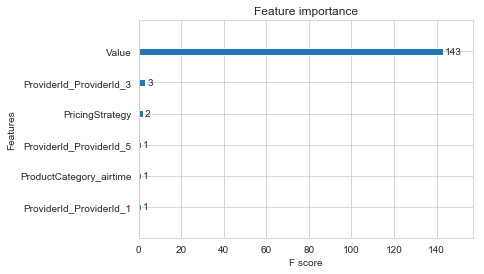

In [149]:
plot_importance(xg_cl)
plt.show()

In [150]:
preds = xg_cl.predict(X_test)

In [151]:
accuracy = accuracy_score(y_test,preds)
accuracy

0.9995400568656966

<Figure size 432x288 with 0 Axes>

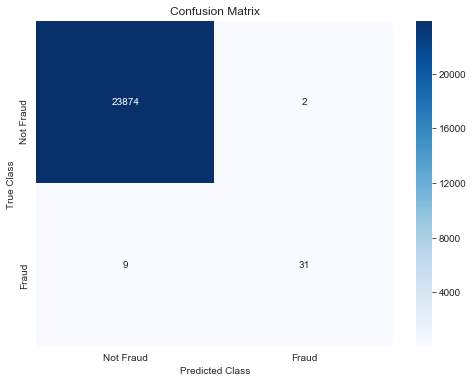

In [152]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, preds)
labels = ['Not Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [153]:
prediction = xg_cl.predict(test)

In [154]:
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submission.csv', index=False)